# genomics algorithms : k-mer based and finding Origin of replication


 At what position would we stop sliding a 10-nucleotide k-mer window along a string of length 1000?
 ans : 1000-10 = 990.

In [20]:
#1.counting the pattern in given genome:
def PatternCount(Text, Pattern):
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 

# Now, set Text equal to the ori of Vibrio cholerae and Pattern equal to "TGATCA"
Text="ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC"
Pattern="TGATCA"
# Finally, print the result of calling PatternCount on Text and Pattern.
# Don't forget to use the notation print() with parentheses included!
print(PatternCount(Text,Pattern))

8


In [21]:
"""Frequent Words Problem:  Find the most frequent k-mers in a string.
     Input: A string Text and an integer k.
     Output: All most frequent k-mers in Text."""
def FrequentWords(Text, k):
    words = []
    freq = FrequencyMap(Text, k)
    m = max(freq.values())
    for key in freq:
        if freq[key] == m:
            pattern = key
            words.append(pattern)
    return words

def FrequencyMap(Text, k):
    freq = {}
    n = len(Text)
    for i in range(n-k+1):
        Pattern = Text[i:i+k]
        freq[Pattern] = 0
        for j in range(n-k+1):
            if Pattern == Text[j:j+k]:
                freq[Pattern] += 1
    return freq
 
     
        

# Now set Text equal to the Vibrio cholerae oriC and k equal to 10
Text="ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC"
k=10


# Finally, print the result of calling FrequentWords on Text and k.
print(FrequentWords(Text,k))
# "CGGAGGACTCTAGGTAACGCTTATCAGGTCCATAGGACATTCA" 
print(FrequencyMap("CGGAGGACTCTAGGTAACGCTTATCAGGTCCATAGGACATTCA" ,3))

['CTCTTGATCA', 'TCTTGATCAT']
{'CGG': 1, 'GGA': 3, 'GAG': 1, 'AGG': 4, 'GAC': 2, 'ACT': 1, 'CTC': 1, 'TCT': 1, 'CTA': 1, 'TAG': 2, 'GGT': 2, 'GTA': 1, 'TAA': 1, 'AAC': 1, 'ACG': 1, 'CGC': 1, 'GCT': 1, 'CTT': 1, 'TTA': 1, 'TAT': 1, 'ATC': 1, 'TCA': 2, 'CAG': 1, 'GTC': 1, 'TCC': 1, 'CCA': 1, 'CAT': 2, 'ATA': 1, 'ACA': 1, 'ATT': 1, 'TTC': 1}


In [4]:
"""Reverse Complement Problem:  Find the reverse complement of a DNA string.
     Input: A DNA string Pattern.
     Output: The reverse complement of Pattern."""

# Input:  A DNA string Pattern
# Output: The reverse complement of Pattern
def ReverseComplement(Pattern):   
   
    return Complement(Reverse(Pattern))

# Copy your Reverse() function here.
def Reverse(Pattern):
 
    rev=""
    for i in Pattern:
        rev=i+rev
    return rev
    


def Complement(Pattern):
    # your code here
    dict={'A':'T','T':'A','G':'C','C':'G'}
    return "".join(dict[i] for i in Pattern)

print(ReverseComplement("ATCAATGATCAACGTAAGCTT"))

AAGCTTACGTTGATCATTGAT


In [9]:
"""Pattern Matching Problem:  Find all occurrences of a pattern in a string.
     Input: Strings Pattern and Genome.
     Output: All starting positions in Genome where Pattern appears as a substring."""
#import sys                              # needed to read the genome
#input = sys.stdin.read().splitlines()   #
v_cholerae = "ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGTGGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTATTTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGGGTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCGTTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTTATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCATGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTCGGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATGTTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTTGGCTAGTCATGCGCGATACTCCTCAATCTTGTGGTTTACCACCGATTGAAGAGTACAAAAACGACTATCCCGATGATTACGATAAGTCGCATGAAAATGAGATGACTGCGAAAGAGATCTTCTTTAAGTATGTCTTCAACAACAAACTGCTTTGGTCGATTGCGATTGCTAACGCCTTCGTTTACCTGATCCGCTACGGTGTACTTGACTGGGCTCCGGTTTACCTCAAAGAAGCCAAACACTTCACGGTTGATAAATCTTCTTGGGCTTACTTCCTGTACGAGTGGGCGGGCATTCCGGGTACTTTGTTGTGTGGTTGGATTTCCGACAAAGTGTTTAAAGGCCGCCGCGCTCCAGCAGGCATCCTGTTCATGGTTTTAGTAACTCTGGCAGTTCTGGTTTACTGGTTCAACCCAGCTGGTAACCCAGCGGTAGATATGGCTGCTCTGGTCGCGATCGGCTTTTTGATCTACGGCCCTGTGATGCTGATTGGCCTTTACGCTCTGGAACTGGCTCCGAAGAAAGCCGCCGGTACCGCAGCAGGTCTGACTGGTCTCTTTGGCTACTTAGGTGGTGCTGTGGCAGCTAACGCGATATTGGGCTATACCGTTGACCACTTCGGTTGGGATGGCGGCTTCATGGTCTTGGTTGCCTCTTGTGTACTCTCAGTGCTCTGCTTGATTTACGCTTTCGTTGGCGAACGCGCTCACCATAACGATAAGCTTAAACAAGCGACCATTTAAGAGCGTGTGTCATCAAGCAATAACATCGTCAGTATAGCTTGTCCCCCTCGCCGCGCTCTTACCTGATTAGGAGCGCGGCAACTCTCTCTCCCACCCTAACGTCACGCGCCATTTGACGCCTTAGGGCCGGGAAGAACAAAAAAGGAATTCATGATGCTAAAACCATTCTCGCTTTCTCTGCTGGCTCTGGCCTGCTCAACGTCTTTATTTTCAAGCATTGTTTCTGCAGAACCAATAGTGATTGCTCACCGTGGAGCCTCTGGCTACTTGCCAGAACATACATTAGAAGCCAAAACACTGGCTTATGCGATGAAACCGGATTACATCGAGCAAGATGTGGTGATGACCAAAGACGATCAATTGGTGGTATTACATGATCACTATTTGGATCGCGTCACCGATGTTGCGGAGCGTTTCCCTAACCGCGCACGAGCCGATGGCCGTTATTACGCGATTGACTTTACCTTAGCCGAAATCAAAACCCTGCGTGTCACGGAAGGGTTTGATATTGATGCGCAAGGCAATAAAGTCGCCGGTTTTCCTGATCGTTTCCCTCTTTGGAAAGGGGATTTCACTGTCCCGACTCTCGCAGAAGAAATTGAGCTGATTCAAGGGCTCAATAAAACGCTCGGTTACAACATTGGTATCTACCCTGAAATCAAAGCACCTTGGTTTCACCGCCACGAAGGCAAAGATATTTCTCAAGCCGTCCTCAAAGTGCTAAAGCAGTATGGTTACGACAGCAAAGACGACAAAATCTATCTGCAATGTTTTGACCCTATCGAGCTAAAACGCATTAATGATGAGCTGCTTCCTGCAATGAAGATGGATCTCAATCTAGTTCAGCTGCTGGCGTACACCGACTGGAACGAAACCATGGTTTATCAAGCAGACCAAGCCACACCTTATGACTATGACTGGATGTTTGCCGAAGGCGGCATGGCCAAAGTCGCGCAATACGCCGATGGCATCGGCCCTTGGAAACCTATGTTGGTTGATGATGCTTCCACCAAAGACAACATCATGATTAAGCCGTTGATGAAGCAAGCAAAAGAGGCTGGCCTCGTGGTGCATCCTTACACTTTCCGAGCCGATAAAGGGCGCATTGCACCTTGGGCAGACAACTTCGAAGGGATGTTGGATGTGTTCTACAACCAAGTGAAAGTCGATGGTCTGTTCACTGACTTCCCCGATAAAGCGGTGGCTTTCTTAAATCAATAATGCTTTAAATTGACATTATCGCCAGTCAGCGAATAAGCGAGGGACACCTCGCTTATTCAAAGCTGGCCACAAAAGCACGCAGAGCTTCAAGATCTTTGATGATAAGTCCACGCTCACCTTTTTCAACCAATCCCCTATCCACCAACTCTTTCACCGCTCGGCGATACACTCGGCTCGATGTACCAAAGCGTTCCGCTTCTGGCTCCATCCGTTCAAAGCCACCCAAATTGACCCGAGTTTCATGCTGGAGCAGCAGATCATACGCAATGTTAAAGCTGATTGAATGCATCAAACGCTGCGTGTAAATGTCCAGCGACTCTTGGTAATCCTGCGCTAAAGCAGAAGCAAAAAACAGGCTAAACACAGGTTGCTGTTCAAGGCACTCTTGCAGCTTCTGAGCACAAATGACCATCGCTTGAATCGGTTCTTCAGCCACCACATTCCACTGACAAGGCATAGCGGTAAAAAACTCCATCTCGCCAAACAGGTGATCGTCACACTGCACTTCACCGAGTTGAAAACGGCGTCCATTAGCCGCCAGAATATGCATCGAAACTCGACCACAAGACACCACATACAGTGACTCAACAGGTTGGCCTTGCTGCAACAGCGCCTCACCCGCATCAAACCTTTTTGTCGCGGTTTGACATTGAGCCAACGCCAGACGAAACGCAGGCAGTTGCGCATTCAAATAGCCTGAGAAACGGCCGGTAGTATTCGCGGTAAGTTGCATAGCGTTTTGAAATTCGATTCACATGAGCATAGGCTACCTGTTTTTTGCTATTAGGCGAAGCTCTACCTAGATTCCTCACTCAACTAAGCAATACCGCTCATTGAGTGAGGCCATGTAATGGGTCGTGAATAGGTTGGGACTAATCGAATTTAAGCGCGTTTAATGCATGCAAAGCAGCACGTGCAGCCAGCGTTTCACCCTGCATCATTCTTTGATCAGCATTGACGTATTGATTCACGCCCTCTTGCACATCTTGCTCATACAACACCACATTATTGAGAACGGAAGCGACCTGTAACCCGCGTAAACGGCCAACCGTGAGTAGCGCAGAGGTTTCCATATCCGCCGCAAGAATCCCTTTGCGATGCCAATAACGGCACAGTTCTGCTTCTTCATCGGTATAAAAGCTGTCATGCGAGCGAACAATACCTCGGTGAATGGGTACTGACTGCTCAGCTAAAAAGCGTTGCATCTCCAGCACCAATTCAAAGCTTGAGTAAGCCGGATAAGCGGCGCCAATATATGCCTTTGAACCGCCCTCATCACGCACTGCGCCTTCCACCAAAATCAGTTCACCTAATCCGATTTCTGACTGCATTGCGCCTGCAGAACCTACTCGCACAATGGCTTTTGCACCACTTCGCGCTAACTCTTCCACCGCGATGATTATGGATGGCGCACCAATCCCTGTGCTGCATACGGTCATCGGCTGCCCTTCGAACTCACCACTGAATAAGCGGTATTCGCGGTTTTCCGCCACAAGCTTAGCGTTATTCAACAAGCTGGCAATGCGGTTCGCACGATTCGGTTCACCGCAGACCACAACACGTGGCGCCACTTGAGCAACATGAATGTGAGGTTGAATGCTCATGCAGTTGCCTCAATGGTCAGGTTTTTTTCTGCATTATGGCGAGCGGTTTGCATCCAAGCTCGAGTGCCATTGGCAGCGATGAACAGCAAAATCGCGTATTCGATAGAGAGGGCATACACACCTTGCGCCGCATAAATTCCGACACTGATGATGTTGATCACCACCCACAGAATCCAGTTTTCCACGTATTTACGCGTCATCAAAATCTGCGCCACCACAGAAAGTACTGTCATCGTCGCATCCCAGAATGGGAAAGCATCCGGAGATAACACTGGGCGATCCAACTGTGCGCCGAACAGATTCAATACATCAACGGTAATATTGGCTAAAGAAAAGAATACCGGATCGATATAAATGGTCATCAAGATAATGCTGATCACGCTAATGCATGCCGTGAGCAGCAATTTTTGGCTGCTCATCCAACGCACGACGAGCGTATCCCCTTGGGCATTGGGACGAGTCCACGCATACCAGCCATAAATGTTGGCGCAGAAGAAAAACAGCTGGAGCAACAAGATGCCATACAGTTGGATCTGATAGAAAATCACCGCAAACAGCGTGACATTAATCAAGCCAAACAAATAGTTAATGGTTTTTTCTTGGCTCGCAAACCAGATACACAGCAAACCAAACAGCGTTCCTACCGCTTCAATCCACGACATGGCATATCCGCCACCGATCGGAATATTGACTAGGGTGTGGTTAATATCAAAAAAAGTCATCAGATCCATTTGTTCTATCTCTCATTGTTATGACTTGCCACACTATAAGGAACAATATGAGGAAAGCGAGAGGACATTTGTCCTCTTCGATTGGTTTGGATCATAAATTAGAACAATGGGACGAGCGGAGAGCGCTAGCCGAGTTTTCGTACACTATTACGCACCACTAAAGTCGGCTCTAACTGTACCACTTGCGCAGTGGTGTCTGGATTTTCCAACCGATAAAGCAGGGTATCCACAGCGGCTTTGCCGAGGCGGTATTTGGGTTGATGGATGGTGGTTAACGCCGGGGTCATAAACTTAGCGATATGCACATCATCGTAGCCAATCAAGGAAAGATCGTCCGGCACTCGCAAACCTCGTTGGCTAGCGGCTTGAATCACGCCCATCGCCATCATGTCATTGGAAACAAACAAAGCACTGGGCAATTTGCCACGCTGATAGAGTTTTTCAAAGGCTTGGTAACCACCTTCACACTCGAAGTCAGATTCCACAATCCAATCTGGATTAATGGCAATTCCCGCTTCCGCGAGCGCACGTTTGTAACCTTCATAACGCATCTGTGCTTGGTGGCGAATCAGCGGACCTGTGATACAACCAATCTCTTTATGCCCACACTCAATCAGATGCTTGGCCGCCATGTAGCCACCTTGCAGTGAGTTGTCTTGAATTTTGTCACTCGCAAAAAGGATCGGGCCCCAGTCCATGACCACAATAGGAATGTCGGGATAGCGGTCAAACACATCCAACCTTTCACCCTCAAGGGTTGAGCACATCAGCAGCAAACCATCGACACGCTTTTGCAGCAAGGTGTTGATGCTGGCTTTCATGCGTTGGTTATCCCCTTCGGTATTGCACAAGATTAGGTTGTAGCCTTGGTGATAACAGCTTCGCTCTACGCCTTTTACCACTTCACCAAAAAATGGGTTGGTCGAGGTGGTCACTAACATGCCAATGGTTTTGGTGCGGTTCATTTTGAGGCTACGCGCGAGAGCGGAGGGGGCGTAATTGAGTTGCTGAGCGGCGTTATTCACCCGCTCAGCAATTTCATCACTCACAAAACGACTCTTATTGATCACATGGCTTACGGTTGAAGTGGAGACGCCAGCAAGTCGAGCGATATCCTTCATGGTGGCCATGTGTTTTCTCCTATGAGTGTTCTGCTAAAAAGGCCTCAACTTCCGCACGAGTGGGAATCGAGGTTTGTGCACCAAAGCGTGTTACCGAAATTGCGGCAGCGGCATGGGCAAACTTAATGGCTGATTCTAGAGGCATTTCTTGCAACAAGCCAGTCACCAATGCACCGTTAAAGGTATCACCTGCGGCGGTGGTGTCCGTGGCTTTCACCACAAAACCGGGAATTCGTTGCCCGCGACCATTTTGGCTCAGCCACACACCCTTTGAACCAAGGGTAATAATCACAATCTCGATGCCTTTACAGTGTAAAGCGTCCGCCGCTTGCTGCGCGCTAGAATCATCATAAACCGTAATTCCGGTGAGCACTTCCGCTTCGGTTTCGTTCGGCGTAATCAGATCTACACACTTCAGCAACTCATCAGGCAGTTCACGGGCTGGTGCAGGGTTAAGAATCACATTGGTTTTGGCCGTTTTGGCTTCTTGCGCTGCTTTTAAAATGCCATCAAGCGGTGTTTCCAGTTGCATCAGCAAATAACGTGCATCCCGAATCGCCGCAAGATCGGGCTCAATCGCAGCGGCCGTCAGCTTGGCATTGGCTTCTGCAGAAATACAGATACTGTTCTCACCACTGTCTGAAACTTGAATCATCGCAATACCAGTTGGACAATTCGGTTGCAGCTTCACGCCCGCCGTATTAATGCCATCTAGCTTAAAACTTTCACGAATATTAATGCCAAACGAATCATCGCCAACACAGGCAATGAAACCTACATCCGCTTGCATACGCGCGGCGGCAACCGCTTGGTTTGCCCCTTTTCCGCCCGGAATGACTTGATAATTGCGCCCGTGTAGGGTTTCTCCGGGGCGAGGAAATGAAGGCACTTGCAGCACATGGTCTGCATTGACGCTACCCAGAACCACCAACTTATTCATACGGTTATCCTTTGTATTGATGAGGAAAAACAGAGTGGTTTAATGGCTGATACCCTCTTTATTCGTTGGGTAAACGAGGAAAATAAAACCAGTAAACCGCTCGGTTTTCCCTCCTCATGTGAGGAGGGAAAGAGGAGATTATTTTGCAATCACTTTCAGAGCGACTGGGATGTAAGCTTCCACTTTTTCACCCTTGAGCATTTTGTCGGCAGTTTCAATACCAATCGCGCCAATCATGTCTGGCTGCTGTGCGACAGTGGCGGCTAATTGACCGCGCTCTACCGCTGCGATGCCATCATCGGTGCCATCAAAGCCAACAATCATCACCGACTTGCCTGACGCTTGAATTGCACGCAGTGCACCCAATGCCATTTCATCGTTTTGCGCGAAAACCGCTTGAACATCAGGGTTCGCTGCCAGTAGGTTTTCCATTACGTTCAAACCTTTAGTGCGGTCGAAATCCGCAGGTTGGCTAGCCAGCAGTTGCATCTTGCTGCCTTTCACTGCATTCATGAAACCTTCACCACGCTCACGCGCCGCTGAAGTTCCGGCGATGCCTTCCAGTTGGATCACTTTGGCATCGCTACCAATTTTCGCTTCAATAAAATGGCCTGCCATTTCGCCGCCGACTACGTTATCGGACGCAATGTGGCTCACTACCTCACCACGGCTCGCGCCACGGTCAAGCGTCAGCACTGGGATCTTGGAGCGGTTCGCGATACGAATCGCGTTAGAAACCGCATCCGAATCAGTCGGGTTGATCAGAATCGCTTTCACGCCGCGCACAGTAAGGTCTTCCACGTTCGAAAGCTCTTTGCTTGGGTCATTTTGCGAGTCCAGCACAATCAGGTTGTAGCCAAGTTCTTTGGCTTTCGCTTCGGCTCCATCCTTCATGGTCACGAAAAACGGGTTGTTCAGCGTTGAAAGAACAATCGCCACGGTATCTTGCGCTTGCGCAACAAAAGAAACCGAAGTGGAAAGTAGAGCAGCAGAGATAAGAGTGGTCAGTTTTTTCATTCTCATAGTCCTTTTTGGTTGCGCCTCGCAGCTCTTGCCCTGCTGAGGCGGATTCACGTTTTATTTATTTTTGTTGTCTACCAAGACCGCCAGCAAAATAACCACAGCTTTCGCAATCATTTGGTAGTAGGAGGAAACATCGAGCAAGTTCAATGCGTTGTTTAAAAATCCGATGATGAGAGCGCCGATCAGCGTGCCCATGATGCGACCTTTACCGCCCATCAAACTGGTGCCCCCTAGCACCACAGCCGCAATCGCATCCAACTCATAGCCCATACCCGCAGTAGGTTGCGCAGAAGAAAGGCGAGATGTGACGATGATGCCTGCTAGCGCAGCCAGTAAACCACAGATGGCATACACGCCGATTTTGACGCGATCTACGTTGATACCTGAAAGGCGAGTTGCTGATTCGTTGCCGCCCACTGCATACACATAGCGGCCAAAGCGAGTGTGATTGAGCAAGTACCAAGCGCCGGCAAATACCACGACCATCAGCCATACCGGAACCGGAATGCCCAATGTGTAGCCTGTACCAAACCATGCAAAGGTGTCCGCCGTATCAGTGAATCCGGTCGAAATCGGACGCCCATCGGTGTACACCATAGTGACACCGCGCAGCAGAGTCATCGTCACTAACGTCGCGATAAAGGCCTGCACTTTGCCTTTGGCAATGATGATGCCGCTGATTGCGCCAAGCGCAGCACCAGCCAGCAAAGCCGTAGGCACAGCTACCAGAACAGGAACTTCCATCGCCACTAAGGTGGCCGCAAAAGCGCCACACAGTGCTAATACTGAGCCAACGCTCAAATCAATCCCTGCGGTTAAGATGACCAAGGTCATACCCACCGCGATGATCGCGTTGACCGAAGTTTGGCGCAGAATATTCAGTAAGTTATCAACCGTGAAAAAATTCGGGTTTAAGAAAGAGACGACAACCACTAAAAACAGCAGTGCGATCAGCGATTTTTGTTCAATCAACCACTCTTTGCTGAGCAGTTTTTTACGGTTATCAGATGTCGTATTAGTCATGGTTCGGGTACTCATGCTGTATCCTTGTTTCATGCTGCGTGAGCAGGGTTACGCCCTACCGCACACGCCATTAATTTCTCTTGATCGGCTTCGCTCGCCATAAACTCGCCGCTAATCCGCCCTTCATGCATCACCAGAATGCGGTCACTCATGCCCAGCACTTCGGGCATTTCTGAGGAGACTAAAATGATGCTCATGCCTTCAGCTTTGAATTGGTTGATCAGTTGGTAAATCTCTTTTTTGGCGCCAACGTCAACACCGCGAGTCGGTTCGTCCAAAATCAGTACTTTGGGTTTGGTCATCAGTCCTTTAGCGATCGCCACTTTCTGCTGATTGCCCCCAGAAAGGTTGCCAATGATTTGCTCACGACTTGGGGTTTTGATGTTGAACAGACGAATAAAGTCATCCACAGCAATCACTTCATCGGCATGACGAATTTGCACACCTTTGCTCAGTTGATCGAGCGCGCAAAGTGACATGTTCTCTTTCACCGAAAGACCGAGTACCAAGCCATCGCCTTTACGATCTTCAGAAATATAGGCGATGCCATTGGCCAAACCATCTTGCGGACTGACAGGGTTAACCGTGCGCCCGTTGAGGTTAATCACGCCACGCTCCGAAGGGAGCGCGCCATAAATCACCTTCATCAGTTCAGTGCGCCCAGCCCCCATCAGGCCAGAGACACCAAGAATCTCGCCTTTTTTAAGCGTAAAGCTGACATCGTGCACACCCGAGCCAGTTAGGCCAATCACCTCAAGGCTGATGTCACCCTGCTGCGCGGCAATACGTGGGTACTGCTCTTCCAGTTTACGGCCAACCATCATCTCAATCAGGCCATCTTCATTGGTATCGCACACGCGGCACTCGCCAATAAATTTGCCGTCACGCAGCACTGTGATGTCGTCACAAATCTCAAAAATTTCTTTCAAACGGTGTGAGATATACACAATGCCGCAGCCTTGTTCGCGCAGTTCATTAATGACATTAAACAGAGATTCGGTTTCGGTATCGGTCAGCGCATCGGTCGGTTCATCCATGATGATAACTTTCGATTCAAACGACAGCGCTTTGGCAATTTCCACCATCTGCTGCTCACCCAAGCTCAGCTCTCCGAGCAAGGTTTTAGCACTGTGTTTCACATTCAAACGTGCGAGCAGTTGATCCGCTTTACGATGCATTTCATCCCACAGAATGCGTCCGAATGGCGAAGTCATCTCACGGCCAAGGAAAATATTTTCCGCAATCGTCAGCTGCGGGATCAGGTTGAGCTCTTGGTGAATAATGCTGATGCCCGCCAGCTGCGAATCTCGTGGGCCTTTAAAACTGACAGGTTGGCCTTGATACTCAATGCTGCCCGCATCTTTGCTATAAATGCCGGTCAGAACTTTCATCAAGGTTGATTTGCCAGCACCGTTTTCACCCATTAACGCCATTACCCGCCCCGGATAGACATTCAGGCTCGCTTTGTCCAAGGCTTTCACGCCAGGGAACGCTTTTTCAATTTGGCTCAGGGCTAAAATTGCTTGAGTCATAGTGGCTCCTCCATGGTTGGGCGTGGTTAAAACACGACACCCGCTTGGAAAATCACATTGGCGTAAGGTGTACATTCACCGGTGCGCACTACCGCGCGGCTTTGCAGCGTGCGTTGTTTAAACGCTTCATGGCTGATGTATTGGATGGCAATTGGCTTACCGCACAACTGTTCTTCTGCTTTCAGCTCGCGATATAAGGCTTCATGCAACACCGGGCTTACTTGAGCAAACTCCTGTGCCACGATGACACTTTCAATCTGCGATTCAGACAAAATCACCCGTACTGTTTCCAAAAAAGAAGGCACCCCGTGAGTCAGCGCGAGATCAATACGCGTCACTTCATCAGGGATTGGCAGCCCAGCATCACAGATCGTGATTTCATCGGTATGGCCGAGTGTTGCCACCAAGTAAGAGAGTTCAGAGTTTAGTAGGGTACTTTTTTTCATGGTGATACCTTTTATTGATTCACGTTTGAATAACGACAGCATCACTTTCAATTGGCGAAAAAATGCACATCGAAACGTTTCGATGACATAATAGTTTACTCAATTAAGTTTGCACGCGACAAATCCACAGAGTGTGAAAACGATCAGCAAAATGATGTACTGAATACTCACTTTGATGAATAGTGATAGGGTCGAACCGTGATCATTTCGCGCCGATTTAACACAGCGGCATCTCAGTTCGGTATAGTGGCAGCAAGTAATGAAGATTTGATGAGGATAATTGATGAAAAACACTCTGCTGATGATCATGAGTACGCTTACGCTTTCGGCCTGTAGCGAAGTGGGCAGCAAAGCTTGGTGTGAAGATATGCGCGAAAAACCAAAAAGCGAGTGGAATACTCAAGACACGCTCGACTTCGCCAAACACTGCATTTTCAACAATGAAGTCGGTAGCAAATCTTGGTGCGAAGATATGGATGAGAAATCCAAAGGTGACTGGACAGCCAAAGAAGCAGGTTCGTACGCTAAATATTGTGTGCTGTGAGAAGGAAAACCCCCAGTATTTAATTGCTCTGGGGGTTAAACAACGACTCAATTTAATCGATGTATTTTTAATATCATTGATATTTAATTAAAAATCCGTAGTAAACCCAAAGCATTCATTATCACAAACTTATTTGTGATGCTAATCCTAACTATTATCAACATCCTCTATATACTGTTGAATGTAAATATCAAGGCCTTGTAGCATCGAAAGTTCACATTGGTTCATTAGCAATTCACCACGTTGGCCACCGACATTTATATAAAGCATACACTTTTCATGAATAGCTAATCTTTGCTTGCTGTAGAAATCATCAGGAAAGCCATAATCTATAGACTTAGAAGAAATATTATTTCTAATCTGAGTCTCTGACTTAGCTATCTCATTTTGGATACACACTAGAATTTTTTGATGCACTCCAGATGTATCATTGCAGTTTTCACTAGCAATAGCGCCACCACTAATACTTAATAATATCAACAGCATAGTTACATACGCAGAAAGCAAGTTATTCATTTTATATCAACCTCCAAACCGTCAATTTCTAGTTCAAGTAAAGCTTTTTTCTCTGATACCGCACGTTTTTTTAAATCACTCCACCATGATGGCGAAGACTTAAAAAGCCTTTCTGTATTAACAAGCTTGTAATCTTGTACCAGAATAATGATGTCCTTATCAGTCATACTTTCCATATTTTGTCCATTCAATGCATTGAAAATCAAATTAGTTCTCCCACCAAACTGTACTGAAGTAGACCAGATCAAATCATGTACAGCAGCTCGATTATGTTCAAACAAAAGTCCTTTCCCTCTAAGATGTCCTATTTGTATATCATAATGAATTCTCTTAATAAATTGGTGTTGTTCTTCTCTGAATTCCTGAGGATATCTTGAAGCTATATCCTGCCAAACAACATTAAACTCTTTCGTAGCGGGATTTAATCCACTAAAGAATTCTTTGAATTTTGATGACTGAATATATTTTTGTACCACACCAAGATTTGATGACATTTGATAGCAACCATATGAAGCCCCACCATAATCTCCATTTCCTGTTGATATAACCCCTGGGCCTCTTCCTGCCGACTCATATTTCTCTGACGTTTTACCTAGAGGCCATATTTGATAAATATTATTCTCATACACCCACCCATCCATCAAGGCTTCGTCTAGTGCCAGTAGTGTACCTTTGCCGACAATACCGTCAACAGCGCCAATGCTGTAAGACGGGTGGGTTTGGTGGCTTGGTTGATAGCTTTTCTGGAACTGCTCAATCGCGGTTTTAGTTTTGCTCCCAAAGTCACCATCAGCTCCTGCTTTCCCGAGATCAAACCCCAATTTTATGAGCGCTTCTTGTAGTAACTTAACCTCATCGCTGTGATTACCTTGACGATAAGCACTCGCTTGTCGCTTGGCGAGTTTCTCTAACTCATCGGATGGTTTGAGGAGATCGGATTTTAAAATTCGCTCCGGTGTTTTCTCTTCGGCCACAGGCTCATCATTTGCCGTGTTATTGGCTGAACTCGGCATCATTGTGGGGAGTGATGCCACATCAATAACACGCGCCGCGCCTGATTGCATTGAGGCCGCAATATCCGGCTGAACCAATTCTGCTACTGGTTTAGCTTGCGCTAACATTCTCGGTGCTGCCGCTAATTGCCCGCCATAAGCGCTACCGCTGCCTGCACTGCCGCCCGCGTTTAGGTTAATGGCAGGACCGACTAAGTGCACGCCACCAGCATCGACTTTTACAAAACTGCCCCCAGCTTTTAGGGTTAACTCCGCTCCGGCTTCAACCACGATTTTTGCGCCGCTTTTGAGTGAAATCTCTTTACCCGCCTCGACAGCAATGCGCTGCCCGACTTTGTGTTGTAGTGACGCGCCGACTTCATGGCTGCTATCGAGTGCGATTTTGCTACGGACTTCACCTTCAACCGTTAAATGTTGGTTGCGCTGAATGCGGGTAAAGCGATCATTGTCCACAGTGAGATGTTGATCGTGGCGAATCACTTCGGTGTGATCATGCTCAATCAACGCATCCCAATCTTTTTGTGCATGCAGCAAAATCTGTTCGCTGCCCGCTTGATCCTCAAAACTCAGTTCGTTGTAGCCTTGCCCTTGGTGAGTCTCAGTGCGCAGCACGGTTTTGGTTTTGTGGTCAGGCAAGGCGTAAGGCGCGGTATTGGTCGCATGATACGTACGACCTGTGATGATGGGTTGATCCGGATCGCCATTCAGGAACGAAACAATCACTTCATGGCCAACTCGCGGAATCGCCATACTACCGTATTGGCTACCAGCCCATTCTTGTGCCACTCGCACCCAGCAAGAGCTTTTTTCGTTGCTACTTGAGTAGCGATCCCACGGGAAATGCACTTTCACGCGACCAAAGTTATCGCAATAAATCTCTTCACCTTGTGGCCCAACCACGGTGGCGATCATGGGACCATCCACTTGCGGCTTAGCACAAGGCCTTGCTCGCCAAGTGATGTGAGCGGGAATAAGTTTTAGCTGATTGCTGTAAGTGGTAGCGCCTGAACCACCCTCTTCTTGTAACGCTTGTGGCTGCGTCCCTTGGTGATTGGCTTGTACCACGAGCCAATCTCGATTCATTGCGTGATCAAGGTGATCTTGCAAGTCAAAACGCACTCCCGCCAACAGCAAAGGTTCGTCACTCTTCGCATCAGCAAGCAAAGCATCGCGACGTAAATACTCTAAGCGAATTTGGCTAAAGGCCTTGCCATTTGCATCGTCTTTGTAGCGTCCCGGAGCATCAAAATGCTCATAATTTGGCTGCTGATAAGCGATATCTTTACCCTGCGTGCGCTGAGTAAATCCGTAAGCTGGCTTTTTAAAGCTGTAATCCTTTAGCTCGGTATGGCTGACTTGTGCGGTGGTCTTGAATTGCAGATCGACCACATAAGGGAGATTGATCTCGCCACCCGCCAGCGCATTATAAGGTACTGGCTTGGCTAACTTCGGTTGGCTGTCCGAGCTATCGGTAAACAGTAGCGTGTGTTTCTGCGCTTCATGTAGGTGACTGTATACCAAGCCTTCTTCGGCGGCGATACGGTGTAAAAACTGCAAATCCGTTTCACGGTACTGCACACAAAACTCACGCTGGGCACACTCACGCTTAAGGGCAAAGGCGTAATCTTCAATCCCCATCTCTTGCAGTAAAATAGAGATAATTTCCGGCACGCTTTGCTGCTGGAAAATACGGCTATTACTGCGTAAAGAAAGCCGCTCCAGCGCAGGTACTAACGTAAGAGAATAAAACGTGTGCCGATGCCCAGTATCGCCTTTACTCAATTGGCGTACGATACCGTTAATTTGCTGCACCACTTGCCCGTCACGCAGAATGGTTAAATGCGCGGTTTGGTCGACAAATTGCTCAGCAGTAAGGTTGCTTAGCGCACTGGCTAAATCAACCTGATAGCGAAAACCATAGCAGGGTTCACAGCGCCATACAGAATCAGACAAGGACTCTTGCCCTTCAAATCCGCGTACGACGAGGGATTCATCCTCAAGGCCATCCACCTTTAATTGAAACTGTAACCTTGCCATGCTGTTTTCCTTGTTCTTTTTTTCGACGATAGCACTCGATATGTGGCCATCTTAAGTTCGATGAAAATGGTTCGTTGAAAATGGTGCGTTGAAAATATTGTGTGGCAGTCAATGGCAAACTCAATGCCAGCTTTTTGTCTACTTTTCCCTGTTTCGCACCAGGGTTAACTCTTATCACTGAGCAATCCCTTGCCCCAATCAAGCAAAAAACTGCCTATAAGCGAGTTTTTGCCCCACCTCTTCCTTCAGCCATCACTGCAACAAAGCCGCATCGCCGATACGCTGCTCAAGCTCGGCAATTTTCCAACTTAGGCTATCTAGCCTTTGTTTGAGGATCGCAAACTCTTTCTGGGCATTTGTGACATCGCCCTGTTCAAGGAGGCCTTGCACATAGTCAACTCGACCATAAATCGGTGATAGGCTGACCGCGAACTCTTCTAATGATTTGGTCTGCTTTTCTAACTCAGCCCATTTCCCTCGCTTAGCCAATAACGAGATATTGGCCATTTTGGTGCGAATTTCGCTGAACTTAGCCACGAACAGCGCGGTTTGCTCCAACGCTTGTTGCTGCTGAAGGGCAAACTCTTGACTCAGTGCATTCACTTGCTCGTTTTCAGGATAAAGAGTGCGCAATAGATTCAGCTGAGTGATGGCATGTCGCTTAGGTTCACTAAACGAGATGGTTAAATTCTGCTGCAAAGTATCGCGATACAGCGGGATCAGATCATGTTGCCAACGCGCACGCTCACTTGTGGAAGAGTCGTTGAGCAGTGCTTGAGTTTGAGAGGCCTCATTCAACGTAGTGATGCGCTGTGGCGCGGCATAAGGCGTGGTATAAAACCAAGGCCACCCCCAGTAGCCCCCCACCATTCCCAGTGCAACCCCGAGTACACCTAGAGTGAACAACGCGTAACCGCGCTGCCAAAACTTAAGCTTAGGTGGCTGAGCCTTCTCCTGCTTTTTCAATAAGCTGTGGTATTGGGTTTCAATTCTGTCTATGTGTTCAAACAGAGCAAACCCGACCCCTTCAAAGTCTACTTTGTATTCGGTTTGTTGCTGTTCAAACAGCTGATGTAACCGCTCGCAATGGCGCTCAGCCCGATACAGATCTCGCAGCGACTCATAAGTTGGCTTAAGTGCTTTCAGTTCCTGCACCACACGTGCATTGACCCAATCAAGGATCTCTTTGCGCACTTTGGCGCTTTTCACATCACACTCACCTTGGTTGGCAAGGCTTGCACTCATCAGCTCCATACCGGTGGCATACCCCGCTAACCCCTGAGTTTTCAGGCAGGCTACCGCATAGTAACCGCAGATCAGAAAATCCATTCCTTGGTTACAGGCCAGTTGTTCACAGTACTCTTTTACCACTGCCCAATCCGTGCCCCCAGCAATCGGATTGAAGCGGCGGTTTATCTCCTCACGAACCTTCGCATAGGGCTCTAATCCGCGAATCTCCTCAGAATCATTGGTTAATCGGTAGCAAACGTTATCAATAAAAATCACATTGGACATCACAACTTCGTCCTAAAAAGCCAGAGCGAAAAACTCGCTCTGGCAACCTATTAATAGAGTGTTTTAGACAGTTTGAACGACTTGAACAGGCGTTCGGTAAATGGGTTGGCATCGGCCTCTGCGTTAATACGGTAGATCATCTCACCGCCATCGACGATAAATTTGAAATCAACCGACGTTTGACTCGCCGAAACCACATCACCTTGATCCAATAAGCGGAAGAATGCCCACGGTCCTTGGATTTGCAAACTGCGCGGTGACATATTGGTTTGGGTTGGAATCAAGGTCACCTTAGACACCGCAGAATCACGCAGCGTGTTAGGCCAAATCAGCTCCACATTTTCACGCGGACCATGGCTGTAAGCTAAGAACTGACCATCCACATTCAGCACACTACGACGCTTGTTGTTACTCAAACTGAGCGGCTCAACCGAGAAGCTGACATCCAAAATCCCTTTACGGTTGAAGAAAGCCTCACGAATTTTCTGCGCTTGCTTGATCTGATCCAGCACTTCTTTACGAATGATCGACTGCGCTGAGTCATCCGACGCGACGCTGATGTTCTCATCAATAAACATCTTCAGTTGCTGATTGTAGAAGTTGTCTAACGTGCCATTCGGCGCAAAGAAGGCTTCAAAATCGGCCAAGGCAACATCTTTATTTGATGCGGGGTTGAATGGATAACGCCCAGCCAGCTTGCTTTGGAAGGTTTTATACACATCCTCCGTCCAGCGAACTTCCAGATGCTTGATCGCTTCTTGCTTGACCACATACCAGCTCTCATCTGCAAGCTTTGCCATCATGCTATCCAGCGGCTTCGGCAGTCCTGACGAGATACGTTTTAAGGTATAGATAGGGTCAGCATTAACCAGTTTGACCCGCGCTTTGGTCGCATCGAGCGCCGCCATACCGACATCGGGAGCATCTTGAATCGATTTCAAGTAGCTTTTCAGCTCATCCACCGAAGCCAAGACTTCCGTCATGTACGCTGGTTTGCTGCCCACCGGTTTGAGCATACCGTTCAGATCAGCAAACGGAGTTTCAATCATCGAAGCCACTTTGTATTTCGGACTTTTCAGCAGCTCTTTTAACGCCGATTCATCTTTAGGTAACGCACTGTACAGTTGGGTGTTGTCATCTAATGTGCGCAGTAGACGCTGCATCGGCTCAAGGTTACTGGTGATATTTTCCAAAACCATGACCGCATCATTGATGTCATTGAAATACTTCACATCAATTTCATTGAGTGCCGCGCGCCATGTGTTGGTGTAATCCGCCACATAAAGATCGCGGATTTTTTCGCGCAGTGCCTGCTTGTCTGCTTCACTAAACTGTGCCGTTTTGCTCTGTCCCAGAACCCAACTGTCAATCAGTGCCAGCTCAGAGACCGATTCAGATTGCGGCATAAAGTAGTCATCAAAACCACGCTTGGTGAGCATTTGAGGAATAAACAGGCTGCTACTGTTAAGAACGCGCTCTTCAAACACCACATCGAACACCGGCCCAATCAAGCTACGCAAGTTAACCGAAGGACCAAGCACCGTTTGTGCGCTCAATTTCAAGTTACGATAGACGCGCTGGTCGTTTGGCATTGAACCCAGTTCAACCTGAGCACGAGCAATCACTTTATCGTAAGGGCGCATCACCTGCTCCGCCCCTTTATCACCATTGAGCCTCTCTGCAGTGAGGTCCGTATGACGCATCGCGTAATCTAAGTGGCCGAGCAGCTCTTCCTGAATTTGACGCTGACCTGAGAAGGATTTTTGCCAATACTTCGCAAAATAATCCATCACATAGTCTTGGTAACGACCACTTTTATCGACCAGCATGCGATACACACGCAGCACCGCTAATTTTTCTTCATCTGTCTCAGCTTGATTGAGCGCAACAATGGTGTCCGCCATCAACAGAGGCAAGAAGCGAGTTTCGAGTAAGTTTAAGTAGGTCTCTTCTACTTTCGGGCCAATGGTGTGCCCTTGGTAGAGACCAAAATCGGAGATGTACTGAGGTTTATCACGGAAGAAACCAAACTCCAGTGTCGCCTCACGGATCTTGTTCAACGGATCCAATACCTCTCTTTGTGAGGCCAATGAACGGCTGGTCGGGAACTGCTCTTTATACTGATTCACTTTGGTTAATACAGTATCGGCGTGTTGCACGTTATTGAGGTAGTTACGATGCCAAGTTCCCGCCAACAGCAAAGTCGCCACTGAGCATGCGACAAAAGAGAGCCCCATCAAACGGCGTTTGTTTTTTGCAACCCGGAAATTATCCGACGCTAAACCCGCTTCAGGATAAATGATGTGGGTAAACAGTTTTTGCGTGAAATAGACCGTGGAGTTTTTCGCGCGCTGCGCCGTATTAATCGCATGAGACAGACCATAACGACGGGAAGCCGCATCATCAAAAGCGTTGGTAGGTACACCTTGTTGGTAAACCGACGTGAAATAGGCACCACGCACCAGCGCTGACGTTGAGAATTGATCGCTCGCCAAAGCCTCTTGGAAAAACTGTTGCAAAATCTCTTTCAAACCTGAGATTTGACGCGTGAAGCTGTAAATCGCGTTACGTTCTTCAAGCGTCATTGGCGCTGCGACCGCATGCGGCAGCATGCCATTAACTCGTGACACAAATTGAGTGTACTCACTGGCAAACTCTTCCAACCATGAATCTAGGTTATCTACCGAATCCATTGAGAAGGTAAAACCCAACACCTCTTCGCGCTGACTTTTGGTGTAGTGCTTAAAGAAAGGCTCAAAACCGTGCAGTAAGTCGAGCTTAGTCAGTGCAATGTACACCGGCAGACGAGTCGATAAGGTTTCCATCAACTCACGCAGACGAGCACGCAGCAAATTGGCATAAGCTTTACGCTCTGAGGCGGTGGCGGTAGCAAGATGCGCCACATCCAACGCCAACACGATGCCGTTTAACGGGCGGCGGCTACGAGTGCGGTCTAGCCAATCGACAAAATGCAACCATAAGCGGCGCTCTAACGCACCATCATTTTCTTCACTACGATTGCCTTGCGTTAACAGCTCACCATCAGGATCAATCAGGACAGATTCATCACCAATCAAACGAGTATGGGTTTTCGCTTTTTTGTCCCGAAGCTCGCATGACCGAAGAGAAGACAAAGTTCTGACCAGAACGGTTGATCAGGCTGGTTTTACCCGCATTTTCTAAACCTAGAACCAAATACCAAGGTAGTGCATACAAGTAGTTGTGTTTATTTAGGCTCTGCTTCATATTGAGCATCACCTGATTCAGTTCAACCTCTTGGCGCTGCTCATACACCTTGATCGGATCTTGGCGCAGTTGCTCTTCGCGCTTTTGCTCCGATTTGAAGGCTTGCAACTTACGCCACTGCCAAATGCCCCACACGGCTAAACAGCCGAGAGTAAACAGACTGCTTGCCACAACTCGAGCCATGATCGACTCCAGCGGTTTATAGCCAGCCACTTCTAACCAAGGGCCTGCCCACCAAATGGCAACGTTCAGCAAAATGAACGTAGTGAATAGCAAAATGGGAAGTGCTGCCACCACCGTGGGTTTAAGCCGCCTTACTATTCCAACAATGAATTTCCACATGAATTGTGTCCTTGTTTACTCTGACGTTGTATATCTTTGAATTTGTTCCACTAAACTCGGTTCCCACTCAGGAACAGACAGCGTCGTTACCTGATTGAGCAGAGTTTGATACTGTTCACCAGCCATCGCATCGAGATGATTTGCCCGCAGCAGATCTGCCGATAGCAATCGCCAGTAAAATTTGTCTCGCGGCTCCACCGCACTGACCAAGCCATCATTGAGCATGGAAAGTGCCACCGCGATTCCACCTTCTTTAGCCAGTTGAAACGCCTCTTTACGCTTCTCTTGCCAATCTCCGCCGACCGATTGCCCCGCAGCACCTTGGCTCTGACCTACGCTCGCCAGCCACTCTTTGACCGAATCGCTGACAAACGGCTCTCCGCCTTTGAATTTGAGCTCAAGCAGCGAAGGCAAACGACGTAAAAACTGTTGTGTTTCTTCGGCAATCGCCTGACACCAATCACTTTTGCCGAGTTGCTGGGCAATGGTGTAACTCATCCACTGTCCTTCAAACCAATAAGGAGCCATGGTTAAGCTCTGTTCGACTTTGCGCCACAAGGCTAAATCGGGGTGACGAAGTTGATCTTGGTAATCCTTGACGCGATCCGCCTGCATTCCACGCAGCAGTGTTTCACCATCGGGTTTATGATCGGGCAATGAGGTAATGCTGCCCCACACCGCAAAGCGGCGCAGACGAATCGAAAGAGCGATACCAAACTCTTGTTCGGCAAGAAAATCTGCCACTTTGAGTAGGGTTTGTTTCGCTGCTTTGTCACTCGAATGATCCACCACCATACTCGCCGCAGGAGAAGGCGTTGCAGCACTTGGTGTTTCACGCTCCGCGCTGCTTTGCGCCGTCACTTGCTGGCGCTGCTCTGCGCGTTTGATCTCCGCGGTAATTCGCACCACCACAGACTCCACCAACTCAGAAGAGAGCCCTTGTTTCTCAACGGCTTGTTGCCACTCTTCAACCGCCGCTTGTAGCGCTTGGCGATCCGCTTCATCCAGATGATGAAAATCGAACTTTTCGATCACCGTGGTAAAACGTTGCGCCATCTGGCTGAAAAATTTACGTCGCGGCAGATTGCCACGTGGGCCCGGCGCTGGATAACTGTCGTTCCAATATTGATTGAGGAACTCACTCATCACCGCAAACGAGGTAATAAGGCGCGTCGGGGTAACTTGGTTATGCAGACACTGCAGCAGGTAAACCAAAAGCTTGATGTCTTTACTCTGTTCACCAAGCAGTTTGAGAGTGCTGTGCTCCACTTCATCCCACTGCACTGAAGCGTGAGAGAGAGAGCCCACTTTCATCATCTGATCCTCAATAAAATCAAACAGTGGGTGATCGACTAGCCGCTCTCCGACAGGATTGCTACTGCTGATCGGTTTGGCCACACACTGACGGTATTCAGTCATTTCCATACGGGCTCCTTACCAACCACAGCGTTCGCGCAAAGCATCAAGGGCTTCATTGACACCTCGAGTATCAAACTGTAACCCGTCAGCAAAGGGCGCATTAGAACGCAGCAACAGGCGAGACTCACTGGCGGCCAATTTCATCATTTCGATCGCAGGCATGCCGCGAGCCGAGGAAAACAGTACGCCGTGATCGTCACTGCGCCAGAACTGTGTCTCGTGTCGGATAGAGACTTGAATCCGTGCATCAGCCACTTCTTTCGGTAAAGCCAGCTCAATGCGGCTCAGGTTATTAATGCAACTGAGCAAGAGCACTGGCGGAGATGTTTCCCCTGAGCTGCGATTTTGCGCAGGCAAAGCAATCCAAGCGCTGCTGCCCCGCCCTTCACCTTGCGTACCTAATACCCAACCCGCTTCGGACTGCGACTCAGACAATGCCACCATGGCGCGTTGCCACTCTGCGGGATAAGGATTGGACGGTGCGATAGCCACTTGCTCAAGGGGCGTGGCAAAGACACGGTCAAAACAAGCCAAACGCTCTAAACGCGCAGGAATTTCGCGGCACAGCTCAGCTTGCTCAACCTGTGAGCCCGCATCTTGCGATGCTGCTAAAACATGCGCAGAGCCCGCGCAACCCAAGATCAAACTGACCACTAAAACGGTAATTCTCATGGGGTTTTGATCTCCAATTTCAGGCACTTGTAGGCCAAGGTACGCTTAGGGATACCGAGACTTTTCGCCGCTTTCGCGCGATCGCCAGCAAAGCGGTTCAAACGCTCACTGATGATCAACGCTTCAAACTGACTGACCGCCTGTTTCAAATCATGGATAACCGCAAAATTCGGTTCTCCAGCCAGCGCAACCGAGGGTTCAAGATCCACGTTCTCAGTTTCGACAGAAACGGCTACCGGCGTCGCTTCAGGCGCAAGACAGGGTAGGGTTTGTAAACGATGGGCAAAGCAACTAGCTTCCACCTGCGTACCATCCGCTGTTTGCGCGCAGCCAAACTCAATCAAATGTTTCAGCTCACGCACATTTCCCGGGAAGTCGTACTGCTTAAGGCAGTCGATGGCTCGATAGTTCAAACCACGAATGCGCGTGTTATGTTGCAAGTTGAACACGCGCACAAAGTGCTCACTGAGCAGCTCAATATCTTCCAAGCGTGCCGCCAAACGCGGCAAGGTGATCGGATACTGGAATAGACGGTAATAGAGATCTTGGCGAAATTCTTTTTTGCGTACTTGATCCAGCAGATTGACGTGTGTGGCAGATACCAGACGGAAATCGGAACTGAGCTCCTGCTTACCACCGAGCGGTCGAAAAGTACGCGATTCAAGCACACGCAATAATTTGGCTTGTAAGGTGAGCGGCATATCGCCGATCTCATCCAGAAATAGCGTGCCACCATTCGCTTGTGCGATAAGTCCCTGTTTATCGCTGTCCGCTCCAGAAAATGCCCCTTTGCAGTAACCAAACAGTTCACTTTCCAGTAGATGCTCAGGGATCGCCGCACAGTTGATCGCAACAAACGGCGCAGACTTACGTGACGAAAGTTCATGCACGGCCGCGGCGACTAACTCTTTCCCCGTGCCAGTTTCACCTTGCACCATGACCGAGAGCTGAGAGTTAGCGGCAGAGACAATCTGCTCACGCAGCTTTTGCATCGCAGCGCTTTCACCAATCAAAGTACGCGATAACGCATTGGCCAGTGAGCGCTGCGCCGAGTCGCGTTCAATATCCGTCAGCGATTGTTTCAGCTCCAAGCGGCGCTGCTCTTCACGTTCCATATCGTTGAGCAGTGACCATTGCTGGGAAAAAACCTCGATAAACTTCAAAAAGTCCGCGTTTTCAAAAGCGCTCACGATACCGTGACTCTCGCCCATCAACAGCAAGATCGAGTGTACTTGACGAGTATCCATCGGCAGGGGTTGGATCCATACCGAATCAAACATCCCCACGCGAGAGGTTAACTGGCTAAAAGTGCGATTGGATTGCCAAAATACCAACTCTTCCGCGGTCAAATGCATCGCATTGGATGACTGCAAAACATGGGCAAAAGGCACATCAAAATCCGTCACTGACCACGCGAACTGACGCTGTGGATCATGAGGCACAAGTAAACGCCCATCCGACGATGGCAACAACAAAAGGCTATCACTCAGATCTAAGCCTTGAGTCAGCAGATCAACAAATTGCAGCGCAAGCTGGTGGGACTTCCTTACTCCCACCAATTGGGTTGCAAACGCCAGCCATTGACTCATGGTTACGCTACCTCTCCGATAAATTCACCCGCTTCTGCCGCTAAACGAATGCGCTCAACGGGCGCTCTCTCGGCGAGTTTATTCAGCAGCGCCAATGAAACGGGCGGCAGCAATTGCCCTTCAATGATCGCCTCCAGCATACGCGCACCGTTTTCGCTGCGTGTCGCACGGCTTAAGATTTCGTCAATTAAGCTCTCTTCAATCACCACTTCTGCGTTGTAACGTGTCTTGAACAGTTTCTCGAGACGAGCCAGCTTGCCGCGAACAATCTGTGCCAACACTTCTTTACCCAGTGGTAGGTAAGGGATCACTTCCATACGCGCCAGCAGAGCAGGTTTAAAGAAAGCGGCCAATTCAGGATAAAGCGCTTCATCAAGCTTGGCGGGCTCATCGGCATAATCGACTATGGTTTGGTAGCCTAAGTTCGATGTCAGGAAGAACACGATGTTTTGGCAGTCGATGACACGACCTTCACCATCGGCGATTTCGCCTTTATCAAAGCCTTGGTAGAAGATATTTAAAACTTCTGGATGGGCTTTTTCGACTTCATCAAGCAGAACCACCGAATAAGGCATCTTACGGATAGCCTCCGTCAGCACACCGCCTTCACCGTAGCCAACATAACCCGGAGGTGAACCAATCAGGCGGGAAACGGTGTGTTTCTCTTGGTATTCCGACATGTTGATGGTGGTGAGGAACTGTTTACCACCGTAAAGCTGCTCTGCCAGTTGCACTACCGTTTCGGTTTTACCTACACCGCTTGGCCCCACCAGCAGGAATGCCCCTTTCGGACGTCCCGGACGACGCAGATCGGCACGCGCTGTCAGTAAGTGACGATGGATACGTTCGATGGCCGTTTCTTGGCCTTTGATCGCTTGGCCTAAAATCGAGGTCAAATGGGTGATTTTATGCAGCTCATCGGTGTTCATCTGATCAACAGGCACGCCCGTCCAATCGGCGATCACTTCAGCAATCTGATCCGCATCGACTTGCGGGTGCATCAAGCGCTCAGCATGATCAATCGCATCGAGTGCTTGATACTGCTCTTGCAGCGCCGTACGCACCACCAATAAATGGTCGGGATCTTGCTCTTGCGCTTGGCTTAACTCCATCAGCTCAGCACGCAGTGCGATGATCGACTCCACCAAGCTTTTTTGCTGCTGCCAACTCTGTGTCAACGCGGCTTTTTCCGCTTCATCGGCCAACTCTTGATTACGCAAAACATCGAGGCGCTCGCTATCGACCTCTTGGCCAAGGAATTGCGCCCGCTCTAGCATGTCAATTTCGAGTTGACGCTGATGGCACAAGGTTTCAAGTAGCGCTAAACGCTTAGGTGGCGTGGTCATATTGATCGCAATCCGCGCACAAGCGGTATCCAGCACATCAATCGCTTTATCGGGCAGTTGACGACCTGAGATGTAACGCGCTGACAGTTCAGCGGCAGCTTTTAGTGCATCATCAGTGATCAGTACGTTGTGTGCCTTTTCATAGACACTGTTAAGACCGCGCAGAATATCGACGGCTTGATCGATCGTTGGTTCATCGAGTTTGACCAGTTGGAAACGGCGCGTCAGCGCGGGATCTTTTTCAAAATACTTTTTGTACTCTTTCCACGTCGTCGCCGCCACTGTGCTTAACTCACCACGCGCCAGCGCAGGCTTGAGCAAGTTTGCCGCATCACTGCCCCCTTCTTGGTTACCAGAACCAATTAAGGTGTGCGCTTCATCGATGAATAAAATGATCGGTTTAGGCGATTGCTTAATCGCATCAATCACCCCTTTTAGGCGCTTTTCGAACTCGCCTTTCACCGATGCACCCGCTTGCAAGCGACCAAGATCCAACGAATAGAGTTCTACATTTTGCAGTTGGGTGGGCACTTTGCCAGCCACCACACGCAGCGCCAAACCTTCAATCATGGCACTTTTACCAACACCTGCTTCACCCACCACAATCGGGTTGTTTTTGCGGCGACGGCACAGAATATCCACCATCAAGTTGAGTTCATTTTCACGGCTCAGGACAGGATCAAGCTCACCGTTACGGGCTTGCTCAGTCACATTCGTGCAAAAGCGTCCGAGTGGTGTTTCTGCGGCGGCTTGCAGTGGATTGGCCGCATTTTTGTCTGTTTTAGCCACTGCGGTTTCTGCAGAATCACTTAAGATCATCGCAAAGTGTTTTTTGAGGTTTTCGCGGTTGATGCCTTCAAACAAACTGATCAATTTGAATGACAGATAACGGTCCGCACGGGTCAGCGCGGCTAAGAAAATCGCCCCTGAACGCAGCTCAGCCTGCTCTAACTCGGTACTGGAAAGCAGCCAAGCTTCTTGCAGTAACTCGACCAGCAGTGGCGAAAACGCTGGATAGGTATCCAAGACCTGTTCACGGCTATAGGTTGATGCGATGGCCTGTTTCACCTGATCGACTTCCAGCCCCGCTTGCTTGAGTACGAGACGCACATCAGAGAGGGGATTATCCAGTAACACATCCAGATAATATTCTAGAGTGACTTCAGGGTGTTGGCGCTCAATACAGAGAGAGGCAGCTTGCTCCAGAGCCAATTTGCTTTGTGCATTCAGTTTTGCAATAAGAGTGGGTAATTCAATACGGATCACAACGTACCACCTAGCCTAATTATGTTTAAAGTATTTGATTGAGTTGATTGAGCACATCGCTGGATTTGCTATGCAGTACATAGCTGTAGCCGAGAAATAGACCTACCCAAAGCACGATAAAGCCAGCAAACACAGACCAAACAGGCATCTGTCTGCTTAGGGTATATTTCGCACGCACCACATGATCGGTCGGACGGGTTAAGTCTTGTGGCTCGCTCTCTTCCAAGCTGCTCAGCAGTTGATGCAGGCGGCTGATCACTTTTTCGCGCTCAGCTTGTCCCCCTTCCATCACACGGTATTTGCCTTCAAAGCCCAAAATCAGGCAATGATAAATAAAGGCCAATAGCGCTTGGTAACGGTGTGGTTCACCCTCAAGACGGCTCAAAATCGTAAACACTTTCTCGCCACCCCACGTTTCATTATGGAAGCGTGACAGCATGGAGTGCTCGGCCCATAAACTGGACGCGCCCCACTCGGTTCCCATCACGGATTCATCCAAAAAGGCGCACAAGATGTAGCGATAGGCCATCAAAATGGCGTGTTCGTAACCTTGCTCCGTCAACTCAATTTCAATCGCTTTGATCTCTTCAATCGTCTGACGGTAGATCTGTTCAATGTTGTCGCATTCGGTGAGGGTACGAACCCGCAGAGAAAGCCCAAACAAGGGTGTCGCGGCATCAATCAGCACATTCGGATTGTCCCCACGCAATTGGAACCAGTAGTCTTGGTCGTGGTTAATTTTTTCCACATCGTCGAACAACAAACTGGCTAATGGCGTCTCTTTTTTACTCTGTGACATGGTTAGCTCCTGATAGCCCAGAATTGCAGCTCAAGATCGTCAAAAGCTGCAGCAACGTGGAACGCAAAACCGCTGGAATGAGTCAACATCGCCCATGCAGCGCTGGTTTTATCCAGTTGGTAGTAGGTGTAGCCAGCGTGGTAAGGCAATTGGCGCGGTGCGACGGGTAATGGCGTCAATGGAATACCCGGCAGTTGCAGTGAGATGAGTTCACGAATTTTCTCAACCGATGCCACTTTGGTTTGCTGAGTAAACAGACGGCGTAGCTCATCCAACGGCATGCGAGCTTTAACCGCGATGATAAACTCTGCACTCTCCATCAGTTGCGGATCATGGATTGGCGCAACCATCAAACCGTACTTACGTTTATCCAGTTGGATAGAGACGGCACGCGGCTCTAGCACCACGCTCAAGCTCTGACGCAAGCTGCGGATCAGCGGCTGGAAAGAGTGGCTGGGTGAATCATGGTTATAGCTTGGCAAACTGGGCGGCAGACGACTTTCGTCAGTAAAGGTAGCCAGCTCACCACACACACACACGAGAGACATTCAAACAGACGCTCTGGGTGTAAGCTGCGCAGCTCTGCCAAATGCTTCATTTGTGGTTGCAGACGGTTTAAAGCTTGCAGCAGCATAAAGTCCGAAACATCAGCAACCCCACCTTGTGCTGGAGAGCTGATCCGCTGAGCAATATTTTTCGCTCGCTCACGCATCAGGCCTGACATCTCATTAATAAAGCGGTGCAGCGCAGAGATGCCCACCACATTCAAGTGACAAGGGATGAAATCCGGATCGAGCACCACACTGCCATCAGGACGTTTTTCTAAAATACGGCCAATAGCAATTGAGGCATACGCACTGCGATCCTCTCGCTCAAGCATGAGTTGCAAACGCACAGGGGAAACATCAATCGTCGTGGTATCACCCTGCACGCTGTGGACATCACGCACTTCGAGACGACGGCTGACATAGCGCCCCGTACCACGCTCTTCTGGCCAGTTAATCTCCATCAGCGACTCACTACGTAGCGGTACGGCTAAGTAGACAATCTGGTTTGCCAATGACGCATCGGTCACTTCGAGCGCATCGGGAAGATGATCTTCTTGAGGAATACGAAAGGTGGTGCCATCGGGCATCACGCCGACCGCTCGCTCAATCGCAATACGGCCAAACGAGAGGTATTCCGGGTTGAGCGACAACTCGGAAATCCCATACAAGTAACGGCTCACGGTGCTCAGGCGCTCGTCTAGGCAGTACTCCGTATATCTCTGCTGTTGCTGGAAATGTTGCGGCTTAATAAATAGCCCTTCATTCCAGATCACTCGGTTACGCGCAAACATCGTTTGTTATTCCACCCTATCCAATTTCACATCGTAGTCTTTAAACAGCATCAGCAAGTGATACTCTCGCCCTTTATTGATCACCTTGACCGCTTTCTTCCATTCGCTGAGTTCAGGCTCGGCAAAATGAGCCATCACGCCGATGTAGTTGGTCTCCTCATCGACTTCGAAAGCGTTGACGAATTTGAACTGCCCTGGAGTCAGTACATAGTCGTAGTTTTTAACAAAGTTACTGCGCAGCGCTTTTTTATAATCGGTTTTGATCTGGTCGTAGTCGGACGACATAAACATCGAGTCATCCTTTAGCTCAAAAACTTGAATTTCTATCGGTGACGCTTCACCCCAGATGTTCGGGTTCACCCCTTCATCGCTGACTAAGCTAAAAGTCACCTTGGTCGGCTCTTTCGCAGGCTCGTACTTATCCGACGAACTGCACGCGGTCAGCACCGTCAAGGCAAACAGCATCCACAGCACTTTGTTCACGGTTATAGCTCCAGTTGCTTCTCGCGAATTTTGCGATCGTAGGCTTGCTCAAAGATCTCCCAAAACAACTTCTCAAAGCCGCGTTGGCGGTTAGAGGTCAGCTCTTGGTAGTAGCTGCAGTACATATTCCACGCCCAAGCATCCGTGGAAGTTTGTGTGGTATCAGAATTGCGCTTGTAGTGGTGGAAACGGCGCAGCATCACCTGTGGTGAGAAAGCGTTGAGAATTTGGCTCAAGGCTTCTGACGTGGCGAACTGCATCGCTTCATTATGATCGCGAACGGTTTTTAGGCTTTCAGCAATCGCCGCAGGGGCAGAAAGGTGCACGACGCTCTTATCAGCATCGTACAGAGTGCGGATCGTCTTTTCATAGGAGAGGCCTAAACGCAGCGGGTTATCTTCAATGGGTTGCAGATTACGGTTCAAAGTACCGAAACGGCTTTCACTCACTTGTTGATGCAAATCGAGTAAACCGCGCACACAAGCTTGCAAAGACTCACCCAGCTCTTGCGATAAAAGATGCATACGATTCATATCATTTTCATCACTCAGGTCTACGCCGAGCCCTTCCAAGATCGGACCTGTCACCAAGTGGTTAGCTTGGCTGGTTGAGCTTGTGTGCATAGTGGAATACGCGCTTTTCTCCAACTGCGGTTGGAAACTTTTCGCGACTTCCTCTTCTAACAAATCCAGTACTTTTTCATCCATTGTGAAGCCCTCTGATACGTTGCTTTCGCTGGTTTTATATTGAGAAATTGTGGGGGTGGCAGAAGTCACGTTCGGTGCTTCTGATTTGGTTTGCTTAGCAAAGGTGGCCTTCGCAAAACCAAGAATTTTCTTAAGGCGGATCGATGAGGTCATCTCATACTCACTGTCCGCTTGTGGCGTAAAATCGGCATTTTGCAGCACTAAGTTATCTTGTGGCACGAGGCTAGGTTGGGCGGATAACGGCTGCTCACTTTTAGGATCATCCAGTAAGGAGGTCGAACTGCCCGCCGCACCCATCAGGTTATCGAGCGCCTGTAATGGGTCTGTATTGGTTGGTAATTCGTGTTTTTCTGGTTCGATGTCGAGCGTCAAATCCGCTAGCAGATCCTCATCCTTAGAGGCAAACAGCGCATCTAAAGATCCATATTGTTCTTCCACTTCGATGGCGTTACCAAACAGCACTCGCAAACGGTAAGGCCCCACACTCACTTCATCTTTGTGAGTCAGACGTGCCATTTGCCCAACGCCCAGTGGCATGTCTGCCCCGTTGACATACGTGCTGCCGCAGCTGTCTTTTAAACAATACGCCCCGTCTACCATCATCACTTCACAGTGCATGGGTTTTACACTGCCTTGCGCATCGACCAAACGCCACTGCGCATTCGGCGATGAGCCGATCACCCCACCTGACGAGGTCCACGTATGCTGAGCGGACAAGCCAGACTCTAAGTGCTGAGCATTGGTGACTAATAGGGTCAACGAAGGTAATGTCACTGAGTTCATGGTTATTGCCTTACTTGAATTAACACATGTTTATTGGCTGCATCTTGGCCAAGAAACGAAGTCCAGCCGAGGGCGATATTCTGTTTCGCATCCAGACAAAACAGCGGCGCTTCCCGTTCATCCATCGCCAGCTCGAGGTCGTACGCCATCTGTTCGCGCAAAATAAACTCCACCAGCTTGCAAAGTGGCTGATACTCTTTACCGGAGGGCAAAAAATCAGCAAAACGACTGCGAGATAACCGTTTGATACAGATAATAAATTTTCCACTACAATCAATAACGGACTCGCCAATCACCGTGTCCATCCCCAACCGCGCATTCTGCTTGCCCAGCGCCAGTTGCTGACTCCGGTCAATCGATACCCGACGTCTGACCCACTGGCGAATGGAGACATCCGGTAAATCAAAACAGTGAGCAATAATGCCGGCCACGACTTGTGGCGAACGGCTACGTCCGGCCAGCGTGCCCGCGTAAGCCAGCATTTTGCACCAGTTGATCGGCGTTTCACCGCGAAGGTCAGGATCGCCCAACCCCACCAGCGCAAACAGCTGTGCAGAGAACACATCCTGCGCACCGGGCTGAAAACGTACGTAGTAACGGTATTTACGCCAAACGCGATAAACCAAATTAATCAATCGGTTATTGAAAAAATCGAGAAACGGCTGCTTATACCCCCCAGGCTCTTCCGTCACCAATTGCTCAAGGATGAACCCCGGCAGAGGTGACTGTGCACCGGAAAGGCCAAAAAAGTTGGTCAACATAACCCAGCGATCATCGTCACGCGCTTCAAGCGCCATCACATCACTAGGCGAAAATCCAAGGCTCGGGTTAGCACTGAACACCAAGCGGCAATCGCGCTCCCACTCTTCCGATTCAGGATTGATATCAGCCAGTTTTTGCAACAGCTCAACCAGTTGGTAGAAGTTGTATTCCCGTACATTGCCCGGCAAGCTCAAGGGAGAGGCTTGCGCTGGATCTGAATTCAGATCAACGGCTGCATTCCGCTCTGTGTGCCCCATGAGTACTTCTCTTGATTGCTGATGTTAACCACGACTAATTCGTGAAATGAGTTGATGCTGGCGTAAAGTGCAAAGAAATGACTGAGTACCGTACCAAACAGGAACAAATCACCTTCCGAGCCAAATCCCGCTTGATCGACATACAAAGTCGATTGCAAACCACGCACAGGCAAACCACGTAGGATTTTATCAACCGGTTTAGATTCTATTTTGACTATGCCATCAAGGCGCATCCGTGCGACACGTTCAGCTTGCCTATCGACCAAGGCGCGAAAATCGTAAGCGCGTAGCACACAGCTCAGTGCATCTTTTGAGAGCAGTGATAGGTAGTTCAGCGATAGATTCGAGATCAGCGTCCACAGTAAGCTGCCATCGAGAACCGGGCGCAGTGACTGCGAAGGCACCGTAATATTTTTGAATGTGGCAAAAGGGGGTGAGCTGTCGGTCGCCACACAAATATCCCCCACCCCAAGTTCCAATGGCAGCAAGCGATTGGTGCAGGTGAGTTTGATTGAGACGGCTTCATCTACGCCCATTGATAAGGTTTCATCACCGCGCACAAAAGAGATAAATGAATCAAAACCATCCCCCCGGATGCTCTCTTTGACTCGTGTGCGATAGTAAAGCGCTTGACGATGACGAACCCGTTCCACTTCATGTTGGAAGCTTTCAAAAGAAGAGTAGATACGCTTTTCTCCGCGGATCCGTTTGCCTTCTGACTGGGTATCTTGCCAACCAACCACTTGATCCACGCTGAAAATTTCATAGTGGGCAGGATAGCGACTGGACGGGACGATTCGATACTCTGAACGACGCCCAGTCAAATCGATCGGATCGGCATCATGCTCAAACAGATTGATGACCGGTGTGCAATAGAGTTGAAAATTGTCCTGACGCACTCGCGTATCAGCAGGCAATGTTTTCGAAAAATGGATGCGTAAGGTGAAATCACCGCTGACCGCTTTCGGTAAAGCTTTGGCAAAACCTTTTACATCAAAGAAGTGAAAGGCTTCAGGAAACGACAGGTACTCTTGCAAAATACGATAACCGTCATAGACATTCTTTGGATAAGGCAGCAAAGCTTGGTCACTTGAGAAACCGACGGTTGAAAACGCATCAGCAGGCAGTGCGAACTCGACACCCTGCACTTCAATCGTCATTTTTTGTAGATAATGGTGTAACCAAAGATAGAGAGTTTGCGAGCTGTATTTATCACCACCTAAGTAAAAACGTACGGTATCGAGCTTAGCGTCGCCTACTGTCATATCGCCCAACATGCGCAACGAGATCTGAATGGTCGTGGCTTCACGTGTGTGCTCGGCATGAACACCTTGACACTGCATCGGATATAGCGCGACATCACGGCAAGTGTTGAAATGACACGCCGTGCCAAAGACTGGCTTGCTATCCAATTGGGTATTACGTGGGATGACTTGCTTCTCGCTGACACTTTTGTCAGGTTCAAACGCCACCACACTCATGCTCGGGATAGGGCGCAGATAATTTGGCCACAGCATGTTAATGATGGAGTGAGTAAGTTCAGGGAACTCATCCTCCACCTTTTCGCGCAAACGCGCGGTAAGAAATGCAAAACCTTCCAAAAGACGCTCAACGTCAGGATCGGTCGTACGGCCATGAAGAAAACGCGAAAGCTGAGGGTGAATTTCGGTAAATTCTTTCCCCTGCTCTTTTAAAAAAGCGAGCTCTTCCCTGAAATACTTGTCTTGCGTCATAGAGGTTAAAACACTCGATATTTTCTGCTTTGATCCAATAACAGACTGAACTGGACTTTTTCGTGTAACGCTTCGCTATTGATGGTCGCGGTAATGTGGAACCTTAAAGTCAGCGAGTTAAAGCTATCTTGATCCGCTCGAGTTAAACGCGGCTCATAGCGCTCAAGGCACTGTTGAATCGCCAATTTAATTCGCACGGAGAGATCTAAGGTTTCCAGCGTTGCATCATTAAAATCCACCAACCCGAGATGAGGGGCACTTTGCGCTCCACCAATTCGAGTGTTCAGAATGTTAGAGACATTCCGTTTGATCGATTCGAGTACATCCCACGCGTCTGGCCCACGGGTCAGCGACATAGGTTTGGCGTTGGCTTCCAAACGTTCGAAAAAGCCAACACCAAATGCACTCTCTTCAGGTGCGATGTACGTCATAATCAGGCTTGATCAAGACGTCCAACTAATGACAACTCAAAGTTCGCACCCATGTACTTAAAGTGAGGACGAACCGAGAGCGACACCTGATACCAACCTGGATTGCCTTCCACATCCATCACTTCAATGCGCGCAGCACGAAGTGGACGACGGCTACGTACGTCTGCAGGTGGGTTCTCTTGATCAGCAACGTATTGTTTGATCCATGAGTTCAGTTCACGCTCAAGATCTTGACGCTCTTTCCAAGCACCGATCTGCTCACGTTGCAGAACTTTCACATAGTGCGCCAAACGGTTGATGATCATCATGTACGGCAACTGGGTACCCAACTTGTAGTTGGTTTCCGCTTCTTTGCCTTCTTTGGTATTTGGGAAAACCTTAGGTTTTTGAATGGAGTTTGCAGAGAAGAACGCCGCGTTATCACTGCCTTTACGCATAGTAAGAGCAATAAAACCTTCTTCCGCCAGTTCAAACTCTTTACGGTCCGTGATCAGGACTTCGGTTGGGATCTTGCTTTGCAATGCACCCATAGATTCAAAGACATGCACCGGCAGATCTTCAACTGCACCACCACTTTGTGGACCGATAATGTTTGGACACCAGCGATATTTAGCAAAGCTATCCGTCAAACGAGTTGCGAAGGCAAATGCCGTGTTACCCCACAGGTAGTGCTCGTGCGAAGCACTGACGTTTTCCGCATAATTGAACGACTTCACTGGATTTTCGATTGGATCGTAAGGAACACGCAGCAGGAAACGAGGCGCAGTCAAACCAAGATAGCGCGCATCTTCCGATTCACGCAATGAACGCCATTTGGTGTATTTCGGGCTTTCAAATGTCGACTTGAGATCTTTAATGTTAGGCAGTTCTTCAAAAGAATCGATACCAAAGAATTCAGGACCTACGCTTGAAATGAAAGGAGCATGCGCCATGGCACCCAGTGCGCCCATGTATTGCAGCAGCTTCATATCTGGCGTTGAAGGGGTAAACGCATAGTTACCAATGATCGCGCCAACAGGTTCGCCACCAAATTGACCATAACCGGCAGAATAAACGTGCTTGTAAAGACCGGACTGAGCCGTTTCTGGAGCAAACTCGAAATCTTCCAGCAGTTCATCTTTGGTTACGTGAAGGATTTCGACTTTGTTATTTTCACGAAAATCAGTGCGATCCACGAACAGCTTCAAACCGCGCCACGCCGATTCCATCGCTTGAAATTGCGAGTTGTGCAGGATTTCATCCATCTGTGCACTGATTTTCTTATCCAGTTCAACCAACATTTGGTCAACCAGAGATTTGTTGACAGGCTCAGCAGAGTGTTGTGAACCCATAAGATTTTCGATAAACGCTGCAACACCTTTTTTCGCGATGTCGTAACCCTCTTCGCTTGGTGCGATACGGGTTTGCGCCATAATTTCATCAAGAAGGCTGCCTTGAGCAAGCTGTGGCCTTTCCAATACCTTTTCAGTCGTAGACATCATTAAGTTCCTAATGAGTGATTAATTGATTAATAACGTTTGCTTACGCTTGTGGCTCTTCTTGACCACTGAGCAGATTCAGTTCTGCCAACAGTTTTTCTCTCGACTCTTCTGAGTTGAGTAATGACTGTAAACGCTCACGAAATGCGGGAATGTTGCCTAGCGGCCCTTTAAGGGCAACTAACGCTTCACGCAACTCAATCAATTTTTTCAGTTCTGGAACTTGTGATGCCACCGCATCAGGAGCGAAGTCGGCTAAGGATTTGAAATTGAGTTCAACAGGAAGCTCGGCATTCTCATCATCAGTCAGCTTGTTTTTCACCGTGGCGGTGATTTTCAGCTCGCTCTCGCGCATTACGGCTTCAAAGTTGTTCTTAATCTACCGTGACTGTTGCACGCTCTTCCAATGGGGTTTGCTCCGCATGCCCTTTGAAATCACCTACAACTAGGGTTTTGAGTGGTAGCTCAACCTCAGCCTGTGCATCCCCCGTCGCCGGAATATACTTGATATTAATCCGCTCTTTGGGAGCTACACTTCCTTCTTTAGACATATTACGTCTCCAATACCTATGCCAAACGTTGTCAATGAAACAGTTGATTGAAATCATTCAATCAACCAAGAATCTTGAACTTATCCTTAGTGATAACTAAGGGCTCTCATTTCAAAATATGAAATAGAGTCAATCACTTCCGTGACACTGTGAGAAAATAAATCCCACACTAAGCCATGTCACAGAGTGTTGTTGTATTTTGATATATTGATGAAAAATGGGCTTATTATGCAAACTTATCATTAGCAGCTTTTTGCTGCCATGTATCAGTTATCTGGTATAAATATTGTTTGCGGTGATCTAATACCCAATAAATATGAGATGGCATTCTATTCATGGAGACAAAAAAGTAATCGAAAAAAAACCCGAAGCGTGATCTTTTACCCAAAAATATATCCAATAACCATACTTAAATAATACTTAACAGGGAACTAATTATCCCAGTAAGCATCATGGTTGAAAAAAGGCTGATAATTTTCGAGTTGAAGCTCTATTTTCTCTGCAATTTCTTTCTCATGCCCATTTAATTGCATTGAAATATCGAGCAGTTGCTTTTGGCTATTTTGGTAGACATGACTCAAGCGATCGCTGCCTGCCACTTCTAAATATCGATTGAAGTAAGCCTTGGCCTGCTTAAGATCAGGCTCGACAAAACGATAAAACTCACTCTGTCCACTGAGAATACCGCCCATCGCCACCAAAGAAGTGAGATCGCCACGCTGTACTGCCTGCTGGCGCCAATAATAGGCATCTTGGTATTTACCTTTATTTTCAAGAAGTTGAATATAGTTTCTTATCGCAGGGATATAGCCCGTTTGCGCCGCTTTCAGATACGTTTTTCGAGCTTCGGTTGCTCGGCTACCAGGCATGGGATAACTGCCCTCTCCTTGCTCAATCTGTTGCGCCATAAGCATCAGAGCTGCGGGGTGTTCAAATTCAACTGCAATCGTTAAATAATGCTGGGCAAGCTTGGGGTTATCCTTTTGATGGAACAGCGCGAGCTCATAAGCGGCCTGACTCGGTTCACGAGAGCCTAATTCAATCAAAGTATCGTAATAAGTTTGTTGCCATAAACTGCGTTCTGCAGCTCTGAGCCACTCACCGTTTTGATACAACACTCGCATCGCTTGACGGCTTCCACCTTGAGCGGCGAGCAATAAATAGTGCTGGCTTTCAGGCGGGGTTCGAATGGTAGTTCGGTAGTTGGCCACTTCCATCGCGTAAAGATAAGCCGCATTAGGCTCACCAAGGTCTGCCGCGTATTTCAAATATTCGCGAGCCGCTAAGTTCTTAAATTGCGCACGTAGCAAACGACCATTTTCGTAGGCTTGCTGAGCACTCAACTGCTGCATATCGTAGTTTTTTTCTTCGCTAAAACTACGTCCTATAAACAGAAGAGTTACGATGAAAATCAGAGTCTTAACCAATGTTGACACTGCTTGCTCCCTGTAATACGCCACCACAATCGACCGCATCTCCAACCCTTGCTGCGGGTTTTCCATCAATCATCACCGTCCCAGAACCCGCAGCAATCGCTCGGCCATGCGAGGGATGCTTTGGTTTATCGTGAGGGGCCAAGGGGTCCCCAAGCCGAGCAGCTGGAATCCCATCATAACGCACAGTTGCTGAGCCTGCGGTCACTGGCGTTGGCGGGAAACCATCATGATCTGTACCTAAATGCCCTACTACGATTCCGTTACCCATATTCTGTCCTCATCGGTTAGTAAAATGTGTTAAAGCAATTAATGTTCCATACTTTGGGAGGTCATTTTTGCTTATCAACCTCATGACTGGGCAATATATTGCCCAAAAACAACACCTCCCTGCTAGGCGGGCAAGATCTTACCTGAAAGGAAAAATTGTCATAGAAACGTCAGGAAAATATAAAACAATTCATTTTTGCGTTTCTTCTTCATTTAAAGTGAATATTAAAAGTGAATAAAGTTAATAGTGTTATTTCATTATCTCCTAATTGAGAAATCTATTAAATTAATACCCTTTCAGCCTCATAACTTAGTCGCAGAGTTTAATAGGATTAATTAGTTCATTCTTATTAAGCAATTTTTACTTAAGCGAATCCTAGACCATACATTAGAGTCAATAACCCTTTATCACGAACATTTGGCCAGAATTCACTCATATTGATGATATAACAGGCAAATACAACATTTGGAAATGATATGTTTTTGAAATGTAACATCGACCATTAATTAGGGTGAACAAATATCCCTACATTGAACTGTTGTAAGTTGAAAGAGCGATAACCAAACTACTTGGTGTTGCAGAAAGGTGGCAAGTAAGTTCATCATCATGAGCATAAATAAACTATGTGATTGGGGTGAGCGAACGTAACCCATATCGCTGCAACTTCAAGTAGGCACGGTATAGGTCAACAATCACCAATAGAAACATAGACTGACAAGTTTCACCCAAGCAGGTAAGATGCGTCTTTGCTTTACCCACTCTGTCATTTGTATGTCTGCACTGCCCGATTGCTTCACTCGTTTCACTTCTGTCATCGCTCATATCGCGCTACCCGAGCGCTTTACTTTTCCATTTTGTTATCAGCCACACCCACTGTCTGAAATTGCGGCCGATGAGCTACAGCAACATTTGCTCACTCAAACCGATTGGTATCACCCTTTTGGTTTAACGGAAACCGACCCACAAGCTCACGGCAAAATGTTTGGAGTACTGGTTGTGCAGCATCGCTCTGGAACCTTGGGTTATTTAGCGGCGTTCTCTGGTCAACTGGCTGAACAAAATCGGCTGCCGGGATTTGTTCCTCCTGTGTTTGATCGCTTTGCTGATGCGTCTTTTTTCAGAGTGGATGGCGATCAGATTGCGGCCATTAACCAACAAGTGCGAGAGCAAGAAACTGATCCGGAGCTTGCGGAACTCGCTAGTGCCCTTAAGCAATCTCAGTTACAAGCCGAGCATGAGCTGAGCCAGCGGCGTATATTGCACAACAAGCAGCGTCACTTTCGAAAACAGCAGCGCTTACAAGCAGAAGAGCTACCAGAAAAAGAAAAACACACTCTGTTGGCTCGCCTAGCGGAAGAAAGTGTGCAACAAAAGCGTCAGTTACAGTGCCTCAAACAAGAGTGGGAACAGCGTATTGCGGCTTTACAGCATAGGTTAGATCATAAACTCATGCGCATTGAGCAACTGAAACAGCAACGTAAACAGCGCTCTGCGGCGCTGCAGAAAAAACTGTTCTCCGCCTATCGTTTTACCAATATCCGTGGCGTTGAAAAGGATTTGGTTGAGCTATTTTCCGTGACCAAAAATCCGCTTCCACCCGCAGGTTCAGGCGAGTGCGCGGCTCCAAAACTATTACACTATGCGTTCCAACATCAGCTGCGACCCATTGCATTGGCAGAGTTCTGGTGGGGGCGCTCCCCCAAATCGGAAATTCGTCAGCATAAGAAGTTCTATCCTGCATGTCAGAGTAAATGCCAACCGATTTTGGCGCACATGTTAGAAGGGATGCCGCTGGAAGATAATCCACTGCTCAGCAATCCGGCGCAAGGTCAAGACATCACCATTGTGTATCAAGATGACGCCATCGTAGTGGTCAATAAGCCTGCTGAATTTCTCTCTGTCCCCGGTGTGCATGTGCATGATTCTGTGTTGACGCGCTTAAAGGCTCAATTTACCCAAGCAGAAGGGGTATTTGCCCTACATCGTCTCGATATGTCTACTTCTGGACTTTTGGTGTTTGCGCTGACGCGACGTGCTAACAAACAGTTGCAAAAGCAGTTTATTTCTCGTGCCGTCCAAAAGCGCTATGTCGCACTTATCGAAGGAAAATTAAGCGAAACACAAGGTGAGATCCAGTTGCCTTTGTGTGGCGATCTGGATGATAGACCAAGACAAAAAGTGTGCTGGCAGCAAGGTAAGCCTGCACTCACTCATTGGGAAACCGTGCAAGTGGAGCAAAACCGAACTCGTGTTTACCTCTACCCACATACAGGACGTACCCATCAATTGCGAGTACATTGCGCCCATCATCTTGGCTTAAATGCGCCGATTGTCGGTGACGATTTGTATGGCTTGCAAGACAAACGTTTGTTTTTGCATGCCGAACAACTGAGTTTTGCTCATCCCTACACTAAGCAGCCCATGACTTTCCAAGTCGATGCGGATTTTTAACCGAAAAAGAAAAGGGGCCCAATTTGAGCCCCTAACCATTCTTAAGCCACTTCGGTCGTGGTTGGTTTTAGCAACACGCTGATATCTGGTTCCTTCTGCACCACAGGGACATGGCCTTCTTCCATCGCACTTAGGTAACAACCACTCAGTTTGATGGCTAAATACATATCGGCACGCAGCACGATTCCCCCTTCAGCGGTATTGATCCCGGTGAGATCACACCAATGGCGTAAACTGCGCTTACGCCCCGCTAGAATGAGACGGATACCGCGTTTTTTCAGGATGCCATGTAAGTCAGCCAGCATCGCCATCACACTCAGATCTAAGTGGGTAAAACTGGCCACGGCATCAATGATCACACAACCCACTTGGGCGCCTTCACGCTCCGTCTGATCGAGAATACGCCGCTTAAAATAGGGCGCGTTAAAATAGGTCAGCGGTGAATTGAAACGGAAAATCACCATGCCGGGGATCGGTTTTGCTTTCTCTGAACCATCGAGTGTGCGCAGCGTTCCTTCCTCATCCAATCCCATCATTTGATCAGTGGGGCGCATCACCAATTTGAGAAATTGGAATAAACCCAGCAGTACCGCCAAAGTGATCCCTGGGATCACCCCAATCACTAACACTGCGATAAAGGTGATGAGTGCGAGGTAAAACGCATCTTTATCGCGCTTTCTTAAATTCCAAACGCCTTTTAAATCGAGCAGAGACAATGAGGCGATGATCAGCACCACGCCCAAAGCCGCGACAGGGATAAATTGCAAAGGCTGATAAGCAAAAACCGCCACCAGCGCAATAAACAAGGCTGCGATGACCGAAACCAGTTGCGATTTACCACCATTGGCGTCATTGACTGCGGTACGGGAATCGGCACCACTGATCGCAAAGCCTTGCGAAAAGGCGGCTGCGACATTCGCGACACCAAGCGCTCGGAACTCTTTATCCGCATCAATATCGTAGCCATTTTTAGCCGCAAAGCTGCGAGCGGTGAGCATCATACTCACAAAGCTCACCATCGCTAAGTTGAGCGCAGGCATAACGAGTTCACGGCTGATCCCTAAATCAAAAGCCGGAGCTTGGAACTCAGGTAAACCGCCTTGGATAACCCCCACCACTTGTACGCCCACACTTTCAAGATTCAGTGCCCACACCAGCAAGGCCGCGACCATGATTGCAAACATCGCCGCAGGCCATCTCGGCTGCCAGCGCTTGATCACTAAGTAAATCGCTAAAGTGAGCGCACTCAAACCCAAGGTTTGCCAATGCAAGGAGTACAGCAGCTCTGGCGCTTCAACAATCCGTTCAAGCAGATAACGTTTTTCATACTTGAGCCCCAATACTTTGGCAAACTGACCAACAATAATCGTCAGCGCCACCCCATTAAGCAGACCTAACAAAATCGGCCTTGAGAGAAAATCGGCGAAAATGCCCAGTTTGAGCCGACTCGCCAATATGCACCAAAAACCGGTCATGGCGGTCATGGTCATCACCAGTTGCCAGTGCTTGGTGGTATCTCCGGCAGCAAGAGGGGTAACCACGGCCGCAATCACCGCGCAAGTGGCGGCATCTGGCCCCACAATCAATTGGCGTGAGGTGCCCATCAGCGCATAGACCAACATAGGCAAAACACACGAATAAAGTCCGACAATAGCAGGCACACCGGTTAATTGCGCATAAGCGATCGCTACAGGCAGCGCTACAGCCACAACAGAAAAGGCGGCTCGTACATCATCGGTTAACCATCCCCGTTGATAATCTTTAAATTGGTAGAGTCCGGGGAACCACTGCCTTATCCACACTGCTTTCACTTCATTCACCTGCTGACACTAAATTGTCATTGTTTTGCAACATAGTTTAGCGGAAATTGCCGCAACTCTCTCGCTAATTTACTGATCTAAAATACCCTTATCTACTGATCCAACCACTACAGTTCTAAGTTTTGGGTTCTCTTGCATCAGGAAAGTATGGGACAATAGCCGCTCACTTTTTTGTGGTAGGTGGGAACGATGAACTTTCAAGCCGCTATTTTTGATATGGATGGTCTACTACTCGATACCGAACGGGTCTGTATGCGAGTGTTTCAAGAAGCGTGTACCGCTTGTGGATTGCCTTTTCGGCAAGAGGTCTATCTCTCGGTGATTGGCTGTAATGCCAAAACCATTAATGGCATTTTGAGCCAAGCTTACGGTGAAGATTTGCCAAGGTTACATAACGAGTGGCGGCAGCGTTATAACGCAGTGGTCATGCATGAAGCCATACCACATAAAGATGGGGTGATCGCACTTCTTGAGTGGCTGAAAGCCCGTTCAATCCCAGTAGCTGTCGCGACCTCTACCCAAAAAGAAGTGGCACTTATCAAGTTGCAGTTGGCTGGTTTAGATCACTATTTTGCGAACATCACCACGGGCTGTGAAGTGACTCAGGGTAAACCTCATCCAGAGATCTATTTACTCGCGGCAGAGCGCTTAGGTGTCGAACCTCAGCAGTGCCTTGCGTTTGAAGACTCGAATAATGGCATCAAAGCCGCTATGGCAGCGCAAATGCACGCTTTCCAGATCCCTGATTTAGTCAAACCGAGCCCCGAGGTGATCGCTCTTGGTCATCCTATTTGCACTAGCCTAAATGAAGTCATTGATCTGCTATCCCCCAATCACTAGGAGCTACTGTGGCAGGCGGCAAGTGAGTGACCCATTTATCAGGCACACATTTGCACAGCCTTCGGTCTTCAGTGAGAGCCAAGGACGGCTTTCATAAACAAAATCTATCAATGCATTGCTTTGCATTTCATTGTGTTACATAGTTTGGACTTATTTGCCACGCTGACGCTCTACAATGGCTAAGGAAAAGACTGTGATTTCAAAAGCACCGATGAGAATCGCGTTTGCCATTCTACTCTCACCCTTGATTATTTTTTTATTGGCTCAGCCGCTCTGGGCTCCTCTTGTCGCACAACATCTGCTTAATCAGAAATTTGCTGAGATTAATCAGTACCTAGAACAACGCAATCTGGCTTTAGACAGTATGATCACGCACCAAGTCCAGTCACTGACGTTTACTTGTAATAACCATGATCTACAGCTAATCCGTGACCCACAGTTTTACAACCGATTTGTTCGTTTGATCGGCATTGAAAATGCACAAGGTGATGGCTGTTCCACCATAGGTTATCCCATTGCTCTTGCAGAAGATTCATCCGCCGCTGAACCGACGGGCTTCACTCTCTCTGCAACACCTAAAACCCAAACGGCTTCACGAGAATTGTTGATCCAATATAGCGAACCAAGAGGCCGTGTCTTTTGGGTGGTGGATGGAAGTTGGGCGCAAGACTTATTGCGTGAACCTTGTGGTGACTGTTTTTACTTACACTTTAAGTTTTTGGATCCTATGCTCAATGAGTTGGCCATTCAGCGTGGCAACATCGCCATACTAGGGGAATCCAATCCGCTTTCTATTCGCCAGCATTCGGGTAACGCTCCTTTCCATAGTGAACAAACCCTGCTTGCTGGTGAGACTTTACTCACTTTGGCACGGCAACAGGTTTTCACTTGGGGGATCCCTCTCGCAGTACTGCTTGGCGTGTTTCTCTCAGCAAGCTATTTGATTTTACGTAACTATCGTAATTCTATTGAAGGCTTGATTGAAAAAGGCATCAGAGATGAAGAGTTTATTCCCTATTATCAGCCCATTGTCGATTCAAGAACGCAAGAGGTCGTAGGTTACGAAGTGCTACTACGCTGGCAAAAAGGCCACCAACTTGTACCCCCCAGCCTATTCATTTCTGCAGCAGAAGATTCTGGCTTGGTCGTCAAGATCACCAACCAACTTATTCAACAAGTCCATCGCGATCTCGCGCAGATCCCCGCACCACGCTGGGTCAGCATTAATGTAGTCGCCGACCACCTTGAGCAACACCATCTGACCCATTTATTGGAAGAGCTACATTGGCCATACAGTGAGCGCCTTAAATTTGAACTTACCGAACGAGTTCCGATCAAGGCCATGACTCAAGCGCAAGAGGAAGTGTTTTACCTCTTGAAAAAAGGGTATCAGTTTAAAATTGATGATTTTGGTACTGGCTACGGTGGCTTTGCTTATCTACAAAACTTACAAATCAGTAGCATCAAAATCGACAAAATGTTCGTCGATACCATCAACACCCACGATGTAAAAATCAGTGTATTAGATTCGATCATCGCTTCCGCTCAAGGAGGAAACATTGAAGTCATCGCGGAAGGGGTTGAGCACCAATACCAAGTTGATTACTTAGCAGAACGAAATGTGTTTTGGATTCAAGGCTATTTTTACGCCAAACCGATGCCATTAGAGCAAGTTTTGGCATTTGAAAAACAACCCTCGATACCATTAAACTTTGCCACAAGCAAAATATAATGAAGGAACTCGTTATGCGACAAAATGGATTAAAAGCGTTATTGGCCTTATTGAGTGCTTGGTTTAGCTCTGGAGCTCAAGCTTCCGAGCGCGCAGAGCTCGCATGGCAGATGGTCAATGAAGGTGCGCTCTTGATTGATGTTCGAACCGTCGAAGAATATGCGCAAGGACACCTCGATACGGCGCTAAACTGGCCACTGAGCGAGGTAGAAACCGCGTTTAACGCCATCGAGAAAGAGCGTCCTATCGTGCTCTACTGCCGCAGTGGCAATCGCTCTGGTATCGCTCAGAAATATTTGATTGAACAAGGCTATACTCGAGTGCATAACGGTGGTGGTTATGAAGAAATGCGCCAAGCAGCGAACAAATAGCTCCGCTGCTTAGCCTAAAGCGTGAGTGCTTTAACGTTAGAGAGTCACCGCTAAGCGTTGGCCTTTGGCGCTACTTTCTAACGCTAGCTCAATCAGTTGGATCGATTGCAGCGCCGACTCTGCACTCACGGGATTGGATGCACCATTTCGGATTGCCTCAACCACTTGTGTGAAATAGTGCTGATAGCCCCCAAGCTCAGTGATGACGTTTTCATTCCCCTCTGCGTGATACAAGATGCCATATTGTTCGGGCATTTCCTGCGACCACTGAGGGTGAGTAGGACGCTCTCCGGCTTTCAAACGATCTTCCTGCGGATCTAATCCATACTTCACGTATTTACCTAGGCTGCCGAGGACTTGATAACGCACATTAGGCTCTGGGCTATACAAGTTCGCGTGTAAGCGCACCACATGCTGTGGGTAATACAATTGCAGATCAAAGTAATCTAGGGTGGTGGCGTCTGGTCGCATCATCCGGCAATCTGCGGATAACGACTGCGGAAGACCAAACAACACTAGGGCTTGATCCAGTAAGTGGGGGGCTAAATCAAACAAAATGCCTCCCCCTTCTTGCGCTTGTTCCCGCCAACGCTGACGAACTACAGGACGATAGCGATCAAAGTGCGATTCGAATACCTTCACGTCACCGAGTTGTCCTTGCTCAATCAGCTTTTTGACCGTCAAAAAATCCCCGTCCCAACGACGATTGTGGAAGACACTCAATAGCAGCCCTTGCTGCCTCGCAAGTTCAATTAAGGTGCGGCCTTGTTCAATCTGCGTCACAAACGGCTTTTCGACAATCACGTGCTTACCATGCTCTAAAGCGAGTTTCGCCAGAGGAAAATGCACATTATTTGGCGCGGTGATAATCACCAAGTCGACATCACTTTCAGTGATGAGCCGCTGCGCCGAATCAAAGTAGGCGATCTGTGGCCAATCTTCTTGTACCACTTGCTGCTGGCTGGAGCTGATCGCGCTTAAGGTGAGCGATTCTAACGTGTCAATAAACGGCAAATGAAACGTTTTTGCAGAGTATCCATAACCGACAACGCCAACCTTAAGTGGGGTATTGGGCATAGCAAGTCGCCTCCAATGGCTTCGCGGCGATTAGGCCGCTGAAATATAGTGTCGTGGTGAACGCTTTTGATGACGCAGCTCTTGGATAAGCGCATCCACATCCAATTCGATGTTAAAGCGCCGTTTGAGATTGGCCAAAAAGATTGGATCTTCACACATGGCTTTTTCCGGTTGATCGCTGATTTTCGCCACCGGGCGACCTTGACACTCAGCAAGCTTAATCACAATCGAGAGTGGGCGATACTCCACACCCGCCGCGTTGCGCCAATTTGCTAAATCATTGGTTAAAAAGGTGCCGATCCCGAAAGAAATCTTCACCCGTCCAGCAAAATATTCACACAGTTCCAGAGCTTGATCGAAATCTAAACCATCCGAGAAAATGAAAAGCTTGGTGGTAGGATCAATACCCAACTGCTGGTAGTGGGCAATCATTTTATCGCCCCAACGGAATGGGCAGCCCGAATCATGGCGCACTCCATCATAAGCGTTTGCCAGATGACGGTTGAAATCATTTAAAAAGGCATCGATGGTTAAAGTATCGGTCGGGGCAATGGCGAGCATACCATCAAACGCCGTCAACCAGCGCTCTAGCGCCACTTGTTGTGAATCGCGCTCATTAACCAAAGCTTGATGCCCCATAAACCATTCATGGGCGATGGTGCCAATCGGCTTTAAATCAAATTCACGAGCGAAATGGTAGTTGCTGGTACCCAGCACCCATTGTGGGATCTCTTGCTTAAGACAAGCCAACACATCACGCTGTACTTGGCTAGAAAAGCGGCGGCGGGTCCCCATTTCGGTCAAAGAAAAGTTGTTGATCCCACGACGCTCAATCTCCGCTTTTAATTGGTCAAGCTTGGTTTTGAGCACCTTCAGTGGTAAATCAGCAGGCACCTCAGCCCAACGCTGACGGCTGCGTACTTCAGATACGATCGCCATGACTAAGGTTTCATACAAAATCGTGTCACGCCAACTGCCACGAATACTGATCCGCAGTTGCTGTTTTCCGCCTTGTTTGACAATCCCCATTTCTACTTGCTCTTGAGGCACAAAATGGAAATAACGCAACGATTGCAAGAAGGTCGCCTTGAGATGTGGCGCATGCTGAGTCAAATAATGAATATCGGCATCCGAAAAACGCAATGTGCCAAGATGAGCTATCTCTTGACGGATGGCATCAAGAAGTCCGCTGGCATCCTCTTCACTGCGTACAATCAATTCATAGCGCACCGACACATCCGGATAAAAATGGTGTATCGCTTGCATCATATTGATTTTATAAGCATCAAGATCGAGCAGGCTACGAATGATGTGGGGAGAAAACAGGCGTGGATTCATGATTGCCGTCCTTCAGTACACTTCGGATGTTAGTAACATTTTGTTGCTAACTTTTGCAGGCACGATAATGGAGCCCTCTATGTTTGTCAACTTTTGTGACAAACCCACAATAAAGAGAAGGAATCTTCGGTTAAAGCACAGCCAGCACGCCTTCTATACCCAAACTGCTTGGAGTTGCAGGTAGGCGGCAAATGAGTGAATCCCCATGAGCATAGGTACACGATGTGATTGGGGTGAGTGAATGCTGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGTATATGGTATTCAGTCTGCTATAAACTGCCCAACATTCAGTTAATCACATTTTGTTATTTACATTTGACCCTTACCATTCAGTTACCTAGAATAGCCGCACCCTAATGTAGGAACCTTGTATGATTGTCACCATTGATATGATCTGTTTGCGCCTTGCCCCCAAGGGCATTGAGACCTTGTTGGTCAAACGCAGCAATCCAAACCGCCCTGATTGCGGTCTTTGGGCGATTCCCGGTGGTTGGGTGTTTGATGAGGATCTCAGCGCACAAGGTGGCGAACCCGCTGACAAAGATTTTGATTCCGCGCGTCGGCGCATCTGCCGCCAGAAAATCCATACTTACCCCAACTTCATCAGTGATCCTTTGGTGGACGGTAATCCTAAACGCGATCCAAGCGGTTGGAGCATCAGTATTTCTCACTATGCCCTGCTCAATCATTCCAACGTCACGCAGATTGAAGAGGCTGAGATGGATAAGAGCCGTGTTAATTGGTTTGCACTAGAGACGATTTTGCAAGGTAAACAAGTTCTGGCGTTTGATCATGTGGCGCAAATTCAGCATGCATGGAAAAAACTGCGCGCAGCGGTTGAGTACACTTCTGTAGTGCTGTTCTCACTTGAGCTGGAGTTTTTGGTGGCGGACATTATTGAGGCTTACGCCAAATTTGGAGTGGACGTCAATCGCATGACGGTAAAACGTCGGCTGATCGATACCGGGGTAATTGTCAGTACCAATAAAATTGCCGCCTCTAGCAAAGGTAAAGGCGGCAAACCTGCGACGGTTTATCGCTTAGCCAGTAACGAAGTCATCTATTTTCAGACTTGCTTGCGTGGCTAAAAAACTAAACACTTACGGGAAGGTGATTTGGAACTGGTTCAAGGTGCCCAATTTGCCACCGAAGTGATCTTGGATCTCAAGACGCCACTCTCCTTCAGCAGCAGACGGATCAACATCATTTAGCGTGAATTGCACGTTATAGCTTTGGCCACGATCATAACGGTTTGCTTGCTTCAATACCCAATAGCTTCCATCTGGAGCAAACAGCCTAATGCTCAGATCGCCACGGTATTCATGGGTAATATCAATCGCAACCTGCGCCGTGCTGGATTGCTGAGCACTTACTACGATCGGCAAAGTCAGGATCTTCATATCCGGTAGTGCAAGCGGGCCTTTTATCGTAAAAACGTTATTCGTATTGTCTGTCGGTTCTGTATCCCCAGGATTTCCATCATCAACCGGAGGCTTTGTACCCGTATAGACTTGCGCAATATGTGGAGCCGTGAGGCCTATCGCACGTACTGAGTTAGCATAATCTTTCACACCACAAGGAGCACCTTCACACTGTAAATTGGGGCTAGAGAACTTATAACTGCGCCCCACGCCAAATAAGTGCGGGTATGCCATGATGGTGGCAAATTGCCCTTTAATCCCATAACCATAAGCATCGACTTCTGTGCCATTATTATGATGAGGTAACTCTCGGTACTGCTCATGAGCGTGGTTCAAACCAAAGTTATGCCCTAATTCATGGATAAAGGTTTCCGCGCCACACTCATTTAAATAGCTGTGGCTATACATGCTTTTCTTTGCATTTTGTGGATATTTCCACGCTGAAGGGGCCACAATCCAAGCCAAACCACAGCTTATCGAATAAGAACCATTCGGTTGACGTTCGTAGTCGGGCGAATTGTTAACATCAAGGTAACGAAAAATAGCCACCATATCCGCCCCAACTTGTTGACGGTAAGCTTCAACATCCGCAAAAGCTGGGTCGATCCGATTAAATGGAGTTGCAGCATCAAGCACTTCACTCTGAGATTTCTTCAATCCCGGTTGTGTGTCGTATTGCACTTCTTTGGTTGCGGCTAAATTAACCTTGATATCCAGACCACTGTCTTTAAGGACTTTGTTCGCTACGTTCACACTGTGCTGCATTTGAGCGACATGCTCTTGCTTAAACCCTTTCGCAGTATCTGGGGTGTATAAGCCTAATACATCAATTTCGGTCGTAGCCCAAATTGCGGGTGAGCAAAGTCCGACACTTACGGCCAGTGCCAATGACGCCTTTTTCATGATAACTCCTAGTTTTTGTGTAAATGCGCGATAAGCGCGAGGTTAATGAGCGCGATCGTGCGATTGCGTATCGTGCTCGAAACCATGGCTATCAGGGACTTGGTACACCCATGCTTGGTGTCCGACCCCTTCTATTTTGATAGAACCTTGGGGATGACCAATAAAACCCATGATGGAATGTTGGCCAAAAGTGAATGTCACCGGAAAAGTGCCACCCTGCGTCTCAAAGTTTCCGGCCCATGTTTGTATGCCTTGAGCTTGAGTTTGCGCCTCATCAATCAGAACTCGAATACTCTCTCCATTTGGCAGCGGCAAAGTGGCTGAATCCCCCGCCATTAACACGCGAAACTGATCGATATTTTCAAACTCAATCGCTTGAATATCAGTGACGGCTTGGCTCTTCGGCTTCAGGTCTGCCAGTTCAGGCGTAGGATTGATGGGCAGCCAGACTTGCTCTAGGTTTTGTGGCTCGATCACGCGAGGAGCTTCACCTTGCTCTTGCACCTCTTCCTGTTCATTCACAACCCGATTTTCCGTTGACTCAAGCTCAACAGCAGGGTGTTCGTGAATCGATAACTCAATCTCAGGTGCCGGTTTCGGAGCGATGACGTGCTCCTGCCGCTCATCAGGCAAATTAGTACGCGGTGTGCTTGAATAGGTAAAATAGAGTAAAGAAATACCTAAAAAAAATAGAACAACAAACGATAAAAATAACATTCTTGATAACTTCATTTGATACACATACGTGATGAATAAGTGTTGCTGTTATAAATAAAAACGACATAGGATCACAATCTAGATTGTGTGACTTTGTACCAGAAATAAAAAACAACATAATGGAATTAAATAAATCACTGAATGGTGATCAAATTTTATCAATACGTCTATTTATCATAATTTAATTCATGACATTGATTTGAATATTTCATGACATGGTTAAAACAGTCTAACTTAGATAAATAAAAAGCCTGCAAATGAGATTGCAGGCTAAAGTGAGTGAATTCGTTACTTAATTACTTTCTAAAAGTGGTTCTCGTTCATTTTCGACGACATGATCTATCCACCGATATAATCCGTTCGCCACGACTCGACCCGATTTGGTCAAACCGTAATAAACCGTCACGGGTATGGTAGGCTGCTGCTCACGCCATACCCAGCCAATCTCTTCAAGCATCTTCAATCTGTGGCTTAACATTTTTGCTGAAATGCCATTCAATGAATATTGAAGTTCACCAAAACGAGCGGACTCAGAAGAGTCTAAATGCCAAAGTATATGCGTGACCCACTTCGTTGATATTCTCTCTAACTGCTGTAAGGCAACAGTATCATTAATGGGTATTCTTGGTGATTTGATATTTACGTCCACGAATATTCTCTATTTTGCTGTGTTTGATTTACCATCATAACACTGGAATAGATTCATTAAAATTATTCGCTCATCAATAATTCGGTTACAAATAGTTAGTAGATATATTATATCTCCCTTAATCTACATATTAGAAAACAGTAATTAGTACTTTTATTATATGAATATCAAACACCCAATATACAAGAAACATACTTGCAACATAAAACAGATAAAAATGCGACGATTTACATCAAGTCTTGTTCTGATTTTTTGAATAAGCAATCATCATGGTGAACTTTCTCTAGGCCTTTAGCCAAACGACTTGGAGTTACAGGTAGGAGACAAGTGCGTTCATCCTCATTAACATATTTAAACCATGTGATTGGGTTGACCGAACGTAGCCAACACGGCTGCTCCATGTAGGAAGGGGGCAGACGAAAAATGAGCTCCTACCTTTTTATTCCTATTCAAGCATGGTTAGATAATAGGCCTTACCCTCGGCAAAGGTTCTGCGACTGATGAAGATTGTAATACTGCACGGTTTGTATATGCATGGTTTGGTTATGCAACCTCTCGCGCAACGTCTCAATAAACTCGGATATCAGACAGAAGTGATCAGCTACAACACTTTAGCCATCGATGATGAAAAAGTATTTCAGACCATAGACAGCGCACTAGCACAAGATCGCATCAACGTGTTGGTAGGACATAGTTTGGGTGGATTGATGATCAAACATTACCTACGTTCTCGTCACCCTTCACCCAATGTGATTTCTCATGTGGTTGCTTTGGCCTCCCCCCTTAAAGGGGCATCGATTGTCCCTAAGATCCAGCAGTTAGGGCTAGGAGCTATGTTAGGTAACGCACATCTGTATGGCTTGCAATTGCATCAAGATAGCTGGGAATTGCCACAACGGCTGGGTTGCATTGCAGGAACATTGCGTTTCGGATTTCGCCCAATCTTACTCGGTGGCTCAGGAATGTGTGATGGCACGGTCACGGTTGCCGAGACTCAAATCTCAGGAATGACTGATCATCTTCTCTTGCATCAAAGCCATACTGGATTGGTTTACAGCCATAAAACCGCCCGTCAAATTGACTACTTCATTCGCCACAATCAATTTCAGCATAAAAAAATCCCCGAATGAGGTGATAAGCCTCTATTCGGGGGAGCCAGGTGAATAATGCGCTTGGCAAAAGAACCACTCTCAACGCATGGATAGAAGGAGAAAGTGGTTGGTCACAGCGGTTCTGTGACACACAATCTATCACTCACTCTGGCGTTTCGCAGGCTGTTTATCCCAATTGGTTTAATAGCTTAATCCGATGACTTATTATCAATAGCTTGAATATAAAGCGCTTTTTGATGAAGCAGGCAATCGACCACCTTAAAACGTGCTGCTTTGACCAAATTGGCTAAGGTTTGTCTTGATACCTGCATTTGCAATGCAGCCTGCTGTTGCTGCAAGCCAAGCTGATCAACTAATCGCAACGCTTCCAGTTCATCTGGGGCTAACTCAACACGAGCGAGCTGTCTGATAGGAACACCGTTGGGTTTAAAACACGATGCTGGCGGATGACACTCAATTCGGCGCGGAATTTTAGGACGAGCCACGAGAAAGATTCCTTTTGCTATTCACCGGGCTATTGAAAAGCAAATGCAGAGGGAATTCAACTGACAGATGACTCAGACAGCATAACTTCAGGCATTAGTCCAATTGGCCGCATAAACTGCCCACTTAACAGAACACAGGCCATTTCTGGCAATCTAATCGATTTGCTGATTGCATATTTTCGCTTTGTAGCCGAGAGTGAGTGCTCTTTAGATTGAAGGAGGGAGAAGTATGTCGTTGGTGAACTTGCTGCAACTGCTCTGTTTGGCTGCGATTTGGGGCGGATCATTTCTTTTTATGCGTATTGCTGCCCACAGCTTTGGTCCCGCTTACCTGATAGAAGCTCGCGTAGGATTTGCCGCACTCAGTCTCTTTTTAGTGGCGCAGCTACTCAGGCGATCACTGCCAATACGCCAGCATTGGCCACATTTTTTGATTTTGGGCTTAATCAATACCGCCGTTCCCTTTTTACTGTTTGCTTATGCGGCGTTAACTCTAAATGTTTCAACACTCTCCATACTCAACTCCACAGCGCCCATTTGGGGAGCAGTGATTGGCTTTCTCTGGCATGGTACTCCTCTCTCCCGTAAAGCGGTGGCTGGGCTTCTGCTAGGCGTAAGCGGTGTGGCGGTTATTGTAGGATGGGATATGGTGGCGATAGGACATCACGCTGCGCTACCGATGGTATGCGCCGCGCTCGCAGCAGCCAGTTACGGCTTAGCCACCAACTACACCAAACAAGCACCCCAGCTCTCCGCGTTTGAAAATGCCCATGGCAGTATGTGGGCCGCGTGTTTATGGGTTGCTCCACTGATGTGGTTTGTTCCTCTACGTGAAACGCCTTCCAGCTTAGAATGGGGAGCGGTGATATTGCTTGGGGTCATTTGTACTGGGTTGGCTTACTTAATCTATTTCCGTTTGGTGAAAGCCATTGGTGCGGCATCCACACTTTCCGTTACCTTCCTCATCCCCGTTTTTGGCATCTTGTGGGGCTACTGGATCCTCGATGAACCGATAGGGCTCAACACCCTGTTCGGTACTTTACTAGTCTTGGCAGGTACCATGTTGGTTACCGGTTTTTCTCTACGTAACGCCCGACTTTCACGCCAACCGCAACCGCATTAACCCTCTTCACCCCCGCCATTTTCACCCGTTGAGAATGGCGATTTTTGTTGCATATGCAAACTTATATGTTGCATTTGATAATAAAGACAAGATTTAAAGCTAAAACTTTGTTACCAAATACGACAAAAACCAGCCATTTAAGTGATAAAGATCACAACCAAACAGCGAGATTTGCTTTTTATTTTCGAGTTTTTGATTACGCCTGCTAACCTCCGGCTCGCTTTGCAATGATGTCAGAGCGAAAAACTATAAGGAGTGTTCTGGATGAATACCAAAAAACCGTTATCGCTCACCGCTAAGGTCATCCTTGGTATGGTAGCCGGTATTTTGACTGGATTTGCGATTCGCGCCCTGTTTGCAGGAAATGGATTTGTAGACGCATATATCGTTAATGGACTGTTTGATGTTGGCGGCAAGATTTTTATCGCCAGCTTGAAAATGTTAGTCGTGCCACTGGTGTTTGTTTCACTGGTATGTGGTACGAGCTCACTCAAAGATCTCTCCACATTGGGCAGAATGGGCAGTAAAACCTTAGGTTTTTATCTCGCCACCACCGCGATTGCCATCACTCTTGCACTCACTATGGGCAGCTTATTTCAACCGGGAGCAGGGGCAGATTTAACCGCCGCCAGCAATTTTACCTCGGCGGAAGCCCCGTCTCTGGGTAAAGTGATTGTGGATATGTTCCCAACCAACCCAATCAGTGCAATGGCGCAAGGCAATACCTTGCAGATCATTATCTTTGCCGTTCTGTTTGGTGTGGCAATCAGTGCTGCTGGCAAACCCGGAGAGCGCATTGCTCAGGTGTTCAATGATCTCAATGAAGTGATCATGAAGCTGGTTGCGATGCTGATGCACTTAGCTCCTTACGGCGTATTTTTCTTGATGGCCAAGCTCTTCACCGGACTCGGACTGGGGGCAATTTTGAATTTAGCTGAATACTTTGTGGTGCTGGCGGGGACTTTGTTACTGCATGCCTTCGTCACCTATGGGTTGATGCTGAAAACCTTTGCAGGCCTGAATCCAATGGTGTTTTTCCGCAAAATGGAAGATGCGATTATGTTTGCATTTTCGACTGCGTCATCCAATGCCACCATTCCTGTCACCATGGAAACGGTGAAAAACCGTTTGGGCGTCGATAACAAAGTGGCTTCCTTCACCGTACCACTCGGTGCAACGGTGAACATGGATGGCACTGCGATCATGCAAGGTGTCGCGACCGCATTTATTGCGCAAGCCTTTAACATCGACCTCACCATGACCGATTACCTGATGGTGATCCTGACCGCGACACTGGCTTCTGTCGGTACTGCGGGTGTGCCTGGCGTTGGCTTAGTTATGCTCGCCATGGTACTTAACCAAGTGGGTCTGCCACTGGAAGGGATTGCGCTGATCATGGGTGTCGACCGTCTACTGGATATGATCCGCACTGCAGTGAATATCACTGGTGATGCCTGTGTCTCTTGTATTGTGGCGAAATCTGAAAACGCCTTTGATGAAGCACGTTTTGCCGATCCAAAAGCGGGTGAAAAAGAAGAAACGGTTCACTTATCTCAAGCTCAGTAAACTTAGCGACTTCACTGAATGTGACGTAAAAAAATCGCCCCACACATTTGTGGGGCGATATCATTCTTAGTCTAGCGTTTTCCCGCTTTCGGCTGAACATTCAAACACAAAAGCTTAATCACATAAGCTTATTGGCTAAACTTTTGACGCATTCTCTGTAATAAAGAGCGCTTTTTCGTTTTGCTTTTACCAAACTGAGCTTGATGCATCGCTTGTTTAGCGATCATTTGGCCTAGGTAAACAGAACCGAGTTCATTATTCATAACACATGCCTCTTTGTTGTTGAGTGACATTTTGCGCTCAATATAACAGCGAAAAACAACAAAACAAGAGTATGGTCACGTTTTTTTGTAGTTTTATTACAAATTAATGGCGTTTTGGTTGTTTGTACGTTTTACCTGCCGCTTGGTAAACGTCTTTTTGCTTGATATCGAAAAAGCCATCAAAGAACCAAGCGACAAATTTCACCACGTCGTCACCTTCGTTCATGATGTGTTCGACGTATTCTTGTTCTTCGCCCTGCTCATCCACTTCCGTGGTCACATGGTAAATACGTTGCTCACCTTCGACTTCAGCCAAAGCAAACTGACCTGAAAGCGATTGCGCCGCTTCAGCAATCGCCTCGTCTTCGCTGCTTTTTAGCAGTTCTAGGGCTTGCGGTAACGTCGCTTGCTCACATAAAAGTTTAATTAAGGCTTCAAATTGACTCTGTTGCATGATGTTTCCCCGTAGAAAGCACTTCCCCATAAAAATGAGCGGCGATTATATACACTTCTCCACCTGAGCGGCAGTGAATCTCGATGGAGAGAGAAACCTTTTCCTAACCACTTTGGATTGCCCTCTTAGCTTAGGCAAGCACCGCGCTTAGCTTCATACGACCATTAAGTCGCACCATCATAAAAACGGCAGCAACCATCACCATCGCCGCCAACATAAAACCTAACTGAGTTAGCCCAAAATGGCTTAGGAAAGCAATGGCGACATAACTGACACTTTGCACTAAAGTCGAAAACATTTGTAACCCACCATCGGCACGCCCACGCTGATCAATGTTGACGCTATAGTGCATCCAATTCGTGCGGGCAATCCGATTTAAGGCGTTAAAAGTACCAAAGAAAAAAGTACAGAGAATCAGTGACTGCGGCGATGCCGACAAACTCATCCCAATCAATGCCATCGTTGCCAATAGCATGGCTCCGATGATGATCTTTGGATGCGTACTGATCCCAAGCAACCGACTCACAAACAGGCCAGTGACTAAAGAGCCCATACCGAAAGCGATGTTATAACCCGCAAACCAATCACCTGAAATATTCATCTCGGCAAACCAGATCGGCACCAACTTGCTCAGAAACGTTAAGATTGGGTAGGTTAACGTCGAGAGCATGAGAAACGCGTAAAACTGTGGGCGTAGAGTAAACACCTCTCGGCTCTCTTTGATTTGTTCGAAAAAAGAGGCCGAGTGAGTTTGTCGTAATTGACGACGATAAGGTGCCAACAAATAACTGCTCATTGCGATCCCAGAAGCTAAAGCCGCAAAGCATGCAAACTCAAACATGCCCCACATTTCAAGCAGTACAACCCCCAATGCGCCAGATCCCAGCGTGGTCGCTTGCATAATCACTTCTTGTTTACCTGAAATGGACGCGTATTCGTGGGGTTGAAAGTGCTCTTGGGTAAACGCATTGTTAGCTGACCATGCCAAGTTACTCGATGTCCAGAATACGAGCTGAGCGGCTGCTAATAATCCCATTGAGTCATAACCCGCGCCATAACACAACGCCACCACTACAGCGGTTCCGGCCTGTAAAGCCTGCACCAACACCAGAAGCTGTTTTCGAGAGCTGCGATCAATTAAGGTTGAGAAAAATGGGGTAAGAAGAAAAGAGAGCACCGTACAAACTAAAGCCACTATCGCCACAAAAGCGCCCTGATTTGGTTTTGAGAGCATCATCCAAGGTAATGCCATCATAAATAGTCCTGACGAAATACCATCAAAAAACAGTCCTGTAAGGTAGTATCCCGCACGCGTTGTATTATTTTTTTCCATGTTAATATTCCAATTGAAGCCAACTGGGTGCTACGGTAATACCTCAAGTTAACTTTAGGTAAAGCGTTTTTTTCAATAAAACGGGTGTACCCAAACCACTTAGCGTTGCAACCCGCACGGCTGCAACTTCAAGTGGGCAGGAAATAGAAGGCTCGTTCGGTCAATGGGAGACAAATCATATGGAGATGACAGTAGGCGAAGTGGCGCAAAGAGCGGGCGTGAAGGTCTCAGCGTTGCATTTTTATGAACAGAAAGGATTGATCCATAGTTGGCGTAATCAAGGCAATCAACGGCGTTACGATCGTAGTGTACTGCGCAGGATCGCGGTGATTAAGGCCGCACAAATGGTCGGACTGACCTTAGAAGAGATTGCCGAAGCTCTGGCACATTTACCAAAACATGAAGCGCCCACTCGTCAAGATTGGCAGCAAATGGCTTCTCATTGGCACCATTTTCTCGATCATCGGATCCAACAATTAAACGCATTGAAAGAGGACTTAAGCGGCTGCATTGGCTGCGGATGTTTATCTCTTGAGTCTTGTGCTATCTACAATCCCAAAGATATTCGCGCTATGACTTTCGCGGATAAAACACGCTTATCGCATCCAGAAGAGTGGAGCCGTTAAACCAGATTTGACATTGTACTTAGACGGTAAACCCAGCTTACTTACATCGGCACTTGCGCAGCGCTAGGCTGCGAGTGCGCTTTTTTCGTTGCGATCAACACACTCAACATCGTGATGCCGACCAGAATATAAAACACACCCATTGCATTTTGGCTAGTCACCCAATGCTCCACCAAATATCCTCCCAGTAAACCTGCGATCCCCATCTGAATCGAACCAGAAAGCGCAGAAACCGCCCCCGCTTGTGATTTATGAGGTGATAACAAAAGCGTTGTAGCCAATGGAAAAGAGATGCCCTGCGCGATGCTCAGCCAAGTAAAAGCCCAAATCAGGTTAAACACGGAGAATTCGGTCAGCAGCAGCCAAAGGCCCGCAAATACCATCAAGCTAATCGCACACCCCAGCAATTGACGCACCGAAAAACGAGAAGTCAGCATGTTTACAAGCACGCTGCCCAGTAATAAACCTGAAGAGGGAATAATAAGGGTCGATCCGTAATCGGCTGCGGTCATACCTAGCTGTTTTTGGAGCAGAAAGGGCAAAATGGATAAGGTGACCAAGCTGGCTAAATAACTTAACCAGTTGTAACTTGCACTACTGGTGACTTGTTGATTAGTAAGCAGTTTAGCGTAGTTAATCACAATGCCACGCCATTGAACTCGCCGTTTTGGGTAAGGCAGCGTTTCTGGCAGGATCATCAACCCGAGCGTAAAAATCGCTCCAATATAGAGCAGCACAAAAATAAACACCGACTGCCAGCTTAAATGGTACGCCAGCCATCCGCCAAGGACTGGTGCAATAATTGGCATGATTGAGGCGGTGATTGAGAGATATGAGAGAGCTTTGGTCAGATGGAAACCATCATAGCTGTCTCGCAACACACTACGCCCAAGTACCGAAGCACTGCCCGCCCCTAATCCTTGCAATAAGCGTCCAAATTCAAGAGCTTGAAAATGATCCGACATCATCACGCAGAGCACAGTACCTAGCAAATAGATACCTTGCCCAAGCAAAAACGTCGGGCGTCGGCCTACGGCATCGGACAGTGCGCCATAAAATAGCTGTGAGCCACCAAAACCCAGTAAAAAGAGCGTGACGAGCATCTGCGCACTCGCTTGATCGACCTGTAAATCACGGCTAATCAGAGGCAGTGAGGGCAAATAAATGCTCACACCCACTTGGCCAGTAGCGATGATCATCATCGCAAGTAGCATGGGGGTGCGGCGAAAACGAGTAGAGGTTTGTGCGTTCATGGCAGAGAGTCTATATTGGCAACTCTTATTTGATAATCTCGCAAATTGGAAATAAATTAGTTCCAACCAAGAATAAATAAGGGCACGAGATGGACTGGCTGCAGAGCGCAAAAACCTACATCAAAGTCGTTGAGGAAGGCAGTTTCAATGGCGCAGCACGCAAACTCAACACCACCAGTTCGGCGGTCAGTAAGCGTATTCACTGGCTTGAGGAGCGTATTGGAGTTCAACTGCTGAAACGCACGACACGTTCAGTTACGCAGACCGAAGCCGGAGCGCTTTTTTATCAACGAGCCAAAGCACAGTTAGAAAGCTGGCAATCCGTGGTCGATGAAACACGCTCCGTCAACCAAACGCCCGCAGGCTTGCTGCGTATCGGTGCAACCTTAGCGGTCGGCTCTAAATTTTTGATGCAGTACCTCGATGAGTTTTTACAACGCTATCCCGATATCCGCGTTCAGCTCATCACCACCACACCGGGACAATTACCTGAACTGCATCTCGATCTGTTCATCAGCCGTGAAATTGAGCAGCTCAATTCGCTTAGCTTCAAAGCCACTCCCCTATTTGAGTATCAAGCGGCGTTTTATGCCTCTCCGAGCTATTTGGCTAAACATGGCGTTCCACAAACGCTACAGGAGTTAACTGAGCACAATGTGCTGTGCTGGGGGGAGCAAACATTTCGCGAAGTAAAAACAGCGCAAGGCAAACGTCTCACGTTAACGGGCAATTTCGCCACCACCAACCCTGAAGCCTTGTTTTATGCAGGGAAAGCCGGCATGGGGATTATTGTCACTGGGCATATTATGATCAAAGAAGAGCTAAAACAGGGCAATTTGGTTCGCCTATTGCCTGATGTCACTATAGATCAAGCGACCGTATACGCGTACTACCCCAAATTGGAGTACCAACATACCCGTACTCAGCTATTCCTTGATCATTTAAAGCAGAAGTTAGTGCAAAACAAAACTGAATAAGTGACTTTAATGTCAATTAATAGATCGAAATTCCTGCTTGCAGTCTAATTTTTTTGCTCAGTAAATGATTGAAATAAAAAAGTAAGCCTAAAAATCCATGACTAATCCATAAAAATTGGGTGGAAAATCATCCAGAACTCATCAATAGTAACTACATGCATATAAATCCAAATGGCTTGGAAGCAAGGACTACCTTCCAACTTATTGGACAGAGAACTTCGCCGTGACGAGCTCCATATTGTCAGTTACCGCTAGAGAGATCAAAGTATGACGAGCACTCAATTGAAATCAGAGAAACTGAGTCTGGATGCCATACACCACTTCAATGGGCTTTGCGGTTCAGAGCTACTTTCTCAAGCCACACAGTTTCTGCATAAAACGTTTAATAGCCACAGTTCAATGGTAATTGAGCTCGACAAAATGCGCTATAAAGCACACAACCTGTCTTGTGCCAGTATTGAACCCAGTGGTTTAGAGCCTGATTACGAATTGCATGGCACACCTTGTGAGCAAGTCGGGTTAATGCAGCAACCTTACTGCTTATTCACACACCAAGTCGCCGAACGATTCCCTACCGATGGCTATCTGGTAGAAAACCAGATTGAAGCCTATCTTGGGATCCCGATTTCGTTCTCCAATGGTGAAAACTACGGCATCCTGATCTCCACCTTTACTCGCCCATTGGAACAGTACGATAACTTAGTTTTGACCCATCAAATTTTGGCTCAAATGATCGCCCATGATTTGGAGTGCCAACAGATCGCCGCTCGCTCGCAAAGTTTAGTCAACCAACTACGCCATGAAATATCCCATGATAATTTAACAGGTCTAATGAATCGTAATGATTTGGCTGAGAAGCTGACCGCTCTTGTTCAAGAAGACCGACATCATTTCACCCTAGCCTTTCTTGATATTGATGAGTTTCGTTCGATAAACGATCTGTATGGGCACTACTTAGGCGACCTTGTGTTGAAATTTGTCGCGGATGCGATAAAACAAGCAGTCCCCGAAGAAGGATACGCTTTTCGCATCGCCGCTGATGAATTTGCGTTTTTGACCACAGATCGTGAGCCGATGAAGATCTGCCAAACCATACTCAACAAGCTGGCGCAAGATTATATCGATCAAGATCGTCGCCTCAAAATCAGTGTCAGTATTGGTATAGCCAAGTACAGTGGTGAAAAACTCAATGCCGATCAATTACTGTTCAATGCAAGTCTCGCTTTAAAAGAGTGTAAACGGAACCATAACACGCGCATTCGTTTCTATGACAACTTACTCAGCAATCAATACTATCGGCGTACACAAATCATTGAAGCTTTGCGTAGTGAATTGAGTAAGCCAATTCATCAAACTGAGCTGTATGTGGTCGTACAACCGATCGTGAAAAAGCATCAAAGCAATTGGGACTATTTTGAGATCTTAACGCGTTGGAATAGCAGTACGCTCGGTGTGGTGACACCACTGGAATTCATTGAAGCAGCAGAGCAATCTGGCCTGATTGTCGAATTTGGCGAACGTATTCTCGAATTGGCCTGCATCGCGAAACAAGAATTAGAACAAGGTATTGACCAAAAAATTCGCTTAAGCATCAACTGCTCCGCCGATGAGCTAACGCATTCCAATCGTTACCTTGAGCATCTATTAAAAACCATTAAAGCCTATGGTTTTCAAGCCGACGAGTTCACCATTGAACTGACAGAAACGGTTTTACTCTCTAAGGCCGCAGAAGTGTGCAGTATTCTCACCATATTGCGTGAATTGGGTTTTAAAATTGCCTTGGATGACTTTGGAACAGGTTATTCGAGCCTTAACTACATCCATAGTTATCCGATTGATTGCATCAAGATTGACGCAGCATTTGTGCGTAACTTACTTACCAACCAAACCTCTGAGAGTATCGTATGGTTGATTATTCAGCTTGCCAACCAGCTTAAACTCGATCTCGTCGCTGAGGGGGTAGAGAACCAACAAGCGCTGGATAAACTCTATCAAATGGGCTGTGAGCAAATTCAAGGGTATTACTTCAGTCGACCTGATTTACCGAGTGTGATGATTGAACGCTGGCAAAAAGGGACGAATGTAACTCAAATGGCGAATTAACCAATATTCTCAACGCAGGCTTCAATCCAAACGATACGCCAAAACAGCAACGGCTAGAAACGACAAAGCCCCGTAACGGGGCTTTGTATTCACACTCGATTTTATTGCGCTGCTAGCATGCTTTCTTGGCGAGCTAACATCTGGTCAAGCTCTTTGCGCTTGGCAATAAACTGCGCCATCTCCTTCTTCGGCACTGAACTTGCCATCGGGATATTGGCTTTCATGGCGTTGACAGGACGACCACGCACGATTAACTCATAGTGCAGATGAGGACCTGTCACACGGCCGGTATTACCCGATAATCCTATCCGCTGACCACGCGATACTTTCTGCCCTTTCTTGACCAAAATCTTGCTCAAGTGCAGATAGCGCGTCATGTAAGTATTACCGTGCTGAATCACCACATAGTTGCCCGCATAAGGGTGATTACGTGTCATGACCACAACACCATCACCTGAGGTATACACAGGAGTACCAATTGGCATCGCAAAGTCTGTACCGTTATGCGGCGCTACGCGCTTGGTCACTGGATGCAGACGTCTCGGGTCAAAGTTTGATGAAATACGCCACTTGCTGTCCACCGGATAACGTTGGAAAGCGCGTTGCAAGCTATCACCATTCTTATCGTAATACTGACCGTCTTGGTGCAGATACGCGGTAATCTCTTTGCCACGGTTGAAGATTTTAATCGCCTGAATTTCAGAATTACCGGTGAGCTTTTCTCCGACGAGCTGACGCGATAGTACGACTTCAAAGCGATCGCCACGACGCAAATCACGGCCAAAATTAATTTTGTCTTTCAGCAGAGTGACGATTTGATCCACATCGGCGGCACCAAGGCCAGCACGATTAGCCGAGAGAGAAAAGCTACCGTCCACTTCACCAATCAGAGGCTCAACCTTCCACGTACCAGGAATTTTGCGCTCTTCAAATTCGTAGCTACCATCGTTTAAACGCGTATAAACGGCGCGGTCAACGAGGCTAAACTCCAGCTCCATTTTGGCCAAGGTGTTATCGCTGCCTTTCCAAAAACGCAGCACGTTACCCGGCCGTAACGTATCAAGAGCGAGGTAGTTTAAGTCAGTTTCCATGACTTTCATTAGCTCGGTATAAGCAAAACCAAGCTGATTAAAGATAGTACTTAGGTTATCACCCGGCTTGATTTCATATTCATAATCCGGATGGCCCACTTTGACCACTTCTACAGTATGTTCTGCTGAAGAGAACTGTACGAGCGGAGATTCTGGAAGAGACAACTCAATACGTTGTTGCCGCGTGGGACTGTTTAGCGAAGAAGATATCGCGGCCACAGCCAAAAGCGGCAAACCTACTAGTGTCGCTTTCTTTCGCATTGAAAGCTCAGAAAATCGCAAAATAATAGATTTAGATATCACCAGTTTACCTGTGGAAAAAAGTCAAAACTCGGCCAAGAGTAAGGGTTTCAGCGCGGTTTGTCACCTACGCTTTCGTCAATTTAAAGCAAAAAAGGCACATTTGTGCCTTTCAAAAATAGAGGATTTTGTGTGCTAGCAGCAACTTAGTTGTTTGTGATTTTTTGAGCTTTCGTAAAAAAATGCTACCCAAATCACTGATAGGTGGTTAACAAACAGTTTTCTTCGCCAAAACCGTTAGCAATATACTGATCAGCATGGGGATCATTGACCCACTCTTGTTTATCGAGCAAATAACGGAACTGAAATTCACGATCTTTCGGCAAACGAGTTTTAAATTTGAACGTGCTTGATTTGGCCACTTTTTTCATTGGCTCAGGCTGCCAACCTAAAAAATCGGCCACAATCGCCACTTCAGAGGCCGCTTGCGGGGCATCGCATTCAAAAGTGACTTCCACTTCATCTTTTGTTTTAAGGAACTTCTTGTTAATCATGTCAAACTCCATCTTCGAACAAAAAACAACCAACCGAAGGAATCATAGGTAATTTGTTATCTATACTCAACCTACAATCTCTCAATTAAGTGCATATCTTGAAAATCATCGGTGCTCTGTTTTTCCGCATGAAATTCCAATTAATCGCAGTCTTTTCCGTTAATGTTGGGAAAATGTGACGTTACATGAAGTTAATTCAATGAAATTAAAAGATTAATTTTTTGACTCTGCCCGCCTAGCGATAGGTCAGTCAACTGAAGCCGCCCTTTACAGCCTATAAAATGAGCGTAGAATCCTCGGCGTTTTCATTTCCCTATTTTTGTTAAGGTGATCAACTATGTTTGCCATCTATGAATCCTATAAAGCCGGTCAGTTGCAACCCAAACAATGGGTCAACAATATTACAGCAGGATTGATAGTTGGGGTGGTGGCACTGCCGTTAGCCATGGCGTTTGCCATTGCATCGGGAGTAAAACCAGAACAAGGAATTTATACCGCTATCATCGCGGGGATTATTGTTTCCCTGTTTGGTGGTTCACGCGTACAAATCGCCGGCCCAACCGGCGCGTTTATTGTTATTCTTGCAGGCATCGTAGCCGAACACGGCGTGGCTGGATTACAAATTGCCACCATCATGGCGGGCTTTATTCTAGTGGTATTGGGGCTCGCACGATTAGGTAGCATCATTCGCTATATTCCTGACCCGGTTATCGTCGGTTTTACTTCAGGCATTGGGGTGATCATTTGGGTGGGGCAATGGCGTGACTTCTTTGGCCTTCCTGAAATTAAAGGTGAGCACTTTCATCAAAAACTGGTGGCGATTTTTCATGCTTTCCCACAATTCCATCTCACAACAACACTGCTGGCTTTACTGTCTCTGGCTTTAGTGATTTTTGGGCCGAAAATTCCCAAACTCTCAAAAATTCCGGGGCCGCTTTTGGCCCTTGTGGTGGTCACGTCGCTGCAATATGTGGTGGGGTTTGATGGCGTCAGAACCATTGGGTCAGCGTTTGGCGGTATTCCACAAGGCTTACCTGAGTTTGCGCTACCGGATCTTAGCCTAAGCCAAATGATTCAACTGATTGGTCCTGCCTTTGCGATTGCGATGTTAGGTGCAATTGAATCCTTACTCTCCGCCGTAGTTGCTGATGGCATGGCTGGCACTAAACACAACTCAAACCAAGAGTTGGTTGGACAAGGGATTGCGAATATTGTGGCCCCTCTATTTGGTGGTATTGCTGCAACGGGTGCGATCGCGCGAACCGCGACCAACATTCGTAATGGCGGCAATAGCCCAATCGCTGGAGTCATGCACGCGCTGACGCTGGTCATTATTCTGCTCGTACTCGCACCTTTGGCGGTGAATATTCCTCTCGCGACGTTGAGCGCGATTCTATTTGTGGTGGCTTGGAATATGAGTGAAGCGCCGCACTTTGTACAACTGGCTAAGCGCGCACCGCGTGCTGATGTGGCGATTCTACTGCTCACCTTCGGTTTGACCGTGTTTGCCGATCTGGTCGTGGCAGTCAATATCGGTGTGATCATTGCTATGTTGCACTTTGTAAAGCGCATGGCATCGAGCGTTGAAGTGAAGGCCAACGGCTCGCAAGAGATGAGCTACGAACTGGCACAACACGGCAGAAGTACACTGCCTCGTGAACTGGCGGTGTACGCGCTAGAAGGCCCCTTCTTCTTTGCTGCGGCAGAAACGTTTGAACGTGTGATGGGCAGTATTCAAGAAACCCCTCAGATCTTAATCTTGCGTTTAAAATGGGTGCCTTTTATGGATATAACGGGTATTCAGACGCTGGAAGAGATGATTCAAAGCTTCCACAAACGTGGGATTAAGGTTTTGATTTCAGGTGCCAATAGTCGAGTCTCACAAAAATTGGTCAAAGCAGGCATAGTCAAACTGGTCGGCGAGCAGAATGTCTATCCCGTTTTTGAAGTCGCTCTCAGCGCAGCATTAACGGAAATTGAAGCCCAACCCACCGAGTGATTGACGTAAACGACTTGATATTTACGCATCGAGTCGAAGCGAAAGACCATACTTCAACCTAAGCCTCCGAGAGCAAGGAGGCTTTTTTATTTTTATTCTCTTCTTAATCGAAGCTACAGCAGTGCTGACTACCACACTCGTGGCTAACAATATGCTTTACGCCACACAATGACCAAGCAATCGCTTTGTGGTCTTATTCATCAACAATGACACTTTTAACAATAAATATACAAAAAACCATCAAAGCTTGAAACATCAGGAAATTAATTTGAATGCATACCCAAAATAAATGAATAGTATTGCGTAGGGTGTCAAAAATAGATATTCTTGCGCCCGCTGATTAAATACGGAAATGCAGTGAATTTTTATGCCAAGGTGTGGCGAATTTCGACTGAACAGTGTGTCTGAATGACGCAGCATGAATAGAGATAAATAATGCAAGATAACGCGCAAACCTTAGAGCCACCAGCGAAGGCTGGCACAGGTAATCTGTGGATGTTCCTGATCCCTTCTCTGATCGGGCTTTTCCTCTTTATGGCTCCCATCAGTTACGATGGATCGTTAACCATTCCAGTGGCGGTGTTGGCCAAGTCCGTTCAAGCGCTGTTTGGGGATTCTCTGGTGACTGTCGTTACGGCAATCATCGCCTTTATGTCGGTTGCCTCTGTTATCTGTAAAGTCTTTAAACCAAGTTGGGTCATGTCTCGTCCTTTCTTAAACAGTTTGTTTAATCCTTCTTGGCTTTGGTTAACCGTGCGTGTGATTGGCGGAGCTGCCGTGATCATGACATTTTTCCAAATCGGTCCAAAAGCGATTTGGGAAGAAAATACGGGTGGACTGGTTTTGCAAGGCCTGCTCCCAACGCTATTTTCCGTGTTTATTTTCGCAGGCTTACTGTTACCTTTGCTGCTTAACTTTGGCTTGTTAGAGCTGTTTGGCAGCTTACTGAGCAAAGTGATGCGCCCTTTATTCAATCTACCGGGTCGCAGCGCAATCGACTGTATGGCTTCATGGCTGGGCGATGGTAGCGTAGGCATCCTACTCACCAGTAAACAATACGAAGAAAAATTCTACACCCAACGTGAAGCAGCGGTAGTTGGCACAACCTTCTCTGCGGTATCGATCACTTTTAGCTTAGTGGTGATCGCCCAAGTCGAGCTTGAACACCTATTCCTACCTTTCTATGGTGCAGTCTGTTTAGCGGGATTGGTGGCAGCAGTAGTTATCCCTCGCCTTCCTCCTTTGTCATGGAAAAAAGATACTTATATCGATGGCAGCAAGCCTCATCCTGATGCCGATGCGATCCCGGAAGGTCACAGTGCGTTTTCTTGGGGCATGGAGCTGGCTTTAGCCAAAGCGGCAAAAGTTAAATCCGTCCAATCGGTGATCGGTGAAGGCATACGTAACGCCGTCGATATGGTGTTTGGCGTACTGCCTGTCGTGATGGGGCTTGGCACTATTGCCTTGGTGATTGCTGAATATACTTCGGTATTCTCCCTGCTTGGCCAACCTTTCATTCCGTTTTTAGAGCTGCTGGGCGTACCAGAGGCTGCCGCGGCTTCAAAAACCATTGTGGTTGGCTTTGCGGATATGTTTATTCCGGCCATTTTAGCGGCCTCTATCGATAACGAAATGACACGCTTTGTCATTGCAGCGATGTCTGTGACTCAGCTTATCTATATGTCTGAAGTCGGTGCACTACTGCTCGGTAGCCGCATCCCAGTCAATATTGTCGAGCTGTTTGTCATTTTCATTTTGCGCACCCTGATCACTCTGTCGGTGATTGCCGCAGTCGCACATCTGCTGTTCTAATCTGTCTCCCTATTAAGAAGCGCCATCAGCATGGCGCTTTTCTTATACAAAATCTCATTTTTGAGCCTTTTTATCATCAATCTTATTAATATCAGTGATTTTCATATCATCTGACTCCGCCTATAATTCAACCAAATAATGATGATTAGCCGTCAAGTTGTAATCAATAGCCCTGCAACTTTAGGTTGAGAAGTAGAACACAATCGATATCCACACGACTTGGAAACAGACGCAGCCAACACCGCTGCAGCTTCAACGAGGAAGGGGATAACAGTGCGGAATAATCAATAATGAGATGGATATTGCTGATCTTGACCTTGTGGTGCAGCTCTTTCGCTTTGGCATCGAACATCACGATACAAATCGCAGACGCGCCGCCTAAGGTATTTTCATTGCAAGAGCTAGCCACTGAACTGCCTGCAGTTTCTTTTACCACTGGACTGCCATGGATTCATGGTTCACATCGCTTTACGGGTTTTAAAGTGAGCGATTTGCTTGATTATCTACAGCAAGATCACGTCAAATCGGTGACTTTTATGGCATTGAATGACTACGCTGCTAATATTTCGATAGCGGATATTCAATATTATGAACCGATTGTGGCGTACTACATGGACGGTAATGAGATGAAAATTCGTCACAAAGGCCCTTTTTGGTTGGTGTATAACTTAGATCAAAATCCAAAACTGAAGAACTCCGTTTATTACACCCATATGGTTTGGCAGATAAGTCAAATTTTGATTCATAAGAAGCCATGAATACACAAACTCAGAAAACGCTCCACCCGCTGATCTTACATGCCAAAACACTGCTGATCTTCATGTCGGCGATTCTGATTTTGGCCAATTTGTATTTGATCAACAGTACTCGCGATTTATCTAAGTCTTACTCTTCGCATACTAACCAAGCGATCTGGTTCTTATTCCAGCTCAATAAAGAGTTTACTGAGATGCTGGCGCTCTCCCCCTACCTATTGGAGTCGGAGATCAACCAGCGCGATGTGATGGTGAAATATGAGCTGACTTGGAGCCGTTTTGATCTGATCCTCAATAGCCCAGAAGCCGACGGCATTATAGGCATGCCCAGCACTCGCGAATTCTTCCAAGCCGCGTTTGCGCGCTTTAAACAACTTGAACCGCTACTGCTTGCGGCCAAAAATCCAGAAAGCTTACAAACTTTTATTGTTGCCGCCCAACAAGAGCTGGAGATTTTTATTCAGTTCATAAACCGCACATTTGGAATGCAAAGTCCTTTGTATGTAGAGCAAAAAGAGAAACTGAATTACCTCAGTCGCATCCAGTTTGCGTTAATTTTGTTGACGTTTAGCTGTGTGGGACTGGTGAGTTTTATTTTGCATAAAGAGGCCACGCACCATAGAGTCTTGGCCTTAACGGACCCATTAACAGGGCTGGAAAACCGTACAGCCATGTTCGCCGAATTAGAACGCCACCGCCGCAGCGGTGGATTCTCTCTCTTTTTGCTCGATCTGAATGGTTTTAAACAAATTAATGATACCTACGGACATCCAATGGGCGATGCGGTACTCAAACAGGTTGCTTATCGCTTAAACAACTCGATTCCTTCATTCGATTATCGTGTATTTCGGATGGGGGGAGATGAATTTGCCATCATCCTAAGCAGCATCAATTCGACCGAGCAGATGATGATGCAGCGCATGATCAAACAGTGTTTCGACCATGAATTTGAATTAAGTGGCGATTTACGAGCCAAACTCAACACCAGCGTCGGGGTCAGTACTTATCCACTCGACAGCACCAATTTGAGCCAGTTGATCCATCTGGCAGATAAAAACATGTATGAAATGAAATTCCTACAAAAAAGCCCCTCATCGTGAGGGGCAAAGTTTACCATCGCTTATAGTTATAATTTGCCAGTATTCATTAACCAAAATCACCATTCACATAACCACGGGTACGATCATCGCGTGGGTTACTGAAAATGACTTGAGTGTCATCGTGTTCAACCAACTCACCCATTAAGAAGAATGCAGTACGGTCTGAAATACGGCGCGCTTGCTGCATTGAGTGAGTCACGATAACGATGGTGTAGTTCTTCTTAAGATCTTCCATCAGCTCTTCTATTTTGTGGGTCGCAATTGGGTCAAGTGCCGAAGTCGGCTCATCCATCAAGATCACATCGGGTTCCATGGCGATGGTGCGCGCGATACAAAGACGCTGCTGCTGGCCACCTGATAAACCAAAGGCATGAGATTTAAGACGATCTTTTACCTCATCCCATAGCGCTGCGCCACGCAGTGAACGTTCAACCACTTCATCAAGATGCTTTTTGTCCTTGATACCTTGCGCACGCAGACCATAGGCCACGTTTTCATAAATACTCATTGGGAATGGGTTGGGTTTTTGGAACACCATACCAACGCGGATACGCAGATCAGACACATCGATATTGCCATACACATCTTGGCCATCCATGGTCAGCTTACCGGTAATTGTGACTCCCTCAATGAGATCATTCATACGATTCAGGCAGCGCAACAGGGTTGATTTACCGCAACCAGAAGGGCCAATCAGTGCTGTCACTTGACGCGTAGGAATCGGCAGATTAATCGATTTCAGGGCTTGGTTCTCACCGTAAAACAGGTCGAGGTTTTCAATGTTGAATTTGGTCGTTTTCATTGTGTTATCTCTAAATTCTGTCAATGACTTAATAGGTCGCAGTATTGAATCGTTTGGCGATGAGCTTGGTGATCATGTTGATCAGCAAAACCACAACAATCAGCACAGTGGCGGTGCCATAAGCTTGGTTCCATTCTTCAATAGTGAACAGCTCTGTGGTCAGTTTGTACAAGTGAACGGTCAAGGTGCGTCCAGAATCTAGCAGAGAATCTGGAATACGCGCCACCATACCCGCGGTTAAAAATACTGGGGCAGATTCACCAATGACACGGCCAATACTCAAAATGACAGAAGTTAAAATCCCCGGCATAGCACTTGGCAAAATTAGCCGGCGGATGGTGTAAATTTTTGAAGCACCCACGCCATACGAGCCTTCACGGTAGGTTTGTGGTACCGCCATTAAGGCTTCTTCCGTGGTACGAATAATGACTGGCAGGATCAAGATACTGAGAGTTAATGCACCGGAAAGAATCGAGAAGCCTAAGCCCAAAATCGCCACGAAGAAGGTCATACCGAACAGACCAAAAATGATCGAAGGGATCCCCGCCAGTGACTCGGTACAGAAGCGAATGATTTTGACCAAACGGCTGCCGACTTTGGCGTATTCCGTCAAGTAAATCGCTGTCATGATACCAATAGGCGCTGCGACCGCGATCGAAGCGACAACCATATACACGGTCGAGACAATCATCGGGAAAATACCGTGCTCATCGCCCGTGTGGGTGTAATTATCAGTAACGAATTTCCAGTTAACGTGTTGCAGACCGTTGGACAAGATGTACCAGATGATCCAGAACAAGAAGCCGACGGTCAGCGCCGCAGAAATCCAAATAAACGTGCGCAAGATATTGTCTTTGAGCACACGCGCTTGTTTCAGTTTTACGCGATCCATCGTCATTACCTCGCTTTCTCACGGTTTAAATACAGCAACGCACCGTTCAGCATCATGATGAATACCAGCAGTACCACACCTGTGGCGTAGAGTGCATTAGCATGGATGCCACTGGCGTAAGACATTTCAATCGCAATGTTGGCTGTCAGGGTACGCGCCGAATCAAGTAGGCCTTCTGGCATCGCAGGTGCGTTACCCATCACCATGATGATCGCCATGGTTTCACCCAGAGCGCGACCAATACCCAAGATAACGCCCGTCATGATCCCGGAACGCGCGGCGGGAACCAGCAGTTTGAAGATGGTGTAGATGCTTGAAGCACCCAGTGCGAGTGAACCTTCTTTGTAAGCACGCGGTACCGCGCGAATCGAGGTTTCAGAGACCGTAATCACGGTGGGAAGGATCATGACGCCCAACACTATGATACCTGCCAGAATCGTGTTACCCGCAGGCACATTAAAGACATCTTGAATCAGCGGAACGATGATCACCAAGCCAAAGAAGCCATAGACCACAGAAGGAATACCGGCGAGCAATTCAACTGCAGGGCGTATCACATCCGCTACCCGTTTGGGAGCCACTTCAGCGATAAAAATAGCCGTGAGAACACCAACCGGAACCCCCACAATCACAGCCCCAAAGGTTGAGACGACAGAAGCGACAATCATGGTCGCCACGCCAAACAGTGCAGGTGGTAACCAGTCTTGTCCGAGCACTATGCCGGTGACTCCCGCTTCTTGGAAAGCAGGGATACTTTCACGAACAATGAAGTAAGCAATGATGGCTAGAGACAAAATGCCGATCACAGCACTGGTCATAAACAAACCGTGAAAGATACGTTCTTTCCAGTCAACACGTCGTTGCTCACGCAAACTACGCATAGAGGTATTATCCATAAGCTTGTCACTATTTGTTGCGATGGTCATAAAATCACCTATCGAACTAAGGTCGATGTAAATAAAGTACCCGACCCAAATTGGGTCGGGCAAAGGAGTAAAGCGTGTTAGTTAACTGCGATGTAGCCTTTATCAGCGACAATCTTTTGTGCTTCTGGAGACAGCATCCACTGTAAGAATTTCTGTGCTTGTGCTGATGGTTTACCTTGTTGGTAAAGCACGAGGAACGGACGAGAAACTTTGTAAGTACCGTTTTTCACGTTATCAACGCTCGCTTCTACACCATCCACAGATAGAGCGTGAACTGATGTGTCGACAGTACCGAGCGAAATGTAACCAATTGCATAAGGGTTAGAAGCAACGATGGTTTTTAGTGCACCGTTACCATTCGCGACTTGAGCACGTTGAGAAATGGCAGAGACTTCTTTATCCGCAATTTTCTTTTTCAGAGACATGATGTCTTCGAAAGCACCACGAGTGCCTGAAGCAGTGTCACGAGTGACGGCAACAATTGGCTTATCTTCACCGCCAACTTGTTTCCAGTTGGTGATTTCACCTTTGTAGATTTCAGAAACTTGTTCCGCTGTCAGACCTTTCACCGCATTGCTTGGGTGAACTACGACTGCGATACCGTCAAGCGCTATCGCTTCTTCCATTAATGTTGGCTCTTTTTCAGAGTCTTTCAGATTGCGCGATGACATACCGAGATCTGCGCTGCCATTTTTCGCGGCTTTGATACCCGCAGAAGAACCTGGGCCTTGTACTTCAATGAAAACTTCAGGATTCTTTTTAGCATAGGTTTCAGAAAACACTTCCATCAATGGGGTAACACTGTTTGAGCCCACAGCTGAAATTGTCTCTTTCGCCATCACTGGAGTTACTGCAAGTGCGCCCATAAGAGCGATAGCACCGATTACTGTCTTTTTCATCACGAATTTCCTATAAGTGGCTGGGTTGCCGTTGTGTTTCACTTGAACGAGGCTCACTTTAGGCGGTGAATATGACAATTATGTTTCACTTAATTGAACCCTCTATGACACCTTTCGCTTATTGTTCATAAAATCCACAGACATAGCGTTTTCACCCAAGCGGTTATCAAGGTTGCAACAAAAAATTCACCCCAAAAGCTAACTATTTCTTCCATCAGCAACATCAGGATAAAAATGTGACCAGAGTCAATGTTTAGTCATCAATCTTGGTTTGCAAGCGATTGCAATCTCATCATTGATGCTTATTATCGGAGGGCATTTATTTTAAATAACGATAATTATTCTTAATAACTTTTAGAAGAGGATCACCATGCGCCAGTTACTCAGCGGCTTGTCTATCAAGCTGCAGGTTGTAGTACCGGTATTTTTCACTCTGTTGTTACTGATCATTGGCATTACCTTCAGTACCTCCAGCTTAAAAACCGCCTTCCACCAAGTTACCGTCTCTACTGAACAACTCATCACCGATAAAGATAATCTCACCACTCTGATTGATAACACGTATGCGATGCGCATCAGCGCCATTTATAGTCTGTTCCGTCCCGCTGAAGTGACCGCCCTTCCTAACGTTCTTAAAGAAAAACAAACCGAAAACTTGGCGCTCTTACGCAGCCTTGCGGATAATCCCGAACTGAAAAATGAAGTCGCAGGGCTTACACAAGCTATGCAGCGTTATGTGGATTACTCGATTCAAACCATGATCCCATTACTGAACATCGAACACAGTGACCAAGAGAAAGACGAGCGATTTACCGCCCAGTATGAACAGGCCACCGCAGAATATCGCAAGGTGGGCAATGAGATGATTAAAGCCATCGATGTGCTATCCAATCGCTTAAACCAAGTGGCTATGACGACCATTGATGAGAGTGAGCATGAGCACGATTCAGTCATGTCTCAATCCACGTTTGCTTTAATCGGTATTTTACTGGTCGCTGCGCTAAGTAGTTGGCTACTGGCGGGCATCATTGTCACCCCAATTCGTCAGTTGCAACAAACGGTACGTGAAATCGCAAAAGGTAATTTACTGGTTAAAGCCCAAGAAGAGGGCAATAACGAAATCACCCTTCTGGCCCGTGATGTCAACGCCACGGTGACTCAACTGCGCCAAACGGTAGAGAGCTTAGTGCGCATCAGTACCGATGTCGCTTCTGCCTCAACCGAATTAGCGACGGTGATGACTCAAGCCAGTGTCAACTCCGATCAAGAGAAACAGGAAGTTGAACAAGTGGCTTCAGCCGTCAACCAGCTGCAAAGCACCGCACAAAGTGTGACTGATCATGCACACAGTGCGGATGGCGCAGCACAACAAGCCAACCAACTGGCATCTCAAAGCTTACGGATGTTTGAAGAGAGCCACCGCGCAACCGCGAAAATGGCTGACCAACTCAGAGAAGCCGCACAAGTGGTCAATCAACTGAAGGAGCAATCTGAACGCATTGGTAATGTAACAGAAGTGATCCGTAGTATTTCTGAGCAGACAAACCTTCTGGCACTGAATGCCGCGATTGAAGCGGCTCGCGCGGGAGAAAGCGGACGCGGATTTGCTGTAGTAGCCGATGAAGTGCGTATGTTAGCCGCGCGTACACAGACCTCGACTCAAGAGATCCAAGCCATTATTGAAGAGCTGCAAAACCAATCCAATACCGCTAACAGCAGTATGCATTCAAGCTTAAGCCTGCTTGAGCAAAACCAATCTTTAGCAGCCAAAGTCAGTGCATCTCTCACTGAAATCAATCATTCGATCAGTGCCTTGGGTCAGATCAACGCGCAAGTGGCAACCGCTTCCGAAGAACAAAGCCAAGTGACCAAAGACATCAACCGCAACCTCAGCAATATTTATGAACTGGTTAGCCAAAATGTGACTGGCATTACTCAATCAGCAGCAGCAAGCCATGAGCTGTCCGACCTTGCCGAGCAGCAACACCAGCAGCTCCAGTATTTTCGCGTGTAAATGACTCGGTGCTCTTTATGACATAAAAAAGGTCTGGCTAAGCCAGACCTTTGTCTTTTTCGTGCCGCTTATTTTTAGAGCTAACACCACTGCCCTTCAAGCAAGATGGGGACAGCAGAAATAAGCATGCCTATTACTCATCCGCCACAAGGAGCAACCCCATTTCATGAGCGTGAATCGAGTACGCATAAATCTCGCCGTTAATGGCATCCCACGTCCAAGCTTCTTCACGCTCAATACGCGTGGTATTACTCCATAAATAAGCGGCATAGTTGCCCACCTCGGTCACTAAGCCAGAGGCAAACGCCGTCTCATTCGCCGCTGGCGCAAAGCAGGCTTGTTCGGTCAAACTGCTTAGCTCTTTGATGTTTGGCATGCGCCACTGTTTAACACCCGCAAACTGGTGTAAACGGTGACGGCTACCCGGGTGATTGATCGCTTGCACTTCTTGCAGTGCCGCTTGCCAGCGCAGAGGTTGCGCCTGTCCTGTACAACGTCCTTGCTCAGCATTCCACTCTTTGCCAAAGGTGCAGCGCATCCACGTTAACCCTGTGTGCAGGTCTTTTACTGTTCCTTGGGTGCTGTACACATAACGTAAGTTGGGTGCGGTGCGCATAATATCACTTGCACACTCTTGCGCCATTACCGGTAAGCTCAACGCCAACAGAGTGGCCATAGTCGAGAGGGTTTTCATTCTTGATTCTCCACTGGGTTGGCAACCATACGCACTGGAAGCAGCAAGGAGCTACCCGAATCCGCTTCTTTATTCTGGTCATAGATTTCGATCACGCTGACTTCACCCTTAGCTAAGCCTAAGTGACTAATAAATCTGTAGGAGTGGGAGCCATTAGCCATTAATAACGAATAATTCATATAACTCACGGCAGAAGTCCAAGTATGGCCAGAGTAATCTTCGTTCTGGCTCTGCTGCGGAAAATAGCTCACGCTCAATGCCTGCGCCTCTTCGCCAGTCTCGCCAAAATCAAACAGGTTGAACAACTCTAGGCTGGTTGGTAATCGCCAATGACGGATCCCACAACGCGCAGTTTGGTTTAGATGTGTAATGTATTGCGCCGTCGTACAGACTTCATCACCAGCACTATGGCAGGTGGCTTCTTCCACATCCTCAGCATAAGGACTAAAACGCCCAGGGATCTCAAGGGCAAACAGGCGTTCTTTGTGATTAAGCGAGGTCGTATCTGCACTTTTCACTTCCCACACCAATCCGGTTACTTCATCGCGTACACAAGACCACTCACTTGCGCTGTCGCTCAGTGGGTTACCCGCCGCATCGAGTTTGCGCATCGTGAAGGCTGACTTGCCCGATAGAGCATCACGACCATACTCGGCATCCTGCTCTGGATAATCACTGTTGGGGATATAACCGACAACACCCCCTTCTTCATAAAAAGTGACCAGCCCAGTATCGTTTAGCGGCACTTGGCGAGGAACGCGTTTCGCCAACTGTGTCACGTACTCCGTAAGCTGCACCTCACTCAAAGCGTTGTGGACTATGCCAGGATGTTCATCGCCAAAGGTTTGCGCCAAGGCGGCTAGCACTTGCGTGCGCTTTTCTGTGGCGATGAGTGGCAAAATCTCCAGCATATTGGCTTCAAGCTGGGCTAATGAATTTTGCGTAAATAGCGTCTGCAGATCCCGGGGAGCGGAGATGCCACGCTGTTCGAGCTGGGCGAGAAAGAGTTTAATTGCGTCGGCTTCGGTGTAACCAGCCACCATTAACGCCGCAAACAGGGTGCTCACACCGTTGATGAGTCGATCCCCCGCTCGGTTTAACCCCGGAGCGGCAAGCACAATATTGGCTGAATCATTGTCTGCCGAGCGCGCAGCACTGGCACGGCTCACTTCAGCCAAAATAGGCAATGAATAGAGTGATTTATCCAAGCTTCTTAGCGTAAAACGACCATTGCTGTCCGCTTGGGTGGTAAATTCGCCGCTATCACAAGTGAAGTTTTGGTTACGGTCTAAGCAGATTTTGCTGTTCAGTGCGACGTTTTGCGCGCTCAACGAGCCCGATAAAACGTATTCAGGCAGACTCGTCTCCAGCGCAGCATCTTCACCGCCACAACCAGCCATCAGTAGCGCCATACTGATCAAAGAGTAGTGATATTTCATGATTGAGTCCCCTTGTTAGCCCAACGACGACGAGAGAAAGCGCTCAGCAGAAGCAGCAAGCCTAAAGTGAGAGAACCACTGCCCGCCGCGACGTCTTCTTCACTATTGGTCGTGCTTGTTTGATCTTTGACTTCTTTATCACAGGTGTAGTGGGTCACTTCACCGACTCCCCATAAATGTAAAGTACCCACATTGCCCACGACATTATCGAGGATCTCCAAGCGCCAATTGCCATCTAACCGTTCACCGCGTAGCACTTGCAGCGCCTTTTGATGCGCTAATACCCAATAGTCATCCAGCTGCGCAACCGGCGTGGTTTGGTTATTGAGGATCTCAACTCGGGTACCTTGTGGGGAAATCAAGGTGATACGCAAATCCTGCATATTGCTGTGGCTAAGTTTCACGCGCAGCGCAAAATCATCGCCCACGATGCGTGCGGCGCCTTCCACAAAGAAGTTGTAGCTTTTAAAACCTGAAGCGAGTTTGCCATCACTGCTCAACTGCGCATCACGCAAGGTTGAGTTCAAGGTCGTAAAGGTTTGTGCCATCTTAGGAAGACCAAACACGACAGGTAACTCCGCCTGCCAAGTTTGCTGGCCTAAGAAGTGGGCATACTGGTAGTTAAAATCGACCTTAACCGAGGTCGCTACACCACATTGGTAATCGGTTGGTGCAGGCAATCGCCACACCACATTAGCCAGATTGTCTTGGCTAAAAGTATGAGTTTGCCCAGCCATCACCACCGTGGCTTGCGTCGTTGCCGAGCGCTCTGTCGCGTTGACGTAAAGGTTTTGAGTTGCGAGCGGGTCAAGGTACTTTTTAGCAAACGCCGCTTGGAACGGTGCTTGCAGCAAACCGTGATGCTGCAAATTGCGCTGTAAGATCAGCTTATAGTCTTTATCTGGATACAGTGCGTTGGCCACATACAGCATGTTTTGTGCAAGGTCGTGCATCAATACCCCACGCCCTACGCCAAACATGGACTCCAACACTACAGTGTTGAACTCATCAAAGGCGCTGACCCCATATTGCTCAACCGCCTGCTTCAAGCTTTGAAACAAAGGGGTCGACCAGAGTTCATCACCTAAATGACCCGCTTCACGCTCATGGGCACGATAATCCCCTGCAGAGTAATAACGCGCCGCGAGGTTAGCCAAACTGCGAGTGGAAATTGTGGTTCCAAAATAACCATCCCAGTTGAACAGGGTGTCAATTTCAAACGCTTTGCCTTGTTCATACTGGTTACGGTAGCTGTGCGCTCCCGCCCAATAGTCGCCAAACCCTTCGCCTAACGCGCCAGTATGGCCGTACGCCCAGTCCGGAACCATGTGGTAGTGAATAGCATGACCAAGTTCATGCCAGATGATATCGGCATCCAGCGCATCGTGAGAGACGCCTTCACCAAATAAAATGACATTAGGGCCCACATAGTATGAGGAGTTGTTGGTTGAGAGCGCGGCGGCATCAAACAGTACTGGTTCGATGCCTGAGCCATCGGCTTTATTGAACAGGTCATAACCGAGCGAATTCAAATAGCGTAGCGAATTATCCAGATGCGCAAACGCCATGATCTGTTTAAAACCGTCATCTTCCATTTTTACGGCTTGTAACTCAGCGATCGAACTCCAGCTCATGATGACGCTATCAGCAGGTGCAAGGGAAACACCACTCTCAACATAGGTACTGCTATTTGCTTCTTTTTCTAAGATGGCTTGTGCATCGACCATCTTTACCCGCTCGTTAGCAAGATAATAGCGGCCACCCGATTGCAACAATGACACTTCGGTTCGTACATACTGCGCAGGGTTGGGATAATCCTCTATTGTTGCCCAAGGCGTCGCAGGGGCCGCCAACCCATCCATGGTGCGCAAGTCAGGGTCAAAAATCGAAACGTCAACGTTAATCGGGCTCCCCGTCGTTAATTCAGGCGGTTGAAGAGCGGTTAAACGCTGTGGGGCAACCAATTCAGCGGCGACACTCGGCACGCCGTTAACCAGCACGGTATCATTGAGGCTTTTAAACACTCGAGTGACATTGCCCTGCTTATCGGTAGAGATAACCACCGTTTTTTGTGCCTGCACTTCACCATTTTGGGTCAAGTCAAAATTGTAATGGGTACCAAGCAGGCTGGTTTTGCGATAATGCAGTGCTGGCTGGCCCACTTGTGGATAGTACTTTTCGACAAACGCCAGTGCCTGCGCCTCGTTCAGCACTTTATCGCTGGTGGCCGGATAATCCCACTGCGCCGCTGAGGCTAAAGGGGCTAATAGACTGGCTATAATTAAGGTCAACGTTGATTTCATCTTAAATTCCTAGAACACATACTTAGCGTGCACGGTGAAATAGCGTCCCGGCTCCGTGGAATAGAGGGTGTCACTTGGCGTCACACCAGCGACATCTTGATAGCGCGTGTATTCTCGATCGAGCAGGTTAACCACGTTGAAACTGGCACTCAGCTGTGCGTTCCATTGGTAGTTGAGGCCGATGTCCCAACTCACCCAACCTGTGGTCGTGGCACATTCAGTTTCTTTGCCTTGCTCTGTGGTGCAAGTCGGCACTCGGCTCATGGCACTCGCCCAGTTCAGGCGGCTGTAAGCGTCCCATCGCTCTCTTTGGTAGTTGAGCTGCACACTCCCTTCTAGTGGGGTTAAGGTGCGCACGTATTGGTTTTCACCATCTTTACCATCCACGTATCCGAGCTTATTTTCGACACTCCAACGATCATCTAGACGATGCATTACCGACATTTCAGCCCCGTAGGTTTTGACGCCCGCGATATTTTGGTACTGCTGAATCTCCGACCCTGTGGCGTTGTCATAACCGACTTGTTTGACATCAATAAAGTTATCGAAGATGGAATAAAACACGGCCACGTAAAATTGCGTCTGACCATTGTCGTATTTGCTGCCCAACTCGAAACTGTCGCTGGTTTCAGCGCGTAACTTATTGTTGGGCTTGATAATAAATGGCGTTAGCGGGACAAAACTGTGATCGCTTGCGCCATACGCTTTGTCATAACTTGGCGCACGGAAGCCGTGGTTGTAGCTCAGGTAAGTATTCCATTCTGGATGCCATTGATAAGAGATTGAGGCACTGGGTGACCACTCACTGCTCCCCATGGTCACCACTTTGTAGCCATGAATACGATCGGTATTTTTAGGGCTCAATTTTTGCGCATCAAAACGCAAACCCGCAGCCAGCGTCCAATCGCCTAAGAGGAGATTGTCTTGTCCGTAGACGCCAAAACGGTACTCACGCGCAGGAGCAAACGGCTCATCGGCTTGTAAATCGTCACCTGAAGATTCCATCCGTCGAATCGATTTCGGACGCTGGTAATCATGACCATCAACGCTCATACCGTAAGCAAACTGATGCAGCCACTCACCTTGTTGCCACTCTTTTTGCGCATTGAGCGTGGCTCCTAACGCCTCATCATTGAACCCTTCATCACGCAGTTCACGACGATAGGAGAGGATGCCAGCGCCAGACCGATCATTCGCCATCAAACGGTTCGTCTGTGTGATGTTTTCTGTACTGCGCCAGTAGAATTTTCCTTCCAGCGTATCCATCCAACTTAGATTAGCCGTGTAATCGGCACCAACGCTGGCCAGACGCGTTTGGCTGCGTTGATACTCGTAAAAGCTGACCAGATCCCACTTGTCATCTTTTTGGATAGAAGAGGTGCCTTCGCGACGCTTGGCATAATCATCAAAATACTCTAAGTGCGTTTTTAAACGCAGCGCATCGTTTAACCAATAATGATGGGAGAACCCAAGGTTGTAACCATCCACTTCGCGGTTATACAGATCTTGATTAAAGTTACGTGTCTCTTCACCTTGCCAGTAGTCGATCGTGAGCAGCGCCTCGCCATCACCGTGACGCATGGCTAACGCGTGGTTACCTTGGTAGCGGTTGCTGATGCCTGAGTAGGTCAATGCGGCATCCACGTAATAATCACGGTGGTACAAATAATCTTCCGGCGCTTTACTTTCGATGATCACGACGCCACCAATCGCACCAGAACCGTATAGGGTTGAACTCGCGCCCTTCACCACTTGGATCTGTTTCACATTGCTCAGGCTAAATGTGTTACGGCCATACTTGTCGTTAATATCTGCAGCGCCATAACCATCCGCACTTTGAATGCCATCACGAACAATCGCTATCCGGTTGCCGGTCATGCCACGAATCGTAATATTTTGTGGGCGTCCCGCTCCGCCAGTCACGCTGACACCCGGCTCTTGATTCAATGCATCGTACAACTCGGTCTTGCCTTGCTTTTCAAGGGTTTCCCCTTCAAGCACTGCCACTGAGCCCGCCACTTCTGACAAAGGCTGCTCAATGCGATTGGCCGTCACCACCACTTCTTCGTAGTGGCTAGGCTCAGTTTCGGCATGAGCGAACCCTGCCGCGAGTACGCTAAGTACCGCAGCTGATACTGGAGAAAGCTTCATTACTGCCCCGCTTTTCTGGTTTTATCTAAGGTGAGAAAGAACGCATATTCACGCGCCTGCTTTTCAAGCGCTTGACGCCGATCACTGGCGTGACCCGCCTGAAAATCGGTTGATAAAAGGTAAGGACCAGCCCCTTGTGAGACATCACTCAAACGTGCCAAATAGCGAGCCCCTTCCCAATAGGGCACTCGATTGTCCCACCAACCGACATTAACCAACGTCGGAGGGTAAGGAGCAGCACGTAGATTGCTGAATGGATCATAAGCTTGCATCACTTGACGCTGCTCTGGCTGTTGAGGATTACCCCATTCTTGATACTGCTGCGCCGTCAAGGCTTGACTGGTATCACTCATACTGGCTAACACATCGACAAACGGCACTTGCAGCACAGCTCCCGCAAATAGGTTGGGCTGCTGATTGAGCGCCGCAGCAACCAAGGTGCCGCCGGCACTTCCGCCGATCGCATAAATGGCGCGCTCACCTTGCTGAAAATGGGTGAGATATCGAGCGGCCGCGAGGAAATCATCAATGCCGTTTTGTTTATTGAGTCCAGCGCCAGCTTGATACCAAGCCTCGCCAAGGTATCCACCACCACGAACATGAGCGATCGCGTAAATCATGCCTCGATCAAGCAAACTGACCATTTGTGGCATGAAATAGGGCTTCATCGTCACGCCATAAGCGCCATAGCCATACAGCACCACACTGCTGTTGGGGGTCAGTTTGTCAGAGCGGTAGGCCAGTGTCACCGGAACTTGGATGGCACCTTGCGTCACCCATACCGTTTGGGTTTGATACTGTTTCGGGTCAAAGTCTGCGTAGTGATCTTGGCTTAACTGTTGCCACTGTAACTGTGCCACATCCAACTCATGCCAGCTAGCAGGCTCCGTCATTGACATTGCACGTACACGCAGCCGATTACTGGCAGCATCACCATTGCGAGAGATCCACGCCACTTGACCTAAATCGCGCAGTTCAAAGTGAGTACGCACTTCGCCTTGGCTATCGAGAACCCAAACTTTCGGTGCAAGAGTTTGGTTCTCCACCAACACAATCCCAGCATCAAACAGATAAAAGTTGCTCAGTGAGCCGATTTCTTTATGTGTTGTGACGCTTTGCCATTCCTGTTTAGTGTGTAACGGCTGACGATAGAGACGAAATGCCCCCTCATGGTTGCTATTGATGTAAAGTGTCTCACCCAGCACATCGGCATAATATTCCAGCCCCAGCTCAGTGGTGCGTAGCCATGGCATCAGCTCACCGGTTTGGGTATCCAGCAGGCGCTGCTGAGTCGAGTTTTCATTATTTTGCTGTACCACGATATAGCGTGGATTGCTTGCAGAATAGAGCGAGAACAGCCACTCTGCCGAGCGCCACTCTGCAAGCCTCGTTGATTGACCCGTTTCTAGCTCAAAACGCTGCAGCTGGGTAGACCCATTGAGATCAGATAAGTAGTAGAGGCTTTTGCCATCGGCCGCCCAAGCAAAGTAAGTGCTCGCTGTTTCTGAAACGATCTGCTCGGTGCGATCGGCTAAACGCACGATCGTCAGCTTAAACTGCTCGTCACCCCGCGTATCTTCTGCCAACGCTACCGATTGGACTGAGCGATCAAGTGACCAAGAAGCCAATTGGTAATAATCAAACGGCTCTGCACGCGCGCTAAGATTCAGCAGAGGCTCAATTTGGCCTTGAGCACCTATCTTGACGATGTGCCGATGACCATTCCATTGAATATCGTTGTACTGCTGGTTTGCGTAGATAAGCGCAGGCGGAGGCGCTTTATGCTGTGAAGTTTGTTGCCATTCATTGACCAACTCTTGCACCAGTGGCTTGGCAGGTGCAAACCAATGATCGGTTTTTCGATTATGCTCAGCCAAAAACTGCTTCACCGCAGGTTCCGAACGCGAGTCATCGCGTAACCATTGATAATCCGTCTCTGCATAAGTATAAAAAACCGACAGAGATGTCGTTAACAGCAATACATTGAGCAGTTTCATCGAAAATGTGACAACTATAACAAATAAAAATCGGTCGCCACTCTAACATAAATCTAAATAAGATCAATTATCATTTGTATTATTTTAGAGCAAAAATTCTATTCCTTGATATACACCACGAAACCCCATTTATTGGGCATAAAAAAACCGCCCTTCACAGACGGTTTCTTGATTGAAAATCAGCAGTTGCACACTAAGTTGTACAGCATGGCTTAGTCGATGTCGTCTTCCAGATCCACTTCTGGCTTAGGCGCGACTTTCTTTTTCGGGATAAAGACCGAGTCACCCACTGCCACATTTTGGTAGAAGCTCTTGTCACGCGGCGCCGCTTTTTTCGATTTGCTTGGCGCTTTCGCTTTGTTGACCCGCTGAGTTGGCGCGGCTTTAGGCTTCGCTTGACGCGGTTTCAACCCTTTAAACTTACCTTCTAAACCAGCTAAAACCTCAAATTGGATCTCTTGCTGTAAAAAAGCTTCCACTCGCTTAAAACTCTCCCAGTCCTTTGGCCCAACAAGAGACATGGCATCCCCTTTATTTCCGGCACGACCAGTACGACCAACACGGTGAACATACTCTTCGGTATGCTTTGGCATATCAAAGTTGATCACGTGAGTCACCGCGGGAATATCAAGGCCACGTGAAGCGACATCCGTCGTCACGAGAATCTTAAATACCGCACGCTCAAATTGCCCCATGATGGTGTTACGCTGCGTTTGATTGAGGTTACCACTGAGCGCAACTGCTTTGAGGTTGTTTTTATTGAGCTTCTCAGTCAGGCGATCGGTATCGGCACGCGTTGCTGTAAAGATGATTACTTGACGGTACTCAGCATCGGCCAAGATACGATCGAGCAGCGCTTCCTTGTGATCTAGATGGTCACACAAGTAGAAATGCTGAGTAATGTCTTTGTGCTCTTCGCTACCCACCCCGATCGCGATACGTTTCGGTTCATTAAGTAGCTCCATAGCCATATCATTCACATCTGCATGATCTAATGTGGCAGAGAACATCAAGGTTTGGCGACGACGGTGCTTTGCCGCGTTATGGATACGGCGCAGCTCTTTGGCAAAGCCTAAATCCAACATACGATCCGCTTCATCCAGCACTAGCGTTTCTAGGCCTTCCAAAAAGAGTGAACGGTGGTCAAGATGATCGGCTAAACGTCCGGGTGTCGCGACAATAAAGCGAGGTCCACGCGCTAACGCTTTCACTTGGTCATTAAAGTTTTCACCACCCGTGATCAAGGTTGCCGTATAACTTAAACCACCCAACATGGAGCGCAGCTCACCATACACCTGCTTTGCCAACTCACGGGTTGGAACCAAAATCAAGCCACGTGGATCTTTAGCTGAAAAGGCTTTGGTTTTTAAAGATTTATGCAGCATAGGCAGCACGAATGCCAACGTTTTGCCCGAACCTGTCTTAGATGAGGCCAACAAATCACGTCCCGCAATCGTGAGCGGTATCGCCTGTTGTTGGATCTCAGTCGCTTGTTTGAAATTGTAATGCGCTAGATTTTTCAATAAGCGATTATCTAAGCCTAAATCTTTGAATTGCAAAGTACTCTCCATCTTTGGTTGTGCTTAAAACTGTAAAGCAGATCACGAAAAAGGCCATTATAATAGCGCAAATCGACGCACCATAGATAGCTGACCGACAAAATAATCCCAAAATCTATAGGGTAAGTTTGGGTATACCCAAACTGCTTGGCGTTGCAAGTAGGCAGCAAGTTGAGTGACAAATTTGTCTGGAACAAACTTGCACATCCATCGACTGGCCTTTGCTGAGAGCCAAGGATGGCTCTCATCATCCCCCATGAGCATAGACAAACTCTGTGATTGGAGCGAACGAACGTAGCCAATATCGTTGCGACTTCAAGTAGAAAGGGCATATCGGTTTATCGAATAGAAAACGCATTATTCATAATCTAATAATTAAGATGTCGGACAATTAATTGATTCGTTGTCAAAATCTTGGATTTTTTTAGCTTTTGAGGGCTAGTTTTGCGCGAAATTGCGACTACAATAATTCCGTCCATATTTTAATTTTCGATAAGTATAGGACGTCAATAACACCGACTTACCAAGTTAAGGAGTTCTCTATGAACAAGATGTTAATCGCAGCAGCAGCGTCTTCCGTACTTCTACTAGCGGGTTGCGCCTCTGGTCCTGATGAAGCTACCACTGCAAAAATGAACGAAATCAGCACTCAGGTCAGCGAACTGAATTCGCAAGTTGCTGCACTGGCATCAAAAGTGGATCAAGCTGCTGAAGCAGCGAAAGCCGCTCAAGAAGAAGCTGCACGCGCTAACGAACGTATCGACAATATTGCTCAGTCTTACACTAAGTAATCTTTGAGTGATATAAATTGAAAGAGCCAGCATTTGCTGGCTCTTTTTTTCTCTCATACCACGAACGGTAACCAAAATAACGAAGTTACTGGGCGATAGTTTCCCACTGTGGTGGAGCAATTTCGACCGGAACCCCATTTTGTGCTAAAACTGCGGCGCGCGCTTTTGCATCAGAGATTTTATGCTCTTGCAGCCACCAACTCAGCTCTTCTGGTACCACCAAGTTTTTCTTCACGCCATTGCTGCGGGTAAGCGGCTCATGCACTTCAATAAACACACTACGATCAGGTTCAAGCGCAACTTTGATCGGTTCGTTGATAATCCGAACTTTTTCTCCACGCTCAACTTGTTGGTAAAGCCACTCAATGTCTTTCGGATCCATACGAATGCAACCAGCACTCACCCTCATGCCTACGCCAAAATCTTTGTTGGTTCCATGAATCAGATATTCTCCAGAACCATAAGCTAAACGCATCGCGTAATCACCGAGCGGGTTTTCTGGGCCTGCGGGTACGACTGGCGGCAAATCAATCCCTTTGGCTTTGTATTCTTTGCGAATCGATGCTGGCGGCGTCCAAGTTGGGTACTTGCGCTTGCTGCTGATTGACGTTTGCATCACAGGTGTATCGCGGCCGATACGCCCAATGCCGACGGGGAAGATATGCACTTTACCTTCATTAGGACGGAAATAGTAAAGGCGTAACTCAGCAAGGTTAATCACAATGCCTTCATAGGCCACTTTCGGCAAAATGATCTTTGCAGGGATAGAGATGACAAAACCTTCTTGGGGTAAGAAAGGGTCGACTCCACGATTGGCAGCCATTAATGCTAGGAAGCCAATATCGTATTTTTTTGCAATGTCGGCTAAAGTCTCGCCTTTCTCAACTTTATGATATTGCGTGTTACCGACTATGCTACTGCCTTCGATAGGTAGATCAAACACGGCGGCATTGATACTCCAACTGACCGCCAATGCACAACCGATTACCCAAACTTTCCACCACATCTTTTTGGTTATCCCTTCGCTGTTTTATACAGACGTAAGGTTACTTCTCTTTCCTGCTTATGATCAACTAGTCGCGCAGGATATAACACGCTATTGACAGCCGGATAAGCCCAAGGTTGATGAATATAAGCCGAAGAAACTGAACGCAGCTCCGGCACCCAACGGCGGATGAAGTCGCCATTCGGGTCAAATTTCTCCCCCTGACTGACCGGATTAAAAATCCGAAAATAGGGCTGTCCATCACACCCAGTGGATGCACACCACTGCCAACCACCATTGTTGGCCGCATAATCACCATCAATCAGGCGACTCATGAAATAGCGCTCACCCCAGCGCCAGTCGATGTGCAGATCTTTGGTAAGAAAGCTCGCCACGATCATCCTTAACCGATTGTGCATCCATCCGGTTTGGTTCAGTTGGCGCATTGCCGCATCGACGATCGGATACCCAGTCTTGCCTTCACACCAGAGCTGGAACTTTTCGTTATCATTCCACCACTCCAAACGCGCGCCCCACTCCACAAAGTCACGACTTTTCGAAAGATTAGGCTCAATTGCAACCAAATGCTGGTAAAACTCACGCCAGATGAGTTCGCTCAACCAGGCTTGTGCCCCTTCACTGAGTTCGCCCATTGATGACTCGTGATACAAGCGAGCCACACATTGACGCGCCGATAACACGCCAATCGCCAAGTAGGGTGAGAGCGAACTGGTGCCTTCCTGAGCCGGAAAATCACGCGCTTGATGGTAGTCCTGCACTCGTTCACGGCAAAATTCACGCAATTGAGCGCGCACAGTCTCAAAGTCCGCAGCCCACGGCGTGCTGTCTATTCTGGGGTAATCGAATGCTTGTTCTGGATGCCAAACCAATTCGGCCAACGCACTCGGTACGTTCCAAAGCGCTGCGGGACGATTTTTTCCAATCACAGGCGGCTGAAAAAGAGTGAGCCATGCGCGCTTGAAAGGGGTGAACACTTTAAAAAATTCGCCCTGTTTCGTGCGCACCGAACCGGGAGGTAATACGCATTTATCATCAAAAGCAGACCATGTTATCCCTTGTTCGCTCAGTAACTGCTGTGCCGATTGATCACGTTGCTGCTCGTCCAATTCGTAATCACGATTGGCGAGAACTTGTTTGGCATTAAGTGTTTTCGCCAACTGGCTAACCGCCACAGCCGCCGCTTGAAAATCCGCGACTTGCTGATAAAAAAGTGGCACGTTAAGCGCAGCAAGCTCTTGTTGCAACTCTGCCAAACGTCGCCAAATCAAATCGGCTTGAATAGGCGCTAGATGGTGCTGATGCCACTGCTCTGGAGTAGCGATATACATCGCCGCAACCGGATCGCCACTGTTTAACGCGGCGGTGAGCGCAGTATTATCAAAGCTGCGCAGATCACGACGAAACCAAACCAGTCTCATACCAACTCCCTAAGATTGTAGCTGTTGTAGCACATTCGATAGTACACACTGCTCGCCAAACTGCTGTTGGAGGCTCGCTAATGCTGACTGTTGAGCCACAGGTAGTGCTCGATGGGCGTGCAGAGCCAGAATCTGGTATTGCGCTAACCCCGGATTCTCTAGCAAACCACGAATATCATCGACGGCTTCCAACAGCGTCACTTGGTGACCATTTTCAGCCCACGCCAGAGCCCATAACCAAGCATTCAGCGATCCAGCTTCATCCAAACTAATGCATAAGCATTTGCCTTTCACTGCCGCTTTGTTTTCGGCATCAAGAATAAAAGCTAACTTGCTGAGCATGAGCGTGCGAAACAGACCAATCTGTAGTGAACGCAAAGGGCCTTTCACTCGCTCAAGGGCTTCTGTGACGGGTTGTACAAACTGTGCTTGCATCACACTCAGCGGATACTCTTTAAGCACGGTCGCAATAATCTGCTCCGCTTTGGAACGTTGTAGCGCTGCCAGCGCCGTAAGAAGTGTTTCGCACTCTTCGAGCTGACCAACGGGTTGCGGGATAGACTCACTCTCAGACACCCCACTTTGTAGTAACGCGCCCACTTTTCCAATCGCGACCCCTTTCGCCAACCAACTCTGGATCTGACGGATCATATCTATATCCTGTTCAGTAAACAGGCGATGCCCTTTCTCGGTACGATCGGGTTGCACCAGATTATACCGACGTTGCCACGCACGTAAGGTGACCGGTTTAACCCCAGTGATTTCCGCGACTTCTCTTATCGCGTAACGTTTTTCATCACAAACCATAACGTAGTTTCAACTCCTGAGGATAAGGGTTTAGGTAGCGCTGCTGAGCGAGATAAGCATCAGGAAACAGAGCGAGATAATGTTTGAGTAGCGTGATGGGCGCTAACAGTGGCAGCTCACCCACCCGATAGCTCTCGATCACTTGAGCCAGTTCGGCTTTTTGTAATTTGTTCAGCGAGCGCTTGAAATAACCTTGCAAATGCATCAGCACATTCGTGTTATTTTTGCGGCTAGCACGGTGAGCCAGAGCTTGCATCAAACCTAAGCGGTACTCTTGGATAAAAGAATCCAGTGGATACTGTTTCACATTCGCCACTAAGCGGCCTAACGCGCGATACGCCTGCGGGTTATGTGCCATCAGGGTTAATTTGTAGCGAGAGTGAAATTCGACGATTTTTTTCGCGCTCGGCGCATCGCCCATGCTGGTGTAAAAATCATGCAAACAGAAAACTCGGGTGATGTAATTTTCCCGCAAGACCGGATCATTCAATCGACCATCTTCTTCAATCGGTAGCCACGGCATTTTCTCCATCAAAATTCGGGTATAGACGCCAACACCGTCTTTTTCGGTGCCATTGTGCTTGTAGACTTTGACACGCTCCATACCACAACTGGGTGATTTTGCGCAGACGATGTAGCCACACAACTCAGCATGTTGTAACTCAGCAACTTTCTGCTGTGAGTAACTCTCTAACGCTGCGGTGTGATCACGCGAGCTATCTTTGGTTTCCACCAACGCAATCCGTTCATTTTCCGAGATAAGTCGTAATGTGGGACGCGGAACAGGTAGCCCCATTCCCATTTCTGGACAAACAGAAACAAACTCCGCGTAACGATCGAGCTCATTGGTCACGAAGTGGCTAATTTTATGCCCGCCATCGAAGCGTACTTTTGCTCCAAGTAGACAAGCACTGATCCCAATTTTGAGTGGCGTGGTCTGCATACGAGTCTCCAACACTTATCTATACAATGAAAATTTCTGTACAAGATCTATAGCACGTGATTTTGTACTGTACAAATATTTTTTTTGTACAGAATTTTCCAACCCTACCAACCAAACGATTAGCTCAACGTTTGCCTTATCAGTTTCAACAGATTTCGTTATCAATAGCCTATTTCAATTTTAAAAGAGAGTATTTTGTGACACTTCTCTCAAGTAGCCTTGTGGATACTGGCTAGTATTGGCACAACAGATAAGCCTTGAGCCAACAGGATCCGTAATTAGTATCTTTGTCTGTTGGCGAAATTGAATTGGAGAGTAACCATGGCAACCCCACACATTAACGCTCAACCTGGTGATTTTGCTGAAACCGTATTGATGCCGGGCGATCCACTACGTGCGAAATACATTGCAGAAACCTTCTTGGAAGACGTCAAGCAAGTGTGCGATGTACGTAGTATGTTTGGCTTTACAGGCACATACAAAGGCAAAAAAGTCTCTGTGATGGGTCATGGCATGGGCATCCCTTCTTGCAGCATTTATGTACATGAATTGATTGCAGAATATGGTGTAAAAAACATCATTCGTATCGGCAGCTGTGGTGCAGTACGTGATGACGTCAAACTGATGGACGTGGTGATCGGTATGGGTGCATCAACTGACTCAAAAGTGAACCGCATCCGCTTCAGCGGCCATGATTTTGCGGCCATCGCCGACTACGACTTGCTGGAAACGGCGATTAACCAAGCTCGTGCTCAGCAAGTACCAGTAAAAGTGGGTAACGTATTTTCTGCCGATCTGTTCTACACCCCTGAGCCTGAGATTTTCGAAAAGATGAAAAAACTCGGCATTTTAGGTGTGGATATGGAAGCGGCGGGTATCTACGGTGTAGCGGCTGATCTCGGCGCACGCGCTCTGACGATTCTGACTGTATCGGATCACATTCTACGTGGCGAAAAACTCAGCTCAGAAGATCGTCAAAAGTCATTTAATGACATGATGAAAGTTGCGCTTGAAACTGCCATCAACATCTAATCTATCTTGTTATTACCGTCAGGCCACTCAGCCTGACGGCCTCGAGTACCCCGAGGGGGAGATCGTGCCTAACGACCAACTACCACCGGACGCAGAAGGTTTACAACTCAACTTTTGTAAAACATTGGCGTGTGACAACTTTGGATTGAGTGAAGCAAAACATTACGTTTTGCAACGCGTAAACCCGAAACGGCCAGCGATGGTTTGTCGTGAATGTGGAGCTTTCCCCCCCTTACTTAATAACCGCGATGTGGTGAACGAACTGCACCGCTTACGCCAATTGCACAGTGATGGCCTACCGGCTTGCCATAATCCGGCATGCCCGAACACGGGATTATCCGTCCATACTCACAAACAGCTTTATCACGCCTTTGGTTACAGTGGCGATCGCCAGCGTTATCGTTGCAAAGCCTGCCACTCGACGTTTGTGGATAAATGGTCAGGTGCCAATCATAAGCTCAACTTCCAAGAATCTCTGCTCGGGTTACTGTTTACAGGTTATTCCGTGCGCGAAATTTGCCGCAAGCTGTCAATCAATCCGAAAACCTTTTACGACCATCTCGACCATATCGCCAGCCGTTGTCGTCGCAAATTGGCAATGATTGATGCACGCTGGGTAAACCATGCCAAAGCGTATCAATTTGCCTCGCATTACCAACCCTTGCAGGCACACAGCCATAATGGCGTTTACTGGATTGCTACCGGTGATGCGCAAACGGGTTACATTCTGTGCCAACATCTTAACTACTCTGCCGATGAACAGCCGACGGGCAGCCTAGACCACGATCCTTACCAAACGCCAGCACGTTTTGTGCCGCAAGGTTATGCCGCAGAAGCGCAGGCCACACCCCATAAAGCGTTAACCTTGTTACGGGAACGGATTGATAACCGCTACCAACTGATTTTGGCGCGTGCCAACGTCGAAGATCCGATGGGCAACTTGGCACAGTTTCACTACCCCTCAAAAGGCGCAGTGATCCGGCCGCCTTACACCTCCTACGCCCATTATCTGCATGTGCTGGATATGTGCGACCCAGGCAAACGAGTTTCAATCTTCATGCCGCAAGATCCTCTATTACGTTCTGCGGCGTTAAGCGTCAGCTTGTCCCGTATCCGATGTCAAAATGTTGACCTTATGTACGTAGAGGAAGATCCGGATTGGCAGGCACAAAGCCCATTGGAGAAAACCGATATTGTGCACATGGGGTGGTGGCGTGATCGTTGGGCTATCGCTCATTCAGGCACCAAAGCCAAAGGGATTTGTTATTTAGCGGGCAGCAACCCTGACCCACAACACTGGTTACAGCACGCCTCCATAAGACAAATCGAATACTATCAGAATCGATTCCAGCTCTTGTTCGAGTCCTTCATCAATGAGCCACGTCGTAAACTGCGGCCGGGCGGGATCCAGCCTCTGCTGGACATATTCCGTGCATGGCACAATTTATGCTACCAAGATAAACATGGATTTACTGCGGCACAAAACCTAGGTTTATCGCAGCATCCTCTAACATTAAAGGAACTTTTGTCCTAAATTGCTTAGAGGAAGAGTGTGAGATAACACTAATTATTATCGAATGACTTGATAAAAGTGTCCGTTTTTTCACATGAAATCGTGTTTAATGGCGTCTTATCCCTATAATGGGTAAGCCATGACGAGCATGAAATCGCCTAAGGACGACTGTATTTTGGACAAAAGCCAATATCTTCTTGAACTAGAAATAGAGCAGCTCAGATCACGCATCGAATCTGAGCCTGAGAAGGTATTCGTCCAAGCGGAACAGTGCTTAATCCGAGCTCGGCAAATTCACTTTACCTCAGCGATTATCGAATCTTTGATCATTATGTCCCGCTGCCTCTGGTGCAAAATGGACTATCGCACAGGGTTTAAGTACATCAAAGAGGCTTACCAAAATCAGCTCAATCTTGAGACGGACCATTTCCTGCCTGAGATTCTGCATATCCATGCCTTACATCATTGGGGACAAGCCAAATACTACACCGCCCAACAATTTTGGATTAATGCCTTAGAGCAGTCCGCACTCGTGGATGAACCAGAGATTGAGTGCCTGATTGGCCTTGGTAACATCTGGCGGATCACGGGCGAATATAAACTCGCATGTTCCACCCACGAACTGGCCGTCAAAGTTGCCAATAACACCCGCATTGATTGGCTGGAAGGCAAAGCGCGAATTTTGTGGGCATGGGATCTGTACCATCTCAATCAGTACGTGGATATGCTGACCGTGCTCGATGGCGCTGAAGAGGTGCTGCAAAACAACAGCAATGTGACATGGCAAGCCGAAGTGTGGGACTTCCGTGGGCTGGCTCTGCTTGGCTTAGAGCGGCTTGAAGATGCTGAAGAAGCCACTCGCAAAGCCCATGAACTGGCGGTTGAAAATAATCTCACTTGGATGAAAGCGCACTCGTTTATCAGCCGCGCTCGTCTAGAACTGCTGCGTAAAAATTTCTCGGTGGCTGCCGAGCTGCTCAGCAGTGCGGAAAAAGCGGCCAGTTCATTCGATAACGGCGAGCTTCTTTCGCAGATCTGTTATCAACAATCCCGCGTTGCAGAAGAAAATGGCGACCCTCAGGCGGCCTTAACCGCGTTTAAAAAATACCGTCGCTACACGGTGATGATGCTGCGAGAACAAACTCTGCGCGTGGGCATGGACAAAGCCCGCTCATCGAAACGCCAACTTGAGCAGCGAGCGCGCAAACTGATCAACCGAATTCGTGGTCAACACGAGTTTGACCCGGAAAAACATCTCTCCAACGTGGTATCGGAAACCTATTGGTGGGAACAATTGGTACTGTTCAAAACCGAGCTGAAAAAATCCAATCATGCCGTTGTCGTCATCCAGCATCCCAACGCCAAATACATTGATGTGTGCACCGAAGTGATTCACTCACTCTGCGCTCCGCAAGATTTACTGTCACGGATCAGCAGCGACCGCTTGGGGCTATTGCTGGCCGAAAAAGGTGATGCTGCACTCGAAATATTCCAAGTGATGGCCAAAATGATTGAAATTTATCCTTGGCACCGTAAGGGATTAGATGGACCACTCCCCAAAATCATGCTGCAAGATATTCTGTCCTTCCCGTTTACGCTGGAACAGTTGATTGGTAGCCAAGCACAGGAAAAGTCGTATGGAAACCCTGCTCAATAAGATCAAAGAAGCGGGACTGGATGCGGCCGCTGTCGCTGGTGAAGAGGCGATCATTTTCTGGAACCATGTCAGACAGCACGTGGCAACCACCGCCCAAGAGCGCGCACAAAGCTACATCATCAGCGCCGAATACCGCCGCGAAATGAAACAGTGGCAAACCAGTATTGAAGAGCTGCGCGCTGCTCTTTCCCTATTAGAGTTACCCGCGGATCTGGAATTAATGCTCTCGGTCAAACACAGTTTGAGTGAGCGTTTACTCGACCATGGTGAATATGTCGCGGCACTGTCTGAATACGTGGCGATATCCAACATCGCCGTTGAGCATGGCATGATTGATGACTACGTACTTGCGGTGCTCGGAATGGGCAATTTATGTGATGCTTATGGCGATCACAGCCGTGCGTTACGCTACTACCAAAAGATTGACAGCATAGATCATGCGATTTCTAGCCGCTCACTGCGCCTGCGTTACAAACTGTATATGCTGGCTTGCTACATCAGCCTTGGTCGTTATGCAGCGGCCAATGATCTGATAAAAGAGTGTGATGAGTTGAGCATTCTGGTCAGCGATAAACTGCTGACTGGGCAGATCATGCTCTATCAAGCCAAGCTTTATCTGCAACAAGGCAAAGTGCAAAAGGCGATGATGACACTCGCCAATGCACAGTATTCGTCATCGCTGACACCATCGGATTGGCTATCAAGCATGCTACGCATCGAGTTAGCGCATTGCCTCTCTAAAGCAGGTAAGGCACATTTTGCGACCATGCTGCTGAGTAGCACCGAAAAGCGCTTACAAAACATTCATTCCCCTTTCCTTGAAAAACGCCTCTATGAAGCGTTCAGCGAAGTGTGTGAACTTGAAGGAATGTACAAAACCGCACTGGTTTACGAAAAGAAAGCATTTCGCATCGAAAGCGATTTAATGAAGCAGATCCCCATCAGTGAATTAGGCCCAATTCAGCTGCGCCGCCTGTCGCGCTTTGAGCTGCAACTTAAACTGATTTTGTCGGAATTAGAAAATCGTGAGCTTAAAGAAACCACCGAAAGCCAAAAGAATACGGTGTTGCAACTACAGCAAGATGTGTTCACCGATCCACTGACAAAACTGCATAACCGCCGTTGGTTGGACGTGAAGCTGAAAGATCTGCTGCTGCACGAAACCCCGTTTGCTTTCTTAGTCGTTGATATTGACCACTTTAAATCGATCAATGATGAATTGAGTCATTTGGTAGGGGATAAAGCGATTGTCAATGTATCCAGTGAACTGGCGAGTTACTTTAAATTCCGTGGTGCCTCCTGCGTACGTTTCGGTGGCGAGGAATTTCTGGTGATTTTGGAAAACGTCACCAGTGATATGGCACAAATGCATGCCGAAACCTATCGCCAACGTATTTTTGATTTCCCATGGCAAGACGTACTTGGCGAACGGGGACTGACGGTCAGTATCGGTATCACCTTGCATCGCGAGGGGGAAAATACCCAACGTACGTTCTACCGCGCTGACAAAGCTTTGTATCGCGCCAAAGCCAATGGCCGTAACCAAGTGTGTGTTGAGTAGGCTGAGCAGCATTTGTACGATGTGATCGCGTCTGAATATTATATGACGGGTGATCGAACTTCTATTATGGATTGGTGTCTAGTGGTTTCTGGCCACTTGGCCATTGTGCTTAACTTCCTCTAAAGGACTATTTCATGTTTCTTGATTATTTTGCACTCGGGTTGCTGATCTTCGTCGCCCTAGTGATTTTCTACGGAATTATTGTTATCCACGACATCCCTTACGAAATTGCCAAAGAACGCGAACACCCACACCAAGATGCCATTCATTATGCAGGCTGGGTAAGTTTATTCACTTTGCACGCCCTTTGGCCATTTTTGTGGATTTGGGCAACATTATGGCGCAAAGAACGTGGCTGGGGATTTCAGAAATTGGAAGCCGAGCAACATGATATTCACCATCGAGTCGACGTTTTGATTGATGAAGTAAAACAATTGCGTACCGAACTAGAGACGTTAAAAACTTCTTCTCTCTCAGTACCTAAATCTACCCCTGCGGCATCAACATCAGAGGAGAAGCAATAATGGATTTACTGCTGATCCTGACTTACACCGCCCTGTGTGTTGCAGTTTTTAAGGTTTTCAAAATTCCACTCAATAAGTGGACAGTGCCCACCGCAGTGCTCGGCGGCGTGATACTGATTGGAACCCTGATCTTGCTGATGAACTACAACCACCCTTTTACTCAGTTGGGAAGCCAAGTCTATTCGACTACTCCGATTGTGTCTGGAGTACGAGGACGGGTGGTGGAAGTTCCTGTGAAACCAAACCAGCCACTGACACAAGGTGATGTTCTGTTCCGTATTGATCCTATCCCCTTCGAGGCTGACGTTGCTCGCTTAAAAGCCAAAGTCAAAGAAGCGAGTCAAGGGGCCTTGGGGTTAGAGTCTACTTTAAAAGAGGCGCAAGCGGCTGTACTCAAAGCCATCGCAGAGCGAGACAAAGCGCAACGTGAATATGATCGTTATCAACGTGGTTATCAACGTGGCGCATTTACTGAACAGCAAATGGATACCACTCGCCAAACTTACAAAGCCGCGCAAGCCGCCTTGGAGGTTGCACAGTCAAAACAAGAGCAAGCCCAAATCGCTTTAGATTCGGAAGTCGGTGGTGAAAATACCACGGTCGCTCAGCTCTTAGCGGAACTGCGTAAAGCGGAATTCGATTTGGAGCAAACCATCGTGCGTGCCCCAACGGATGGCTATGTTACTCAGTTGGCTTTGCGTCCGGGCATGATGTCTGTCCCTTTGCCTCTGGCTCCTGTCATGACTTTTGTGCATACGGAAGAGAAAATCTACACTGCGGCTTTCCGCCAAAACTCTCTACAACGTCTACAACCGGGATTTGCCGCTGAATTTATGTTCCGCGCACTGCCAGGTAAGGTATTTAAAGGAGAGGTGATTGAAGTGCTACCCGCGATCGGAGAAAGCCAAATCCAAGCCCGTGGTGCTTTACTTGGGACAGACGCGCTCAGAACCTCTGGACGCGTTTTTGTAACGCTGCGCATTACTGATGATTTATCGCAGTACCATCTGCCTATGGGTTCCGCGGTTGAAGTCGCGGTGTACTCTGACAGCTTTGAACATGTTTCTATCATGCGAAAAGTACTTATCCGCATGAAAAGTTGGCAGAACTACCTCTACCTCGATCACTGATCGCCTGTATACCCAAACGACTTGGAGTTGCAGGTAGGCGGCAGAGCGTTCATCCCCATGAGCATAGATACACACTGTGATTGGGGGGAACGAACGTAGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGGATAGAGTCATCGCCAAAGCCGCTCAATCGAGCGGCTTTTTTGTTGGCTTTGTCGGCTTACTGTTTATTTTGAAGAGATCTCGAGCAGCAGGGCTTCTACGGCGGCAGCCAACTGGCGATCCTCGCCGGCGACAACCGATTCCGGATCGTTATAAACCAAAATATCTGGGATGATTTCTTGGTTTTCAAACCAACGACCTTGCTCATCCTTGATACCGAGTTGCGGCACTCCGTAAATCAATCCGGGCTCTTGTTGCTGCTCCCAAATCACTGCCGTGCCAGTACCGGGAACCCTTTCGCCCACTAGCTTTCCTAGCCCTTCTTTTTGATAGAAATACGGTACGATCGAACCGTCTGAATAACTGTCTGCGTTGGCGAGCATAATGCTCGGTTTCGCCCAGCGACGTTCAGGGAAAGAGGAGACTACATAACCATCACGTGTCTGCATGACTGAATGTCGCGTTCCAGACAATATCTCCATCACTTGATCATGCAGCCAACCTCCAGCATTAAAACGCACGTCGACCACTAAGCCGAGTTTGTCTTTTTCAAGGCCAAACATGTCATTTTGCATCTGCTCAAAACTGGCAGCATCCATCGCGGCAAGATGCACATAGCCAAGGCGTCCATCGGAGAGCGTCTCCACTAAGGCTCGGCGCTGTTCAACCCACTGCTCATAAAGCAGCTCACTTTCCTCTTCAAGAGTGATCGGCACTAACGTAAAGTTCTGCGCTTTCTCCTCCCCCGGTACCAGCACACTTAAACGAGTTAATTTACCTTGGGTAAAATTCAGGAACGGATAAATATCCTGTTGATCGCTAATTTCTTTCCCGTTTACGGAGTAAATAATCGCTCCTGCCTTGATCGGAGATTGATAAGTATCTGCAGGGCCTCCGGGTAGCAGTGATTTCACACGCACGCCCTTACCTCGGTAACGATCATCATAGTAAAGCCCTAAGGATGCGGGCTCCTCCCAACTGGAGTTACCAGCCATAAAGAAGGCTCCTGTATGGGAGACATTCAAATCCCCGACCATTTCACTCAGTAACTCGGCAAAATCGCTGTAGGTACGGATGCTCGGCAGATGTTTACGATACAAATCACCGTACTGTTGCCAATCTACACCATGCATTTGCGGGTCATAAAATTTGGTTTGAGTAAGTCGCCAGACATGATCAAACAAGTAGGCGATTTCTGCACGAAAATCGAAATTAGCCTTGGCTTCATAACGAACAAACTTGCTCTCACCCGTCAAGACATTCAGATTCTCGATACCGTGCTCCCCCATGATTAGAAGGCTCGCATCATCAGAAGCCATCGCAAGTAAAGCCGCATCTTCACTCAAGCGGTTAAACAGCGCCGTCATCTCCCCACTGCGCAGATTGATTTCTGAAATTTGTACTGAGTCTCCCAACTGATAAGCGATGATCAGTGCTTGGTTATCGTGCGTTAAGTGCTTGAAAATAATATTGAGTGAGGTAGGAGTCATACGCATAGTGCGCTGCTTAAGCCCTTTATTTTCCACCACCGTTAACTCTGCTGGTGGGTTTTGGCCAGGCCCAAGGTTTTTCTCCGCAGCGATTTCCTCTTCAAGCCACAACTGCTCTTGGGTTTTATTGAAATTGAATTTGGCTTCGCGATTGAGCGCAACACCGTACACATCATACTGCACCACCATATCATCAATATCGCGCAAACCTTTCGCATCGGTTAGCCAGTAAACCCACTGTCCATCGGCACTAAATTGTGGGGCAAACTCAGAAAAACCACTTTGGCTCAAATTGATAGGCGCTTCACTTCCATCAAATTTAAGTAGCTGAATGTCGCCATTCGACATCGCCCGATCGCGAGTGACGATATACTCACTATCTGGCGACCACTGGTAACTCAGATCTTTGTCGAAATACGAGTAGAGGGCATGAGCATCCAGCAAGGTATAGGTTTTATCTTGTTCGATGTCATACACTTTGAGCGTATTACGATTCTCGCGATAAACAATCCGTTTAAGATTAGGAGAATAGAGTGGCTGAATGACATCTTGCTCCGTCGTCAGCACCGGCTCTTCGATAATATCCAATGAGGAGGAGAAGCTTTTCCCACCATCATTCACATAACTTTGATAAAGATTCCAACTGCCCTCACGCTCAGAAGCGTAGATCAAACGATACCCATCACTGGAAAAGGAAACATCGCGCTCCGCTTCTGGTGTATCGGTGATTCGTTGCGTTAAACCGGAAAGCAAAGAGACCACATACACATCGCCACGTGCCACAATCGCCACTTCAGCGGCATTCGGCGCGACCACCATTTCCGTGGCTTCAAGGTTAAAATTCACATTATGACGGCCATCAGGCATCGCGCTGCGACGAATGGAGACCGGCACTTTTTCTGCTTGCTTAGCTCCGGCTTTCAGTCGCCAAATTTCGCCATCAAAACCGTAGGCCAAATCGCCTTGTAAGCTGGCACTTAAGAAACGAACAGGCAGCTTTTGGTGGTCGGTGATTTGTACGGGTTCTGAACCATCAAATCGCTGCTGCCAGACGTTGAAACTGCCCGCTTGTTCAGACAGATAGTACATAGAGGAGCCATCTGCACTCCACACAGGGTTGCGGTCTTCGCCACGAAAAGTGGTGATTTGGGTATGTTTGCCCGTGAGCGGGGACCATTGCCAAATGTCACGTGTAGCATCGGATAGCGCACCTTTACGCCACGGCTGTTCATCAGAGGGTTGATTGGTATACAGGATGTCACTATGGGAAGGCGATATGGCTAAATCACTGATGGCAATAGGTAAAACGCGTTGCTCACGTCCTCCCGCTGCAGGCACCGAGTAAAGCTGAGCCATAAAGCTGCCCTGTTTAACGTTCGCATTGGCTTTATCATCGCCCAGTCGGCGAGAAGAGAAATAGAGCTGCTGACCATCAGCCGAAAACGCATACGGAATATCTTTCGCTCCGTGGTAGGTCAAGCGCCGACTCTCACCACCTTGGATCGAGAGAATAAAAACATCACCAAGACCATATCGATCAGCCGTAAAAGCGATCGATTGGCTGTCAGGTGACCAAATCGGCGTTTCGCTGTACACACCGCTTTCGGTGAGCGCCACGGCATCACCGCCTTGAGCCGGCACCAGCCAAATTTGACCTGCATAAGTAAACGCTATCTTTTGACCATCGGGGGACAACGCAATATCCCTCAACCAAGTCGGCCGAGCCTGCGTGGAATCTTCAGTCTGGTTGGAGCTTGCAAAACCAAGATTCGGTATCGCACACAACGTTAGCGAGAGCACTGAGCTCAGAGCAAAATGCGGCAAATGCATCGCCTTTCCTTATCAATATGTTGAGTTTCAACAATAAGCTACCTCAATATGACTAGGACGTCTAAATCATTTAAAGCCAGCGATGCTCTTTATACCCTTCCTACTTGAAGCTGCAGCGGTGTTGGCTACGCTCGTTCACCCCAATCACATAGTTTGCCTATGCTCATGAGGATTCACTCACTTGCCGCCTACCTGCAACTCCAAGTTGTTTGGGTATAGCATGACCCTTTCACTAGGGACGATGACGCAAATGCTGCCACTCAGGATGACGCTCAAGATAATGTGCGACATAACTACAGACGGGCACAATCGTTAAACCCGCACGTTCAATTTCAGGCAACACACTTTCCATCATCACTTTGCCGTATCCCTTACCTTGCAGCTCATCCGGTACACGGGTTGAGGTAATATGCAGCACCGTTCCCTGCTGCTGATATTTCACTACGGCTTGATATTCCCCTTCCAAAGCCACGCGATAACAGTGGTTATTGGCATCATGTTGCACTGTATTTGCCATGCTTACTCCTTTTCTGATAGATAGATCAAATTAGTTGGTGACTCGCTGAATTGAATCTACACTTATCTCACCATAGAATTCAATGGACTCTACGACCCCATCGACGTCGTATCGCAACACGGAGAAGTTAAATGAATTCACGGCCCGCTGAAAAAATTGATAATAATGATGGCCAAACAGAGACTCCACGCAGTAAAACGGTGTCGACCATCAACAGCACGGATGCGCTGGCCATGGTTGAACACAGTAGTGAGCTGACTTTAAGCATTACGACCCCTGTCGGAACAAAATTCGTCTGCCGCACTCCGTTTATTGGTACTCATACGGATAAGTTTTTACTGGTGGAAATGCCCAAAATATCGGCTGATGATCTGCAATATTTCTTCCAAGAAGGGTTTTGGATGAATATTCGCGCGATTTCACCACGCGGTGAAGGAGCGCTGATCCATTTCCGCAGCCAACTGATGCACATCTTACAAGAGCCGGTTCCCATGGCTTTTCTCTCCATTCCCAATACCATGCAAGTCTCTCAATTACGTAAAGAGCCGAGATTTGAGCTAAATTTAGCCGGCAAAGTACTGTTTGATGAGCATCGTGGGGATTGTGAACTGCGCGATTTATCACGCAGTGGTTGCCGTTTCATCACGCCGCCTTTAGGCAAAACGTACCAAGTCGGGGATTTGGTCGCGTTAGAGATTTTTTCAGACTTGAGGGGCACAAAAACCTTCCCGCCTTTGACCGGAAAAATCTGTAACTTACAGCGCTCACTGCACCATGCTCGTTATGGTTTAGAGTTCAATGAAGAGGGGCGAAATAACGCCAAAAACTTGCTCGCACAGCTTAAGTTTAACGGCACCAAACTGACTCTTAATGCCGAGAAAAAGGCGTAACAAATTGGGATTAAAAACCCCGAGCCACGATCATCGCGGCTCGGGGTCTTGTGCGTGAAGTGGAGGGCTAGCTCGGTATTATCCCAAAAATGAAATGTACCCCTGCAAGATGATTAGGTTAACGATGTCGATAAAGAAAGCACCGACGATCGGCACCACCATAAACGCTTGTGGTGAAGGGCCAAAGCGTTTTACGACCGATCCCATATTCATCACCGCGGTAGGCGTTGCCCCCAAACCAAAACCACAATGCCCAGCCGAAATCACCGCTGCATCATAATTAGCCCCCATCACTTTGAAGGTGACGAAGTAGCAAAAGACGCCCAGCACGACCGATTGAATAGCGAGGATCACCAAAAACGGTAGTGCTAAATCGAAGATATTCCACAATTTCAGGCTCATCAGAGCCATAGCGAGAAACAGCGACAAAGAAACCGTGCCTAAAATATCCACCGTCTCCGCATCCACCTTACGCAGCTTAGTGACTTCGAGCAGATTGGTGATAAAGACACCAATAAACAGGGCGTAAACGAAATCGGGGATCATCAACCAACGAATTTCAAAGGTTTTAACCCAAGCTTCTAGGTATTTTGCTCCGGTAACGCATATGAGCAAGATAAACAAGATTTCAATCACCTTTTTGGCGGTGACTTTATCTTCTTCATATTCGTTATAAGTGACCAGTTCAGGAAAACGAGAGTGGGTTTGTGTGCCGCGCCCATACTCAGATTCAATACCATGTTTATCAACCAGTTTCTGCGCGACTGGACTACCGATAATCCCACCGATGATCAAACCAAAAGTGGCAGATGCCATCGCGATTTCTAACGTATTGGCAAGGCCATAATTTTCGGCAAACGTGTTTGCCCAAGCCGCTCCCGTGCCATGGCCTCCAGAGAGTGTGATGGAGCCTGCGATCAAGCCCAGTAAAGGATCTAAGCCTAAACCTGCTGCAAGCGAAACGCCCACACCGTTTTGAATAATGATGAACACCGAAGCCACGGCTAAAAACAGAAACACCTTCGCGCCACCCTTAATCAGTTGGGTGTAGTTGGCCGCAAGGCCCACCGTACTAAAGAACATCAACATGAAGACATTTTGCAGCGGCAGTGAAAATTCCATATCAATACCGTGAAAGTGCAACGCAGTAATCACACAGGCGACGATAAGCCCACCCACAATCGGCTCTGGAATGTTGAACTTGGTTAAAATGGGCAGTTTGGCATTAATAAAGTGACCTAAAAACAGGACACTGATAGCAATAAGAAAAGACTCTAATGCTCCAATTGAAATGATCTGATTCATAGTACCTCTTTATTATTCAGGCTCATCTCTCCTTGATAAGCGGGTGTCTTGACCCGTTAGGTGACACCAGAACACAACATCAGCGATAGTTATCCTCTAATAAACGGCCACAAGGCCACATAAAGCAATGATATTGCACGGACAAATTTCCATTTAATGCTAATTATCAACAAAAAAGCAGTGAAAATAGCGGGCGATCATACCCAAAAGACAAAAAAATAGCCAATCGCAAGAACCGCGATTGGCTTATATATGATGTGAACAATACTATTCACTAACAACGTCAGTTGGCTAGGTGACCCTCGGCTTAACAAGGGTCACCTAAACTAATGCACGAAGCGTGCCAACTAATTAACCCCTGATTTTTGTGATACTTTGTCAGAAAATTCTCACTCATCTCATCATTTGTTGCAATTTGCAACAAAACGCAATATGAATATGAACCTTATTGTTGAGCATGCGGGAGACACATCGCGTCTGGCTGCAAGTTAACAAAGAACAGGTATAATGACGGCCTTATTCAATTGGCAGGAAAAACAATGAACTACTTGAGCACCTATTTAAAAGGTCTGGCTATGGGCGCCGCTGATGTGGTACCGGGTGTATCGGGCGGCACCATCGCCTTTATTACTGGCATTTACGATACTCTGCTTGAAAGCATTCGCCGCATCAATCCTAGCTTACTCAAGGTATGGAAAGCGCAAGGCTTGGCAGGAGTATTTCGTCACATCAACGGCCTTTTTTTGATCACGCTATTCGGTGGCATTTTTACCAGCATCGCAACCTTAGCCAAACTTATCTCTTGGCTATTAGTCACGCATCCTATTCCTATTTGGTCATTCTTCTTCGGCCTGATTTTGGTGTCGGTATGGCATATGCTGCGCCAAATCGAACAAAAAAAGCTTTCTCGTCTCCTGTGGCTGATTGCCGGAGCCATTTTCGCCTACGGCATTACCGTGCTTAAACCACTACACCTTGAGCCCACTTACATCAATGTGCTGATTTCTGGTGCGATTGCGATTTGTGCCATGATCCTGCCTGGCATTTCCGGCAGCTTCATCTTACTGCTGATCGGTATGTATGCGCCTGTTTTGGGCGCAGTGAAAACCTTCCAACTGGACATTCTGCTGATTTTCTTAACCGGATGTGTGATTGGATTGCTCAGTTTTTCGCATATTCTGTCATGGCTTTTACGCCGTTACCGCGATGTGACTCTGACCTTCCTAACCGGATTGATGCTCGGCACTCTGCCTAAAATTTGGCCATGGAAAGAAACGCTCTCTTGGCGGGTCAATTCCAGCGGAGAGCAAGTACCACTGCTGCAACGCAACCTATCACCGTTTGAATTTGAAACGCTTACGTCACAGCCATCTCAGTGGTTGTTAGCGCTGGTGCTCATGCTAGCCGCGGTCGCTTTAGTTCTCGGTTTAGAAAAATACGCCGAAAAGTAGCCAACCGCTTTGATACTGGCTCACCACCGCACAATGCGGTGGTGAAGTTTCCTCACGAGTACTGCGGTTTCTGCAAGTAGAAAGACAATATCGCCTTGATTTTTCTAAGAGCCACGGCACATTTCCTCAGTATTCAATCTCGAAACGGATAGAGAGCATGCTAACATCTTCCCCACTCACGCAACTTCGGAATACGATGTGATGAACGCACTGAAAGGGATTGCGATCCTGCTGGCTCTTGGGGCTGGCTTTTTTGCCAGCGACCTTGTTGCTTGGTTCCAGTCGCCTCAACCTGATCTTAACGATTACTGTCAACTATCACAGCAAAGCTGTGAGCAAGCGGGTGTCACCATGACCCTAGCTCAAGATAAAGCCCACCCATTAGTTGCCAATCGGCTCACCGTACACTGGCCCAATACGGATGCACAAAATTTGATCCTCACTTTAGAGGGGCTTGAGATGAATATGGGCAGTGCCAAGTTTTCTTTATCCTCCAACGGTGATGGCCTATACAGTGCCGACATTATTCTGCCCGTTTGTACTTCGGATGCGATGACTTGGATTGGTGAGCTTAGCGATGGCAAACAGACGGTTTACCCAGCAATTAGGATGGAACGATGAGTAAGAATTGGTCATTGATATTAGTGGTGGCGTTTACCCTAGGATTTAGTATCAAAGCCTATTTGGATAGCCAACAGAAATTAGCCGCACAGGTGACTACCCCACTGACCTTATCGGGAGACAATCAGCAAGCTGTCGCCATTTTCGATCAAGCCGACCCACGAATTCGAATTGTCTATTTTGGCTTTACACGTTGTCCAGATGTCTGCCCAACCTCTTTAGCTATGCTCTCCGCAGCCTTAAACCAAGTCGATGATAAAACGAAAGCGCAGTTACGCCCTATGTTTATCTCCCTTGATCCGGAGCGAGATGATGCCAAACTCGCCGCACAATACGCCCACTACTTTCATCCAATGATCGAAGGTTTGTCTGGCTCCGTTGCAACCACCAACCAGATTGCGCAAAAGTACGGTGTGATTTTTCGTAAAACCGAATTACCCAATTCGGAGCTGAAATACACCTTAGATCACAGCTCTTATTTCTATTTCTTGCAGCCGGATGGCACCTTGATCAATAAAGTGCCGCATACCCAAGACCCCACACCCATCGTGGATGCCATAAAGAAAGTCATTCAATAAAAAGGATAATTTAATGAAACTGAATACCTTGCTTCTTTCTAGCCTACTGCTTAGCACATCAGCTTTAGCTCAATCAGACATCATGGTTCACCAAGCTTATGCGCGCGCGACTCCTCCTGCCGCAGTCAATAGCGCCTTTTTTGGTGAAGTCATGAACCACAGTGATGTGGAGCGCTACATTGTTTCCGCCAGCAGCGAAGTGGCTGCCAAAGTGGAGCTGCATGACGTCATTAAAGAAGGCGATGTGATGAAAATGCGCCAAGTTCCTGAGTTTGTGATCCCCGCTCAAGGGACTTTAGTGCTCAAACCGGGCAGTTTTCACATCATGTTGCTTGAATTGAAAAAGCCACTGCAAGAGGGTGAGAACATCGAAGTAGAAATCACGTTTAAAAACGGTGAGAAGCAAATGATTACGGCACCGGTGAAAAAAGTGATGTCCGGTATGGCTGAACACAGCTCACACTAAGCCTCTTGGACGCCTATCTCGCTCAACAACAAACCTTAGACCTGATTGCAGTCCAAAGTTTTGTCGCTTCAAGTAGGAAGTGAATATCTCAAAAATTAAGGGTGATGGATTCACCCTTTTTGTTGCCCTTGTTATACCCAGACGACAAAAACGATAAGGAATCTCTGCATTATCAACGTTAAGCAACAAATTACTTACTTCCTCTCAAAATACACAACTTATCACGGCAAATATCAATTATCGGTAGACACATTATCTTGTGCGGGTTAATATTGGAGCCCTTCAGGATTAATGACTGAAGCTACAATAATTCAAATTTTTTATGATTCGCAGGGATAACTATGCAGAACAACTCGTTTCTAGCCCGTTTGGTGCGTGGAAATCTGGTCTTACAAATTTTAGCCGGCATCCTATTAGGTGCAGCGATGGCTACTTTTTCACCAGAATACGCTCAAAAAGTGGGATTAATTGGTAATTTATTCGTAGGCGCACTGAAAGCCGTTGCTCCAGTGCTGGTGTTTATTTTGGTGGCATCTTCAATCGCCAACCAGAAGAAAAACCAACACACCTACATGCGTCCAATCGTTGTGTTGTACCTATTTGGCACCTTTTCAGCAGCACTGACCGCAGTTATTTTAAGTTTCCTATTTCCGACCACGCTCGTACTTGCAACCGGCGCTGAAGGCGCAACACCGCCACAAGGCATTGCCGAAGTACTCAACACCTTGTTGTTCAAGCTGGTCGATAACCCAGTCAGCGCTTTGATGAATGCGAACTACATCGGCATTTTAGCTTGGGGCGTGGGTTTAGGTTTGGCACTGCACCATTCTTCATCGACCACCAAAGCGGTATTTGAAGACCTTAGCCACGGCATCTCCCAAATCGTGCGTTTTATCATTCGTCTCGCACCCTTCGGTATTTTTGGCTTAGTGGCTTCAACGTTTGCCACCACAGGCTTTGATGCACTTGCTGGTTATGCGCAGTTGCTGGCGGTTCTACTTGGCGCAATGGCCTTTATCGCTCTGGTCGTCAACCCAATGATTGTCTACTACAAAATTCGCCGTAACCCTTTCCCTCTGGTTTTACAATGCCTACGTGAAAGTGGGGTTACTGCATTTTTCACGCGTTCAAGTGCTGCCAATATTCCGGTCAACATGGCACTGTGTGAAAAACTCAAACTCGATGAAGATACTTACTCAGTCTCTATCCCACTGGGAGCGACTATCAACATGGCAGGCGCAGCAATTACTATCACAGTACTGACTCTTGCTGCGGTACACACCATGGGTATTGAAGTGGATCTGATGACAGCACTACTTCTCAGTGTGGTTGCAGCGGTCTCGGCTTGTGGTGCTTCTGGAGTAGCGGGCGGTTCATTGCTCCTTATTCCACTCGCGTGTGGTTTGTTTGGGATTTCCAATGACATCGCGATGCAGGTTGTTGCGGTAGGTTTCATTATCGGCGTGATTCAAGACTCAGCCGAAACAGCCCTGAACAGCTCGACCGACGTACTCTTCACGGCAGCCGTATGCCAAGCAGAGCATGAAAAGCGCGCTTAAACTTTCCGCTTAATGATTGTGAAAACCAAAAATGGGCATCAAATGCCCATTTTTTATACCAGATGCCAACGTCGTAACCACGGCTTAAAACGTGGGTGTTGCAATGGATATTGCTGCGGAACCAATAAGTACAATACGCCGACCAGCAAAGCCGCACCAAGCAGATCCACCGGATGGTGCATACCAAGCCACAATCGACTATACGCCACTCCGCTCACCCAAATCAGCAGCGCACCGAGACTGAGATAGTGCTTTTTTTCCGCTAATAAGCTACCAAAATAGAGCAAACAGACCATGGCAAACACCGTGTGCCCAGATGGGAAAGAAAAATCCGTTTCCCCTTGCCAGTGCATCACCCGCCAAGGGCTCACTTTCTCTTCCATCGCCAACATTAAGGCTTCTTGCTTGGGTTGCGCTAACTTATAGAAATGGCCAGCATTAGGCAGCAGTAAGGATTGGGTCATCAGTTCAGTGTATGGCCTCGGCTCTTGAGTAACCGCTTTCATCCCCATTTTTAGCACCATGGCCAAGCCAAGTAACAGCATTAATTGAATGGATTTATTCAGCCATTGATGACGAGGAATGTGGCAACGCCACCCAACCCAGCACACCAAAAAAAACAATGTGAATAGAAAGCCCTCTTTGCCTGCAGAATGCGTTAAGTACGTCATGACACGGCCAACTGAATCACTTACAGGTTGCGTAAAATCCAGCTGCAGCGACAACAGGGTTAAAGGAATTAATAGAAGGACAAACGTCAGCAGTAAAATCAAGGCACGTTTGCAGCTCATGATGCGTGCTTTCATAACCATACTCCACCCGAACACAGTATGCGCATTGTAGAAAACCTCTGTCCGGTAATGCCAATATCGTGTCAATTTGCTGGAAAAAAACGTTCATTTTCCCCTTCGGTTTGCCACTAAATTTATTAACCCCTATATAACAATAATGTAACTAAATTTTTCATGCCTAGGTTGGATAGTAGAAAAAGCTTTGCCTATAGTTTGGATTAGTCACCAGATAAGGAGAATGAACATGGTGAAAAACACAATGCTCAACCGTTTAAATGAGCTACCAAGACTGTCTAAAGTTCTGCAAGAATTGCTGGATATGGCCAATCAGCCTGATGTGGATTTTCATCAGCTCAGCAAAAAAATCACGCTGGATCAAATCCTGACGGCGCGTTTGCTCCGCATGGCTAATTCTGCTTATTTTGGTGGTAACGGACATATCGCTACCGTAAACGATGCCATCATCCGAGTCGGCATTGAGTCGGTTCGTACTCTTGTTGTTGCTTCCGTCCTCTCCAGTACTTTTCCAAAAATTGAGACTCTCGATCTGAATGATTACTGGACCAATACCTTTGAAACAGCGTTAATTGCCAGCAAGATTGCCGAACAAGTCGGTTTGGATAAGTCAGAAACGTTTACCACAGGCGTGCTGCATAACATTGGCGAACTCATGATTCATACTTTGATGCCCACCGAGGCCTCACTGATCCAACAGAAAATCGCCCAAGGCATGGATCCGCTCAGCGCTCAAGAAGAGGTCTTAGGTATTTCAGCGCCTCGCATTGGTGCGATGTTGGCAAAAGAGTGGAAATTCCCTTCGGAAATGGTTGATGCCATTAAACATTTTGATGAACCCCGTGAAGCCGAAATCTCCCCCAAACTGGCGGTGGCGATTCACTTTGCCCGCGATATTAACTTCAGTTGGGACAAGCTCACGGAAAGCAAAGAGAAATCGATCTACCTTGCTGACCATCCTGACTCGCGTTTACTCAGCATTTCTGCTGCCTTCCAATCCACCATTGATCGGGTACGCGGCAATGGAAAGGAGTTAGCCACACAGATGATGGCGGCCTAAAAAAACATCCCAAGAAGAGGCTGGTTCTTCTTGGGATGAAAAGGGCAATTGATAACGCTTTATGCGCCGATGACACCGCCGTCTTCACGGGTGATCATCATGATGGTTGAACGAGGTTTGCTTGTACCACCGTAAGGGAAATGCGATGGAGCAGCCTCTTCACCCGGATGCTGAACACCAACAAACATGGTTTTGTGATCAGGGCTGAAGGTTAATCCCGTGATCTCACACGCAATAGGACCTGTTAAGAAGCGTTTCACTTCACCTGTGATTGGGTCACCACACAGCATTTGGTTATTCCCCTGCCCAGCAAAATCACCTTGGTTAGAGTAGTTACCATCGGTTTGGATCCACAAGCGACCTGCAGTGTCAAAACCAATCCCATCAGGGCTGTTAAACATATTGTCAGCCGAAATGTTTTCGCTACCTGCGTACAGGGTGCCTTTGTGAACGGTTGGATTACCTGCAATTAAGTAGAGGTCCCAAGCGAACACATCACTGGTGTGATCACCCTGTGCTGGCATCCAACGAACGATCTGCCCGTAGTTATTCTTCTCGCGTGGATTCGGGCCACCAACAGGTTGACCTTCTTTGCCACGGTTTTTGTTGTTGGTGAGCGTACAGAACACATGCTTTTTATCAGGATGCACGGCCACCCATTCTGGTCGATCCATGGTCGTTGCGCCCACTTGGGTCGCCGCACGACGAGCAAAAATCAGCACTTCGGCTTGATCTTTAAATCCGTTTTCAGGAGTGAGGCCATTCTTGCCAAAGCTCAGCTCCATCCAGCGTCCGCTGCCTTTCAGTTCGTTTTCATTGATATCGAACTTAGCGACATACAAGGTGCCCTCTTCCAGCAGATTACGGTTTTGCTGATCATTACCGGCTTGATAGCGATGCTTGGAAACGAATTTATACAGATGTTCGCCGCGTTCATCATCACCAAGATAAACCACCACATGGCCATCATTATTAATCACCAGTGCCGCATTTTCATGTTTAAAACGACCAAGAGCGGTACGTTTCAGTGGTGTAGAGTTCGGATTATGTGGATCAATTTCCACAACCCAACCAAAGCGGTTTGGCTCTTTAGGGTTCTTGGTTATGTCGAAACGCGCATCGTGCTTATGCCATTGGTAATCACTAGGTTCAGCAGCAATTCCGTAACGCTTCTGATCAGCATCGACACTGCCTTCTTGGTCCGCACCAAAGAAATCATCGAAGTTTTCTTCACAAGTGAGGTAAGTGCCCCAAGGAGTTTCACCATTCGCACAGTTATTGAAAGTACCCAGCACTTTTAATCCGCTAGGATCTTCAGCCGTTTTCAGCAGATCATGGCCTGCAGCAGGACCGGTCATCATCATTGGTGTATAAGCGGTGATCCGACGATTACGTTCACCTTGACGGTCTACCATCCACTGACCATTTTTACGTACCACTTCAACAATGGTGACACCGACTGCCGCTTGCGCTTTACGTACGTCATCCGCCGTCATCGCTTTACCTTGATGATCAAACAGATACTCGTAATTGGTGTATTCATTGTTGATCGCGAGCACACCGCGATCTTCGCTGATCGGGAAAAAGCTCATGCCATCCGTATTATCGCCAAACTGCTTCTCTTGTGCTTTTGAGTCTTGCTTGCCGCTTTGGTCAAATTCTGGCGCATTCGCAAAAATAGGATCGCCCCAAGACATGAGTGGAGTGGCTTTATAGCCTTTAGGCACAATCACTTTATCTTCTGTTGACACAGGGATTGCTGAGAAATTCAGTAGGTTTGATGTGGCAGGCGCAGCCACCGCACTCGCAACCGGATTTAAGGCTAAAAACGCGCCGGCACTCACTGCCGCACTGCCCGCCAAAAAATGGCGTCTAGACAGTTGCGCTTCAATCATTTCACTAAACTGGGATTCTTGCTCATCACGCTTCCACATTGGGGGCTCCTTGACTTTATGTTTATATCCTGAGCATTCAGGTTAATTAGATGTTGCGCAAGAGTAGCTGCCCAAGATGACTGCTCGGTGAAATTTCTGTTGCTAAAACATGACAATACAAAGAACGAGACTAAAGAGTTATGCAACTTTTTAACTATCTCACTAGGCACACTCTAATAACTTGTACTACTTTTTCTCTAGCTGTCGCTCTTTAATCAACTGGTTGGATACCGAAACGACTTGAGTTTACTGGCCGGTGGCAAGTGAGAGCAGTGCTCTGCACGGGATCACTTTAATACGACGAGAAACGTGTATTCCACGGCCGATTCATGTCATGTAGAGGTAGAGAACCTTTTTTAATACCACCACCCTACTTGGCACTATGCATCAAGTAGATAAGGAGTTTTTATGCACAAATCTCTGGCACTCTTCATTCTTGCTAGCCTTCCGGTTATGGCCAACGACTACCAAGCCGAGCTCACTCAATACGTTCAAACTGAATTAAAGCAAATCTCTGCCGATCCGCTGATTATCGAAGCAATAAAACTACAAAATGCGAAAAATGCTAACCTCACACAAAGTGAAATTGACCAATTGGATAAACAGTGGCGTGCTGAGGTGGGTCAAAGTGACACCCCAATGATCCAGTCCGTATTGAATACGCCAGCCTCACAAAAGCTGATGGAGATTCAAAACGCCAGTAACGGCAAGATTACCGAAGTATTTGTAATGGATAATAAAGGCCTGAATGTTGCGCAGAGCGAAGTCACCTCTGACTATTGGCAGGGTGATGAAGCCAAATGGCAAAACACCTACTCAAAAGGCGTTGGAGCATTTGATATCAGTGACATTGAAGAGGATGAATCCACACAGGTATTTCAAGCTCAAGTGAGTTATACCGTGGTAGATCCCAGTTCAGGCGAAGCTATTGGTGCTATCACAGTCGGCATTAATGTTGACGCATTGTAATACTCCACCGAAATCCCAAGCTTGAAGTAGCAGACAATCTCACTGCGACTTCAACTCGATAAGGGATAAGACTCATACACATTGGTTAGGTGAGCTTATGAAGTTAAGCATTAGTCGTATTCTTTTGCTGAGTGTTTCTATTCTTTGCACCCTTGCGCTGTTGTCCCTGACTTATTTGACTTGGACGAAAAGCGTAAAAGAGATGAACACCATCAGTGCTGAAACTTTCGAGAAAACGTCACTTTCTCTGGCTGATAATATTGCGACTGCCGTTCGTTTTAATAAAACCAGCGCAATTTCGGAGCGGGTGGCCATTGAACTCAACGCAAATCCAGTTCAACTCAAAAATGTGTATACCTTCAACGCCAAGGGGCAAGTGCTGTATAACGCCAAAAATACTAGCGATACGGCCACCAGCCTGAATCAATGGGTAACTCAACCACCGTCCGATCAAGCTGTTCGCAAAAATACCGATGGCCATGAAGGGCTCCTAATTATCGTGCCGCTCAAAGCTGGGAAAAATGCAGATTTAGTCGGCTATCTCGTTACAGAATGGGGGTTCGATCAAGTTCAACAAGTCGCATCACAATTACGCAATCAAGCGTTTATGCTCAGTATTGGCTTTCTCTTAGTGACCTTAATAGCCATTTACTGGCTATTACAACGTACATTGATCGCACCTTTAAATGATTTAAAGGTGCTTTGTCATGCTCTGGCAAGCGGTAGTTGTGACCTAAGCTCACGAATCAACTTTCGTAAGGACAATGAGCTCGGTCAACTGGCTAATGCCATTGATGATTTTATCGCAAAAGTGGAAAGCACCTTTGCACCTATCAAAGACCGAATCGTGGAAGTCACGGATGTCAGCCACAAAGTTGAGCAACAAATTGGTCGTTTAGAGCACAACATACATAATCAACAGAGTGAAATTTCCAATTCAGTCGCTATCGGTCATCAAAGCCAAGACAGCATCAAAGCGGTGACAGAGAGTATTTATGCCGCCTCCGAGTCTTTAAAACAGGCTGTCACCAGCAGTGAAGACAGCAAAGCTCAGCTCCGCGAGGCGCAAACCCAAAATCAACAACTGGTCGAAAAAGCAGAAATCACCACAAAAACCGCGACAGAATTGAATACACAAGTCGAAAAAGTGACCGATATCTTACAAATGATCCGCAGTATCGCCGAGCAAACCAACCTTTTGGCACTGAATGCCGCCATTGAGGCAGCCAGAGCAGGAGAAAATGGCCGCGGTTTTGCCGTCGTAGCCGATGAGGTGCGCCACTTGGCTGAAAAAACGTCCGCTTCAACCAATCAAGTTGAAACGCTATTAACTCAGCTCTCGGGTTACTCAAGAAACCTGATTGGCTACATGGAAGAGAGCTTGGTAGCGGCGAGAAATTGCGTAGCGGCGATTGAAAGCGGTTCAAATTTGGTCGATAAAGCGATTATCGATGTTAATCAAGCCAATAGCACCAACCAAAATGCAGTGCATGATAGCGAGCAGCAGAATCGTTTAGTTGAACAACTGCTCGAGCAACTGCGTTTGTTGGACAACCATGCCCGTGAACTATTAACGGATAGCGCAACGATAAGTGAGCACAGTAAAGAGCTACTCCGCTCCGCAAGCCAGACCCGCAGTAACCTCAAGCAACTTTCACATTAAGATGAGTGTTATAAACCAACGACTTGGGGTTACTGGTAGGCGGGAAGTGAGTTCATCCCTACGAACTTAGATACACTCTATGATTCGGTTGAACGCATCAATCACGCCAAGAAGAAAGCGCTATGCTGCATGCACCAAGTGTGGAGCCAAATTTATCAATTCATCGACAATTTCTTTGGCCTGCTTTGAGTAAATTAGCTTATCTTTTGCGCCAACCAACTGGATGTAACGAACTTTGCCAGACAGTATCATTTGTCGCAGGACACGTAATACCACTTGATTGTCCAGAACCTTATGGGTTTCCAAACCGTTCCCAGGGACTAAAGAAGCAAGGTCAATATTGATCACCAACTGCTCACAGTGTTCGATATAAACACTCAGTTGGGCTTTGAGTTGAGTGCGATTTAAAAAACCGCACTCTTCATGACTGACCCAATCGCACCCCAGATCCTCGGCATACTCTAAGGTCTGGGCGTGGGTGTGCTCTGTATCAATCCCAATACAAAACAGCTTAGCTTGTGCAAAGCGCGATAAAGCAAAGTGAAAAGCGCTGCCCACTTGCAAATCCAGTGTTTGCTTAAGTTCAAAGCCATGTCCGATATGCACCATTCCTACACTGGCACCGTCTTGCGTTAACGCAGGCAAACTGTGCAAGAGAATTTCATGGCAGTTAGCAAAAGCAACAGGAATAACTCCCAACGCCACGGATTGATTCAAGGCTTGTTGGTATTTAGCCTGAGTTTGGCCATCCAACACATAATGACTGGCATCGGCGTATTTCGGCGTAGATTGCTGCTGATACAACCAATCTGAAGCGACATCCAAGCTTTGCTGCGCAAACTCAAACTCTACCAGCGACATCGGCTTTACGCGCTGACACACGGTCATAAAGCCAAACGTAGACGTTGGATGACTGGATGTACGATGTAAACGGTAGCGTTTGAATAAGCTAAGCATGATCAATTACCTTTCTGGTGGCAACGCCCGTGCGGCTTGCAATACATGTAAAATTATCCGTTGCTTGTTGCTTTCGACTCGGTGGGCTGGAGCCATCACCGAAATTGCACCAATCAACTTACTCCCTTTCATCACCGGAGCACTGATCCCCGAAACACCGGGATCAATTTCAGAGGTACTCACGGCATATCCATGACGACGTATTTTTTCAAACTCGCTCTGCCACTTGTCTAACGTCGGATCTTCGCCAAAATAACGCAGGATCTTTTCACAACGAGCTGCAGGCATGTACGCCAACATTACTTTAGATGAGGCACCTCGAAGCAGTGGTTGACTTTGACCCTGGACGAAGCTGCATCGAAGCGCCTGCATACTTTCTCTTTGGCTAACGCATAGGGCTCGATAACCGACAGGCACCATATACGCGGCCATTTCCCCAGTCTGTTTTTGTAGACGACTTAACACAGCTTCAACCGCATCGAGGTTATGTTGGCTGGTTTCGTAACTTCTCATCAGCAGCAATGCCGCTGGACCGATGATCAAGGTTTTGTCGTGCGGGCTCTCTTCAATCAAGTTCCACTCTTTCAGCAGCTTCAAATGTCGATACAGGCTACTGAGCGGTACTTGCAGTTGTTCACTGAGTCCTTTTGCAGAGACTGGTTCTGGGTTTACTGCGACTTGCATCAGCAATTGCAGTGATTTTTCATTAACTTGGTTTGCTGAAATCTTTGTTTCGTTCATGTGTGCTTTTTAGCCTTTAATGGTGGGCACCTCAAATCTTGATTCTTGTATATCGAGAAATAGAGAAGAATTAAAGGATTGCATTCCCAATCAGTGAGAATGAGAGAGAAATTGAGCAAATTAACCAGAAAAATAAGGCTGACTCAGTCCAAAAACAAAGCCTGTTCAACGCAGCGACGCCTCTTTTGCTTTGCCGCTGTTTGTATTTTGGGGAAAGGGTCGCATCACGCTATTCCCTTATCCACCAAGAGAATGGCAATTCCCTTTACGACGAATGTATGGCGAGAATATACCAATAGAAAGAGGCTCTACCTATGCAGAGCCTCTCTTATCTGTTGAGAATCGTTACGTCTGAGGTCAGCTCAGATGCAGCCGATTAATGAGTAGAACAACTCGCGGCACCGAGGTCTTTCCATACACCCCACTGTCCTGACTTACTTGGATCTTCTCCGCGGGTCCACCATTTGGCTTCCCACGTCTTGCCTGCCCAAGTCACTTGCTGACCACCAGTATAAATGGCATCGGCATTCCACAAGTTAGTACACGCATCACCACCGCCAACTTTTTTCTCAACCAATACTGAAGCAGAGGCTGTGCTGGTCGCTTTACCATCACTGACTGTCACAGTGAAGCTTAAGCTGGTGTCTTGGCTATACTCACCGGCGACAAACGTCACTTTGGCTCCTTGCACGGTGGCGTTAATGCCGACAGGCAGATCCCAAGTAAAACTCAGCGGATCTTGGTCAGCATCACTCGACGCGGAAGCATCGACCACCACTGTTGCTCCGGCTTTGACTGATGCAGGAGCAGAAACTGCCGCAACAGGTGCCGTGTTCACAGGTGTGGTGGACTTCGGATTGACGGTGACCACCACAGTATCGATTGCCGTAGCGCCTTTGTTATCTTTCACGGTCAGTTTGAAAGTAAGCGTCTGCTTCTCAGTCACTTCTGCAGCGTTAAAACTCGCTTTAGCACTGTTTGCCCCTGTCAAGGTCACAGCAGGACCTGCGGTTTGCTCCCACAAGTAACTTGCAATACTTCCATCACTGTCTTTTGAAGCGCTGCCATCCAAAGATACGGCGGCTGGCCCCGTAACCGTGATGTCCGCTCCAGCATTCGCAACCGGTGCTTTGTTTACTGGCGGTGTCGTTGTGCCACCCGCTAAACCTTCATGCATTGCATTCAGGATGTCACCATTGTCTGCATCGATTTCCCATGAGAACAGACCCGCTAAGCCAAGGTTACGTACGTAAGCCCCTTTTGCTTTCACAGAGCGATCATCATCAAAAGTGACGAGCTGACCTGTAGTACGGTTCCAAACCCAAGGTGCTTCCGCTTGCTCATCGTAGCCATATTCAAAACCATTCACGCCAGTTTTATTGGCACCCAGCATGAAGTTTTTAACGCCTTTATAGTCAATGACACCCGCTTCCCAAACACCTTGTGCTGTCGTGCCTTTCAACTTGCCATTACCAACGCCGGTCATTGGGTCGTTAGGATCTTTCAGTGAAGCCGGAGTCACACCTTCCCAACCACGGCCATACATAGCCGCACCCACTACCAGCTTGCTCGGTGGAACACCTTGGGCGAGCAGCAGTTGAATACCGTTATCGGTCGTGTAAGCTGGGCCTTTGTACGGCTCGCCATTTTCATCCACGCCTTTACCGTCACATTGGCCAGGGCGCATAAATGAACCACAGTACAGCGCCGTTTGGTGGCCCAGTACGTTATTCCAGCCGCCGTAGAAGTCATAAGTCATTGCGAAGATATAATCCATGTACTGAACGGCTTGGCCATAGTTCACATCTTCAATCTTGTCATGACCAACACCGATAGCCGACGTCAGTTCATACTTACGACCCGTTTCCGCTTCAAGCTCATCAAGCATAGCGCGCAGCTCTGCCATCAAGGCTACGTAAGCTGGGCCATCTTTTACCGGATCGCCAAGATCAGCCGCTTGACCGCCGCCGCCCGGGTATTCCCAGTCAATATCCACGCCATCGTAGAATTTCCATGTTTTCAGGAAACGTTTCACAGAAGCGACAAACACATCGCGCTTCGCTTTATCGGTAAAGCTGAAGAAGGGATCAGAGAGTGTCCAGCCACCGATCGATGGGATGATTTTCAGATCAGGATACGTTTTTTTCAGCGCCATCAACATGGCGTAGTTACCTTTGATCGGTGAACTGTACTGATGACCCGCTTGAGGGAAACTCTTTTGATAAGCAGCCCATGGATCGTGAATGACCACTTCAAAATCTGGCACACCTTTACACGCAGTTTGCAGAGCGTTAAAACTGTTACCGCCAACCGATTTCAGAGATTCATTTGGACCACAGATCGGAATAAAACCATACAAAATATGCGTTAGGTTCTGCCCTGGGATGTTATCCACCGTAAACTTACGATCATAAATACTCCACTCAACAAAATAAGTCCCAACCACCGTATTTTGTGGGATGGTGTAAGACTTATTGTTAGGGTCAACGTTCATTTTCAATGGCTTGAGGTGTGAACCATCAGTATCCGCAATAGTGATTTCGCTTGGTGCACTCTTAGTACAACCAGTGGCATCACACGCTTCAATCACCAATTGATAAACGCCACCCTTAGGATAAGTAAACTGGGCGGTAGTTTGGCTACCACTGATTGGACCGGTGGCAACTTCAACCCCATCAAAATAGATCTTGTAGGTATTTCCTGTCACACCACTCCATTGATTAAACTTGAGCGTGATCGGTGCTTCCTCATGGTATTTGACCATTTGGTTGTAACCTGCGGTGGTTTCCATCGCGAGTTCAATTTTCGAAAATTGCAGATTGTTCGACCCATACACGTCAACACTAGGAGCCGAGGGTGCTGCCATCGCCGTACTCGCTAAAGCACAAGCGATACTTGCGGCGCACAAAGTCATTCGATTCATAAGTTTTATCTCTCTTCCTTAGATGTTTCACTTTTTACACAAGCTGCCAATCTACGCATGAAATCCATGACAGCCTCGAACGTCAGTATCAGAGAGACTTTTTTATTTGCGAAAAAAAATTAATCACTTTTCGAGTCACAAGTCGCTAATTTTCCGAAACCCGCGAGGAGTTGCAGAAATTAAGCAATCTTGAGTCAAGAATTCAGAATTTTGACAAAACAAATTGGCGTTATGGATTGATTTACGCTATCGGCCTGCTAATTAGCAGCACATTTACCTTATATTGTACGAAATGCATCCAACTCCATTTTTCTGTTAAGTTTCAGTGAATTTGCTTCACTTTGTGAGAGTCAAACCTTGCCTTTTCGCTATCAAAAGCGCACCCTTTGCAGCGCTCGTCACAGAACGAAATACACAAAAAGGATTGAAAAATGAAACCTATGCAGCGTCTTACTTGTTTGCTTGCCCTCTGTTTTGCTGCTTCAGCAAGTGCCAAAGTCACTATGGAGATCCCAGATACGATTGATCTATTGGTCGTAAATGGCAGTAGCCCTAAACTCTCAGGCGGCTTTTTTGACGCCACGAAAAAGCTAGAATTAGAGGATGGTGAACAGCAAATTGTCTTTCGTTACTCGCCTTATTTCAGTCAAGGCAATGATCGCATCATCATCGATAGCGAAGTGGTGATTGCGACTTTTGACGCTGCCAACCAAGAACTCCGTTTTGATATGCCTAAGTATCGAGATGCTCCTCAGGCGACCAAAGCCATCAAAACCATGCAGTGGCAACTACTTGATCAACAAGGTAAAGCTGTGGAATTACGCCAAGATCGCCTTATCAAAGAAGGCATGCAGATTGGGCGTAACTTTGAGTTTGAAACCGCTGAATATAATAAGAAAGGGGGTGTGGCGGCCTTAACCAGTTCAATGGCGGTTCAGCCTATCGCCCAGCAAGAGATTTCCAATGCGACGGCCATGGCTGCAGCCGAAGAAATGCTGCACTTTTGGTATAACAAAGCGGATGCTGAGACCAAAGCTCGCTTTAAAGCCTTTGTTAATCAACAATAAATACTCTTTTTCTGCTGATTGCTCTACGCAAAGCGGAATACAAAACTAAACGAGGCCTCAAAGGCCTCGTTTTTTATCGCTCTATAAACAATGACTTACTGCCAAAACAGCATCGCAATCGCGGTGAGCAGTCCAATACACGCAATATTGAGATAAAGCCCAACGCGCATCATCTCGCTCTGCTTGATATGACCGGAGGCAAACACAATAGCATTCGGCGGGGTTGCCACTGGCAGCATAAAGGCGCAGGAGGCCGCAACCGCAATCAATACCGATAAGAGCACAGGTGACATGCCAAACGCTTCTGCTACGGTGGCAAAAACAGGGATCAGCAGAGCCGCACTAGCGGTGTTACTCGCAAACTCAGTTAAAAACACCACAAAGGTTGCCACCACTAGAATCACCACGAAGATCCCCATATGGGAAACCATATCGCTCAGAGCGTTGGCTAAAAATACACTGGTTCCGGTCTGTTTCAGCACGTTACTCAGACAAAGGCCACCACCAAACAGCAGCAATACACCCCAATCAGCGGTTTTCTGGATCTCTTTCCAATGCACAACACGTGCAAAACTGAGCATTAAAATCGCCCCTAGCGCCACCAGCGTATCAAAGCTTTTGAAACCACCCAGTGCAGCGTTAATTGGGCTACTGAAAATCCATAAAAATACGGTTAAACCAAAGATGCCAAGGGTAACGACTTTACCTTTGTCCCAATTGACCGGGGCACGGTCCAATTCAAACATGCCATTGAGAGTCGGCTTTAACAGGAAATAAAGGATTGCAATCGCCATTGGCAACATCATCATCGCCGTCGGTAAACCAAACTTCATCCAGTCAGTAAACGAGAGGCCGACCTCAGCCGCCGCAATCGCATTCGGAGGACTACCAACCAAAGTCGCGATACCGCCAATACTTGCGCTGTAAGCGACGCCCAACAGAACAAACACGTAAGTGCTGCGTTGTTTATCTGCATCGACTTTACTTAATACCCCCAACACGAGAGGCAACATCATGGCGGCTGTGGCGGTATTACTGATCCACATCGAGAGCAGCGCGGTCACACCAAACAGCATAAACACCGCCACACTCATTTTGCCTTGCGCCATTGCGAGGACTTTATCGGCAATCACTTTATCCAGTCCTTGATGGTGCATGGCTGCTGCCAGTGCAAAACCACCTAAAAATAGGAAAATGATCGAGTTGGCAAAGTTATTCAGCGCCGCTTGGGTTTCGAAAATACCGAAAAAAACTGCCATCACGGGGACAAGAATCGCGGTGACCGTCACGTGCAGCGCTTCGGTTAACCAAAGCACCGCAATGAAGGCGAGCATACTGATCCCCAACACCACATTGTGTTCAAAGGGGAGAAAATGGTAGAGCGCGAGAAAGAGTGCAACATCCGCCAAAACAATCAGGCTGTTACGATGAAGGAACCATTCTCGGGTATTGGTGGGCAAAGGGACACTATCGTTTCTGTTCATTATTATTTTCCTTATGAGGGCCTTTAGGCGACGCCGTGATCCCACAGATTTAAACAGAAAAGATAATTATCATTGCAAAATTGTTAAGCTTATCAAAAGCGAGATTACAAATTTAACATATTGAAATGATTTGAAATTCATTGTTGGAACACTTTGCAATCAGGAAAGTTATACAAGCGTTTAAAACTTATTCACCACTTGGATACTAGATGCGCAAAAATCGCTCACAGAGAATTGCCACAAATTCCAATTTGTCTTCACCGCGATCTGTGGAAGAATGCAAAGCTTGCGAGCGTATATCCAAGGGATTGATATGACAGACATCATTGCTCAACTACAGTTTTCCGCCACCATCACAGGCCCCATCTGCCTTATGCTCGGTTTGGGGGTGCTTTTTAAACGGATTAACCTGATCAATGAGAATTTTATTGAAGTCGCGTCGCGGATTGTTTTTCAGGTCACTCTTCCAGCGATGCTTTTTTTGAGCATCGTCAGTTCAAAGCACGATTTTTCCTCAAGCACTTCCTTAGTGGTATACAGCTTAATTGCCAATATGCTGTTTTTTCTCTTCACTCTCTTTAGCACTCGAAAACTGATCGACAGACCTCATGATTGGGGAGTGATCACGCAAGGTGGCTTTCGAGCCAACACCGCGATTATTGGATTGGCTTATGTAGCCAACACTTATGGCAACGCGGGGGTTGCCCTTGCGGCTATCTACGTCGCCTCGACCACGGTTTTGTTCAACATTCAGGCGGTGATTGCTCTCACACCACGCGGAGAAAGTAATGGTTGGCAAGCGGGAAAATTGATGTTTAAAACACTCACCAAAAACCCGTTAATCATCTCGATTGTGCTTGGTTTTCTATGTTATCTCGCCAGTGTACCGATCCCTAAAATTGTCACTGATGCTGGCCACTACTTTGCCAATATGACCTTGCCACTGGCCCTACTTTGTACGGGCGGCTCGCTGAATCTCAACTCGTTGAAAGACGATCGCCATTCTGCCTGGTTTGCAACCGGTTATAAGCTAATTCTCTCACCTTTACTGATTACCGGTGGCGCTTGGCTACTTGGCTTTCGAGGCTTAGATCTCGGCCTACTCTTTTTGATGACCTCCGCGCCCACCGCGGCAGCCAGTTATGTGATGGCAAGAGCCATGGGTGGAAATGCGACACTGGCTGCCAATATTATCGCCCTGACCACCGTGTTTTCACTCTTTACCTGTACGCTTGGTATTTTCCTGCTTTCTAGTTTTGGTGTGATCTAATCACCACAGATGAGCACTGGATCGCAAATTGGCGATCTCCTTTTTTGACAGCAAAAAAAGGCGATGGAAATCAAAAGAATGACCATTTGATTAACGTAATGTCGGCCTTTTCATTTTGCCGAGTGTCGTTATGTCAAACCATCAGAAAATCGCCAGCCTTGAACTTGGGCGAGTGATCGCCATGCTGGCCATTATTGCTTTGCATTGCCAACTGTTTACCACTTATTGGTTCCTCGATGATGAACCGTGGGTAGCTTATTTATTTAACCAATCCACCCGCTTTGCTGTGCCACTGTTTTTCCTTATTTCAGGCTATTTAATTCAACCCAAACTCAGCCACAACCCAATGCAAACCTTGCGTAATTACTGCTCGCCATTACTGAGGATATGGGTGATTTGGAGTGTAATTAGCCTATTAATGCCCTTCAATCTCGAAGTGATGGTCAATCAAGGCTACCTTGCCGAACGCTCTGGCTATTGGGGATTTTTGCTGCAACACCCGCTTAACTCACTGTTTGAAGGCGGACTGGTACACCTTTGGTTTTTACCCGCACTGATGATTGCGGTTGCCATCATGGCACTGTTGATCCGCCAACAAAAAACACACTGGATGCTACCGATTGCCATCGGGTTATACCTCTACGGTGAATTTGCAGGAAGCAGCGCCGTCGTCACTGGCATGAGCGCGCCCATCTATACTCGTAACGGCCCATTTTTCAGCACCTTGTTTGTCGTGGTCGGTTATCTGATTCGTGAAAGGCACATCCTGTGGCAATCGCGCTCTGCGTTGTTATTGGCGATGCTGGGAATGGCTTTTCACTTCGTCGAAGCCTATGGCTTACATCAGTATGGGCAGGTGTTTAACACCAATGATTATCTGTTTGGCACCACTTTGTGGGCGATTGGGCTGTTTCTTTTCCTACTCGCTAAACCCGATCTAGGCCGGAAGCCTTGGGGATTTTCACTGTCACAAAGCATCCTCGGCTTTTACGTCAGTCACTTGTTAGTGGTGATCATGATGATGAACCTTGCCAGATTTTTAGGGCTTGCTGGATTAGAAAAAGACACACTGGTTCTATTTGGCACTTTGCTCACCACTTATCTACTCGTTAAAGGCTTAGAACGTACACCACTTAAGCACCTGTTATTTCGATAGCAATAAACGTGAAACCACAAAGGGAGCCATGGCTCCCTTTACTGTTTACCGGAAATAGTACTTATCCCCAAACAACTTGGAGTTGCAGGTAGGCGGCAAATGAGTTCATCCCCATGAGCATAGACAAACTATGTGATTGGGGTGAACGAGCGAAGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGGATAGAAGAACTTGCTATAAGGCAATACCCATAGGTTTAACACCATCAGTACCGCTAAGCAGCCAAAAGTGAGCTGCATACCGCGCACACGATTAGGAATGGTGGCTTTAAACATCGAATCAGCGTGTAACACCCGCCCTACCACGAAGGCCACGCCGAGTGCGTGAATCCACCACACATTAACCCCATTCATTTCAGCTAAACCGAGTAGGATTAGGAAAATGGGAATGTATTCCGTCGCATTACTCTGCGCACTGCGCGCCCGAACTAAAGCATCCACACCACCATCGGCAAACAGCACCTGATGTTTACGCCGCTGACGAATCACTTGTACGGCTAAATAAATCAACCAGCCGCACAGCACGACGGCATACCCTGTTGTGACCATAATCTATCCTTATTTCTTATTGGCTTGACGCGATGAGTGTAAGTGCAAATCAGAGAAAAACAAAAGCGCCGCAATGCGACGCCGAGCGTAAGTAGTTCTGAGCTATTCCTCTTTTAATTCTTGATTAAAGATTGGATGCTTGTACTGATCGTTAACTCGCTGTAACGGAAGATAGTCGACATTATTATGAATACTCTTCACGAGCTCAATAAAATGCGTCTTCTCATCAAGTGAACTAAAAAATAGCCGTCTGTCAAACCATGGTTCATCTGTGCTATCTGTATTTAAATCCACCATCTTTTCTTTGATGGGATCAAAAACAATCAATTGGTCAGCAAAGTAAACCTCTTTCTTATGTACGGTGGGGTGGAAGTTGGTCAAACCAAAGGCCAGCAGGGCAAAACCGCCCGCACCGACAAACGCTAACGGGCCAACGACGGCTAAGGCTAACAAACAGACCGCAATCCCCACCCAAGCAAAACCACGCACAAAAGTGTAGGCCGCATCTGGGATCACTTCTTGATCCGTATAATAAATCCCCGCTTGCGTTAAACTGTAGCAATAACGGTGGTCGGGCATAAAAAGATATCTGGCAGCAGCCATGCCCGCCAGACTAAAGCAGATAAATCCCCAAAACTCTTTACTATTAAATTGAATATCTGCAAAAAAAATAAATGGCCAAAGGGGAACAATACCAGCAGAGATTGCCCCAAAAACGCGAAATATTTCAGATCTTCTCTCTCCGTAAGCCACACTATCCCATTGATAAATAACCTCACTGCTGTGTAATTTTACCTTTAACTGCTCTAACTCATTTTTATCAATTAACATTTAACCTTTTCCTACAACGAGATTTCTTGTGGCAATATCATTCGCCTCTGCAGATTGTAAATCCAATTCCCCCGCGCGAGTTCCACTGGCATAGAATTTGAGGCTCAGCTCCTTGCCCCAACGCAGGGGCAGTGCAACGCAAACTCCGACAGTATCCTTCTCACTGCCACCCAGTGTAATACGATACACTGGCTGATTATCTTCAATACTCCATTTGCCCTGTTGTTCATTGATGAGTATTGGTGTTACCGCCTCCCTTTGCGGTTGATAATATGCCGGCTGCGCTGGCAAACGGGTGATTTGTAAGCCTATCGTCTGCCCCTTAAGATAATCGGGTAACGTGAGTTCCAACTGCCATTGTAAAGAACCTGAATCCATCCATTGCGCTGCTTTACGTTGCGTAACTTGACTCAACCGAAGACTCGGACGATGGAGAAGGTGCTCTAACTCGGTCAATTCTTTGCCCACTGGCCAATGAGCACTCTCTTTCCCCCACGTCGATTTTGATAACCAAATTTCTAACTCTGAGCGTTTAAACACATTGGTCAAAATCACCCCGATCAAATAGACAATACCAATCACAGCAAAACCGGCGAGCATCCAACCTGCAGAAATCGCAGCTATGGAGGGTCCACCAATTCCACTACCTAAGAGTGTGAAAAACTGAATATAAAAAATAATTCCCTGTGCTCCCGTTGCTCCAGCTTTTAACAAATAACCGAAGCGTTCAAGATCGGTTTTACTGCTGTCATTAAACTTACCCCAGCTTTCCCATGTTTCTAATGCGCTGGCAATCATGCCCACGGTAGCCACCAAGGCGATCGATTTAGCAAAGGTTTTTAGGGCATCTTTTGTGCCCAAAACTTTCGTGGTATTTAAGGCGTTTTTCAGTGTACGATCTAACAACCCTTGCTCAGCAATCGTCACCCAAGCTCGCCCAGCACTAATGGCACCGGCGACTACAATAGTGTTGCCAGTGGCATAAATGGCTTCGCCCAACGCCGGGTTCTTAAAAGGATTCCAACTGGGGTATTGTGCGACCTTATAGCGGATATTCTCCAAAACCGTCATGGTATTCCATAGGTTCAACGCAAACAGCAAGCCCCCTAATCCACCCAGTTTCTGACTCACCGACGCGCTACTGGTTTTGACGTTTTTCGATAGCGCGCTCAGTTTCTCATTTACCGACTGCTGAAAAGTGTTCATCGCAGCTTGGTTTTTGAGCGTCAGCATCATCGGCAGCTCACTACTGAGTAATTGCCCTAGCTTACGTTGTGCGGATTGCGCGGTCGCAATTTGATGGTTTTTCGGGCTCACATTACCGGGTTTGAGTTCCAGAGCATCATTCATCTCTTGCAAAATGGCATTCAGCTTAGTCTCAAATTGCTTAAGCTCAGCCGCATACTTGGGGTTATGTTGCAGCACCGCCTCTTCTCGAACTAGGCTTTCCACCAACAGTAAACGAAGGTTAGCCAACAAACTGGGCGTCCCTCCTTTGGGCTGATTCTGATAAGGAAACAGCAACTCCATCACCGCTTGCCAACTCTCTTTGGCTTGATTGGCGACCGCTTTTTGCAGTGCACCAAAACTCGATTGAGCGGGTTCAATCCATCTCTTAAACCATGCTTTCTCCTGAATACGTTCATCCCCCGTGAACGTATCCCAGTTAGCGATTGCGGTCGCAAACGCCACCATATCACTAGGATTACTTGTAGAGAGAAAAGCGGTGCTAAACCCTTGGATATGGTTGTTAATGGCTTGATTTGCCTGCAGGGAAAAGCCTGTTGACGCGAGGGCCATGAGGTTTTTCGGTGAATCAAAACTGAGATCTTTTTTTAGGATCTCAAGCGATTTTTCATCATGATTGACTTGCGTAACCACCACTAAAAATTGGCTAGTTAATGCTAACAAATACGCTTGCTGAACCTCATCTTGGTTATCCATACCAAACAGAAGCGGGTCAAGGCCGAGCTGGTTGAAGGCAGACATAAACTGCGCATAGTGTTGTTTAATCTGTTCATCCAATCCTTTGAGCTCGGTGTAATGCTCCACCAAAAAGTTATCTAAATCCGCCCAACGCACTTCATCAATAAAGCTGTTGTCTTTTTTGCGCCACTTGCGCATCTGAGCACTGGTGGGTTCAAAGCGATAGAGTGTTTTCAATTCCGCCAGTTTCTGCTCCGCTTGCTGCTGCATCAAGGCATAGTTTCCCGATGGGGAATGCCCTTCACTGGCTAAATGATGAGATTCGATTTCGGCCAATTTTGCCGTAGCACAATATTCAGTAATGGCTCTTTCTAGCTCTAAAATACGGATCGGATCTTGTTTTACAAAATCGGGAATTTCTTTTTCTTCAAGACGAATTCGGCCTAATGTGCGTGTCAGCTCTGCCATCTGCATTTTATGCTGTTGCGTTTCATCACCAATCGCTTTAGTTCGCTTTGCCACTTGGGTAGTAAAAGTAACAAATAAATCTGACACATCCGCTAAAGGGTCATTCAGCGCCACAAATAAACCGCAGTTTTGCTCCGGCAAATCTTGCAAATAATCACTGCTGCTTACCACCGCTTTGTCGGCAACGAATTTGAATTCCGTACCTTTCACCGCTTCTTCACTTTTCTCTACCGGTAATGAAGGGGTACAGGTATCTTTAAAAATATCCTGCTCAGCTGGCGTCCCGATGTCCGCCACATAGTCTTCAAGATACTGAGCAAAATGTGCATGAGGGTGAGTACCATTGGACTCAAACTGTTTAAGGCTCACTTTACGCATCACAGCATGACGGCTGCTGGTATTGGAGCGCATATGCTCACACACTCGCCACGTCCATCGTTGATGCGCATAACCGATAGAGAGCGTGTGCTGGGCGGGATAGAGTAAACAGCTTTTGCTTTCACCTTTCGAACCGCGCTCGTGAGTGGGTTTGTTTGCCTCATCATCAGACCAATCAATTTTGGTCAACTTGCAGCCAACGACTTCATATTCGTGCAGTGTTTTTGCTGTTTCATCATAGACATAGAGCCAGCCATCACGCAGTTGCCTTAAAGTGTAACTGCGCTGCTTGATAGAGAATTGACCTTTCCACTGTCGATCCGCTTTGGGTAAAGGATGTAATGCTTGACCTTGATCATCATAAACATCAAAGGCGTAACGAACAGGAATTATCCCTATTAACGGCTGTTTAAAAGGACATGCACTGGCGGGATTTTGCGCATCATTGGTCTGTCCTGTTTTCGCAGCTTGATTGGGATTACTCATCCTTGTACCTCCTGTGATGATTGTGAATGTTGATAAGCCAGCTCTGCGGCAGCTTCAATGCGTTGCGAAGGCGTACGACTTGAAGCCTGATGCAACAAAGGATCAATCTCGGGATACTTCCCTTTTTCAAGAGCATCAACACCTAAAAACCCCAACACATTAAAAAACAGCATTAAATCTCGCTCACTGCTAAAGCCCTGCTGGTAAGCCCATTGAGCATGACGATGAAATAGTTCAGGGTCAGACTGCCACTGCTGCGCTAAATCCGGGAACCACTGCTGCACATGCCGCTCGACCGTTTCTAAGGTATTAAGCCATGTGATGTTGCCAAGCCGTTGCCACTGCTCATCGGTTAACTTGAATCGCACAGGAGTGTCTTGAGTCGCCGTCAGTTCGGGTCGTTGCACATATTGCCAACCTTGACGTGTCGGCAACCAAGCTCGATTGATCACTTTCCACAGCGGTTGGCATTGGGTACTCAAAAGTACATACGCGCATTCACTGTTCGCCATTTTAAGAAACACCGTTGAACCATAAGGGGACTCCACTTGGATCAAACGACGCAGTTGTTCAGCAATCTCTTCAATAGAATCTAAAGAAGCAAAAAAGAACCCAGCTAACCCCTGATTCTGCTCAAGGAACCAGGTTTTAACCGTATCCGTTGCTAACACGAGATAAGGAGACACCTCTTTAAGCTGCTCAAAAGGCGGAAAAAGGTACAAAGGCTCCAAAACCAATTCACCCGATAGACGATACAAGGCTTGTGCTAGATGGCTGATTTGAGCACCATCAACCAAAAGGTAAAGCCTTTCTTGTGTATCCATTTCCATCTCTGGAACCAAGCTCACCCAGTTATGCACGACAAAGGAATTTGTTGAACGCATTAATTTCCCTTGGCCTCTTCACACACTTCACACACAGGTGCAGGACCTTTGAGTGCTTCAATTTGTCGCGCCTTAAGTAAAGGCGACATAGACTGCTGAGTGGGAGTTACCGCGGCTAGCTCAATCTCTTGCGGCGTTTTGGCTTTATCCACCCCTTGTGGCAACTCGGCCATTTTACCGCCATAGCCTGAGCCGCTGCCTGCGCTGCCGCCGGAGTTGAGGTTAATAGCAGAGCCGACGACGTGCACACCGCCAGCATCGACTTTAATAAAACTGCCGCCGGCTTTGATGGTAAGCTCGTTGCCTGCTTCCAAGACCAGTTTGTTACCCGCTTTAAGGTGAACCTCTGTGCCTGCATCGTAAATCGCTTTGCTGCCGATTTTTTGCTGCAATGAACCGCCGATTTCGCTGCTGCAGTCGAGTTTGACGAGCGTACGACTCTCCCCCTCGACCGTCAGGTGTTGGTTGTGCTTAATCTGAGTGAACTGGTCGTTTTCAACGGTCAGGTGTTGGTCGTGGCGAATGACCGTGGTGTGGTCGTTTTCAATCAAACCATCGAAGTCTTTCTGCGCATGCAGGTAGATTTGCTCTTTGCCCGCTTGGTCTTCAAAACTGAGCTCGTTAAACCCTTCCCCTTGGTGCGTCTCGGTGCGCAGCACGGTTTTGGTTTTGTGCTCTGGCAAAGTGTATGGCGGCGTATTGGTCGCATGATAGGTGCGGCCAGTGATAATCGGTTGGTCTGGGTCGCCATTTAAGAAAGAAACAATCACTTCATGACCGATGCGCGGAATAGCGATAAAGCCATACTGACTGCCCGCCCAACCTTGCGACACCCGTACCCAACAGGAGCTTTGCTCGTTACCGTTCGAGTAGCGGTCCCACGGAAAATGGATTTTCACCCGCCCGTGTTCATCACAGAAGATTTCTTCGCCTTCAGGACCGACGACCGTGGCTATCATTGGACCATCGACTTGCGGTTTGGGTTGTGGCTCGGCGCGCCAGTGGAGATGCCCTGGAATTAAGCTGAACTGGTTGTTGTAGGTCGTTGCACCACTGCCGCCCTCTTCTTGTAACGCTTGCGGCTGCTCACCTTGATGGTTAATAGAGACCACCACCCAATCGCGGTTCATCGCAGGGTCAAGATGCTCTTGCAGGTCAAACTTATAGCCGGCACGCAGCAGCGGCTCGTTGCTCTGCCCTGTTGCGGTGTGGGCATGGCGGCGCAGGTAGTCTAAACGGATTTGGCTAAAGGCGGCGCCGTTCACATCGTCTTTGTAGCGCCCCGGCGCATCAAAATGTTGGTAGCGCGTTTGCTGATAATCCAGCTCAGTACCCTGCACGGTTTGTAAAAACGAGTACGTCGGCTTTTTGAAGCTGTAATCTTTGAGCTGAACTTCGCTCACTTCCGCTTGGGTGCGATAGGTTAAGCCGTGGATGTACGGTGTATCCATCGTGCCGCCCGCTAAGGCGTTGTACGGGATGGGCTCCGGCAGTTTACTTAGGCTGTCACTAGCATCACTGAAATAGAGGGTATGTTTGCCCGCTTCATGGACAAAGCTGTACACCAAGCCTTCTTCAGCGGCGAGGCGGTGCAGAAAGTCGATATCACTTTCACGGTACTGCACACAAAACTCACGCTGCACGCAATCACGTTTGAGCGCAAAAGCGTAATCGTGGATGCCCATCTCTTGCAGCAAGATAGAGAGAATTTCTGGAACAGTCTGCTTTTGGAAAATGCGGCTATTGTGGCGCAGGGATAAGCGCTCTAAGGCAGGCACTAAAGTGAGTTCGTAGAAGGTGTGATGATGGCCGATATCGCCTTGGCTGAAAGCACGTACAATGCCGTGCACGCGCTGCACCAACTGTGAATTGCGGTAAATCTTGAGCTCAGCACGCTTATCCACCATCTGCTCAGCAGTCAGATTGGATACCCGACTCGCCAGTTGCACTTCGTAGCGAAACCCGTAACAGGCTTGCCCTAAAAAAACACTGTTGGAGAGTGGCTCCTGCCCGTGAAAGCCTCTGACCACCAGAGTCTCATCTTCCAGCCCTTCCACCTCAATGCTGTACGCTAATGTCGCCATCCTGCCTTTCCTTCCCCTACATTAAAAATGGCAAAACCTTAAACCCACAATACCGCGCCAAACGATACTCTGGGTTTAAGGTTCACAGCCGCCCACCCTAAGGTGAGCGACATTCTCGCAGCGTAAATTACGCTTCGATTGGCTTACGCCAGTCATCAGAGCCTGAGGTGCCCGCGTTAACGTGGTCCCAAGTGATTTTGCGGTAAGACAGAGACACAGTCACATTCTGAGTAAAGTCAGATTTTGCTGGGTCTTGGCAGTGTGGCATTTCACAGTGGATATCGATGATAGACGCGTTTTCCAGCTTAGTGGTAAAGAAGTTTTCTTGTTTACCTTCGATAGAAGTACGGTACCACTTCAGCTCAACCGACTTCAGCTTCTCACCTGAAGAGAGCGCGTTGTACAGCAGAGGAACCGCTTTGTTCAGCGCCACAGTGAATTTGAATGGCTTGTGCACACGTTGGCCTGAAGGCTGACCAGATTGTGGGTCAGTCGGTACGGTTACGACGTGGTCAAACTGCTGAACCAGCATCTCATCTTCGTGGCCTTCAACGAATGAATCGCCGATAGAGTCAGCAGTACATGCGCCTGCAGTGATAAGACCCTGAGTTTGGCCTTCGATAGAGATATAACATGGAGTTGGCATGGCTATTTCCTTTCAATAAATCATTTTTAAATAAATGAATGAGTTAATGCGCTCTGCGCACCGTCGCGATACAAAGAGCAAGTGGGATGCCAACTTTCACACCATTCAAAATCAATAAGTTATAGAAATAGTCCCATCAACAAAGCAAAAAGCTGCCCAACGCTGAGCAAGATCTTGCTTGGCGGGCAAAAAGTCACGAGTTTAGGAAGCAGAGATCTTTGGCAAAGATCCCGTATTCAGAGAGATCCACTCACCACTTAGCCCTGCAGGTAGAAGAGCATGAGTAGGAAATCAACAAAAAAACCGCCACAGCGGTTTTTTTCATAAGGTATAGCCTTCCTACTTGGCGTTGCAGCTTCAAGTAGGAAGGCTATATAACGACAAACGGGAAGAGCTACTTCGCACTCCATTGATAAAATAGCGTCGCGAGCGGCGGCACACTCAATAGCAGCGATTGATCCAAACCTTCACTGCTGATCGCTTCCGTACTCACATCCTGCAATACCGGATAATCACTGCCGTTGTACTGCTTGGCATCAGTATTGAGCAACAAGCGGTACTTCCCTGTTTTAGGAACACCTAAGCGAAATGCCTGCTGTGGAACAGGCGTGAAGTTGGTGATCACTAACACACGATTACCAGCTTCATCCATCCGTTCATGGGCGATCACGCTGAGATCGGCATTATCTTGTAAGCGCCATTCGAAGCAACGCGGATCGCAATCAAGCTGATGCAACGCGGTTTGGGCTTGGTACAGATGGTTCAAATCACGCACCAAACGCTGGATCCCCGCATGGCGCTCAAATTGCGTTAAGAACCACTGCAACTGACCATCGTGATCCCACTCCGCAGTCTGTCCTAATTCGGTACCCATAAAGTTGAGTTTTTTGCCCGGCTGACCATACATATAACCCAAGTAGGCGCGTAAGTTGGCGGTTTGCTGCCACTCATCACCCGGCATCTTGTACATAAGCGAGCGCTTACCATACACCACTTCATCGTGTGATAAAGAGAGCACATAGTTTTCACTAAACGCGTAAATCAGCGGGAAAGTCAGGGTATTGTGGTGGTATTTACGATGCACCGGATCCTCTTTGATGTACGATAAGCTATCGTGCATCCAGCCCATGTTCCACTTAAAACCAAACCCGAGACCGCCCATAAAGGTCGGGGCAGAAACGCCAGGAAACGCAGTCGACTCTTCGGCAATCGTCATCGCATTCGGGAAGTGTTTGTACACCTCCTCGTTCATCCATTTGAAGGTAGCAATCGCATCGTAGTTTTCGCGTCCACCGTCAACATTCGGGATCCATTGATCATGGCTACGCGAATAATCGAGATAGAGCATCGATGCGACCGCATCAACGCGAATGCCATCGATATGGAACATCTCAAACCAATACAGCGCATTAGCGACTAAGAAACGGCGCACATGCTCGCGACCAAGATCGTAGATGTAAGAGTTCCAGTCTTGATGCCAACCGCGACGTGGATCCGGATCATGGAATAAGGGCGTGCCATCAAAATTGGCCAGACCGTGAGAATCCGACGGGAAGTGCGCAGGCACCCAATCGAGCACCACACCAATCCCCGCTTGGTGGCACAAATCGACAAAATATTTGAAATCATCCGGCGAGCCGTAACGGCTAGTGGGCGCAAACAGACCAACCGGTTGATAGCCCCAAGAACCATAAAATGGGTGCTCAGCGACAGGCATTAACTCAACATGGGTATAACCCATCTCAACCAGATAAGGCACCAATTGATCGGCCAATTCACGATAATTGAGGAATTCACCGTTTTCGCCTCGCTTCCATGAGCCAACGTGCAGCTCATAAAACGAGAGCGCTTGTTTACGCTTTTCAGTCACAGGGCGCTGCTGCCAAGCCGTATCTTGCCACTGATAACGACGGTGATCATAAGTCACAGAAGCAAAAGAAGGGTATTGCTCAGCATAAAAACCCCACGGATCCGCTTTATGCGGCAGACCTTCTCCATGTGGGCCTTTCAGCTCAAATTTGTATTGCGTGCCTTCCGGCAAGCCGGGGATAAAAATTCCCCAAATACCGTAATCGAGACGCTGCATCGGATGGCGACGACCATCCCAATGGTTAAACGCGCCAATCAAACTGCACGCCGCCGCGTGAGGGGCATACACCAGAAAACGTACGCCAGAGACCATTTTTCCATCACGCTCTAGGGTGACAAACTGCGCCCCCATATGGTGATACATCTGCTTTGGCGTATGCAGATCTTCATATTCAGCGTAGAGGCCGTGATATTGATACGGATCATCGAGTAACTGCTCGGTACCCGCCCAATCGACAGCCAATTGGTAGTGCGTAAAACGCAGATTACGGCCATCTTTCAGCACAAAGCCGCCCTCGCCTTCACGCTCTAACGCCACACGAGCTTGCCCTTCAACCACCAACGCGACGTTGTCAGCCCCCGGCATCCACACTCGCAGCGCACCTTGTTCAGCGGGAATGTAAGGGCCTAGAAATGAAAAGGGATCAGCAAACGCTGCACGCGCCAACTGATCATAAAATTGTTGAACCTTGGATGGTTTTTTTGTGATCTTCAAACCTAACTCCTAACCTAACTAGCGAATATCCCCTTCCGGCTTAAAGATCGGCGTGTTAGCGCCTCTTCAAGGTATTTGGGTATAACAGAAAGCCCGCAAGGCGCGGGCAAAGCGTGTGTCCATCTTACCGGACTTAGCAAGGAGGAAAGAGTGACCAACCCGAAACTTCTTTTGGCCATAGTTAAGAAATTGGTCACTGATTTCCTTATTGGCTGGCTTTGCTGCGCACTTCGGTCAGACGTGCCGCAATGCGGTTCACTTCTTCGCGCGCAAAAATCTCGTCCAGATTCATCGATAACTTACGTCGCCAGTTCGGGTATTCGTTGACCGTTCCCGGAATATTGACTGGCTTATCCATCTCTAGCCAATCTTCCAACTGCACGCTCAGTAACGCGGAAGAGCCTGCCGCCACATGCAGTTGCAGTGCTTCGCTCAAGTAGGAATCCATCGGAACCTGAGTCGCATCACGCCCAACGCCATTCGGTAAATAGCCGTGCCACGCCACTGAATCGAGAATACCCTGTTTGGATTTCAGGCGATCGTCAAATAAGCCTTGCAGCTGCTCTTCATCGGGATAGAGGCCTATTTCACGTCCCATTTTAAGATCATCACAGTGCCAGAAGCCGCGCAGGGTTGGCATATCATGAGTACAAAGTGCGGCCATGGATTGCTCTGCGTAATGCGCCGGAGAAACGTAACCACCATCTTCCTTCGAGGTTTCGAAGAAGAAGACTTTGTACGAATGCACGCCCGCGTCGCGTAGCAGCTCAACAATTTCATCTGGTACGGTTCCCAAATCTTCGCCAATCACGCTGCACTGGTGACGGTGAGATTCGAGCGCCAAAATCGCCAACATATCTTTGACTGGGTAGTAAATGTACGCGCCTTTCGTCGCGTTTTCGCCTTTCGGGATCCACCATAAACGCAGCAAACCCAGTACATGGTCGATACGCAATGCGCCACAGTGTTTCATGTTAGCACGCAGCAGTTTGATGTACGCGCCATACGCCGTGGCTTGAAGCGCCTGTGGGTTGAGTGGCGGTAAGCCCCAGTTTTGCCCCAAAGGCCCCAGTACATCCGGCGGTGCACCAATGCTGACATCTTGCAGCAAGTTACCGTGATCGGCCCACGTTTCACTACCAGAATCAGCGACGCCAACGGCGAGATCGCGGTATAAGCCAACGGCCATACCTTTTTCTTCGGCCAGGGATTGCACTTCGTGGATCTGAGTATCGGCAATCCACTGTAAGTACATGTAGATGTGCACCGCATCTTGATGATCTTCAATAAATTTTTGTACCGCACTGTGATCAAAACGGCGATATTTCTCTGGGAAAACAGGCCAGCCCCACACCGATGCATCTTGTGCATGTAACTCGGCATGCAGCGCATCAAACGCCGCTTGATGCAGCAAGCTTTCTCCGCCCTCTTCCACAAACTTTAAGAACGCATGCGCGCGATCGGTCTGCTTATCCAGATGACGTTTTTTAAATTCGGCAAACAGCAGAGGTAAGACGCTCATTTTAAGCTCAGCCACTTCGCTGTAGTTTACCCAATGGGCATCACGCACTTTTTGCAAGCGCTGTTGGAACTCTGGGCTACCGACTTTTTGCTGCGCTTCGGCGCTGAGGGCAAATTCAGGTACTGAGCTCACATCAATGTACAGAATGTTGAGCCAACGGCGAGAGGATGGGCTGTACGGGCTTGCGCCCTCTGGGTTGGCTGGAAACAGCGCATGGATCGGGTTTAAGCCAACAAAATCGCCGCCGCGTGATGCAATATCCGCCACGAGTTGTTTCAAATCACCAAAGTCTCCCATGCCCCAGTTGTGCTGGGTACGCAGGGTATAAAGTTGAACGCTCGGTCCCCACAGCTTTTTGCCTTGTGCCAAGGCTGGTTGCTTGTAGCAAGCTTGTGGCGTCACAATCAGGGTCATTTCGTAAGGTGCTTTGCGACGCTTACGGGCAATCAATAAGGTGTGATAGCCCAAAGGCAGATCGTTAGGCAGAGCAAACACCAGTGGGCCGCCTTCGGCACGTTCATCACGTACAATTTGTGATTGCAGATAGCCTTCCAGCACCTCGCCTTGCTCGGTCTGCAAGCGCCAATCAAATTCGCTTTCGCGCGCACTCACGCCAAGGTAGAGCGGGACTTCGATCGCCGAACCTTGGTGAACCACGAGTACCGGATCCACCACATCTTTTTTGTGTTTCTTCTCTGCCGATTGCAGCAAGGCTTCATCGCTACTGGTGTCATAGCCAAGAGACGCCAAAAGACGACGGATCGTGTCGTCTTCCACTTGAGCTTCACTGCCCCACGCGCTGACATATCGATCGGCAATTTTTGCCATTGCAGCGACTTGTTTTAATGCATTGTCTTGATTCATCGCTCTCTCCGAAGGGACTGCTTTCCCCTTCCGTGTAGGGTATGTAAAAAAGGTGAGCCAGAGGGGTCTGACTCACCAAAGGGGCTTAACGCTGTACAGCGCTCAGTTTCCAAATGTTATTCACGTAGTCGCGGATACTGCGGTCGGAGCTGAATTTGCCCACTAACGCGGTATTGAGGATGGCTTTTTTCGCCCAGCCCGCTTGGTCACGATACTGTTTGTCGATCGCTTCATGCGCTTTCACGTAAGAGGCGAAATCTGCCAACACCAGATATGGGTCACCGCCATCGAGCAAGCTGTCATAGGTCGCGCGCAGTTTGCCCGGAGCACCCGGCGTAAACTCTTCACCCACCAGCAGATCCAGCGATGCTTTGAGGAGCGGATCGGCATGATAGAAATCGTATGGGTTATAACCACGCGCTTTCAGTGCTTCTACGCCATCCACTTCAAGACCGAAGATGTAGATGTTGTCATCGCCCACTTCTTCACGAATTTCGACGTTCGCGCCATCCATGGTACCTATGGTCAGCGCACCGTTGAGCGCCATCTTCATGTTGCCGGTACCGGATGCTTCTTTACCTGCGGTCGAGATCTGCTCAGACACATCTGCCGCTGGAATGATGATTTCGGCCATGCTGACGCGATAGTCAGGGATGAATACCACTTTCAGCTTGTTGCCGACCCGCGGATCGTTATTGACTTTCTGCGCGATCATGTTGATGGCATAGATGATCTCTTTCGCCAAGTGGTAGCCCGGCGCCGCTTTTGCAGCGAAGAACACCACTCGTGGATGCATGTCAAAGCTTGGATCATTGATGAGGCGGTGATAGAGCGACAAAATGTGCAGCATATTGAGATGCTGACGCTTGTACTCATGCAGACGTTTGATCTGCACATCAAAAATCGCATTGGTATCAAGCTCGATGCCCATGTGATCTTTCACCCACTCAGCCAGACGCGCTTTGTTGGCTTTTTTCACTTCCATAAAGCGTTTTTGGAACGCCGCATCTTCCGCGTACTGCGCCACTTTGGTCAGTTGATCCAGCTTCGCAGGCCACTCATGGCCAATCTTCTCTGAAATCAGCGCCGATAAACCTGGGTTACAGAACTTCAGCCAGCGACGTGGCGTAATACCGTTGGTCACGTTCTGGATTTTGCCCGGATAGAGCTCAACAAATTCAGGGAACAGGTCACGCTTCACCAATTCTGAGTGCAGCGCCGCTACGCCGTTCACCGCATAAGAGCCGACCACACACAGGTTGGCCATACGCACCATGCGGTGGAAGCCTTCTTCGATGATGGAGAGCTTTTGCTGTTTCGCGACATCACCCGGCCATTTGGCACGCACTTGTTGCAAGAAACGGTGGTTGATCTCGTAGATGATCTCCATGTGACGTGGCAGCAGGCGTTGGATCAGCGACTCACTCCACGTTTCCAGTGCTTCTGGCAGCAGAGTGTGGTTGGTGTAAGCAAAAGTGTGCGAACAGATCGCCCACGCCGCTTCCCACGACATCAGCTTTTCATCGATCAGAATGCGCATCAGCTCAGGAATCGCGATGGTTGGGTGCGTATCGTTAAGCTGAATGGTTTCGTATTTCGGCAGATCCGCCAACGCGTGCCCTGCCGCCTCGTGGCGACGCAGAATATCGCGCACCGACGCTGCACTGTGGAAATACTGCTGCATCAAACGCAGGGTTTTGCCTTTTTCGTGGTTGTCATTCGGATACAGGACTTTGGTGATGTTGCCTGCATCGATCAGCGCGTGCTGCGCTTCAAAGTAGTTACCGTTATTGAAGCTTTCTAACGAGAAAGGCGCGATTGCGCGACACTCCCACAAACGCAGCGGGTAAACCGTATCACTTTGGTAGCCGACAATCGGCAGATCCCACGGCATCGCTTGCACCAGCATGCCCGGTACCCAACGACGACGCTCTTTGCCATTTTCATTGACGACTTCAACGTGGCCGTAGAAACCAATTTCCTGCTTCAGCTCAGGACGCGCGACTTCCCACGGGTAGCCTTCGACTCCACACCATGCATCCGGCGCTTCTTTTTGACGGCCTTCTTCAAAAGACTGTTTAAACAAACCATATTCGTAATGCAGACCGTAACCCACGGTCGGGTATTCTTGCGCCGCGCAAGAATCCATAAAACAGGCGGCAAGACGGCCTAAACCACCGTTACCTAATGATGGGTCGCGCTCTTCTTCCAGCAAGTCGCTCAGGTTCTGGCCAAGCTCTTCCATCGCTTCTGCAACCGCTTCATACACACCCATGCTGATCAAGTTGTTGCCGGTTAAGCGGCCAATCAAGAACTCCAGCGATAGGTAGTTCAGGCTTTTGCTATTGAGGATGCGTTCATCCTGTTCGGTTTCCAGCAAATCAAACGTCGTAAATTCAGCAAGGGCACGTCCCATCGCCAAATACCAAGCACGCGCCGAAGCGTGCTCTACTGTTGTAGCATAAGTTGCGGTCAAATGACGCTTTACGTTTTCTTGGAACAACTTCTTGTCAAACTGTTTCTGTTGAGTAGGTTTCATTGTGAACTCTCACTGTTTGGTTCTAATCCATCTGAGCCCTATCCTGCCTCTACGACTTTTGCAAAACATCCTCCCACTTTTCTCATCAATTGGGAGGAGGAGCCAAGGCGTAGAGGCACAGGAGTCTGGTAGTGAGTGATCTAGCTCCCATCAATGCACCGTTCAGCCAGAGATAGCAGTGATTCGGATCACACCACCTGCCGATTAACCATAGCTAGGCTTTATGAAAAGTCAGAAAACGAGCCATCACTCATTTGTCCACTCTGCTAAATAGATCACAATAATTTCGCAGTTGTTACCCATTTTTCACTAAATGGCGTAGAGGCTTGAACAATATCGTCCGTTTTAAAAAGATTGATTAGTGATAAACATCACAAATATAGGGCGTAGTAACGTGCGAAACGTGAAGAAGACAAAAAACTCAGTATGGATCAATAAACGCACAGAATGACTTCAAGTAACATTCGCCCATCTGAGTGTGATGCGCCTCGCGTATTCACCTCCCCTTAGGCTTGGAACTTGCGTTTCAAGTTAAAAGAGCATGAGGCTCTGACTGGAATAGACGAGAGAAAGAAGATGTGGATCCCTTCGAAACTGACTCGCCCGGGACGTTTGCATAACGCCATCGTCCGCCCCCGAGTGCTGGATTTATTGCAGCACGCCACCTGTTATAAATTGGTGCTGTTTCGTTCCCCCGCCGGCTATGGCAAAACCACCATGGCCGCGCAGTGGCTTGCCGACAAGCCTAATCTGGGGTGGTACAGCATTGATGATAGCGATAACGATCCGTTCCGCTTTATGAACTACCTGCTGCAAGCGATTAATAAAGCAACCCATAACGCCTGCCCCAATGCGCAAAAATTGGCAGAGAAGCGTCAGTTTTCGTCATTGCATTCGCTGTTTAGTGAAGTGTTTGCCGAGATGGCCGACTACCACGGCGAATGTTATGTGGTGCTGGACGATTACCACCTGATCCATGATGAAACCATTCACGAAGCGATGCGCTTTTTCTTAAAGCACATGCCCGATAACTTAACCTTGGTGGTCACCAGCCGTTCAACTCCACCTTTGGGTACGGCTAACCTGCGCGTGCGTGATTTAATGATTGAGATCGGCAATGAGCTTTTGGCTTTTGATACCGAAGAGACGACCCGCTTTTTCAACCAACGCGTTTCCGATGGGATTGATGCGCTGACGGCGAATCACCTACGCGATTATGTGGAAGGTTGGCCTTCTGCGATGCAGCTCATCGCTCTCCAAGCGCAGCATCAGCACCGCACGCTCGCTCAAACCATCGAATCAGTTTCGCACTTTAACCATGCGCATCTTTGGGATTATCTAGTCGAAGAAGTGTTTGATCTGCTCGACGATGAAACCCGCTATTTCTTGATGCAGTGTTCGGTACTCGATCATTTTGACGATGCATTAGTCTGCAGCTTAACAGGGCGCGATGATGCTCTGGCAATGATTGAGTCACTTAACCGCTTCGGGCTATTTATCTCACCGCTGGAAGGGGAAACTAACTGGTATCGCTTCCACAATCTGTTTGCTGAATTTTTAGCGCACCAACGTCAAGCGCGCATTCCGCAGCAAGAGCAAGATTTGCAACGCGCCGCCGCCAAAGCGTGGTTAGAAGCCGCGGCACCTCATCAAGCACTGCGTCATGCGCGTTTGGCGCAAGATAGCGAGTTGCTGGCGAGCATTTTGAGCCAGTTTGGTTGGAAGATGTTTAACCAAGGTGAGCTTGAGGTGTTGGAATCGGCAATCAATCTGCTTACACCCGCTCAACTGTATCGCGAGCCTAAATTGTGCATGCTGCAAGCTTGGCTCGCGCAGAGTCAGCATCGCTATAACGATGTGGGCGCATTACTCGCCAAAGCAGCGAAAGAGATGCAGGCACTGAATGTAGAACTCTCCACCAAAGAGCAAGGCGAATTTAACGCGCTGCGTGCCCAAGTCGCAATTAACCAAAACGAGCCAGAAAAAGCACTGGAACTCGCTGAACTCGCGTTAAGCCAGTTGGATCACACCACCTATCGCAGCCGCATTGTCGCGACCTCTGTCGTTGGTGAAGTGAACCACGTATTAGGACACCTCACCCGTGCCCTCTCCATGATGCAGCAGACCGAGAAACTGGCACGCCAATATCAGGTGTATCACCAAGCACTGTGGGCTCTGCTGCAGCAAAGTGAAATTTTACTGGCGCAGGGCTATGTGCAGGCCGCATACGAAGTACAGGATAACGCGTTTAAATTGATTGAAGAGCAGCAACTGCACCAAGTTCCGCTACATGAATTTTTGCTGCGGATTCGCGCGCAGATTTTATGGTGCTGGAACCGCTTAGATGAAGCCGAACAAGCCGCTTATAAGGGGCTGAGCGTGCTAGAAAACCATTCGCAAAGTAAGCACCTGCACTGTTATTCGATGCTAGCTAGAATTGCGATTGGCCGAGGTGAGCTGGATAAAGCCGGACGCTTCATTGAGCAGATCCAACACCTGCTCAAGCAATCTACTTACCATGTGGATTGGACGGCGAACGCTTCACTCTCCTTGCTGCTCTACTGGCAAGCCAAAGAGAACAACGCCGAGATCCGTCAATGGCTGCAATCTAGCATTCGCCCAGAGGAAGCGTGTAACCACTTCCTTCAACTGCAGTGGCGCAATATTGCCCGCGCGCAAATTCAATTAGGCGAGCTAGACGAAGCGCGTTCTACTCTCGCGTTTATTCAAGAACAGGCGCACAAGTACCAACTGGTCACCGACACCAATCGCAACCTGATTGTGCAAGCGCTTTTGGCCATCACTGAAGGGGATGATCTGCAAGCCTGCGATAAGCTCAAACAAGCACTTCGCCTCACCAACCAAACCGGCATGATTGGTAATTTCTTAATTGATGGCAGCAAGATTGGTCATCTGCTGGAGAAGCTGGTTCACAAAGGTGAGCTAGGGGATTTGGAGCGCCATCGTGCCCATCTGCTGCTCAAGGAGATCTCCACCACTCAGCGCAGCCGATCCATTCATTTTGATGAAGAGTTTGTCGAAAAGCTGGTGAATCACCCGAACATTCCAGAGCTAGTGCGCACTAGTCCACTCACGCAACGTGAATGGCAAGTGCTTGGGCTCATCTACTCCGGTTTCAGTAATGAGCAGATTGCCCATGAGTTGGATGTGGCCGGTACCACCATCAAAACCCACATTCGTAATCTGTATCAGAAACTCAATATCGCCAACCGCAAAGAAGCGGTACAAACGGCCGAGCAACTATTGCAGCTGATGGGCTACTAAATCGACCTGACAAACGCAAAAGAGCCAGCAAACGCTGGCTCTTTCTATTTAAATTCTTTGCCATATTTAGAATGGCTTAGGCGCAAAACCCGTCATCACTTCGACACGCAATGCTTTACCGATTTTGGTGGTCGGATGCACGATCACTAACCCTTTCACCGATTTTTTCAGCTTACCTAAATCCGCTTGCTCAAGCTTAGTCAGCTCACGAGAGAAAGGCATATCGGCAATGGTTTTACGCATTTTATTGAGTTCGTAATCTTGCTTGCCTTTCACGCTATTCAAACGCTTAGTCAAGGCTTCTAATTCATCGGTAAACTTGCTGACCATCTCTGAATCGGCACGACTTTTTGCAGCATCCAACTTACGGCGGCAAGTATCGATGCGATTGTTGAGTTGTTGAATATCGGTTTTAAGGTTCATGATGGTCGCTCTATCGAACTGAAAGGGCGCAGAGTATAGCACGCTCTCTTTGCTTATACTCAAACATCTTCCGCCACTCACTACACAATATCCCTTTTTGAACTAGGCTTATTAATAAAGTTCTCATATCCCCAAACGACTTGGAGTTGCAGATAGGTGCAAGCAAGTTGATCCCCATGAGCATAAGCAGACGATGTGATTGGGGTAAACGGACGTAGCCAATACCGATACCGCTTCAACGAGAAAGGGAATAATAACTAACGAAGTGAGCCACAACTATGAGCCTGACGATTCGACAACGCCTGTACATCCTTTCTTTGGTGCCTTTACTCACCATAGCATTAAGTATGATGTACTTTACTTTTAGCGAAACCCGCTTACTCAGCCAAGAGCAGATGCGCAATACCCGTGAGGCCATGATGGAAATGAAACAGGCCGAACTGAAATCCTATTTGCAAATCGCGGATACTGCGCTTGCTCCACTCAAAGCCCGCCAAGCCCCTCTCGATGATGCAATCGCGATATTACGTGAAATTCAGTTTGGACAAAGCGGTTATATCTTTGGTTATGATTCAAAAGGTACTCGCCTGTTATTAGGTAAAGCGACGAATGGCTTAGGCGACAACTTTATGAACATGCAAGACACCCAAGGCAACTATCTGATTCAAGATTTGCTGAAAAACGCCAAATTAAACCAATTCACAACCTATTATTTCCCCAAACCCGGCGAACAGACGCCCTTACCTAAACTGAGTTATTCGGTCTATCTCCCGCAGTGGGATCTCACTATAGGGACCGGTTTTTACACTGACGATGTCGATGCTGAAATTGCAGAGATGGAAGCGCGCGCAGAAGAGCAGCTCGAACAAGGACTATATACACTGGCTGGCATTACGCTGCTTATTGTCATTCTGGTTAGCGTGATGGCAATAATGATTAACCGAAGCATCATGCGCCCACTGGAGCTGTTTGATAATTCAATTAGTTCATTTGCCAGTGGCGATGCGGATTTAACCGCGCGCATGGAAAAATTCAGTGTTCCTGAATTTCATAAATTGAGCCACAACTTTAACCGCTTTGTAGAGAGCTTGCAAAACATCATTAAACGGGTCAATCAAGTTGGGCAGCAAGTGGTTGAAGAGACCAATGCCATGAGCCAACGGGCGACTCAAGTTGACCATTTAGCATCGAATCAAAGAGAAGAGACCGAACAAGTGGCCACTGCGATGACCGAGATGACAACGACCGCTCAAGAGATCTCTAACAACGCGAATAATGCCGCGCAGTCAGCCAAAGATGCTGAAGATAACGCGACCGACGTTCATAACATCGTTAACGCTGCGGCTCGCTCAGTCCAAGCTTTGGCCGAAGAAGTGGCCGATGCCAGCAGCGTCATTGCCAAACTTGAAGGCGATGTCAATAACATCACTAGCTCATTGGCCGTGATTCAAGATATTGCCGAACAGACTAACCTCCTCGCCCTCAACGCAGCAATTGAAGCCGCGCGTGCCGGAGAGCAAGGCCGCGGTTTTGCCGTGGTCGCCGATGAAGTCCGTAAGCTTGCTAGCCGTACTCAAGAGAGTACTCAGCAAATTCACACAATGATCCAACAGTTGAAAGCGGGCTCAGACGCAGCCGTAAAAGCGATGGAATCGAGCCAACAGCGCAGTATTACTACCGTGCGTGAAGCTAACGCGGCGGCCGAAGCGCTCCAAAAAATCCAAGCGTCAATTGGCACTATTATGGATATGAACGCCTTAATCGCGACGGCTACTGAAGAGCAGAGCATTGTCGGACAAGAGATCTCACAACGTATTGTGGTAATTTCTGACCAAAGTAGCGAATCGGCGGATTTAGCGAACCAGAACCGTCAAGGTAGCCAGACATTAAATGGACGAGCTCACGAGCTGTATGAGCTGGTGGCGCGCTTTAAGGTGTGAGTTGTTTACAGTGTAAATTGAACCGCTATACCACGAACTGCACCAAGGTCACTGTTGACCCAAAGCGCCTCTCACACTGAGGCGCTTTTTGTGGTCAGCATGGTTATTTCTTAGCAGCTTCTTTTACCGCTTGAATCAGTACGGAAGTATCCATACGACCTAACCCCTGCGCAGAAAGGCGCTGGTAAGCGGTCATCGTGTTTTCTGTCATCGGTAATCTCAGGCCTAACTGCGCGGCTTCATCTAGGCAAAAACCCAAATCTTTGATCATCCAATCAATCGCAAAGCCAAAATCAAACTTCTCTTGGCTCATGGTGAGCGCGCGATTTTCCATCTGCCAAGAGCCAGCCGCCCCATTTTTCAAACACGCCACCAGATTCGGGATATCCAAACCGGCTTGCTCTGCCAACATCAGTCCTTCAGACAGACCATTCAGCACACCGGCAATACAGATCTGATTGACCATCTTAGCGCGCTGCCCCTGCCCTGCCGCACCCATCAAAACCGAAGAGCGCCCGTAAGCGGCAAAGATAGGTTGCATCTTGGCAAAGAGTGCTTCGTCGCCACCACACATAATGGTCAAGACGCCATTTTCAGCGCCAGCCTGACCACCAGAAACAGGAGCATCCATAAAATGCAAACCCGCTTGCTGCGCCGCTGCCGACAACTCTTCAGCCAACAGTGCTGAGGTCGTGGTGTGATCGATCAATACTGCGCCCGGTTTCATCGCGGGAATAGCGCCAGTAGCTGCCGTGGTCATGCTGCGTACATCATCGTCATTACCTACGCAAGTGAGTACCACATCGGCGTTCTTGACACATTCTGCTACCGTTTCAGCATACTGCCCGCCAAACTGTTTCGCCCACGCCACCGCTTTCGCCTGAGTACGATTAAAAACCGTGACGTCAAAACCGGCTTTTTGTAGATGTCCCGCCATGGGATACCCCATCACGCCTAATCCAATAAAGCTGACTCTCATCTTGTTCTCCTTATGATTTTTGTTTTTATACCCAAATGACTTGGCGCTGAAGGTAGGATGCTGATATCCCAAAATGAAAAAGCCGAGCTTTCGCTCGGCTTTTTAAGATAACGATTATTCGATATCCGCGTTGTGGTAAACCTGCTGTACGTCATCGCAGTCATCCAGCATATCGAGGAACTTCTGGAATTTTTCTGCGTCTTCACCGCTTACAACAGTGCGGTTTTGTGGAACGAAAGTGATCTCTTCCACATCCAGAGTCAGATCTGGGAATGCTTCGTTCAGAGCAGTTTTCACTTTGAAGAATTCGGTGTTAGGTGCAAATACAGTGATCACACCATCTTCATGCTCGATGTCTGTCACTTCCGCGTCAGCCATCATCAGCGCTTCAAGAATAGCTTCTTCATCATCGCCTTGGAATTGGAAAACCGCTTGGTGATCAAACATGTGTGCAACCACACCTGGAGTACCAATTTTCGCGCCCGTTTTGACGAAGCATTGGCGCACGTCTTGGTAGGTACGGTTACCGTTGTCCGTTAGACAGTCAACGATCACACTCGCGCCACCAGGGCCGAAACCTTCGTAACGTGCTGGTTGGTAATCTTCACCTGCTCCACCGCTGGCTTTATCCAGTGCTTTTTCGATAACGTGTGCGGGTACTTGGTCTTTTTTCGCTTTCGTGATCAGATGACGCAGCGATAAGTTCATGTCAGGGTCAGTACCGCCGTTTTTCGCACAAACGTAAATCTCTTTACCGTATTTTGAGTAAACTTTAATCTTTGCGCCTTGAGTTTTCGCCATTGAGGCTTTGCGCACTTCAAAACTTCTTCCCATTGGGATGTTCTCTCTAATTCAATGTGTTGCGACGGATTTTAGCAGAAGGCTTGCTGTTTGCAATTTGCCACCTGCTGAGCATAGACGCTACGCAACGCCCATCACTCTTTTGTACTTCTCTATCGACTGTTGAAACCACTGTTTTTCGCTTTCAGAAGCAATCTTGGCCATCTGCTTAGTGATCTCTTCCGGTCCCGCTTTTGCTTGCTTAAGTCGCCAAACAAGGTAAGAAGCTTGTTTATCAAGTTCTACTCTGTTTTTTTCTGCCGCAGTCAGTAATGCAAGGTTGAAAGACATTAGTAAGCCCACAGTCAATAAAATCGTGGGGCGAAATATAACATAGGAATGCGGAAAATTAAGAGTCAAAATGTTGCTTTGGGTGCTTCAAATCAACTAAAGCAATAAAAATAAGTAAGGGTGACCTAAGTCACCCTTCATCGATATCTCTGATACCAAAGGCTAGTGCAACAAACCCAGCTCTTTAGCTTCCTCGATAGTCAGGCCGCTTTCGCGTATCTCACGTAGCGTTTCAATACGGCGTCGAGCTTCCGCTGACTTCAAGTTCTTTGTTGGTCGCTGGGATTCAATTTCTTCAATTGAATCCCATTTGTTGGCAATGTTCGTCATGTCATCATGGTCAATAGAATTAATGGACATAGATACCTCCGAAAAACCATGCTAGGAACAGCTAATCTGTAGCAAAGGCGCTGTGCTTTGTTAAGTAGATTTAATCCATATTGTGATTATGGCAATACTTCAGAAATCCTATCAATAAAACTATAGATATTCTTTTTGCTAATACCCAAACTCACCGCTAAATTGGCGCGTTATTTCGCAGTACAACGCCTCTCTTCTCGGTCATTTTATTGATCTTCCCCTTTCCCTATCAAGAGTATATGGCAAACATTGCCTTCGTGAACCACACTACAAGAATGAAAGCGTGGCATCAGCCATATGGTTTGCTTCAGATCGTTGATCTTATGGGATCAACTCTTTTTTTGATGATCGAGACTTACGGTATGAATGAACTACAGCACTGGTTACACACCATTCATCACTGGTATCAACATAACGATTGTGCTGCCGTCGCTGAATTACAACCTTTGATTTTTGGCGCACCGCAAGCACTCTGGCAGCCTGCGCTCAATTCCACTCAAAGCAAAGCGATTGCCTGCTGGCTTGATGCCTGTTTGCGTCAATTTGAGTTTTATCGCGAGACGGATACCGAGAAGGCCTTGCAATATCTCAATTTGGCTTACGGTCGATTCCAGCTCTGCGCCGCTCAACCTGAGTGTGACTTGGAGTTGAAATCTTGGTGTTTGCTACGGATGCAACAGCTGATGGTGCTGAGTCTTGAACATCTCAACCATCAAGTGGGTGGAGAATCTCAATCTCACGCCTTGATCGATGCGCATGTACGTTTTATGGCGTTTCATGCTTGGAACGATGATCAAGGAACTCGAGATCCGATGCGCGGATAGTCGGGATAGAAAGCACTGAGTCAGGATTTTGCCAAATCGTAGGCAAAAAAAGAGCGAGCTATTTAAACTCGCTTAAAACATATGAGCCAATCTACAATTCATCAGATAGGACAAAAGGTTGTCTATTCGTGAAGCAGTGTATCGGCGGTTATTCGGTTCAATGTCAGACTGTTGTCAGGTTTAAGTCACAAAACCAACGCCCAGCCTAATCCGTTTTGGTTAGGCTCCAGCGGCCATCTCATCTAAGGCTCGATACACCGTTTCGTCAATGTGCCCATCTTGAACCAATTTACAGACTTTACGGCGTACCGCTAAACCTGCGATCAATTTTTCGATCGACAGATGTTTACTCTCATTTTGGCTGTTGTAGAGCTCAAGCAGCTTGCTCAATGTCGGGTATTGGATCACATCGTTTTCAACACGCAGCCAATCTAGCTTGTCTATGAGCTCTACACACTCTTCTTTGATTGATGAAGGGGCGTGTCCAGTCATAGCCGCTAAAGCCGTTATACTGCGTTCTAGCGCTTCTGGAGAGGTATAACGCGATAGAGTAATGGTGATTTCATCAGCATTGATTTCGACAAGATGTTTACGTAGCTTCACGCGCCGACCTAAGCGGCCTCTCGGCGAAGGGGCTTTGCGCTGGATTGGTTCAAATTCACCATCGATGATGCTCGATAACTCAGCCAGTTTCTGCTTGGAAACCAGCTCGTTACGTAAAGGGTTAGGCAAGGTTGGAGCCATATTGCGTTTACCCGCGTTGGTGGTTTTGGCGCGTGAATAGCGCAGTACCTCTTCCACATCACATTTGATATCGACTTGGTAATCCACCACTTTGCCTTTCTCTTCAATGCTTTTCACAGTCAAGTGATAACCCCAGAGATTGACCACAAACAGATCTTCACTCCCCTTCCCTTCGGAGAGACGACGAAGTTCGCGGATCAGATCCATAGAAAACCGTCGCCATTCGATGTTTCTGGCTAATTTTTGGTTGAGTTCACTCAGCATCATTACATCGGTATGACGACGAGACATTCGGCTACGGAAATAGGAGTAGAGCTGAAATACCAAGGTATGTTGTTTCAAGATCTCCGGTGGAAATAGGAAGAAATAATCTCGCGTCAATAGCTCTTCAAAAAACGAAGGCTCCCACACCAAAATGTACAGATTGGGTTTGATGCGGATCTCGCCATCACTGCCTTCCACAGGTGCCTCTTCGGAAGCGGTGATGGTGCGCGCTAAAAAGCGAAAACGATCGCTTTTAAAGCCTTCTGGCATATTCTCACTGAGCCAACGACCCGTCAGTTCATGCAACTGAAAATCGGTAAATTCAATACGATCAATACTGTCACGGATCGAGTCACGTGCCGGGCCGCTGTCTTTTTTGCCACGTAAAGAGAGAATGTCGGTGATATACAGCGGCGTTTTGTTTGGTGCTTGTTTAGCATTGAAATGGTAATCATCTTGGTGATGATCATGGTATTGCACTGTTAAAGTGAATAAGGCAAACAAAGTCATCAGATCGTCGACCGTCATGATGTTTTTAGACGATCGTGTTTCAATCACAGCACGAGTACCCGATATCGAAACCATAGACTTTTGGTAGCTCTTGCGGGTTCTGGGTGGCGCTAACGCTTGATCAATGATCCCTGCCCAGTTAGTCGGTGAGACCACAAACTGATCAGCCTCATCTTTCATGGCTGGCGGTGTATTTAAACCATGCTCATGCAGTAAACGTTGATTGACTTGCGTCTGCGCTAATGCTTTTGAGCGCTTTTGCTTTTCATTTTGCTTAACCGATTCAGTGACTAAGCTGGTTGAGCCGAGTACCGAGATCAATTGGTTGGGGTTAATGAAACGATGGAGCATGGTTTTGCCAGCCAGCCCCTCTTCAAAACGCACTGGGATTTGTTTGAACAATCCAACAGCTACCGCTGCTCTCAAGCGCTGCTGGATGGCTGCACGCGTCAGCTGCCCATCGGTTGCATCAATCAGTTCTGTGGTTGAAACTAAGCCATCTCTACTGCGTAATCCACGCAGTGAGATCAGATTCAAAAGTTCAACAATGCTTTTCGTGACACCTTTAAAGTGTTGATACTGTTCAATCCAGTCAATCGCGGCTTCAGAGACTTCAAAAAGATGACCATCTTTGTGAGTTCTTGGCAATTTGATCAATCGTTTTTCTTCTGAGCTCATGGTTAGATCCGTATCACACTTACCGTAATATCACTATAGTTCCAAGAGAATAAAGAAAAAGAGATCATAAATAAAGAAAAATTTGTTGTTTTTAAATAACTGATCTTTCTGATTTAAATGATTAAATATGATTAGAGTGATCTAATGATCTGTGACGATTTTTAGTTCTAATTTATTGTAATTAAAAGAGATTATTTTAAGCCATTCAGAAGCATGATCATGTATCGATGGAAACCATGATCAATACAAGATCGAAAGCATGATCATTTGTTCCTCTAAGCATGATCATCAGTCAACAGAATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTCGGTGATACCTATTCGCTGGAGGAAAGATAGGCATTTTCTCATCTTGCTTGAATCCTGCGCATCATTTCAATCAGAATGGCATTCACCGTAACTTAGTGGCTCGGTTTAATCGTTCCGCTTACGGCTCGCTTTTATTTATTCATCATCACTTCAAAACGTGGCTTTACATTGTAAATAAGTGACACTGTAATATTTAAAATGTTTTCTCCTTATCGAAGAATATGTGGGTTATTTAAACGCGGTTTTTATACTTAACTTTGTTCGTTTGGTATCAATTTTCTGTTAATACTCCAATATGTGTGATTTTGATTCATTGTTTTATGTTCACCTTTTTGTTGTTTTAAATAAACTATGCTGTACAATCTGTTTAAAGCCCTAATAACGGAAATTGGCAATGAAAAGAGAACAAACGATAGAGAATCTCTACCAGCTTGCACAACTTACCCAACAAGTGCAGGCCGATCGAATTGAGATTGTATTAGAGGAGCGCCGTGATGAGCATTTTCCTCCAATGTCTAAAGCCCTTATGGAAACTCGTTCAGGCTTAACACGTCGCAAGCTTGATGAAGCTATCGCTAAGATGGAAGAAGCGGGACATCAATTTACCAAAAATAACGCGAATCACTACTCTATCTCTCTTTCCGAAGCGCATATGTTGATGGATGCCGCTGGCGTGCCTAAATTCCATGAGCGCAAAAAAAATAATGAGAATAAACCGTGGATCATCAACGTGCAGAACCAAAAGGGTGGTACGGGGAAATCAATGACCGCGGTACACCTTGCCGCTTGTTTAGCGCTCAATTTGGATAAGCGTTACCGCATCTGCTTGATTGACTTAGACCCACAAGGTTCATTACGCCTATTCTTGAATCCACAAATCAGTCTGGCTGAGCATACGAATATCTATTCCGCGGTTGATATCATGCTGGATAATGTGCCAGATGGGGTGCAAGTGGACACTGAGTTTTTGCGCAAAAACGTGATGTTGCCAACTCAATATCCGAATTTGAAAACCATTTCTGCGTTTCCTGAAGATGCGATGTTTAACGCAGAGGCGTGGCAATATCTCTCACAAAATCAATCACTAGATATTGTTCGCTTACTCAAAGAGAAGCTGATCGATAAAATTGCCAGCGATTTTGACATCATCATGATTGATACTGGTCCACACGTTGATCCACTGGTATGGAACGCGATGTATGCCTCGAATGCCTTACTGATCCCTTGTGCGGCGAAGCGACTGGACTGGGCTTCTACGGTCAATTTCTTCCAACATTTGCCCACGGTGTACGAGATGTTCCCTGAAGATTGGAAAGGGCTCGAATTTGTACGCCTGATGCCAACCATGTTTGAGGATGACAACAAGAAGCAGGTGTCGGTACTGACCGAAATGAATTATTTGTTGGGCGATCAAGTCATGATGGCCACCATCCCACGCAGCCGTGCGTTTGAAACCTGTGCGGATACTTACAGTACCGTCTTTGATTTGACCGTTAACGATTTCGAGGGCGGTAAAAAAACCTTGGCGACCGCTCAGGATGCGGTACAAAAAAGTGCTTTAGAGCTAGAGCGCGTACTTCATTCACATTGGTCTTCACTGAATCAGGGGTAAGTAACTTATGGCAATTAAAACTTCTGAACTGAACGCAAAGCTGTTTGGAAAGGCGGATAAGCGCCGTGCAACGACGCCTGCAGAAGCGCAATCTGCGGTGAAAGCACAAGCACAGATGATTGAGTTGGCTGTAGCGGGTGAAGAGGTAGTGACCTTTGAACTGATGCGAATTCCGGCTGATGAAGTCGCGGAAAAAACCGTGGTGTTTGCTCAAAATGCCCGTGAACAGGCGTTTTTAACCGAACATGCCTTGGCTGATGTTCTGACCACATTGCGTGAGCGTGGACAGCAATACCCAGCCGTTGGCCGTAAAACCGCAGATGGCAAAATCGAAGTGCTTGATGGTAGCCGTCGTCGCATGTCTTGTATCTTGGCGGGCAAAGAGTTTTTGGTGTATGTGGCTGAAAATATCAATGCTGAGCACGCTAAGTTTTTGTCTGATGTCGCGAATGCGCATAAACCTCTTTCTCTATATGAGAAAGGTAAAGAGATGCAAGCCAAGCTCGATAGTGGTGAAGCGGAAGACCAAAAAGCGCTTGCCAAAATGTTCCAGTGCAGCGAGGCATTGGTCAGTGGTGCCTTAAAAGCCGCCGCTTTACCGCTAGAGCTTTTGCAGGCGTATCCGAGTGTTGTCGAGCTGGGCCGCCCTACTATCGTTAAATTACATAAACAGTTTAACGAGCTGAATGAGGCTCAGCGTGAGCAATTATTAGCGAAATGCCATCAAGAAAATGGTTTCGTGTGGCAGCAATCTCAAGCTCAAGGTGTGGCGCGTATTACCAAAGAAGTCACGGAAACTATCGAAAGCTGGATTCAAGATGTGTTACCTCCTAAGCGCACCGAAACACCGAAGGTGGAGCTCATCAAAGGCCGCGCCAGCTATGCTCGTAAAGGCAATAATTTGGTGCTGAATTTGAAGAAAATTGATGATGAGCTGATGCAAGATATTCTTGATTTTGTGCAGCGTAAGCTAAACTGAGTCAACTCAAATAACAAAGCCCGCTGATGCGGGCTTTGTGCGTTTTAGGGGGCTTAGCCTTATTGGTTTCTTAGGCGCTGCCAGTACTTTTCATAAATCGCCAGCGTTTCTGGGCCGACATCGTTAATGAACTCGCTTTTTTTCATATCTTCATCCGATGGGAAGATAGTCGGGTTATCACGCAGTTCTGCCGGTAGCAGCGCTCGACCGCCTTTGGTGGCAGAGGCATAACCTAAGCTTTGTACAATCTCAGCTTGGTTTTCTGGTTGGTACATAAAGTTAATAAACTTGTGCGCCAACGGAATGTTCTTGCTGCCTGAAGGAATGGTGAAGTTATCCATCCACAGTACCGCGCCTTCTTCTGGCATAACGAATTTCAGCTCAGGCATTTCCACTTGGCCTTGGTAAGCGTTGCCGTTCCACTGCATGCCCAGTGTGGCTTCGCCAGAAACGTAAGGCACGTGTGGCGCATCTGAGTTATACAGCAATACGTTTTTCTTCAGTGCCACCAGAGATTCGTACGCTTTCTTGATTTCCTCTTCATTTTTGGTGTTGATGCTAAAGCCGTTAAGCTTTAGAGCCATACCAAACACGTCGCGGATATCGTCAATCAGCATGACTTGCTGTTCGTATTGCTTATCCCACAGATCTGCCCATTTTGTGATTCCGTTAGGCAGGGTAGACGAGTTGTAGTAAAGACCCGTAATCCCCCAAATGTAAGGGAGTGAGAATTTGTTTTGAGGATCGTGCGCCAGTCCTAATACGGTTGGCATTGCATCTTTCATGTTCGGGATTTGGTTATGATCGATTTCTGCCAGTAGCCCTTCACGGCCCATCTTTTCGATAAAATAAGCGGACGCAAACACGACATCGTAACCAGTGCCTTTCAGAAGTTTGAGTTTGGTATACATTGACTCATTATTCTCAAAGGTTGAATAGTTAATAGTAACGCCTTCTTGTTGTTCAAAAGCTTTCAGCGACTTCTCTGGCAGATAGCCACCCCACGCATACACGTTTAGGGTTTGCTCTGCATAAACCTGAGAAGAGGCAACGACTGCAGAAAGTACCAATCCTTTAATGAAAGTTTTCATTGCATTTTGATTCCTTTTTAGCCCAGCCCAATGCCGGGGTTCGAGTGCATAATTAGTGAATTTTTTGCTGTGATAAAGCAAATATAATTTGTCGTTAAGAAAAAATATTTTAGCCTTCTGTTAACAAATGTTTCCTCCTTCTTACGATGCCTTTCAAGGCGTTACAGCGATCGGTTGGGCTTGTGCTAACATGGCGCATCATTTTGGAATATCGCTCGTTATGACTCAGCCAATCACCTATTTATTGCAACTTCAGCAGCTCGCCAAGCAAGGACAGATTCGCTTTGGCTGTTGGCTGCGTGGTGATGCACAGTGGCAGCATCACTTATTGAAAACACTTGTTCCGCACTTTGCCGAACAACCGATATTGATGTTAGGACAAACTGAGCTAGAGGGTGTGACTTGTGTCGACTATCGCCAAGGTCAGCAATGGTTAGGGCGAGAATGCCAACTCCTGATCGTAGATTTAACGCAAGGTTGGGATGCCAATAGCTTTAATGCGGTGCTGGGTACCTTGGTGGGCGGCGGATTACTGTTGGTGGTTGGCGAACCGACTACGCTCAACCATTGTGCGCGAGTCTGGCTAGAGCGCGCTTGTCATCGCTTGCTTGTGATTACGCCACAAACGGTGCCGGCTTTACCCAATTCGGATTCGGTTACGCGAACGAATACCGAACAAACTTATACCGAACAAAGATTGGCGATCGACAGCATCATTAAAGTCGTGACTGGGCATCGCAAGCGTCCTTTAGTGCTGACTGCCGATCGCGGGCGTGGAAAAACCAGCGCACTGGGATTGGCGGCCGCAGAGCTGATGTCATCGCGCTCTATGCATATTGTGGTGACTGCACCTACTTTGGCTGCCGTGGAGCCGCTGTTTGTGCATGCCCAGCGCACATTACCGCAAGCCCATCGCCAGCGCGGTGAGGTGCAAACGGCACAGTCAAGCTTACGTTTTATGGCTCCGGATGAGCTACTGCGCACTCAACCTGAGAGTGATTTATTGCTGGTCGACGAAGCCGCTGCGCTGCCGTTGCCATTTTTAAAACGTTGGGTGGAGCGCTATCACCGCGCAGTATTTTCTTCGACCATTCATGGCTACGAAGGGTGTGGGCGCGGTTTTTCTCTAAAATTTCAGAGTTGGTTGCAAGTACAGCGCCCGCAGATGCGCTCACTGCATCTTGAGCAGCCGATCCGCTGGGCGGCGGGGGATGCGCTGGAACAGTGGCAAAATCAGGTATTTCTTCTACAAAGTGAGTTGCCTGAAGTTGCCCTAGAGCAGGCGAGAGAACCGCTGTCTTTTTCTTTATTCAGTCAGCCTGAGTGTGTGGAGCAACCTGAGCGATTAGCACAAGTGTTTGCACTTTTGGTCAATGCGCATTATCAAACCTCGCCCAACGATCTCTTTGCTTTACTGCAAGATGAAGCGATGACGTTGTTCGTCGCTTATCAAGGAGAGGTGTGCGTCGGTTGCGTTTTGGCGGTCCGTGAAGGGGAGTTAGACGCGCCGACGATTGAGGCGATTCAACTGGGAACGCGGCGTCCGAAAGGGCATTTAACCCCCGTGACTTTGGCGAATCAATTAGGAATTAGCCAAGCGGCGCGCCAATCTTGTTGGCGAATATTACGCATTGCCGTCCATCCCGACTGCCAACGCCAAGGTATAGGTAGCCAATTGTTGACCCATTTTATTGCGCAGCATCACGCGGATTATTACGCCACCAGCTTCGGGGTGAGTGAAGATTTGTTGCCATTTTGGCTAGCTAACCACTTCGTACCAATAAAACTCGGTTCGCATCGAGATCAGGCGAGTGGTTGTTACTCTCTCTTGATGGTGCGCGGAGAGCATCTCGATTGGTTGGAGCAAGCCAAACAGCAGTTTAGTGCGCATTGGATTTTTGAACTCAGTGATTCTCTACAAGCGTTGGAGCCACAAATCATCCAACAGCTTTTACCTAGCACTGTCGCATTGCCTCAACCTCTGATCCCTTTAGAATTGATCGAGCGTTACGCGCGAGGTGGAGCAAATTACGAAAGCGTGGCGGTGTGGCTTTATGCTTGGCTACTGGCAACGGCTCCATCACTAGAGAGCCTATCCCCTTTGTTGATCAGTAAAATTCTGCAGCGTAAAAGTTGGGCGGCCTGTGCCGAGCAGTTTCAGTTAAGTGGGAAGCGGCAAGTCGAGCAAGCGGTGCGAACGGAAATCTTGGCTTTGCTTGTGAATTTACAGTGTAAATATACTTTACCTATTTGACGTTGCGGCGGTGCTGGCTAGGTGGGTTTGCCTCAAGCATCGAACTTGTCTCTGCTCATCAGGATGAACGTATTGGCTGGCGAGCTGCTAATTTAAGTCGTTTCGGTATATTAAGGGATTCTTAAGTTAGGTGGATTACTTTTGACTTACAGAGTAAGCAAAGGGAAACACCAATGAAACCTCTACCTTGTCTAGCCGATTTGACACTGGAAGTCATTACACCCACGCATCCACGTTGGAATGAGGCGATCAAACTGGTTGATGAGCGCTATCAGCAAGCGTTTGATGCCCACCTCACCGCTTATATGCCTGCTTATTTAGCGCTACTTGATAAACAGGTCATGAAGTCTGTCTGTGGATACCGGATTGCAGAGCAAGAGCCGCTGTTTCTTGAACAATATCTCGATGAGCCTGCCGATCGTCTTCTTGCACAACGTTTTGCATGTCCGATACCTCGTGGCAAGTTGATTGAATTTGGCCATCTTGCTTCTTTTGGTCGCGGGCTTTCAGCGTTTCACTTTCGTTTGATGGCACAGCAGTTGGTCGCCATGGGGTTTGAGTGGTGCATTTTTACTGCAACCGATCCTCTGCATGCCCTGATGCGTCGTTTTGGCCTGCAACTCACCTTGATTGCCCAAGCTTCTCCAGCTCGTATTCCCAATGCTTCTCAAATCTGGGGAACTTACTATCAGCACCGTCCGCGTATTTTGGCGGGCAATTTAGTGCATGGTTGCACCCATCTCAATCAATTACACCTTAATCAAAAGCAAGCGTGAGTAGTGAAAGATGAATCGAATTCTCGCTGCGCTGCAGCAGCATGCCTTGCACCAACCGCAGAAAATGGCTTTTGTTGGCCATAACGCTCAGCAAGAGAGGATAGCTCTCAATTATTCTCAACTGTTAGAGCGAGTCGACCTGATCGCTAATCAGCTGCAGCGGTTATCCGCAAACTGCATCGCATTACGTGCACAAAACAGTGTCGACTGGGTTGCGCTCGATTTAGCCGCGATGTGGTCACACATCGTTATGGTTCCTGTCCCGACCTTTTTTACATCAGAACAAGTCGCTCATTTACTGAATGAGGCGAATGTTGAACTCTGTCTTGGTGATTGGCCTGAGTTGGGTTCGCCTTCACTGACAGTCGGTGGCTTTGACGCTTGGCACTATCAGGGCAATAAACCGAGGAATAGACCCAATCGCGTTTTGGCGGGTACACAAAAAATCACGTTCACCTCTGGCTCAACAGGCACCCCGAAAGGTGTTTGTTTGAGTGAAGAAAATCTAGAGCGCGTTACGCTGGCCATCGCAGAGCAGATGAGCGCGCAAGTTGAGCAGCATTTGGTGATGTTGCCGCTCGCCACGCTGCTGGAAAATATCACAGGAATTTACGTGCCTTTGTTGCTCGGGGTGACTTCAAGCGTACTGTTTGGTGAATCGGTAGGGCTGTCTGGCTCTAGTCAATTTTCTCCCACTCAGTTTGCCAACGTATTGAGCGTTTATCAGCCATCCAGTTTGGTTCTTACCCCAGCGTTATTGATGGCGCTGATTCAGGTGGTGAAACAGGCTCCCGAGTTGGCGAAGTCGCTGCAATGGGTGGCGGTAGGGGGCGCGCGCGTTGCGGCTGAACTTATCCATAGCGCACGAGCTCTGGGCATTCCTGCTTATGAAGGCTATGGACTTTCTGAATGCGCTTCGGTGGTTAGCATGAATACACCGCAACATGACCAGCCCGGTAGTTGTGGCAAGCCGCTGAGCCATCTACAAATCCAATTGGCTGAAGATGGTGAATTGTGGGTTCGTGGCAATAGTGCGCTGGGTTATATCGGCGAGCCATTGACCGACGAATGGCTTGCCACGGGTGATCTGGCGACACTCGATGAGCAGGGATTTCTTTGTATCGTAGGGCGCAAAAAAAATCTCATCATTACTCCGTTTGGGCGCAACATCGCACCGGAATGGATTGAGTCTCACGCGCAAGTTTGGTTACCGCAATGCCGTTTCGTGGTGGTCGGCGATGATGAGGTGGGGTTAGTGGCTGTGATTGATCGCCTAATGCCCGATCTGGAGCAACGTGTGCAACAAATAAATCATCAGTTACCCGACTACGCACAGATCCAACAACTGCTTTTCGTCAATCAGCCGAGCGCATGGCAGGCTTGGTTGACGGCCAATGGCCGACCCAAGCGAGCGTTGATTGAGAACGCGCAGCACACTTTTCGTCGAGTGCGTAATGCGCCCGACCTCAATTGGCAATACCTGTATCCCCTTCCGGCAAGAAGCGGTAGCGGTATTGGCGACATTTCACGGTAAGTCGTTCGGGCCTCTTTGAGGCTCACGATGAGGAGAACTCTCATGACAGGATTTTTTCAACGTTTACAAAAAGAGACGCAAGCGGCTCAGCAACAGATGTTACAAGCTCCAGTATTTGCAGCTTGTGCTCGCGGCGAGATCACGCTTGACATGTACTTAAGCTTTTTGACCCAAGCCTACCATCACGTCAAACATACCGTACCACTGTTAATGGCGTGTGGGGGACGATTGAGTGATCGTTATGAGTGGGTGCGCATTGCCATTGCCGACTATATCGATGAGGAGAAAGGTCACCAAGAATGGATCCTCAATGATATTCGAGTTTGTGGTGGTGATGCTCAAGCGGTGCGAAATAACCAAGGGGTGGGGCAAGTCAGTACACCGATTGAATTGATGGTCGCTTATCTTTACCACCAGATTGATCGCGCCAATCCGCTCGCGTTGTTTGGTATGGTCTGGGTGCTCGAAGGGACGAGTGTGGGCGTGGGCGGCAACATAGCGCGCTTGGTCAAACAGCAGCTCAATTTACCTGCTAAAGCCATGAGCTATCTCACCTCACACAGTGAACTGGATCAAGACCACATTCGCTTCTTCGAATCCTTAATGGACAAAATTACCGCGGAAGAGGATCAGCAAGCGATTATCCACTCGGCGAATCAGGTGTTTTATCTGTATGGGCAGATGTTGCGTGAATTACTGCCCCAGACCCAGCAACAGGCAGCTTAGGAGGCGTTTATGGACATTCATCAACAATATGTGTTGTTAACGGGCGCTTCAGGTGGCATTGGCGAGCCTATCGCCCATACTTTAGCGGCGCGTGGTGCGCGGTTAATCTTGTTAGCGCGTGATGCGCAAAAACTTGAAGCATTGCGTCAATCACTCCCCAAGCCTGAGCTGCATCGGGTTGTGAGCGCAGATTTAACCAGTGAAGCGGGAATGGAGCAACTGCAGGCTTTGGTGGAAGAATTAAACCGCGCCCAGCAGCGCATCGCCGTCGTGATCAATAATGCAGGGACCAATCAGTTCTGTTTGTTGGCGCGTCGTTCGATGGAGTCGGTGCAGCGTGAGTTAGCTCTGAATTTAATGACGCCAATCCAAATCATGCACCATGTTTTGCAATGGAGCCGTAAACCGCAGATGGTCATCAATATTGGTTCCAGTCTCGGGGCGATAGGGTATCCGGGCTATGCCAGCTATTGTGCCGCGAAAGCGGGATTGCACCGTTTTAGCGAAGCGATGAACCGAGAGCTCGCGGGGACGGGAATGAAAGTGCTCTATTTAGCGCCACGAGCCACCAATACTTCGCTCAACAGTGAGGCCGTTCAACAGCTCAATCGAGCACTGGGGAATCGCAGTGATGAGCCTTCCTTGGTTGCTGCGCAGGTGGCCAAAATGATTGAAACGGAGCAAAACGTCATGTGGATCGGTTGGCCGGAGAAACTTCTGGTGCGTCTTAACCAACTACTGCCGAGCTTGGTTTCTCGGGCAATTAGAAAGCAACAACCCGTCTTATTGTCATTTTTAAATCGCTAAAGCGTGATAATTCAAGGAGAAGAGTTTATGAACATTATGCTTAAATGGATGAGTCTTAGCGCACTGTTGCTCGGGTATGCCCACTCAAGTTACGCGATTACGCCTTTAGAACAAGTGCAAACGGATTGGGCAAAATGCCAATACCGTACCGCTTCTGCTAAGGAGCAAGAGCGCTGTTTTGAACGCACGATCGCGCGTAATCGACTGGAGTTAACGATTTCGGGCGATAACCCCGAGTTGAAAGTGTGGCTGGCCATCAACCAATCTTCTTTAGCGGGAGTGAGGGGCGGATTGGGGGCTTTATCGCTGGTGAAAGAGGCCAAAAGTTTATTTGAAGAGGTCATCGCGCAAGCGCCAAATACTCTGGAAGGCTCCGCGTTGACCAGTTTGGGCACGCTATACTATAAAGTGCCGGGTTGGCCTGTCGCCTTTGGGGATAAAGAAAAAGCAGAGCAGCTGCTTAAACAAGCCTTGACCGTGAATCCCAATGGCATTGATGCCAACTATTTCTACGGAGATTTTTTGCTACAAGAAGGCCGTAGCGCAGAGGCAAAGCGCTATTTACTGCAAGCTCAGCATGCACCCGCAAGACCGAAACGAGAAATTGCGGATGCGGGACGTCAGGAAGAGATTGCGCACTTATTGGAGAGCATCAAGTAACCTTATGCGTTTACTATTAGTTGAAGATGACACGTTGCTCGGTGAATCAATGCAAGTAGCGTTAAGCCGACAAGGCTATACGGTTGACTGGCTGGAGCGGGGTGGTGGCGTCGTGACCGCCCTGAAAACCGAGCAATTTACGGCACTGATTTTGGACCTCACCTTGCCAGATATGGATGGCTTGGAAGTCCTGCGCCAAATTCGGCGAGCGGGTTATACATTGCCTGTCATGATACTCACGGCACGGGATGATATCAGTGATCGGGTCAAAGGGTTGGATGGCGGTGCAGATGAGTACATAGGTAAGCCGTTTGCGCTCGAAGAGCTGCTCGCACGTTTACGCTTGATCATTCGTCGTAGCTCAGGGAGCGCAGAGGAGCTCATCTCCGTTGGGGAACTTGACCTTTCGCTCTCTAAACAAGAAATCTACTACGCTCAGCAAGCTCTGAAATTAACGCGAAATGAGTACAAAATCCTCGCCAGTTTGATGACCCAAGCGGGAAGAGTGATGAGTAAAGAGCTTTTGCAGCAAGCACTGCACGGCTGGGATGAAGGCAGCAGTGATAACGCAATCGAAGTACATATTCATAATCTGCGCAAAAAATTGCCGGATAATCTGGTTAAAAATGTACGAGGTGTGGGGTACATGATTGAAAAATAAACCTCTCTTTTCCATTAAACGCCGACTTACCCTGACTTCTGTTTTGCTGAGTACCGGTTTGATGCTGGTCTCGTTTGGGTTCAGTTATTCCAACGCCCAACATGAAGTGGGAGAAGTGTACGATGCCCGTCTTGGGCAGTCCGCCAAATTATTACTGATCGCCACTTCTGTTTCGGCCAATGAATTTGCAGATCGTAATCAGCATGAGCAGTTCAATCTGTGGATGCAGCATATTCAGCGCCTTTCCAAAGCCAACGATGATGTCGCCACGCTCTTTGGCCACCCGTATGAACAGTATTTATTATTCCAGTTTTATCGAGAGGGCGATCTTCTCTTTAGCTCTGATACTCATTTGCCTGCGCTGAGTCTTGGCCGTGATGCGAATGGTTTTAGTGATATCACGCTCAACGGCGAAAGCTGGCGTTATTTCCAGTTGAGTCTCCCTGATCAAGAAAAGGGTAAACAGTATGTTTTGGTTGCAGAAAAGCAAAGCATTCGTGATGAAGCGATTAATGAGATCGCCTTATCCACCGCACTTCCGCAATTAATTTTAATTCTGTGCTTGATTGTGGTTTTGGTGGTGCTGATTGAACGTAGCTTTCAGCCAATCCAAGCGCTGAAAGCAGCGATTGCTCTGCGCAGCATCCATAAGCTAGATCGAATTTATGTCGAAAAACCTACGGTGGAACTTTTGCCTTTGGTGGAGACGTTGAATCAACTGCTCAATGAGCTAGAGCAAGCATGGCAGCGTGAGAAACGTTTTACTCGAATGGCGGCACATGAGTTAAAAACCCCGCTGACCGTTTTAAGAGTGAATGCCGAAAATGCCCTGCGTAGCACCAATCAGGAACAGTTAAAGCAAGATTTAGAACGTATTTTCAAAGGTATAGAGCGCACCGATAGATTGATTCATCAGCTCTTAATGCTGGCCAAAGTAGAAAGTACACAAACCTTAAGGAAACAGCCGGTTGAGCTGGCAAACGTCATTAAACAAGTGATAGCGGATTTAGCACCTATCGCTTTTAAGCAGGATCAGCAGCTGAGTTTTCATGGCGAAAGTTCGCGTTTATGGGGAGATGAGTTACTCCTGGGCATTTTATTTAAAAATCTGCTGGATAATGCCATTCGTTATTCCGGCCACTCTAGCCAGATAGCGGTAGAGCTTAGCGACCACGATGGTGAGATTGAAGTGCGTGTGTCGGATACTGGGGCCGCGATTGACGATCTGACTCGTGAAAAAATGTTTGATAACTTCTACCGTGCCAACAGCCAAAAAGGCGATGGCGCAGGGCTTGGCATGTCGATCTGTCGTGATATTGCAGCGCTTCATGGCGGTCAAGTGCTCTTGCTGCCACGTACTGATGAGCGTAATACCTTTGTTGTTCGTTTTCGCAATTGCGAATAACGTCCTAACTTATCATGTGGCTTTATCCCCTTCCTGCTTAACGTTGTCGCGGTGTTGGCTACGTTCGTTTACCCCAAGCCATAGAGCTTGCCTATGCTCTTGGGGATGCACTCATTTGCCCGCTACCTAAGGCTAAGTTGTTTGGGTATGGCTAAGATTGGCTGGTTCTACACTTCGCAAACAGATCCAAATTGGCTTGGTACGCTTTGGTTGATACATCCATCACGCCGAGCAGTGAGTGAAACAGATTCTGGTGCGCATAAGGTAATTCACTGTTGCTGCGCAGGCATTCAACATCAATCCCTTTACTTTGGCTAAACCCAGAGGACATCCAGATAAGGAGAGGGACTCGAGTCTGGTACTCAGGCGCTAGGCTATAGGGCATACCATGCAAAAACAGGCCATTTTCACCTAATGATTCACCATGATCGGAGATATAAATCAGCGCGGTATTATATCGGTCTTGCAGTGAATCGAGCTTAGCGAGGAGCTGCGACATCACATAGTCGCTGTAGCGAATGGTGTTGTCATACGTGTTTACGATCTGCTCGACGCTACAGTTTTCAATATCTGCTCTTGGGCAGTCAGGCTGGTAAACTGCCATCTCTTTTGGGTAACGTTTAAAGTAAGTGGGGCCGTGGCTACCGATGAAATGCATGAAAATCATTCGGTTGCCCTGCTGCGTGGCGATCTCCTGATCTAAATTCTCTAACATCGCAATGTCGTAACAGGTGTCGCCATCGCAAATCCCTTCTCGGTTATCTCTAGCTAACTCTTTAAGCGGGATATTCTTCGCGACATTTTTATCGCCACCGTCATTTTCCTTCCAGAGCAGACTGATGCCCGCACGCTGCAGAATATCCAGCACATTGTCTTGGTTGTCCGCCCGAGAGCGATCAAAATTTTGGCGATTCATGTTGGAGAACATACAAGGCACTGAAACGGCGGTTGCTGTACCGCAACTCGCCACATCTTTAAAAAAGATCGGCTGGAAAGGGGCGGTATAAGCATTGGTATCACGCGGATAACCCAAGTATTGGTAGTTTTGTACTCGTGCAGTTTCACCTAACACAAAAAACACTAAGGTCGGCTTTTGGGTTGCCTGACGAACGGCGCTTGGCTTTTGCTGCGCATCCTGACCGATCTCCTGATACACCATTGGTTCCGTGAAATAGCGCTGTTTGACTAACCCAAAACTGCTGTAGAGAAAATGGGTCGGGATGATCATTTTTTTGAGTGAGCTGTTGTTGCGTCCAACGGACGAGTAATTCTGATAATAAAGCCCAGCGATCACGCCAATCACGACAACGGAAACCAGCATGGATAGCCCCTTTTTCATCAAAAAACGCAGGGCACTTTTTTCTGGGCGGATTGGGGTAAAAAGCAGAGCTAGCGCAGGCACGAGGCCAAACCCGAGCAACCAAAGTACAGAGTAGATTGTGAGATAAGATCCCGCTTCGCCGCGGTCGGTTTCCAACACATTCACTAACATATCTTGATCGACAATCACACCGTATTGAAAGCCAGCGAAGCTGATTAAGGCCGACAGCACAAGTAACACAGCAAAAAAGGCTTGAACAAGTAAGGCCAACTGAAAATCTGGAAGATAAAATTCAGTGCAAACAGGAAAAATAACGGAATAGAGAGGGCGAATCCCCAATCAAGGGACGTAGATTGGTTGAAAATATGCGCTAATTGAGCGTAAACCGGAAGATTGAGTGGCAGCGCAAAATAGGCTGCCAGCAAAAAGACTAATTGGAGATAGGAGAATGGCTTAATGTTGAATGTCGGCATGATGACCACGCTAAATTCTGTGAACGTTAAGCCATTTATAAATGGGGTTTCTTAATACTCGCTTAAGAAAACGGTATGAGATAAACCAAAGGGTTAATCCATGTGGATTATCGGTTTACCTGCACCATTGACTGTGTATCCCTTCCTATTTGCTGCTTATCAGCCACTTTAAGTTGCTTGGGGTAATCGTATTTACACTGTAAACGAGGGTGAAACAAACGAATTCATGAGGCCATTCGGCCCCATGAATGACAAGACTCGTCTTACAAAGAGAGTACACGATGGCAGGTTTTCTCAAGGGCGAGCTTGTCGTGACTGATCAAGACCAAAGCGCAGCCGATCTCTTGAGTTAACTCGATGATTAACTGCAAGGTACTGGCTGCCGTGATGGGGTCAAGTCTCGAGGTGGGCTCATCGGCGACTAAGAGTGTTGGCCGCGTCAGTAAAGCGCGCAGAATCGCAAAACGTTGTAATTCTCCGCCTGAAACTTGATTGGCTTTGCGTGACAGTAAGTTGGGTGACAAAGCGAGGCGTTCCAGTAAACGAGGAATTTGGCTGCGTTCGACCGAATGCTGACGACACACATCTTCCAATAGTGTCTGTAAAGTGACGCTTTTCGCCAAGGCGCTAGGCGGATCTTGATAGAGTTTCAGTGCCTTACCGAGAGGGATCGCTTGTAGGCGATGAATACGGCCTTGGCTGGGTTTAAGTAACCCGAGTAATAGATCGGCAAGAGTAGATTTCCCGCAGCCGCTATCACCACTGATGCCAAGAATTTCTCCGGCGCTGAGGGTGAAACTCAGCGAATCAAACAAGCACTTCTCCCCGCGATGCATGGCGATATTGTCCACGGTCAACAGGGGCTCTCCTGTTTTACTCTGCGGTGTGGTTGGCCAATATCTGGGGTCAGCGTTAATCAGCGCCTTGGTGTAATCTGATTGAGGATGACTCAGCACTTGTTGGGCTGGCCCTTGCTCTTGAATAACACCTTTGCGCATCACAATGATGGTTCCACCGAGCTTTTCGGCAACTTCGATATCGTGAGTGATGGTTAACAACGCACCACGAGTTAATTGTGCTTGCAATAAGGCAATGATTTGATCGCGGCGGCTGGCATCTAAACCTTTGGTTGGTTCATCGGCGATAAGCAAAGGTGCCTGCGTTTGGGTGGCACACAAATAGGCGACGCGTTGCGCCATGCCGCCAGAGAGCTGATGTGGGTACTTGCTCAGATCCTGATGAAGTGCCACTTGCTGAAAAGCGGAGTCGGTTAATGCTGCGCTAGCGGCGTGATTGCCCATCACCAAGCGATGCACCTCCGCCACTTGTTCGCCCGCGCGCATGATTGGGTTGAGTGCATGCCAAGGCTCTTGGGGCAAGACGGCAAGTTGTTTTCCCCATAGCGCTTCACGTTCTGCTTGAGTTCGCTGATGTTGATATTGGCCAAATAACGCAATCTTACCTTGGCTACGCAGCCCAGCGGGCAAATTGCCAATAATCGCGTTCGCCAACAAGCTTTTGCCTGATCCCGTTTCACCTAATATCGTCAGCGCTTGGTGAGCATGCAGTTCAAAGGACAAGCTTTCAACTAAGGTTTCTTGCGCAGTAGAAATCGCGAGTTGTTGTACAGAGAGGAGCGCGGTCACGATATTTTTCCTTTGGCCAGCATTTGAAAACTTAACACTAAAATAAATACCACTAAGATGGGTTGGGCGAGTACCCAAAGGGCTTGGTGATAGTAGCGAAAGAGCTCCACCATCATCATGCCTAATTCCGCTTGGGGTGGCTTAAGTCCAACATAAAGAAAGCCGATGGAGGCGAGCGCTAAAATCGCGTTACCCGCACCAAAACAGGCCAGCGTGAAGAGATCTTCCCTTAGCTCAGGCCAAAGATGTCGGCGAAATAGATACCAAGCATTGAAGCCATACAATCGTGAGGCTTCAATTTGTGGCTGTTCAAGTAATGAGAGGGTTTTGCTGCGCACTACGCGGAAAAATTCCACCCATAACATTAAGGCAATAGCGAGATAGAGGATGAAAAAAGAGCCCGGTACCATAGCGCCAAACAGTAACACCAAGATTAAACCGGGCATGGCCAGCAACATGTTGAGTAGCCAAGAAAAGCCTCTATCCCACCAACCGCGTTTCCATGCTGCGACCACGCCAGTGACTAACCCCAGTAACGCGGAACTGCTTACGCAAGCGACGGCCATGGTTAACGAGGTCGCAATTGCAGAGCTTAAACGTGCGAAGTTACTGCGCCCATAGTGATCGGTACCCAGCGGTTCACCCCAACTGGGGGCGGCTAAAGCGCGATTGAGATCTTGTTTGGCCGGATCGCCGCCATACAGCAGATGTTCGATCAGCACGAGCATCACGAGCAAAATCAGCAGGCTCACCCCAAGCCATTGTGGTTTCGATAAGTGCAGTTTCATGTTAGGCCTCTGGTTGAACATGTCGGCTTAAACGTAGGCGAGGGTCTAATGCGTATTGGACTAAGTCGACCAGCGTATTGAGCGCGACAAACAATAATCCCATCACCAGTGCAGAGCCTTGGATCATTGGAATATCGCGTTGGAAAATCGCATGTGACAAGGCATGTCCCACACCGGGCCAAGAGAACAGCGATTCAATCATCACTATCCCTTCTACTAAGCTCACCGCCTGAATGCCGACAAACGCCATAACAGGAAGGGCGATATTACGCTGTGCGTGGCGCGTAAAGGCTTGCTCGTGATTCAAACCTTTCAAACGCGCGAAAGCGTAATAGGGGGATTGCAACACTTGAGCAGTGGCATTACGGATCATGCGACTCGACATCGCTGCCATACCCAGCGCTAAAGCCAGCGCAGGCAGAATAAGGAATTTGGGATGACCAAATCCAGCAACAGGCAACCAATTCAGTTGTAAAGCAAACAGGATGACAAGCCCCAGACCAATCAAAAATACTGGCTGCGCTTTAATCATGATTGAGGTGAGCAGGGCAAGGTTATCTGCCCACCGATCGGTACGTTTACCGCAATAGACCCCAATTGGGATCGCGATAAACAGCGAGAGCAGTGTTGCAGCGCCTGCAAGTAAAAGGCTGTGTCCGAGATTATGCATAATCGCATGAATGACGGGTTCACTGCTGACCAGAGAATGGCCTAAATTAAGATGCAGTAAATCCCATAGCCATTGCAAGTAAAGCTCAAAAGCGGAGCGATCCAGCCCTAGCTCAGCACGCACTGCAAGTGCGGCGTCGGCATTGACATAATCATAGCCATAGCGACCTGCTGCAATGCGATAAGCCACATCACCCGGAATAAAGCGCATCAAAATAAAGGTCAGTGTGCCGACGGACCAGGCCACAAAGAGGGCCTGGTAAAAACGGTGAACAAGAATCTTAGTCATTGAAACTCATCTGCGCGACGCGGTAGTTAATTTCAAAGGGATCAAACGAAAATCCAGCGACTCGTTTATTGACCGACACAATCTGGCGGTAATAAGTCACAGGGATGAGCGGCATCTCATCGGCCAGTAATTGAGAGGCTTGGGCGGCCAATTGCTGATAACGCGCATTGTCTGATTCGGTCGAAAGCTCAGCCAGCAGTTGGCTAAACTGAGGTGATGACCAATTGGTTGGGCCCCAATCCGATCCTTGATGCGTTGCAAAATCACTCAAAAGCAGTGGCAGAGGATCGGCAATAGTACCGAAGTTGCGGGCAATCAAGGCCATTTCTAGGGTGCCATCATGATGTTTGGCGGGGATGGCACTTGAGTTATCGATCGCAATATCCACTTGAATACCAATCTCTTTGAGCTGGGCTTGTAGCGCGGTGGCGATCAAAGGTAGTTCAGGGCGATCAGCATAAGTCAGCAATTGAACTCGGAACGCTTGGCCTTCTCGCTCCAGTAAACCTTGGTCATTGAGCGTCCAGCCTTGATTGGCTAGCAGGGTTTGCGCGGTCGCTAAATGACGCTGCGGCTGTGTTTTGTCTGCTAAGTGCCAAGCTCCGAGTGCGGGAGAAAAGAGTTGATGCGCTTCTGATCCCGGTAACTTAAGTACCGATTGAGCAATACCTTCACGATTGATTGCCAAACTGATTGCTTGACGAACATCGGCGTGATTAAGCAAAGGGTGTTCGTTATTGAGTTTGATCAGAACTGTACGCGGCATCGACTCAATGTAGAGATCCAGATTGTGGCTCTGTTGTAAACTCGGAATGCTAATAGGGTCAAGGGTGTAGACCAGATCGGCTTGCCCAGTTTGTGCTAACAAAGCGCGGCTTTCTGAGCGATGGCCTGCCAGATAATTGATGGTTTCGATACTGGCGGGTTTACCCCAATAAGCGTTAAAGCGGATAACACTGGCTTTATGAGGCGCTTGCAACTGTGCGATTTGATAAGGCCCCGTGCCTAAGAGCCGAATCACGTTACCACTGGCATCATAAGAGCTGGGGGAGGCAATCGCGAGCGAGTAGTGAGCAAGCACCGCTGCGAGCGGGCGATAGACAGTGTTAAGTTCAATCACCACTTGATCGTTTTGCGCGGTAATCGCCTTGATCGGTACTTGTTTTATTACTCCCGGCTTACCTAGCGCATGATTAAGAGCCGTCGCCGCCGCTTGTGCCGTCAATTGGCTGCCATCGTGAAATTGTACTTCAGGACGTATTTGGAAACGCCACACTAATCCATCATCACTTACCGTCCAGCTTTTTGCCAGCAAAGGGTATGGTTGTGAGTTCTCATTGATGCCAACCAAGGATTCAACCACTTGTAGACGCGAAAACAGGAATCCGTCCTTGGCTAAATCTTGGCTGTTAAACTCAAAGGGGCCTGAAATCTCCAGCGAACTCGGTGCAGGCTCCGTTTTCGTCAACCAAATCCCTGCACCTCCTAGCGCTAAAATCAAACCGAACAACCTTTTTTTCATCAAAATGTCCTTAATTAAAATGTTATAACATAACAATTAATTAAAGCATGAGAATAAAAATCATGTCTATATGTGTCTGGTTGAAAAAATAAACAATCTTGAAACTCGGGATCCACTGGTATTTGTCGATTACTGCAGGCAGAGCACACGACGACTTTGGTGAGAGATATTCTTGCTGCATTTGATAATTGGCTAATCCCTCCTAAACTCAAAAATGGGAAGTAGGAAAATGGTTGACTATTCATTTCATCTTAAAGGTTTGGATTTCCATGTTGATACTGAATGAAGTTCTGGACATTGCGCATGTACAAGAGTGCAAGCAGCAGCTTTTGCCGTGGATGAGCCAAGAAGCACCGATAGTGATTGATGGTAGCGCCGTTGCTCGGGTGGATGCCGCGGGTGTTCAACTATTGGCTTCCTTATTTATCACCGCACAGCACAATGGGCAGCAGATCCATTTTGAACAATTATCTGACGTGTTAGCTGAAGGACTTGCCCTGCTGGGGATGGCAGACCTGATGCAGCTAAAGAGTGAATGAGGGAAACACTATGGCAAAAGTTTTGGCAGTAGATGATTCAATTTCGATTCGACAAATGGTTTCTCATACTTTGCAAGACGCGGGTTATGAGGTTGAAACGGCAGCCGACGGGCGTGAAGCTTTAGCCAAAGCGCAGAAGGCGCGTTTTGACGTCATCATCTCTGATGTCAACATGCCAGTGATGACAGGTTTTGAGTTTGTAAAAGCGGTGCGTATGCAAAGCCAGTATAAGTTTACTCCCATTTTGATGTTAACCACCGAAACCAGCCCAGAAAAAAAACAAGAGGGCAAAGCAGTCGGTGCAACAGGATGGCTAGTCAAACCCTTCAACCCAGAAACCCTGCTAAAAACTTTGCAGCGCGTTTTGTAAAAAGCTGAACTCTAAAAGAATCAAAACTAGTCAGTGGGCGGGTGAGTTATGGCTTTAGATATGGAACAACTGCGCAAGATTTTTCATGTTGAATGCCGTGAAAATCTTGAGACTTTGGAAGGGGAACTGTTGCAACTGGATCCTTCTCAGGTCGATCTTGAGGTACTCAATACGATTTTTCGTGCGGCTCACTCGATCAAAGGGGGAGCCGGCACCTTCAATTTGCATGAGATCAGCGAATTTACCCATGCGGTCGAAACCTACCTCGATTTAATCCGCAACCAGAAAAAGCAGCTCACCGCACAAGGTGTTGATACTTTGCTCAAAAGCTGCGATGTCATACGCAACATGTTGGATAGTCGGGAACAAGAGACAGCGATTGACGAAGCCTTGAAACAGCAAGTCGGGGCTGAACTGCAAGCCTTGTTAGCGGATCAGGGAGCCGATAGGGTAATGAGTCAAGCGCAGCCCGTATCATCCAATACGCACACATCGAATACGCACGCCGATGCTATTGCAATCCCAGATGCGACGGCACAAGGCTGGCGCATCCGTTTTGTTCCTCATGAAACACTGTTTTATAGCGGTAATGACCCGCTGCGTATCTTACGTGAGCTGCGTGAGTTAGGTTCTGAATATCAAATAGAGCTAGACCATCAAGCTCTACCAGAGTTAGCTGAAATCGATCCTGAACTCTGTTATCTGAGTTGGACGATCCGGTTAACAGGAGATGTGTCGGAAAACGATGTGCGTGAGCTGTTCGACTGGGTTGAAGATGAGTGTGATTTGCACATCGCCCCAATACTCAGTGACGAGGCTAGCGCTCATGTAGAGGATGAGCAGGCTGCTCCTGCAGCGACGCTTCAAAGCAATCCCCAAACTCAGGTCGAGCCTGTTGCCATCGTTGACTTACCTGCGGTAGAACCGCCGGTTGCAACTGTCGCTCCTGTCATCGCTAACCCCAAAGAGTCCGCGACTAACAAGCCTGCGAAAACCGACTCAAGTGTCTCCTCTATCCGCGTCGATATCGAGAAAGTCGATAACCTGATTAATTTGGTCGGCGAGTTAGTGATTACCCAATCCATGCTCACCGAACTCGGTAATGACTTTTCAATGGACAAATTGGACAAGTTAAAAGCCGGTTTAGCGCAGCTGCTGCAAAACAGTAAAGATCTGCAAGAAAACGTACTCAATATTCGCATGCTACCGATGAGTTTTGCGTTTAGTCGTTTTCCCCGTTTAGTTCGGGATTTGTGTGGTCGTTTGGGGAAAAAAGTCGATTTACAAATCCAAGGTGAACAAACGGAGCTGGATAAAACTGTGCTCGAACGGATTGTGGATCCTCTCGTGCATTTGGTGCGCAACGGTATCGATCATGGTGTTGAAATGCCGGATGTCCGCCTTGCCAAAGGTAAGCCTGAAACGGGAGTGATCACGTTAAAAGCCTTTCATCAAGGTGGCTCGATCATTGTCGAAATCAGTGACGATGGGGCAGGGATTGATTGCGACAAGCTTTGGCGCAAAGCGGTGGAAAAGGGGGTGTTAGAGCCTCAGACCCAACGTAGTGATCTGACCGATAAACAGATCATCAATTTAATTTTTGCGCCCGGGTTTTCTACCGCCGAGCAAGTCTCAGACATCTCAGGCCGTGGTGTCGGTATGGATGTGGTGAGACGCAACATTGAAGAGCTCGGTGGACAGATTGAAGTCGATTCAGAATTAGGTCGAGGAAGCCGTTTTACCATCAGTCTGCCTCTGACACTGGCGATTTTGGATGGTCAACTGGTCAAAGTGGCCGATCAGGTCTACGTCATCCCGCTACTGACGATTGTCGAATCGATTCAGATCAACACTGCCAGTGTCAAACATGCGGCAGGCGGGATCGAACTCTACCGATTGCGCGAAGAAAATATCCCGATTTTACGTTTGCAAGATGAGCTTGCGATGGGGCGCAGTGGCAGTTTAGAGAAGCGCTTGATCTGTTTTGTCGAATCAGCAGGACATAGGGTAGGTTTGCTGGTGGATGATCTGCTTGATCAGCAGCAAGTGGTGATCAAAAGCCTAGAATCCAATTATGCGAAAGTGGCTGGGATCTCAGGAGCCACGATTTTGGGTGACGGCTCCGTCTCTTTGATCCTCGATATTCCTGGCTTGATCGCCCACTTTATGAAGCGCAGTTCATCTTCCACGACCAAAGGCAAAGCGGCATAGGAGCAGGTATGAATTCAGCGAATTTGACCACATCATCCAGTGCCGCTCTTGAGCCAATCTTGTCGATGGATATGGGGCTGACTGGGGGCGCAGATTTTTTAAGTTTTATGCTCGGAACTGAGCTTTACGGGGTGACCTTATCTCATGTCGAAGAGATCCGCGTTTGGGAAAAACCTACGCCGATCCCGAGAGCGCCGCATTTTGTTAAAGGCGTGATTAACCTGCGCGGCATGATTGTTCCCATTATCGATTTACGTCAACGCTTTGGACTCACCCAATACGAGTATTTGCCAACAACGGTTGTCTTGATCTTGAGTGCTCGCGAACAAGAGCAAAAACGCCTGATGGGTTTAGTGGTTGATTCCGTCAGCGATGTGATTGGCCAAGGCGATATGCCGCTGCATCCGGCAATCGGTGAGAGCATGGTGGTGCCTTTTTTAAGTGGCATTTTGAATGTCGGGGATGAGGTGATGTCTTTGCTAGACAGTGATGCATTGCTGGATATGGACCGAATCCTTAATGAGGGACAAGCATGATGCAGCGTGAATTTCTCAGTTTCGTTTTAGATGATGAAGAGTACGGCATCCCGATTCTGGAAGTGCGTGAAGTGCGTGGATGGAGTCCTGTGCGCATCCTGCCTAATGCGCCACCGTTTGTGATTGGCTTGTTGGATATTCGTGGCGAGTACATTCCGATTGTCGATCTGAAGCGTCGCTTAGGCTTAGTACCGGTTGAAATTAACGCCACCACAGTGGTGGTGGTGATTAATGCGGCGAATCAGCAGCCGTTGGGGCTGATTGTGGATGCGGTCGCTGAGGTGTATGCCTTGTCTGAGCAAGAGATCAAACATGCGCCCAGTATTTCCACTGTGATCGGCAACCAATACGTGAAAGGAATTGCGGCAGTGAAAAGCAAACATCTTGTTCTTATTGATATTGATGCGCTGTTCGACGTTGAGGCGCTGCGCTTAAGCACCACTGCCGAAAGCATATAACGAGGGAAGACACATGGCATTTTGGAATCGTAAACAACAGGTTGTGCCCCAGTTTGTTGAGCCAGCCAAGGAGAGCGCCACGAGCGAATTTGACGAGTCGGAGACCCAAAGCGGTTTATCTAACTATCAATTGCTTTCCGCACTCAATGCGGCACAAACAGCACTGATGATGATAGATCGCGACTTTCGGATCACCTACTTCAATAATCAAACGCTCAAGCTGCTAAAACAACACGAAACGTTGTTTCGTAGCGTCTGGCCTGATTTTCGTGCCGAGGCCGATTTTTTACATGGCTACTGCATTGACCATTTTCATCTTAACCCTCGCCATCAGCGCACCATGCTCGCGGATCCGAGCCATTTACCCTACACCACCGTCATCAACATCAAAGGAGTAAAAATCGAGCTGATTGTAGGCGCGATTATTGATGATCGTGGTTCTTACATTGGCAATACCTTGGAATGGCGTGATGTGACCGAAGAGCTCTTGCGTGATCAGCAAATAGGTCGTTTAGCTTCGGCGGTCGAAGGCATGACGACGAATTTGATGATGGCGGATAAAGAGGGGATTATTCAATATCTTAACCCCGCACTGTTACAACTGTTGACCCACCGTGAACCAGAACTCGCGCAGGCCTTTCCCGGCTTTAAAGCCGCGGAGTTGGTGGGGAAAAATATCGACATTTTCCATAAAAATCCTGCACATCAGCGTTCGATCATTAGTAACCCAGAACGCTTGCCTTTCACCTCCATGATCAAAGTGGGCTCTTTAGAGTTTAATCTGACTTGTATTGCGATGCGCGATACAAAAGGCGAATACATAGGTCCTGCGTTGCAATGGGTAGATATCACCGAGCAGCGTGATGGCCAGCGCCAAGTGGAGTCTTTGATCCAAAAAGCGATTAAAGGTGACCTGCATGACCGGATCAATACCAGTGGCTACAACGGTTTTATGCGTGAGTTGGGAGATGGCATCAATAACTTGCTTAACACGCTGGTGGAACCATTGGGCCAGTGTATTACGGTGATGAGCCGAGTGGCTGAAGGCGATCTCAATACCAGCATGTCTGAAGAGTACCAAGGCGAATTTGGTCGATTAGCCAGTGCGGTCAACGCTTCGATTGTGAACCTACGCAATATGGTCGACAAAATTACCGTTTCTTCTGCTCGAGTTGCGACCGCTTCTACAGAGATAGCGGATGGCAATAACGATCTCAGCCAGCGTGTGGAAGCTCAGGCTTCTAACTTGGAAGAAACTGCCGCCAGTATGGAAGAGATAACAGCAACCGTGCGTCAAAATGCGGATAACGCGAAAGATGCCAATCTACTTGCGACCGATGCGGCGAAAAAAGCTGCCCGAGGCGGAGAAGTGGTTGGTGAAGCCATCAGCGCGATGGGGGCAATCAATACCGCCAGTAAGAAAATTGCGGACATCATTAGCGTGATTGATGAAATCGCTTTCCAAACCAACTTGTTGGCTCTGAATGCTGCGGTAGAAGCGGCGCGGGCCGGTGAACAAGGGCGTGGCTTTGCCGTGGTTGCCGGAGAAGTGCGTAATCTCGCGCAGCGTAGTGCCGGAGCGGCGAAAGAGATTAAAGGTTTGATTAACGATAGTGTCGATAAGGTGAATGAAGGCTCACGCTTAGTCAATGAATCGGGATCGACACTTAAAGAAATTGTTGAAGCGGTAGTGAGAGTCTCGGATCTGATTGCACAGATCGCCGCTTCCAGTGTGGAGCAATCCACGGGCATTGATGAAATCAACCGAGCGATTGCTGCTATGGATGAAATGACCCAGCAGAACGCTTCACTGGTGGAAGAAACATCAGCGGCGAGTCAGTCACTCAAAGATGAAGGAAAAGAGCTGCTTAATTTGATGAATTTCTTTGTCACCGAAAATAATGTCACCACTTTTGAGCGCAAACCTCGCCAATCAACGCCACCCAAAACCAAGCCTGTGGTTAGCATGCATAAAGCACCGATAAATCAGGCCGTACATAAAATGCCAGCTCGGGCGGCAGAAGAAGGTGACGAATGGGAAGAATTCTAATCTAGGGATAACGTATGTTGGCGGTCAATGAGCAAGAATTTGAACTCACAGATAAAGATTTCAAATTTATTCAATGGTTTATGCATAAAACGGTCGGAATTTATCTCCCGGATTCCAAGCGTACCATGGTGTATGGCCGCTTGAGTCGGCAGATGCGCCGTAAGGGTTTACGCCGTTTTACACAATTTCGTGAGCTGATTGAAAGTGATGAGCAGGAGCGCATTCACTTCATTAATACCTTGACCACCAACAAAACAGAATTTTTCCGTGAGAGCCATCATTTTGAATTTATTGAAAAAGTATTGGTTCCAGAGTGGAGTAAAGAGCGGGTAGGCCAACTGCGTTTTTGGTCAGCGGGATGTTCGACCGGTGAAGAGCCTTACACTTTAGTGTCGGTTTTAGATCATGCGGGAGTCATGAACTTTTGTCCGGATATCAAAATTTGGGCAACCGATCTGGATACGGCAGTGTTAGAGAAAGCGAGTTTGGGGATTTATCCCATTGAATCGCAAAGCTCGATTCCTGAACGGTATTTGCGTCGTTGTTTCGTCCGTGGGGTCAAAGATCAGCAAGGCAATATGAAGATTAAACAGAGTTTGCAACGCTATATCGACTTTCACCAATTGAATCTGATTCAGGAATGGCCGTTTAAACAGAAGCTGGATCTTATCTTGTGCCGCAACGTGATGATCTATTTTGATCGTCCGACCCAAGAACAGTTGATTGAACGTTTTCACCAGCAACTCAAGCCGGGTGGCGTACTGATGCTAGGGCATTCAGAGAGTGTTGGTCGTTGCAGTTCGCTTTTCCATCATCTGGGACATACTGTTTATGTCAGACAGTAAACTTGCCACTAAGCGCAAACTAAAACAGGAAGAAGCGAAAGGCCAATATTATCGCTTCAACCACCCTAGTGATCATCGGCATTGGGTCAAAGTGATGCCGGGAGGCGTCTATGCTACGTCCGATCAAGAAATTATTCATACTGGATTGGGTTCTTGTGTGTCTGCTTGTGCTTGGGATATTGAGATGAAAGTGGGAGGTATGAACCACTTTTTGCTGCCTTTTAATAACCAATTTGAAAGCCAACATTGGCATCCACAAGCGTTATTGTCGGACTCTTCTCGCTACGGATGTTATGCAATGGAGGTCTTGATTAATCGGTTATTGTCCATGGGGGCAGAGCGAGAGAGATTGAAGTTTAAACTGTTTGGTGGCGCTCACTTAATGGGGTACCAGTCGCTGGTTGGGGAAAAAAACGTCGAGTTTGTGCTTGAGTATGCCAAACGTGAAAAGCTAAACGTCGTGGCGCAAGATTTGGGAGGCGCTCAACCGCGAAAATTGTTGTTTGATCCACAGGCCGGGCAGGCATGGGTAAAACGCATTGGATTTAGTTCGGCGCATGCAATTAAACAGGATGAAGAACTCTATCAACACAGCATAGATAAGCAAATTCCCTCTGACGATGTGGAGTTGTTTCAATGAAAAAAATCAAAGTCTTGATCGTGGATGATTCTCCGGTATTTCGGGCTTTATTAACCCAGTTGATTGATAGCGACCCCGCGTTGCAAGTGGTGGCGAGCGCAGAAGATCCTTACCAAGCGCGTGAACTGATTAAGCACTATCAACCCGATGTGGTGACCTTAGATGTTGAAATGCCCAAAATGAATGGTGTGCAGTTTCTTAAAAATCTGATGCGCCTTCATCCATTACCTGTGGTGATGATCTCCACCTTAACCCAGCACGGTGCGGAAGCAACGTTGGCGGCTCTTGAGTTAGGCGCTGTGGATTATTTCCCCAAACCTTCTTCAGATAACCCGGCTGAAATGCTCAATTATAAAAACTTGGTGAATGACAAAATCAAAATGGCGGCACAAGCCAATGTAGGGTTTGTGCAGAGTGCGACGGTTTCAGCGCCCATTACGGAGCGAGTTTCCACCGATTACCAGTTGATTGCTATCGGCTCTTCTACTGGTGGTACGGAAGCCGTCAAACAAGTCCTCGCAGCATTACCTTCTGGCTTACCTCCTATCGTCATGACTCAGCATATTGGCGCGCAGTTTACGGCCTCCTTAGCGAAACGATTAAATGACAGCAGCGCTCTCCATGTACAAGAGGTGACACAACCAACGACAGCACTTGAGAGTAGCTGCGCCTATCTCGCTCCAGGCGATAAGCATATCGTGGTCGTGAAACGGGCTGGCAAACTTTATGTTGAGTTAGATGACAGACCTGCGGTGAATCGGCACAAACCCTCGGTGGATGTAATGTTTAATTCAATTGCTCAGCATGTAGGCAGTAAAGCGATGGGGATTTTGTTGACCGGCATGGGACAAGATGGCGCGAAAGGCATGTTGGCGATGCATCAACAAGGAGCGGCGACCGCAGCGCAGGATGAGCAATCAAGCGTGGTTTGGGGCATGCCGCGAGTAGCGATCGAGCTGGGGGCTGCGGATGTCGTCAAACCTTTAGGGGCAATGGCGACTTGGATTGTTGAACAACTACAAAAGAAGCACGCATAACATCAGTACGCATAAGAGCAGAAAGACGTCGAGAGGTTTAGGATGATAACGAGAAAACACAAAATAACGGCGATACTGATTGGGCAAATACTCTTGCTGCTGGTGATTTTTCAGTTTGGGCAGATTTGGTGGTTAGGATTGATCGCTATCTGTATTGGATTACTGCCATGGTTGGCGGGGGGAGCTCCACAACCGAGTATCGTAACAGCTCAACCAACGGACGATGTCCGCTTATCGGCAGAGCAACAACAGGCTCTCAGTCTGCTTGAGCAGGTTTTAAAAGAAAACATTCAGCGTGTTGCAGAACCTTTAGAAAAACAGCGCCTTATAATCAATAGTTCAGCGGAGACGCTCAACAACAGTTTCTTTGGTTTGCAAAGAGTGAGTGAAGAGCAATCTTCAGTCTCCACTCAACTAGTGGACAACTTAATGGCCAACCAAGGCAGTGAGTTTGATCTGATGCAGGTGTTACCGAAGACCGAAGCGATCATTCAGCAGTTTGTGCAAATCTTGGTGGATGTGTCAGAAAAAAGTATCTCTGCCGTACACAGCATTCACGATATGTCGCAAAAGCTGGATATGGTTTTTAAACTGCTGAATCAAGTGCGCAGCTTGTCTGAGCAGACCAATTTACTGGCGCTGAACGCCGCCATTGAAGCGGCGCGAGCGGGCGAGGCAGGACGCGGTTTTGCCGTAGTGGCACAAGAAGTCCGTAATCTCTCTATTCAGGCCGCTAATTTGAATACGCAGATTGAAACAGAAATGAAAGTCGCCCAAGACACGGTGGATATCGCAAACCGTACAGTGGGTGAAATGGCCTCATTTGATATGACTCAAGCCATTGAATCTAAAGAAAAAGTAGACTACATGCTGCGTGGTGTCCAGCAACTGAATACCGAGATAGAACAAGAAGTGAATAAACTTCAACGGCTAGGTCAACAGCTCACTCAACAAGTTCGTGAAGGTACTCGAGCATTGCAATTTACGGACATAGTCTATCAACAAGGCGAGTATGCATTGGGCTCAATCACCTTTTTACAAGAAGCGTCCGGCTTACTGAAAGCGGTACAATCTAATTCACGTAATGTACAGCAACTTATTGAAAATATTGAGGCATTACAAGAACGCTCACGTAACCGTGGGGGATTGGCTGCTAATCAGCACAGCATAGATGAAGGCGAAGTTGAGTTATTTTAGGAGATCACCATGAGTGTGCATACGGACATCGATAGTCACAATAAACACATTACCATTTCGATTGAAGGTGCTTTTTGCTTCAACCTTGTCCACGATTTTCGTGCAAGTTATGCCAAACGGCATGATCACCGATTCACCATAGATTTACGCAAAGTCGACTATATCGATAGTGCTGGGCTTGGCATGTTGCTCAATATGCAGAAATACCTTGAGCAAGCGGACGGCGCGATTCGGATTGTCAATGTCTTACCTCAGGTAAGAAAAATCCTCCTGATATCGCGCTTTAATAAGAAATTCGATATCGAATAAATCGCTCATAAGGAGAGATAGCGGTGAGAGTAATGATAGTGGATGACCACGGTACTAACCGTGAATTGTGCCGATTTATCTTGGCGCACATCGCATCACACATAGACACTTTTGAAGATGGGCAGCAAGCGATTGATGCAATGCGTGAAATGGAAATCCTGCCTGATGTGATCCTGCTTGATGTGATGATGCCGATTAAAGACGGATTTGTTACCGCTAAAGAGATCCGCCAAGCGTTTGTGAAGCACCATATCCCGATCATTTTTCTAACGGTATTAGACGATCGCGATTCGTTTGAAAAGTGTTTGGCACTGGGGGACGATTTCATCCTAAAACCGGTTGAGCGTAGCGTACTCATTGCCAAAGTACAGGCACATTATCGCATTGTGAAGATGCACAATGAGGTTATGGAACAACGTGATGAGCTGCGCCATTTCCGTGAGCAAGTTCAGTACGATTACGCGATTTCAGAATCGATTTTCACTAATTTGATGGAAGAAATGTGCCATCAAGTTGAGCACATTTTCGGGATCCATTACATCTCTACACCATCGACTATTTTTAATGGCGATTTGATTGTGGTCGCGAATCGGCCTCACGGCGGAGTCTATGTGATGATTGCAGATGCCACAGGGCACGGTTTACCTGCGGCGATCTCGACGATTCCCGCAACCCGAACTTTCTTCTCCACTGCACAAAAGGGTTTATCGCTGGGAGAGATGGTGATTGAGCTGAATCACTCTCTAGAGCGTTTTTTGCCCGTTGGAATGATGCTGGCTGCCAGCGTGTTTGAAGTTCGCGCTAATGGCTTTGAAATTTCTTGGTGGGGAGGTGGCTTACCTGAGGCATATTTACTTGACCATCATGGGAATATTGTGAGTCGTTTAATCTCCAACCATATGCCGCTTGGGGTATTGCCTTCCAATGAATTTGAGGCGGATGTGCAGCATTTCAAACTAGAGCCTAACCAAAAGCTGGTCTGCTATACCGATGGCATTATCGAAGCGATGAACGAACAAGGAGAGTACTTTGGCCAAGAGCGTCTTGAACACGTTCTCACAAAGGCCTATTCCGAGGCTTTGATTCCAACGTTGTATGATGCGGTGAAAAAATTTTCTAATCGGGGCAAAGGGGATGATCTCTCTATCTTGACCATGACGTTCCCTATCACCAACAGTAACTCGAGCGATAAAGCCTTACCTAAGGTGGTATTGAGCTGCATCCCCCTACAGACAGAATTGCATTTCCCAGCCGATGTTCTGCGTAAAATTTCCCTGATGAATGAAGTACGTCGATTTTTAACCGGGATTGTCAGCGGTGGCGAGGATCTCGACTTACTCTGTTCAGTACTTTCAGAACTCTTTGCCAATGCTATAGAGCACGGGTTATTGGAGCTCGATTCCTCGTTGAAAGAAACACCGGACGGTTTTTTTGAATTCTATCAGTTACGTGATAAACGATTGAAAACCTTACCCGAATACCATTGGCTAATCCTCAAAGTCAATTATCAACCTGATAAGCAGCGTATCGAAATCGATTTAGAACACAGTGGTAAAGGGTTTGATTGCCAAGCATTAAAGGACGCAAGCAATCAGAAAAGCTATGGGCGAGGTATTCTTCTTGCGACCCAGTTGTGTGAGTCCTTGGAATACTCGAATCAAGGCCGCCGAGTGACTGCAGTATACTCCTTCGCTCGCAAAGACACGCTGCACTATTCTCTGCCTAGCTGACGTTATTGTTTTGTTGGCATGGCTTACTGACCTTTGCCGTACGGTTTACAGTGTAAACGGCGGCTCGTTGACGATTTCGCGGGCGAAAAAAGGTGCCCGTTTTCTCATCTACACCCTTCCGCTTAGTTTATAAATGACTCTTTTTGGTGATTTACAGAGTGACCTAAGCCTGAATTTGCAGGCTGCGTAGTTTAGCTATCTGTATTCTTCTTATACACTCAATTCATGGATATTCTGTACCGTAAAAGATAAAGCGTTATGTGGAAAGAGATACTCGAACTCACGCCAGATAGACAGAAAGTGATTGCAAAATTAGGTGCACAAGGTGCCGCTAAGGAGCTCAATCGCAGCGAATTGCCTATGGTGTTGGCACAAATTGGAGCGGGTAAACTGTTCATATTGGATGAGGAAGTCACTCGTTTTATCAATTGTGTGAAAGAAAGTAAGCGCGCTGCGTTTGAAGGTATCGTGATTGCTGAAGTGCGTAACGCGACGGTTTCTGTTGTGCTTGGTGAGAAAGAAATGCTAGCCAGCATGGTCGTCACTGGAGCTTATGGCGGACGCGGTCTACGCGGTAATGAACTGGTTCATGCTCTAGCACAAGCCAGCGTGCTGAAAGGAATTAACAAACTGGCATTGAAAAAAGTACTGCTGGTGAGTGGTCAATTAAAACCCGGTGAGGTGTTTACTCAGCCTGTCGCTCGTGGCAAGGAGCCCATTCAAGGGCGTGATACTCAATTTGTACCATTAGTGGAAGACGTCTCGAAGCGCGTGCTGCGCCCTCAGCAGAAAGCGGGTGAAAATAAACTCGATATGCGCAACTTAGGAGAAACCATCACGGTTGGTGAAAATGATCCTGTGATGCGCCGTTTGCCTGCGACCAAAGGCGAGATGGGTTACACCGTTCAGGGCAAACCTATCCCACCTAAGCCTGGTAAAGAATCCGCTTTGGTGGCGGGTAAAGGTACCCATATCTCCCCGAATGACCCCAATTTGTTGCTTGCCAGTCAAGCTGGCATGCCCCTTATTAAAAAGAACACCATAGAAGTGGACAGTGCGCTTTGCCTAAATCATGTCAGTGTGGCCACTGGGCATATCCGCTTTAAAGGTAATGTCGTGATTGCTGGGGATATTGAACCGGGCATGATTGTTCGCGCGACGGGGTCGATTACGGTTGGCGGTTTTATTGAATCTGCTAACGTTCAAGCACAAGGCGATATAGACGTCGGTAAAGGCATCATCGGACACATGGTGACGGATGATGAAGAGCGCAGCTGCGTGGTGAAATCTGGCGGCAGTATTCGCGCTAACTACGCGCAGTATGTTGAGTTACAAGCGGCGGATTCTATCCATCTTGGCGTACACAGCATTGGCAATATTATCCGTTGCGGAAATGATTTGACGGTGCTCGACAGCAAAATGACCCAAGGCACACTCAGTGCAGGAAACGCCAAAGTGGGTGGGAAAGTGCTCTGCTTTAATCTCGGTGTGGAGGGCGACACGGCGACTCATGTTGAGGCTTTTGCGCGTTACCAAAGTTATAAAGAGAGAATCAACAAACACAAAGAACTCTATAAGCAAGCTCAAGACACGACAATGGCGTTGATTCGGCGTGAAATCGAGTTTAAAAAACGTCCGAAAGCAGAACGTAGCGATGAAGAAGCTCAAGAAATAGAAACCGCGAAAGCAGACGCGTCGACCCAGATGGAAAAAATCAAACTTGCTTTGGATATGCTCAATGAAGAGTTTGAGCAGCAGCTATTGGAAAATACGGTGGAAGCGAAAAATAAAGTATTTACCCATGTCACGATTCAGTTTGGTGATGAGAAAGTGCTGACCAAGCGAGAACACGGCGCCTCGATTTTCAAATTTAACCAATACGAAATTAAGCTCTCTTCACTATTGGAAGCGGAAGATATTGGTATTTAAGTCCGCTAGCGGAAGCGGAGTCGTGCAATCTGTCTGTGGAGTAATAAATCTGCGGAATAATGAAAAAGGGAACGTTAAGTTCCCTTTTTCATCGCTCAACCGTATGAGGGGTTCGTCTATTTAAAGACACCAAACTATTGCACTGCGCGTACATTACCTTGGCGCAGATCGTTCAGCACTTCGTGCTTTGGACCATCGGCAATAATGCAGCCTTTCTCCATCACAATAACGCGATCAACCACATCCAGCATCGAGGTTTTGTGGGTGATAAGGATCAGCGTCTCACTTGGCTTGAGTTGGCTAAGTTGTTGCTTAATGTGCATTTCTGAGCGGTTATCCATCGCGCTGGTGGGTTCATCCATCAGTAAGACGGGAGGGCGGCCAAGGAAAGCGCGCGCAATCGACACAGATTGACGTTGACCACCCGAGAGCAGCATACCCCCTTCACCCACTTGACGTTCTAGCCCCGCAGGATCTTGTTGAGTAAAGACCGTAACACCCGCTCGGTTGGCCGCATCCATTACCTCACGATCATCGGAAAGTGGGCGACCGAGCGTAATGTTGTCGCGGATCGAGCCATAAAACAGCACACTGTCTTGCGGTACACAGCCAATATTGCGGCGAATATCGATGTGATGCAGCTGCGAGATATCCGTATCATCAATTCGCACATGCCCTTCAGTTGGCTTGTACAGGCCCATGATCAAGCGCTCAAGCGTGGTTTTACCCGAACCAATTCTACCAATAATCGCCACTTTTTCACCCGGATGGATGGTAAGACTTAAATCACGGACGGAGGCGATAGGTGAATTTGGATAATGGAAAGTCACGCGGTCCAGCTCAATCTTGCCTTGAATGATGGGACGATGGATATAGCGTTTGCCTTCCTCCTGTTCATCAGGCATCGACATCACTTGTTCAATGATAGTCATAGAAGATTTGGCTTGGTTGTAACGGGTTGAAAGCAGTGAGAGCTGTACTAAGGGGCCAATCGCACGGCCACTGAGCATCGTTGCGGCAATCAGTCCACCCATGGTCAGGTCACCGTTGGAAATCAGGTAGACCCCGACAATGATCATGCCGATATTGGCTGCTTGCTGCACAAAACCGGCGGTGTTTTGAATACTATCGGTGATGCGGCGACTTTTAATGTTCCAATTCGCCATGTGCGCTACGGCTTCTTCCCAGCGGTACTGGAATTGTCCTTGCGCGCCAAACAGCTTCACCGTTTCTAGTCCTGCTAAGCTTTCGATGAGGTTGGCGTACTTTTGTGAGGCGAGTCTTGAGCCTTCTTCAATTGCCCGTTTTAAGCGGCTTTGAATGAGAAATGAGTAAATCACCAAAATCAGGACACCGATCACAGGCACCCACACCAAATGTCCAGCCATTAACCAGATCAACACTAAAAAGAGCAGGGCGAATGGCAGATCAATCAGTGAAGAAATCGTCGCGGATGTAAAAAATTCACGAATCGATTCAAACTCTTGCAAATGGCGAGCAAAAGCACCAACCGAAGGTGGGCGAGCCTCCATGCGGATGCCCATCACTTTACTAAACAGTTTGGAAGAGATCAGAATGTCCGATTTTTTTCCTGCGACATCAATGAAGTAGCTGCGCAGCATTTTAAATACGAAATCGAACAAAAAGATCACTAAGATGCCGCTAGAGAGCACCCACAAGGTTTCAAAAGCCAAATTGGGGACGACTTTGTCGTACACAATCCGTGAAAACATCGGCGCTGCAACGGCAAACAAGTTAATCAGCAGTGACGCTATCAACACATCGCGATAAATATGCTTGGATTTATAGATGGTGCTCCAAAACCAGTGCCCATCTCTGGGTTTCAGGACTTCTGGTGAGCGTTCATCAAAGCGAAACTGCTTTTTGACCATAAAGTAACGGCCAATATACATCGCTTCTAAATCACTGAGCGAGTAAGCGACGGGGACTAACCCCGACTCTGCGGTAACAATTTCAGCCTCTTGCGTTTCCTGATTGATGCTATTGAGTACGCAGGCCTCACCGCCTTTGAGCAGCAATACCACAGGAAACACCAGATGAGGAATTTGGTCTAACGGCGCGCGGTTTTCTTTTGCGATCAGCCCAGCTCTTTCCGCCGAGCGAGGAAACAGAAAAGGCGTGAGCTTGCCGTCAGCCAACGGTAAGCCGTTGATCAGTGCTTCAGGAGAATTCGCTAAACCATAATAACGGCTTACGTACACCAGCGAATTGAGTAACGTATCTTGCATGCCTCTGACCTTGGTTACTTATCAACAATGAAGCCTTGGAAGACTTCGATGAAATGTTCTGAAAGAAAATCGAGCTGAGTCTGTGTTTCAACCCGTGATGCGATGGTGGTGATCCCTAAGTTATGCGCGGTGCGCGAGATTGAGGTCAGGGTAAATTTCTGGCGTTCATCATCCAAATGGTGAGTAAATAGATAATCCAGTTTGACGTATTTAGGACGGAACTCGTTGATGTAGTCGAGAGATTGGAAGTTACGTCCGTAGTTGTCTACCCCAAAGTCCGCCCCTGCATTGCGTACTGCGTTACAAAATAGCGCAGTGTAATGCGGTTCATTGACGAAACAGCCTTCTGGGATCTCAAAATGCAGTAAGTTGGCCACAGAAAGATGCTTGCTTAAGGTTTGGCTGATCCAACGGATAAAGCTCGGTTGAGAGATACTGCCTTGTGCGATGTTGATCGCGAGTGGATCGGTCAGTTCGCCTTTTTCAAGCTGTTGAATCACACGTTCAATCACGTACTGATCGAAGATATGGCTAGCATTGAGCTGTTCAAGGGCAAACAAGAATTGGTTTGCCGTGTAACGCACGCCGTCTTTCTCAAACGCAGAAAAGACCTCGCGATGGAATGTTTTTCCCCAACTGCTGTTGGCGGCTTGGTAGCGGAAAGTAAACCAGTCGTTATGGATTGCCTCTTCGACCAGAGTTTTCCACTGCTGTTTGCCCAAGATGATTTTATCAGTATCACTGCTAATAAAGCCGTAGTTCAGCTCAGGATTGGATTTCGCTTTAGCTAACGCATTATCCAGCAGGGACAAGAGCGTTGTGGTGCTGGATTGACGCTTATTGCTTACCACGCCAAGCGATAAATTGGCTTTCGCCATACCAGTAGGATCAGGGTTAATGTCGTCCACACAAGTGATGATGCTCTCTGCCACGATTTTGAGCTCAGTTTCATCCATGTTAGGCATGATGATACCGAACTCGTAAGTGGAGATACGAGCGATAGAGATGTCCTTGATGGTGATGGAGTTTTTAAGGCGATCCGCCAGTTCGCGCACCATGCCATCACCGGCTTCATAGCCCTTCTCTTCATAAAGCTCTTTGATGAATTCAGCTTGTAGAATGGCTACACCACCGATGCCGCTTTCAGAGAGCCAGCCACTCAATTGGCTCATGTAGTATGCTCGGTTGCCAAGATGAGAAACTGGGTCAAGATAAGCACGTTCACGCAGTTGCTGCGCCTCTTTGGCTTGGGCTTTAAACGCTTTCTCGACCTGTTCAGACATCTTATTGATGCCATCTACTACATAAATCAGATCTCGAGTGTTGGGGCGCGGTAGAGGCTCACCAAATTGGTTGTTAGCAACCTGCTCCATTTTGTTGACGATGAGTTGTAGTGGTCTTAGAGAGCGCTTCAAAATGAAGGCGACGGCAAACATACCAATCACTAAGATCGCCAAAAACGCGATACTTAAACGAATTAATGCTTTCCAGAGTTGAGCGTAAGCCGCACCAGGATGGCTGACGATTTCCACTTCCGCCAATTGCATCCAACCACTGGTTACAACACGCCGATCATGGATGGGCTCAAACAGATTTAACTGAGTAAACCAAGCCGGCACATTATTGGGTTGGATAGGGTATGAGCGCAGGATTTCCGTACCGTCATCGAGAAAAATCAGACGTACGATCGAGTAACTACTGCCATCAAACAGCGCATTGATGACTGACTCTACCGCAATGGTGTCTTTCTTCTCCAGATAAGGCGCTAAAGCCAAACCCACCGTATTTATGGTGTTGTTGACTTCAGAGCGTTGTTGTTGTTCAAGACTGTTGCGAGTGGTGTTGAATTCGATAGTAAAAACCGAAATCAACAACAGAATAAACACCGCAATCATCCCTGCGACTAGTTGTTTGTATAGCGTCATAGTGCCTACTCATCATAGCTAACTAGAGGTTTATTTAATTTCAGTGAGCGCTCTCGTGCTCTTAAATCATTCCATAAACTGAGTCTCGAAGAGTCCCCAGCCAATTGACCGTTATTCGATTTCATTAACCACAAATTTTTACCGTTAAAGCTGTAAATCGGCAGTAGATCTTTACGTTTCGACGCAGGTTTAATTTGTGGGTTGATATTATCCAAAATCACTGGTTCGGCACTCGGAGTGGAGTAATACGCCAACACCATATGAAATTGATTTAATTCAATGGCTTTAACATACACGAGACGAAGTTTCTTATCTGATACACCGAGTTCTAACAGCGAGAAATACTTCGCAATTGTGAAATCTTCACAGTCTCCCGCGTTGCTACCGAGAAATTCTAAGGGGGTCGCCCAGTAGTCTTTCGAGCCCCATAGGTGAATATCGTTGACAAAGTTGAGCTGATTAAAAAAGGCATTCACTTCTTTTAATTGCTCTTGCTCTGATGCGGGAGCGAGCTCAGCCATTTTGCGACGCCATGTTTCGACGCGTTTGCCTGCTCGCTGGCCATACGTTGCCTTCACCGCATCTACCCACTGTTGCTCTTTGCTTGTGAGCGCTAGCGAGAGTGAGGAGGCACAGATAGCCAGAGACAGCACAATCCAACGTTTCATAGGGCGGGCTATTCCCTCAGCGCATTGCTTTGCGCACTTAAAATCGGTTTCAGCAGATAATCTAATACAGTTCTTTTACCGGTAATAATGTCGACAGAAGCGGTCATTCCCGGAATGATCGGCAAATTTTGATCATGCCCGAGAGTGGTTTCTTTAGTGCGTACGCGAACCAAATAGAAACTATTCCCTTCCTCATCCTGTGTAGTGTCCGCACTGATGTGTTCGAGCGTGCCTTCTAAGCCACCATAGCGCGTGAAATCATAAGCACTAAATTTCACAATAGCTGGCAGATCTGGGCGCAGAAAGGCGATGTCTTGCGGCGCAATTTGAGCCTCGACCAATAGAGTGTCTTCAGTCGGTACGATTTCGATGATGTTCATTCCCGGTTGAATCACCCCACCTACCGTGTTCACATAAAGGGTTTTTACGGTGCCTGTTACGGGGGAAACCACTACCGTACGGTTCACTTTATCCTCGAGGCCGACCGCCGATTCAGTGAGAGATGAGAGCTTATCTTGCGCTTGGTTGAGTTTATCTTGCTGCTCAGTTCGGAATTTTTGCGCGGCATTAATTCGACTGAGCATCGCTTCACGGACCGCGGATTTGAGTACGGGAATTTTTAGCTCAGTTGAGGTTAACTCTCGGCGAGTATCATTCAACTGGCGCTGTAGTTTCAGCAGTTCAATTTTCGGGACTACGCCTTCGTTGGCGAGAGGCTCAGTGATGTCGAGTTCTTTTTTCGCGTAATCATAACTTTGGCGAAGGTTGATGATTCGCGCTTCGGCTTCAATCAAATCTTGCTGTTTCTGCTTGATTTGTTGAGAGAGAACGGACAATTGGTTGCGCAGGTTATCGAGATCTTGGCGATATTGATCTCGTTGGCGTTCAACCAAATCTGGCTGGCTATCACTCAATACGGGAGGGAAAGCAAGCTTGCTGTAATCAAGTTGTACGCTATTTGCCCAGTTCTTCTCTTCAAAATTCTCATCGATAATGACGCTTGAAATGGAAGCAGAAAGTTGTAGAACACTGGCGGTTAAGTTTGCAACTTGCTGCTCGCGCTCGCGAAAATCGGAGCGAAAGCGTGTGTCGTCGATCAAGATAAGCTGTTGGCCTTTTTGGACTTGCTCACCTTCACGGACGAGGATCTGCTTGACCAGTCCCCCTTCCAAGTTTTGGATCACTTGCACTTGTGAGGAGGGAACCACTTTACCTTGGCCGACCGTGACTTTATCGATTTCTGCCCATGACGCCCAAGCAATCGCTAGAATAAAAAATGCCACCATGACCCAGAGAATGATTCGTGCGCTGTGCGGCGTATTGAGTAGCAGTGCGGCGGTTTTATCGTCCACATAGTCTAATTCTTCGGCGGTGAGCTTGTTATAACTGCGATTGCTCATGAGTGGTTCCTGTTCACACCATTGATAGTCGGTTGATTTTATTACGTGGGCCAATAATTGTTAAGGATATGCTATCTGCGGCGAAAGGCCTATTCAGCATTTTAATAAATTACTTAATTTTTAGAATTTGTGATCTTATTTTGTCGGCCTTGGCATCACTTTGCTCGCTTGAGTTATCAGCGGGATAGGCGCACAATCGGGCAAAAATCAGTGAGGAGCAGAAATGGATCTTTCAGATATTCGCCGCGAATACATTCATGGTGGTCTAAGAAGAAAAGATTTGCAGGCCAACCCAATTGACCAGTTCAATCTTTGGTTGCAGCAAGCAATTGACGCCAACTTGTCCGACCCAACCGCGATGACGGTTGCGACGGTAGATGAACACGGGCAACCTTTTCAGCGTATCGTGCTACTGAAAAATGTCGATGATGTCGGTTTTGTGTTTTACACCAACTTGGGCAGCCGCAAAGCGCAGCATATTGCGCACAATAACAAAATTAGCCTCCATTTCCCTTGGCATCCGCTAGAACGTCAAGTGCACATCACAGGTGTGGCGGAAAAACTGACCGCCATGGAAAACATGAAGTATTTCATGTCGCGCCCGAAAGAGAGCCAGATAGCAGCAATCGCTAGCCACCAAAGTAGCCGAATCTCTGCTCGTGGAGTATTGGAAGGCAAGTATCTTGAGCTTAAGCAGAAGTTTGCAAACGGTGAAATTCCTGTGCCTAGCTTCTGGGGCGGTTACCGCATCAGGCCGGAAAGTCTGGAATTTTGGCAGGGTGGTGAACATCGTCTGCATGATCGCTTCTTGTATTCGCGGCAAGATGACAATTGGACAGTCGATAGACTGGCGCCATAAGCCCAATCAATCAGCTTGACGTTGTTGCTTACTGGGCGACAACGTCAACTTTTTTGGGGATCGTGTGATCGCTCAGCACAACGGAAAGTTGTTTTCTAAGCAAGGTTTTCGGGATGACTGAGCCGAATCCCCGATCTAAAGCAAGGTCAATCAGTTGGTCTTTGCTCAATGCCCCAAATTTACTGCGTAGTTTGGCCTCATACCCTTCCACCGTTTTAATCGAAATCCCCATTACTCGTGCAATGTGCTGCGGTTTTTTACCGTATAAGAGCAGAAATAGGACTTCTGATTCACGCGCGGTCAGTTTCAAGGTATCGCGATCGGCGACCGATTTAAATGTGGTGGAGGTGGATAACCCAGTTGCTCGGCAGACCCAATGACCAACTTCAAGAATCGCAGTGTCGGTTAAATCTTGCCCGAAGAAAATGGTGCCTTGGATCTTGCCTTGGCTATCACGCCACGGTGTCTTGGTAAATATATGCGCATGCCAGTGGCCATCAGGGTAGGGATGAATATCGAGCACTTTGACGGAATGCCCCGTTTCAATCACATAGCGATCTTGCTGTTGAAATTCGGCAGCACAAGCTGCTGTTGGGCTAGGCATTTCAAAATCGGTGCGCCCGATGCAATCTTCAGCGCGCTTTAAGCCGATCAATTCGCCATAGGCTTGGTTGGCATACACAAAAACCGAGTTTAAGTCCTTGCATCCCCAATAACCGGGTAATTGTTTGAATAAAGAAATCTGCTCTAATGTCAGATGGTTAGGCACGCCATATCCTCCACTGGAAATGCGGCGATATGATACCAAGAGCAGGGTCGATTGTAAGCTTATCTTGCCTATTCGGGGGACTGTTTGGATGAAAAAAAGCCAGCCTGAAGACGGGCTGGCATAAATACAAGAAACATATCTTGTCGACGTGTAGAAGAGGTTCCATGAATCCAGCGAGGGTCTGCTGAACACACAGAGGTATCATATTGATACCAAGCATCAGTCATGCAACTCATGCTCTGGTTTGTACTTTACCGAACGCGGTACAAATGAAAAAGGGGGGAAATCCCCCCTTTATGCATAATTGTTTGAGTCAACATTACAGCTCGCGCAATACTCGGAAACCGACATAATTGGCCGCCGTTGTTGGGCCAACAAAAAGCTCGCTATAGGCTTTTGCCATTTCAGGCGAGAAGCTCCAAGCGCCACCTTTGGCTAAACCGCGTGAATCGCCAGTCCATTCCCAAACATTACCTACCATGTCGTAAAACCCTAAGGCGTTAGGAGCGAAGGCTTTGACTGGGGAGGTACTTTTGTTAGACCAAGAGGTTCCTGCCCATCCCGTGTTGGCTTTACCAGCACCAAATTTATTGCCCCACCAGTAATCGGTTTTGCTGCCTGCACGAGCGGCGATTTCCCACTCTTCTTCCGTGGGTAAGCGGTACGTAAAGCCTGTTTCTTTAGAAAGCCAGCGAGCATAAGCTTTGGCATCATTCTGGCTGACGCACACAACGGGTGAATCTTTACTCTGTTTGAAACCTGGGTTGCGCCAATCGCTATCGGATACTGGAGCAATTTCCGATTCATTCACCGAAATACAGAGATTTTTGAGTTCCGCATCAGTTTTGTATTTGGTTTGAGTGACGAAGTTTTCAAACTGGCTAACTGTCACGGGCGTTGAGCTGAGTGCGAAAGCATGATCAAGGTTATATTGTTTGGCGGCATTTTCGCCCAACAGATATTGCCCCGGTAGAATGGTGATCACCTCTGGTGCGCTGACTTTACTTTTTCCCGAATCGGCAAATTTCTGTCCGACACGTAAAGGGTTCGCCTTTTCATGCAAGTTAACCCGAATGGTCTGATCGGAGGTGATGTTGACTTCTTGCTCAAAAGTGCGGAAGCCCTCTTTTTCAATTTTTATCTGATGTTTACCAACAGGCAGTAATACTTCAACCGGAGTACTGCCATAATTGACACCACCAATGGTCACCCGATCGCCATGTTGATTGGAGCGGATGGCTAAGTTAATCCAAGCCACTTCTTGTTGCTGCTGCGACATATCACCTTGACCGGGCGCGAAACAGTACTGCGAGTCAATATTCAAGAGCTTACAAGGAGCGTTTTCCGCGGGACGAGCTTCAAGTTGAGCATTCACTATGCTTCTAAACCGCATGCCGTCATAGAAACCAGAATCGACCACTTCATGTTTGAGCAGATGGATATTGAGCGAGACATTACTCAATTGTCCTTTGATCGCGTTGGACTCACTGCTTTCATCGATAAGCCAAAGTTGAAATTGGCTGACCGCTTTCTGCAACGCTAAATCTGTGGTCTGTTTGCTACATTGTGCAAATGTCATGTCCGAACTACACACATTGGTGAAGCTGACTTTTTGTTCACCAGAACGTTGCAACTCCTCGCGCAGTCTATCCACACGTGCGCGCATTTTGTCTTGTTGGAGTAGGGCAATACTCTGCTCTATGGTCTGCTGTTGCACCTGGTATTGTGCCAATACCGACTGCATCTCTTGCAGTTTTTGTTCAGCATCCAAACGTGCGACTTGGTTCTGTTTGACCTGAGCCCATGCGGCTTGATACGCGTTTTGTGATGGCTGGATGTCGAGATCCGGCTCATCAATCATTTTTTGATAATCACGCTCAAGGTTGGTTTTGGCTGTTTTTAGCGCCGCATCCAAAGCTTTCGCTTGCTGAGTCAAGCGATTCAGCTCGGCCTGTTGGTTATCGACGGCCACTTTTTGAAGTTTGGTTGCATCCGTGGCATTTTGCAGCTCGGTATGTTTGCCAAACAGCGCATCGTCAATGGCAAGAACAGAAGAGGTGACTTCTTCTGCTAGCACTGGTGCTGCCATTAAGCAAGGTGAAAGTGCTAATAATAAAGCGGGAATCCCTTGTCGCATGGTGGTCTACTTCAAGTTAGGAAATTAAGTCTAAGTTATGAGCATTCTAAACGAAAACGCCATTTTGTCAGAAGTCATCTTTCAATAACTTAGTGACAAAATGGCGTTTTATCGACAGGTTTGTGAATTCCGACAAGAAATCGTTGGATTTTTGTGCGGCTAGCTGTCTTTGTTTGGTCTGAGTTTTACCCACACCGTGTCATTGCCATTGACCGTAATCACACGATTGTAGGTTTCATAACCTTCTTTCGATACGGTGACTTGGTGTTTACCCGCTGGTAATACGAGTTCAACGGGAGTACTACCATAGTTGACGCCATTAATGGTCACAGAATCATTGTATTGATCAGAGCGTACTGTCACGTTCGCCCACTGTTTATCTTGTTTCTTAGGAGCCGCTTGTTCTGACTCACCCTTTAAACAGTAACGGGTTTCCACATTCAGCAGTTTACACGCCGCGACAGCTTCTGGTTTGGCTTGTAGCTGAGCTTGCATTTGGGTGAAGTATTCGTTGTTACCTTCAAAACCTGAGCGGATCATTTGGCTTTCTTGAACGTGAATATTGAACTCAACGCCTTTCAAGTTTTGCTTCGCGATCGCGGATTCCGTGACATCATTGATGAGATTTTCACGGAAAGTTTTCACCGCTTTCTGCTTCGTCAGGTATTGGCCCTGATTAGCACATTCACCCAGTGTCATGGTGGTTGAACAGGTCGTCTTGAAGGTAGTTTCTAACACGCTACTTTCACGCAGTTCCGCCGCTAAACGCTTAACGCGAGCCTCAATTTTGGCTTCTTCCAAATTGGTCAGCTCAGTATCCAAACGCGCTTGTCGCTGTTTGATTTGCGACAGACGCATTTCAATTTCAGTCACCGCTTGTTCGTTGTCGAGTTTTTGTGATTGATTCGACTTGAGCGCATTCCACGCCTCTTGGTAGCGTTTTTGAAAGGTGACTAGGTCGGTGTCTGGATCTTCAAGAAGGCGAGTATACTGTTTGTCCAACTCAGACTTAGCACGATTACGCTTAGCATCTAGCTCTTCGCCTTCACGTTTTAATCGACTCTGCTCATTTTTCAGTTGTTGCAGTTTACCGCTTTCCACCTCGTAGTCGGTGAGAATCGCGTTGATTTCATTTTGTTTGTTACTCAATTTCTCATCGATAGCCGCAACGGGGTCAGCCTGAGTGACCTCCTCTGCGTACACCGATGCAGATACCCATAAAGGGGATAGCGCAAGCAATAGCGCTGGGATGCGACGTTTAATCATAGGTCCCTGCAACATATTTATGTTTAGCCACATAAAGTGGGAAAGACAAACTTTTGACAGCTTTGTAGATAGCTGAATTATTAATGCAAATTTTATTCCGCTTAGTCAGAAATCATCACAAATCTGTGCACTAGGTGACTGATTTTTTGAACTTTAGATCTAAGCATTTTCATTTTGAGCAGATTCGAGAAATATGCAAGCTGAGTTTTCCGATCTACTTTAACGTTTTTTAAATTGAGTACACATTGACCGTAATTTATGTGCACTTGATCATTGTTCCGAGATGAGAATTGAACCCAATTGCAGCCAAGATCTTTTATTAATATGTGCGTAATTGGCTATCAAAGCCTCTAAATGGGAGTGATTTCGTTTTGAAGCAATTTGAGATACCATGGCCGCGCAAATCCCACCTGATGAGGTTGAAATGGCTCAATCGCATGCCCCAGAGGCTGGCAAGGCTTCTTCCATTGCCAAAGTTTTGTCGCCTAAACCGGCAGAACTGATCACTTTGCCTTCACATATGGCTTGCCATGATCATAGTTACACGCAAATTGTGATTGGCTTGAAAGGGCAGGCTGAATTTGAAGTCCGTGGTATGGGGAATATTGTCGGGCCCGGGCAGGGGTGTGTGGTGACATCCGGTTCGGATCATGCGTTTGGTGGTGTCGTGGGGCAATCGGATATTCTGGTGCTCAATATGCCAGTGCCGAGTGACGATGATCCGCTACTACTGCGCAAACTCAATGAACTCGTGGTCGGTGACGTTTATTTTCAACTCGATGGTCAGATCCAACGTTTAATTCAAATGCTGGTGCAGGAGATGCAAGCCAGTCCTGACGACTTGCTGCTTGGCCGAGCTTGTAACGATACGGTTGTTGCACTTTTGCAGCGCCACATCAGCGCGCTGGCCAGTGTCCATAAAGAGTCTCGCTTTGATATGGAAGTGGTGGATCGCTATATCGAGCAGCACTTAGCGCACCGAATTTCCGTTGCACAGTTAGCAGGAAGCGTGTTCTTAAGTGAAAGCCAATTTCATGTCTTGTTCAAAGAGCAAATGGGGCTCACGCCGCATCAATATGTGTTGAACAAACGCGTCGATATGGCGAAGAAGTTGATTGAGCAAGGTCGACTTAATTTGGGTCAGATTGCGGAGCTGACGGGTTTTTCCAATCAAAGTACGTTCACGCATACTTTTTCTCGGTTACATGGTATTTCACCTTCGCAATATAAGCGGCGCTTTTCTTCTTCGATCTAATGTTGAGTGATCCTTGAATTCCTCGTTTATTGAGCTCGCGAAGACTCAATCCTCAAGCCTTTTATCTCTTGGTGACAAAACTCTAGTGACTACGCATCTGCCTGCTTATTGATGTAGAGTGGCTCACTTTTTGTCGTTGTTGAGTTGCAACAATTGCAAAATAATTGGCGATGAAACTTACTTGAATTGGTGTGATCTTGTTTTTGTTTTGTTAAAACTCAGAGTTATTGACAAAATACTAGGACTTTTTGACAAGTTTTCTTCTCACGCTCAAAATACACTGCCAGCCATTGCAGGAAACCTGACTCAATCTGTCAGGTATGAGATGAAGGAAACCACATGTTTACAGCAACCGATGTGTTGAACGCAGCGTTTATCGAGCAGCCGCTGGATAAACTATGGTCGCTGATCTCGCCACTGTATATGGTGGACGAATCCCAATGGCTGACCCAATTATTGCCTCTCGCAACGCCAAGCCATGCTGAAAAAGCAGCAATGGCAGAGAAAACCACGCGCTTAATTGAAGCGATCCGCAGCGATAAAAAAGCGGTGCAGATGATTGATGCACTGCTTTTGGAATACAGCTTGGATACCCAAGAAGGTATTTTGCTGATGTGTTTGGCGGAAGCGTTAATGCGTATTCCTGATGCGGAAACGGCTGACGCGTTTATTAAAGACCGCTTGGGTGTTGCGGATTGGAAATCCCACCTGAAAAATTCAGATTCTGTATTCGTGAATGCTTCAACTTGGGGCTTGATGCTGACAGGTAAAGTGATTGGCTTGGCAGATGGAGATATCGCAAGCCCAGTGCAAGCGGTGAATCGCTTAGTGAATAAGCTGACTGAACCTGTGATCCGCAAAGCCATGCATCAAGCCATGAAGATCATGGGCCATCAATTTGTGCTTGGACGCACCATTGAAGAAGCGCAGAAAAATGGTCGCCCGATGCGTGATAAGGGTTATACCTATTCGTTTGATATGTTGGGTGAAGCGGCGCTGACTTCTGCCGATGCGCACAAGTATTTCAAAGATTACTTGATGGCGATTGAAGCGGTAGGCCGCGATAAATATGGTCTGGAGACCAGCCCTGCGCCGTCGGTCTCGATCAAACTTTCTGCTTTGCATCCTCGCTACCAAGTGGCGAATGCCGATCGCGTGATGACCGAGCTGTACAGCACACTTATTCAACTGCTTGAGCGCGCGAAAGAGCTGGATGTCGCCATCACGATTGATGCCGAAGAAGCGGATCGTTTAGAGCTGTCACTGCATCTGTTTGAAAAGCTCTACCGCAGCGACACGCTGCGTGGTTGGGGTAAGTTTGGTTTGGTGGTTCAAGCCTACTCCAAACGTGCGTTGCCAGTATTGGTTTGGCTGACGGCTCTCGCGAAAGAGCAGGGCGATCTCATTCCTGTGCGTTTAGTCAAAGGTGCGTATTGGGACAGCGAAATTAAGATGTCACAGCAACGAGGCTTTATTGGCTATCCGGTTTATACGCGCAAAGAAGCGACCGATGTTTCTTATCTCGCTTGTGCTCGTTTCTTACTGAGCGAATCGGTACGCGGCAATCTGTTCCCGCAATTTGCTAGCCATAACGCGCAAACCGTTACCGCGATTGCGGTGATGGCACAACACAAAGATTTTGAATTTCAGCGTTTGCATGGCATGGGGGATGCGCTTTATCACCATGCGAAAGCCGCTTATCAGCAGTCGGTACGGATTTATGCCCCCGTGGGCAGCCATAAAGATCTGCTGCCCTATCTGGTGCGTCGATTATTGGAAAATGGTGCAAACAGTTCGTTCGTACACCGCTTGGTGGACTCGCGCTGCCCGATTGGTGCGTTGACTCAGCATCCAGTCGATATGCTGCTTGCGTTTGAAACCTTAAATAACCGTAAGATCCCACTGCCAACGGAGATTTTTGCCGAGCGCAAAAACTCATTGGGGATCAACATTGATATTGAGAGTGAAGCGAAGCCGTTTGAAGCTCAGATCCACGCTTGGTTAGATAAGACGTGGCATGCGGTACCGATCATTGGCGGGCACTCTTATTACGAAAGCATGATCAAGGCGGATCACAGTGCAGAGCCCGTCACTGCGCCTTACGATCGTCGTATTCAAGTCGGTCAGGTGTTTCACGCTAACCTTGATCATGTTTCCGATGCGATCGACTCTGCTCAACAAGCTTTTGCAACTTGGAATGCGCTTGATGCCAAAGTGCGTGCGAGTAAATTGGATGCGCTGGCGGATCTGCTTGAACTGCATATGCCTGAGTTGGTGGCCTTGTGTCACCAAGAAGCAGGCAAAACCATTCACGACAGCATTGATGAAGTGCGTGAAGCGGTCGATTTCTGTCGTTATTACGCCAAACAAGTCGATGTGCTGGGCGAGTTCAGTGTCGAAAGCTTTGATGGATCAACACGTCGTGTTAGCCGTCAAGGTCGTGGTGTATTTGTGTGTATCAGCCCGTGGAACTTCCCGCTGGCGATTTTCCTTGGCCAAATCAGTGCTGCCTTGGTGGCCGGAAATACCGTGATTGCCAAACCTGCCGAGCAAACCAGTTTGATCGCGTATCGCGCGGTTGAGCTGATGCAAGAAGCGGGTTTCCCTGCTGGAACCATCCAACTTTTGCCGGGACGCGGTGCCGATATCGGCAGCGCACTCACTTCTCATCCGGCCATCGCGGGTGTGGCGTTTACTGGCTCGACCGCCACGGCGCAGCGCATTAACCAAACGTTAGCGCAACGTGAAGCGGCTCCGGTACCATTTATTGCAGAAACTGGCGGTCAAAACGCCATGATTGTCGACAGTACCGCGCTGCCAGAGCAAGTGGTGCGTGATGTGCTGCGTTCCGCTTTTGCCTCTGCTGGCCAACGCTGTTCGGCACTGCGTGTGCTGTTTGTACAGCAGGATATTGCCGATCGCGTGATTACTTTGATTCAGGGCGCGATGCAAGAGCTGAAAGTCGGTGTGCCACATCTGCATCAAACCGATGTCGGTCCAGTGATTGATGAAAAAGCCAAACAGAAACTGTTGGCGCACATTGAACACATGAGCCAAACCCAGAAGAAAATCGCTCAGCTTACTTTGGATGACGCTTGCCAACATGGCGACTTTGTTGCGCCAACCGCCTTTGAAATTGATGATATTGCCGCGCTGAGTGAAGAGCAGTTTGGCCCGATCTTGCACATTGTTCGGTTTAAAGCACGCGAATTGGCGCAGATCGTCGACAAAATCAACCAAACTGGTTTTGGTTTAACCATGGGCATTCATAGCCGTAACGAAACCACGTATCGCTGGATTGAAAAACATGCTCGAGTGGGCAACTGCTATATCAACCGCGATCAAGTCGGGGCTGTGGTGGGGGTACAACCGTTTGGCGGACAAGGCTTGTCAGGAACGGGGCCGAAAGCGGGCGGGCCTCACTATCTTTACCGCTTTACTCAAGTGCAATACCAATAACCCACAGCAAGGAGACGTATCATGGTGCATCAAGTAACCCGTTTTTCAGACGCCTTTTCTGCTTGGGAAAATTGGAATCTGACCGACTTTGACTCGAAATGTGAGTGTTTACTCGCGTTGAAATCTTTATTGGAAAACAGCATGCCCGGTGTGGCAAAAGTGATTTCCTACCATCTTCAACAGGCATCGACTTTGTTGGCGCATACGCACCAACTGATTGGGCCTACCGGAGAAACCAATGAGCTTTATACCGCAGGGCGTGGTGTTGCCCTGATCATCCAAGAGGATAACGGTATTCAAGCCAAACAAGCCGTAGTGGCTCAACTGACTGCCGCACTCGTAGCGGGGAACAGTGTCGTTTTTTGCAGTGACGATAAAGAGTTGAGTTCTGCGTTAGTGGCTGCTTACCAGCAGTCATCCCTTCCGGCAAATTTGTTGCAGTTTGCTTCTTTCGATGCGTATCACCAACTGATCGAATCAGATGTGAGATGCGTTGGATATGTCGGAACCCCGTCGGTTGAGGCCACGATCAACCGTCAGCTCGCGAAACGTACAGGCGCGATTGTCAGTCTCGTTTCAGAAACGGATCTGCTTACCTTGCCGGTGGCACATGATCCACATTTATCACTGCGCTTTATTACCGAGCGCACACGCACAATAAATATAACAGCAGTGGGTGGAAACGCGACGCTCTTGGAGCTAGGTGTGGATACTCATTAGTCCTTTCTGCGTTTGCCCCCTTTGGATAAGAGGGGGCATGAAAGGCGATCTTGAAAAAGAGGACAAAACACAATGGAAAATAGCTTCGCTATTACAACCACCTTTATCGTCTACCTCATTTTGATGTTGGCGATTGGGGTTTACGCTTATCAGCGAACGAAAAACTCAGCCGATTACTTTCTGGGTGGCCGTTCATTAGGGCCATGGCCTGCAGCACTCTCTGCTGGCGCATCCGACATGAGTGGCTGGTTACTGCTCGGTCTGCCGGGTTACGCGTATGCCGCCGGCATTGAATCATTCTGGTTGGCTGGCGGCTTGCTCGTCGGTACTTGGGCTAACTGGTTAGTGAATGCTAAGCGTCTGCGCACCTACAGCATCACCACGGACTCTCTGACTTTACCTGAGTTTTTGTCACGCCGTTTTAACGATAACTCAAAACTCATCCAAACCATTTCTGCGTTCTTTATTCTGCTGTTCTTCCTCTTCTATACCAGTTCGGGTTTGGTGGCAGGCGGTAAACTGTTTGAAACCGTATTCGGCTTGGATTACTCCACCGCGGTGATCATAGGTACGGTTTGTGTGGTGTCGTACACCCTGTTTGGTGGCTTCTTAGCGGTCTCTTGGACGGACTTGGTGCAAGGCTTGCTCATGGCAGCGGCACTGATGATCGTGCCGATTGCGGCAATGAATGGTGGCTTTACTCAGCTTAATCACGATTTGGCAGCGATTAACCCTGAACTGCTGACCTTGTGGAATGACGCGAAAGGCGAACCTCTGTCGGCGATTGCCATCATCTCTTTAGTGGCTTGGGGCTTGGGCTATTTTGGTCAGCCGCACATTCTGGCGCGTTTCAAAGCCTCACGTTCCAATAAAGATCTGACCACGGCGCGCCGTATCGCAGTAGTGTGGACTGGGCTTTCAATGGCTGGCGCGATTCTGGTCGGTTTAACGGGTCTGATTTTCGTTACTCAATCAGGCACGATTGGTCTGGATGATGGCGAAAAAATCTTCATGCTATTAGTGAACTCGCTGTTCCACCCAGTCATCGCTGGTATTTTGCTGGCCGCCATTTTGGCGGCAATCATGAGTACTGCGGATTCGCAGCTGCTGGTCTCTTCATCGGCACTCGCGGAAGATTTCTACAAGCAAGTGTTCAAAACCGATGCTAGCTCCGAAGACATTGTCCGCGTTGGTCGCATCGCGGTGATTTTGATCTCGCTGATTGCCCTGTTTTTAGCGATGACGCCAGATAGCTCAGTGCTGGGTTTGGTGTCCTACGCTTGGGCTGGCTTTGGTGCGGCGTTTGGTCCTGCTCTGGTCTTGAGCCTGTACTGGCCGCGTATGAACCGTCATGGTGCGCTATCGGGGATCATTGTCGGTGGTGTGACGATTGTGGTTTGGAAACAACTGTCTGGCGGTTGGTTTGATGTGTACGAAATCGTACCGGGAATTATCCTTTCAACCCTGTCGATTGTTGTGGTCAGCCTGCTCACCGGCGAACCGGATGAGAAGGTAAAAGCGCAACACGCCACCTTCAAAAAGCAGTTGATTGAACTGGAATAAGTCCATTTTACTCTACGGAACAAGCCTCGCTTTGCGAGGCTTTCTTTTTGCTCTGCCTGGGCATTATTGAGTAATTTTCAAATATAGGTCACGAAATTTGCACAACAAATTATGTCTACGGAACCTATCGCTGCAAAATGCGTCAACTGTCAATAGTGACCAATCGGATAGGAGATCTCCGTCATGCCTAAAGCGTATTGTCGTAGTTGTGGTAAACACACCGCACACAAAATGGTGATGAAACGTGTGCAGTCACAACCTGAAGGCTGGCAAGGTTTCCAACAATTTCTCACCATGCTGATGCAAGGCCAACACTATTATCAGATGGAGCAACGCTATTTCTGCCGAGTCTGTAACCAGCAGAATGAGCGAGCGGCGCAGCGTGATTTATTCGCAAGCGCATGATTTCCGCGTCATGATTGGGCTCACCTAAGACGAGCTTGCGGCTGTGCAAATCGGTTTTAGCGTCACCTTTCACTCGCTGGCTGCTTACCGGCCACTTCAAATTGTATCGGCATATGGCATCTCAACTGCGGCATATTCATGATATTGGATGGGAATGCATGGCAACGCTTTGTTTCTATTTTCTTTTAAGTCCAATGCTTACTGATGGGGCCAGCTAGTGGCTTTTGTGCACCATTATGGACAGAAGCTCACACTTTAGTCATTCCTTGTTATCACTCATTACGATTGTGGGAGTTTTCGCAAGGTAATTCCTCGTCATTTCGCTAACTTGCTCCCATATCAGTGCAATTTGATATGAATGGAGTATTGTTCATGAGATTGAGTTTAAAGAGAAAAATGGTTTTCTCTGTGGTCGTGGCGATTGCCGTGACGGCGGCGGCGTTAGTCGCCGCAGGGTATCAGACCTTTGAAAAGGACAGTTGGCGGGCGATTGAAAGTGAAAGTCGCAATACTTTACAAGCGCATGCCAAAGGGATTGGTGACTGGTTTTTGGGCAAGCAGCTCGCGCTTAAAGGGCTACGTGAAGAAATTGAACGCAATCCGCAGTTAGAGTTAGTCCCTCATTTAAGACAGACACTGCAGTCTGGCTCTTTTGGATTGAGTTACTACGGTAATGAGCAGGGCGAAATGTTCCGTCAAGATCCGTCACTCAATACCGCAGATTATGACCCTCGAGTCCGTGGTTGGTACAAAGAAGCAAAAGCAGCCGGCAAACCGATCACGACCGAACCTTACGTGAGCGTCACCATGCAAACCTTAGTTGTGACCTTGGCAGAGCCTGTTCGCTATCAAGGTCAATTGATTGGGGTGGCCGCCTCCAATCTTGCGTTAGATAAGCTGATTAAAGATGTGTTAGCGATTGAAGTGCCCGGAAAAGGTTACGCGATTCTGGTGAACCAAAAAGGCAAAATCGTTGCTCACCCAACTCAAGATTTGATCCTAAAGCCGACGGAAGAGATGTCGGCTCAACTGACTATTTCTAAGCTCAATATCGCGGCCAAAGACCATTCGCTCTTCCAACTGAGCATGGACGGGCGAGATAAGGTCTTGATGGCTGAGGAAGTGGCGAATACCGATTGGTTACTGGTCATGGTGATGGATAAAGGGGTTCTGGAGCAGCCACTGAATGACATGTTGATGGTGCAGATCGGGATTGGACTAGGTATCTTGCTTGTGATGGCACTGCTTACGTCTTGGTTTGTGGCTCGTCAGCTTAATGAGCTCGGTAATATCGCTAATGCTCTGGCGGATATCGCCGAAGGGGATGGCGATTTGACTCGTCGTTTGGATGTTCGCAGCCAAGATGAAGTCGGTTTGCTGGCGGATAAGTTCAACAAGTTCGTCGATCGCTTGCATCAAATGGTAAAAAATGTGCGTGAAGTGTCGGTGGCGCTGACTCAAGGGGCTGACCACGCGGCCGCCTCGGCGACTCAAGCCAGCAAACGCATTCGCACCCAGCAAGATGAAATCACTATGGTCGCGACAGCGGTGACGGAAATGGCGTCGGCGACAGCTGAAATCGCCAGCAATGCCGAAAATACCGCGAAGAACGCCACTCAATCGGTGCAATTGGGCGAAGATGGCTTTGCGCAAATGCAACAAAGTAAACAGTCGATTGACCAGCTTGCTCAAGAGTTAACTGGCGCGGTGCGTATCATCAGCGAGCTTGAAGTGCATGCCAATGAAATTTCCACCATCTTGTCGACCATTCGTGGCATCGCTGAACAGACCAATTTGCTGGCATTGAACGCCGCGATTGAAGCGGCGCGTGCCGGAGAGCAAGGACGCGGTTTTGCGGTGGTTGCGGATGAAGTTCGTGTGCTGTCACAGCGCACCCACGCATCGACGGAAGAGATCCAGACTAAGATTGCTGGCTTGCAGAAAGTCACCACCACTGCGGTATCGGTAATGACCGAAAGCCATAAGTTGGTGGAAACCAGTGTCGCGGATGTCAACCAAACCGGAGCAAGCTTGCAAGCGATCAGTGAAGCGATTCAGCAGATCAGCGATATGGCGACGCAAATCGCTTCAGCGGCGGAAGAGCAATCGTTAGTGACGGCGGATATCAATGTGAATACTGAATCTGTCCGTGAAGTGAGCGACCAGTTAGCCGAAGAAGCTCAGCAATCCGTGCAGCAGGCGAAATCACTGCATGCGATGGCACAAGAGCTGAATAAGGAGATTTCACGCTTTAAGCTATAAGCTACAGCGGTGCAACATCGCGTGATTTGACTGGAACTGGGCGGACACGGTAGCCGCTTCAGTCGCAAGGAGAAAACCAAGGGCATCGTAAGATGCCCTTTTGCGTGAGGTACATCACGCCTTGCCGCACACTATTTCTGCCGATTGGGGGTTATCAGTATTGTATTCGGGTCTAAACAGTCAAAGGATGTTGCTGTATGAGTCTGGATCGAGTTGACCGCGATATTTTGCGGATCTTACATGCCAAAGGGCGTTTACCGGTCGTTGAGCTGGCCAAGTTGGTGAATCTCACGACATCGCCCTGTTCAGAGCGGGTAAAACGTTTAGAAAAAGAGGGATACATTCGCGGTTACCACGCGGATCTCGATCCGGGAAAGTTAGGCTTGGATGTGCAGGTCTTTATCCATATTCGGCTTGATCAAAGCAGCTTCTCAATTTTTGAACGTTTTGCTCACGCTGTTGCGGATATCCCAGAAATCGAAGCCTGTTACTCGCTCTCTGGTGATTTTGACACCATGATTAAAGTGCGCGTCAAAGACATGAAAGCGTATCAAGCGTTTATGTCGGGCAAGTTGGGCTCTTTACCCGGCGTGATTCAAACCCGTAGTGAGTTTGTGATTGAAGAGCACAAAACCAGTTTTGGTATCAACCCTGAGCTGATTTACAGCTTGCCAAGTTAAGATACTCTACGCCCGAGGGGGGCTTATCCCCTTCCTACTTGAAGCTGCAGCGGCGTTGGCTACGTTTGTTCACCTCAATCACATAGTGTATCTATGCTCATGGGGATGAACTCACTTTCCTCCTACCTGCAACTCCAAGTAGTTTATATATTTTATTTCTGCGGAGTTTACTATGGTTCAACTCTCTGTGGTGTCTCGTGCTGAGTCACCAGAAATCTCGTCAGCAATCGAAGCTTTGCAGGCTGAATTTACGCGCCTAAAAAGGCAGTATGCCAATACGCCTTATCCGAGTTTGACCCACCGTTTGCAACGTTTAACCCAGCTCAAACAGGCTTTATTGCGTGAAAACGAAGCCCTGATTGCCGCAGTCAATCAAGATTATGGTTTCCGTAGTCGTTTTGATAGCGGTCTGTGCGATTTACTGCCAACGTTAAATCATCTCAATTACACGGCTAAGCAACTGAAAAAGTGGATGAAGCCGCAGCGGCGACATGCAGGATGGATGCTGCTGCCTTCGCGTGTTGAAGTGCAATTTCAGCCCTTGGGTGTGGTGGGGGTAATGGTACCTTGGAATTTTCCTATTTTGCTTAGTATTGCACCACTGATCACCGCTGTTGCTGCGGGGAATCAGGTGATGGTGAAATTGAGCGAGTACACACCTGCCACCAATCAGGTACTAGCGCGTGTGATTGCCGCGTTAGGCGATATCGCGGTTTGCGTGCAAGGTGATGCGAAGGTTGCTGCGGCTTTTAGTGCCTTGCGATTTGATCATCTGCTGTTTACGGGTTCAACCGCCGTAGGCAAGTTAGTGGCGCAAGCGGCCGCGAAAAATTTAACACCTGTGACGTTAGAGTTGGGGGGCAAATCTCCAGTGATCATTGCTGACGATGCGGATCTCGCGCGTAGCGTGGATAACATCATGCTGGGTAAAACCACCAATGCCGGGCAGATCTGTGTCGCACCGGATTACGTCATGCTGCCGCAAGCGAAAGTCGCGACCTTCGTTGAGCTTTATTTGCAGCGTTTTGCGCGCCGTTTTATCCGTCATGGTAGTATGGATGTGACACAAATCATTAACCAAGCGCAGTTTGACCGATTACAACACTGTTTGGATGATGCACAGCAAAAAGGTGCCAAACTCAATACTGTAGTGGGCAAAACAGTAGAACTTGAAGCAAGGCAGATGCTGCCGCATCTGTTAACCGAAGTCAGTGATGACATGCTGGTGATGCAACAAGAGATCTTTGGCCCGATCCTGCCGGTGATCGGTTATCGCAATATTGAAGAAGCGATTGAGCGAGTCAATCAAGGCCCACGGCCATTGGCGCTGTACGTGATGACCAAAGAGAGCCATCTGGCTAATCATATTTTGCAGCGTACCCACAGTGGTGGTGCGTGTGTGAACGATACCTTAATGCATGTTGCGGCGGATGATGCGCCATTTGGCGGCATTGGTGAATCAGGGCAGGGGCATTACCACGGAATCGAAGGCTTTAAGACTTTTTCGCACAGTAAGACGGTGCTGCGTTCAGCCGCGTGGTTGCCACGTAGTGGTTGGCTGCTGACTTATCGTCAATCGATGTTACGCGTCCTCACTCGATTTTTTGGGCGCTAATCTTTCTGATGTCGCTCACTATATCAAGCCAGCCAGCGTCTGGCTTGATGCGATCCCATTCCTACTTGAAGCAGCCGCGGTGTTGGCTACGCTCGTGCATTCCAATCATAAGCCTGTGTATGTTGATGGGGATGAACTCACTTGCCACCTACCTGCAACTCCAAGTAGTTTGGGTATAGCAGGATCTCACGTCAAATTGAAAAACAGCAGTGTTATTGAATGTCATTAAATATGTGGCATTTGTTGTTAATGTTGCATTTTATCCGGTTGGATTACGAGTGTTTGATAGTGCGTTGTTCTGTTTATTTTGTTCTCCGCTATATTATTTTCTTATAGTTTTGCTCAATTCCTAGGATATATATGGTAATACCTATTCTTGTTGGTAAATAAATCTAAAATATATATCTATGCGTATTAAGGTGTGATAATGGTCAAATTTTAATTTTTCCTTGGGGTATAGAATGCGCCTGCTTTCTAAGCAAAACGACGTAAACTGGTTTCTTGATTATTTGTAACGGAGTTGTATATGAAAAAGAAATCAAAAATCATGGCACACATTCGCAGGACTCGGCACATCATGATGCCGTCTCACCGTGACTACTTTGACTACTCTTTCTTTACCCAATCGACATCTCATCTGTAACGAGAGCTTTAGGCTGCTTGTCAGCTAAAGGTTCGTCCTATACCTGCTTTCCTCATGTTGAGGTATTAAGGCATATTCATGGATTTTTACGCCCTTTGGCGTGATGTGAAATCATGTTGGTTTTGCCTGCTCCTACCGAAACTGAGTGAATCTCTAGGTATGCCCAAGAAAAATCATTATTAAGCAAAAGAATATTCACCCGTTCTTAGGCTGGGGCTCTCCATTATTTCTATCTCAGCCTTTGTGACGGCAATATTTATTTTGCTGAGCGATTTCCTGCACGCTAAAAATAATTTGGCTTGGAATTCGTTTACTCAAAAAAAATAAGAAAGGCTAAATATGAATTCATTAAAAATTGCTACGAGTTTATCGGTTCGCTCTTGCTTCACAACCCAACGTGAAGTGGTGGATGTACTGAAAACCGACTTCTGTGACATTGGTGCGGCGGTGGTTTCCGTCGAAGACGTACAAAACGGCATCATAGATAAAATGAATGCGACCGGTTTGAAACTGCCGATCTTTGTTGCTGTGTGCTGCGAAGACCAATTCCCAGATGATTTTTGCGCCGATATCACCGGGGTATTTGAGCTGTGTGATGCCAAAGTCGAGTTCTACGGTAAGCAAGTGGAAACTGCCGTGCGTCGTTATCAAGAAAGTTTGTTGCCACCTTTCTTTGGTACATTGAAAAAATACGTGGACATGGGTAACTCCACTTTTGCTTGCCCAGGCCATCAAGGTGGTCAGTTCTTCCGTAAGCACCCGGTTGGTCGCCAGTTTTTTGATTTCTTTGGTGAAACCTTGTTCCGCTCTGATATGTGTAACGCGGACGTACGTTTGGGCGACTTGCTGATCCATGAAGGTGCACCGCATGATGCACAGGCTTACGCCGCGAAAGTGTACAACGCGGATAAAACCTACTTCGTACTTAACGGGACTTCAGCTTCCAACAAAGTGGTGTGTAACGCCCTGCTGACACCGGGAGATCTGGTGCTGTTTGATCGCAACAACCATAAATCCAACCACCACGGTGCGTTAATTCAAGCGGGTGCGACACCGGTTTACTTAGAAACGGCGCGTAACCCATTCGGTTTTATCGGTGGGATTGATACGCACTGCTTTAACGAATCTTACCTACGTGATGCGGTACGTAATGTCGACCCAAGCCGCGCGGAAGCGAAACGCCCATTCCGTCTTGCCATCATTCAGCTCGGTACTTACGACGGCACGATTTACAACGCGCGTCAGGTGGTGGATCGCATCGGTCATTTGTGTGACTACATCCTGTTTGACTCAGCATGGGTGGGCTATGAACAGTTCATTCCCATGATGAAAGATTGCTCACCACTTCTTCTCGATCTGAAGCCTGAAGATCCGGGCATTATCGTCACTCAGTCTGTACATAAACAGCAGGCAGGTTTCTCGCAAACTTCGCAAATCCACAAGAAAGATCACCACATTAAAGGCCAAGAGCGTTACTGCAACCATAAACGCTTTAACAATGCCTTTATGCTGCACGCTTCAACCAGCCCATTCTACCCGCTGTTTGCGGCGCTCGATGTGAACGCCAAAATGCACGAAGGGGATAGTGGCCGCTACCTATGGCGCGAAGCGGTGAAAACCGGTATCGAAGCCCGTAAGCTACTGATGAAAAAATGCAAATACATCAAGCCGTTCATTCCACCAATGATCGAGGGTAAACCTTGGCAATCTCACCCCACCGAGCAAATTGCCGATGATTTGCGTTTCTTTGAATTTGAACCGGGTCAGAAATGGCATGCGTTTGAAGGTTACGAACATGGTCAGTATTTCGTTGACCCTTGTAAGTTCCTGCTCACCACACCGGGGATTGACCCAGAAACCGGCGAATACGAGCACTTTGGTATTCCGGCCACCATACTGGCCAACTTCCTGCGTGAGAACAACATCATCCCAGAGAAGTGCGATTTGAACTCGATCCTCTTTTTGCTCACCCCAGCCGAAGATATGGCGAAGATGCAGCATTTAGTGGCACAAATTGCTCGTTTTGAACGCTTGATTGAAGAAGATGCACCACTGAGCGAAGTATTGCCGAACGTGTACCGTGCGAATCGCGAACGTTACAAAGGCTACACCATCCGTCAGTTGTGTCAGGAAATGCACGATCTGTATGTCAGCCATGATGTGAAACAGCTGCAAAAAGAGATGTTCCGCGCGCGTTATTTCCCACGTGCGGTAATGAACCCACAAGAAGCGAACTTGGCCTTTGTACGTGGTCAGGTTGAGCTAGTCCCACTGCGTGAAGTGGAAGGCCGTATCGCCGCTGAAGGCGCACTGCCTTACCCTCCGGGTGTGTTGTGTGTGGTTCCGGGAGAAATATGGGGCGGTTCAGTACAGCGTTACTTCCTCGCTCTAGAAGAAGGCATTAACTTGCTGCCGGGTTTTGCGCCTGAATTGCAAGGGGTGTATTTGGAGCCGACAGGCGAGGGACGAGTGCAAGCCATGGGCTATGTACTGAAACGTTAATCGGGGCATCGGGGCAGAGGTTTCTGCCCCGATGACAACACGAAAAGACCCATAGAAGGGGAATATCATGAGTAAATCCAATAACAAAATTGGTGTAGTGCAACTCACCATCCTGACTATCGTTAACATGATGGGATCGGGCATCATTATGCTCCCGACTCAGCTTGCCCAAGTCGGCACCATTTCTATCTTATCTTGGTTAGTCACTGCCGCAGGTTCAACTGCCTTGGCGTTTGCCTTTGCAAAATGCGGTATGTTCAGTAAAAAATCCGGCGGTATGGGTGGTTACGCCGAATACGCGTTTGGCCGCAGCGGCAACTTTATGGCCAACTATACTTATGCGGTTTCCTTGTTAATTGCCAACGTGGCGATTGCCATTTCCGCTGTCGGTTATGCCGATGTGCTGTTTGGTTTTCATCTCACTCCGATTGAAACCTGTATCGCGACTATTTTGGTATTGTGGGTAGCCACTGTGGCTAACTTTGGTGGCGCACGTATTACCGGCCAAGTCTCGAGTGTTACCGTTTGGGGCATCATCATTCCGGTGATTGGGGTATCCATCATCGGTTGGTACTGGTTTGATTTTGACTTATATCGTTCTGCATGGAACCCACATGGCTTGCCATTTTTCCAAGCGTTGGGCGGCTCAATTGCAATGACGTTGTGGGCATTCTTGGGTTTAGAATCGGCGTGTGCTAACGCCGATGCGGTGGAAAACCCAGAGAAAAACGTACCGATTGCGGTCATGGGCGGCACCTTGGGGGCTGCGGTAATTTACATCATCTCGACCAACGTGATTGCCGGGATTGTACCAAACGCCGATCTGGCTAACTCGAACGCACCCTTTGGTCTGGCTTTTGCGCAGATGTTTAACCCAACCATGGGCGCGATTGTCATGGCGTGTGCGATTGTGTCTTGTACCGGTTCACTGCTTGGCTGGCAATTTACCATTGCGCAAGTGTTTAAAGCCTCGGCCGATGAAGGTTTCTTCCCGAAATTGTTCTCTAAAGTGACCAAAGCCGATGCCCCTGTGCTGGGTATGCTGACCATTGTCTCGATTCAAACGGTGTTGAGTTTGATGACCATCAGTCCCTCACTCAATAAGCAGTTTGAGGCGTTAGTGAATTTGGCGGTCGTGACCAACATCATTCCGTACATCCTCTCTATGGCTGCGCTGGGCGTGATGCAAAAGCAGCTCAATGTACCGGTGAGCCAAGCGAAAGTGGCCAACGTGATGGCCTTTATTGGTGCCATGTACAGCTTCTACGCGCTGTACAGTTCCGGTGAAACCGCGGTTATGCTTGGCTCGATTGCCACCTTCTTCGGTTGGGTGCTGTACGGGGCGATCTCTCGCTCACAGCTCAATACACCCATGAAACACGCCTGATCGGGTTTAAAGCTTAAGCTATCAGGTCAACAGCGCAGCGAGTCTGCGCTGTTTTTCTATCCGCGCTGATGTTCTTTTTATCGACTTTTCTTGCTCAAAAACGGTGATATTCAAAACAAGTTTGTCCGTAACGCTTTTCACCGCCCGTTGAACTGACTACACTAAGCGGCGTTTCAGAATCGTCTGAAACACAACAATATTCTCAGGGCGGGGCGAAATTCCCCACCGGTGGTATGCCGCAAGGCGAGCCCACGAGCGCTCGATTCGTCGAGGTCAGCAGATCTGGTGAGAAGCCAGAGCCGACGGTTACAGTCCGGATGAGAGAGAATGACAAACACACTGAATTTCAAGGTGCGGCTTTGCTACATCTTTCGGTTTTCAGTGCTTTTCGTTTTGGATTTTGATCCCTCATAAGCCCTGATTCTGGTCATTTTTTGGAGTATTACCATGAATCAGTCCTCATTACTTGCCGAATTCGGCGACCCCATTACTCGTGTAGAAAACGCACTGCAAGCCTTACGTGAAGGGCGTGGTGTACTGCTGCTCGATGATGAAGATCGCGAAAATGAAGGCGATATTATCTACGCAGTAGAATCTCTTACTACAGTGCAAATGGCATTGATGATCCGTGAATGCAGCGGCATTGTCTGTTTGTGTCTGACTGAAGCGCAAGCCGATCGTTTAGCCCTACCGCTTATGGTGGTCAATAACAACAGTGCGAACCAAACGGCGTTTACGGTATCGATTGAAGCCAAACATGGCGTAACCACAGGAGTTTCCGCGCAAGATCGCGTCACCACCATCAAAACCGCCGCGAACCCACAAGCAAAGCCAGAAGATTTGGCGCGTCCGGGTCATGTATTCCCGCTACGTGCTCGTGCGGGTGGGGTATTGGCGCGTCGTGGCCATACTGAAGGTACGGTGGATTTGATGCAGATGGCGGGCTTACAGCCAGCGGGTGTGTTGTGCGAACTGACCAACCCAGATGGCAGCATGGCAAAAACGCCAGAAATCATCGCGTTTGGCAAACTGCACAATATGCCCGTATTGACCATTGAAGATATGGTGCAATACCGCATTCAGTTTGATCTAAAACTGGCTTAAGCGAAGAAAAACAGCCCTGACGAACAGATTCATCAGGGCTGTTGGTTATTGATGAGGGGAGGGATTACCACCCTGCTTCTTGGTGATCAATCTCGTTATGAATTAGCGTGACACATTGAGAGGCAAACAGCATTTTGGGGCCAAGGCTGATTTTTTCTACCCCAAGACGTTTCATCGAGTTACCACTCTTTTTCGGCATCGGGATATGGTCGGTCAGAATAAAACACGGGTTCGGGCCAATCTTAATATCACGAATGGAATCGCCTTTTTTATCCATCATGTACAGCGAATGATGCTCCGCCAGCTCACCGAGTAGCGCTTCAAAGCTGATGGTGCGCACGGTTAAACCCGGCTGAACCACACGCGTTTGTTCTTTGCCCATGCCAACTGAGGCATCCAGCGCTTTCACCAATAGAGCAATCAACGCCGCTTCATGGAATCCGCCCACATCACTGATTTCATTCGCTTCAACGGTGATGGTGCGTGAATAATCGCGCGTGCTTTCCAATACCAGATGAATCACCACATCTTCACGATGCGACTGCGCGGTAAACAGGCTGTTCATCATGCAGTGCGCCAAAATTTCGGTATGGCATTTGCCACCAATTTCGTCCAGTAGGCGTTGGCTATCGGTCGGTGCGGAGCGAGCTCGAAGGATAAAACTGCGCATGGTATTTCTCATTCGTTGTCATTCAAAGTGCGGTATTGTCGCTAAGCGCGCCGAACTTGACCAGTCTTTTATGCTGCCGTATTGCGAGAGTCGTGACTCGTAGATTTATTCGATGATGCCCTGCTCAAAATAACGCTTACTGAACTCAATAAACCGCTTTAAGCGCACTGGTTGATATTTGTCTTTATGGTAGATGAGCGAAAACTCAACGCTTGGGATATGCCAATCCTGAAACACTTCGACCAATTCGCCGCGGGCAATCTCTTGGTGGCAGTAGAACGTCGGAACGCGAATGATACCGTTATGCGCCAATGCCGCTCGAACTAACACTCGGCCGTTTTTACACTGTAAATCTCCATCAACGGGTACTTCGAGAGCCTGCTTCGTCTCTTTATGTTGGTAGCTCCAACGTTTCACCGACCCCGTTAAACAGCGATGCTCGGCGAGCTGTTTGGGATGTTGAGGTTGACCACACAGGGTAAAGTACGTGGGGCTAGCGAGCGTGCTCATACGGATTTCGGTGAGTTTACGCGCTACGAAGCTGGCATCTTCTAATTTTCCCATCCGAAATGCCACGTCAAAGCCTTCTTCAATCAAATCAACGCGATGACTACTGAAATCGAGGTGAATACGCACTTCAGGGTTTTCTTGCATAAAGGCACTGCAAATGTCCGCAATTAACTCTTCCCCAATATGCCCGCCCACACTGTTGATGCGTAGCTCCCCGCGCGCTTCTTGCACATCATCTACAGCGGCTAACACGGCTTGTTCAATACTGCTCAGGGCTTGTTCACATTGACGATAGAAGAGTTCCCCAGCATCCGTGAGCGAAAGGCTGCGTGTGGTACGGATGACAAGAGTGACGCCCATGCTGTTTTCCAACTGGCTCAGCTGGCGTGAAACATGTGAGCGAGAAACCTCTAGCTCTTCCGCGGCTTTAGTGAAATTGCCGAGTTTGGCAATCAGTACAAAGGCGCGAATGTCGGCCAGATTGAGTTGGTTAAGTTGCATCGAGAGTCCCTTTTATTTGTCGTAATTTGGCAACAGTTTGTGACCCTGTCGACTATATATCAACAATCAGCTTTCGCCTAGAATGCCCGCATTGCAACGAACTCCTGTGCTCAGGAGAATTTTTCTAAGAATGAATGAGGTAATCCAATGAAATCATTAGTCGTAATTACAGGTGCAAGTTCTGGTATTGGTGAAGCGATTGCTCGCCGTTTCAGTGAAGCGGGTCATCCGTTGCTGTTGGTCGCGCGCCGCGTGGAACGTTTAGAAGCCCTGAATTTGCCCAATACACTGTGTGAAAAAGTGGATGTGACAGAGGCGGCGACCTTAGTGGCTGCGATTGCGAAAGCCGAAGCGCTGTATGGCCCTGCGGATCTGCTGGTGAACAATGCCGGTGTCATGCTGCTTGGGCAGATTGATACTCAAGAAGCGAATGAATGGAAGCGCATGTTTGATGTGAATGTGCTAGGCCTGCTCAACGGTATGCACGCCGTGTTGGCCGATATGAAAGAGCGCAACCACGGTACGATCGTGAACATCAGTTCTATTGCGGGTAAGAAAACCTTCCCGAATCATGCTGCTTACTGTGGAACTAAGTTTGCGGTACATGCGATTTCTGAAAACGTGCGTGAGGAAGTGGCCGCCAGCAATGTGCGCGTGACCACAATTGCTCCAGGAGCGGTAGAAACAGAGCTGCTTTCACACACCACATCAAGCGAAATTAAAGAGGGCTACGATGCTTGGAAAGTGGACATGGGCGGCGTGTTGGCCGCGGATGATGTGGCGCGTGCGGTACTGTTTGCTTATCAGCAGCCACAAAGCGTGTGCATTCGTGAGATTGCGTTGGCACCGACCAAACAACAGCCCTAGTTAATCAAAAAAGTGCGATTAAGCCCCTATACCCAAACTACTTGGCGTTGCAGGTAGGCGGCAAATGAGTAATCCCCATGAGCATAGATAGACTATGTGAATGGGGGGGGGGGGCGAATGTTGCTAGCACCGCTGCAGCTTCAAGTAGGAAGGGTATATTTGAACAACATAATTGAGCGACCTGAAAGGGTCGCTTTTTTTTGAACTATAATCAACTCGTTGACTATGGGTTGGCCGGATAACGACAATTTCTGCGGTATTTTTTGGTAGATGGAATAGGGGATGACTATGCTTGCAATGAGTCTTTATTCCTATAACAAAGAAGTTTTGGTTTTATGACGTATCGTTGGCGACTCTTTACCTCTATATCTGACTGAGTTTCTCAGGGGAAAAGCATGAAAATTGCCAACAAAATCGTATTGTCTATGACATTGCTGTCCATTTTTTCGGTCGTGATTGCAGGAGTGTGGGTGGGTTGGAGCGCCGCCACTCTGTCTAAACAAGCGATCTATGAGCGAGCCTCGAACCAACTCCTTTCGGTTCGTGAAACCAAAAAAAGTGAGATTGAACGCTATTTAACACGAGTAGCGGGGCAACTTGTGACCTTAGCTAATATGGTCTCCACTGTGGAGGCAATGGAAGGCTTGACTCAAGCCTACCAAGCTTACCCCGTTGAACAGGTGCCAGCTTCTTCGCTCATTGCCCTAAAAGACTATTACACCACTCAATTTGGTCAGAATTATCAGAAGTTAAACGACGGCCAAGATGCGAACCCGTTAGCGCGTTTGAATCTGTTATCCAGATCCGCGGAAGCGTTACAAGCCCGTTATATTGCCAGCAACCCTAACCCGCTTGGCGCTAAGCATGAGTGGGAGAGTGATTCGCTAGGTAACGCGTATGATGCTTTGCATCAAAAGTACCATCCTGGGATTAAGCAGTATTTAGAGCAGTTCGGTTTGTATGATGTGTTTATGGTCGATAATGACGGTCATGTGGTGTACACCGTATTCAAAGAGCTTGATTTTGCGACCAATTTGCTGAGCGGTCCGTACAAAGAGAGCGGACTAGCAAGGGCTTATGTGCAAGCCAAAACCTTAGCCAATAATCAGTATTATCTTGACGATTTTGCACCTTACTATCCCTCTTATGAGGCGGCGGCTTCATTCATTTCGACCCCTATCTTTAACGGTAGTACTCGAGTTGGTGTTCTGATCTTTCAAATGCCAGTGGATGAAATTAATAGCATTATGACGTTCGATTCCCGTTGGAAAGAAAACGGGCTTGGGAATACCGGCCAGAGCTATTTAGTGGGCAGTGATCACCTGATGCGTAGTCAGCCCCGTTTACTGCTGGAAGATGCTTCGGCCTTCATCGGGACATTGAATTCATTAACGGGTGATCGAGCGGCAATCAATCAGATCCGCAGTAAACAATCCGCGATTGGTTTGCTTAAGGTCAGTTCGCAAGCCGTGGATAAGGCTTTGAGAGGCGAGAGTGGATTAATGATGGAGAGTACGCATGCCAGTGTGCAGTTACTATCAGCATACACACCGCTTGATGCATTAGGGTTACGCTGGGCGTTAGTCACTGAAATGCAGGCAGACGAAGCGTTAGCCGATATTGCGAAGCTTTCCGACGAACTGATTATGAAAGTGCTGATCGCCATCGTGATCGGCGCAGTCATTGCGACACTTGCGGCATGGATGGTGGGGAATGGAATTTCTAAACCGATTCGTGATTCGATAAGCCAAATTCAACGGATGAGTCGAGATAATGATTTAACGGTGCGGTTATCTGAGCAAGGCAGTGATGAGATCCGACAGTTGGCGCAAGCGCTCAATCGTATGCTGAGCCATCTGCAAGATACGATTTGTCAGTTCGCTCATACGACTGACAAACTCAACTCTCACACTCAAACCATTACACATAATATGACCGGAACGCGTAATTCGGTATCTGAGCAGCATGAGCGTACGGATTCGGTGGTCACGGCGGTAAATGAAATGAGCGCTTCGATTACCGAAGTGTCTGAATTTGCACAGCGAGCAGCCACTTTTGTGCAGGAAGCCAATCAAAAGGGCCACGGCGGTGTCTCAGTGGGCAATGAGCTTGCGCGCGATATGACATCAATAAACCAACAAATGGCCTCGGCCGTTGAAGCGATTGCACGGTTAAATCATGAAAGCCAATCTATCGCCTCGGTACTCGATGTGATCCAAGCGATTGCCGAGCAGACCAACTTGCTGGCGTTGAATGCCGCCATTGAGGCAGCTCGCGCTGGAGAACAAGGGCGAGGCTTTGCGGTGGTCGCGGATGAGGTGCGTAATCTTGCCGCAAAAACGCAAACCTCGACTGAAGAGATCCGCACCAAAATTGATCGCTTACAAAAAGAAACTCAGTCTGTCGTCAACTGTATCGAAGAGGCGAATAATACGGTGGTTCGCGGTGTGGCTACCTGTCATAGCAATACCGATATGCTCAAACAGATTGTCGATATGCTCAATGAATTAAACGAGATGAATATCCAAATCGCGACTGCAACTGAGCAACAGCGTGGTGTTACTGAAGAAATTAACGCCAATATCACCTCAATTTCGGATGTTTCTGCGTCTGTGACGGTGCAAGTCGGCGAAGTGAACGCCATCGTGAATGAGTTATCCGATGAAGCGATGGAATTAAGCAAGCGAATGGGACAGTTCCGCTATTAATCCTTACAAAGTACCCCCGAGTGTAAAATCGGGGATTGGCTTTTATGGCCAGAGCAAATCTTCTTGCCAACGCTCGGCGAGAAAATCAATAAACTGTCTGACCAAAGGTGTCTGGTAACTGCGCGACAGATACACTGCCCAGATTGAACTGCTTGGCAGATAATAGTCCGGCAGTAACGCTTGCAGTTGTCCAGCTCGCAACAGCGGATTGGCCAAATCACAGGGGAGACGAATGATCCCTTTATGATTTAATGCGGCGCGGCATAAGGTACCCATATCATTGGCGCGAATATTACCATTGACCAAAACGCTAAACTGCTCGTTATTTTTAACGAAATCCCATTTATTGCCACTGATATGCACTAAGCAGTTATGGTGTGTCAGATCTTGTGGTAATTCGATAGGCGCATGTTGTGCCAGATATTCCTGAGTGGCACACACCACCATGCCGACTTCAAGCAAGCGGCGTGCAATCAAATTTTCATCGGGCTGCTGCGTAAAGCGCAGCGCGATATCGACACGTTCATCGACCAATTGTGAAAAACGATCGGAGGCAAGCACATCAAAATGAACTTGTGGATGCAGGTCGGTAAAGGCCTGTACCGCATCCAGCAGCATGTTTTGCGTGAGACCTATCGGTGCAGAAATTCGAATGCTGCCGCGTAATGCTCCTGACTGCTCCAGTGCGCGCATTTCCAGCTCCATGGTCTGATGGAGAATTTGCTCACAGCGTTGTAGTGCCTCCTCACCCGCTGCGGTGAGGCTGACTCGGCGTGTCGTGCGATGCAGCAAGCGCTGCTTAAGCCAATCCTCAATTTCCTGAACATGGCGCGATACCTGTAAACGGCTGAGGTTTAGGTTATCCGCTGCTTGAGTAAAACTGGCGGTATTGGCGACTTCAATAAAGCTGCGCATGGCAGTTAGGCGATCCATAAGTGCTCTCATTTGCAAACTAACTAGATACAATGTACATCATTTTTGCGCATTTATCGCTCGCGATGCGACAAACTATACTTATCCTCGTTGAACACACTCATCTAAATAGATTCAAGAGGAAGGTAAAAAATGAAAGTAGCAATTCTAGGTGCATCTGGTTGGATTGGTAGCCATTTAGCGGCTGAAGCGAAAATGCGCGGACATGAAGTGGTTGCTGTCGTTCGTGACCCAGCCAAAGTCACCCTCAAAGGGGTAGCGGTACAGCAACTGGATATCCTAAACCCAGAGAGCTCACTCAAATCTGTGCTAGAAGGCGTGGATGCTGTGATTGCCTCTATCGGCGGCCGTGCCGCAGGCAACCATGAAATGGTCGCGAAAACCGCGCAGCGTCTACTCAATGAGTTGCCACAAGCTGGCGTTGCTCGTTTATTGTGGGTTGGTGGTGCGGGTTCTTTGGAAGTGGCTCCGGGCGTGAAATTAGTCACCGTTCCGGGTTTCCCAGAAGAGTACAAAGGTGAAGCTCTAGCTCAAGGCGAAGCGTTGGAAGTTTTCCGCGCAAGCAACAGCGATGTGAACTGGACTTTCGTAAGCCCAGCGGCCGAAATTTTCCCAGGCGACAAGCAAGGCCAATACCGGGTGGGCGGCGATCAACTGCTGACCGACAGCGAAGGCAACAGCCGTATTTCGGTTGCAGATTATGCGGTCGCGCTGATTGATGAGCTGGAATACGCTGAGCATCCTCGCCAACGCATTGGTGTAGCGTACTAATCCACACAAGCGGTTTAATCATTGGATAACTCAGGAAGGTGCGTGCATCTTTCTGAGTTTTGCTATTTCGGCGTTTTAAAGCTTGTGGCACACTGCATGCTCATTAAACCGACAAGGAGAAGTCGAATGTCTAGTGCCGTATCTCGTGTGCCCGCAGCGTCCAGTGCCGATGCTCTGGCGCATTTTGAAGCGTTGTTGCAGTTTGAAACCGATTGTTGGGATGTGCACCACGCGATCACCAATGAAAGACAAGATTTTGTGTTACTCGATGTTCGCGGTGAAGCCCTCTATGCCGAAGGACATGTGCCATGTGCCATCAGCTTGCCGCACTCACGCTTGAACGAAAAAACCTTAGCCGATTACCCTATGGGCACGCTGTTTGTGGTCTATTGCGCGGGGCCTCACTGTAATGGCACTGAAAAAGCGGCGATTCGCTTAGCCAAATTAGGTCGCCCAGTGAAGAAAATGATTGGGGGTGTGACCGGTTGGTTGGACGAAGGTTTTACGTTGGTCACTGAGTAGCTTGCTTCGCCCCCCCCCCCCAACATTTGGATGCCATTAAGATAAGCGGTCGCTGGTCGTTTTTATTGGTGAGTGAGTCTAAATTTCTGGTAAGCCCGTTCGGGCGAAACGTTTCTATTGCGAAATATTGCTGAACTGATACCGTCTGTGTCATTCAAAATATCGCAGTACAAGGGAACGAAATGGAATATTTAGGCGCGAGTGCGTGGATTGCCATGCTATTGGTTTTCATGGGTTCCTTTGTGCAGACCGCGATCGGCTTTGGGCTCGCGGTCGTTGCATCGCCGCTGCTGTTTCTTATTTCGCCGGACTATGTGCCATCACCGATCTGCTTAGTCGCGCTGTTTATTTCGGTGCTCAATGCGATGAAACATCGCGAGAGTATTTCGATTGGCGGCTTAAAAATGGCCTTAATTGGGCGCATTCCGGGATCGATTGTGGGTGGTTTGCTGCTGATGTGGATTTCCACGCAGGCGCTGGCGCTGTGGCTTGGCTTGTTGGTGCTGTTTGCGGTGGCAGTAAGTTTGCTGCCACTGCGCATTGAGCCGAACCCAACTCGAATGGGGATTGCGGGCTTTTTCTCAGGCGTATTTGGTACCAGCAGTGGCATCGGTGGTCCTCCTATGGCGCTCCTGCTTCAGCACCAAGAAGCTAATCAATTGCGCGGTAATTTGTCTGCCTTCTTCGTGTTTAGCTCGATCATCTCTTTGATGGTGCAGTGGCCGACGGGTTTTTTAACGTGGCACCATGTGCTACTGACTCTGCCGCTGATCCCTGCGGCTTGGCTAGGCTATGTGTTAGCCCGTAAAACCACTCACTCATTGCCAAAAGAAAAAATTCGCTTTGCGGCGCTGGCGCTCTGTTTGGTGAGTGGTGCGACTGCGGTGTGGCATGGATTTTTCTGATCATTCATTTTCTGTTCATGGTCGCCGCATTAGCGTTAGGCGCATGAAACACCTTCAACAACGTGAGGTAAGGTAATGTTAAGAACACTAGGCAACATTATTTGGTTTTTATGTGGCGGTATAGTGATGGGATTGGCTTGGTGGCTAGTGGGAGTACTGGCGTTTATTAGCATCATTGGCATTCCGTGGGGACGCGCTTGTTTTGTGATCGGCAATTTCTCATTCTGGCCGTTTGGCTATGAAGCGATTTCCCGTGATGAATTAACTGACCAAACCGACATTGGTACCAGCGGTTTCGGCGTTTTGGGCAATATCATTTGGTTTATTTTGGCCGGTTTTTGGTTGGCGGTGGGGCATATTTTGTCTGCGGTGGCCTGTTTTATCACCATCATCGGCATTCCGTTTGCCCTGCAGCATTTAAAGCTGGCGGTGATTTCATTGGCGCCGATTGGTAAAACTGTGGTGCCAATTGAAGAGGCCGCGCGTGCGCGTTATCGCACTCGTTAATACGCTTTAATACCGAACTCACGCAATTTTGCGGGCAAAATGTCATCCAGTTGCGTGATCTCATGAGATTGGATCTCAATCAGTGCTAACCCGTGTGCTTGATAAAGTGCGCGGGTTTTTTGTTGTTCACTCGGGGCAATGTCACCTTCATCTGTTCCCCAAAATTGCAAATAGACCTTGCCGCTTGGCAGATAAAAATCACTGGTCACTTCCTCTTCAATCGGTAGTGGGCGCTGATAAGCGTGTACCACGCCAGCCAGATACAGCCAGTTATCAATCAGCAGTTCACCCGTTGAACGCACATAATGTCCATCTAAAGTACGGTGTTTGGCAGCAAACTTCTGGCGAAAGCTGGAATAAGATTTATCGGTCGCGTGAGCCTGTGCTTCTTGGCCGAGAAATTCCACGACAGATTGGCGTAAGTGGCGGTTACGCAGGATGGCTTCATGCCAGACCACAAATCCATTACCTGAGCTTTTCTCTTCACGCTGCTGTGCTCCGGCACGTAGGCCACTTTCCGTGGCGTGCCACCCCGACTCGCTGCGCGCTATCCAGCCTAATTCGCTGAATAACTGATTCATTTTCTTCGGGTTTAATTTGAAGTATTCCCCGACTTGCGTAGCGGTGAGTGTTTGGCCTGAAGTGGCGTGCAAGTCGATCAGCAAATTCTCAGGCCAGACAATAAAACGCCCATACTTAGGGTGCTGGGCATACTCTCCCCCAAATTTGGTGCCGAGATCGGTCAATATCCACTGCTCATCATGGCGATGGATATAACCGGCGGTTTTCAAATCCTGAAACAGCTGTTTAGCATCTTGCTGGCGCTTTTTTGCCAAGGCGGAGGTGGAAAGTTTGTCGGCCATACTGAAATTCCTCTGTGTCTGTGCTCCATTCAAGCATAAGACGAGGAAGGGGCTCAATGTCAGTCAGCAAGAACGACCAAGAACTGTGAGGCTTTAGGCAATCCTGCGCAATTAGTTAACTGATTTGAATCAGTGATGTTCTTGTTTCGATCTATTTGTTCAGCTTAAAGCACAATAAGCTGTAGCTCTATTGATGCACCACGGAGACCCCAGCATGAAACTTACTCGTACCCTTTTGACTTCAGCCCTGCTATTACCCGCGTTTTCAAGCTTAGCGGCTTTAGAACTGCAAACGTATAACCCAGGTGAACATGGCATTTTCCCCGTCAGCTCAACCCTCATCAGTGACGAGAAACAAGCCATTCTCGTTGATGCTCAATTTGGTGTGAATGATGGTGCTAAGCTGGTCGACATGATCAAGCAATCAGGCAAAGAGCTCACCGCTATTTACATCAGCGCGGGCGATCCGGATTACTATTTTGGCCTACAACCTCTGGTGGAAGCCTTTCCAAACGTTCCGGTTCTAGCCAGTGAAAGTGTGGTCAAACACATTGAAGCGACTAAAGACGCCAAAATCGAGTATTGGGGACCCATCCTCGCTGAAAATGCGCCGCAAAAAGTGATTGTACCTAAAGTCGATAATCGTACTAAGTTTGTGCTCAATGGCGGTAAAATTGAGATCAAACAGCTCAATCATCCGCAAGCCTATCTGTGGTTGCCTGCAGAGAAAACGATTTTGGGTGGTGTCGCAGTAATGAGTGATATGCATGTTTGGACTGCGGATAGCCAAACCAAGCAAGCACGTATGGAATGGGTAGAAACCTTAGATCGTATGCTCGAACTCAAACCAAAACAGGTGATCCCTGGTCATTATGGTCATGAAATCCCACAAGGTACGCAAGCCATCTCTTTCACGAAAGAGTATTTGGTGAAATTTGAACAAGCTTTGGATAGCTCGACGCACTCTTCACAAGTGATTGAGAAAATGCGTGCGCAGTATCCGGTCTTACCGGATGACGGTAGCTTACAGCTTAGCGCTGAAGTGAACATGGGCGAAAAAAGCTGGTAAGTCCCCCGTGATCTCGTCATCACAAGCATACTAACGAATGACAAAGCCCCCACCTTAGCGCTTCTCTCTATGGTGGGGGCAACGTTGGTGGGGACAACGTTTAGCCCTTGGTTACCTGTTGAGTGATCTGCTGGCAAATCGCTTCAGCCAGTTGGTGACTGGCTAAGTTACGTTCAATGATATGAGTGGGTAGTTTGCCTGCTGCTGCAACTTGCAACCAATCTTGCACCATAGCGTCAAAGCCTTTACTGGCGAGCATCGGTGTCCAATCTTTTAAGGCCACTCGACTTTCTTGGTTATCTCGCCACATTTTTCCTTGAGTAAAGGAATCAAACAGATAAGCCACATTGTCATAACTGGCCGTGACATGCTCTGTGGTTATCCCAAACTGACGGTTCATCGAAGCGTGCAATAAGGTATCGCCCGTTTGCCATTGAACATCAAGGCGGGCGAGGAGTCCTTCACTCATGTGATAGGTGAGATGGAGGTCATCTAAATTGCACTGACGCGAAAGGTTGACGCTATCTAGAGGATGAATGAAATCATCGAACACAAAGGTGCGAATATCGCCGGGCAGGGCATGGCGATGTTTTTCCCAACGCAGTGAACGCAGCGCCCCACACTCTTGTTGAGCCAGCTCGGACAAATGTTGGTTGTAGAGCGGGATATGACGTCGGTTAAACCCGACATAAAGTGGTTGGTGATGTTTCTCCGCTAACTCATACAAGTTTTCACACTCTTGCGCGCTCGCGGCGAGTGGTTTATCGACAAAAGTTGGGATCCCTAGATGCAGAAAAAACGCCGCAAGTGTGCTGTGTACATCGGTCGCCGCATGGATCATCACTGCATCCACACCATACTGCAACACATCACGGTAGTCGGTGCACGTCGCGCTGACTCGGTAACGCGTCGCTAGAGTCCCCAATACTTTCGGATTTCGGGTGCAGAGCACCAATTCAATATCTGGCCATTGAGCCAATACGGGAAGATAAGCTTTCTGGGCAATATCTCCCAGACCAATCATAGCGATTTTCATGCTTCACTCGTTTGTCATCAGAAAGGCTTCAGGCTAACACGATACGCAAACAAGATGAAAAATGGATGTGGAAGTTGAGCGGAGAACACGCGAAATCGGCGTGCACCTAAACGTTAAAACGGGCTGTCTTTGTTGAGTGCATTACAAATTTGAATGATGGCCAGAGAGAGACCAGATTTGATCACTTGCTGTTGGCGTTGCAATTGCAGGTGGTAAAAGCTGAGGTCAATATCGTCGTCTGGCTCCACGACGTTTAAATGCAACATGCCCATTTTTTTGACCAGATTGAGTGCTTTGATTGGCGCGAGAATTTGCGGGTCGGTGAATTGGTACTCGGTTGCATCATGATTGAGCTGATTGCGCAGTTTGATTAAGTGTTCAATATCGTGGAAAACCTCATCTGGGATCACGCCCAAACCAAATAAAAGTTTCAGGCGAACCGTTAGGTCACCCAGCGGTCCTGTATCGTGCAAGAGTGGTTCAACTACGGATTTCACCGCGAAATTGTCTTTACGGAAAATACGTTGCATCAGTGCATCAATGGCTTCGGTTAGCACATCAACCGTTGTAATGAAGAATCCTCGTACCGTGTGGGTCTGATTCAAGCGCTCCAGAATGTCGGATTCGTTAATTTTTTCTGCCATAAACTGATCTGTTGTTGAGTTAAGTCGAGAGCGAGTGACAGCTCTCGACATTTTAAGACTACCGATAACCGCATTTTTTCAAACGGTTATCCTGATACTTCAATCCATCTGTTGGTAGAGAGCTTCAATTTGTTGTGCTTCCACACTTTCGGCGGCTAACCCGGTATAGCGGGCAAGTGTAGAGCGAACACCTTCTTTTTCAATACTTTGTTGTAATTCGACGGCTTGGGGATCACTGCTATTGCGATATTTCAGCGCTGCGGCAATCCCTTTCAATAACATGCCGTTTGGTAAGCCGTACTCAATTGTACCGAGTAAAGGTTTGATTAATCTATCATTTGCGCTAAGTTTTCTCAGCGGCTGACGACCAACGCGATCCACTTCATCCACCAGATAAGGATTGGCAAAGCGGCTTAGGATTTTCTCGATGTAGGCGCTGTGCAGGGCGCGATCAAAACCATAGCGGCGGATCAGCACTTCGCCGCTCTCTTGCATCGCTTGTTTCACCTGTGCATGAATGCACGGATCTTCAATCGCTTCACGGATGGTACGGTGACCTTTTAAACAGCCCAGATAAGCCGTCACACAGTGACCCGTGTTGAGGGTAAACAGTTTGCGTTCGACAAACGCCATCAGGTTATCGGTTTTCTCCATTCCCTCAATCTGTGGGATCTCGCCTTTAAACTGCTGCTCATCCACAATCCATTCGCTGAAGCTTTCTACGGTCACTTCCAACGGATCGTCGTTAGCTGCTTGCAACGGTGGCACAATGCGATCGACTGCGGAATCCACAAAGCCCACTAAAGCATCAGCTTGTTGTTGTTCCTCGGTAGTGAGGAATTGATACACCTGCTGCTTAAGGTGAGTCGTACCGCGCACCATATTCTCACAGGCGATGATGTTGAGTGGTTGCGTATTACCTGCGGCAAAGCGAGCGCTCAAACCCTTGGCGATGGTTTTGGCAATGATATCCAGCACTGTTGGCCCAACCGCCGTGGTGACTAAATCGGTTTTGATAATCCGCTCGATCAAGGCTTCACTAGCACTGTTGACGGCGGTGACGTGGCTAACGGTTTCCATTTTGCATTCGCTACCGACCACTTTGACTTTGTATTCTTGTTGATGACTCAGTTGATCCACAAGGGGTTCGTTGACATCGGCGAAGGTGACGGCAATGTCGGCATCCGCCAGAAGTTTGCCAATAAAGCCACGGCCAATGTTGCCAGCACCAAAATGAACTGCATTCTTTTTCATCTTTACCTACCTCAATGTTGAATGTTTCTCTCACCGCCTGAGGTGAGGTCAGCCACATAGGGGGCGTTGCTGACCTCGTTTTGCCTCAGGAGCAAAAACGTTATGCCGCTTGGCTGGTGGCCAAAATGCTCAATACATCACTCACATCCTTGGTGGAGGTGAGTTTATCGATAGCATTTGGGTCATCGAGGGCATTGGTAATGGTGGTAATGACTTGAATATGTTCATCATTCTTGGCAGCGATACCAATCACGAGTTTGGCGACATCGCCGCTGTCTTCACTAAAAGCGACGCCTTGTGGGTATTGGCAAATCACAATGCCGGTTTTAATCACGCGATCTTTGGCATCCACAGTACCGTGCGGTACGGCAATGGACTCACCAAGGTAGGTTGAAACCAGCTTTTCACGCTCGAACATGGCATCGACGTACTCTGGGTGGACGTAACCCAGTTCAACTAGTTTATTACCCGCGAAGCGAATCGCCTCCTCTTTATTTTTGGCGTTCAGGCCAAGGTGAATGTTCTCCTTTTGCAGTTGGAATACGCTTGGCTGCTGTACTTCATAGCGGTCATCGTTAGCGGCCAAAATCGAAGGCTTGATCAGCTGACTATCATTGGCCGCTTGGCGCTTTGCGGCCAGAAGTTGAGTCACTAACTGGTTGTACAACGCGCTATCTAGGAAATTATTGAGTGAAATATGCTCGGCATTCGGCGCGTGTTGACGTGCACGGTCCGTCAAATCTTGGTGGGTGATCACCATATCCACATGAGCAGGGAGTGAGTTGATGGCCATATTCGTTACCGTAACGGGCAAACCGACTTCCTGAATTTTTTTACGTAGCATGCTGGCACCCATGGCACTAGAGCCCATACCCGCATCACAAGCGACAATAATGCTTTGTACATTCGCCATGTCGATTTTTTTGCTTTGGGTCGCCGTCGGTGCCGCTTGACCTTTTGAACCCGCTTTCATCTCTTGCATTATCGAGGTGGCTTTCACCAACGCGTCTTTATCGCCATCTTGCTCGGTTGAAGTTTGTGCTTTCATCAGTAGCGCTGCGACGGTAAAAGAAACCGCTGCCGCTGCAAAGATGGAACACACTACACCTAAGATTGAGCCCTTATTAGTCATCAGCAGTACCGCGAAAATAGAGCCCGGAGATGCTGGAGATACCAGACCAGCATTAAATACGGTGAGCGTAAACACACCGGTCATACCGCCCGCAATCGCCGCCAAAATCAGGCGTGGATTCATTAGGATGTAAGGGAAATAGATTTCGTGAATACCACCAAAGAAGTGAATGATGGTCGCGCCACCCGCGGTTTGGCGAGCTGTCCCCTTACCAAACACCATGTACGCCAGCAAAATACCAAGGCCAGGACCTGGGTTGGCCTCAATTAAGAAGAAAATAGATTGACCTGTTTCACTGGCTTGCTGAATGCCCAGCGGTGAGAAAATACCGTGGTTAATCGCGTTGTTGAGGAACAAAATTTTGGCTGGCTCAACAAAAATGGACGTCAGAGGGAGTAGGTGAGCGGTCACGAGGAAGTTAACTCCAGCCGCTAATGCGCCTGACAGCACTTTCACAAATGGGCCGATCAGGAAGAAAGCGATGATGGCACATAGCATACCGATAATGCCGGCAGAAAAATTGTTGACCAACATTTCAAAGCCACTGCGCACTTTACCATCGATTTTTTTATCGAACGCCTTAATTGCCCAGCCACCCATAGGACCGACGATCATCGCGCCCATGAACATGGGAATGTCGGTACCGACAATCACGCCCATCGTGGTGATGGCACCCACTACCGCACCGCGCTCGCCACCTGCCAGTTTACCGCCGGTATAACCGATCAACAGTGGCAATAAGTAGGTAATCATAGGCCCAACCAAAGAGGCTAACGTCTCATTGGGTACCCAGCCTGTTGGAATAAAAAGCGCAGTAATAAAGCCCCACGCAATAAAAGCGCCAATATTCGGCATAACCATGTTTGATAAGAAACGGCCAAAATTTTGTATCTTGACCTTGGCGTCTGATGATATCATCGCGTCCCCCGTTGGATGTTCCGTTTGAATTTAATCGTAGTAACGGTTCGGCAAAAACCGTTGATTGCTTAGTACACAATCACTCTACCACACAAATTTCGAATGGAATCACCAACGGGTTTTTTGTGACTTACGTCGCTAAAATTTGTACTTATTCACAGGTTTATGGTGATCTATTTCAACTTTTTTCACGCGTCCTTTTGGTAAATTATTATTTTTTATTTTGTCAATAATTTTTAAGTTGATGTAAATCTCGTTTTTGTTATTTTTTACACGGGCCATAGTGTGACCTGTGTCATGTTTCGGTGTTATTTTTAATTTTAAATTAAAAATAATTGATATTTATCACTCTTTTTGATTTCTTGGTGATCGGCATTATCCATCTCCCCTTCCATTTTTATTCGATTTGTAATTAAGCTACAGAAATGGTTTTTTTACCTATGAACGTACACTATACGTAAGTAGGAAGACCTACACATAGTACAGATGAAGGTTGTTTTTAACTTAAATGACTTTCATACAAATAGACATGGATAATGTCATACGCACAACTTTGCGATCCAGATGAAGAAATGAATTGGTATGAAAGAAAGAATGATTGTTTCTGTTTCCTCTATCCGTGGAACTCAGCATTTTTATTTAGGAAAAGTATTTCGCTTCGCTCTCAAAAGTATGGGGTACATCATATTAGTGGGGGGGGGTACTACTATTGGCGTAATTTTTTATCTAAAAAACCAAGTTGATTTTGCCAAACTCAAACAGAAAGAGCTGGAAAGTCAGTCAGTGTTTTTACTGGAAGAGGTTTCTTCACTTAGTGAGCTAAAAGAAAACCTTGAAAGTGATTTAGCGGTACACGAAGAGAGGAGCCAGATAGTATCTGAGCGCCTCGGTGATTTAGAGAAAGTGCTTGGTGTAAATGAAACCGATTCAGAACTGGAATCTCGTTTAGATTATGCAGCACTTACTTCCTCACTACGAATATTAATGTTGGCACAAATTCCAAGTGGTTCTCCGGTACTGGGGGCGCGCACTTCTTCCGGCTACGGTAAGCGTATACATCCAGTAACGGGTCAACTAAAAATACACCGAGGGCAAGATTTTGCGGTCAATATAGGTACCCCCATTTATGCTACTGCAGATGGCGTGGTAGAAGTAACTCGTATAAGCAAAACTGGATCAGGTAATTTTATTCGCTTGTTACATGCGTATGGATTCAGTAGTTCGTATTCACATTTACATAAATTTGTTGTGAAAAATGGTGATTTTGTGAAAAAAGGTGACTTATTGGCTTACTCTGGCAATAGTGGGTTGTCGTCAGGCCCTCATTTACATTATGAGATTCGTTTTATTGGTAGGCCATTAGATCCGAGGCCTTTTGTCGATTGGGAAATCAATAATTTTGAAACTATATTTACTAAAGTAAGAGGAATAAGATGGGAATATTTAGTAAACAACGCCGAGCAAAGAGTCAGCTCTCAGCTACAACTCTCATCGCAAAAGGAAGCCATTTTTCCGGAGAGTTAAAGGTAGAAAACTGCATTCAAGTTGATGGTTTAGTTGAAGGTAAATTACATGTCGATAAGACTCTTGTTGTCAGTGAAAGTGGCACGATACATGGAGAAGTGTTTGCCGAACATCTAATCATTAATGGCTTCTTTGAAGGAACCGCCCACGCAGAAAAAATACAGATTTTCAGCAAGGGTTGTGTTAACGGCACTTTGTGTAGTGATGATTTGAGTATCGAGCCAGGCGGTCGTTTTACAGGTGATATAAACTCTTTACATCAGCATCAAGTGGTTGAATTTCCAGAGACCAAAGTTGCCATTGAAAATTAAGTAAACAAAGAGAGATAAATCTCTCTTTGTTTACTTAGTGCATATATCTATTGGGAGATTACAAGCTGGTTTGATGCTCTGCAATCAGCAGCGACATCTGCTCATCGGCCCGCTCTTGCGCGCTCACAAAATCTTCCCCAGCCGCAAACGGCGTCACTACCTCGTAGTAGCACTTGAGCTTAGGTTCAGTACCCGATGGGCGCACAATCACGCGAGCGCCACCGTCCAGATGGTAAATGAGCACATCACTGGTTGGCAGGGTAATCGTTTCGGTTTTGTCATCGGCAAAGGTGCGGCGTGCCAGTTTAAAATCTTCCACGATGAGCACTTTACGTCCTGCAATGTCCTTTGGTGGCGTGGCACGCAATTTATCACCCACCGGTGGCGAGTTCGGATCCAGCGCAATGCTGCGCTGCGCATTCACGTGCAGGCCATGCTGGCGATACAGGGCTTCAAGCTGATCCCATACCGTTTTGCCTTGCGCATTCAGCTCTGCCGCCAGTTGAGCAAACGCAACCAGAGCAGACAAGCCATCCTTATCCCACACTGTGCTACCAATGGTGTATCCCAAGGCTTCTTCATAAGCGAACAGGAATTGGTGCTGCTCGGTTTGCTCTTGCATCGCCACGTTGGTCAACCATTTGAAACCAGTGAGGGTTTGGTAATAACGCGCGCCATGAGCTGCGGCGATTTTGCTGAGCAAGCTGGAAGAGACGATAGTGTTGCCGACCAGTTGACGATGAGCATCGGTTTGCGAGAGCAGATAGTGACCAAACAGTGAGCCGACTTGATCGCCGGTCAGCATTTGATATTCGCCATCGGCTTTACGCGCGGCAACCGCAAAGCGATCCGCATCGGGATCATTCGCACAAGCAAGCTGAGCGCCGACTTTTTTGGCCAGTGCCATCACCATATCCATCCCGCCCGCTTCTTCAGGGTTCGGGAAGTTGACGGTTGGGAATGTGCCATCCGGCTCGCGCTGTTCCTTCACGCTGCTGACGTGAGTAAAACCGACATCGGCGAGTAAGGTTTCTGCCATATTGGCACCCACGCCATGCATCGCGGTGTAAGCCAAGCTTAGCGCTTGCGGCTTAGTGTGATGCTGCAAGAGTGGGCTTGCACCAATCGTTTTACGGTAAGTTTGGTAATACTCATCACGCAGCCAATGCAGCAGGCCTTGTTGCTCAGCCTGTTCAAGGGCGAGGTAAGGGATCGCTTGCTGCGCCGCTTGGTCAATACAAGCCGCAATACCTGCATCATGCGGCGGAATAATTTGCGCGCCGTTTTCCCAATACACTTTAAATCCGTTGTATTCCGGCGGGTTGTGGCTTGCGGTTACTACAACTGCGGCGGCCGCATTGAAATGGCGTACGCCGAAAGCCACGATAGGGGTCGCCGCGACTTGGTAGGTCAAATAGGTTTTGATGCCGAGTGAAGTCAGCACGCTTGCGGTATCGTGAGCAAACTGCTTTGAATCTGGGCGGCCATCGTAACCAATCACTACGCCGCGGCTTTTGGCATCGGGTAATTGAGCAATCAAGTAATGCCCCAGACCCGCCGCCGTTTCTTGGATCACTAAACGGTTCATTCGGTTAGGGCCACAGCCGACTTTGCCACGCAAACCCGCAGTACCAAATTCAAGGCGTGATTGAAAGCGCTCGGCAATCTGCGCGTCTTGCTGAGTATCGATCAACTGTTGCAGTTCTTGACGAGTCTTAGGATCCGGATCTCTGGCCAACCAGTGTGTGACTTGTGAATTCATGGGGTCACCTTTGTCTATTGAGGTTTTGAAGTTTCAGTCTAATTGATATTTATTCTCAAAAATATCGAAGCAATCGCTAAACTGGCTTTGCTTCGATACCGTCTTTCATCGTTCAACGGCTTAAATGGCGTAAGCTGCGCTTCTCTACTTGCTTAAACAGCATAGACAGCGTGAGGCAAAGCACCAGATAGGCTGCGCCGACAATCAGCCAAATCTCAAAAATTAGTCCAGATGAGTTGGCGATTTCGCTGCCGACAAAGGTCAGTTCTTGAATCGAAATCAGCGAGATGATCGACGTGTCTTTGATGAGGGATATTGTCTGCCCAGCCAGCGCTGGGGTAATGGCGGTCAGCACTTGTGGGGCAATCACATAGCGGTATTTGCCCCACGTTGGCAAGCCAAGCGAATCCGCGGCCTCCCATTGTCCCTGTGGGATGTTGGCGAGCCCCGCTCGTACGATTTCAGCAATATAAGCAGAAGAGAGCAACCCGATACACAACACGCCGGACAACAAGTTTTCCCACAAGCGGGCAGGGCCAAACAGCCAAGTGATCAGCGGGTGAACTTCCGCTGTGTGGTAGCGCAGTAACTCATCCAAACCCAGTAGCGGGATGAGTTGATTGGAGATGAAAAAATAGAAGATAAACACAAACACCAGTGGTGGAATATTGCGTACTAGCTGTACAAATGCGTTAGCGGGTAAACGCACAAACCACGCCTTTTGGCTGCGCGCGATGCCGATCAGTGACCCTAACACTAAAGCCAGTACCATGCCCCACAAGCTTAAACGTAACGTTGCGCCTAAGCCTTGTAAGAAGTAGGGCAAGCTGCCATCGGCACGCGGCGTGAAAATTAGCGTCCACGCTTCACGCCAATGCCACTGATAGTGAATGCCTACTTCCGAACGGTAATAGAGCCAGCCGATGAGGCTGGCGATTGCGAGCAGTAATCCGCCATCCAGCAAAGTAAAACGATAGCCCGAGGAGGATTTTGCGCCATAGTTATTCATTTACTGACCTGAGGCGATCTGATCCTGCCAATCTAAAGTGGAGAACCAGTATTCGTAACGCGCTTGCAGCCAGCCATCAGCAGTGCGGTCCGCAATCCATTGATCAAAAAAGGCTTTCTTATCTTCTTCCCCTAAACGCACTGCAAACGCTTCATTGCCTTTACTTAAACGCTCACTGAAAGGAAGGAACAGCGAATCACTGTGTTTGATGCTTTCATGCTCGGGTTTTGGGCTTGAAGCAATCACCGCATGCGCGTTGCCGTTGATTACTTCTTGGAAAGCTTGGGCATCGTCATCAAATTGCAGCACGCTGGCTTTCGGGAAGGTTTCACGCGCCACTTGCACGGTAAAAGCACCTCGGCGAGCCGCGATTTTTACGTTGCGCTTATTAAAGTCTTCGAGCTGAGTAAAACCTTCCGCGAGCTTTTTATTGGCAGCGAGTTGCACACCAGAGTGTGAGTAGGGTGCAGTAAACAGCACACTTTTTGAACGCTCAGGCGTGACCGACATTCCGCCAATGATCACATCAAATTTTTTGGCCAGCAGAGCGGGAATAATGCCATCCCATGCGGTCGGCACAAATTCCACTTGCCAACCTGAGTCGGCGGCTAAGCGTTTAGCGACATCAATCTCAAAGCCAATCAGCTCACCCTGCTTATCGCGCATTGCCCAAGGCACAAAGGTCGACATACCCACGCGCAGCGTGCCACGCTCTTTAATCGCATCAAGATTGGGTGTGTCGCTCGCCACTGCTGGCAAAGTGAAAGCCAGACCCAACAAGCCCGTAAGTAAGGTTTTAACGCTGAATCGACCTAAACGTTGTCCGAATAATTGCATAAGAGTTCCCTTTTTATTTCGCGCATTTTTTCGCGTTATGGTGAGCGCCACTGCGCGCCCAGTTTATGTTCTAGCCAAGCTGATAACGCTGATAGAGTCAGGGTTAACAACAGATAGATCGCCGCGACGCTGAACCAGATCTCAAACGGCATCGCGGTTTCCGAGACGATATTTCGTCCCTGAGTGGTGAGATCAAAAATCGCCATCACACTGACAATAGACGAGTTTTTAATCAGCGACACCATCTCATTGGTCAGTGGAGGTAATGTACGTTGCAGAAGTTGCGGTAGGATCACATCGTAAAAGGTAAAAAAGCGCGATAAGCCTAGCGAGCGTGCCGCTTCATACTGGCCTTGCGGAATGCTGTTTAACCCGCCGCGAAATACCTCTGCGGTATACGCTCCTTGAAACAGAGCGAGGGCAAGCACCGCGGTGGCAAAGCGGTCGAGCCCAATGACGGGGCCAAACACAAAGTAGAGGAGGTAAATTTGCACCAAAAGCGGCGTGTTGCGAACTACCGCGATGTATCCGGTGCCTAAAGCTCGCCCGACCAGTGAACGTGACTGACGCAGCAAAGCGGTGGTTAAACCCAAAGCCAAAGTGAAAATCAAACTGATCCCAGTGAGCTGCAATGTGACCAACAGGCCGTGCAGTAAATCACCTGCCCACCATTCGCCGTCTTCAAAAATCAACACATACTCAGGCACGCGATGCCACTGCCATGTATAGCCCATCGCCTCTGCGCCGGAATCGAGTAGCCAGACCAATCCGGCAAACACTAACATCATTTGCAGGGCGGCAAACAGCAGAGGGCGGAAAAAGCGTTTTATCATCAATGGCTCAGGATCTGATTGAGAAATTGTTGGGTACGTGGATGCGTTGGGTTTTGGAACAACTGTTCGGGTGAACCCACTTCGAGAATTTCCCCTTCATCCATGAACATCACGCGGTGCGCGACTTTACGCGCAAAGCCCATTTCATGAGTCACGCACATCATGGTAATGCCATCTTGCGCGAGGTCGACCATCACTTCGAGTACCTCGTTAATGGTTTCAGGATCGAGCGCGGACGTAGGTTCATCAAACAGCAAAATCTCCGGTTGCATGCACAGGGAGCGAGCAATCGCTACCCGTTGTTGCTGGCCGCCAGAGAGTTGAATCGGGTACTTATGTGTTTGATCGGTGATCTTCACCCGTTGCAGAAAATGATAAGCACGCTCCTTGGCTTCTTGCGCAGAGAGCTTGAGCGTGCGGATGGGCGCGAGGGTGAGATTTTCCAATACGGTTAGATGTGGAAACAGGTTGAAATGCTGAAACACCATGCCGATCTTACCGCTGCGTCGCGTGCGTTCATCCAATTCGGGTAAAACGATAATTTCACCGCTATCAATACTTTCTAAGCCATTTACGGTGCGGATTAGGGTTGATTTTCCGGAGCCGGAAGGACCACAAATCACCACAATCTCTCCTTTATTGACCGTAAGAGAAATCGATTTGAGCGCTTGAAATTGACCGTACCATTTGCTGACTTGGTGAAACTCTATCACTTTCATCTTGTTATCTTTGTGATTCTTATTGCCCTACCTTAGCAACATAAAACTCACAATGCATTAATTGATTCGGTTTTACTGAGCCGTTTTTTGAGTGGCTAAGGCTTACTCAATAGGGTGTAATTTATTATTTACATCTTGTTTTTCCTGTAAAGAAAAGTGGAATCTTGCCTTTATTTAAAAATAGTGCTTGCGATATTTTTCAAGTGCCGATAAGTTACCCGAAGAAACGACAGGTGCAGTGATTACCAAGGCTGGAGCCGTTGACTGGCAAGGTAACCAGAAAGTAAAGGAAGAAGTAACGATGTTTCAAACTGATGATGTAAAAATTAAGAAGATTAAAGAGCTACTGCCACCAGTCGCGGTGTTAGAGAAATTCCCAGCGACCGAAACGGCGTCGTCCACGACGTTTCAAGCGCGCGAAGCGATTCATAACATGCTGCAAGATAAAGACGATCGCTTGTTGGTGGTGATTGGTCCATGCTCTATTCATGACCCGAAAGCAGCGATTGAATATGGTCAGCGCCTAAAAGCACTGCGTGATGAGCTCAGTGGTCAGTTAGAAATCGTGATGCGCGTATATTTTGAGAAGCCACGTACCACAGTGGGTTGGAAAGGTCTGATCAACGATCCGTATCTCAATGACACTTATGAGATCAATGATGGCCTACGCATGGGGCGTAAATTGCTGCTGGATCTGACCGACATGGGGATGCCGACCGCGAGTGAGTTTCTCGACATGATCACGCCGCAGTACGTGGCGGATTTGATCAGTTGGGGCGCGATCGGAGCACGCACCACTGAATCACAAGTGCATCGTGAATTGGCTTCGGGGTTGTCTTGCCCTGTAGGTTTCAAAAACGGTACCGATGGCAACATTAAAATCGCGTCTGATGCGATTCGCTCTGCTGGTGCCTCTCACCACTTCTTGTCTGTTACCAAGTTTGGTCATTCGGCGATTGTCGAAACCGCAGGTAACCCAGATTGCCACATTATTCTGCGTGGCGGTAAAGAACCCAACTACAGCGCGGCGCACGTGAGCAATATCAAGCAAGAGCTGGAAGTGGCTGGCTTACCACAGAAAGTGATGATCGATTTCAGTCACGCGAACAGCTCTAAGCAGTTCAAACGTCAAATGGTAGTGGCGGAAGATGTTGCGGCGCAGATTGCGCAAGGCGAGCATGCTATCTTCGGGGTGATGATTGAATCGCATCTCGTTGAGGGACGTCAGGATCTGACCCCAGGTTGTAATCTGACTTACGGTCAATCCATCACGGATGCGTGTATTGGCTGGGAAGACACCGAAACAGTACTTCGCCAACTGGCTGCTGCGATTGAAGCGCGTCGTCAGCGATAAGCGAACGAAAATAAAAAACCGCCTTTCTATTTCTAGAGGCGGTTTTTTTACGACTCAAGCAATAAAAATATGCCTTTGTACGAAAGTGAATACTTACACGTAATAAGCTTCAACCGTGCCTTTCAATTGGATCAGCATAGGGTTGCCGTAGCGATCTTTCGCTTTTGGTGATGGAATTTTAATCCAGCCTTCGCTGATGCAGTACTCTTCTACATCGGTACGCTCTTTACCGTTAAAACGGATACCGATTTGGTGCTCAAAGCACTCTTTGATAAAGAATGGGCTGCGTGAATTACCAGATAAGCGATCGGGTAGGGTGGGTTTTGCTGTAGTGTTGTTCATTGTATGTGACCTGACTCGATAAAAGTGCGCCATTGTAGACAGAGCGTGCGTAGGGTTCAAGTAGGCCAATATCCCATACCAAGCCTTCCTAATTTAAACAACCGCGAAAAGCGCGTGTCACAAATCGTGATGTCCAACTCGCGGCTTTTATTTAATCTGTCTATGTTTAACGTATCTTTTCATTGAATCATGAGGATAGGTTCATGGGTTTATCTATCGTGCAGCGCATTATCGCTGGCTTCGTATTGATGCTCCTGTTGTTAATCCTATTAGGTGTCATTAGTACTTTGAAAATCCGCGGTATTAACGATGGGTTATCAGAAGTGTCAGATCGAGCCACACCTTTAGTGATGGCGGTTGCGGGTCTTAAGGAAGCGTTACAAGAGAGCAACCGTTGGGTGCTGGAATTTCGCACTAGTGAAGAGGCTGGTGAGCTCCCCCAACTGTCGAACAAGTTCAAAGATCAGCAAGCACGCTTTCGACAATTGAGTCAGCAAATGAACGCATTGACGGATTCAACCGAGAGCCAAAAGCAGTTCCAAGATGTGTTACAGGCCACCAATCAGTTTTATAGCCAAGCGGATCAAGTACTGACTCAACATAGTGAATGGGTGAATGCGCTGGCGCAGCGTCGCAAATTAGAAATTGCCTTTATTCGCTTAGAGGATACCTATCAATGGGCCGCCGATTTGTTATTACAACAGAGCTCGGGTCAACGTTCGATGCGTAACAAAGCTGAGCTGATCACGTCTGGAATTGCCCGCGATTTAAAAAATATTCGCCGAGCGGATGCCAAGACAGATTTAAATGAACTGGAAAAAGTTCTGAGTAAAGACATCGAAATGGCGAGAAAACGACTCGATCGTGTATTGGTTCCTGACGATGTAAAAGCGCGCTACATCGCAAACCTCAACCGCCTACAAGAGCTCGCTTTGGGCCAAAATGGTTTGCTGGCAACCATGCGTAAAGCGCAGCAGTTGGAAAATGCTCTGCTCATTCAAAACCAACAGGTCGATGCCAGTCTTGCCAGTAGCTTAGCGAAACTGGATGACATGGCGAAATATGCCGGCTCAATTGCTCAGCAAAGTCGTATGCTGGCGGATGCTGCGGTGAGCAGTGCGAATTTCTGGATTATGGCGGTCTCGGCGATTTCTGCTGCTGTTGCGTTAGTGATTGGTTACACCACGGCGCGCAGTATTCAAAAGCCGTTGCAAAAAATTAATCACGAGCTGGCTTATATGGCTCGAGGCGATATGACACGGCGCATTAACTACCCAACTCGTTGCGAGTTTGGGGCGCTTTCTCGTTCAATTGACATTCTGGCGGACAAAACCGGTGAGCTGCTGTCACAAATCAACGCCGGTTCACGCCATCTGGTGAATGAAGCAAGCCGCTCAGCGGAGATCAGTGAACGCGCTATGGCGCGGGTGCAAGAACAAAAGAGCCAAACCGACCAAGTGGCAGCGGCCATTACAGAGCTTGAAGTCAGTGCCACCGAAGTAGCGCGTTCAACCGATGGTGCGAAAGACGAGGTGGATCGCGCGGATGCAGAAGCAAAACAAGGGCGTCAAAAGGTCGCCACGACACGTCGTATTACCGAGCAGTTAGCGAGTGATATGGAATCGGCCGTGGGCATTACCCATAAACTGGGCGAGTTTAGTAATAACATTGGCAGTATTTTGGATGTGATCCGCGGTATCGCCGAGCAAACCAATTTGTTGGCACTCAATGCGGCGATTGAAGCCGCGCGTGCCGGAGATGCCGGACGCGGTTTTGCGGTGGTGGCGGATGAAGTTCGTGCTTTGGCTACGCGCACTCAAACCTCGACCGAAGAGATCCAACATATGATTGAGAACTTGCAGGAGTCGAGTAAGCAAGTGGTCGAAGTGATGGGGCGCAGCCAAGAGCAAACTCGTGCTTGTGTTGAGCAGACAAGGGAAATGGATTCTGCGCTGCAATCGATCGCTGATCGTATGGGAGCGATTAAAGAGATGGCCGATCAAGTTGCCCATGCGGCGCAAGAGCAAATCGTAGTCAGTCAAAGTGTTGCGCACCATGTAACTGGGATTGCAGAAGTTGCCCATGAAACGGAGCGTGAAGCGCGTGAATCCGCCAACAGCAGTGAAGTGTTGGCTGATCTTGCAGCTAAGCAGCAACAACTCATTGCACACTTTAAGGTCTAGGAGGGCTTATGACGAACAAGTGGATTGGAGCTCTAGGTCTCCTACTATCGGGTCAGTTGATGGCCAGCGAATTGGTGATTGAAAGTTGGCGCGCCGATGATAAGGCGCTGTGGGAGCAAAAAATCATCCCCGCTTTTGAAGCTGCGAATCCTGGCATCAAAGTGAAATTTAACCCAGTGCCGAATGTGAACTATACGCCAACGTTGTGGGAAAACTTAAAAGCTGGAAAAGCGGGAGATTTGATCACTTGCCGCCCGTTTGATGATTCTTTGGCACTTTTCAAAGCCGGGCACTTGGCAGAAATCACCGAAATGGCTGGGATGGAAAATTTCCCGAGCTTTGCCCAAGCGCCTTGGCAAACCGATTCTGGGGCACAAACCTTCTGTGTCCCTATGGCTTCAGTGATACATGGTTTTTTCTATAATAAGAAAATTTTCAATGAGTTAGGGTTGAGTGTGCCGCAAACCCGTGAACAGTTTTTTACCGTTCTCGATAAAGTGAAAGCGGATGGACGTTATATCCCCTTATCGATGAGTGGTTCTGAAAGCTGGGTCGCATCTGAATTGGGCTATCAAAATATCGGCCCCAATTATTGGAAAGGGGAAGATGGTCGTTTGGCTTTGATTAATGGCCAAGAGCATTTGGACGATTCACAGTACGTGAAGGTGTTTGAAGAGCTAGCGCGTTGGCGAGCCTATTTAGGTGAGGACGGTGAGCTGAGGGATTATGGCACCAGTAATGAGCTCTTTACCTCGGGTAAAGCCGCGCTTTATGTGGCGGGTTCGTGGGAAATTGCACCATTTACCGATAAAGTCGATTTTGGCGTTATGCGCCCTCCTGTCGCAAAGCAAGGGGATGGCTGTTTCTTTACTGACCACACTGACATCGGTATGGGGATGAACCCGGCCAGCAAAAATCCGCAAGCAGCGATGGCCTTTTTACAATGGTTAACCACACCAGAGTTTGCTGAGTTGTATACCAATTCGCTACCGGGGTTTTTCTCGTTGTCTAACCACTTCTTTGACGTCACCAATCCTGCGGCGCGTGAAATGATGGAGTGGCGCGATCAATGTGACTCAACCATTCGGGTCGCAACGCAAATTCTTTCGCGTGGTCAACCTAAGTTAGGTGATGAGCTTGCCGAAGTGAGCCAAGCGGTATTGGTTGGCAAAATGACACCAACCGCTGCGGCAGAGCGCCTAGAGCAAGGTTTAAAACGCTGGTACGCTCCCCATCAAACTCGTAAAGCGAAAGAACAAGAGTGTCAATGTGTTGAGCCCATATCTCCGACGACGCGCCTAAATACACTTCCTGTTGTTGATATTGCTCCTGTCGTTGCAAGCGATCCTGTACCCCCAACGGAGGCCACAATATTGTCGGAATAAGTTATCGACTCAATGTGTTCAAACCATATGGCATTGCAGGTAGGTAAAACTACGACAGCTTAAAGTGGAGAGCCTAGTTAGAAATCAAGCGGCAACCGTTATGCCGCTTGATTTATTTCTCGCCCGATATGTTTTGAAACACGACAGGGAAGGGGCGGGAATAGTGGGCAGATGTTTTGTTTAGCTAAACGGCAATTCACTATTTTTTGACAGCGTTCTGGAAGCGTTCGGGTTACTCTCAGCACAAAATTGTGATGGAGAAATGGAATGGTGTGGAGAAAACGCACAGCAGTTTTACTGGGTATGGTGTCCTTGAACGCAATGGGAGCACCGATTTGTGAGGTGACAATAAATCAACTGCAGGATGTGGATCGGGGCTACCAAGTCTTTGAACATGACGGCAGTAAGACCATATCACCAAACCCACCATTGCGCTGCGCCGAAATTTCCTTGACGCTATCTCAACATCAGCAAAAAGTGGCCGTTTGGCTCACTAAACGGCTTAAAGCGACATTAATTAATGGGCGAGAAGTTGAAGCAACTCAACTTTCATTTAGAAAAGAGGATCTCAAGGCAGGATACGTTAGCTTTGACGCTCACCAAGCTAAATCCGCCTATGTTTGCTTTGACGAGGATGCGGCAGCGATAAGAACTATTGAATGTGATTGGAACTGAATCTGGATTGATGTGCTGTGAGAGTGGCTTGAATCATAAGTTCGGCATTCCACTTAGAGATAAAAAAGGGCGATGAATATCATCGCCCTATCAAATACCTATTCGTTCGAACTATTACAAACGAAAGCGCTGTACCGTATCTTGCAACTGGCTCGCTAGCTGGCTGAGTTCTGCGCAAGATTGAGCAGCGCTAGAGGAGCCCTGTGCGACTTGCTTGGCTGACTCGTTGATTCGCTCAATGTTACGGCTGAGTTCTTCACTCACCGAATCTTGCTCACCACAGGCGCTGGCAATTTGAATTGTCATATCGGCAATTTGGCTACTTTGGTGACGAATTTGCTCAATCGCTTGCTGTGTTTCTTGGCTTTGCTCTACACAGTGGTTGATCAACTCACGACTGTTGTTGGTGGTTTCGCGTGCTTTTTGTGCGCAGGCTTGCAAGTTTTGAATGATCTCAACGATATCGCCAGTGGACTGCTGGGTTTTACCTGCCAGCGAACGTACTTCGTCGGCGACTACCGCAAAGCCACGGCCTTGTTCGCCAGCGCGCGCGGCTTCAATCGCTGCGTTCAGTGCGAGTAGGTTCGTCTGTTCCGCGATGTTACTGATCACATCAACCACCATGTTGATTTGTTGCGCTTGGCTTTCTAGCTCCAGCACACGCTGTTCTGTGCGGCCGATCTCTTGATTCACATGTTGAATCGAGTCATTGACGGCGCGCATTTGTTGTGAACCCACGTTGGCGTGTTGGCTGCTGTCGCGTGATGCATCTGAAGCGACTTCAGTATTACGAGCGACTTCTGCTACGGTCGATTTCATCTCGGCCATGGCTGTTGCAATTTGCATCACTTCTTCTTGCTGGATCTGCATGCCTTGTGATGTTTGCTCGGACACCGCGCTCACTTCATCCACCGCATGCGCCAGTTGAGTCGCGCTAGTAATGATCTCTTCGACCATCAGGCGCAGGTTATTTTGCATTTTGCTGCAGGCATCTGCCAGTTCACCTAATTCGTCGTGACCGATGGTTTTGCGATCTAAGCGGTGCGCTAAGTTACCTTCGGCAATCGCATTCGCTTGAGTGACGACTTGCATCAGTGGACTGCAGATAAGATTGGTGAGCAGCCACGTCACCGCACTCATAAAGGCGAGGAGGGCAACAATGCTTGCGACAGAAAATTCGCTAATGTTATCAATAAGCTCGGTCAGCTCACTGCGGTTATTATCCACATAAGAGAGGTTGAGTTTCAGCAGTTCGTCAATCGCTGTTTCCAACTTTTCAAACGTAGGTAGAGAGCGTTGCAGATCTTGCTGCGCTTTGATCATCTCTTTTTGTAGGATGTCGTTGTTAAATGAACCGAGCTGGCGTAAGTACTCGTTCCATAAGTTTTTCACTGGCATGAAGATGCTACGTTCGTGATCGGTCCAAATGCTGCGCTCATAGCGGCTCAGATCTTGGGCGATTTGTTGATAGTGATCGTTCATCCAGCGGATGTCTTCGGCGATTTCTGCTTCATCGGTTGAGGAAAGTAAGCTGATTTGCGCTCTACGCACGGAGGACATATTGTACTTGATACCGTTCACCAACATCATCGAAGGTAAGGTATCGTCAGTCAGATTGAGTACGTCGCTTTTAATGGTATGAAGGGAGTTATAAAGGTAGCCACCAAAAGCTAAGTTGATTAAGGCAATCACGCCAAACGCGACTGCGATTTTTTTGCCTCTCGCTAAATTTTTGAAGAAAGCCATAAAGAGTCTGTGACCTCGTGGTAAAGCGGGTTGGTCACGTCCATATGTTGAATGCGCTGTCCAAGTTGCGGTTCACGAGCGAAGTTGCATAACGCTGGTGAAGAATTGCAGCGGAGTATAACACCGATTGCATTAATAAAACGAAATTATGTGCGATCTATCGCATTTTATGTCGGATTGTGAAGAGATTTTATGACGATAAGGTGTAAACACGGGTGAACAGACATTGAGCGCTATGAGAATTTTGGGCGTGAGTTGTGGTGAAAAAATGACACTAGGATCAGGCTATGTATGAACCGCTATTCATCATAGCCTTTTGCTATCCTCTTGCTAGTTGAAGCTGCAGCGGTGTTGGTTGCATTCGCTCATCCCAATCACAGAGTGTCTCTATACTTATGAGGATTCACTCATTCACCGTCTATCTGCAACTCCAAGTCGTTTGGGTATAAAAGGTAGTGGCCTATTGTTGGAGCTTGGCTTTCGCTGCTTCTACTTTTGCGAAGTCGAGTCCCAGCTCTTCAACGGCTTGTTTGATCAGCGCCGGATTTTGCATTACTTGCGCCAGTACCATTTGCATTTTGTCTTGAGGAAGACCGAGTTGCGCCAGCGTGGCCATGGCGGCAAGCGGGTTTTGGGTCAGAGTTTGAAACAACTCGTTGATCTGCTCGTTACTGATATTGTTTTCTTTCAGCATCGCTAGAATGGGGTTCATTCAATTTCCTCTGTTTTTCTATAGCTCTGTAACGCGAAAGCAACGAGAACGTTGCTTCTGTTGGTGTGAACGGCACGAGACGGTGCCGCTCTAAAGGTTGCCATTGTCGCAGCTTGCTGCTCTCTTCGCTACTTTTAAGCCGATTTTTTCTTTGGTTGATAGTGCAGAATCGACATTGAAACAGGCAGTTGCAACACTTCACCTTCAGCATGACCATGCTGAGCATGGCGCATATTGGTATCGCAAATCAAACGCCAATCCTGCTGCCTATCTTTAGGGAGCACAAAGCGCGCTGGCGCGTTGGTTTGATTAATCAAATACAACATTTCAGGGCCATCACTACCGATGCCGATATGCAAGGCGACCGAGGAGAGGCGATTCCAGTCATCCATTTCCATAGGTTTGCCATCCACCCTACGCCAAGCAATACGGTTATTGTTACGGTTTTCGCCACTAAATGCGCGAATAAAGGGCACCATGTAGGTTTGTCTTGCTGCTACCATACCGGCAAGCCATTCACGAAAATCTTGTTTGGTTTCGTTGTTTTCCCAGTTTAACCAGCTGATGTCGTTGTCTTGACAGTAAGCGTTATTGTTGCCTTTTTGAGTGTGTGAGAGCACATCGGCGGTGAGAATGTGTGGAATACCGAAAGCAAACAGCAGGCTAGCCATAAAGTTACGTTTCTGCCGCTCACGAGTCGCGCGGATCACGATACTGTCGGTGTCACCTTCAAAACCGTAGTTGTCTGAGCGGTTATCACCATGGCCATCGCGGTTTTGTTCGCCATTCGCTTCGTTGTGTTTGTGTTTATAAGACACTAAATCTTGCAGCGTAAACCCATCGTGATAGGTGATGTAGTTGACGGTCAGTTTGTAAGGCCAGTTAGCCGCGCTGTAGAGGTCGCGTGAACCCATGAGGCGTGTTGCAAACTCCTTCAAAAAGCCTAGGTCGCCACGCCAGAAGCTACGGGTAATATCGCGTAGTTTGTCGTTGGTTTCATTCCAACCAAAAGGAAAGTTACCCACTTGGTAGCCATTGGGGCCAATGTCCCAAGGTTCGGCAATCAGCTTTACTTCGCGCAGCACCGGATCTTGTGCAACGGCTTTGAAAAAGGCCGCTTCTTTGCTGAACTCATCACCACGTCGGCCGAGGGTGGCGGCTAAATCGAAACGAAAACCGTCAATCTGATATTCTGTTACCCAACAGCGAAGCGTGTCCATCACTAAATTCAGAGCCGCTTGGTTGGAGAGATCGACCGTGTTGCCACATCCCGTGTAGTTGGCGTAGTGATCGCCATGGTGCAGATAGTAGTTTGGATCAAGGGCTTTGAGGTTGAACACCGGTCCATTGGTTCCACCTTCTGCAGTGTGGTTATACACCACATCCAAAATGACTTGGATGCCGTTGCGATGCAGCTCACGGATGGTGGTTTTTAGTTCATTGACGGCGTCTTTACTTGCGTAACGTGGATCGGGGGCCATAAATACATAAGGGTTATAACCCCAATAATTGACCTTGCCACTTTCCAAGAGATGGGGCTCATGCATACAAGCTGCAATTGGGAGTAGCTGCAGAGTATTAATATTTTGCTGGCGATAAAAATCCAGCATAGGTTGGCTCACCAACCCTAAATATTTGCCACGTAGGGCTTTTTCTACATCCGGATTTAATTGGGTTAACCCTTTGACATGGGTTTCAAATAACACCATCTCATCTCGGGCGATACGCGGCTTAGCCACGTTTTGCCAATCAAAGTGGGTATCTGTGACTACACATTTTGGCAGATCAAAACTTTTATGGCTGTCAAATGGCGGAGCATAATGCAGCGGCCCTTCTAACGCTCGAGCGTAAGGGTCAGAAATATAATGCAATTCATCATTGAGCTGGATTAAATAACCGTATTTCTGCCCAGCATGAATGCCAGAAATATGCGTATGTTTGACCCCTGCATATTCATGTTCAAGCTGATGTGTTTCATAGCTACCGTCAGCATGAAAGAGAGCCAAGAGAATATCTCGATTGGCTGGAGCATAAATCGCAAAGTTACAACCCTCTGCATCGAGTGTTGCTCCTAATGGGAAAGGCGTTGACAGGTTCATTTTCATTTTTAATCGTTTTTTAGCGCACCACGTTATTAAGTAAAAGGCTTTGCTTGTCTTAGGTCAAGCGCGCGGTCACAAATATTTATCTGTAATTTTATTTCATATTAATGACGAGAATGGGGCTAAATAGTGATCCTCCATACACTTTGTATTGGTTTATTTAGAAAGTGGCTAACCTACTCCCCCTAAATAACGTGATCTAAGTTTTAAAAACAACATACTGTAATTTTTCTCATCCTTTCTCCTCCCCCCCAAATAAAAATGGGGTGGAGGAAGTGCCTTTTATCCTCCTCACGTAATCTCACCACAGTTGAAACAACTGGGGACTCGTTCCCGTCTTACCTCTCTTTTTATGCTGCCAACTTTCTGCCTTTGGGGGCTCGACAGAAAAGAGGGTCAAGAATCCAAAATAAAAACCCTAAATGGAGTTAACGATGAAAAAAGTAAGTGTAATTGCTGCCGCAGTGGCCGCGACGCTCGCAGCTGGTTCTGCTTTCGCTGTCGATTTCAATGGCTACTTCCGCGCTGGTACTGGAATTAGTGGTAACGGTAATGCTGACCAGGCTGTAAACAAAGCAGGAACAGGTCGTCTTGGTAACGAAAACGACAACTACTATGAGTTTGGGTTTGCTGAAGAACTGAAAACCGGTGAACAGACGTGGAAAGTCGAGTCAATGATTGCGCAAGGCAATAGCGGCGCAAATGGTTGGGAAGATGGCGATTTTAACGTAGCACAGTTCAACGTTCAGGCTAAAGGCTTACTTGCTTCTGACCAAGAAGCAGTAATGTGGGCGGGTAAACGCTACTACCAACGTAAAGACATTCACATTACTGACTTCTACTTCCTAAACACATCGGGCACTGGTGGTGGTATTGAAAACCTTTCTGTGGGTAATCAAAAACTCTCTGTTGCTTTGGTTCAAGATGGCGATAATACGAATTCTTCAGGTTACATCTTTGATGCTCGTCTAGCGAATATTGGTCTATGGGAAAACGCATCTCTTGAACTGGCAATGGCCTACAACTTTGCCACTGAGAAAGACAGTAAAAATGAAGTCGCTGATGATGGTGTTCTAGTTTCGGCTATTTTACATCAAGGCCTGAGCAATGGTTTTAACCAAACTGTATTCCAATATGGTACAGCGGGTTATGGCGCTCAAGCTGCTAATTTTTGGGGTGCTGGTTCTTACTATGCACGAGGAACCGAGGCATTTAATGATGCGTCAGGTTTCCGTTTATTAAACTGGGGTGTAATTAACCTAGGCGAAAATTGGGAAATGGGACATCAATTAGCTTACTTAGCAGGTAGTGATATTGGTGGTCAGTTTGGCGGTGATGGCGCTAATAAAAATACTTATACAGGTAAGAGCTTCGATATTGATCAATATTCTGTAGTAGTACGTCCAATGTATAAGTGGAATGACACCATGCGCACTGTGTTTGAAGCGGGATACAATGCTGGTGAGAAAATTTCTAACGGTGGTTTAGCTACGGAAGATTTTGGCAATGCTAAATTCACAGTAGCACAAGCTTGGGCTATGGGAGACAGCTTCTGGGCACGTCCTGAACTGCGTGTCTACGGTACTTATCTTCTAGATACTGAAAATGACAAAGCGTTTGGCGATGATGATACTGAGTTTGTAGTGGGTATCCAAGTTGAAGCTTGGTGGTAATTAACCCACTGACCTTTAACGTTTATTGTCCATAATTCAAATAGCCGATGCAGATCGGCTATTTTTTTCAAGGCTCATATCATATTCAATATGTGAAGCCATAAGACACCCTAGTTTGGGGGTAACGCACAAATTTGTGCGCTTATGGTTTCTTGCCAACAGGTTTGATGAGAGTCTTTAAAAAAATGATAAAAAGGAGTCGTTATGGTGCTTAGAGCTTTATTACTTGGGGGATGTATTGCATTAGCGGGTTGTCAGAGTACAGCTGTTGTTGAGCAAGTAAAGCCTAATACAGGGCAGGAGGTTCAGCAGATTGGGCAATTGCAAGCGACCAAGGTGAAATTACCTAGCACGACTAAGGTGGCGTTGACCAAGGAAACGCAGTATTTGCGCAATCAGGTGATTGCAAGCCCTGTCGCATTGTTTGAGATCCCCGCGGATCGTGGCCAAATGACATTGACGATCACCAGTGAGATTAGCGATTCGGTATTTTACCCGCATGTGATGATTGTCGATGCGCAAGGTCAAGTCGTGGAATCCTATGAAGAGGTGACTTTTGAGTACCGTAAACCGCGTTTGCATTTAGGTAATCGCTTAGTCGCAGAGTTGGATTTCTATCCACCGCAAGGTTACAAATCGTTGTTTGTTTTGGTTTACACCAAACAGCAAGACTTAAAAGGTGTCACGTATGTTGCGCATCCTGCGAGGATTGATGCTGAGGCACGGGGAAACTATCTGCCGGAAGTGAAAGATATTCCAGTACCTCACACCTTAACCGGAACGATTGAGCTGGATGTCTCTGGTCCTTCTTTCTTATCCTTTGTACGCAGTGAAGATCGCCAAACTACAACATCAACGGATGCTGCGAAAACTCAAATTCAGGTTCAACCAGATACGCAAACCTATTACTTCTCCTCCATAGAGCGAGCTGTGCAAGCGAATGATTTACCTAAGGCGCTGAGTCTATTAGATGAAGCGAAAGCACTGGGAATTGAAGGTGCGCAAGAAGTGTTTGTGAAAGCGGTTAATGCTCGCAAATAATGAAACCGACCGACGAAAATGGGTGGAGGATCTCCACCCATTTTTTATCGCACATAGTTTCTACGTTGGATGTAAAGTACAATTCAACCATCGTTTAGTTTTGCCAGCCTTCAAACTGCGCAGGCAAAGGCAGTGACCTAGTTAGAGAAACTATGAATATTATCGGAATTGCGATTGGCGCTACCGGGCTAACACTTATCCTGATTTTTGTCTGGATGATTGTGCTATCCGTCAGACGTAAGCGGTTAGAGGAAGAACGTAGAGCCAGAGAAGAGGCGTATCGCAAAGCGTTAGAGCGTAACCGAGAGCAAGAGCGCAAAGAAAGATTGTTTAAAGCCGAATCCGGACACATTCCAACCATTTTGTTTTTAGCCAAAGAGGCGGAACGCAACAGTTTAAAAGAAGCCTTGTTTTGGTATGAAAAAGCCGCCCATCTCGACAATATTCCCGCCATGTACGGCATTGTGCGGGTTTGTCAGCGGATCCGAGAAGATGTGATTGCGAAAGAGAAGGCCAAATTTTGGCAAACCTGTGTGCGTGGTGTTGAAGGCGATCTGGCTGCCAAATTTGAAACTGGCATGGCATGGCTATACGGTCGTGGGGTGGAAGTTAACGTTTCGCGTGGTATTGGGCTAATTCAAGAAGCGGCAGAAGCCAATTTCATTGATGCGATTTTGTTTATGGGCGGATGGTGCGTGTCGAAAGATAACATTGCTCCGACGCCTTCAGATTCGACGTTTTGGTATGAAAAGGCCGCTCGTATGGGCAGTGCCGAAGGCATGATGAGATTAGGGCAAAACTTGCTACATGGTATTGGTGGCGCCAGTGATTTTCCGATGGCGTGTTATTGGTTAGAGCGTGCCTCAGAAAAAGGGCACCCTGAAGCCATGTATCATGCCGGTGAAGCGTGGATTGACCGTGGTGCTCACGGTAAAGCAATTGCGTATATTTGGTTGTTCCTTTCGGCTTCTATGGGGTATGAGCCTGCGAAAAATCTGCGTGATTTGGTGGGGGGTAAGCTCGGAGTGGAATCGATTGTCGGTTTACAAGCCTTGGCCAAACCGTTGCAACGTAAATTAGCCACCAGTTCGGTGACTAAACATTCGATGATTCGTGCGCTGAATAAACTGTATAAACGCCAGATCCCGATTCCGACGAAAGATGTGGTGGATCCTCTCGCAGAGCAAGAAGCCGAGTCTTTAATTGATTTAATTGAACCTAATGCTCTCAATGACTTGCCTCATGTTGCCAGTGAGCGACTGGATTTCTCACAAGGCCCAATCGATAGCCTCCCGTTTGACAAAAGATAATGAGGAAAAGGCTCTACTTCTATCGAGGCTCTTCTTACTTGAAGTCGCAACTCGTAGTCGTTTGAGGAGAGATAGCAATAAAAACGCCCCGAATATCGGGGCGTTTTTATTAGCTTGATTGAGATTTATCTTAGAAGCCTACGATGTTTTTGGCTTCTAACTCAGTGAAATATTTAACGGTTTTCACTTTCAGCTCTTGGGTTGATGGCTCGTCACACACGATCACCGCTTTAGGGTGTAGTTGCAGTGCAGAGACAGTCCATAGGTGGTTTACACTCCCTTCAACCGCTGCTTGTAGTGCCAGTGCCTTGTTGTGGCCAGTGACTAGAATCATGATCTCTTGTGCATCCAGCAGAGTGCCGACACCGATAGTCAGTGCATACTTAGGCACTTGATTGATATCACCATCAAAGAAACGTGAGTTAGCGATACGAGTATCTTCCGTCAGGGTTTTGATACGAGTGCGTGAAGAGAGAGAAGACGCTGGTTCATTAAAGGCGATGTGGCCATCGTTACCTACACCACCCATGAACAGGTTGATCTTACCGTAAGATTTGATTTTGTCTTCGTAGCGCTTGCATTCTGCTTCGTGATCATCGGTATTACCGTTCAGCAGATTGATATTTTCTTCTTGGATATCAATATGATTGAAGAAGTTGTTGTACATGAATGAGCGGTAAGACTCAGGGTGGTCTGCGGCTAGGCCAACATACTCATCCATGTTGAAAGTGACGACGTGTTTGAAGCTCACTTCACCCGCTTTATGCATTTCAATCAGCGCTTTATAAGTCGCGAGTGGTGTGCCACCAGTAGGGAGTCCCAATACAAAAGGACGTTCAGCTGTTGGTTGAAACTCGTTGATACGCTTAACAATGTGTGCAGCCGCCCATTTACCAACTTGTGCTGCCGCTTTCAGTGGGATAAGTCTCATGTATTGCCCTTAGATTTGAATTTATGATGCCTTGCAATTCCCTTCCTACTGAGTGCCCTAGTGCAAACAAAGCAGAGTGGGTTTATGTTAATTTGCATTATAAAATAAGTAAAATTGAACTGCCATTGTTTTAGGTCAAAAAATTATAGTCTTGATAAAAGCGGCCAACCAATAGGCTTGAATCGGGTGGATGTTCGGCAATCTAGAGCCTTGTCCTATCAAGATAAGCTTCGTCCAATATAACGGGTCTCAAAAAATTTATGGCCAAAATTAAGTGTTTTTTTGCGCTGACGCAGATCATAAACTGGCAAGCTGGCGCCTAACTGCCAATACTGATTATGGGCACATGTCGAGGAAAAAGATCATGAAAAATGAACTGGAACCGAGCAAAGTCTTATCGGCGTATGAAACGGTAATGGAAAATGGCTCACCCACTGAATTTGGCAAGATCTATGAAGGGATTGAAGCGTATGCGGATTATGATGGCTACAACATCTTCATGCGTGGTAACGGTGTTGAGCTGAAGATTGGCTTCCACAATACCTACCATTTGGCCTATGAGCAGGAGCACTTACGTGACAGTTTCCTGAAAAAACTGAGCATATTGGCGAAATAATGCAGGATATTTTTTACCTGATGCTTTAAGTCATTTGGATATAGTGCTGATTCATCTCCCTAAAAAAGCCCTGAGCAGTGGCCTGCTTCAGGGCTTTGGGAGAAAGATCCTATTTTATCGAATGAGTTAGTGGCGTAGCGACTCAATCAAATATTTGAGGGTGGGCTCTGGCTCGCTGCCTAAATCATCGAAACGGAATCGGGGTTTAATCAGCCAACCGCGCTCGACCAGCTCATCAATTAAATCAAGATATTGATAGCTGCATTTCCCGACCAACAGATTATCTAAACTGCGCTTTTGTGCTTGCTGCAAGGTATTGATAAACCCTTCAAGATAAAGGTGATCTTTGGTGAAACCTCCGCCGCGATACACCCGTGTGGTGGTCACAAAGGCGCTTTCTCGATCGACACCATACTCTTCGGTTAAGTAGCTGAAGGTTTGGTAGAAATTGTGCTCTTTAAGCATGGAATCGACCGCCAACACTCGCGTTGCCAAGGTTTTGAGTCGCTCATGCGACATATAACCCGCTTTGTATTCCGCCAAAATGGCTAACCCTTCTTGTGACTCAGTTGCACCGGGTAAACCAATCGAAAACACGCGCAAAGGTTGCATACGGCCGTTAAAGGTGGTGGCGAGATGAACGCCAATTTCATGCTGAATTAGGCGCTGTATCTCTGCATGTGAGTACATCACCTTGCTATTGAGATATAAGGTTGGAGGCTTTTTGCCACTCACCATCGCCCGCGCTGCCAGTGATGCTGTGGGCGTAATATGGCAATGCATACCCCATTCCTGTGCTTTTTTCAGCATAATTTCAGCGGCTTGATCCGCGTTATACAACTCGCCTTTCTCTTCCGGTAACGTCTTGGCGTAGAGTAGAAATTTCGCGTTTTCTATCGCGGTACGATTCGGTCGGCCATAAAAACGCAGCGAGTTATACAGGAAGGATTCCTGACCTATGCTGGTGAGCAGATCGATTTTTTCGCTCAGTTTATCGACCATCGAGCCGTACAACTGTTTCAAATCAGGATCGGAAATGGTCTCGATTGGCAATTGATACAGTTGCTGTTTAAATTCATTGGCATTGATGGGTAACTGTTTGTAGCGAAACTCGGGTTTGTAGCGACTCGGTGCCGCTTCAAAACGCTTTTGCTCAATATTGATATTGGTTGGGTTGACGTATTTAAGTGTCTCAACTTTGCGCGTCAGTTTAGACAGCGCATCATCAATACTCAAAATCGCGGGTTCAATGGATGAACCAAGCATTTTTGCTTTGCTTATTCGGCGACGATTATGACGACGCTGAAAATAGGCACTGGTTTGGCTCAATGCACCTTTAAGGCCGCTACACAGCGCGTTTAACACCAAGGGATAGACAGTGCCAGTATCCTCCTCCATGAAGACTTTTTTTACTTCAGTGGGGAGTACTAACGTTCGGTCAAAATGAGCGTTGGTATGGGCAATTAAATAGCCACGGCCTTCAAATACCGCGTTGATTTCGGTGCTATTTTCGATGTGCGGTAGCTGAATTTTACTCAGTTCAGCACAGAAACGCTTCACCACGGAGCCCCAACGCTGCATGTCGATTTGTGCGGTACCCACGTTAAACACTGGAGTGGGTTTATCACCCAGCTGTTTATAGTTGTAAGCGTACATATCAAACACAATCACCATGCCATGCATCGCTTCAAGTTTGCGGATTAACGCCTCATAGAGTTGATAAAACTCGCTGTGCTTACGATGGCTCTCTGTACGCTGTTTATCGCTCAAAGGGCGATTCCAGGCAGATTTATAGCGGGTACTGAGGGTTTTCGCGCGGTTCAGATCGTACTCGAAGCGAGAATCGAGGCCACACAAAGTGATAGGCTGGGAGGCAATAAATTGATCGGTATAAGGTGCTTCTTCAAGATTACGTTCCGTTTTGCTCAGTTGGCACTGTTTGAGCAAATCTTCGCGTAAACGGCTTCCTGCATGGATAGCAGTACAAACCACAGGCAGATAGTCTTCTATCTTGATAAAACAGCCAGCGGATTCTAGCTCTCCGGCGAAAGGCTGCTCTCGCTGGATCAGCGATAACATCTCTTCAAGAGAATAAACGTTAGAAACTGGGTTGGGCATCTTTCCTCCCAAAGGACGCCAATCGTCGTCCATCCATGTCAGAGGGCTACAAATGATTTATGTAGCCCGAAGGAAAGATTAATCTTCCTCAGTCAAGCTTGGTTCGTCGTCGGTGTAATCTTCAACGCCATCAGGCTTGTTGCGGCCATTCAAGGTATGGAAACGCTTGCGGCCACGAGCCAGACGGGTGTATTTCAACCAAGCTTTCTCTAATTTGTTTTCTGCTAACTCTGGGTTTGCGAGCACTTTTAGAAAATGTTCTTCATCGGCATTTTCGGGCTGTAGCTCACCACTCTCCAAACCGAGCATAGTGTCGCCATACCGAGTTAGGATATCCTCTTCTGCTAGAGTAAAGTCTCCAGATTTAGCAAAGCCTCTTGGGAACTTCTTAGTATCGAAAAAACGTTTTTTTCCTTGACGAAATGCTGTCTCAGACATGTCAACCTCGTGTGAATATGTTCAACCACCTTGTAGCCGTGGGTCACGGCGAAAGTTAGGCGTAATCTTCGGAAAAGAAAAACAAAAATTTTTTATCGTCATAATACTTCTTACTTGTTAATCTTCACGGGTAACATCAGAGGAAACTATATGGACGTAAAAGTCTTTCGCACCTTTCTTGAACTGGCCAAAGTTCGCCATTTTGGTCGTGCTGCTGAAAATCTGTATTTGACGCAAGCGGCGGTGAGTGCGCGCATCAAGCAACTTGAAAATCATTTCGATGCTCAGTTGTTTACCCGTGACCGTAACAACATCAAATTGACCTCAGCAGGCGAGCGTTTGGTGGGGTATGCTGAGGTCATGGTTGCAACGCTGCAGCAGGCGAAATTTGAATTATCGCTTGAAAGCGGTAAGGCTTTGCAGCTCACATTAGGCGGTACGCCTAACATTTGGGATGCTTACTTACAGCACTGTTTAAGCCGCATCACCGATACATTTGAAGGCTATGGTTTTTTGGCGGAAGTGATGGGGCGAGAGCAACTCAATCGTGGTTTGCTAGAGCGCACTTTGGATATGGCTTTCGCTCTGGATCCGATCAAAGCCGAAGAATTGCAATGCAAAAAAGTGGCTGATTTGGTTCTCGTGTTGGTATCCACCAAGCCTGACGATGCCGATAGCGTGTTTGAAAATCGCTACGTTTATGTCGATTGGGGCGCACGTTTTGCTTCAGAGCATGCCGACCGCCACCCTAAAGCGCCAGCGCCTTTTTTAAGAACGTCGACGGCAAGAATTGCGTTAGATTTCATTTTGGAGAAAGGGGGCAGCGCTTACTTACCGCAAACCATGGTGCAACCCTTATTGGATGCAGGGCAATTACATCGTGTGTCCGAGGTGAATGATTGGCAGCGCCCACTTTATCTGAGCTATCGCAAAAACAGCTCTTCCATTGAGGCGATAGTGCAGGTGGAGAAGTTGATGAAAACGTTAGATCCTTTCAGTGTGGTGCGTACGGTGGGCAAAGTGGAAGCCGTGTGATTGATCACTGATTAAGTCTTAGGTACGAGAAAGGGGGAATCGCTTAACACGATTCCCCCTTTATGCTTGAAGTGACTTATGCCAGACGCTTTAGTAGCAGATTATCGAGGCTCAGACGACCTGCACCTGAAATCAGCAGTGAAACAGAGCCTGCCAACAGAGCCAAGCCAAACTCGTAACCGCCGTTGCTTAAGAATAAGCCGTGGCTAAAGTGCACGCTAAAAATCGCGACCAGCATGGTGACGGAGAGTACCAGTGCGGCAGGACGTGTCAGCAGACCTAGCAAAATGGCTAATCCGCCAAAAAACTCCCCACTTCCGGCCAGAAATGCCATCGCTACACCAGGCTCTAAGCCAATCGAAGCCATCCATTGACCTGTACCTTCAAGGCCGTAACCGCCGAACCAACCAAACAACTTTTGTGCACCGTGCGCCATAAAAATGATGGCTAGGGGAAGGCGCAGTGCTAGGGGGGCCCATGAATTTGGTGAAGTTAAAGCAGTTTTTAATAAAGTATTCATCAATAAATCCTCTCGGTTGACTCAGGCTATACGCTGATAGACTGGGTTGAAATTTTCGAACGACTCAAATGGTCTGTATGTTTGATGAAATGAAGTTTATGGGATGAGCCTTGCGCAGAGAATCCCATTAGGCTGATGCTCTTGTTCAAAATTATTGAAGAAACTTTTGCGGCTTAGTCTCTGCATTCCGTTCCGAAAATGGCTAGTCTAGACAGCGGAACTGGGTAGACTGAACAAAAAAGCGAGCAGGAGGCTTGGATGACATTGCTTAATGAATTATCCGCAGAGGTGTGCCAACGCGCTCGGATGAGCCGAGATCCACGGTTTGATGGGCGTTTTTTTGTTGCGGTTAAAACCACAGGGATTTTTTGCCGCCCGATTTGCCCAGCCAACCTACCGAAAGAAGAGAATGTTGAGTATTTTTCCTCGCAAGCGTTAGCGGTATCGGCGGGCTACCGACCTTGTTTGCGCTGCCGGCCTGAAAGCGCTCCCCATTCATGGGCGTGGAAAGGAGCCGAAACCTCATTTCTACGTGCCTTGACTCTGATTGAGCAGGGAGAGCTGGACGGCAGTTTAGAGACTTTAGCCTCACGCTTAGGTATCAGTGACCGTTATCTGCGCCAGCTTTTTCAGCGTCATTTAGGAATGCCGCCTAAACAATATGCGCAGATCCAGCAGCTCATGTTTGCCAAACAATTACTGCATACGAGCCAAATTTCGATTACCGAAGTGGCTTACGCCAGTGGATTTCAGAGCACCCGCCGTTTTAATGATGCGTTCCAAAAATTATTTCGGTTGACGCCGACCCAAGTTCGGCGAGAACGAGCCGCTCTTCCTTCTCGAAATCATCTGAGCTTAGCTTTTCGCGGCCCTTTTGACTGGGCGCATATGTTGGATTTTTATCGTCTGCGAGCGATTGAAGGCATGGAGCTGATCGATGAACAGAGCTATCAACGTCATTTTGTCCTTGGTGAAGGTACAGGATGGTTTAAGGCGAGCATGGCACAGTCGCACTTAGACATTGAGTTTGAGATGGAGCGTTTGAGTGATCTTCGCCACTTAGTCGCTCGGCTGCGACGAATGTTTGATCTCGATGCAGACCTGATCAGTATTGAGGCTCATTTAGAGCAGTTAGCTCCGGGATTGGTACGGCGCACCGGGATCCGTATCCCCGGGGTATGGAATGCATGGGAAGCGGGAGTGCGCGCAGTGCTCGGTCAACAAGTTTCAGTCAAAGCCGCAATTGGACAATTGAACTTGTTAGTCTCCACGCTGGCGGCTAGCGAAGGGTCAACACGTTATTTCCCAACCCCAGAACAAGTGCAAATGAGCGACTTAAGCTTTTTACGTATGCCGGAAAGGCGTAAGGAAACCTTAAAACGTTTGGCGGACTACGTCCGGTTGCATCCTATGGATTCGCCAATGGCATGGTTATCGCTAAGCGGGATTGGTCCTTGGACTGTCGATTACGCGCAATTGCGCGGTGAATCACGTAGCCACTGTTTTTTAACCGGAGATTTGATCGTGAAAAAAGCACTGGCGAAATTTCCTCAGTTAACTGCCGAATCGGTCGCCCCTTGGGGCAGTTATGCCACTTTTCATTGCTGGAGCCACTAAATGAGCCATTTTACTGACTACTCATCCCCCCTCGGGCCAATGACCTTACAAGCGAGCTCTCAAGGCTTATTAGGCGTATGGTTTGCTACCCAAACGACTCAACCTGAGCATTTGGGCGACTATGTGAAAGAATGTCCTATACTTAACAAAACGATACGCCAACTGGATGAGTATTTTTCAGGTCAGCGCACTCAATTCGAGCTACCGTTGGCCGCCAGCGGCACGGCATTTCAGCAGTCGGTTTGGCACGCACTATGCAAGATCCCTTATGGGGAAATATGGAGCTATCAACAACTGGCAGAAGCAATAGGCAACCCTAAGGCAGTAAGAGCCGTTGGACTCGCGAATGGCAAGAACCCGATTTCGATCATTGTGCCCTGCCATCGAGTCGTTGGAAAAAATGGCCAACTGACCGGATATGCGGGTGGTTTAGAACGTAAAGCCTTCCTGCTGGAGTTGGAGAAACGAAGATAAGGAAAAGATTATGAACGTGGCCAACTTGAAACCCATCATTCTCATCTTGAGCGTATTGCTATTAAGCGGCTGTTTTCAAGAGGAGCTGGAAAACTTTGTGAATCGCGAAACCTTGTCCTTTAATGGCCTGTATGATAATCCGCACAACAAAGATGTGTTGGAGTTTAGGCAGGGCGTCGTGTACATGCATTCGGCGCAGCAAAAATGGGAGCGCCCATTTAGCGTTGATGGCAAAACATTACGGATCCAGATCCGTAATAACTCCAAAGAAAAACGTGATGATTTGGTCATGACCATTCATGGACAAGGTGAAGTCCTCACTTGCAGCGCTTGTGCCATGTTCCACCTCAGTAATAACTGGGTCAAACTGAACGCAGAACCGCAAAATGCGTCAGCCAGCAACACTCAATGAGTCAAACGTAGAGAGGTGGTTTCTTTGGAACCATTTGACGCGGGTAGCAGCTTCAATCAGACATGTTATGTGAATGATTGATGATTGAGCAGCAAATGCAACACGATACTGACCACATAACCAAGCAGAATGACGGGAGTCCATTTCAAGTGGCTCAAGAACGTGTATTTGCCATGAGCCGCGCCCATGAGCGCCACACCTGCTGCAGAGCCAATCGATAGCAAACTGCCGCCGACTCCTGCGGTGAGAGTGACCAGTAGCCAGTTGCCGAGAGACATTTCGGGCTGCATCGACAGTACAGCAAACATGACAGGAATGTTATCGACCACCGAAGAAAGCAGCCCAACCAGTACGTTAGCCCAGATGGGGTTCCATTCGGTATAGAGGATTTCCGACACTAAACCTAGATAGCCGAGTAAGCTCAAGCCTCCGACACACATCACGACCCCATAGAAAAACAGTAAAGTGTCCCATTCGGCGTGAGAAATGCTGCGAAAGACATCAAAAGGCACCACGGAACCAATACGTTTAAGTGCGGCTTCATCATTCTTCGCCATGGCAATCGCCGTTTTCTTAGCCAGTGATCTTGCCAGCGTTTTACGTAGGAAATAGCCAAAAAACTGCAAATAGGCGAGTCCCATCATCATGCCGATCACTGGCGGGAAGTGGAAAAATGCATGGAAACCGATGGCCGAGAGGATGGTAAAGAGAAACAGAACGACGATGCGTTTGGCTCCGCGTTTAAGCTCGACCACTTCTTGGATGCTGGAAGGCGTTTGATGCGGGACAAAGAGCGACATGACCAAGGCAGGCACCAAATAGTTGGCTAAGGATGGGAGAAACAGATCCATAAACTCAAGGAAGCTAACATGCCCAGCCTGCCACACCATAAGAGTGGTGATATCGCCAAAGGGACTGAAGGCTCCTCCCGCGTTGGCAGCAATCACGATATTAATGCAAGCTAAACTGACGAATTTAGGGTTTTCACCACCGACTTTCATGACCACGGCACACATCAATAACGCCGTGGTGAGGTTATCGGCAATCGGGGAAATGAAAAACGCCAACCAACCCGTTATCCAAAATAGAGTGTGAAAATTAAAGCCTCTGTTGATCATCCACGCTTTGAGTGCATCAAACAGACGCCGCTCTTCCATCGCACTGATGTAGGTCATGGCGACCAATAAAAACAGCAGCAGCTCTGCGTATTCAAGCAAATTGTGTTCTAAGGCCTGACGAGCTACCTCGGTCGAGCCTGTTTGTTGGTAAACATAGCCAATCATGGCCCAAATCAGCCCAGCAGCCAGCAAGACCGGTTTCGATTTACGTAGTTGCAAATACTCTTCCAGCATGACCAAGGTATAAGCGATGGCGAAAATGAGGAGTGCGGCATAGCCGATCGTCGAATGGGTGAAATCTAAAGCTTGTCCATCTGGGGTAGACGCTAAACTGAGTGGTGAAAAAAGCGTAAGAGAAAGTAGTGCGATCCGGCCCGTCATAACAAAACTCCTGTTGATATCCCCTTCTCTTGAAGATCGGCTTCAAGTTTTAAGGTGTGATGGGAGAAAGTCCTGAGAAAGAGTAGACCTATGCGGAATTTGAAGTTGTGACTTAGCTTAGAAATGGTTGTTTATTCATCATTTTTTAGAAAGGTGCGATTTGCTTAACATTAGAAAAGGGTTTTATTCCATCGGTGGCGTGAAGTGGTTTGTTGTGGCTTTAGGCTGAAATAAATTAATTGATCATGCTTTCTCGTATTGTTTTAACAAAATAAAATTTTATTTTTCATTGTGAGATGAGTTTCATCGACTCATTGACCTCGATCATTATCTCTAGCACGCAATCCGTGCACCATGACGCCCAATCTGTTCCAACTTTATAGAGGTAATTATGAGTCAATCGACAGCGCAGGAGCGAAAAGTGACTTGGGGATGCTACATTGCGTTAGCCTTCGCCGTAGTCTTTTTTTCTGGCTTGCTGCAATCCAACCAGTGGTATGGAGTATTTGATTTCACCACGTTAAACGGTGCCTTTGGCAAGGTTGCTTACAACGTCAGTGAAACGGCCGACGGCCTGCAAGTGGCAACCACTTCTTTGCGTGGTCAAGGTGGTAGTGGTGCGCGTGATGGTTTTCTTTTCGCACTGACCTTAATTCCAACCGTGATGTTTGCATTAGGCATGATCAATGTGCTGGAACATTACGGTGCGCTCGATGCGGCACGTAAGCTACTGACTCCTCTACTTCGTCCAATCATGGGCGTTCCGGGTAATTCAGGTTTAGGGCTGATTGCTTCTTTGCAAAGTGCTGATGCGGGTGCGGCGATGACTCGTCAGCTCAAAGATGAAGGGCATATGACTAAGCGTGAAGCGGATGTGTTTACCATGTTCCAATTCTCTGCAGGTGCCACCATAGTTAACTTTTTCTCATCGGGTGCGGTGCTGTTTACGCTCACGTTAGCGGATGGTTCCGCGGCCGTCACTTCTTCTATCGGTCTTGCGGTTGGTGTGATGTTTATTTTCAAAATTGTCGGTGCCAACCTGTTCCGTCTCTATCTAAATCTGACGGAAGGCAAAGAAGAATCATCTAACCCAGAGACTCAACTAGAGGAAGCGACCCGATGAGTAACGTCAATATGAAAAAGCCAATGGTGACGGATATTTTTGTCGAAGGGGCGAAGAAAGGCTGGGTAATTGCGACGACGTCTACTGTACCCAATGTATTGATGGCGTTTGTGATCATCAAAGCGTTGCAAATTACTGGCGCGTTAGATCTGATGGGGACAGTATTTTCTCCTGTGATGGCGGTCTTTGGATTGCCGGGTGAAGCGGCTGCGGTGTTGATTGGTGCATGGATGTCGATGGGCGGCGCTGTGGGTGTGGTGATCACCTTGTTTGACCAAGGGATTTTGAACGGTACGCACATCGCGATTTTGGCTCCCGCTATCTATTTGATGGGTTCACAAGTGCAATACATCGGCCGTATTCTTGGCCCGATTGGTACTGAAGGGCGCTACATCCCAGTGATGATTGGTATTTCAGTATTGAACGCATTTGGTGCGATGTGGGTGATGAACCTGTTTTTATAATCAGCTATACCCTTCCTACTTTAAGCTGCAGCGGTGTTGGCTACGTTCGTTCACCCCAATCACATAGTGTATCTATGCTCATGGGGATGAACTCACTTGCCGCCTACCTGCAACTCCAAGTAGTTTGGGTATAATCTCCTCGCTAAAATAGAAAAGGCCTCGTACTGTGCGAGGCCTTTTTTGCTGATCTTGGCGATGCTCAAACAATTTGAATTACGGAGCTACACGCGTAGTTTCGATTTCTACCACGTTATTAGGTAGCGCATGCGGGTTATTTTGCAGCCATTTTTCCAACGCATCACAGCCCCCAATATACTGACCATTTAACCAGATCTGCGGTACCGTGACGGGTGTTTTTTCTCCGATGATCGCTTTGACTTCTGGGATCATTCGGTATAGCGCAGCACTCTCTTTCACTACATCGTGGTAGCGATAGTCGATTCCTGCAGTATCAAGCAACTGCTTGGCTTTCACGCAGTAAGGGCAGGTGGCTTTGCCAAACACAATATTGCCTTGTAACGTGTCTTGTTTAGTCCACTCTTTGATGATGGATTGCACCAATACACCGCGGTTGAGGGCTTCTCCTTGGCTGATCACTTTGCCTGCTACGACCACAATCGGCGCATGCCATGCACCAAGCTTTAAAGGTTCCCACCAGTAGCTAAGCCAATCTTTCACCTCTAATTCAATCGGCACGCCAGCCAATTCATTGGCAAAGGTATCGGCCAAAATATCTTTGGTGAGTGTACATTCTCCGCAAGGAATGTTGACTTTAAAAGGGCCAAAATGGCCTGCCCAACGGTAGAGAGTGACTTTGATCGGTGTTGTCATCAAGTGGTTCCTTATACGCATCTTTCTGTTAAAAGATAGGAAAGGTTTTAGGCGATGTTTCTTTCACGCCGTGATTTTTTTGTTTCCCATTGAGTAATGAACGCGACAGATAACACGATAATTGCTGCGCCTAGCCAGAGTCTGCCCGGTGGTACCCAACCAAACACTAACCAGCCAGCCAGCACGTTTAAGGGAAGCTTGGCGTGATCAAACGGCTGGACAAAGGAAGCATCTGCTACCGCATACGCTTTGGCTATCGCCCATTGAGCAAGCGCTGTCATTACCCCAGCACCAATCAGTAGCAGCCATACGGTTTGTCCGTTTGGCATCTGCCAATCGGGTAGCGCCAGCAATAAGTTAAACGGGGTGATCAGCAGCAGTAAATAGACCACCATGGTGGACGGCGAGTCGTGAGAGGAGAGTTTTTTCACCATCAAGGAGTAACTCGCCCAGAAAAAGGCTGCGCCGACAGGGAGCAATGAAGCGAGATTAAAATCATCCGCCCAAGGCTCGAGGATGATCATCGCACCGATAAATCCGGTGAGGGTAGCTACCCAGCGCGCCATGCCCACTTTTTCGCGTAGCCATAGGCCAGAGCCAATGGTGGCAAAAAGGGGAGAAGTCATCAGTAGCGCAATACCTTGCCAAATCGGCACCGGATACGCGAGAGCCCACAACCAGAGCTGAATGCCAATCACGGCCAGAAAGACGCGCAGGAGATGCCAGCCAAACTGCTGAGTCCGCAGCGACTGACGAATGCCCAAGGTTTTGAGATAAGGCAGGATAACCACAATCGCAATCGCGTACTGCACTAAGGCAACGGTGGTGGAAGGAAGGCCAAATTGAATGCTGGCGTATTGTGCGACGCTATTGACGATGGCGAACGCGAGGCCAGCCGTCAGCATCCAAAGCGCACCTTGCAATGGGTGATGTTTAATGCTCATGAATCAAAGAGGTAGTCAAAAAGTGGGCTGAATCATACGTGGTAATAGTGAGAAAACCAATCGCTGTGGTTGCTCATGACGTTCGAAATTCTGCAACAAAAAAGGCCAAGCAATCGCTTGGCCAAAGAAGGACAATATTCAGGAGTTTAAGGCAGTGTGATTAAAAATCGTAACGTAGACCTAGGCGGATGGTGTCTTCGACTTTGTAGCCTGCGTCTTTGTCATCCAGTCCGTTCGCTTTGTAAGCGAGGTAAGAGCGGAAGTTTTTCGTGAAATCGTAGCGACCAGTGAGTTCAAAGAAATCCGCTTTGTCTTTAGTGACATTCTTGGTCTCTTCTTCTTGGTTTTGGTAAGCCGCGATCAGGCGAAATTCTTTGGTGATTTTGTACTGTGCAGAGACTTCGATACCGGTAAATTCCGTGTCTGCTTTGTCATCTTTATCACCCGTGGTGTAAGTGGCCCCGAAGTAGAGGTCACCCATGGTGTAACCCAAACCCGCAATGATTTGATCCGCTGAACCTTTATCTGTACCCAGATCATTCGCGGCATAACCTAAACCGATATCCAAACCAAATGGCGCTGAGTAGATGCCTGACAGGCCATAGCCATCAGCATTTTTCTGATCATCAGCAATGTAGCTTGCTTTTAGCTTGAAGCTTTCGAAGTCATAACCATACGCGATAGTGTTGTTGATCTGCTCGTTACCTGCACTGACGAAGGCTTTTTGATCGCCAGTAAAGGTACCGATATCAGACATGTCAGAAATTTGCACGCCAGCGGTGTTTTGGCGGCCAAAGGAGAGGCTACCAAAATCGCCTTTCATACCCACGTACATATAACGTTGTTTGAACGTCGTTTCTTGCTCTGTTGACGTTCCTGCGGACGATTTTACGCCTTGCTCTGCTTCCCAGAAGCCAAAGCCTTTCATGCCAGCACCAATGTCGGTTTCACCTGCCACATTCAAACGCACACGGCTCTTGTTGAGCATTGTGCCTTCAATTTCTTCGCCCTTATCGTTGCCATTGAAATCACCACGGAACTCCAGACGACCCCCCACTTTGAGTGAAGTGCCTTCTGCATCATAAACGGTTGCGGCTAAGGTTGAGCCAGATACCACTGCGGAAAGAACTGCTACTGCGATTGCTGCTTTTTTCATTTTTCTACCCTATTAGTTTGATTGGGCTTTACTGCCCGACTTGTGATGCCGCTAAGGTACTGATTGAAAATGAATAATGCGTTTCTATTTGGTGACGTTTTGATTGAATTTTTATGGCGCGGGGATGGCAGAGATAAGGAAAAATGATGACAGGCCTTAATCACACGGCGGAGCACGTACCTCCTGTTGAGCTTTCAAGTATGCTCTCTAGAGTGAAAAAAGCGCTTCGCCGTGGTGAGTGATGAGGAATCGAAATTACAGGGCTAAGCCATTGACGCTGACTTGCACATCAATGTTGCCACGCACCGCATTGGAGTAAGGACAGACTTGATGGGCAACGGTCACCAACTGTCTGGCTTGTTCATCTTCTAAAGCGATGTGTGCGGCGAGGGCGACACTTAGCGCAAAGCCGCCTTGACCGTTGGGTCCGATACCGACAGTGGCGGTCACAGGCGCTTCTTTTAAGGCGACTTTTGCTTCACGAGCGACGTGCAGAATCGCGTTCGAAAAGCAAGCAGCATAGCCGACTGCAAACAGTTGCTCTGGGTTGGTTGCCGTACCGCTTCCACCCATCTCTTTTGGGTAGCTGAGATTGAGCTCAAGCAGTTTGTCTTCGGTGCTGACTACTCCATTGCGTCCTGCAGAAGCGGTCGCGGAAGTTTGATAAATCGTACTCATGTTTTTATTCCTCAATTTAAGTTGTGTGCAATTTAATTGCTTGCAATCTTATATCGAGTCTTTTGTTGTTTGCAAGTATATTGTGTGCAATTTATTTTTTGAGGATACATCATGCCTTCTCCACAAGTGAGCTGCCAAACGCCGACTCATGATCCATTACTTCTGGAAAATCAGGTCTGTTTTCCACTCTACAGTGCATCGAATGCGGTGATCCGTGCTTATCGTCCGCTGCTTGAACAACTGGATATCACTTATTCGCAATATCTGGTGCTGCTGGTGCTGTGGCAGCAAAACGGGATAAATGTGAAAGATCTCGGTATTAAGCTGCATTTGGATTCCGGCACGTTGACTCCACTACTGAAAAGATTGGAAGCGAAAGGAATTGTGGAACGGCGACGCAGCAGCAGTGATGAACGAGTTCGTGAGCTATTTTTGACGCCAGCGGGTTTTGCGTTGCAAGAACAGGCTCGTTCAGTACCGAATGAAATGCTGTGTAAATTTGATCTCAGCTTAGAGGAGCTGATTAGCCTAAAAACGCTGTGCGAGAAAATTCTCCATACTCTCGACTGAGTTTGGCAATGAATGGGCTGAAGTACGCATTTTCCATCATTGTGTGATTGATTTCTGAGTAGTTTATCAGCGGTTAGTTTAGAATCGCGGCTTTGTGTCTGGTCAAGGAAGAGAGATGAGTCATATCCAATTTGCCAACCGAAACCTATCTGTCGGTAAAGTGCTGTGTGTCGGGCGTAACTATGTTGAGCATATTCAGGAACTGCACAATAGCATTCCAGAACAGATGGTGCTGTTTCATAAGCCTTCATCAGCGGTTACATCGCAGCTGCGCGCCTTCCATCAAGAGCCTTTGCATTATGAAGCAGAGATCTGTTTTCTGGTCGAAAAGGGACAATATGTCGCGGTGGGAATTGGCCTAGATTTGACCAAGCGCCAAATGCAGAGTTATCTCAAGTCCAAAGGCTTGCCTTGGGAGCGCGCTAAAGCGTTTGATGGCGCAGCCGTATTGAGCCGATTTGTTGCGCTTGACGGGTTGGATGCCGACGATCTCAATTTGGAACTGCTGATCAACAGTGTGCGGGTGCAAAAAGGCCATGTCAGCCAAATGCTTTACTCGCCTCAAGCGGTATTGCAAGAGCTCAAAAGCTATCTGACTTTGGAAGATGGTGATGTGGTGATGACTGGTACACCACAAGGCGTTGGAGAAGTACATCAAGGCGACCGTTTTGTGGGCCGCCTGAAATGTGGTGAACAGACCTTGATTGAAGTGGAATGGTTGGCTGAATAACCGAACTTTCACCCTCTCTCCCAACATACACTAAGCCCGTTTCTTACGGGCTTAGGCCAATACCACCAGCTTGAGCAGTAAGAAACTCCCCATCCCCACGACGGTCGTCAGCAGGACATTTTTGCTTAACCAAGCCAGTAAACCGGAAAGCAGTGCGGCGAGAAGATAGGGGTTGTGCCACTCTAGCCACAAGGTTTTTTCTGGCATAAACACAATTGGCGCCCAAATCGCGGTGAGCACCGCAGGCCCAGAGTAGCTAAGTAAGCGTTGCAACGTGGGGCTCAAACGCAGTGGCAGCTTAGGTTCAAGAAACAGATAACGGCTGAGAAATACCAGTGCCGTCATCGCGAATATCGAAAGCATGATCATGGGCGAGCTCCTAATAAACGTTCAGTACCGTAGCCGGCGAGCATGGCGCCAATACTGGCGAACATTAGGCTGCCTTCAATCCCCATCACGGTGAGTAATACTGATAACACCAAGGCGGTCAGTACCGAAATCAGCACAGGCCAGCTTTTGATATTCGGGATCACAATCGCGATGAAAGTGGCGGCGACCGCGAATTCCAGTCCCCACTGATTGAGATCGGGCAGATAGCTGCCTGCGACAATGCCGACCAAGCTGGCTAAATTCCAAATCAGATAAAAACTCAGCCCTGCGCCTAACGCATACCAGCGATTAAACTGCTTGTCAGACTGCGCGCCGCAAATCGCAAACAGCTCATCGGTGAGCAAAAAGCCCAGTGTCAGCCGCCAGCGCAAGGGTAATGGGCTGATTTTGCTGCGCATTGATACGCTGTACAGAAAATGGCGTGAGGTAATAAAAAAAGTGGCTATCAACAAACTCAGTAACCCCGCCCCCGTTTTAAACATACCAATGGCGACCAGTTGCGCTGCACCAGCATACAGCACGGCGGATAGGGCTTGGCTTTCGACTACCGACAACCCCGCTTCAATCGCAAACGATCCTGCTAATAAACCCCAAGGTAACACCGCAATGCTTAACGGCAGCATAGCGACTGTGCCCTGCCAAAACAGCCGGGTGGGGGTAGGTGAATCATCAATGGTTAACACTTGGCTATTCATACTCTTTCCAATTTATAGAAGAAAACCTTATACCCTTCCTACCTGAAACTCCAAGAGGTTTGGGTATCGTCTGGGTTATCAGAACACAGGGATAAGCCGATAAGCTTGGATAATCTTGCGCGGTAGCGTTCAGGTGACGAGTGCTAATTATCTAAGGTCTTGCGTACTGTTTTGGAGTGATGCCGAGCGCTTTTTTAAAGTGGCGATGCAGATGGCTTTGATCGTGAAAGCCACACTCTTGCGCGGTTTCTGAGATACTCACGCCTTGCTTTAACAGGGTTTTCGCGAGGCGCAAGCGGGCTTGGATTTGATAAGCGTGGGGTGGTAAACCAAACTGTTTTTGAAACGTCCGCACCAGATGAAAAGGACTTAATCCCGCCAGTTGTGCCAGTTCTTCGAGTGAAACATCGGCCTGCGGAAAGTCATCCAGAAACTCTTTAACTAGCAACAATGGCCGCAGTGCAGATAGCGGTTGATCGGTTTTTGGCGCAGTGCGGCCGTGGCGCGTCATCAACTTGACTAAGCTGGCGTAAATCAGGGTTTCACGTAGCAAGCGGTTAGTCGATTTCTCAAGGGTTTCAAACACTAAGCGCAGTTGGCTCGCGAGCTCGGGATCATACACCACCGCTTGTGGAAAATAAGGCGCTCCGGTATTGGCGCCAATCTCTTTGGCAACCGTGGCAAACTGCTCGGGCAGCGGGTACATGGCTTTGTACGCCCAACCACCTTCGACGGCGGAGTGTCCGGTATGCACTTCATCGGCGTTGACCAAAATAATGCTGTCTTGCGGCGCAATATGGTTGCCGCCGGTGCGGTAGAAAGATTGTGCACCGCGCTCAATCACACCCACGGTATACCCTTCATGGCTGTGGCGAGAAAAATTCTGCGTTTCGTATTGCGCATCAAGCAGCTCAAGGCCGCCAAATTCTTCGGCAATCTGAAATTTTGCTTGTTCTTTAATTTTGCCTGCTGAGTCGCTCATCACGCTTCCTTGTGCTTTTCCCTAATGAGTCTACTGCAAAGTACTGGAAAGTTTTTGTACAAAATTGCGCTTCTGTACTAATCGAAATCCACACTATTTTATCTCTGGCTAGAAATGAGTTTATTTGGATTATCTTTCATATGGAAATGGCGGTATGTCTCCTATAAAATCCGCCGCTTTCCAGCTTTAACAAGATTTTCAACATGATTGATGTTTCGGTATTACCGGTTTATCTCACCGCGGTATTGGCGCTGTTGCTGATCCCAGGGCCAGATATGCTGCTGATTGCGAGCTCTAGTATGAGCTACGGACGCCGAGTCGGTTTGTTTGCCAGCTTGGGCAATGCCACATCAGGGATGATTTTAACCTTACTCGCGGCGCTCGGGGTTTCCGCACTGATTGCGATGAACCCGTTGGCGCTCAATGTGCTGCATTTGTTGGGGGGAGCATACCTGCTCAAAATGGCGTGGGATTGCCTACGCGCCGATGCAGCGCAAGCGCCCACCTTGGATGAGGCACAAGCGGTAGCAAAAACCTTTTACCAACGCGCTTTAGTGAGCAATTTGCTGAACCCCAAAGCCTTGGTGTTCTTTGTGCTGTTTTTGCCGCAGTTTGTTTCAACCAATATCGCAGCCAGCTCCGCCGAACAGATGTTCGCGCTGGGTATGGTGCTGAATGTGTGCGGCTTGCTGTTTAATCTGCTGCTAGTGGCTTTGATTGGTGTGTTTGGTCGCTCGCTAGTCGATAATCAGCGTTTTCGCACTTACCAGCACAAAGTGATGGGCGCGGTGTTTTTGCTGCTAGCGCTCTGGATGCTCAGCGATTTTGTGTGATATCGCCAAAAAAGTGAAAAGCCACAGACCGCATCTGTGGCTTTTTTGTAGGAATTACCAACACTGGCGGATCAGCGAATCGCGTCCAACAGTTTATCGGCGAGCTTTTTGAGTAAGCCCTTTTCCGGCCGAGTGTGGGCAAACGAGCGCAAACCATAAATGCCCATCACCAAATATTCGGTGAGTAGCACGCAGTCACTGTCTGGGTTTATCTCGCCGCGCTGCTGTGCTTCTTGTAATTGCGCAAGCATGCCTTGCTTCCAAGTACCGACGGTTGCACGGATCAGCGTTTCGACTTCTTCATCCTGACAAGAGAGTTCATTGAGCGCTTTTTGCAGCAAGCAATCTTTGATCTCATCGCGTTCACACTCATCCACCACCATCGCCATGTACTGCTCTAATCCCGCTAAGATGGTGGGATGTGCGGCGAAAATCGCATTAAATTCCGAGACGCGTTGTTTGGTGTATTGCTCAAGGGCGGCAATCAGCAAACCGCGCTTATTTTCAAACGCGCAGTAAATCGAGCCGGGGTGTAAACCGGTCACGCGTTTTAAATCTTGCATACTGGTTTTGTTGAATCCTTTGGACATAAATTCATCCATCGCGGATCGCAACACCTGCTCTCGGTCAAATTCAGCTACTCGCACAACACACTCTCTTCATCGAACATGGCGCGATTCTAGCGCTAAACCGAGTCGATGACAAAGTATCTTGAACGTTCATTCAAAAAAAGTTCTTGAACGATTGTTCAAGAATGATCTAGCATAAGCGCAACAGACAACCACAGGACAACTCAAATGACCGATATTCTTTTTCAGCCATACGCGCTCAATGATGTGATTACTTTAAACAACCGAATTGCGATGGCGCCACTGACGCGCTGCATGGCTGATGATGATTTGGTGCCGACCGATGCCATGGTGGCGTATTACGCACGCCGTGCCGATGCTGGGCTGATCATTTCCGAAGCCACCATTATTCGCCCCGATGCTCAAGGCTACCCGAACACTCCGGGGCTGTTTACGCAGGCGCAAATTACCGGTTGGAAAAAAGTAACGGATGCCGTGCATGCTAATGGCGGTAAGATTTTCGCTCAGTTATGGCATACCGGACGCGTGGCTCACCCTGCCTTTTTTGCGGGTGAATACGTTCTAGCGCCTTCAGCTCTCGGTGTAGAAGGCAGCGTGCCACGCCGCCGCGAATTGCAGTACACAGTGCCGAAAGCGGCGAGCCAAGCGGAGATCAAGCAACTGGTGGCCGATTACGCACAAGCGGCGGAAAATGCACGCTTGGCGGGTTTTGATGGCGTCGAGATTCATGGCGCGAACGGCTATCTCATCGACCAGTTCCTGCATTTTGATTCGAACCAACGCAGCGATGAGTACGGTGAAACGCCGGCCAATATGGCGCGTTTTGCTTTGGAAGTGGTGGATGCGGTGATCGCACGTATTGGCGCAGAGCGCACCGCGCTGCGTATGTCTCCGGGGGCGTATTTCAACATCAAAGCTGACCCGCGTGATCGTGAAGTGTTTGATTATTTACTGCCTGAGTTGGAAAAACGCAATTTGGCCTATCTGCATGAAGGGATGTTTGATGACAGCGTGACCTTTGATTTCTTAGGTGGTCGAGTGTCGACTTACTTGCGTCATCACTACTCAAAAACGCTGATGGGTGTCGGTGGTTTTAGCGCAGAAACGGGTGCTACTGCGATTGAAAATAATGAGTTTGATCTGCTCGCGATTGGTCGTCCATTTATCGCTAACCCAGATTACATCGCCCGTGTTCAAAAGGGTGAAGAGCTAAAAGCGTACCAAGATTCGATGTTAACGGAGCTTTACTAACTCGGTGTTTTTCCTTTATTGATAAAATCAGCCCCATTATTGGGGCTGATTTTTTTTAGGTTTACAGTGCAGATGTTTAAACCAAAGTTAAACCAAAGCCGCGGAAACAAGGCCAATCACGCCACCAAACACGCCGCCCCAAATCACCAGCCAGCCTAGATGCTCTTTGATCATCTTCTGCACGATCTCTTTGACCAGTTGCGGAGTCAGCTCATTTAAGCGCTGATCTATGATGCCTTCGATATTGGCTTTGATTTCATCCAGCATCGCGGGGGATTCCAATTGCCCCTTTAGGGCTTCACGTACCGACTCGCTTTGGCTCATCTCGACAAGCGCCGTTTGCATCTTCTCCACAAAGGGTTGTTTCAGTGGCTCAAGCGCTGTCGCGCCGCCAAACATCGCCAGCATGCCACCGAAGGAGGATTGGCTTATCACTTCGACGAGCGAATCAAAGGTCGGGTTGAAATCGACTTTGGCGATCACCGGTTGCAAATCAAGGTTCAGCGCGCCATTCATCTCTTTGTTGAGAAAGCGGTCGATATTGGCATCGGTAAAAAACTGCTCCATCATCAGATTTTTGATGGCGGCTTTGAAATCTTCAAAACGTGCGGGAATCACGCCGGAGCCATACAGTCCAGGCACTTTTTCAAACAGCATATGGATGGCGAGCCAGTTGGTGATCGCGCCAGAAAAGGCAAACAGCCCCGCGTAAAAGGCATAGTGGTTTGGCAGAAAATAGCCGACACCCATCAGTGCCAGCGCCACTACATTGGTAATAAGGCTTTTATTCATAGTGTTCTCTAAGTTACTCAAAGTCTCACCTTGGCATAACGGCCAAGTGCTTCTCGGTTAATGCATGGAAAAAGTAGCGAAATTCTAAGTCAAAAGCCCAGAAAGAGGAAAGCCCGCGAATGGTCGCGGGCTTATTCAGTGTTGATTGGAATTATGCCAGTATGGCTTCTTCTACTTCGTCTTCATCACAGCCGATAAAGCCACCGGTTTGATGCGCCCACAGGTGAGCATAAATGCCGTTTTGCGCAATCAACTCTTGGTGCGAGCCTTGCTCAACAATTTGGCCTTTATCGAGCACGATCAGGCGATCCATCGCCGCGATGGTCGACAGACGGTGGGCAATCGCAATCACGGTTTTGCCCTGCATCAGCTCATTGAGGCTCTCTTGAATCGCGGCTTCCACTTCGGAATCGAGTGCGGAAGTCGCTTCATCCAGCACCAACAGTGGCGCATCTTTGAGTAGTACGCGAGAGATCGCAATTCGCTGACGTTGTCCACCAGAGAGTTTGACGCCACGTTCACCGACCTGTGCGTCGTAACCGCTGTTGCCATGCGGATCGGTCAAACCGAGGATGAACTCATGGGCGTGGGCTTGCGCTGTCGCTTTCAAAAGCTGCTCCTCGGTGGCGTTCGGATTGCCATACAAAATGTTGTCGCGAATGGAGCGGTGCAGCAGTGACGTATCTTGTGTCACCATGCCGATTTTGCTGCGCAGCGATTCTTGGGTCACTTCCGAAATGGGTTGACCATCAATTAAAATCCGGCCGCTTTCCACATCATGAAAACGCAGTAATAGGTTCACCAAGGTCGATTTACCGGCTCCCGAACGCCCCACTAAACCGACTTTTTCACCCGGTTTAATGTTGAGATTGAGATGGTTGATCACGCTTTTGTTTTCACCGTAGTGGAAGCTCACATCATCAAACGTAATGCCACCATGCTTAACCACCAAGGGTTTCGCGTCAGGTTTGTCGGTGACGGTGATGGGTTTGCCAAGCATGGTCATGCCATCGACAACGGTACCGATGTTTTCAAACAGGGCGCTGACTTCCCACATGATCCACTTAGACATGCCGTTGATACACAAGGATAAACTGACCGCAACCGCAATGGCACCGACGCTGATGGCGCTGGTGGTCCAGAGATAAATCGATAGGGCAGCAATGGTAAACACCAATAAGTAGTTGGCCATTTCTACCCAAATATTAAAGCCAGTCACCAAACGCATTTGGCGATGGACGGTGCCCAGAAAATCTTGCATGCCTTCTTCGGCGTATTGCGTTTCACGTTGACTGTGCGAAAACAGCTTTACAGTCATAATGTTAGTGTAGCTATCGACGATACGGCCGCTCATTAGTGAGCGGGCATCGGCTTGCTCGGAAGCCACTTTTTTCAGCTTAGGCACGTAATACATTTGCACCGTAACGTAAATCGCCAGCCAAATCAGCATCGGGATCATTAAGCGCCAATCGGCCTGCGCCAAAATCACTACAATCGCGGTGAAATAAACCATCACATACACAAACACATCGAGACTTTTCATCACGGTTTCACGTACCGCGAGCGCCGTTTGCATCACTTTGGTTGAGATGCGCCCTGCAAATTCGTCTTGATAAAACGACACGCTTTGCTTGAGCAGATAGCGGTGCGCCAACCAACGGATCGACATCGGGTAGTTACCGAGCAAAGATTGGTGGATCAGCAGTGAATAGAAGGCGATCAGTAGCGGCATACCGACCAATACCAATAAGCCTAACCCAATCAAAGTGCTCTGGTTCTCGACTAAAAAGGTGTCTGGCGAGCTGGTGGAAAGCCAGTCTACCAGTTGGCCCATAAAGCCAAACAGAGAGACCTCGATAATCGCGATCGCCGTACTGAGTAACGCCATCACGATCAATGGTTTTTCAAAACCGTGAGTGTAGTGGCGACAAAAAGCCCACAAAGTGTTGGGTGGGCGTTGGGGTTCACCTTTGGGAAAAGGGTCAGTGAAACCTTCAAATAGCTTAAACATGAACAAGATCCTTGCTGTGATAGGGCGGCAGTGAGGGAGAGAGCACGCGTGCGAGCGTCCGCCAAAATGTGATTTTCTGTTAAAACGGAAGCAGTATAACGTTATCCATTGGTGACTTGAAGTTATACCCTTGCGAGTTGAAGCTACCACACCACGTCGTTTGGTTTCGGTTGTGCGAGCCAATCCGCTTGGCGTGTTATTTCTAAGCGAATCCAGCCGATGTCGCCCATAACGCCAGCAAATTTGACTGTGATTAACCATTTTTTCAGTAAAAAGATAAAATTTATCGATTGAAATTCATCAAAATCAGCAAATCTTTAGTTAACATTCTGTTTACACTTTTGGGGTGAAATCGGTGATGAGTGCCTATTATGAATGTTCATCTACAACCCAATATGTTGATTCCGCGCTCTGCTGCGCAAACGGCTCGCGCTGTCGTTATGGTGCCGCCAAAAGAGTTCGGCTTTAATGCGCAAACTGCGCAAGATAATGCCTTTCAAAACCCGTTGGCACTCAGCGCTGAAACCATTTTGCAGCGCGCTATGAGCGAGTTTAACGCCATGGTAAACGGTCTTCGCCAAGCGGGCGTTGACGTTGTGATCTTTGATTACCCCATAGGCCAAGGTGAAACACCGGATGCGGTGTTCCCGAATAACTGGTTCAGTACCACTGAGGCGGGCGAGCTGTTTTTGTTTCCAATGGCGTGTGCGAATCGACGTTTGGAAGTGCGCCCCGAAGCCTTGATTCAGACCTTGCAACAACAGGGTTTTGTGGTGAAAGAGCAACACTCTTTGCTGGCGTTTATTGAGCAGCAAGCGTTTTTGGAAAGTACTGGCGTGATGGTGATGGATCACCCCAATCGCACCATTTATGCGGGACTTTCACAGCGCTGTGATCGTGAAGTGTTGGAAGTGTATGCCGAACAGATCGGCTATTCGCGTGTAGTGTCGTTCCAAACTCGATTGCCCTCTGGCTCGCCGATTTATCACACCAATGTGATGATGGCGATAGGCGAGCATTTCTGCGTGATTTGCGATGAAGCTATCCCCGAATATGAGCGCCGATTTGTCGTAAAGTCGCTGGCTAAAGATAAACAGGTAATTTCGATTTCGATTGAGCAGATGAACCACTTCTGCGGCAATATCCTGCAACTCGAAACCGCTGACGGCCAGAAAGTGATCGCGATGTCGCAATCGGCTTATGAAGCTTTTACATCCGCTCAACTCAATCAACTTGCCACTCACGGTAAGTTGCTGCCTTTCGCCGTACCGACTATAGAAACCATCGGCGGTGGCAGTGTGCGCTGTATGTTGGCTGAGTTGTTCTTGCCAAAACAAGCGTAAGGTTAATCAGCAAAACAAAGGGAGATGAGGGACTCTCCCTTTAAAGTATCCCTGCGTCACTTTACTTCGCTAGGCCAAATAGCGGCGTAAAGTGACGAGGATTGAGCAAATCCGATCGGGCTAGATTGGCTGTTCAGGGATTCTGGGGTAATCGGTATAGCCTTGCTCACCGCCACCAAACAGGGTTTTACCATCCAGTTGCGCCAGCGGTTGCTGGTGCTTGAGGCGAGAAACCAGATCGGGGTTGGCGACAAAAGGACGCCCGAATGCGACTAAATCGGCATAGCTTTTTTGTAGCACCTCTTCCGCGCGCTCAAGGGTGTAGCGACCAGCGACAATAATCGCGTTAGTGAAATGCTCGCGTAGTTCAATGCGAAAGCTTTCTGGAATGGTAGGAGCATCATCCCAATCCGCTTCTGATAAGTGCAGATACGCAATATCTCGTTCTTGCAACTGCTTCGATGCCTCCAAAATTGTTGGCACTATGTCGGGGCAGTCCATGTCTTTGAAAGTAATAAACGGCGCTAAGCGAACGCCTACTCGGCTGGCACCAATCGCTTGACTGACCGCATCCACCACTTCGAGCAAAAATCGCATCCGATTTTCCCGACTCCCTCCATAACTATCGGTACGATGATTCGAGTTGGTACGCAAAAACTGATCGATGAGATAACCATTCCCACCGTGGATTTCTACACCATCAAATCCTGCTTCAATGGCACATTTCGCCGCCTGAGCGAAGTCGTTCACCACACGATCGATATCGGCTTGAGTCATAGCGCGGGGTTCAACGCAATCCACCATCTGGCCATTACCTTGTTCATCGGCGATCCAAACTTGAGTTTCAACCGGTTTGAGGGCTGACGGGGCAATCGGCAACTGCCCTTTTTGAAAAACAGGGTGGGAAACACGCCCGACATGCCAAAGTTGGCAAAACATCGCTGCACCTTGTTGTTTGACCGCTTGAGTTACGCTTTTCCAACCTGAAACTTGCTCATCGGTATAAACGCCGGGAGTGAATGAATAGCCTTGCGCATCATCGGAGATCTGGGTCGCTTCGGAAATGATTAACCCTGCACTGGCGCGCTGTTGGTAATAGGTTGCCATCATTGGATTGGGAATATTCCCCGGTTGGCTACTGCGTGCACGAGTCATCGGTGCCATCACCACACGGTTTTGCAGCGTGAGTTGTTTTAAATCGGTTGGTTCAAATAATCTGCTCATTTTGCCTCCTTATTTCTGCGATGTGATTTGCAACGGTTCTTGCAACAAGCGGACTTGGGTTTTCTGGCTGACCGATACCATCCAATCTCTGACTTCGCTGTCCCATTGGATCTCAGGCGCGCTGAAAAACCCTCGTAGGATTGAGAAAATGATCGCTTCATCAATAAGAGCAACGTGCTGATAGGAATGAAGTTTTAGCAGCGGTTTAACCGCATCAATACTGGCTTGCACTTGCAGGGCAATTTGCGGCGTGTCTTTCAGTAGGGATTCAAAATGAAGTTCAGTGGTCTCTTTTTTTACACGCCATGCTTGTTGAGCGGATGCGGTTTTAAACTCAGGTAAATTCATGTTCGACCAGCGTGGATAGCCGATTTTTTGCAAAGGCAAGAATGCGCTGCGCTGCCAATCCAACGTGGCTTGTGCAGGTTGTGCGGTTTCACTTGAGTTCACCGATTCGAGCAAGAATTGAATGATGTCGAGACTTTCTGCCAGTGCTTCGCCACTTTCTTTGATCAGCAAAGGCACTTGTTTGCTACCAATGAGCTCATTGGTGGTTTGATCGTCGTCGTAATCAAGGGTGATCACATCAAGTGGAATGTTCAACATACCTGCCACGTAGCGCACGCGTGCACTGAAAGGACAGTGTTCATAAATATAGAGTTTCATGGTGATTTCCTAATCCAGTTGAGATTGAGGCAGTATATTTCTCATATAAAAATTGATAATTGGCGAGAAACTGAATTGATTGTTCGGTTATATTGAATAATCAGAGTTTAGGGAGGTGTTATGGATAAGTTTGCAGATATGGTGTTATTTGCCAGCATAGTCAAAAACCAAGGTTTGGCGGCCGCTGGCCGAGAGTTGAGTTTATCGCCCGCAACAGTAACGGCAAGGCTACAAGCGCTGGAAGATCGCTATGGAGTCAAATTGCTCAATCGCAGCACTCGCCATCTCTCCTTAACCGAATCTGGCGTTTTGTATCATCAAGCTTGCCTTGAGATTCTGAATAGCGTGCGCGAGACAGAAAATTTGCTGCAAACAGGCAGCAAAGAAGTCCGGGGAACGCTAAAAGTCTCTGCTCCGCGTGACATCGGGAAGCAACATATCGCTCCGATTCTTGCCGCTTTCACTGAGCAATATCCGGAAGTGGTGCCCTATCTCTACCTCAATGACAACATCTCGAATTTGGCGGAATCAGGTTTGGGTGTGGTGATCCGCTACGGTGAACTGGCCGACAGCAGTCTAATTTCACGCAAGCTGGCGCCGAGTCGCCGAGTGTTGTGCGCTTCTCCGGCTTATTTAGCGCGTAAAGGCACACCGAAAACTCCACAAGATCTCGTTCAACACGACTGTTTGGCCATGGTTCGCAGCAATGAAGAGATGAAAACCTGGCACTTCCAAGAGAATGAGCAGCACAAGGTGATCACGATAGTACCCAAGAGTTTTGCGGATGATGGGGAAGTGATTCGCCAGTGGGCTTTAGCGGGAATGGGGATCGCGTTGAAATCGATCCTCGATGTGCAGGACGATCTCAATCAGCAGCGGTTGGTCACTGTTCTCGATGGTTACATGAAGAATTTTAACGCCTCCACTTCTGCTTCAGGGGCGGATTTGAATGTGCTTTATCTCAGCCGCCAATACCAGCCCAAACGCCTGCGATTGTTTATCGACTTTTTGATTGAGCAGTGTGCGTTGCGCTTAGGAAACCAATAGTAGTGAGATCCGTAAAAAGAGAGAAGAAAATCTAAAGGTTCTGTTGATGCCTAGGTTACAGTGAAAAGAGCCATATCTTGTAAATCGGCTTGTGATAAAGTCCACGCCTGCGATAATTCGCCCCACATTGTTTTTTGAATATTCAGGTATCCAACCCATGTCATTTTCTTCTCTCGCGTTAAGCGCCGATCTAATCCAAGCTCTGCCTAAAGCGATCACCGAGCCCACCGCTATTCAAACTTTGGTGATCCCAGCCATGTTAACGGGCAAAGATGTGTTGGCGTTGGCGAATACGGGAAGTGGTAAAACCTTGGCTTACGGTCTGCCTCTGCTTGAACGTTTAAAAACTAGCCCTGAGCAGCAAGCCTTAGTGTTGGTACCCACGCGTGAATTAGCCATGCAAGTGAGCGAAGTGCTCACTCAGGTTGGTACGCCGTTAGGACTGAACACGCTCTGCTTGTGCGGTGGGGTAGATAAGACTGAGCAGCAAAATGCGCTGGCTGAGAACCCGAATATTCTGGTGGCAACCACGGGGCGTTTGTTCGATTTAACCCAAAGTGGATTGAGGTTGAACCGCGTAACGACGTTGGTGTTAGACGAAGCCGATCGTCTGCTCGACATGGGCTTTTGGCCGCAAGTGCAAGCGTTAGCAAGCCAAACCGCCGGTGTGCGCCAAACCGTGATGTGTTCTGCGACCTTCTCTGATGATTTGAAACTTAAAACGCAGCAATTGATGCGTGTGCCAACCCAAGTCTCTGCTAATCCTGAAAACAGCATCAACCAAGCAGTGCAAGAAACGTTGTATTTGGTGAACAAAGGCAGTAAAACGCAAGCCTTGGTAGCCCTTTTAAAGCAGCACCAATGGCCGCAAGTGCTGGTGTTTATCGGCGCAAAAGAGAATGCCGATAGTTTGACTAAAAAACTCAACAAAGCGGGCATAGTGGCCACTGCGCTGCATGGTGATAAAAGCCAATCGGAACGTGAAGCGGCACTGGCAGAATTTAAAAACGGCTCAACCCAAGTGTTGATTGCCACCGATCTGCTCGCTCGCGGCATTCATATTGAGCAGCTTCCCGTTGTGATTAACTTTGAGTTGCCGATGCACGCAGAAACGTACGTGCACCGTGTAGGCCGCACCGCCAGAGCGGGGCAGCAAGGCATTGCGCTCTCGTTAGTGTGTCACGGAGAAATGGATGCACTGAATGCGATTCGTACCCTAACCCAACGTCAATTACCTGTGCAGAATCTAGATGGTTTCCCGGTTACCGATCAGCCATCGACCGGTGAAAGCAAACGTGCTCCGCGTGATAAACAGGCCAACCGTCGCACACAGAATAAAAAGAGCGTTAAGCAGTTTCAGGGAAAGACGCGGACGTAAGTCAATCGAGTAGGCAATATTGGTAGGGAATTGATATTAAAACTGCCTTCTTAGAAGGCAGTTTTTTACACATTAAACCTAAGCGGAGGTGTGATGCGCTCCTTCGAGCTGACGTAAAGCTTTTTGATAAGCGAGCCATGCTGCCCAACCAGCAATAATATTGCCGACTAACGCACCAATAAAAAGCCCCTCGATCCCGTAGAAATGGGCACCGAGCCACAAACAAGGTAAGTAAAAAGCAAATAAGCGCAGCGCTGAAATAGTCAGAGCCACGTAAGACTTCCCAAGCGCGTTAGCGACGGATACCATCAACATACAGATCCCGAGTGCGCCGAGGCTTATCGGGACAATCACTAAGTGTAAATTCAGTATTTGGCTCACTTCGGTTTCGCTGGTCATCAGCTCAGCTAACGGTGTGGCAAAAACATACGTCACCAGAGCGATCAGCAGTTGAAAACCTAACACAAATTGACAGGCGATCCGTACCAATTGCCGAATGTGGGTGATCTCTTTAGCCCCTAACATGCGACCAATCATAGGCGGCAGTGACATGGTCATAGCTAACACGGCCACTAAGGCGAAAAACTCAAAGCGTGAGCCAAGTGCCCATGCGGCGACGGCGGCAGTACCAAAACTTGCCAGTAATTTGGTGGCAAACATCGAAGAGAGCGGGGGTAACAGTTGGCTTAACATCGCCGGCCCCATGATATGGCCAAGCGCAGTGAGGCTTTGCGAGATATTGAGGTCTTGCCACTGATAACTCGTCCATTGGCGCTGGGCAACCTTAGGTGCGACGATAGCGATACCGACACCAAAAGCAATAATGGTCGCGATCGCTGCACCATCAATCCCAAGGTCGAAGGTAAAGATAAAAATCGGGTCGAGGATGAGGTTGAGCACACTGGTCACCATCATCAAAGTGCCTGGCAGTAGAGTATTGCCATTGGCGCGGCAGACACTGTAATAGAAGTAGAGCATAGCGCCTGTCCATGCACTGGCAAGCCACCAGAGCCAGTAGTGATCTATGATGGCAAAGACGGTTTCCGGTGCGCCGAGCAGGCCAAGCAAAGGTTGGCGTAATAGGTAAAGCACAAGGGCTATCAGCGCTACGCCAATACCACCGATAACGATCACCAAACCGCCTAACTGTTTAGCGTATTCGGTTTTTCCTGCACCGATGGCTCGAGAAATCACCGCTGTAGTGGCGATACCTAAACCGACTTGAATACCGATGATCACCATCTGAATCGGCATGGTAAAGCCTTGAGCTGCAAGAGGTAGAACCCCGAGCTGGCCGATAAAAGCGCTGTCAACTAGCTGAAAGCTCATCAGTGACAGGACGCCAAACAGCATAGGCCAAGTCATCTGAAATAACTGCTTGGCTAAAGAAGACGTTGAAGTTTGCATATACACTCGCACTTAATGGGGAGAATCCCCCTTATTTGTGGAGCCGCAGTGGTTACCTGAGTACACCTCAAGCATAGAGTGTTTCTATGCTCATAGGGATGAGCTCACTGACCGTCTACCTGCAACTCCAAGTCGTTTGGGCATAGACCTTATGTTGGGGTGAAATGGCTTTTCACAAGAAGGAAAGTGCAATTGTCACGGAAATGTTACGTTTTCATCAAGAGAGCTCGCGTTTAAAAAACTCGCCCCAAGCGATCTTGGGGCGAGTTTTTCTATCACTTACATACCCTTCTGACTTGAGGCTGTAATACCAAGCCGTTTGAGTCTACCCAGCGAGCGGATTAAACAGCTCTTGCGCTTTGTTTATACTCGGCGGAACTGTGCAACCAAGCTGGTTTGCTGGGCAAGGTTGTGTGCCAATTGACGACACTCATTTTGGGTGTTTTCGGCTAATCCTAGAGTTTCCGTTGAGACATCGCTGATGGATTGCACACTACGGTTCATATCTTCCGTTACATTGGCCATTTCTTCGATGGCGGTCGCGATTTGCTCATTACGCATCGTAATATCTGAAACTTGTGAGAGTAGAGCTGTCAGCTTGTCTCCTGATAAATGTGCGTTGTCTACACAAGATACAGAGAGCTTATTACCTTGCTCAATCGTCTCTACAGCATTGCGGGTACTGGTTTGAATTGAGGTGATGACTTCTTGGATCTCTTTCGTCGATTCGGTGCTGCGCTGAGCGAGTTTACGAACTTCATCGGCAACCACAGCAAAACCGCGTCCTTGATCGCCAGCACGCGCCGCTTCAATGGCCGCATTCAGTGCTAACAAGTTGGTTTGCTCAGCAATACTCTGAATCACTTCCATGACTTGACCAATCATCGCACTTTGTGAAGAGAGCTGCTCAATCACAGAAGACGCAGTTTTCATCTGGCTTGCCATTTCACCTATCGCATCGACGGTTTGCTCGACCGCATGCATCCCGTCTCGAGCGGCATTTTTTGCATGGACAGTGGCATCCGAGGCGGCTTGTGCATTGTGCGCAATCTCAGTGGCGGTGATATTCATCTGAGTGATCGCGGTGGCTAACTGCTCGGTCTCGCGAGTTTGAGCATCAAGATTATCTGCTGTCGTTGCACTGTTTTGGGACGACATTTTGGCTGCCTCACCAATTTGAATGCTGGAATCTTGAATACGACCTACTACTGCATTGAGTTCGGATTGGCGCATTTTCATCGCGAGTTGGATCTCAGATAAATCATCGACTCGACCGTTGTAAACCAGTTCCATCAGTGGGTTATCGAAGACTTTGCGCGCTTCTTGTGAAAGGGTTTCTAAGCGGCGAGTAAATTGATAGGCCATGAGGATGGTTAACACAAGCATCAATGGTAAACCTGCACCAGCGAAGAATCGATCCGCCGCAAAACTGACGCCTGCCGCTACGATAAAACCGAGCCCTAAACGCTGCCATAGGCGAGTGCGTGGCATTTTTAACTGCCAAGGTGTTTTGCCTGCTTTGATCTCTTTGTAGAGCTTATCCGCATTATCGACATGCTGCCGACTCGGACATAAACGAACCGACTGGTATTCCACTACCTTGCCATTTTCTTTAATCGGTGAAGCAAAGGCATCCACCCAATAATGGTCGCCATTTTTGCAGCGATTCTTCACCATTCCCATCCAAGATTTGCCCGCTTTGAGGTGTTCCCACATGTCTTTAAACGCTTCAGGCGGCATATCGGGGTGACGAACCATGTTATGTGGTTGGTTTACGAGCTCATCAAGCGTGTAACCGGCGACATCACAAAACTCTTTACTGGCGTATTTGATATGACTGCTGAGAGTGGTGGTCGAAAGAAGATTGAAGTGAGGTGGATAGGTGACTTCCTTTTGAGTAACAGGTTGGTTATTGCGCATAAAAGAGCTCCATTCAATAGTTCCTGTTGCGCCAAATGCTGTGCGTTGTGATTGTGATTATCGTTGTCTTTAACGTATAGGTGGGGTTATGTCGCGAAGCAAGTGAGGAAAGCGAAATTTTATGTGAAGAGAGGCAGAGTAAAAACTCTGCCTCTCTTCAAGTAGGTTTGGTATGCCTTAGGTTAACATTTAGACACAGCGCCCAGCTTCAGCCAAGTATCAATTACCGTGTCTGGGTTGAGAGAAACAGAGCTGATACCTTGTTCCATGAGCCACTGTGCAAGGTCATCGTGATCCGATGGCCCCTGACCACAAATACCCACGTATTTTCCAGCGCGCGTTGCCGCATCAATCGCCATTTTCAGCATGATTTTTACCGCAGGATTGCGTTCATCAAACAGATGAGCTACATCGCCAGAATCACGATCCAGTCCTAAAGTGAGCTGAGTCATATCGTTCGATCCGATGGAGAAACCATCAAAGAATTTCAAAAACTCATCGGCGAGAACTGCGTTGGAAGGCAGCTCGCACATCATGATCACTTTCAAACCTTGTTCGCCACGGCGTAAACCAAATTTCGCGAGCAGATCGATCACCGCTTCGGCTTCACCTGTGGTGCGCACAAATGGGATCATCACTTCGACGTTTTTCAACCCCATTTCATGGCGGACACGTTTGATGGCTTGCGTCTCCAGCTCAAAACAGTCTTCAAACACCGGAGAGATGTAACGCGATGCACCACGGAAACCAAGCATCGGGTTCTCTTCGTGGGGTTCGAACTCACTGCCGCCCAGTAAGTTGCTGTACTCATTCGATTTGAAATCGGACATACGCACAATCACGCGTTTTGGCCAGAATGCTGCCGCGATGGTGGCGATCCCTTCGGTCAGCTTGCTGACGTAGAAATCGATTGGGTCACGATAGCCGCGAATGCGATCAAGGATCTGCGTTTGCAATTCGGCACTTTGCGTATCGAAATTGAGCAGCGCTTTTGGGTGGATACCAATCATCTTATTGATGATGAACTCTAAGCGAGCCAGCCCCACGCCTTCGTTCGGGATCTGCGCGAAATCAAAGGCGCGATCGGGGTTACCTACGTTCATCATCACTTTGGTGGGCAGCATCGGCAGCTCATCTACTGAAGAGCGGCGCACCGCGAAATCCAACTGGCCTGCATACACATAACCGGTTTCCCCTTCTGCGCAGGAAACGGTGACTTGCGCGCCATCGCTCAGGCGACGCGTGGCATCACCACAACCGACAATCGCAGGAATTCCCAATTCACGAGCGATGATCGCCGCGTGACAAGTCCGTCCGCCACGGTTAGTAACAATCGCGGCTGCTTTCTTCATCACTGGTTCCCAATCGGGGTCCGTCATATCGGTGACGAGTACATCGCCTTGCTGCACGAGCGACATTTGATCCAGAGAATCGACCAAACGTACGGTACCGCTGCCAATGCGCTGACCAATCGCGCGGCCTTCGAGTAGCACAGAGGCCTTATGGCTCAGCTCATAGCGCTCAATCACGTTCTGTTCGCTCTGTGAACAGACGGTTTCTGGGCGAGCTTGAACTATGTAGAGCTTGCCGTCGATGCCATCTTTCGCCCACTCAATATCCATCGGACGTTGGTAGTGCTTTTCAATGATCAACGCTTGTTTAGCCAGCTCTTGGATTTCGGCATCGGTCAGTGAGAACTGGTTACGCTCGTGTGCGGAGGTATCGACGACTTCCACTTGCTTGCCAATCACTTGGCTGTTGGCGTAGATCATTTTGCTCAGCTTGGAGCCAAACGTCTTTTTGACAATCGCAGGATAGCCCGCTTCGAGCAGCGGCTTGTGCACGTAAAACTCATCTGGGTTAACCGCGCCTTGTACCACCATTTCACCTAAGCCCCAAGCTGCAGTGATAAATACCACTTTGTCGAAGCCAGATTCGGTATCGAGCGTAAACATCACGCCAGAGGCCGCTTTATCCGAACGTACCATGCGCTGAATGCCTGCCGAGAGCGCAATGCCGCGATGGTCGAAACCTTGGTGAACACGATAAGAAATAGCGCGATCGTTAAACAGTGAAGCGTATACATGCTTGGTCGCTTCCAGTACGGCATCAATGCCTTTGACGTTAAGAAACGTCTCTTGCTGACCCGCAAACGAGGCATCAGGCAAGTCCTCTGCAGTGGCGGATGAGCGCACCGCAACCGACAATTCGCTGTTGCCATCAATCAGTTGGTTGTAATTGGTGCGGATCTCTTGTTCCAGCTCGGCTGGGAAGGGGGCTTGTAAAATCCATTGACGAATCGTGGCACCGGTTTTACGCAGCGCGTCGACATCGTCAACATCCAACTCGTCGAGCAATTGGTGAATGCGTTCATCGAGTCCTTCAAAATCGAGGAATTGGTTGAAGGCATACGCGGTGGTGGCAAAGCCATTGGGCACGGAAACGCCAGCGTTGGCAAGGTTAGAAACCATTTCGCCGAGCGAGGCATTTTTCCCGCCGACTTTATCCACATCTTGCATGGATAGGCTATCAAACCAGAGGGTGTTCTTTTGCATGTCTTTCTCCAGAAACATTGCAGCTTGTAGGGTTGGCAATCGTTTGCTTCTCTTGGCAAAAAAATTCGCGAAGGAATTTTCAAAGCTGTGGGAGAGGCGCTGGAATGCCGGGTTTTATTATGCGTATTATGGTGCTTATCCTAATCAAAAATTTTTGAAAGATTAAATAGAAGATGCAAATGGAATCGCAACGCCGTGATGTGTTCTATGTTTCTGACGGAACGGCCATCACTTGTGAAACGTTGGGGCACGTTGTACTGGGTCAGTTTGCTGTGCAACCCAATGAAAAAACCTTTCCGTTTGTGGAAAGTGACGAAAAATTGAGTGAACTGCTCAAGCAGATCCAACGTTCTTATCAATTGCACGGGGTAAAACCTTTGGTGTTTTTCTCCATGGTGATCCCCGAAATGCGTACCCGTTTGCTGCAAGCGCCCGCGCATTTTTACGATGTGTTGGAGAGCATAGTGCAGCGGGTGAGTCTGGATATTGAGATGGAGCCTGCGCCTAAGTTGCAACGCTCGCGCAGTGTCGGCAAGGACTCGGACACCTATTTTGACCGGATCGCTGCCATTGAATACACCTTGGCACATGATGATGGCGTTTCGCTTAAAGACCTCGATCGCGCAGACATCATTTTGCTTGGCGTATCGCGCAGCGGAAAAACGCCCACCAGTTTGTACATGGCGATGCAGTTTGGCCTGCGCGTGGTGAACTACCCCTTTATCGCCGAAGATATGCATGCGATGCGCCTGTTGCCTGAGTTTGAGTTTCATCGTCATAAACTGTTTGGTCTTACCATCAATGCGGAGCGTTTGACTGAAATTCGCGAAAACCGCTTAGCCGGCAGCGAATACGCCAGCAACCAGCAGTGCCAACAGGAACTTGCCACCGTGGAAGCGCTATTTCGCCGAGAGGCGATTTCGTACATCAATACGTCCTCTTTGTCGGTGGAGGAAATTTCCACCCGGATCCTTGAACGAACAGGCTTAAAACGTCGTTTATTCTAATTTCTATTTTGATAAGGGAATTTTGAGAAGGGGCGCAAGCGCCCCTTCTCTTTTCCCAAATTATCGGCTTGGAAAAGTATTTTTTATGCGTACTCGCTTGGCTGCTCTGTACTCTCTTGCGTTGCCAACCTTGGTCTCGCGACTTCATCCACCAGATACAAGATGGATTGATAAGGAATGCCGCTGTGGTGTGATAAGCCGATTTCACACGTGCGGCTGTTACTAAACCCACGGCTGCAGTGCGCTGGCACTTGCTCTTTGAGCGAATGGACAGCGGCGGCATTCAGCTCAGGCGTAGTAAAGCCTTTGTCACCCGCCCAGCCACAGCACTGAATGTGCTCAGGCACAATCACCTCACTGGCGCAGGCTTTGGCCAGTTTCAGCATATCGCCTTCTAAGCCAAGGCGGCGCGAGCTGCAAGTGATATGCAGCATGATGGTTTCTTGCTTCGGCGCGAGTGTGAGGTGATCCAGTAAGTAACGACTTACCAACCCCGTTGGCTCCAGAATTTCCATCGGTTTGGTGAATTGCTCAATGCTGCGTTTGGCGCACGGGCTGGTGTCCATCAAGATCGGATAACGCCCTTCTTGGCTAGCTTGCCATAAAGCGTGTTCGAGCTGCTGGGCTTTGCTCTGCGCAATCTCAGTCATCCCTTTGCTGTCATAAGGCATACCGCAGCACTGGCTGCTGAGCTCTGCAGGCAAAATAACCTCAAAACCAGCTTTATTGAGCAGGGAGAGGGTGACTTCCGTCAGTGGGCGTTGATCGGTCGCGCTTGCTTGTTGCCCCATGTTGCGGCTGGCACAAGAGGGCAGGTAAACCACTTTTTTGTCACTGCGCGGCAGATTTTCGACAGCGAGTTCCAGCGAGTGAGTGTTTGCTTGCGGCATTTCCGGCATCCACAAAGGGGTTTTGCCTTTGCTGATCCGGCGCAGCCCATTAACCATGGAATCCACCGATTTCTCTCCGAGCACTTGGGTCGCCAGTTGGTTGGCTTTTAAGCCGCCGCGAGCGAGTGTGGTGGTCGCGCTAAAGTGCTCTGCTGTCCAACGCGCAATCGGGGTGAATTTTTGGTATTTGGCGATGCGCAGTTTTTTGACCAGATCGCCGGTATTGATGCCGACGGGGCAACGTTCGGCGCACAATCCAGTCGCGGCGCAGGTATCTAACCCTTGGTATTCAAACACTTGCTCTAGCTCGCTGGAAGCCACGTTTTCACCCGCTGCGCGGCGACGTTGCAATTCGCGGTACAACACAATGCGTTGGCGTGGTGACAAAGTGAGGGTGCGTGATGGGCAGACCGGCTCACAGAAACCACATTCGATACAGCGATCCACCAAGTTATCGGCCGCAGGCATAGGTTTGAGATTGCTGATGTGCGAATGCTTATCTTCGTTGATGATAACGCCGGGGTTAAGCAGGCGATTCGGATCAAAAAGCGCTTTGATTTTCTGCATCAAGGCGTAGCCCTCTTTACCCCATTCCAGCTCAACGTAAGGGGCCATGTTGCGTCCTGTACCGTGTTCGGCTTTCAGTGAGCCTTGGTATTTCACGGCGACCAGTTCGGCTACATCATCCATAAACGCGCCGTAACGTTCGATTTCACTTTGCTTATCAAAGCCTTGAGTGAACACAAAGTGCAGGTTGCCTTCAAGGGCGTGACCAAAGATGATCGCTTCGTTGTAGTGGTATTTATCAAACAGGGCTTGCAAATCACGCACGCCAGCCGCGAGTTTTTCTACCGGAAAGGCCACATCTTCAATGATGACCGTAGTACCCACTTCGCGCACGGCTCCCACCGCAGGGAACATGCCTTTACGAATACCCCATAAGGTCGCCACGGTTTTGCTCTCGGAAGTAAACGGAACCGATTCAATAATGTGGTAGCGTTGCAGCGCGCTCATCACTTGCTCACACTGAGCGTGTAAGGTTTGCGCGTCACTGGCGTGGGATTCAATCAGCAGCGCCGCGGCTTCTAAATCGAGCTTGGCGATAAATTCGGGCATGCCTTTTTTGTCGGCCACCGAGCGTAGCGCGCGTCCATCCATCATTTCTACCGCTGCCACTGGCGTTTTGGAAAGCGTGGTCACGGCTTGGCTGGCTTGTTCAATATCGGCAAACACCAGTAGCGTAGAGGCTTTGTGTGCGTGTTCAATCACGGTGTGATAGGTGATGTCGGCGATAAAGCCGAGTGTGCCTTCTGAGCCAATCATCAAATGGGTCAGCACTTCGATTGGGTCAGAGAAATCAACCAAGGCGTTCAGCGCATAACCTGTGGTGTTTTTTAGGCGGTATTTGTGGCGAATGCGTTCGGTGAGTTCAGAATTGGCAAGGGTCTCTTGGCACAGCGCGTGAATGCCTTCCACCAAGTCGGCTCGCTCTTGTTTAAAACGAGCCACGCTCTCTGGATCGCGTGTATCGAGCACATAACCATCGGCAAACACAATTTGCATGCCATCAACGGTGCGATACGAGTTTTGCGCCGTACCGCAGCACATGCCGCTGGCGTTATTGGCGGCAATGCCACCGATTTTACAGGTGTTGATGGAGGCGGGATCGGGGCCGATTTTGCGCTGAAACGGGGCAAGGTACTTGTTGGCATCGGCGCCAATCACGCCCGGTTGCAGGCGAATTTTCAAACCTTGGTTTTGCACTTCATGCCCGCGCCAATCGTCGGTTAAGGTGATGAGTACCGAGTCGGAAACGGCTTGACCCGATAAGCTGGTGCCTGCCGCGCGAAAAGTAAAATGGATACCCAGTTGGCCGCAACTCTGAATAGCAAAAATCACTTCATCGAGTGATTTGAGGCGTAACACGATCTTGGGGATCAACCGATAAAAGCTGGCATCGGTACCGTAGGCGAGCCGTTTCGCTTCTTGAGTAATGATGCGCTGCGGATCAATTCGGCTCGCTAAAATTTGTTCGAGCTGCTGATAGAGACGATCGGCGATCGGTGGGGTCATATTGTGCTTCCTCGTGTGTTCCCTCTATTCACTTTTTACCTGAAGTTGCAGGGGTGGGCTGCAACTTCAAGTCGTTTAAGGTTAGAGGGTATTTTTATTATCTTTTGACTAATGAATCGCGTGACAGTTCGGCAATGCTCTTTGCGCCTGTCAGTGTCATGGCAACCCGCATCTCTTTTTCATACAGTTCGAGCAGGTTTTCTACCCCAGTTCGCCCTTGCGCTGCCAGAGCGTAGATAAATGAGCGGCCGAGCATGGTGCAATCTGCGCCGAGTGCCAGCATGCGTACCACGTCTAGACCAGTGCGGATACCCGAATCGACCAGAATTTTCAGGTCGCCTTTCACCGCATCGGCAATCGCGGGTAGCGCTTGCACGGTAGAAAGCACGCCATCTAACTGACGGCCCCCGTGGTTAGACACCACAATGCCGTCTGCGCCGAAACGCACCGCGTCTTTCGCATCTTCCGTATCCAAAATGCCTTTGATGATCATTGGGCCGTCCCAGAAATCACGGATCCACTCTAAGTCTTTCCATGAAATGGAAGGGTCAAAGTTCGCGCCCAGCCAGCCGATGTAGTCTTCCAATTTGGTCGGTGAGCCACGATATTTGGAGATGTTGCCCAAATCATGCGGCTTACCAAGCAAACCCACATCCCAAGCCCAGCTCGGGTGTGCCATGGCTTGCAATACACGGCGCATCGCAGCGTTAGGGCCGCTCATGCCGGAATGCATATCGCGATAACGTGCGCCCGGGACAGGCATATCCACGGTGAACACGAGGTTTTTCACGCCTGCGGCTTTGGCACGTTCCAACACGTTTTTCATAAAGCCGCGATCTTTTAAAACGTAAAGCTGGAACCAGATTGGACGATGAATCGAAGGCGCCACTTCTTCAATCGGGCAGACCGAAACCGTGGAAAGAGTAAAAGGAATGCCTTTCGCTTCTGCGGCTTGCGCGGCTTGCACTTCGCCGCGGCGGGCGTACATACCGGTTAAACCCACAGGAGAAAGGGCGATCGGCAGCGCCATTTTTTCGCCAAACAGCTCGGTTTCTAAACTCAGCTCAGACATATCACTCAGCACGCGCTGGCGCAGGGCAATGTCGGCCAGATCATCGGTATTGCGTCTGAGCGTGTGTTCTCCATACGAGCCGCCATCGATGTAGTGGAACAAAAAGGGCGGGAGTTTGGCTTTGGCTGCAGCGCGGTAATCGGTCGAAGCGGAAATGATCATAATGCAATCCTATTCTGGGCCTATTCTGTGAATGTTTCTTTTTTGCTCAAGCTCATACACGAGGTGCAAGGTGAGTTTGAGCGATGAGAGCGAGATGCTCGCTCTCGGTATTGATTAAAACGGTCTAGCGGGTAGTTAGTGCATCCGTCATATTGAAACCGTAAATCACGGCCATTCCGATGATGCCTGTCAAAACAAGATAGTAGAGGGTTGGCAATACGGTTTTGCGCAGTGTCGCACCTTCACGACCCAGTAGGCCAACCGTCGCGGATGCCGCCACCACGTTGTGGATGGCAATCATGTTACCGGCGGCTGCACCAACAGCTTGCAGAGCGATGATTACCACGCTAGAGATGGTCAGCGTTTGTGCCACTTCAAATTGGAATTGGCTGAACATCATGTTGGAGACTGTGTTAGAGCCGGCAATGAAAGCCCCCAGTGCACCGACGGTCGCACTTAGCATTGGGAAAGCGTCACCCACCAAGCCTGCAGCAAAGTTGGCAGTAGTCACTGGCATACTGGCTAAATCTGCGCCGTTAACTCCAGAGTTAATGAAAATCCGCACCATCGGGATGGTAAACACCAGTACAAAGCCTGCGCCAATCAAGGTTTTGGTCGATTCACCAAACGCTTTGCCCATCGGCGCTAAGCTGCGAGCTTGAGTGAGAACCGCAATCAAGGCCACAAACACCAGAATGCCACCAGGTAGATAAAGCGGCTCAATGGCAGTGCTGATGCCGGTTTCACCTAAAATATGGCTAAAGGAAACCTTGATACCCAGTAGCAACGCTTTGAAATCCGCACTCACACGGCTAGCGACGAGAATCACCGCGAGCAGCACATAAGGTGCCCATGCGAGAGCAAGGCTCATCGGCTTGGCTTTGACGTCATCCAGATCCATTTTCAGCGAGCCTAACCATTCCGCAGGCCATTCGTTTTCAGGACGAAAATCCCATTGGGTTTTGGGTACCAAGAAGCCTTTTTTCGCCGCCGTTACCACAATCGCAAGGCCAACGAGACCGCCCATGAGTGAGGGAAACTCAGGGCCGAGGAACACGCCGGTCAGCGCGTAAGGAACAGTAAAGGCAAGGCCTGAAAAAATCGCGAAAGGCAGAATGTCCAAACCTTCCGTCCAACTGCGGTTTTTACCGAAGAAACGGGTCAACATCATCGCCATCAAAATGGGCATCAGTGTGCCGACTGAAGCGTGGATCAGCGCCACACTGGTGGTGATTTGCTGCAGATACACATCCCAGTTTGAACCGTTAGCCAGCAGCGCTTCCGTGATATTGTGGGTGTCCAGACCTTTGTTGACGCCAACAATGATTGGCGTACCAACCGCACCAAATGAAACGGGCGTCGATTGGATCATCATACCCATTAACACCGCTGCAAGGGCGGGGAAACCAATCGCAACCAGCAGTGGGGCGGCAATCGCCGCAGGCGTTCCGAAGCCAGAAGCCCCTTCAATAAAGGAGCCAAAACACCAAGCGATGATGATGGCCTGCACGCGGCGATCCGGTGAAATGTTGGTAAAGCCGTTACGAATCGTGGTAATCGCACCTGTGTATTTGAGCGTGTTGAGCAGGAAAATCGCACCAAACACAATCCATAACACAGAGACCGTGATGCCCAAACCTTGCAATACGGAGGCGATCACGCGGTTAGCCGACATATCCCAAAATATCAGGGCAATCGCAACGGTAAGGGCGAAAGCTACGGGCATGGCTTTCTTGGCTGGCCAGTTGAGGCCGACCAGTAAAATAGCGGCCACCACTATGGGTGAAAAGGCCACCAATGCAAGCAATGTTTCATTCATGGAGTACTTCCTCGTCCTTGAACTCTCCATCAATCGGGATGAGCTAACGCGCACAGAATGTAGGGTACGGCTAACCAGTAAGAGTTCGGTTGTTGATTTTTTATAGTTGTGATGGGGTTGTTAAGTTGGCGTGAATTTACTGCTTTATTTTTTGTGGATATAGGGAAATAATGAAATTCATTATTTCCAAAAATAACAAAATCAGATGCGTGCCGATGACTTAATTTTGTTTTATCAAGTGATTGAATTGGGGAGTTTCAGTAAGGTTGCAGAGCAAAATGGCCTTACAAATTCGGTGGTTAGCAAAAGATTGGCGCGATTGGAAGAGGAACTTGGCGTGCAGCTATTGTATCGAACAACGCGTAAATTGACCTTGACTGAGGCAGGCAAGGCACTGTTGCACGGTGCTAAAAATGTGAAGCAAGCCACTCAAGAAGCGCTGGACGCGGTGGTGGGATTTGGCGAAAACGTCAGCGGTCACATCAAAATGTCGGTGCCGACCATCTCGGGTGACTTGATTTTAGCTGATGCGGTCGCTGAGTTTTGTAACCTGCATCCGGGGCTGACGGTGGATATGTCGCTGGATAATCGCTTCGTAGATCTTGTTGAAGGCGGCTATGACTTGGTGATCCGCACCGGTTATTTGGAAGATTCGAGTTTGATTGCGCGGCATATTTTGGACTCGCAGTGGGTAGTGTGCGCGTCTCCCGCTTACATTGCCCGCAACGGTAAGCCACTCAAGCCAGAAGATTTAGCTAGACACAACTGCTTGCAATACGCCTATCAAACCACGGGGGCGACCGATTGGGAATTTAAAGGGGCAAAAGGCAACTACATAGTTAAAGTATCCGGCACCTTTTCGACCGATAACGCCACCGCACTGCGCAAAGCCGCGCTTGGTGGGCATGGCATTGCTTATGTACCGCGCTGTTTGGTGTATCACGATTTTCGTAATGGCGAATTGGTGGATGTGTTTCCAGAACAGGTCGGCAAAAAACTTGGTATCTACGCAGTTTATCCATTCACGCGCCAACCGCCCAACAAAGTGCGTTTGTTGATTGAGCACATACGTGCCCGTTATTTAGCGATATCACATTATTTTTAAAAGATAAAAGACTCACTCATCAAGGCCGCTTCCTATGAGGATTATCACTTCTTAGGCATTTCCCGTAAAAAAGGCGTGGTAACAAATTGCGCATATTTTCAATCCTAAGTCTATCCTTTTGAATAACGTGTAAACGAATGAAGGATACCTCAAATGCGTCATGGACTAAGCAAATGGCTTTGGATTCCGCTTTTATCATTATCGGCGGCTTTTTCTGTTAAGGCTGACACTTTGATACTGACCTCGCTAGATTGGCCGCCCTACTCAGGTGATGGGTTGGCTGAAAAAGGCGCGTCGATTGCGGTGGTTAAAGCGGCCGTTGAAGCGATGGGCCATGAGTTGGTGGTTGAGTTTTATCCTTGGTCACGAGCAGTGCATCTGGCTAAAGGTGAAGCCAAGTATTCCGGTTATTTTCCTGAGTACTTTTTTGAAGACAACAGCTTATTGTTCTCCGATTCTATCGGCAAAGGCCCATTAGGTTTTGCGGAAAATGTGGCCAATCCTATTCAATGGTCCGTGCTTGAGGATCTCAAGCCGCACACCATTGGTGTCGTTCGTGACTACATCAATACCCCTGAACTTGATTCAATGATCGCCCAAGGGCAATTACTCTCTTCTGCGGTTAACAGCGATGTTCAAAACTTACAGAAAGTGGCCAAAGGCCGCGTGCCTCTCGCGGTCATTGATAGCAACGTATTTAACTACCTTAAGAATAATGATCCCAGCTTGGCGGCAGATAAAGACCAGCTACAGATGAATAAGCAGTTATTGGTTGAAAAAGATCTGCACATCGCATTTCGCAACGACGCACAGGGTCAGAAATGGCAAGCCATCGTTAATGAAGGTTTGAAAAAGATCGACATCGAAAAAATTATGAATAGCTACCTGTCAAAGTAGCAGAATCACAATGTCAGATTGGGAAAAATAACTTGGGAGAATAGGAACCTACCATGCCACTTTACTTGCCTGTGAAGTGCGTGCTGGTGAAGAGGGTTTCTCTTGAGCCTTCTGGTTTAATGGAGGTCACATGTTTAGAAGTATTAAAGTCGCCTCAATTGTGCAGATTGTGTTTGCGGTGTGTGCAGTTTTGCTGGCATTAACGGTATTTGAGTACAAAAAAGCACTCAATACTTTTACCAATGATCTCAATCTGACGGTCAGTAACACCTTAACGCGGTTGCAAGTCAATTTGCCTAAACCGCTATGGGATTTTGACTTAGAGACAGTGAAATCGGCGATCAGCGCGGAGTTGAAAACGCCGGAAATCTCGTCGATCAAAATTACCGATACTACGGGTAAGGCCATTTTGTATCTGACCCTAGATCAGGCAACAGACGATAAAGGATTACGCAAAACGATCGCAGTGGAAAACGAAGGCGCATTGGCCGAGTTAGCTTCTGTGAGCGGAGAGTTAGAGTTTGTTGAATATGGTAAGAAGAACCCGCTCGGCTCGATTGAAATTCGCTATTCCGATGAGTTTATGCATCAGCAATTGGCTGAGTATGTGTCTTTTAATCTGCTCAAAGTATTGATTTTAGCGATTCTTATCCCTTGTATGCTGTTTATTATCCTGAACTTTTCAGTGTTGAAACCACTGAATGAGTTGGGTGATAAAACCCGTACTCTATCCAGTGGGGATGCAGACCTCACCCATCAGTTACCCGTTCCTAAATACAAAGAATTTCAAGCTGTGACTCAAGGCATTAATCAGTTCACGACCACGCTGCGCACCATAGTCGTGGAAGTGAATGATGCTTCTTCTGAACTGCGCTTACAAGCCCAGCAAAGCCGAGAAAAGGCGGAAGAAAACGTTGCACAAATTGACCAGCAAAAACATCAGTTGGAAACCATCGCTGCAGCCGCCACAGAACTGAACCACTCGGTCGCAACCGTCGCACAAACTGTGAATGAAACGGCTGAACAAGCGCTGAATGCGACACGGTTAACCGATAATGTTGTTCATGAAATTGGTTCAGCGACGTCCGATATCTCCAACATGTGTAATGAAATGGTACGAGTCAATCAAGAGATGAGCAAACTGCTGATTGAAGGGGAGAAAATCACCACAGTACTGAATGTGATTAATGATATTTCAGAGCAGACGAACTTACTGGCCTTAAACGCGGCGATTGAGGCAGCACGTGCTGGTGAACAAGGACGCGGATTTGCGGTGGTTGCCGACGAAGTGCGAAATCTAGCCGTGAAGACCAGCCAATCCACAGAGCAAATTAAAGCCAATATCACCAATTTGAACCGTGCAACTAATACGGTGGAAGAAGAGTTAACGCGGATGACCGGACTACTGGAAAAAACAGCAGAGAAGGTTAGCCATTCGCAGTCATCGATTCGAAATGTGAAATCGTCAGTGGAAATGATTTCTGAACGAAGCGATCAAATCCATCAATCAGCCGCAGAGCAGAGAACCGCAATTGAAGAGATTAGCCTTGCAATTGTTGAAGCCTCAGAGGCGGCCAACAGTGTTTATGACCGCGCTGCTCAAAACGCGGAAGGAACAAAACGAGTCAGCGCAATCAGCGCATTAATTGCCGAACACATGGCGAAGTTTAGAACTTAGGTCAATAACGGGAGTGTTTATGATGAAATCCATTGCTACTTTAATCAGTGTTGTATTGTGTAGTTTTTCCGCTTGGGCTCAAACCATTACTGCAGCGCAAGATCCATGGCCACCTTTTGTGATGGAGAATGCGCAGCAAAAAGGGCTTTCGGTGGACATTGTGACCGCCGCGTTTGCTACTCAAGGCTATACGGTGGAGTTTACTATCATGCCTTGGTCGCGGGCGCTGAATGATGTTAAAGAAGGGAAAATCGATATTCTACCCGCGACATGGTTTACCCAAGAGAGAACTGCCTATCTCACTTACTCCGATAACTATCTGACTAACCAAGTGAAGTTTATTAAGAAAGCCGGAGATAACTTTGAATTTGCTGGACTGGCCAGTTTAAACGGTAAGAAAGTTGGGATTGTTCGTGGTTATGGGTATGGCGATGAGTTTATGAATGATCCCTCGTTTTTCCGTCCAGAATCTACTGACCTCAAACAAAATTTACAGAAACTGCAAGCTGGACGGATTGATCTTGCTGTCGAAGATGAGCTGGTGGCCAAATCGATCATTACCGAAGCTGGTATGAATTTGGCGGATTTTGCCTTCACCAACCAAGCGATTTCGGAAAACCCACTGCATGTGACTTCCGGTAAAGCCAATCCACGTTCAGAAGAGCTGGTGGCTGCGTTTAATAAAGGGTTAGCGGAAATTAAAGCCAATGGCACATTTGATAAACTGTTAGCCGATTACGGTATCAAATAGCACCTTATCTCTGTTTAACTGCAGCAACAAAGAATAAAAAACTCGCTCAACTTGAGCGAGTTTTTGTTGTCGGCGGCCAAACCGAAAAGGCAGCTATGCCATGGTGAAATCCGTATAATCTTCATTCACTAATAAGTGTAGACGTCATTCGTGAAGTTAATATGAATCATGCTGCATTTTCTTCCAGAATGTCGAAAGAAGCAGCGATCAGTTTTTTGGTGTATTCATGTTGTGGATTATGGAAGATGGATTCCGCACTGCCTTGTTCCATCACTTGCCCTTTTTGCATTACCAACACGCGATCCGATAACGCTTTTACCACGGCAAGATCGTGGCTGATGAACAGATAGCCGATGTTGCGTCGTTTTTGAATCTCTTTTAGCAGTTCAATGACCGTCAGTTGTACGGAGCGATCCAGCGCTGAAGTGGGCTCATCCAATAAAATAAAGGAAGGTTCCAGAATTAGCGCCCGAGCAATCGCAATCCGCTGACGTTGACCACCGGAGAACTCATGTGGGTAACGATTAATCGAATTCGGATCTAATCGCACTTCTTCGAGCGCTCGTCTCGCCCGTTGCATACGTTCCAACTTACTGATGTGAGGTTGGTGAACCAAAAGCCCTTCAGTGATGATTTCGCCAACGGTCATACGTGGAGAAAGCGAGCCATAAGGGTCTTGAAACACCATCTGAATGTCTTTCTTCAGGGCTAAGCGCTGTTTCTCGCTCAAAGCGCGAAAGTCTTGCCCTTTGAAGGCAATCTGACCCGTGGAAGGCAGTAAACCAATCAAAGCTCGCCCTAATGTGGATTTTCCGCTGCCAGATTCGCCTACGATACCGAGAGTTTCACCTTGCTTGAGTTCAAGAGAAATCCCTTTCACTGCTTCAAAGTACTGATTACGACGACTGATAAAGTACGGTTTAACCAGAAACTTGACTCGAATATCTTCGGCTTTGAGCAGTGGTGCTGCATCGACAGCAACTGGGTCTTTACTGCCTTTGGGTATCGAGTTAATCAGCATGCGTGTGTAATCATGCTCAGGTTGCAGGAAAAGCTGTTCAGTAGAGCCTTGCTCTACCACATCCCCTTTACACATTACCAGCACGCGGTCGGCAACAAATTTCACCACACCTAAATCGTGGGTGATAAACAAAATCGCCATGCCCATATTGGCTTGGATCTCTTTGATGAGTCGGAGCACTTCGGCTTGAACTGTGACATCGAGCGCCGTGGTCGGTTCATCGGCGATCAAAATATCCGGCTCATTGATCAGTGCCATCGCAATCATAATGCGCTGTAACTGACCGCCGGAAAACTCATGCGGGAATTTTTGGTAAGCGCCTTTGGGGTCGGGCAGATGAACGAGCTGAAACAGCTCCAAGACTCGCTGTTTCGCTTGATTCTGGCTGACATTACGGTGGCAACGAATAGCTTCAGCAACTTGAACGCCAACACGCATATAGGGATTGAGTGAAGTCATCGGCTCTTGGAAGATCATGCCAATCCGATCCCCACGGATGCGGCGCATCTGCGTGTCCGTTTTATTGAGCAGCTCTTCACCTTCAAACATGATGCTCGATTCTGGATGGATCCGCGCGTTTTTAGGCAGCAGTTGCATCAAGGCGTTGGTCGAAACCGATTTACCACTACCTGACTCACCGACAATCGCAAGGGTTTCTCCGGGGCGTATATCAAAGCTGACGTTTTTCACCGCATCGACAACACCATCATTGGTGGTAAAGCTCACGCTTAAATTACGAACTTGCAAAAGTGGATTGGGTGACATTGTATTTCCTTATTCAATTCATCACGGGAGATGCGGTGGGTAAAGCCATGCTGCTTCTTAACTGGTTAAAGTAGAAGTGTGCTTTCTCCACTTGTTGATATTCCAACTGCCATTCGGCACTGCGCTGCGCGTAGCAAAAGGCATTGATATGGCGCAGCAGATATTCGCTCACTTGGCATAGGGTGGTATTAAGGCGGCGCATCAAGTCAATTTCTTCAATCGATAGAAATTGCAACAGAGCATAGGCTTGATTGAGGGCATCAAACGCGCGTTGATACTGGCCGATGTTGTTGAAAATTTCAGACTGCGCAATAGCGGCATCACGCAGACCAGTGATCAAACACGCCATCTGGCATGGTTTCGTCTGCTCATCATGTGCGGCACTGTGAATATGTTGCGGCATGTAGTGTAGAACATCTTCTAACAAGTAATGGGCTTGCGACCAGTGTCCTTGCTTGAGTAACTGTTCAGCCTGCAAAAAACTGTTCCAACACTGCTGTAATTCCATGGTCCATTCTCCCCGCCAAGAAAGGGATATTTAAATGCAATTTATTCTCAAATGCAAATAATTACCGTTTTGTGTTTGGTGGATTTTGGCTATTATTTGTCCGCTTGGTCTTGAATTAGGAATAAGTCACTAAAAAGACAATGATTTATCTCTACACTTGAGCTACATATGAAGTAAAGAATCTCGAAGGAAGGAGTGGAGCCATGGCGATTCAGCATCTGAGTTTTGAGCAGCTCTACCAAGTCGCAAAACTGGAAAAGCTAGAGTGTAAGTCAACCAAAGAACTTGCACCGATCGATGAGATCGTTGGACAAGAGCGAGCGCAGAAGGCGGTCGAGTTTGCGATGTCAATCAAAGAGAAGGGATACAACATCTACGCGATTGGCCGCAATGGGCTAGGCAAGCGTACTATGATTTTGCGTTATCTCAGCCGCCATCAACACGATGTCAATAAACTGTATGACTGGTGTTATGTAGCGAATTTTGAGGATGTGCGCGTACCTAAAGTGCTGAAATTACCCTGTGGGATAGGCATTCAATTTCGTCAAGATATTGAAAAACTGATGACCAAACTGGTCACGGCTATCCCATTGGCATTCGATAATGAAATCTACTTCAGCCGTGCTGAAAAGTTAAAAAACCAGCTTGCACAAAAGCAAGAAAGTGAACTGGAAAGCATCACTCGCACCGCAAAAGAGCGGGGAGTGAGTTTAACCTTGACTCCTCAAGGGGAGTATCAATTTGTCGCTCTAAACGGTGAGGAGATGCACACGGAAGAGACGTTTGATGCGCTCTCTAAACGTGAGCAAGAGCAGTTCAGTAATACGATTGATGAGTTGGAAGTCAGTTTGCGCAATATGGTGCGTCAGTTGACCGAGTGGGAAGAGTCATACAGTGAGAAAATCAAAAAACTGAATGATGAGGTCACTTTAGATGTGATTGCCCACTTTATTAAAAAACTGAAGCTTGATTACAGTAAGTACCCAGAAATCAAGGCGTATTTGACCGAGCTGCAAAAAGATATTGTGGAAAATGTCGAGATTTTTCTTGATGAAGGCGGTGACCAAGGTGAGCTTGCGAATGCGTCTTTGGATAAAAAAATGCCACGCCGTTATAAAGTGAACGTGCTGGTTAGTCGCAATGCTGAAGAGTTTCCCATCGTGGTTGAGGAGAGCCCAAACTACCACTCTCTATTTGGCTACATTGAAACTGCGACCTACAAAGGCACGGTGTTTACCGATTTCTCTCTGATCCGTCCCGGCAGTTTGCACAAAGCCAATGGTGGTGTGCTGCTCATGGATGCGGTAAAAGTACTCGAACAGCCTTATGTGTGGGATGGATTGAAGCGTGCGCTGCGTTCGCGTCAGCTCAGTTTCACTTCATTGGAAAAAGAAGTCACACTCACTGGCACAGTTTCGCTCGATCCCGAGCCCATCCCGCTCGATGTGAAAATTATCCTGTTTGGTGACTACCGCACCTATGAATTGCTGGCGCATTATGATCCCGAATTCAGTGAACTGTTTCGCGTGACAGCAGACTTTGCGGATGAAATGCCGCGTGATGCCGATTCAGAGCTGCACTATGCACGCTTTATTTCCAGTATTGTGCATGATGCCAATATGCTGCACTGTGACCGTAAAGCCATCGCGCGCATTATCGAGCACAGTTCGCGCACCACGGGCGATCAAACCAAACTGTCGTTACACTCGGCCCATATTGCCAATTTGCTGCGTGAATCTAACTATGTGGCGAAACAGGCCAATGCGAATTTGATCCGTCAAAGCCATGTTGAGGAGGCATTGCGTAACCAAGAACTGCGCGTGAACCGCCTACAACAGAGCATGATGGAAACCTTCGTCAATGGCACCACGCTGATTCAAACTGAAGGGGTGGCTATAGGGCAAGTGAATGCGTTGTCGGTGTTGGCAACCAGCGATCACGCGTTTGGTATGCCAAATCGAATCACGGCCACAACGTCATACGGTGAGGGAGAGATCATTGATATTGAACGCAATGTCGATCTTGGTGGCAGTATTCACTCCAAAGGGGTGATGATTTTGTCTGCGTACCTCAGTTCGGTGTTTGGGCGCACCGCACGTATTCCGTTGACCACTACCATAACCTTTGAGCAATCCTATGGTGGGGTGGATGGCGACAGTGCGAGCATGGCGGAATTCTGTGCGATTGTTTCTGCGTTTTCGAAACAGCCGAATCGACAAGATATCGCGATTACCGGATCCATGAACCAGTTTGGCGAATCGCAGCCGATTGGCGGCTTAAATGAGAAGATCGAAGGCTTCTTTGATGTGTGTACCATCAAAGGACGCAAAGATACCCAAGGGGTGATCATTCCACGCTCTAATATGCATAACCTAATGCTGCGCGCTGATGTTGTGAAAGCGGTGGAAAAAGGTGAATTCCATATCTGGGCGATTGATCATGTGACCGAAGCGATCGAGATTTTCACTGGCAAACCGGCTGGCGTCGCAACTGATGATGGCAGCTACCCGGTGGACACCGTATTTGGTCTTGCTCAAGCCAAACTCAACGCATTACGTAAATAAGCCTCCTCTCTCTTTACCCATAGTATGAACACAACAATAAGTTGTGTTCATACTTTTTCATATAAAAATACAAATTGTCATTTATGCAGCGTTTGTCATTTTTTTGGCTCATGTTCTGTATTTTTGACGTTGAATTATTCATAAATACCTGAAAAATAACCCTATTTAATGTGGACAAATTTGTGATTAAGATCTAATATTTTGGCGATTTTTTGTGCTGGGAATACTCCCATTTGCATGGATGCGTGCATTGCGTTTAAAGAGGTTAAGCATGCCATTTTCGCTGAAAAACTTGTCCATTCGGCTACAAGTCCTACTCCCTGTTTTATTTACTATGATTGCTTTGGTGATTGCTCTGTGGATCACTAAGGTCAACTTAACTCATGAGCAACAAGCGATTGCGGATAACACTCATGCGTTGGTACGTTATAAAGACACCATCGCACAAATCGACGATACGATTTATCCGCTGCGAATTAGCGCTGTGTATGCAATTTATGATGCTGAACGCCGTAATAACTTCATCGCTGAACTGCGAGAGGGTTTGACGGAAGTGCAATCTGCTCTGAGTTCAATAGAGCAAGATGCACAATTTAGCCGTGATGTTCCTGTGGTGAAACAGTCTATTGAAATCTACGTGGCTGAATCACAGAAGATGGTTGCGCTGTTTAATCGTTTAGACCAAGGCTTAGCCACGCGAGAAGAAGCGAACGTTTTCATCCAGAGTTTCCGCGAGACGGGGAATCGTATGATCAGTGCGATCAATGACTTGTCTCAGAAAGTGAACCACTACGCGACTACGTCTATGGAGCAGAGTGCGCAAAGCAATGCGGTTGTGATGCGCAATGCGATGATCACCGTGCTCTCGGTATTGATGCTCTCGGTACTTGCGGCTTGGCTGCTATCGGGGCAAATCGTTGCTCCTATCAATAGCTTGCAATCAGTGATGCGTAAGTTGGCACAAGGTGATCTCTCTGTAAAAGCCGATGCGGACGGTGAAAATGAAATTGCCAAGTTGAGCCAAGATGTGAATACCACCGTCACACAGCTGTACACCACTGTTGAGCAACTGACCCGTATTAGTGAAGAGGTGGCATCGGCTTCGACAGAGCTTGCTGCGGTGATGACTCAAGCGGAATCCAATGCGCAGATGGAACTGATGGAAATTGAGCAAGTGGCTTCCGCAGTGAATGAACTCGCGAGCACGGCAGATAACGTCAGCGATAATGCTTCTTCTGCGGATGCAACAGCGCGTGAAGCCGATGAGCTGGCAAAATCAGGCCTTGCGATTTTCAAAGAGAGCAGTCAAGCCAGTGAACAGATGGCGCTGGCTCTGAATGATGCTGCGCGTGTGGTCCTGCGTTTGAAAGAGCAATCTGAGCAGATCAGCAACGTGATTGAAGTGATCCGTGGTGTGTCGGATCAAACCAACCTGCTGGCATTGAATGCGGCGATTGAAGCGGCTCGTGCAGGTGAATCTGGCCGTGGTTTTGCTGTGGTTGCCGATGAAGTTCGTATGTTGGCTGCGCGCACGCAAGCCTCTACGAAAGAGATCCAAGCGATTATTGAAGAGTTACAGACTCAATCAACAATGGCGAACGACAGCATGCAAACAAGCTTGGATATGTTGACTCAAAATAAAGCGCTGACGGCCAAAGCCAATGACGCCTTAATCGGCATTACAGAATCGGTCTCGGATATTAATGATTCGAATGCCCAAGTTGCCACCGCGGCGGAGCAGCAATCTCACGTGACGCAGGACATCAATCGTAACGTATCGAACATGTCGACTCTCGTACATCAGAACGTGACGGGTATCAGTCAGAGTGCTAGCGCCAGCAATGAGCTTTCGCACCTTGCGGAGAAGCAAAAAGCGCAGCTCTCTTTCTTCAAGCTGTAAAGAAAAACGAAAATTTAGCGATCCACATACAATCAAGTGTTAAACGCTGAATAAACGATGAAAAAGCCGTAGGATAATACTGTTCCTGCGGCTTTTTTCTTTTTCTTCAGAATTGATAACTGTCTGTTTAGGAAGAGATTAATTAAGTCATTGTGATATTTATTTCTGTTCTTATTGCTTTGTGAAATTCCGCTATCTTTGCCCATTTTTTCTCTTTATATTGAAGAAATAACAAACAAAGTGTGATGTCCAGCGCCCAACAATGTCAGGACTTAAGGGAAGGGAAAATATGGGGAAAAGTAAGGAAAAAGGCATAGAAAGTAGTGAGAGTTTATTTCAGTGGGAAAGGGTGGGTCGATTCAATTTTCCTGTCTGGACAGTACTTATTGGCACTTTATTTGCGCGCACCAGCTTTTTTATGGCTTGGCCATTTTTAGTCGTGTTTCTGTATCAAGATTATCACGCGACAGCGACAGAAGTGGGGGCCATGTTGGCAACATCGGCACTGGTCGGCTCGTTAACGGGGCTCTATTCAGGGTATCTTTCTGATAAGTTTGGCCGCAAATGGGTGATGGTCAGCGGTACCCTGATCGCGACGTTTGCTTACACTGGTATCGGGCTTTCAAATCAAATCTGGCAATTTTTCATCATGATCGTTTTAACTGGATTAATGCGCCCTATGATTGAAGCGCCCGGCAAAGCGGTGATTGGGGATAACTTACCCGATGAAAAAGATCGTGAATTGGCGCTCAATGTCCGTTATTTTCTGCTTAACCTTGGGGGAGCCATTGGCCCATTAATAGGAATTACCCTTGCGCTTGCTCATCCGCAAGTGCTGTTTATCGTCACGGGCATAGCGTATTTTCTGTTTGGTTTATGGTTGCTCGCCACTTTGGAGCGTAAAGGACGTTTCCAACAACCAGATCGCTCACTTCTCCCCAATTTTTCTGCCACTTTACGTGTGATCAGTAAAGACAATGTGTTCGTTAAAATGATGCTGGCTAACTTCCTGATGATGTTTGTTTATGGTCAGGTTGAGTCCTCATTGCCGCAAGTGATTGTTCGCTCTGGGATTGCGGATGCGGCTCAGTTGGTGGCCGGGTTAGTATTGGTCAATACCATGACCATTATTTTATTCCAGTTTCCGACATTGAAACTGTTGGAAAGCGTGCCGTTGTTTACACGTACGCGCTTGGGAATGGCTTTGATGGGGCTTGCGCAAGTCGGTTTTATGTTCACCCCTGAAGCTTTTCCATTAGGTTGGTATTTGGCTTGTTTTGTCTTGAGTATGGGGGAGGTGATCGCATTTCCGACGCTAAATGTGCAGATTGACCGTTTAGCCCCCGCTCATTTACGAGGCTCTTATTTTGGTGCGGCAGCGCTTTATTCGTTAGGTTTTGCGATTGCTCCACTGGCTGGAGGTATGATGATCGAATATCTCAACGCACAGTGGTTATACGGGCTCTGTTTTGTTTTGTGCTTAGCCATGATGGGTTTGTACTACTTGGCGCAGCGAGAGCAAGAAATGGGGGAGAAAGAGAGATTATCTCGTGCAACGGAGTGTTAAACGGGAGGCTATTTTTCGTTGAAGTGTTCGGATAACGCCGAGCGTCTAAGCTGCGCGGCGTTATTTCCCTGATCACTGACAGTATGTTCAAACCCTTGGCGAATAAAACGCTGCACAGGGTTGATCGGTTGAGTTCGTTTCAATTGTGGCGAGTTAAAGGTACCTGAGAGCTCGTAAACGAAGATGCCATTGCCAGTACGAATGGTGATGGCAGCTCCGTCAAATTCAAAGTTGGTACTGATCAAGCGATCATTGCGATAGACACCTTGTTCATTAAAACGCAGCACTTCGGTTTGGTAATTCGGTGCACCGATTTCAATCCAAGAACCGAAAACGTGTTTAGGATTCACGTAGTCTTGATAACTCACGTAGAGCAGCATAGCAAATGCCACCCCGAGAATAGAGAGTGATGACCAGAATACAGATTTAAAGACCAGCTCTTTTGACATTTTCTCACTTGGTTTATGACAAACAACGGTTTATGGCAAACAAATAATCACCCAACGCTCAGTGTAGAACTTGATACCCTTCCTACTTGAAGTTGCAGCGGTGTTGGCTGCGTTCGTTCACTCCAATCACATAGTTTGCCTATGCTCATGGGGATTCACTGACTTGCCGCCTACCTGCAACTCCAAGTCGTTTGGGTATAGTTCATGGCGTTAAGGGCATCGGATAACCCAAAATGTTGGATTTGGCGACAAGGCATCGTGCCTTGGTTTATGCCGCTGCCTAGCTTGTGCTAAGCGACCTCTAACCGCAAAAAGCATACGGTAAAAGCGTGATTTTATCCTCAAATAAAATGAGTGCTTCGTGAGGAATGTTTCATATCCGATACCGAGTCAATGCTCTCACCCTTGTTATGAGTATATACCTCCTAGCAAAAGGCGTATTGCTGGCACTTGTACAAAGTGAAGTGATGGGTTACAACTCTCGCTTGAATTTTGCAGTCAAACGACTGTAGTGATTGATGACAGACAGGAAGAAAAAATGATCAAGGAAAACGTGTATTTTGATGGCAACGTAAAGTCACTGGGCTTCAGCCAGCAAGATGGAGAGAGTACGGTTGGTGTGATGGCTCCTGGCCAATACACTTTCGGTACTGGTGCACCAGAGCGCATGACGGTAGTCAAAGGTGCGCTGACTATTAAGCGTGTCACCGATGCTGACTGGGTTACCTTTACTGCAGGTGAAGCGTTTGAAGTGGCGGGTAATTCCTCTTTTGATCTGCAAGTGGAAGTCGCGACCGCTTATCTGTGTGAATTTTTGCCTGCTTAAGTTGAAAAAAGCCACACCTTTACAGGTGTGGCATACTCTCTCCAAAGGCCAGTCGATGGCTGTGCATATTGGTTCCAGAGAACTTTGTCACTGACTTACTGCCTACCTGCAACGCCGAGTCGTTTGGGTATGAAACATCAGTAGGTCTCAAAATGCCCTGCATTGTAATCGCGGATCGCTTGCTCAATCTCAGCCATGCTGTTCATCACGAATGGTCCATAATGCACAACGGGTTCATCGATGGGTTGCCCCATTAAAAGCAAGCTGCCGCAAGGTTGCTCTGCACGCAGGGTGAGCTGTTCTCCGGCTGTCAGCATGGCCATGTGTCCTGCTTTGACCGACTGTTTCCCAACGTTCAGGCTCCCACGATAGACGTACAACATGGCATTAAAGTGAGGCGGTGTGTTGATGCTGATGTCTTGCCCCGCTTCTGCTCGCCAATCGACAACGGTGGCAGGCACGCCAGTATCGGTTAATGGGCCTGTTATCGTTTGATCCTCAATCTCGACGGAACCGGCAATCACGCGCAGTAAACCTTGTTGTGGATGATGGTGTTCAACAATACTTTCAGGCTGGAAATCTTGATATTTCGCAGGCGACATCTTGTTGCGAGCCGGCTGGTTAATCCAGATTTGGAAGCCGTGCAATTGCCCTTCTTGCATAATCGGCATTTCACTGTGGATCACGCCACGTCCTGCTGCCATCCATTGCGCGCCGCCGGATCGTAATTCGCCCACATTTCCCATCTGATCTCGGTGCTGAAAATGCCCTTGCAGCATATAAGTCAAGGTTTCAATACCGCGATGTGGATGAGGCGGAAAACCACCGATGTAGTCGGCTTGAGAATCGGCTTTCAGTTCATCGAGCATCAAAAACGGCGAGAAATTGGGGCGTTGAAATCCTGCAATACGCTGAATTTTGACACCATCACCATCTGAGGTGGGTTGTGCGGGAACTGTTTGGCGAATTTCGCGGTCTTTAGTCATAAGACTTCTCCATTGCAGACTGAGCGATGATGAGGGAAATTGTAGATAAGCCAGAGATGAATGAGCAGCAGGGGAAGTTGAGCTTCATATTCGAGAAATTTGAATGATTGGGGAGTGATGGTGCGGGTCAGCCTAAGATTAGCCGTTACACTCAAGACGAAGGACAACGCATGAATGGGAGGGATTGCCATGGCTATTTTGCCCAAACATAACGATCGATATCCGAATTACGATCCAAGCAAAGATCTGACCAAAGAGCAGTTGCAGCGTTTCACGCAGGCGGCGAATTCTGCCCAGCATAAGCGTGAAGAAATACGCGAGGCTGATCCTAGCTTTATGCAATACGCTAAACGGACGGCGTTGAAACAGGTGGTTAAACCTAAGCCTGATAAGCCTAACACCGCTCGCTATGCAGCCTGGATGGCCGTCTTTGGCGCAGTATGTTTATGGCTGATGTACATGTTTGGATGAGCTTAGTGCGCTTTTTTCAGTGGAGTTACGTTAGGAGCCTCAACGGGCTGACTGCCTAATACGGTTTCTACAGCCGGAGGGAAAGCGGCATCATGGTAATAGCGGTACTGATTTTTTCCACCGTGTTTAGCGGCATACATGGCTTTATCTGCGCAGCGGGTTAGTTCCGGCAGAGTGATCGCATCTTTGGGATAAATAGCTGCCCCTATACTCACCGTGAGGTTGTTGAGCATATCCGTCTCAGGATAGCGGTCGACGAAGAGATTACAGATACGGTTGAGAATATTATCGAGATCACGCAAATTTCGCACACCATATAACAAGAGCACAAACTCATCACCAGCAAATCGAGCAATGGAATAATCATGTTGATTGGTGGCTCGATCTTTATTACGAATATTATTGCGTAGACGGTGTGCAAAATGTTTTAACACCTGATCGCCAACATCATGGCCGTAACTGTCATTAATGCGTTTGAAATTATCAATATCCAGAAAAACAAGCGCGGTAATGGTATTCGAACTCTGTTGTTCTTTGAGCTTTTCTGTGGCCCAAGTTTCAAAGCTCCAACGATTGGCTAAGCCCGTTAACGGATCAAGATAAGCCAACTCTTCAATACCTTCTTGGTATAGGGTATGAATATAATTGATCGCTTTTGAGAAAAAGAAAGAAGCGGTATTACAGATAATCGTCAGCGTAAATAGACTTACTAAAAAATAGGTCTGTGCAATAGGGTACGAGCCAGTTTGTGCCGGATTAAAAAGGATAGAGGCGGTCATCGCTAAGCATATCGCTGCACTGTAAACCAAGCCTAACCGAAAAGGGTTAATCATGACTAAAGTGGTGATGAGCGGATATAACCATAAGAGATGCGATAATTCATGCTGAGCATTGCTGACTAAGGCCAGCGCATAAGTGAGCAGAATTAATGACAGAATTAAATCGGCTTGAGTGTGTAATTCGCGGTGACGATTCAGCGAAATCATATTCAATAAGGTGACAATACCGCTTAATAACAATAAACCGGATGACAGGGGTTGATGGTTAAAATAGTAGTAAAGGGCAAACCCAAGAAAAATAGCGGTAGCAACACCAGAGCTGATCAGGACAATATGCTGCTTACGAGCAAAACGCATCTCTGTCATCTCTTTTAATTGGTTGCCAGCAAAGCTATCCATCCAAATTCGATCCATTCGGTAAAGTTAGCTAAAGTTTAGATGATATTGGCTTGTTTGAAGGCGAAAAATAACGAAATAGTGTGATTTTATTCATCTTTTTGATATGCAACTCTACATTCTTCATTTAATATAATGATGCTTGTCCAAATTACATAAAAATAATCTACTACTTTTGTCTGTTTTGATTTTTTTGGAATTCATTACGTAACCAACTTCTTAGTGTCAATACCGCTTCAGAACGCAATGCTTCAGGTCGGCAAGCGAAATAGTATCCCTGATCGGGATGAGTCACGGGCTGACCAATTTCTTTTAAAATCCCACTCTCCAATTCTTGTTTAATAAACAGTTTGTGGGTGACAAAGACGCCTAAACCACTCAATGTGGCTTGCAGCGCTTGCGCTGATGCCGAAAAAGAAAGATTGCGCTGTTGTGGCGGTGGCGTGACTTGATTGGCTTGACACCAAATATCCCAATCGGTTTGCCGCCTTGGATTATTGACAAAAATCGCTGGAAATTGAGCTAATGCTTGCTTGAGAGGCATGTTCGCCGAAATCATGTTTTGGCTGATGACCATTACCAGCTCATCATCGGCTAATTGCTCACAATAGTAGTCTTGCCATTCGCGCCATTGACCGTGGATTAAAGCAACATCGACGCCTTGCTCCTCCAAAGAAAAAGCACCGGTTAAGGTTGAAATGCGTACATCAACATCTGGCGCAAAGGCTTGAAAACTGCTGAAGCGTGGAATCCACCAGTGAAGAGCCAACGAGTTGATCATATTCAAGGTGATACGATTGGAGTGCATGGGTTTGAGTAAAGATTCCGTCGCTTCGACAATTTGCTCCAGAGCGGGCGCTACTTTTTGGTAATAGCGTTTGCCTGCACTATTAAGGACAACTTGACGACCTACTCGATGAAAAAGGGGCTGACCGAGTTGTAATTCCAATGACTTTATCGCTTGGCTGATGGCCGAGTGACTGACGTTGAGTGCATCTGCTGCAAGTGTCATGCTGCCTGTTTCTGCCACAGCGACAAAAGAGTAGAGAGATTTTAAGGGGGCCAATTTACGCATAAAGTGATCTGTAAGTATCTCTAACAGGTTTGGTCAATATTACTCGTTATTTTTTATCCGGTCATCTGCTTACAATTGGCGGCAATGTAAGGAGAGTTGTATGCCAAACCATGTTTTACCAGTGTTATTTATGTTGTTATCTACCTTTAGTTTGTCGTTAACCGGTTTACTGACTCAATATTTGTCGCACATTATCCCCATCACCCTATTGGGATTTTTACGTTTTATTATTCCGGCGCTATTTTTACTGGTTGCAATGAAGTTGACCCACTTTCGTTGGCCGCAGAGAAACATGTGGTTTTCTTTGTTGATCCGTGCCGTTTGTATTGCGGGCAGTCAGCTCTGTTTTATCTATGCATTGCAATCCCTTTCGCTGGTGGAAAGCGTCGTGCTATTCAGTACTGGTCCACTCTTCATTCCTTTATTGGAAAAGTGGTTATGGGGTGGTCAATTGGCTTGGCGCACGGTGCTGAGTGTGTGCATTATCTTCGTTGGAGTGGTTATGCTGGCAGGTAATACGGGCTCAATTGAGTGGCGACCAGAATTGCTTGCAGGTCTGAGCGCAGGTTTATTTAATGCGGGTTCGCAGTTAAGTTTGTATCGTGCAGCGCAAAGTGACATGCGCTCGATAGAAATTCATGGCTGGACATTTTTGGTCGCAGCGTTATTACTCAGCCCATTGTTATTGTTGGTGCCTTGGAGTAGCGATGTTGGGGCAAGTTTAGGGATGAGTTGGGATATCTCAGGAGCTGTGACATTCGCGGCTTTATTGCTCAGCGCCATCCTCGTCGTCAATACGCAAGTATTTCGCGCAAAAGCTTATCGCTTAGCGAAATCGGGCTCGCAACTGGCTCCACTTATCTTTACGAATCTGCTGTTCAGCGCCCTATGGCAAGTGCTGTTTTTTGATGTCGACTACACGCTCGCCCAGCAAGTCGGGCTGGCAGTGATCATAGTCACCACTGTGATTAATGGGATTCTACCTCGCTTAACTGAGCGAAAAACCAGATTAAAATCCGCTTAGTAATATGACTGGTCGAGGCTTATTTCATCCTTGGCCTTTTAATGGATTGGGTGCTTTTTTGATTAAGCCATAAGGCAGATCAGCAAAGACTTTGGAGTGCTTACCTGCCAGCGGGGCTGGGTTTACCGAACGCCAATCAAGCAGCATAATGGCCAACACATTACGGTGCTCACCGAGGGATAAATTGAAATCACCAGAAGTGGAAGGGATCATTCCTTGCTCTTTATCGACGGCCGCTTGAATAAACTGGCGGGTTTTGAGTACCACAGGATCATCTTCTAGCCCTGCGAGTAGGAAGGCAATGCCGACTTCGGCCACAATGTCTGGCTTAGCGCGCAGCAAAATAGTGTCTATGTTGGCGCGGAAATAGTCGTAAATCCACTGATGTTGCTGCTGACTCACCGGATGTTGGTAGTATTCTGAGTCCGCAAAGATAATATGCGTCATACCAGTTTATTGCCGTATTGTTGGTCATTCAGCTCACAATCACGCTGATCTGGATAGGTATCACGAAAGGCTTGGATAAAAGGCTCAACCACGTCTTGTTCACCGAGTTGACGTAACCAATACACCTGATTGGCTAATTGTGCTGCCCAAGCTTCAATCATCGCTCTGTCTGTGGCGTAGGGTGTGAAGTCATACCGACGTAAAACTTGGCGCAGCTTGGCGTCTTCCTTATGTTGCAGCCCATATTCGTTGGCGCGAGCCATTGGGCCGAGCAAATCGATCCCGAGATAGAGATACTCCGGCATCGTTTGCGTCGCGGCGAAACGGCGTTGAGTGCGCTCGTCATCACTGTGTTGATAGCGTTTTAGACGCTTCTGAGCGTAACGTTGAATTTGCTCAGGCGTGTTCACTTCAGCGGCAAAGTAGTTCAAACCGCTGGCGACTCGTGATAAATCACTACCAATCGCCGCCGCGTATTTATCATCTAAGGTTTGGCGATACATACGCAGTGCATAGTGACCTTCTTTAAAGCCGGGCAGTGTAAACAGTTGGCTTTCATAAGTTTGTTTAATGAGGTTAGCGGTTGCTTGAAACGAAACGGGGGCGACTACGCTTGGTGATGGCGCTATGTCGTGGCCTAAGTGTTCGAGAGAATTCTGTGCGCGATTTTGGGCTTTGGGCGGTACCTCCAAAGGATGAGTTTGTGCGTAGCTCGTAAAAGTGGGAAGAATCAGTGCCGTGATAAGGCTAGAGACAACCGCTATTTGAGTTTTGTTCATCATGACAGTATCCGATCAAATTTGCGCATTTTTAGACCAAAAAACTCTAGCGCAGCGGAGCTGGGTCGATGTGAGGCTCTGGTTAGTGGTATGTCAATAATCCGAGTTTGTGTCAACACGTCTCATTTATCGACAACGTAAGCGATACGGCATCAACACTTTGAATTACTATCCCCTTCCTACTTGAAGCTGCCGCGGTGTTGGCTAGGTTCGTTCATCCCAATCACCTAGTTTACCTATGCTCATGAGAATAAACTCAGCCTATCTGCAACGCCAAGTAGTTTGGGTATTAAAGAATATTACGGAAAGTAAGATTAATCCGTGTTTGCTTGGTTTGACGAGTTTTAGGGATAGCGTGTTGCCAGAAGTGCTGAGTGTTCCCTGCCATAATCAGCAAATCCCCATGATTCAATTCGCATTCGACTTGCAACGCATGATCCTTGTGATGGCGCAACAGAAATCGGCGACTCTCTCCTAAAGAGAGGGAGGCAATTACCGGATTAGAGCCTAATTCTGGCTCATTGTCTTGATGCCAGCCCATCGAGTCTTGCCCATCGCGATAAAGATTCGCGAGTACAGAATTAAAGGGGGCTTGTGCGGCCTGTTCGCACTGCGTCTTTAAAGTAAGCAACGGTGGCGGGAAGGGTTGAGCAGATAAAGAGAGACCTGAATAACGGTAGCCTTTTTCTCCATACCAAGCGATAAGTCGCGGTTGAAGCACGCTTTTACCAAATAGACGAATACTTTTCTGCTGCCAATCCAAGTGTGTGAGCATTTGCTGAAAAGCTTGGTCGGCTTGAATCGGGGTGAGAAATTGCGGAAACCAGTAGAGTAAACCATCAGTTAACTTTATCTCGCCAGAAGCGGAATGAGTATCCAAAAACAGTTTTTTCATCATGAGTTATATTTACAAATTTATAATCAGTTAGTTTCTTTATTGTACATTTGCGTTAATCTATTAAATAAGCTCGTCGTGATATTTGGATGGCTTATCTTCTTCGCTACTGTAAAGCAGGCCGTGTTTGAGTAGCGATAAGTTGTATGCCCTTCCTACTTGAAGCTGCAGCGGTGTTGACTACGTTCGTTGACCTCAATCACATAGTTTATCTATGCTCAGGGAGATGAACTGACTTTCCGCCTACCTGCAACGCCAAGTTGTTTGGGTATAGTACGCTTGCGAATGGATCTGTGTGGTTCACTCAGTAATCAACAAACAATAATAAAACTGAGGATTGAGGGATGGGGTTAACCTCGCACAAATATAAGTATGTCTCAATTTATTTTCTCGCCTTACTCTTTTTGGGCATTGCGGTTATTGAATCCCTTCATATTAGCCATACACGTGATCTACAAGAGGGTTTACGTCAACAAGCTAAAGAAGATCTTTCCATCGTACGTTTTCAATTAGAAGCTGAGATTTTGGGTGATATCTATACCGTAAAAGGTTTAACAACCCTGTTAACCCTAGATCCCGACCTCAATATCTATCAATGGGAGCCGCTTTCAGCGGCGGTGATCAGGAATAGCGATCACTTACGCTCATTAGGTATCGCCCCTAATGATGTGGTCGCTTTCAGCTATCCGCTTCCTCAAACCAATGCACTACTCGGTTTGGATTACCGCACCGTTCCTCAGCAGTGGCAGTCAATAAAAAAAGCACGTGAAATCAAACAGACGTTCGTCTCTGGACCTGTCGATCTCGTTCAAGGTGGGCGCGCGCTGGTGATTCGAGAACCGATATTCTACGACCCACCGAAGGATACGCGTTATTGGGGGGTACTGAGTGTGGTGATGGATTGGGATTCATTGCTTTCAGCAACCAGTATTTACAGCTTTGGGGAGCATTTTCAGGTTGCGATTCGTGGTTTAGACAGCCGTGGCAGTGAGGGGGACGTGTTTTTTGGAGAGCCTCGAGTATTTGAGCACGCTTTTGCACAAGAGAATGTCTATTTCCCTTACGGAAGTTGGCGAATTGCGGTCGCTGAAAAGCAAGATTTACTACAGCAGTTATCTTGGTATACCCGAAATGCAGTGCGCTTGTTGGGATACTCGGTGTTATTGGTATTGATGGCAGGCTTTGGCGTTATCATGCGCCTTTATCAAGTCGCGGAGGAGCGTGCGCTACATGACCCTTTAACCCACTTGCCGAATCGGCGCTATTTTATCTATACCATTGAACACTACTTTGAAAATGCTAAGCGCTCTCATAGCGAAGGTAACTTTGCTTTGTTGAACATTGATATTGGCCGTTTTAAATCTATCAACGATTCCCATGGACATAGCGCAGGCGATAAAGTGCTGGTGGCTTGTGCGGAAAGAATTAAATCGAGCCTGCGGGTTTCCGATCTGGTGGCGCGGATTGGGGGGGATGAGTTTCTCGTGTTAATTCCACGAATTCATCGTGAACAAGACGTGCTTAAAGTCAGTGACAATATTTTAAAAAGGATTTCTGAAACGCCCATCGTTTATGACGACAAGCTTATCCATGTTCGTGTAAGTATCGGATATGCTTTGTATGACCAGTCGTTTGCCACACCTGATGAAATGTTCAAACTGGCCGATGAACGTATGTATACCGCTAAGCGTAGGCAAAACCCACTCTATCGCTTTTGATCTTTACCACGCTCGCCTTTGCATTTTGCAAATTTTGATTTTGCAATTTGCAATAGAAATCGCATTTCGTCATTCGTTTATGAGTGTGGTTGTAATGAAACTGTTCGTTTTTTGCCCGATTTTCATGCAAAAGTCGCTAATGAAAAGTTGGCACGTAATCTGCATTTATTAGATTGACCCTTCTAAGCCGAGGGTCACCTAGCCAACTGACGTTGTTAGTGAACACCATTGTTCACACTTATAGACGGCCAATCACACTTCTTGTGGTTGGCCTTTTTTTTATTCACCACATTCGCCATAGCATCTTGGCTTTCGTGGACAAACCGCACCGCGTGAGCAAATTAATCTCGCTTCATTCTCGATACCTCGTTCAACCCAGTTGATGTTGAGAATTTTGGCGATAGTGCGCAAATCACGTTTAATCGGCGCTGGAATCGCGGTAGTTCCTCCTTTCTGCACACAACTCATTTTGAGCTCTTGAGCAATGGCGAGAGCGTCCCCACCTTGTGCATTAATCGCAGGATTGAGGTCGATGCCCGCACACAAGACACGGTTGTTGCCGGCAGGATCCACAACATTGAGTGATTCACAACAGTAAATTCGAGGCTCGTCGCCCACAGTTAAAATCGAAATTTGGGCTGAACTGCCTTGCTGTGGTTGTGAAAGACGACGAAAAACGGCCCAATGCTGACAAGGATCATTCACTTTACGCATATTTCCCCAAGGAAGTGGGATACCATTTCCACGGTATACGGCCTTGAGTTTCCCTTCACCATAGGCATCAAAATAGTGCCAGTGGGGATAGGGCGAAACGACGGTCATCCGCCGCATGGCGACAGAAGGTGAGACTCCCGCTTTCTGATGAACGCTGATTTCATATCCGTTACGATCGAGCAGTTGCCGGAAGGGCACCTTAGGGCACAGCAGTGCCCCAGCAAAAAAGCTGGATTCAAAATCTCGCCAAGCTTGCAAGATATCTTGTGAATTCAGCTCTGAAGAGGGGGAGGTTTCCACCATCTCATCCCACCCTTGAGTGTGGCCGACGGAGAGGACACTTTTTAGGCCATCTTTGTTGTGCAGCACATTATGTCCGATATAAACCGCAAGGTCATATTTCAATCGCGTTGGGTATTCACGCAGGATCTCATTTAGGTAAATGCGGCCTGGCGGCTCAAAAAAAGAGGTAACGAGCTGTTTGGCACTCACCCCAAGTTCGTCTGTTACATCATGCGGCGTACGCTTTACCCAACGCACGTCCAATCCAAGCCCTTTGGCAATGTCCAGCAAATCGGTGACAGATAAATTAAGGCGTTTTAGCCCCACCTCTTCTGCAGCGCGTTCAAGATCTGGGAAATGATTTTGCAGACTTTCTTGATGGGCTCGGATCAAGAGATGAGCAAATTGGCGGCCAGTGATCCCAGTTTGCGAGAGCATCTCGGGAATAGCGATTTGTAAAATATCATTGGAAAACAAAAAACTGGGCTCAAGAGCCATTCCACTAATGCCACCACGATTGCCTTTTTCGGGAGTGATATCAATTTGCTCTGGCTCATCATCTAAAAACCAGATGGGATCTTTTTGAAACACTTCCGCGATCACTTCCAGCATCTCAACGCTCGGTACTCGTTTTCCGCGCTCAATCATAGAGAGATAAGAAACCGATGGTGCGTATTCAGGGCTAACACGAATGCAGCGCGCAGAAAGATCCTCCATGGTTAAGTGGTTCCTTTTCCGAAGGTTTCTGACTTTAGTGCCCAGAAAATGGGACTGTCGAACAAGACTTTTAGACACACTCATTTTGTAAAATTCACATTGTAAAATTTTTGTTGTGAAATTGTAGTCAAAAATCCGCTAGTCTTCCAAGTAAGCGAAGTCACAAATCCGGCGAAAATATCGCCAGTGTCTTTGCAGCAAAATGACATTGAATCTGGACGAGGGAACGACGATGAACATGCTGACGTTTGATAAAACAGAAATCCAACACCAAAACAAACCCTTTATCGCTGAAGCTGTGTTCGCCGTAGAAACGGTCGCCGCCAATCAACAGCGTGAAAAACAAACCAAAGCCAAACAGTTATTGGATCGTCTGTTTCCGCTTGAAAATGGTACTCACCAAGATGTGACCGCATACGTGATAGATTACAACCATCTGCTCGCTTACTTTCAAGATGGACGTCATAGTGGCTTGAAATACCCAAAACAGTTTGTGGCGTTTAATGGCAGTAAAGAAAATCCAAGCCATCTTCTGTTTCGTGATGGGCAAGGTAGTCATGTTGAAATGACATTAGGTTGCCAGCGCGGCACGGGTTGCATTGAGTTACGAGAAATCGCAGACATTCAATTAGAAACGTGCACAGTACTCAATCATTCTAATGACCACGCACAGCCAAGCACCACTATTCGCCACTGGGTAAGTTTGATCAAAGGCGATGAACAAGGTCGACCACAAGCTCGTATTGAAGAGAAAGAGTATACAGCTCGAAATGGTGACGAATATTTCCTCGGAGACTGTTTTTCACATTAATCCGCCATCGTATGAAAAAGCCAAGAGTCAGTAATTCTTGGCTTTTTTGTGGCAATTTGGAGCTGTGTAACTTTTCCCGTGCCGTCGATTTACAACGTGTGGGTACGTATAGCAGAGTTTAGAGCGGCATGACTCGATTGCGGCCCAGATTTTTCGCTTCATACAGCAATCCATCCGCTCGACCGATAAGAGACTCCAAAGAGTCACCTTCAATCTTTTCTACTACACCAAACGAAGCGGTAATGCTACCGACCGATTGACCGCTACGCCGATCTTTTACGGTGAGCTTTTCTATTGAACGTCGCACCGATTCAGCAAACTGGCGTGCAATACGCAGCGATTTGTGCGGAGCAATCAGTGCAAACTCTTCACCGCCATAACGATAAGCTGTCACGCCGTCACGGCATAGGCTTTGAAGACGTTTGGCGATCGCACGGATAATTTGGTCACCAAACAGGTGGCCATAGTTATCATTAAGGGCTTTGAAGTGGTCGATGTCGAGCATGATCAGGCTGACTTGTTGACCTGCATGGATCAGCGTGAACATATCGCCATCAAAAGCTCGGCGGTTATAGAGTCCAGATAAACTGTCAAACAGAGCATCTTTCTGAACTTTCGCCAGCTGCTCTTTAAGACGAGAGATTTCTAGTGTTGCCGCGTTCAGTTGATTATTTAGGAAATTGGTTGAGTGTCGAATATCTTTAGAGTCACTCACCAAGCGGCGGATCACCGTCATTACTTCTTCAATCGAGAGATTGTCTTGCTCGACGCGCTCTAAATCCTTAAAGCTTTTATCAATCACATTAGCAAAGGAACTGGTGTCACTGAGCGTATCACTCATTGAACTGCTAATTTCACCAAGAAGTACCTCAACATTCGCACGTAACTGATTAATATTGGTTTCTGCTTTGGTCGCAATGTATTGTTGGTAAAGATGTTCACCAGAAGCGGGTGGGCAAAGCCCAAAATTTTTCAATACAGAGTCCATTTCCGCATTCAGTTGCGGAATGGCTTGGTCGACGTAGGTATACCACAAGGCATAGTTCACGGGGGTGGCCGCGACATGATGTTTCATCATTAAAGGTACGACTTTTTTTAAGTTAGCCGTGGATTTTTTGAAATCTTCAGTTGTCATCACTTGTTTCGGATACGCAAGACATTTTCATAACCTTAAGATTAGCGGATTTACTGTAGAAACGCTGCAAATTTGTTCTTGCTAGAGAGGCTACTCAATGCGAGCCATTTTCCTCATCCTCGTTGAAGTGCTAACGTCAAGGAATAAAGGGAACAACACAGGATAAAACGCATGGATTCAGTGCAAAAATCCGTCATGGAATGGGCAAATGAGCTGCCTGAGCTAAATACTCTGCCCATGTCGGTACTTCATCGGCTACAACGGTTGGCGAGACGTATTGAGTTAAAAATGGAGGCCTTCTATCAACAAGCGGGACTGACCGCTGGAGAGTTTGAAGTGTTAATGACCTTGCGTGGTGTCGGTCATCCTTATTGCCTAAACCCTTCGGACTTGCAAGTGCGGTTATTGCTCAGCTCAGGGGCTATGACTAACCGTTTAACGCGGCTTGAACGCAAAGGACTTGTAGAGAGAAACCTCAGTAGGTATGACAGGCGTAACGTTGAGGTGACACTGACAGAATCAGGGCGACAACGCATCGAACTCTGGTTACCAGAGTATTGTGATTTACAGTCGAGTTTGCTCGCCAAGTTTTCCGAGGTGGAGCAAGAGACGTTATCGACACAATTACAAGAGTGGCTGAGTCATCATGAGCAACTATGGTGTATACCTGATTTGCTGAATTCTCGGCAGCGCTAGGGCTGCCGAGAATTCATGTTTTGTTTGTTACAGCAAATAGTCTTGCGATTGGCTTTGAGTTAAATACTTAACCGATCACGATTTTTGCAAACGCTGCGTCTGAAGCTTTTTGGCTCCACGCAACATGGCTTCGACTAACTCGGTGGCGTTAAATTTCTCCAACGCTTCGTGAGCGCCCACTTGATGGGCACGATCGACACAGATTTCACTGGAGAGCGAAGTGTGCAAAATACAATAAGCATGGTTTAACTGCGGATCGTTTTGCATTTCAAATGCCAGCTCATAACCATCTAATCCCGGCATTTCAATATCACTCACTAAAATGTCGATGGCGCGGTGATCGCGTGCCATATCACGCATCAAATCCAACGCCTCACTGCCATTTTTACAGATATGATACGGAATGTTGATGCTATCCAGCGCATCAGAGAGCTGTTTACGCGCAATCGAAGAGTCATCGACCAACAAAATATTGAGGGGTTTTAAGCGCTCACGCTCGATATCCGTCAACATAGGGACTTTGGTCGATTCATATTGTGGGTAGATTTTAGAGAGCAGTAACTCCACGTCTAGCAACTGCACAATTTTGTTCTGGAATCGGGTGATCCCGGTGACGAAAACATCATGTCCTGCCGTCTCGGGGGACGATTCGATTTGTCGCCAATCACACTCGATGATTTTCTCTATAGTGCGAACCATGAAAGCCACAACCGTGCGTAAGCAGTCTGTGACGATCAAATAGCACTTCTGATACTCGCTCGGTTGGATTGGACGAAAGCCAATCGCTGCGGCCATATCAATCACTGGCACTGTAAGATTACGAATAGTAACCGTTCCTATCACATGATGATGTGAATAGGGGATCTGAGTCATTGGTTGATAAGTCACAATTTCCCGGACTTTCAGTGTCCCGATAGCGAAAAGTTGCTGCTGGGCACTGAGCGTGAACATCAACATTCCTTGTGATTGGTTCGCTTTACTGACGACTTTAGCCATAATATTTTCTTTAACAGTTCGGACTCTTACTTATACTAAACGAAATTACCGTATCGGCAACGGAATGGCTTGAATTTAGTCGATATTCGACCGTTTTGTATTGATCTCAGCCATGCGTTTACATTTATTGTTGATCGAGTACACTACGCGGCTCGACAAAATAGGGGAAACATTATGGCTCGCACTGCAGCAGCTTTGCATATTTTGGTGAAACACAAAGAGCAAGCCGATGATATCTTGGCTCAACTCAAGAAAGGGGCGAAGTTTCACGTACTCGCCAAGAAGTATTCGACTTGCCCATCAGGCAAAAAAGGCGGCGACTTGGGTGAATTTCGTCAAGGCCAAATGGTTCCTGCTTTCGACAAAGCCTGCTTTCAAGGTGAAGTGCTAACCCCACAATTGGTCAAAACCAAATTTGGTTGGCATGTGGTTAAAGTGCTTTATCGCACTTAGCCTTTTTCTGATTCATTGCGCTATCTTTTGTTTACTTGACGCTGTAGTGGTGTTGACCGCAAATGTGTGCAAACACATATCGAGCTCTTCTATGCGTTGGTGATTCACTTATTTCCGTTTACCAGCAAAGTCAAACCGTTTGAGTTATAGGTTGTATGACGATGCTGATTTTTTTCATTGAAATTTCTCAATATCCCGCATAGAAAACATCTAAAATATGAATGCTTTTTGTTAACTCATTGGTTATTTTCATGAGTTATTGTTTTAAGTTTGATACGCTATGAATAAATTGAGTGGTAAGTGTTTCAACTTATTTTATGGCGAATATTAAATGTATAAGAGTCTTTTTGCGTATAAATTGGCTTTTTATTAAGCAACTTGGCTCATATGTGTTAAAAAATAATTTTACAGCTATTGATATTCTTAATATTGAGAAGGTTTCTTAACCTTATGAATTGTACAGATTAAATTTCAGATTCCGCTTGATTAAACGTTTGTCTTATTTTCTGAACATTGACTTCCCTCTTCTTAACGTTAGTTTTAACCATGTTAGCCTTGATGTGTTAGGAGGGGTGAAATGAAAGATGAAAACAAACTAAACGTTAGAATGCTTTCTGATGTTTGCATGCAATCCAGATTGTTGAAAGAGGCGTTAGAATCAAAACTTCCTTTGGCGCTGGAAATTACACCATTTTCTGAGCTCTGGCTTGAAGAGAATAAACCAGAAAGTCGCAGTATTCAGATGCTGGTGATTGATTATTCTAGAATTTCTGATGATGTTTTGACCGATTACAGCTCGTTTAAGCACATCAGTTGTCCTGATGCGAAAGAGGTCATCATAAACTGTCCGCAGGATATTGAGCATAAGCTGCTCTTTAAGTGGAATAATTTGGCTGGAGTATTTTATATTGATGATGATATGGATACCCTGATCAAAGGCATGAGTAAAATTTTGCAAGATGAAATGTGGTTAACGCGTAAACTGGCCCAAGAATACATTCTCCATTATCGTGCCGGTAACTCAGTCGTGACCTCACAAATGTACGCAAAATTAACCAAAAGAGAACAACAGATTATCAAGTTACTTGGTAGTGGTGCTTCTAATATTGAAATTGCAGATAAACTCTTTGTGAGTGAAAATACAGTAAAAACACATCTGCATAATGTCTTTAAGAAAATTAATGCCAAAAATCGCTTGCAGGCACTGATTTGGGCGAAAAATAATATTGGAATTGAGGAAGTCAATTCTTAATTCGTTGTGTAATGTCTCTTCGAGTTTTAGTTCAATAGGCTAAAATTCGCCCCAATAAGGCAGTTCCACACTGCCTTATTTTAACCTTTCAAATCTCTCTAGATTTATTAAGATGAAATTACCTTCTGAGTACCTGAAACATCAGTCGGTTAGGCATACGGGTTAACTATTCGACGACAACCGCAGTACCGCTGACCGACACCATGAGCATGCCATTGGCTTTTCCAAACGTTTCATAATCTAAATCGATACCGACTACGGCATTGGCACCCAGTGCCACAGCGTGTTGTTGTAGTTCTTCCAATGCGATGGCGCGCGCTTTTTCTAGCTCTCGTTCATAAGTGCCAGAGCGTCCACCCACAATATCGCGGATCCCAGCAAACAGATCTTTAAAAATGTTAGCACCAAGAATGGCTTCGCCTGCAATCACTCCGCAGTAACGGACGATGCGTTTACCTTCGATATTGGGTGTCGTTGTCACAATCATGGGATTTCCTCAAGGGATGTTTTTGATGTTCAGATTGGATTACACAATGGCGGCGAAGTTCCCTTATTGTCTCAATCTCTTTGCGTGATAGGCTTGAATCATTTGAGTCACAATCCCTCCATCAGAATTATTGATCTTGGAGATTAATAACTCGAATTGCTGACTGGTGGTAGGCCAGATATAACGCGCTTCTTATTGTTCGTGTAGTGAGAATCATGGCGTTAGATGGATTAATGGATGCAATTGCAGACCGAGGTTGGTATGTGTGGGATGATTTTTTGAACCCACAAGAAGTGCAAGCTCTACGAGAGTGCATTCCTGAACGTTGGAAACGAGCAAAAATTGGTAGAAACGAAGAGATTCAGCGTGCTGCGGATATCCGGAGCGATAAAATCCAATGGCTTGATCTATCAATGGGGCAACCTGTTCAAGACTATTTGGAGCGGATGGAGCAGATCCGGTGTGAAGTGAACCGCCACTTTTTTCTTGGGCTGTTTGAATATGAAGCGCACTTTGCAAAATACGAGGCCGGTGATTTCTACCTTAAACATCTCGACTCGTTTCGCGGTAATGAAAACCGCAAATTAACCACGGTGTTTTATCTCAATGAAAATTGGACTCCTGCCGATGGCGGCGAATTAAAAATCTACGATTTGCAGGATAACTGGATTGAAACGTTAGCGCCCGTTGCGGGACGTCTGGTGGTATTTCTTTCGGAACGATTCCCTCATGAAGTGCTCGAAGCGCATGCGGACCGCGTCAGTATCGCGGGCTGGTTTCGAACCAATGGTGTGAGCGGTAATAAGCTGGATATTGCAAACTAACGCATTCTCAAAGAGCGCCTTCCCACCTACAACTCCAAGTAGTTTGTGTATAGCATCAAGTGGCGCGTCAGTTGGCTGAAATGTAAAACGCAAGGCCGCTCGTCATTCTAGAGCGGCCTTGTTGTCTTCAGCGTGGTTTATTTGAAATGAATAACAGAGAAATGGGGTTGTTCGCTTAAGGCTTCCATCGAACTCAGTTGATCAGTTTCGAGGAGCCAAGTTTCTTCTTCGCCTCTTAGCGCAATGCACTCCTGCTTTTGACTATTACGTTGAGTGTCGGCGGCGACTCCGTAATACACCTCACCACTTTTCATTGTTAATTTGACTGGCAGATGAAACAAACAGGCCAGTTCAATGTAATCGTATTGACTGCAGCTAACCATGTCTTTACTCGCTTCTATTTAAGTACTTACTTTGCAGTATATACATCCTCTTAACATCTTGGTAACGACCGTTGATGAAAAATTCCTCGACTAAGTGGCCTTCCTCTACAAATCCGCACTCTTCGTAGAGATGCACCGCTTTAGGGTTCTCGACGGCAACGTGTAAATAAATCTTATGCAGATTGAGAATAGTGAAGGAGTAATCTAAAGCTCGGTTGATTAAGGTACGCGCAAAGCCTTTGCCTTGATGCTCTGGAGCGATGATGATTTGAAATTCCGCGCTGCGATGGATGTAGTTAATCTCAATCAGCTCGACGAGGCCAATCAAGTTTTTTTGTGCATCTTCAACCACAAAACGTCGTTCAGCATTATCGTGAATGTGTTTGTTGTAGAGCTCTTCGAGTTCATCAAAGGATTCATAAGGCTCTTCAAACCAGTAGGACATAATGTTGCGGTTGTTATTGAGATTGTGAATAAAGCGTAAGTCGCCGCGTTCTAATGCTCTAAGCGTTAACTGACTGTTCATATTCTTACCTAAAGGATGCTGTGAGTCTCTCGACTCGGTTGGTCTTCTTAGACCATAGAGGAAGAGAGGGCTTATTCACAAGGGGTATAACATCAATTTATTGCAAAATGAGTGGGTTGAACCGATTCGATGAATGTCGAAGCAGAGAACATAAGAAGCATGGATGATGGTTATAAAAAGCCCTTTCAAGATGAAAGGGCTAATCAAGCAAAGGCTAGGTATTAAGCCGGAAGGTCAACACCTTTTTCTTGGTGTAGGCGACGGCAGGCACGACCGTCACTGTGGAATAGATGGCAGCGATGCGCTGGAATGCCAATCGTGAGTGTGTCGCCGGTTTCGACATCGAGTGTGTCTGGCTGACGGTAGATCACATCAGAATCGGAACCTTTCAGGTTCATATACACCTGTGTTTCGTTACCCAACTTTTCAACAATCATCACTTTGCCTTCGATTTTGGCATCACCATATGCTGCTTCAACCAGATGCTCAGGACGAATGCCTAGCGACATGCGTTCTCCACGAGTGACGGTAGTGCCATCCACAGGGATCCAGAAGGTCGTACCGTTAGAAAGCTGGACCTGTACCCGATCTTTTTCTACCCCTTCAATGAAGACGCTCATGAAGTTCATTTTCGGCGAGCCAATAAACCCGGCCACAAAGCGGTTTTGTGGATAATGATACAGTTCGAGTGGTTTGCCGACTTGAGACACGAATCCAGCATCCAACACCACAATTTTGTCCGCCATAGTCATGGCTTCCACTTGGTCATGGGTAACGTAAATCATGGTGCAGCCTAGTTTACGTTGCAGTTTAGTGATTTCAGAGCGCATCTGTACGCGCAAAGCTGCATCTAGGTTCGATAAGGGTTCGTCCAGCAAAAACACATTCGGCTGCGAAACCAGAGTACGACCGATGGCGACACGTTGCCGTTGACCACCAGAGAGCGCCTTAGGTTGGCGATCCAGAAGATGGCTGAGTTGTAGAATTTCTGCCGCATGATCAACGCGCTTTTTGATCTCGCTCTTGTTGGCTTTCGATAGTTTTAAACCAAATGACATGTTGTCATACAGATTGAGGTGCGGATACAGTGCGTAGGATTGGAAAACCATGCCTACACCACGTTTGGAAGGTTCGACATCATTCATGCGCTGTTCGCCGATATACAAGTCGCCGGACGTAATGTCTTCCAAACCCGCAATACAGCGCAGCAGTGTGGATTTGCCACAACCTGAAGGACCGACGAACACCACAAATTCGCCTTCTTGAATCTCTAAGTCGACATTCTTTGAAATCAGCACATCGCCGTACGCTTTACATACATTTTTTAACGTGACACTCGCCATCTAGCTCGTCCTCGATCAAGATTTTTAATCGTTATCGCGGCTCATTATATGAATTATTGTGCACGCAATAACAGTAGGAATTGGATAAGGTGAACCACATCAAGTGGTTTCGTTGGCAGCGCCGCCTTATTGGGTAAGAAAAGAAAGGGTGAACGCTCCGGCTATGAAGCCGTTCACCCGACTGCCGCGAAAAGTAGGTTGTTTCCCCCTACACAAAGCCATGTCTCTCCCGTAACGCTTTCACCACAAACATGACTTTATATCGACAACCTACTTGGCGGTGGAACCAGTTACAACACGTAAACTGGAAAGGCTCTTACCATCCTCTCTGGGATGAGGCTAGTTTCTGTGAAAGAGGTAAATCGTACATCCTCCTCTTCCGCTTTTTTATAGGGGGAGTAGGTGAGGAGGAGGTGGAGGAGGGGCACTAAGGCGTAGTTAGATCCAGTTCAAATTATTGAGGGTGGATAAGTTGAGTAGGATCACATCAATCCTGTTTTTTGTGATTTGGCTCGCTCACATCAAACGATAGAGATCACGAAAATACGCCATAATATCGAGGGCGTAGGGGTTAGGAGGATGAGTTAAACGCGTTTTTTTCTGATCATAAATGGCGAAATACGGCAAAACCTCTTGGTGAGCCCTACAACACAAAAAGAAAAGGATATGAACATGAAAAATGCCCTAAGCACAGTCGCGCTGAGCACTCTGGTGGCTCTTGGTTCGTTTGGTGCCCATGCTGCTATTGAAGAAGGACAACTCACTATTTGGATCAATGGTGATAAAGGCTATAACGGTTTGGCGGAAGTCGGTAAGAAGTTTGAAGCCGACACCGGAATCAAAGTTACTGTCGCTCATCCTGATGCGCTACAAGATAAATTCCCACAAACCGCAGCAACAGGTGATGGTCCTGACATTGTGTTTTGGGCTCACGACCGTTTTGGCGGTTATGCGGAAGCTGGCCTATTAGTCGAAATCAAACCTTCTGCAAAAATTCAAGAAGGCATCGTAGATTTCGCATGGGATGCAGTGAAATACAACGGCAAAATCATTGGTTATCCAATTGCGGTGGAATCGTTATCACTGATTTATAACAAAGACCTTGTCCCTAACCCACCGAAAAGCTGGGAAGAAGTCGCTGAGCTGGATGCCAAACTGAAGAAAGAAGGCAAATCGGCCATCATGTGGAACCTGAAAGAGCCTTACTTCACTTGGCCTTTGATGGCGGCTGATGGCGGTTACGCATTCAAATACGGTGTTGATGGCTATGATGTGAAAGACGCAGGTATCAACAATAAAGGCGTAAAAGACGCGATGAACTTCGTGAAAGGCCTTGTGGATAAAGGCGTGATCTCTCCAGATATGGATTACTCAGTGTCTGAGTCTGCCTTTAACCAAGGTAATACCGCGATGACCATCAACGGTCCATGGTCTTGGGGCAACATCGAGAAATCAGGCATCAACTACGGTGTGACCACTTTGCCTAAATTTAACGGTCAAGCGTCAAAACCTTTCGTTGGCGTTCTCACCGCAGGTATCAGCACCGCTTCTCCAAATAAAGATCTGGCGGTGGAATTCATCGAAAACTATCTGCTGACTAACGATGGTCTGCGCATGGTAAACAACGATAAGCCATTAGGTGCGGTTGCGCTGAACTCTTTCCAACGTGAACTGGATGCGGATGCGCGCATTGCGGCGACCATGGATAACGCCATGAACGGCGAAATTATGCCTAACATTCCACAAATGAACGCGTTTTGGAGCTCTGCGAAAAACGCCATCATCAACATCGTTGATGGTCGTCAAACCGTGGATGCCGCTCTGGCTGATGCTGAAAAGCAGATGACGAAATAATCCATCGTCACACCTTGGAGGGGGTAACTTTCCCCCTCCACATTTCTTGGTAACAACACGCTAGCAGGTTCTTTATGCAGTCAGTTCAAGGTACACAGGCTATGTCCGATCCAACTGCGGTACGTCCAGCCGACAAACGTGCATTTTTAAAATGGGCAGTACTTGGCGCGGTAGGTATCGTGAATGGCTACGCAACCATTCTTATGTATTCTCGTGGGGAGGTGGCGTTTGCATTGCTGACCCTGATCCTTACCACATTAGCGCTGTATATCTTCGGAAGTCGTAAAACGTACGCGCACCGTTACATTTATCCCGGCATTGCAGGGATGATCCTCTTTATTCTGTTTCCACTGGCTTACACCGTTGGTCTTGCTTTTACAAACTACAGCGCGAAAAACCAACTCACTCTTGAACGCGCACAGTCAGTGTTGATGGATCAAACTTTCCAAAGTGGTGAAAGTTATGCCTTCCAACTTTATAAAACCGAGCAAGGCTACCGCTTATTGATTGAGGACGGAGATGAGCGTTTGGCGACCGCGCCTTTTTCGCTCAGTGGTAACGTACCGACCGATCTTAATCTTGAAGTGATTGGCGGTATTGACGGTGAAGTAGAGCCGATTAAAACCATCATCGGGTATCGCACCGAATTGAGTGGTATCGATCTGCATTTCCCTGATGGTGAAGACATTCGAATGAGTGGCCTGCGCAAATTTGCTGCGGTGAAACCACTCTATACCTTGCAGGATGATGGTGAAACACTCACCAACAATCAATCCGGTCAGGTGTTGCGCCCCAATATGGAGATTGGTTTTTATCAACCTATCAATGAGAGCGGCGAATTTGTCGGTGAGCGAGTCTCACCAGGATTTGTGGTGTCGATTGGTACCCATAACTTTGAGCGAGTATGGAAAGACGAAGGCATCAAAGAGCCGTTTATCAATATCTTTATCTGGACGGTCATCTTTTCAGTACTGACGGTGATTTTCACCCTGATGATTGGCCTTGTATTAGCCAGCGTAGTGCAGTGGGAAGCGTTGAAAGGTCGTGCGGTTTATCGTGTACTGCTGATCTTGCCTTATGCCGTTCCTGCCTTTATCTCGATTTTGATTTTCCGTGGCCTGTTCAACCAGAGTTTTGGTGAGATCAACATGGTGCTCAACGGTTTGTTTGGCCTCAGTCCCGCTTGGTTCTCGGATCCGCTGTTGGCGAAAACCATGGTGCTGATCGTCAATACTTGGCTGGGCTTTCCTTACATGATGATTTTATGTATGGGCCTACTGAAAGCGATTCCCGATGATCTGTATGAAGCATCAGCGATCGATGGAGCAAATTTCATTCATAACTTCACCAAAATCACTCTGCCGATGATGATCAAACCGCTGACGCCGTTGCTGATTGCCAGCTTTGCTTTTAACTTCAACAACTTCGTAATGATTCAACTCTTGACGCAAGGTGGGCCAAACCGGATCGGCACTTCTGAGCCTGCGGGTTACACCGACCTCTTGGTGAGTTACACCTACCGCATTGCGTTTGAAGGTACAGGTGGTCAGGACTTTGGTTTGGCGAGTGCGATTGCGACGCTGATCTTCTTGCTGGTGGGCGCGTTAGCGCTGCTCAACCTGCGCTTTACTAAGCTGAGCCAACAATAAGGAGCATTCATATGGCTATGGTACAAGGCAAATCTCTCAAGTATCGCGTGTGGGCAACCCACGCGGCACTGTGGGTGTTCTTAGCGTTGATTATTTTCCCGCTGCTGATGATTGTCGCGATCTCATTTCGTGAAGGTAACTTCGCAACCGGCAGCTTGATCCCGGATCGCCCCTCATTGGAACACTGGAAGCTGGCACTCGGTATTGCGGTACAGAATGCTGATGGTTCAGTCACTCCACCGCCATTCCCGGTGATGACATGGCTGTGGAATTCGGTAAAAGTGGCGGGCATTACATCGGTATTGATTGTGGCGCTTTCTACTACTTCGGCTTACGCCTTTGCACGTATGCGTTTTAAAGGCAAAGAAACCATCTTAAAAGCGATGATGATTTTCCAAATGTTCCCTGCGGTATTGGCCTTGGTCGCATTGTATGCTCTGTTTGATAAGCTTGGGCAGTACATTCCCTTCTTGGGCTTAAACACGCACGGCGGTTTGATTTTCTCTTACCTCGGCGGGATTGCGCTGCACGTTTGGACTATTAAGGGGTACTTTGAAACCATCGATCGCTCACTGGAAGAAGCGGCGGCCTTGGATGGTGCGACACCATGGCAAGCGTTCAGATTAGTGCTACTTCCATTGTCTGTGCCTATACTTGCAGTAGTATTCATTTTGTCATTTATTGGTGTGGTGGGCGAAGTTCCGGTGGCGTCACTGCTGCTTTCTGATGTAAACTCGTACACGCTTGCGGTTGGTATGCAGCAGTATCTTTACCCTCAAAACTATCTGTGGGGTGATTTTGCGGCCGCTGCGGTGCTCTCAGCACTCCCAATCACTATCGTATTTTTACTTGCACAGCGTTGGCTTGTCGGAGGACTTACCGCTGGCGGTGTGAAAGGATAATAACGATAAGGGCGACGTAAAGTCGCCCATTTTGTCTCTTCTTAACATTAATTGGTTTGGCCGCCGACAAGTTAAGAAGCTTCAATTCTGGCGTTACGCATAGCTGGCTGTTAGCTCTATTCCTTACTAGTTCACGACTAACAGTTTTTGTAACCAAAACCTGAGCTTAGCTCGGGTTTTTTTATGCCTGAAGCCGTGACAGCTCGTGGTGCGAAAACGGTTGCCAGTATAAGCACAACACATTTTCTCAACAGTGAAACAAGAACAGGATGCGAGTCAGATCGAATATTGATTTGTAACTGGTTTAGAGGGTGCAGAAAAATTAGAACTCACGGCTGGAAGGTACGCAACTTAAGTATTGCAGCAGTAAATACAAGCTCTCTTCATGCATGGCGACCCGACGGAAAAGGTCGGCAAATGTCTCGTCTCCGCCAAAACAGGTTTGGATGTAATGGTTGATCGCTTCAGGCTGATAACCTTGCACGTACAATGTTCTTACCCATTGATATTCGACCGCTTTGGGGTTAGTTAGGGTCGTCTCGGTGAGGGTGATTTTATCTAGGGTAATCGCCATAACAGAAGCGTGAAATCCATGTGCCAAAGATGGGCATGGATTAAAACAAAGCTTGATGACAATTCGATGACAAGCGCTCCATCCCAGTGGTTGGAGCGCAGAATAGCCCCTTAATTTTTCAAATATTTCACGTGCGCTTCCATCTCTTCACCAATTTCGGTGCGCATGTTCATTAAGCGGATCGCCGAAGCGCGTAATTCCTGATCTTCCTGAGTTTGCGGAATCCATTCGGGCACAGGAGACGGTTTGCCCGCTTCATCCACGGCGACCATAATCACAATGCAATGAGTCGTGAGATGATTTTTCAGGAACTTAGGATCGCTCGCCTGCACATCAATCGCGATGTGCATGGAGGTTTTTCCGGTATAAATCACCTTGGCATTCACTTCAACCAAGTTACCGACATGAATTGGAGCGACAAAGCGAATGCCACCAGCATAAGCCGTGATGCAATATTTACCACTCCAAGCCGCAGCACAAGCATACGCCGCAAGGTCAATCCATTTCATTACTGCGCCACCATGCACTTTGCCACCAAAATTGACATCTCCCGGCTCTGCCAGAAAACGTAATGTGATCTCTCGTTTGCCACTGCTCATCGGCTTATCCTTCATTTTCGTTTTGAGCGTTTTGCTCAAATAAGTATAGAGTTAATAACAACAAATTTTTTACACACAGGCAATCATTTGTGCATTTTGTGCATGCAACAAAAAAGGCGCGTTAGCGCCTTTTCTTGGTATTGATGAGCGGTTGTCTAGCGAATTACACCACCTGAATCGTGACTTCATTCTCTTTGGCGAACGCTTCAATCTCTTTCGGTGGCGTTTGGTCAGTAATGATCAAATCGACATCGGCCAATGTGCCGAGTTTGACCATCGCGTTGCGGCCAAATTTACTGTGGTCGACCGCGAGGAAGACACTGCGGCTATTTTCGATAATCGCGCGTTTTACGCGCACTTCATGGTAGTCGAAATCAAGCAGAGAGCCGTCATAATCGATGCCACTGATCCCCAAAATGCCAAAATCCAAACGAAATTGGGAAATAAAATCCAATGTGGCTTCGCCTGTTACGCCGCCGTCTTTATTACGGACTTCTCCCCCCGCCAAAATGATGCTGAAATCAGGCTTACTCATTAGCATAGTGGCGACGTTTAAGTTGTTGGTCACCACACGCAGTTGATGATGATTAACCATTAAAGCGCGAGCGATGGCTTCTGGCGTAGTGCCAATATCAATAAACAGTGTGGCGCCGTCAGGAATGTGCTGAACCAAGGCCATGGCGACTTTCTCTTTTTCATTTTGGTAAGAAACTTGCCGCGTGTGATAAGAGGAGTTCTCCGAACTGGTTGCAATCGTTGCGCCGCCATGGTTGCGCCGCAATTTATTGGCTTCGGCCAATTCGTTGAGATCTCGCCGTATGGTTTGTGGGCTAACATCAAATCGCTCAACCAGCTCTTCCGTACTCACAAAACCTTGGGCTTGAACCAATTCAATGATTTCTTGATGGCGCTTTACTGCTTTCACCGGGAATATCCTTATGGTTTAAATTGCTTTCAGTGTACGGAGTCAGTGCCTGATTTCAAATCTTGGTTTGCGTTTTCTTACGTTTTCTTTTCGTTTTTAATCATTTTTCACAAAAACGAAAAGAAATAGGATAAGAGAGGCTAGGTGAAGCTTATTCTGTGGATTGGCGATAGATACAGCAACGGTTACGACCATTACGCTTGGCTTTATACAGCGCTTGATCGGAGCGTCGATAAATATCGGCAATGTCATGATCACCATGATGCAAGCTGGAAACCCCCGCACAGAGGTAGATGTGCTCGTTTTGTTCAAAGAACGGATGCTCTGCAAAACGTTGGCGGATCTGTTCAGCCAAATGAAAAGCCGTCTCTACGTGCGTATTTTCCAAAACGATGATGAACTCTTCACCTCCCACACGACCACAAAAATGATGGTCAGAGATGACGCTCTGAAATAGTTTGGCGAGAAAACACAGGACTTCATCACCTTTATCGTGACCAAATTGGTCATTGATCAGTTTGAAATTATCAATATCGATAGAGATGCAACTTAACGGCTGTCTTAAACGTTTTGCGCGAGCGAAGGCGGCGCGAAAATCGGCCCACAATTTACGCCGATTACACAGCTGAGTTAAAGAATCGGTATTGGCGAGCTGATATAGCTGCTCACGTAGTTCCACGATATCGGTGATATCGGTTGAAACTCCAATCAGCCCAATCACTTCGCCTGTCACTCGGTGCAAGATAGGGTGTTTGACTGCGCGATAAATCCGAACCAAACCATTGGATTTGGCGATGGCTCGTTCTTCATGTACAACCGAGAGACGAGTTTCAAACACCTGTTGATCGGCCGCCAAAATATCACTGAGTTGATCATCATGAAAAAAATCGTGATCGGTCTTGCCAAGCAACGATTGTGCATTCGTTTCAAACAACTTTAGAGTCAGAGGGTTAGCATAGAGATACTCGCCGCGGCGATTTTTGACGAAGACATAGACTCCCAGTTCGTTCAACACGAGTTCGTGCAAGGAGAACTGTTGGTTATCAAAAAGCTCTTCAATTCTATTAAGTTCTATCATAGGCTCACCTCTCACTGCCTGACACAGCCAATTTTTCATCGGTTGCTTCGGGCTTGGGGAACCTAGCCAATCGTTATTTTTAAACGCCTCGCGGCGTGTTTTTTCTTCTCTAAAGATAGCGTGAAGAGAACCATTTTGCGCGTGAAAATACTCGCTTTTATACCTGCGTCACTTTTTCGACGCCGTCATCGTTTCGACGTTGAATTTTCAATTGTGACAGCGCGACACCGCTGATGACTAATAGATCACCAATTAAATGGTAGGGATGAACTTTTTCGCCCAATAAAGTGGCGGCCAAAGAAACAGAAAAAACGGGTAGCAGATTCATAAACATGGCGGTGGAGTCTGCGCCAATCGCATCAATGGCTTTTACCCACATCCAAGGTGCTAATAGAGAAGCAGCAATGCCAGCATAAGCGATCAGAGAGAGTGAACCTTCGGTCGGTAATAGCGTATCGCTGGTGAGCCATAAAGGGATCAGCATGAATACGGCGCATACCCCTTGCAGATAAATTAAAGTCCAGTTGCTAAACGGCATTTTCCAGCGTTTCAAAAGCACGCAGTACAAGGCGTACACCAGTGCTGCCATCACCATTAAGGCATCCCCTTCGGTCACGCTTTGATGGAGGAAAAACAGCGGATTTCCTTCTCCGAGCATGTAGGCAAGCCCGCTCAGCGACAGTACGCCACCCACCACGCTAAGGGCTGAGATGGGTTTGTTAAGTAACGGCAAGCTAATGAAAACACTCATTAAAGGAACAAAAGAAGTGATGAGTGACATATTGGTCGCCGTGGTGGTGAGCCCCGCGTAGTAGCCTAGGGATTGGTTAAGCACCATGCCGAGTAAAGCCAAAAATGCGAGTTTACTCAAGTGGCGTTTCACCGTTGACCATTGGCGGATAGCGCTAGGTAGACAGAAAGGAGTGAGGATCGCCATAGCCAATAGCCAGCGATAAAAGCTCATCGCACTAGGTTCGATGGTCGAGGCCGCGAGTTTATTGACAATCGAGTTGCCACCCCAAATCAGCACAGTAAAAAATGGCAGAAGATAGATCATGTGCGCCTCGTCGCAATTTGTTCCTTGGGTTATAGTGTGGCAGGTCTTTATAATTACAACTATCTCTAAAAAGACATTGCGAGCGATAGGAAGACAAGATTGAAAAAACGCACTCGACACTTGCATCCCTCATTATCTATCGAGCATCCACCTTCGGATGTTTTTATGAATTTTGAAGCGTTTCTGTCCAATACAGAAACTCGTGAGCACAGCCACCCTTGGGGGCAAGTACAGCTCATTTCTGGCGGAATTTTGGAGATGGAAGCGGAAGATACGCGCTTTTTGGCTCCGCCCCATTTGGCGATTTGGGTTCCGGCGGGGATTCGTCATCGAAGCTACAACCGCAAGCCCATCGAATACTGTTCACTGAATATTGCTTCGCAACTGACCACGGCATTTCCCGCTAAAACCAGTTTAATTAAGGTGACATCGATTGTTTCGGCGATCATTGATGACTTTCGAGAACGAAACATCAATGTGGCGCAGAGCAGTGAAGATAAGCGCTTAGTGCAAGTGTTGCTGGATCAACTGGCCACTCGTGAAACTCAGCACCATTTTCTTCCTTCAACCAATCACAAATATTTAGCGCCGATTTTGGCTTTTGTGGAAGAGAACCCCACCGATAACACAACCTTGCAGCAGTGGGCGGAAAAAGTGCATACCACGGAGCGAACACTGGCGCGCCATTGTCAGGCTGAACTGGGGATGAGCTTTACCGAATGGCGGCTGCGGGTGCGCTATCTCTATTCGATGGAATTGTTACGTCAAGGGCATGCAGTGAAAGAGGTGGCGTTAACCTTGGGCTATAACCAAGCCAGCCCGTTTATCACCATGTTCAAAAAGTACTCCGGGTTAACCCCGGAGCAGTATAAAAGCCGATTACTCGCCTAGCAGACTCTGCTCATTGGCAAGCACATAATCAAGTGCACCGATGATGGCTGCGACTTGCGCGTCATTGCAGAGTTGTGCGGTGACTTTAGGGCTATCTGGATAGACTTCGGTGGTTGTGCTGTAAGTACAAGCAGTCATGCCGCCGCACAAGCCGAGTTCTCTCATCGGATAGAGGATGACACCCTCAGCGACAACAGGTGAACCAATGATTTCATAGTTTTCATCCGCTGGCGCGATATGCGTGACACGGCGTACCGAATCAATCACCGCTTGTTGGAAAGCCAATTGCGGATTTTCCGTATCACCTACCGTGTAAAAGCCATCGGGGATCGAGCCTTCGAGATAGGCTTTACCATCGCGCGCCGCCAAGGCAGGACGAAACTCAGATTCATCTGTATCGGTGGTTTCATGCAGATCAATATGCAGCAAAATCAGCCCGTGCTCTGCCACCATCGCCATCAATAGAGCTGCTTCTTCTGCAGGACTATCCTGAACGAAAGAGCGGTTAGGATCGATAGCATTTGGGTTCCAGCGATTGATGGTTTCATAGCCCCAAGGGCTGACACAGAGCGCGGCAAGCAGATTAAAGTGAGCCAAATAAGGCTCTGCGGCTGTCGCTAAAAATTGCAGCGCACCGTGTACACCACTGGTTTCGTAACCATGTACCCCGCCTGTGATCAATACGGTTGGCTTGTTAGCATCCCAGTGGCGGCTTTTCACTACATACAGCGGGTAGCGTGTTGGGTCATAAGAGAGCGCGCCATAAGTACTCACGTCGAATAGGCTGTTCAAGGCCAGAATCTTGGGCACTACTTCTTGTTGATATTCGCGTTGAATATGGCGTTGTTCTCGCCAAGCTTGGCGCTCTGCAGCTTGCCAAGGCTGACCGGGAGTGCCAATCGGGTAGGGGGATGAGGCAGACATCATTTCTCTCGATTTAGATTGAAGATGAAAAAAGAGTAAAGGCTCTCACCTGCAGGCGCAATAGGAATGTCATTCGCTTTGAATGGGGTGGCGATGGATGTGCGTGATTACCATGATTGAAAAATCACGACTGAAAAAGACCTCCAATCGGAGGTCTTTCAACATGAAAATGAGTGGACGACAGAAAACAGCCCTGTCCCACAGTGGGTTTGGTTTAATAATCCAAACGCTGAATATGCGTAATGCCGACTTTTCCTTCCAAGTCTTTAAACATGTGAACCATGGCTGGGTAAGGTTGAGAGCCGGGGTAAACCATCTCGGCATTGCAGAAAAAGGCGTAGTTGCAGCCAGCAACCACTTGTGTTGCTACCGCAACAGGCTTATAGCTTACGCCTACAAAGCCTTCGATGCCGCTTGCAAATGCTGCTTTATCTTCATTGGAGAGCTCATGGAACAGTCCCCAGCCACCTAACATTGTATTCGCCATTTTGATTTTCCTTATGGTTTGCTCGGATTGAGCAGTATGAGTGTAGTTGAGTATTTGAAAAATGCAGTTTTTAATGCGACACAACGAGACTCTGAGGTATCAACAGGCTTGATCTAAGGGGAGTAGGTGAGCGTAGCCGAGGAAAGAGTAATAGAATAATGGATCAATAGCGCAGGGTTTTGCCCAATCAGAGTACTTAATCAATATTCAGAGAGAGTGGATGTCTAAATGTTTAATAAAAGGAATACACGGGCAACGCGTTAATGAATATTAAAATGCCCTAATTCAATACCTGAATCAGATAATATTCTTCCTGATTGCTCTATTTCGCAAAAATCAAAATAAATGGGGTAATGATTAGAGTTTATTCGGGGGAGGATATGGCGCTGTAGAATGTCACTATTTAATTGATGAATTTTAGATGACCAGCGGAGATTATTTTTCAGAAGATGGAAGTGGATTTTTATCATGAATTAAAATTTCTTTTTGGTGAGATTTCTCTCGTAATAATTGATACCAGTGTCGCTGGCGAGATGTTCTGCGAGACATGAATTCCTCGATGTAATACAGATAAAATGATAATGAAGGAGTGGTAGATAATGAGCGGGGAGCAAAGCGTGGCGCTGAGAGCACCACGCAGAATTTGGCTTACAGCGCGACTACGTTAGACGCTTGAGGGCCTTTCTTACCTTGTTCAACGATAAAGCTAACACGTTGACCTTCAGCTAAGGTTTTGAAACCTTCTGACTGAATAGAGTTAAAGTGAACAAACACATCGTTGCCACCATTGTCTTGAGTAAGAAAACCGAAACCTTTAGTTTCGTTGAACCATTTTACAGAACCAGTCATTTTAGTAGACATAGGGACCTCTAGAGATAATTTTTACAATAATTTATTAGGGCTTAAAACAAAAGCTATTATATGGATTATAAAGGAGAAGCTATCACAGAGGTTGAACGAAGGGTATCGAAAAAAGACTGAGGTAAAACTTTAACTTAATTTTCATTAATAGCTCATTTGCTTGAGCTGTGAGTGAGTATACACGGAAAAAGAGTTCTGACTAGGATTATTTTCAATCTAAGCCAATTATTTTATTTTCTTCGTAAGATTATGCTTCGCAAAAAGCGCATGCTCACCATAAAACTCATGGCAGCTCAGGCCGACTCTGTCTACACTCGATACATAGAAAATGGTAAACGAACCCAAATAATGAGTGTTGCACAAAATACCTTCCCTCTTTCAGAATTAATGATTTCGCTAACGACAGCGCTCGACATGACAGAAGGTCAGCCGCCAGAACACTGCATTCGTTGTTGCTGGATCGGTATGCATATTGGTATGCAGCTCGAGCTGAATGAGCCTGAACTGCACGACCTGTTTTTTACTCTGCTACTGAAAGATGCGGGTTGCAGCAGCAATGCAGCACGAATTTGTGAGCTGTATGCGACCGATGATCTGACTTTCAAACGACGTTACAAAACGGTAGGCACCAGTCTTTCCAGTGTCATTAACTTTATTGTGAAAAACACAGGATCAGAGCAAAGCTGGACGGAGCGCATTTTAACGACCATAGATATTTTGAAAAATGGCAATGACTATGCTCAAGAGCTGATCCAGACGCGTTGTACCCGTGGTGCGGATGTCGCCCGAGAATTGCGTTTTAGTGAAGCTGTCGCACAAGGCATCCATTCACTGGATGAGCATTGGAATGGTCAAGGGCGACCCGAACAGCGAAAAGGTGAAGCGATTCCGCTTTTCTCACGTATTGCGTTGTTAGCTCAGGTATTTGATGTTTTTCAAATGGAGCACAGCATCGAAGAAGCCTTGCAAGAGATTATGGCTCGCAGCGGTGTGTGGTTTGACCCCAAACTGGTTGAGGTCGTTGAGCTGCTTGTTGAAAATCCTCGTTTTTTATCCGGACTGAAAGCCACCGATATCAGTCAGCGGGTTATGAATTTACCTCCCGCTCAAGCTCATTTACCTTTGGATGATGCTTACTTGGAATGCATAGTGACGGCTTTTGGTAAAATTGTGGACGCGAAAAGCCCGTATACCGCTGGTCATAGCGAACGTGTTGCTGTGTATACCGATTTGATTGCAAGGCAATTGGTGATCTCTGATGCGGATCGTATTTGGCTTAGGCGTGCGGCACTGCTGCATGATATTGGTAAGCTTGGTGTCAGCAATGCCATTTTAGATAAACCAGGTAAGTTAGACGAAGTAGAATGGCGAGCGGTTCAAGCTCATGCCGCGTATACGGAGCAAATTCTGTACAAGCTATCTCCTTTTAAAACACTGGCGCGCATGGCCGGCGCGCACCATGAAAAATTAGACGGTACGGGTTATCCTCGGGGTGTCAACGGCGATGAAATCAGTTTGATGACTCGCATAATCACAACGGCCGATATTTTCGATGCCCTCAGTGCTGAGCGTCCCTATCGCGCGGCTATGCCTATTGATAAAGCGCTCGCCATTATGGAGGAGAACCTCCATACCGCGATTGATCCAGAATGTTTTGCCGCTTTGAAAAAGGCATTAAATCTGTTGCCCGATGAATATACTCAACTACCACACTCTTCAGATAAGACCTAACAAGGCTTAGATCTCGTTTGGCGTGGTTATATTCTCATTGCTGAATTTCCTTCAGCCGTTCGTTAATGTTACATTTTGTCACGCTTCTACCAATCAAATAGAGAGAATTTCCATGGCAGGCGCAAGCTTACTGACCTTGCTTGATGATATTGCGACGGTGTTGGATGATGTGGCATTGATGTCCAAAATGGCCGCAAAAAAGACGGCGGGTGTATTGGGGGATGACTTAGCGCTCAATGCGCAGCAAGTCTCTGGTGTCGCGGCAGAGCGTGAAATTCCGGTGGTATGGGCGGTCGCCAAAGGCTCGTTTCGCAATAAGCTCATTTTGGTTCCGGCAGCACTTATTATTAGCTCGATTGCTCCTTGGTTGATCATGCCTCTACTGTTGATCGGCGGTCTGTTTCTCTGTTTTGAAGGCGCAGAGAAGATCCTCGAAAAATGGTTGCATCCAGAACCCAAGCAGAATGCTGAACAGCGTGCTGCCGCGATAGTCAATGAAGGTTTAGAAACGGAAAGTTTGGCGACAGAAAGCTTAGCCGAGTATGAAAAGCGTAAAATTGGTGGCGCGATCCGCACCGATTTTATTCTGTCGGCAGAAATTATTGTGATCGCTCTTGGTACCGTGCAGGGGCACTCGATGCTCACACAAATTCTGGTGGTTAGCTTGATTGCGGTCATCATGACGATCGGCGTGTACGGCCTAGTGGCAGGCATAGTGAAGTTGGATGACTTAGGTTTTTACCTGCAACGCCAATCCAAAGGCCAAGGACTCAAAGCCAGTTTGGGCGGCGTGCTAGTGCGTTTTGCGCCCAAATTGATGAAAGGGCTGACGGTCGTTGGAACTGCGGCGATGTTTTTAGTCGGCGGTGGGATTGTGGTACATAACGTGCCTGCGGTGCATCATATTCTTGAACCGATGCTTGATGTCGTCCATGCATGGCCAGTGGTCGGGACACTGATGCCAACCCTGATGAATGGTGTGATTGGCGTAGTGGCTGGCAGCCTCTTAGTAGCGGTAATGGAAGTGTGGCATAAAATTCGCGGGTAATTCTCTCGCCTAGCTGTCGCCCCAAGTCGTTTGGAGAATTTCCTGCTTATCGGCAGCGACAGCGGTGTTGGCGACAACATGAAGTAGGGTATCCGTAAAATTCTCGTTGTTATTTTCGGGAAGGCAAATAAACTAGCGGCTTTTGTTTTTCGGCGGTCGATATTATGCAGTGTGAGTTCTTTATTCAAAAACGGTGTACCTCTTGCCACCAGTGTGCGCAGCCGTATTCCCAACAAGTTGAGAATAAAGATCAGCAGTTGCGTGAGTTGATTGCGCCTGCCATGGATGTGCAGTGGTTACCCCCTGTCACCAGTGCTGACACCGCGTTTCGCAATAAAGCCAAAATGGTGGTGCTCGGTGCGGCTCACGCGCCGATTTTAGGCATTGAAGATGCGCAAGGTCAGCCTTTGTCGCTGGTGACTTGCCCGCTTTATCCGCAGCCGATGCAAGAGTTGCTCGCTTATCTGGAAAACTGGATCCGTATCGCGGGTATTCCGCCCTATAACAAGCTGAAGAAAAAAGGTGAACTGAAGTTTATTCTGCTCACCCGCAGTGAAAACAGCGGCCAATTTATGCTGCGTTTTGTGGCACGCAGCCATGCGGTGCTTGAGCGAATTGAACGCAATTTGCCGACATTGATTGCGGCTTTCCCGACGATCGAAGTCGTTTCCGTCAATATCCAGCCGGTGCATATGGCGCGTTTAGAAGGTGAAGAGGAAATTTTCCTCACCGAAACGCAAAGCCTGCTTGAACAGTTCAACGATGTGCCTATGGTGATCCGCCCGAAAAGCTTTTTCCAAACTAATCCCCAAGTGGCTGAGCAGCTATACGCGACCGCGCGTGCTTGGGTGCGCGAGATTGCGCCAACACAAATGTGGGATCTGTTTTGTGGCGTTGGTGGCTTTGCGCTGCATTGCGCCGCGCCAAACACTGCTGTGACGGGCATTGAAATTGAACCAGAAGCGATTGCCAGTGCGCAACGTTCGGCGCAAATGATGGGGATTGATAATCTCAGCTTTGCAGCGCTCGATTCGGCCAAGTTTTCACAAAGCCAGATGAGTGCACCGGAGTTAGTGTTGGTCAATCCTCCACGTCGTGGTTTGGGCAGCGAACTGACTGCGCAGTTGGAAGCGCTCGCGCCACAACACATTCTTTATTCCAGCTGTAACCCGCAGACCATGGTCAAAGACATCGCTGAGCTCGCCAGCTACCAAATGAGTCGCGTGCAGTGGTTTGATATGTTCCCGCATACAGATCACGCCGAAGTGCTGACCTTGTTGGTCAGAAAATAGCTACGGAAGACTGAACAATAAGGGGCGGTTTGCCCCTTATTGCATTTTTATAGGATTAAGAGCGACTTAGCTGTGATTGGCCACTTCCGTGTTGCAGATCACCTGTGGCTCTGCATCAAGCAGCCAAGAAATCCAACGCCGACGAGAGTTGAGAATGAAGCCTTCATCGGCAGCAATGCCACTCACAATGTAGCCATCCACCTTTTTACGCTCTTCTTTTGTGCTAAATACCCAATCATCGCTGTGGATTCTTTGCCCTTCGAGTATCGCTTCACTTAAACGCGGATTAGTAATCGCGATCATCAAACCTTGAGTAGAGTGAATCCCAATATTGGCTTGTGAAAAGCTGCCAATCGCAACTGGCACTTCTATCGAACACTCTTGTCCTTGCGCATTTTTGGCTTGATATTTTCCTTCTCCCACTCGCCCTTTTAACCAAAGAAGCTGCCCTTGGGTCATTTTCGTGATGGTTAGTAGGCCAATGGTTTGATCGGGTAAGTGGTCATTGAGTTTAAGAGGATCCGCCGAAGCAAGATTCGCCATTGAAATCAGCAGTAAAACCAATAGAGTTCTCATGATAAAAGTGCCTTATCGGTGAAGTGGGAGGAAGAGGGCTGAACCAGTAAGTAAATTAGCCAGAAAGGGCCAATCACGGGGATCACAAATACCCATGCCCACCATCCGGAGCGCTGGGTATCATGCAAACGCCGAACTAAGATGGTGAGCATCGGGATAAAGCTGATGAGGCTGTAAAACAGATCTAACCAGCCTGGGTTATTTGTGGCGATCTCAATACTGACCACCACCAATGTGATCAGTAGATGAGCGAGCATGAACCACCAAAAATCGTCTCTGGTTGTTTGCCCTGAAAAATCAAAGTATTGTTTCCACGCCTGTAAATAGGCGGTCAGTAAAGGTGTCATGTGCGTTTCTCATGTTGGGAATTGGCACTGGAAATGGTGGGGCAATCTGTGGCGAAAAACGTCCTAAAACGGGTTTGAGGACGTACTTGAACGGGTATTAGTCTAAGCTGTGGCGTAATCAGACCGTTCAATGCGGTCTCTCGTTTACTTTTTCAGGGAAAGATATGTTGATGATTCCAGTGCCCTTCGTGGTTTCGCTGATGCTGCTGTTATTGGCAGTAACGCTCTATTTACGACTGGCTGAGCAGGCAAAAAGTGCTTGTCTGTTTTTAGTGCTTTGTGCGGCAACCACGGCTGTGGTTGGGTTACGTTGGACGGTCGATTGGCCCGCACTGCGCATGGCACAACCTATTTTAGCTTCCCTCATTCCTGTTGCTGCGTGGTGTACCTTTACTCGCACCCATGAAAAAGGCCTGTCGCGTTGTTATAAGCACTTATTTGGCCCAACTCTGGTGTTGGTGAGCTTGTTGGCTCAGCCATTTTGGTCGCTACCTCTGGATGAAACTCTGACCGCGATCTATCTATTTTACGGGATTGCGTTGGTGCGTTATTCCTCACAAGATGCGTTACGAATCTATGTCGCGTTTAACCATTGGGAAAACGTCAAACGGGCTGAAAATATCGCAGGTTGGATGCTGCTGTTTTCTGCATTGATCGATAGCACGATGTCTCTCGATTTCATCTATAACCAAGGGCATTTTTCGCTGTACATTTTGACCGTTGGGCATGTGGTACTGATCCCTGTTTTGGCCTTCGCCGTGATTGTGGTTGGTGTGAGTACATCCAGCACTGATGAAGTCGCTAATTCGGAACTGGCGACCTCGCATGAAGAGAAAGAAACGTTAACCGATGAGGGGATGCCAGAAGCACGAGCACAAGAGATTGTGGCCTTGTTTGATCGGCAAATGAGGGAAAAAACGCACTATTTAGATCCTGAACTGACCTTATCTAAGCTGTCGCGCAAACTCGGCATTCCCGCGAAACAGATTTCGGCGGCGGTTAACCAAATCCATCAGAAGAATATTTCCAAGTTGATTAATGAATACCGAATTGATCATGCGTTGCAGGCGCTCACCAAGAGTGAAGATTCCATCACTCAGATTTTTATGAACTCGGGTTTTCAGACCAAATCGAATTTCAACCGCGAATTCTCACGAGTAACAGGGATGACCCCGAGCGATTATCGGAAACAGCATCGGCAAATCTAAAATCGCGTAATAAAGAATGAAAAAGGAGAGGCAAACCTCTCCTTTCGTACATCTGAACTGAGTTTACTTCACTGTCCACTCGATGTTTTCACCGGCGCGGATTGGCACCACGATATCGCTGCCAAACGGCATGCTTTCTGCGACTGGCCAGGCTTGCTTGGTGAGCGTGACGGTCTCTTGATTGCGAGGTAGGCCGTAGAAATCAGGGCCATTAAAGCTAGCGAACGCTTCCAGATTTTCGAGCTTGCCTTCTTTTTCAAACACTTCGGCATACAACTCAAGAGCCGCATGGGCAGTATAAGAGCCTGCGCAGCCACAGGCGGCTTCTTTGCGGCCTTTGGCGTGCGGGGCAGAGTCCGTACCTAGGAAGAATTTTTTGCTGCCTGAGGTTGCCGCTGCCACTAACGCGTGTTGGTGGGTGGCACGTTTTAGAATAGGCAAACAGTAGAAATGTGGGCGAATACCACCAACCAACATGTGGTTGCGGTTAAACAGCAAATGGTGAGCGGTAATGGTCGCTGCAACGTTATCGCCTGCTTTCTGAACAAAGGTCACAGCATCGGCGGTGGTGATGTGCTCAAGCACAATTTTCAGTTGCGGGAAATCATTCACGATCGGCGCAAGCACGGTGTCTAGGAAGGTCTTTTCACGGTCAAAAATGTCGACTTCGTGCGTGGTCACTTCACCATGCACCAGAAGTAGCATACCGACTTCCTGCATCGCCTGTAGTACGGAATAAATCTTTTTCGCTGACGTGACACCAGAATCCGAGTTGGTGGTCGCACCGGCTGGATAAAGCTTAGCTGCAACGACTTTACCTGACGCTTTGGCTTTGCGAATTTCCTCAGGTGAAGTGTTATCGGTGAGGTAAAGTGCCATCAAAGGTTCAAAGTGCGGCTGTGGCTGAGCAGCCATAATGCGCTCACGATAGGCTAAGGCCATCTCAGTGGTGGTTACAGGGGGAACCGTGTTAGGCATGATCAGCGCGCGGCCGTTATAACGGCTGATGTCGCGTACAGTATCGGCCAGTACATCGCCATCGCGAAGGTGAACGTGCCAGTCGTCTGGGCGTGTAATCGTCAGTGTTGTCATTGAGTGCTCCCACCATGAATGCATGAAATGATTGGAGCCTAAAGCGTCGCGCAAACGCTTCCGCTTAGGCGACAGGATGATAGTGGAAAGTGTAATCCATTTCACGTGTTATTTGTCTTGGTCTATTTTGCCCTTGGTATACCCTTCCTACTTGAAGCTGCAGGGGTGTTGGCTACGTTCGTTCACCCCAATCACATAGTCTGTCTATGCTCATGGGGATTATGAGAGCCATCCTTGGCTCTCACCAAAGGCCAGCCGATGGCTGTGCAAATTTGTTCCAGACAAATTTGTCACTCACTTGCCGCCTACCTGCAACTCCAAGTGGTTTGGGTATATCTGAATAGAAACCAGAACCCTGATTTGTAACAACGTGTTAGTCTGAAGTGACAATTTGTTCTATGATGTTGCGCAAATAACTCCGTCGTACTCGACGCTGCAACAGTTTTGGCTAGATTCTTCCATCCCAATCATAGCGTTTGTCTATGCTCATGAGGATGCGCTCTGTGGCCGCTTAGCGGCAAATCCAAGAAATGTGGGTATGACAACAACCAAAGGAAGCACCATGTCGTCTGGACTCTTATCTCAAATCAATGTCTTTCCAGTGAAATCGTTAGGTGGGCTGGCGCTGTCGTCCGCTTGGGTAGAAAAGCAAGGCTTAACCTTTGATCGTCGTTTTATGTTGGCACTGTCTGATGGAAGTATGGTGACGGCGCGTAAATTTCCGCAAATGGTGCTGATCAAAACCGCGCTGCGTCATGATGGTGTGCTGTTTTCTGCACAAGGTCATCCCTCGCTTACCATCCGTTATGCAGATTTCAAGTTGCAACCGGTACCCGCGCAAGTTTGGGCGGATAATTTCACCGCGTACACCACCACCGATGAAGCAGACGATTGGTTTAGTACGGTATTGGGGATTCGTGTTGAGCTCTTATACAGCGGCGAGCAATCCAATCGTGTACGTGAAAAAGTGGGTCACAATGTCAGCTTTGCCGATGGTTATCCGCTGTTGGTGATAAGCCAAGCGTCGTTGGATGAACTCAATCGCCGCAGCCCTGAGTTTCATTCAATGGATCAATTTCGTACCAACTTAGTCGTTTCTGGTACTGAACCGTTCGCCGAAGACAGCTGGAAGCGTATCCGTATCGGTGAGGTGGAGTTTGAAGCCGTCAAACCTTGTGAACGCTGCATTTTAACCACGGTTGAAGTGAAGAAAGGGGCGTTTAGGCCAACCAAAGAGCCGCTGCGTACACTCTCACAATTTCGTGCTAATGAGCGCGGTGGCGTGTTTTTCGGGCAAAACTTGGTTGCCAAAAATGAAGGAATGATTCGAGCGGGCGATCCGATTGAAGTGTTGGAATATAAAGAGAAAGAAGTTTACCCAGACCAAGGGGCCAGCCACTTCACACTGACTTGTGTTGAGCGCGAAGAGATCGCCCGTGATTTCGTGACTTTCTGGCTAGAGCCTGCCCAAGGCATCGCACCTCAGTATCTACCGGGGCAATATCTGCCAATTGAAATGGTGATTGAGGGTGAGCCTGTGCAGCGTTACTACACGCTTTCCTCTAGCCCATCGCGTCCGGGACGTTTAGCGATTTCGGTCAAGCGCATTGATGGCGGGCGAGTTTCTAATTGGTTGCAAGAGAATTTGCAGATTGGCACGACCTTGACCGCGCAGCATCCTACTGGGCATTTCCATCTGGATACCACAGCGCCACAGCCTTTACTGCTGCTTTCGGCAGGCAGTGGTGTCACTCCTATGCTGTCTATGTTGCGTTATCTGGCGGACCATAACCAACTCGATGATGTGGTGTTTTATCATCAATGCCGAAGTGAGCAGGATATACCTTGCCGAGCGGAACTGGATGCGTTGGCAAAAAAACATACTGGGCTGACGCTCATCTATGCATTAACCCAACCCTCGGCTGAGTGGCAAGGTGAGCATGGCCGTTTAGCTTTGTCGCACATTAAGCGCATTCCTGACCTTCCCGCTCGCCAAGTGTTTGTGTGTGGCCCTGATGGCTTTATGCAAAAAGCTAAGAATTTGCTGCTCAAACAAGGGGTAGCCGAATCGGCTTATCATCAGGAAGCTTTCGGTGCGGTGCACGTAGCGCCGCGAGAGAAGAAAGATGTGAAACTCAGTTTCAATGGTATTCAAGTCTCTGCGGATAATCAGAAAACCTTGCTGGAGCATGCCGAAGACGCTGGTGTGAGAATACCCAATAGCTGCCGTGCGGGCATTTGTGGAGCGTGTAAAGTGAAAGTAAAGTCAGGTTTACTGGAGCAGCCTAAAGTTCCTGCTTTGATGGATCATGAACGCTTGATGGGCATGGCTTTGGCTTGCTGCTCGGTCGCCGACACGGATCTGGATGTCGAGTTTTAGCCGTTCAGATTTGAAGTGATAAAAAAACCTCCCGTTGGGAGGTTTTTGCATTTTGGCTAAGGTTACACTTTGAATTTATTCAAGATTGCATCCTGTTCGCGGATATTTTCCGTTTGGATCTGCATCGACATGTTCGCTTCATCAGCAGATTCAGCAACTTGATCCGACAGGTCTTTGATCTTGACAGTGTTGTTGTTGATCTCTTCTGCAACTAAGCTTTGTTCTTCCGCAGCGGAGGCGATTTGAATGTTCATATCGCTGATCTGCTGAATCGCAAGGCGGATTTTTTCTAACGCTTCATTCGCGCCTTGCGCTTGGTTGACCGCACTGGCCGCCGTATCTTTACTGTGGCTCATGGCAATCGCAACCGCATTGGCTCCAGATTGCAGCTTCTCAATCATGTTACGAATTTCCGTCGTGGACTGTTGAGTACGCTGTGCCAGAGTACGAACTTCATCGGCGACCACCGCAAAGCCGCGGCCAGATTCACCGGCTCGCGCCGCTTCAATCGCTGCGTTGAGTGCGAGCAGGTTGGTTTGATCCGCAATGTCGTTAATCACTTTCAGCACGGTTTCAATGTTTGCAGTCGCGCTTTCCAGCACTTTCACATCGTCTACCGCAGCATCAATAGTGGCAGAAAGGGTATCAATGGCTTTCGTGGTTTTGGTAACCACATCCGTGCCTGCGGCGGCGGCATCGTCAGCCACTTTTGCAGCCGAAGCGGCACCTTGCGCATTATTGGCTACATCTGAAGACGTCGTCGCCATTTCATGCATGGCGGTCGCCAACTGTTCCAACTCATGAAGCTGAGAACGCATGGCTTCTGCCGACTGTTGTAGCGTCATTGATGTGGATTCTGAACCGCGTAAGATCTCGGCACCAATCGCTTTGGATTGGATCAACTGCTTCTGTAGCGTTTCAGTAAAGGTATTAAAACCAATCGCCAGTTTGGCAAACTCTTCATCGGTATTGGTGCTCAAACGCTGAGTTAAGTCACCTTCACCAGAAGCCACGTTTTGAATCGCGTCGTTAAGAGTATCGAGAGGTTTCATTAGTACACGAACGATAAACAGTAGAACAAACACGCTGATCACTAAGGCGATCACAGTGAAAATGAGCGTACTTCTTCGTAATTCATCTAGCGCGGCGTAAGCAATTTCTTCATCAATCACCACACCGACATACCAATCTTCGCCTTCTACATCGGAGAAGCTGACTGCATAGGGTTTGCCATTGATGATGACTTGATGGGTATCAACATTGATTTTGCTTTCACCCAAAAATTCTGACATGGGTTTGCCATTGAACTCTTTTTTCGGGTGGGCGATGGTGGTGCCATCTTCGGACACAATAAAGACATAACCCGCATCAAACAGTTTTACTTCGTTAACCAGTTCAGCGAGTTCAGCCAAGCTGACATCGTAAAAGATGGAACCGAGGAATTGCCCGGTTGCGCTGTCTTTGACTGGCGTTGCGACAGAAACCAGAATTTCGCCGCTGGCGGAATCGGCGTAAGGTGCGGTAATCACCAACTTACCGGCATTTTTGGCGTCTTTATACCAAGGACGAACACGTGGGTCCCAAGTCGGGCCCGGGTTCCAACTCGGGTCGTTATTGATATTCGAACCGTCTTTCTCTAAACCAAATCCTACTAAAAGGAAGGTGTTTTTGATCAAAGGTTGCGAGATGATCGTGCGCACATTATCGGGTTCAGGATTGCTCTCAATCAAGCTAGTGGCGTATTGCGCGATACTTTTTCTGCCATTGATGACTTCGGCGGTCGTTTTACTTACACCATCGACAATCTCATCAACACTGTCAGAAACCATGCTGCGGATTTCATCTCGGACTTTGAAGTATTGGCTACCCGAAAGCAGCGCAACAGTAGCAAGCAGAAGTACAGACGACGCAGCAACAATTTTATGGCTGAATTTCATCGTGATTCCTTTCCATAACGATAGGGTTATTATTATTAATAAATTTATAGTTATGTTTTGGCACTTCAGCCAGTTAGAGATCACACTTTTATTCGGAGGTTGTGATAATAATTTGATTTATATTGAAATTTTGTGCAACTGCGCGCTTATAGTGTTCGTCCTAAAACTAACGTACAAAGCTGGTGATAATGTTCGGCATTGCCGGAAAACAGTTCCTCGATAATGCTGTGTGTCTGAGCGCCGGATTGGGAGCGTTTGAGCGCTTCACGCACCAGCAGCACCACATGCTGTTCTTTGCTGACACTCGGATGCGCTTGCGGTTGCCATTCCGTGATGGCTTGGGTGAGTGGTGACATCTTCAGTTTTGGGTCACAAGTGGTCAGCTCAAGCATCAGTAATTGGGTGAGATGAGTAAACGCCGGGTGGTGGCGTTCACAGTTTTGTAATCGGTGCAATACGGCCAGCGCAAGCTCAGAACTTTTGATGAATCCTGCATTGTGCGGTAAGCGCACGTTTAAACGCAGTGAAAAGTCGACCCGTGTGATGTGTGTGTCCGGAAAAAATGTGAGGCCACACAAGCAGTCGAAAGGAATCCAAAGCGTTTGACCTTTTTCCACGGCATACTCATGCTTTCCGAGTCGAAAGAGTAACAAACCTTGCTCAACGCGGATCAGGCTGTGTTTTAGCGCACGTTTCCGAGCCGATACCTCAAGGTAAGGATAGTGGCGCGTTTCAGACTGAATAGCGTAGTTCATAAGATGCCTCGGGAATTTTAAGGGCGCTAAGATTAACGCTTATCGCAGAAAAAGCCAATTCCCGTGATTGGGGTAAATAAAGGGATACATAATTCTGGTCTGACCTTAGACATCCTTGCTGATAGCAGGGCTAACTATGCGTAGAATAGGCCCGTTTTTTATCTGATGTACAAACCTATGACTTCAACAACTGATCCTTATATTGATATTCGTCCTTACAATGATGACGAGATCCCCGCGGCGCTCTCTCGTCTCATCAACGACCAAGAGTTTATTTCAGCGATTTTGAAACATCGCTTCAAACACCATTCTGCTTGGTTGCGTGTTTTGATGGCTCCGCTGGTTAAGTTTTACCTAAAGCGTAAATGGGCGAAGTTGGACAGCGTCGAAGCGATCCAACTTGAGGTAAAAAAATACCTAGACCAAACTTTAGAGCAGACCACGAAAGGGGTGAGCTACAGTGGCTTGGATAAGTTGGATAAAGAACAGGCCTACTTATTTATTTGTAACCACCGTGATATCGCGATGGATCCAGCCTTAGTCAACTACGGACTGCATATGGCAGGTCATCGTACCGTACGGATTGCGATCGGCGATAATCTCTTGAAAAAGCCTTGTGCGACCGAGCTGATGCGTTTGAACAAAAGCTTTATTGTGAAACGCTCGGCAAAAGGTCCAAGAGAAATGATGAAAGCTCTCGGTACGCTGTCGGCTTACATCAAGCATTCGCTGGAGACAGGCCACTCCATTTGGATCGCTCAAAAAGAGGGGCGTGCCAAAGATGGTAATGACCAAACCGATCCGGCTATCTTAAAAATGTTCCACGTTGAAGGACGTCGTCAAAAAATGGAATTTGCCGATTATGTTCGTTCACTCAATCTGGTTCCGGTTTCGATTTCCTATGAAAACGATCCTTGTGACATCGCAAAAGCGCGCGAGCTGTATGAGAAAGCGACACAAGGCAGTTATGAAAAAGGTGAATTTGAAGATATCGAAAGCATCATCCAAGGCATTGTGGGTGATAAAGGCCGTGTGCATGTCGCGTTTGGTGATGTCATTACCCAGCCATTTGAGACACCAGAAGCTCTGGCGCAAGAGATTGACCGACAGATCCACCAGAACTATGTGCTGTTCCCAATCAATCGCTTAGCGGCTGGCCAAGACGATAAAGACATTACGCCAGAAGTGCGCGCAGTGTTACAGGCAAAATTGGCACAGTTGCCTGAGCCAGCTCATCGCTATTTGTTGGATGCTTACGCCAATCCCGTACGTAATCACATCTAATGAATTCCCCCGCTTAAGCAAAAGAGGAGCTCAATCGGCTCCTCTTTTGCTTTTTCTATTTTAGCGAGCGACAGCGCCGCCGAGTGTGAGTTTGCTTGGCCATTTACTGATTTGGTTACCCCCTAAGTAAATATTGCCCTTAACCGTCATGGTGTCTGGGAAGCGAGTGATTTGTGAGCCGCCAATGAAGAGATGTCCTTCAATCACTATGCCTTCTGGTAAGTCAGTGAGCGGTGTGCGGATCACACTGAGATCCCCTTTTACCGTCATTCGTGCTGGTAGGGTGGTTAATGGCGTGTCAGTAAAGTTGAGATAACCGCCCACTTTTACACCGGATGGCCACGATTGAATTTTGGTTCCGAGTAAGTTGGCGTAGCCTTTGATGCTTGTGCCTCGTGGTACTTTTTCCAGCGAGCTGTTTGAGGCATCCAAGCTGCCCTCTATGATGGTGCCTTTCGGTAGCGATTTGATCGCAGTTTTAGCGATATTCAAATTCCCTTTGATCGTGAAGTTTTCCGGCAAGGAAGTGTAGGGCTTGCCGCGCAGATCAAGGTTACCGTAATTGTCGAGATGGTTGAGTACCATGTAGAGATCCAAAGCCATCGCATGTGTGCAACCCGCGATAAGCGACAATGAAAGGGCAATAACACGAAGCATCATGGCGAAGCGTTTATCCTGTGTGGCGAGTTTTGTCAGTATAAAGGGTATCGGCGGCAGTGGACTAGGCTTTATGGCTTTTCCTATTTATCCCCTTCCTACTTGAAGCTGCAGCGTCAAGTCGTTGGGGATATTGGATTGGCGTCGACGAGGGAGTGAGAAAAGAAAAGCGGGCTTGAGCCCGCTCGATGTGATGAGGTGACGATTAGCGTGCAAGCGCCCGTGTTTTCAGTTCGAAAATCAGTTTTTCAGCACTCACTTCAAATTTAAAACGAGCGTGCAGTTCTGTCGCGTTATCTGCAACGGGAGCCACTTCATACTCAACATTCGCACAAACTTGCTTGGCTAAGCTAATGTATTCCGCCAGCTTGCCTTCTAAATGCGCTTTATCCGAACCAAACAGAGAAACTTCTGCGACATCATCACCTTCGCGAATAATAAAACCGATTTCGCCAGCGCAGCCACACGCTTCACATACTTCATTTTCTACACAAGTTTGGTTACTCATATCCTAATCCTCTTACGACTTAATTTACTTACTCATAATGGGGCCATTTTAGTCCTCTCTTTAGGCTTATGCCACAAAAATGGTCTGCTACTTAGGATATAAAATGAAGAAGGAAATACAGGGAAATAAAAGTACAAAGCGCGATCATCTGGTGGGAGAGAGTAGGGACTTCTGTGATCTTCTCCGGTAATTTGGCGTTCCAAGTGTCGGAAAATTGTCAGAATTTCGACCAGTTCATTGTCACACTCAATAGATTGTTGGATTATTTGCTTACCAAAATATGATTTATTGCGGTTACCTAGCCAACAGCGGTTTATACAAGTGACCTTGTTCAAAAAAGTAACAAAGGTTTATGCAAATGTAAGAACTCACCGTTTGGCTGTCTAGTATTGAATAGGTGAGTCAAACCGTAGTAGTGAGTTCACTCCATCGTAGTGTTTGCCCCTGATCATTTTAATGATAATTATCGTGCTGCTGACTTGTTAAGCAGACAAAGATTTGACGTTAGAAAAGAGCCTGACCATGCCTAAGCGTAGTAAAGAAGATACTGAAGTGACGATTCAGACCATTATGGATGCGGTTGTCGACCAGTTGCTTCGACTGGGTTATGACAAAATGTCTTACACCACTCTCAGCCAGCAAACTGGGGTATCCCGAACTGGGATCAGCCACCATTTCCCGAAGAAAACCGATTTCGCCTCTGCGTTAGACGGACGCATATTTAAAATGTTTATGGAATACCTCGATTTTGAACACGACATGGAGGCATTTCGTGACAGTTGGCTAAAAGCCATGGAGAAATCTGAATTTGTGGCCATTTTGCGCCTGCTGTTTCACCACATTGTGACAGCGGAGCGTGCACATGATTTTGCTCATAAAGGGGTTAATCGCCTCTATAAATTGACGGAAGAGAAATTCGGACAAGAGAGCCAAAAAGAAGTGGAATGGTTGCTGGGGCACTCGTTAGTCAGCATGGTGAATTGATTCTTCACCTTCTGCCTACTTCATCAGTAAAAAGCTCCGCACCTAAGCGCAACGGTTAGGTACAGAGCTTTTGGTCTATGGGAATAGGGGATAGACAAGCCCTAAAGGTGATGAAACCGACTTGAGAGACTCCTCAAGCTGGATAAACCATTGGGAAATCACGAGTAGGATGGGCGGCAACCAGCGCTTGATAGCCGTAAACCTGCTCAATTCTTTCTGCCGTCAGCGCCTGCCAAGGTGCCGCATCACATACAATTTTGCCTTGATGAAGCAGGATCAGGCGATCTGAGTACTGCGCGGCAAGGTTTAAATCATGCAACACAACGACGACGGCACATTGTTCTTCATCGGCTAACTGACGCGCGAGTTGCAGCGTGTTGTGTTGATGAGCGAGATCGAGTGCTGATGTTGGCTCATCCAGCATCAAAATACGCTGTTGACCAGCTTGGTGCAGTTGAGTGAGTACTCGCGCGAGATGTAAGCGCTGCTTTTCACCTCCAGAAAGAGAAGGGTAAAGACTGGCTGCGAGGTGTAACACATCGGTTTTGAGCATGTAATGACGGGCGACACGCTCTACTTCTTTGCGCGGTAGATTGAGTGGAATAGCCCCAAGTTCAACCACTTCTTGCGCGGTAAAAGGAAAAGTCAATGAGCTCTGCTGGGGCAAAATGCCCAAATGGTTAGCCAGTTTTTCGGCAGGCCACTGCGATGCTGGAACACCAAAATAATCGAGTTTGCCTGCTCCGCTCATTTCACCGCAGAGCAGCTTCAGTAAGGTACTTTTCCCGGCTCCGTTAGGACCGAGTAACGCCGCGACTTCGCCACAGCGCAAGGTGATATCCACATGATCGAGCACTTGGCGAGAGCCGTAGGTGACACAAAGATCCCTGCCTTGAATTGCAATAGTCTGCATCAGAATATTCGACCTTTTTGTTGGAATAGGAGATACAAGAAGAAGGGGGCACCGACCAGTGCGGTGACAATGCCAATTGGCAATTCAGCGGGCGCAACCGCAACCCGAGCGACCATATCGGCAAGGGTGAGCATCAATGCACCAAGTAGAGTGGAGACTGGCACTAGGTTACGATGATCGGGACCCACCAACATGCGACCAATATGTGGCACCACAAGCCCCACAAAACCGATCATACCTGCGGCACTTACCGCAACCCCGACGCCTACTGCCGAAAGCAGAATCATCTCTCTTTTGAGTTTTTGTACTGGAACACCAAGATGGCGCGCTTCCGCCTCTCCAAGCAATAAGGCATTAAGTGCCATCGAGCGCCAATGGAAATAGGCAAATAGCATGATTAGAGTGACACTGCACAGCAAAATACTGGAGGTCGTCGCGCCTGCCACGGAACCCATGGACCATAGGGTTAAGTCGCGCAGCATTTGATCGCTCGCGAGATAATTAAGATAACCAATACCTGCGCCTGCAAGAGCCGAAATGGCTACCCCAGCCAGTAGCATGATAGTCACCGATGTCCCAAATTTAGAGGTGCCAAGACGATAAACCAATACGGTTGTCAGCGCGCCACCGATAAATGCCGCTATAGGCAGCACCAAGCTATTCACCCAAGGCAGGCTTGACACCACATCACTGAGTAACACGATGGCGAGTGCCGCACCAAGAGAGGCGCCCGAGGAGACGCCAATGATGCCCGGCTCAGCTAACGGGTTGCGGAATAGCCCCTGCATAGCGGTGCCGCATAGCGCGAGAATCGCCCCAACCAACAAACAAAGGAGCGTGCGTGGTAAGCGAATATCATGGATAACGAGATGAATCGCATTCGTGAGTTGCTCGGAGCGAAAAAGCAGGCTTTGAATACTGTCAGAGATGGTGATGTTCATCGGTCCGACAGTGATGGAATACAGCCCCGCAAAGAAGACCGCCAGAGTCAGGCAACTGATGGTCACAGCAAAAGGAAATCGTCTTAACACTGGGAGTGGCCTCAGGGGTACAGCAGAGTTTGAATACGCTGCGCTTCTTGCAGACTTTTCAGACCTAAGCCGCCGACTAAGGCGTGGCCATCAATCGCGACAATATTCTTGTTTTGTCCTGCTGGTGTTGCCGCGAGCATAGGCACGGCATTCAACACAGCATCAGCACCCCCCAGTTTTTCTAGGCTGCGACCACTGACCAGCACCATATCAGGTTGCATCTCAATCATGGATTCCATGGACAGCGGTTTATACGAAGTAATGGAAGGAGAGGCAGGATTATGAGCACCGATTAGACCAATAATGGTATCGGGGACGGTATCGCTACCCGCTACGTTGGCCGCACGACCTTCATGCAGTAATAAAAACAGCACTTTCTTAGGTTTTTCCGGACGCTTAGCTTGCAACGCATTGATCTGCTGCTGAACGTTCTCTTTCAGCTTTTGAGCGTGTTGTTCGGTGTGGGTGATTTGGGCAATTTGGTCAATACGTGTTAACAAGCCTTGCGGAGTCGAATCACTGTTGATCACATTGACTTGGATACCGGAACTGCGCAGTTGTTGTAATGCAGTATCGGGTCCCATTTCATCTGAACCAATCAGGTGGGTTGGCTCAAGAGTTAATAAGCCTTCAGCGGCCAAGCGGCGGTGATAGCCGACGGTAGGTAAATTGAGAGAACTCGGCACTTCGCTTGTGACATCGACCGCCACCAATTGCTGCTCAGCACCCAGTGCCAGAATCAGTTCAGTCACTGCACTTCCTGCACTGACGATCCGTTCTTGAGCGAAACTGATGCCTGAGGTGCAGCAGGCCAGTAATAAAGCCAATGATTGAGTGATTTTCATCTTGTTTCCATTAAGAGTGAGAAGGTTCAGTTAATAACTGGGTGGCTTGAATGCCGTTTTCTTGTAAAAAGCTCAACAGTTTGACTAATTGTTGAACTTCAGCCCCTTGATCGGCGGCGATGACTACCGGGCGCTTATCCACTTGTACAGACTCTAAAAGCGCCAACGAGAAGTTATGCCAGTCGAGGTAGGGCTTACCATCAATTGCCCAATAAGGTTCGGTGGCTAAGATATTGACGGTGATAGATTCTTTATTCACTTCATTCACTACGGGTGAATCGGTCGTGGGCAGAGCCACTTCCAACGATTCCAAGCGTACTGACGCGGTCAGCAGCAAGAACACCATCACGATAAAGATGATATCAAGTAGCGGGGTGAGATCCGGAGTCAGGCCGAAGTCGTTGTGTTTGGCTGAGGACTTGATCATAGGTTTTCCGTTGTGGCCTCTTGCGGTGTCACGACTGTCAGTGAAGCATCGGCGTGCAGTGTCATGCCTTCTAGCCACAGGTTCACGTAGTTCAGTGTATGTTCCAGTTTAGCCATAGTGCGATCCGCCCACAGGTTGAGCAATTGGGCCCCCGCAACTGCCGGAACGGCAATCAGTAGACCGGCTGCCGTGGTGTACATTGCAACCCCTAAACCATCGGCTAACACATTGGGGGTAATACTTCCGGTCGTGGCGGCCACCCCTTTAAACATTTCAATCAGGCCAAGTACGGTACCTAATAGACCGAGTAAAGGGCTGATCACGCCAATCAAAGTCAAGAGACGCAATCCCGAGTTAAACTGGTGACGTTGCTCCTGTAGCCAAATGCCCGCCGCATCTTCGCGCAGTGATTTATCAAATTGGTGATGGGCCAAAAGCATCGCCACTCCGCGATACAGCACCGGACGCTTACTCGCGAAATGCTCTGTAAGTTCAGCCAGTTGCTTTGGGTTTTTTGGGGAGGTAGCTTGCAAAGCGTGACGAATCGCTCCTTTGCCTACGGTTAAACTGAGCAGCACTTGAAATAGGCGCTCCGCGAGCAGCATTACCGTTAATGCTGAGCAAATGAAAAGTGGCCAAGCCATCAGGCCTAGCTGGTGTTGGAGTTGTTGTAACGATTCCATTAGCCTTCCAATTTAAAACGAATAGGGATATGAATTCGGTGAGCTACGGGCACACCGTCAAGAATATGTGGAGAAAATTTCCACTGTTTAATGGCTTCGAGCGCCGATTGATCTAGGGCTTCTGTGCCGGATGAAGAGAGCAATTGCTGCTTGATTTGATTACCTTGCGCATCCAACCAAATTTCATACATCACAGTGCCTTCGATCCCGCGCTTACGAGCAATACGTGGATAACGTGGTTGAACTTGTGCGCTCACTAAAGCGGGCTTATCCACCAAAATAGGTTGACTTGTGATGCCTTGGCTAGCCGCCGTGGGCTGGCTCGGTTGCTGGTTAGGCGTTGGCGCAGGCTTTTGTGCCATTTCAGCGGTACGCTCTACCTTCTCCGGTTGCGGCTTCGCTACCGATTTGGATGGGACTTGCTCAGCCGGTACGGGTTTTTTCACGGTTTGAGGTTTAGGTTTGTGCGGCTCCACCTTCGGCTTAGCAGGCGGAGTTTTTACGACTTCTTGTACTGGTGTCGGCTTGACCGATTCCAGTTTTGATTGTTCTGTTTGGGTTTGCTCTGGTTGAGCGGGTGCGACTTTAGGCATCGAAACCATATTGATCGAAACCGATTGAGTTGGGTTTCCAGCAGGCATGGCAAACACCTGTGCTTCATCTGTCGTGATAAGCAATAGCGCGTGAAAAGCTAGGGAAAGCCCTCCCGCAATGACATATCTGTTCAGATTCACGTCCTTCTCCCTCACGATGATCAACAATATTGCTCCTGTCTCTCTGAAAACTCAGCAAGTGGCAGGCTGATCAAACTGGCTATTTCAATTCATGCAGACTAACGGGGCATGGATAAATCCATACGCGATTAGCCTTAGTGGGCAAATATTATTGCTCAGCATCTTAATAATAGCAATTATCAATTGCATTATCATTAGCGTCAATTTATGATTTTGATCGTATGAGATGAAGAGAAGCGCAGCCCTTGTTGTATGGGGATTGGCTTGAGAAATGAGAATGTTGATTTTAGATAATTTTGATGAATCTATTTTGGGTGCGAATACGCCAGATCCGCTGCGTTTTGCTTTTCAAAATAAGCATTCAGCCCATGCAGGCGGTATCGCGATGCCTGTACCGAGTCATGAGCAGGAGAACGTGTGGCAACACATCACCCAACAAGTCAGCCAACGTCAACAGGTGCGGTGTCTCTACATCCATGTTCCTTTTTGTCGAGTACGTTGTACTTTCTGTAATTTCTTCCAAAACGCGGCGAGTCGCCAGTTGGTGGATGCGTACTTTGCAGCGTTACTTGAAGAGATCAAACAAAAAGCGGCACTGCCTTGGACACAAACTGGCGTCTTTCATGCGGTCTATATTGGCGGGGGGACGCCGACTGAGCTCTCTCCCGAGCAAATCCGGCAGTTGGGTACTGCAATCCGTGAGTCGTTTCCATTAACGCCAGATTGTGAAATCACTCTAGAAGGTCGAATTCATCGCTTTAGTGATGAGATGTTTGAAAACGCTCTGGAAGGGGGCTTTAACCGTTTCTCTTTTGGTGTGCAGAGTTTTAATACTCAGGTGAGACGCCGAGCCAAACGATTGGATGATCGTGAGGTGGTGATGGAGCGTATCGCCTCATTGGCTGCGACCCAACAAGCGCCGATTGTGATTGATCTACTCTACGGCTTACCCTACCAAACGGCGCAAGTGTTCGAGCAAGATCTACAAGATTTTATGCAGACTGGGGCACAAGGGATTGATTTATACCAGCTCGTCGTTGGCGGTAGTGCCCCGATGCTCAATCTGGTTGAAAAAGGCAAATTACCCCCACCGGCTACTACGCCAGATAAAGCCACCTTGTACCAAATCGGGGTGGAATTTATGGCGAAGCATCATCTGCGCCCATTGAGCGTAAACCACTGGACTCGCGACAACCGCGAGCGCAGCCTTTATAACAGTTTGGCCAAAACCTATGCCGAAGTGCTCCCGATTGGTTGTGGCGCGGGCGGGAATATGGGCGGTTACTCACTGATGCAACATCGCCAGCTCGATACTTACCTTGACGCGATGAAAAATGGTCAACCGCTTGTCGCCATGATGGCTCGCCAACATGAATATGAACCCCTGTTTGCCGCCTTGAAAGCCGGATTTGACTCGGGCGTCATCGCCAAACAGCGTTTACCTAAATTTTATCACCACCAAACCTTTGACTGGTTAAAGTCACTCTTTTTACGTTGGCAACAAATCGGTTTGGTTGAGGTGGAGCAAGACTATCTCACTCTGACTACCGCCGGACGCTTCTGGTCGGTAAGCCTTGCGCAGGCGTGTATTCAGGTACTTATTCATTCGTACAAATATCAACAGCAGCGTATCGCATAAGCATAACTAGACTGGAAAAAACAATGGAATCATTACAACAGCAAGTCGCTCAACTGCTTGAGCAGCAACCCACTTTATTACCTGCCGCAATGGCGGAGCAACTCAATGTCACTGAGTTTGACATCGTGCATGCTCTTCCTGAAGAGATGGTCGCGGTGGTGGATGGCTCTCATGCGCAAACCATTTTAGAAAGTCTGCCAGAATGGGGCCCTGTCACCACGATCATGACCATTGCGGGTTCTATTTTTGAAGTCAAAGCACCTTTTCCAAAAGGGAAAGTTGCACGGGGTTACTACAATTTAATGGGTCGTGATGGGGAACTGCATGGCCATTTGAAACTCGAAAATATTAGCCATGTGGCTTTAGTCAGTAAGCCATTTATGGGACGCGAGAGCCACTACTTTGGCTTCTTTACCGCTCAAGGTGAAAACGCGTTCAAAATCTATCTGGGACGTGATGAGAAACGCGAATTGATCCCAGAGCAAGTCGCACGCTTTAAAGCAATGCAGCAACAACACAAACAATAATAAACCATCGTTGAGGAGAAAGAGATGGATCAGCAAGTTAAGCAAGAGCGTTTGCAGGGTCGTTTAGAGCCAGAAATCAAAGAGTTCCGTCAAGAGCGTAAAACGCTGCAACTGGCGACTGTGGATGCGCAAGGTCGTCCGAATGTTAGTTATGCCCCTTTCGTACAAAATCAAGAAGGCTACTTTGTGCTGATTTCGCACATCGCCCGTCATGCCCGTAACCTTGAAGTCAATCCGCAAGTGTCGATCATGATGATTGAAGATGAAACGGAAGCAAAACAACTTTTCGCCCGTAAACGTCTGACCTTTGATGCGGTTGCCAGCATGGTTGAACGTGACAGCGAGTTGTGGTGCCAAGTGATTGCACAAATGGGTGAGCGCTTTGGCGAAATCATTGATGGTCTCAGTCAACTGCAAGACTTCATGTTATTCCGTCTACAGCCAGAGCATGGTTTATTCGTGAAAGGCTTTGGCCAAGCATACCAAGTTTCTGGCGATGATTTGGTGGACTTTGTTCATCTGGAAGAAGGCCATCGTAAGATTTCTAATGGCTAAGCATGACTCTTGAGTCATAAATCGACCTCTCTATAAATAAGCGGCTGCAAAGCCGCTTTATTTTTATCCTGACCCCATATCAAAGTAATCATGTGATCTACTTCACTTTGATAGGCACAATGATCACAGTGCTTTTAGGCATAAGTGCTAGATACGTATCGTTCAAAGACATCTGAGTCATTACCCATAGAAAAAAAGCAACATTCTCCTACCAGTTCGTTAAACATCTTCTAAGCTGAAAGTAACAATAAAAAAGTCATTATAAATGACCGGATATACGCTTTTTTTTCCTAGAAGGATTTTCCATGAAAATTAACACCACGATGAAGCTTGTTTTTTCGGCGATAGGCGTAGGCATGGCGATTACTATGGCGACTGTGTTCCAATTGGATAGTCTCGAACAGCAAGTCGATAGATTATCGTTGATCCGTTATCAATCTTACCAAGCTGCGGATGAGCTACGCCAAAGTTCCGATGACTTGACCCGCTTAGGGCGTACCTATGTGGTCACTGGGGATGAAAAATACGAAAAGATGTATATGGATATTCTTGATATCCGTAACGGCAAAAAGCCTCGCCCCGAGAGCTACCACACCATTTATTGGGATCTTGTCCTGCAATACGGCCAAAAACCTAAACCGGATGGGCAAACCATCGCGCTACAGCAAATGATGAAAGACCTCGGTTTTAGTGACAGAGAGTTCGCTTTGCTGAAAGAAGCGCAAAATAACTCCGATGCTTTAGTGAATATGGAAGTGAAAGCCATGAATGCGGTAAAAGGCTTGTTTCCTGATGCGAGTGGCAACTACACGGTAAAAGGCGAGCCGGATGTCAACATGGCGGTTCAACTGCTGCACAGTGAAGAGTACCATCGTGAAAAAGCTAAGATCATGGCACCCATTGACCGCTTCTTCCAAGAGCTTGAAACACGAACGGCACAGCAGTTTAACCAAGCCGCAGAGCAAGTAAAAAGTACCGTATTGATCGGCAATATCTCATTAGTTGTGGTCGCTATTATTGCCATTATTGGTTACGTCGTCGTCAACCGTAAAATTGTGACTCCAATTGATCGAATGGCGAGTGTCTTACAAAGAGCCGATGACAATTCAGACCTTACCTTAAGGGTTGAAGAAAAAAGCGATGATGAGCTGGCCGTGATTGGACGTACGATTAACAAAGTTCTAGGCAGTTATGGCTCAACCATCAGTAAAATTAATCAGGTTAACCATACCATTTCCTCGATCTCCGACACCATTCGTAGCATCACGGATCAAAATATGAAGATGTCTAGCCAACAAGACCAAGAGTTAGAGATGGCGGCGACCGCGATGGAAGAGATGACTTCGGCGTTATCGAGTGTGTCCCAAAGCACTAATATGGCAGAAGAGTACGCAGGCAGTGCTGAAAAAGAAGCCAATAACAGCAAACAAGTGTTTGAGAAAACGATTCGCGAATTTGCGGATTTAGACGGCGAATTCCAAAAAACCTCAGAGATCATTCAACAACTGGCTACTGAGTCCAATAATGTCGGCAACGTGCTGGATGTGATTAAAGCGATTGCAGAGCAGACCAACTTGCTGGCGTTGAATGCGGCGATTGAAGCGGCTCGCGCGGGTGAGCAAGGGCGAGGTTTTGCGGTGGTCGCTGATGAAGTCCGTTCTTTGGCACAGCGTACGCAAGAATCGACGGGCGAGATTGAAACCATGATCTCTATGCTGCAAGAAAAAGCGGAGATGTCGACCAAAACGATCCGTGTCAGTGCCGATAAAATGCAATCAACCCGTGGCAATATGGGCGTGGCCAACGAGTCGTTGGTGGCTATCCAGGGCTCGGCCAAAGAGATCCATAAACTCAACACGTCAATTGCTGCCGCGACTGAGGAGCAATTAACTGTAAGTGATGAGATTTCAAGTAACCTCAGTACCATCAAAACGCTGTCTGGTGAAATGAACCTAGCGATCAAACAACTGGGTCCTGTTGTGGTGGATTTACAACGCAACGTTGACGATCTTAATAGTGCAATAGCGCATATCCGCACCTAATCAAGACCTCTATTTTATCCCCATCAAAGCTGCCTGCGGGCAGCTTTCCTTTTTGTGCATAGTCACAAAAGTGAGTGATGATGTTATTGAAATTCAGTAAGAGGACTTATAAGTCTACGCAGAGTGGATAGGGAGTCGTCATGATACTGGACAGTCAATTAGCGCAACAAATTGTCGATCGCACCATGGCGATCATCGGCTACAACATCAATGTGATGAATCAAGCTGGAGTGATCATTGGCAGTGGCGAGAAAAATCGGATTGGCCAAGTGCATGATGGTGCAATTTTGGCACTCAAACATGGCGATTCGGTAGAGCTAACGGCAGAAAGCTGCGTGGCACTGAAAGGTGTAAAACCAGGCATCAACATGGTGTTGAGAAATCAGCAGCAAGTGGTCGGGATTGTGGGGATTACCGGAGAGCCGAAAGATATTCGTGATTTTGCCAATCTGGTCAAAATGAGTGCCGAAATGATCATTGAGCAAGCAGCTTTGGTCGAACAACTACAATGGGATCGGCGGCATCGTGAAGAGTTCATTTCCGCTTGGATACACAATACCTTATCGGCCGCCGAACTTGATGCATGGGCGGCGAGACTTTCCATTGACCTCTCTAAGCCTCGCGTGGCAGTGGTCATCGCCTTTCGTCAACCGAAAAGTGGACAAAGCTTGGATCAGATCCGTCAAGTGGTTGAGCTTTTGGAGCACCCTGAACGGGACAATCTGGTCGCTGTGGTTTCTATGCAAGAGATAGTCGTGCTCAAACCTTGTCGAACACCAGAGCATTGGACCAGCGAATACGAAAGTTTGCGGATTGATAAGTTGATGGCGAGGCTCAAAGCCTATGACATCACAGGATATGACATTGCTTTAGGCCAGCTTTTTATCAACCCAAACGCGATCCATCTCTCTTACCAAAGTGCCAAGCAGGTACTGAGGATTGGCCAAGTACGCCAGCCAGAAAAACAGAAACATCTCTACGAGGAACTGCGTTTGCCGGTATTGCTTTTGCCATTGAATGAAGGATGGCAAGGTGAACAGTGGCGACGAGTCATGCAGGAGTTGCAGACACAGGATAAGTCAGGGCAACTCGTGAAAACGTTAAAGGGACTATTTGCGGCAAATGGCAACTTGAATCTTTGCGCCCAACAACTGTTTATCCACCGAAATACGCTGCGCTATCGTTTAGAAAAAATCACCGAAATTACAGGGATTGAGACTAACTCCTTACTTGGTTTGGCGGAATTGTATATTGCGTATCAGCTCACAAGTTATGATTAAAATTGTGCATCTGCACAGTTATTAACATTTTCCTTATCATTGTATTTGTTGTTCCGCCTAAAGGAATCATGCGAGCCAACAAGGATAATAGCTCGACCCTACGAAGAGGCGGGGAATGACATTCACCTTGCCTCAGAACATAAAGACATGGAGTTATTATGAGTCTGATCTTAATCCTGTTAGCGGTAATTGTCTTTATTGTGCTCGCTACCACCAAGTTCAAAGTACACCCTTTCTTAGCATTACTTCTGGCTGCATTCCTTGGCGCATTTGCTTATGGTTTGCCTGCTGACACGATTGCCAAAACCATTACCACAGGCTTTGGTGGTATCCTCGGTTACATCGGCTTGGTGATTGTACTGGGTACCATCATTGGCGTGATCTTAGAAAAAAGCGGCGCAGCCATTACTATGGCGGATACTGTCATCAAGCTATTGGGTGAGCGTTTTCCAACGTTGACCATGAGTATCATCGGTTACATTGTTTCGATTCCAGTATTCTGCGACTCAGGCTTTGTGATCCTCAATTCATTAAAAGAATCGCTGGCCAAACGTTTAGCCACCTCCAGTGTGGCCATGAGTGTGGCGCTTGCTACGGGTCTCTATGCTACGCATACCTTTGTTCCACCGACTCCGGGACCGATTGCGGCGGCGGGTAACTTGGGCTTGGAATCCCAACTAGGTTTAGTTATTGCCATTGGCCTGTTTGTCGCGGCGGTTGCGGCGATTGCTGGTATGTTGTGGGCGAACCGTTTCCAAGCGGTTGAGGCTGATATCATTGATTCGCAAGAAAGCCCAAAAAAAGATTGGCAAGCCCTTAAGGCTTCTTACGGCCAGTTACCTTCTGCCAGTCAAGCGTTTGCTCCCATCTTTGTGCCCATTTTGCTGATCTGTTTTGGTTCTATCGCGAAATTCCCGAGTTTTCCTTTTGGTCAAGGTATGCTGTTTGAGGTGTTGGGCTTCCTTGGTCAGCCATTGACGGCACTGCTGATCGGTTTGCTTCTTGCCGTACGCTTATTGAAATCTGCCGACAAAGTGGCTGAGTTTGGCGAGCGTATCAGTCAAGGTATTACCGCTGCCGCACCAATTCTACTGATTACGGGGGCTGGCGGTGCATTTGGTGCAGTTTTGAAAGCCACACCACTAGGTGATTACCTCGGAACCACGTTGTCGGCGTTGGGTGTCGGCATCTTTATGCCATTTATTGTGGCTGCAGCACTGAAATCGGCACAAGGATCTTCGACTGTGGCCTTGGTCACCACTTCTGCATTGGTTGCGCCACTTTTAGGCCAACTGGGCTTGGACAGTGAAATGGGACGAGCATTAACCGTAATGGCGATTGGTGCGGGTGCAATGACGGTTTCTCATGCCAATGACAGTTTCTTCTGGGTTGTGTCGCAGTTTAGCCGCATGAGTGTAGGTTTGGCCTACCGCGCACAAACCATGGCAACTCTAGTCCAAGGGGGCACTGCGATGGCTGTGGTATATGTTCTAAGCTTAGTATTGTTATAAAAATTAGGAGCGCGTGATATGAAAGTGGTTATCGCCCCAGATTCCTTTAAAGAGAGCTTAACGGCAAAGCAAGTGTGTGATGCGATTCAAGCTGGGCTGGCTCGGGTATGGCATGATGCAAAATTTGTCGCTATCCCGGTTGCGGACGGTGGTGAAGGTACGGTGCAATCGTTGGTGGACGCCACACAAGGACGACTTGTTGAAGTCAAAGTGATGGGGCCACAAGGTAAACGAGTGGAGGCCTTCTATGGAATTTTGGGAGATAACCAAACTGCGGTGATCGAAATGGCCGCGGCCAGTGGCCTGCATCATGTGCCAGTTGCGCAGCGCGACCCTAAACTCACCACCAGTTTTGGTACGGGAGAGCTGATCCGACACGCGTTAGATCAAGGTGTCACTAAGCTGATTATTGGTCTAGGTGGTAGTGCGACCAATGATGGCGGCGTGGGCATGCTTGCGGCACTTGGCGCGCGCTTTACCAATGCCGATGGCGATCCCATCCAACTGACTGGCGGCGGTTTACGCGAGTTGACCCACATCAATTTACAAGATTTCGACCCAAGGTTACAGCATTGCGATATCTTGGTGGCCTGTGATGTGAACAACCCCTTATGTGGCGATAAAGGTGCGTCTGCGGTATTTGGTCCGCAAAAGGGGGCAACGCCAGAAGATGTTCAATTATTGGATGGAGCCTTACGGCAGTTTGGTTTACTCACGGAAAAAGTGACTGGCAAAATGGTTTTAGAGAGTGCCGGTGCGGGGGCGGCAGGGGGGATGGGCGCGGCGCTTTTGGCCTATACTCAAGCAAGATTGCGACCGGGTATTGAGATTGTGCTGGAGACAGTGCAACTTGCTTATCAAGTCAGTGATGCAGATTTAGTGATCACTGGCGAAGGGCGTATCGACAGTCAAACCGTACATGGCAAAACCCCAATGGGGGTGGCCAAAGTTGCCAAACGCTTTGACGTTCCTGTGCTGGCGTTGTGCGGCTGTACTGGCGATAACTATCAAGCCGTATACCAGTGCGGGATCGATGCGGTTTTCGCTGCGGTGCCGCGGGCCATGTCGCTTGAAGATGCGCTTAAAGAGTCCGATTTTAACCTTGCCGATTTGGCCGAGAATGTCGCCAGATTGTGGGTTCTCTCCAAATAAATCCGAAAGCTGGTCTTGACCAGCTTTCTTTCTCTCAAAGCTTCAGCCATTCTTTTTTAAGTTTCTCACTGGGTTGTTGAACGTTCGCTTGAATTACTGCGTAAAACTCAGAGTAATTAAGAAAGGACCTCTCTTATGTTGAAATGGCTTCGTGTACTTCTGCTCTGTACCTTTCTGGTTGGTTGCGCGACTAAGTTGGTCTACCACAATCTTGATTGGTTTGTGATTGATTATGCTGAGGATTTTGTTGACCTGAATACGCAGCAGAAAACCTTGATTGAACAAACGATGCCGAGTTTACAGAGCTGGCATCGTGCCCAAGAATTGCCCGATTATTTGGCAATGATGGATGAACTTTCGGCGCTTTCTTTACCTGACGTAACGGTTGAGCAGGTAGCCCAGTTCCAAGAGAAAATGCGATTTTACTATCAGCGTCTGGTTATCAAGCTGCTACCGGATGTCAGCCGGCTGGCCGCCACGCTCAGTGAGGAGCAAACCGAACAGTTTATGCAAGCCTTCATTAAACGACATGACAAATTTGCCAAGAAATTCATTAAGATGGATGAGAGTGAGTTGCGTGATTTTTATCAAGAGCGGATCACAGATCGCTTAGAAGATTGGCTTGGACCCTTAAATAAGTCCCAGCAAGAGTTGGTCAAGGTTTGGAGCGACAATATTCAACCCACCGCCAACGATTGGATAGGATTTCAAACGACGATGCGTGAGCAGGTGCGTACATTATTGCAACAAAGAACACAACCAGAAGCATTTCAGACCCAACTCGAATCTTTACTACTAAACCCTGAGCAGCATTACGGGATGATCTTGAAAGCTAAGCTGAGTTATAACCGCGAATTAGGTCAGCGTTATGTTGTGCAAATTTTGCAAAATAGCTCAGATAAACAGCAACAACATTGGCGAGATGAGCTGGCGGATTGGCGAGGAAGAGTCTCTGATTTATTAATCGAATAAAAAAATGACACCCCATTATGGGGTGTCATTTTTTATGCTGTCACGCTGAGTGATTCTAACCATGCTTGCCACTCTTGTGGGCGGCGATAGTAGTGGCTAGGACTTAAGGTGTACCACTCGTTATTTTGCTCAATGGCTAACGAAGGAAAACCACCTAAACCCAGCTGTTGCATTAAGCGTTGGGTTTGAGCAATGTCACTGCGTACTTTTGCTGCAGCTTGTGGCATCACGTTTTGCCATGTTTCAGGGGTAATGCCCATCGCTTGCGCTAACTGTTGCATTACCTCCGTTTGTGTCACATCCAGACCTTGCTGGTAGTGCGCACGCTGAATGGCTTTCAGCATGTCGAAATCACGTTTGCCAGCAAGACGTGCCGCAATGATGGCTTGGGCTGTGAAGTACGAATCGAGCATGAGTGGTTGACCACTGCGTACACGCTCTAAATACGCCTCGCCAAACTCTGCGCCTGTTTCACGCTGAATGCGTTGGTCGGCTTGCAAAATATGCGCACGAAAATCAGGACTGAGCTGTGCTTTATCCATCATGCCACCGGGGTGTAGTACCAGTTCAAGATGGGATTGTTGTGCCAGTTGTTCCATCAGTGAGGTGGCGCCGAAGCACCACCCACACATAGGGTCAAAAATGTAGTGAACCCTTACCATTTCATTTCACCAGTATGAACTTTCGCACCAATTTCAAGCGCCATAGGCAGGCCTGCATCCGGATAGATTTTGCTCATTTTTTCAATCAGCTGTGCACTATTTTTACTAGAGGCTTTCGCTTTAGCAAAATCAGCTAGGTATTTTTGTGAAAACGTAATCGCACTGCTGTCCATGGCGGTTCCCGGTGTCATATGCCCTGGGATGACCACTTTTGGCTTAAGCGCTGCCATCTCATCGAGTTGTTCAGCCCAAGCTTTGCGCTCACTGTCTGTTTGTGCATCGGCCATCCATAGATGAACGTTACCGTACACAGCCACATTCCCCAAGATCGCTGCATTGGCAGGGATCCACAAATAAGGACGATGTTTCAGTTCACCTTCGGTACCACGAATTTCGATAGTTTGGCCATCAATTTCCAGTGTTTTACCTTGGTATGCCGTTGGCAGAACCGGTTTCACTGGCGCGTTGGCGCCCATTTTCGGTGCCCAGAAATCCAGCTTACCTTGCAGTTTCTGTTCGATTTTCGCTTTTACACCCGGGGTTGCAATCACTTCTGCTTGCGGGAACATCTGCTTTAACACTTCTGCGCCAAAGTAGTAGTCTGGATCCGCTTGAGAGATGAAAATCGTTTTTAAGGTTTTACCTGAATCCAGTACTTTCGCGCCGATGCGCAGCGCATCTGCTTTGGTAAAGCCAGTATCCACTACCATCGCTTCGGTTTCACCGTACACCACGGTTGCATTCACATGGAAGCTGTTACCATCGGCGTTGTAGACATCCAAAGTCAGTGGGGTCGCAGCCATGGCTTGAGCAGATAAGGTCATGGTAGCAGCAAGTAGTTTGGTTAATGTGTTCATTTTAAGACTCCGTTGTTGGGAAGTTTGTTTTGTTGCGGTGAGTTTAAGCAAAGCACAGAGTTGGATATATAGCGACTTGGCAACATGATTGTTTCTATAATTGAACTAATCTATAGGAAGTTTCGATGATTAGTTGATTTTCTATACTGTCTCTACCTGAATGTGCGGTGGCGTCAGCTCACTCCAATCACGTAGTCTATTTATGAGCATGGGAATGAATCTACTCGCTTCCTAGTAACCACTCTCTCTTTGGGTATATCGTGGAAAATGGACATAAAAAAAGCACCCTGAGGTGCTTTTTTATCGGCGTGGTTTGAGTTACAAACCGCCTTGATTTTGTGCTTCTTTCACCATTTGTTGGCGCTGAGCTTCCATGTCAGATGCAACGTCACTGTCCTGATGTGTTGATTGTTCCAAAGCCTGTGGAACCAAAACATAGTACTTGTTGATTGTCATCGTCGATTCTCTTAAAAGCGAAATGTGCAGAAAAAAATAGAGGATGTCGGTAAAACCGACATCCTCCCTGAACGGCGAAATTATAGGCTGATACGAAAGAAGTAGCTAGCCCTAATTTCATCCTTATCAGTATGACGCTTTCCTACTAGGTGTCATTACACGTCGTAAGTAGTAGACGCAGTATTACCGCCTGTACCCGTCCAGTTAGTGTGGAAGAACTCACCACGCGGACGATCGATACGCTCATAAGTGTGCGCACCAAAGTAATCACGCTGTGCTTGCAGCAGGTTCGCTGGCAGGCGAGCCGTAGTGTAACCATCAAGGAAGGTCAGTGCTGAAGTCGTACATGGCATTGGAATGCCGACTTCCAGCGACTTCGCTGCCACTTTACGCCATGCAGCCAGACAGTTGTTCAGAATACCTTTGAAGTACGCATCAGAACCTAAGAACGCCAGTTCTGGGTTCTTTTCAAACGCATCACGGATGTTGCCTAGGAACGCAGAGCGGATGATACAACCACCACGCCACATCAGAGCCACGTTACCGTAGTTCAGGTTCCAACCATTCTCGTTCGATGCTTCACGCATCAGCATAAAGCCTTGTGCGTAAGAGATGATTTTTGAAGCCAGCAGCGCTTGACGCAGCGCATCAACCCAAACTTGTTTGTCACCTTCGACTTGAGTTTTGGTTTTACCAAACAGTTTTTCAGCTTCAACACGTTGATCTTTCAGTGCGGATAGGCAGCGAGAGAACACGGATTCGGTGATCAGAGTCAGTGGGATGCCCATGTCCAGCGCGTTGATACCCGTCCATTTACCTGTGCCTTTTTGGCCAGCAGTATCGAGGATCTTCTCAACCAACGCTTCACCATCTTCATCTTTGTAGCCAAGGATGTCAGCGGTGATCTCAACCAAGTAGCTGTCTAGCTCAGTTTTGTTCCAGTCAGCAAATACGGCTTGCATTTCATCGGCCGACATTCCCAGACCATCTTTCATGAACTGGTAAGCTTCAGTGATAAGCTGCATGTCGCCGTATTCGATACCGTTGTGAACCATTTTCACGAAGTGACCGGCACCATCGTTGCCCACCCAGTCACAGCAAGGCTCACCAGCGTCAGTTTTTGCAGAAATGCCTTGGAAAATCGGTTTTACCGCTTCCCATGCTTCAGGTGCGCCACCCGGCATGATCGAAGGTCCGAAACGTGCACCTTCTTCACCACCAGAAACACCCGTACCGATGAAGTGAATGCCTTTTTCACGCAGCGCTTTGACACGGCGGTTAGTATCAGGGAAGTTGGTGTTACCACCATCAATGATGATGTCACCTTTGTCGAGCAGTGGAACCAGTTGCTCGATGAAGTCATCAACCACTTGACCTGCACGAACCATCAGCATCACTTTGCGTGGCGTCGCCAGTTTATCGACCAGCTCTTGCAGAGTGTAAGCGCCAACAATGTTAGTGCCTTTTGCTGGGCCTTCTAGAAACTCGTCCACTTTAGCCGCGGTACGGTTGTGTGCCACCACTTTGAAGCCGTGGTCGTTCATGTTGAGGATCAGGTTCTGGCCCATTACTGCAAGGCCGATTACACCGATATCACCTTTCATTTATTTCTCTCCTTCACGCAATCTTTGCTGCGGCGTCTGAATCTAAGTACCACTCCGTCACTCCTGAAGTGGAGTGAATTTTGGCTGCCGGATAAGGCAGTTGTTCGGCTGGAGTGGTGTGAATTTGTTCTACGATCTCGGCTTTACCTGCGCCAAGAACGAGATAACTGATGCGTTTTGCGGCTTGCAGCACTTTCGCGGTTTTTGAAACGCGTAGTTGCCCAGATTCTGGATGGCTTGCCACCACCGAAAGATTGGCGTCTGCATAGTCGGTTTGCCCTGGGAACAGGGATGCGGTATGACCATCCGCACCGACACCCAGTAGGATCCAATCAAACACAGGCGTGCCGTTTTCGGTTGGGATCACATGCGCCATCGCTTGAGCAAAACGTTCTGCTTCAGCTTGTGGCTCGTTTTCACCCAGAATGCGGTGAATGTTCTGTGCAGGCATGTTGATTTTGCTAAACAGCAGCGCATTGGCTTCACCGTAGTTGCTTTCTGCGTCATCCGGTGCCACACAGCGTTCATCCCCCCACCAGAAATGCAGGTTTTTCCACTGAATGTCGTTGGCGTAAGGCTGGCTTGCCAAAAGCTTAAACAGCATTTTTGGTGTGCTGCCGCCAGATAAGGAAATGTGTACTGGCTGACCTTGCTGGCTGTACGCCAACATATCGTCGGCAAGGCTTTTCACTACGGCATCCGCAGTTGGGAAAATTTTATGGTTGATCATAATTCGCAGTAATCCGTGTTAGTGAGGTTTTTACAAGGGAAGCGCCACTCACGGCCGTCACGGCGCAGCAAGTCATCCGACTCTTTCGGGCCCCAAGTGCCACAGGCGTAGCCATACAGCGATTGCGGATCTTGTTTGAAATCGAGGATCGGCTGCACAAACTTCCAACAAGCTTCTACAGCATCAGTACGGGCAAACAGTGTCGCGTCACCATTGAGTGCATCCAGCAGCAAACGCTCATAAGCGGTCAGCATTTTGATCTGCTCAAGTGAGGCGTAGTGGAAATTCATCGACACTTCTTTGGCTTTGAAACCTGCGCCGGGCTCTTTCAAGCCGAAGCTCATCAGAATGCCTTCATCAGGCTGAATACGGATGATCAGCTTGTTCTCTGGCGCATTTTGCCCAAAGACAGGATGCGGTGTACGTTTGAAGTGAATGACCACTTCGGTGACACGCGTTGGTAAACGTTTACCGCTGCGCACATAGAATGGCACACCATTCCAACGCCAGTTATTGATGAACATTTTTAGCGCGACGTAAGTTTCGGTGCGTGAATCCGCCGCCACGCCCGGCTCATTACGGTAGCTGGGTAAAAATTGCCCACGCACTTCCGATTCGGTGTATTGACCGAGCACCAGATTGTTGCGCAGATCAGATTCAGAAAGCGGTTGTAGGCTTTGCAGCACCTTGTTCACTTCGTTACGAATGGAATCCGCGTTGATCGCCGCAGGCGGCTCCATGCCCACCATAGCCAGCACTTGCAGCAGGTGGTTTTGGAACATATCGCGCACCGCGCCAGAACCATCGTAATAACCGCCGCGCTCTTCCACACCTAGGAATTCTGCGCCTGTGATTTCCACGTAATCAATAAAGTTACGGTTCCACAGTGGCTCAAACATGCCGTTGGCAAAGCGGAACACCAGCAGGTTTTGCACGGTTTCTTTACCAAGGTAGTGGTCGATACGGTAGATCTGATGCTCTTTGAAGTGGTGGTGGATTTCCACATCCAGATCTTGTGCAGATTGCAGATCGTAACCAAAAGGTTTTTCGATGATCAGACGCTTCCAGCCTTGGCTCTCATCGTTGAGGCCATGTGCCGCAAGGCAAGCTGGGATCACGCCATACAAGCTTGGTGGAGTTGCGAGATAAAACAGCGTATTACGCTGCTCAAACTGATAATCGTTAGCCAGTGTATCAAGGCGGGTCGCTAAGTGCTGATAATCAGCTACTTCTGAGGTGTTCAGCGCTTGATAATGCACATGCTGCATGAAGGCTTCGAGAGCGGCAGGTTCTGTTTTTTCCAGCTCTTGCAGTGAGCGCTTTAGCTTCTCGCGGTAAGACTCGTCACTGTACTCGGTACGGCTCACACCTAAAATCGCAAACGATTTAGGCAGTTGCTGACTGGCATAGAGGTGATACAACGCAGGAATAAGCTTACGGTACGTCAAATCTCCCGAAGCACCGAAAATTACGATGCTGCTGTTTTCAGGTATTACCATCATCTTTCCTTTAGAAACGAGGTACTCCCTTGATTTTGCAGTGAATCAATATCCATATTCACCGGAAAACCTTTGGGTATTGTTAGCATGCGCCAACCCTAGCAGCGCAATACACAAATCAAAAACCGATCTTGCCTATAGGTTTAATAGGAAAAATCAATCGGCGGGGAGGAACTGGTGCTAGCGAAACTCATCCCCGACTCGGGGGCGTATTGTCTACGACTCTTTGACATACATCAACTATTGATAACGCAATCGATTGAATTGTGACACGTTAAAATGTTAACCGTCAGTTTTTAAAAGGAAAAATGAGAAAGGCGTCAACGCGCCTTTCTGTCGTGATGTTCTAGTAATCTTCCCGTAAATACGCCAGCACTTTTTGAATATGCTCTTGAGTATCGACAACGCTATTTTGATACTGCTCCACCGAAAGAAATTGCTCTGCGTAAGTTTGATGAAGGTTGTGCTGCAAAAACAGCAGATAGAGTTTAGGGTCGATGTGCCCGCTGGTGGCCATATCTGTCATGATCGCGATGCACTCTTGCAAGGACTTGGCCTTCTTGTAGGGGCGATCATTAGACGTCAGAGCTTCAAACACATCGGCAATCGCCATGATGCGTGCAGGTACCGACAGCTGTGAGGCTTCGATTCCTCGTGGGTAGCCTTTGCCATCCATGCGCTCATGGTGTCCTCCTGCAATTTCGGGCACGCCTTGTAAATGTTTGGGGTAGGGTAAGCGTTGCAGCATCAAGATAGTCTGTATGATGTGATCATTAATCATAAACCGATCTTCTGCGGTTAAGGTGCCCCGTTTGACTTTGAGGTTATGCAGCTCCCCACGATTGTATTGCAGAGCCGGAGGCGTGAGACAGAAGGCTTCTTGCCATGTTTCTTGTGGGGTTTTGCCTTGTGGCCAAGGAATTTGGTGGACAGACTTATCGGCCAGCAACGGTTCCCAGACCGGCAATGGAGCTGGGGCTGCGGCGCGGCTTTTCTCAACCCAAGAGATGCCGATTTGATCATCTAAAGTCCGCTGCCATTGGCGCTGAGCGATCTGCTCCAGTCGTTTGATATCCTCATCACTCATCCCTTCGCTGCCAAGGTTACACTGAGCCACAAAAGCAAACTCGTCGTCCAATTGTTGATGCAGCGCCTTCAACGCCTGCTCTGCCTGTTTTGGATCCCCCCTTGAGCGCAGCTTTGCCAGTAATCACGCTCCGCTTGCATTTTTAAGAGTTCAAAGCGCATGCGCACCTCGTGGATCCGGTCGTAAATCGTTTCCAGCTTAGTGGCTTTGTCAACCACGAATTCTGGCGTGGTAACTTTGCCACAGTCATGCAACCAAGCCGCGAGGGTTAACTCTTCCCACTGTTCGGAACTCATCGTGAATTCAGCGAAATAGCGTTTATCTTTGGCCGCGGCTTCGGCTAATAAACGGGTTAATTCAGGAACGCGTTGACAATGGCCTCCGGTATAGGGCGATTTGGTATCAATCGCCGATGCAATCAGTTCGACGAACGCCTTCAGCATCTCTTTTTGTTGCTGAATTTTATCGATGTTGTCTTTGGCAATTTCAGCAAAACTGAGCAGTTCACGCAAAAATGCGTGTTTATCGGCTTGAACGTTTTCTATGGTGCGTTCATAGCCCAAACAGACAATCCCGACTAATTGACGCTCGCGGTTCAGTAGCGGGAAGAAGTATAAGTCTGAGTTGTAAAGCTGATCGAGATACGTGCGCAGAATATTATCTTTACGATTGAGGTGGATGGTTTCCCCTTTGCGCAGCTCGGCTAACAGCCATGCACTGCTGCTGAGTAGCTGATTAATATCGATTTTGAACGGTATGATGGCGTGATTGGCGGCAACAGAGAATTGATTATTTTCTTGATCATACACATACAGCAGTATGGTTTCGGCTTTAGTGATGGCATAACTCTGGTGAGCTATGGTTCTTGCCAGTTGAGCGAAATCTTGATTGTTAGTGGTTTCGCGCAGTAAGCGAAGCAGGTCGTGTAACGCATGTTCCATTAATTGGATGGATTGGCTTAAGTTCGCCGCTTCAGTAATCATGGTTTGTGGGTAGCGCGTTTTTTTGAAGTTAAAACGCGCGATGTTATCAGTCAGTTGGATGAGATTGTGTAATGGACTGGAGAGCCGTTTCGCCACCCAAATGACGACAGGGAAGCAAAACAGAAGCAACACAATCGCACTGGTGATTTGACGATTACGTAAGGTGATAAGATCCGCCAGCAGTTCATCTTTCGGTGTCGCTTGCGCTAAAAACAGATGCAACTGCTGGTTGAGTTTGACTGGCGTGAGGGTAGTGACCCAATCTTGACCTTGACTATGGGGAGTATCGTATTGCGCTTGGCTAGTAATGCGGCTCATGACAGAAGCAAACGGTGTGTCAGTATTTAGGAGTGATTGCTTAATCTGCTCTGGATCGGAGCGAAGATTGAGCCCTGAATTGTGCTCTGCTAGGGGGCGTAGCTGCTGATCCAGCAAGATCAGTTGTGAATGATCGGAGAAGCCAAGTTTACTCAGTTCACTGGAAAGGGCTTTCAACGTTAAATCGGCCCCCACGACCTGTTTGCCACTGAATGAGCGGCGTGACAAGGTTAACCCATAGGTTTGGAGAGTGAAAAATAGGTAGGGCTCGGTAATGCGGATCACCCCATCATTGGCGGCATTCAGATACCAAGGGCGTACTCTCGGATCAAAAAAATGGGCGACCTCTTTATATTGCCCGACTAATTTCATCTCTTGATTGAGAAAATAGATGTCGTTGGTGCCATCGATATGGCTGTAGTTCATCCATAGTACTGCGTCATCTGGTGCCGCAAACATCACTCGATCTGCACGGCTAAGTAAGGGGCGGAACATAAAAAACTGCCCTGTTTCATTGGCAAAATAGAGCGAATTTAAGTTCGAAGATTGCTCAAATGCGCGTAATACTGAGGTTAACCAACGTTCATCTTGTAGTGGCGGTTCGGTGTGCTCAATAAAACGGCTAGTGGCAAGAAAATCGAGACTGGTCAGGATAGGAGCCACATTTTGGGTAAACACGGTTTCGAGCTTTTTGCTGTTCTCGTGTGCTAAGGTTCTCGCACTACCCGCCAGAAGCTGTTGAGAGCTGTAATAACTGATCGCAATCAGCACACTGCCGATGAATAAGATCAGAATAAAAAACAGACTGCTGATATGGATAGATAGGGAATAACGACGCTTTTTCATAATGTTACCTAAGCCAAATAACACAGATAAGTATTGTTCATCTTGGCTAGGTTGCAAAAAATCACGCGATTAAATCTGTTTGTTTGGCTTGGTGTCGCAAACTGAGCCTCTCTTTGTGACGTGTTATGTCTGTTGTGCAAGGCCATGAAGTGCACGATTGAACATAGCAACCCTAAGGGGAGGCTGCTACACTGGCCGGCAATGCGTTTGGAAGGACTGTTGAAATGAAATTAGCTGTAGATACTCACACTCACACTCACACTTACGCCAGTGGCCACGCTTACAGCACGCTGATTGAGAATGCGCGTGCGGCCAAGCAAAATGGCTTGACGCTGTTTTGTACCACTGATCATGCCGAGTCTATGCCCGGAGCGCCGCATTACTGGTTTTTCTCCAACCAGCGCATTTTGCCCCGTTTTCTGGAGGGCGTTGGCGTGATCCGCGGTGTCGAGGCTAACATCCTCAATACGCAAGGTGAGATTGATTTGCACTCGAGCGTGGATCACAACTTGGATTGGGTGATTGGTAGTTTCCACGAGCCAGTATTTCATCCCGCCGATAAAGCAGCGCACACCCAAGCCCTGATCGAAACCATCAAAGGCGGTCGAGTGGATGCGCTAGGGCATCTGGGTAATCCGCACTTTGATTTTGATTTCGAGCAGGTGATTGCCTGTGCCAAAACGCACAATGTCGCGATTGAAATCAACAACAGTACCTTAAAAGGCCATAGCCGAGTGGGCAGTATTGATCGTTGTTACGAGATTGCTCGTGTCGCGAAATCGCTTGATGCCTACATCACCACTGGCAGTGATGCCCATTTTTGTCTGGACATAGGCGGTTTATCGCTAGCCAGTCAATTGATTGATGAAGTGGGCATTAACCCGCAACGTGTGATCACTCATACCGCGCGTCAGTTTCTCGACTTTCTTGAGTTACGTGGTCGCCAGCCGATTGAAGAGTTTGCCGGTCTACTTTAATTTTGCAACAAAACTCAGCTCACTTTTGCAGGCAGAATGGCGTACAATTCCACTCCCTTCAAAAGTGAGTAGAAAAATGAAAAAAACACTGATTCTAGTGGCAGCATTGCTCGCCACTCCGGTTCTTGCCGCGGGACAAGATCTTAAATCAATCATGCAGGACATGAAGCTCGCCTTTAAACAGGCCGCAGAAGCGCCAACCGTTGAAGCGATGCAAGCACCGATTTCTACCCTCGAAAGCTTGGTTGAGCAAGCCAAACGAGGTGTTTATCCTGTTGAAAAAGAAGCCACTTACCAAGAAGGCTTCCAAAAGCTCGCGGTGACTTTGGATAAAATAGACGCTCATTTGCAAGCCGGTGAACTCGAGGCAGCAAAAGCTAGCCTAAAAACCGTTGATGATCTGCGAATTGAATACCATGACAAACGCAATCCAAGTATTTGGAAGCGGTTGTTTGGTTAGTCTGCCTTTTCCTTCCTGCTTGAGAGCGACTTAAGTGGGAAGGAACGCTGGTTAGATGTAAACAACCCTCATCTTTTTGTTAAAACTTGGGTGTAACACACTGTTATGGTTATCACTAATGGTTATAGTAGTGAGCAATCCATAAAGAGTGTTGTTATGAACCCGCGACGTACCTTTCACCGCTTGATGCTGAAACTCAGCCTGCTTAGTTGGCTGCTGGTTTCGCTCATGCCTGTGCTCAATGCACACGGCAATGCGGCGGGCGTTTGGGCAACACTTTGTACCATCAATGGTTTTGAACTGGTCAAAATTGAAGATGGCAAACCGCAAACTCAGCACAGTAAGCCGTGTCCGTTTGCCCATTTCTCCAATTTTCATCACACCGAACTTCCAACCACACAACTTCCAATTCGACAAACGACGGCGCAAGTAGATGGTTACACTTTTTTGGCTCTAAGTGTCCGTTTTGAAAGTGCTGTCCCGCGTGCTCCGCCTGTGACTTAACTGAAATCATTACCCAATAACAATAAAACTATTTAGTAAAGTCACACGCTCATATCCCATTTGGTTTCTTCACCGAAGGGATAATTTGCGTTTAAAAAAGGAAGAAATACGTTGAGTACCGTTACTACACCTCAACCGACGGCGGCTGCGCGTCGTAAGACCCTCTATTTTCTCACTTGGCGTTGGCATTTTTATGCGGGCCTGTTTGTGGTGCCTTTTATGTTGATGTTGGCGCTGACGGGCTTAGTCATGTTGTTTGATGATGAAATTGAACAAGCTCGCTATGCCGAGGTATTAAACGTTACACCACAAGCGCAGGTCATGCCTGTTTCTCAGCAGCTTGCGGCAGTACAAAAGGCGTATCCAGAAGCGCAAGTTACCCAGTTTATTCCTGCGCTTCAGCCGGATTTAGCCAACCGTTTTTCTGTACTGTTTAGCGATGGTTCAACCCAATTTGTCACGGTTAATCCGTATAGCGCTGTGGTTCTGGGCACTATTGATCGTAGCGAAAGCTGGTATGAATGGGCGAACAGCATTCACGGCACCTTATTGATTGGCGATTGGGGAGATTATTTGATTGAAGTCGCGGCGAGCTTGGGGATGATTTTACTGGTGAGTGGTATCTACTTATGGTTGCCGCTTGATAACGCGCGTAAAGCGGGGTTTCTCAAAATCCGAGTGGGCAGTGGTGCGCGAATTTTCTGGCGTGACCTGCACGCAAATTTAGGTGGCATGCTGTCCTTAGTACTGCTGTTTTTCCTGATTTCCGGTCTTTCGTGGGCGGGCATTTGGGGCGGGAAACTGGTGCAGGCATGGAATACCTTCCCGACGTATTACACTTGGGGAGAAAAACCGCAATCGGTACTCACGCATGCGGATTTAAACCATGGCTCAGAAAAAGAGATGCCTTGGAACTTAGAGCAAACGCCAGTACCGCAATCGCATCATCATGGGGGTGAGCATGAAATGGTTGCGGTTAATCCTCAATTCGGTATCGACCAAGTGATCGCTCAGGCCAAGGCGCTCGGTTTTACGCAGTACCGCGTTGCTTTTCCGCGTGGGGAAACGGGCGTGTATACCGTTTCTGCCAATACCATGGCGGGTGATATTGTCGATCCACGTGATGATCGCACTGCGCATTTTGACCAATATTCTGGTGCGTTACTCACCGAGGTCACTTGGCAAGATTATTCGCCATTTGCCAAAGCAATGGCGGCGGGGATTTCGCTACACCAAGGCGATCTGAGTGTATGGAACAAAATAGCCAACGTGCTGTTTTGTCTCGCTTTCATTCTGATCTCTGTCACAGGTGTGGTGATGTGGTGGCTGCGCCGCCCGACCGGTCAAGCTCGGCTAGGTGTTCCGCCACGTTTTGAGCAAGATGGAGTATGGAAAGCAGGCTTAGCCACGTTACTGGTGATTGGTGTGGCATTCCCACTGGCGGGAGCGACGATAGTGTTGGCTTTGCTGCTTGATGGGTTACTGGTGAGTCGTATTGCTAAGCTGAAAATCGCTTTCAGTTAAGTGCAAAACTAGGAAAGTAAATAGAGGCCAGATTTTATCTGGCCTTTTTAGTTCACATGAGTACGAGTCGACCTCGTTTAAGCCTGATACAACTCAAGTGGCAACCCATCCGGATCAGCAAAAAAGGTGTAGGCTTTGCCAGTGTATTCATCAATGCGGATTGGCTCCACACTTACGCCTTGTTGCTCGAGTTGAGCTTTTATTTCTGCCACATCATCGACCACAAACGCCAAATGGCGCAGCCCTTGCGCCTCCGGAAAACTTGGCCGTTCAGGTGCTTTAGGAAAAGAGAACAACTCAATCTGCGAACCATCGGGCAGGGCTAAATCCAGCTTGTAAGAATCTCGCGCTGCACGGTAGTTTTCGGCCAATACGCGTAAGCCTAAAATTTCCGTATAAAACGCCTTAGAGCGTGGATAATCCGAACAAATGATCGCAGCATGATGAATGCGTTTTAGCATGTGGATTCCTTACCATTGAGCTTAGGACTTAGGTGTTCGAGCACAAAATCAATAAACACCCGTAGGCGAGCCGGCATGTATTTGGTTTGCGCGTACTGCATGGCAATCGCGCCGTGATAATTACTCTTAATATTCCACTCTTGCAGCACTTGCACCACCTTGCCCGCAGCCAGCGCATCTTGCACCACAAAATCATGGAAAATCCCGATGCCGAGATGATTCTTCACCCCAGTTAAGCGTAACTGCGATTGGTTCACGGCGTAACGACCACTCACAGCAACTGTGTGTGTTTCACGGCCTTTGGCAAACGTCCAGATATGATCTTTATCGGTTTCCGCGAGGTAGAGGCAATCATGCTCGGCTAAATCGGTGGGGTGAATCGGCGTGCCACGCTGCGCCAAATATTCAGGGCTGGCACACAGCACCAAATTGGTTTTGCACAGTTCCCGCAGCACGAGGTTTTCATCTGGCTTATCCGTCAAGCGAAAGGCGACATCAATATTGTGTTTGAACAGATCAATGTCACCATCGGCGGCACGCAACTTGAGCTGAATATGCGGATATTGGGCGAGAAATGGCACCACAAACGGCTGCAATACGGAATTTAAAAACGCCTCTGGCGCAGCAACAGTTAGTGCACCAGCAGGCTCGGCATGTTCCGAACTGGAGATTTCGATCGCTTGCTGCGCCGCATTGACCATCAATAAGCTTTGGTCATACACCTTTTGCCCCGCTTGAGTAATGATGAGTTTGCGCGTCGTACGTTCAAACAGCTTGACCGACAAGGCTTGCTCAAGGCGAGTAATCAGCTTACTGAGCGCAGAAGGTGTTACGCCAAGTTTGCTGGCCGCAGCGGTAAAACTGCCTTCATTGACCACCACAATAAAAGTGGCGAGGTCGGGCAAAAGAGCAATCAATTTGGGAAGTAGCATAAGTGTCGATAAGTCGGCCAACCAGTGGCGTCACTGTCGCAGAATCATCGGCTAAATGCAATTTGGTGGTAGTAAAGTCAGAGTTTAATCCGGTATAGCTCATATTGAATGACTATTGATATCGCCCCGTTGTATCGCAATTCTTATTGTTTCGGCTGTCGTTGCCCCACCAAGTTTGAGTCTGGCGTTACGCAAGTGATTTTCAATGGTTCTGGGAGAAACACCAAGAGCTATAGCAATATCGGCTTGTCTGCGTCCCAGTGCTGTCAATGACAGCACTTCTTTTTCCCGTTTAGAGAGCAATGCTGAGCGGTTTGGATCTGAGGACTCAAGCAGACGACGTGCCGCAAAAAACGCATAAGTTGATAAAAGACTAAGTTCACAACGAGCTCGCGGTGAGCTATCTATTGCCTTACCGCCTAGACTCACAGCTCCTTCTAGTCCTAGATGGCCAAAAATAGGAATTTGTAGGCCGTGTATGCCGCTACCTTTGGGTTTGGCAACCACTCTGTATTGTTCTCGATTGACGTCAGGTTTTTTAGTCCAAAAGAAAGGACGATCCGTTTCAATAATATGACGAGTTATAGGGCAATATTTGATGTAAGTCGCTGCATCAATGTTTTCTCCATCGTCAAACCAATCACCTTCAATCCAATAGATACGCTCTATGATGCCATCGAGCGTGGAGTGTGCTGAGAAAAACACGATCTTATCGTAACCATAAAAATGCGCCCGTTGCCGAACAATATCTTGAACCGTGGAAAAGCTATGGCTTTCTTCCAGTTGGCTTATCAAGGTGATTAAATCGACAGCGGGCATAGGTTCTTTCTGCTCTATTTTATTTCTGCTCAACTTCAGCAAGTAATGCCTTGGCGGCGAGTTGCCCTAAAGCATTGCCTGCAAGCGGACTATCACCGGTCAACATTTTACGGTCTTGGAAGACTTGTCCTGATATTCCAGTATTCAGTAATTCAAAACCAATCGCTTGCAATTGTTCGCCAAACTTCCATGTCAGATGACCTGGCATATAGCCGATACTGGGCGTTTGAGCATCCATTTCGTCAGGAAAGGCCACAATTTTATATCCAGCAAACAATGGATCATCACCTACGGCAAGGAAGGCTGCAGGCCCGTGACAGAGCGAGATAATAAATTTATTTTGTTTCATCGCCCATTGTAAGACCGCTTTAACCTCTTGGCTGTCAGGCAGACCCATTAACGCGCCATGTCCACCGGGAATAAACACACCGATATAATCGGAGTCTTCACCTAACGCAGTTTCAATCACATCACTCAACTTAAGTGGCTGCCTGAAAGAAGATTGATATTTGCTATATAACCCATTCACTTCTTGGTCTTCTCTTGGCATTGCCCACCATTCAAACTTCACTGGATTACCAGAAAGTGTAGCAATATCAAAAGAAAAACCTGCCTTATCAAGATGATACATTGGCAAAAGCGTTTCAACGGGATGATTACCCGTAGAAAAAAAAGTGCCGTTATCCATCATCAGATAACGCTCATCGGCACCAACGACAAGGATTTTCCAACGTCCGCCTTGGTAAGGGGTAGGGTAATGGGCACCACTTAAATCTGACTTGGAGGCAGTGAATTGACTCAGAGAGTATGCCGATGGGAAGAAAGCATTATCTTCTGCTGGGTCGGGAGTCGGATGTTTATCATTCATTACTGTCGTCATGGTGTTCTCCTTGGTTAAACCTTAAGTCGTTTTGATTATAGCGGTGACCTTTGATTAAAAAATAAGGGATTTCCCCTAAATGAAAATAATTCTTATGTTTAGGACTTGATGATAAGCGCAGGCAAATCATTCTTTATCTGTGCCTGAGGTTCACGAATGCTTTTCCGTTATCGCAGATAATCGCTTGAGTGACCTTGGATTACACTAAGGGAAAGGTTTTTTACAGTGTAAATATCCCCTTCCGACTTGAAGCGTACCCGCTAAGTTGTTTGGGTATAGATCCTGTTACCCGCAAAACGAAAACAAGAAGGAATACGCAATGTCTTCTGCTTTTTATCAGCAAATCCGTACTCAGCTTGAGGAAGTGAAAGCTGAGGGGCTTTATAAATCCGAACGTGTGATCACCTCGCAGCAACAAGCGGCGGTCGAAATTTCTACTGGCGAACAAGTACTGAACTTCTGTGCCAACAACTATCTTGGCTTGGCCAATCACCCTGCTCTGATTGAAGCGGCGAAACAGGGTATGGACAGCCACGGCTTTGGTATGGCTTCGGTGCGTTTCATCTGTGGTACGCAAGATATCCATAAACAGCTGGAACAGAAGCTCTCTCAATTCTTAGGTAAAGAAGACACCATTCTTTACACCTCATGCTTTGATGCAAATGCGGGTTTGTTTGAAACTCTGCTCGATAAAGAAGATGCGATCATCTCTGACGCACTAAACCACGCTTCAATCATTGATGGTGTACGTCTGTGTAAAGCGATGCGTTTTCGCTACTCGAACAACAACATGGCCGAGCTGGAAGAGCAACTTATCGCGGCAGATGCTGCTGGCGCTCGCCACAAGTTGATCGTGACGGATGGCGTGTTCTCAATGGATGGTGTAGTGGCTAACTTGCCTGCAATCTGTGACTTGGCAGATAAATACAACGCCTTAGTGATGGTGGATGACTCTCACGCGGTAGGCTTCATGGGCGCGAATGGTCGCGGCACACACGAATACCACGATGTGATTGATCGCATCGACATCATCACCGGCACGCTAGGCAAAGCCATGGGCGGTGCATCCGGCGGCTACACTTCAGGAAAGAAAGAAGTGATTGATTGGCTGCGTCAACGTTCACGTCCATATCTGTTCTCTAACTCGGTTGCACCTTCGATTGTTGCGGCGTCACTGCGTGTGTTGGATCTGCTGCAAGAGAGCGGCGATCTGCGTGAGCGCCTATGGGAAAACGCAGCGCACTTCCGTACTCGTATGGAAGCGGCGGGTTTCACTATGGGTGGTGCCGATCACGCCATCATTCCCATCATGCTAGGTGATGCCAAAGTTGCCGCAGAATTTGCGGAACGCGCACTGGCCAAAGGCATTTACGTTATTGGTTTCTCATTCCCGGTTGTACCAAAGGGACAAGCGCGCATTCGTACGCAAATGTCAGCCGCACACAGCCGTGAACAACTGGACAAAGCCATCGACGCCTTCATTGAAGTGGGTCGTGATATGGGACTTATTTAATTATGAAAATCAAAGCACTTTCAAAACTGAAACCAGAGCAGGGCATCTGGATGAACGAAGTGGACATGCCTGAGCTTGGCCACAACGACCTGCTGATCAAAATTAAGAAAACTGCCATTTGTGGCACTGACGTACACATTTATAACTGGGATGAGTGGTCACAAAAAACCATTCCAGTGCCTATGGTAGTCGGCCATGAATATGTGGGTGAAGTGGTTGGGATTGGCCAAGAAGTGCGTGGTTTCCAAATTGGAGATCGCGTTTCTGGTGAAGGTCACATCACTTGTGGTCACTGCCGTAACTGCCGTGGTGGCCGTACCCACCTGTGCCGCAACACCATTGGTGTGGGCGTAAACCGCACGGGTTGTTTCTCTGAATACTTAGTGATCCCAGCGTTTAACGCATTCAAGATCCCGGATGGTATTTCAGATGATCTGGCGTCTATTTTCGACCCGTTTGGAAACGCTGTACACACTGCGCTTTCATTCGACTTAGTGGGTGAAGATGTTCTGATCACCGGTGCTGGCCCAATCGGCATTATGGCCGCAGCTGTTGCGAAACATGTAGGTGCGCGCCATGTGGTGATCACCGATGTGAACGAATACCGCCTCGATTTAGCCCGTAAAATGGGCGTGACTCGCGCTGTGAACGTTGCTGAGCAAAACCTAGAAGACGTGATGAAAGAACTCGGTATGACCGAAGGTTTTGATGTGGGCTTAGAGATGTCTGGTGTACCGAGTGCGTTTAGCGCCATGCTAAAAACCATGAACCACGGTGGCCGCATTGCTCTGTTAGGTATTCCACCGTCATCGATGGCGATTGATTGGAACCAAGTGATCTTCAAAGGCCTTGTTATTAAAGGGATTTATGGAAGGGAAATGTTTGAAACTTGGTATAAGATGGCGAGCCTGATCCAATCGGGTCTCGATATCAGCCCAATTATCACTCACCACTTCAAAGTGGATGACTTCCAAAAAGGCTTCGACATCATGCGCAGCGGGGCTTCTGGCAAAGTTATCCTCGATTGGCAGTAACCGAAAATCTCTCCACAGAGCGCTCCGCAAGGGGCGCTTTGTTTTTGGCTAATACTGTTTTTATAAACAGTAAAGTGGAAAATATGACCCGATTTAGCCCTCGCTTTGGTCCCATTTTGGTCCCATCTGACTTTGTAATGGGACCACGTTCAGTTTGTTTTGGTCCCATCATCGCAACACGTAGAGGCGAAGAAGTTCTATGTAATAATTGGACAAAAGTGAGTCATTGGCTTTACTGAATTAGCAAATTATTTGAGGTGTTGAAAAGTTGTTTAGTTTAACTAAGTGTCCAAAATTGCTAGGAAAGAGTGCTCCTGCAAGACTTGACACTAAATTAAGCGACATATTGTTATTTAAAGTTAACTGGGCTTAGATACCCAAGAGTGCTGTGCTTTCTCATCCGATTATCATAATTTTCTATGTATTCAAAGATCATTTGTTGCATCTAGGCTCTCGTCATAATTAGCTCATATTGGATCGCTTCAGCTTTCATCGAATTGTTGAAACTCTCAATACAGGTAGGGGCCCAACAATTACCTCACCTAGATAAGCTTTGCTTGATTTTATAACGCCAAAACAGTTGTCGATATGAGCGACTGATGGGAAAGCTCATTAAACTGTTATTGCTATGGCAATTCTGCTCTAGTGAACATCAAGCCCTGTATATGGAGAATAGTTGACTGATTTTATACCGCGACATCCAAAAGATACCATAGGTGAGTCTTAAAATATAAGGTCATACCATCTAGCTGTTAACCAATAATCCCAATGGTGTAGACGCGAGCGTGATGCTGTACAGCATCGTCGAGATGGCGAAAGAAAATGGCCTTATCCTCGATAATTACATTGTCAATGTGTATGAAAAAATTAGCCAGATATCGATGCACTGTTACCCTGGGACGTCCAACACTAGCAAATCGCCCCGTGGGTTCATGGGCGAATACGATATGCCAATTCGATGATTCCTCAGGGAGAAGTATCAACAGCAGATGAGTACACCCTTTGTCATGGCAATAGGGTTATTGGCGGTATCGGCATTGCTTTATAACTTGCTCAATTAAATCAGCTATTGGCTCCGTCACTGGAGCGAAATCAATTACTTGATTTGAGCTTTTGTTATTTGAGGTTGTGCATTATTGAGCGTTGATGCTACCTCCAGAATATCTTGCCACTCATTGTAAGCTGATTGGTACCAAACTTGCTCCAGAATGACCGCTTGTGAATCTTGTGCTTTGGTAAGGTTAGAAACGACATTGTTGGTTTCATTGTATAAACTGAGCACCGTGGTTTGTAGTGTATCTAAGGATCGGCTGATCGCCGCACAATCGTTGTTAACTTGATCGACACTTAGCAATAGGGCATTGAGAGACGCGATTTGTTGTTGATCTTGAGAGAGCGTTTGTTGATCGTGGTTGATGGTATTTAAAGATGATTGGATATCGCTTTGCAGGCTAGATATTTCACTTTGTGCTTCTACAATAGAGCTAACACCAAACCCTGCCAATATCAAAGAACCTCCCAGTGTAAACGGAGCAAGCACCACGCCAAAAATCGTTTCAAATATCCCTTTCTTACGCTGCGATTGAGCGTTCGCAATGGCGGTTTTAAATGCTGCTATCTGCTGTTTCATTAGATCAATTTGGGCGTTGGTGGCGATAATTTCTGCTTGGATTGAAACTTCTTCTTGCTGGATCTGTGCAATAGTTTGTTGCAATGTGTTATGAGCATCTTCCACTTGGCGAGCCCAAGCATTCAATCCCTCATCATAACGTTTTATATTTGATGTAAGACTTTGAATCGGATTTTGTAATGTTAAGATTAATGAAGTGAGCTGCTGTAGTTGGGCGGTATCAAAACGGGTTTCTAGTGCTTTGAATAACGTTAAAATTTGAACATTAGAATCTTTGAATGTATTCGCAATGGAAAGAACACTGTCCATAATGTCATTTGAAAAATATAAATTACCACTCAAACGCCATTGTCGTACCAGTTTTTGCACCGCATTTAAATTTTGTTCTACCTGAGCATACCAATGTTCTGCATTGCCTTGATCAATATAAGTTTCAACAACGCCTTGGCATGCAGAATTTAGTAACACCATAGCGCTAATAGATGCAGGAATGTCGGTTTGAAGTTGCTCGCTGGCTGATTGATTCATGATGGTCCTCGAAAAAGAATAGAAGGGGGCGTAACCCCCTTTAGTAATGTTTAAGCTGCTTGTTTTACTGCAGGTGCTAACTCTTTCGTTTCGATAGCTATTTTTGCGCTAGCTAGCTGTTTAGCAAGTTCAACCGCATCATCCCATTCGTTTTTCGCTGCGTCAGACATCACTTTTTCCATTATAATGCTCTGCATGGATGCACCATTATTAAGCTTTGTTACTACATCATCTAACTCGTTGCCAAAGACAGTCCACGTTGTTTCAAAATCAGATAATACTGATGTCGATGTTTCAATCGCTGAAACAACGGCGCTACTGGCATTGGAAAGCCCCTGTAAAGCGATAATCTGTTGTTGATCTTCAGCTTTTTGCTTTTGTTCTTGCGCGATGCTGTCGTAGTCATCATCAATTTGATTTTGTAATACGCCCCATGTAACGCCACCAGCAATAATCGATGCCGCGCCGACGGCTGCGATACCGCCGGAGACTGCAGCTGCGGTGCCAGCGGTTGCGACGGTAAGCGCAACGCCTGCGACGAGCATAAAGATGCCAACACCAACCGCAACTTGTGCATAGACCAGATCTTTATTCAGTTTCTCAATGGCTGCACGATTGTTGTCTATTGCGTTATTCATACTTTCAATATCTGTTTGTAAATCAATAATTGTTTTTTGAATATTGGTCGCACCATTGACTAAGTCATCATGTGCTGCTTGCATTTTCACCCCCCAATCAGAGAGTTCCTTATTCATCCCTTTGACTGTGGCTTCGATACCGCTGACTTGAGAAGATAGGGCGGTCATAATCTGTGAAGCTTGCTGAACCGTTGTATTGTCTTTGCCACTTGCTGTTGGATCCGCTTTATATAACTCATGAATGGCATCGATTGATGCTTGAAAAGTAGCGTCAAAATTAATTACGCTGGAGGGAATCGATGCTGATACTTGTGGTCCCAAATCGTCAATCCATTGCTTAGCAACCAATTTTGCTGAGTCTAACTTTTTACTCAGGTCATCAAACCAATCTGGTTTTACCGTAGGTGGCGTAAATTGTGTGTTTAAAATGGCATGGCACTGCGCTGTGATGACTGTGGTTGCCAAAAATGCAGATTGAGTGGTTTGCTGTGTTGGGTTCAACTGAGTAACTTGTTGTGACATTGTGTATCTCCTTTACTGTTCTTGAATGGTGTTATTTAGTGTGTTGACTAAAACGGGTTTTCCAACGTTTGGCGGTAAACTAATGAGTTGCACAAATTCTGAAATGGTTTTCCATGAGGCTGAAGCAATCTTGATGGTTTGCAAATCAGTCAATAGGGCAGGGTCTGAACCGCTTTGTAAGGCGTTGATCAGTTCGTTTACCTTGTCTAATTCGTCTTGCCATAACAATGAAAGTGCTGGCAAGCTATCATCAATCTTTAGGAATTCTTCGCTCATGTTGCTGAGGGTTTGAATAATGGCTTTAGTAATGGCAGCCGCTTGTGCTTCTTCACTGGCTAGTGTTTGTAATTGAGTGAGTTTGTCTAAATCTTGTTGTACCTCTTTCGCGCTCGATATTGTGCTGTATGCACTGTAACCAACCGTGAATAGCGCACCAGCAAAGGAAAGGAATGGCACAGACGTCGTTGCTCCCATTACGACACCGTAGGAAATAGTGACCATACTTTGTATGTAAGCTTTTCCTGCTCTTAATTGGGCCGCCGTGACATTGGCTCCTAAACTGGCAATGGATTGCGATAGAGAGCCTATCTCTGTTGCAATGCGTACCATTGCTTGTTCTTCGCTCGCAAGTTCATTCCAGCCATCTTGAATGCTGGATGCGAGTAGCTCCTCTGCATTTTTCGCTTGGTTGTAAGATTTCGTGAAAACTTGCTGAGCTTCATTTGTTAACGTGATATTTTGCTTTAACGTTTTTTGCAATAATTGTAAGCATTCAATCCATTGCTTCGTACTTGTTATCGCCTTACTGTTTTGTGCGCAGGCATCGAACGTGGTCTGATAATTAATAAACGATGTAATAATTTGCGCAAAAATTTTAGGCTTTTGCTGCATAAACTCATTCATTACCGCTCTTAAGATCTCAGTCCTGCTTCGAACTTCTACGAGCCAGTTTGGATCTTTTGCTACATGGCCAATAAAGAGAGAGTTGCACGTTGCATCGTAATTACTAATACCTAAAAAATCAGTATATACGTCGGTCAGCATATTTAATGCGGTATCAACATTTGGGCTTAACATGAGTTCGCCCTCTACAGTGAAATAACGAGGAAAGGATCAAACGTTAATCTTGAACCATCAATAGACAAGGTCGCATTGTATTGTTGTGTGCTGGCTTGTCCTTGCGCTTCAACTCGGCCTTCCCAGAATTCATCACCGCTTAGTCCTTGTTTAGTGGGTATACAAACTCTGTCATTTATCATTTGCCCATTAAACTCGACAATATCAACTTCATTGTCTGGTGAAATAGCGACAACTCGCCAGCATAATAATTGGCCGTCTTTACAGGCTGTTTTTAACTCAGCTTGGCCTTCATTACCCGAGCCCATATATTTATTTGTATCAATGAGATAAATGTTACTTTGCAGATCTCGACTTGCAAGCGCTGCTGCTGCATCTACGACCATGAGTATTTCTACTTTTTTCATACAATGTTCCTTATTTAGATGGAGTTATTGAACTTCGAGATAAGGTGAAAAATTCATTGTTATTCCGTTTATTGAAAGAGAAATGGTATATAGATAACGCCCAGTATCCCCGCGAGTCTGAACTCTGCCTTCCCATGCGTCATTAACAGGGCTTGGTAAGCAAGCTTTTTGATCAATCATGTCACCATAGAATCCCGTTATATTGACTTCGTCATCTGGCGAAATGGCGCAGCTACGCCAGCAAATAAACTGACCATCTTCAGATACCGTGTGGAGTTGGCACGTCCCTTCATCCCATGAACCAAGCCATTGGTTACTATCAATTAAGTAAACGTTACTAATTAAGCTAGTGGTTGCTAATGCTCCGGCACAATCAACCACGATAAGTATTTCTATTTTTTTCATCCAATACCTACTGACGTTTATTTATGGAGCCACAGGGTATCACTGTACTGATTTAACCATTTCGAATGGTTTTTGGGTTTTACCCACTAAATATTATTGATATTAGTGTTTATATATATGTATTTTTAATCTCTATGCATATAAATATAGTTAGTGATTTCAGTTAATCAAGGTCGCATAACTAATATGTACATATCAGTATGTAAATAAGATAAATACATAATGAAATTTATGGATGGCTCTTAATTTTAATTTCATTTTTGTTATTTATTAATCATTGTATTTGTGGGCTTGATCATATTTTTGCGTGAGAAATTGCAAGGAATAATTAAACGAACATTTATTTGATGGAATAATTATTTCATGGTTGGACGTTGAGGGAGCTCCTCATGTTTTTTCTAATGTCTAATCATGCTTGAATAAATTTCGTGCAAGTATAACTGCTGCTAGTTCGGCTATGGCGGAGGTTTAATCCGTACGCAGGGCTTTCAAGCCTCGGAATGTTTCTTCAATTTGCACACGCTTCGAGTTCACTTTGGGGCAAAAATTTGTTGTCATGTCGACCTAGTTGATTGTAGGAGTTATGGGGATTCCGTTCGGTAGGATCAAAAAACCGCCTAATCGGCGGTTATTGATTCCTCACTTTTTCTAGCTCTTGCCATACCCGTTCGGATTCTTTCTTGTTCGATTCAACCAGCCATTTACCGTAGACCCTTGCGACCATGGTGATATCAGCGTGGCCCATTTGTTGTGCCAAGTAACTCACGTTGACGTTAGCGTGAGTGATCATCCAACTGGCGTAGGTATGTCGAAGTTGATACTGATTACGGTAACGGACGCCTCTTTTTGCACCGAGTTGATGAGTTGCATATCGTATTAGTCACCGCAATATCCTGATCATTCTGCCCCGAGCCACTTGAAGGGCTCTGCTGGCTTAAGTGCAGCTGAAAGCTCGCCTGCGAGAGGCTGGCCCCGTTCCACTCTAACGACTTTTGGGGCTGCGCCTTCCGTCAGATCAACCTTACTCATGTCTAGCCAAGAAACGGCGGGGAAAACTGCAGACTCAAAGTAATAAATCTTCGCTGTATGATCTGCAAATGTACGCCACAGTGTCATTGCGAGGTTAGGGCGGTCGGGATCAGTAATGCCGAGAGGGACGCTAACCGCACGAATTTGCGAAAAAACAGATGCAAGTGCAAGGTCGTTGTCTCGGTATTTAGGTGAGGCACTGAGAGCATAAGAGGCGCGGACAAAGCGATCTGCGGCATTGATTGTGCCTGGAAGAAATTTGCTTCCGCCTATCTGCTGCCAATAGGTATTGAGTGCTAGCTGCTGATCGAACGTCGGTGAGTTAGTCATTACCTTGTACTGCGAACCATGATGAATCACGAGCTTGCCATCAATGTATTCAAAAATCGCAGAGTCGCCGTTCACGTCAGAAATCGAGAGGTGTAAGGCTGCTGCGTCTCCGTTTGGCAGTGAAGGCGCAATGATGGTAAATGGAGGATTGGCCATTGCCGTAACGGCCTCTTCTACGGTTGCGTAGTTATCGAGAAAATACTGTGCCCAAGCACCAGCGGTCAGTGTAGGCTTTCCTGCCTTGGTTGCATCCCCCCATTTAGCCTCCTTCAGATACAGCATGTTGGCAACGAGTCCTTTCTCATTCATTCCATCAGCGGTTCCAGCATCATAGAAGGAGACAATAATTGAGCCGTACTTCGCGCTCCACTTGATTGGATTGTCACCAACCGTTCCATCGCGTTTCATCCCTTTGGGAAAGACCCACAGCGCCGTCGCTGCGGAAGGATCCGCCCAATCCATGGATCGTCCGCTGATATAGGATTGATTCCCCGTCTCGTATAAGATGCGTGTGCAAGCTTGGGCGTTGTGCAAAGGCCCGAAAGCGAGCGCGATGGCTAAGGTGCTGAGCACAGTTTTCATCGTCGTGTATGGTTTCATGTGTTTCATCTTCATCTCTGATTCCTCTTTGGTGATGTGATGCAGTCCTTTCCAGACATAAACATTAGTCCCTATAGTCCTAACGTGAGGTTAAGGGGCGGCAACGCATTAACACTTAACTCAAGCACAACAACTGCAATCACCGCAGTTCATTGAGAATTCAAATACAACACATGTGTAATTTGTTGCATATTTGCTTTATACAGAACTGTATTGAGAGGCGCAAGCCTGTCGTTGATTGTCTAGGATGAATGGTAGATTACAAATTCAAGATACCCATGCATCCATGGAAATAAAGTGATTACAAAATGAATTTACACTGCTTTTTTTACCTGTGATTCCAACCAATCAATGAAAAGTTTTACTTTTTGATTGTGCTTATTCGGCAGAGTCGCGACATAGTATCTTTGCTTACAAATCACCTCAGTATTGGGGTAGGGGGTCATCAGCTCACCCGACGATAGTCGCGATTTGACTAAACTGAATCGGCCCATTGCGATCCCTGCATTATTGATAGCCGCTATTACTGCTAAGTCTGATCGGTCGAAGCCGATACGGGATATATTTTCTAAGTTTTCCAACTGATTGGCATTGGCCCATGTTTTCCACTCATCTGCATCTGAATTATAGTTCCATGCCTGATTGTCATGGAGTAATGTGGTGTTATAAAGGTTATCCATTGAGCTAGTGAGCGAATATTTTTGGGCATACTCAGGGGTGCAAACTGGAATGATCGTTTCTGAGAATATTTCTTTGCAAGATAGCTTATCTGGCATATGGTCATCAAAATAGATGGCGACATCAATTCCAGAACCTTGGAAACTGATATTTTCATTTCCTGTTAGCAATTTCAGATCAATGGATGGATAGAGCTCTTTAAATGCGTGAATACGAGGAACTAACCAACATTGTGCAAAAGAAGGTCTTGAATAAATAGTCAGTAAGCCTGAGGTTTCACCATTTTTTATATCGGTAATTTCTTGATTTAGATTATTCAATGTTTTTTGTAAAGAGTGATATATACGTTGTCCCTCTTCAGTTAATACTACCTTTCTATGTGTTCGCTCAAATAATTTAATTCCGATTTCTTCCTCAAGTTTATTTATTCTATGCGATATCGCACTCGGTGTGAGTGAGAGTTCATCCGCAGCCAAAGAAAAGGAATTATGCCTAGCGGCTACTTCAAAAGTATGCAACTTTGAAAGCTGAAAACTATTTATTCGGCTGTGTTTGGCAAAGATATTATCCTTAGTGTACATAGTTAGGCTCTGACTGAGGTATCAAGGTTCTGTCATATTAGCCCAATGTTGTGAATAAAATACACCTATTGTCCTGTGTTTCCCCAAGAGTCTATGAATTTCACGATTTTGTTTTAATCTGGTTCATGTGAAAGTGATTATTCTTCACTTGTCAGGATGTCTAATCTTCTATGAAATGCTCAGTGCATAAATAAACACCAAGGTTTTATGATGACGATCAACATAGAGCAACTTACCGAGCAATATCCGCTAGTCAAAGAGCTCATCGAGCTTAAAGAGGTATCTTGGTTTAACCCATCCATTACTCGCCTTGAGGAAGGGTTAAGCTACGTTGGACTTGGTTCTGAGGATATTCAAGATGCGAGTCAACGCTTAAAACGATTCGCACCTTATCTTGCAAAAGCGTTTCCAGAAACCGCGAAAACAAACGGAATTATTGAGTCTGAGGTCGTTCCCATTTCAGAGATGCAAAGCGTGCTTGAGCGTGAATATGACACCCCAATACAAGGTCGATTACTCCTCAAAAAAGACAGTCACTTACCCATTTCTGGCTCTATAAAAGCGCGAGGCGGGATCTATGAAGTGTTGACTCACGCAGAAAAACTCGCGATAGAGGCCGGATTGCTGACGGAGTCAGATGACTACAGCAAACTCTTAAACGAAGAATTTCGTGATTTCTTTAAACGGTTCAGTATTGCAGTGGGTTCGACCGGAAATCTGGGGATGTCGATTGGGATTATGAGTGCTAAGTTAGGTTTCTCGGTTTCTGTGCATATGTCAGCCGATGCAAGGGCGTGGAAGAAAAACAGACTCCGTGCTCTTGGGGTCAATGTGATTGAGTACGCCCAAGATTATGGTGTTGCGGTCGCTCAGGGGCGCAAAGAAGCTGAAAATGATCCGACGTGCTTTTTCATTGATGATGAAAATTCGCAAACTCTATTTCTAGGGTATTCGGTTGCAGGTGAACGCCTCAAGAAACAGTTCGATGAAAAAGGTATTGTAGTCGACGCGCAGCACCCTTTATTTGTTTACCTACCCTGCGGCGTTGGTGGGGGACCGGGAGGGGTTGCTTTCGGTCTGAAAATGGCTTTTGGGGACAATGTTCATTGTATTTTTGCTGAGCCGACTCATTCTCCATGCATGATGCTTGGTGTTCATACTGGCTTGCATGACGCAATCAGTGTTCAAGATATCGGGATTGATAACATCACTGCAGCTGATGGTTTAGCGGTGGGGAGAGCTTCTGGTTTTGTCGGTCGAGCAATGGAAAGGCTGCTGGATGGCTATTTAACCATCAGTGATGAGCGTATGTACCGACTGCTTGGGCAATTGAATGAAGCGGAGAATATCCAGCTCGAGCCTTCTGCATTAGCCGGTATGATTGGCCCTATCGTGGTCACAAAGAGTGTTGAATATCGAGCTCGAATGCAGTTTGATGATACCGTGATGGGGAATGCCACGCATCTTGTTTGGGCGACTGGCGGGGGAATGGTTCCAGCAGAAGAGATGGACTCTTACCTAAAAAATCGTTGATTTAACAATAAGAGGTAAGGCGTTTCACCAAAAAGTGAAGCGCCGTTGATGTGTAAAGGTTCATCGGACTCAACATATCCCTTGCGACTTGATGTTGCAGCCGTTTGGGAAATTGCTCTAGAGACAAGTCATATTTATCAAAGGTGAGTGATGAGAATGATGTGAAGAGGAATAAAACTTACACACCACCATCATTAGGCTTATTAATAAGTTTGGTTATTGATTCTGCTTAAAAAAGCGCTCAGCATGAGCAAATAGCTTGTCACAGAGAATTTTTTGTTCAGTGTACTCTTCAGAGCCGACAGACATTTCGCCTAAAACCGCTTGGGCGCTATGATACTCTTTTACCATCTCTTCAAATTTTGCTTCATATGCACCTTTTTTATTTTTTTTAGGCAATTTAACTCTTTTGTTCTTCATGATTTACCTTTTGAAAGCCATGTGATGCATATTTATTATTACTTGTGATTTTTACTCAGTTTAATAATAAATACTCATCAATATTTAAACCCAAGCATTTAAGATAATCTTGAATGCTTGACTTGTTATCTTGAGAAGTGGTCATTTAATTAACGGAACACGTTAATCAATAATTTATGCTTCTTTGGTTATATGAGGAATATACTTCTTTTTAAAATTCCAATGCGCGATTTTTTATCTTCTAAAGATGGCTCGCGCAATGATATGCATTGAGATTATCTTATGATAATAAAAACATGTCACTAAGTGCTCGTTTTACTACACACTCAAAATGAAACCTAAAAGAAATTCAGACTAACCAAAGAATGAATATTTCAAGATAAAAAACGAGGCTCACTATACACGGATAAAATGAAATAGATAGACTTTTTTCGCTCTTTCATGGTTAGCCTTAAGGTTAACATGCTTCACAAGAGTTAATGTGTGAACGCATTGATTGTAGTTTTTAGCATCACTCATAGCGTTGATCGTTGAGCAGATTTTGATGCAACCATGACATGCCACTGAGTGACATGCCATGATTAAAATGCTCATAAATGGTATGCGAGCGTGATCCATGTGCTCTTGTTTACCCACATACCTGAAAGATTTTTCTAGGGTATCTTTCGATATGGCACTGGATGGTTATGTTGGTAACCTCTGCTTAAGTTTAAGGTTGTCTTTCCGTGCTATTTTTCTCTAAATTAATGATATTCAGAATAGAGAATGTGGCCGCTAGAAATAAGCCTGAAATCCATATGAAATACCACATGCGAATACCTCTAATAGAGTGAGTGATGATTACGTTCGATATATTGCTTATCAAGTCGACCAAACATGGTTCTGTAACTGAAAGCGGTATAAAAAAGAATGATGGGCAACATGACAAAGGCTACGCCCGTCATAATATTTAATGTTCGCTCACTGGATGTCGCATCCCACAAAGTTAAACTATGGCTTGGTTCAAAACTGGATGGCATGATGAAGGGGAACATCGCAAAACCTGCGGTTAAAATAATACAAGCATTCGTCACGCTGGCGCAGACGAAGGTGATAGCATCGTTTTTCCATTTCGCACTGAGGAATACTCCCATAGCCATCATTAAGCCACCCATAGGTGCAAACCACATCCACGGGTAACGTTCAAAATTGGTTAGCCAAGCACCGGCTTGTTGGAAGACGACCTTATTTAACGGATTAGATATGGCGTTATAGTCTAATGAGCTGACAATCAGGTATCCATTCATTCCATGCACCATAAACCCACCTATGATGAATAATCCAAAGAGACACAAGACACTTATTTGAGCGGTTAGCCGCGCTTTTTTATGAAGAATATCGCTGGTTTTGAGCGTGAGCCATGCACTGCCTTGCACTAATGCCATTAATACGCCAATACCGCCAGACAGCACGCTGAAAGGGGTAATGAGATCGATGAAGGATCCATGATAATCTACCATCAGTAACGCATTGAGCGAGAAAGGTAATCCTTGCATTAAATTCCCAAAGGCGACACCAAATAGAAGAGGAGGAATTAAACCTGAAAGCGAAATCGAGATATCGCAGATTTTTCGCCAAGAAGGGGTATCAATCTTTGCGCGATATTCCAATGCTAGTGGCCGTAACCAAAGCGCCAACAGTATTAAATACATAGCAATATACAGGCTTGAAAAAGAGGTGGCATAAACTAAAGGCCAGGCGGCAAAGAGTGCTCCCCCTGCGGTGATTAGCCATACTTGGTTGCCATCCCAATGAGGCGCAATTGAATTGATCATCACTCGTTTGTCGGATTCCGATTGTCCAAGGATGGGCAAGAGTGCACCTACCCCCATATCAAAACCATCGGTGATCATAAAACCAATCAGCAATGCACCGATCAGCCCCCACCAAATGAGGCGCAATGTGTCATATTCAAACATGAATACTCTCTCCTAATATTGTACTTGTTGTGCCAACTTATGCTCGTATAAGCTTTGTTCGTCCTGATAGCGACCAGTTTTTAAGCTACTGGGTCCTTTTCGAGCAACGGTGACTATGAGATAGCTTTCCACAAAAATAAAAACGGTATAAAGACTTAGAATGATGGCGAGCGAAGTGATTAAGTTTTCGAACGTTTGGGATGAGACGGCAACCGTGACGGGAAGGACTTCACCGATTGCCCAAGGCTGACGACCATATTCGGCGACAAACCAACCCGCCTCGATAGCAATCCATGGCAATGGAATTGACCAGAGCGCAGCTTTGAGTACCCAAGGCTTATGAGTGATGCGTTGACGGCAGGTTTGTAGCAAGGCGGCACCAAATACAAACAGCATAATGAAGCCGCAGCCAACCATGATGCGAAATGACCAAAACAGTGGCCACACAGTAGGCATGGAATCATCTGCTGCTTGCTGGATCTGTGCCTCGTTGGCATCTGTGATGGTATCGGTATAACGCTTGAGTAACAGCCCGTAGCCGAGGTCATGCTTCGTTTGCTCAAATTTTCGTTGTGTTTCTACGGATGCATCACCAGCCTGTAACCGTTCAAGTAGTTGATAAGCCACCATTCCGTTACGAATGCGTAGTAGATGTTCATGGCGTAAATCGTGGAGCCCTGTTACTTGTTCATCAAACGAACGGGTGGCGATTAACCCCATGAGGTAGGGAATTTTAATGGCATAATCGGTTTTACCTTCTTTCTGATTGGGTAAGCCGAACAGAGTGAACGCTGCTGGGGCTGGTTCGGTGTGCCATTCTGCCTCAATCGCGGCCAACTTTACTTTTTGGACATCGCCAAGTTTATAGCCCGACTCATCCCCCAATACGATCACTGAGATAATGGCTGCCATACCAAAAGTGGCGGCGATGGCAAATGAACGGCGCGCAAACTCGATGTCACGGCCTTGCAATAAGTAATAAGAACTCACCCCGAGAATAAACATTGCACCACAGGTGTAAGCGGATGCGACAGTATGGAGAAATTTCACCTGCGCGACCGGGTTTAATACCACTTCGGCAAAGCTGGTCATTTCCATACGCATGGTTTGATAGTTGAACTCTGCTCCGACGGGATTTTGCATCCAACCGTTTGCAACCAAGATCCACAAGGCAGAAAAGCTAGATCCTAGGGCTACTAGCCATGTGATGAGCAAATGCTGGCGTTTTGACAAGCGTGACCAACCAAAGAAGAACAGGCCCACAAAAGTGGACTCCAGAAAAAAGGCGACGAGAGCCTCAATCGCTAACGGAGCACCAAAAATATCGCCAACATAATGTGAATAGTAAGACCAGTTGGTTCCAAACTGAAACTCCATGGTTAAACCCGTCGTCACACCTAACGCAAAGTTTATTCCAAAGAGCTTGCCCCAAAAGCGGGTCATGTCTTGGTAAATCTGCTTCCCTGTGAGTACATAAATCGACTCCATGATAGCGAGTAGGCAAGACATCCCTATGGTTAAAGGGACGAAGAGAAAGTGAAACATGGCCGTTAATGCGAACTGCAAACGCGATAATTCAACAACATCAATCATGAAAGCTCCCAACCATCGTAAGATGGCTTTACATCAAGAATTGGAAGGCATTTCAGCACAGCTTTTGAAGTGAGAACTAGAACAGTTCGAAAGTTAAAAAATAGAACAGATTGATGGTGGTCACGACGATCATTGTGCGATTACCTATTGATTTCCATGGTGTGAATAAGCTGACCTAGAGTTTGAATGGCTTGCTCGATTCGTTCATCACATGCATAAGAACAGTTGAGACGGATATGATGGGAAAAGCGTTTATCGCTGCTGAACAAGATCCCCGGAGCAATTGCTATATTGTGTTCAAGTGCCTGTTCGTACAGAGTTTCTGCGTAAATGGTTTGGGGCAGTTCGACCCAGATAAAATAGCCCCCGTTATTGAGATGGATTTTAGTGTTATGTGGCAAGTAGGTTCGCAGTAATTCAGCATGTGCTTTTTTACGCTCGTTCAGCAATTTACGCAGTTTTTTTAAGTGGTGATCAAAGTTATAAAAAGTGAGGTAATGAGATAGGCCGAGCTGGATCGGGATGCTGCTAGAAAGAGTGGACAAATGCTGTAAGCGTTGGATGTTTAAGGCGCGTTCTCCCGCAACGACCCAACCGATACGAAAACCGGGCGATAGAGATTTCGAAAATGAACCGCATAGCAGGATATTGCCTACTTTATCGTAAGCTTTTGCTGGCAGTGAGCTTGGGTTACCTATACCAAGCTCACGATAAACATCATCTTCAATCATTGGAATTTGATAGTGATTGACTAACTCTGCCAAACGCTGCTTGTTTGTTTCACTCATAGAATAGCCGAGCGGATTCTGTGACTCGGTCATAAACCAGCATGCTTTAATATCCATAGAAGAAAATACAGAGGCTAACACATCGAGATCAATGCCATCTCTAGGATCGGTTGGGATCTCAACCGCCGTAAGATTGAGCCGTTCAATCGCTTGCAAAACACCATAAAAAGCGGGGTATTCGATGGCGACTAAATCCCCCGGTTTTGTGCAAGATTGTAAGCATAAGTTCAACGCTTCCATTGCCCCTGAAGTAATGACGATGTCATCGGGTAATACATTTAAACCACTTTTTTGATAGCGCTGAGCGATTTGCCGTCTTAGCGTTTGGCTGCCAGGAGGTAAATTAGTCAGCATGCAGCTTCCCAACATTTGACGGCTAGCATTCGCTAAACTGCGTGATAACGCTTGGTGTGGAAATAACGCAGGGTCAGGGAATGCTGAACTAAATGGAATGATCTCGGGGTCTTTTGCTCTTTGTAGGACGTCGTATAGTAAATCGCTGATTTTTACTGGATAGGGTTTAATCACTTTTGCACTGAGATTGCCGGCAAATAGAGTATTTCTTCGCGGTAACACGACATAGCCTGATTTCGCTTTGGCGCGAATATAGCCTTGATCTTCCAACTGTTGATAGGCTTGGAGCACAGTTTCAATACTCAGCTTGTATCGTTTGCAGGTGGATCGAATCGATGGGATTTTTTCTCCACTAAGCCAGATATTCTGCTCGATTTGACTTTTAATTGTGTTGGCCAGTACTTGCGATTTCTTCATCAAAAAACCTGTTTGCTCTCATTTGCCCCACCGCTTATCCATCCTACTGACTGTGGCGACGCAGAGCGAACTATATCTTTGCTTGTTCGTTGAGACTAGGGTGAGATTGGTGAGGCGAGTTTATTCTCATCGCAAAAAGCCTGTGCGCCGAGATTGAGATGGATTCCAATACCGCCTTTTGCCTTCTTACGTCGTAAGAGAGGCAAAGGGCATAGCGCTCAGAGTGAGATTGGATCGTCAGCTTTTGTAATCACTGATTTTAGCGATTTGCTCTTGGCTGCGTTGCTTTTTATATTGCTTGGCTTCCGATGAAAGAGGCGTGACCTTGCCGGTTTCTATCCAAGTACGTAGACGATTGGCATCACCGACGGGTGAAAGTTTGCCTTTAGTATCCAGTACGACGAAGGCAACTTGGCGTCTACCCATCTGTGTGCGCATGACAAGACAATGTCCTGCGGCATTGGTGAATCCGGTTTTTGTGAGGTCAATTTTCCAATTGTCGTTGTGCACCAATCGGTTCGTGTTACGGAAATCGAGCGTGTATCGAGGTTTAGAAAAGGTGACGGTTTTCTTGTCGGTGGCGCTCAATTTACCCAACAAAGGGTATTTTTTACTGGCTTTCAGTAATACCACCAAGTCGCGAGCCGTTGAGACATTTTTCGCTGAGAGCCCGGTTGGCTCGACAAAGCGCGTATTTTTCATACCTAATGCTTTCGCTTTGGCGTTCATGGCTTTAATGAACGCTTTATAGCCGCCCGGATAGTGGTGGGCAAGGCTTGCCGCGGCGCGGTTTTCAGATGACATTAATGTCAGCAATAGCATATCTTTTCGACTGATTTCACTGCCGATCTTTACTCGAGAGTGCACGCCTTTCATCTCTTTCGCGTCTTTGATGGTGATGGGCAGTTTGGCATCCATGGGCAGCTTGGCATCTAAAGTCACGATGGCTGTCATTAATTTCGTGACTGAAGCGATGGGTTTTACCGCATCAGGATTATTGGAATAAATAATCTCATTGGTTTTAAGATCGATCACCAATGCACTATTGGCAGAGAGTTCTTGCTTCTTAACGGTTTTTTTTACGCCAGCTTTGGTCGTAGTTGAGGAATCGGCGGAATGCGCTGGTATGGCAATGATTAAACTGCTGCATATCAGAAGAACATGACCAAGGCGAGAGAAGATCTTCATTTTGAATTCACTGAACGGTTAATTAAGTCAAAGGTTTGTCATTTGTACCCAATCTACTCGAAACCACAGCATTAAACCGCGCTTACGAATGCCCGCGGCACGATTACACTATGCTGCTGGTGGCTTACTTTTGAGTGGTTACCTGGACATCGAGTCGTTTGGGTATCACTGACAAAGTAAGTATAAGAGGCTTAGTTTCGGAGCAATAGAAGCGCCATTGAAAATATATTTATCCTTTTTTGGCACTCAACTACTGGAAAAATCTAGATTTTGGTATACGGTCTGGCGTGCTGAGCTTATGTGAATTTCAATACTTAGAAAAGGTGTCCATCTGAAGCGAGTCGCACCTAATGATAAAGTTTGAGTACGAAAGCACAGTTTGTTGCGCTCATTCATTTCAATCCCTACCGTGAGGCATGCCTACAAGTGCGATGCCATATGCAACGTATCAACCCTCTACTTAACTACGGTCACTATTAATGGGTGACTTCGCTCACCAACTCTTCAAATTGGGTGATATCCCAATCACTTCAACTGTCCGTGACTTTTCCGACCAGCGGCAGTAAACGCCACGCTTCACTTTCTCGAAACGGGTGATTGGTGATGACGGCGTAACCGGCGACGCAACATCTGCCGCCTTTGGATCGAATGAACTCGGCAATGGTATTAACGGCTTCATCACTGTATGACTCGATTTTGTAGAGTGTGTCCATATCGTCATCCTCGATTGGGGAACAACGAATCTTTTGCATATTTGATGCCATGATGGCACGTCATGCTCGCACTAGAAGAATGTTAAGGATGTTTGCAAAAAGTGATGCAAGTTGCAAAAACACATTATTAATGTGCCTAAATGATGCAAATTGATTTCCATCAAGTTTGTGTGATTTTTGTGTGCTACTGTGCGCGCAACACAAAGATAACAACATAGCCCTACAAAAAAGGAAAACGTCATGAAACAAACCATTTGCGGCCTAGCCGTACTTGCAGCCCTAAGCTCCGCTCCTGTATTTGCTCACCAAGAAGGTGACTTTATTGTGCGCGCGGGTATTGCCTCGGTAGTACCTAATGACAGTAGCGATAAAGTGTTAAACACTCAAAGTGAGTTGGCAGTTAATAGCAATACCCAGTTAGGGTTAACGCTTGGCTATATGTTTACTGACAACATCAGTTTTGAAGTCCTCGCTGCTACGCCATTTTCACATAAGATTTCTACCTCTGGTGGTGAGTTAGGTAGCCTTGGTGATATTGGTGAAACAAAACATTTGCCACCTACCTTTATGGTCCAATACTACTTTGGTGAAGCTAATTCGACTTTCCGTCCATATGTTGGTGCGGGTTTGAATTACACCACTTTCTTTGATGAAAGCTTTAATAGTACGGGTACTAATAATGCATTGAGTGATTTAAAACTGGACGACTCATGGGGACTTGCTGCTAACGTTGGCTTTGATTATATGCTCAATGATAGCTGGTTCCTCAACGCTTCTGTGTGGTATGCCAATATTGAAACAACGGCAACCTACAAAGCAGGTGCAGATGCCAAATCCACGGATGTTGAAATCAATCCTTGGGTATTTATGATCGCGGGTGGTTATAAGTTCTAACGCCCTATTTCGAAAATAAAGCCGCGAAATCGCGGCTTTATTTTTTTGTGGCCTCGATTTCATCATTTTTAGCGGTAGTGATTGTTTTCTAACGTAATCTCTATTCAGAGCCTGAGACGTACGTCAATCCCCTGTTGATACTGATAAATAGGTGTCAAATTTTAAAGGCGCAAACCTATCAGTAAGATTTTATCTTTATGATTTTCTTTTCTTTATTTCTGGCTTTCGTATCGAGTATTTCTGCTTACTGAGTAGTTTGTGACACGTAGAGTTCACACTGCTTGTTAACATTTTTTTAACTCGAATTTGGTGTTTTTCATTGACTTGTACCACTTTGATTGAACGCGGTATTTCGCGTGCAATCGGCGTTGATGGGAGCGGTTCAACGCTTAATACATTCAACATCTCTAGGATTGAGAAATGAAAATGATACAACGTCCTCTGAATTGGTTAGTTCTGGCCGGAGCGGCAACTGGCTTCCCTCTCTATGCGGCACAAATGGTCATGATTGATGATGCATCAATGGTTGAACAAGCGTTGGCGCAGCAACAGTACAGTATGATGCCTGCCGCCAGCGGTTTTAAAGCCGTCAATACGGTACAGTTGCCGAATGGTAAGGTGAAAGTGCGTTACCAGCAGATGTACAACGGGGTTCCTGTCTATGGCACCGCTGTGGTGGCAACCGAATCCAGTAAAGGGATTTCGCAAGTGTATGGTCAAATGGCTCAGCAGTTGGAAGCCGATCTCTCAACCGTGACCCCTGACATTGAAAGCCAGCAGGCCATCGCTTTAGCGGTTAGCCATTTTGGTGAACAACACGCTGGAGAATCGCTCCCGGTGGAAAACGAAAGTGTGCAACTGATGGTACGTTTGGATGATAACCAACAGGCTCAGTTAGTGTACTTGGTCGACTTTTTTGTCGCTTCAGAAACACCTTCGCGTCCGTTCTACTTTATCAGTGCAGCAACGGGAGAAGTGCTAGACCAATGGGATGGCATTAACCACGCACAGGCAACAGGAACCGGCCCCGGCGGTAACCAAAAAACGGGACGTTATGAATACGGCAGTAACGGTTTACCCGGTTTCACGATTGATAAGACCGGAACCACCTGTACGATGAATAACAGTGCGGTAAAAACCGTTAACCTCAATGGCGGCACCTCGGGTAGCACGGCGTTCAGTTATGCTTGTAACAACAGCACTAACTACAACAGTGTTAAAACAGTGAATGGTGCTTACTCACCGCTAAACGACGCGCACTTCTTCGGAAAAGTGGTGTTTGATATGTATCAGCAGTGGTTGAATACTTCGCCGCTGACTTTCCAATTAACCATGCGTGTGCACTATGGCAATAACTATGAAAATGCCTTCTGGGATGGCCGCGCCATGACTTTTGGTGATGGCTATACCCGTTTCTATCCTTTGGTGGATATCAACGTTAGTGCCCATGAGGTCAGCCACGGTTTTACTGAGCAGAATTCAGGCCTCGTTTACCGAGATATGTCCGGTGGTATTAACGAAGCATTCTCGGATATCGCAGGGGAAGCGGCAGAGTACTTTATGCGTGGCAATGTTGACTGGATTGTCGGCGCGGATATTTTTAAATCCTCCGGTGGCCTACGTTATTTCGATCAGCCGTCACGTGATGGCCGATCGATAGATCATGCTTCACAGTATTACAGCGGTATTGATGTTCACCATTCGAGTGGCGTGTTTAACCGCGCGTTTTACCTACTCGCCAATAAATCGGGTTGGAACGTACGTAAAGGTTTTGAAGTGTTTGCCGTGGCTAACCAGTTGTACTGGACACCGAACAGCACTTTTGATCAAGGTGGCTGTGGGGTAGTGAAAGCGGCGCAGGATCTCAACTACAACACCGCAGACGTCGTGGCAGCCTTTAATACCGTGGGTGTCAATGCTTCTTGTGGCACCACGCCACCACCTGTCGGCAAAGTGCTTGAGAAAGGTAAACCGTTCACAGGACTGAGCGGCTCACGTGGAGGAGAAGATTTCTATACCTTCACTGTGACCAATTCAGGCAGTGTTGTTGTGTCCATCAGTGGTGGAACGGGCGATGCGGATCTGTATGTCAAAGCAGGCAGCAAACCCACCACTTCTTCTTGGGATTGTCGTCCATACCGTTCAGGCAATGCCGAGCAGTGTTCCATCTCTGCGGTCGTGGGTACGACATACCATGTCATGTTACGCGGTTACAGTAACTATTCTGGTGTGACGTTACGCTTGGACTAACTTCCTTGCCACCTACCTGCAACGCCCTCAGCAAAGTCTGAGGGCGTTGTTTTTGAAGGGCAGTTTCTAGGATGTATCAACTATTTGAGTTGGCTGACCGCCGAAGAAACATTTTCTGCACCTTGGTAAATCTGTTCCATGATGGTTGACACTTCCACAATGCGGCCATTGGTTTCATTGGCAATCTGAGAGACTTGAGAAATAGAGCTGGTTACCGCTTCAGTTAAGGAGAGGTTTTTATTCACCACTTGATTGATCTCTTCTGTGGCTTTTGAGGTGCGAGAAGCCAGTTGACGCACTTCATCGGCAACCACCGCAAAACCGCGTCCTTGCTCACCCGCTCGCGCCGCTTCTATCGCTGCATTTAATGCGAGCAAGTTGGTTTGGTCAGCGATACCACTGATGGTTTTGACAATTTCAGAGACATCTTTCGAGAGAACCACGAGCTGCTCAATCTGTTGTAGTGATTGTTCGATATTGCCCACCATTTTTTCTGCTAAACGAACTGAATCTTGCAGTACATGGTTCCCGCCTTGTGCTACTTGCGAGGTTTCTACTGAGGTGCTATAGGCGATATTGGCAGCGTCTGTTACTTGCTGTTCACGTAATACCTCTGCAGTGATGTCTGAGGCGAACTTGACAATTTTATATACCTTATTGTTTTGATCTTTGACCGGACTGTAGGAGGCTTGGATCCATACCTGACTACCATAACTATTTTTGCGTAAGAACCGACCAGAATAAGCTTGCCCTGCCGCCAAGCTTTTCCAAAAGGTTGGATGTTGCTGATAGAACTCATCAAAGCAGAACAGGCGATGGTGTTTGCCTTTTATTTGGTCGAGTGAATAGCCCATTGTTTTGAGAAATGCACTGTTTGCAGAAATAATCGTGCCATCAGGTTCAAATTCGATCACTGCAAAATTTTGGTTCAGTGCCGTCAAAAGATCTCGTTGTGACTCAGCGTGGAGATATTGTTCCGTAACATCACTGGCAATTTTCATCACACTACTCACTTTCCCATCGGTTTTGATGGGGAAATAGGTCGCTTCTAAGACTAAAAGTGAACCATCTTTTTTGTAGCGCATAAAAGTACCAGAATGCGACTTACCTTGAGCAAGAGAGGTCCAAAATTGCTGATATTGTTGCGATTGACACTCTGCGGGAGAGCAAAAAATACGATGATGTTTCCCGGTAAGCTCCTCTAACCGATAACCAACGGCATTGAGAAAAAGTGGATTAGCAGAGATGACATTACCTGAGGTATCAAATTCAATCGAAGCAATATGCTCGGATAGGGACTGCACAATATTGTCCTGATGGGAAGGTTTGGTCGATGGTTTTTGTTTTTGAAAAAGAAACATAAGTGACCCTTTAATAGTTGATACGCCCTTATTTGCAGCCAACAAATTCGTCACTGGGACCACCCAACGCAGCAATCTTTCATGGCTGAAAGGGCAATTCCCTTTAATGTGAGGCATCGCTGAGATGGTGAGTTCGACTTATTGAGCGTAGTGCCTCTCCATTCAAAACGGCAAAACGATCCCGCCTCTAAGCAACACTTCAACTTACGTCGGTTTAAATGATTAAAGTACAAAACAATCGGAATATCGGTTGTTAGGTAAACCAACGCTAATCAATGAGATAATAACCGTGAATCTTGTCTTATTTATGAATATTTTTATTAATAGTAAGCTTAGTTAAGGTTCATGCATTTCAGGAAGGTTTTTACATTTGGATACACTTAATCGATGCGGAAGGTGTTTTTTACACTGGATAAAAAAGCGCACTCGAGAGTGCGCTTTTCGCTTTATCCTTAAACCTCTAAGAAGGGATGAAAGTTACTTCAAGACAGAGTTGCTATTAGATACGGCGCCAAGGCTATCGTCAGCAAGAAAATCAGCGGTTTCAGTTTGCATCTCCGTATGATGTGCAAGATCCGCATATCCCGCATCTTGCGGTGCAACAAAGGTCGAGTGCTTCGCCGTGCTGTTGAACTGAACAAAGCTTTTGGTTGCGTTTGGCGCTGTTTGTCCTGCATTGACTGTGGTTAAACCAAGCAAGGTAGCCAGCGGCTCTGTGCCGGCAAACTGAGGGCTGAGATAAACCAGCGAGCCAGTAGGATTACTCACCTTGTTAGGTACCACGCTATCACCATCCACTTCTGAGAAGTAAAGTGGTGTGGTCAGCCCACCATTATTGAGCTTTGTGCTCACTATAGAGTAAGGATCAATGGTGTCGAGTAGGGTCTGCGCCGCATACGAGAACATCTGGAAGCCTGAGGTGACTTGGGCCAGCTGCTCTTGGGTTGCCAAGGAAGTGAACAAGTTATAGCAAGCAGAATCATCTAAGCTGGCACATTGTGCATCAGCAAACCCTTTGTATTCTGTGCTAGCGCTTAATGCAACGTTATGCTTGATCTTCGGACCAAAAAACGCTGATCCCAATAGTAGGTTAGAAATTTGCCCGCCTGAGTTTTGAATCGCCGCGCCAGAGAAGCTGTACATAGCATCTGCAGCAGTAGATCCTAAGGTCTTGTTGCTTTCCGCAATCGCAGAAGTGCCGACAATTCCCCCTAATGAATGTCCCAGCATACGAACTTTCGAGCCTGTACCTACATTGATGCCAGACAGTCGGGTACCAGTGAAAAGAGGCTGAGACAGGGTTAACGCTGCTCGCAGTCCCAATACATCGAGAATGCTTTGGCGTAAGTTATCCCGAGCCACGGCCAAGTAGGTGAGGTTGATGTAAGCAAGGGGATCACTATTGGCCGAGCGCGTGCTGTCTAAACTACGTTCCCCGTGCAGCGGTAAGTCAATGGCAATAACAGCAAGTCCCACAGCTGTAAGATTTTTCGCGAAAGCGTAGGCATTTTCTTTGGCAGTGGTGACACCGTGTTGATAAATCACAATATCAGTTGGCGCAGCACCTGCCGGAGTAAACAGTAAAAATGGCACATCTTGCACCGATTTCACTTTGGGTACGGGTGAATAGCGAGTGATGTAGCGTTCAGGGTCCAATGCAGTGCCATCGGACTTGGTCAATGTCAAACCCATCAGCTTGAGCTGTTCACTCGCATCAGTGGCGAGCTTGGTGGTATCAATCCCCGCGGCAAGCAGTTGGCTGCCGATCGTTAATTGCTCTTTACTGTCTGCCAGTGCGGCTTTGATCTTGGCGAGGCTTGGCATCGCCGATTCAAACGGTTGAGTATTCCAGTTACTGCCAGTTTCAAGGTAGTAAGGTAGACGGACTGTGCCTTTGGTTACATCAACGGTATTGGCCGTGTAAGTACCTAAAATAGCGGTTTTTTTGTCTGCACCAACATAGGTACTGAAATTGTCATCCGCTGTCAGAGCGGCAGCGAAGTCAACGGGTGTACCTAATTGTATGGTGTAAGCCGTATCGAGCCCAAGGCCTGTTTGTTTCCACACTGTCTCTAATTGGTTGCTGCCACTGGCAAAAGCGGATGCGGTCGCACCGCGCGTGGCAAACAGAGTATTGCTCACCGATTGGGTGGAAAACCACGTCGAGTAAACGATTTGAGTCTCATCGACGCCGCTGAGTTGGAAGATTTTTTCTACCCCTTGAGTGACTTTTTGTAGCGTCGCAATATCTCCTTCGCTGTAAATCTTGTTTTTGGATTTTAGTGCGGCATAGCTTGCAGAAGTCCCCACCGGATTACCGTTGGCATCCGAGACTTCTGAGGTGACCGCCAGAATGTATTCCGAAGAGGCATTGAGTGCTTTGGTCGGCATGATGAGAATCTTATCGGAAGCAGCACTGGATACGGCGGTGTAATCCACCCCATTGGTTAATAAAGCTTTGATACTCGGTGAACCGGTCATCGAGTCGGTTAACTCGTACAGATAAATACCCGATGTGATGATGTTATCGGCTAAACCTGCACCTTTAAAATCGAGGAACAGCGGCATAGTGATGGGCCAGCCATCCACTTGTCCCATCGCGACCAATGGGTTAGAGCCAGAAGTATTGCTTCCTGGCGGAATTTCCAACGTGCCATCCTTAGCATTCATTAAGGCAAAGGAGGGTAGAGGCACATTGGCATCTTTGCCACTTAACGCAAATTTGATCGTGGTATCACGTTGCAAGGCTTGTTGAATATAGGATTCGTATACCACCTCAGTGCTTGCACCTGAACTATTGGTCTCATCACCGCAACCGGCTAACCAGAGTGCTGAGCAGAGTAGGGAGAGCTTAATAACCTGTTTCATGTTCGACTCCAGAAATTAGTGAAAACGGTAGTTAAATTGCAATGCACTGATATAGGCGACCGCCTCAGACTCAAACTGAAGGTTCTGGCCGATTTGGTTTTTTTCAGTAAAAGACCCCTTACGGCTCTGTACTAACGCAAAACCGGCATCCATAGTCAGTTGTGGCGTCAAGGTGTACGTCAAACCCGCTGAGTACCAGAAACGGTCACTGTCGGGAATACTGAGTGTTGCCTTACCGGCTTGCTCATCGAAAGCCAAACCTGCGCGCAATGTCCAAGTGGTGTTCAGCGTATAGGTTGCGCCGACAGACCAGCGTCCGTTGTCTTGGTATTGTTCGATTTTTTGGAAACAGGTGCCGTTTTTACATTGGCTGGAAGTGGCAGTGAGTTCTTCAAAGCTGCTCCAATCGGTTTGTTGGTAGCTGTAATGCACAGCCCATTGTTCATTCAGTTGGTGGAAGCCGGAGAGCTCCCAAATGGCTGGCAGTTCGATTTTGAGTTGTCCCGGAACAACCGCACTGGTCGCGATGCCTGAGTCATAACTGGAGAACTCGCCATCATCGAAATTCAGCTTAACGCGCGAACGGTAGCCAAAGCCGATCCGGTTTTGCTCATCCAATTCATAAAGCGCGCCGATATTCCAGCCTAAAGCAAGGGTTTCACCCGTCATGCCAATCAGGTTATCGCTAGGATTTCCGCCGCCCATGAAGGGAGCCAATCCACCTTTGTGGCGAGTTAATTTGGCTTTGGCGGCGACCAGATCAAGGCCAAAACCTAAGCTCAGTTCTGGGTTAACACGATAAGCGATATTCGGGTTGAGGTTGACTGAGATGAGTGAGGTATCGCCGGCTAAGTCGCCTGCATAAATCTCATTGGGGTAGTCGGTCGCAACGCCATAGGTCGTAAACATGGCTAGCCCCCAAGCCCATTGGTCGTTGATTGGGCGGATATAATACGCGGCGGGCACAATTTGCAGAGGAGCCACATCCTTCATCGACTGATTGTTGGAAAGATCGTCCACATTGACTTCAGGATCGACGATCGACAGTGCACCAGAGAATTGTGCCGTCTCAAAAAGCATCATGGCGGCAGGATTTCGTGCTAACACGCTGGCATTATCGGCTACCGCCGCTTCACCAGAAAATGCACGACCTAAACCCGATGCTGAGTGTTCGGCAACTTGAAAACCAGCGGCGCTAACTTGCCCCGCAATCAGGGCTGAGATGGCGACAGCAAGGGAAGATTTATACAACATTCTCGACCTCCTAGGTCTTTCCGCACGATTGAAGAACAAAAGCAACATTGGCAGCACGCAGGAGTGCTTGGTTGCTAATCGGTATTCTCAAACCGCTTGGGTGTGTGGTTATTGTTATTGGCTTGATGCGATTTTTTCAGTTGACCCATGACGGATATCCCTTGCTACCGATCTATAACGCCAAGTCGTTTTGTTATGGCGAGCAAGTGGTTGGATGCGTAACGGGTGGGGGTGAGAAGGTGCAAGTAAAGGAACCCAACCACTGAAAAGAGCACATGAAGCGCGATGTTAAATTTGTGTTAATGCTATGTCAAAGAAAATAACTGAATTATTTTATAAAAGAGGCGCAAGATAGAGATTTAATTCATCAAGATCAATGAATTAAAGTCATTTTCTGGTTGTACCAGTTTAAGTTTGCAGGCTTTACAGTCAGTTACAACCAAAGGATGATTTTTGAGTGCTTTTGAGGAGGGGACATCGCCACGAATTTCGACAAATTCAGGAGCATACTGTGTATGCTCCTGATGGAGTGGCTTAGCGGCCAACGAACGCCACGACCACCTTATCTTCACCCAATGTGCGAGTGAAAACATAAGCGTTAGATTGGGCGATTTCGCGATGCTCTCCCGTTCCTATCGCAGGGTGACGTTGACGGAATTGACCTAAGGTTTGCCAATGCTTGAGCAGTGCTTGGCGTTCGGCATTCCATTCCCAAGGCATATCAGAGCGAGTGCCTTGATGGAAATCGTCTGCGTACGGTCCCGCTTCGCGGGCGACTTCATCGCCGTAATACACTTGGATAGCACCCGGTGTCAGTAGCAGGGCATTGGCGGCGTTACGTTGCATATCCAGTGATTTAAAGCGCCCGAAAAACAACTCAGTATCGTGCGAGGACATATAACTGACGGGGTTAAAGTCGGGATATTTGGCGAGGGTTTGCGCGTAATCGCGATACACCATCGCCATCTGGCTCAAACAGGCTGCGCCGTTATCCATACGTTTTTGAATGTCAAAGTTAATCAATGCATCAAAGCCATCATCAAAGTAGGGGCTGCGATAGGCACCGTGCCCCCACACTTCGCCCATCATCCAAAACGGCTCACCGCTTTGATTATTGTCTTTACGCCACGCTGCAAGGCTTTCCGTCGCGCGCTGTTTTAAGCGTTGCCACACTTCCCCTTCCACATGTTTGACGGTGTCGATGCGAAAACCGTCGATCCCAAAGCGGCGTACCCAATCGCTTTGCCATTCAATTAAATAGTCAGCGACAGTGTAATTGGGTTTGCTCACCACTCGTGTGCCGGGATTGTTGAGTAGCCACTGCGGCGGGGTAACGGCTTGGGGGGATTCAGTGCGAAAATCCGGTAAACCGGCGAGATTCATCGTGATGTCACTGCTGCCCGGCGCAGGATAGCCCGGTAAGCCTGCGCGTACCCAGTCTGGCCCCCACCACTGTTGCCAATTCTTGCTTTGGTAATCAATGGCTTGATGGAAGCTGTGCCAGTTTTCGTCGGCGCTGGGTTTCCAGTCATTCCAACGTTCAGGCAGCATAGGTGCGTTCACCACTTGTACTGCATCTTGCTGTAAATCGGCGAGTGTCGCGTAACCTGCATGATTGATCACCGCATCCATCAAAATTTTAATGCCGCGACGATGCGCCTCACGCACTAAGGTTTGTAAATCCTCATCTTTCCCAAAGTTGGCATCGATCTTGGTGAAATCGCGGGTCCAATAGCCGTGATAGGCATAAAACGGGAATGATCCTTTCTCGCCACCGCCGACAAACCCATGTACCTGTTCGACAATCGGAGAGAGCCAGATAGCATCTGTGCCTAAGCTTTGGATATGGTCAAGTTTTGCAATCACACCCTTGAGATCGCCGCCATGAAATGTTCCGATCTCCTCTTGGCCATCTTTGTGACGACCATAACTGCCATCATTGCTTGGGTCTGCGTTGTAGAAGCGATCAACCATCACAAAATAAATATTGGCATTTCGATAGGTAAAGGGCTGTTTGGGCTCGGCTTTTGCTGTCTGTTTAGGTTCCAACAACACCAAGCCGCCGCTGTTAGCGGAAGGGGTTAAGCGCACTTTGCCTTGCTCGATGGTCACTACTTGCCCAGTCATAGCATCTTGCAACTCGGTTCCATCGGCAAAGCTGCTCGCCAGATCTAAAGTCACTTCACCGCCTTGATACACTTCGCAACTGACGTTTGGGATCGGGCGATGAAACTCAGTTTTGGCTGCCTTAGTGGTTTGACGCACGAAGGTGAGAGTATTGTTTTGCGCTTGCCACTGAAATGCGTAATCCCCGGTAAAACGGATACTCAAAGGTAACTGAGTCGGGACATGGCAATTGAGAGCGATGGGCGTGTTGAATTTGATCTCTTGTTCGGGGACCGGTGGGCAATCACCGCCAATCCCGCTAATGGTCAAGGTGTAGTCGCCCTTAGTGAGCGGGATCACCAGTGGTTCATCGGCTTGCAGTGGAAAATCGCGGCTGTTGGTGGTGGTTGCTACCGTTAAATTCGCAGTGGAAGCTGGCGAGGCCAGCGCTGGCAAAGCTAGAGCTGAGAGCAGCGATAGGGTCAAGGCATTCAGTTTCATTGTCTATCCTTCTTATTATTGATTCGGCTTTCCTACCCAAATGGCGCCGATTTTTGTATCGATAAAGGATAAATTGCACCGCGTCACTCAACATCATTCTTAGCGCTACGCCTTGTTAATTTGCACCGCGTCACAACCCAACAGGATAGGGCGTAGAAAGCCAGATTGCCGCCATGCGTTATCGTCTAAAAATCTAATTCAAGTCACAACTTTATGGATCGATATTGATAGTTTTTGCACAGAGACGGCCAGCTGCATAGGATGTGCTGAGTGAAAAACAGGAGAATAACCATGCAACAACAAGCAACCGTACAGAAAGTGACCATGGCGCAACAAGGGCCAGAGCTGTCTGAACTGGTTCAAGGTTACTGGCGACTGGCGGAATGGAATATGACGCCTCAGCAGCGCTTAACCTTTTTGAAGCAGCATATTGAGCTGGGGATCAGTACCGTTGATCACGCGGACATTTACGGTAACTATCAATGTGAAACACTGTTTGGTGAAGCCCTAGCGTTGGAACCTTCACTGCGCGAGCAGATCGAGATTGTGACCAAATGCGACATTAAACTGTGTAGCGATCGCTTTCCTGAGCGCAAAATTAATCACTACGACACCAGCGCGGCGCATATCTATCAATCGGTCAATCACTCGCTTGAGCGTTTGGGAGTCAATGAGATCGATGTCTTGCTGATCCACCGCCCAGATGTACTGATGAATGCTGATGAAGTCGCGGAAGCATTTTCTGAACTGCACAAGGTCGGTAAAGTGAAACACTTTGGTGTTTCAAACTTCAGCCCAGCGCAGTTTGATTTGCTGCAGTCACGCTTAGGTAAGCTATTGGTGACTAACCAAGTCGAAATCAATCCACTCAATTTTGATGTGGCACACGATGGCACCTTGGATCAACTGCAGCGTCTGCGCATTCGCCCAATGGCATGGTCATGCCTCGGTGGCAGCGCAATTTTCTCAGGTCAAACTGAGCAAACGCAGCGCGTACGAGCTGTGCTGGAAGAGATCCGTGTTGAGCTCGGCGCAGAGTCGATTGAGCAGGTGATTTATGCGTGGGTGCGTCGTTTACCGAGCCAACCACTACCGATTATCGGATCCGGAAAAATCGAGCGAGTTCAAAGTGCAATAGCAGCCTTGTCGTTAGAGCTTTCTCGTGAGCAGTGGTATCGGGTGTGGGTCGCATCCAAAGGTCATGGCGTGCCATAACGGGTTATTACGGCTCAATCTTCTTCCTACCTGCAGCTCCAAGTTGTTTGAGGAGATACTCTTGCGCCAGTCTTTGTACTGGCGCAGTTTTTATCAACTCATATCTTATCTCTTCACTTCTTGCCACCCATTCGCTCCCGATATTGTCCATTCACGCCCCATAAAGACCATTGGTCGCAAAGCCCGATAACGACAGACGAAGTTCAGTAAGCTCACTCCATTCTTGATAGCTGCTGCGTCGTGGCACAAACACGATGAGCAGTTGAGGACGTTTACGTTCTGACAATTACGTTACTGAAAAGGACCGTTCACATGAAAATTCGAACTTCGTTGAGCTTGACTGCTTATGTCTCCGTTTTGTTGTTTAGCTTATCTGCTTGGCCTGTATTTGCGCTGCCAAGCGAAGCCATGATCCAACGTTATAACCAAGCCGCACAAGGTGATGAAAAGTTAGTTGAACCCTTGTACGCCGATTTAGAAAAATTGGTTGCGCAAGAAGGGGCGACGGCACTGAGCTTGGTCTATTTGGGCAGTACACGCACCTTGATGGGACGTGATGCTTTTTTACCGTGGAAGAAAATGCGTTATAGCGAAGAGGGGCTTGCCACAATAGAGAAAGGCCTTTCTTTATTAAGTAGTCAGGTGACCCAATCAAGTGAGCACACGGCAAGTTCAGAAGAGATACGCAACGGTTTACCAGTTCAAATGCTTGCTATGGCAGTGGCGGCGGCCACTTATACCGCCATGCCCGACATGTTTAACCATTTTGAGCGCGGATATGATCTCTACCTGAATCTATTGTCCGATCCTCAATTTCAAGCGCAGCCGTTTGCGGCCACCGCGTGGATCTATCGCTTAGCTATTGTTGCTGCCTTGCGCGCCGAAGATGAAGCGCAAGCTCGCCTTTGGCTAGAAGCCATGCAGCAAGCGGATGCGCAACATCCAGATACCCAGCAAGCTCAAGCCTTGCTGAGCCAAGGGTAGGAGGACGCATGCTGCATTTTCAAAGTATAGAAAAACAGTACTCATTGGGAGTTCAAAGCGTGCCAGCGCTACGTGGTGTGAGCGGTGTGGTACAGCAAGGCGAGATGTTAGTGCTGTGTGGCCCCTCCGGCTCGGGTAAAAGCACTTTGCTCAACATCTTGGGATTACTTGACCCTAATTACCAAGGTGAAGTGGCATTAGAGGGACGTGTATATCCACGTAAGGGTAAGTCTGCCGCCTTACTGCGTCGTACTCAGTTTGGTTTTGTGTTCCAAAAATTCAACTTAGTATCCGTGATGACGGCGCTAGAGAATGTCGCCTATCCCTTGATGCTTAATGGTTTTAGCCGTCGTGATCAGCACAAGTTAGCACATGACATGCTAACCAAGGTTGGATTAGAAGCGGTGATGCAGCAGCGTCCAGATCATCTTTCCGGTGGTCAGCAGCAGCGTGTAGCGATAGCTCGGGCGTTGGTTCACAACCCGAAATTGGTGGTCGCGGATGAGCCTACCGCGAGTCTGGATAGTCAAACAGCCAACCTCGTGATCAGTTTAATGAAAAGTCTTGGTCATGAGTTAGGCACGACTTTTGTGGTTGCCACTCATGACGGGCGCATGGCAGCTCAGTGCGATCGCACCCTCAATCTGGTGGACGGACAAATTTCATTGGAGGCGATGCAATGGGCAAGTTGATCTCACAAGCATGGCGATTGGCGGCGTTAAACCTGCAGCGTAATCGTCGCCGCAGCCTACTCTCTATTTCGATCATCGCGATTGCAGTATTGGCATTAACATCTGCAGGCGGCTTTGGTCTTTATACCTATGATTCACTACGTGAATCGACAGCGCGGGATGTCGGACATTTAACGCTGAGCCAGCGTGGCTATTTTGCACAAGAGGAAGAGACACCTTTGGCGAATGGATTAGAAGGCAGCGACCACATTCGCCAAGTGTTGCTGGCGAATCCGGCGATTCGTGGCATCCAGCCACGTATTGAGTTAACAGGGCTGGTTTCGAATGGCCAAAAATCAACGATTTTTGTTGGTCTTGGTGTGGATGACAAAGAGTTTGATATGAAAGGCCCGTTTTTGGATCTGCGAGCAGGGCAAACCTTGCAAGATCCTAAGTCTCCGCGCTTTGACCCGACTCAACCTCAAGTGATGCTTGGCGTAGATCTGGCGCGCAACTTAAGTGTGGGCGTCGGTGATTGGGTGACGCTGCTCGCTACCACGGCGGATGGCGCACTGAACGCACTGGATTTTCAAGTGCGTGGTCTCTATTCGACAGGAGTGCCTGAGTTGGATAAACGGCAGCTCTATTTGCACTTAGCATCGGCTCAAGAGCTGCTCAACTCCAGTAAAGTCAGCACCTTGTCTGTGTATCTGTTTAACACCGAGAATACTCAAACGCTACAAACGTGGGTGGAAAATCAACTGAATCAGTTGTCCTTATCACAAGAGCTGCAAGTGACACCTTGGCAGCAACTCGCTTTCTTTTACACCCGAGTCAAAGACTTGTATGACCGATTGTTTGGCGTGATGGGAACCGTGATGGCGATGGTGGTGTTTGTTGCGCTCTTTAATACCTTAACCATGTCGGTCAGTGAGCGGACTCGTGAAATCGGAACTTTGTCGGCTCTTGGCGCGTACCCAAGCGACATTTTGGCGGGCTTTGTGCGCGAAGCGACCTTGCTGGCGCTGTGCGGCTCACTCTTGGGTACCTTGCTTACAGGAATAACCATAGTGGCGGTACGCGTAGCGGATATTCAAATGCCACCGCCCCCGGGAAGAACCGAAGGTTATCCGCTCGATCTCTATTTTTCCTTCACTCTGGTTGGGTTTTGCACCCTAGGCACAGTGCTCATTTGTGTACTCGCGGCGTGGTTCTCTGCGCGCAAAGGCGTCAATAAGCCAATTACGGAGGCGTTAGCGTATGTTTAAACTCATTTTTATGGTGGTTTTAGGGCTTGTGGTGATGGATCGATCTTTCGCGGTCGAGATGGATGTGAGCAGCATGGTGCAGCGAGCCGATGAGTACCGGCTTAAAGAAGCGGCAGCGAAAGTCGTCTCTGTGGTGCAGCTTTATCATGATGGCCAGTTGGAAAAAACCAATCAGTATGATGTCTATGTGCGTGAAAATCGCGAATCGCTAGTGCTGTTTCAATCGGCGACAGAAGCTGGACAAAAAATGTTGATGCTCGGAGATAACTATTGGTTACTGATGCCGAAAAGTCGCCGCCCAATCCGTATTACACCGATGCAAAAACTGCTCGGTGAAGCTTCAGTCGGTGATATTTCAACACTGACTTGGAGTGATGATTATCAAGCGAGTTTAGAGGGAGAAGACTCGGTGCAACGTGAAGATCAATCCAGCGTTGAAACGTACCGCTTGGCGCTCAAAGCGAAAACCGCAGGGGCCAGCTATCAAGCGATCACCTTGTGGCTTAATCGTGCGGATGCTTCACCAATCAAAGCCGAACTTTATCTGCATTCCGGTAAACTGGCCAAGGTGGCGTGGTTTACCGTGCAAGGTGATCGAGTGGTTGAGATGACGTTGCTGGATAAAATTCAACCCTTGCGACGAACCGTGATCGAATATCAATCCGTACAGCCGAAACGTTTGGAGGATAAGTTCTACAACCCGGCGTATTTGATTCAAAATACGGCCTTGGAGTAATGCTATGAGGTGTGCTCAGGCGTTAGGAATTATTGGGCTACTGAGTTGTCCTCCTGCATGGACACAAGAGCCGCTCAAGTTAGACTGGGATTGGATGGTGAGCGCTTCGCATGCTCAACGCAATGACTCCTTGGTGTGGGCTGCTGCTCAAGATGATGAACAGCAGCAAGTGGATATCGGGCTCGATTTACAGTCTCGCTGGCAAGGTTGGACGGCGAGTTTTGCGCTCACTAGCCGCGCACTCTATCGAAGTGATGAGCAGGCAAAAGAAACGAGGCTGACACTCAGTGAACTGTTTTGGCAAGGGGAAAGCACGCTTGCTGGACAAACACTAGATATTACCGCCGGAAAAATTCGTCTCGATTGGGGAGTGGGCTATGGTTATCGGCCGCTGGATCTTTTTTTACCCTATCGGCGCAATCCATTAGGTATTCAAGTGGAAGAGGGGGCTGGTGTGCTCGCGCTCTCCTCCTATCAAGAGTTAGGTGAATGGACTTTGATCGCCACGGATAGTGCTTGGGGGCGTTCGAGCGAAGCGCAGTTAGTGACTCAAAATGAACAACAAGGCATTGGATTACGCCACTATCGCTTAATAGGGGAGAGTGAAATCCAAGGCATCGTTTATTACGACAATGTCCGGCGTGGTTTAGTGGGCGGCTCGTGGGTTTCTGTACTCAATAGCACATGGGGCGTGCACAGCTCTTGGCTATATCAACGAGAATATTGGCAATACCAAAGACAAACTGAGCAGCCGATCGAATTGGTTAAACAAGAAAATGCGGCGCAGTTTTTGTTTGGCATAAACTGGGCAAACCCAGAGGGGCACAACGTCATTGCCGAATACTGGTACGACGGACGCAGTTGGAATGCTGATGAATGGCAGCAAATATTGGCTGATGCGACTTTGCTGCATCAACAGGGCCGGTCACCAATGGCTTTTGCGTATGCACAAGGCTATCAAGCCACTAACCTGGTGGCGCACAATTTTATGCTGCATTGGACATGGGATAGCGGTAATGGTCAACGGTTTGGTATGGATAACCTCACGCCAACTCTTGATGTTTTGTGGTCTCCGGAAGAGGGCGGTTGGATGATTACTCAATGGATCAATTGGCAAGCTTACGACACGGGCTCTGCCTCTTTGGAACTGGAACTGGCCGCGCGTTTCTTTGGTGGCGAAACGGATTCGGCGTACGTCAACTTACCCGATAGCGTTAGGGTTTTGTTCAATCTAAAAGGAAAATTCTAGATGATGGAACGCTTTGATATTTCAGCACAAGATTTGAAAAGTTTTGGTTTTACCACACTGTTTTGCATCGTGATCGCTCTCGCGACGATGTCAATTTGGGGTGGGCTATTTGGAGAGCATCTCGCCATCAGCTTTAGTTATGGCTACAGCGCCTTTTTTTCCGCGCAATGGATTGCACGGCGCTGGCCGGAACTATCAAAGCGTTTGGTGAATATCTTATCTTTAAGCTGTGCGGTGGTGCTGGGTACCAGCAGCGCCTATCTATGGCTGCGCCATTACCCGGGCTTTGATGAGTTTTCTGCTTATAAGCCCATTATTTTTCTTGGGTTTATTTTTTCCGCGGTCTGTTTTTTGTATTTTTATTCTCACGAACAAAAAATCCTAGCTCAAGGCGCATTGGAAGCGGCTCGCCGCCGCCAGTCGGAGCAAGAAAAAGCGCTGTTATTGAGTCAACTCAAGCAGCTACAAAGTCAGATGGAGCCTCATTTTCTGTTCAATACTTTGGCCAATATTAATGCTTTGATTGCGGTAGAACCCTATAAAGCGCAGTTAATGTTGGAGAAACTCACTGAGTTACTGCGCGGTACTATGCGCTTGCGACGAACCAATACAGGAGACTTGCGTGAAGAGATGCAACTGATTGATGCGTATCTGGGAATTCAAAAAATACGCTTAGGGGAAAGGCTGGAATACACTCTGCCCGAGTTGTCAGAATGGGGTACACTCGGCATGCCGCCTATGCTGATCCAACCTTTGGTCGAAAATGCAGTGTCACATGGTATTGAACCCAAAGCCGAAGGCGGTACCATTCGGGTGAGAATCGAAGTGGCTGATGACTGGTTTGAGCTATCGGTAGAAGATAATGGCATGGGCTTAAGTGATACCCCCAAGGGCAATGGTATTGCTTTGCAGAATGTTCGCGACCGTCTGTCTGGGCTCTTTGGGCATGAAGGTTTACTGACCGTGGCGCAAAATTGCTCTGGCGGCGTTACGGCCACGATTCGCATCCGTTTGCACCATTTGCAGGGATTGCAGCGTTCTTTTTATGATTACTCGCAGGCTCGTTCACCTCAATCGTAGAGTTTGTCTATGCGCATAATAAGAGGAATGAGGGTATCCTTGGCTAAGCAACAAAGGTCGGTCTACGGCGATGCCAATCTGTTCCAGATAAATTTTTCACTCGGCGTTTACCTGCAACGTCAAGTAGCTTGGGTATACAAAAAGTAAGAAGAGGCTCTAATGATGAACCAGACCTACACTGCGGTTCTTGCGGATGATGAACCTTTACTGCGTCATCATCTCAATAAGCTCTTGGCTGAGTTGTGGCCAGCGCTTGAGATCGTGGCCAGTGCGGAAAATGGTCAAATCGCTTTGCAGGCAATTGAACAGCATCAGCCTGATGTGGTTTTTTTAGACATTCGGATGCCTAAAATGGATGGCATCGAAGTGGCTCGGCGTCTACTTCAACAGCCTAAAGTCCCGTTAGTGGTTTTCATCACCGCGTATGATGAGTACGCAGTCAGTGCCTTTGAAACACATGCTATCGACTATTTGCTGAAGCCACTTTCGTCTTCTCGACTAGCGAGTTGCTGCGAAAAATTGCAGCAACAATTGCGGCGTAACGTGGCTCCAAGCAATGATTTGGCACAGTTGATGAGCCAATTTGAGCAACTTACTCGCACTGTTAAACCTCAATACCAGGTCTGGTTAAAAGCCAGTAAAGGTGAGGAGATCCATCTTATTGCCGTAAATGAGTTGCTCTACGTGAAAGCGGAGGATAAGTACCTCTCTTTGTACAAAGTGCATGGCGCGACAACGCATGAGTATTTGTTGCGTTCTTCTTTGAAAGAGCTGCTTGCGCAGCTCGATCCCAACCAGTTTTGGCAAATTCACCGTTCTATCGTGGTCAATGTCGGAAAAATCGATAAAGTTACCCGTGATTTTGGCGGCAAAATGTGGGTGCATATTGATAGACTTCAGCTACCCGTGAGTCGAGCACTGCAGCACCTATTCAAAGTCAGTTAAACCGATAGCACGCCTGCCTATTTTTCTCTCCACTCTCCTACTGTCTAACAATTAATTCGCAAGAGTACTTGCGAGCCATTTCACAATTGAGACTTTCGCTATTTAGCTTTCTTGTTAGTAGTTATTTAGTTATGCATCGCTTATAACTTAAGCAGGAAGTTTAGTTACAAAATCATAATCACGATTCCAAATAAAAATATCCCCTTCTTATTGGTATTGCTGTGAGCAACACGGCTGCAGTTTCAAATTGAAAGGGGCCAATTTATTACCAATTATTTACCGCGAGAAATGGGGGCAGTATGCAGTCTCAAGTCGTCACTCAACCTGTAACAGTCACAAGTTTGTCTGGCAATGTGGTTGTTGTTAATGCGCAGGGCCAAGCGCGGATTGTGAATGCAGGGGATGTTCTGCAACCAGATGAAATTATCATTACGGTCAATCAATCTGCGATCGAACTGCAAACAACACAAGGTGGTGTGCAGATTGATGAGAACTGCGTGGCGTGTTTGCCAGAGTTCTCAGCAGATGGACAGCCGGAAGTGCAAGCTGCACCCGTTCAAGGTCAAATCAACCTTGATTTAGCGCAATTGGATACGGCGAATTTTGATGAGCAAGCTATCGCGGCGATTCAGCAGGCGATTTTAGACGGTGTCGACCCAACCACCGCATTAGAAGCCGCCGCGGCAGGCGCTGGTGCGGGTGGCTCGGCTAACGGTGGTGCAATTACCATTGACTATAACTTCTTAGAAGTGCTTGCCAGTACCGCCTTTGATACTCAAGGCTACAACCAAACGTTTTCGACAACTCAAACTTTGGTTAACCCACTGCGTTTTGCCGCGGGTGGTGAAAGCCTGAGCACGCAAGTCACCGAAGGGTCGCTGTCACTTGGCACTTATCCGCAAACGTCTACGGTGACCAGCTTAATTACGGCAGGTAGCCTCGCGCTGCTGCCAGCCTCTTTTGTGCCTGAAGCGGCTTTTTTAACCTCGCTGCTTGCCGAGCTCAACCAAGACATTACCTCTTCCGGGCAACCTGTAGTTTTCCGTTATGATGCCGCGACCAATAGCATTATTGGTGAGCAAAACGGTAGCACGGTATTGAGTATCGCGATTAGCGCGGAATCGATAGGCCGAGATGTTAATCTCACCATCACAACCACTCTCAGCCAGCCGATTGACCACTTGCCTTCGGTGGGGGGCGGTTTGGTCTCTATCAGTGGTGATCAAATTTCAATTGCACTCCAACTGACGGGAACCGACAGTAACGGCAACGTGATCCAAGCTCCGATTGATGTGGTTGTGGCCATCAATGATGGTAGTGCGCCGGTGATGGTCGATGAACCGACCCTCAGCTTGAATGAAAATGATCTACCCGCGGGATCGGATGGCGCGGATCCACTGACTGTGTCTGGCCAGTTTGATACTCAGTTAGGTTCCGATCAGGTTGCGTCTTATCAAATTGATCCCAGCACTGCTAATCCTATCGCTGGGCTGACTTCACAAGGTGACGCGGTCATATTAGGTGAGCCAACTCTGATTGATGGCAACCGCGTTTATCAAGCTACCGCGGGCGGCCGTGATATTTTCCAACTGACGCTCAATGCCGACGGCAGTTACCAGTTCGTATTACAAGGCACTCTGGATCATGCTGCCGGCAGTGATGCATTGACCATTAGCTTGCCAATTGTCGCGATAGATTACGATAACGACAGCTCAGCACCGGGTAATTTGAATATCGAAATTCAAGATGATAAACCGATCATTATCGGAGCCGAGCAGCTTACCGTCGCAAAACAAACCTTAGATACAGGCTCGATCGGTGGTGGCGCGAGTTTGGTGGCCGATGGCAATTTTACTACCACTCAAGGCTCAGATGGTGTGGTGTCTTATCGTTTAGACAGCCTAACGGATTCCGTAGCAGGTATTACGTCAGGTGGTGTCGCGGTGACATTGAGCGAATCGGTTGATGCTAACGGCAATTACACCTATACCGCGACGGCTGGCGGTGAGCCAGTATTCACTCTGCTGCTCAACCAAGATGGGAGCTACCGCTTTACCTTACAAGGCTCACTCGATCACGCGCTCAACAGCGATGAGTTGTTGGTCAATTTCACCGTAGTCGCAACTGATTTTGATGGTGATACAGCAAGCATAACCTTGCCAGTGACAGTGAAGGATGACAAACCCTATTTCACCAATGTCACCAGTTTGAACGTTCATGAAAACGATCTGCCGCAAGGTTCTGATGTGACGAAAGAACCACTCACCGCGAGTGGTCAGTTTGAATTAGTGCAGGGCTCGGATCGCGTAGCGAGCTTCACGCTCGATAGCAGCGTCAATCCTGTGCAAGGCCTGACGTCGAATGGCGTGGCGGTGACGCTGTCAGCGCCTGTCGATGATGGTCATGGAAATCTCACTTACACCGCGATGGCGGGCGCAGTCACCGTCTTTACCTTGACCCTGAATACCGATGGCACCTACAGCTTTACGCTGGCAGCGCCGGTTGACCATGCGCTCAATAGCAACGATTTAACGCTCAATTTCCAAGTGATTGCCACCGATTTTGATGGTGATAGCGACAGCATCGTGTTGCCCGTCAAAATCAATGACGACAAGCCTTACTTCACCAATGTGCAGGGCTTGTACGTACACGAAAACGACTTGCCACAATGCTCGGACACCGACAAAGAGCCCGTGACCGTTAATGGTCAATTCCAGTTGGTGCAAGGGGCAGATACGGTCGCGAGTTTTGCGCTCGATAGCAGCGTCAATCCAGTACAAGGGCTGACATCCAATGGCGTGGCGGTGACGCTGTCAGCGCCTGTCGATGATGGTAATGGCAACCTGACTTACACAGCGATGGCAGGCTCAGTTACCGTCTTTACCTTGACCCTAAATAGCGATGGAACTTACAGTTTTACGCTGGCGGCACCGGTTGAGCATGCGCTGAATAGCGATAGCTTGACACTGAATTTCAAAGTGATTGCCACCGACTTTGATGGCGATACGGCGAGCATAGTGCTGCCAGTCACAGTATTAGATGACCAACCATCGGTGATCAGTGCGCAAGCCTTGTCGGTCAACGAAGATGATTTAGCCACTGGTACAGATCAAAGCAAAGAATCAACCACCGCCAATGGTCAATTTACAACCACCCAAGGTGCAGATGGCATTGCCCATTATCAGATTGATACCAGCACAAGTAGCGATACTGGGCTCACTTCACAAGGTCAGCCTGTGGTATGGGGCGCGCCTAGCATAACTACAACCAGTAGTGGTCAAGTCTATACCTATCAAGGTATCGCCAATGGTGTGGTGATCTTCACCCTAGTGCTAAGAGCCGATGGCAGCTACAGCTTTACTTTAAATGGCGCGGTGGATCATCCGCTCAATGCCAATGAGCTAACGCTGAATATTCCAGTACTGGCGCAAGATGCGGACGGCGATACCTCACCGATCACCTTGCCTGTCACTATCGTCGATGATGTACCGATCCTGCATGATAAAAATATCGCGCTGCAAGAGGGCTCAGTGGCATCGTCGGTGAATCTATTCTCGCGTGACAATAACTTAAGCCCAGATACACAAGGTGCAGATCGCGGAGTGATTACTCACTTTAGTGCAGTAGACGAAGCGGGGCGTGATATCCAGTTCCGTGAAGGCAGTGTGCTGAGTAATGATATTGAGCTCAATGGCGCCGCGAAAACCGTCACTGTGGTGGAAATCGTTAATGGTGTGAGCCGCGATCTTGGTACGTTAACCATTCAACCTAACGGAACGGCCACTTTCACTCCAGTTACACAGTTGGATCACACTGATGGAAACGACATCAAATTTACGGTGGATGTGACGGCGACCGATTACGATCACGATACCTCGACGGAACAGCTCAACATTACGATTTCCGATCACAAAGCGACCATTACTCAGCAGAAATTTACGGGCTATGAAGACCAAGGCCACGATGCGGCGCTGAACTTGGTGCCTGCGGGTGAGCAAAGCAATGCGCAAGATAACTTGGGTGGATTACCGGTTGAAGCACTGAAACTCGCCTTGCAGGTCAACCTGTATGATGTAGACCAAGGGGAAAGCTTAGGTGAAGTCTCGATTTGGAATCCAAACCAGATCCGTGGCGATTTCTATTATTTGGATAGCGCCAACCAGCTAGTGAAACTGGATGTCGATCCGGCAAGCGGACATGTTGTGCTGCCTGCCGCACTGTTGCAACAATCGATCAATGGCACTATTGCCACGGTCGAAAACCTCTACTTTGTGCCGGATCGTCACTACTCGACAGGCAATGGAGGCATGAATGCCTCAGTGAGTGTGGAAATTTTGCACAATGGTGTGCGTGATCATTTCACCAACGGCAACATGCGCATCGAGATTGAAAGCGTAGCGGATATTGCGACTTGGAAGAGCAGCAGTGAGTTTCACTATGATGCGGTTGAGGATGGCAGTCATGTTAGCCTCAACATCGCAGCGGAGACTCAAGACAACAGTAATCCTGAAGCGATCACCTACCAGATTCGTTTTACTGAAAATGGCGCAAACGCCAACTTGGTGTACAGCGATGGCTCCCTGATCCCAACCAAAACTGATGCTAATGGTACTTACTATGAAGTGCCGGCTAACAAGATAGCCCAAGTTCAGGTCGATCCGGCGGATAACTTCGCAGGCCAAATCAAACTGGATGTCACGGCCATCACTAAAGAGTCCACCAATTACGTTGCTGGCAAGCAGACGGCGCAATCAGAAACCAAAGAGATTGTGATTGATGTTGCGCCAGAAGCGGATCGCGGCAGCTTTACCGTTAATCGTATTTCGATTTTTGAAGATAACGCTTCCAATCAAAATGCGGTTGACCCGAGTGTTGAGCACGATCCTCTCCTGCTCAGTGAAGTGATTTCTATGACTGGCTCAAGCGATGCGGATGGCTCAGAAGCGCTATTCGTTCGTCTGTCCGATTTTACGGATACGGGCGCCACTTTGGTGTGGTTAGGCTCTGGCCCAAGTCCGATCACGGTTGGAACCTACCCTAATGGCGAAACTTATTATGAGATCCCGCAGAGTGCGCTATCTCAGGTTGAGGTTCTACCAACGAAACACAGCAATGAGAATTTCTCATTCGTGGTCGAAGGGATTGTGAAAGACACGGTTAACCTATCAACCGGTCAAGTGCAGGATATTGAATCGCTAGGCAGCAAAACCGTCAATGTCACGGTGAAAGGGGTTGCCGATCTCCCTACGATTGAGTTTCTCAATGGTAATACGCAGTGGCAAACCTTCAATGATGGTGTGCAAAGTGGCGTGATCACTACGGTGAGTGAAGATAGCCGAGTCGATCTCAACTTCAGCATCATTTCTGGTGAAATCGCGGACAGCCCGACGGACAGTTCAGAAACCATTTCGGTACTGCTCTCGAACATTCCGGACGGTGTAAAGCTGTTTGACAGTGACGGTACGAGCGTCGATTTGGTGTTTGCCGGCTACGACAGCAACCATAAGCCGATTTATCAAGCCAACTTGACGGTCGCTCAGGTAGTGACAGGTATTCAGGTTCAGCCAGTGGCATCATCGACAGCCAATATTGATATCAAGGCAACGGTGATTGTGACTGAAAATGATGGTCATGTTCGCCAAGTGGAAGAGACGATCCGTATTTTGGTCGAGCCGAAAATTGATGTGACCGAAAACTACCACAATGCCGTGTCTGGTAATGAAGATGAGCGTATTCATGTCACTTGGGTACCACAAAACACGCCGGGGAATATTCAAAACCCCGATGCGCAAGAGTACTTCAGCCGAGTTGAAATCTCTGGCTTCCCAGATGGCAGCCGAGTGTTCGTCAATAATGTGGAAGTGACCTTAGTTAATGGCGTGCTGGTACTTGAACCTGTAGCAGGGCAATCGGATCTCGATTTCTCAAATCAGGTTTCCGCGGCGGGCTACATTCAGGTCATCCCTCCGCACAACTCCAGTACCGACTTCACTTTGAGTACGGCGATTACCGTAAAAGAGCAAGACCACGAGTACGTGAATGCGGGTAATCCGGGCCAAGGTATTGCCGAGGAAGTGATCCACGGTTCGATTGGCGTGAAAGTGAACCCGATCGCTGAGCCGGATGGACAGCTTTTGGTCGAAAACGCGGGCAGAGTAGCCCAAACCGTGCAAGCCGATGCCAATGGCAAGATTGATTTCACCATCAATGATGCGAGTGGCGGTCAAGCGGGGGCGAATGTGATTCGCTTTGATAACCTTGATAGCAACACCGCAGGCAGTTATCAGTCCGATGAGTTAGTGGATCAACTGGTGGTCAGCTTTGGCAACGTACCACAGGAGTTATTGAATCAACTGCTGATCACCGGCGCCATCAACAACGGTGATGGAACATGGACAATCACCAACGAAGCCGATTTCAGCATCAAAGCGCCTAATGGTCTGGTGTACAACAGTAATAACGACCCGGATAACAACGGTTTCAACGACATCAAGATCACCATCACTGCTAAAGTCTATGACCAAGGTGAAGACAGCAGTGAAGTGAAAATCACCAAGCAGGTGAGCACAGAGTTAACCTTGAGTTTCCCCACCGTGGTCACGGGTAATAACAGCGTTGCCGCGCAGCTCAACTGGGTTGGCGATGCCGATGATTTGGTGATTGGCAAAGAAGATAACGCGGTGGACTTGGGGCAACAGATCCAAGACAAACTCATGGTCAATGCGACCGGTTTTGATGCGGTAGCCGACGAACTGAGTATTGTGATTAACGCGAGCGATCTGCCTGCTGGAGCCTCGATTGGTGGGCAAGATTTCAACTTTGTTGATGGTCAATATGTATTTAAAGGCACGCTGAATCCTGATGGTTCAATTTCTGGATTGGAAGGACTGGTGCTGATCCCACCGCGCGATTTTGCGGGGGATTTTAAGCTGCCGATCACGTTTGTGACGACAGATACCCAGTCGGGTGATGAGAAAACATTGACGGCGCAAGTGCCTGTCGCGATCTCTCCGGTTGCGGATGTACCCAGCAGCAGTGGCGATCAGCCACTCGATAATCATGTGACCCCAAGCATTACACTGAATGTGCAAGAGACACTGGGACTGGATGCGAACCATCAACCGACCGATTTGGCGAACGATACCCCAACGCAAGACGGTATCGCCTATGAAGATGGCATTGTGCACCTCAATCTCGCGATTGGCTTGGCGGATAGCCTCAATGGCAGTACGCAAGGCCAAGAAGTGTTAACCGAAGTGACACTGACTTTGAATGACACCAACTCTGGTGTCTTCGTGGATGCCAACGGCCAAAGTTTGGGAACCAGTATTACGCTCACTCAAGCTGAGCTACCGGCTGCACTCGGCGAAATTTACTTCAAACCAGCGCCGAACTATCCAAGTGGTAACGACATCAATACCGTGGGAATTACTGTGACCGGAAAAGTCACTGACAGCACCGTATTTGATGAAACCAACGCCAGTTCACAAGGTGTGAGCAGCAGCGATGCAGATAAAACTTTCACCTCACAAGTGAGCTTTGAAGTGAAACCAGTGGTGGATGAGATCACGATTGGTTCTGGTAGTCCGATTTCGGTGACGGGAGATGAAGACAGTTGGATTGCCCTTGCCGATCAAGGCAATGCGTTCAACGTCAGCCTGAATGACAATGATGGCTCGGAACAATTTGTTTCCTTGGTTCTTACTGGACTGCCGACCGATTTCCTCGTCAAGTCACTGTCGAGTGACTATGTGGTGAAAAATAACGGCGGCGGCGAGTGGAGCGTGCAAATCCGCAATCCAAACTTAACCAGCTTGGATCTATCCGCACTGGCGATTAAACCGGCCAAAGATTTCAGTGGCGAAGTGCAATTGGGGATCAAAGTATTTACCCAAGAATCATTGCTTGGTGAACCCGTTGAACACACAGGGCAGTTCACACTCAATGTAACGCCTGTTGGTGATGATGTGGATATTGCTCCGATAACGAATGTTGCTGGCAATGAAGGTCAAGCGATTGACATCAGCCTTGGTGCGCAAATTCTCGATAAAGCACCAAGCTTACCGGGTGGGGCGAATTACACCGAAAACAGCCCAGAGACTTTGCGTGTTGAGATCTCCGGTGTGCCGGATGGCGCATCCTTGAGCTTGGCGGATGGTACTTTGGGAACACCTCTTGGTGGCGGCGTTTGGGTATTTGAAATCAATGCGCAGCAGCTTGATAAAGTGGTGTTCAATTCCGGCGATAACAACCAACTGAATTGGAATGGCAATCTGCATTTTAAAGTGCAGTCCGTGGATACCGGATTGGCAGGCGATCAGCACCTTGGCAGTGCGCAAGAGTTTGATGTGCATGTGGATGTGACGGCGGTGAACGATCGTCCTGAATTGATTAACGTGCAGGATCAAGTGACGGAAGAAGATACACCTCTACTGCTCGATAGCTTTACGTTGGCCGATATTGATGCCCAGTTGGATGACCCGAATGCGGATTATACGCTGCAAATCGGTGTGAATAGCGGCGTGCTGATCATCGACTCATCGCTCAGCAGCGGTTTGACCATTCAGGGCGATGGTACGGGGGCGCTTTCCATCACAGGTAACGTGGCCGAGATCAATGCTGCGATTGGCGCTGGCTTAGTGAAATTCGTCCCATCACCGGATTTTTATGGTCAGGTCGCCGTCACGCTTAACGTGAATGATAACGGCAATGCGGGGAGCGAAATCGCGGGCGATGCATCAACCGCGCACGATAACAGCGCGCAGTTTGTGATTGATGTTACGGCTGTCAACGACAAACCCGAAGTGGATGGCATCCACTTGACCGCTCAGATTGATGAAGCGTCAGGGCAAAAACTGACTGGCATTACGGTGTCTGATGTGGATTATGCCGGATCACACACGAATGATGTGATGAAAGTGACACTGAGTATCAGCGAAGGCATTTTGAGTGTACAAGCGCCCGCAGGCAGCTCAGTGGCCGTCAGTTATGCCTTAGATGGCAGTGTGATCCTCGAAGGCAGCCCAGAGGCGATTAACGCGCTACTGAACCATAGTGACTCCGCTTACGGCTTATTTGTGGATGCAGCGGCTATCGCAGGGACGCAAATCAATCTCACCGTGACGGCGCAGGATATGGGCGTCTACTTCGAAAATGCCTCAGGTATGGCATTGGAAGAGAGCAAAACCTACCCGATTCAGGTCAATCCGGTGGCTAACGCGCCAAGTTTGAGCATGAATCCTGCCTTCGGTTATGCCCAGCAGATTTATGCTAATCAGAGCGTGAGTGCACAAGGGATTGCTCTTTTAGGCGCGATTGCGGCCTTAACGGATTTACATGAAACCTTGAGTTTGCGTGTCGATCATCTTCCAGCGGGAGCAAGCTTAAGCAGCACGGCAGGCTCAGTGACCGATTTAGGTAATGGTCGCTGGGAAGTCTCTCCTGATGCGCTAGAAAGTCTCAAAGTAGTCGGTTTGGAGGAGGGAGTACACACCTTGTCGCTTACAGCACTGTCTACCGAGAGTGATGGTAGCAGCGCACCTTCCGCAAACAGCATCGATTATCGGATTGAGATTGCGGCAGATGGCTCACTGCTGGATCATCGCAGTGCAACCGATGATAGCTTGCTGGTGGCGGACAATAGTGGCATGACGCTGCTCTCCGGTAGCGGTGATGACTTTGTTCAAGGCGGTGCGGGTGACGATGTCTTGGTCGGTGGTTTAGGTGCTGACATTTTGGTCGGTGGCACGGGCGCAGATATGTTCAAATGGACGCTCGACGGAGTCGACGATAAAGTTGACCGTATCCGTGATTTCAATGTCAGCGAAGGCGATAGCATTGATCTGATTGATGTGGTGCAGGACCTCGGTAACCACTTAACCATGGAACAACTGTTGAACAACTTGAGCGTGTCTAATCAATTGACCGCGCAGGTGGTGGATAATGATGTCACCTTGCAAGTCACGACCGATAATCAGGTTCAACAAACCATTGTGATCGAAAACCTCGCGACTCAAATTGATTTCACGGGAATGAGTTCATTGGACATTATCGGCACCTTGTTAGATCTGAATTTGTTGCGTCACGACTAACGCTCCATTTTACGACTGAATCATCAGCCCCTTCTTCTAGGGGCTGATTTTTTCTTCTCGCGATTTTTCTATTCCCCGTTTCCTTTCCTATACTTGGGAAAACGCGGTTCTCCTTCGGATAGAAAAACGTATGAATGACAAAGTGCTTGAGTCGGTTATTGAAATTACTGAGCAGAAAAATTCGCTGGCACTCAGTTACAGTATTTTGGCGACCTTGTCTGAATTGTTACCGCTCTCCACGGCGACCTTATTTCACCATCTTGGACGTTCAACCCTTATGGTGGCACGTTTAATGATTACCAAAAATGCTGCAGGTAAAAAGGAGTACCAGTGGCAATACGACCAAGTATGTGCCGACAATGGTTACCAGCACTCTCAATCGGAAATGGCGTTTTCCCAACAAGTGAATGGCCAATATCAATGCTTTTGCCCGATTCCGATAGAAGAACACTTTTCCGCAGAGCTGTGCTTAATCCTCAATAAAGATCCTGAACCTTATCGTATGTTGATCAACGGATTTGCGAAAATTTACCGTAATTACACGGTGATTTTGCATGAGAGTGAACGCGATAAGCTGACCGGATTACTCAATCGTCGAACGTTAGAAGACCGATTGCGCCACACCTTTGCCATCAATCCCTCGACAGAAGAGAATCACAAACTCTGGATCGCGATGTTGGATATTGACCATTTTAAAGCGATCAATGATCACTTCGGACACATGATTGGTGATGAAATTCTGCTTATGTTCGCTCAGCAGATGCAGCACTATTTCGGACCGTCTTCTCAACTATTTCGCTTTGGTGGTGAAGAGTTCGTGATTATTTTTTCAAGCGGTAATGAGCCACAAATCAAGCAACAGTTGGATGGCTTCCGTCAACAGATCCGACGCCATAACTTCCCGAGAATCGGTGAACTGAGCTTCAGCGCTGGTTTTTGCTCACTCAGGCCGGGTGACTATTTACCTACCATTCTCGACCATGCCGATAAAGCGTTGTATTACGCCAAAGAGCATGGCACGAAATCAGGTGCACTGCTATGAACAGCTGTGTGAGAACGGTAAAATTGCCAGCGCGCAACGGCCATTTTCTGATGACGTTGAACTTTTCTAAAGCGGTGTTTCCCTTCTTACTCTTACCTACCAGTCCACACCATTAGATTGTTTGCACCCGAGCTTGCCATGGCCGAATCAGTAGCACAAAGACGCCCAGAGCGTATAGCATTGACCACCCTAAACAGAGAAACACTCCAGCACACAGAACCAAAGCTAAGCCAGCAAGGTGTTTACTCCACCCCGTCAGAAGTTTGAATGCGGCTAACATCGCCAATAAGTAAACCAAGACAAAGATACCATTCGCCAGCTTGAGGAAGAATTCGAGATCAAGCCCAGTCAAATGGCCAATAAAGCAAGAAGCAAACAGTACCACTCCGACGAGTAACGTTGCGTGTGCAGGAACCCCCCGAATCGAGACGCGAGCGATCGCACTTTCAGGACGATATTCTCGTGCTTGTGCCCACACCATGCGCGCTAAGCTTTGGGTGTAAAGGTTCAGACTGGCAAAACAGGCTAAAAAGCCAATCACACTGATCATGATTGCCCAGCGAGTGCCAAACAATTGGTCACTGAGCCAAGGAATCGCGCCACTATCAAATTGAGGAGTGCCAAAGGCACCAAATTTCAGTACGACGACGGAACACGCCCAGTAGGTCAATCCAGCGACAAAACTGCCGATCAAAATCGCCAATGGAAAATCGCGTTGCGGATTACGAAACTCTTCTCCCATATGGGCAAAAGCCTCAATGCCGACAAAACACCAGAACATGACTGCCAGCGCGGCTCCGATCGAAACCCATCCTTCCTGTGTTAATGCAGGCATGACCAAATCTTGCGTGGTTACTTCACCACGCCACCAAAAAGCAATCACCAAACTGAAAATGGCCAACGCGATGAGGGTTTGTAAACGGCCTGATGACTTAGTACCCGCCAAATTAACCCCAACTAAGAGCAATATAGTTAGAGTTTGGGTCAGCAGTGGGTTAGCCAAAGGCGCTGGGAGTAAGGCTTGCAGAAAACTGGCGGCGAGCGTGACTGCCGCAGGAACGCCCACAGGAATAACGCTGAGAAACAACCATGCCACTGCACGTTCAAGGCGTGGATTAAATGCTTGGCGTACAAAGTAAGCGGTGCCCCCCGCATTGGGGTAACGTTTACCTAATTGCGCAAAGGTCAAGGCGATCGGGCAAATCGCAACAAACAGCAGCAGCCATGCCCAGAGTGAGAATACACCGGCGATCCCTGCGGCAATCGCTGGAACCATAAACAGCCCGGTCCCCATTAACGTCGTGGAAAGTTGAGCAATTCCTGCTCCCAGAGAAATATCCTTTTTCAGTTGATTCACTTTACGCCACCTGCACAGAATTTGAGCTTTAGCATACTCCATTCCATAAGGTCTTTCACTGAATAAACATTCACTCAAAAATCATTCAATCAAAATTCGAAGTGATATTTATCGCTCATTTATCTATATTTTCCCTTCATTTGCTTATATTGTTGCTCGCTCAGTCTTTGGTTTTAGGAGCTTGCATGACACTGACAGTGTGGTTATCGCTATTTACGATTTGTATTTTAGGGGCGATGTCGCCGGGGCCGAGTTTGGCTATGGTGGCTAAACACAGTTTGGCAGGGGGACGTAAGAACGGCTTAGCAGCTGCTTGGGCTCATGCGTTCGGGATTGGGGTGTATGCCTTTATTACCCTGATCGGATTGGCCGTCGTACTGCATCAATCTCCTGTGCTGTTTAAAACCATTAGCTATGCGGGTGCCGCCTATCTTGCCTACTTGGGCTGGAACGCTTTGCGTTCAAAAGGTGGGGTCGCGGCTAAGTTAGAGTCGGGCGAGTCGGTCAGCGTATGGCAATCAGCTAGAGAGGGGCTACTGATTTCTCTGCTCAGTCCTAAGATTGCGCTGTTTTTTATCGCGTTGTTCAGTCAATACGTCGCGGTAGGCTCGGATTTGACCAGTAAGGCGGCGATTGTCATCACTCCCTTAGTGGTTGATGGTCTTTGGTATAGCTTCATTACTCTGATTTTATCTTCGCCTCGTTTACTCGATAAATTGCGCGCCCGTGCCGTGCTCATCGACAGGCTGTCTGGCCTGGTGCTGATTGCGTTAGCGATCCGAGTGTTGTGGACGGTGTAACTCATTTCATTAGGGTTTGAGCTGACCTCAAACCCTCTCGTCATCTTGTTAACGGCGTGGCGAGATCTCTTCACATTCCCCTTCAATCACATTGGCATGAGGCTGATAAGTCGCGGAAGATTTGAATTGAAACGCGCGTGCTTTGAGCTGTTTTTCTAAACGTTTGCCTGTGATTAACGCTGCGATAGTCAATGGAATCGCGAGCAGCAGACTAAAGATCAAAGCGAACACACCAGTAATCAGTGACAGTAAGGTGATCAGGAATCGGTTCATAATGGTTCCTCCAAGTAACAGAGCCACCTTACCCTGAACCAGATTAATCGAAAATGAACAATGTTCATTTTCACCATAACAGGACAAACTTGACGTATTTCTGACCTAAAGCGGGTGAGTCGGTACAAAAAAGCCGCCCACATCAGTGAGGCGGCAAGCTTGAGGGAGAGGTCGGTGTTGCTCATCGCGAAGCGATCAGCGCAGCACGACTTATGGTTGTTATTGTTTGACCCATTCCACCTGCCACGAGACTATCGAGCTTCGCTGCACGCAGTTTGGGTCTGTTGTGGAGACGGTGATTTATTGAGCGGGATAGGTCGGGTAACGCACACCCATCATCTGTTCCATGCAATGTACCACTTGGCAGCTATAACCAAATTCATTGTCATACCAAACATACAGAACACAACGGCTATCTTGTGCAATCGTTGCTGTGGCATCGACCACGCCCGCATAACGTGAACCCACCAGATCGCTGGAAACAATTTCAGTCGACTCGGTGTAATCAATTTGTCCTGAGAGTGGAGAATGGGTAGCCATTTCTCGCAAGTAAGCATTCAGCTCTTGCTTAGTCGTGGCATGAGCTAAATTGAGATTGGCTATCGCCATCGACACATTCGGAGTCGGTACGCGAATCGAATTACCCGTCAGTTTGCCAGTTAACTCAGGCAGCGCTTTAGCAACGGCTTTAGCCGCGCCTGTCTCAGTAAGCACCATATTGAGTGATGCGGCTCGACCACGACGCTCACCTTTGTGGAAGTTATCGATCAGGTTTTGATCATTGGTAAAAGAGTGGACGGTTTCGATGTGTCCAGAAGTAATGCCGAAACGGTCATTCACCGCTTTTAACACCGGAGTAATCGCGTTTGTGGTGCAACTTGCCGCTGAAATAATGGTGTCTTCCGGCTGAATCACCGATTCATTGACCCCAAACACCACGTTTTTAATATCGCCTTTACCGGGCGCAGTAAGCAGAACCTTACTCGCTCCCGGAGAGGCAAGGTGCTGGCTTAAGCCTTCGCTGTCGCGCCATACGCCCGTGTTATCCACCACCAAAGCGTTATGAATGCCGTAAGCGGTATAATCGACATCTTGAGGGGAATTCGCATAAATGACGTTGATGAAGTTACCGTTTGCGATCAGCGCTTTACGCTCTTTATCTATAGTAATACTGCCGTTGAATTGACCATGAACCGAGTCTCGACGGAGCAGACTGGCACGTTTTTCAAGATCGCCCTCTTTTCCACCACGTACAACAATCGCCCGTAGACGCAACGGATAACCTGCGCCGCTCTTTTCAATCAGTAAGCGAGCGAGTAGACGGCCAATTCGGCCAAATCCATACAGCACCACATCTTTGGGCTCAATAGCCTGAGCGGGTTGTAGTGCGGCGTCTAATGCGGTGTGCAGAAAATCATTCAAACCATGCTCATCGTCATGTTGCTGCCAATACTGGCTGGCAAGTTGGCCAATATCAATTCGGCAGGGGGCTAACTCAAGCGTCGATAACTGCTGCACTAAGGGTAAGGTCTTATCGAGTGCCAAAGGCTCACTTAAATAGCGCCGAGCGACACGGTGAGTCTTAATGATGTCGATCGTGGTCGCATTAATCAGGGTTTTACCGCACAACACGGCTTCAACCCCTTTCTGGCGATAGAGTTGACCAATTAAGGGAGACAGGGTTTCTGCAAGGGTTTGGCTTTTTTGCCAGTCTAGAAAGTAGTTCTCTGGACTCATGGTTGACTTGGGACCTTTCACGTTAGAGTTAATTCCCTCGCTGGGCATCGCCACAGCTTTGAGAGAGTGTTGATACAGATTATTTTTATACACACTTAAGTAGGGGGAGTGTGCACCATCCTATAATGCTTTCTACTCGAAGCCGCAGCAGCATGGGCTAGATTCATTGACCCTGAGCATAGTGTTTATCTATACCCGTTTATCTATCCCCATAGTGATGAACTCACCTGCTGCTTATCTGCAACGCCAAGTGGTTTGGGATATCCGATTTCGGCATACCCAAGCGGATGGTTGTTATTTTTATGTGGCGCGATTGTAAAGTTGTGATCGTTTTTCTGCTAGGAAAAATAATGCATTGATATATCACGTAATAGTAGTGATTTTGATGAGTGTTTGGTCGATTTACCAAGGTTTAGTCAGGGTTGACATTGGCAGAGTTGGCGACTTATTTCGTTCCGATAATGACTAAGTTCAAAGTTTTTTCAGTGAGTAGATTTGCGTTTTGCAATTCAATGTGCAGTGCTTCGCGAAAATTGGCAGAATAAAGTGCTGGAAGGCGATCTTTGTCATCTGCGCATAAGAGAGAAAAAACAGCGGATAAAGTGGAAGCGGTGCGCTGCTACAAAAATCAAAAATGGGACAGCGGTGTCCCATTTATAAGTACGATGGTTGCTGGTTATCCCCTTACTACTTGAAGCTGCAGCGGTGTTGGCTGTAACTCCAAGTTGTTTGGGTATATCGCTTCTGTTTATGGATTGCTCGATTCTGAAGGCAGCTCAATCGTATTGATGTGCTTCAGTTCAACCAAAGGTAGCCAATGCACTTTAACCCCAGCTTGTAAGAACATGTCTTGGCTGACTTTGATCTTATCGCCCCAGCGTGACAGAAAATCTTCGGATTGCTCAGGGCAATGTACGGCAGAGATCCCAGTTTGGATAATTTTGGCCGCGCAATTAGGGCAAGGGAAGTGGGTGACGTAAATCTCACAGCCATCCAAATCACGCTTGGCAAACAAAATCGCATTCTCTTCTGCGTGCAGCGTTTTCAAATACTTCATATCACGGTCATCGGTGCTGGCACTGTCAGAGATACCGTGTGGGTAGCCATTGAAGCCAACGGAGACAATCCGGTTTTGTTTGGTGATCACAGCGCCTACCTGCGTGGAAGGATCTTTACTCCACGAGCCAACTAATTCAGCCATTTGGAAAAAACGTTGCGCCCATTTTGAAATCATGTCGTTGTTCCTCATTCATTCGCGACATTGGTCAAGCCATCGAGTACGTAAGCCCAATACATTACTCTCGCTGATACTATCCTGATTTTTGTGATAAGAGTCTATAGCCTTTCTCTACTTGAAGCATTTGTGGTCTTGGCTAGGCAAAGTCGTTTGGAGATCTCTCTGTTGTGAACACGGTGCTTTTCTTGGTTTGAATGAGTGGGAAAACTCTTGCGAGCGGTATCACAGAGTGTGCGAAGGGCGAAAAAGCAGAACCTTCTTGTTTTAGGATTTATCTTGTGCGAGATCTCTTACGTCTGATGTAAGAGATTTTAGCTTTTGATTGCAGACTTTAAATTTGTTTTGTTTTTATGTTATTGATTTATTTTGTTTTCTGTTTGAAATTGCCTATCGGCCAGTAATAAAAATGCTCAACAGCGCTTGCTGAAATACGCTCATATCGTAAATTCAATCCGTCAGCAGGAAGCGGACACGGAACAGGAAAGACCCAAGGATTGGTCATCTTCAGGACGAAGATTTCGATTGTTCAGGATGAATGGTCGGCAAGGAGAGCAAAGGACGTTAGCTGGACGCTTAATAACTAGGATGGTTATAAACGGAGAGTTAATGGACAACTTAAAGGACTAAGCGAGTTCTGTCAGGATGACAGAGGAAGGGACACCGCTAGGAAGGCGATGAAACGGATTGCGCTGAAGGACACAGCAGACTATCAAGGAATAGATGCAGGGAGCACCTATTAGTAGCGGGATTGCTGCGAGTGAGAACTGAACCCCACTAAGCTTAGGCTTAGTGGGGTTTTCTTTTTTAGCTTCGCTTTTGTCTCTTGGCATCTTTCCGTATGCCACTGTGCTAACATACTGGCGGTCATTTACTTTAGTGAGGTTCCGTTATGCAAGCGCAAGTCAAATGGGTTGAAGATTTTCGTTTTATTGGGTTATCTAATTCCGGTCATTCGATTGTGATGGATGGGAACGGTGGAGCGAGTGCTCCAAGTCCAATGGAAATGGTGTTGATGGCCGCAGGTGGATGCAGCTCTGTCGATGTTGTGGATGGCATGAAAAAAGCGGGACAAAAAATCCATGGTTGCACCGCGCAATTGTCTGCTGAGCGTCGTGATACCGCGCCGAAACTGTTCACTCAAGTCAATATCCATTTTGTCGTCAGTGGTGAAGATCTGGATCAAGAGATCGTAGCGCGCGTCACCGCTGATTCTCTAGAGAAATACTGCTCAGTATGTTTAATGCTCGGGAAAGGTGTTGAGATGACTCATTCGTGGGAAATCCGCACCGAGTAATCCTTTTCCTGCTTGACGTTGCAGTATGCCTCTCTATCCGTCTCGTGTTCGTCTATGCTGAACGAGGCGGATAAAGAGGTGTTTATCTCTCGCTTATCTTCTCTGTTACTCGTGTTTTAAGCCGTTTGGTTTTATTGATTTTGGGTGTACACCTATGAGTTTTTTCGAAAACATCTCGATCATCATGGCGCTGATTGCTGCCAGTTGTTTCTTTTCTATGTCAGAAATTTCTTTGGCTGCGGCGCGCAAAATTCGTTTGCGGCAGATGGCCGATGAAGGCGATGAACGTGCCGAGCGGGTGTTAGAGCTGCAAGCTCGGCCAGGCAACTTTTTCACTGTGGTGCAAATTGGCCTCAATGCGGTTGCCATTATGGGCGGTATTGTGGGGGAATCGGCGTTTACCCCTTACATCCGAGCGCTGCTGGAAGGATGGATTCCAGCCAATCTCCTGTCACAAGCGAGTTTTGTGCTCTCCTTTATGCTCGTAACCAGTATGTTTATTTTGATTGCGGATTTGATGCCTAAGCGGATTGCGATGGCGATGCCAGAGCGAATTGCCACCAGTTTGGTGGGAGGCATGCTGATTTGCATTACTTTGTTAAAACCGTTTGTTTGGTTCTTCAATGGATTGGCGAACTTGCTGTTTCGCGCTCTCAGTGTACCGACCGAGCGTAATGATGAGATCACCTCTGACGACATTTATGCCGTGATGGATGCTGGCGCAGAAGCGGGCGTGCTGGATAAAGGCGAGCAACAGATGATGGAAAGCGTGTTTGAAATGCAGAGCATTCCAGTGACATCGGCCATGACGGCGCGCGAAAGTTTGGTGTTTCTTAACCTCAGCGACAGTGAGGAAGTGATCAAGCAGAAAATTTCTCAGCATCCGCACAACAAATTCTTGGTCTGTGATGGGCAGTTGGATCAGATCAAAGGTTACGTTGACTCGAAGGCCTTGTTAATTCGAGTAATTAATGGTCAAGGAATGAATCTCAAAGAGAGCAATGTGGTCATTGGTTGTCCGATTATTCCCGATACGTTAAGCCTTTCGGAAGCGTTGGAGTACTTCAAAATTAACCGCGTTGATTTTGCGGTGGTGATGAACGAATACGCGCTTGTTGTAGGCGTTGTGACGTTCAACGACTTACAAAGCGCAGTCATGGGCACTTGGGTGCTTGCCGAAGGGGAAGAGCAAATCGTCGCGCGTGATGGCAACTCATGGCTAGTAGACGGGGTGACACCGATCACCGACGTGATGCGCTCCTTTGCGATTGAAGAGTTTCCTCAGCAACAAAACTACGAAACGATCGCAGGATTTATGATGTATATGCTGCGTAAGATCCCGCGTCGTACGGATTCAGTGGTCTATGCCGGCTATAAATTTGAAGTGGTGGACATCGATAATTACAAAGTCGATCAGCTTCTGGTGAGTCGCGTTGAACCTCTCGAACCTATCGTCAAAGAAGAATAGAGGAAACCGATTTGCTCTTATTTGCACTTTTCATTTACTGATAGGTGATTAACCATGTGATCCCCTTACGACTGGAGGCAGCATCGCCAACTGGTTGGGGGATAGCTGAGTAATGGACGTTCATAAATCACGGGGGAATGAAGATGAGCGAATTAGAAAAAATGCTCAAAGGTGAACACTTTGACGGCGCATCCGCGGAAATTGAGGCACTGCGCAGCCAAGCGGGAAGGCTCAAGCTCGAGATCAACCAAAGTCTTGATGAAGCGGAGCGCTATGCACTGCAACGTGAGCTGTTTGGTCATCTCGGTCATAAAAGTTGCGTACAGCCTCCTTTTCACTGTGAGTTTGGCAAAACCATTCGTATTGGCGATCACACCTTCATCAACATGAACGTGGTGATGTTGGATGGTGCACCCATCACGATTGGGGATCACGTATTAATCGGCCCGAGTACTCAATTTTACACCGCATCGCACTCTTTAGATTATCGTCGTCGCCAAGCGTGGGAAACCATCTGCAAACCGATTGTGATTGAAGATGATGTCTGGATTGGTGGAAATGTCGTCATTAATCAAGGGGTCACGATTGGTGCTCGTTCTGTCGTAGCGGCGAATTCCGTGGTCAATCAGGATGTTCCACCGGATACGTTAGTCGGTGGCACTCCTGCGCGTATTTTGCGCTCACTAAAAGATCCTGCCGAATCAATGGCAGAATGATCGCACGGCTTGGCGTTTTATCCCTCAACTGCTTGACGTGATAGGTAGGGAAGGGGTTACCACTTTGAGGTTTACTGTGAAACAGCAATTCATCACTCATAAACACACCTTGTATGGTGTCGCGGCCATTTTGCTTTGGGGAAGCCTGATGGCATTAACGCGTCGTGTTGCTGAGGAGTTTTCACCGATTGGCGGCGCGGCGCTAATCTACACAGTGAGTACGCTGTTTTTGCTGTTTGCGATGGGGATGCCTCGACTCAAAGCGGGATCGAGCCGCTATATTCTGATTGGCGGTGCGCTGTTTGTCAGTTACGAAATTTGCCTTGCCTTAGCACTCGGTATGGCGAGCGATCGCTTACAAGCGATAGAGATGTCGGTGATTAACTACCTTTGGCCAGCCTTAACCGTATTGATCGCGGTGTTGCTCAGTCAGCGTGCGGTTAGCTTTTGGGTTTACCCGAGCGTTGGTTTGGCTTTCGCTGGTGTCGCGTGGACTATTGTCGCCGAACAAGGCATTTCGCTCGCCGATTTTTCCGCTCGCATCGCTACCAATCCAGCGGTTTATGCTATGGCATTAACGGGCGCTTTTATCTGGGCGATTTACTGCAATGTAACCCAACGTTTAGCACGAGGGCAGAATGCCATCGTACTGTTTTTTGCCGCGACCGCTGCCACACTCTGGCTCCAATACGCTTTGAGTAATGAGCCGGCACTCTCTTTTACTGGGTCGAGCATGGGGACGCTGTTATTAACGGGCATTGTGATGGGAAGTGGTTATGCACTGTGGAATGTGGCCATTTTGCGGGGGAACATGTTGCTGCTGGCAACGCTTTCTTACTTTACGCCGGTTATCTCAACCTTATTTTCATCGCTGATTTTAGGGGTGGTCCTCGGGTTAAGTTTCTGGCAGGGAGTGATCATGGTGACATTCGGTTCGCTGATCTGCTGGTGGGTGACTCGCGAGTCGAGTTCATCAACAGGGGAGGTGCCTGAAACGCCTCCGCCGCTTAAAGAACAAAGTTAACATTCAGCCCGCGACAGCGGGCTGAGATGAGTTAGCGAGCAACGCTCACCGTGAGCTGCAATTGGTAAGGTAATGCCGCCAAGCTTTGCTGCAAGTGGTTTTCGATACGCTGAATATCTTCTACCTCAACCGAATCATCCTCGGCCGTTTTTAACGCCACTTCGACCCACAGTTCACGTCCGACTTTAGCCACACCGTAAAGCTCAAGTGGTTGTTCGGCGTGCTCTTGCGTGGCTTGAACACTGTGTGATACGGCTTGCTGTATATCGTGGCTTGGAGCCATCAACAATATTTCACGCAGAGCGGATTTCAGCATCCCAAGTGGAAGTTTTATAAAGTAAAACGACATCAACAGCATCATCATCGGATCGGCGTAGACCGAATAATGCGCCCAAGGGGTTAGGTTGATTAACCAAGCGGCAATAAAGCCAACCATGACCACTAAACTCAGTAAGGTATCCATCTGCCACTGTTTGACTTCTGCCGCAATCAGCCCGGAAGGGTGACGTCGGCTTAAGCCTGCCATTTTCCACCAAGCTAAAGCACAGCCTGTGACGCTAAATACACCAAATAAGGTGGCGATAGAAGGATCCACTTCGCGTCCGCCACTGAGGAGAGCGGTGAGCGAGGAGTAGAGTGAATAGCTGACAATCAGCAAGATCACTAAACCTTTTATCGCGATAACCAGGGGTTCTAACACTGCGCGCCCAAAAGGGAAACGAGCGTCAGACGGTTTTTGAATAAAACGTGATACCGCCAGCGACAATAATGTTAACAGTAAACTCACCAGCGAATAGACACCATCAAAGACAATGACCATAGAGCCGACGAGTAGACCGACTAGCAAACCACTGCCAGCAAAGCCTGATGCGATAAGGGCAGAAAGCGTTAAAAAACGCTTTTCATTAAAATTGGATTGAGAACACATCGTTAATTTCCTCGTAGGTTTCGCCGCACATTCTGGCGATTCATGGGGGAATCGCAATGTCGATTTACGACGAGAAGAGGAAGGTAAATTTCCATTTTAAAATAAATATAATTAAAACATATGCTTAATTAATTTTTCCTGTGTCAGCATTTTTGACGCTGAGTGCGGGCATGTCTAGAAAGGAGGAGGATGTCTAGAAATCAAACAGATAATCACTCACCTTATCACTGAGCCAGAGAATGGCAGGGTTATCATGCATTCCGATAGGTTGGAATAAGCAGAAGTCTTCTTGCGTGAGACCGTACGTATGTTTAATCACGGTCAGTTGCTGCTCGCGTAAATAGTGACGAATCAATGGCTCAGGCAATACGCCCCAAGCATTCTCACTCAAAATTGTATTGAGCATGTATTCAAAGCTTGAGAAGCCGATATAGCGACGGGAGAAAGGCTGCAGGTTCGGATTATCTTTTTCATTAAGATAGACCATGACGGCTTGCATAAATTTACGCAGTTCCTCATCGCTAACTCGTTTTTGTTTAACCAAAGGATGCTGGCTATTACACACCGACATGAGGCGGATTTTACCCAAAGGTTGGTAAGTGATGCGCGGATCGTCTAAGCGCTCATAATCGACCCCGAAAGCGCAGTTGACTTGTTGTGTCGCGACCAAGTTGGCTAAATCGCCACTGGAGGCCAAAACCATATTAAAAGAGGTGTTGGGAAAGAGTTTGTGCAATTGGCTGGCGATATCTTGCCAAAAATGGTCTGGGAGTGAATCATCACGCGCGATCCACATCTCGGCGGCAAATTCACTGCACGCTTGAGCGCAAGTCTGGCGAATACGTGATGCTGTGATGAGTAAACTCTCGCAATCTTTGTAAACGGCTTTGCCCGCTTCGGAAAGGGTTAAGTAGTTACCCGCTCTCACAAACAGCGCCACATTGAGTTCTTTTTCCAGCGCTTTGATCGCCATGCTTAATTTAGTACGATTGCAATCGAGTTGACGCGCGGCTTCAGAGACGGAGCCTGTATTGGCGATAGTGCAAAAAGCTTCGATTTGTGACAGGTTCATAGCAGACCCAAGTGGTTAAAACTTTTGGGATAATAAACAAAATTCAATGTGCTGCCTATCGGCATAAATTCTCGACAAATGAGGTCGAAATGGATTTTCTTAACAAAGAATGCGTTGTAACTCTATGAACTTGACTTCATTTTGGTTTACTCTTGGCAGCATTGCCCGAATACAAGAAGTAATACGGAGGCCATGATGGCACACGACTGGGATGAGTACGCAGCAAATTGGGAAAAAGACCCAGCGACCCATGCTTTTGCGCAAAGCGTATTTGAACATCTGACAAAAATCCTCTCTTTGCAGGGAAAGCATATTTTGGATTTTGGCTGTGGTACAGGCTTGCTAAGTCAGCGGATGTCGCCGTTTGCTCGTGATATTGTTGCGCTGGACTCATCAGAAGCCATGATTGAGGAGCTGGATCGCAAGGAACTACGCAACGTTGAGCCTGTGGTGGATTGCTTAACCCGCGGTTTGGTTGCTCAACATCCAGCCTTTCGTAAGCAGTTTGATTTGGTCGTTGCCTCATCGGTATGCGCTTTCTTACCGAATCTTCAAGATGTGACCGATATTATTTTCACGCTAGTGGATGAAGGCGGGTATTTTGTGCATTTTGATTGGTTAGCCGATGGCAAATCGGAAATAGGCTTGAGCACGACGGAGATTGAATCTGTGCTGCGTAATGCGGGGTTCTCTGCCGTGGAGACTCGGGTCGCGTTTGATGTCACTACCGCACAAGGCACGCAACCTGTTGTGGTTGGAATTGCTCGTAAGTAATTCATCGATTCATAGAGTTCGTTATAGCCGCTACTTGTACAGCGGCTTTATTTTTTCGCTTTTTGCTATCCCCCTTCCTACTTGAAGCTGCAGCGGTGTTGGCTACGTTCGTTCACCCCAATCACATCGTCTATCTATGCTCATGGGGACTCTCTCACTTGCCGCCTACCTGTAACGCCAAGTTGTTTGGGGATAAATCTTACCGACACTGTTTCATTCATTGGGTTATTGCATATCAATTTCGTTAACAATGTGATTTGCATATCTTTTCCAAATCGTAAATTGACCATTTACTTCTTTTCACTAACAAAAATTCAACCTTGCACCTAAACTAATGATTGAATAATCAAAGACGAGGCTCAGTTCCCCGAGTACACGTCTCAGTTTCTGTTTATTGACTGACAACTCATGGCTAGGGTTATTAACAAAAATCAAAAACAGAGCAACAAAGGAAAGGGTCAGCGTTTGCTGACCCTTTCCTTTTTCACCCATTTTCATCTCAAGTTAACTGGCTGTTCAGTTGCTGGCATAGCCACCGAATAGCTCGGTCATTCATGCTGGGTTTGTTCCAGACTAAGCTATAAGCCACCTTGCCATATTCAAAGGGTAGGGTTTTTTGCACCAAGCCTTGAGCTTGCATTGCGTGATCCGCCCACCTCTTTGAACAAGTGAGCAGCAAATGTGTCTGCCGACACAAGATGGCCGCTGCACCAAAGTCAGGAGTGGCAACAGCAATGCGTCGAGTTTCGTGTTGCTGAGTCAGGTACTTCTCAAAATATGGCTCATTGAGCTCATTATCGAGAATGCCGATGTGCTTATAAGCAAGGTAGGCGTCGACACTGAGTTCAGCGTGAGCAAGAGGATGATCAGCACTCATCAAACAGACCAGCTCATCCGATTCGATTACCTGCCAAACTAAGTCTTGGGCAAAGGTTGGGGGCTGGCTGATGTCATGTGGCAAAAGAATGCAATCAATCAAGCCACTCTGCAAAGCCTCAAATCCATAATGTTCTTTGGAGTGTATCGTCATGGAGAGCTCGGATGAGCAGGCGGCGAGAATCGCAGTGACTTTGGGCGCAAATAGCTCAAATGTACTTTCACGCATCGCTAAACGATAGTGGCCTTGGTATGCCTGAGGATCGAATTCGGTGCAGTGCAATAAGCCATTCATACTGGACAGAACATGATGCACTGTTGGCCCCATTTGCTGTACATAAGGGGTCGGGATTAACTGATTTCCATCCCGGTAAAAAAGGTCGTCATTAAGCAGTTCACGCAATTGAGCGAGGATTTTACTGATACTGGATGGACTTACACACAGTCGAGCGGCGGTTTGGGTAACACTGCGCGTGTTGAGCATGACATGCAGGGCTGTCAGGTGTTTTAAGCTAAATCGGGAGAGGTGAATATAATCCATAAAAAGTCTATGCAGAGAACAGCTGAGCCAAGAATACCACTGTGGCACGAAAATCAAACCGATAAATGTGCCAAGATAACTCGGATTATGCCGTGTAGTCAGTTTGTTATCGTATTTTCCGAGTCATGACTTATGCCGTAAGTAATCTTTCTATTTCCGCTAACACTTGCGGATTGGCGATAGCCCCTAGGTTTTTCACTTCGTCACCATGACACACTTGTTTGACGGCCAGTTCGACCAGCTTGCCCGATTTCGTGCGCGGGATTTCGCTGATGGCATAAATGTGAGCAGGAACATGGCGTGGAGAGCAGCGTTCGCGCAGTAAGCTGCGGATTTTCTGCTGCAGCTCGTCATTAAAGGGGACGTTTTGCGCGAGTTGAACGAATAGAATCACCTGTTCATCGCGGTCAATATGGCGGCCAATGGCAATCGAATCGTGGATCTCAGGTAATGCATTGACTTGCTGATAGATTTCAGCCGTGCCAATCCGAACTCCACCCGGGTTCAGAACGGTGTCGCTGCGACCGAAGAATAATACACCTCCCTTGTCGGTGATTTCGATTTCATCGCCATGATGCCAAACTCCCGGGTATTTATCCCAATAAGCTTGGTGATAACGGCTGCCATCATCATGCCAAAATCCAATCGGTTGATTGGGGAAACTGTTTCGGCATACCAGCTCTCCACGCTCAGCGACGATGGCCTCTCCATGCTGATTGTAAGCCACGACATCCAAACCTAAGCCCGCACTTTGGCATTCGCCCTGATAAACCGGAGAAATAGGGTTACCAAGCACAAAGCAGCCGCAAATATCCGTGCCACCAGAAATAGAAGCCAGATGCAGATCGGATTTGACATGCTCATACACATAGTCAAATTGCTCAGGATAGAGCACCGAACCGGTCGAACACAGGGTCTTTAAGTGGCTTAATGAGTAAAAATCGCATGGAGAAAACTGATTTTTTTGCAGTGTTTCTAGGTACTTGGCAGAGGTGCCAAACAAACTGACTTTGGCTTCGTCAACCAGAGCCCATAACGCTCCCGCTTGTGGGTAGAGTGGATGCCCATCATAAATCACTAAGGTTGCGCCACTGGCGAGTGCAGAGACATGCCAGTTCCACATCATCCAACCTGTTGTGGTGTAATAGAACACGCGATCTTGTGGCTGGATATCACAGTGTAACTGATGCTCTTTCAAATGATTGAGTAGCGTACCGCCAACGGAGTGCGTGATACATTTCGGTTTGCCCGTTGTTCCAGAGGAATACAGAACAAACAGCGGATCGTTAAAACCAATCCGGCGGTATTCGACTCCTCGCGGTTGATAACTGGCGAAAATCGATTGCCAGTCAGAAAAGCTATCATTGAAATCCGGTGTGAAGTTGCGATCTTGCAGATATTCGATTTGACAGGTGTTGACTAGGCTTGGCAGGGCGCTCGCTATCTGAGCATTACGCTCTTGCATGGGAAACGATTTACCGTTAAACGTGTAGCCATTACAACAAAACAGAATTTTCGGTTGAACTTGACCAAAGCGTTCAATCACACTTTCCACGCCAAAATCCGGTGACGTCGAAGTCCAGATTGCCCCTAAACTGGTGGCGGCTAACATGGCAATCACGGTTTCGGGTAAGTGGGGAAGATAGCCAGCCACGACATCACCCTCTCCAACGCCATTTTGTGCCAACCACTGTTGAACGACGGAAACATGATCACACAACTGCTGCCAACTGAATTTCTTGGTATGGCCATTTTCATTTTTAAACCAGAGGGCGATCCCATCGGGATTTTGGAATGCGTATGAGAGTAGGTTTTCTGCGTAGTTGAGCTGAGCTTGTGGAAACCAGATCGAATCACGAGCGGGAACCATGGTTTTACCAAAACGAGGTAGTCCTTCACCAATAATGCAGTTTCCGCGATAGCCGATCACATCGCAAAATTGCCACACCTCAAGCCAGAATTGTCGTGTTTCAGCAACAGACCACTGATGTAACGAAGAATAACTGTCGATCGCTTCACCTTGCATGTTCACATGTGCGATGAACTGTTGCAGGTTAGAAGCGGAAATGCGCTCGTGGCTTGGCGTCCACAATGGTGTAGTCGATGACATAATATTCCCTGTCTAAAAATCAATTCTGACGTGATCACTGTGAACAAGTTTTGTCCTCGCAAGTTCGAAAGTCAACTTGACTGGTCAGGATCAGGCCTATGAAAAATAACTAAAAAGTGCACCATTGTAAAATTATTGTTACATCAATGTTGGCTTGATTGAGCAAGATCCCATTGGCAGTTCGGATTGGGCTAGGTAGGCTTAATGTAACGAATTTGTTAAGGAGTAGGGCGATGACTCAGTATCACTCTAAACCCGTTAGTGAGCATGGTCATATTGATTGGGATCAGGATGAGCATGCTGTTTGGCATGAGCTGATCACTCGCCAGCAAGAAGTGGTGAAAACCAGAGCCTGCCAAGCTTATTTAGATGGTTTGAATATGCTTAATTTGCCGACAGATCGCCTGCCACAATTGCCGGAAATAAACCGAGTATTGCAAAGAGAAACCGGTTGGCAAGTTGAGCCTGTTCCGGCATTGATCAGTTTTGATCGCTTCTTTGCCTTACTCGCCGATAAGAAGTTTCCAGTGGCCACGTTTTTGCGGCGTAGAGAGGAGTTTGATTATCTCCAAGAGCCGGATTTCTTCCATGAAGTGTATGGTCACTGCGCTATGCTCACGCACCCTGATTTTGCCGCTTTTACTCATGTTTATGGCCAGCTAGGTGCTAAAGCCACCCCCAAAGAGCGTAGCTACTTAGCGCGTCTGTACTGGTTTACGGTTGAGTTCGGTTTAGTTCAAGAACAGGGACAAACCAAAATTTATGGCGGGGGCATTTTGTCGTCACCGGGTGAAACGCTTTACGCTTCAGAAAGCACAATCCCAAAACGTGAGCCGTTCGATATTATGCAAGTGCTACGCACTCCTTACCGCATTGATATCATGCAGCCGATTTATTATGTGTTGCCGGATCTCAGTCAACTGTATCAACTCAGTCAACGCGATGTAATGGCGTTGGTGTGGCAAGCTATGCAAGACGGGTTACTCCCGCCTCTTTTTCAACCAAAGGAACAACAACATGCTGGATGAATTACGTTGTGAAGCGTGCAGTGCAGGCGCTATCGGTTTGACATCAGAAGAGCAGCAACAGCTGCTCAGTGAACTGGATGGTTGGGCATTAATTCACCGAGACGGTATTGCCCAACTTGAAAAGCGGTATCGCTTCAAAAACTTTAAACAAGCGTGGGCATTCTCTAATCAAATTGCTGAATTGGCAGAACAAGAATTTCATCATCCGGCCATTTTATTAGAATGGGGCAACGTGACCGTGACTTGGTGGAGTCATTCCATCAAAGGTCTACACAAAAATGATTTTATCTGTGCTGCGAAGTGTGACGCCTTAACATAATCGTTGGAAAACGCCTTCACACCTTGAATGTTGCAGGCTAAATGGTTTTTAGTTGTTCAGGGATTAAAAAGAAAAAAGCCAATCACAAAAGGGTGATTGGCTGATAAAACAAATGTGAACAATTTCATTCACTAACAACGTCAGTTGGCTAGGTGACCCTCGGCTTAATTAAGGGTCATTCCTATAAATGCACTATCTGTGCCAAGTTTAACAGGCACGTATTTGTGTGGTTTTTGTGCATTTCTTGCGGAGTTGCTGTTCATTTGGTTGCATTGTGCAATTGCAAAATGCAACGGCTCGCAATCCGCTTCAAACCTCTGCTAAATCCATCCCCGTATGGGCCGAAAGATCGAAAATAGCCATTTGTTACGTGAAGCGGTAGCCGTGCTGGCCGTATTCGTTCACACCAATCACACCGTGTATCTGAGCTCTTCGTCATTTACCCCTACCTGCAACGTCAAGTCGCTTGGGTGTTAATCCGCGAGTTAGCACTGGCTGCCTATCAATTTCATCGGTATTTTAAAATTCATTTTATGTTTCAGTTCAAAGTATTTTTATTCCTTGCAAAGGGATTTTTTAGCTTTTGATAGGTATTTATTGCGATTTAAGCTTGAAATGTCTGCTTGTTCTGCTAGGGTAAAAATGGATATTTAATTTGAACACAAAGGAAGTTGTTGTGATGTTTACCGCTACGCCTTGGATGATTTATCCGCAAATCATGCACAAACCTGCGCTGCCGTGGGTATTTCGTCGGCCAACACAGGAAGATGGTTTGTCGATTCATGAGCTCATCGCGCAGTGTGCGCCGCTCGATCAGAATTCAGCTTATTGCAACTTTCTGCAGTCCAGTCATTTTCAAACAACATGTTTGATGGCTGAACAGCAAGAGTTGTTGGTCGGATTTGTTTCTGCGTATCGCAAGCCGGAGCAGCAGAACGAGTTGTTTATTTGGCAAGTGGCGGTGCACCCCAGTGCACGCGGTAAAGGTTTAGCCTATCAGATGCTCAAACATCTGCTGGCGCGCGAGGATTTAGCCGACATCACGGTTCTTGAAACCACCATTACGCGCTCCAATCAAGCGTCTTGGCGGCTGTTTCAAAAGCTAGATAGAGAGCAGGGAGAGCAAGGCAGTGTATCCACTTTTTTGGATGAAACCTGCCATTTTGAAGGAGAACACGACACGGAATATCTCTATCGCATACCTCTTCAATCATCGAACTGACCTAAAGGATAACAAATCTGGTTATGGATATTTTTAAACACCACGAATCTCAAGTGCAGTCTTATGCGAATCATTTTCCAGTGCTATTTGGCACCGCCAAAGGCAGTTGGCTTTACAGCCAGCAAGGCGACGCTTATCTGGATTTTCTCTCCGGCGCGGGCGCGCTGAATTATGGCCACAATAATGCTGTCCTCAAACAAGCTCTCCTTGAGTACATCGAACGTGATGGCTTAACTCACGGATTGGATATGCATTCTGAAGCCAAAGCGCATTTTATTCAGGCGCTGCAAACGCACATTCTTGAGCCGCGTGGATTGAACTACAAACTGCAGTTTACTGGCCCAACCGGAACCAATGCGGTCGAAGCAGCGTTAAAGTTGGCGCGCAAAGTGACGGGCCGTCATAACGTCGTGACATTTACGAATGGTTTCCACGGTTGTTCACTCGGGGCACTTGCCGCGACGGGCAATCAGCATCATCGTCAAGGCGCGGGTTTAGCACTCTCAGGCGTTTATCGTGTGCCTTATGATGGCTACGCAGGCGTTGATGGACTCACTTTGTTTGAAACCATGCTGCAAGATAACTCGTCCGGTTTAGATAAGCCTGCCGCGGTATTACTGGAAACAGTACAAGGCGAGGGAGGTTTGAACGTTGCTTCGGACGCTTGGTTACAACGTGTACAGGCGATTTGCCGTGCTCAGCAAATTTTGTTGATTGTGGATGATATTCAAGCGGGTTGTGGCCGTACGGGGACGTTCTTTAGTTTCGAGCCAAGCGGCATCGAGCCGGATATGGTGACCTTATCGAAATCGCTCAGCGGTTACGGACTACCCATGGCATTAGTGCTGTTTAAGCCCGAGTGGGATCAATGGAAACCAGGAGAGCACAACGGGACTTTTCGTGGCAATAACCATGCTTTTGTCACCGCCACTCGCGCGCTAGAAGCCTACTGGGCGAATCAGGATTTTCAAACCCATATCGCCGCACGCAGTGAGCAAGTGACTCAGGCATTGCTGCAGTGTTTGAGTCGTTATCCGACGTTATTTTCTGGCTTAAAAGGACGCGGCTTAATGCAAGGTCTGGCTTGCCATAATGGGGACATTGCCCGCGATATTGCCGCGCTCTGTTTTCAAAAAGGGTTGATTATTGAAACTGCGGGTGCAGAAGATGAGGTGCTGAAAGTGTTTTGCCCCCTCACCATAACCGAAGCGGATCTCGCGCACGGATTGACCATTATTGAGCGCAGTGCTGCTCGAATAGCACCGCGTGGATTGCAGCAAGCCTCCTGACTCATCCGAAACAAGCATAAAAATAAGGAGAAAACATGATTGTTAGAACGCTAGAAGAGTGCCGCCAAAGTGAACGTCGAGTGGTGGCAGAAAACTGGGAAAGTGTGCGTATGTTATTGAAAGATGACCATATGGGGTTCTCTTTTCATATCACGACCATCTACGCCAACACTCAGACGCATATTCACTACCGCAACCACCTCGAATCGGTGTACTGCATGTCGGGTGAAGGCGAAATTGAGGTTGTGGGTGGTAAAACGTATCCGATCCAACCAGGAACCTTGTACATCCTAGATCAACATGATGAACACTACTTGCGCGCTTTTTCTAGCGAGATGGTGATGGCGTGCGTCTTTAATCCGCCACTCACTGGACACGAAATTCATGATGCGGAAGGTGTCTATCCGCTGGATAAAAGTGAATTGATATCACAATGTCATAAGGAGAAATGATGTCTTACACCGTAGAGAAAATCGGTGGTACTTCGATGACCGCTTTTGATGCGGTATTGGAAAATATTTTACTCAGGCCCGAGCAGCTCTATGGTCGAGTATTTGTGGTCTCGGCTTATTCGGGCATGACCGATGCCTTACTGGAATGCAAACGCACTGGTGCGCCTGGGATTTACCAAAAAATAGCCAAGCATGATGAGAGTTGGCGTGATGCGGTTTACGCCCTAGAACAGCGTATGCTGCTGATTAACGAAAATATGTTTGCAGATGCAATGACGCGTTTACGCGCGGATAAATTTATTCGCGCTCGTTTAGCCGAAGCCATAGCTTGCATCCAAAACATTTTGCAAACCTGCCAATATGGACAGTTTTCGCTGCGCCAATACTTACCGCAAATTCGTGAGTTTCTTGCCTCGCTTGGTGAATCGCACAGCGCTTATAACACAGCACTCAAGCTCAACACACTAGGTGTTAACGCCCGCTTTGTCGATTTGTCTGGTTGGTGCGAAGCGATGCAAGGCAACCTCGATCAGGTGATTGAAGAAGCGTTTCGCGATATTGATGTGACGAGTGAGTTGCCGATCGTCACTGGCTACGCTTCTTGCCAAGAAGGGTTGATGCGCACCTATGATCGCGGTTACAGCGAAATGACATTTAGTCGAATTGCGGTGGTTACGGGCGCTCAGCAAGCCATCATCCACAAAGAGTATCACTTGAGCTCGGCCGATCCGCGCCTGGTCGGCGCAGAAAAAGTGCGCCCGATTGGCTTAACCAATTTCGATGTGGCGGATCAATTGGCTAATCTCGGTATGGAGGCGATCCACCCCAACGCGGCAGCAGGGTTAAGACAAAGTAATATCGATTTGCGGATCAAAAATACCTTTGAACCTGACCATTCTGGCACGTTAATTACAGCCTCACATCAGCCGCAGCAAGATAGAGTGGAGATCATTGCAGGACGAGATAAAGTGTTTGCGTTGCATCTGTTTGACCAAAGCATGGTCGGGATGATGGATAAAGTCAGCCATGAATTGATTGAATGGATCCACGCAGCGAAAGTGCAGTTGATCGGTAAAGAGATGAACGCCAACTCAGTCACTTATTATCTGAGTGGCAGCAGCGAGCCACTCAATCACATTCGCTATCAAGCGGAGAAGCGTTATCCGCAAGCGAAAGTCTCAGGGCGAATGGTTGCGCTGATCTCAGCGATCGGTGCGCACATGGAAACCAACAAAGTGCTCGCCCAAGGATTGCAAGCGTTACTGGAACACCAGTTGCAACCCATGGCCGCACACTCGTCGATGCGTAATGTGAATGTACAGTTTGTGGTGGATGATGCGGATTACGCGAACGGGGTGTGCGTGCTGCACCAAGCGTTAATGCCCTTTGCACAGCCATCGTCAGCGAGAAAAGTGGCGTAAACTCCGTACTTGTTGAATAGAAATTCGAGCAATAAAAAAGAGGCAGAAAAATCTGCCTCTTAGACCAAGTTCAGCAATCATCAGTGCAAGGTCGGGCTAGGTTGCTGCTGAGCCTGATTGATGTAAACCACCAATACCACAGCAGGGAAAACGCTACGATAAGGTGGCATCAGCACCCTGTCTTGGCAGCGCTGCGGAAAGCTCATACTCATAGGCCAAGCATTGGCCGGATGAGTCTTTGGCTGCGCTTCAACAACACTCAACTGTAAATGAGGCAGTTTCGTCATTTCGCCCTCCTTGCCCTGTTCACCTTACTCGATTACGCCGCAGACTCTTTGTCTACTTCGCTGACCATGGCTTCGGTGGTGATCATCAAGCCAGCAATGCTTGCGGCAAACTGTAGCGCTGAGCGTGTCACCTTCGCAGGATCCAAAATGCCCATCTCTAACATATTGCCAAATTGGCCGGTGGCAGCGTTGTAGCCGTAATGCTCATCGCCCGTTTTGACTTGATTTGCGATCACTGAAGCTTCATCCCCTGCGTTGATGGCGATTTGACGCAGTGGTTCTTCCATCGCTCTTAGCGCAATGCGAATGCCGACATTTTGATCGTCATTATCACCTTGTAAATTGCTGAGCTCGTTGGCAATTTTCAGCAGAGCGACACCACCGCCGGCCACAATCCCTTCTTCCACTGCGGCGCGAGTGGCGTGCAATGCATCATCCACGCGATCTTTTTTCTCTTTCATCTCCACTTCTGTTGCCGCACCAATCTTGATCACAGCAACCCCACCAGAGAGTTTGGCAATGCGTTGCTGCAATTTGTCCCGATCGTATTGCGATGTGGTGTGTTCCAATTGATGTTGGATCTGCGCGATGCGATCTTGGAGGGCACTTGGCTCGGCAGCGCCATCGACAATCGTGGTATTGTCTTTATTGATGGTGACTTTTTTCGCGCTACCCAGATCGTCCAGCGTCACTTTTTCAAGCTCAAGACCTATTTCCTCGCTAATCACTCGGCCAGCAGTGAGGGCCGCGATGTCCTCGAGCATTGCTTTGCGCTGTTCACCAAAGCCTGGCGCTTTCACCGCTGCCACTTTAATGATGCCACGCATGCTGTTAACCACTAATGTCGCAAGCGCATCGCCATCCACATCTTCAGCAATGATCAGCAGCGAACGGGAAGCTTTAGCCACGGATTCTAAAATCGGTAGCAGTTCACGAATGTGGCTGATTTTCTTGTCTACTAGCAAGACGTAGGGATTCTCCAACTCAACACAGCCCGCTTTGGGTTGGTTGATGAAGTAAGGGGAAAGGTAACCGCGATCAAATTGCATACCTTCAACCACCGAAAGCTCGTTTTGTAGAGCTTGTCCCTCTTCAACCGTGATCACACCATTGCGGCCAACTTTCTCCATCGCTTGCGCGATGATTTCACCGATCGCGTGATCGCTATTAGCGGAAATGGCACCGACTTGAGTGATCGATTGGGTGTCACTGCAAGGTTTGGCCAGTTGGTGCAATTTCTCGACCGCTGCGGAGACTGCTTTGTCGATACCGCGCTTAAGATCCATGGGGTTCATGCCAGCGGCGACCGCCTTCATCCCTTCATTGATCAGCGCTTGGGCCAACACGGTTGCTGTGGTAGTGCCATCGCCCGCTTCGTCGTTGGCTTTGGACGCCACTTGTTTGAGCATTTGTGCGCCCATGTTTTCGAATTTATCGGCGAGCTCAATCTCTTTGGCGACAGAGACGCCATCTTTAGTGATGGTTGGCGCACCATAAGATTTATTGAGCACAACATGGCGACCTTTGGGCCCGAGCGTAACTTTGACGGCGTTGGCCAGTAAATTTACGCCACTAAGCATTTTCTGTCTGGCGTCGGTTGAAAACAGAACGTGTTTTGCTGCCATTTCGTTATCCTCCTTTTGCTGCAACAAATTATTCTACAATCGCTAACACATCAGACTCGGAGAGGATCAGATACTCTTTACCGTCCACTTTCTCCGTTTTCACACCGTAACCATCGTTGAAAATGATCTGGTCGCCGGTTTTCACTTCCATGCGTGCGCGATCGCCATTCTTCAGCGGACGACCTAACCCCACCGCAACAACTTTGCCACGGTTTGATTTTTTGACGGATTGAGAAGTGAGTACGATTCCGCCCTCAGACTTGTTTTCGACTTCCAGTCTTTCAACAATCAACTTGTCATGTAAAGGACGAATATTCATCGGGAATGCCTCCTACTTAAATGTCACTATCAAGATAAAAGGCCGGTAGGATTGTTTGCAAAATGAGCTCAGTTTCACGCGAAGCTAGAAGCAATCAATCCAGTCTCGGCGGGGCATCACTGCCACTCGCCGATATAAATAGGGTAAGAAAATCGAAGTTCAAGAGGGGGAATAAAAATTTTTTCTAGGGTTTGATGGCGGCTACAACATCACCAAACTGGCGGTGCCGAGGAAGGCAAAAAAGCCGACCACATCGGTCACGGTGGTGAGAATAACCGAACCTGCCAGCGCGGGATCGAGCTTGAATTTGTCCAAAATTATCGGGATCAACACCCCAAATAATGCTGCGGTAATAATGTTGACCACAATTGCCAGCGCAATGGTTGCGCCGATCACTGGCTCTTGGAACCAAAGTGCCGCCATACCACCGATGATCAGCGCCCAGACTAGGCCGTTGATTGAGCCAATGCCGAGTTCATTTTTCAGTAAGGCAAAACGGTTACCCACGGTGATCTGATTAAGCGCCATCGCGCGTACCATCAAAGTCAAGGTTTGGCTTCCCGCAATGCCACCCATCGAAGCGACAATTGGCATCAGCACCGCTAAAGCGACAACTTGCGAAATGACATTCTCAAATAAGCCAATGGTGATGGAGGCAAGAATGGCGGTCAGAAGGTTAATGCCGAGCCACAAACCGCGTTTTTTCGAGCTTTTGATGACGGGCGCGAACAGATCATCACCTTCATCCATACCGGTACCGGCCATCAGGCGTGCTTCATACATTTCACGTTGCACGCTGAGCGCAAAATGCCAGTCAATTTCACCAATCAAGGTTTCATCGTCACTCAGCACTGGCACAATTGGCAAAGTGGTGTGTTCGAGGGCATCCACCGCGTCTGATAAGGTTTGCTTAGCATTGAGCGTCACCAGTTCTTCCATACGTAAGTTCTTGAGCTGAGTTGTTTCTTCGGCTTGCAATACATCACTAAAGCTTACTAAGCCACGGAACTTTTTGGCTTTGTTGATGAGGTAAATATATTGAGGGGAGTCGTAGTGATATTTATCCAACAAGACTTTGGCGCGGCGAACACTGATGCTAAAAGGTAAGGTATAAACTTTTCGATCCGCCCAGTGGCCAATTTCGTCATCTGCAAACTCGTTGGCTTGGTCGTATAGCTCAAGTTCATCACGGTTAATAAGGCTTAATGCTTCACTGATGATGTCATCGGGTAGCGAGTCTTCCCACTCGATCAGTGACAGGTTATCGAGCTTAGCCAGCGTCAGTTTGAGTTCAATTTCCGACAGCGCGTTAATGACCGAAATCCGCACCTCGGCGCGCATCTCGGTTAGCACATCTATGTGCATCTCCAGTGGCAAACTGCGCCATAAACGTACCCGTTGTTCCACAGGAAACGCTTCTAAAATCAGAGCGATCGAGCCTTCATCTAAGCCATTTTCCACCATCTCACCGAGTAGATGGGTTTGCTCGGATTCTTCGGCGGTGGCAATCAATTCAATTTGTTGAGATAAGTCTTGGTATTCGCTCAAAATTACAATCCCTTGGGTAGCTGTTTTCTTTCTGGTTTTTTGACCGCTTTCTCGGGTGCCTTTTGTAAGACAATCACAGGGCGAACAATAAATAAGTTGTTAGGGTAGAGCACGCGGTTGCCTTCAAGGGTTTCCAATTCAACATTCAGCAGCGCCATGTCAATGATCTTGCCTTCAATAAAGTTTGCGCCATCGACGATGCGAACCCAGCAGCCGATCCGGCACTGGTTTTGCACAAACAGAATTAAGAATGCGGTGACATTACTCAGCAGTGACCAACCGGCAAACAAACCCACCCCGAGCAAGGCAAATAGGGATGAGCCGACCACCAGTAGACCCCGTAACTCAATGCCCCACAAAATCAAGGTCGTAAACAGCATCACGAGAAAGAGTAAGGTGCGGATCAGCCAACGCGCGCGTTTCAAACGGTGAATGTCCACCCGTCCGGTAAGCATACTTTCGAACAGGCGTAAGGTTATCCGTGAAATATGCGGATATAAGACGATGATGAGTATTGTCATCAACCATTTATAGTGGGTTTGTAATAAAGCTAGGTATTCCATCGTGTATCTCACCGTTATGCTCAAATCACCTTAACGGAATTGTATGTAATTACAAAGAACAACCAAGTGAAAACCCGAGTTAACTAGACGAGTTGGTTGAATTGTGCCCATTGTCATAAACAGCACTATACAGAGAATGAATTGATGCGTTCTATTTGTTTGTTTCAGTCTATAAATCTCCCTATTCAATGACATTTTTATTGCAAAGAATCGATGACCGCTTTGCGGCTATGCCTTGTGGCATCAAGGGCGTACAGAAAAATATGAATGAAATGAAGACATTTATGCAAGTTTATGTGTGATAACTAACAGTTGTCCTAACGATAAATTATTATCATTAGACACACCCTAGCTTTTCACCGATAAAGCGCGTGACATCTAGGGTGTCAGGTGTGATTTCAACCGATGAAATCATTGTAATCCTCTCTGTTTTTGTGAGATACGATGTGGAACAACCATCCAAATTAGACCGCGTTCGCGCTGACTACAATGTGCATTACTGGAGCCAAGGCTTTTTTGGCATTGACGATCAAGGCGAAGTGTATGTGTCGCCGAGAAAAGACAAAGCTCATCAAACGCAATTAAGCTCAATTGTTAAACAGCTCGAAGCGCGCGATTTAAATTTGCCTGTGCTTGTACGCTTCCCGCAGATCCTGCATCAACGCGTGCACAACATTTGTGACGCTTTCAATCAGGCGATTGAAGAGTACGACTACCCAAATAAATACCTGCTGGTTTATCCCATCAAAGTGAACCAACAAAAAGAGGTAGTAGATGAAATTCTGGCCAGTCAGGCCGAATTAGAACACAAACAACTCGGCTTAGAAGCGGGCAGTAAGCCTGAACTTCTGGCGGTGTTGGCTATGGCTCAGCAAGCCAGTTCAGTGATTGTATGTAATGGTTACAAAGACAGAGAGTACATTCGTCTGGCACTGATCGGTGAAAAACTGGGTCACAAAGTTTTCATCGTTCTGGAAAAACTGTCAGAGCTGGATCTGGTCCTGAAAGAAGCGAAAAGCCTTGGCGTGAAACCACGTCTGGGTCTGCGTATTCGTCTTGCTTCTCAGGGTGCAGGCAAATGGCAATCGAGCGGCGGTGAAAAATCGAAGTTCGGCCTAGCTGCATCACAAGTGCTCACCGTGATTAACCGCTTGAAAGCGGAAAATCAACTGGAAGCACTGCAACTGGTGCATTTCCACCTTGGTTCACAAATGGCGAACATTCGTGACGTGCGTAATGGTGTGAACGAAGCGGTGCGTTTCTACTGTGAACTGCGTGAGCTGGGTGCGCACATCGATTTCTTCGACGTGGGTGGCGGCTTGGCCGTGGATTACGATGGTACTCGTAGCCAGTCATCAAACTCGATGAACTACGGTCTGCACGAATATGCGCGTAACATCGTGAGCACAGTGAGCGATGTGTGTAACCTGTACGGTCAGCCTCGTCCGGTGATCATTTCTGAATCGGGTCGTTCGATCACGGCGCACCATGCGGTATTGATCACCAACGTTATCGGTACGGAAGCCTACTCGCCAGAAGAGATCCCAGCACCGGGTGCGGATGCGCCAATGCTACTGAAAAACATGTGGCGTGGGTTTGAAGAAGTGCAACACGGTACCGATGACCGCGCACTGATTGAAATTTACAACGACACACAGAGCGATCTTTCTGAAGCGCATAGCCAGTTTGCAACGGGTGTATTAAACCTTGAGCACCGTGCATGGGCAGAGCAGTTGTCACTGCGTATCTACCATGAACTGCGTCAGAAGATGAGCAACAAAAACCGCTTCCATCGCCCGATTCTGGATGAGCTGCAAGAGCGTTTAGCAGACAAGTTCTTCGTGAACTTCTCACTGTTCCAGTCGCTGCCGGATGCTTGGGGTATCGATCAAGTGTTCCCAGTGCTGCCGCTTTCTGGTTTGGAAGAGATGAACGATCGTCGCGCAGTAATGCTCGACATCACCTGTGACTCAGACGGTGCGGTTGAACAGTACGTTGAAGGCCAAGGTATTGAAAGTACACTGCCTGTGCCAGCATGGACGAGTGACAAGCCATACCTAATGGGCTTTTTCCTGGTCGGTGCATACCAAGAAATCTTGGGCGATATGCACAACCTGTTTGGTGACACACACAGCGCGGTTGTGAATATTAATGATAATGGCGAGTCTGAAATTGCCTTTATCAATGAAGGTGACACGGTTGAAGATATGATGCGCTACGTTCACATCGATGTAGATAAAATTCGCACCAACTATCGTCAACTGGTTTCTCAACGTGTTGCCAAAGAAGAACAAGAGACCGTTTTGGCGGAACTTGAATTAGGCCTGAGCGGCTATACTTACTTAGAGGATTTCTAAATGAATGATTTGTTTACTAAAACTGATTATTCACTCTACTCAAACGCGATGACGTTTGTCCGTCGTCCCTATGTGCGTAACCCAGTAGATACTAATGCTGATGTCGTGGTACTTGGCGTGCCTTTGGATATGGCGACGTCCGGTCGTCCGGGGGCTCGTATGGGGCCTGACGCGATTCGTCGTGCTTCGGTTAACCTCGCTTGGGAAGGTAAGAAATTCCCTTGGGATTTCAACCTGTTTAAAAAGATCAACGTGATTGATGCGGGCGATTTGGTTTTTGATTGCGGTGATGCTGAAGATTTCACTTACCGCCTAGAAGCCGCGACCAGCGAAATCCTGAAAAGTGGCAAAACCATGCTGGCACTGGGTGGCGATCACTTCATCACTCTGCCAATCCTGCGTGCTTACGCTAAGCACTTCGGTGAAATGGCGCTGATCCACTTTGATGCACACACGGACACTTACGCGAACGGCAGTGCGTATGACCACGGCACCATGTTCTACCATGCGCCAAAAGAAGGTCTGATCTCGGCTAAGCATTCGGTGCAAGTGGGTATTCGTACGGAATACAAACAAGAAGGCCACGGCTTCAACGTGATTAACGCGATGCAAGCCAACGACATGTCTGTCGAAGAGATTGTGGCGCAAATTCGCCACATCGTGGGTGACAAGCCGGTTTACCTGACTTTCGACATTGACTGTCTGGATCCTGCTTTCGCACCGGGTACGGGTACGCCAGTTTGTGGCGGTTTGAGCTCAGACAAGATCCTGAAAATCATCCGCGCGCTGAAAGGCATCAACCTGATCGGTATGGATGTGGTAGAAGTGTCACCTCCTTACGATCAAAGCGACCTGACTTCACTGGCGGGTGCGACGATCGCTCTGGAACTGCTCTACGTTTGGGCATCCAACAAGAAAGATGAAGAGTAATCTGAGTTAAGCAATGTAAAGGCCTGAGAGATCAGGCCTTTTTTCTATACCCGTCCGACTTGAAGCTGCAGCGGTGTTGGCTATGTTCGTTCACCCCAATCACATAGTCTATCTATGCTCATAGGGATTCACTCACTTGCCTTCGACCAGCAACTCCAAGTTGTTTGGTGATATCGCTTTTCCCAAGCTACTGAGTTGAGGCTTTTAACGCCACATCATTGTAGTTGGTGTAACCGTCCAGCATCACATGGTAAATACCGGGTTGTGCGTTGTTGAATGAGCACGTTTCTCGGTTACCATTTTGGTAAGGGCGACAGTCCCAGTTCGATTTTGAGGGAGCGGAGCCATATTTTACGTACAGATCAACATCGCCTGAACCACCATAAGTTTGAATGGTGAGCGGTTTGCTTTGGGAGAGCTCAAAAGTAAAGCGCTTCTGAGTGCCTCGTGCACCGCTGAGATTGATTTTCGCCGTACCATCTTGCAAGACAGAATCATCGGGAACTTGAGATGAGCCTGCATTGGCCATCTCAATGACATAAGCGAGCCCGAGTTTGGTGAATTTAACCGCATGGTTACCCGTGGGATCAGAATTCGCTAGAGTATCTTGCGAAGTGTGGATCTTGGGGTTGTAGTCTTTGAATTTAGATTCAAAAGGCATGGCCGCTGAGAAGCCGGCTTTATGCCAAGAGGCATGGTCTGAGCATGCATAGCCGCAGCGATCGTAGCCATAAGTTAGCTCAGGGAGGTATTCATCAATCAGCGTTGTGAGGAACTGGGTTAAATTGCTGTCGGTATAATCGGTAATAAAGACTATATCCTCCGCTGAACCTCGATAGTTGGTCATATCAAGTTGCAGGACCGATACGACTTTTTTGCCTTGTGCTTTGTATTGATTAGCAAGGTCCTGTGAGCCTCGCAAACCGACCTCTTCCGCCGCATAGGCCATCAATGCAACGGAGCGTTTTGGCCTGAAATTGTTATCACGTAAGACACGAATGATCTCACTCAAACTGGCAATACCGGAGGCATCATCATCCGCACCGGGAGCAATCGATTGTTCATTGGTGTGTGAGCCTAAAGTTGAATCTAAGTGACCGCCGACAATGACCCATTCATCCGGTTTTTCGCTGCCTTGAATCGTCAAAACGACCGATTTTTGGTTATAACCAGAGTGCTTGATCTGCTCAATCCGGCTCCCCGGTAATGACGAGATGAGAGAGCACCACTCATTGGCCAGCCAATCAGAGGCTTGTGCCCCCGAGGCGGTGGTATAAAAGCGGTTATTAAAACTGGATAACGCACGGATCGTATTGGTGATTTGGTCTGCACTCACTTGTGGCAGCCAAGCATTGACCAGATCTTGCTGTGAAGGTGCGGGGATCGTGAAATTGGCGATGCTTTCCGGCATCATCAGCGCAGCCATCGCACCTTGTGCTGAGGTGTGTACCATGTAGCCACCGCAGCGATTATGTTGCTCATGCATCGTATGTGAAAGCTCGGCAAGCTCGTCGATAGCGACTTCGCCTATCCATACCTGAGAGCCACTGGCGAATGAATGAGGTAATAAGGATTCGCTCAGCGCAGGATTTAAACTTCCGACGGCATCTGCGCCCATCGAGATCCAGACTTTGTCTTCAGCATTGGCGCTCAACGCTGCCGACATCAAAGCCATGACGAATAGTTTGTTCATAAGATTTTCCCTTCTCCGTGGGTGTGAAGAATCGTTATTGTTTTTCAGTCGCAGTGAGTGAGACCCCAGCAAAACTGCGATACGCACGCAGCATGATGTAGAGATCTTCATTCACTAAGGGCGCAACACAGGTTTCGTTATTTGTCGATTGATAAGGTCTGCAATCGTAGAGGCTTTGGGTTGGTGGCTGGCCCGTTTTTACGTAGAGGTCTGCGTCACCGCTCCCTGAACTTATCGAAATGGTTAAGTTGGTCTTTCGGTTTGAAGCTTTTACCATCAGCAACATCTCTTCACCTTGGGATAGGGCGAGATTATTGAGCGGTTGGTTTGGAATGAGCTCTCTCACTTGAGGTGGCGTTTGGCTAACGGAGCCATTGGGTAAGGTATGATTAAAAAACGTCGCCACTTTAGTCCAGATCTTACTGATTTTTACCCCTTGATTTTCACACCCGCCGAAATGATGTAACGCAATGGCTTTGTTATCAGAGGTGTTGAGGACGGGGGAGCCCGAAGAGCCGCCAATGGTGTCGCAGAAGTAGCCAGTGTCCGTGTGAGTGCCTCGACCATTGGTTGATGCGATATCAATCTGACATAAGCCAGATCCATTCTTATCGCTCTCGATGGCGAGTTCTTTAGGATTGCCAGCCCCATGTTGGGGAATGTATATCCCATTGCCAAAAACAGGCTCTGTATTGTCTAAGCCTAAGTAACCAAAAGAGGCGATCTTATTGAAATCATCGACCGTGAAGAGGGTATAGTCCAAGGTGTAATCGGTGCTCAATAATTCATTACCCATCACTTTCACGGTCGTGGCAAGTGACCCATTACATGTTGTTCTCTGATAATTGAACCACACTTCCGTTTGCTTGAGTTCAGAGGCTGTGCTGACACAATGATTATTGGTGAACAGTCGGTTATCAGGGCCTACACGCCAAGCTGTACAAAGGCTGCGTCCATTAATCAATAACCGTGCTACTGGGCTCGACCAAGAGACTTTCTCTGGATGGGAGTCCTGCCAACAGGCGACATCTTTGCGTTCATTGATCCCACAAGTGGACAACAGCTCTGACTCGGCAAGGCTCTCATTTCCGGCCATATAATAGTCGATTTCAAATTGTCCGATTTCACCCTTGGCATTGGGGATCAACTCAATCAACACTTGGTCACCAAAGAGCGATTGAGCAAACCATGACTGCTGACTTTCTGTATATTGCACCACTTCAGTGCCATCTCGAGAGGTCAGTCTGATGGCACTGCCTTGGGGTAAATTCAGCGATTTAAAATGTAATTTAATAAAATCGGCCTTGGGATGTTCTACGACGGCGCGAGGGGAGGTTAAGGTTTCGGAGGAGAGAGTAAAGATCACCTCATCGGCAATGGTTGGAGCGGTGCTCTGAGCGTAACTGAACGATGGGGATAGACAACATAAAGCCAGTGTGGCGGTCACTATTTTACTTTTCATCATGATTCCTTCTGAAAGAATGGTTGTTAATAAAAAGTAAATGCAATTAACCGATATGCAACAAATTAGATTAATTCGATAAGTAAATAAATTTGAACATAAAACTATAAATAAAGTGCCGCAGACTCGATTCTCTCAGAGGTTTCTCAACGACGCTGGAGTTGTATGTAGGTGGTAAATAAGAGGCAAATTAGTATGGATCTAGCCCACAGTGCAGCTGCTTCAAGTAGGAAGGGTAAAGCACGAAGAAAGAGTGGAGAGGTAGCCACTGGAGAATAAAAAATCCCCCAGCGTGAGCTGAGGGATGATGGGTGTAAGAGGGAGGATAACTTAACGTTTATCCCACGCCATTTCCCAATGACTGCCGGTACCCGGTTGGTATTGAGTAGCGTTACTTGTCCATTGCTGGCAGTAGCCAGAGTATGGCCATGGCTTACATTGGTAGATTGCGCCATCACTAGCGAGCACTTTGGTGCCAGCCACGTACTCTTTCAGGCCATTCGGGAAAACAAAGTCGTAGTCACCCGGTGTTGGTGGTGTTTGCGGTTCAACCAGCATGAAATCGAGAGTTTGTTGATCTTGCAGATTGCCATCGCGATCTTTGATGCGAGAAACCAGCATGTGGTGTCCAGCTTTGGCTTCACTCAGTTCTAAGGTTACTGATTTCAGCTCGCCATCCGTCATCGCTTGTGACCAACTTGCCAGCGGCTTTTGGTGGTGGTTATAAACCGTCAGCTCTGCGCTCATTTCACCTTGCGCTTCTAAAGTCAGGTCAAGCTGAATCGGTTGTTCGCCAATCTCATACTCTTTCGCTAGACCAGAAACCGTCAGTGAATACTCAGGCTGTGGCGCTTCAATTTGGTAGCCAATTTCAACACTCTTCAAGCCACTGCCTTCTTTCAGATAAATCGGGTTGGTGCCGTAAACGGGAACAAATTGATCGCCATTAAGCTGACCAGCACGTTGCTGTTTTTGCGTTTGGTTAATTTTAGTCGCCAGAGCGTAAGACCATTGATTGGCTTTGGTTAGCGTCTCAGAGTCAATTTTCAGCTCAGTGCGATAAGCGGGGTTTTCCCCCTCGTTATCAAACACGCGAGTGTACACGGTATCGCCAATGCTGAGATCCATACTTGGAATGATTTGACCTGCTGGGTTCCAATCCGGTAACACTGGGCCGTTACCGTCAAATTTCACGTCGATCACGTTGTAGAAGGAAGCTGCGGTATCGCCCACATCCCATACGGCGAGGATGACCTGATACCCTTCGCGCTCAGGCACGATACATTCGTGGCTGACACGTTTTGGTGGCTGCACCATATTTCCTTCAACGACACAGAACGGATTGAGGTCAAATGCATCACGCGACAATGGCTGGTTTGGGTTCCAGTTTGGTTTGGTAATGTAGTATTTCCAATCCTTTGTGACGTGGTTGGCGGTAAACGTCCACTCGAAGGTTTGCGGGCCAGCTTGAATTGGGCGCTTTACCCAACGGTCGGCGGTTTGCTCATCCAGCGCTGCCGCCAGTGCCGATTCCGCACTGGCAATTTTGCCATCGCGAGGGCCAGTGACCGGGAAGCCATCTGGGCCTTCGACACTTTGTGGTTCGTATTGAATCGCGCCACAGTGAGTGTTTTTTTCTCCAGTGCCGTTAGCGGCAAATTTACACAAGGTGACACGTCCTTCGGCGACACCGTTTTCCACTGCGGAAACGTAGCCGTGTCCATACGCTAATCCACTGATACCAGAGAGGATCAGGGCGATAGCGGTCATTTTAGGTTGTTTTTTCATCACAGACTCTTCTTTGTTAGCTGACATAGTTTGTCTGGCAAAGCGCCAGACGCAGTTCAGAGTGAATCTGAACTTCAGCACCTTCAGCAACGCATAAGACAAAACGGCATAAACCGAATTGGTAACCCCGCTATCCTAGGTGTAAGAGTGCTTTATGAGCTTTCTTGACCGACAGACCGGAAGCTTTGCGTCCCATTTTTCCAAAGGGTTTGCCAAAGTGTGACCGAGAGCAAATTTACTTAAGACCAAGAGAGAAAGCGAAGTCATTACTCAATATGTGGAATCAAGCTCTCACGCTTATTTTTTAGAGTTAAATAACTAATATCTTCATGAAATATATGATGTTTATTCAATATGAAAGGTTGATGCTTTACTCGGTTTCTACCGTGTCAATACAGGTTAACCACTGATCGGAGAGCGGTTTTAAACGTATACCCAAAGCATGAATGGAAGATAATGCATTCTTCTGTCGCGGTATTGATTAAGGAGCACCATGCGCTATTCCGTTGTGCGATTGATATTGGGTGACCAACTCAACCATGCTCATTCTTGGTTTTCTGAGCATAGGGATGATGTTTTATACCTGATTGCAGAGCTGCATCAGGAGCAGGAGTACGTTCGCCATCACATTCAAAAGCAGTGTGCATTTTTTGCGGCCATGCAAGCTTTTGCTGATTATTTAAGTGCAGAAGGGCATCACGTATGGCATCTGGATCTGGATGCCAGCGCGCAATATAACGATTTACCCGATCTGATCGCGCAGATTTGCCAGCAAGTTCAGGCCGATGCTTTCCAATACCAAAGACCTGACGAGTATCGACTGCTTGAGCAAATGGCCAATTTGCGCCTATCCGGCATCACAATAGGGTGCGTTGATACTGAGCACTTCTTGCTACCGTTTGCGGAGATCCCAGAGCAATTTCCCGCAAGCAAAGCCGTGCTGATGGAACACTTTTATCGACGAATGCGTAAGCGTTTTGGTTATTTGATGACGGCTGATGGCAAACCTGAAGGTGGACAGTGGAATTTTGATGCCGACAATCGTAATAAACTGAAATCGCCAGATCTTCTTCAGTTGCCGACGCCACTCTGTTTTGATAATCCCGTTGCGTCCATCAAGGCGCGAATAGAACGTCATCGGATTCCGTCTATCGGACAAGTCGGAGAGTCACTGCTGTGGCCTATCAATCGTGCGCAAGCGCTTTCCTTATTGGCGCATTTTTGCCAAATTTGCTTGCCTAATTTTGGTCGCTTTCAAGATGCGATGACGGCGCAGCATCCCCATCGCTGGAGCCTGTATCACAGCCGACTTTCATTTGCGCTCAATAGTAAGCTACTTTCACCTCGCGAAGTGATTGAAGCTACTATTAGTGCTTATCGCGCAGCTCAAGGGCAGATCTCGTTAGCTCAAGTGGAAGGATTTGTGCGACAAATTCTCGGTTGGCGTGAATATGTGCGCGGCATGTATTGGAGCAATATGCCTCATTACCAAACACGCAATCATTTAGGAGCGCAGCGGCCGTTACCAAGCTATTTCTGGAATGGACAAACCAAGATGCGTTGTTTGCAGCAGGCGATCACTCAGTCACTGGATTTTGGCTACGCGCATCATATTCAACGCTTGATGGTGACAGGGAATTTTGCCTTGCTGACCGAGTGTGACCCTGATCAAGTCGATGCCTGGTATTTAGGTATCTATATCGATGCGATTGAATGGGTCGAACTTCCTAATACGCGAGGTATGGCTCTGTTTGCGGATGGCGGATTGATCGCCACCAAACCCTATTCAGCCAGTGGTTCCTACATCAATAAAATGAGTGACTACTGCGCCTCTTGTGCTTATCAAGTGAAACTCAAATCCGGAGAGAAAGCGTGCCCGCTAAATTCGCTTTACTGGCGGTTTATGCTTAAACATCGTGATCGACTCGCCAACAATCCTCGCATCGGAATGCTATACAAAACGTGGGACAAGATGACGAGCGATTCTCAGCAAGCGATCCTGAGCACGGCTGATGCGTATCTGAGCCAGATTGAAAGTTTATAAATGAGGGTTAGAAAGTACCGATTCGGTGCAATATTTGCTTGGCATTCTACAATCCTTCGCAAGTTGCTGACGAGTTTGCTTGGCTAACGTAGCGCAAAAGGATGGAAATAAATGGTGTGTTTGCTCTAATTGTTCAAAAGCTAATAAAATAATGTTTTATTGATAATGCTTTGTTTTTAAACATTTTTGTTGGTTACAGGTTACGCATGTACGCCCGAAAGTGATTGCAGCTTACTGTGAAGTACTTCAAAATTAGGTCGTTTCCATTTCTTCTTGGTTAAGAATGAGGTTTTGATGAGAGTCGCTGAGCTTCTGAAGCATCGAGCTGAAAACTTGGTTAAGCACACTGAATTTAAGCAGTGGATGTCTCCGTCTGTGCGCGAGTACTGGGATGATATTTTAAACAAGACCCAAAGCCGTCCACTGTTTGGGTGGGTAAAAGATCTGCATCTGCCTGCCAATGAAGATACGCCGATCCCTGAGCCGATTGAACTCAAACCCGAGGCTCAAGCACTGTATGACGAGTTGCAAACCCAGGTGGGTGAAGTGATCCATACGGGAGATTGGTTACTGGTTGATCAAGAGCGAATCAATCAATTCGGTGCAGTCACTGAAGATATGCAGTGGATTCATACCAATCCGGATCGTGCGGCGTTGGAATCGCCATTCAAAACGACGATTGCGCATGGATTTTTAACGCTGGCATTGTTGCCAAAGTTAACCGACAGCGTTGATGAAGAGAAAACCTTGTTTCCAACCGCTAAAATGGTGGTCAATATTGGCTTGAACTCGGTACGTTTCCCTTATCCAGTAAAAGCGGGTAATCGAGTTCGTGCCGTGAGTACTTTGTCGAAAGTGACCCCGATTAAGAAGGGACTTGAGATTGAGCGTGAAATCAAGGTTGAGATCGAGGGCGTTCGTCGTCCGGGTTGTGTTGTAGTGTCAGTGATCCAACTGCACTTCTAGCCCATTGTGTCATCAGTATAAATCAACAAGGAGAGCCTATTTGCTCTCCTTGTTCGTTTCTGAAGCACACTGTGTGTGGTAAACCATGAAGAACTATGGTGCAACCATGCAGAAACTCATGTAGTAAGAGTAATGCTCTTGTGGTTTATTCCACATCACTTGGCATAATGTAGCCGTATTCCACAATCAATTTTTTAGCGCTTTCAGACTTTAAGAAGGCGATGAACTCTTTGGTCTGTTCGTCTGCGTTATCTGAGTAGTGCAAAATTAAGAACGGGCGTGATAATTGGTAAGTGTGCTTAGCTATGTTGTCAGAAGTGGGATCTGTTTTTTCAAACTGAATCGCTTTGACGGATTTATCGACCGAGCCAATAGAGATAAAGCCAACCGCTTGAGTATTGTGGTTGACTAACGTTTTCATCATGCTGTTGCTATTGACGACAAGCGCGGTCGGCGCAACATCGGAAACCTCACGATCTTTGACGGTTTTGGTTAATCCCATCAAGCTTTCAAAGCTGTAGCGAGTACCCGATGAGGCTTCGCGAGTCACGACCGCGATTTTTTGATCGTTACCGCCCACCTGTTTCCAGTTGGTGATTTGGCCTTTGTAAATGCCGTATAGCTGCTCTCGCGTAAGATTGGTGACTGGATTGGCTTGGTTGACCACAATCGCTAAACCATCAAAAGCCAGCGTAAAAGTGTGTAGGGTGTTTTGCGCTTCACTTTCCGTGAGATAGCGTGAGGTCATAGCGATATCCGCGACGCCTTTTTTCAAAAGAGAAATCCCAGCGGTAGAACCGACACCTTGAACTGCGACATAAGTCTCGGGGTGTTGTTGGTTATATTTTTCAGCCAGTACGTCCATAATTCTGGCCACTGAGGTGGAACCTGAAATGGTTATTTCACTTGCTTGCACAAAGGGTGTCATCGTTGTGATGGAAAAAAGAAGTGCGCAAACGGCGGCAAGTGCCATCCTGATCATAAATTAGCTCCCATATTGTCAAAAAAATCTTACGCAGTATGCCTGAAACGTATGACAAAAATGTGAAGGCAGCTCTAGGTTAGTGAGTTGATTGGTGAAATTCACCGAGCTTGCACCCATTGCTTATACTCAAATGATGTGGAGATCATGGAATTGCATCGCTCAGATAGCCATACTGAGCAGACTCAGACACCGATGAGGTTAAAAATGATTGTCAATCTTCTCCAGAGACAGCTTGAACGCCGTGCAGAATTGCTTTGCATGAGCCGCAACCAGAGCTTACCTGCTGAGCTGGGCAAGTCGAGCTTTGAGCCCATCGAGCACGGGGTGCAGTTTATTCTGTGCCACTACAAACTCGACTCAACCCGTTGTGACTACGAAAGTTTGGTTGCAAAAATCGTCTGGGAAGAAGCGTCTAAACAGTGGGCGCTCTACGCCTACGATCAACAAAAAGCGCAGAGTGAAGCTTGGATCCCTTATCCATTTTTGGCGCGTAGCGAGGATTTAACCGCCATCATCCGCGAAGTGGAGAAAGATCCGAAAGCGTATTTTTGGGTATAGGCTTGGCCCGCTTATGGGGTTATTCGCCAGACGAGAAAAACAAAAGGCATTCCGAAGAATGCCTTTTGAATGAAGGAGACTCAAACCAAGCGAATTAAGCTTGGGGCTCGTTATTTTCTGCGCCCTCAGCAGGTTGCTCCGTGCTGGTTTGCGTCTCTGAAACCAGATCAGCAAACACTTGCGTTGGTTTACCCACTAAGCTGCGGTTTTCTTGATTGACTTCTGTCAGGACGATTTCCAGCACATCACCAAGTTTGTACACCACTTCTTTATCGATCAGTATCGTGCCGTCTTCACCATTACACTCGATACGCTCTTTGTTATCGAGGATCAGAGCTCCCGGAATAAAGGCCATTGCGCCATTTTCGAGTAAGCGAACACGCATGCCCGGACGGTTGATATCAAAGATCTCAGCTTGGAAGCGGGTTTCTTTCGCAGGCTCATCAGCCAGCGTGCGCGCATAGAGCCAATCTGCCACATTACGTTCAGCAATTTTGTGGTGTTTACGGTGCAGAGCCAGTTCTTCACCAACTGTCTCATCCGGCGTTTGCACCGGGGCTTTGCCGAGAATGTGCGCTTTCAGCAGACGGTGGTTAATCATGTCGCCGTATTTACGAATCGGCGAAGTCCATGTTGCGTACACATCAAGGCCCATCGCGAAGTGGGGGAGAGGCTGGTTGCCAATCTCACTGTAGCTTTGGTATTTACGAATACGATTATCGAGGTAGCTGGTTTCTTGCGTGGCTAGCCAGCGGCGCAGAGCGGCAAAGCCTTCTACGGTTGCCAGCGTTTCTGCATCCGCATTGGGTGCGCCGTTGACCGCCATGAGCTCTACTACATCGGCCATTTTTTCAGCTTTAAAACCCGCGTGGGTATTGAATACACCAAAACCAAATGTAGTTTGCAGCGTTTTACCCGCACAGATGTTCGCAGTGATCATCGATTCTTCAACCAAGCGGTTTGCCGTACGGCGCATGTCCGCATGGATCGCCACCACATCGTTATCTGCGCTCAGTTCAAAACGGTAGTCTGGACGATCTGGGAACACTACGGCATGGGTCTCACACCAGTTCGCACGTGCTTGTGAGAAAGCGTAGAGGTCGCGCACTACTTGGGCGATTTCTTCGCTTGGTTGCCATTGTTCCGAGCTGCCAGTCTCCAACCAGTCAGAAACATGGTCGTAAACTAGGCGTGCATGAGATTTGATGTTGGCTGCGAAGAAACGAATATCATCGCCAATCACGCCATCTTTACGGATAGTGACTGAGCAGCATAGCGCTGGACGAACTTGGTTTTCCATCAGAGAGCAAAGCTCATCAGCCAGATCGCGTGGCAACATTGGAATGTTGCGACCCGGCAAATAAATGGTAAAGCCACGCTCGCGTGCGACTTTGTCCATCTCATCTTCTGGGGTGATGTAAGCGGTTGGATCGGCAATCGCGATAGTCAGCGCAAAATCACCGTTTGGCAGTTGCTGTGCGTAAAGCGCGTCGTCCATATCTTTGGTCGATTCACCATCGATGGTCACAAAAGGCAGCGCGGTCAGATCTTCACGAACCAAGTCTGCATCATCTTTCAGTTGCCAATCGTCAATGCCCGCTGGCTCGCTGTTGGGCAGATCGTTTTCTGCTAATGTCACCCACCAAGGGGCAATTTTGTCATTGGCATCGGTGATTTTGTGTGAAATCTGCACAAAGAAACCATCGTCACCTTTCAGCGGGTGGCGCACAAGATGAGCGACCACCCAGTCACCCTCTTGGAAGTCAGCTTCGTTGAGGCCTTTCTTGGTTTTTGCCTTCAGCGACAGCTTTTTCAGTTGTGGATGATCGGGAGCGACGTTGAGTTTGCCTTTAAATAGCTTTACGCGACCAATGAAGCGAGTCAGCGATTGCTCGATGAGTTCAGAAGGCTCAGCCACTTCGCGTTCATTTTCGGTGCGGATGAAAGCCACGACTTTGTCGCCATGCATACACTTCTTCATATAAGGAGGCGGAACAAAGTAGCTGGTTTTGCTATCGACTTCGAGGAAGCCAAAACCTTTGTCACTGGCTTTGATGGTGCCTTCTTTTTTAGGCAGGGTTTCTTGGATTTTTTGCTTAAGCTGCGCGAGGCGCGGATTGTCTTGGAACATCTTTTTTATCTAACCGTTTAAGTTGGGCACACTATAATCATTGAGGGGCTGGATTACTACCGAAAACGTGAGATTGAGCGCCGTTGGCTGTTTATTTATTCGCTGAAATTGTCAGCAATTTTGGTGTTTTAACGGGGTTTTCCGGTCAATGAGACGTCATTTTTCCTTTGCTAAGAAATTTTTGTGATGAAATTCAATTTTTCCTAGCTTTTTTTATGCTTTTAGGGAATAATCCGCGTCCCTTATATGTCCCTAGCGGCTTGATGCGTTTTAATACTTATCCGCATCTGAACGGACTCAGCAATTCATTGGATTGGTTGGAAATGGTAAAGCACGTGGGACCTTGGTTATTTCTTCATTTAGTGGGATCCCCATGCAAGATACTGCAATTCAATTCAGTGATTTAGCACTGAACAGCGCCATCCTTTCTGCCCTAACCGAAATGGGCTTCGTATCACCAACTCCTATCCAAGCAGCAGCGATTCCTGTTCTGCTTGAAGGCCGTGATGCACTGGGTAAAGCGCAAACAGGTACAGGTAAAACAGCGGCATTCTCTTTGCCTCTGCTCAACAAACTTAATCTATCTCAGTACAAGCCACAAGCTATCGTTATGGCGCCAACACGTGAGCTGGCGATTCAGGTAGCAGCCGAGATCAAAAACCTAGGCCAAAACATCAAAGGCCTCAAGGTTCTTGAGATCTACGGTGGTGCTTCAATTCTTGATCAAATGCGCGCTCTGAAATCTGGCGCTCACATCGTTGTGGGTACGCCGGGTCGTGTAAAAGATCTGATCACTCGTGATCGTCTACACCTAGACGAATGTCATACTTTCATCCTTGATGAAGCAGACGAAATGCTGAAAATGGGCTTCGTTGATGACGTAACTTGGATCATGGAACAAGCGCCAGAGTCTGCACAACGCGTACTGTTCTCAGCCACTATGCCGCCAATGGTTAAAGAAATTGTTGAGCGTTTCCTACGTGATCCAGAGTGTGTTGACGTAGCGGGCTCTAACCAAACGGTCGCGAAAGTTGAGCAACAATACTGGGTAGTAAAAGGTGTAGAGAAAGATGAAGCGATGGCTCGTCTGCTTGAAACCGAAGAAACCGATGCTTCTATCGTATTCGTACGTACTCGTCAGGATACTGAGCGTCTAGCGGATTGGCTGTGCGCGCGTGGCTTCAAAGCAGCGGCTCTGCACGGTGATATCCCTCAGTCTCTGCGTGAGCGTACTGTTGATCATATCAAACAAGGTGTGATTGATATTCTGGTTGCGACCGACGTTGTTGCACGTGGTCTGGACGTTCCTCGTATCACTCACGTATACAACTACGATATTCCATTTGATGTGGAATCTTACATCCACCGTATCGGCCGTACTGGTCGTGCTGGACGTAAAGGTAAGGCGATCCTGCTGGTTCGTACTAACCAAATCCGCATGCTACGTACTATCGAGCGTGTCACTCGTTCTTCAATGGAAGAGATCCAACTGCCGCACCGCGATAAAGTGGCTGAATCTCGTCTGACTAAGCTGGGTCAAGAGCTGGCAGCAGATAAAGAGTTCAGTTCGCTGGAGCGTTTCGCTGATTTGGTTGAAAAACTGCAAGCGTCACTGGAAATTGATGCAACGACTCTGGCTGCAATCCTGCTGAAACGTCAGCAAGGTAAGCGTCCACTGTTTTATGTCGGCGCTGATCCAATGATCGAAGCGATGGAGCGTGAAAAATCACGTCGTCGTGAGCGTCGTGATGACCGCCGCGATGGTGATCGTCCTGCTCGTCGTGAATTCGGTGGCCGCGATCAAGAAAACCACGATTGGGATACTTACCAACTGCAAGTTGGCCGTGACCAAGGCGTTCAAGTGAAAGACATCGTTGGTGCTCTCGCAAACGAACTGGGTCTGACTAAAGGTTCTATCGGTGCGATCAAACTGGCTCAAGGCCATACGTTTGTTCAGCTACCAAAAGCCATGTCAAATGACGTTTCTAGCAAGCTACGTAAGCTGCGTATCCGCCAGAAAGAAGTGGGTGCTGTAGTGTGTGACTTCGATGACTTCCGCGAATCTCGTGGTGGTGCTCGTCGTGAAGGTGGTCCACGTCGCGAAGGTGGTCGTCGTCCAGAAGGCAACCGTGAAGGCGGTTTCCGTGGTGGTCGTGAAGGCGGCCGCGAAGGTGGTCGTGGCCGTGGTGGTGAAGGCCGTCCTTTCCGTGAAGGTGAGCGTCGTTTTGAGCGCAACCGTAGTGGTGAGAGCAGTGGTAGCTACCGTGGTGAGCGTGGCCATAGCCGTCGTCGCGAAGAAGCATAATTCACACATGTGATTTGAATTGATAAACCCGCAGGTAAAACTGCGGGTTTTTTGTTATCTGCATCGCATAGTTTCATTTCATTGCTACACTTTAAGCGGGTGATAAATAAGCAGAACAATCAATTCAACCAATGAGGTGACGCATGCGCAAATGGCTATGGCTCCTGTTACTGCTGACAACGCGAGTTTCTGCGGTTGAGATTTCGCCGTACATCGTCAATGGTACCAATGCGAATGTCGCAAACTACCCTTCGTTTGCCAGCTTGGCGATTTATATCTCTCCTTATCAATACAGCTCAGGAACCTACTGTGGTGCGACGGTTCTGAATTCACGTTATATCTTGACGGCAGCACATTGTATTTATGGCAATAGCTATACCATGTTGTATACCGTTGTGGTTCCTCAGTTGGAAGATGAAAGCCAGTTCCCCAATGGCAATGTTCAACTTGCTCGTGCCGCGGAATTTTATTATCCCGATAACTATGTCGATTCTTCGGCAGTGTATTGGCCAAATGATATTGCGATCATCAAGTTAGAAAGCGACCTTAACGTGAGTAATTTCGTTGGGGTACTCAATAGCTCCATCAATAACAGCTATGACGTGAATGGGACCTATAAAGCGATTGGTCACGGCTATGTGAATGGTAATGTCGCCGGAGGAACCCGTTTATTAGAGACCACCTTAACCTTTGTTCCGTTTGCGACCTGCTCGGCTTATTACGGTGCTAATTTAGGCCCTGGGCATGTCTGCTTTACAGGGCCACAAATCGGTTCGTATCGCAACTCCACCTGCTCTGGGGATTCCGGAGGTCCTGTCTATTGGGATAGTGGCTCTGGATATGTGCAAATTGGGATCACCAGTTTTGGACCATCAACCTGTGGCAATCCAGCGCTGCCCGTTACCTCGGTATTCACGGAAGTATCCGATTACTACAGTTGGATATTACGTGTCATGAATGGATTAGAGACGCCCAAATATTACGTTACAGAAAGTAATGGAGTACGGCAGTTGGTTGCAGGAGGGACTACAACGGTTAGCGTGAGTGAGAGCTCATCTGGAGGAGGTGTCTCTTTGCTTATTGCTTTCTTTTTAGGCATGTTGATGATTATTCGACGTAACAATCTGAAAATTTGAACTTTATGATCAAGGTGTGTTTGATTTGAGATGTTAATCTGAGATTATCGGTATTCACTTTCTCAATATATACACACCAAGGTAACGACTTTGAATAAACTCAAATTATTCTTTGGGCCTCTTTATCCTATCGTTTGCGCTGTATTCGCCTTATTAGTCATTTTTGCGCTATCACGTTTAGGTCTTGCTATGTGGCATTTTGATCGCGTAACGAATGCTGACGGCTGGATACGCATTTTCACTAGTGGCTTAAGGGTGGACTTTGCGTCAATCTGCTATTTGTTTATTTTACCTGCACTTTTGACTAGCTTAATTTCTGGTGAGCATTGGTTAGGCCGCATTTGGAATTGGGTGTTGCGTCTTTGGATCACGGCTGGGTTATGGTTCGTTGTGTACATGGAAGTGGCTACTCCTCCTTTTATCATTGAGTACGATCTGCGCCCTAATCGCTTATTTGTGGAATACCTTATCTATCCGAAAGAAGTCTTCGGTATGCTGTGGTCGGGTTACAAATTGGAGCTATTTATCGGCCTAGTCGTGAGTGTATTAACGGTTGTACTCGGCTGGCGATGGAGTAAAACACTCGTTTCCAACTTGCATTACCCCAAGTGGTATTGGCGTCCAGTGATTGCTGTGCTTGTGGTCACTGTTGGGGTATTAGGAGCTCGTTCTTCTTTAGGGCATCGCCCAATGAACCCTGCAATGGTCTCTTTCTCTAGCGATCCTTTGATGAACGATCTTGCGCTCAACTCCGCGTATTCAGTGATTTTCGCAGCCAAGCAAATGGGCTCAGAGGCCAACGCATTTGAATTTTATCCGAAAATGGATAAACAACTCGTGATCGATCAAGTTCGTGCTTCGATGACTGTAGCCCCGGAAGATTTTATTAGTGATGACAAACCGTCTTTGGCCAATCATGTTGCGACTTACCAAGGTGCACCTAAAAACATCGTCATTTTGTTGATGGAAAGCCACGGGGCGCGTTATGTAAAAAGCCTTGGGGGAATCGATGTTTCTCCAAACATGGACAAACTGATTAACGAAGGCTGGGCATTCACTCGCATGTACGCTACGGGTACTCGCTCTGTACGTGGTATTGAAGCAGTAACCACAGGATTTTCTCCAACGCCTGCTCGCTCTGTGGTGAAGTTAGGTAAAAGCCAGAATAACTTCTTCTCAATTGCAGGCTTGCTGAAAACTCAGCAGTACCACACGCAATTTATTTATGGTGGCGAGAGCCATTTTGACAATATGAAGAGCTTCTTCCTCGGCAACGGTTTTGTGGATATGCAAGATCTACCTACCTTCTCAAATCCTAAGTTTGTCGGTTCGTGGGGAGCGTCGGATGAAGATCTGTTCAATAAAGCTGATGAGCAGTTCACGCAAATGGTACAAGAAGGTAAACCCTTCTTTAGTTTGGTATTTACCTCGTCTAACCATAGCCCGTTTGAATACCCTGATGGCGTGATTACACCATACAATGAACCGAAACAGACGGTAGAAAATGCAGTGAAATACGCTGACTACGCGTTGGGGCAATTTGTTGAAAAGGCGAAAAAATCTCCTTATTGGGATAACACCGTGTTTGTTGTTGTCGCAGACCATGACGCGCGTACACAAGGTACCAATCCAATCCCTGTGGAATACTTTCATATTCCAGCGGTTATTTTTGGTGGTGGCATTGAAGCGCGTAAAGATGACCGCTTACTCAGCCAGTTGGATTTAGCTCCGACGCTACTCTCCTTAGCCGGTATTAGTAGTCAAAACCCAATGATTGGCTTTGATTTAACCCAAGACGTTCCGGTTGAAAAGCAACGCGCTATGATGCAACGTGACAAAAACTTTGGTTGGTTAACACCGGATAACCAAGTGGTTGTATTGCAGCCAGGACAAGATATCACGACCTATCAATATGACTCAGTGACACATAAGATGACACCACTTCAGCTTGACGAATCGATCGTGACTCGCGCGCATGCTAATGCGATGTGGGGGAGTCTGGCATTCAAAGAGAATTTCTACACCGCACAAAAAAGTTATGAATTGGAATAATAAGCCATTTCATTAACTGGAAAATAAAGAAGGCGACCAATGGTCGCCTTCTTTATTAAAGAGTGAGAGTTTTGTCCACGATAATCAATTAACGATCCCAGTACGCTTCTTCCAAGCTATCTTCACGCTCAGGTAAAGCCCGTGACAGACGTGGCGAATGCTGAGTCAACACTTCATAGCTGACGCGGTTGGCGTACTTACACACTTGAGAGAGCGAGGAATAGGTCAGGTATGGCTGATCATGTTTGGCTGAATTCGGCACATTACGTTGGTGATACGCGTTTGCCGCCATGTCGTGCAGTAACGCGGAAAGTGCGCCATCGCCAGCACCATTAGTGTTCTTAATCTCCAGCGGGCCGCCTAAGTATGGACCAATGTGAGAGTAAACTTTCAGTGGTGTGCGGCAATCTTCTTTACGCATTGCGCGGCTGAATTCGTACTTATTAAACTCAGGAATATTACCCGGTAGTAGTGGTAGCTCTGTTTCGCGCTTTGCTGATTCGTCAATATAGCCTGCCATATACAAACCCACAGGGCCTGCCGTACACAGCACTAAATCAACCCATTGCAGCGCTTTATCTGCAGCAAGTAGAGGATCGCGTTCGCCCGTCAGCGCTGCGCCTTCTTCTTCATTCATGGCGACAACGGTAACATGCTCTTTCATGTAGTTTTGCCACCACTCGGCATTCCCTTCGATCACATATTTTGTGCCTAAGGTGAGAACCACAGGAATGCTGCGTGCTTTTGCGATTTCAATGGCACGTTGCACCGCTTGTGGCATAGGGTCTTCTGGCTTACCACGCATCAAATACGATGACACAACCAAGGCCGAAGCTTTATCAAACACTTCTTCTGGAATGCTGTCAGGGCGCAGCTTGTTCATGTGCCCTTCATTGATCGCAAACGTACGTTCACCATCTTCAGAAATCAAGGTGTAGCAGCGACCGATAGGGCCATCCACTGTTTGCAAGTGGTTTAGATTCATCCGCGCTGAAGTACGACATAGGTAGCGATAAGCGTATGAACCCACCTCGATATTTTTCGACATCACACCCAGCAATACCGATTTGCTGTCCGCTAAAACCGAATAGTTGTGCAATGTGTTGCCAATCGTATCTCCCGGATACTGGTGAGTGATCAATCCACGCTCGACCAATTCATGATAGAGAGCATCCGCTTTACTCTCTTCCAGTACCAGTGAATGGCCTTTACTGAGATCGTAGCGGGTAAGAAATTCATCATCAACGCGAGCTTCAATATCGACGATGGTTTGGCCGACGCCGACAATCGTCGGACGATGGAGCTTTGGTGTTTGTTGAATCTGGTTGACGAGTGGATCGCGGGCGTGAGTTGGAAAATAGTGCTTAGATTTGCGCTGACCGGGAAACTTCATTTTGAAAGTGTTAATTGAAAAAATTTTCGCGCATCATATCACAGGTGTGACAGATTACTTTCATTTTTATTGCAGCCTGAAGTGATGTAAAGCACACCTCAGGCTGCGATGGATGAAGCTATTTGTTCTGTGTTTCAGGGAAGGCGTTGTAGGCTTGAGTGCCCCACAGCGGCACGGTAGACAGGCTGTGTTTAAAGCTGCCGGATGTTTCTTTAGTCGAGTAGGAGAGATACATCAGGGTTTGGTTTTTCGCATCAAAAATACGGCGAATTTTCATCGATTTGAAGAAAATACTTTTGGATTTTTGAAAGACCACTTCGCCTGAAGAGGATTTATCAATTTGCGCGATCATTTCTGGCGTAATTTCACCCGTTTGGCGACAAGAAATCGAGGAGTCTGATGGATCGGCCAAGCTTAAATCGGCTTCAATACTGGCTACATGGCAAGTCACGCCCGTTACAACAGGATCGGTCAAGTTGTTGATTTTAATATCTTTCAAGGTAAACATGCCGAGACTGACATCACCGACTTCTGAGCGATCACAACCACTCAAAACGAAAGCGAAGGAAAGAAGCAAAGCAGTGCGAATAGAATTGAGCATAATCAGGTTCCGTTTACGTTAATTGTGTTTACCCTGCCAACTTGCAACGGCAGCGCGCGTGAGCATCGTTTAGCTTCAAGCTGTATTGGGATATCACCTTCCTACCTGATATTGGGATGCTTATCGCGGCAACATCAGGTTATTTGGGTTTACATCATACTGATTTTCTGAAGATAGTGCAGCCTCATGGCTAAGACCAAGATACGCAATTGCTCATCAAAAGGGATTAAAGCTTGTTCCGTGTGGGCTTGATGAGTATGCTGCGTTTACTGCGACGCTTATTGATTAGGTGTTGCTTCACCAACCAAGAAGAAGTCCCCTATGATTTACTCTCCCTCACCTGTGGTTGCGGCCAAAAATCAGTGGTTATCGAGTCAAGTGGATGTCGAATTCCCGACTGCTCAAAGTTTAGAGGGGCGCGATATTTACCATGCGTTAAGCCGACACACTGAAGTTTCGTTGTTTCAACCGCAGGCCTGTGATGCGCCATTACTGCAAGAGATTTATTTGGTGGATTTTCATCGTTTAACTGTCTGGTTTGCTCTCTTGCAGGCAACGCGTAGCTCAACCCAGCATGAGCAAGAACGTTTGGTTGAGTTTTTTACCCAAATTATTTACTCACCGCCATGCCAACTATTCCTCGGATTTCATCTTGGCGAACCCGTTGCGGCAGGTATGGTGACGGAGCATGAGCACATGGTTCTGCTTTCCGATCTGGTTGTGAAACCCAACCCTCTATTTGACACTCGCGAAGCATTTGCTCAAGCGCTGTATGCGAAATGGCAAGCCATCACCGCGAGTGATGCTACCCCTTACATCGAACTTTGAGCCACTTTCTGTTCGTAAAAGAGTGACTTCGGTAGAAGTTATGCACGTTTGTGCATGGTTTTCTGCCATTCTGTTAACTCCATCCTTTTTAGTGCCACAGTGAGATATACACTGCTAATGGGGATGGAGGAATAAGTAATGACTGAATCCAGAGTAAAGTGTGTCATTTTTGACTGCGAAGGAACCTTAGTAGACAGCGAACGTTTGTGCTGTGAAGCTCTGGTACAAGTGTTTGGCGAACTTGGGGTGGCCTTAAGCTACCAGCAGGTCGCTGAGCATTTCTCGGGTGGCAAAATCGCCGACATTCTCCATGCGGCTTGCCAACTGGCGAAGATAACAGCGGATATTGATTTGCTTGAGCAGCGTTACCGCTCGATTGTCGCGGCAACGTTTCGGCGCAAACTTTCTCCGATGGGGGGCGCGAGGGCATTACTCAATTACTTGAAGCGTAACCAGATTGAATTTTGTGTGGCGTCAAACGCGCCACGAGAAAAAATCGCGATGACCCTGACTCTCGCCGGTCTTGAGCACTATTTTGAAGGGCGGATTTTTTCTGCTTTTGATGCGAACAGCTGGAAACCTGAGCCGGATCTCATCCGTTATTGTGCAATGAACATGGGTTTTACATTGGATGAGTGCATTTATGTTGACGACACACCGAAGGGCGTTGAAGCAGGATTAAATGCAGAAGTGCTGACCTTTCAATTGAGCCCACTGAATCCCCAACATCGCAGCCATTCTCAGCAAGTGATTGTGCTGAGCAATCTACTTCAACTTGCGGAGTATTTGAGTGGTAGCGTGATGCGCCAATCCGCGTAAGCCGATCCTTTCTCGACTCACTTTCGTCAGTTGCTTTCGTTTTTTCCGTTTCTTTTGGCGCTGGGAGTTGTGCTGAAATTAGTGGAGGCTTGACGCACCTTGTTCACTCACATTGCTACCATCACGGCGGTTACGACCGCATTTTCCATCTTTTGACAGAGAAATAATGCGGTTTCGATAACGAACGAGCTTCCATTATTGACGAGTTTTGATTCCGGTGTGGACAAAGCGATGTGTGAGATTCGCTTTAGCCGCCAGCATGGGCTGAATGCTGGTCAGAGTGTTGGTGTGAAAGCCACATTTCGCGCAGTAAAATTTCTCTTTGTCGGCAGAAATAAAGAATTCATCGTGTTGGCAGAGAGGGCAGCAGTCGATGGTTTCTTCTGCAATGGTTTCTTCGACAAGTCGGTTATTCATAGTTTTATTCTCAGCAGCAAAAAAGGAGTGTTGCTCAGCGCTGTAGGCGACGCTAGGCTTGTGATTTCATTTTATATTTGCCTTTAGCATAAACACTTTCTAAAAGTTTGTTGGTGAGCTTTTCTGTCTTTGTTCCAAAATTGAGATGCAATTCATATTAAGACACGCAACAAGGCTGCTGATATACATGTAATATAGGTATTGTAGCGATAGTGTTTACTAACATCAAGATGCGTCTTATTGACCGCTTTCAGTGACCACTTCCAGTGACCTTTTAGTGTCTACCCAGTTTCTTCTAACGGTTGATAATGACACGTTCAGTTTATCGGCAATGGTTCTCTGGCTAATGCCTTGGGCTTTCAGCTCTTGTACATCGTCATAAACATTCTTTGTTGGTCTACCCAATGCCTTGCCTTCTTGTTTTAGCTGTTTCAGTTTGTCCCTGATTCGCTCTGATATGCGATTCTTTTCAAACTCAGCAAAGGTAGCGAACATCTGAAGCATTAACTTACCTTCAGGACTACTTAAATCAGCTACTGGTAAATCAAGGATGAATAGCTTGATGCCCTTATCGGTTAACATCTGGACTACTTGTTGAACGTCAATATTGTCTCTGCCTAATCTATCTAATTTAGCGATAACTAACGTATCACCTTTTTCAAGCTTATTTTCTACAAGGTTTCTAAATGCTGGTCTCTCCATTGCACAGACACCACCGCTAACACCTTCATCCACAATAAAGCGGTTATCACTTACTTTATGACCTGCTTCACGAATAGCTGTAAGTTGTTGGCTTGTGGTCTGCTCATCGGTAGATACTCGACCATACCCATAAGTACGTTGAGAGGTTTCGCTTACTGTGTTTACTTCTTCAGAATCATCTGAGGGTATAAAACTATCTGCTTTCTTTTCTAATGCCTTGATTTTCTCTTTAGCACCTTTGAGTAGTTCACAGTGTCCACCGATACGTGCTGCTGCTCTGGTTTCCGTTGTGTAGTTCTCTGGGTCTGCTTCAATGTCTTCTATTGCTTGTTGACAGTCACTGTAGCTGTTCATCGCTGATAGCTTGATTAATGAGTATTTCATGGCGTCTACTTCGCTTACTGTGTTTACTTCGTTTACTGTGTGTGTGCTCTTTAAGATGTGTTCATAATGAATGATGTGTTCTTTATTATCAATAGTATTTATGAACACTTTAGAATGCTATTTAAGAACATCTTTAGGGTGATGTCCTAAACGCCTGTTTTTGAACACAGTGAACACAGTGGATGAAGTAGATACAGTGACAGCACATAGGGACACCATACGGGGGTAATCCCTGTGCTTAATTAGTTAGATGGTCGCTCAGATTTTTCTGGTAGATTTTCATCAAGGAAAGACAAGACAGGACAAGATAAGATGTAATTAGTTACTCCACCTCAAAACCTTGCTCATCGTAGACTTTGGGTTGATTCTTCATGTGTTCCTCAAGTTTAGCTTTATACATCGCTTGTAACTTGGGTCTATCGGAGAACTGAAGACACTGCCATTTAATACGCTCGGCGGCTTCTTGAAGCTTCTTAAAGCCGTTCGTTAAGACTCTGAATCCTTCTTTATTGATACCAAGGTTATCAGCCTTCTTAAATGACTTATCAGCAAGTAAACTCGGTTTAACAACTAAGCCACCGTCAAAGTCTCTCTTGAAGAAACCACGCTTAATCATTTACTTCAAGGCTAAATCAGGATGTTCAATCCCTACAGTTCGACAGGCTTCTCTCCATGTAACACCTTGCTTTGATAGCTTACGGTCGAACTCGGTAGCTTTTGCCTCTTTGGCTTTCTCAAAGATTTGTTCCAGTTGGTCAAGGTAGACCATTATCATGTAACACACGGATTTACTTTCCGTAGCAGCTATAGCTCGACATTCAGTTTTACCTAAGAGATAACATTTGCGGTCTTCACCTTTAGTGTCTTTGTATGAACTTTCAACCACCCGAAAATTCGGGGCGTTAACCTGCTCACTAAACTCTCGGATTTTATTCATCAAGTGGTCATGACGTAACTCGACTACTTTCTCGTTGTGGTCATTACGCATCTTATTGATTAGCTCACAGAGCTTAACGGAAGTAATCGGGAAGTCTACACCATAGAACGGGTTAAACTTCTCGAAGGCTGATTGATAGGCTTGGATTTCTTTCTTGTTCATAATTGATTATCACACTCCTCTTATGTTGGCCGTCCTTGACTGTAGTGGCATAGTGAATTTGGTCACTTAGTTAGAGGTGATATCATCACCTCATAAGTTAACAGGTGACATTATGACAAAACGTACAAGACGACTATTTAGCGCAGAATTTAAGTTAGAAGCAGCGCAGCTAGTCTTAGACCAAAATTACTCAGTGACGGAAGCAGCCCAAGCCATGAATGTGGGCAAGTCCACGATGGATAAATGGGTTCGCCAGCTTAGAGAAGAACGCCAAGGGAAAACACCTAAAGCTTCACCTATGACCCCTGAGCAAATAGAAATTCGGGAATTGAAAAAGAAGCTGGCTCGCCTTGAAGAGCATAATGAAATACTAAAAAAAGCCACGGCTCTCTTGATGTCGGACTCACTGAACAATTCTTGATAATCAAGAAACTCAAGCAGAGCCACAGCGTAAAAATATTATGCGAAGTCTTCAATGTTCATCGAAGTAGTTATCACTATTGGCTTAAACGCCCAGCGTTAATTAATGCGGAAACAATAAAACTGCGCAGCTTGATTAGCGAGGCTCACGCCGCAAGCAATGGCTCTGCGGGAGCGAGAACCATTGCAGATATAGTCACAAATCAGGGTGTAAAGCTGAGCCGATACCGAGCAACAAAGCTAATGAGAACTCTTGGTTTAGTAAGCTGCCAAGAACCAAAGCATCGTTACAGAAAGGCTTCACAAGAACATATTGACGTTCCAAATCACTTAAGTCGTCAATTTGCTGTTACGGCTCCAAATGAAGTCTGGGCTGGCGATGTTACGTATATTTGGACTGGTAATCGGTGGATGTATTTAGCGGTCGTTATCGATCTTTTTGCCCGCAAAGTGATCGGTTGGTCAATGTCTTTGTCGCCTGATAGTCGGTTGACAGGTAAAGCGCTGTCTATGGCCTATGAATCTCGCGGAAAGCCAAAAGGTGTCATGTTCCATAGCGATCAAGGCAGTCATTATACTAGCCGTAAATACCGTCAATTACTGTGGCGCTTTCAAATAAAACAGAGTTTATCTCGCCGAGGAAACTGTTGGGATAATGCGCCGATAGAGCGCTTCTTTAGAAGTCTGAAGACGGAATGGGTGCCAACTGTGGGTTATCGTAGCTTCGCTGAGGCTCAACAAGAGATCACCCGCTACATTATCGGATATTACTGCCAACTCAGGCCACATCAGTATAACGGTGGTCTAACTCCCAATGAATCAGAACGATTATATTGGGAAAACTCTAAAACCGTGGCCAATTTTAGTTGACCACTACAGCTTGAGTAAGTGTCGCTATCGAGGTGCTTTATAGGCAGATATTGTCGGCTAAGTCCGCTGCTCTTTTCATTGGTTTCATCGTTCTCATGACCGTATCAATCCCCCAATGTCTACGTGTTTTGCGCATTTCAATACTTTTAGTAGCCATACTGCATAGAATGATGTGATAGAAAAATGTTTCAAGAATAAAGAGATATAGAGTCAGAATTACGAAACATGTGTTGATTCATTATGTTATCGAAGGCAGAGTGTTGGTTTTTCAAGCGCTTTAACCTTTAAATTGACGCATTATCAAACTGAAATAGGAAAGATTATGTACTCATCTCATCAATGTAAAAGACTCTCAATAATGGCTATTTTGGGATGTTTACCCTTTTCAGTAAATGGCGCAGTGGAATCAATGCCTCTTATGGGAGGCGTGTATAACTCGGCGCATGTTTTTAAGCATCAAATCACCAACTCGTTGAGTTATTCAACTCGATTAACACGCGATACTGCGCTGTTTACTATCGCTGGTCTCACTTTGGATAGTTATATCCTCACCTTACCATTGGACGTAAAAACGAAAGCGCGAGTCATAAAGCAAATATCCGATCCCAGCTATGCAATCCCGTTGGGATATTTTCTTTATCAGTATTATGACCGCTACACCGGCATGGCAACGGAAGATCAATTCAAAAATTACTTATCCACTGTGTATGATGAGCCAGCCTTAAAGGGGTTTGAACATAGTTTGTTTCAGCTTGGCAAACCTGTAGTGACAGAGCAAAGCCAACATAGTAAAGATCAAGCTCACCAGGAAGGAATTAAAGTCGACAGTGAATTTATTGCGACTATGGTGACCTTGTATGACGCTCTAGTTCAGATTGGTGAGTGGCGTGATCTCAAACAACTGCCTTCCCAATACCAGTATTTGTCGGATACGCCTGCTGATAACGCCTTAGTCTCAAAAATTCAACCACTTGTCGTGGATATTCTGCGTCAAACGGCCAACGGCATGGATGAGGGGGAGATGAAACATGCACTTCTGTCGGTTCTAGAAGATGCGAAACCAGAAAACGCCAATAAAGTGAACAACAAAGCGCAAGCTATTACGGTTAGCCTAATTGATTTTGTGCGTTTGAATGTGCTGAAAGGATATCGACAATTTCTTTATCAGGAAGAGCGCACCGCGCGTTTAAAAGAGTGGTTAAACAAAACATTGGACAGTGACCCTGAGCAATTAGTCACTTTTTTAACTTCACAACAGCAGCGCCGTTTTGCGGTACAAGTGACAGTGGATGGTTTGCAGCAAGGCTTGATTGAAGGGCTTGTTCACCCAGAAAACCCCTTTATCAAACAAGTCTATGCAGAGCATCAACAAGCTGAAAAAAGCCAGCATTCAACGCTGATGGAGCCGCTAGAACATAAGCAACAAGTCCGTTTCCTCTCCACCTTGGCTGAGCAAAATTATCAAGATCCTTACTATTTGCCCTTCTTCAAACAGCTTTATCAGCATTATCGTCAAACCATTGTGCAAGTCGGTATCTCTTCGACACCGACAATCAGTGTGCGTAATTTACCTATCATCAAAACTGGCGCTAAGGTTTCTGGGCTTGGTGGTACTGGTATTCCCAATTTCCACTTCGTTGATCGTCAAGCAGATCGCGCTTACTACTTTTTTGGCAACGATGCTTTGCAGCTCGATCGCTTGGTCAATGAACGAGGTGTGAAGACAATGTTCGATCGCCTAGATTACTTGAAAACACTCAACTGCAACGCTCAGTACGATTGGAATGCACATACTACCTACGATGGACTGGTGAATCTTGGTGCTGGCGAAGCTCTACGCGATTTCGGTGAAAAACGTTGTTTGCGAGAATTAAATGAAAGAGCGGAGGTGGAACGTCAACTTACCCCATTAAGAGCGAAATTAATTGAGCAGATCACCGCTTACCAAAATTCGTCGAAATGGATGGTATTAACGCGAGCGACATTAAAGCAGCGCCTTGAGCAACAACTGGCTGAATATGCTGAGCGGGACATCTTTGGCATGCCCGATTACACGCTGATTTATAATCCTTGGCCCGACCATTTTGCCCATTTCGCTGGACCGTTTAGCGATGAGGTGATCATGCCAACGGGAGAATTGAATCGCTTAGATTACTGGTTGAGAGAAACAGAAGCCGCATACAAAAAAGCTGGAGTTTATGAGCGTACTTTATGGGGAATGGCGGGCGATCACGGTTTAGCTCCCGTTTACGGCACCTTAAATCCAGAACGTAAAATTTTTGAGTCATTACAAAAAGATCTGGGGATTAAGATTGCGCTGGAGAAAATTTCCTCCGATGAAGGAGAGGGGCCGAAATTAACCAATGCTCTTAATGCGCCCAGTTATCAGAAGATTGATGTGGTGGTGGCCTCGACTGCCGGAGGTAACTTCATGCTCGATTTCTTTAATTCAGCGGCAGGGTGGGCAACACAACCTATTTATCAAGAATTGACCCAGTGGCAACCCAAAGAGAGTGACAAACCCCTTGATATTGTTAGTGAAAGCCTTGTTCGTTTAGGGGATAGCTTGGATTACTTAGTGGTTAGAGAGAAAACCTGTACTGTGGATGATTGTGCTGTGCGGGTGATCGGCATGCGTGAAGGTCAGCGCTTGGATGAGATCATACGCCTAGTGGGTAATAAGCGTTTTTACACGTCACAGCAAGGCCAACCTCAGCTATTACAGCTACAGCAACTGAATCCATATTTACCTAAGCCTCAAGCCAAGGCTCTCGAAGAGTTCGCGCAGTTGGTGGACAAATGTCTCTATCGTGCTGAAGAAGCGAACATAGCGACTTGGTGTGATGAGCAGGAATGGCGGCAGCTAACCCGCTTCACTCCTCGTCCTGACTCTGTGAATCAGCTTGCGGCACTTTATGAAGAAGATCGTGCCGGCACGATGAATCTCTTCCCTAAGCAGGGCGTCGGATACAACACCAAAGTGCCGGGACGACACGCTGGTGAAAGCTACTTAGAAAAAGATGCGTTTTTGGGATTCTGGGGTAAACCGATTGGGCCTAATGCGATGGCACTACAATCGGAACAAAATGGCTCTTTGGCTCCTACACTTTATGAGTATTTAACAGGAGAAAGTATTGAGGCTGGCCATGATGGCTGGGGTTACCCTTCATTACTCAATAAGTTAGATATTCAGTAACGTCTCACTTTACGTCGATCTACAATGTCAAGTCGCTTGGGTACAGTGTTGTACTGTAGCAAGCGGCATGATTGACGTGCAGGAGCTCATGCTTGAGCGGTCATCAGAAAATGAGAACTTAATCGGTATTCTAGACGTTAAACTCGGGGCGTGTATTTCGCACTTTTCCAGCGGTTTGGGGATTCACTCAAGCGTAGCAATGCGTCTGACAATACTTCATTGAGTTCAAGGTTGCCCCATCACAAAAATCACGATTTTCAAGGTTTCTTTCTGGTTTGAGATCTTCCCCAATAAGATCGCATTGATCTTGTTCATTGGTCGGTTTTCGTTGATCTAAATCAATACTCTCACTTGATGCATTTCGTTAAATACGCCACAACATATAGTGTCAGTCGCAGAAAAATTAGCCCTATATAGTGTATTTGTGGATAACTCTGTGAGTATGCTGGGTAAGGAGAGAAGGTGAAACCTATCGTAATCAAACGTGATGGCTCAAAAGCGCCATTCAACAGGGATCGTATCCAAGCTGCTGTAGAAAGTGCTGCGGAACATGCCGATCAGGAAATCGCTATCTACGCACTCAATGTGGCATTAGCCGTTGAACTCAAGCTGCGTGATTACGATGAGGTACACATCACCGAGATTCAAACCTTAGTAGAGAACGAGCTAATGCAAGGCCCGTACAAAGCATTAGCTCGTTCATACATTGAATATCGCCATGACCGCGATGTCGCGCGTGAGAAGCAGAGCAAGCTGACCAAAGAGATCGAAGGTCTGATCCAAGAAAGCAATGCGGATCTGCTCAATGAAAACGCCAATAAAGATGGCAAAGTGATCCCGACTCAGCGCGATTTGTTGGCGGGTATTGTCGCCAAGCATTATGCCAAAACGCGAATTTTACCACGTGATGTGGTGCAAGCTCATGAGTCGGGCGATATTCATTATCATGATCTGGATTACGCGCCTTTCTTCCCGATGTTTAACTGCATGTTGATTGACTTAAAAGGCATGCTGACTCATGGGTTTAAAATGGGTAATGCTGAAATTGACACGCCTAAGTCAATTTCAACCGCAACGGCAGTTACCGCGCAAATTATTGCTCAAGTCGCGAGCCATATTTATGGTGGCACTACCATCAACCGGATTGATGAAGTACTGGCTCCTTATGTGACGGCAAGCTACGAAAAGCATTTAGAGATTGCCCGCGAATGGGATATTCACAACCCTGAAGCGTTTGCTAAGGCGCGCACGGAAAAAGAGTGCTATGACGCTTTCCAATCGTTGGAGTATGAAGTCAACACGCTGCATACCGCGAATGGGCAAACACCGTTTGTGACTTTTGGTTTTGGTCTGGGTACAAGCTGGGAATCGCGCTTGATCCAGCAATCGATCCTGAAAAATCGCATCGCAGGTTTGGGTAAAAACCGTAAAACGGCGGTATTCCCGAAACTGGTGTTTGCGATTAAAGATGGGCTCAACCACAAAGCAGAAGATCCTAATTACGACATTAAGCAGATCGCGTTAGAGTGCGCTTCTAAACGCATGTACCCAGACATTCTCAACTACGACAAAGTGGTTGAAGTGACGGGTTCATTCAAAACCCCGATGGGATGTCGCTCTTTCCTAAATCCTTATGAGGAAAATGGGGAGTTGATCCATGAAGGGCGTAATAATCTTGGCGTTGTCAGCTTGAACCTGCCACGCATTGCCTTGCAGGCGAAAGGCGATATAAACAAATTCTATGCTCTGTTGGATGACAAACTGAAAATTGCTCGCCGCGCATTAGATACTCGGATTAACCGTTTAGAAAATGTGAAAGCACGTGTTGCACCAATCCTATATATGGAAGGTGCGTGTGGTGTGCGTTTGAAAGCAAATGATTCGATTGCGGATATTTTCAAACATGGCCGTGCTTCTATTTCATTGGGTTATATCGGTGTACATGAAACCATCATGGCGCTGTTTGGTCAGCAAAAGCATGTTTATGATGATGTGCAACTGCGCGAAGAAGCCGTGAAAATCATTCAACATCTGCGCAACGCGGTTGAACAGTGGAAAAAAGAGACTGGTTACGCGTTCAGCCTGTATGGCACACCGAGTGAAAACCTGTGCAGCCGATTCTGCCGAATTGATGCCAAGCAATTTGGCGTGGTGGAAGGGGTGACGGATAAAGGTTACTACACCAACAGCTTCCATTTGGATGTTCAGAAGAAGGTGAATCCGTACGATAAGATCGATTTTGAAATGCCATATCCGGAAATTTCAAGCGGTGGATTCATCTGCTACGGCGAATTCCCGAACATGCAACGTAACGTAGAAGCACTCGAAAACGTATGGGATTACAGTTATCACCGCGTGCCGTATTACGGGACCAATACGCCAATCGATGAATGTTATGAGTGTGGTTTCACTGGCGAATTTGACTGTACCAGTAAAGGGTTTGTTTGCCCGCGATGTGGCAATCATGAGCCGACCAAAGTCTCAGTGACGCGTCGAGTATGCGGTTATTTGGGCAGCCCAGATGCACGTCCATTTAACGTCGGTAAGCAAGAAGAAGTCAAACGTCGGGTAAAACACCTGTAACAGTATGAATTACCATCAATATTATCCGATTGATGTGGTTAACGGGCCGGGGACACGCTGCACGCTGTTTGTCTCCGGCTGCGTTCATCAATGTAAAGGATGTTATAACCAAAGCACGTGGTCGCTGTCGTCTGGACATCGCTATACCCAAGAGATGGAAGATAAAATCATTGCGGACTTGAAAGACACACGTATCAAACGCCGTGGATTATCGCTCTCGGGTGGCGATCCGATGCATCCTGCCAATTTATCAGCGGTGTTACAGCTTGTTCAGCGGGTAAAAACCGAGTGCCCAGATAAAGATATTTGGCTCTGGACGGGATATACCTTGGCGGAATTGGATGATAACCAACAAGCTTTACTGCCATACATTGATGTGTTGGTGGATGGCAAATTTATCCAAGAGCAGGCTGATCCTGGGCTAGAGTGGCGGGGCAGTGCGAATCAAGTGATTCATCGCTTTACCTTGTAAGTCCTTGTTCTCAGCGCTCTAGTGTTTAAGGGGCGACTGAGAACAAAAAATCCCTTTCGGTTTTCTCTTATCTGGTTTACTTTGTGAGTTGTTACCTGAATTTCAAAGGGTTGTGACTTTCATGTTTACTCATTTACCAGCACCAGTTTTAGATCCAATACTTTCTCTCTCCGTCGCCTTTCGCAATGATCCTCGTCCACAAAAAGTGGATCTTGGAATCGGCGTTTATAAAAACAGTCTTGGCGAAACACCAATTATGCGTGCCGTTGCGCTGGCGCAAGATAAAGTGGTGGCAAGCCAAAAAACCAAATCTTATGTCGGCCTTGCCGGTTGTGAAGAGTTCAACCAGAGCATGATGCAGCTCGTATTAGGTTCAACCTTGGATACGGAGCGCACGATTGCAATCCAGACTCCGGGAGCCAGCGGTGCGCTGCGTATGCTGGGGGATTTAATGCGCGTGGCACAACCGGATACTACCGTGTGGATCACTGATCCTAGTTATGTCAACCACAAGCCCGTGATGGAAGCGGCTGGTCTGAAAGTACGTTACTACCGTTATTTCAGCCGTGAAACCAAAATGGTGGATACCGAACAAATGTTGGCCGATCTGGCACAAGCGGGAACGAAAGATGTGGTGTTACTGCATGGTTGTTGTCATAACCCGACAGGTGCCGATATCGATTTTTCTGCGTGGCAAGCGATCACTGAGTTGGCGCAGAAAAACGGCTTTATCCCTTTTGTCGACATCGCCTATCAAGGTTTTGGTGACGGCTTAGAACAAGATGCACAAGGTTTGCGTTACATGGCTGAGCGCATGGAAGAGATGTTGATCACGACATCCTGCTCTAAGAATTTCGGCTTGTACCGTGAGCGTACGGGAGCGGCTATTGTGATTGGGAAAAATCAGCAAGAGGTGACCAATGCACGCGGCAAAATGCTGACCTTAGCGCGTTCCACTTACACTATGCCGCCCGATCACGGTGCTGCTCTCGTCAAAACAGTGTTAAGAGATGAGCAGCTCACGGCAATTTGGAAACAAGAGTTGAGTGAAATGCAGCAACGTTTGTTAACTCTGCGCAAAAATTTGTGTAATGAGTTGAGAAATCAACACAATACGCGACAATTCGACTTCATTGAGAGCCATAGAGGCATGTTTACTGTACTAGGATTCAGTGCAGAGCAGATGGGAAGGCTGCGTGAAGAGTTTGCGATTTATGGTGTCGCAGATGGCAGAATTAATATCGCAGGGCTGACCGAAAAAGACATTCCTTATGTGGCCAATGCTATTATTCATGTGTCGTAAATGAAGATGACAGCAATATGCCCAATCAGGAAGGGTGGTATTTGATTAGGTGAAAGTATGAGTCAACCACTGAAGTTGTTAGTACCATTAATGTTAAGTAGTGGATTGGTGGCTTGCGCTACCAATCCGGTGCCATCTACACCGGCACAAGTGCCTGAGGTGGTGGAGACGCAAGCTCAGCCTGTGGCAACCGTGCCTGAAGAGATCGTCGATCCTAATGCTCCTCTGGTCGAGACTTTACCCTTGCTTGAGCCTGCACACTCGTTTGAAGAGAAAGATGATTTTTCGACAGCGACAAAAACTTCTGATGGCAAGATAGTATTGGGCGATAAAGAGTGGGTTTATCTGCCGGGTTTGAAAGAGAGTTTCAAAGCACGAATTGATACTGGGGCGACCACCTCATCGATCAGTGCGGTAGATATCGTGCCTTTTGAACGCGGCGGACAGGATTGGGTGAAATTTCGTATTGAGCACGACAACATTCGCAGTGAGGAGTTAAGTTTACCCGTCGAACGTTGGGTGAGAATTCGTCAATCGAGTGCCGAGGAAGCGCAGCGTAGAGCCGTTGTGGTTGCATGGATCCAAATTGGTGATTTGAAAGAGCAAACGGAGTTTACTTTGACCGATCGCACGCACTTAACTTATCCACTGCTACTGGGGCGCAGCTTCTTTAAAGATGTCGCGGTGGTGGATGTCTCTCGCCACTATATTCAACCCAAACATCCAAGCCCTAAAAAATAGTCCGAATCTTCTCGCCTAACTTGAGGGCAGTGAAAGTGTTGACTATGTTCCGCTCACCATGCACATAGGGAATCTAGGTTCATGGGAAAGCACTTTTAGGTTCGCCATTCTAAGTTATTGATGGATAAAAAGTTCTTTCGATATAAAAAGCCAGCGGAATTCCACTGGCTTTTTCATTTCACTGAGCATTTATGTCACTAAGTACGCCTTTCACCGCGCACTCAGATTAAGCCGCGACCGCTTTGGCTTGTGCCGACTTTTTCAGCATAGCGTAGCCAAAACCGGTAATCGCCGTACCGACAGCAATCGCGACCAAGTACAGCAGCACCGGGCTTATCGCATTCGGGATCAAGAGCACAAACAGACCGCCGTGTGGCGCCATCAATTTCGCGCCAAATAGCATAGAGAGTGCGCCTGTCACGGCTCCACCGACCATACAAGCTGGGATCACTCGCATTGGATCTTTGGCGGCAAAAGGAATTGCACCTTCAGAGATAAAGCATAGGCCCAGAACAAAAGAGGCTTTTCCTGCTTCGCGCTCTCCCGCTTCAAACTTGTCTTTCGCGATAAAGGTTGCTAAGCCCATACCCAATGCTGGCACCATACCTGCCGCCATGATCGCGGCCATTGGCGCATAAGTTTGTGAGGCGAGTAAGCCGACGCCGAAGGTGTATGCGGCTTTGTTCACTGGCCCACCTAAGTCGAAACACATCATGGCCCCAAGCACAATACCGAGCAAAATCGCGTTGGTTGAACCCATGTTGTTTAGGAAGCTGGTCATACCGCTCATGATGCTCGACATGGGGCCGCCCACGACGTAAATCATCACTAATCCGGTAAATAAGCTGGCAATAAACGGGATGATCAAAATCGGTTTTAGCGCGGCCATTGATTGAGGCAGTTGCACTTTATCGGCAATAAATTTGGCGCTGTAACCCGCGAGGAAACCTGCAACGATACCGCCAAGGAAACCGGCGCCCGTTGAGCTTGCGAGCATACCGCCAATTAAACCCGGAGCCAGTCCCGGACGATCGGCAATAGAAAATGCAATGTAGCCAGCAAGCACCGGAATCATCAGCGCAAATGCTGAACCTCCACCAATCTGCATTAAAGCAGCAGCTAAAGTGCCTTCTTCTTTGAATGCTTCAATACCAAATACGAAAGAGAGCGCGATGATAAGACCGCCAGCGACCACGACAGGCAGCATGTGCGATACGCCTGTCATCAAGTGTTTATACACGCCTTTTTTCTCTTCTGCTTTCTCGTTAGTCGCGCTGTTGGCAGAGCTTGAGAAAGTTTTTGCTTGCGCGAAGGCATTACTGAGCTCCTGCGCGGTTTTCTTCAACGCGAGGCCAGTACTGGTTTTATAGAGTTTTTTACCATTGAAGCGATCCAGAGGAACATCAATATCGGCCGCGATAATCACTAGATCGGCGGCAGCAATTTCTTGCTCTGTCAGTTGGTTTTTAGCACCGACAGAACCACGCGTTTCAACTTTGATCTGATGGCCTTGACGTGTCGCTTCCGCTTCTAGTGCTTCCGCTGCCATAAAGGTGTGTGCAACCCCCGTTGGGCAAGCAGTAATGGCGACGATTTTTTTGGCAGAAACAGGCACTGTGGCGGGGGAGTCACAGCGTGTTGCCTGCTCGGAGCTGAGTTCAGTCGCTTGTTCTGCGGCTTGCTTAAGGTAACCGACGGGATCGGAAGTACAGGCGGTAATAGGGCTTTGGTAGACTTTTTTACCGACAAAACGCTGCATATCAATCTCGCCGTTAGCGGCCAGTACGACCAGATCGGCTTTATTGATTTCCTCTTCGCTTAAGGTGTGGCCTGCAATCACTGTTGAGTGACATTCGATATAGGCTTCCCACTCTAACGTTTTACTGGCTTGCTGCAGTAAACCCGCCGCAATAATGCTATTGGCAACGCCACTTGGGCATGCGGTTACAATGGCTATTTTCATCTTCACGACCTTCTGTCCTTAGGCACTCATCGTAGGATGGAGTGCGGATACTTGAATTTGTTGTTGTAGGGTATTGAGTTGCTCCCAATCACCAAGACCAACGCCGACTTGGGTTACCGCAAGTGCAGACAAGGCCGTTGCGAAACGGAGCAAAGATTCTTTTTCCATACGTTGCATATGTCCCCAGCATAGACCAGCAACCAGCGTATCGCCTGCGCCGACTGTACTCACCACCTGCATTTTGGGTGGTTTTGCATGCAACCATTGGTTTTCGTGCAGCCACATCACGCCTTCGGCCCCCATCGAAATAACAATGTTTTCAATCTGTTTTTGAGCAAGTTCGGCGGCGGCTTGCTGGCAGTCGGTTAGGGTAGTCAGCTCGCGACCACACCATTGAGAAAGCTCTTCATCATTGGGTTTAATCAGCCAAGGTTTAGCATCCAATCCTGCCAACAGTGCATCGCGGCTGCTGTCAAACAGTACTTTTTTATTCATGCTGCGCAGTTGGGCAATCCACCCAGCACAGCGCTGTGGTGAGATACCTTGTGGCAAACTGCCCGCGAGCACGAAATAATCATGATCTTGTGCTAGACGCTGTAAGGTCGCTTCGAAAGCCTCAATATCCGCTTTCGTCACCTGAATACCGGGAAAATTGATGTCACTGACTGCGCCGTTTTGTTCAACCAGTTTGACGTTAATACGCGTCGCTCCCACGATGCGAATAAACGCATCCTGTACGCCCAACTGCTCAAACAGTTGGCAGAAGAGTTCTTGATTATCTCGGCCAAGAAAGCCCGTAACTGTCACTTGTGCGCCAAGTTCACTGAGTACTTTGGCAACGTTTACCCCTTTGCCCGCGGCATGCAGTGAACTTTGGCCAACTAAGCTGACTGAGCCAACGTTAAGCTGGTTTACACTGCCCGTTAAATCGAGCGCTGGATTTAAGGTGATGGTGACCACTTTTTTTGTCATGTGATGCCCCTTAACCTTCGCCTAAGCCAGCATTGATCGCCCCGCCTAGCGCTTGCAGCGCGGCTTCTGCATCTGGGCCTTCTGCGGTGAACTGCAACTGATGATTGTGTTTTACGCCCAGCGCAATCACTTTCATCAAGCTTTTGGCATTGACGACTTGACCATCGCCATCCAGGTTAGACACACGGATATTAGATTCAAACTTCTTGGCTTCGGCGACTAACATCGCACCGGGACGAGCGTGCAAACCATGGCTATTTTTAATGCGGAAAGTCGCCGTATGAGCGCGAGCAGAATCAGGCTCCGCCACCGTTTCTGCGGCTATCGTTTCCCCAGCTATTGTTTGCTCAGCGTTGCCGCTAAACAGATTAAGCAGTTGCTGAACATCGGCCTGCAAGAGTTGATCTTGTTTTTGCTCAAACACGCACTGAGTAATGGTGTTAAGCAGAGGCTGATGGAGGTCATTACACACCGAAAACGCAATCAGCGCTTTCACCGCTTGTTGCTCATATTCACAATGGTTTGCCGTAGTGACGATCGACATCCCAGTCCGTTTTACTGCGCGATCGCTGGCTACTAACCACAAACCGCGTCCAAGATGAGTCGGTGCTTTAGTGACTAGGTCGGCAACAAATTCATTTTCTGCGCAGCCCGTGTTTTTCAACAATCCCCCCGCAACAGCGCTCATTTGCACCATATCACTGGCTGGAAACTGCAATTGGATCAACGAAGCGTCAAAATCTGCGGTTAACTGGGCTTCACCTTTGATAATGGCAATGATTTGTTGCGCTGTTTTGGCTTGCTGGAGCGCTTGCTCAACGCCATCGGCAGACAGCACTCTGGTCAGCTGCTTTAGAATGCCCAAATGTTCATCCGATTTTGCGGCGATACCGATGGCCACATACACCAGATTACCGTCTCCCCAATCCAAACCTTGCGGGAAGTGCATGGCGGTGACACCTGTCTGTTTAACCAGTTCACGGGTATCGGTTGTGCCATGCGGAATCGCAATCCCATTACCGAGATAGGTGGAATGCTGTGCTTCGCGATTGAGCATACCTTGCGCATAGCCTTCTGCCACTAAGCCTTTCGCGGTCAACGCGTGAGCCAGTCCTTGAATCGCAGCTTGCTTATTCGCAAAGTTTTGCTGCAATTGAATATCTTGTGTAGTGAGTTCTAACATTCTTAACTCCTGTCTGCCTCTATAGGCGAGATGTGATGTATCGCTGCAGGTTTTCAGTTGAAGCAATACCTTGTCATTCATCCCGTCTCGTTTTCCTTTGAGCTGAATCGGTTCAGCACAAAGGGCAAAAAAATTCAGCAAAACCTCGAATACTCACGATCTTGCTGCTGGATACTCGACACAATCTGACCTTTGTAGTGGACGAGATTGTGAATCAACGGTACTTTTGCTGAATCCTTTCAGCTTTAATACTGAATCGATTCAGCGTATAATTCAACACCAGGCTAGGATCAAAAATCGCGTTCTATGATCAGACGCACATAAAACGAGACCCCCTTATGACACTGGATGAAATCGCGAAATTAGCTGGTGTATCGAAAACCACCGCCAGTTATGTGATCAACGGCAAGGCGCAGAAGTATCGGATCAGTGAGAAAACGCAGCACAAAGTGATGGCTGTGGTGGAGCAGTATAATTTCCGGCCGGATCATGCCGCATCGGCATTGCGTGCAGGCAATAGCCGCTCGTTTGGTTTAATCATTCCGGATCTGGAAAACACCAGTTATGCGCGTTTGGCAAAATTACTTGAACAAAACTCGCGGCAAGCCGGCTACCAAATTTTGATCGCTTGTTCGGATGATGATCCACAAATTGAAATGGCAGCGGCTGAAGCCTTAGTCTCTCGCCGAATCGACGCTCTGTTTGTGGCGAGTGGAATTCCGAGTGCCAGCGAGTATTACCTCAAGCTGCAACAATCCGGAACGCCTGTGATTGCGATTGACCGTGCCTTGGATGATGAGTATTTCTCCTGCGTGATCAGTGAAGACTTTGGCGCGGCATTTGAGTTAACGCGTTCCGTGCTTACTCAGGATGTGCACAGCGTCGGTTTGGTTGGCGCTCTGCCCGAACTGAATGTGTCGCGTGAACGTGAACAAGGGTTTGCCATGGCGGTTAAGCAGCGCGGTTTACCAACCACTCTAGGTTATGGTGAGCATTTTAACCGTGAAGAGGGGCGTAAAGTATTTGCCAAATGGGTGGCGAATGATCAGTTGCCTGATGCGGTAGTGGCAACATCCTATACGCTCCTTGAAGGCATTCTTGATGTTTTGCTTGAGCAGCCAGAATTGATGCAAAAAGTTCGCTTAGCGACCTTTGGTGATAACCGCTTACTCGACTTTTTACCCATCCGAGTGAATTCTCTGCCTCAGCAATTTGAATTGATTGCCGATAGCGCATTAGCCTTGGCGCTGAACGCGTCGGCGAAACGTTATCAAACGGGGATCGAGCTCATTCCACGTCAGTTAAAGGTGCGCACTTAAACAAAATAAAGGTATGATATGCGCCAGTTTTCGTTTCCTCCCACAGGCAAGGCATGAAGTTTCTACATACTTCGGATTGGCATCTTGGTCGCCAATTTCATCAAGTCTCATTATTAGATGATCAAAGCGCCGTTCTCGCACAACTGATCGGCTTTCTGCGCGACAATCCGGTGGATGCCGTGATTGTCGCCGGTGATATTTATGATCGGTCGATTCCACCCACGGCGGCGATTGATTTATTGGATGAAGTGGTCAGCGTGATCTGTGGCGAGTTGAATACCCCTTTATTGATGATCCCGGGCAATCACGATGGTGCGAAGCGTTTAGGATTTGCCGCGAAGCAGATGAAAAATTCGGGCTTACATATCTTTGCTGATTTTGCACAGATGATGCAGCCACTTGTGCTGCATTCACCACAAGCGGGCGAGGTCGCCTTCTGGGGAATGCCTTATCACGACCCTGAGGTAGTGCGCCATTACTATCAGAATGACATCACCACGCATGACGCTGCACACCAATTTTTGTGCGAGAGTATTCTTGCTCAGTGCAATCCGTCACAACGTCACGTATTAATCAGCCACTGTTTTGTCGATGGCGCGATGGAGTCGGAATCTGAGCGGCCATTATCGATTGGTGGATCAGATCGTGTTGACCATCGCCATTTTTTGCCTTTTGACTACGTCGCGCTTGGGCATTTACACCAGCCGCAAATGAAAGGCGCGGAACACATTCGCTACTCTGGCTCATTGATGAAATACAGCTTCGGTGAGCAGCACCAAAACAAAGGCGCTACCTTGGTAGAGCTGGGTCAGCAAGGTTTTATCAGCGCAACGCATATTCCTCTCACCGCGCCTCATCAAATGCGCATTATCGAGGGAGAGTTGGAGGCGATTCTTGCGGCGGGAGCCACCGACCCGCAGGCAGACGATTACCTGCTAGTGCGTCTTCTGGATAAGCATGCCATTCTCGACCCGATGGAAAAGCTGCGTCAGGTTTATCCCAATGTGCTGCATCTTGAAAAGCCGGGCATGTTGATTGGTGTGGATCAAGAGATGGGCAAGGCACGATTGGCGCGAGGGGAATTGGATATGTTTCGTGATTTTTTCCTTGAGGCGAAACGTGAACCTCTGAGTGAGCAGCAAGAGAAAGTGGTGATCGAGGTGATTGCGCGCCTGAAAGCGGAGGGCATGTAACATGCGTCCGTTAAAACTTATCCTCCAAGCTTTCGGCCCTTTTGTTGGACGAGAAGAGATTGACTTTACGAAGTTGGGTGATGCTCCACTGTTTTTGATCAATGGGGCAACGGGAGCCGGAAAAAGCTCGATTCTGGATGCGATTTGCTACGCCTTGTATGGCGAAACCACGGGCAGTGAGCGTACTGGCGACCAAATGCGCTGCGATTATGCGGATCCTGAGTCTCTCACCGAAGTCAGTTTTGAGTTTGAGCTGGCCGGGGCGCGTTATCAAATCACCCGTCAGCCCGATCAAGAGATCCCGAAAAAACGGGGTGAAGGGATGACGAAGAAATCCCATTCCGCTACTTTGGTTGCACTGAAAGCGGATGGAAACGAGCTGATTGCCAACAAGCCCAATCCTGTCGCGAAGGCGGTGATCGAATTGATGGGACTTGATGTTAAGCAATTTCGCCAAGTCATGGTGTTGCCTCAAGGCAAGTTTCGTGAGCTTTTAACCGCCAATTCAAAAGAGCGTGAGCAGATTTTTGGTCAGCTCTTTCAAACCCAGCTCTACAGCCAAATTGAACGGGCGCTGTTTGAGCGCGCCGCGGGTATTCGTAAAGAGAAAGAAGAGTTTGATCAGCAGATCAAAGGTACGTTAAGTGTCGTCGGACTGGAAAGTGAAGAGCAGTTACAAACCGAGTTGACCGAACTGGCCCCAGTATTAACCCATGCGCAATCACAACTCAAAGCTGAGCAACAGCAGTGGGATGAAACAAAAGCGCACTATCAAGCTGCGCTTGAGTTAGAACAACAATTTATCCGCAAGCAGCAATTGGTGGTAGAAATCGCCACTCACCAAGAGCAGGCTTCGCACATCGAAATGCTGCGCCAGCAACGCCAGCAAGCCCAAAAAGCAGCGCGTTTAACCGCCGTCCATCAACAGTGGCACCAAGCTCAAAAAAACCTACTGCAAGCTAAGCTTAAGGTTGAGCAGCAGCAGACTCTGTTGCAACAGGCGAAAGCTCAGCAGCAACAGGCTCAACAGGTCAGTCAGCAAGCCAGTTTAGCCTGTGAAGAAGTACCAAAATTAAACGAGCAACGCATCACGTGGCAGCGTGCTGAGCAAAAATTGCTGGCACAAGAAAATGTTCAGCAAGCGGTGGCCAAGGCTGAGCGTGAACTGCAACTGGCGACACAAAATGCGCTTAATTTGCAGCATGCGAGCGAAAAGCTAGAGCAAGAGCTACAAAACCAACGACTCGAATGGGAACAGCAACAGCGCCAATTAACGCGCTTAGAAGTTCAAAAAGCGCGAATGAATCAGTTGGTGCAGCAAGTTCAGGCTCGCGAGCGAGAACAATCCCTACTCAATGAATTACAAACTGCTCAACAAGCTTTATTGCGCTTTGAGCAGCAACATCGGCACATCCAAACTCAGGCCGAACAAGCGAAACTGACCGCGGATAAACTGGAGTTTGCATGGCATACCCAGAGGGCTGCGGAGCTTGCTCTTGCACTCACACAAAATGAACCTTGTCCGGTATGCGGCAGTTTAGAGCATCCCAATAAAGCGCAATATTCGGGTGACGTTGTCACCAAGGTTCAGGTTGAAAAAGCCAGACAGCAGCAACAAGATTGGGTGCAGCGTCAGCAAGAGGCATTCCATGCTTGGCAGCAACAAGGGTTTAAAACCGAGCAGATAGCGCAAAATCTCACGACTTTATCGAGTGAGCTAACTTTGCAGCAAGTGGCGTTATTGAACGAGCTCATTGAACAGCAACAAATACTGCACAGTGATATTGCTGCGCTACAACAGCTTAATCCTGATTTGCTGAAACGGCAGATTGAAGAGGGGGAGCAGCGGTTAGCGCACACCAAAATGACGCTCGAAAAACAGAATCAAAACCAGCAACAAGCTTGGCAGACTTTGGCTCAGTTACAGGCGGAATTGGCAAGTTTGCGCCAAGAAATCCCGCCGGAGCTGTCCAATCTTGATACTTTACGAAGCGCGATCGGGCGTGTGCAGAACCAAATAGAAATCTTACAAAAAGCGGAACATACGGCTCGTGAACAGTGGGTGCAGGCGCAAAAGCAGTTTGCCAGTGTGCAGGCCGCTCATCAGGCGGCGATTGAAGCGCACCGTGAGTCTCAGCGTCAGCAGGAGGAAACCACAAGCGCATGGCAGCAAGGGTTACTCCATTCTGGATTTAACGATGAGTCCGCCTATCTTGCCGCTCGTTTAACCGATGAGGCTATCGGCAATATCGAGCGCCAAATCGCCCAGTATGAAGAGCGCAGTGCGATGCTCAGTGGCGAACAGCAAGCCTTATCACGTAAATTAGCAGAGAAAAATCGCCCAGAGCTGGAACCACTTCTTGTCAAAGTAACTCAAGCTGAAGAAAAAATGGAACTGGCGTTGCAGGCGTTTACGCAACATCAATCGCGGATGGATGGATTGCAACGTGTCGCCAAGCAACTGGCGGATCTTTACCAGAAAAATCGTGCATTAGAAGCCGAATATCAGGTCGTGGGTACCTTAAGTGATATTGCGAATGGCAAAACGGGCGCTAAAGTCAGCTTACATCGCTTTGTGCTTGGTGTTTTGCTGGATGATGTCTTGTTACAAGCTTCTCAACGACTGATGAAAATGAGCCGAGGCCGCTATTTACTCAAACGTAAAGAGGAACGCGCTAAAGGTAATGTAGGCTCAGGGCTGGATTTGATGGTCGAAGATAGCTACAGCGGTAAATGGCGTGATGTGGCAACCTTGTCCGGTGGTGAATCGTTCATGGCCGCCTTATCGCTTGCGCTTGGTTTATCCGATGTGGTTCAGGCTTACAGTGGTGGTATCCGTCTTGATACTCTGTTTATTGATGAAGGTTTTGGTAGTTTGGATCCGGAATCTTTAGATTTAGCGATCCAAACCCTAATCGATCTTCAGCAAGGTGGTCGAACGATAGGGATCATCTCTCATGTTACCGAGCTGAAAGAGCAGATCGGTCTAAGATTGGATGTGTTGGCGACAAGAATGGGTAGCACGCTGCGTTTAATCACATAAGATAAAAGATAGGGGTTTGATGGTTATCACTGACCTCTAGCTAGCGAAACGGTAAAGTATGTGCATGTTGATGATTAGCAAGAGAATGCAACGGTAGTGATAGTGAGCATGGATGTAATAAAGAGAGTGTATCAATACGCAGAACCTAATCTGTCCTTAGTCGGATGGATGGGCATGCTTGGCTTTCCTGCCTACTACTTCATCTGGGAATATTGGTTTCCGCAACCATACGAAAATTTAGGGCTGCGCTGTGCGGCAGCGGTGCTGTTTGGTGGGCTGGTGTTTCGTGATTCGATGCCTAAGAAATGGCAGCGGTATATGCCGGGCTATTTTCTATTCACCATAGGCTTCTGCTTACCCTTTTTCTTCGCTTTTATGATGTTAATGAATGACTGGTCGACAATTTGGGCCATGTCGTTTATGGCGTCCATTTTTCTGCATATTCTCTTAGTGCACGATACGAGAGTAATGGCGTTACAAGCACTTTTCTCCGTGTTGGTGGCCTATCTTGCGGTATATGGTTTGACGGATTTTCACCCGACCACTTTGATTGAATGGCAATACATACCGATCTTTTTGTTTACTTATGTATTTGGGAATTTATGTTTTTTCCGTAACCAAATCTCTCATGAGACCAAAGTGTCGATTGCCAAAACGTTCGGAGCGGGGATTGCCCATGAAATGCGTAATCCACTCAGCGCTTTGAAAACGTCGATTGATGTTGTGCGAACCATGATCCCTAAACCGCAAACTGCAGCTCATACGGATTATTCCTTGGATGCGCAAGAGCTGGATCTGCTGCATCAAATTTTGAATGAAGCTGATGATGTCATCTACTCTGGCAATAACGCGATTGATTTGCTGCTCACCTCGATTGATGAAAACCGCGTCTCTCCGGCGAGTTTTAAAAAACACACCGTAGTGGATGTGATTGAAAAAGCGGTGAAAACTTTTCCGTATAAAAATGCAGCGGACCAGCACTCGGTAGAGCTTGAAGTGCATCAGCCGTTTGACTTTTTTGGCAGTGATACTCTACTGACTTATGCGCTATTTAACCTGTTGAAAAATGCCTTCTATTATCAAAAAGAGCATTTCTCGGTTCGTATTTCCATTGAACAAACCCGTGAGCAGAACCTTATTCGAGTCCGTGATAACGGCGTGGGGATTGCGCCAGAGATGTTGGAAGACATTTTCCGTGATTTCTATACCTTCGGTAAAAATGGCAGCTATGGGCTAGGATTGCCATTTTGCCGCAAAGTGATGTCCGCATTTGGGGGGACGATTCGCTGTGCGTCTCAACAAGGTCAATGGACAGAATTCGTATTGAGCTTTCCTCGTTACGATTCCGATACGGTTAACGAGATAAAAACAGAACTGCTGAAAACCAAATCGCTCATTTATATCGGCTCAAATCAAGCTATCGTTCGAGAGTTAAATCAGCTCGCAGTAGAAGATGAGTTTGGTTTTACCGCTATTTCTGCGCAGCAAGCAGTAAGACGCCAAGATTATGAGTTTGAGTTCGACCTTATTTTGCTCGACCTTGATGACGCTACGGCGCAGGGAGAACTACTGCCGAAACTTGAAGGGACATTGAGTTTTGCAGAAGGCTGTATCGGCTATGTGTATGATCCGGGCAAAACGTACGCAGTAAACATTAACCGCTATCTGCGCATCCAACCGATCAGTATTCATTCTATTCTCAGAAAGCCGCGGAAAATCATCGAACGCTTGTTGTTTGAGCAAGAATCCTTATCGATGAATCGTAACGTGATCCCCTTGCAAAAGAGTCGGCATGAACGACGTATTTTGGTGGTTGATGATAATCAATCGATCCGAACTTTTACGGCTATTTTGCTTGAGCAACAAGGTTATGAAGTGGTGCAAGCCAACGATGGTAGTGAAGTGCTCAAGCATATGGAGAGTCAAAACATCGATTTAGTGTTGATGGACATTGAAATGCCGAATGTCGGGGGATTAGAAGCGACGCGTTTAATTCGCGACTCTGAGCATGAATATAAAAATATTCCGATCATTGGTTACACCGGTGATAACAGCCCCAAAACCTTGGCTCTGGTACAAACCTCCGGCATGAATGATTTCATTGTGAAGCCTGCTGACCGTGATGTATTGCTAAATAAAGTGGCAGCTTGGGTGTAGCTATTTTAGAGAAAAGTGGGAGAACGAGTTCTCCCACGGCTTATGCAAGGAAACGTTAAATTCTTTAGGAATAACGTTTAGCAGTTTTTGTTATTTATGCATTTAACGAAAATAAAAATCACCGCAGTTGACCGCATCAGAGCAAACCTCAATTATTTTGGCGATTTGCTCATCGGTCACATCACTATTGAGTGATAAGCGAATAATGTTTTTATTCTTTGAAGTTGCCGGGCGGCAGAATACTGAGCCAAATACTCCATTACTTTCTAAATAATCCCGAACTTTTTCGGTATTTCGTTCATCTCCTGTTTCTAGACCAATAATTTGGCTTTCACTGCGAATGGTTAATCCCAGCTGGGATAATCCTATGCGTAATTTTCTTGCCATACGATCTAAATGCTGACGACGATTATCCGCAGATTCAATAATCTCTAAAGTCGTTTCTAATCCTGCCGCTTCATAAGGCAGCAAAGTAGAACTAAAAATAGCTGGATAACTAATAAAAGGAACGCAGCGATTCACTTCATTGTTACACCAAATGGCTCCTGCGCGATAAGCAAAGGTTTTGGCCAAACTTGCGGTCATAAAATGCACTTCACGAGTGAGGCCTAATTCTGCCAATAAACCTGCACCATTAGGGCCATGTGTGCCCAAAGAGTGGGATTCATCGACTAATAAGGCGCAGCCAAACTCTTTGCTGATATTGACCAGTTCCGCTAGCGGTGCAATCGTACCTAAAGTGCTGTAAATCGAGTCTACGACAATGATCCCAGGACCATGACGTTGAATCAGCATACGTAAATGGTCACAGTTATTATGCATAAAAGGATGCGCCTGAGCATTGGCGTAGCGCGCCCCTTCCCATAACGACATGTGCGCGAAAAAATCAATGTAAACATTCGTATTGGGCTGGCAGATGGTTTGTAATAAACCGACGTTTGCATTCCAACCAGATTGAGATAATAGACATTCATCAAAGCCTGTGAACTTAGCCAGACGTTTCTCAATCATGGGTTTGTCATAGTCATTTTGTAGAAATGAGGCTGACATAAATAAGCTTTGTTGTTCTTCCAGTAATGACTTCGCCAAACGAGCTTTGATCAACGGATGATTGGCCAATGCGAGATAATCATTACTTTGCAAAATAATGTCATCAGGGCTGGCTTGTTTACCCAATACAAGGTGTTTACCGTTTTTGTTTATATCAAAATAATTTTCAATATAGTGATCTATCTTGTTCTGAATAAAATCAGGAAGTTGAGGCTTGTTCATCGCAATATATCCTAGTTATAAAAAATTTAACGCCAGCTGACGAGTGATATATTGCGTGATTAAAAACGTCTGTCATCTGGGAAAAATTATTTTTATTAGCAACTTAGAATAATTAATAATTCTCGATGGTGAGGGGAGGAAAAATCATTAGGGGTAGGGACTCTACCCCGAAGAATATTCTGATATTAAAAATAATTTAGGAGTTTACTGAGCGATTCTTAAATAATTCAGGCCAATACATTTTGATATATCTCCAAGAGACCCAGGCAACTAACAAAGTAGCAATCGTGACCTCTAAAAAGCCGAAATAGTGTAGCCAATACCAGTGTGGATGATCGGTAGCGAAAAACTCGGTCAATCGTTGCATGGCAACCGCACTGATGACCGATGGGAAAGTGACTGCCGCGATGGAGGGCTGAAATTGTAGTCGCAGTAAACGCAGGTAACAGAGGTAGATGAGTAAAGTCATGGTTATGGCAATGCCCGCTAAAGCCCCTGTCAGAATCGGGTCGGGCTGCGCAAAATTGACCAGATAAGTGGCTAAGGTCAGGTTAATGGGTGCGGCCATAATCGCCAGTGTGGGGCGAGCTCTTTTCGGTAATGTACCCGCAAACACCAACCGATAAAGTACGAGCGGCAACATGACGAAATAGATAGCGATACAGACGTTAACCATGGTTTCCGAAAACAGGGTGTGTCCAAATTGGGTGCCTGCAAGTGAACTGCTGATGACGCCGACGGGATACAAAAACCAGCTAGGCACAATGTTTGCGAGCTTGAATTGACGCAACTGAAAATAGAAGAACAGCGTCATCATGGTTAAATGCAATAATAAGGCTGCCGCCCAGATGGGATAGGCAATGAAAGGAGATAGAATCGCGAGATAGTCGCAAGGATGAGTAAAGCCATACTCATCGGAGCCATTAAACTCCCTGATACGGGGTGCCGAAGATCATTAATGAAAGTACGCCAATGAAGATATTTGAGCAGTACAGGGAGTAGTAACAAGGCTCCGCTGAATGCTAAGTAGGGGCGAATCACCATGCCAACGGCAGGATAATAGAGCACCCAAGCATGGCCGAGCCCAATCATGCCTAACGCTAATGCGGCTTGTGAAGGGGGCACGTTCTGTACTTGGGTAAATCTATGCCAATTCAATTGCTACTCCTTAGTATCCCCTTCCGACTTGATGCCGCAACGCCAAGTCGTTTAGGTATAAAAATCCTGATTTTAAAATGATAAAAAGCCGCTTGTTTTGCGAGCGGCTATTATCTGGGTTCCCTTTACTTTAGGCAAATTGACTTTTATGAGTTGGGGCTCTGCGGTGGTAAATCTTGTTGCTGTAATTTTTGGTTTTTCAGAGTGCGATGTAATAGCTGGCTATAGATGGGTTGGCCACCCAGTAACTGGGCAAAAATCACCGCGCCTAAGCTGGTAATAATCAGTGGCAGGATCAGGTGATAGTTATTGGTCATTTCGATCACCAATAAAATACCCGTGATAGGTGCCCGCACGGTTGCGGCGAATAACGCACCCATACCAGCAATCGCAAACATCCCAGGTTCAATATTCAGTTCTGGGAACCACACTTTAGCGATCAAGCCGAAGGCATAACCAAACAGGGTACCTAGTGCGAGCATAGGAGCAAAAATCCCCCCGGGCGCACCTGAGCCAAAGCAAAGTAAAGTGGTAAAAATTCGGCCAACAAACAGCAGCAATAAAATACCCGCTCCGTAGCCGCCATTCGTGATAGTGGGAATTAAGCTGATACCGCCACCCGTTAACTCAGGCACATAGAGCAGCAATAACCCGAAACAGCCACCGATCATTGAACCCGTTAATAGATAGCGTTTACGGTCATTGCGATGAAATTTAACGAACAGATCTTGGGCAAGGGTAATTAAATAGTTAAACAGCACGCCAAATACGCCAAATAGGGCACCAAGAAGTAAGAATAACCCTAGCGTCGACAATTCCGGCGCATCGTATTGTGGCATCGTGATCACCGCATCTTGTCCGTTGATCACGCGAAACACAATGTTGGCCGCTACTGCAGAGATGATCACCGCACGTACCGAGATCAGGGTATAGCGAAATTGCGGTCGCATCTCTTCGATCACAAACATAATGCCAGCAAGAGGCGCGTTAAATGCGGCAGCAAGACCTCCTGCCGCACCCGCAGCCAGCAATGAGTGGCGCGTATCTTCATTTTTGACACGGAAAATATCGGAGATCATCCGCCCAACGGCGCCGCCCATTTGTACTGTAGGACCTTCGCGGCCGAGCACCATACCTGAGCCCAACGCGCCCATGCCGCCAAAAAATTTCACGGGCAATACTCGCCACCAACGCACGGGGCGCATGCCATCCATCGCGCCTTCAATTTCTGGAATACCAGATCCCGCAGCTTCAGGAGCAAAGCGGTGGACAAGAAAATAGCCGATGAAAGCGAGAAATGCGCTGATCAGAAACGCAGCCAACCAGAGTGGTAAAAAGCTGCCAATTTCACTTTTTAGCCAATCGGTACGAGTTTCTGAGACTAGATGTACCGCCTGTTCAAAATAGGTGCCGACCAAGCCAGCCAAAATACCAACCAGCAATGATAAAAACAAAACTGAGAAAGGCGTCTTATCTTTTGAGAGAAATTGGTTAATCACATCTTTAGGCATTTTGGCCAGCAAACTGATCTTAAACGTCTCTCTTGTTGACATACGAATGACACCTATTGATGAATTGGGGGAAAAGATGTGCCGGAATTATACGCTGCATAAGGTTCAACTATAGCGACAAAGTTGAAATATTGATTTACATATATGATTGATTTGATGGATCATTCTGAAAAAATTGAGATCTACACCAAAAAATGAGTAACTTTTCTGGAAAATCCAGCGTTATGTACCATAGTTAAAGCGTAAGGTTAGTGAGAACATTTCTGATGGAGGATATGGAACCTTACAGACAATTTGGATGGAATCAAAACGTTCATATCAGTACCTCGGCTAAGAGACGCTTGCATATATAGCCAAGCGAATTCGCAAAAACTCACGATTGAGTCTACGAGGAAAAAGGCGCGCTCTACAGTGCGCCTTTTGCATTTAAGCTTTTATGCTGTCCACGAAATTTGAAACTGCTTCTTTAAAAGCTTTTGGATATACTTCGGCCAAAAGGAGAATCAGCATGATTAATCGAGTTCCGACCAATATTATTACGGGTTTTCTGGGCGTTGGAAAAACCACCGCGATTTTGCACCTGCTAGCCACGAAACCTGCGCATGAAAAATGGGCTGTGCTCGTTAATGAGTTCGGCGAGATTGGTATTGATGGTGCCATCATGAGCGAGCAGGGTGCGATGATCAAAGAAGTACCGGGGGGATGTCTGTGCTGCACGGCTGGGGTTCCAATGTCCGTTGGCATTAACGCCTTGTTGCGTCAAAAGCCCGATCGTTTAATCATCGAACCCACAGGATTAGGGCATCCTAAGCAAGTGGTCGCCACGTTAATTTCTGAGCAGTATCAGCCTTATGTGGACTTAAAAGCCACGATTGCGTTGATGGATCCACGCCACTTGAGCATGGATAAATACCGCAGTAACCAAAATTTCAACGACCAACTGGCGAGCGCGGATATTGTTTTGGGGAACAAAGTCGATCAGTGCAGCAGTAGTGACATTGATGCCTTTAATGATTGGATTACGGACCAAACGCCGGCCAAAACCTTTAGTCAGCTCATCAAGCAAGGGCAATTCCCTATAGAGTTACTGGATATGCCGCGTTTGGTCGGTCATGCATCCACTCATATTGACTCCCATCATCACCACCATGCTGCCGATGAGCCGCAATTTCAGCTTGCACCTCAACAGCCATTTTTGCGCAAAGAAAATCGCGGCCAAGGCTATTTTAGTTGTGGCTGGCTGTTTGGTGCGGAGTATCAGTTTAACTTCGATCTGTTGTTTCAACTGCTGAATGATTTAACCGCCGAGCGAGTGAAAGGGGTGCTGAATACCGATCGCGGTTGCTACGCTTTCAACGTGGCGAATGGCGTGGTTTCTGTGACTGAAATGAGCTTAGACGGTTTTGAATCGCGCTTAGAAGTGATTGATTCACAACTGATGCCTTGGAGCGAGTTAGAAAGAATACTGCTCAAGATTGCAGGTATTCCACAGGCGTAAATCACAGGCCTTTCTTTGCGAAAAAGATTTACGAAAAAGATTTGTGAAAAAGGCGAGTCATACTCGCCTTTCTGTTATGCGCGGAATGATTAACGTTTGTTACGCAGATAACGCTTACGGCGCTCTTCTTTACGTTTGGCTTTCTCTTCGGCTTTCAGCGCTTCATCAATTTCAACTTGTTGTAACTCTTCGGTGATCATTTCTGGGCGCTCCAAGGTGATTTGTCCAAGTACACCTTGACGCAGCTCATGCAGTAGGATTTCAGAGGCTTTATGCAGATCCACTCGCGCACCTGCACGTAGCGCACCACGCTTACGACCGATCTCTTCCATCAATTCAACATCGGTTTCTGGAAGTTCATCGATTTGGTAACGCTCTTTCAATCTTTCTGGGTAGTGCTTAGCCAGATACTCGACGGTGTAAAACGCCACTTCATCGTATTCCATCGCGGTATCTTTCACCGCGCCAGTGGCCGCCAAACGAAAACCGCTATGAGGGTTTTCCACTTTTGGCCACAAAATTCCCGGAGTATCAGAGAGCACAATCCCATTTTGCAGATTGATGCGCTGTTGACGACGAGTCACTGCGGGTTGGTTTCCGGTTTGAGCAATTGCGCGGCCCGCTAAGGTATTGATAATGGTTGATTTCCCTACGTTCGGAATGCCCATGATCATGGTGCGAATGTTTTTGCCGATCTCTTCACGCTGTGGAGCGAGCTTGCGGCACAGTTCGAGGATCTTGTGTACTTCCTGCGGATTGGATGTGGTGATCGCCATCGCTTTCACCCCTTTCTCTTGCTCAAGATGGGCAATCCACAGCTCGGTTAACTCAGGATCCGCAAGATCGCGCTTATTCAGTACCTTCACACAAGGTTTTTCACCACGGATATGCGAAATCAGCGGGTTTTCGCTACTGAAAGGAATACGCGCATCAAGCACTTCGATAATCACATCGACTTGCGGAATCGCTTCTTCGATTTCCTTGCGTGCTTTGTGCATGTGCCCCGGAAACCATTGGATTGAGTTGTTAACCATTTGAAAAATTAGCCTTTTAATACAGTCTTAAATGAGTTGAGAGATAAGAATGATGCTTAACATGGAGTCAGCAGGAGCCATCTCGCGCTCAACTCCTTGACGCTATGGTCATTGGAATGCGCCAATGCTAACACTTTACGCCGGATGCGGGAATCGTCATCAGCCCGAACCATGGATTGCACCAGTGGATGAGGGCGTGGGAACGGGTATTTCTATATATTTTCTTTATACCCGACTGGCGCTTTTATACACCTTCTTTAAATCGGGCTAGTTAGTATGCTGGAAGTTGTGATTTAGGAAGCACCGCGGTGCTTAAGAACCATGAAACCTGCAAAACAAACGACAGCCAGCTTGGCATTTCTGGCAATGGGTATCGTCTATGGCGATATTGGAACCAGTCCTCTTTACGCTTTTAAAGAAGTGTTCTTCAGTCACCATCCACTCGCGATTAACCCTGACAATGTGTTGGGGATTTTATCTTTGGTGTTTTGGGCATTTGTCCTGATCGTTTCCATTAAATATCTTTTGCTGGTGACACGCGCCGATCAAAATGGTGAAGGCGGTATTCTGACTTTATCCGCCATTGCTCAACAAAATGCCCCCAAACCTTGGCGGCGGATTGCCATGTTACTTGGGATTTTGGCGACGGGCTTTTTCTTTGGTGAAGCGGTGATAACGCCCGCCATGTCAGTACTTTCTGCGGTAGAAGGGATTGCGGTGGCGCAACCTGACTTAGCTCCTTATGTACTGCCCATTGCCATGATGATTATTGTGGCGCTGTTTGCGGTGCAAGCGATGGGAACTGAGCGTATCGGGCGCTTTTTCGCGCCAGTGATGTTGCTGTGGTTTTTAGTGCTGGCTTTACTCGGTGCCCATGCAATTTGGCACGCGCCCCAAGTATTACGTGCACTCAACCCAGCGTATGCGGTGCATTTTGTCTTGCTTCATGGACAGCACACCCTGTTTATTTTGGGCTTAGTCGTGCTTTCGGTGACTGGGGTTGAAGCATTGTACGCCGATATGGGGCACTTTGGGATTAAGCCGATCCGCATTGCGTGGTTTGCACTGGTGATGCCCAGTTTGCTGCTCAACTATTTTGGGCAAGGGGCGTATCTGCTTACCCTGTCTGCGCCCACAGGTTCTACTTTCTTTAGCCTTGCGCCTAAAGCTTGGTTGTGGCCTTTGATCTTGCTGGCGACGTTTGCCACTGTTATTGCTTCGCAAGCGGTCATCTCTGGGATCTTTTCGTTAGCGAGACAGGCCATCAACTATGGCTATTTGCCGCCGATGAAAATTGCGCATACTTCAGAGCATTCACAAGGGCAGATTTATGTGCCCGCGGCGAACATGTTGTTGTTTGTGGCCGTGATTTTTGTGATGTTGCGTTTTCGCTCATCCGCCAACTTAGCGGCTGCCTACGGTATTGCGGTCACAGCGATCATGATGATCTCTTCGCTACTGTTGGTTTTGGTTGCGCGTTATCAATGGCAGTGGAGATGGCCGCGAGTCGTCACGATTGGGATCGCGTTTATTGGCATGGATACTTTGTTGTTAGCGTCGACCTCAACCAAATTGATGGAGGGTGGTTGGCTGCCTCTGCTTTTAGGATGCGTGGTGTTTATCGTCATGTATATCTGGCAGCAGCAGCGCCAACGCTTGCTGGAAATTGCCGGTAACGAGCTCTCGGTTTCGGCGATGATTCAGTCATTGGAGGAAGAGTCTTTCCAACGTGCCGCAGGAACCGCCGTTTATCTGTCTCGCTCGTTGAATCATGTGCCGCGCTCGCTGCTGCACAATATCAAATACAACAAGACCTTACATGAAAGAAATGTATTGATGACCTTTCAATATGAAGCGGTACCAAGGGTTCACCCATGTCGCAGAGCTGAGATAGAGCAGGTCTCGGCCAGTTTTTGGCAAGTGGTGATCCATATCGGTTATCAAGAGGAGCCAGATATGGCGCAAGTGATGCATTGCTGCGGTCTAAAAGGCTTGTATTTGCATCCCAATGAAACGCTCTTTTTGCTCTCTTCAGAGCGATTGAAAGTACAAAAACTGGGGATGTGGCATGACCTGAAAGTCTGGTTCTTTATTCAGATGAGCAAACATGCGCTGAGAACGTCGGAAAGATTGAATATTCCTCCCGATCGCCTAATTGAGATGGGTGTGTACCGAGAGATGTAAGGCTCGCACGAAAAAACCGTTCAATCTTGAACGGTTTTTTTAGCTCTGAGGTTTAGCCTTTACAAGGCTCCCCTAGTTTTTCGCTAGGGGAGCGAGGCTAATCTTGTTGCGCGACGCCCGCATACAGCGGCCATGCGCCAGATTTCACCACCTCTTTTGTAACTTGCGCACTGTGTGCCAAATCGTAATGGTGCTCGATGCAGGGCGAATAGGCGACAACCAATGACGGACCAGAATGTTCACCTGCAGCTTGCAGCGCTTTAATGGTCTGATTGATGTTGGCACCCAAGGCTATTCTCGCTACAAACGCACCGGGCAGATCTTGGTAAAGTTTAACCAGATCTTTGGCTGGACTTGGATTGGGTAAACTGCACAATTTCGCGGTTTGTCCTTGCGGAGTGGACTTGGATTTTTGTCCACCAGTATTGGAGTAACACTGCGTATCCAGAACCAGAATATTGATGTTACGTCCGCTGCGCATCACATGATCGAGTCCGCCAAAGCCGATGTCATAAGCCCAGCCGTCACCTCCTATCATCCACACCATTTTTTCGCTTAAATAATCGGCCAGCAGTTGCTCTTCCGAGTGAGCAGGAAGTCGCTGCTTCAGCTCAGCAATCTGCGATCTTAGATCGGGAAGCGGAGATTGCGGGGTATATCCGCCTAGCAAACGCTGCGCACGCGATTGTAAGGCTTCCAGTGCCATATTCATGCCCAAGCCAAATTCGGCATTATCCTCAAATAGGCTGTTGGCCCAAGCAGGGCCTCGTCCATCACTATCCTGACTGTAAGGCGTCGTGGGTAGATTGCCGCCAAAAATTGAGGAGCAGCCTGTCGCGTTCGCAATCATCAATCGATCGCCGAATAACTGAGTCAAAATACGGATATAAGGCGTTTCTCCGCATCCTGCACAGGCATTCGGGTATTCAAAATAGGGCTCAACGTGCTGCAATGTTTTGACATCAATTCGCTGCTGCTGATAGGCCGACTGCTTCGGCAAGGCTTGGAAATGAGTGAATCTTTGTTGCTCTGACTGATAACTGAGGTTCTTCTCAAACATATTCAATGCCTTACGCTCTGGCTCTTGTCGATCTTTTGCTGGGCAAACCTGAGTGCATAACTGGCAGCCAGTACAGTCATCCGGCGACACTTGCAGTACATAATGCGCATCGGGTTGCTGTCTTGAGCGATAAGGCAGGCTTTTTAACTCACTCAAGGTGGGATGGGTTTCGCTCACAATGCGGGCACGAATCGCCGAATGCGGGCAAATCGCGACGCAGTAACCGCATTGAGTGCAAAGATCGGTTTCCCAAACCGGCAGCTGTTCAGCAAGATTGCGCTTTTCTAACTGCGAAGTATTGGTAGGCCATACTCCATCGGCCGGATAAGCCGAGACAGGTAGCGCATCGCCTTTCCCCGCCAGCAGTTGTTCAACCAAGCTCGCGCCCCAAATCTTCGGCTGGCTCTGGATGGCCATCGTTGTTTCACTTGGGATCGCAAAAGGCATCTCACACACCGACTGGTACGCTTGGTTCAGGCATTGCAGGCTTTGTGTCAGTTGCTGGTCTGAACGGTGTTTGAGCTGTTCGGTTAGACTCGCTTCCAGTGAGGTCAATAACGCCTGTTCGGTATGCTGGCTTAATAATCGAGCCGCCGCGGCTTGCATCACAATACTGGTTTTATTGCCGAGTTGATGGCGCTCAATCAAGCCATCGGCATCGATGGTGGACACTTGAACCGATAAAGCCTGAAGGCGACTTTGCAATGCGGGCGGTAAAGCGGCCCACAGTGCTTGCCCCGTCAGTGCGGTGTTGAGCAACAGATAGCCATTGGCGATCAGCTTGCTGGCAATGTCACGCTCATGGAGAAGTTTCAGATTGCTGAGCGAAACCAACCAAGCGTGACGAACCGGATAGGGAGCAGTGATCGGTTGCTGACTGAAACGGATATGTGTCGTGGTGACATTGGCAGATTTTTTGGAGTCGTATTCAAACTGACCCTGTACATGCCAGTTTTGGCCTAGGGTTTTAATCAGATTTTTTCCCGCACTGACACTCCCATCGCCGCCATAGCCATACATCAGAACACTTTGATAGGGCTTGTCTCTCGTCGCTGAAATCGTTTTCGGTAGAGTAAGTTGGCTTACGTCATCTTCAATACCCACCACAAACTCGTGCATTTGCTCCTGCTCGGGAGCTTGCATCATGGTGAAAATCGCTTCGACATCTTCTGGGTAAAACGCTTTTCCTGATAACCCATAGCGACCGCGAGAGAGTCGGATCGAGTTTGCCCTCTGGGAATACAAGGCACTTAAAACGTCAAGATAAAGCGGTTCGCCGTGACTGCCCGGCTCTTTGGTGCGATCCAATACGCTGATATGAGTCACCGTGGCTGGAAGCGCATCCCGTAAGGCTTGGCTTGGAAAAGGGCGATATAGTCGGATCTGAATAACGCCAATCCGCTCACCTTGTTGAACGCCAGCAAGGACGACTGGTTTGATGGTGTCGACGGAAGATCCCATTGCGACAATCACAGATTGTGCTTGCGGATGACCGATATACTCGACCAACTGGTAGCGGCGTCCGGTCTGTGTTTCAAAACAGTTCATGATGTTCTGCACCTGTTCAGGCGTACTTTGATGGTATGGTGTTTGAGCCTCGCGACACTGAAAGTAACTGTCGGGATCGGCAGTGGCTCCGCGTAGAGTTGGCCGGTCGGGCGTTAAGGCTCGGGCACGAAAATCAACTAACGCTGGCATGGGTAGCAGTGCAGATAACGCCTCTTCGGAGAGCGGCTCAATCTGGGTAATGGCGTGTGAGGTGAGGAATCCATCAAAGAAATGCACAAACGGTAAGCGGCATTGTAAAGCACTGAAAGTGGCAATGGCGGCCAGATCTTGCGCCTCTTGCGCATTACTGGCGCAGAGCATTGCAACGCCCGTTTGGCGGATGGCCATCACGTCCGAATGATCGCAGTAAATGGATAACGCATGAGTAGCGACAGTCCGAGCCGCCACATGAATGACACAAGGCGTCAGTTCACCAGCAAGCTTGTATAAGCTTGGGATCATGAGCAATAAACCTTGCGATGAGGTAAAGGTAGTGGCAAGTGCACCGCTCATGGCGGCGCCATGAACAACCGCAATACTGCCTGCTTCCGACTGCATTTCCACAAGTTTGGGTACATCACCCAGCAGATTACTCTTTTGCTGGCTTGCCCATTGTTCACAGCTTTCGGCCATGCTGGTGCTCGGTGTAATAGGGTAGACGGCTAGCACTTCACTCAGTTGATAAGCAACGCGGGCAACGGCCGTATTTGCGTCAGTAATCCAAGTCATAATTCACCTCTGTCGGTATCGCAGCGTTTGCGATGGAGGATGGAAGATGTATGATCCGGCCACCTAGGTGACGAGATCACGAACTAACAGGATTAAGAAGCAGTGGTGACAAGACTTAATGAAGCACACAAAGCGCTGATTCTGGTGGCGCTTTACGCCATGGTCACTGTCGTGGGTGTGATGTACCGCAAAGATATGATTGAGACTGATGTGGCTATGCTGTTTTTGCTGCTCAATATCTTGAGCGCATCAGTACTCAAACCGCGCAACGCTTACTTGATGATGGGATTAAGCATCATCGATTATCACTACTTTCTGCTACCAGACTATCAATCGTTCCGATTTGAGAATGCGCAGTACGTGATTACCTATGCGGTGTTAGCTTTTAGTGGGATCTTCGCGGTGAATATAACACAGGCTCAGCGCAAGCAAATAGAGAAAAATAAGCGCCTGCAGCAGCAACACAAGAAGTACTATGAACTTGCTTGCCATCTTTCTGCACTCAGTACCAGTGAAGACATTGCTCAAGCCACCGTCAAATTTTTAAGTAAAGAGAAGGGGATAGTCAGTGCGATCGCGCTATACCAACTGCAGTGGCAATGGGCGGCGCAGCACCCTGATTTCCCCGTTGCAGCAATTGAACTACCGCAGCCTCTTTCGACTGATAGCACATCAACCTTGGTGCAAGATGAGCAGATCAATGCTTTCACCTTGGTGGATCGTGGGACAACCCTTGGTGTCATTTATTTCCTACGTTATCCCCATGATCGCTTCGCATCTCCAGAGGCGTTGCGGCGTGAATCTAAAATCGCACCTTGGGTACGCTCTCTTCTGACTCTTTCTCTAGCAAGGGCTCATGCGCATCGCACCTTGGCCAATGTGGAAGCGGAAAAACAGCTGGAAAGTACGCGCACAACGTTACTCGCGTCTGTCTCGCACGATCTAAAAACGCCGCTTGGCGCGATCATTGGCTCTGCTACCACTTTAACCGATCCGAGTCTTCACCTCTCGACGGAAACCCAGCAAGAGCTGCTGACGTCAATTGCTGAGCAAGGCGAGCGGTTAAATCGCAGTTTGACCAAACTGCTCGATATCACCCGCTATACGGCAACCGCGCTAGTACCTAAGTTAGATTGGGTTGAACCGGAGGAGTTGATTGGAACGGTGCTCAGTCGCTTAGCACCGCGATTAACCCATCACAAAGTACAGATTGAGAGTCAACCGATGTTGGTTGAGCTTGATAGCTTACTGATTGAACAGATGTTGATTAACTTAGTGGAAAATGCTGCAAAATATACACCTAGAGGCAGCGAAATTGAGATCGCTTGTGCTTATCAAGATCAGCAGTTTACGCTGGCGGTGATGGACAACGGCGCGGGCATCCCCGATGAGGCATTGCCTAGAATTTTCGACCGGTTTTATCGTGTGGAAGGCAATCATGCTGATGGAACGGGGCTTGGCTTGGCGATTTGCCAAGTGATTGTTGCGGCTCACCAAGGTTCGATTCGAGTACATAATCGAGAGTCTGGTGGCGCATGTTTTACGGTGACGATTCCTTGCCGCCAATACAATTTAAAGGAACTGTATGAACAGTGAAATTAAGATCCTCATTATTGAAGACGAAGCGCCAATCCAACGGTTTTTGACTGTGCTTATTTCTGGTTATGAGTATCAAGTGAAAGTGGCCAGCACGGCAGAGCAAGGGCTGCATCTGGTGGCGAATTGGAATCCGCATTTGATCCTGTTGGACTTAGGCTTGCCAGATCAAGACGGCATCAGTTTGACGAGAGAGCTGCGAGCATGGACGCAAACCCCAATCATGGTGATTTCTGCCCGAGAAAAAGAAGCGGATAAAGTGCAAGCTCTGGATGCTGGCGCGAACGACTATTTGACTAAACCCTTTGGCAGTGAAGAGCTGATGGCTCGTATTCGGGTGGCGCTGCGTTTAGCGCCGAGCACTGAAAGTGTAGAGCAAACTCGTTTTGAATTGGGGGATCTGGTGTTGGATCTTGTGTTAAAGCAAGTCACCAAGGATGGAGAGCCAGTAAAACTGACCAAAACCGAATACAACATTTTGAAATTGCTAGCAAAAAATATGGGTAAGGTGCTCACACACAAGCAGATCTTAAAAGAAGTGTGGGGCGGCAATTATGTCGAACATCATCACTATGTGCGCATCCATGTGGCTCAGTTACGCCATAAAGTGGAAGACAATCCCGCGCAACCGCGCTTCATCTTGACAGAAAATGGGGTTGGTTACCGTTTAGTGGATAAATAGACATGTAAAATAAAACTATCTTTATAAAATCTATACAGATGTATGCCTGATCCATACAACCGATTTATACAGGGTTCGCTACACTGCTTCACAGGTTAAGGACAGGTAAGGCGTGAACTTTTAGTGGGATTGTTTACGTGCACTTTGCATGGTCTGAAATCTACTTGGTAAACACACATTGTAAAAAGCAGAGGACAACATGGGTGGAATCAGTGTGGGTAAGCTCTTAATCTTGGGGTGTATTGTTGCGCTGATTTTCGGCACTAAGAAATTGCGAACCATAGGTGAAGATGCGGGTTATGCGATTCGCTCTTTTCAAAAAGCGTTACGCAGTGACGAAGTGACGACTCAGTCATCAACGACCGAGGAATCTGTCGACAGCTTCAGCTTCGCTATTGAGCAAGAGCCGTCCCATTCTTCTGATTCTCAGCGCCACTCATAATGTTCCCATTCTCAATACCATCGCATTTGCGGGGCTCTTATGAGCCCCTTTTTTTATGTTCAAATCGATGAAACGTCTCTCGACGTAAGCGACTAGGAAAAAGTGACGATGACTCACATCCTTTAGTTAACCGGATGCTCGCATTTGTCTATGTTGGCGCTTTAATTGGGGAATACTTATAAAGCGGCTCTGCATACCGAGCCGCTTTGAGACTTTCAATCTTCTACCGTGACTTTCACTTTACGCTCGCGTTTTTTGAGTATGGCGCTGGCGGCAAATGTGAGTAAGGCCAGAATCAGTGTGAAGATCGGTGCGATCATCAGTAGCTTGGTCGCAAATTGTTCGAGCTTAGTGGGTAACAGTGAAATACCAAAGCCAGCGCCAACCAAGAATAAAACCCAGCATAGGGCACTAATGGCTGACGCTGAGAGAAAGCGTAGCGGCTGAACGCTATTACGTAATCCCATCACCATAGGGAGCAAAGAGCGTACTACAGGGAAGAAGCGACCAAAAAATAAAGCAATTAATCCATAGCGACGCATCAGTTTATCGGTCGTCATTAATTGTTTATCTGGAACTTTCACTAACCAATTGTTAATTATTCGCCAGTGTTTGAGCTGAGAGCCTTGGTAGAAAGCCACCAGACTACCCAACCAGCCCGCGAGGAATAGGGTAATAAGCACAAAGTGCAGTTGCAATACACCAGTTGCAGCGAGCGAGCCACTCAGTACGATGACACTATCACAAGGCAGTGGCGCAGCAGGCAAGAAACCACTTTCCAAGAAAATCAGTAGCGCTAGGCAGAAATACAGCAAGAGTAAATTAACGTTTTGTAGGGCGAAGGCATCGTGATGCCAAAGCGCACTAAAAATAGAGAGTACGGAATCCAAACGGTGATCCTCTTTTATGATGAAGGTAAAAATGCTCTGCATGAGTGGTCTTACAAAGAGGGCGTCGTGACAACAGAGCTTATCTCTGGATAGACATGGCACACTAACTCGCGCTACACCTCAGTAGCAACAACCCATTGGAATACGAGAAAAGAGGTGTGGCTAAGCGTGCGCGTAACGGGAGTAGAGATTGGAAAATAACCATGCTTTACGAGCATGATTGAGTGTCGTCAACTGGAAGAAACGCTGACTGGGATAAAGAAAATAGTGGCGTAAAGTGAAAGAGAACGTCTCGTTGGCTGCACTGAAATGCGGTGTGAACGTCGAATCTTCTCTTTCTTCAGGTTCTGCTCTTAATAATGTGCGGTAATCTTGCTGGCGATTAGGAAGCAGCGCAAATTTGGCTAACCATGTGTGAGCGGTGTGATGCTGTAGTTGCTTTTCTAAGGTTGGGTCAATAATTCGATGCGCATCACCAGCATGCAGCAAAGGTGCTGCACAGAGCAAAATAAAACTCAACAGTGATGTTACTACATGCAACATGACAGGTTAACCTCTCGCAAAGACGCAGCGAGTATGCTGTGTATTGTTTAAGGTGTAAAGGTTAGAGACACATTCCGCAACGATATTCGCTGGAAGTTTACTTACCGTTGATGCCCCTATCTTGACGAGTATTTAGTTTGCATTTGCTACCTTAGCGGTTTTGGCAATCCCTTTTGGTAAAGCGAGGTAGTAACCTTGGTACATATTAATATCCAGTTTTTGCATCGCAGCGAGTTGCTCCGCCGTTTCGATACCTTCTACAACCGTATGTGCGCCCGTTTTTTGCGCTAGCTGAACACCTGCCAGCAATCCACAGCAATCACCAGCCATAAAATCGAGCAGTAACTGTCTATCCAGTTTGATGATATTGGGGCGCAGCATGGCGACCCGCTCTGGGGTTGATGCTTTACAGCCGAAGTCATCAATCGCAATTTGAAACCCATTGGCGACGAGTTTTTCGGTGGCCATTTGCAGCATGCATTCATCCCCAGACTCAATTTCAACCAACTCCATCACCACGCGATGATGTGGAATATTAAGCTCGGCCAGTCGAGTTGCAAGCAAGGTAGAGCTGATATCACAGTAAGCAAATTGCTCACCGGCAACGGGTAAGACATTGAGAAATAGTCGGGTATCACGGTAGGGGGAAAGGCTGAAATTACGAATATGAATGGCTCGGCTTAAGCGCTCCACATTAAGTTTGTCATCATCCGCGAAGGTTTCAGAATGGAAAAACAGATCGGGCCGGATTTGTGTATGATGCTGGGTAAAAATCCTAACCAGTGCTTCAGCACCCACAACCTGATGTTGCTTATCAAAAATGGGTTGAAAGACACTGCGCAAGGTTAATCCGTTATATCTCGCGTAATACTCGCCGCCTTCATCGTAATGGATGCAGTCGAGAAATTGTTGTTTATCAGTCAGAACCATACAAATTGAGCATCCTTGAACAAAAACAGCGTGATGTTTCCCTGAAGTAAGACTTTTGACGCACGCCATGTTATTGGCGAAACGTTCATTCTGTCAATCTTGCTGTCACACGATAGCATGAGTCATAAAAATGAATTTTTGAGCTAAATTAAGCTTTATTCAGTCTCAATCAAAAGTAGGCATTACTTAAGTAACACCTTAAATTACATTATGTTATGGATGGATGACGAGGATCACATAAATATGCAGGTAAAATACATCAAGCTGTCATATTGCGGTGTTCAATAAATCTGATTGTAGAGTGTGCGTAAAAAGGTTTTACAAATATCGACGTAGCTCACTTTTTGTGGCGGGAAAAAATAGAAATCCGTCTAGATCATTCGTCGAGCAAACGATTAGCTCCACTGTAACACGGCGTAAAGTTGTACATATTTACGAACCAGTTGCTGATTTTTAGAACGCTTCAGTGGGTGCCCGAATTTGATGAAACAGGGACTTATTTGATAGTAATGTTCCAACGTTTGGGTTAATTGCGAATCACTTTCCTGTAACCCGATCCCTTGAGCATGGTATTCCTCCATTTCATCTGGCAGTTGTCCGGTCCACCAATGGAGCAGTTCACGACTTTTTCGACTACGTCCCATCCAGTGATCGCTCAGTAGCAGCAGTAAATCATTGGGCTGAATCACATAAGCGTATTCTTGTTTCCACTGGCTAATGTCGCGCATTAACTTGACTCGGCAAGCTTTACCCGCACTCATCAGATGATGAGTCAAAATCCATACCGTACCCGCGTCACTGGATACTCTGAAATGATGAGGTAAATCGCGTTGATAGGTCGACTCGATGGGGGCGTATTCGCAAGGATGACCAAATTCACTCAACGTTCTGGCAAGGCGTCTTGCAAAAGCTAACCCTAAATGGTGTTCACTCATTCCTTGATTATGAATGGTTGGATAATGCTTCTCACATAATCTGAGGCAGTCCACCTGAAACTCATTGACACTTTGCGTGACGATATCCAGTAGCAAGATGTTGTTCTCCCTTACAAAAGCTAAACAAGATTATCACAGTTACACTTTGTCACTAGCAGGAAACGGTGACTTCTTGATCTCTAGCGCTTTTCTGGTGGGTAAATGTTAGTCCGCTTGGTACTGTTCGATGAATTACCAAATTCACGTTTTGTTACAACTCAGTCATGAACCTTCTTTACTGATATGACTCTTTCAAGGTGCGTGAAAAGCCATAAATGGCGAGTGTTGTCTATACTCTGTCAAAGTTCGTTCTAATTTTTTGATGTACTTCTTCAGATGGATTGACTAGGCGCAACGTAAAAATTGGTAAATACTCTTTCGAGAATAATTGTTAACCAATAAGCTACAACCCTGTAACTGAAACACGATAAGAGCAATGACGTAATGAAAAATTCAGACAGCCAACACTATAACTTGGTCACTCGCAGTATCCATTGGATTTCTGCTTTGGTCGTTATCGGGATGTTTGCCGTTGGCACTTGGATGATGGATCTCTCTTACTACAGTGAATGGTACCGCACAGCACCACACTGGCATAAGTCGGTAGGTTTGTTACTGGCAGGTTTGACGTTATTTCGTCTGATTTGGAAAGCGTTTTCTTCATCTCCGAAAATTGAAGGCGCGCGCTGGGAAATCGTAGCGGCTAAAAGTGCTCATCACTTGATGTACGTTGGATTGTTTGTTCTTTTTGTCTCTGGGTATCTCATCTCAACGGAAGATGGTCGAGGTATTGAGGTGTTCAACTGGTTTACGGTACCTGGGGCGGGGGCTCTATTTGAAAACCAAGCGGATATCGCAGGCAATATCCATTTTTATACGGCTTGGGGCTTAATCATACTGGCGGGGCTGCATGCCGTCGCCGCACTTAAACACCACTTTATTAACCGTGATAACACGTTACGTAAAATGCTGACAGGAGCATCAAAATGAAAAAAACACTAATGGCAGTTGGTCTTGCTGCAGTCATATCTATCCCATTTGCAGCTAATGCCGCTGACTATGTGATTGATACAAAAGGCGCGCATGCTTCAATCAACTTCAAAGTGAATCATTTGGGTTATAGCTACATTAAGGGACGTTTCAATAAATTTGATGGTGAGTTTTCTTACGACCCTGCCAACATTGCCGCTTCGAGTGTTGTGGTGAATGTGGATACACGCAGCCTAGATTCAAACCATGCGGAGCGTGACAAGCACATTCGCAGCGCAGATTTTATCGATGCTTCGAAATACTCGACCGCGACCTTCAAGAGCACCGAAGTGGTTGATAAAGGCAATGGTCAGCTTGAAGTGAAAGGTGACTTGACTCTGCATGGTCAAACTAAACCTATCGTGATCAATGCTGAGTTTATCGGCGCTGGGCAAGATCCATGGGGTGGTCAGCGTGCTGGCTTTGCGGGTACGACCCGTCTTGAGCTGAAAGATTTCGGCATTCAAGTGATGGGTGCTTCTAGCTATGTCGATATGGAACTGCATGTGGAAGGCGTTCAAAAATAATCGATGTTAATCTCTTACTCATTGATGGCTCAGATGAGTAGAAAAAGCCCCCAGAATTTGGGGGCTTGCTTTTGGTCAAGCGACTTATTTCCTAACCAAAATGAGAGTTAAGCGCGAGCCAACGCTTTATCTTTGACAATTCTTACCCGTTCACCATAAATTGGGCGCAGCGCTTCAAGCACATCATTACGCTCCAGTACTCCCACTAACTGACCATTGTGTAGAACAGGCAGCATATGTGGTTTGTTTACCTTGATGCTTTTGGCGCGTTCTTCTAATGAGAGAGCGTTGAAGCGAGTGGCAATGCCCATGCTTGTGGTTGGGAATAGCTGTTCTTTATCGATACAGAAGAACTCCGCAACATCCACCAGCTTGTCGTTGATATCAATCGCAATCACATCACGAGTCATCAGATCTACCACTTTTTGGTCTTGGCTTGGCAAGTAGTCTTGGCACCAGAGATCAACCATTACATCGTGACTAGAGAGCACACCAACCAAGCGACCTTGCATATCGACAACTGGAGCAGCGGACAAATGGTGGTCGAGTAGGGTGTCGATCGCGGCTGGAGTGGTCATCTCAACGCTGAGGGTAACAGGTTGAGTGTTCATCATATCTTTTACTGTAATTGTGCTTTTCATAAGAGTTTCCTTGACTGACGTAAGTGCTTGAGTTTCCGTAATCGTGACAACATTGGCGGCTTTTAACTGAGGGCGGCGGTAAATGCTCCAGTTGGCGAGGCCAACCAGCACGGCACCACCCACAATGTTGCCGAGCGTGACCGGTATTAAGTTCGCCGTAATAAATTGAGTGACATTCAAATCGCTGTATTGGCTGGCTGTCACACCAACCTGTTGCCAGAAACTGTCTGGTGCGAAGTTTTGAATAACAATACCCAGTGGAACCATGAACATATTGGCCACACAGTGCTCAAAGCCGCTAGAAACAAACATCGCGACAGGCATGATGGTCATGGCCGCTTTAGTCATAGCATTCGCTGAACTGAAGGTCAGCCAAATAGCCAAACAAACCAGTAGGTTACATAGAATGCCTAAAGCAAAAGCTTGTACTGTGGTGTGATGAAGTTTGTGCTGCGCAATATTGAGGGCATTTAAACCCCATTGGCCTTCATCAAGCTGGTAAAGGCCAGCCGCTGTCACCAAAAGCAGTAGAAAAATGGCACCGATAAAGTTACCGACGTACACCTTGCCCCAGATAGAGAGCATTTTTCCAAAACTGATTTCGCGATTTGCCCATGAGATGCTAGATAGCACAGAGCTTGTGAACAACTCGCCACCGCAGATGACGATCAAAATCAGCCCCATACTGAACGCTACACCACCCGCCAGTCGGCTCAATCCCCAGCCGGCAGAAGCGCTGCCTGTGGTGACGGTAATGTAGAACAGAAAAGCCAAACCGATAAAAGCGCCCGCCATAACCGAAAGACCTAAGATCATGCCGCTGGTTTTTTTCGCTTTACTCAGTGCGAACTTTTCTGCTTCTGCCATCATTTCCGTGGGTGAAAAGCAGTTTTGATTTTTAGAGTAGGCTGCAGACATATTCGCTCCCCAAACTCAATTTCATGTTTACCTCCGTTTAGTACACAACACCTTATGCGTTGCTACGCCATCAGATTAGGGGGACAAAGGAGTAAAGGTAAAATTGATAATTTTTAAAAACCACATCAATTCTATTGATATGGTAGGGATGAAGCGTAAAATGAAACCGTTTGCTCATCTGGAGCAAAACAGTGAATGAAAAGAATAGGATAGGCAGTGCGGTATTCATTAAAGCAATTAGCAGTATTTGATGCAGTTGCCGATTGTGGCAGTGTCAGTCAGGCTGCGGATAAACTGGCGCTCACTCAATCAGCAACGAGCATGTCTTTAGCTCAGTTGGAAAAAATGCTCGGACGTCCTCTGTTTGAAAGACAAGGTAAACAGATGGCATTAACCCATTGGGGCATGTGGCTACGCCCTAAAGCAAAGCGTTTACTGCAAGATGCCCAGCAGATTGAAATGGGCTTTTATGATCAACACCTCTTAAGTGGTGAGATTCGCTTAGGTGCGAGTCAAACCCCGGCGGAACACTTGGTGCCTGATCTCATCAGTATTATTGATAGTGACTTTCCTGAGATTCGCATCTCATTGGGCGTGAAAAGTACCAAGGGAGTGATCGAAGGTGTTCTCGACTATAAATACGATCTTGGGATTATTGAAGGACGCTGCGATGACAACCGCATCTATCAAGAGGTATGGTGTCGCGATCACTTAACGATTGTCGCTTCGGCACATCATCCATTTGCGAAACGTGAATCGGTCAGTCTTGCTCAGCTTGAACAGGCGAAATGGGTTCTGCGCGAGCAAGGTGCAGGGACTCGCAATATTTTTGATAGTGTGATCCATCCGTTAATCCCAGACTTAGATGTTTGGCGCGAATATGAACATGTTCCTGTGTTACGCACGTTGGTGGCCAATGGCCCTTATTTGACTTGCCTACCGTATTTGGATGTTGAACGCTTTATCGAAAGTGGATTACTGGTTGCACTGAATGTGCCGGAGCTCAATATGGAGCGTACTCTCTCTTTTATTTGGCGTGCAGATATGGAAGAAAACCCGCTGGCTGAGTGCATTAAACGTGAAGGATTACGCATGATGAAAGGAAAACCGAGCATCTTATAAGGGGTATCATATTTCCTGAATCTGTTGATTTATCGGTTGCGTCACCAAATGAATGTAATGAAGATTTTCATTATCATTTTATTGTGATTTTAATCACTAATATTCCCGTTTTCTTCGGTTAGCATGTCGCCTTAATTCACCAAGGCTGAAAACTTTTCAGCATGTATGAGGCGGATATGAGCACTCTGTTTGCTATTGCGTTAACCACAGGAATTCTCTCTGGTGTTTGGGGATGGATTGCGGTGTCACTCGGCTTGCTCTCATGGGCTGGTTTTCTTGGCTGCACGAGCTACTTTGCGTCCCCTAAAGATGGCTTGAAAGGGCTAGGTCAGAGCTTATTAACCAACCTAACGGGTGTTTTCTGGGCAATGGTGATCATTCATGCCAGTCAATGGGTTGGCATTGAGATTATCGGTTACGTTGTGACGGCTTTAGTGGCTTTTATCATGTGTATCCAAGCGCAAAAATCCTGGTTGGCTTATATCCCAGGTACCTTTATCGGTTGCTGCGCAACCTTTGCTGCTGCAGGAAACTGGCAATTGGTGATCCCGTCTTTAATGCTCGGTGGTGTGTTTGGTTATCTGATGAAAGCCAGTGGTCTTTGGTTACATCACAAGCTCAAGCAACCTCGCGCTGAACAAACGACCATCGTGAGCGAAATGACTTCTCGCTAAGCGTGAAGGTCCGTGTGAAACTTTTCTCAGAAACGATTGGCAGAAAAGCGATAGGTGAAAGAAAAAAGCCTATTGGTAAAAAACGATTGGTAAAGAGTACCCCTGATAATTCGTATCGAAAGAATTTAGATACCGCCACACAACTTTGTGTGGCTTTTTTGTAAGAGCCCCCAGCTAGGTGAGGGAGATTTAATCCCTGTGTAGATGAAAACCTTTACCAATCCTAGGTATTGCCGTTTGCCATTGTGATGACTCGTTTTAACGTCCAGCGCAGGAGTACAGGAATACACTCTGTTCCATTGCTTTCACAATGTGAAACGATCGCCAAAGCCAAATCCGGTTTCGCGTGTTTTTTCAGAACTTTAGAGACCACTTTTTTGGCGGGGATCGGGTGGTCATGAGGAATTTTAACCAGCTCTTTGAAGAAGTATTCAAAGCCGTGCGAGTAAAGGAAGTGCTCAATGTCTCGATCGGGCAATTCGGTTAAGCGATGTCGCTCTTGATCATGTCCCAGTAATCCTCGTACGGTCGCCGAGTATTTTTTCCCCGCAGGATCGCCATCGGTCACCACATGCCAGTCAATACCAAACGCACGTGCAACCTTGATTAAGGATTTTAGCCCTGATTGAGCAAATTCGATGATATGCACACCTTCTGCAGCTAAGTTGTATCCGCATTGATGGGCGAGTTCGTTAAATAGCCACACTTCCGTTTCACCTTCAACCAGCAGCCAGCAGCGAGCAAAGAGCGCTCCCGAGCGGTGAAAGCGGATATGGAAACCAATGCGGCGCAACTCATCTCGACTTAAACTGCGTTGCGAAACGGAGGTCGCAATGGTGCGATCGGATTTTCTCACCAAACGACGAATCGAATGCAAAGGCACCGCCCCCAGTAAATCACTGCTGTTGGTGGTGAGAATTTTCTGCATGGGGAGCAAATCTAAAAAGCTCCAAGCTCGGGCAAGGTGTGTAGGGTGTAAACGACCTTCCGGATCTTCAATGATCAAAATCGGCCGAGCGCAGCGGCGCAGCTCTTTGGGTCCTTTGCCTTGTAAATACGCGTTGAGTAAACCAAGAAGTAGCAGCTTAGTCTGTTTATTTTTGGTTTCATGAATGATTTGGCTGAGGCTTTTTTCACTCGGAGAGGCCGCATACAGTAAGCTGTCGCGTTCGCGGCGCGGATTTTTCCGGCTTTGACTTTTGAACGAAAAGTAGTGCTCAACCAGAGAGTTCATTGCACTCAAACTGCTGCGGATCTCGCCTTTGTTAACGTGTCCGGGCGTCGCCATTAAACGTCGCCACGTATTGCTGATCCGTTTCTCGACACGAGCATTCTTGCCGTTACCATTGGCGAGCGATTTTTCAAAACGTCGAGAATCTTTTAAGCGGATCACTGGATGTAAACTCATCAACTCTTGCGCCAATTTTTCTGAGTGATGAAGAGTGAGTGAGTTGCCCTCTAAATCTAGAAAAGCGTATTGAGTGCTGATGTCATATTTGACCCTTGAGGCGCTGATCCGATAAATGATTTTTTGCGCCCCTTGTTCATCGGTTTGCCAAAGTGGTTTGAGTTTACGATAGCGCCCAGCCTTGGGCTCATGGAGGTCGCTGGCGGCGAAAACAAGGATGATCTGCAAATTTTGCGTCTGCGCATCAGCAATAGAGTAATCAACGTGGAAATCTTGCAGGGTGAATGGGTACAGAGTGCCATCCGCAGGCAATACTACCGATAGGGCATCCAGCAAAGACGATTTACCCCAAGTGTTTTCTCCAATCAGTGTGGTGATTTCATCAAAGGTCAGTGATAGTCGGCGGATGCCACGGAAACCAGCGATTTCAATTCGCTCTAAATGCATAGGCTGCTCCTTAGATTCCTCACCAGTGCCTATAGTGTGGGCTATCTTATGAGGTTTTCTTTAAGAATAAAGGAAAAACCCAATATAAGCAGGGTGTTAAGCTTGGTTTTTCAAACCAGAGTTCACATTTTTGTAATGAATAAGGCCAAGAAAATGTGACATAAGTTATTTAGCGTCACTAAAATTTCAGAGAGGTTTCATAAAAGTCACGATTCTGTCATGATCGGCGGGCTAGGATAGGAGTGGAAAAGAGAGAAGACGTATGCCTATGAGAAGAAAAAATCAGCCAGCGTCGATCACGCTGGCACACATTAATGACACCCATTCCTACTTTGAACCTACCTCGTTACAACTGACGCTGGAACATGATGCGGACATTTTAAAACCCTTTGTCAGTGCTGGGGGCTTTGCTCGAATTGCAACCCGTATTGCTCAATTACGCGATGATGCGCAGCGCATGCAGCGCGAATTTCTGTTTTTACATGCGGGAGACTGTTTCCAAGGAACACTCTACTTTTCGCTGTTCAAAGGTAAAGCGAATGCCGACATGCTCAATGCACTCAAGTTAGACGCAATGGCCATCGGTAATCATGAATTGGATATGGGAAATTATCCTGTTGCTCAATTCGCGCAGCGCATTCAATTTCCTTTGTTGGCGGGCAACTGGGATTTATCACAAGAACGAGACAGCAAATCGCTGCGTTTGGGGAGCAACCCTAAAGTCTACAGTTATGATGCGCTTCAGGGCCATGCACGCTGGATTGAGAAAAAGGCGCAGGGTGAAAGAATTGCTATCTTTGGCCTGTCGATTGATAAGATGGCCGATATTGCCACCCCAGACAGTGATACTCCGTTTGTGAACGCCATCGAGACGGCACGAAAGACGATTGCGGCAATCCACCAACACGGCATCAATAAGATCATTTTGCTGAGTCACTTAGGCTATGACGGTGACATTGCATTAGCGGAACAAGTGTCTGGGATCAGTGTGATTGTGGGGGGGCATAGCCATGTACTACAAGGTGATTTCTCAGCCCTTGGACTCGGCAGTCAAGATGAATATGGCTTAAAAATCAATCACACCTATATCGTTCAAGCTGGATTTTACGCGCTTACTCTTGGCCATTGTCAGATTGATTTTGCCGCCAATGGTGAGGTGACCCGATTTGAAGGGCGGAATGAGCTACTGCTCGGGCGTCGGATGTTTGTTGATGCCAGCATGAGCCAAGAGCAGATCAGTGAGCGTTATAGTCAAGCGCGTGATGAAGTGGATAACCATCCGAATGTGGTGGTGTGTAAAAAAGATCCTGTGGTGCAAAGTCTATTGCAGGAGAAATACATACCCCAAGTACGTCAACTGCAACAACAAATTATCGCTCATGCGGATCGCACTTTACGCCATTTGCGCATACCGGATGCTGAAGGTGGCAGTGAGATTGCCCCTCTGGTCGCGAAAGCATTTGTGTATGCATTGAATAAGCGTGGGCTAGACGTTCAGTTTGCTATCCATAATGCGGGTGGTGTCCGTACGTCAATTTTGCCGGGTAGCATCTCAGTTGCCGATGTGGCAGGAAAGCTTTTGCCATTTGCCGTGCCGATCGGCGTTTACCAAGTGAAAGGGGAAGTGATCGCACGCGCTCTGGAAGGTGCGATCAATAACGCGCTCAGTAATGGCGTGCAAGGAACAGGCTCAGGCAGCTATCCATATTGCCATCACCTGCGTTATCAATACTTAGCGGATAAGCCCATAGGTCATCGCATTACACAACTGCAGATCCAATTAGAGGGTGAGTGGCAAGCGGTGGATTCTGAAGCTTTGTACTGGGGAACCTCTTCCGCTTATACCATGAAAGGCAAAGAAGGCTATGATGCGCTGCTTGATATGGAAGGAGAGGGCATGGTGACACAGGTTTCTATGGCCGATGCCTTTATTGAGCTGCTGTCGGACTGCCCCTCCTTGCTCTCTTTTGAAGCGCATGATGCTTGTGAATGCCACCATCATTAAAACGGATATCTCTTTGCCTTGCTGCCTATCTGTGACTGCAAATGGTTTGGATGTCACGTCAACACTAAGTTGATCAAGTAGGTTGGCATACAGCTTGCTTTGTTCTGCCTAGTTTTTGCTCAATATTGCTGAGCAAGGGGAGGGAGAACATGTTAAGCCGAGATTGGTTCGATACATTAGTGGTAGTGGCTTGGGTGGGGATATGGTCCGCCCTTATCTATCTATTGCCGTTTGCGGGAGTGTAATCATTACGCAATGGTGTATAGAAAAATGGTAAGCCGAACGTGAAGGAGTCATTGAATATGGCTCCTTTTTTTGTACTAGACACGGTCAAACCACAGGCATAAAATGGCGACGTTTTGGGGAGTAGTCGCCTTAGGTTTATTTGTCGTCATCTCGTTGAGTTTGACTCAACCGGCAAATATAAGCTCTGAATTCAAGTTCAACGCTTCGACGAGACCAACGCATTCAATACTGCATTTGTTGCAGGAATCATTGGTATGCGGAAGGTCTTGAGGTCTGGCGACCAAGCAAGATCTTCCGTTTTCGGAGGAAAATATGTCCCCAATCACTTATCTTGGCTTTGGCCTACTTACCTTAACTCTTGTAGCCGTTGATCTCTGGCAAACCCGTAGTGGGAATGTCACGATCAAAAAAGCGGCCATCTGGAGCATCGTCTGGTTTCTTCTCGCGTTTGTCTTTGCGATTAGCCTTTATTACGGCTGGCAATGGTACGCCCCTCACAGCAGCTACAGTGCCGAGAAAGCCACTCTTTCTTTTATTACCGGCTATTTGCTCGAAAAGTCGTTAAGTGTCGATAACTTGTTCGTGTTTGCGATTATTTTTCATCAATATTCAGTGCCAGAGCACTTACGCCCACGAGCTTTACTTTGGGGGGTGATCGGCGCGCTGGTTTTACGTGCGATCATGATTGCCGTGGGGGCGCAGCTGCTCAGTCAATATCACTGGATCTTATACGTGTTTGCTCTGTTTCTGATTTGGACAGGGATCCAATTGGCGCGCGATAAAGGTGAAGGGTCGATTAACCCACTGCCTGAACGTTTGATTCGTCGTTGCTTCAATGTGACGAAAGAGTATCAAGGCAATGCATTGATCTGTAAGCAGCAAGGGCAGTGGTGGGTAACTCCGATGTTTATTGTGATTGGCGTCATTGCGTTTATGGATGTGATGTTTGCTTTAGATTCGATTCCTGCGATTTTTGCCGTGACCCAAGAGCCATTTTTAGTGCTGGCAGCGAACGTGTTTGCTTTATTGGGGCTGCGCTCTCTGTATTTTGTACTTCAAGGCATGATGGATAAATTTTTCTATCTTAAACCGGCTTTGGCTTTCATTATGATGTTTATCGGGGTGAAGATGATGTTAGTTGATTCAGCTTGGGCAATTCCAACGCCGATCTCACTCTGCGTGCTACTGGTGACCATGAGCACGGCGGTGATCGCGTCTGTACTCCGTGAGCGTTCTCAATCCAAACCCATCGCAGAGAAAGTCTCTTAAATTTCAAATGTTATCTCCCTGTGCCTCGTTGTTGAGTAGAGTCATGGGGAGATAAAAATATTTTTAGTAAATAAGTTGTTAAAGTTTTTTGTGTTGTAAAAAATGGCGTAATAGTTATGCGTGAAAGGCGCTTAAAGTTTGAACTTTTTCGTGACTTGTTGAATATCTAAATGGCAGCATGTTAATGCATTGTTTCATTAGTTTTAGTAATCCAAACCGTCAAAATTAGTCATTTTCTAACCAGATGTGCATTGACTAATATTCACCTCAACAAAGTAAGTTACCGATTCAAGAGAGGCTATCATGGCTCAGGCAATGCAAATGGGAACAATGACAGTCCCAACCTCTAAGGATAAAAAAACCTACGCGGTTAACTTCAAAGGATTGATTGCTCATCTGTTTGACATTCTGTTTGTAGATAATGCGCCACGTCATTACTACGCGACTGAAATGTCAGCACACATCCAAAAAGATGTGGGTTTATACCGTTAAGCGTAAATAGAGTTTAAAAAGTCGGCATTTGCCGACTTTTTTGTTTCTTGAAGGGCGTATTTGCTACGAATATGCTTCAAATAAGAAAAAGCGCCTAAAGCGCTTTTTCTTTATTATCTTAATTAAGCTTTCACTCGCTCAATCATCGATTACTTTTTACGGCAATACTCAGCAATGATGTACATGGTTTGGCCGTTCACCTTACCTTGAATGTGCTTTGGATCTTCGGTTAACGCGATACCGCGTACTGCAGTACCTTGTTTGATAACCATGCTTGAGCCTTTCACTGGTAGATCCTTGATGACGGTGACATCGTCACCTTTTTTCAGCTCAACACCATTTACATCGCGTGGTTTTTCCGCATCATCGTCCATGCCAATTTCTGCCCACTTAGCGGTCTCTTCATCAAGATACATCATATCCAGCAGATCACGAGCCCAGCCTTCCGTTTCAGAAATACGTTTCAGTTGGCGCCATGCGACAACCTGAACAGGTTGAACTTGGCTCCACATACTGTCATTCAGACAACGCCAATGGTTCATATCCACCGTTTCTGGGTTTTCGATTTGTCCTTTACAGGTGTCACACAGCATCACTGCGTGATCGACAGTGACGAGGGCATGCGGAGCAACCACAAAAGGAGAAAGAGGAGCAGAGGCCGCGCATAGCTCGCATTGTGATTGACAGCGTTCAAGTAAAGTTGCTTCAGTAGACATAGTACCCACCTTGTAAATAAATGTAAGCGCGTATTATCCATTTTAAACTCAGAATTTAAAGGGATATTCGGTAATTTCAGGCAAAACACCGCTTTTCTGCGCCAATCACTTGGCTCAAAAAGAGTAAATTTCTGCTTCTTCTCAAGGCATTCGGTATAATGCGGCATCATTTTTTGACGACTGGATTGAGCTTTGGAACTGCTTTGCATTGATTATTTAGGTAAGCCACTAAGACTTGAAGGGACGATGTCGGGTTGGCAGCAACTGTTTTGGGACAACATTTTGGTTGCTCAGCGCCCAGCACAAGAACAGTATGAAGGGGATATTCAACACCATTTCCAACTGACTCAAGGGGAGCATGTGTTGGAGTGTTGTCTCGAGATCGCACTGACTTGGCAACCGTTTCAGTTACAGTACCAAACCAAACTCAACGGTGAGCTTGTGGCGCAAGGCATGCGCAGTGAAAAGGATGTTGAACGCCAAACACCGTATGAGGCCCCTAAGGTAGAACGTCGATTCAGTGTTATCGGCCTTGTCTCTTTAGCGATGAAAGCACTCAAAAGTGCCAAAATGATCAAAGTGGTCATGGCATCGGCCAGTTTGGCCGCCTACTCTTGGCTTTTTTCGTTTCAATTTGCGCTCGCCCTGATCGGCTGTTTGGTTTTCCATGAGTATGGCCATGTTAGAGCCATGAAATATTTTGGCATGAAAACCAAAGGCATCTATCTAGTGCCATTCCTTGGTGGACTCGCCCTCAGCGATGAAAAGATCAATACCCGTTGGCAAGACGTGGTGATTTCGATCATGGGACCGTGTTTTGGTTTCCTATTGTCCTTGTTGCTCGTTGGGGTGTACTGGGTGACGGATTCGCCTTTCTGGGCAGCGCTGGCAGTATTTAATGCGTTTCTTAATTTGTTTAATTTATTGCCTGTTTTACCGCTGGATGGCGGGCACATTCTCAAAAGCGTGAGCTTTTCGATGAACAGTAAAATGGGGGTAATCCTCTGTGTGCTCGCGATTCTTGGTGGGATTGCGTTAAGTTACAGCTTGGGCTTAACCCTGTTTGGGTTCTTACTTTTGATGGGCGCACTAGATATTGTTTTTGAGTGGCGTCAGCGCCATCACAGCCATTTGTTACCTCTCAATCGTTATGCACAAATGGTGTCCACCGTCTGGTACTTTGCTCTAGTCAGTGGATTGATTGCCATCATCATAGGTTTTGCTTCGACAGGAGATACGTTGCTAAGCCTGCCGTTGTTGATTCTGGGCACATAATTAAAAGGAAGCCGAATGATTCACGTTCGGCTTCATTAACTGTCTATTAGCTATTAGGCATCAACGCCAGTCACTATCCCAGTAATCTCGTCCTTCAGGAGCGTAAGGCTCATCAGACCAAGGCTGCGCTTTACCGCGTAGCTGCTCCAATTGCTGTTCGAGTAAGTTGACCGTTGCCAAATCTCCTTCTGAGCAAGCCACATAAATTTCTTGCTCAATGGCTTCGATGCGATCACGAATGTTCATCCAATACCTCCTGTGATGGCTCTCTGCATAGTGCATGTCAAACATTAGGACAACACAATAATGGATTCTATCCCATCTAGGACAAGTTTAGCCTATCCCCTTTATTTCATAGCACGCGGCCAGAGTAAAAATGAATAGCACTGCTTGACACGTATGGATGTGTACAAAGGATTCCCCTTAAGAAAATTTTTTCTTAAGGGGAAGAACTTGGTTCAACGGTTTTCGAAACGGTTGTAATCGAGCAAACCAAACTCAATGGGTTGATCTTGGCGATACCATTGATGCACAAGATCGCTAAATGCCCAAAATTCGGGTGAGCTGCGGCGTACTGCAAAACGATCCAATAGGGCGACATAATCTTGCTCTGACTTCATCGCCACTAGGCGTTGATACAGCTCCGGGATCTGGTTTTCTTTCAGTGTTAAGTACGCCGATGGATAACTGCCGACCACTCCGCGCACTAAAGTCAAATTATCATTTTTGGGGTCGCGGTTGTTCTGTTCATCAAACAAGCTCGAGATATTGGTGTGGGCATTGTTGTGAATGAGAGTAAACAGTTGCGGTTTACCTTGTTCACTTTCAATCATCAACATCATCAATTGTGGAATGGGCAGCAAACCTTCACCACGCAGATGATCTATCTGGCGCAAAGCAAACTCATGTTCGGCTTTGAATCCCGTTTGAGTTATCACGTATCGATCACTCAATACCGACTGTACTTGCTTGCGGAGTTTAGCAAACAGCTCCTGTTTCGGGTTATCAGTCACATAGTTAACGCTGGTTGGCTGATCAAAGGGTTTTACGTTACGTTGCAAGAAATCGGAAAACTGTACACTTTGATTTTGGTACCAACTAGATAACTCCTGATGGCGCATATCGCGTGGTAGCAGGGCAACAAAATTACTCTCACCCTCCATGCGCAGAAAATCCATGAACATACGAGTAATCAACTGATGTCCGAAATTGCCATATACATCAAAACCAGCAACAAGCAGATAATGAATGCGCTCAAGCAGCGCATAATCCATTATCCAAGCGGTTTTGGGAGGCTCACCCACCAATCCTTGCACGACAGATGCGCTATCGAAATGGCGGAAAATCGTTAATGCGGCATTAGGGTTTGTGCCCGCTCCATCCCAAATAATGTCCGTGGTAAGGTGCGTACCATTTTTAAACCATTGATTAATAAATTCAGATTTTGCTTCGAGATAACGGCTTTGTTGTAGCGAATAACGTACCCAGTTACTCAGCGGCAGTGCCGTATTCTCTTGTTCAGCCGGTAGCTTCAAATTGTCGACTTGTGAGCGATAGAATTCGTTGACTTCTGGAAGATCGGCTTTCTCAGGATCGAGGAAGAAGACCCAGAATCTATCGTTAATCACATTCAGCGCCAACTGGCCTCGACACACTGGGCCTTTGATAAAGGCCATCACCGTATTTTGCGCATTATCGAGCAAAAACTTAAAGCGCGCTTTAACGGGAAGGTCGATGAACGCGGACATCGGGTTTGCGGCAATATCCGGACGATAACTTGGAAGCTCGGCAACCTCATAATCCGCATCAATAAACCAGAGTTTCCAGTTCGCAATCCGTTGTTTGTGGAGTGCGAAAGGCATGTGGGTTTTATCGACAATCGTCTCTTGTTCTGGCACAAGGCGATAATAGACTCGCTCAACGCCCGAATCATCGTACGGACGACGCGTCACGATTCGCTTTACAGGCTCACCCGGTGGAGTACTGGAGCGGATGAGTTTAAAGAAACGAGGCCGCTCCTGCGCTATTTCTGAAAAGTACAGATGTGAGAGGAATAGATGCTCGTAGATATAGCGTGCTGCGAGCTGATTTTTACGCGAGCTGTGATTCAACAAGGCTTCGTATTCCGTAACCAAAGCTTGTTCTTGCGCACTCAGCGGGAGCGCTTGATTCATCACTGCTCCCTCTTGTAGCCAAGAGAGCAGGGTAGCGTACTCCTTGGGGGATAAATTCGGCATACCAAAGGGCATTCCCCAATTAGGATTCACTTGTTCGAAGTGATCCATTTCGTTGATCGTTGGGCAGGTTTGCTCACGATCAATTGAAAAATCAAATCCTTGTAACTGATCTTGCTGTGGTAGTGGATGACGCTCTTTCTGCATCAGCAAACGTGCCATCACCCCAGCATCAAGATTGGCTTGCGCGGTTTGATCTCGCTCATTCAGCACGGGATGAAAACCAGCAGCTCGCCATTCTTGGGTTAACTGAGCATCTTCGTAGAGACGAGTTGGAGTAGCGGCCGTCAGCCGAGTTCCCTGATAAACCAACGCTTTGCTCGCCCCGCGATCAATGCCTTCAGCCGAGGTCATTTTGAGCTGACAGGGGGCATCGTAACAGGCGTGACAGACGACACATCGGTTATCTAAGATGGGTTTTACTTCGTTTAAAAAATGCTGAGCTTGGCTAGAGTGCAAAGGCAATTGTCGCTCACGTACCTGCTCTGTGCCAAAGAGCTGATCATAGTTGATGCCTGCGTACATAGCGCAACCGGAGAAAATCGTGGCCAGCAGCAACAGAATCGAAGATTTGAAATTCATAATGACAAAATTCAAGAAGAGAATGGGTGAATTAAAGCAAAGGAAGAGGGGAGATGTCCAACTCACGGTGCACTTTCATTCCGCTTGCTTTAAAGAAACAAGTGTATACCCAAACCACTTGGAGTTGCAGGTAGCGGCAAGTGAGTGACAAATTTGTCTGGAACAAATTTGCACAGCCATCGGCTGGCCTTTGGTGAGAGCCAAGGATGGCTCTCATAATCCCCATGAGCATAAATAGACTATGTGATTGGGGTGAACGAACGTAGCCAACACCGCTGCGCTTCAAGTCGGAAGGGGATAGAAATGCAAATAGCCTGACTGGGTCAGGCTATTTATACACAAGCTTACGCTGCTTAGGCGGTTTGCAACTGAGCCACTTTCTCCGCTGAAATAGGCTTGGTGATCAGAGCAAGCAGGATACACACGGCCATCATTGCTGCGGAAATGGTGTATGCCAAGTTGTAGCCGCCACCATGAGTCATTGAGTAACCCACGACTGCAGCACCAATCGCGCCACCAATGCCCCATGAAGTGTAGAGTACGCCATAGTTGGTGCCGTAATTCTTCAAGCCATAGAATTCTGCCGTGATCGATGGGAACACCGCCAGTAGCGTACCGTAACCGACGGCGGCAATCGCCGTGCCGATGATTAAGGTAAATTCTGAGTCAAACGTGGCGAACAACACCATGTTTCCACCTTGCAGCAAAAATGCCAGCAGTAGAGTACGCACGCCACCAATTTTATCTGACAAGATACCCGCAGCAATGCGACCGCCTGAGTTGAAAATCGCCAAGATTGAAGCAAGGTATACCGCGTTTGGTAGGTTTGCTTGCACGCTAGCGATGTTCGTGATGTTACCGATGATCATCAAACCAACAGAAGCGGCAAGAGCATACATCAGCCACAATGCATAAAACTGAGGTGTTTTCAGTATGGCTTTCCAGCTTAAGTTGGCGACTTTGGCGACTACTTTTGCTTCTTGACCGGCTTTCAGTTTCGGCTCAGCAGGCACATAACCCGCTGGTGGGTTGTTAATCGTACAGGCGAGCGGTACCGCAATCGCCAGTACACCCGCGCCCAGAATCATAAAGCTGGTTTGAATGCCTAAATGAGTAATCAAGGCTGATGTCAGTGGCGCAAGATAAATCGCTGCCAGACCAAAACCCGCTGCAATCAGGCCATTTACCATGCCTTTTTTACTTGGGTGGAACCACTTCATAGCGGACGGGGAGAGGCAAGCATAGCCAAAACCGATACCTGCACCCGTCATCACGCCGAAGGTGAGATTGAGCATCAAAACAGAAGAAGCAAAACCTGAGGCAATCATGCCTAAACCCGTTAAGGTGGTACCTAAAATCAGGATATTACGTGGACCCATGCGGTCTTGCAGAATGCCAGCAACTAAAAGACAGACAGAAAAAGCGATGGTTGCAATAGCATAAGGGGAAGAGGCATCCGCTGCACTCCAGCCAAAGTCGGTAACTAGGGCTTTATTAAAAACGCTCCAGGCATAAAGAATGCCAAGACAAAGGTTGATACAGAAACCCGCCAGCAGAATGCGCATAGCTTTATCAATCTTGCTCATTATTTGTGATACTCAGTAAAAATTAGGATAGACAACCCCGTTATCTGGGATATTTGTTCAAAATAACTTTGCAAAATTCAACAATTCTGGCAAAGCGCGCGGATTATAACCAATAGCCTTGTGATTGGAATCACTTTTTAAAGACGGATAAAAAATAAATTTCGCTTGTTTCATCACTGTTGTATTTGTGAAGAAATGTGGTGGTTTTTAGTGAGTCAACCCAATCATTCAGCGTGATGAATCATCAGTAAACATTAAGTGGGGTAATGTTAGCTTCTTGTTTGTAACTATATGTTTATTAAATGATTTGACTAATAAGTAAAGCACTTGGTCAAAATAGGGTTAATTCACTTTCTTCCCCCTTCAAAAATTGAAAAAAGCCTCTACTATCGCCCACCTTTTTCAAATAAGTGGAGATTGATATGAAGCATAATGCACTAAAAATGGCGCTAATCGCAGTATTGGGTGTCACTTCCTTAACTGGATGTATGGGACAAATGGCAGCGACCGGACTGGTCAATAAATTCAATTTAGAAGTGGTGGATAACCGTTACGCCCGTGAAGGCCTGTTTTTGCTGCTTTCACCCGTCTATGGTTTAACCAGTACTGCCGACCTGTTTATTTTTAACTCGATTGAGTTCTGGACAGGTAAAAACCCAATTTCAGGAAAGTCGCCAGCGGTTGTTGATATTCCTGCCAAAGCGATTATCAAAGTCAATGGTCAATTGGATCGCTCTTTGACAGAAGCACCACTGAAAGCACAAGTGCGCCCGATCGAAAAAGCAACGCTAGAACAACTTGATTCGCATACGCTTCAGATGGAAGTGACCTATGTCGATGGCAGTCATAAAGTATTGCGTGGCGAAAAAGGTCAAGATGAGGTCACTTTTTATCTAGATGGTGAACTCTTTACCGTTGTTAGCCAGCAAGAGCTCAATGCTTATATCGAGGCAAGCCAAATTTGATCGTTTGATCGGCAAATGGTTTGGTTCCGACTGCGCATTCAGTCTGCGAGCAGTACCTCAGCCGCAACAGGTTATGATGAAGAGCCAAGGAGGGTTCACACCTCGGTGAGGTGTGGAAAAGATCACTCATAATCAAAAGGTTGCTTTTTACGTTGCAATAAAATCTTTCATTTAGTCGATACTGATCGTTTGTATTCCCCTGCTGTCAGCGCCATACTTTCTATTCACCTGCTTTCATTTAATACTGGCCACCGTCATCGCCCAATAATGTGACTTACAAAGGATATGAGCGAATGGATCATCGCTTTTCGACCAAACTGTTTCTGCTTCTCATGATTGCTTGGCCGCTTTTATTCGGATCAATGAGTGAGGCTGTAGAGCGCCAAACCTTGACTATTGCCAACTCAAAAGCATGGAAACCCTATTCTTATTTGGATGAACAGGGACAGCCTTCTGGCATATTGATTGATTTTTGGTTGGCTTTTGGTGAAGCGAATCATGTCGATATTGAATTCCAACTGATGGATTGGAATGATTCCCTAGAAGCGGTGAAGCTTGGCAAATCCGATGTTCAAGCTGGTTTGATCCGTTCTGCTTCAAGATTAGCGTATCTCGATTTTGCAGAACCTTTACTGACAATCGATACACAACTCTACGTACACCGCACGTTATTGGGCGATAAATTGGATACGCTGCTATCGGGGGCCATTAACGTCTCATTAGGTGTAGTAAAAGGGGGATTTGAACAAGAGTTCATGCAACGAGAATATCCTCAACTTAAGTTGATTGAGTACGCCAACAATGAATTGATGATGTCTGCAGCAAAGCGACGAGAATTAGATGGTTTTGTGGCCGATACTCAGGTCGCCAATTTCTATATAGTGGTTTCCAATGGCGCGAAAGATTTTACGCCAGTGAAGTTTCTTTATTCAGAGGAATTACGTCCAGCGGTCGCCAAAGGCAATAGGGATTTATTAGAGCAAGTAGAGCAGGGGTTTGCACAATTAAGTAGCAATGAGAAAAACCGTATTTTAAGTCGATGGGTTCATATTGAAACGATTTATCCACGTTACTTAATGCCGATTCTCGCTTCAGGTCTCTTACTCAGTATCGTTATTTATACTCTTCAGCTACGGCGTACCGTTCGATTGCGAACACAGCAACTTGAAGAAGCCAATCAAAAACTCTCCTATTTAGCGAAAACGGATAGCTTGACGGACATTGCTAATCGCCGTTCGTTTTTTGAACATCTTGAAGCGGAACAAACACGATCAGGCAGCTTAACGTTGATGGTTTTTGATATTGATGACTTCAAAACCATTAACGATCGCTTTGGGCATGGCGCAGGAGATAATGCCATCTGTTTCGTGGTTGGGTGTGTGCGACAAGCTTTAGCATCGGATACCTACTTTGCAAGGATTGGTGGTGAAGAGTTTGCTATTGTAGCGCGTGGTAAAAATGCAGAAGAGTCGCAGCAGTTAGCTGAGCGAATTTGCCAACGAGTTGCAGAAAAAAAGTGGGTAGTGAATGCCCAACACTCTCTGTCACTCACCATCAGCCTAGGCTGTGCATTTTACCTACACCCAGCTCGGCCATTCAGTTTGCACGATGCCGATAGCTTAATGTACGAAGGAAAGCGGAATGGAAAGAACCAGGTTGTCTTTCGTACCTGGTCATAACTGCACTCTTTTTAGTCGAAAATTGGATGGTTTGCTCAACTCATAATCAAACAGCATGCAAATGATTAAAAAGGGGTTTTCTTTTCGTAAGAGTGTGGCATAGTAGCGGCGTCTCTTCGATGCGCGGGCATCGTATAATGGCTATTACCTCAGCCTTCCAAGCTGATGATGCGGGTTCGATTCCCGCTGCCCGCTCCAATATCCTGCACATTACCTCATATCTACCAACGTACAATAGCCTGAATAAATCAAAAAGCTTAAGTTAACTTCGTGCATTTTGTTACGAGGTAAATTATGGCGCGAATTGCGTTTACGGCTCCCCATCACAAAGCCAGTGAAACCGGTTTAGATATCCTTCGCCAAAGTGGAACGGCTTGTGAGGCTATGGTCGCAGCAGCGGCGATGATCGCAGTACAATATCCCCACATGAATAGTATTGGTGGGGATGGTTTTTGGCTTATTGCCGCTAAAGACAAACCGCCTGTTGCTATTGATGCGTGCGGATCTTCGGCGCAGAGTATTGCTCTGACGGATTATGACCCTGCCCAAGGATTACCACAGCAAGGTGGTGCCGCAGCACTGACGATGGCGGGAACCATTTCGGGTTGGCAAACGGCGTTGCAGCTCTTTTCATCAGGGATTTCTCTCTCAACCCTGCTTAGTCCTGCAATTCAAGCGGCAGAGCAGGGAATTCTTACCACTCCGAGTCTTGCCGCGGCAAGTCATAAAACGTGGAACCGATTAGCTAAGTTAGAACCTTTTGCACAAATCTATTTGAATCCTTTTCGAGATACGCTCAAAGTCGGTGACATTGTCACGCAAAAGGCGCTGGCGAAGACATTGACCCATTTATCCCAGTTTGGGCTTGACGCTTTTTACCAAGGCGAGTTAGCTCAACAAATGGCTAAAGAGTTGGAAGAGGCAGGAAGCCCCCTACGTTTAGCAGACTTTATCCAGCATAAAGCCAGTATCGTTACTCCGCTCACTCATAATATGTCCCAAGGCCAGTTCTATAATCTGGGGGCTCCGACTCAAGGGTTAGCCTCGTTATTGATTCTGGGAATTTATGATCGACTGGCGCATCAGGCGAGATCGCAAGCCGATCATGTCCATCTGCTCATTGAAGCAACCAAAATTGCGTTTGATATTCGTAATCGAGCGGTTACTGATGAAAAATACATTCCGACCGCGCTGCAAAATTACCTCATTGCCGAACGAGTCGATAAACTTGCAGAGAAGGTAAATCTCTCTCAAGCTGCAGCTTGGCCGCAAAAAACGCAACTTGGTGATACTGTCTGGATGGGCGCAGTAGACCGATATGGCACTATGGTAAGTTTTATTCAGAGTATTTACTGGGAGTTTGGTAGCGGTGTTGTTCTACCTTCTAGTGGAGTGCTCTGGAACATACGTAGCCAAAGTTTTTCTTTGGATCCCGAACACATCAATTGTCTGGCCTCACGTAAAAAGCCATTTCATACCTTGAATCCTGCCTATGCCGAGCTTAAAGATGGCCGAAGAATGGTTTACGGAACCATGGGCGGAGATGGCCAACCACAAACTCAAGCCTGTTTGATCAGTCGTTACCTATATCAAGGCGATTCACTGGAGCAATCGATCGCAAAACCCCGTTGGTTATTGGGGAGAACGTGGGGAGATAGCACGACAAAACTGCAGATGGAGTCGTCTTTGATGGGGCAACTCGGCACTGAGTTGTCTGCCCGCGGTCATCAAATCAATTCGGTTCCCGATGGTATTGAATTGATGGGGCATGCAGGAGCGATTGTTGTTGGTACGGATTCCAGCCTTGAAGTCGCAAGCGATCCTCGCAGTGATGGCGCTGCATTACAACTGTGGCTGGAATAATTCCCGTAAACAGTACCTTATGCCGGTTAAGTCGATTATTATTTAGAACCCGACAGTAACATGAGAATCAAGATTTGATGAAGTTACCCTTACGCCTAAGCTTTGGATGTTTACTTGTGATGTCGTTTTCTGCAACGGCAAAAAGCTATGATTTTATTCAAGAACATCTTGAGCAAGCTTTCTCATCAAGTGTGGTTTTGTCGGATAGTGATGTTTTTACTGCAGGGTTCAACAATTTTGATCCTAACGATTGGTTTAAAACCGACAATGACAATTTGGGTACACCTGAATCGATTGAAAACCGCAAGAAATATAAATCGAGTACGCTCCCCATCACACTTGCTTTAAGTGAGGAAGAGGCATATCACCAGCATCAGCTTTTCTTTCGTCTTTCCGCCTCCGTCATTGATGATGAATTGAGTATTGCCAATATGCCCGGGGAAACGGAGCGCTATCGTCAATCGGTGCTGGGCGGGGCGATATTTTATCGTTATCAATATCGACTAACCGATCACTGGACTTTGACGCCGGCGATTGGAACGCATCTACTCTATTACCGCAACACAGTGACCTATAACAACCCCCAATTTAAAATGCTCTTCTCGCCGTTAGATGGGCTACTGGTTAACACTTATGCTTGGGCAAACTTGGTCGAGACGAATCTTAAGATTCAGTACGAAGAAGAAAAAAGCTGGGGTCGCTGGAAGGCCTCATCGGCATGGCACTATTTTGGTGGCTACGGTTGGGGTAAAGCCAATAATGGTGAAGTGGGTAATCCAGAAGGGTGGTATATCGCCAACACCTTAACGGGTGTTTATGACTTCACTCAGCTTGGCCGTTCCGTTCAATCAATTTATGGCAGTATTAAGCGAGTTGATGTGGGTAGTACACCACAAGAGCCGTTAGGGACATCCAATTATTATGAGGCGAGTTTTGGTTGGTTAATGACACCGCCTTTTGAGATGGAACTCGTTGACAATATTGGCTTAGGACTGACGTTTAACTATGGTAGTGCATTCAAGGGCGGGAGCATTGTGCTGTTTTTCAACCAAGATTAGCTAGCGACTTTGACACAATTGCGCCCAGCTTGCTTCGCTTTATAAAGTGCCCCATCCGCTGCTTTGAGTGCCTCAATAGGATGGCGGTACAGCTCAGAATCACACACGCCAATGCTGATGGTAATAGTGACAATGTCACTGTTACTTTTTCGGCTGCGTTTTTTTGCACCTTCAGCATGACTTTTCGGGCGCTGGTTGGTGTCACGAATCACCAACTCGTAGGACTCAATATCCTGCCGTAAGGCCTCGATGAAAGGCAAAACCTCCTTTGCCAATTTTCCTTTGTAAATAATCGAGAACTCCTCACCACCATAGCGGTAAACTCGTGCTTTACCGTTGATTTCACGTAATCGAGAGGCAACCAGTCTTAATACATCGTCCCCCGTATCATGCCCGTAAGTATCGTTAAACTTCTTGAAATGGTCGACATCGAGCATAGCGAGGGTAAATTTTCGACCTATATGTTTTAAATCCTGATCAAGCGCTTGCCGACCAGGAATTTGGGTGAGTGGGTCGTTAAATGCCATCTCATAGCCCGCGGAAATGAGGTAAACCAGAATAAGCAGCCCAGATAAGGTAAACATGATGGTGGAAATATAAGGCACATGAAACAGCACAAACGCATTCATGCTCAATACAATCGAACTATAAACCACAACATCAAGAATTTGATTGCGCGTTAATACCGAGATAGCAGCAATACCTGCGAGTGCGACAAGATAGGCAACAACCACCAAGGGTAAGCGAGAAATTTGCGGTACAACGAAAAATATTCCCTCGGTGAGGCTGGAATGGTCTGTTTCACCTATGTGTAGCTGGGTCAGCCAAGCCCAAAAGATGAACAGCAATAAAATAGCCAAGTAACTGAGAAAGGATTTGCTGAATAATCCAGCATTCTTGTAGGCGTAAGGTAAAAAACAGGCCACAGGCAAAAGCAAGCTCAGCATAATGAGTTCAAGCATGGTGGAATTGACGGTTAAAGGCGTTTGAAGTCGAATTTGGATCAACCAGTAAGCCAGTAACATCGTCATCGCTACCATGGCGATTCTGCTTTGTTTAAAAATGTGAGCAACGGTTAGCGCAATCAAAAAGAGAATGTAGGGGAGGTTGACCGCCATGCCTAAGTTAGACTTTATCACCAATACCACATTGCTCAAGCCTAGCCAAATGGCTACCAGCAGCAATAGAGGAAAACCGAAACGGAACCAAGGTGAAGTAACAAAGCTAGAAGACATGAATTCCTGAGGTTCTACATTGAATTAATGATAATTCTACAATTAAAAATTGTAACCAAGGATACTTTGATTTCGTGAATTTCCAAGCTTTTTACTCAAGTTCAGTGATGAAAACTATGCTTATTGCGTAAGTATATTGTGACAAGTATAGGCTTGATTAAAGATAAAGTTTGGTAGATTCGGCTACAGTGATCTCATGGCGTCGTGCAGAATCTACAATCTATACACAAGCTACTTGCCGTTGCAGCTTGTCATTGCAGCTTGCCGACCCTGACGCAGCTTCAAGTAACAAGGTCACTATCGATGAGAAGTGCAATGAAACGTAGTGTTTTGACGGTTTAGCAGGAGAAACAAGATGCAATTGAGCGAAGATGTTCATAATTATATGGAAACTCTGGTTGGCCAAGTGCTTGGGCAACCTGAATACTCAGAGACTTACGACCAAGATCAGCTCGCTGATTTGGCCTGCTTGGCTTTGTGCCAATTACGACCTATCTATATTCGCCATGACATCGATTTTCTTTCTGCATTGCCAGAGGCCAAACTGGTTATTCTTAAAGATCATGCTCTGATCGCTGTTCAAGCTGCTGAATCCATGATAGTTAATGATCGGCGTCGTAATCGAGACAGTGATGTGCCCGTGATTTTCACACATGCGCGTTTTGATGATGATGCCGAATTGGAGTGGTTTGAAACTCCGATCGTCAACCAAGTTCAGCACCATAAGTAAGGAATCAAAGTGGGATTATTTTCGCGCCTTTTTGGTAAGCCAAAGCAGCAAGAGCCGGTTCAGGTAGAACCCATCGAATATAAAGGTTTTATGATCTATCAAGAGCCCATTTCTGAAAACGGACAGTTTCGGGTTGCAGGTCGAATCACACAAGAAATCAATGGTGAGTTGAAAACCCATCGTTTTATTCGCTCTGATTTGGTTTCTAATAAAGCGGATGCGGAAGAGTTGATGCTCAAGAAAGCGCAGCTATTTATCGACCAAATGTCCGGCCAAATCTTTTCCTAACACACCCAGATATTGATAAATATCATGAATATCACTTATGCCAGAGGCTATGCTTAGGCTCTTTTCAATACTGGCATAATCTAACTATCTGTTTTTATAAAAGATAATTACAACTGGTTTGACCTCTGTTTTGTGTGAAATCCGTTGTAATTATCTAACAGACTTCACACAATCAGTCTCAACTTGGCATTAAAAGTAACCAAGCTTCGTAATTGAATTACAAACAGCTTGCAGTTCATGTCATCGTCCGATAAAAACAGATAATCATTGTGCCAATAGTCAAGGAACCGCTATGCAAATTGGTGTACCAAGAGAACAACTCGCTGGTGAAACACGAGTCGCTGCTTCTCCCTCATCGGTAGAACAGCTTATTAAATTAGGATTTGAGGTTTGTATCGAATCAAAAGCCGGAGCGCTTGCCAGTTTCGATGATGCCGCTTATACCGCAGCCGGCGCTACGATCGGCTCACGTGAAGAGATTTGGGCTTGCCCACTTATCCTCAAAGTCAATGCTCCTTCAGATGACGAAATTGCTCTTCTTAAGGAAGGCGCGACACTCGTAAGTTTTATTTGGCCAGCCCAAAATCCTGCTTTGATGGAAAAACTCTCAAGTAAAAACATCAACGTACTGGCGATGGATGCGGTGCCTCGTATCTCTCGTGCGCAAGCATTGGATGCACTCTCGTCGATGGCGAACATTGCGGGTTACCGTGCAGTGGTAGAAGCCGCTCATGAGTTTGGTCGTTTCTTTACTGGTCAAATTACTGCAGCAGGTAAAGTATCGCCCGCGAAAGTCTTTGTTGCTGGTGCCGGCGTTGCTGGCTTAGCGGCAATAGGGGCTGCGGGTAGTTTAGGCGCTATCGTCCGTGCGTTTGACGTTCGTCCCGAAGTAAAAGAGCAAGTGCAGTCTATGGGGGCTGAGTTTTTGGAAGTTAACTTCCAAGAGACTGCTGGCTCAGGCGATGGTTATGCTAAAGAGATGTCGGATGAATTCAACCGTAAAGCGGCTGAACTTTACGCCGCTCAAGCGAAAGATGTCGATATCATTATTACTACCGCGCTGATTCCAGGAAAACCTGCACCAAAGCTTATCACCAAAGAGATGGTAGATAGCATGAAAGCGGGCAGTGTGATTGTCGATCTGGCGGCAGCGAATGGCGGCAACTGTGAATACACAGTCAAAGATCAGGTTATTACCACAGACAACGGCGTTAAAGTGATCGGTTATACCGATATGGTAGGGCGTCTGCCGACCCAATCATCGCAACTGTATGCAACAAACCTAGTTAACTTGCTAAAACTACTCTGCAAAGAAAAAGACGGCAATATCGACATCAACTTCGAAGATGTTGTGCTGCGTGGCGTCACCGTAGTTAAAGCCGGCGAGATTACTTGGCCAGCGCCGCCTATTCAGGTATCCGCACAGCCTCAGCAAAAAGCCAAAGTGCAACCGACTAAAGCGCAGAAGAAAGAGCCAGAGCCGACTTCTCCTGTTAAAAAACTGGTTGGTTTAGCCGTGGGTGTCGGTCTGTTTGCGTGGGTAGCTTCTGTCGCACCAGCCGCATTCTTAGGACACTTTACTGTGTTTGTCCTGGCCTGCGTCGTGGGTTACTACGTGGTATGGAATGTAACTCATGCTCTTCACACACCTTTAATGTCAGTGACTAACGCGATTTCTGGCATCATTGTAGTAGGGGCATTATTACAAATTGGTCAAGGCAGCGGTATTGTGACTTTCTTGGCTTTCATCGCCGTCTTAATTGCAAGCATCAACATCTTTGGTGGCTTTACCGTTACCAAACGTATGCTTGAAATGTTCCGTAAAAACTAAAGGAGTACGCAATGTCTGCAGGATTGGTACAAGCAGCGTACATTGTTGCTGCCGTGTTTTTTATCATGAGTTTGGCGGGTTTATCAAAACAAGAGTCAGCTCGTATGGGTAACTACTATGGTATTGCTGGTATGGCAATGGCCTTACTGGCAACCATTTTTAGCCCCAACGCTGAAGGTCTCGCATGGGTTTTACTGGCTATGGTGATCGGTGGCGGTATTGGTATTCATTACGCAAAGAAAGTGGAAATGACGGAAATGCCAGAGCTGGTTGCAATACTGCACAGCTTTGTGGGTATGGCCGCGGTACTGGTAGGTTTTAACAGCTACATTGATGCCCCTGAGGCCGCTACCCACGCGGAACATGTGATCCACTTGGTTGAAGTATTTCTCGGTATTTTTATCGGTGCCGTGACCTTTACTGGTTCTATTGTTGCGTTTGGTAAACTGCGTGGCATCATCAAGTCCACACCACTTAATCTTCCTCACAAACACAAACTCAATCTGGCGGCATTAGTCGTTTCTGGCTTATTGCTGATCCACTTTGTGAATGTCGATGGCAGTGTGTTTGCGCTGATTGTGATGACGTTAATCGCTTTTGCTTTTGGTTATCACTTGGTAGCGTCGATTGGTGGCGCAGATATGCCAGTGGTCGTGTCTATGCTTAACTCCTATTCTGGTTGGGCAGCGGCAGCGGCGGGTTTCATGTTAGCCAATGATCTATTGATTGTGACTGGTGCGTTGGTTGGTTCATCGGGTGCAATTCTGTCTTACATCATGTGTAAGGCAATGAACCGCTCATTCATTAGTGTGATTGCTGGCGGTTTTGGCCAAGAAGTCGTGATCAGTAGCGATGAAGAGCAGGGCGAGCATCGTGAAACCAGCGCTGAAGAAGTGGCTGAAATGCTGAAAAACTCGAAGTCAGTCATCATCACACCGGGATACGGTATGGCGGTCGCGCAAGCGCAATATCCCGTGTATGAAATTACTGAAAAACTTAGAGCTCAAGGTGTTACGGTACGATTTGGTATTCACCCAGTCGCTGGGCGTTTGCCAGGTCATATGAACGTACTCCTCGCTGAAGCGAAAGTACCTTATGACATTGTATTGGAGATGGATGAAATCAACGATGATTTCTCTGATACCGATACTGTATTGGTTATTGGCGCTAACGATACCGTAAACCCTGCGGCACTTGAGGACCCCAATAGTCCAATTGCGGGGATGCCAGTGTTAGAGGTATGGGACGCGAAAAACGTTATCGTCTTTAAGCGCTCAATGAATACAGGCTACGCAGGCGTGCAGAACCCCTTATTCTTTAAAGAGAACACCATGATGTTGTTTGGTGATGCAAAGGAGAGTGTCGACTCGATAGCCAAAGCTCTATAAAATCGACGCCGTTAAGAAGCCAGCATAATGCTGGCTTCTTTGTTTTGTAGACTGTCATTATTGACATCAATATAACACTCGAATATCTCTTTACCGGATAATGCGTTATAGTTTTTGCATGTTAGAAAAAACCAATATTCCCTTGATAAGAGCGCTTAATCTCACCTTGGTAAGCTTATGTTTTGCCATGTTACCGAATCCAGTTCACGCCGATTCGCTTCCTGAGCGCATCGACTTGTTTGTTTCGCTCTTTGATTATAATTCTGCGACGACGTCTTACGATATCCGATCGATTCAAACCGATTTCCCCACGCGCTTATTAACACCAGATAGCATGTTGCCGCAAACGTCTGAATATCCGCTTAAAGATATTCAACTGCTTTATAAATTGGCACAAAGTTGTACAGGCAAGTTGCCGTTAAGCCCATTGATCACTGAACCTTTGGTGTTTACTCGTTCACTCTGCAAAGGCTCCAGCTTGTCACCACGCTGGTTTGCCCGCAGTGGTTTGATTCATCCTGGCGGTGGAACTTACGCATTTCGCTATGCGGAAAAATACCCAGCCCAGTTTGCGAACTTGCTGCCTTACATGCACATCCAAGAGCGTCCCAATGCCGCAGAGGGAACCTTACTGTACCACTTACAAAATATGGGTGAAGATGCGATCAATGCTTTGGTGTCTGGTGCATCCATGTTTGGCTCCGGTAGTGATTTATGGTTAAGAAAAGGGGATATCTACTACCTTTTTAATGAAGAAACGTGGTTAACCAATGCCAATAAAGCTGGGTTAAGCTATAGCTTGCTATCAGCAGATAACACCTGCTTTATTCAGCGTGGCAACATCTGTTGGGATGTGGAAGATCATTCAGATCTTTTACGAACTAGCATGATCATTCTTGTTATTGCCAATATCTTCCTTGTGCTTGGTTGGTCTGGGTATCGTTGGAATTCAAAACGACAAGAAATGCGCAGTCGGATGCTCATTTTGCAAATTCTCACCCATGAGCTGCGAACCCCAATCGCGAGCTTGTCACTCACCGTTGAAGGCTTTCGACGTGAGTTTGAGCATTTGCCCGAATCTCTGTACGATGAGTTTCGTCGATTGTGTGAAGATTCCCGACGATTGCGCCAACTCGCCGAAGCGAGTAAAGACTATTTGCAGTCTGACAGTAAACCACTCGCGTCAGATTGGGTTCCTTCGGTGGAGGAGTGGCTACAATATAAAGTCGAAGAAGAATTTAGTGGTAATGTGACTCTGAAACTTAATCAAGATATCGCTGCCAAACTCAATGTTTATTGGCTAGGAACTTGTGTGGATAATTTATTGCGTAACGCTGTCAAATACGGCGTTGCACCTGTCACTCTCGAAGTGATAACACAAACTAACTTAGTCACTTTCAAAGTGACCGACCAAGGCTCGTTGACTCACCGTGATTGGCGTCATTTACGCAAACCATTTGTGAGCAAAAGCGGCTTAGGCCTTGGATTGACCATTGTCGAATCAATGGTGGGACGAATGGGCGGAAAAATGTCACTCGAAGGCCCACCGACAACTTTTATTTTGGAGATACCTTGTGAAACAGACACTGCTTCTCGTTGAAGATGATAAAAACCTCGCTGACGGTCTACTCGTCAGTTTAGAGCAAGCCGGTTATGACTGTTTACATGCAGAAACGATCGCAGATGTGAAACAGCATTGGGACAAGGCGGATCTCGTTATCCTTGATCGCCAACTGCCTGATGGTGATTCTGTACAGCATCTAATGGATTGGAAAAAAATTAAAGATATCCCAGTGATTCTTTTAACTGCATTGGTCACAGTAAAAGACAAAGTGACTGGCCTTGATGCAGGCGCAAACGACTATCTCACTAAACCTTTTGCAGAAGCTGAGCTGTTTGCACGTATCCGCGCACAGCTGCGCTCACCAGATAGTGGGCAAGATGACAGTAAAGTGGTGACGTCTAACTTAACAATTGATAAAGCGACTCGTGAAGTTTTCTTCAATGGCGAATCGATCACCCTAACTCGAACCGAGTTTGATTTACTGCTCTTTTTAGCGAGTAATTTAGGCCGAGTATTTACTCGCGATGAATTACTGGATCACGTATGGGGATATAACCATTTCCCGACGACGCGCACCGTAGATACTCACGTTTTGCAGCTGCGCCAAAAGTTGCCTGGGCTTGAAATTGAAACGCTACGCGGTGTTGGTTACAAAATGAAAGCGTGATCATGGTTAAGCCAAATCCTCTTTTATGGTTAACAGGCATGCTACTCAGCACGCCTGCTTTTGCTGATCCAACGGGGTGGTTTGAAAAGAACACCCCGTTAACTCAAGCTCATCAACATCTCTTAAACAATGATTTAGAAAGTATGTTCAGCTCATTGGTGGAAGTGTGGCAGCTTGAAAAAAATAAAAACCTGAAAACACATCTGAACAATTTATTGATTCAGTCTTTAAGCGTGGATTGCGGTCGAGGGCTAGATAACAAGCCATTTCCAGATTGGATCCAGGGAGTGACCATTCGACGAGTTGATGTGCAAAGCCCTGGACGAGATGCTTATCAAGTTGCGATTGATACCAAAACCAAAGTTCCTATTACCGATATTCGTCTAACCAAATGGGTGGATAAAGTCGTCTCTACCGACAGTTCGCTTACCAATAGAAGCGACAGTGTCACAACAAACATTTATACCTATGCTCAACGCTATAATTTGACGAACCCATTGAGTGCAGGGTTGTATCGCATCGATATTACCGCCGCAGATCAGGAATCATGGAGTGCATGGGTCATTTTTGGCGACACTATAGCCAAGCAAGTGGTGCGTTGGACATCAAAAGATGAGTGGCAGATTCAGAAGACCGAATTGCTTAATTCACACTGTCCGTTACCGAAATTATCTATTTCAGTCTTTGATCATATTGATGGTAACTATAAACAGATTTGGAGTGAGAGTTATGAATCGGATTACCCAACCACGTTAGATAACGTTTCGTTACCGTCAGATCGTTACATTGTCACAGTTTCTATGATTCACCAACGTTGGCAAGGACCGCTAGCTATTGAACAATCTCAAGTTATTAGCAAAACCTATGATGTTAATGTAGAGGAATAGCTGAAGATATTGGACAATATGCCGCTATAGAATAAAAAGGACGAATAGGCTTATATCATTATGAAAAGAATTTCTCTTTCTGTTGGTTTTTCATTAGTTCTCACATCTCCGCTCGCCTTCAGTGCAAATTATGCAGTTGAAGCACGCGGAGATGCTATGGGCGGTGTCGGGGTTGTATCAGGTAACTTTCTCACTGGCCCTTTTTACAACCCAGCTCTGGTAGCCATTTATCGCCGTAATGATGACGCAGGTATGATTTTACCGAGTATTGGTTTGTCTTATAACGATCCCAATGACCTCATTACTGATTTGGATAAGGTGTCTGACATCATCAACCAAAGCTCTAAAGGTGATTACAGCAATATTGGCGAATTAAATAAGAGCCTAACCGCAATGCAAGGGGACGTACTGAATGCCGAACTCGGCGGTGTAGTAGCTTTTGCCATTCCTAACCAATTTATTTCTGCTAACGTTTTTGGTAAAGCCTACACTGAATCCTTTGTTTCACCGATTATTGATAGCCGTGTCTGTGCGGATGATCTTTGTGAGCTAGAGCGCGCAAAAGCGAGTTCGGTAAATGCCGTTTCTGTCGGAATTACTGAACTCGGTATTACTTTAGCCAAATACCAAACTTTCCTTGGGCAGCATATCGCTTTTGGTATTACACCGAAGTTGCAACGAGTGTATACCTATGTCTACGAAGCAAGCCTAAATAGCTATGATATAAAGGACCTCCGTGATAATGGAAACGGAGAAACCATTTTCAACATGGATGCTGGTGCATTATGGTTCTACGGCCCAATCCGCATTGGTTTTGCTGCAAACAACCTAATTTCTCGCGAAATCAAAACCAAAACGATCACTTCTGCCGTCTCAGGCAATCCTATCTCATACTCATACGATATGAAACCGCAGTACACGGTGGGGGCTGGGATTGTTGCTGATTACTTCACACTAAGCGTGGACTACGACCTTAATGAAGAAGAGCGCTACAAAGACTTCAAAGACAACACACAAATGATCCGCGTCGGTGGCGAAATCGATATCATGCGTCAGTTAAAATTGAGGGCAGGGTACAACAAAAACCTCGCGTACGATAATACTGAAGGAACGGTTACGGCTGGTATTGGCTTGTCGCCATTGAATCTCTTCCAATTGGATCTTGGTGCAAGTTATACCAATGAAAATGCTATGGGTGCCTATATCAACTTTCTTGCGAGTTATTAAGCATCTCTTTATAGTGTGGCTCCTTTAAGGAGCCTTATTTATGTTTGATGATCTACCCACATTAACTCACGCTGAACAGCAAGTCGCCGTAGAGAAAATTCAAAAACTGATGGCAGAAGGCATCAGTACCGGAGAGGCAATCAAGATTGTTGCCCAGCAAATCCGAGAGGATAAAAAAGCGCAAAACCAAGGCACTCATTGAGTGCCTTTTTTATTATCCGCTTTAACGGTGGTAATAATCGTAGCCAATTTTTCATACACCAAACCTGCTAAAAACACGCCACCGCTCGTTCATTTGTAATTTTTAACCATTAAAACAACAGGTTGCAAGAGAGCATTGTGCTACCTGCTTTCGATTTTCTTATGGAGAAATGATTCGTGTGTAATTAAATTACACTAAATAATTACCACATTGAAACACCAGCATAATCAACTGATAAGGTTGCAACGTCACGAGTTGATGATTAGAATGCTACGAACACTTAATGCGCATTATGTGGCGCGGCATTATGTTGAGGGGCAGTCGTCAGTACCATTGCGCCAGCACTGACGGCCTCACTTGCAGCAGAACGTGGGCAGCTTGCTGGATCGTTCTGCCAAAGTGAGCCCGTAACATAATGGCGAGTAATACGCATTAAGGCGGTAACTCAGCCCCGCAGGGACTAGACCTAACGTTAGGCTCAGCGCTCGCCGCTCTGATGCTGCTGCATATCCAAAGCTGCTTTAGCACTCGCAGAAGTTCGCTTGATTGCTCAAGCGTTCCCGTCAGTGAAATGATCCTCTTTCTGATAGCGCCAGAAAAAACCCCCTTCGTCCTGCCAAGCCCATTTGGAAGTCTCAGCACACGCAGAGGGTAACAGCATTTGTCATGGATACGTTCAGCGCCCAAGGCGCGGCGAGAGTCGAGCAAGCCTCTTATACTGCGACAGCGGCAGGTGAGAACATAAGCGACGTAGCGTGCGGAGTCGCGTTGTTAGAGCCTGTCCGCTGTGGTAGACCCCCGTCTAGTATTACGGGGGTAAATCCCACAGAGCCTGTGATACTCACCTTGTATTCGCAAGCGTAGCGCGCCAGTGTTTGAGCGCTAGCGAGTCTTTTGATTACCTACCTAAATTCTTTTTGTATTTCTCGACTCTTACTTCTCATCAGCAAAGCCTCCATCAAAATGAATAATGACTCTTTTTCTGGTTCATCAAGTGATTCAATCATTCGGATTTTCGATTTCAGCTTTTCGTCAATGTTTGTTTCGCTATCGCTGACAAGTTCAGCTATTGGTACACCATAGAATTTTGCTAATTTTTCTACAGTTTCCAGTTTTGGTGATTGTGTGCCTTTTTCATAAGCTAAATAGGTATTTTTTCCAACGCCGATACCATTTGCTACTTCTTCTTGGTTTAGATCTCTCTCAACTCTTAAATCCCTAATTTTTGAACTAAACATACATACCACCCCTATAGTTGTGCTTATTTTTGAACATTATAATCCCTGTTTTTTTGGACAGCTGTTTACAATCCCAATATTTTGGGATAACTTATCACTATAAATTGAACTTGACAGGTTTTTGAAGGCTAATGAAAAAGCAGATTTTCACTCTTGATGAATTACAACTCGATACAAACGCTTCTCCGTTTGTTTTTGTCGATTATCTTGCTTGGTCGGTTCCTTATGCTTCATTCCGTCACGCGCATAAGTCCGATTTGTCCTCGCTTATCTGGGCGCCTCTTCCTAAGCCTGATTACCGTATGGCTCGCACACCTGAGCAAAAAGAGAAGTTAATCGAGCTTTATAAGCAGAAGTGGAACGTTGCCATGATGGAACGCTTGGAGGTCTTTTGCCTTCATGTTCTTGGTCTTCGTATGTCGCCTTGGCGCGATAAGGGGCTTTATGGGTATGAAAACTCATGCCATTTGATGTCTAAGTACTCCAATAAACACGTGGGCTTTGTTGCGCTAGGGGGAAACCGTAATACCTGTTACTTCCAAATTGAGGGAGTAGGGTGTCGAACCGTGTTAGAGCACACCTCTTTATTCCGTCTTCATTGGTGGCTCGATTTATTAGGTTGCTCTCGTCTGTCTCGTATTGATTTAGCCGTTGATGACTTTCACGGTTTGTTTGGCCGTGAGTACGCCAAAAAAGCCTATTCCGATGACGCCTTTCGCACCGCTAGAGCGGGACGTGCCCCTAACGGTGGTGAGCGATTAGTCTCTGAGCCTAATGGCAAAATCATCAATGAATCTTTCGAGGTAGGCTCTCGTGAATCTCGCATTTACTGGCGTATCTACAACAAGGCTGCTCAGCTTGGTTTAGATATGCACTGGTTTCGTAATGAGGTCGAGCTTAAAGATATGCCTATCGACGTTCTGCTCAATATCGAGGGGTATTTTGCAGGTTTGTGCGCGTACTCGGCCTCAATTATCAATTCCTTGCCTGTCAAGGTGGTCACAAAAAAGCGTCAAGTGGCGCTTGATATCCACTCACGCATTAAGTGGGCTCGTCGTCAGGTCGGTAAGACGTTGTTTGATATTTCAAAGCATTTTGGTGGTGATTTGGAAAGGGTGTTTGGGGCGTTGATTTCTAAGGAAATTCACGACGATTCACTCAACCTTCCAGATTCTTATATGAAGTTAATTGATGAAATTATGGGTGATTAATATGAAATCTCGTTTTGTTGTTTTTGGTGCCTCTCATTCTGAAGGGGTGAGTAAGACTGGTGCTCCTTACCTTATCCCAGTGCTTTTTGTTGGTAAGCCGATTCGCCAGTGGAAAAACGATAAAGGCCAATGTTTGACGTTTGGCTTGCAGCATCAGGAAGTGAAATTTGTATCCAGTGACGCGATGACCAGAAAACTCGAACAGACCGCCTTTCCGGTTCTTGTCACGTTTGACAATGAGCCAGACCCAGAAGACCCATCGCGTAACCTCGTGATTGATTATCAAGTGGTGTGTTCCTTGTTTGACAACGTGCCGGGCGGCAAGCCATTGGATAAACCTCAACCCATTAAATCTTGATGGACTTAACCCATTATGTCTGGAGCGAGGCGCTCTATTTCGCGGTGGTCAAGGCCGTTCTCGTTCTGTTCTTTACATCCTTTGGGATTGGCGCGGTTGCCAGTCTCATTTTATCCACGGTAAAGGAGAAGCTACATGTTTAGCTCACTGAAAAACAAACTTAATACCTTTAAAAGCACCCTTTCACTCGGGGTTTTCTTGCTGTTTTCCGCATTTGCTAACCAAGCACTCGCGGCTGCTGATACGGGTTTGGTCGCGGAAGTCACCAAAACACTGGGCACCAGTAAAGATACGGTGATTGCGCTTGGGCCGCTTATCATGGGCGTGGTGGGAGCAATTGTTCTGATTGTTACCGTGATTGGCTTAATTCGTAAGGCTAAATAGTGCTTGAGTTGTGGCTGGGTCTCTTTGGCTCAGCGGTCATCATTATCGGCTTTGTGTCGGGCTTATATTTGGTTTAAGGGAGGAGGGCGAGCGTTCGCCCTTTTTTATGCGCTATTTTCTACTGTTTTTGACATTGCTCTTTCTTTCTCCATCGGTAACAGCTTCCTCCATCAATTGTGATCCTAATACTACTACGTCACACCAGTTACTTTTCGGTTTTGGCTCTCCCATTGTGCAATCGGTGTTATTTGATGGCTGCATGCTTGATATTGAAAAAGATGACTATGGTTTTGTTTGGTCTTGTCTCTCAAATGAAAATGGGGACTATTGCAAGGGGCTCTACAAACCCCGTTTTACACAAGGGGTGTCCCCGAACTGGCCGATGTGCGACTTGTCCGGAGCATCTGCAGAGCGCTGCATTTATCCTTATTGCCCTGAGGGGGAAGAGTGCGTTCCCTTACCACCTTCACCGCCCAGTGATTCCCCTGTTGATGGGCTGAGCAGCTCGTTTAAGTCTGCGTTCAATCAGGTCTATAAAAACCAATCAGAGATGGCTTCGACTCTCAATCATGTCAGTGGTCAGGTGTCCCACTCTCAAGATATGGTTCAGCTCAATACGAAGTTTCACGCGGACCGTGTTCTTGAAAAAGTGAACGCAATCAACAATCGATTGAATGGGCAGATAAACTATCTTGAAGAAGTTCGCATCGATGTATGGGATACACAACGGGAGGTCAGAAAAGCCAAGGATGAACTCTCTTCACGTGTTGGTTCTGTTGCACACGATGTTTACCAAAGTAAGAATGCTGTGCTTCGGGCGATTGATGAGCTTAAAGATTCACTCGGTGGGGTTGTCGTTCCGCCTAACCCAGACCAACCCAATCCCACGCCACCCGATAGCAGCAGCCCCAATTATACAGGGGCGCTTAATACCATCTCTAAAAAGCTCAATACCTTAGAGACGATTTCACAGCAACTCGACACCATGAACACGGCGCTATCAGGGCGCTGTAGTAACCCTGCTCGCTGTCAGTTTCCGATACGCGAGGCCGAGACCGAGTTAGAAACGGCTCAGCAGAATTTAAAGCAGATGATCAACGATAAAATCACCCAGTCGGCTTTGCATCAGTTCAAAGGCTCGGCGGCGGTGCCTTCGTTTTGCTCCTATGTCGAGGAGTTTGGTTACAACCTCTGTTTTGACTTCTCCCTCTTTTCTGAAAACCTGCACATCATCCGCATGATAGTGCTCGCGATGGCGTACATTCTGGCCGCCATGCTCATTTTGTTTAGGTGATGCTTATGATGGACCCCCTTTATGACTGGCTAATTGATGGCTTTACGTGGCTTGTGATCAAGCTCGGTATTATGTGGATTGAGAGCAAGATTTTTGTCATCCAATTCTTCTGGGAGATGTCCCAGAAAGTGATTGATATGTTTACCATCTATCCGCTTATCCAACAGGCTATCGATATGCTGTCTCCTCAATACAGCGGCTTTCTGTTCTTTTTAGGGTTAGACCAAGCGCTGGCTATCGTGCTTCAGGCTTTGATGACCCGTTTCGCCCTGCGAGCGTTAAACCTATGAGTATCTTTATTCATCACGGCGCGCCAGGCTCTTATAAAACGTCCGGGGCATTATGGCTTCGTCTGCTGCCGGCGATTAAGTCAGGCCGTCACATCATCACGAATGTGCGAGGCTTAAACCTTGAACGCATAGCTAAGTACTTAAAAATGGACGTCTCAGACATCAGTATCGAGTTTATTGATACAGACCATCCAGACGGTCGCTTAACGATGGCGCGTTTTTGGCACTGGGCGAGAAAGGACGCGTTTCTCTTTATTGATGAATGTGGTCGCATCTGGCCGCCGAGACTGACGGCCACCAATTTAAAGGCGCTCGACACGCCGCCGGATTTGGTCGCAGAGGATAGGCCTGAGAGCTTTGAGGTGGCTTTTGACATGCATCGTCACCACGGCTGGGATATCTGCCTAACCACGCCTAACATTGCCAAAGTGCACAACATGATAAGAGAGGCGGCGGAGATAGGGTATCGCCACTTTAACCGCGCCACGGTGGGGCTAGGGGCAAAGTTTACCCTGACCACCCACGATGCAGCCAACTCTGGACAGATGGATTCGCACGCGCTGACACGCCAAGTCAAAAAAATTCCAAGTCCGATTTTTAAGATGTACGCAAGCACCACCACAGGCAAAGCACGCGACACGATGGCCGGAACGGCGCTGTGGAAAGACAGAAAGATCCTTTTCTTGTTCGGCATGGTTTTTTTGATGTTCTCTTATTCGTTTTACGGCTTACACGACAATCCAATTTTTACAGGGGGAAATGATGCAACTATCGAGTCAGAGCAATCCGAGCCTCAGTCAAAGGCTACTGCTGGGAATGCTGTCGGGAGCAAGGCGGCTGCTCCTGCGTCTTTTGGTTTTTGTATTGGTCGGCTTTGTGTCCAAGATGGTTTTGTCACTGTTGGTGATGAGCGTTATCGCCTCGTAGACAATTTGGACATTCCTTATCGTGGTCTATGGGCGACAGGTCATCACATTTACAAGGATACGCTTACAGTGTTTTTTGAAACCGAGAGTGGCAGCGTCCCAACAGAGCTGTTTGCATCGAGCTACCGCTACAAGGTGCTACCGTTACCGGATTTCAATCACTTTGTGGTGTTCGATACCTTTGCAGCGCAAGCGCTGTGGGTAGAAGTGAAACGGGGTTTACCGATAAAAACAGAAAATGATAAAAAAGGACTAAATAGTATATTTTGATTTTTGATTTTTGATTTTTGATTTTTGATTTTTGATTTTTGATTTCAAATAATACAAATTTATTTACTTATTTAATTGTTTTGATCAATTATTTTTCTGTTAAACAAAGGGAGCATTATATGGTAAAGATAATATTTGTGTTTTTTATTTTCTTATCATCATTTTCATATGCAAATGATGATAAGTTATATCGGGCAGATTCTAGACCTCCTGATGAAATAAAGCAGTCAGGTGGTCTTATGCCAAGAGGACAGAGTGAGTACTTTGACCGAGGTACTCAAATGAATATCAACCTTTATGATCATGCAAGAGGAACTCAGACGGGATTTGTTAGGCACGATGATGGATATGTTTCCACCTCAATTAGTTTGAGAAGTGCCCACTTAGTGGGTCAAACTATATTGTCTGGTCATTCTACTTATTATATATATGTTATAGCCACTGCACCCAACATGTTTAACGTTAATGATGTATTAGGGGCATACAGTCCTCATCCAGATGAACAAGAAGTTTCTGCTTTAGGTGGGATTCCATACTCCCAAATATATGGATGGTATCGAGTTCATTTTGGGGTGCTTGATGAACAATTACATCGTAATAGGGGCTACAGAGATAGATATTACAGTAACTTAGATATTGCTCCAGCAGCAGATGGTTATGGATTGGCAGGTTTCCCTCCGGAGCATAGAGCTTGGAGGGAAGAGCCGTGGATTCATCATGCACCGCCGGGTTGTGGGAATGCTCCAAGATCATCGATGAGTAATACTTGCGATGAAAAAACCCAAAGTCTAGGTGTAAAATTCCTTGACGAATACCAATCTAAAGTTAAAAGACAAATATTTTCAGGCTATCAATCTGATATTGATACACATAATAGAATTAAGGATGAATTATGATTAAATTAAAATTTGGTGTTTTTTTTACAGTTTTACTATCTTCAGCATATGCACATGGAACACCTCAAAATATTACTGATTTGTGTGCAGAATACCACAACACACAAATACATACGCTAAATGATAAGATATTTTCGTATACAGAATCTCTAGCTGGAAAAAGAGAGATGGCTATCATTACTTTTAAGAATGGTGCAACTTTTCAAGTAGAAGTACCAGGTAGTCAACATATAGATTCACAAAAAAAAGCGATTGAAAGGATGAAGGATACCCTGAGGATTGCATATCTTACTGAAGCTAAAGTCGAAAAGTTATGTGTATGGAATAATAAAACGCCTCATGCGATTGCCGCAATTAGTATGGCAAATTAAGATATAAAAAAGCCCACCTCAGTGGGCTTTTTTGTGGTTCGATGATGAGAAGCAACCGTTTTGCCCAAACATGTATTACTGCAAGTATGATGTTTTTATTCCACATCCTTAGTGCGTATTACGTGCGTTATGTTAAATTAAGGCATAAAAAGAGGTCGCAAACCCCAATCTGCTCCCTATTCTTAATCCAGCATTAAACATAACTGTATTTACCATAAAATACCTAATAATCATATTTATCATTTGACAATGTTAAGCATGATTATTAATGACAGTGTTTGTGTAATCCCTTGATTTGAAAACCTGTTACCAACACATTTCAAATGTGTTTAGGTTTACTTCGCTAAAAAAGAACTCCACACTAAGGTGGAGTTATTGGCAGTTTGGGGTTACACGAGGAGTAAAATACGACTTAACCACCTGCTAATTTGACTTTGTGTCCTTTCGATTCAAGCAATGTTTTGAGTTGATCTCTAACATCTCCTTGAATTTCAATATCGCCATCTTTTACAGCTCCACCACATCCACATTTTTTCTTGAGTTCAGCGGCAAGCAGCTTTAGAGCGGCATCGTCAAGGTCTAAACCTTTTACAATAGTGACACCTTTTCCTTTACGGCCTTTAGTTTCACGGAAAATGCGGACAATACCATCGCCTTTTGGACGCTCTATTTTTTCATGCTCAGGCTTAATGCGCCCGACTTCGGTTGAATACACCAATGTCATACTTTTACTATCTTTTTTGTTGCGCTTGTTGTTGCATCGCTCGTTGTCTTGCAACGAGGTAAGCTTCAATATGTTTTTGAATGGCGATTTTGGAACCTTTAATCAAACGGCCATTAAAAAAGCAATACCACTCATTAGCTTCACCGGTATCGTTTTTGATAGTGAAGCCATTGAATTGCTCTTGAGCTCCGGCCGAAACTTCACGTTTTTGGCCGATCGACTCAAATTCTTTTGGATCAATAATCGATGCAGTATCGCAAAACCAGTCAATGCTCTTCTTTACCGCAGCCAAATTACCCGTCAATACGTGGTTTTTTATCCTGACTTGCCATATTTCAGTTGAATTGGCAGCCGATTGGAGATTGAAACCTCGATAGATTGCAACAGCCATAGATACTCTGCTTTTTTATCCCTAGGTACCTAAATAATAATTCTATATCTCAGGTTATCAAGTATATTGTCGCTAATTCTTTAGCTTACATAGAGTTATCTCATGTCTGTTACGACCTTTTCCAACCAAATCGGCGGAGTTGAGTGACAACGTCACCCGTCTCCTAATGCCCTACTTCGCATTTACTATGTGTTGGTGACACATTGCGCGAGGAATTCACTAAATCGGTGTCCGTTATGCTCTAGCATTTTCGGAAACATGGAAATCGGTGTCATTCCTGGAAATGTATTGACCTCATTGAGGTAAATTTGTCCCTCTTGAGTCAAGAAAAAGTCGATCCGAGATAAATGACGAAGCTTCATATGGATGAATACACGTTCAGCATATGTTTGAATTAATTCTTTGTGTTTCTCGGTTAGATTTTCAGCTTCTAAGACGGTTCTGGCGTGGCTATTCGCACTGTACTTTTCTTCATATGAATAGAATGTACCTTCTGGTGCAATCACTTCTCCCGGTTTTGAGATATAGAGTTTTCCGTTCATCTCATAAGCAGAAACCTCTAACTCTCTAGGTTTAACGGCTTGCTCGACAAGAACTTGCTCTGAGAAACCAAAAGCAGCCTCAATGGCGGGGGCAATCTGATCTTCTGTGGTTACTTTGTAGCATCCGACTGAAGAACCCTGACGAGCAGCTTTGACAAAGATACTTCCCCAATGACCAAAAGCTTGCTTGGCTTTATCAATCGAGCTTGGTGTATTTTGGGTTAAAAATAGATACGGTGTGTTAGGAATATCTAATGCGTCATACCATAGTTTGGACGTGATTTTGTTAAAGCTGTTTGCACTGGCTTCTGGCCCACAGCCTAGATAAGGAATGCCTGCCAGTTCTAACATGGATTGAATATCCCCAGTTTCTCCCGGGAAACCATGGATGCAAGGAACAACAAAATCTATTGGGTAGGAAGCCTTATCGCTATTTAATGTTGCGCTATTTGTATCGAGGTATACAAGGGCTCCTTGTTCGGAAAACCATCCCTCTTTTTTCATCTCGACTCGAATCACGTGAAACTCTGGAGTCAGTTCAAGCTGTTGTTGGATGTAGTTGGCTGATACGAGAGAAATTTCGTGCTCAGATGAGCCGCCACCGCACAAAAGTAGGATTGTTGTCTTAGTCATTAATCTTTCCGTGACACCGAAGTAGTAATTGATGGCTATGATAGTTCATTCAATGTGAAGTTTCAGTCAATGTTATCGTTTCTCACGAAAACCTTATTCAACTGCTCACAGAACAAACAATAAAGGGGCCTACGCCCCTTTAAAGAAGTATTAGTTGAGCTTATTAAGCGTCGGGAATTCCGAGTTCTTGATCGAATCAATGCTCTTCACGAAAGGCTTCATTTCTCGCAATTCAACTGGAAGGCTTGAAATAGCAGCGGCGGCCTCTTGGCGAGTCGCATAATCTCCGTAAAGTACGGTATACCATTTTGTACCATTGACCAGTTTGTAGTTTTCCCAAATAGGTTGGCCATTTCTAGGGAGTTTAGATGCGAATTGGTCCACTTTACTTTGCGCACCCACAGCAACCACTTGAATGGTAAAACCATAACGAGGATTCATTGCGACTTGTTTGGCGCTAGGCGGAGTAATGGAGACGGCAGGCTTAGCCTGTGGACTCATCTTGACTACTTTTTTCTCGCTGTCCGGCGTCATTTTTACAACGTTTTGTTCAACGTTCTGCTCAGAAATGCCGTCTGCCACACCATATTCGGAAATGACAGGCTGCTCAACAGCGGCAACTGAATATTCTTCGCGATGACTTTCTGTCTTCACGTCTGTGGTGTATTCACCGGATGCGCAAGCTGCAAGAAGTGCTGATAGCCCAATAACTGCGATTTTTTTCATAGATATAGTCATGCCTTAGGTACAAAGTGCTTTAAATCATGCACATTGCAACCAAGAGAATCAAGCTTACCGAGTCATTATATGCATCTATCCTGTGATTTATGGCACAAACTAACCAAAGGGAACTGTAAACTCGATCACAGAGGGCTGTTCTCGCCCAACAGAGCTCACAAGAATTGGTTACCATATAAACAGACATTCCATTAGGTAGGCAGGGTATGGACCACTTGAATCAATTGCTTAGACCCAAATCTGTCGCTGTGATTGGGGCATCCGTTCGGTCTTTCCGTGCGGGTAATATTGTGATGAAAAACTTACTTCAAGGTGGTTTTGATGGCGCCATTATGCCTGTCACGCCCTATTATCCTGCCGTTTGTGGTGTATTGGCTTACAAAACGATTTCCGACCTCCCGATTGTGCCTGATATTGCGATTCTTTGTACTCACGCCTCGCGCAATGTCAGCTTATTTAAACAGTTAGCCGAGAAAGGAGTCAGACAAGTGATTGTTTTATCTTCCGATATGTACTCTTTGGATGCACAAGGCGAAGAAATTCAAGCCCAGTGTATGACGATAGCTAAATCTGTGAATATGCGAATTTTGGGGCCTAATAGCTTGGGGCTCATCTTGCCTTGGATGCAATTCAATGGTTCGTTTTCTCCCGTTTCAGCCTTAAAAGGCAATATTGCTTTTGTGTCACAATCTGCGGCGGTATGTACCACTATCCTTGATTGGGCTAATGATAAAGGTATTGGTTTTTCAGCATTTATTTCTTTAGGCAATGCAAGTGACATTGATTTTGCTGACTTGCTCGATACCCTCAGTACCGATAAACATACCGATGCGATCTTACTGTATGTCGATACGATTCGTGATGCGCGACGTTTTATGTCCGCCGCTCGCGCAGCGTCTCGCAATCGACGGATCCTCGTCTTAAAAGGTGGTCGTACTAAAGCCGGAAGAAAAGCGGCACAAATGCATACCGGTGGCGATGATACTTTAGACATCATTTACGATTCTGCGATTCGCCGTACAGGTATGCTCCGAGTCAATAACACTCACGAGCTGTTTGCGGCGGTAGAGACATTGACCCATTCCGTTCCACTGCGTGGTGAACGCCTTGCGATTATTACGAATGGTGGTGGCCCGGCGATTATGGCTGTTGATGCATTATTAGAGCGCGGAGGTAAACTTGCCCAGCTTGAAGATGAGATTTATGAAAAGCTTAATCAGTCTCTTCCTCAAAGTTGGTCACATAGTAATCCTATCGATATTGTCGGTGATGCTGATCATCAGCGCTATGTCTCCACCTTAAACATTTTGTTGGAAAGCGATAACATTGATGCGATTTTGATCATGCATAGCCCTTCTGCAATCGCGCATTCAGAACAAACCGCTCAAGCACTGGTTGAAGCCGTGCAAAAGCATCCGCGTGCCAAAAGATTTAATATTTTGACCAACTGGTCTGGTGAATTATCTGCCAAGCCCGCACGTACTCTTTTCAATCAGGCTGGGATACCGACTTACCGTACGCCCGAAAGCGCGGTGACGGCTTTCATGCACTTAGTCGAGTACCGACGAAACCAGAAGCATTTGATGGAAACTCCGACCACAACAGAAGTGGTACATGCTTCAGAGATGCAAACTGCGAAGTCATGGATACATGAACACTTAGGTGAACATGATCAGGTCAATCTCGATACTCATCAAATTGGCACGTTGCTTAAATGCTTTAATTTCAATGTATTGCCAACATGGATTGCTTCTGACAGTACAGAAGCGGTGCATATAGCCGAGACTATTGGCTACCCTGTGGCGGTGAAATTACGCTCCCCTGACATTGCGCATAAATCCGATGTGCAAGGTGTTATGCTTAACTTGCGTAACCGGATAGAAGTGGCCAATGCCGCGCAAGCGATTCTGGATAGAACTCAACTCTCCTACCCCTCAGCGAATATTCACGGTTTATTAGTTCAAGGGATGGCAAAACTGGCTGGCGGGGAAGAACTTAGGATCAAAGTCAAAACCGATGCGACTTTTGGGCCAGTAATTTTATTAGGACAAGGCGGTTCTGAGTGGGATGAATCACTCGATGCCGCTGCCGCGCTCCCCCCTCTCAACATGACGCTAGCGCGCTACTTAATTGTTCGAGCGATACGTAGCGGTAAAATCCGGCTACAAAAACTCCCCGTCCCTATTGATATTGAAGGATTATCTGAATTTTTAGTCCGTATTTCACAAATGGTTGTTGAATGCCCACAAGTGCATGAGCTGGATATCCATCCCCTGCTTGTCAACGGCAGCCAGTTTACTATTCTTGATGCTAATTTGGTGCTACGCCAATTCACTGGCGATGCCCAAAGCCGCCTTGCTATTCGACCCTATCCCACCGAGTTGGAAGAAAGGTGCCAAGCACGTGATGGAGAGTGGCTTACTGTACGCCCCATATTGCCTGAAGATGAGCCAAAACATGCCGCCTTTATCAAGAAAGTATCCAAGGAAGATCTCTATAAGCGCTTTTTCTCTGATGTCGGTGAGTTTAACCATGAAGCTTTAGCAAACTTAACTCAAATCGATTTTGACCGAGAGATGGCGTTTGTCGCGGTGAGTGGTGAAGGTGAGGATTCAGAGATTATTGGCGTTTCTCGAGCGTTAATTAATCATGAGAATACCGATGCGGAATTTGCCATCTTGATTCGATCGGATTTGAAAGGAAAAGGGCTAGGTAAGATATTGATGCGTAAGATTATTGATTATTGTAAAGCCAAAGGGACGCAGCAAATGTCGGGCATGACCATGCCTACCAATCGCGGCATGTTAACCCTAGCGCAAAAAATGGGCTTTGCCGTCGATATTCATTTTGAGGATGGCACTGCTGACATGGTTCTGCCATTACGCTAAATATAAAAGTGACAGAAGATCTCAAGGATCCTCTGTCACTTTTTTTGATCTACTCCCAGCGCCAATTCTTCTTCAGGTATTGAATACACCAAGATTTGGCTTCACCCATCTGGTTACGTCGCCAGGCAAGTACGATATCCATCTCTAGATCTTCAGAACCATGAATAGCTTTTAGTTCACCTTTATCAATATAAGGTTGAGCCACTTGCAATGGCAGAGTACCAATCCCTAAGCCCGCCACTAACGCTTTGCATTTTGCGTCCAAATTACTGACCGTTAAGCGAGGTTGACGCTGCAGAATGTTTACACTCATTGCTGGCTGTTCACGAGCCGTATCGGCAATGGCAATAGCACGATACTTTTCTCTGGCCTCTTCATTAAACTCCCCCGAACGACGATGCACATAGTGTGTCGGCGCGGCAACCCAGATCATTTTCATCGTGCCAATGGTTTCTGCTTTCACATCCTGTGGTAAGGCTTCGATGCGCGGGCAGATCAACAAATCCGCACGCCCCGTCGCTAAGGCTTCCCAGCAACCCGCCAAAATTTCATCTTGAATGCGCACTCGCGTTTTACTGATGTTACCCAGTGCTTCAACCATAGGAAAAAGATTCGCTGCGGGCACAATGCCATCCAGTGCAATCGTGATATCGAGCTCCCAGCCATTAGCCAGTAACGTAGCATCATTGACCAATTTTTCGGTCGCAGCCAAGATGGCCCTGCCCCGCTCTAAGATAAGTTTGCCCGCTTCAGTAAAATTGGCTCGATGACCGGAGCGATCAAAGATCATCAAATCCAAATCCTGTTCAAGCTTTTGGATTTGATAGCTCAATGAACTCGGTGCTCGATTAAGCTCATTAGCTGCGGCTGCAAAGCTGCCTCTACGCTCAATTGCATCCAAAATATGCAGCGCTTCAAGAGTGATTGGACTTAACAATGCTCTCTCCTATTGATAGTTCACACCGCCAACTGTGATGAGAGTCACAATTAGCAACATCATAAATGCCATTATGAATAATATAACCCTTTGATTATAAAATTCATTTAGAAAACTCAAGTCCTGTTCTTTTCACATTAAGCAAACAATTAAACACAAATGATAGCAATTATCATTAATATTTATTAGAATTCCTGCGTTTTACTCAACATGGAAATTGCAGGTAGTTCAAATGTATAAAAAGTCTCTGCTCTCTAGCGCGATCATGCTAGCACTCGTGCCTTCAGCATACGCGGATGATTATGCCTCATTCGATGAAGTAGTAGTATCTACAACTCGCTTGAATACTCAAATAACTGACACCGCAGCATCAGTCGCTGTTATCAATGCCTCAGACATTGAACAGCAGATGGCTGAAGATATCGAAGGCCTATTCAAATATACCCCTGGTGTAACATTAACAACGAATTCGCGTCAGGGCGTTCAAGGGATCAATATCCGAGGTATCGAAGGAAACCGCATCAAGGTTATCGTTGACGGTGTAGCTCAACCCAACCAGTTTGACTCCGGAAATTCATTTTTAAACTCATCTCGAGTTGATATCGATACAGATATGGTGAAATCGGTTGAAATTGTTAAGGGTGCGGCATCATCACTACAAGGGTCAGATGCAATTGGCGGTATTGTTGCTTTTGAAACCAAAGATCCTGCCGATATACTCAAAGGCCGTAATATGGGTGGCTATGCGAAACTGAATTATTCGTCATCAGACAAAACATTTAGTGAGTCTATCGCTTTAGCCAATAAATCTGGTGATTTAGAATCGTTAGTCGCATATACGCGCCGTGATGGGCAAGAAATCCAAAACTTTGGTTCGCCAGACCAACAAGATAACAATGCTAATAATTTACTAGTCAAGTTACAGTATCAGCTAAATCCTAAGCATAGACTTGAATTTTCAGGGAACTATATTCGCAATAAAAATGATTTAGAAAACTTAGAATTTTCTGGCTACAAGAACGCTTCTGGTACTGATGAAACGACTCAATATCAGTTAGGCATTAAACATATATGGGATGCCGAGTTTTCTCTTGCTGATCGTATAACATGGCAGTTTGATGTCGTAGGTAAAGAAGAGACTGGTATTACTGATCGCACAAGCAAATCAAATGGAAATATTCAGAAAAAAGATTATTTATACTCCGATAAGGGTTTTTCATTTGATAGCCAGTTAGACAAATCATTTATGGTTTCCAATACAGAACATTATATCGTATATGGTTTTTCTTTAAGTGATAAAGATATAGAAAATACAAACCAAGAGTTTAACTCAATTGGGAAAAACAACGTTATTTTCTACATACCTAATGCATCTGAAAAACGTTATGGCTTTTTTATCCAAGATGAAATTGCATTCGATAACTTAATCGTTACTCCAGGGATCCGTTTCGATTCCTTCGAAACAAAACCCGGAGATACAAGTGCTAACCCGAGCCTAAATGATGCAAGTGAATACAAGAAATATTCAGACTCAGCATTAACAGCGAGACTAGGTACTGTTTATAAATTGAACCAAGAAAATCGTCTGTTTGCACAAATTAGCCAAGGTTTCAGAGCACCAGACTTCCAGGAGCTGTATTACTCTTTTGGTAATCCAGCTCATGGATATGTTTTTAAACCAAACCCTAATCTAGAAGCAGAAGACAGTGTTTCTTATGAGCTTGGATGGCGTTATAACGCAGATAGTGTAAGTAATGAACTATCTATTTTCTACAGTGATTATGATAACTTTATTGATAGTCAAATTGTATCTGGTAGCTTCAAAACAAGGGATGCTGTACACCAATCAATTAATATTGATAAAGCAACAATTAAAGGGATTGAACTTTCTAACCAATTCTTTTGGGATAGATTTATGCCTATTGTAGGCTTTAGCTCTCGTATTGCTGCTGCATATACGGAAGGCAAAGATGGCAATGGAAAACCACTCAATAGCGTAAGTCCTTGGAATGCTGTCACTGGTATCAATTATGATTCAGAAAATAATTGGGGTACTGCAGTTAATCTGACTTATACCGCGAAGAAAAAAGCTAGTGAGATCAATGGTGACTACCAACCAATCTCTTCAGCAACGGTTATTGATGTTACAGCCTACTACAAACCTATTAAAGATTTAACACTACGTGCAGGTGTGTTCAATCTTACAGATGAAGAATATTATAACTGGAATGATGTTCGCGGTTTACCTAGTGAAGATAAAGATAAGACTCAGGCTAAGCGTAACTTTGGTATTACAGCTAAGTACGAATTCTAAATTGTGTGATTCATAGAGATGGTTTCAATTTTCTTAGCTGAAGATCGAGCTTGTAATTTTGCTCTTGAAACCGCTCTTTCTTGATCTGGTAGTTCTGAGATACCTCTTCAGACAAAGGAGTTTGATCAGATATCTCAGTAATCCTGTCTATCGGGGTTAGCCCATTTAACGAGCTGTGGGGCCGTTCCCAGTTGTAGTAGTGTTGCCATTCAGCTAGTAGCAGATCCAGTTCTTGCAGCCCCACAGAGACATCTATGGTCGGATAGAACTCACTTTTATCTGTTTTCTGCGAGCGTTCCACTTTGCCATTCAAGTGAGGTGAGCCAGGCTTATTTGGGCGAAACTTGATCCCATAAATCATGAGTTGTTTCTGGACTTTTTCAGCAAAGAATTCACGCCCTCTGTCCGTCTGAATACGCTGGATAGGAAATGGCATCTCTTCCACGACACAATCGATAAAGTCGACTGTATTTGCTGCTGTGCGCCGAGAGTAGCACCTTAGAACCCGATAGCGAGAGCAATCATCAATAGCTGTATACTGGTAAATTCCAGGCGCTATTTTACACGTGTCCATCTGGACTCTATCACCAGGAATTGGGCGCTCATATCTTTGGAAATCTTTTTTGCGTCGGTAAGTTACGATGGGTTTGACTGATGCTTCGGATAAAACTTTATGGAGTGTCGCTGTGCTTAGGTGTATTTTGTGAAGTCGGATTAATTCCGTTTGTAAACGTCGCGCCCCTAAATTGCGTTTGTCACGCATCGTAAGGATCAATGCTCTTAGCTCATCAGTGAGTTTGGTATCTGGAGATGAATGAGGGCGTCTGCTCTGGCTTTCCAGACCAGCGATTCCACATTGCTTATATCGCTTAGCCCACTTTCGTAATGTTGGTCTGGAAATACCACAGCGTCGACATACGAGGCCTGCATCACCACATTCCTCATACATTTTTACCCACTGTAGTCTTTGTTGGATTTCTCTGTCCATAGACACCCAGTATAGTTGAAAGGATGTCTATGAATCACACATCTAAATCCTTCTAAAAAGCACCATTTTACCGTGGTTTAGGAACGATAACAAAAAGCCAGCTTTCGCTGGCTTTTTTCTTAAAGAACACTTCATTCAAAAGGAATTTAAAAGGTGATGAAATGAATTATTTGTTCTCTGCCATCTCTTTTTTCACCATTACTGCAGCAGCAACGATAAAAGCAATGATCAATGCCAGTTCCACTTATCCTCCTAAGCGATTCTACTGAGTTCGCACATAGTCTAGCACTGGGCTTACCGACAAGCAGTGTTTATTTTGCGAAACTGGCTAATTAGCGATCGAGATCAAATCCCACGAGTGAGTAAAAGCTAGTGTTCTGACAAGTCGGGCTTTACCCAGACTTGGCTAAAATCGAACCAACCTAGCGCATTGCATTTCGCATTTTGTAATGCACCACACTGATCTTTACTGATACCTAACCAGCAGTGGAACATTGGGATCAGTTGGTGTTTTTCCACCAGTGATTTCCCCAGTTCTTTCGCAGGGAAGAGCGCAGAAGAGTCAGCACGCCAAGCATCAATCAAACTCACCCACTGATTGAAATCCTCTCCTTTGCTCAAAAACTCAATATCGGAGTAATTGAGTAACCACCCCGCTAACGCATCATCACGGTGATTAGCAATACCCATTGGCTTAATCCAAATATCCACATTTTCAGTTTCAACGACCGTGTGTTCATATTTGATGACATTGACTGTGATCCCATCTTGGCTGAGCAATTGTTTAATCGCATTAGCAACAGTCGGAAACATAGGATGCTGAGCGTGATAGGCAATCGTAAGTTCTTTGGATTCTGGCGGTAACGTTTTTTGCGCTGCCGCTGAGTGGTGATACCACCCGGGTTTTAACCCATAGGCTGGCAACACCCCAAGTTCAATGATTTTCTCTTCCGGCAGAAGACGAAACAGGTTGAGCGCATTAAGTTTATCAGTGAGATAGCGCGCCCAATGTTCATCTTTGGCAACGCCATTACGACGATTAAGCAGTAAATAGGTGCAGCCGGGATCCAGCTCTACCTCTTCGGTTGATGATCCTCGAGCGGTTTTCATCGGATTGGATAAGCTTGGAAAAACCATCGAAGAGTGCACTTCATCAATCACCCAAACTTCAACTCGGTCCAGCAGTGGACGAAAACCAAAGTAGCCATCAAACGCTTGCAAAACCAAACGTTTTTCATCGTTTAGAACCACTTTGTAGGGCCCCGTTCCTACTGGCATTAAATCAAAATCGGGATTGCGATCGGACTCCGCAGGGAGGATTTTGGCACAGGCTTCGGCAAGCAACAGCGGTAAGCGGGTATCGGGCTTTTGTAGATGCACATCGACCGCCCAAGGGTAAGGTGAGTCAACTCGGTCAATATGGGCAAAAAGATTAAGCAACCGTAGCTGCCAAAGATTTTGCACAATCAGTTCGGTGGTGAGGAGATTGCCATTATGAAAGCGCACTCCGGGGCGTAAGTAAAACCGCCAGTGAGTATCTGATAGCGCCTGCCAAGCGTGTGCTAAATCAGGCTGTAATTGCTCTTCTTCATCAAGACGCGTAAGTCCGCTAAACACCTGTCGCGCAATATGCTGTTCAGAGCGGCGCATCGGCTTTTGTGGGTTCAACATCGATAGCTGACGATAGTACGGCAACCTGACAACTTGCAGACCTTCTTGATGCTGAACGCCAAGATAGCTTTCTATCACTTGAGTTAATTTTGCGGCGTCCTGATCAAGCACGGCAAACGCTTGGCCTATCTTTCCTTCATTGAGATAACGGCGCGCAAGGTTCTCACTGACATCCGCGCGACTGCGTTTAAAGAGCAGTTGCGAGAGTTTGCCGCGCCCAGCCGCAGGATGCCACTCAATCCACCCCTCTTCTTCCATTTTATTGAGAACAATACGCGCATTACGTCGAGTGCAAAAAAGAATATCGGTGACATCTTCCAGTTGGGTTTCAACGTCTTGACCTTGAAAATGCTCAAAGAGTGTTTCGAACTGTACACGTAAACGCGGGCTGCTCATAAAGAGGAAATCTCATCTAACTTCTAATTCTAGACAGTTTCCTTATTTTGTCAGCTTTAGCAAGCCCACCGCAAAAACTTTTAAAGCAAGTCACAACCTAACGTTTGAGCAATGGCGCTCAGTTGCTCTTCATCATCGAGCTTCACTGACCATTTGCTTTCACTGCCATTGGCTATCATCACATTTGCCCCCTTTCCCATTAGCGTGATGGCCTCCGCTTGGGCTTGCAAGGTAACGCGATTCTCATGTCCGAGCCGCACGACAACTTCATGGGGGGTTACAATGATTTTGCCACCGCTAAATTGAATCACCATTTAAACCTCGGCTACTGGTTTGGCTTGCTTTGGGCGTGAACGTTTCACCGCGACCGTCAAACGGCTAATACAAACCAGTCGTCCTTGTTCATCTTTGATCTCAATTTGCCACACTTGAGTCGATACCCCGATGTGCAACGGTACTGCAGTACCCGTCACTAAACCTTCACGCATCGCACGGACATGGTTAGCATTGATATCCAAGCCCACACAGTAAGCGTCTTCACCCACACTGAAATTGGCCGCTACTGAACCTAAGGTTTCCGCGAGCACCACCGAAGCGCCACCATGCAACATGCCAAGTGGTTGATGTGTGAAATGGCACACCGGCATAGTGGCGGAAATGCTATTTTCTGTCACTTCGGTGTAAATGATATTTAAATGTTCAATTAACGTATTTTTCGATGTGGCATTGAGTGTTTCTAAACTGATGGGCTTATTCCAAATCGACATCGCTTGAGTCCTGAACGAGTAAAAGTGGCTCATTGTAACGACTCCATCCAGCGAACACAAAGTCGTGCACCAAGTCTGCGAAAGTAAAGATGAGGGGATAACATTATGAATGTATGGTGCTAATATAAACGCCATTCATCGATCGCCACAGAAATAAGGACTATAAGATGAAAAAGACGCAACTGGCGCTCACTTTATTAATGACTCTTGGCTTAGCGGCATGCAGCGCTTCACCGACAGGCCGAAATCAATTGCTACTGTTTTCTGACAACGACATGAGTCAGCTTGGCGCGAAGTCTTTCACGCAGATGAAACAGGAAATTCCAATCAGTAAAGATGCAAAAACCAATGCGTATGTGCAGTGTGTAACCAAAGCGATTACCGCTCAAGTACCCAAGCAAAGTAGTTTTGAGCAATGGGAAGTGGTCGTGTTTGAGAGTGACCAAGTTAACGCGTTTGCCTTGCCGGGTGGGAAAATTGGGGTATACACGGGTCTACTGAAGGTTGCGGTGAATCAGGACCAGTTAGCGACCGTGATTGGCCATGAAATCGCTCATGTGCTGTCAAACCACAGTAATGAGCGTTTATCGCAATCACAATTAGCGCATGCCGGCTTACAACTGACGGATATCGCAATTGGGGCATCTGAATATGCGCAATATCGTAATCTGACCATGTCCGCGCTCGGCGTTGGTGTGCAATACGGGGTAATTTTGCCCTATGGCCGCAGCCAAGAGTCAGAAGCCGATATATTAGGATTGGCCTTGATGGCAAGAGCAGGCTTTGATCCTTATCAGAGCATTGAGCTTTGGAAAAATATGGCCAAAGCGTCTGGAGGAAAACAGCCGCCTGAGCTGCTTTCGACCCACCCATCACACAGCACCCGTATCAGCGATTTGAGTGCAACGATCAGTACACTGCCACCACATCAAGGTTCTAAAGCTCAGTGTGCTCTCTAGTTTCTGGTTTTTAATAACGCCGGTTTTCAGGTGCTCTCGTCTGCTCAATACTGTTTTTATAAAAACGACGAGATTTCAAAAACATAGCGCCTTCATAAAACAAACATCACGTCAAAAGAATCGGATAGCACTGCGCCCTGATGGGGATTTGCTGTCGCTTTGTGGTGATTTTTTATCGTTCTTGGCTTTTTTTTGTCCAGATACGGTTTTGTTGTTTTTTGATGGCTTGGATTTGGCCGAAGTGTTGGCTGAAGACTTCTTCTGCGTTTTTGTCGGCTTGTGCGACGATGCTAGCTCAGGTTGAGTATCGAATGACTCTGGCTCTGTCACTGGTGCATCACAAATCACCAAATAAAACTCTTGGTTAAATTCAATCAGATCGCCATCAAACACTTTGCAGCGTTTGCGAGTTTCTACATCGCCATTAACAAACACATAGCCTTCACTGATCACGTGTTTTGCTTCACCACCTCCACTTACGGCATTGGCAATTTTTAACACTTTGTGCAGCTCAATCGGCTGGCAAGAGACCTCAACACCAATCGCTTCTATTTCGATTTCTTCATCTTGCGGGTTGAATTGCTCGTCGGTCATGACACTACTCTCAAAAAATTTTTACGCAGTTTAGCCTTTTCAAAGTTTTTTACCAACGTCAATCCAAATAGCCACTAAACTAAAGTTAATTACCACTCCTTCAAACAAGGCGACTATGCGCATTGGGTTACTTTTTGCTTCACTTTGCTTGATGTCGACCTGCCTCCATGCCAAGCCGCAAAGGGTCACCATTTTTGCGGATGATGCTTATCCGCCATACAGTTATGCTGAAAATGGCCGTGCCGTGGGTATCTATCCTGAAATACTTCGTGCCGCCGATGTTTTGATGACAGAATTTGAGATTGAGTTACAACCCATCCCTTGGCGACGTGGGCTCAAGCTACTCGAAGCAGGAAGAATTTTTGCTTTGCTTCCCCCCTATTATTATCCGCAGCGCCGACCTTACATTCATCCTTACTCAGACCCTATCCTAGATGAAGAGGTGGTGGTTTTTTGTCAAAACGCATGGCTCAGCAAACGCAAGTCCACCGAATGGCCTCGGGACTTTTACGGTTTAACCATAGGAATGAACGATGGATTCAGCCTAGGCGGTCAAGCGTTTTGGAAGGCCGTCGAAGAAAAGAAAATCGAGGTGAAATACGCTAACGGCAATCGCGTCAATCTACTAAAGTTACGCGGTGACAGAATAGATTGCTATGTCAACGACCGCATCTCGATCTTATGGGAACTCACACGATTAAAGCGTGAGGGCATTGTCGATACCGTTAACTTTTCCATGGCCGCCAAAATCAGTTTAGAGCAAGGCTATATCGGATTTACCAACCGAAACCTCGAGCAATACCCTTACCAGAGCCAGTTTGTAGCCGCATTCAACAGCGCTCTTGCAGAGCTAAAAAGCAGCGGCCAACTCGACAAGATTGTTGGCCGCTATATTGAGTAATGTGGCTCCCTTACGACGTCAAGCTACAGCGGTGTGAGTGTGCAGTAACGTGAGCCGTTTGAGGAACCATCAAATGCCGTGATCTTTAGCGTGTTACCATATTGCGGATCTGTTTAGCTCGCTCATCATCACTGACGTTACTCGGAGGTGGTACGGTTAACCCTTTCACTACGGCAGGACGCGCAGCGATCTCGTTCATCCAACGCTGTAAATGAGTCAGACCGTCAATCGAGATCCCACTCCATTCATGGATTCGAACCCATGGAAAGGTCGCGATATCAGCAATCGTGTATTCATCTCCGGCCAAATACGGGTTTTGGGCTAGCTGGCCATCCATCACTTCAAACAGACGGCGTCCCTCTTTTTGATAACGATCGATAGCTGGTTGGATTTTCTCTGGGAAATAGCGATAAAACACGTTGGCCTGCCCCATCATCGGCCCCACGCCACTCATTTGAAACATTAACCATTGGATCACTTTGGAGCGCGCTTTGCTTTCTTGGGGTAAGAACTTTCCAGTTTTCTCTGCGAGATAGAGCAAAATCGCACCCGACTCAAACACCGCAAAATCTTCATTATCACGGTCAACAATCGCCGGAATACGCCCATTTGGGTTAATCGCGGTAAATGCGGGCTGTTTTTGGTCGTTGTTCGAAAGGTTGAGCGCGTGGGTGGTGTATTCCAAGCCCATCTCTTCCAATGCGATGGCAATTTTGTGACCATTCGGTGTTGCTGCAGTATAAAAATCAATCATAGAAAAATCCTTTATTGAAAGGCTGGTCGTTGCGAGAGTTGCTCAAACCAACGAGTGATGTGCGGATAGTGTTCAAACACAGAAAGTTCGAGCGCTTTTTGGGCGAAACCAATAAAAATGTAGGCGGTAATATCAACAATGGTGAAACGATCTGTGGCAATAAATCGCGACTGTGCCAATCGCTGCTCAAGTTGTGGCAAAAAGGCTGCCACGCGTGCTTTGCTCTCTTCACCCCACGCGTAAACGCAGTGTTCACGATCTTTATAGATACCGCTTAGATTTCGAAACGCCTGAAATCCTGCATACAAGCCTTGAAACTCAACCACTCGATGCCACATTTCAACTTGAGCTTGTTCTAATGCTGAATCCCCGAACAACTTGTGCGTATTGGGATAGGTAAGGTCGAAATAACGACAAATCGCCACACTTTCACACAGTGTTGTACCCTCATCCAGTTCAAGCAGAGGCACTTTGCCGTTCAGACTTTTGCTTTTAAAGGTATCCGATAAGTTTTCACCACCACGAACGTCCACCTGAACACGCTCAACATCAATGCCTAATTCTTTAAGAAAAATCGAGACTCTGCGACAGCTTGGCGTCATCGCGGTTTCATATAATTTCATGTTGCTATCCTTAATTCCTTTTTCTGAACGATCGTTCTGGATATACTCTACGCAGTTTCTGAACGTTCAGTCAAGAATAGATTTAAGCAACCGAGTTTACAATGGCAAGAAAATGCAACTTTGATCGCGAAGAGAAATTACACCAAGCAATGACGCTGTTTTGGCAAAAAGGGTATGCCAATACCGCGATATCCGATTTGGTCGATCACTTACAAATCAATCGCTTTAGCCTTTACAACGCGTTTGGTGATAAGCAAAAGCTCTATTATGAAGCGCTGGATCGTTATCTGAATTTGGTCAGTTCCCCTGCCCTTAAAGATCTCGAGCTCGAAAGTGCGGCGTGGCCAGAATTGAAAGCGTTTTTGCAACATTTTGCCGCGCTCCAACGCGAGGGAAACCGTGGTTGTTTTATGCAAAATGCTTTGGTTGAGCATGCAGACACGGACGATGAAGTCTTAAACAAAGGTCACGCGTTATTTGATCATCTGCTGCACCTGATCGCCCGTGCGCTCAACAATGCGATACAACAAGGTCAAATTGCGGCTCATCTTTGTGCGGACTCTTTGGCGCCATTAGTTTTGACCCAGATGCAAGGTATGCGCGTGCTTGGCAAAGCGCAGCGCCATGCCAATCTTGAGCAGGGATTAGAAGCCTTGATCCGTTTGATAGAGGGCGATTTTACAGGGGCTAAAGCATGATCCATTTGATTGCCCTGCGCTTAACTCGAGGAATGGATTTAAAGCAGCAGATTGTACAGCTCGTTCAACAACATCGAATCCATGCAGGCTCTATTGCGTCATGCGTGGGATGCTTATCGACGTTGCATATTCGCCTTGCCGATAGTGTTTCTACCCTACAAGTGAGTGCCCCGTTTGAGATTCTGTCACTCTCCGGCACTTTGACGTACCAACATTGCCATTTGCATATCGCGGTTGCTGATGCACAGGGGCGTGTTTGGGGTGGGCATTTGCTCGAGGGGAACCTTATCAATACCACGGCAGAATTGATGATCCATCACTATCCGCAGCACCACTTTACACGAGAGTTTGACCCCAATACTGGCTATAGCGAACTTGTGGTCTCATAGTGAATCCTTCTTACTTGAAGCGGCAGCAGTGTTGGCTGCAACTCCAAGTAAGAAGAAGTATAGGAAGACAATTACTCGCCCGATTACAACAGAGAAAGACGCACTAGCTGCTGCGTATACGGGTGACTTGGATTCTCAAATAGGCTTTGAGTTTCGCCATGTTCGACAATCTCCCCCGCTTTCATCACTATGGTGTGGTGACATAAAGCGCGGATCACCGCGAGATCATGGCTAATAAACAGATAGGTTAATTGGTATTTCTGCTGCAAATCTTTCAGCAAATCCAGTACTTGCGCTTGTACAGTTCGGTCTAGCGATGAGGTTGGCTCATCAAGCAATATGAACTCAGGCTTGAGCACCAACGCACGCGCAATCGCGATACGCTGCCGTTGACCACCAGAAAATTCATTGGGATAGCGATGCCGAGTGTCTACATCTAGGCCGACTTCCTGCATCACCGCGCAAATCGCGTGATCAATCTCGTCATCATTAAGCTGGCTATGCACGCGTAAACCCTCGCCTATCACTTGCGCCACCGACATTCGAGGATTAAGCGCAGAATATGGGTCTTGAAACACCACCTGCATTTTACTGCGATACGGCAGCATTTCACGGCGTTTGAGAGCTTGCAGATCTTGCCCTGCAAAACGGATAGCCCCTTGTGAGGCGAGAAGCTTGAGAATCGCCATGCCCGTGGTCGATTTCCCTGAACCACTTTCCCCCACCAAACCCAACGATTGCCCTTTGGCCAAGGTGAAACTCATATCTGTAACCGCTTTTATATAGGCTTGAGTGCGGCGAAAATAACCGCCTTTGATTGGAAACCACACCCGTAACTTTTCCGCTTGCAGCAGCGTCGGAGCATCCATCGCTGTAGGGACGGGCACACCACGCGGATCGGCATTGATCAACTGCTGGGTATAGGGATGTGCAGGCGCAGCAAACAAAGTGTGGCACGCGTTAGTTTCGACCAATTGGCCACTTTGCATCACTGCCACTCGGTCAGCAATTCGGCGCACTATGCTCAAATCATGGGTAATGAACAACATCGCCATGCCCAATTCTTGTTGCAGAGATTTAAGTAAATCCAAAATCTGTGCTTGTACCGAAACATCTAATGCTGTGGTAGGTTCATCGGCAATCAGTAGCTCGGGTTCATTGATTAGCGCCATGGCAATCATCACACGTTGCCGCTCACCGCCTGAGAGTTCATGCGGATAGGCATTGATCTTAATTTCAGGATGACGAATCCCCACCTTGCCAAGCCATTCAATCGCTTTTTGCTCTGCTGCCGTTGCACGTAATCCTCGATGGATCGCTAAGGTTTCCACCAACTGTTTTCCAATTTTGTGCAGAGGATTAAGCGAGACCATCGGCTCTTGAAAAATCATCCCTATGCGTCCCCCGCGGATGCCGCGCAGCGCGCGCTCTGAGCAGCGCAGGGTATCTACATCGCCAAAATGAATGCTGCCACTTAAATAGTGCGCCGATCCTTTGGGCAACAAACGCAAAATCGCGTTGGCTGTCACGGATTTTCCCGAGCCACTTTCTCCCACCAAAGCCAACGTTTCACCACGCGCAATGGTTAAGCTTACCCCTTCCGTCACAGGGCGTGCCTGCCCTGCGATACCAAAGCCCACCGACAGGTTATCTATCTTCAATACCCAATCGTTCATGCGCGGCTCCGTTGTAAATGAGGGTCAAAGGCATCACGTACCGCTTCACCGATAAAGACCAGTAAAGTCAGCATGACCGACAGCACCACAAACGCTGAAATACCAAGCCAAGGCGCTTGTAAGTTGGCTTTGCCCTGTGCGAGCAGTTCGCCCAATGACGGTGAACCGGCCGGCAAGCCAAAGCCAAGAAAATCCAATGAGGTGAGAGTAGTGACTGAGCCAGAAAGAATAAACGGCATCATGGTTAACGAGGCGACCATAGCGTTTGGCAACATATGGCGCAGAATAATGCGCATATCACTGACTCCCATCGCTTGTGCAGCACGTACATAATCAAAATTCCGGCAACGTAAAAACTCGGCACGCACGACGCCCACCAAGCTCATCCAACTAAACAGCACCATGATGCCGAGCAACCACCAGAAATTCGGCTCAACAAAGCTCGATAAGATGATCAAAAGGAACAAGGTTGGCATGCCAGACCACACTTCAATAAAGCGCTGCCCAAACAGATCGAGCCAGCCGCCGTAATAGCCTTGCGTAGCACCGATTAAAACGCCAATCAGTGACGAAATCACCGTGAGAATAAAACCAAACAACACCGAGATTCGAAAACCGTAAATGATCCGAGCTAATACGTCGCGCCCTTTATCATCTGTACCTAACCAGTTCACTGAATCCGGCGCAGAAGGCACACTGCCGGTGATATCAAAATTGATGGTGTCATAATGAAAACGGATCAGCGGCCAGATGATTTGCCCTTTCTCTTCAATCAAGCTAACCACATAGGGATCGGTGTAATCCGCTTCAGTATCAAATTCTCCACCAAATTGGGTTTCGCTATAACGCTGTACAATCGGCATGTACCACGCTCCGTCATACTGAATGAGGAGTGGCTTGTCGTTAGCGATAAGCTCAGCAAACAAGCTCACTACAAACAGCAATAAGAAAATCCACAATGACCAAAAACCACGCCGATTGGCTTTAAATCGCGCCCAACGCGCCTCAGTCAACGGATTCGGCACACGCTTGCTTGCTTTTGTCATCCCCATCAACGAGCCTCAAAATCAATGCGTGGGTCAACCCACATGTAAGTCAAATCTGAAATGATGCTGAGCAACAACCCGAGCAATGTCATGATATACAACGAACTAAATACCAAAGGATAATCACGTTGGATAGTGGCTTCAAAGCCAAGTAGACCAATACCTTCCAGCGAGAACATCACTTCAATCAACATCGAACCCGTGAAGAAGATGCTGATAAATGCGCTCGGAAATCCGGCAATGATGATCAACATGGCATTACGAAACACATGTTTGTAGAGAATGCGCCGTTCATCCAACCCCTTCGCGCGCGCGGTGACCACATATTGCTTGTTAATCTCATCTAAAAACGAGTTTTTGGTGAGCATGCTTAACGTAGCAAAACCGCCAATGACCATGGCTAATGTGGGTAACGTGAGGTGCCAAAAGTAATCGAGCACTTGTTGATACCAAGGCAAGCTGGCGAAGTTATCGGAAACTAAACCGCGCAGCGGAAACCAACTGAAATAGTTGCCGCTGGCAAAGAGGATAATCAAGATGATCGCAAACAGAAATCCGGGGATAGCGTAGCCAATGATCACCACCGCACTCGACCAAACATCAAAACGCGAGCCGTGATGAATCGCTTTGCTGATCCCCAAAGGAATCGAAATCAGATAGATCAGCAGCGTGCTCCACAATCCGAGGGAAATGGAAACCGGTAATCGCTCCACAATCAAGTCAATCACATCGCCGCCACGAAATAAGCTTTCGCCAAAATTAAACGTGGCGTAATCCTTAAGCATCTGGAAATAGCGTTCATGGATGGGCTTATCAAAGCCAAAACGACGGGTGATCTCTTCGACCACTTGCGGATCAAGTCCACGTGAACCTTTATAACCAGAAACCGACGCATCCGTCGGCGCCGCGACTTCTTGCCCGCCTCCCGTAAAACGCTCCATGACGCCGGAGGTGTTACCTTCCAACTGAGCAATGGCCTGCTCTACTGGGCCCCCAGGAGCAATCTGAATAATAAAAAAGTTAATGGTGATGATGGCCCACAATGTGGGCACCACCAGTAACAAACGGCGCAGAATATAACTGAGCATTGCGCCTCCTAACGCCGTTTTTCAGGTAGCCGCGCGGCTTTCTCTTGATCTATCCACCAGGTGTCTAAACCAAGAGAATATTTCGGTAGCACACTTGGGCGGCTGAATTTATCCCACATCGCCACACGGTACATACTCAAATGCCATTGCGGAATGATGTAGAAATTCCATTGCAACACGCGATCGAGTGCTGAACCCAGTGCGCGAAGTTTTTCGGTATCTTGCTGGCTTTTGGCTATTTGTTCGGTCAGAGCATCAAGCACCGGATGATTGGCCCCCGCTGAGTTGTAGCTGGAGTCCATATAATTGGAATTCCAGACAATCAGTAGATTCGGGCTCGGGTAAGGATTCGCGCTAAAGCCGTGCGATATCATGTCAAAATCACGATCACGCAGACGTTTGGTGTATTGCGTGGTGTCGACCGTGCGGATCTTCATCTCAATCCCCATGAGTTGCAGATTTTTTTGCAGAGGAATCGCAATTCGCTCCGTTGTTGGACTGTAAATCAGCAGTTCAAAACTGAGTGGCTCACCAGTCTTGACGTTGGTCATCACCTTATTTTTCAGCTCCCATCCCGCTTCTTTCAGCAAGGCAAATGCTTCGCGCATTTGGGTGCGAATTCGTCCGCTGCCATCGGTCACGGAAGGCTGATAAGTTTCCGTAAATACCCGAGCGGGTAGTTGTTCTTTGTAAGGGGTGAGCACAGCAAGTTCTGCGGCATTCGGCAGACCTTGAGCCTCGTATTCGGTGTTTTGGAAATAGCTGCGGGTTCGCTGGTATTGATCGTAGAACAGGTTTTTGTTCATCCATTCAAAGTCTAAGGCGTAGTTGAGTGCCTCACGGACTCGAACATCTTGGAACACAGGACGCTGTGTATTGAAAATAAATCCCTGAGTAGAGGCTGGCGCTTGGTGAGCAATTTCCTCTTTCTTAATCAAACCTTGGTCAAAATTACGCCCAGTGTAAGAGGTCGCCCAGAACTTGGCTTGGTTCTCTTCACGTAAATCAAACTCACCCGCTTTAAACGCCTCCAGCATCACGGTGTCATCGCGATAGTAGTCGTACTGGATCTGGGCGAAGTTGTTGCGCCCAACGTTGACCGGCAAATCTTTTGCCCAATAGTCCGGATTCAGTTTATAGGTCACACTTTGACCGGGTTTGAAATCGACAATTTGATAAGCCCCACTCCCAACGGGAGGCTCATTGAGCGGCTCGGCCAAATTCTTGTATTGCCAGTAATGTTTGGGTAAGACTCGGGTCGATTGCGCCAAGCTAAATAACTGTTCACGGTTTGGCTGCTTCATTTCAATGCGTACTGTCCGCTCAGCAATGGCTTTCACGGATTTTACATCCTGATAATACACTCGATATTGCGGGACACCTTCGGCCATAAACTTCTCAAAAGAGAACTCCACATCCTGCGCGGTGATCGGTTTGCCATCATGGAAACGCGCATTCGGATTGAGATCAATTTCCAGCCAAGTGAAATCATCGGAATAGCGAATTTTACTGGCAATCAAGGGATAGTAAGAGTCAATTTCATCCGCAGGAGAAAACATGAGAGGATCATACAGCTCTGCGGTATTGGCCGCCGCCACGCCACGTGAAGCAAAACGGTTAAAGTTGTCGTATGTGCCCAACTCACCGAAGGTCACTTTGCCGTATTTGGGGGCTTGTGGGTTGACATAATCAAAGTGCGTAAAGTTTTCTGGGTATTTAGCTTCCCCAAACCCAACCAGCCGAGTGGTTTCTATCACGGCCGCCCAACTGAATTGGCTCGATAACGCGAGCGTCACTCCTAAAGCAATCGGCTTCCAACTGCGCATGGCTTTCTCCCTCAACACGACGTAAACAGATAATCAATACCTTCCCATTTGAAGCTGCAGCCAAGTTAGCGGCATTCAACGTCAAATCGTTTGGGTATAAGACATTTGAAATTATTAATAATTCAGTTACTTGGATAGTATAGTCACAAACTACTTGAAGTGGCAGGTCGGCGGCAAGTGAGTTCAGGGGAAATTCTTCCCCTGAAAATGTGATCAATGAAGGGTTTTAGCAATTAACCGTAAAAGGTAGGTTTCACGCTCAATGCTCATGCCTTTGCGTGAATCATTGAGCAGGGTTTGCTCGTTATGAGCAATCGCTTCGTGGATGTTCACCCACATAGGTTTCATGCCATTACGTTGCTCGTAGTTTTCAAGCTGGGTCTGACCCAGTTTTTCATCCACCTCACAGCAATAACAATAAGACACCATGTGGATCACATCCGCTTCTTGCTGTTTATGCCAAGGGCGAAATTCTTGGTATAAGCCAAAGGGTTGGATGTTGCGGACATTTTGCGCCCCGGTCTCTTCTTGCAGCTCGCGGATCATGCCCATCAGCACATCTTCATTGCTTTCTAATCCACCACCGGGCAAAGAATAATCGTGGTAACGCTCAGTGTAGAGGAGCAAAATGCGTTCACCGCGCATAGCAATCGCGCGAGCGGCTTTACGTTGCATAATTCGCTGCTGGTTCAACGGTTTAATATCAGGGTGTATAGCGACATATAGAGGTTTCATCGGCTCTCCTTTTCCAACGGTTTTGAGCGATGCTAACACATCAAAAAGTCGAAGACCCTGATAAATCAGGGTCTATTTGCGCTGAATCAAATTTAACCATCCGCATTGATCTGGGTGATCAAGGCTTTTTCGACGCGATCCGCATCTTCAATCGCGATCTGGCAGGTACCTGCGGCAGCGTGTCCACCCCCACCATATTTGAGCATCAATTCACCGATATTGGTTCTCGAGCTGCGATCGAAAATCGATTTTCCGGTGGCGAACACGATGTTCTGTTTCTGGAATCCCCACATTTTATGAATAGAAATATTGCACTGCGGATAAAGGGCATAAATGATAAAACGGTTCCCTGCATAGATGGTTTCTTCTTCTGTAAGATCAAGCAACACCAGATTTTGGTAAACCTTACCACAGCGCTGGATCTGCTCTTTAAACAAGGTTTCATGTTTACGGTACAGTTCTACCCGTTCTTTCACATCTGGTAGTTGCAGGATTTCGTCAATCGATGCGTGAGTGCAGTGATCAATCAATGCCATCATTAAGTTGTAATTAGAGATCCGGAAATTGTGGAAACGTCCAAGACCCGTCCGAGCATCCATCAAAAAGTTGAGCAAATTCCAGCCCGTAGAATCTAAGACCTCATCGCGGGTAAATTGCGCCGAATCCCCTTTATCTACCGCCTCCATCATTTCAACCCATTCAAACGGAAAGGTTTTGGTTCCGCCGTAGTGCTCCCACACCACACGCGCGGCCGAAGGCGCATTCGGGTTAATAATGTGATTCGGTCTCTCGCCTTTATTTCTGAGGGTTTCTGAGTGGTGATGATCAAATACCAAATGCGCGTTGGCGACATAAGGTAAGTTAGTGATGATGTCTCGCTCCGTGATCGGGACTTTACCATCTTGCATATCTTTCGGATGGACAAACTGGATGTCATCAATCAGCTCGATACTTTTGAGCAAAACTGCACACACCAAACCATCAAAATCACTGCGTGTCACTAATCGATACTTGAGTGATGACATGTTCTTCCCTCTTCAAAGCTTTGAGATCCCTGCCCATTAGAAACACCCTGTTGCACCATATACATTGACGTCTTAACGGCCAATCATGGGATACCAAACCTAAAATGAAACAAAAATGTTGTTTATTTGAGCTTTTATTAATTGTAGACAGCATCAATCTTTTGACAAATCTGACATATAGCAAAAAATTAATTTTGTAGAATACTGATATGCAACCCGTAACAAAAAATGGAGAAAGCATGAATAAAACCGCCCTATTACTCACTGTTGTTGGTGCCGTTCTGCTCACTGGCTGTGCGCGCCAAGAGAATGAGTACACCGTTAAGGAATACACTTCTATGGCAAACCCAGCTTCCGTTTACTGTGTGGAGCAAGGGGGTCAGTTGGAGATGGTGACAGAGAATGAGCAACGCGTCACTTACTGCGTGACCAAAGATGGTGAGAAAATCGAACAGTGGGAATATTTTCGCCAAAACCATGACCAACAATAGTCACCGCCGGTTGGGATAGATGAGGCAGCTAAGCTGCCTTTTTGGTTTTCATTGGCGCGCTTTCGGTTAGCGCACTTTCGGTTAGCGCTTCCACCAACGTCCTGAACGTTCGAGCTCGGGATCGCACAAACGGTTCAATAACGTCAGTTCAGTATCCAAGATAGCCAACGCTTCACAAAACGACTGCTGATCTATCTGACTGTCCATGGTGGAATGATTTACCGCTAGGCTATGGTTAACTTGCTCATGGTTAACGTGCTCATGACTAACTTGACCATGCTGAATCTGGTAAACCGTGGACTCCACGACGGTTTCAATCACATCGAGCAATGACAGTAATCTGGGCTCTTCACTCATGGTGTGGCGAAGTTCGGCGATCGCTTTTTGCGCAATCCAATAAGGCTGCTGCTGAACTTGCGTGAGCGACCTTTGGAAAGCGTTTGCCACGACGCCTTCAAGAAAAACACGATAAGTCGTCAGTTCATCGACCCACAAAAAACGTAAGCCTTGCGGGTTTTGGTGAGGATACGGCACGCAAAGATGAGCCTTAAGATCGCGCGCTATCTCTAACCGGACGCCAGACTGCGCACAGCGCTCAATCAACTTACGTAACAAGCCTTGTTCATCCATCAGTTGCTGGATTTCAAAAATTCGTTTGAGGTGATAGTCATTGGATACCAAGGTCAAGGCAAGTGTTTCACCGCGCTGCACAACACCACTTTCCAATAATACCTGCGCCACATGCTCAATATTTTCCACTGTGCTGGTGGATTCTTGCTCAAGCAGTACATCGATTTGTGGGAATGACAGCCCTAATTGTTGGCGACGTTGCTCAAAATACTCATGCATTCGCTTTGCTTCAGACACCGTCTGACCGAGAGTAATGCCCCCGCAAAAGACCACTCGTGCCGCCGTATTTTCGTGACACTGTAACGCAGAGATCAATCCATCGACGCGGCTTTTGCCTTCTAATGTCAGTTGGTTAGCATTAAGACGTTTACCAAGCACCACATAAATCGGACACACTGCTGACATTCAATCTTGCCTCTCTGACGTTCAGTATTAGAAACCGGTATAGGAAAATAAATTCATTCTCCCCTCATCACCGACCAACACCACCCAATCGTTGCGATAGAGAAAATGAGTGCATCACGGATTTTTTCTGCCATAATCGCGCCCTTATTTTATTAGATGCTGATGTAAACACTTAGTTTAGAGATATACACCAGCTTAATGCAAAGAAACAGACCGATATGTGGAATAGACTCAATAAATCAATGATGTTCTGCCAAATGATGTTTGGCCTCTCGTTCTACGGCGTTATGGTGATCTTAACTCGCTTCTTCTTGGAAGATCTCAACTACAGCGAAGCCGATACCATGATGGTCGTGGGTGCATTCTCGTCGATTGGGCCCCTGTTTGCCATCGCCGGAGGCTTTATTGCCGATAAATTTCTCGGTGCGTATCGTTCATTGGCCATTTCCTACGTAACGTTTGCGATCGGTTACGCTTTATTGGTTTTGGGTGCGTCATCCACCCATGTTCCTTTAAGTCTGGTTGGCATCGCTTTGGCCAGCTACGCTCGCGGCTTAATGTCACCTTCTTATCCAAGCTTGTACAAACGTACTTTTGCCAGTGAAGAAGATTTCAATAATGGCTATCCCGTAAACTATTCGGTCAACAACGTCGGCGCACTTTTGGGACAATACCTGTTTCCAATGCTAGTGTTGCTGCTGGGTTTTCACGGCAGCTTCGCGCTTTCTGCATTAATGGCAACCTTAGCCACCATCACCCTAGTGGTGATGCGTCGTCCACTGATTGAAGTGGCCAGCGAGAAAGATCAGCAATCCGTCAGCATGGGCAATTGGATAGCGTTCACCCTACTTTCATTAGCGATGGTTGGGTTGGTTTTCTTCATGTTTTCCAACATGGTGATTGGCCAAAACATCGTGTATGCGATTGGGCTTGCGGCGATTGTCTATTTCATCAATTTGATGTTGAAAGCTCGCCGCGCGGAAGCTCTCAAAATGGGCACCATCTTGATTGTGACGGTGCTGACCACCTGCTTCTTTGTGTATTACGGGCAAATGATGACCTCAATGACCATGGTCACGATTAATACCATGCGCGGCGAGCTGTTTGGCATCATCCCGATTGCGCCGGAAGCCTCGATGGCCATGAATCCACTCTGGTGTATCGTGGCAGGTCCCGTCATTTCCTATCTGTTTCCTACACTAGAAAAGCGTGGCATTACCTTCTCAACCGCAACCAAAATCGCGTTTGCCTTTGTGCTAACCGCTATTTCATTTGGCATTCTGACGTTTGCCGTTTCCACCGTTGGTGAAGAGGCAATTATCCGCCCAGAAGTGTTCTTGGTGATCCATTTCTTCCAAGCGTTTGCCGAAGTCGTGGTGGGAAGCTTAGTGGTGGCGTTTATTCTGTCCGTTGCCCCCAAGCAGATTGAGAACTTCTCAGTGAGCTTGTTTTATATTGCGATGGCGCTCAGTGGCATTATTGGCGCGGTGTTCTCGACTTCCATCGCGTTAGAAAAAGGCCAAGTGGTGACGCAGCAGATCGTACAGATCATTTACGGCGACTACTTCAAACTGCTAACGGTACTCGCAGTCGTCATGGTGGGTGTGGCTCTGCTTGCATCTGTCCTGATCCGTAAAATGCTTGCCGCCGCAGATGTGAATTCACCAAGTATCCAAGATAAGCAAGCTTAACAAGTGGTGAATCAGACCATCGCACAAACCAGAGATGGCAATGCGACTGCTGATGATTGATGAAATGGCCTGCGGGCCATTTCTTTTATCCAGTTATTCTTATCTGGCGAAGGCAACAACCAACCCTGCCACAATCGCGCTAACGCCGAGTAAACGAGTTACGTACCAACGCTCTCCAAGAAATGCGATCCCCATAAACAGTCCAAACACGATGCTGGTTTGACGCAGTGCGACAATAAAACTGACGTTTTCGGTCAACGTCATGGCATAGAGAACCAAGCTATAAGTTCCCCCCATCATCAATCCCGCGAGGGTCGCGGTATAACGAATGCGCCATGCTTCAACAAATGGAGCGCGTTGACCAGTGAGCAAATACCAGATCGCCAGTGGTATGCACATTGCCCAAAATTGAATCCCCAAATAAAGCACGGCAGAGTAACTGGCAGGCATTTGTGAGCCTACGGTCTGTTCTATGATCGCCAGCGCTTCTTTATCGATAATCGAATATCCCGCCGTGCCTAGCGCTGCGACCAGAGCCCACACAATGCCGAGGTTGGCATAATCGGCGAAACGGAACTGACGAAATTTTTGCAGCGGGATCATCAAGCAGCCGAGTGTGATCAACGCAAATCCCAGCCACTGGTTAAGCTGTAAGTCATAGCCCAGCATCACAGTGCCTGCCCCAACCAACAATACGGGCAATCCGCGTGCTAAAGGATAAGCAATGCCGATATCCACTTTGCTGTAAGCAAAGGCCAGCCCCAGCATGTACACCATTTGGCTCAGCCCACTTACCACCAAGAGTAACCAAAATTGAGTCGGCAGCGTTGACCAACCAATCTTAGTGAAATACCACACAATATAAGGCGTGAGGAGCAGTGAGGTCGCTGAAGTGGCACCAAGGAAGAAAGAAGGACCCGAGCTTTGGTAGCGCTTGCCGATGATATTCCAACCCGCATGCAACAGTGCAGAAAACAGTACTAAGATGATAGGCATAAAAGACATACGACAACCTTGTCAAAAAGCCCAGTCATCGACAGGGCAAGCAATCTGCGCTTTCGCGAAATGGATTAACGCTTTAATTCTGCGATGGATTCAATGGTAATGGCATCGTGACGCCAGTATTCAATATCACAATCAATCAACTCGCCTTTCTGGTTATAGTTGACCCGCTCCACCACCATTGCCGGTGTACCTGACGTTGCGCGCAGGGCTTGAGCCATTTCACCCAGTAACGAGCTGGTGGATATACGGTAGTGAATCGTCTGGTATTGTGTCGCATAGTGTTCACGATAGAGATCGGTGAGTGACTGCGACAGATCAAAATCGAGCAGGTTTGGAAACAGCTCTGGGCGAATGTAGTTGGTGACATACACCACAGGTCGGTTATCCAAATAACGCACACGGTCTACGCGATACACATCCGAAAACGGTTTGAGTTTTAAAAGACGAGTCGCCTGCTTGTTGGCGATCACCGCTTTGGCAGACACCAACTCCGTTTTCGGCTGGCGATTTTGCGCCAACGCCATATTAGTAAAGTTGAGCGTTTGAGTGGGGTCATAGCGTAAAGGCGCGGGCGAAATAAACCAACCGCGGCGATCTTCACGGTAAATCTTTCCTTCAGCTTCGAGCAGGGAAAGCGCCTCACGCAAGGTGACTCGCGTGGTATCAAATGATTCGGCTAACTTGCGCTCAGCGGGGAGCTTTTGGCGCGGCATCAGCATGCCGGCATCAATCTGCTCTACGATGGCATCTTTAATTTTTACGTATTGCACTTGCGATCCTATTGCCTCTTTCCACTAACGCTTGCGCCAAGCTTGCAGGCGGCCAAACAATCCAAACTCTAATCCCACATGCAGCAATTTGGCTAACGCGGCCGAGAGCATAATCATCACCGCCATGGCAGCGGCGGCGCCCGTCTGCCCGGCATCATCCATATTCAATACCGCAACCGATGCGGGTACGGTGTCGGTTGAGTAGAGGAATACTACCGCAGAAGTGGTGGTTAATGCATTAATAAACAAATAGCTAGCAATGTCCAATACCGCAGGCAAGGAGACAGGTAACGTCACTTTCCAAAGTAAGCGGTATTGCGGCAGCTTGATGGAGGCCGCCGTCGCCTCCAATTCAGGTGGCAACTGTTTAAGCGCGGTAACCGCCGTCATATGCCCCACCGTGTAGTAATGCACCACGGTATTGATCACCAAAAGCAGCATGCCACCGTACAAGCCATTGAGCGGATTAGACGCGTGATTGAAAAAGAAGATGTAACCTAAACCCAGCACTAAGCCGGGAACCGCCATCGGTACCATACTCAGCATCTGCATCGCCTGACGCAGCAGCGCGAACACTCGCCCTTTTTCAATACTGTAAGCGCCGAGAAAAATGATCACCGTCCCACACAGTGCGGTTAAGCTGGCTAGGGTGAGTGAGTTAAAATACGGGCTCCAACCATAGGCACTGGTTTCGGCAAATTGGTAATGTTTGAGTGTCAGCGCTGTATTCCACGGCCAAAACGTCACCAGTGAGCCGTACACCGCCGTGGCTAATACCGCCACAATCGCCACACAAATCAGCACACAATAGAGCAGACATAAACCATCACGCAGCCGATGTGGCGCTGGTTGGTAAGCCACAGAACGGGTATCAAATAGGCTTTGCTGTTTTTTCTGCACCCAGCGATCGGCAATAAACGCAAACACGGCGGGTAGCAACAGCACAATACTGGTCACCGCGCCCATCGCGAAATTTTGCTGCCCCACTACTTGCTTGAAAATGTCCGTTGCAAGCACGTTATAGCTGCCACCAATCACTTTCGGTACGCCGAAATCACACACCACCAAGGTAAACACAACGATCAAGGCGCTGATCAACCCATACTTGGCTGCCGGTAGCGTGACAATAAAAAACGTTTTGATGGGGGATGTTTTCAGCGCCCTCGCCGCTTCATACAGACGAGCATCTGAGGTGCTCAGCGAGGTGGTCAGAATCATCAAAGCATGCGGAAATGTCCAGAAAATCAACCCGAGCGTAATACCTAAGCCACCATAAATGGATTCACCGCCGAGCCAACTCTTGAGCATGCCTTGATTACCAAATAGAAAAATCAGACTGATCGCGGGCAGTAATGAAGGCGCGAGAATCGGCGCACTGCCTAACACTCGAAACAGATGTTTTCCCGGCATGCAGGAGCGCGTTAACGCATAGGCGTAACCAAACGCGAGGATACCGACAATCGCCGTCACACTGATACCAAGCACTAAGGTGTTGCGCAAAGATTGCCAGAGCGCTGCCGAGGAAAAATATTGGGCGAAGTAAGCGAGCCCGACAAATTCACCCTGCCCATTTTGCACGCTTTTCAACAACATAGCGGCCAACGGCGCGACAATAAACAACAGCATCAGTGATAGCAGGATCAATAAGGTGGTCGATAAAATTAGGCTATCGCGGCTCCAATGCGGCAATATCCGCACTGAAAAAGTACGAGCAACATTCAACATACTCTTCTCCTTAAGCCGCATAAGCACAGCTGGCTGTAGCTGCTGGCGTTGTCGACATGACCTTACGACGGTACGCACGCAACTGCCCTGCTCTCAATGCCAAATATCGAACATCTCCCGCTTTTAAATTCATGGTTTGTACCTGTGTGATCGGTAAATCGACATACACGGGCGGAGCCAAACGCTCACCTTGAAACACACATTCGACTCGATAAAACGCGCCAAGAAACTCCAAATGGCGAATGACGACTGGAATGGCCTCGTTGTAGCGCGTAACCAGCTCTAGATTTTCAGGGCGCACAGCCAAATCAAATTGTTCACCTTGGCAAGGCGTATAATTTTCGATTTTGGGCAAAGCAATAAGGGATTCAGCAATACGCAGTTGCTGGGAACTCGCCATGGAAACGGGAATAAAATTCATCGTGCCAACAAACTCAGCCACAAAACGGCTGGCGGGCTTTTGGTAGATCTCTTGCGGCGTACCAACTTGCTCAATCACCCCGTGGTTCATCACCACAATGCGATCCGCCATGGTTAACGCTTCTTCTTGATCATGCGTGACCATGATGGTGGTAATGCCCAATTTACGTTGCAGTTGGCAAATTTCTTCGCGCAAATGCGTTCTTACCTTGGCATCGAGAGCGGAAAGCGGTTCATCAAGCAGTAATAACCCCGGCGATAATGCCAAAGCACGCGCTAACGCGACCCGCTGCTGCTGACCGCCAGAGAGCTGGCTTGGGTATTTTTGTGCCGATGTGGCGAGCCCGATCATCTCCAACCACTGCTCCACTTTCTCTAACGCATCACGGACTGACATGCCTTGATTACGCAAACCGATGGCGATGTTTTCTTCCACCGTTAAATTGGGAAATAGAGCATAAGATTGGAACACGATGCCGAAATCACGCTGCTCGGGTGGTAAAAAAGTAATCGCTTGCTGGTTTTGGTGGATGGTGCCAGAGGTGGGAAGATCTAACCCTGCGATGGCGCGCAACAAGGTGGTTTTGCCACAGCCAGAAGGGCCAAGAAAGCAGACAAACTCGCCTTTTTCAATCGATAAACTGATCTCTTTCAACGCGGTAAATGAGCCAAACTGTTTTACCACATGACGAATATCGAGGTAGCTTCTGCTGATCGCTTGTGGTCGATCGTGCTGCTGTAAATTAGGATGATGCATGGTCATAAAAGTCACCTTTAATTTGGTATAGTCCAAAATTAACAAGGCTTTATTGCAATGCAGTGACAGTTTTATCGCTGATGCGTGACCATCTGATGACAGTTAGGTAAAAAGGAGGCTTTCGCCTCCTTTGATGAACAAGTTAAGATTTGGGTTCCGATTTAGCATCAAACTTTTCAGACCAGGTTTGCAGCACGCGGGCACGATCGACGCCCATTTGCGTGAAGTCCATCTTCGCCATCACTTTTTCAACATTCGGATAATTCGGCACTTGCTTGCTGACGTCCTGATGGCCAACGATAGGATAGCTCTCAATATACAGCTCATTTGCCGCTTTCGAGACAGACCAATCGACCACACGCTTTGCCGCATCACTTTCTTTGACGAGCCCTACCGCTTCGGATTCCCAGCCAATACCGTTTGGTACAATCACATCCAACGGTGCGCCTTGGGTTTTGAGTTTTGCGCCACGCGTTGCCATTGATATGCCGATCGCAACCTCTCCCATCCCCGCTTGAACACAAGGTTTTGAGCCAGAATGTGTGTAATGGGCAATATTTTGATCAAGGCGTTGCATGTAATCCCACGCTTTATCTTCGCCCATGTTTTGCAGCCATGCGGAAACTTGCATGTACCCCGTGCCGGAAGATGCAGGGTTAGGCATCGCAATGTGGCCTTTGTAGACAGGGTTAGTCAAATCTTCCCAACTCTGTGGCTTAGGTAAATTCAGCTGTTTTGCCACCGCTTCGTTAAAGCATACCGCGTTAAAAAAAGCATCGTTGCCATACCAAGCTTGCTGAGCCTGCGGATCGTTCAAATTAGCTCGTAACTCGTTCGCTCCTTTGGGTGTGTAAGGTTTTAGCACTCCTTGATCTTTGAGGAGAGCCATTGAAGATCCAGCCAATCCCCACACCACTTCTGCACGTGGGTTGTCTTTTTCAGCCAGCAGTTTGGCCGTCATGATCCCAGTTGAATCGCGCACCCACTTAATCTCAATATCTGGGTTCTCTTTTTCAAAAGCGCTTTTGTATTTCGCCAGCAGATCGGTTTCAAATGCGGTATACACCGTGACTTCTTGTCCCGCAAACGCATGAGCAGACATAAGTGCTGCGATCGCTGTTAAGGTTCCTTTCAATATACGCTTGTTCATCATCCTCTCCAATTGATTGAATTTGGTATGTACCAGAATTGTTATTTACCCTACCCAGTCTATGTGACGATTCGATGAAGAAAAATTGGCAGTTTCACGACGTTTTTAGGTTCTTTTTATGCCATTTTTCCGGCATGTGCGGTTATGAAACTTTTATGAAATTCGCCTTCGAAGGGTTTACCGCGTGCGTTTCTCGTTGTTAGATAGCGTTAAATTTATTGGTATAGTCCAAAAAAGGAATAACATGAAGAATGCTTATCTACTGCTGACACCGGGACCGCTTTCCACCTCAGAATCCGTGCGTGAAGCCATGCTTAAAGACTGGTGTACTTGGGATGATGATTACAACTTAGAAATTGTTGAAGTGATCCGCCGCAAACTCGTCACACTGGCCACCACACAATCCGGTTACACCTCGGTGTTGATGCAAGGCAGTGGCACCGCTTCGGTAGAAGCCACCATTGGAAGCGTGATGTTACCCACCGATAAGCTGCTCGTGATTGATAACGGTGCTTATGGCGCACGCATCGCGCAAATCGCGCAGTACCTGAATATCGCATGTCGTGTTATTGCTCCCGGAGAAACGGCGCAGCCTAATCTTGATGAGATTGCCGATGTGCTGACCCATGATCCGGCAATTACGCATGTGGCGATTGTGCACTGCGAAACCACCACCGGCATGCTGAACCCGATTGCTGAGGTGGCTAAGATCGCTAAACAGCATGGCAAGCGTGTGATTCTCGATGCGATGTCGAGCTTTGGCGGTATTCCGATGGATATTGGTGCTCTGGGTATCGATTTTATGATCAGCTCAGCCAACAAATGCATTCAAGGGGTGCCGGGATTTGGTTTTGTGATTGCCAAACGCAGCGAGCTTGAACAGTGCCAAGGCCGCGCACGCTCACTCACTTTAGATTTGTTCGACCAATGGCAATGTATGGAGAAAAATCACGGCAAGTGGCGTTTTACCTCTCCCACTCATACGGTTCGTGCGTTCTACCAAGCGTTACTTGAGTTGGAGAGCGAAGGTGGCATCGCGGCGCGCTATCAGCGTTATCAGACCAATCAGACCCAATTGGTGAAAGGCATGCGTGAACTGGGTTTTGCCCCGTTACTCCCAGAAAAGCTACATTCCCCCATCATCACCTCTTTCTATTCACCTGAACATTCGGATTACCAGTTTGCCGAGTTTTATCAGCGCTTAAAACAGCAAGGCTTTGTGATTTATCCCGGCAAAGTCAGTCACGCCGACTGTTTTCGGATTGGCAATATTGGTGAGGTGTATCCGCAAGATATTGAGCGCCTACTGAGCGCCATGCAGCACGCAATATATTGGCAACAAGCGTAAACGGTTAGGAAAATCCGATGAAAACATTCGATCCCCTCTCGTCATATAGCCCAACTCACTGGCGTAGTGAAGGTGATATCAATACCACCGCCGCACGTCGCGACTGGCTAACGCATGTGAATGATGAAACTACTCAGAATTTATTACAACGTGACGCGAATGTGTTTCTGCATCAAGCCATGTCCACACCTTGCCTCGCTCCATTGGCCAGTGCAGCGGGCTGCTATTTGTATGATGTATCAGGGAAAAGTTATCTCGATTTTCATGGCAATAATGTGCATCAACTCGGTCATGGTCATCCGCAGGTGATCGAAAAAATCACCGAACAGATGCAAACCTTACCTTTCGCCCCGCGCCGTTTTACCCATGAAACCGCGATTCGCTGCGCAGAAAAGCTCACGGAGATTGCTGGCGGTGAGCTAAACCGAGTGCTGTTTGCTCCCGGCGGTACTTCAGTGATTGGTATGGCGCTCAAATTAGCGCGTCATATCACGCAGAATTTTAAAGTGGTCAGTTTGTGGGATGCTTTTCATGGCGCGTCGCTGGATGCGATCTCCGTTGGCGGCGAAGCTTGTTTCCGCCAAGGCATGGGGCCACTGATGGCAGGCGTGGAGCGCATTCCTCCGGCTATCACCTATCGCGGTGCATTTCCCCGAGAAGACGGCAGCGATGTGCACTACGCCGATTACTTGGAATACGTGATTGAAAAAGAAGGCGGCATTGGCGCATTCATCGCCGAAGCGGTACGCAATACCGATGTACAAGTACCAAGCCGCGCCTATTGGCAACGCGTAAGGGAGATCTGCGATAAACACAATGTGCTTTTGATCATTGATGACATTCCCAACGGTATGGGGCGCAGCGGTGAGTGGTTTACTCACCAAGCGTTCGGCATCGAGCCCGATATTTTGTGTATCGGCAAAGGTTTGGGGGCTGGGCTTATCCCGATTGCCGCCCTACTTACCAAAGAAAAATACAACACGGCTGCACAAGTTTCTTTGGGTCACTACACCCATGAAAAAAGCCCACTCGGCTGCGCTGCAGCATTAGCCACGATTGAAGTGATTGAGCAGCACAACTTACTCGCCAAAGTGCATGCTGATAGCATTTATATGCGTCAACGTCTTAGTCAAATGCAGCAGCAATTTTCACTGATTGGGGATGTGCGCGGTATCGGATTGCTTTGGGGCATCGAACTGGTGATCGATCGCCACACCAAACAGCGTGCTCACGATGAAGCCGAGGCCATACTCTATCACTGCTTACGTCATGGGCTGAGCTTTAAAGTCTCACAAGGCAATGTGATTCAACTTAGCCCGCCATTGATCATTTCACGCCAAGAGCTGGATCAAGCTCTCGATATTCTCTATTCCGCTTTGCTCGCAATTAGCCAGCAAATGAATTACTCATATTAAGGAAAAATGATGAACTCTCCGATTCAAGCCGTTATTTTCGATTGGGCTGGCACTATTGTGGATTTTGGATCCTTTGCGCCGACCTCGATTTTTGTTGAAGCTTTCAAGCAAGGCTTTGATTTTGAGATTAGCCTTGCCGAGGCTCGCGAGCCGATGGGACTGGGCAAATGGCAGCACATTGAAGCCGTCGGAAAACTCCCAACCGTTGCGCAGCGCTGGCAGAAGCAATTTGGACGCCCGATGCAAGCCAGCGATATTGATGCGATTTACGCCGCCTTTATGCCGCTGCAAATCGCCAAAGTCGCCGATCACGCTGCACCGATTCCTCACTCACTTGAAGTGGTTGAGCAGATCCGATCGCGCGGGATCAAAATCGGCTCTTGCTCTGGTTATCCACGCCAAGTGATGGATGTGCTGATCGCTGCGGCTGCCGATTACGGTTATCGTCCTGATTATGTGGTTGCTACCGATGATTTAGCGCAAGGTGGCCGCCCCGCCCCTTTTATGGCACTCAAAAATGTCATTGAGCTTGGCGTGACCGATGTACGCGCTTGTGTGAAAGTCGATGATGCCCTGCCCGGCATCGAGGAAGGTCATAATGCGGGGATGTGGACGGTTGGTTTACTGCTGTCAGGCAACGAAGCCGGGTTAACCCTTGAAGAGTACCAACATGCTGATGACCAAACGCTACAAGCGGCGCGCGAACGTGCACAAGCCAAACTGCAACAGGCAAAACCGCATTATTTGATCGATACGGTTGCAGACTTGCCTGCCGTGCTCGCGCAAATTGAGCAAAGATTATTAGCCGGTGAACGCCCTTAAGTGGTCAGTTCGTTTACTCTATTTCTCGTCCCCCTTCTAAAAATCTGGTTATCTATTGGGGACTTGAAATCTTCTGCTATGCGAGCTATGGTTAGTCCGACAACTTAACAAAACTGATTGATACCGCCCTGTTTTCAGGGCGGTATTTATTTGGGAGGAATAAAATGTCTCAACTTAATACTATCGTGGTGTCCACTCGCGATATGGACAGAATCAGCCAGTTGATGGATAACCTAGCCACTTTGTCGCCAGAGCTAGAGAAACTGGAAGAAGAATTGGATCGCGCCACTGTGCTCGAACCTGCAGAGATGCCAGAGGATGTCGTCACTATGAATTCTACGGTGCGCTTTAAATTTTTGGGCAGCGATGAAGTGATGGAAAAAACCTTGGTGTATCCAAACGATGTGAAAAGCAGCGCGGATGTTTCGATTTTCGCCCCTGTGGGAAGCGCATTGCTTGGTTTAGCAGTCGGTCAACAACTGGCTTGGCCAATGCCGGGCGGTACTCTCAAAACCCTCGAAATCATCGATATCGTCTATCAACCTGAACGCGCTGGCGAATTCCACCGTTAATCAGGTATCTGGTGCAAGGTGGTTCACTTTGCACCAGGAGCGCCTCGCTTATTCATGGCATTACGCCAACAAAATCTCTCTCAGTTCATGCAGTGAAGTCACTTCATAATGTGGCGTAATGCCATCTGGTTTCGGGTGCTGATGAACATTGAGCCAGCAAGTTTCGATGCCAAAATTCAAGCCACCTAGAATGTCAGAATGTGGATTATCCCCGACCATCAGCACTCGGCTTTTGGTTGGGTTGCCCATACGCTCTAGTGCGTGGGCAAAAATGCCAGCATCGGGTTTAGCAATCCCGACTTCTTCAGAAATCACAATCTGATCAAAAAAGTCAGTCATGCCGGTTTTAGCCAGCCGAACATCTTGTAGCTCGGTAAAACCGTTGGTGATAATGCCCAAACGCGCTTTACCTTGTAGCGCCTGCATCAACTCCATCGCGCCCGGTAGCAAGGTACAAATATCCGCCATGGCTTGTAAAAATGCACTATTAAGCTCGTCAGTGGTGGTATTAAGCTTTTCAGCCCAACCCGCAAAGCGCGTATGTTTGAGCTGCGCGGCAGTAATATCGCCGTTTTGGTAATCCACCCACAGCGGTTTATTCACTTCTTGGTATTGGTGAAAATCTTGTTCGGTAAATTCCACGCCTTTGCGCGCGAACATCAGCTGCATGCCTTTAAAAGCATCGAAATGAAACAAGGTCTCGTCAGCGTCAAATAAGATCCAATCGTACTTCATGATGATCTCCTTAAAATCAGGCCGACAGTGTAGTGTTTTTCGCGGCGAATGAACATGGTTATCATTTTGTTAAACCACCAGCAAATATGTAATTTATTTCCGCCAACCGATAGATTCGGTGACTTAGCGCAAAAAGTAGCCCGACATTTCTTTTTATAAAGAGCCGTGAAGCGATACATTGAACGGCAGAAGGAGTGGTTATGAAGCGTTTTTTCCCGTCAGTAGTGATGTTGATCCCGTTTGTGGTCAAACGTTACCCCGATCAGGAAGAGTATTCAGCGGCAGAAGATGGCGCGGAGCATGACACTCCTTCCTCGATGGCTCAAGACCATCTCACCGACACGTCTAAGGCGCATAAGCAATCTATGGAGGATTAATGTCATGAAGAAAGTCGCGGTTATTCTCAGTGGCTGTGGAGTATTCGATGGAGCAGAGATCCACGAATCGGTGCTTGCGCTGCATGCCATCGAGAAACAAGGAGCCAGTTGGCACTGCTTTGCGCCGAATGTGCAGCAGATGCATGTCATTAACCACCTCACGGGTGAAGAGATGCCAGAAACACGCAATGTGTTGGTGGAATCTGCCCGCATTGCGCGCGGAAAAATCCAAGATGTAGCCACACTCAATGTGAATGAATTTGATGCACTTTTGCTCCCAGGCGGGTTTGGAGCCGCGAAAAATCTCACCGACTTTGCGGTGAAAGGCGCACAGTGCAGTATCAACCCGGATGTAGCTGCCGCTTGTCTTGCTTTTGCGGATGCGCAAAAACCTGCGGGTTATATCTGTATTGCCCCAACCATCATCCCGATGATTTATGGCGAAGCCGCTCAAGGCACGATTGGCAATGATCACGGCACCGCAGCCGCATTTAATCAGTTGGGTGGTCAGCATGTGGATTGCCCAGTAGAAGGCATCGTATTTGATGAAAGACATAAAGTGCTTTCCACCCCTGCCTACATGCTGGCAGAGAATATTTCCCAAGCCGCTTCCGGTATCGAAAAATTGGTTGAGCGCCTACTGCAACTGGCATAGTGTTTCACAAACTCAATCGATAACAATGCCCACTTTAAGTGGGCATTGGTTTTTGTCCTCAGGCCAACACAGAGTCGTCATTTGTTGCACAAATGAAACGGCCGCATCAATAATGCTAGGTATATAAAATTTCTGGATGACGAGATTGCGCATAACCAAACAGCGCTATACCCTTGGTAACGTAATCGGTAGCGGAAAACCGTTGGCTTCTCCTGATACCGCAGTCACCTTCAATTCAACAATTTATTTATTCAGTTTGGAGAAAACCCAATGAGCTTACTTAAAGAGTTCAAGGCATTTGCATCTCGTGGCAATGTGATCGACATGGCAGTCGGTATCATCATTGGTGCGGCGTTTGGCAAAATAGTGTCATCGTTCGTGGCCGATATCATTATGCCGCCAATCGGTATTATTTTAGGTGGTGTGAATTTTAGCGATCTGAGTTTCGTGTTACTTGCCGCGCAAGGTGATGCCCCTGCTGTAGTGATTGCCTACGGCAAATTTATCCAAACCGTGGTCGATTTTACGATTATCGCGTTCGCCATTTTCATGGGTTTAAAAGCGATCAATAGCTTGAAGCGTAAGGAAGAAGAAGCGCCTAAAGCCCCACCTGCGCCAACCAAAGATCAAGAACTGCTTTCTGAAATTCGTGATTTGTTAAAAGCACAGCAAGATAAATAACTCTGGATGATTTCCCCTTCTAAGGCGCTCACTTGAGCGCCTTTTTCCATTTTAGCGCGCCGAATAAGAGTAAAAATCTCGTGCTTCAATTGATCAAAATCAGCAATCCGCTAAAATCCCAATCGCTCGCAGAATTCACTCCATAAGAATCTTTACAAGCCACAATTTATCGCTATGATTTGCGCGCAAACGTTTTCCTCACCATTTTTACCGCTCTAGATGAGGGTTTTATGCTGCCAGATATTGAAATTTGCCGCGCTACACCATTAGCGCCTATCGACACCATTGCTCAAAAAGCGGGATTGCACGCGAATGAGTACGAAAGCCACGGCCAGCATAAAGCCAAAGTGTCACTGCATTGTCTAGAGCGATTGGCCAACAAGCCCAAAGGTAAATTCATTCTGGTCACTGCGATTACCCCAACACCACTGGGTGAAGGTAAAACCGTTACCACGATTGGTTTAGCACAAGGGTTGGCCAAACTTAATCACTCGGTCATGGCGTGCATTCGTCAGCCTTCGATGGGGCCGATTTTTGGGGTAAAAGGGGGCGCTGCGGGTGGTGGTTATTCACAAGTTGCACCTATGGAAGAGCTCAATCTGCATTTAACCGGTGATATTCATGCCGTAACGGCGGCGCACAACCTTGCGGCAGCTGCGATTGATGCGCGAATTTATCACGAGCAGCGCCTCGGCTATGCCGATTTTGAGCGCCGCACCGGCATGCCAGCGCTGCGCATTGACTCCAAACAGGTCATATGGAAACGCGTGATGGATCATAACGATCGCGCGCTGCGCATGGTGACGGTCGGCCGCAATGAACCGGGAAAAAATATTAATGGTTATGAGCGCGAAGATGGTTTCGATATCTCTGCCGCCTCCGAATTGATGGCGATTCTGGCTCTCGCCTCGGATCTACGTGATTTGCGTCGCCGCATCGGTAATGTGGTGTTGGCTTATGATTTGGACGGTAATCCGGTAACTACAGAAGATCTGAAAGTAGCTGGCGCAATGGCAGTCAGCATGAAAGAAGCGATTGAGCCGACCTTGATGCAAACTTTAGAAGGCGTCCCAACACTGATCCACGCCGGCCCATTTGCCAATATCGCGCACGGTAACTCCTCGATCATTGCCGATGAAATTGCCACCCGTTTGGCCGACTACACCGTGACCGAAGGCGGTTTTGGCTCCGATATGGGGTTTGAGAAAGCGTGCAACATCAAAGCCAAAGCATCCGGTAAAACACCAGATTGTGCGGTGATTGTCGCCACCTTACGCGGCTTAAAAGCCAACTCAGGCCTGTATGATTTACGCCCCGGCCAAGCGGTACCGGATGCCCTATTCGCGCCAGACAGCGCCGCTTTGCAAGCCGGTTTTGCAAACTTGAAATGGCATATTGATAACGTTAACCAGTATGGTGTGCCTGCCGTGGTAGCGATTAACCGCTTCCCACAAGATTGTGCCGAAGAACTGGAACAACTGGTTAAGCTGATAGAAGCCCTGCCCAACCGTGTATCGGTAGCCATTTCAGAAGGCTTTGCCAAAGGCGGTGAAGGCACCCAACTCCTTGCCGAAAAAGTGGTTGAGCAGTGTCAACATCCAACGAAATTCACTCCGCTCTACCATTCAGGCATACCATTGGATGAAAAACTCAAAGCGGTCGCGGTAAAAGGTTATGGCGCTGCCGAGATTGCACTGAATGATAAAGCCGCACAGCAATTAGCCACACTGCAAGCCCAAGGCTTTGATCATCTTGCGGTTTGCTTGGCGAAAACACCGCTGTCGATTTCTACCGATCCCGCAATCAAAGGCGCGCCACGTGATTTTATCGTACCGATCCGCGAGCTGCGTTTATGTGCAGGCGCCGAATTTGTCTACGCCTTGTGTGGCAGTGTAATGACCATGCCCGGCTTACCGGAAAAACCTTCCTTTATGGCGCTCGATATCGATCAGCACGGCAACATCGTCGGCTTAAGTTAATTCTTTTCCAACTTACTCCCGTGCTTCTCTTAGTAGCAGCACGGTGATTCTTTCCTAAAAAGTTTCCCCTAACAAAAAGTTATCTCTGGCAAAAAGTTATCTCCAAGGCTGAAATTTCTGATCCAGTTTGCCGTTCTTTTTCTATAACTTTGTAAAGAACCAAAAGGAAATGCTCATGAAACGACTCTTTACTTGGGGAGCGCCACTTTTCGCCTTGCTGGCACTCACCCTTTCTCTGTTTAGCCAAGCGGACACCAAACCAAGTACCATCGACTCAACTTCAGCCAATTACCAGCAAGCGACATTGGCTGGTGGCTGCTTCTGGTGTACGGAATCGGATATGGAGAAACTTCCCGGTGTCGTGGATGTGATTTCAGGTTATGCCGGTGGAGATGTCGATAACCCGACTTATAAGCAAGTCTCATCGGGTAAAACGGGACACATCGAGGTCATTCAAGTGACATTTGACCCGAAGATCGTCACTTATGAACAAGTGCTGGATCAGTTTTTCCGACACATCGACCCAACCGATGATCAAGGCTCGTTTGTGGATAGAGGTGAGCAATATCGCCCGGCGATTTTCTATCACAACGCCGAGCAACTTGAAGTGGCTAAACGTTTTATGATGGAGATTGACCAACTCGGCATATTCAAAAAGCCACTCAAAACCGAGTTGATTGAGTTTAAAAAGTTCTGGCCAGCAGAAGATTACCATCAGGACTACTACAAGAAGAATAAAGTTCGCTACAACTACTATCGCTACGCATCAGGACGCGATCAGTATTTAGATGAGATTTTCGGCGCTGACCGTAACACGAATCCGAAAACCCTTCGCCAGTGGATTGATGAGAAAAATGGGCAAGCGAACGTCAAAGCTTATGTCCGCCCATCGGATGATCAGATCCGCGCCAAACTGACCAGCTTGCAATACAAGGTGACTCAACGCGACGGTACAGAGCGTCCGTTTGATAACGAGTATTGGGATAACAAAGAAGAAGGGATTTATGTCGATATCGTCTCGGGTGAACCGCTGTTCTCTTCCACCGACAAGTACGATTCCAAAACCGGTTGGCCGAGTTTTACCAAGCCGATAGATACAAGTTACATTGTCACCAAAGATGACAATAGCCTGTTCTACACGCGTACCGAAGTGCGTAGCCGCTTTGCCGATTCACACCTCGGCCATGTGTTTAACGATGGCCCTGCTCCAACCGGTTTGCGCTATTGCATGAACTCCGCCGCGATGCGTTTCATCCCCAAACAAGAGATGGCAACGCAAGGCTATGGCGAATATTTAGCTCTATTCAAATAATTATACCCTTCCTACTTGAAGCTGCAGCGGTGTTGGCTACGTTCGTTCACCCCAATCACATAGTGTATCTATGCTCATGGGGATGAACTCACTTGCCGCCTACCTGCAACTCCAAGTAGTTTGGGTATAGCTATTTCTATCCCAGAAAAGCAATCAGCCCTCAAATTGAGGGCTGATTCATATTCACTTTTAAGAAAATGAATTAACTAAGAGAATGAATTAACGCAAACCGTGTAGGAATTCCGCACGCGTTGCAGGGTTAGATTTAAAAATCCCCCCCAAAGCGGTTGTTGTGGTGACGCTGGTTGCATCCATCACGCCGCGAGATTTCACGCAATAGTGAGTCGCATCTATGGTAACTGCCACATCATCCGACTCAAGCAACGTTTGCAGCGCAACTAGGATCTGCTGCGTCATACGCTCTTGCACCTGCGGACGCTGGGCAAAAAAGCGCACAATACGGTTAATTTTCGATAAGCCGATGATTTTGCCGCGCGGGATGTACGCCACCGCTGCCGTGCCATCGATGGTGACTAAGTGGTGTTCACACGTGCTGGTCAGCGTGATGTCTTTCACTTTAACCATCTCACTCACTTTCATCTTATTTTCGATAACAGTTATTTTGGGGAAGTTGGCATAATCCAACCCTGAGAAGATCTCATCCACATACATCTTAGCGATGCGTTGTGGGGTTTCTTCCAAACTGTCATCCGTTAAGTCCAGTCCGAGCAGGTTGAGGATCTCACGCATATGCTGTTCGATTTTTTCCTTTTTCTCTGCTGGTGTCGCCAAGTTGGGCTGCATTGGTGTTTCCAACCCTCGGCGCTCTAGCGCATCTTTCACCAACTTCGCGGATTCGCTAAGACCTGACATTCCTCTACCTCTTAAATACCCCTTTCGGATGGCTGACAAGAATACTCGGATTTAGCGACAATTACACCCCAAAATTCACGTGGATTCTGCATCGCAGAAGGATTCTGTGCTACAGTTTGCCGCAAAAGAACAACAACATAGGACATTCCCGATGGGCTGTTGCGATGCTCCCGGCTTAATGCCGATTGAAGATGCACTTAAGAAAATGCTGTCACGCATTCAACCCGTGCAAACCACTTTACGTTTGCCTCTGCCTGAGGCGCTCGGCTATGTGCTCGCCGAGGCGATCTTATCGCCCATTCATGTGCCACCGTTTGATAACTCAGCGATGGATGGTTATGCCGTCCGTCGCGCTGAACTTGCGCAGCAAAAGCCGTTGCCCGTTGCAGGAAAATCGTTTGCTGGTCAACCCTTTACAGAAGAATGGCCGCCAATGACCTGCGTGCGCATTATGACGGGTGCACAAATCCCTGCCGGTTGTGATGCGGTGATCATGCAAGAGCAAGCGACCATCACCGAAGAGGGTGTGGTGTTCTGCCAGCATGAGGTCAAACTCAATGACAATATCCGCCCAACCGGTGATGACATTCGCCAAAATGATGTGGTGCTGGAACGCGGTGCGCGCTTAACCGCACGTGATATCCCGATGATTGCGACTCTCGGCATTAGCCATGTCACCGTCTATCGCAAACCGAAAGTCGCGTTTTTCTCCACCGGCGACGAACTCAAACCACTCGGTGAACCACTGCAAGCCGGACAAATTTACGACAGCAACCGCTACGGCATTAAACCCTTGATTGAAAACTTCGGCTGCGAAGCGATTGATCTCGGCATCGTGCCAGATTGCCCTGCCACTCTGAAAGCCACGTTTGAGCAAGCGCAAAGCTTGGCGGATGTGGTGGTCACCTCCGGCGGCGTCAGCGTGGGTGAAGCCGATTACACCAAAGATATTTTGGAAGAGCTGGGTGAAATCGGTTTTTGGAAACTGGCAATCAAGCCGGGTAAACCTTTTGCATTTGGCGCGCTGCAAAATGCATGGTTCTGCGGTTTACCGGGCAATCCTGTTTCCGCTGTGCTGACCATGTACGTGCTGGTGCAACCTATGCTTGCCAAATTGGCGGGACACAGTGCTTGGCAAGCCCCAGAATCGATCCCGGCGATCACTCGCAGCCCCTTTAAAAAAGCACCGGGACGGACGGATTTCCAACGGGGAATTTACCGCATTGAAAATGGCCAATTCGTGGTGGAAAGCACCGGCAACCAAAGCTCTGGCGCGTTCCGCTCAATGAGCTTGGCTAACTGCTTTGTGGTGCTTGAGCGTGAACGTGGCCGCGTGGAAGTCGGCGAAACGGTTCAAATCCAACTGTTTAACCCAACCCTGTACTAGGAGTGATGGTGGATATTCTCAGCGATGCAGAAATGCTGCGTTACAACCGACAGATCATTCTCAAAGCGTTTGATTTTGAAGGACAAGAGAAACTAAAGCAGAGCTCAGTGCTGATCCTCGGTGCGGGTGGTTTGGGTTGTGCGAGTAGCCAATACCTAGCGACGGCGGGGGTCGGTCACATCACATTGATTGATGATGATGTGGTTGAGCTCTCTAACCTCCAGCGCCAAGTACTACACCATGATGCGGATATTGGCCGTGCGAAAGTGGATTCTGCGGCTGATTCACTGCGTCTACTCAATCCGCATCTTCAAGTAGAAACGATCCAAGCACGTATGAGTGATGACGAATTGGATGTGCTGATTGCACGCCACGATCTGGTGCTGGATGCTTGCGATAATGTCGACACGCGTAACCAGCTCAATCGCCTCTGCTTCAAACACAAAACACCGCTGGTTTCCGGTGCGGCGATTCGCATGGAAGGCCAAGTGAGCGTGTTTACGTATCAAGATCCCGCGCAGCCTTGCTATCAATGCTTAAGCGCCCTATTCGGCTCATCGGCACTCAGTTGTGTTGAAGCGGGCATAATGGCTCCAGTGGTAGGCATTATTGGTGCTGTTCAGGCGATGGAAGCGATTAAGGTGTTGACCGGTTTGGGGACACCTAAGCAAGGTAAGATCTTGATTCTTGACGCGATGAGCATGTCATGGCGTGAAATGAACCTGATGCAGTTACCTCAGTGTCCAGTTTGCCACCCGCAAAGCTAACGCCTGCCGTATTAACGTCACAATTTTGCGACGCTGACACGGTCTGGCTACCCATTCTGTGCCAGATGGCGAAGTTAAATCCTCTAAAGCCGACTAAAGTTATACCCACACGACTTGGAGTTGCTGCTCACACGGCTGCAGCTTCAGCAGGATGGGAATAAGATCAAATAGAGGAGCTGAGCCATGTCCAATCTCAACGTTTTGGAAATTAAATCTTTCGTTCCCGCTCAGGACTTCACCACGTCCAAACAGTTTTACTTATCCCTCGGTTTTGAACTGATTACAGAATTTGGCGATGTGGCTTATTTGCGTTTAGGCCAATGCGCTTTTTTGCTGCAAAACACCCATCAGCGCCCCCATCAAGGCAACACTATGATGCATCTGTTAGTGGAAGATGCACAGAGCTGGTTCGATCACGTCAAAACGTTGCAACTGGAAGAGCGTTTTGAAAGCAAAGTGACTGCTCTCATCACTCAACCTTGGGGCATGTTGGAGTTTTGTTTAGTTGACCCGAGTGATGTTCTGTGGCGTATTGGTCAACGTATTGGGTAATCACAAAAATAAGGAATAACAATGACCTCCCCACTCGTCACGGCGCAATGGCTGCAACAACATCTGCACGACCCCAATTTGGTGATCCTCGATAGCAGCATCGAGTTTCAAATTCCAACCGAGTCTGAAAAAGATTGGATCAACAAAATTCCCAACGCGCAGCGCTTTGATTACGACAAAGAGTTTTGCGACCCTGATTCGCCCTTGCCGCACATGATGCCTTCTGAGCAGCGCTTTAACACTCTCGCTCGCGAACTGGGTATCAACCAAGATTCCATTATTGTGGTGTACGACAACAGCGGCACTTTTGCTTCTCCCCGAGCATGGTGGATGTTCAAAGCCATGGGACACCACAAGGTGTATATCCTCAATGGCGGATTAACCGAATGGAAAGCTCAGGGTTACAACGTCACTCAAAACTATCGTGAACCCACAACAAAAGGGAACTTTGACGGCAAACTCAACCCACAAGCCTTTGTTGATGCGAGTTATGTTCTCAAACAGATCGATAATCCACATAGCCAAACCATTGATGCTCGCGGATTAGCGCGCTTTTTCGGTGAAGTGCCAGAACCTCGCCCCGGCGTGCGCAGTGGGCATATTCCCGGCTCATCCTGCTTGCCTTTTGCAGAGCTCATCACTGGTCACAAGCTAAAAGAGCAAGCCGAGTTACGCCCGCTACTGACTCATATGTTGCCCGAGACAGCACAAGAATATCTGTTTAGCTGCGGCTCAGGCGTGACCGCATGTATTGTGCTGCTCGCGGCGTATGTGTGCGGTTATCAAAACCTCTCGGTTTACGATGGTTCGTGGACAGAATGGGGACAACGGCAAGATCTGCCGATTGAGTAATGTCTAAGTCGTTAGAGTGCAGCGGAGCTCGCTGCACTTCTTTTCTACAGAAATTGGCCTACAAAATATCCATTAAATAGCGATTTAAGACGCAGATAATGCCGTTTGCATCTGCTCATCTAAGTTGAGCACGGTCAAAGCGTTACTCACACTGGTCGCGATCACATCAATCGCGCCGGTGCGCAGTGCACCCAAAAGAGCAAGCGGTTTACTGTTTTCTGCGGCAATTGCGATCACTTCAGCAATTGGGCGGAACTCGTCAATCCCCAAGCCAATCACGCGATCATTCATCACGGTATTCGCGATACGTCCATGCACATCAAAAAAGTCATGCCCGGCGAAATCACCGACCACACCTTGATTCAGGCGTGATTGCACCACCTCTTCCGGCGTAAACCAGCCAAGATCAACCATGTAGCTGTTTTCACTCATATCGCCAATTCCGACCAGTGCGATATCCGCTTTACGAGCAAGATCGAGGGTTTGCTTCACCGTACTGTTTTGCATGAAAACCCGTTTCTGCTCCGGGTTTTCTGCGTAGGCCGGCGCGTACAAGGTTTCCGAGCTGCCGCCGTATTTTTTTGCGAGTTGACGACAAATATGGTCAGCGTTAAACATACCGCCGCGTGGGTGAATGCCGCCGATGCTGCACACAAATTTACAATCTCGCGGCGTGATCACCCCAACATGATGCGCTACGGCTGACACATTACGCCCCTGTCCAACCGTCACTACCATGCCGTTTTTTAGCGTGCTGGTAAGATAGTTGGATACCAAACCTGCAACTTGTTGGCGCTGCGCTTCATCATTGGGTTGATCAAGGGCAATCAAGGCGCGGCGCACACCAAAACGCTCAATCAAGCGCTGCTCGATTTTGGCGCTGAACACCGGATGGTATTTCACAGTAATTTCAACAATCCCCTCATCACGGGCTTGCTTGAGCAACCGCCCCACTTTGGCGCGTGAAATGGTGTATTTTTTGGAAATCTCTTCCTGTGTTGCGCCATCTTGATAATAAGAGACGGCGATTTCAGTCAGCAGATCGGTACTTTCAACCGAAATCTCTGGAATTTGGCTCATGGGCTATCCTTCTATGGCCGCGGCCTTGCATGCCGCAGCGCTCAACATTCAGCTCAACATCAGTATGCGCGCTATGTTACTCGCCTTTTTGGAGTGAGCAAATGATCTTAGTCATAACATTTTCTCAGTGTGGTTTTCTCACCTTTGATAGATGGCCCATAGTGAGGCCAAATTTGAGCAAACGATTTAATGGCAACAAGGGCTGCGAAGGCGAAAAAAAACTCCGCTCAACGCGTCATAAACCGGGTTGTTGAATTGACTTTCCCGACAGATAGGATAAATATGGCTCCATCATTTACTCAGCGAACGAGCAAATGTTCAGAGCAAAAGTTCGGGCGCTGAAAATTTTGCATTTACTGACTCGCACTCTCTAAATCTGCCCAAACTACTTGGAGTTGCAGGTAGGCGGCAAGTGAGTTCATCCCCATGAGCATAGATGCACTATGTGATTGGGGTGAACGAACGTAGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGGATAAAGTGATTGAGTCATTCAACTGCTTGCCCTATCTGACCCTCATCGGCAGATAAGCCCAACGAAATAGGACGATCGAAATGAGCAATAAATTAGCGCAACTTCGTAAACTGACCACAGTCGTGGCCGACACTGGTGAAATTGATGCAATCAAAAAATACCAGCCAGAAGACGCAACCACTAACCCTTCTCTGATTCTAAAAGCTGCGCAGATTGCTGAATACGCACCTCTGATTGATCAAGCTATCGCCTACGCAAAAACTCAAAGCAACGACAAAGCACAACAAGTACAAGACACTTGTGACATGCTGGCGGTCAACATCGGTAAAGAAATCCTAAAAACCATTCCGGGCCGTATCTCTACTGAAGTTGACGCACGTCTTTCTTACGATATGGAACGCAGCGTAGCGAAAGCACGTCAGCTAGTAAAAATGTACAACGATGCGGGCATCAGCAACGATCGTATCCTGATCAAACTGGCTTCAACTTGGGAAGGCATCCGCGCGGCGGAAATTCTTGAGAAAGAAGGCATCAACTGTAACCTGACTCTGCTGTTCTCTTTCGCACAAGCGCGTGCGTGTGCTGAAGCAGGGGTGTTCCTGATCTCTCCTTTCGTTGGCCGCATCATGGACTGGTACAAAGCTAAAGAAGGTCGTGATTTCGCGGCAAGCGAAGATCCAGGCGTACTGTCAGTCACCAAGATCTACAACTACTACAAAGAGCACGGCTACAAAACCGTAGTAATGGGCGCTAGCTTCCGTAACATCGGTGAGATCCTAGAACTGGCTGGCTGTGACCGCCTGACTATCGCACCTTCGCTACTGGCTGAGCTTGAAGCGGCTGAAGGCGAATTAGTTGCGAAACTGGTTGACTCAAAAGGCTCTAAAGCTCGCCCTGCTCCAATGACGCACAGCGAATTCCTGTGGGAACACAACCTAGACGCTATGGCCGTTGAAAAACTGGCTGAAGGCATCCGTAACTTCGCGGTTGACCAAGGCAAACTGGAAGCGATGATCGCGGCTAAGCTGTAATCCTGATTTTGAAGCGAGCTCCGGCTCGCTTCTTTCTGCTTTTTATTTTTGTTGAACGCACTCCGTTCAACCTCCTTTATTGAAATGAGTAACACTATGAATCGCAAACAACTTGCCAATGCTATCCGCGCCCTGAGCATGGACGGCGTTCAAAAAGCTAACTCTGGTCACCCGGGAGCCCCAATGGGCATGGCGGATATCGCCGAAGTGCTGTGGCGTTCACACTTAAACCACAACCCACAAAACCCAAATTGGGCTGACCGCGACCGTTTCGTACTGTCTAACGGCCACGGCTCTATGCTGATTTACTCGCTGCTACACCTGAGCGGCTATGAGCTGTCGATTGACGATTTGAAAAACTTCCGTCAACTACACTCCAAAACACCGGGTCACCCAGAGTACGGTTATGCACCGGGCATCGAAACGACTACGGGCCCACTCGGCCAAGGCATCACCAATGCCGTAGGTATGGCGATTGCTGAAAAAGCTCTGGCGGCGCAGTTCAACAAACCGGGTCACGACATCGTTGACCACTTCACTTATGTGTTTATGGGTGACGGTTGTTTGATGGAAGGCATTTCGCACGAAGCGTGTTCACTGGCGGGCACACTTGGCCTTGGCAAACTGATTGCGTTCTGGGATGACAACGGTATTTCTATTGATGGTCACGTGGAAGGCTGGTTCTCAGACGACACGCCAAAACGTTTTGAAGCGTACGGCTGGCATGTTATCCCTGCGGTTGATGGCCACGATGCAGATGCGATTAACGCTGCGATTGAAGCCGCGAAAGCAGAAACCTCTCGCCCAACGCTGATTTGTACCAAAACCATCATCGGTTTCGGCTCACCAAACAAAGCGGGTTCACACGACTGTCACGGCGCACCTCTGGGCAACGATGAAATCAAAGCCGCGCGTGAATTCTTGGGTTGGGAATACGCTCCGTTTGAAATCCCGGCTGACATCTACGCAGCGTGGGATGCAAAACAAGCAGGCGCAAGCAAAGAAGCCGCTTGGAATGAGAAATTCGCCGCTTACGCGAAAGCTTACCCAGCCGAAGCTGCTGAATACAAACGCCGCGTAGCGGGCGAGCTGCCAGCGAATTGGGAAGCCGCAACCAGCGAGATTATCGCTAACCTGCAAGCTAACCCTGCCAACATCGCATCGCGTAAAGCATCACAAAATGCGCTGGAAGCGTTCGGCAAACTGCTGCCAGAATTTATGGGTGGTTCTGCTGACTTGGCGCCTTCTAACCTCACCATGTGGTCTGGCTCTAAGTCACTGACAGCAGAAGATGCGTCAGGCAACTACATCCACTACGGTGTGCGTGAGTTTGGTATGACGGCCATCATCAACGGTATCGCGCTGCACGGCGGTTTTGTCCCTTACGGTGCAACCTTCCTGATGTTTATGGAATACGCGCGTAACGCGATGCGTATGGCAGCACTGATGAAAGTGCAAAATATCCAAGTGTACACGCATGACTCTATCGGTCTGGGTGAAGATGGCCCAACTCACCAACCAGTTGAGCAAATCGCTTCTCTGCGTATGACACCAAACATGAGCACATGGCGCCCATGTGACCAAGTGGAATCGGCAGTGGCTTGGAAACTGGCCATCGAGCGTAAAGATGCGCCATCTGCGCTGATTTTCTCGCGTCAAAACCTTGCGCAGCAACCACGCAGCGCAGAGCAAGTCGCGAACATCGCTAAAGGCGGTTACATCCTGAAAGATTGTGCAGGCCAACCTGAGCTAATTCTGATTGCAACAGGCTCTGAAGTGGAACTGGCGGTTGCCGCTTACGAGCAACTGAGCGCCGAAGGCAAAGCGGTTCGCGTGGTCTCTATGCCATCGACCGACGCATTTGATAAGCAAGATGCCGCTTACCGCGAAGCCGTTCTGCCAGCGGCAGTCACCAAGCGTATCGCGATTGAAGCGGGTATTGCAGACTTCTGGTACAAGTACGTCGGCTTTGGCGGTCGCATCATCGGTATGACCAGCTTCGGCGAATCAGCACCAGCCGGTGAGCTGTTCAAACTGTTTGGTTTCACGACTGAAAACGTAGTGAAACAAGCCAAAGAACTGCTGGCGTAATTAAAAGCGATTCTTTGTGAAGCAAAGAAAAATCGACGATAAAAAATCCCGCTGCGGCGGGATTTTTGTTTTATGGCACGAGACTTAAACGATTCGATTAGTAAGAGATTTCAAATCCGAGCGTAATGGTTCGCCCCGGATCAGGCATGCTGACCACAGATCCCGGACGCACTTGATAACGATCGGTCACGTTGTTGATCGCAAAGAACAGCTGGGTGTTGGCATTCAACTCGTATTGTGAATAGAGATCAATCGTGTAATCGGACGGAATTTCAAGGATCGGATTGGCCGCCGTGCCCGCCAACCAATCACTAGGATTTGATTTGCCCGAGTGATAAGAGACTTTCACCCCAGAATCGAGCGTATCGTGGAAGAATTTCGTGCCCACATTCAGGTACAAATTCCGTTTTGGCGGAATACGTGTTGGGGTTAATCCCCATGCAAATCCGAGCGAATTACAGGTATCACTCTCCGCGTATTGCGCTTGTTGAACGGAACAAATCTTTGTCTCGCTGTACAAGGTCGCAGCAAAGTGGGTGTACAACCAAGCATATTGGTAATGAGCACCTAACTCCCAACCAGAGAGTTGCAACTTATCATAATTGGTGAAGGTAAAGTTGGCCTGCCATTCAGACATACCCGGGGTTTTCGCCAATCGTCCACCTGAAATGAAGTCTTTAATACTGTTGCGAAAATAGGACACCGACAGATTCAAACGATCATTCTGCAGCACACTGTTCGACGCCATAAATTGCACGCCAACCTCATTGTTCCACGCTTGTTCCGGTTTGATCGGGTTGTATGGGTTATAGCTGAACACCTCATTTGATAGCGTTGTTTCATACAAGCTCGGCATACGATAAGTGCGTGAGGATTTCAAAAACAGCTGAGTGCTAGGTGTTAAGGCGTAGGTGAACTCACTGAGCAGATCGAGCTTCTCCTTATAGTCTAACTGCTGCTTGGTTTGATAATCGGTTGACTTGGCATTGTGCAGATTGAGGCCAAGCTGAACTCTCAACGGCGAGTAATCGATATCCGCATTTGCAAACAGGTTCTGCGCCGTGCGTTTTCCGTGGCGAGAAGTCACCGTCTTGGTAAAGCGGGTTTGCCCATCTTCTTCGGGAGATAAACGCTCATTCTGCTGAGCCAAACCATAATTCAGCCTGACTGGCCACTGAGTCAGTAAGGTTTCATTGGTCAGACTCAAACCAGAGCGATCATTGTGATATGCATGAAAATATTGCTCTGCGTTGGTTCCTAGCGCCCAAAGCCCATTGTATTGAGCCAGATCAGCCTCGGTGTACCAAAAGTTAGCATTCAAATTGAGCCAAGGATGATCCGGTTGGTAATAGTAATTGGCGCTGTAGGTATTCACTTTGGCGGTTCCTAGCCCCCACTGCGGCATTCTGTCTTTGCCATCGGGGTATGGGTTCCCTTCCCAATCTTCTGAGGATTTGTACCAATACGCCATCAGCACTTCACCCGCTTTTTGCGCATGGTGACGGTAATTAAAATCGGCATTGTGTGCCGTGCCAGTGTCGCTCGCGAGTTTGAACAGCCAAGAGTCACTCTCAAAACTGGTATTGACGACTTCTTGCCCTTGCCCAACAACAGGCTCTTGATACTCCTCATAACCTTTCTTGCCAGCGAAGTGATTGCCTTTTGAACGCTTACTGTACGCCAGTACCGTATTGAACGATTCGGCCTGATAACCCAATCCAAGCATAAGTGAACCGTGTTTAAATGCAGAATGCTCACCTCGCTCATCAAGTGCGTATTGGCCTTGTTCCGAATAATCACCCGAAACATCAGGCGTCCGATTGTGGTTATTGGCGCGTGCTTTCAGTACCACACCGAAGGCTTGATCATCTTTGATGATGTCTTTGATACCCAAGGTCGTGGCATTCACCACACCGCCCACCGCGCCACTGGCATAAGGTGAACTATCAATGGTCGCCCCTTTATTGACGGTCAATGAACTGAGCAAATCGGTATCAATATAAGTGCGATCACTCACCCCTTGATAGCCACGAGAGGTATGAGTGGATTGCAAACTCCCATCAATAAAGATCGGCACACGCCCCTCGCCCTGCACACCACGGATGCCAATATCCAATGCCCCCGCTTCGTTGTGCATGTTATTACTCTGCACACTCGTGATGCCGGAAAAAATATCCGCGTTGGCAATACCGCGCACTTTATCTAAATCAGAACGAGTACGTTGATCGGAGGGAATCGATTGACCATGAACCGTAACGGTTTCATCGACGGCTTGCTCGTTATTCTCTTGTGCTTGAACGACACTACTCAAAACGAAAGGAAGAAGAGTGAACAAAGGTTTCAACTGCATAATTTGATCCTTGTCAAAAATAAAGCACGAATACTGATGCAATTGATAACTATTATCAACAATTTGTAACAATGATTTTAGTGACCTTGCTCCCACAAACATTCATACGATCAATCGTTTGCGCACGATTTACTCTGATTGAGCCATTTATCGCCACCGAACAAAAGCAAAATTAGCAATCGATTGCTTAATGAATTCTCCTGATTCAATGCTCAGATGGAGCGATCAACTGGCTTTTCTCTCGTGTTAGAGCGACAATCGCGCCATTCGTGAGCCAAGCTCAAATCAAAGCAACACAGAAGTAGAACCACCGCAATGACCACCTCTTCCACCGTAATTATTGGATTGCACAACCCGAAAAGCCCAACCAATGTCGGCGCAGTAATGCGTGCCGCTGGCTGCTACAACGCCACTCAAGTGCGTTACAACGGTACGCGTTATGCTCGCGCCGTGAAATTTCAGACCGATACTCAAAATAGCCATGAACGTATTGGATTGGTCGAGATGGATGACCTCACCGCGGGATTGGATAGTGAAGTCAAAATCGTCTGTGTCGAGCTGGCGGTAGGTGCAACCGCGCTGCCTCACTTTACCCATCCAGAACAAGCGATTTATCTGTTTGGCCCCGAAGATGGTTCGCTGCCGCAAGAGGTGGTCGATCAAGCGCATCATGTGGTTTACGTGCCCACCCACGGCTGTATGAACCTCGCCGCCACCGTCAATGTTGTGCTGTATGACCGTTTAGCCAAAAGCCTCGGTGAGATCGACGATCAAGCACAAGTAATCGCCAATCGTGATAATAAAAATCGGTTGAAGGTGAAAAGCTAAACCGCGTTCACTTTTTACGTTAACGATAGTGAAAATGCTTTATGCCCCTCCCCCTTTTAGGGGGAGGACGGGAGGGGGTATTTCACGCTAGGCTTACTCAACTGTGTGCAAACTTTACATCAGCGATAACTAAAATACCCCACCCTAACCCTCCCCTAGAAGGGGAGGGAACTGGATTTGTGGTCATTTGGATTTTGTGGCTGAACGTGAATGGATAACGCGTTTATGGACAAAACCTAGTTAGATTACTGAGTCTAACTAGGTTCGTTCAGATGAGAAAAAGTATCTTACAACCTTAAACGTTTGTATGTTTATTCATCACCAGGGGGAGCACTGACATTTGATGGGCTATTGTTACTGTTTTCAGGTGGTTGATAGCCAAACCTCCCGTTGTCACTAGATGAATCTGATTGCGGTTGATAACCTTTTTCAATTCGTTCAGGTTGATAACCATTATTTTGCTGCTGTTTGCCATCTGACATATTTAACTCCTTTATCCTTTTCGTAACTCTACATGTGAGATTTCACTCGCTAGGGAAGCTGCGATTAAGTGGTGACTGAACTGCTCCAAGTCGCACGACAGTGCGATCGCTGACTTTTTACTCGTAAAACGAGTGGTATTTTGTCGATTCCGAGCGTTTCAAGCCACTTTCAGCCGTTTTCTCCGGCTATTGGCGGATTTCAGGCAGATCTCGCCTGTCGTCGTATCAGTTGGTCGACTTTGACCAGATTCGCCAAGGTGAATAGCATGGCTAATTGGTTGTCGTTTTTCATCAGGCCTTTGTAGCGGGCTTTGATAAAACCAAACTGGCATTTAATGATGCGAAACGGGTGCTCGACTTTGGCCCGAATGCTGGCTTTCAAGTATTCGATATGGATGGCCACTTTGTTTTTGCGAGGGTGCTTTTTCAGGGCGCGAACTTTACCGGGACGTTCGGCTATCAGCCAATCAACGTCTGCCCCCTTCAGCTCGTCGCGCTTGTGTGCACCTTGGTAGCCTGCATCACCGGAGACGAATTCTTCATCACCGTGTAGCAGGTTGCTCAATTGATTCAGATCATGCTCGTTAGCGGCAGTAGTCACCAGTGTATGAGTGAGGCCACTTTTGGCATCCACACCAATATGTGCCTTCATACCGAAGTGCCACTCATTGCCTTTCTTGGTCTGGTGCATTTCGGGATCACGTTGGTTGGTTTTGTTCTTGGTCGAGCTGGGCGCTTCGATAATCGTCGCATCGACCAACGTGCCTTGCTTCATCAGCACGCCGCGCTCGCTGAGCCATTGATTGATCGGCTCGAACACACTGCGTCCCAGCTGATGCTGCTCTAACAAGTGGCGGAAGTTCATGATGGTAGTGCGGTCGGGAATGGCTCTGTCCAGCGAAAGATGGGCAAATAACCGCATGGACGCGATCTCATAGAGTGCATCTTCCATCGCTTCGTCACTTAAGCTGTACCACTGCTGCATACAGTGGATGCGGAACATGGTTTCGAGAGGATAAGGGCGGCGGCCATTGCCCGCCTTGGGATAAAAGGGTTCGATCACCGCGAGCAACTGAGACCATGGTAGGAGCTTCTCCATTCTGGCGAGGAAGAGCTCTTTGCGGGTTTGTCGACGTTTATTGGAAAACTCACCGTCTGCGAAAGTCAGTTGATGACTCATCGGTCACCTCATCCTTGCTGTTTTGATGGTTGCTATGATCTCATATCAGAGACTTAATCGCATCTTCCCTAGTTGTATTGGCTCCATCAACATATACACCAAATACAGGGACATTTTGATCTTTAGCCATTTTTATTTCTTTAACCACTCCAGTTGCACTCGCCATAGTTTTACCACTTAAGACGATAAGCATATTACATTTACCAATCTTGCTTTTTATCAGTGCTTCCCATTGTGATTGGGGCAGCGAAGATTTCGACGACCAATCTTCAATTGCGAACGGGGTTTTTGAGTTCTTAGATTGGCCTACAAATAGATTCTTTTGAGTGACATTGTGATCAAAGTCAAAACTAATAAATGCTCTTGGGTTTGCCATCTTTTTTCTTCCTTATCTGTTGGATTAGTTGATTACATATCGATTAACATGGACTCTCTTCCCGAGGACTAATCACACACTTTAGTGGTCAATGCTAAGGATCGAGTCACCGTGTCACACTTCATTGATTACAGCAGGATCGATATAGCCAAGAACCACTTCAATCATGATGTGACTCATGAACAAGGCAAAGTATTACACTTCACAAATCCGTTACCTGCACTAATTAACTGACCACATTAGCAAACCTTCATTCTACGTGCATATGACATAAGTCACATTGCATTTAGTTGATTTTGAAAGGTGATTTGAATAAGTCTTTCTAACTGATAGTAAAGCGATTTATAACAGAAATGGGACGTAAACGTGCCTGACGAAAAGGCTGGCACCAAGTTGGACAAAATTTTGCGTGCATGTTTGCTAATTAACTAAGGTATGGCAAAGTCGCTTAGTTAAATGTCCAGCCAGGCTGGAGCAGATCATCATGATTACAACGTACTTACTTCGAATAATTTTTCATAGGTCAAACTCGCATTAACAGAATGTGAATGAGCAAAACTACTAACGAGAAAAGGGGCACTTCTAAGCTAACCCCATCCACTAGCTAGCTCTTACTCAAGAATTCCCCCATCATCTCCCCCTCAACTCCTCCAACTGCTTTTTCAGCATGGCGGGCAGTGAATAGAGCAACAACAGGCGCAGAGCGTGGTTAATCATCACAAACGCCGGTTCCATGCCGAGTAACAAGGCGACAGCGGTCATGGCTTCTACACTACCGGGAACCCAAGAAAGCAGCAGCACGACCCATGATTTATCGATCAAAATAGAAAAGACACCGGAGACACCCACCGCGACCAAAAGGCCAATCATGGTGACCATTACCCCTGCGCGGGAATACGCCATGGCTTCGCGCAGTGTGGTATCGGCAATGCGTGAGCCGATCAAAATGCCGAGTAAAGCGGTGGCGAATATCACCATCCATTTCGGCACTTGCATATCAATGCCGGTGGCAAAGCCATTAAAGCTGGCGGTGATGAGTAACGCAGCCAACATATAAGGCGCAGGAATGCCGAGTAAGGTGGAAGCTTTACCCAGTAGCAAACTCATCAGCGCTAGAGCCAAGAAAATAAGCCAAGTGTAAACGGTCAGGCTGCCGCCTACGGATGCGCTATCTGGCGCGCTGTTGGAGATCAACAGTGCCAACAAAGTGAGGATCATCAGTCGCACAGAATGGGAATAGACCACTTTGGCGGAAGGCTTTTCGCTTGATTCGCTGATCACCAAAATCGCGGCCATTGCACCCGGTACGGCACCGAGTAGAGATTCAAACGGCGTCCAACCCTCTTTTTTGGTGAGCCACAAATAGCTACTGATGATTTGCAGCGTTAAACAGCACACCAAACCCACGATCACCGGCAAGGTTAAGGTGGTACCTAGCTCACTCAAACTGATGGTCGCACCGACACTGATCCCAAGCACGACTTGCACAAACAGCAGCAGCCACGGCGGCGTATGAATAGTTAGCCAACGCTTCTTGTGCAGCACAATAACCAAACCCGAGGCAATAAACATTTCAGAAAGTGGGATGGAGAGTAGCGTCCCTGCCCCCGCAGCCACGGTGGCGATAATCAAGATTTGAATAAAGAGTGTGAAAGAAGCTCTTTCGGACATGCTGTGTTTCCTTTAGGCCTTATCGCTCAATGACGCTTTCGCGGCCGAGTGAGCAAACTTGACCACATTCTCAAACGCGGCCTGAAAGTAGATCTCGTAGCTGTTTTTCTCCACATAACCGAGATGCGGCGCGCACAGCACATTGGGCAAACTCAGCAGCGGCTCATTGTTGGGTAACGCGGGCTCGTTTTCGTACACATCGACCGCGGCTTGGCGCATTGGGTTAGCCTGCATCACTGAGTAGAGTGCGCCCGATTCCACTAACTCCGCTCGGCTGGTATTCACAAACAGCGAATCGGGTTTCATGGCAAGCAGATCTTGTTTGGTGACGATGCCACGCGTGGCGTCATTCAAACGTAAATGGAGTGAAAGTACATCGGCTTTAGCAAAAAACTCGGCTTTATCGGCGGCGGCTTGATAACCCAACTCAAGCGCTTTTTGCCGCGAGGCTTCACTGCCCCACACCAAGATTGGCATACCAAATACGTGACCAAATTGAGCAATGCGCTGACCGATTTTGCCTAAACCCCAAATGCCCAAGGTGCGACCAGAGAGGGTTCGACCTAAGCCTAATCCGCCATTTTGTTGCCAATGACCTGCGTGTAACTGCTCGATATAACTTGGCAAATGGCGCGAAGCGGCAAGGATTAAACTCCAGCACAGCTCCGCTGGGGCAACGGGAGAGCCGATGCCTTCTAACACGGTCACGCCATAACGCTCACACAGAGGCACATCAATATGGTTGCTGACTTTTCCGGTCTGGCTGATGAGTTTCAAATTCGGCAGATGAGCCAAAAGATTTTCAGTGATTGGGGTGCGCTCGCGGATCAGCACCAAAGCCTCAAAAGGTTTCAGGCGCTCAATCAATACGGTTTCATCGCTCACACTATCATTGAATACGGTGACGTCATGCCCTTGTAAGCATTGAAAGGCGTTTAAGCCACGCACCACATTTTGGTAATCATCCAGAATCGCAATTTTCATCTCACGTCCTTGTGGTTAAAGATCAATCCAGTAGCGTGCCAGTAAAGAGGGGAAATACTCTCCGGTGATCGTACTTTCAAACACACCGCCGTTAACTTCAATCACGCGGCGTGATGCGTGATTATCGCTATCGGCAACCAGCAACACGCGTTTTAAGCCTAAGCATTTGGCTTCTATCAATCCAAGGCGCAGCATTTCGCGGCCAATGCCCTTGCGGCGCGCACTGGGTGCAACATCGTAACCAATATGCCCCGCTTCGTTAGTAAGAAATGGCGTATCAATGTGGTGGCGCAAACGCAGCGCACCCAGAATTTTGCCTTGTTGGTCCTGATACCAAAAATAGCTGCAAGGCACGTAGCCACAAGGCAGGTTTTGGCCGTGGGCGTGGTCATCCAACAGTTGCACATAGTCGGCAAAATTCTCATCGCCTTGGCGGTAAAAATCACAATTGATCGGGTCGTGGCGCTGAAAATCTTGGAAGAACTCGGCAAACGCCGCTTCATCCTGCAAAGTTAATCGAGTTAACGGCATAGTCTCTCCTTGACGAATGATTGAGCGCGAATTTACAGCGCCAGATAGCGTGGATACAGGCGTTGGAACTCTTGAATCGCGATTTTATCGGCAATGGTTTCCACCGCACTTGGCGCAATCGGCGTCCAAAAAACTTCATCCGCTTCGTGGCAGGCGATCTCACCTTGCCATTGATCCACCACGTAATAGTGCAGCAGTTGCAGCTCAAATTCTGTCGGATGATAAAGCGAGCAGAGATAAACGCTGCGCGTAGCGTCCACGCCTAACTCTTCTTGCACTTCACGCTGCAACGCTTGCGCTTGGTTTTCTCCCGCTTCGATATGCCCACCGGGGATCGCGATGATATTAGGATCGCTCGCTTTGGTTGCTGAGCGACGTTCGAGCAGACAACTGCCCTCTTTGACCAGCAAAAAAGAGACACATTCTGCCACGGGCAATCTTGTTGGCGTTTTCTCTACAGGCTCGGTTTTTTCTACAGACACAGCTTTCTCCTTAAATCCGTTTCATGATGGCGAGTGAGCTTAGGCCATGCTCGGGTGTAAACGAGTCCAACCCACCAGTAAAAGTGCAGCAAATACCAGCCAAACCAAGGTGGCACAGACCAGAGTGCCAGTAAGGCTCAAGCGGTAACTAAAGTAATACACCGCAAGAAGATACGCCGCATACGGGATAAGCGAATACAGCCCAAACAGCGCGGTAGTGCGCAGATCTTCCATAGTGCGTTCGGTGCCAACAATATAATGGGCGATTAAAGCAAAGGTGGGAAATAGCGGCACAAGGCCGGAGATAAAAAAGCTTTTGGTTTTCGATAACAGGGCAATGATCAACACCGCAAGCGCTCCAAGCAAGCACTTGAAAAACAAAGCCGCCATGACATTTCCTTTTGTCAGAACAGGTTACAGGCAACCACTATAAATCACTCTCCCGTTAAGAAGAACTGCTCATTAACCAGTTTGTTAATTTCTCTGCAACATTTTTCCGAACCTGAGTAAAATGGCCGCCACTGTTTTGATTCGGCAGCCGATAGCGGCGGCTTCTTTTAGTTACCGCATGTAGGTACAGCATGAAATTAGGAAAACGGCTGACTCAGTTAGTCCAACAGGTAAAGCGCGACTACGACCATATTTGGGATTGCTGCTGCGACCACGGCTTACTCGGCGCAGCGTTGCTCAAACAGCACCCAAGCAGCACAGTGCATTTTGTCGATATCGTTCCGTCTTTGATTGATAAGGTGACGCTCGATTTAATCCGCTATTTTCCTGCCACGACCGATTCACCACGCTGGCGCACTTACTGTCTTGATGTACGCGATTTGCCACTCGAAGCCAACGCCGGATCGCATCTCGTCATCATCGCCGGAGTAGGCGGAGATTTGATGACGGAATTTATTGCTGAGCTTGCCAAGCGTCACCCAAGCATGACGTTTGATCTGCTGCTGTGCCCTGTTCACCACACTTATACCTTGCGCGAGCAGTTAATCGCGCTGAATGCGGAGCTGAAAAGCGAGCGTTTAGTAGAAGAGAATCAGCGCATTTATGAGCTGCTGCATGTGCAAATCTCTCCCAGCTCGGGGGCTTGCTCTCACCCTCTCTCTTTGGTCGGTGAGTTGCTGTGGCAAGTCAGCGGCACAGATCAATCAAAGATCGCGCAGCGTTATTTACAGCAGTTGCAGCAGCACTATCAGCGCAAAGCACAAGGTGGTGATGCGGGCGCAGAGCAGCGTTGGCAAGCGTATCAGGCCGTGGAGATCCTTCACTCGATGGATGCCACTCTAGAACTCGTTCAATAGGCTAGAAAGATGAAAGCACTCAATGATTTGAATTTGTTTGTCGAAACGGCGCGCCAAGGCAGTTTTTCTAAAGCGGCCAACAGCCTATCACTCACGACCGCCGCCGTGAGCGCTGCGATCCGCCGCTTGGAAGAGCAAGTGCAATTTCCGCTGTTTGTGCGCTCAACGCGACATATTCGTTTAACTCATGAGGGCGAAATCTTTCTTGCCAAAACCCAAACCGCGCTGGCCACCTTGCAAGAGGGTTTGGATCAGATCGCTTGTGCGCGTGGCCAGTTGGCTGGCCAACTGCACATCAGCGCGCCTTCAGATTTGGGGCGTAATTTGCTGCTCGACTGGATTGATGAATTTATCGCGCTGCACCCGAATGTCACGGTGAAACTGGATCTCTCTGATCGTCTGACGGATATGTACGCCAATCCGGTCGATATCGCGATTCGTTATGGTCAGCCCGCCGATTCCAATTTAGTCGCCATGTTGCTGTGCGATTCTAACGAGCGCGTATTGTGTGCTTCGCCAGAGTATTTGGCCGCTCACCCGCCCATTCTGCATCCTGACGATTTACAGCATCACAACTGTCTGTGCTTTATGCTGGCCGATACGCTACACAACAAATGGATTTTGAGCCGCAATGGCGAAACGCACAGTGTGGTGGTGCAAGGCAACCCTGCCTGTAATGATGGCGAAGTAGTACACAGATTGGCGGTAAAAGGCAAAGGCATTGCCAATAAATCGCTGATGGACATCAGTCAGGACATTATTGATGGGCGTTTAGTGCGGATTTTGCCGGAATGGGAAAGCGGCCCTGTACCCATTTATATGGTGTGTGCCGATCGACGTTTGATCACTCCAACCATTCGCGCTTTTCAGGAATTCATTCGTGAAAAAGGCTGCCAACAACGACGTGCGGTGCTGACAGCCATTCAAGAGCGAGAGCAAAATCCTCGTTAGCCAACAAACGTCAGTGGGCGTAACTGCAGGTATTCCAACATCTCGCGCTCACCGATCTTTTGCTGAAAATGCTGGAAATGGTCGCTCTGTTGGTGCTTTTGCAAGCTCTCTTCCGAGCACCAGATTTCTTGCATTAAAAACAGCCCCTCAATCGAGTTGTCACGATACAGCTCATATTGGCAGCACCCCTCTTCATTGCGACTAGGCTCAAGGAGCGCTTCAAGCAGCGCTTGCACTTGCTGCGCTGAATCGGGGAAGGCTTTGATTTCTGCGAGTAAATGGATCATAACTTACAGCTCGGTAAAGACCGCTTCCGCCGGCCAACGTGATTTAGGCAGTTTGGCGTTGAAGTCGTCTTCACTGTGGAAACCTAGTGGCACAATCACCACACTGTTGAAGCCTTTTTCGGTTAAGCCAAACTCTTCGTTTAGCACTTGAGCATCAAAGCCTTCAATCGGCACCGCATCAATGCCCATGGCTGCAGCACCAAGCAGCAGTGTACCCACGTTGAGGTAAACTTGTTTTTGCATCCAGTGCTCAGCATCGTTCAGGTTTTCACGGTGCAAGTTTACAAAGTAGCTACGCGCGCCATGCATGCCGGTTTTGGCTTCTTCATTCGCAAAACGGCCATCTTTATCTTCGTTGTCCAGCAGAGAGAGCAGATACGCGTCATCAATGCTGGTTTTGGCGCAGAACACCATCACGTGCGAGGCATCTAAAATTTTGCGCTCATTAAACGAAAAACCGCCCTGCGTAGCTTTGGCAATGCGTGTTTTGCCTTCATCACTGCCGGCCAAAATAAAATGCCAAGGTTGTGAGTTCACGCTAGAGGCACTCATGCGTACCAACTCTTTGAGATCGGCGACTTGCTGTTCAGATAGCTTGCGGCTGGCGTCAAACGCTTTGGTGGAATAGCGAGACTGCGACGCTTGTACAATGTTCATGTTTCACTCCTAAGGATGATGTCTTTCGAGATGACGCTAAGATATCTGACTGACACACAACAAGAAACCACCTGCTGCTTGAATCATTTTCAAAAATTTTTTGATAATCCAACCTTGAATAGGCCAGCCACATGTTTGGGACAGCGAATAGCACCTAAAAAAGAGGCAGACCTGTGCGATCAGCCTCTATCCATAAATTGTCTCGTCACTTTGAGTTAATGTGCCGCGAAGCGTTTACGCATCACCACGTAATAGAGCACCGGAATCACCAACAAGGTCAGTACCGTGGAGACGAAAATCCCGAAGATCAAGCTGATCGCCAGACCATTGAAGATAGGATCATCGAGGATAAACACTGCGCCAATCATGGCCGCCAAGGCGGTCAGCATGATCGGTTTGGCTCGCACTGCCGCCGACTGAATCACGGCTTCTGAGAAGGCCATGCCCTGCTCGACCTGTTGGTTAATAAAGTCCACCAACAAGATGGAGTTACGCACAATGATCCCCGCCAGCGCAATCATCCCAATCATGGACGTGGCGGTAAATTGCGCGCCCAACAACGCATGGCCGGGCATCACGCCAATGATGGTCAGTGGGATTGGAGCCATGATAATCAGCGGCACCAGATAAGATTTAAACTGCGCAACCACCAACAGATAAATCAGCACCATACCTACTGCGTAGGCAATGCCCATATCGCGGAAGGTTTCGTAAGTCACCGTCCATTCACCATCCCACGCCACCGCAACACCGCTTAGGCCATCGGGTTGATGGATGTAGTACTGCGCCAATCCCATTTGCTCATCCAGCGCAAAACCAATCTCAAACATGCCGTACAGTGGGCTATCCAGCTCGCCTGACATATCGCCGACCACCATCACCATAGGCACCAAGTTTTTGTGGACGATGTAATCATCCATGCGGGTTTGGCGAACCTCAACCAGATCGGAAAGCGGATAAGCGTGACCGTTTGGGCTACCGACTTTCATATTCAGCACCTGCTCTAAACGCACCTTTGCGGTTTCGGTAGCTTGAATCTGGATCGGAATCGGGTACTTGCTGTGTTCACTGTGCAAGTAAGTGATGGGTTTGCCGCCCACCGCGGTCGCCAGAGCATCGACAATTGAGGCATAAGGCACTTGCAGATGCGCGGCCTTGCTGCGATCAATCACCACCTGCCATTTTTCATGCCTTTCCGGCAAGTACATGTCCACGTCAACAATATCTTTCGTTTCACGGAAAATTTCACGCACCTGACGTGCTGCTTCGTTACGAATTTCTTGAGTTGGACCATACACTTCCGCCAGAATCGGCGACCAAACCGGCGGCCCCGGCGGCACTTCCACCACTTTCACTTTGCCGCCAAAGCGCTGCGCTATTTCGTTCAGTTGTGGGCGGAGTTGGCTGGCGATGGTGTGGCTATCTCTGTCGCGCTCTTTACGCCCGAGTAAGTTGACTTGAATATCGCCTTGATGGGCTTGGTTACGCATAAAATAATGGCGTACTAAACCGTTGAAGTTAATCGGTGCGGCCGTTCCGGCATAGATTTGGTAATCCCGCACTTCAGGAACGTCATTCAGTGCCGCGCCCATCTCAAACAAGACCCGCTGCGTTTTTTCTAGCGAACTGCCTTCGGGCATATCCAGCACAATCTGAAATTCCGACTTGTTATCAAACGGCAGCATTTTCAACACCACGGCTTGGAACACAGGCAGCAGTACGGAACCAGCAATCAGCGCCAAAATGGTCAACAGCAAAAACAGCCGGTTACGCCCCTGCTTTGGCGCAGTGACAAACGGCGACATGATTTTGTGGAAGATGCCATTCGCCGCTTTGCCTTCTTCTTGATGATGCCCAGCCTTAAGGAATTTACCCGCCAGCCAAGGGGAAAGCACAAAAGCCACGGCCAGAGAAATCAGCATGCCCATTGACGCGTTGATTGGAATTGGGCTCATGTACGGCCCCATCAAACCCGACACAAACGCCATCGGCAACAAGGCAGCAATAACAGTTAGGGTAGCAAGAATGGTTGGCCCACCGACTTCATCTACCGCAGGGGGAATGAGTTCCGACAACTTGCGTTTGCCCATCGCCATATGCCGGTGAATGTTCTCGACCACCACAATCGCATCATCGACCAAGATACCGATGGAGAAAATCAACGCGAACAGCGACACACGATTGAGTGTAAAACCCCATGCCCAAGAGGCGAATAGGGTAATCATCAGGGTGACAATGATAGCCATACCGACCACCAGCGCTTCACGCCAGCCCATGGTCAGCAGCACCAAAATCACCACCGCGGTCGTCGCGAAAGCGAGTTTCCCCATCAAGGTATTGCTTTTATCGGCGGCAGTTTGCCCGTAATCGCGAGTAATATCGACATCAATTCCTTGTGGGATCAGCTGATTTTCAAGGCTGACTAAACGCGCTTCCACCGCTCTAGCGACATCGACCGCGTTTTCCCCGCCTTTTTTAGCAATCGCAATGGTGACCGCAGGATGAATACCGTCACGATCGCCTGTCCACACATTTTGAGTAGGCGTGTTAACCCCAAAGGATACGCTCGCAATATCTTCCAGATAAACAGGCTTACCGTTATGTAACCCAACCACCAGTTGCTTGACCTCTTCCACCCGAGTTAAAAACTGGCCAACTTGCACCGGGAACTCTTGGTTATCATGGGTTAAACGCAGCATCGGTGAGCTTTGATTCGCCGCCGGCAGACTTTGATTGAGTTGATCTAAGGTGATGCCAAAGCCGTTCATTTTGGCGGGATCCAGTCGAACATCGACAATGGTGTTCTGCCCACCGATGGTATAAATATCGCGTGTACCGGGAATGCGCTTGAGCTCGGTTTCTAAACCGTGCGCCACTTGCGTCAGTTGCTGCTGATCGAAGCGATCACTTTTATCCGCCAAGGTGATGGTGACAATCGGCACATCTTCAATTCCTTTCGGTTTGATAATGGGCTCACCCACGCCAACGCCTTGCGGCATCCAATCTTTATTGGAATAGAGTTTGTTGTAGATGCGCACCACCGCATCATTACGTGGCACACCCACTTTGAAAATGGCAACGATCATCGCGCCATCCGGTTGAGAGAATGAGTAGATTTTATCAATCCCTTCAATCTCAGAGATCACCTGCTCTGCTGGCGTTGTCACCAAACTTTCCACTTCACGAGGAGAAGCGCCGGGAAACGGAATATAGACATCCGCAAACGTCACATCAATCTGCGGCTCTTCTTCTTTCGGCGTCACCATGACCGCAAATAGCCCCATCAGCAAACCGACTAAGGCAAGCAGTGGTGTCATGGCTGAATTTTGAAAGGCCGCAGCGATGCGACCCGAAATACCGAGTCGACTTTCCATATCATTCACCTTTTGCTGTGACGGCCTGTGTAGCGACCACATCACCTAGTTCAAGTCCAGAAAGCACTTCAACGTAGTCACCATAGACTTGCCCCAAACGTACAGGATTCAGTGCACGTTGGCCGTTATTGACTCGGTACACCGCGCTCAATTCGGCACGACGTAACACAGCGCTGCTCGGCACCACTAAGACTTCACGCTGACCATAGTTAAATTCGGTTTTTACCCACATACCCGGCACCAGAGCAGCGCTGTTTTGCGGCAGCTCAAGGCGAGTTTTAAAGGTGTGCGATTGCGGATCGGCGTAGCTAAATAAGCTAAATTCGACGGGTTTCAGCTGCTCACCTTGCGCAGTGCGCACGGTAAATTGAGAGACATCTGCCACATAAGGCTGATAACGCTGCGGAATTTCTGTTTCAACCCGTAATTCATCGAGCGAAAAACCGCGGAGCAGGGGTGTGCCCGGTGCAACAGTTTCACCCAGTTCCACCATGCGCTGGGTAACAATGCCATCATAAGGTGCAGTGATGTTGGTGTAACCTAGCGATTCTTTGGCTTGTTCGACCGCCGCTTGTGCCGATTTCACTGCGGCATCGGTACTGCGTGCACGCGCTTCGGCGCTGTCCATTTGATCTTTGGAAATCGCGCCTTTGGGGAACAGTTGACGATAACGATTGAGCTGGGCTTGTGCTTCACGGTTTTGTGCCGTGGCACTCGCCAATTGAGCTTGCGCGGCATCCAATGCGGCCGATTGCTGAACCGCCGAGATCTCCAAAAGCACCTGATCTTTTTTTACGAAATCATTCACATCGACGTATAAGCCAACCACTCGCCCTGAGGTTTGCGCGGCTAACGAGCCTTGATTGACCGGCTGCACCACACCGTCCAATTCGACTATCTGCGAGATCGACTCTGTTTTCACGGTAAACCGTTCGTTACTGTCTTGATTTTGAGCATAGGCCGAACTGGCAAGCACCAGTGCGATACTCCAACTTAACGCTTTCATCCTCTTCCCTCGCAGATTCTACTTTCCCGCTTGTTGCCACACGGTATCGCGAACGCGTCAAGCGGGTCAGAGAGTGATTGCCTAGATACTGCCTAATAGCCTAGTTGCATTAGGCGGTTTGTGTTTGGCTTTCTTTACGATTTCTAATACAGATCAATAAATTAGTTGCACCTAAGCCAACCATCATAGCAGGGAAAAATACCCATGCACCGAGATTGCCTAAGGCAAGACTTGAGACAACGGGCCCCGGACAGATGCCGACCAACCCCCAACCTAAACCGAAGATCACTGAGCCTGAGATCAAGCGACGATCAATCTTGGTGTTGTTGGCCAAACAGAACACTTCTGCGTTAACAGGCTTGGCTTTGGGTTTGATGAGTAAGAAATAAGCAGGCATGAATACCGCTAACGCGCCGCCCATCACAAACATCAAACTGGGGTCCCAAGTACCTGCCACATCCAAAAAGCCGATCACTTTAGCGGGATCCGCCATACCAGATACCACCATTCCTAAGCCAAATAACAGGCCAGCGACGAGCGAAGTTGCTCGAAACAACAGCTTATTCATAACCACTCACTTACATCAGATGAAGACGAACGAAAACAGTGGCAGCCGCAACGGCCATAAAGACACAAGTCGCCACGATGGAGCGCTTAGAGAAGCGACCAATGCCGCAGATCCCGTGCCCACTGGTGCAGCCATTGGCCAGTCGTGTCCCCACGCCCACCAATAAACCTGCCGTCGCAAGCAAAATACCGCTCACACCAAAATCGGTCGGCACAGCATGGCCTAAGAGCTTTACGCCGATCACACCACCGGAAATCATGCCCACCACAAACAGCAGTCGCCATGCAAAATCCCGCGATTTAGGCATTAACAAGCCCGTCAAAATACCACTGATGCCGGCGATTTTTCCGTTCATAAGCAACATCAATGTCGCTGAAATCCCTAAAAGCATCCCTCCAATTAACGAGTCCCAAGGAATAGAAAACGTCATACTTTCCTCTACTTATTTATCGACAAAACACATTCTGTAAACTTTGAATCAACGCCGTGATCCGACTGTCCGCCAAGCGATAAAACACCTGTTGCGATTCTTTGCGCGCTTGGATAATGCCGTGCTTTCGCAGCACAGTAAGGTGTTGTGAAAAGGCCGATTGACTCAACGTCGAACCTTGTTGAAGCTGCCCGACGCCCATCTCACTCTGCGTCAATTGGCATAGAACCATTAATCGTTCTGGATGAGCCATCACACGCAGTAATTCAGCCACTTCTTCGGCATTCTTCTTCATTTCATCCATTTCAATCTTGATGGTGGTGGGTTCTGGCATGGCGAATCCTCTAACTAAAATTTAACGAGATAATACAAAAATAATTATATTAGTCAATTCTTATTTAGCCATTTTGAATTTAGTTAAATTTACATTAGACAAAGCTAATTCTCAGACGTATAGTTCTGAACAAACAACAACGGAGGTTAGCAACATGACGATTGAAAACGGTGTAAGAGTATTAGCTGGCAGCATGGTTCTGCTCTCAGTCATTCTCACTTGGTTTGTCCACCCCAACTTTCTGTGGTTAACAGTATTTGTGGGTGTAAACCTGATCCAAAGCGCATTCACAGGCTTTTGTCCTGCCGCATTCTTTCTCAAGAAACTAGGATTACGTTAATGACAGCCCTACCCCTTTCCATCCTGAAACGGTGTAGGGTTTTAGCAACTGACTTGGAGTAACTCATGACGAAAATAGTGATTATTGGTGGTGTTGCAGGTGGAGCCTCGGCGGCGGCTCGTGCGCGTCGACTCAGCGAAGACGCTGAAATCATCATGTTCGAGCGTGGCCCCTACGTTTCCTTTGCCAACTGCGGCTTGCCATATCACATCGGTGGTGACATCAAAGAGCGCAGCAATTTGCTGCTGCAAACACCGGAAAGCTTTTTAGCGCGTTTTAACGTGGATGTGCGCACCATGAATGAAGTGTTGCGCATTAATCGCGCCGCAAAGACCATTACTGTGCGTAATCTGCTCGATCAATCTGAGTATGATGAAAACTATGATTTTCTGCTGCTCTCTCCCGGTGCAGGTCCAGTCATCCCGCCGATTCCGGGGATTCAAAACCCACTGACGCATTCGCTGCGCAATATTCCAGACATGGATAAGATCATCCAGACGCTGCAAATGAATAAGCCTGAGCATGCTACCGTGGTTGGCGGGGGTTTTATCGGTTTGGAAATGATGGAAGCCTTCCATCACCTTGGGATAAAAACCACGCTGATTGAAATGGCCGATCAAGTGATGACACCGGTCGATCGCGAAATGGCGGGCTTTGCTCACGCTGAAATCCGCGCCAAAGGCATCGATTTACGATTAGGTGCGGCTTTGAAATCAGTCGAATACAGACCCGCCGCCACCTTACCTAGCACGGAATCGGGGGAATCCCTTGAGCATAAACACGTGGAAGGCGAATTGGATTTGGTGCTCAGCAATGGTGACACGCTAACTACCGACATTCTGATCATGGCGATTGGTGTACGCCCAGAAACCAAACTGGCTGCGGAAGCCGGTTTGCAGCTCGGAGAACTCGGTGGTATTTGGGTTAACGAGCAGATGCAAACCAGCGATCCGGCGATTTACGCGGTTGGTGATGCGGTTGAAGAGAAAGACTTTGTCACAGGCAAGCAAACGCTCGTGCCACTGGCAGGTCCTGCCAACCGCCAAGGTCGTATGGCCGCAGATAACATGCTTGGCCGCAACGAAAGCTACCAAGGCACACAAGGTACTGCGATTTGTAAGATTTTTGATTTAGCGGTCGCTTCGACCGGTAAAAATGAAAAGCAACTTAAGCGTGAAGGCATTGCTTACGAAAAAGTGTATGTGCACACCGCAAGCCATGCGAGCTACTACCCGGGTGCGGAAGTGGTGTCGTTCAAGATGTTGTTTGATCCCCAGACAGGCAAAATCTTCGGCGCACAAGCCGTAGGTAAAGATGGCATCGATAAACGCATCGACGTGATGGCGGTTGCGCAGCGTGCAGGCATGACGGTTGAGCAGTTACAGCACCTTGAACTGACCTACGCTCCACCGTTTGGTAGCGCGAAAGATGTGATTAACCAAGCCGCCTTTGTCGCCACCAACCTGATAAAAGGTGATGCGAAAGCGATCCATTTTGATGAGATTGATAATCTCACCGATGAGCAAGTGCTGCTCGATGTGCGTAACCCGATGGAGTTACAAAACATGGGTTATTTTCCCGGCGCAATCAATATTCCTGTTGACCAGTTGCGCCAGCGCATGAACGAGCTGCCAAAAGACAAAGAGATTGTGATTTATTGCCAAGTTGGGTTACGCGGTAACGTAGCGTACCGTCAACTGGTCAATAACGGCTTTAAAGCACGCAACCTGATTGGGGGTTACCGTACTTACAAGTTTGCTAAGGCTTAAAGTTAGGGTTCCCAGACAGAATCGGAACACAGAAAGTCAAAAGAGATGGCACATGCCATCTCTTTTCTATTTTGATGGTGCGGCTTGCTGCATTTACTGCATCGAATGCAAACCAAACAGATTACCTTCGGTATCGACCGCTAAAGTAATGAAGCCATACTCGCCGATCGACATTTTCGGCGTATGGATTTGACCACCTGCTGCAACAATTCGCTCTTGTTCCACGGCACAGTCGTCGCTCGAGAAATAAATCAGTGTACCGCCGCCACCAGCGCAAATGCCTTCCATTTTGACCAACGCGCCGGATGCCCCGTACTTTTCCATATTGGAAGGAAACGTGAGCATTTTAATCGGCATCGACGTTGGATTAGGCATTTCTTCCAAAGAAACCTTCAAAACCGTCTCATAAAACGTTTTTGCACGTTCCATATCATTCACATAAATTTCAAACCAACCTACGGGATTATTGAGCATGATGTCACCTTTATTTTGATTGTCCCTATCCCGCAGAAAAACAGAGAATCCACGAGACCGAATCTATTCTCAATCACCATAGTCAAACTCTGTGGATTTTGCTGTCTTATCTTTGCTACGTCACTGAGCAAAGGTAATGCTGCGCAGCCTCTTTACCCATGTATTTAGCCAACGTTTTCAGTGGTACTTGCTTCAAATTCACCACAATCAAGCCATCTAACGCATCGTTAAAAGCAGGATCAACGTTAAAACAGACCAACTTGCCATTCATACCGAGATACTGGCGCAGCAACACAGGCAGCCCGTTGCCCTGCTCCATCCGCGCAACTACTTTTGAGAGCAAAGAGACACTGGCGAGTGCCGATAGCAAGCTCTTTTGCCAAAACACTTCTGTTCCGGCACGCAAAGGGGTTGATGGACTGACCAAAGCCGCTTTATGTTGATCATAGTGATGGATGGATAAAGTCGCAGCCATCAGTTGTCGAGCCGCTGGGCTGTAATCATTGCTGATGCTGACCGGGCCAAACAAATGGGTGTAATGTGGGTTCAATTCTACGAAACGCGCAATGCCTTTCCAGAGTAAAAGCAATGAGTTGAGATTACGTTGATACTGTTCAGCCACCACTGAGCGACCAAGCTCAATCGCATTCTCTAAGGTCGCCAAGAAAGCGTGATCGTAATGAAACAAGCTACGGGAATAGAGGCCTTGCAGCCCTCTTTCTGCGACAATTTTATCGACCAAGCCCATGCGATACGCACCAACCAGCTCGCTCTGCTCTCGATTCCAAACGAACAGTTGCCAATAATAGTGATCATACGCATCCACATCGCAAGCCTGCCCGCTGCCTTCCCCCACCGCGCGGAAACTGATTTCACGCACACGACCAATTTCTTGCATCATGAGTGGAATGTGGGTTGAAGGTACGCAGTACACGGTGAATTCACCCTGCTCCAATAACTTGGCTTGCTTATCTAATTGAGCAAGCTCTGCGATGAGAGCTGCTTTAGGTACAGGATCAATTACCGGAATCGTAAAAGAGACTTTTGCCGATTCAGCTTGGCCATGCGGGCTCATCAAATAGGTATTGAGCCGCAAGTAATTGACCACATCTTCATCTTTGGTGAACTCTTTTAATTCCGCATAAGGAATCGGCTGACCAATGCATAGGGAAATGGTGCTCGCGCTTTTATTCAAAAGCTCTCGACCTAACATGGCGGTGCGCAAGAGCGGATGAATTTTTCCAGCGCGATAAAACCACGCGCTGTTACGACCATAAATATAAATCGGCACGCACGTCGCTTGGCTACGCTGAATGAATTTCGCAACGGATTGACTCCAGTCAATATCACTCAACTGTCCGGTTTCTTTTTGCGGTGTCGAAACTTCACCGGCGGGAAATACGATCAGTACGCCACCTTCCGCTAAATGTCGGTGTGCTTCTCGAATACCTCGTGCATTGGTTTTACTCGCCTGCGCGCCATTAAACACATCCACACCAATGAACAGAGGTTCAATTTCAGGTAAGCGTTTAAGCAGTTGATTAGCGAGCACTTTGACATCTTTGCGTACTTGCCCAACCAAATCGGCCAAAATCACCCCTTCAATGGCACCAAGCGGATGATTGGCCACAATCACCACAGGCCCTTGCGCGGGGATCTGTTCAACGCGGCCTCTATCCACTTGGTAATGCACATTGAGCGCTTCAAGGGTGTAACGCATAAACTCAAAACCATCACGCGTGGTTGGCCTTTGTTGGTAATAGCGCTCTAGCTGACTAAGCCCCGTCGCTAACTCTACCCCCTTTTCTATCACCCCAAATGGGGTGAAGCGCGGCAATCGAAATGGCTGGGTTTGCATCATTCGCTTGTCCCAATCAGCGCAGGCCAATTTTGGTCGCCCTGAGCGATATGATGCGCCCGATCTTTTTCCCACAATCCTTTAATCTTATTGTTGTAGTTCAGATAAAGCTTACCGTCTTCAATGGCCCAGTATTGCGGATCACCAGGCGCGAAATCCTTCTTCTCAGATACCGCCCATGCACAGTAGCCACCATATTGCGGCGCGTATTTTTCAGGGTCAGCTAAAAACGCGTCGAGGTTTTGTTGAGAGGCAAACAACCACTCGGCACCTTGGTACTCAGTTTTAAACTGCGCGGCCCCTTTAACGGGTTTGCCTTCGGTGAAATAAGCGACCGTGTCATACCCATCCAGCGCTTTATTGCTGAACGTGCCAGTGTAAATCGGATCTTGCGCCATGGTGAATGTGCTGAAAAAGAACAGGATTAAACCAAACCAATATTTCATTACGAACTCCTTAAGAAACCAAAGATATTATTTGAGGAAATGGATACTGCGGCTGATGCAATATCTGATCTGTCAGCTGCGTTGGGCGACCAGAGAAATAACTCATTCCCAGTTGTCCATCACTGACCTTGATGTGAGTAAAACTCACGGTATGGGCATCGTCTCGCTGCATCGCCACCGAAAGATGCGGCCACTGTGGGTGTTGATGGCAGTGAAACGCCAACAACTTTTCCGGTGTTACTCCATCGGCAGTGAGGTGTTGATAGACCTGCGTGCGATAGCGCTGCACTTCGTCAAGCGCAACACCGGATGAAAAAAGGGGTGATGAAGTCACGCCTGAGCAAAATTGTTCGCCATCCCACGCATAAGCCAATACCTCACCTTGCTGTTGAGTAAGCAAAGGATCAAAAGCCAGCAGAGTGAAGGGAGCAAAACGAGACAACGCCAATTTTTCAAACGCAAGCGTGATTTGTTCAATCGAAGAGGATCCCGCAAGGGATTTGAGCAGCAATCCGCGGCTGATCAGCGTCCCATCTGGCACTCGGCCTTGATAGTTATTAAGCAGACACAGCGATAACCCGAACTGATTAAGGCTAATCCAACTGCCCTGACCTTGCGGATCGAGCGGCATCATGACTGCAACTCCTTGTCGATCATAGATGGCGGGAGGCAGCGCTAAGGCTCGACTCCTTTGCTCATCGCGATTGAAAAACACCTGATAACCGGTGTCACTCAAAGACCAAGTGACGGAGCACATTAGGCATTGCCTCGTAAAAAAGTGGCGGTCGCGGGCGCTAAACCAAAATCACTCGGCGTTTGCACGTTCAGTAAACTGGTCACCACTTTTGCCATCGCAAAATGGTGATTCGCATGCAGCGCAGCGAAGGCCAATTCACGCTCTAAGGTTGAATGAAAGGTGCAGCTTTCGGTTTGCGATAAAGACACTTCCATCACCACATCAATGGCCATTTGAGGTGACTGTAGTAAATCAGACTCTAACCATGCGATGAGCGATTCAATCTCCTTAAGTGCCACTTGGCGAGACAACTCAACCGGATGCCCACGTCGACGCTGGTTGTAATCGACGGTGTTTGGCGCAGCGCACAGCGCATGGAAAATGTCTAACCAATGGCGAAAATGCTGGCCAATACTGCTGCTCACATGCGGCTTCGCCACGTAGGTGTAGTGATCGTCTCCAATCGTGTTTAAAAAATCGCGCCCTTGTTCTAGTGTCTCCAAACAGCCATGAATGGCGGCTGAGTATCGGTATGGTTGCGCTAAGGTTGTCACAGCAAGCATAAAATCCCCTTCAATGTCTTATTCAATATCCGGTCTTTGTAATATCTGGTTATGGTTATTCCAGAGCATTCGGCGCTCATGCGTTCCGCTAATCTGTCTCTGGATAGTGCTGGATCAATTGTTTTTCCTGCCGCCAAGCACGTAATAAAGCGAGCAAACTTGGCGGTTTGTGGCCTCGTTTTCTCTGTTCAGCGCCAATCGCGTACAAAATCCGATATTGCTTAAGTAACGTAGTGAAGATTTCACCGAGCCGCGTTTCGCGATCCCATATATGAGTCGCTTCGCTGCTCGCGCCATTGACCTCAAGAATGGTGAACGAGTCACCACGCATGAGCGCATCAATATGGCTAAATTTCACATCGAGTCGGCCGTAGTGAAAACCGGGGAAATCGTCAAATATTGCATCCAGTTTTTCGACTAAAGCAGGCGTGATATAGCGATTGCCATTACGAAAAATCGAACCCCGGCTGTGACTGCCCGCAAACGCTAATTGGAACTCTTGTTTGTCCGGAACTACCCAGTCCAGCTTGTCAGGGTGGCGTGGTAAATAGAGGTGCGCCAGTTGTCCAGATCGCGGGCAAGCGTGGATCAATTCACGCAGCGTACGCACGCCATCCCCCATCACACTCGGAGCGTATTTCAAGGTCATTGAGATGATTTGCCCCTGCGCGTCACCGGGAAAACGCACGTAGAAAATCCCCGCTTCAGCGCTATACGGCGCTTTTTGCTGCAAAAGAAAACGCGCTTGGACAGGAAAACGGCGTAGGTACTCGCTCAGTTGTTCATGGGATTGGATGAGTTTTACCCCCACACCACGACAACCGAGATCGGGCTTAGCCACTAAAGGAAAGCGCAAATCTGCGTCATGTAAACGTTGCTCAATGGCTTTTACCTGTTCGGTGAGAGGCAGATCGTTTACCGTGCAAGTGATAAACGGCGAGATCCAACGTCGCGCTTGGTCGCCAGCTAGGCTCAAAATATCGTGCTTGGACTCACCGACCATACCGCTTAAATAAATGGTGGGATTCGCCACCAAAGGCAGACGTAAATCACGGTAATAAAGCCCCAGCAGCACACTTTGCACCACCACAGGCGCGTAACAAAACCAGCTAGGCAGAAATTCAAAAGGCGAGATCGCCCGTTCGTTGGCGGCCTCAACTAAAAGAGGCATACCCGCATTCACTTTATGCTCGGCAATACATGCCACGGGAGAAAGAACTGTCATGCGGTTTCCTTAATCATTTTGGCACTGAAGACGCGATTAAAAACGAGTAACAACACAACCAATAAGCACAGCCACCACCAGCGGTATTCACTGGCCTGAAACCAAGCCTGACTGCCTAATTGATAGATGGCGAAAAACACGACCACCGTCCACAAAGCGGTTGCCATCAATACCGCAGCCGTAAATAGCCGCAGCGGCAAAGCGACATAACCACTTAACGTATAGCCGACCGTGCGAAGCCCCGGAATAAAACGAATCGTAAACAGGTTAATGAAAGGTCTGGCTAATAAGCGGCGACGGACCTGTCGAAAATATGGATTGGTCAATAATCGGTAGCGCATTGCGCGAAAATAACGGCTGTAACGCCCAAGGTAATAAAGCACAATATCTCCTGTTGCGATGCCGATAAATATCGCCAGCAAAGCGAAAGGCATGGGCGTGAGCTGTTGACTGGCGAGCCCCGCCGCCGTAACGATCGCGACATCTTCTAATAAATAAGAAAGCACAACGATGCCAAGAAACACCCAAAAGGGTGAGCAGCTATGCAAGGTGAGCCATTCGCTAAAAGCGGCTTCCATAAATCAATCCAAACCAATCATTCACTGTACTTATTACTCTAGACCGAATCGGTGGATTTAAAATTTCAGGCACTCAACGCCACAAAGAAAAGATTCTGAAAAGAAAATGGAGATCCTTATGCTCTCCCGTCATGCTAAGTGACAGAATAAAAGAAGGCATTGGTGACAAAAGCAACGTTAAACGTGCTCTAAACGGCAATTTATCGCTGTTGTATTGACATTTTGGGATAAGTTTTTAGCATGGCGTTTTTTACTCTAATGAGAATTTTCCATGTCTGAGACAAACCAAACCGAAACACCAAAAGTGGATCTCGAATCCATCTCTCCTGAACTGCGTCAGGTTCTAGAGTTTGATCAGGTGCCTGAAGCGATGTTCCATATGGTGACTTCAATCCATGAAGTCTCTGAAGAAGTGGTTCGCGAAGCATGGGATTCACTGCCAGCGAGCGCGCAAAATATTCTGGATAACTTTGAACAGTTCCACGCTCTCATCTCGGTAAGCCAAGCATTTGCTGGTCTAAACGTGATGGAAGAGTTCCCAACGCTGAACCTTCCTAAAGAGATGAGCGAAGAAGATAAAGACGCGTACCGCGCTCAACTGCTTGATCAAGTGCTACACAACTGTGTGAAAGACATGGTTAAGCAGATCAAAAAAGCCCGCCGCGACCCGATTCTGAAGCGTGACTTCAAAGATGTGTTTGCTAAGTAAGTAAACCTAGCCCTCATGCACATTCGTGTTTGAAAGGCAAAAAGATAACTAAGGAGCGCCAAAGCGCTCCTTTCGTTTTTCTATCTTTCAGAGATTCACCTTGGTATTGAACTATCAAAAAAGCCCACTCAAAGAGTGGGCTGCGTAGCCAAGATAGGGGGAGCAGTTACGCGGTGACCTGAGCCGCTTGTTTGTTTTTTTCACGCATCGCAAGCACGACAGTCAACGCAAAGGCGGCCACAAATGAGATCGCCATACCCATGATGTAGTAACCAATTTGCTGTGGATTAATCGAAATGATCCCTGGCAAACCAGCCGCGCCTAGCGCTTGGGCTTTTACATTGAATAAGGTGATGAAAGCACTGGCTAAAGCCGCACCACAGATGGCAGCAATAAACGGATAACGCAATTTCAAATTCACGCCAAACATGGCAGGTTCAGTGATCCCCAGCAACGCGGTCACACCCGAAGGAATCGCAACCCCTTTGAGTTTGGTCTCTTTCGTCATCACACCCACAGCTAAAGCCGCGGCACCCTGCGCAATGTTAGACATCGCAGCGATAGGGAAAATAAAGGTACCACCTGTAGTCACGATATCGGCAAGTAGCTGAGTTTCTATCGCAATAAAGCTATGGTGCATCCCAGTGATCACAAAAGGAGCATAGATAAAGCCAAACAGTGCGCCACCGACAAACCCTGCCGAATCGTACAGCCAGTTCAGTGCATCTCCCAACATGAAGCCGATATCACGCGTTAGCGGTCCGACCAAAGTAAAGGTCAGAAAACCCGTGATAAAAATCGCCAGCATTGGGGTAAGCAAGTTATCCAGTACGGACGGTACGATTTTGCGTAAGCCATTTTCAATTTTGGCCAGAATGTAAGTGGAAACCAGCACGGGCAATACCGAGCCTTGATAACCGACTTTTTCGATTTCAAAACCGAGAATATTCCAAGTTGGAACAGTGCCAGATACGGATGCACTGCCAAACCCCCAGCCGTTTAAGAGATCGGGATGCACCATCAGCATACCCAGCGCAGCGCCCAAAAAGGGGTTGCCGCCAAACTTGCGCGAGGCAGAAAAAGCCAACAATACGGGTAAATAGACAAAAGGGGCATTCGCGAAGGTGTTGATCATGCTCGCGAGATCAGCCAATCCCGGATTGGCATCAATCAAAGATTGGCCTTCAATAAACAGTCCCGGTGCAGTCAATACGTTGAACAGCCCCATCAATAAACCACCGGCCACGATCGCGGGGATGATAGGGACAAAAATATCGGACAATCCCTTTACTGCGCGCTGTACCCAATTCTGTTTCTCGGCACCCGCGGAAGCGACATCATTGGTTGACATCTCAACCAAACCGGTCAATTTCGCCATCTCAGCATAGACTTGGTTGACAATGCCTGAGCCGAAAATGATTTGATACTGCCCTGCGACCTTAAATTGTCCTTTGACACCTTGCAGTGATTCAATGACGCCCTCATTAATTTGCGTTTCATCGTTAAGCACTAAGCGTAAACGAGTCGCGCAGTGCGCGAGTGCTTGGATATTACTTTTGCCACCCAAGCTCTCAAGAAGTTGTTTTGCTATGACTGGATAGTCCATAACTCACCCCGGTAGTTATCCCCTTTCAACTTGAAGCTGTATTACCTGCTCCAAGTCGTTTGGATGTTGTTGTGTAATTGAATGATTCGTTGGTTTCGATATTAATTTCGGGAACGTTTGCAAAGTGATTCTTGTCTGTTTCGGAGTAATGGTCAAAATCAACACAGTGAAAATGTGAATAGGATCGCCAAATTTAGTGAGGATAAACCTTAGAACGGGGTTAAAATCCGATCATTCGTTTGATTGCTGTACTGATTTCTGCAATCCATCCCAGTTTTTGAGCCTACAGGATACGTTATGGCCAGTTTGCATGATGTCGCCCGTTTAGCGGGTGTCTCTAAGTCCACCGTCTCACGCGTCATTAATGATGAATATGGCGTTAAAGAGTCTACAAAAATCAAAGTGTTAAAGGCGGTTGAGCAGTGTGGCTATATGGTCAATCAAGTCGCTAAAGACCTCAAATCACAAAAAACCAACTTAATTGGCGTGATTGTGCCGCGCGTCTCCTCTCACGCAACAGCGCAAGGTGTGGATGGACTTACCGCTATCTTTGAGCAAGCAGGTAAACATGTTTTACTGGCCAATACTCATCAAGTCCATGCAAAGGAAATTGAATATATTCAGATATTTAATCAAAAGCGGGTGGAAGGTATTGTGTTTTATGCCACTCACCTTGATCAGCCGCTGATTCATGCGATTCAACACTCGGCGGTACCTGTGGTTTTGGTTGGCCAAGATGGCTCTTTGTATAACATTCCCAGTATTGTGCATGACGATCACCGTGTCGGCTTCGAAGCAGGACAACGCTTAGTCAAAGCAGGCTGCAAAAAGATCGGTTTCATTGGGGTACAAAGCGATGACATTGCGGTTGATGTGCTGCGTTCACAAGGCTTGCAGCAAGCTCTGGGGTTCCATCAACAAACGTTGCTGTTTCATGCGCGCGGTAATTTCTCAATAGAATCGGGCTACCAAATGGCAAAACAAGCCTACCTTGACTATCCGCAGCTCGATGGCCTTTTCTGTGCCACCGACAGGCTAGCGGTTGGCGCCATTAAAGCCTTGCAAGAGCTTGGGGTTCACGTTGGACAGCAAGTCAAACTGCTCGGTGTCGGTAATGATGAGTTGGCTTATGTCAGCAATCCCCCACTCTCCACTTTTAACTATGCTTTTGATAAGGCAGGAGAAAACGCTGCGAAAATGCTATTAGAACGCATCGCCGGACGTGGACAAGAGATGAGTAAAGTGGTACTGACCTTCCAAAACATTCAACGTGAGACTTGCCCAGTCTAACCATGAAACACTTGCTTTACCGATTTTGCAGCGCTAAATTGAGAACGTTCCCGAATTTAGTGGTTAGGTAAGTCCATGTTATTAGATACGCTGCTCGAACTCGCGGGTGGAATAAACAATGTCACGCGCATTTTAGCTCCACAGGGGCAAGTGGTTTTGGCACTAAAACATCCCCCGCATGCCCCTCACCTTCCTGATGATGTGAGTTTGCAATCGGTACTCGGAGAGTGGCAACTCTCTGTCCAACGCACTGCTGAAGTGTCCGATCAGCAACTCGCCGCGATAGGTAAAGCAATTGCCGAGCGCCAAAAGCGGGCAACGCTCCCTTATCAAACAGCCTTAGACTGCCCTTATCGGCCCCAGTGGCATATCTCACCACCACAGGGCTTACTCAACGACCCCAACGGCTTTATTTATCATCAAGAGGAATACCACCTCTTTTATCAATGGCATCCTTTCGCTTGCGAACACAAAGATAAATACTGGGTGCATCTTAAGAGCCTCGATTTAGTCCATTGGCAGTGGCAGTCGGTCGCCCTAACACCTTCGGATTGGTTTGATAGTCACGGGGTATTTTCAGGTCATGCGGTCAGCCATCAACAAGATTTGTGGCTTTTCTATACCGGCAACACGCGCTTAGGTACAGAGCGCCAACGCCAAACCATGCAGTGCGCCGCACGCATGAACGCCAATGGTGAGTTTGAAAAATTAGGACCTGTGATTCGGTGTTTACCTGAAGGCGTGACCGAACATATCCGCGATCCTAAAGTGATTTACACCCAAGGAAAGTGGCAGATGTTGCTTGGTGCGCAAACGCTCGCTCATCAAGGGCGACTGGCGGTCTACCACTCAGATGACTTACTCCATTGGCATTTCGATAAGCTCTATGGCGATGAACTCGGCGATTACGGGTATATGTGGGAGTGTCCTGACTGGTTTGAACTGCAAGGTGAAGCGTTTTTTGTGTTCGGGCCACAAGGCATCGCATCGGCGAATCCTCATCACACCATTGAACATCAAAATCGGATCTTTCGAGCGACCCAGAATGCACAAGGCGAAATAGCGTTACTGCAGGGTTGGCCACTGGATGAAGGCTTTGATTTTTATGCACCGCAAACCGCGCAAACTGCCGATGGACGGCGAGTATTGTGTGGCTGGATGGGGCTACCCGATGAAACGCAGCACCCTAGCTGTGACCAAGGCTGGATTCATCAACTGACCGCACTCCGTGAACTAGAGTGGCGTGAAGGCAAGATTTATCAGCACCCATTGCGTGAACTCGACACACTGCAAAGTGAACCGCACACCTTGCTTTTGAGTGACACCGTCACTGAGCTAAAAACCAAGAGCTTTGATCTGCAAGTGACTCTGCCTTGGGGATGTGAGCTACGCTTGATGCAAAATGCGCAGTATTGCGTCACGCTAACGTTAGATGCAGAAAATCGACTATTACGCCTCGATCGCTCTGCAACTCAAATTCGCCAAGGGGACACCATTCGGGAGCTGAAGCTCGATAGCCCAACGGTTGAGCTGCGCATCTTGGCTGATCAATCCTCATTAGAGATTTTCATCAATCAAGGCGAACATGTGATGACCAGCCGCATCTTTACTCCACTGGATGCAACCGGTATTTCATTGCATGGCGCGAGCGTAGACGCAAAGCTGTACTACATGGCTCCTGCATCTGCGCCATTTAACCTAGAAGTGAATGTGTAGCCTTGAATAAACAACTTGGCGTGGCAGATATGCCGCTTCAAGTTGCAAGGGGATATATCTCAGAGAGATATATCCCACTATGCGAAGAGTCAATATGGCCAGAGTCAATCTTCACTCTAGCCATATTTCATTCTAAAAAGGCATACAGCGCCGCTTGATTCGGAAGTGCGGTCATGGCTCCTTTCTGTGTGGTCGCTAAAGCGCCACAGCCATTAGCCCATTTGACGGCATCTAAAATCGTGGCTTGGTTATGCCAATCTTGCGCCACGGATAATCGATAGAGCAAGCCGCCAACAAACGCATCTCCCGCGCCCGTTGTATCAATCGGTTTGACTGCCTTGCCCGACACAATTTGCTGCGAGTTTGGCGTGGCCACCAGCGCCCCTTTCGCGCCTAATGTCACGACAACAAGAGGGATCTGGAAGTCAGCTATCGCCTGTAATCCTTCTTCAATTGACTGAGTCCCGGTTAGAAACTGTAATTCCTCCTCCGAAAACTTCACCACATCCGCCAAACCGACGGCACGCATGACAGTGGCCTGTAACTCTTGCGGCTCTGACCATACTTCTTCACGCAGATTAGGATCAAAGCTGACATATCCCCCCACCTCTTTCATTTGCGCAATTGCGGCAAAGGTCGAGCTGCGGCTCGGTTGATTGGCCAAAGCAATCGAACAGACATGCAACCACTCGCCTTTTTGAAAAGAGGGAATATCACTGAGTTGCAGGAATTGATCCGCGCTCGGTTTCACCATAAAGGTAAAACTGCGCTCTCCATGCTCATCAAGGTCAACGACCACAGTGGAAGTGCGATGTACGGGGTCGAAATGCAAGTGCTGGCAATCCACTTGCTCGTCAGTGAGTGTCTGTTGCATAAATCGGCCAAAGGGATCGTTCCCGACTCGACCAAAAAAAGCACTGCGACCGGATAAACGGGCGATCGCGACGGCAACATTAGCGGGTGCACCACCCGGACACTTTAAATAATGCTGTTGCCCATCTGGGATCAGATCGACCACCGCATCGCCTGTCAGCCATACTCTTGACATAGAATCACTCCTGAAAATGTGGTTTGAGCTGAGTCTAACCAAAGCCTTCAAGTGGGAAAACTGCCATATTCGAGTTCAGGTCAGGAATTGCTCATTTCTGTGAGCTTAAATAGAGATTGTGATCTCTATAGTAAGTTTCTCTTTACTTTTTCGGGAACGTTACCTAACTAGAGAATCATCACGTCTCATCCCATCCCCAAACGGATTGGTGCAGCAGCCACACACATGCGGCTCCAGTAAAAATGGAATATTCGAGCGCTCATTACACCCATTTCCCTCATTCATTTATGATCAAGATCAAAATTCATAGTAGAAATATTGCGCATTCCTATGTTTTAATGCTTTCATGCGAACATTAAAGAACAAAAACGAAAACAATTAAGCGTGGAGATAGAAAATGAATGCTCGCTCAACACGTTTTACCCAAGATGAAGTGCTCGATTTGATTATTGTTGGCGGTGGCATTAATGGCGCTGGCATTGCCGCAGACGCAACAGGGCGGGGATTAAAAGTTGGCTTATACGATGCCAAAGATTTTGCCAGTGCAACCTCTTCTGCCAGCTCAAAACTGGTACACGGTGGTTTGCGCTATTTAGAACATTATGAATTTCGCTTAGTCAGTGAAGCACTGGCGGAACGCGAAGTGCTTTTGAAAAAAGCACCGCACATCGTAACGCCGATGCGTTTTCGTTTGCCACATCGTCCTTTCTTACGCCCAGCATGGATGATCCGCGCTGGTCTGTTTCTTTATGATAATTTGGGCAAACGCACTTCCCTACCTGCAAGTCACAAAGTCAACTTAAAAGCGGGCAGCGTGACGAAACCTGAAATGCAAATTGGTTTTGAGTATTCCGATTGCTGGGTTGACGATGCTCGTTTAGTTATCCTCAACGCCATGCAAGCTCAAGAACAAGGGGCAGAAGTGTTGAACTACTGCACCGTCGAAAAAGCTGAGCGTATGGGCGATTTATGGCATGTGACGCTACTGGATGAGCAGACTCAACAACGCTTTGAGCGCCGTAGTCATGCACTTGTGAATGCCGCAGGCCCTTGGGTAAAGCAGTTTTTAAACGAGAATGCTCACGTCAGTTCCCCTTACGGCATTCGTTTAATCCAAGGCTCACACATTATCGTGCCGCGCATTCACGATGAGCCGCAGGCGTATATTCTGCAAAATGAAGATAAACGCATTGTCTTCGTCATCCCTTATCTTGATGCCTACTCGATGATTGGCACAACCGATGTCGAATACAAAGGCGACCCAAGAAAAGTGGCGATTACCGATGCTGAGCGTGATTATTTGATTTCGATTGTGAACAAACATTTTATGCGCGAAATCGCGCGTTCAGACATCATTGCTGAATTCAGTGGTGTACGCCCACTGTGCGATGACGAATCGAACTCGCCACAGGCCATTACTCGTGACTATACACTGTCTCTGGATCAACAAGCTGATGAAGCGCCGCTGCTGTCCATTTTTGGTGGCAAACTCACGACGTATCGCAAACTAGGCGAAGCGGCGATGAAACATCTCGCCCCTTTCTTCCCGAAAATGAAAGCCCCTTGGACAGAGGATGCTCCTCTGCCAGGTGGTGAAAACTTTGACTATGCAGCCTTAAAAAACCAGCTGGTGGTGGCCTTTCCTTTTATTACTGAGTCAGTGATTGAGCGTTGGTTACGCAGCTATGGCAGCCGCACCACGCAACTTTTGGCAGGTGTGACAGGCATTGAAGATCTCGGCATCGCGTTCAGCGGTGAGCTCTACCAAAAAGAGATCGATTATCTGTGTGAGAAAGAGTTTGCCCGCCATGCACAAGATATTTTCTGGCGCAGAAGCAAACTCGGCTTAAATCACGATACAAGTGTGGTTGAGGAAGTGGAGTCCTATTTACAGCAGAAATTCCACGCTGATCAGCCGCTAAAAGCGACCGTGTAAAATCCAAGCACTCGCTGAAACTGAAATGGCCACATAACGTGGCCATTTGTCTTTTTCTCTTTTTTTTTCTTTTGGGCTCAGAATCGGCTATGCCCTTCCTCGAGCCTATTTTTGTGCAAACTGCTTCGAAAGCGCTCCAAATTCTGCCACTTTACCGCTCATCGCCATCGCTAACTGTTCTACGGTATGGGTGGCCGCGGAATTTTGCGTTGCCACACTGGCGATAGAGTGGATATGTTGGTTAACCTCGCAGGTGAGCTCACGTTGATGTTGCGCAGCACTCGCGACCTCACCGATAACTCGCAGCATGTCACTCATTACGCATTCTACATCCTGCAACTGCTGCAGCGTGGTATTCGCATCTTGAGCGCACTGCTCGGTTTGATCACGACTTGCAGTGATATCCCCTCGCCACGCTTCAATAGTGGACAACATAGTATCAATGCTGGTTTGGATCTGCTGTGTGGCACGCTGAGTACGAGCCGATAATGCGCGCACTTCATCCGCCACAACGGCGAACCCTCGACCTTGTTCACCCGCTCTAGCGGCTTCAATCGCAGCATTCAGCGCCAGTAAATTGGTTTGCTCAGCAATCCCGCCAATTTCAGTCATTAATTGCCCGACCTGCTGCGCTTGATCGCTCAGTTTTAGTGTCGTCAAGGCAGCACTCTCAGCTTGCGTAGCCAGTCGCTGTAAATTCTGATGGGTGACATTGATGCTGTGTTTGGTCTCGGCACAATGATTTTGCACTTGATCAATCAATTGATGAGCCGAGTGAGTATGGCTCGAAACCCGCTCAGCGGCGCTCTCGACAGCATCGGTGGCTTGCGTTACGGCTTGGATGTTGCTGTTTTGTGCCGCCAACGCTTGATGCACTTCTTGCGTCGTCAAATGCAGCTGATTGGCCAGTTCACCCAATGGACGCGCCGAGTCCATCATTCTACCGAGAATGGTACGGATCCGAGCGGAAGCCATTTTTAGATGGTAGTCGGCAACAGAAAAAGCATCAGCGCCCGAATAGATCAAACGGCTGATACTGTCATACTCGTTTTGCCACTGTTTGAGCTGTTGCGGGGTACGCACTAGCTCTTGCCGAAACAACAAACCTAATACTCCCGCTGGTAAAAGACTGGCTAACCATTGCCACTGTTCAGGAGCTTGAAACCCATGTGCCAATGCTGGTGACATCAATGCACCGAGCAACAAGGCGTAACGCAGCGAAGTATGCAGCTTAAATTGGATTTTTTTACCGGCCTTTTCAGCCACTAATAACGCTTGGTAGGCTTTGGTGGCAATCTCTACCCACTTTCGCTCAGCTTTTACCCGAACCGATTGATAACCTGTAAGTTGGCCTTGTTGATAAATCGGCGTTACATAGGCGTCAACCCAGTAAAACCCGCCGGATTTAGTGCGATTCTTCACGATTCCGCGCCAAGCATGCCCTTGCTTAAGGTGGTGCCACATATCGGCAAACGCCGCTTTCGGCATCGAAGCATGGCGAACGATATTGTGATTTTTTCCTAGCAGCTCATCGGCTTGGAACCCAGCAATACGACAAAATGTATCATTACAGTAGGTGATGACACCTTTTAAATCCGTCGTTGATACCAATTGGTCATGGTCGCCGACAAGGACTTCTTGTTGAGCAGAGGGAGTATAGGCTGACATTTCGGCTTGTTGTTCTTCGGTTATTTTTATGAGCGCAAATGTATACACACTTGTTATTAAAAACTCAAACTCTGGAGACTCGTGGGCAACGCAAACGTGAATTACATCAAAAACACTAGGGTTAATACTTAGAAAAGAATAAAGAGCGGAACCTCATGCTATGAAATTCCACTCTTGCGATATTTCGATTTGTTCTGCGAACAGTCTCAAAAGAGAGACACTGAATATTAACCTTAATTAGACGCGAGGATGAAACGGATCTCTACTCGGCGGTTACATGCTCGGCCATTCTTAGTACTGTTGGTGCACGCAGGAACATTCTCACCAAATCCACGAGTGTAAATGGCATTTTGTGCCACTCGACTCTGTACTAAAGCCGCTTTGACCGCATTGGCCCGTCGCTCGGCTAACTTGTCGTTCAGTTTCTCTGAACCGGTATTATCCGTATGCCCTTCGAGTACAATATCAATCCCTGACTCGGTAGCGAGAAATCGAGCGACCGTGTCTAACCATTGTTTGGAAGCCATAGAGACTTTCGCTGAACCTGTTTCAAACCGAACGGTATTGTTCAACTTAATCATCGGGTAGTCACCCGGCACCACTTCATGCTGAATGCCGTTACTCAATAAATACTGACGTAAATCTTCGTAACTGGCCGAACGCTGCTGGGTCATTGCATTGGACATCACACTGGTGTTCTTTTGCGGTGCGTAACCCCACTCTGGATAACGCACATCGAAATCGCCTTTCGGGGCAACATCGAGCAGATTGTCGTTAAACATGCGGTCAGTCACCAGCGAACCACATCCTGTTAGCAAAAACGTCACGCACAACACCCAGAATTTCATCTCAAACACTCAGTTATTGAACTTCTTATAGTTTATCGGCATGTTTCTAAAAACTTTATCTGTCATCAACAACAATTTACAAATGGGTTGCTTGCCATCACATAATCCGTGGTTAGAATGTTCGCCATTCATTATTCCCTCATAAGTAAAGCTGGCGACTCGCGTCTCTGCTAACTGTTAAACGGGGAAAGTCATCGCTGTTAAAGGACGTCAAACATTTTATGTCGAAAATTATTATCCCTTTAGTTGTTTTCTTGCTCGCAGGTTTCATGATTTACCGTACTTGGACTAATCATAAGTCGGCAGATGCCAATTTTTCTGCTGGGCAGCAGTTTTTGGCTGAGAATGGACAACGCGAAAACGTCATCACTACCGATAGTGGTTTGCAATACGAAGTGCTGCAGGCGGGAACGGGGACTGAACATCCGGGGCCCAAAAGCCGCGTGAAAGTGCATTACCATGGTGAGTTGCTTGATGGTACGGTGTTTGATAGCTCGGTTGAACGTGGTGAACCCATCAGTTTTGGCTTGAATCAAGTTATCAAAGGTTGGCAAGAGGGCGTGCAACTGATGGTAGTCGGTGAAAAGACTCGCTTCTATATCCCAAGCAACTTGGGTTATGGCAAAAATGGCGCAGGCCCAATCCCACCTTCTGCTGTACTGATCTTTGACGTCGAGCTACTGGCGATTGAGTAAGTTCTCACGTTGAACAAAAAGCGAGTGAACGCTGTGCCTTCACTCGCTTTTTTGTCTCATATGCTCACGCTCTGCCTACCTCAATGAGCAAAGGGGTAGAAAACCAATCCTTGCTCGGTCACTAGCATGCAATCCATCCCACCCGCGTGCGCTGCCTGAAGTCCTAATTGGGTATCTTCAAACACCAAACACTGTTTAGGTGTCAAGCCGAGTTGCTCACACGCCATCAGAAAGGTTTCGGGGTGCGGTTTGTGCTGTTGCACATCGCTGGCCGTCACAACTGCATCAAATTTATCCAACACCTGCGCATTACTTAATAAACGCAGCGCGCTATCACGTTGGCTCCCCGTCCCTATTGCCATTTTCTTCTTACCCTGCCATTGGTAGAGTAATTCATAGGTGGCGGGGATCACTTCCGCTTGCAGCCCCATGCTGGCAAACCAATCCATTTTGTAGGCTGCGACGCGATCGGGATCGAGCGCCAAGCCTAATTTTTTATTGATGTGCGTCGTAATTTTTGCACTTGGCATCCCACCTAATCCATAGAGCCACTGGGCATCAAATGGGAAGTCAAAATGCTTCGCCGTCGCTTCCCAAGCGGCTAAATGCGCAGGCATGGTATCAAGCAGGGTTCCATCCATATCAAATATGAATCCTTCATAAAGGCTAAAGTTGACAACAGTCACAGCATCTCCAATTTTTTGTAATAAATTTGTCATTAATATTTCATATAAAGCTGAAAGCGATGAACGACACTAGTATTGATAGTTTCATTATTCTCAGTACACTGCTGCACGCATTGCACTCAGACACCTATCTCGTTGATGGGATGTCAATGGAATAAAAATAACAAGTAGGTAACACCATGAATATTCGCCATAAACTTTATACTTTAGGCATTATTGCCATACTGGGCTCCATCGCCATTTTCTTTACAACCTCACAGTTTGCCCAGACCAACGATGAACTTAATCGAGCTATCAATCAAGTCGATAAACTGGAAGTCAGGTTACTCAATTTAAGACGCAACGAAAAAGACTTTTTATTGCGTAGCGATGCCAAATATCTGGATACCTTTCAAAAAAATACTGACCTGTTCCTCAATTTACAAACTGAACTCGATGCCATCATGCTCAAATATGAGCTGGGTGACTCCAACGCTTTACGTACTGACCTACTGGAATACAAACAGGGTTTTGAACAGTTGGTGCGTGCCTATCAAACCCTCGGCCTTAATCCGGAAAGTGGCTTGTGGAAAAGCTACTATCAGGCGCTCGAGCAAGCCAAACAACAAGCTTCCGCAGAAGAGCTATTAGCCCTAGTGGATTTCCATCAGCAGGTATTAGCAGGCTCCGCCAACTCAAGCGCGTTGAACCAATTTTCTGACCTGATCAAATCCGCTCAAGCCGTGGTGAACCAGGCAAAAGTGATCGGCTTGAAATACAACGAAGGCTTACTGGGTGCCACGCGTTCTCACTCTCACGATGTCGAAGAGATGTTTAAAGCCTTCTCTAAAACCCTAACTCAAGCGGTTGATGATAAACAGAAAACAATGACCACCACTAAACTTTCAGTGACCATCGCTGTGGTGTTGATTATTTTGTTGGTGATTTTCCAAATCAGCCGCTCAATCAATTTACAAGTCAGTCAATTGTTGCTGGTTATTCAACGAATTGCGCAATCTAACGACATTTCTCTGCGCGCCGAGCTCAAAGGGAATGATGAAATCACCGCCGTGGCGCGCTATTTCAATAGCCTGTTGGATAAATTTGAGCATTTGATCAGCAGTTCACAGACCAAATCTCACCAATTGTACAGCAGCACTTCGAGCATGCATGACGAGCTTGAGCAAGTGATTGAGCAATTTAATGTTCAATCTGAACACATGGGCTTGATGGCGACATCGGTACAACAGATGGTATCGACCATTAGTGAGATTTCGGAAAGCACTAACATTGCTGTCGATGGCGTTAATCAGGCAGCGCGCAATGCGGAACAAGGCCGCAGCGTGGTGGTGACTACGGTGAAAAACATTGACTTACTCTCCTCTACCCTACAGAAAAGCCAACACTCTATCGGCTCATTGAATGCCTTTGTTGAAAAAATCGGTGGTGCGGTGAGCATCATTCAAGGGATTGCAGAACAAACTAACCTACTCGCCTTAAACGCCGCGATTGAAGCCGCACGTGCCGGTGAACAAGGACGCGGTTTTGCGGTGGTCGCCGATGAAGTACGCTCACTCGCGACTCGTACCCATCAATCGACGGAAGAGATCACCCGCGTTGTCTCCAATATCCAGTCACAAATGAGTCAAGTGGTCGATGACATTGATTTGTGTAACAACCAAGGTCAGGAAACACTAAGCGCCTCTCGTCAACTTGATGAAAGCTTGCAGCAGATCCTGCGTGACATGCATACGATTCAAGATAACTCACAGCGCATCGCGGCAGCGATTGAAGAACAAGGCAGTGTGATGAACCATGTCAGTGAGTCAATTGCTGAGCTGAACACGATTTCAGAAAACAATATGCGCTCCGCACAGCAATGTCTTACTGAGGTCGATACAGTGTCACGCCAAGCCCATGCCATGGATGAAGCGGTTGCAGAGTTTCGCACCAATCGTGACTGAGCTTGACTTTCCTGAACTCACAGAAAGGCTCTTATGAGCCTTTCTTCTTTTTCTCTGTGTGACTGAGGTGAGCATACATAAAACCGCGAGCCAGCTGCGATCCAGCTTCTTGATGAAACGTTGTAGCATGCTCTGCTATCCATAGAACAAGTTTTATCCATCCTTGTCATGCCATCATCGTAAAAACACCCATTCACAGAGCAAATAACCAACAATCTAACCAAAAGACAGATCAATTCAAATAAAATCCGCCTTTAACAAGAATTAATCACCAATATTAATTGATACTTTTATTGCTTTAGATCATGCAAAGTGCAAGTTGAACTCGTGCTACAAATTAATTTTCAGTAAATTCCTGACATACATTTTACAGTTTGAAATAAACGGACATTTTTGGAGATTGCTATGCTTGAGCTTCTGATTGGCTTAGTCGTGACCTTTGCGGTCGGCTATTTCATCGTTAAAGGCTATAAGCCTGCGGGTATCCTACTCACCGCAGGGATTTTGCTACTCATTTTAACCGGTATCTTGGGACACAAAGTCCTACCTGGACAGATGGAATCAACCGGTAACCTACTCACCGATGCAATGGAGTATGTGAAATACATGCTGCAAAACCGTGGCGGCGGCTTAGGTATGCAAATTATGTTGCTGTGTGGTTTTGCGTCATACATGACGCACATCGGTGCCAACAACGTAGTGGTAAAACAGTTTTCTAAACCACTCTCTTTTATTAAATCACCCTACATCTTGTTGGTCGCGGCCTATCTTGTTGCCTGTTTGATGTCTCTGGCCGTGAGTTCAGCCACCGGCCTTGGCGTGTTATTAATGGCGACCTTATTCCCAATGATGACCGCGATGGGCATTTCTCGCCCTGCGGCGGTAGCGGTGTGTGCCTCTCCGGCTGCGATCATTCTCTCTCCTACCTCTGGTGACGTGGTCATTGCGGCAGAAAAATCCGGTTTGCCATTGCACGTATTCGCCGTAGAAACCGTATTGCCTGTTTCGATCTGCGCGATCATTGTGATGGCGGCCGCCGCGTATTTCTGGAACCAATACCTTGATAAAAAAGATAATACACCAATGGAGAAAGTGGATTTGTCGGAAATGGAGGTTAAATCACCAGCCTATTATGCAGTCCTGCCATTCTTACCCATCATCGGTGTGTTTGTGTTCAATGGTGAAACGCTGCCTGGCATTACGCTGGATATCTATACCATCGTTGTACTGTCAATTTTCATTGGCGTGCTGGTCGACTACATCACTAAACGTTTCAACGGTAAGCAAACATTGGAAGATCTTGAAGCCTGTTACGAAGGCATGGCGGATGCCTTTAAAGGCGTAGTCATGTTGTTGGTTGCAGCAGGCGTATTTGCACAAGGTTTGATGTCGATTGGTGCGATTGACAACCTACTGCACTTAGCAGAAGTAGCGGGGGCTGGCGGTATTGCTCTGATGTTGATTCTGACTGGTTTAACCGTCGCCGCTGCGATTGCCACCGGCTCAGGCAACGCGCCTTTCTATGCGTTTGTGGAATTGGCTCCGTCACTGGCTGCGAAAATGGGACTCAACCCCGCATTCCTGATTATTCCTATGCTGCAAGCCTCCAACCTTGGCCGTACCATTTCTCCGGTTTCTGGTGTGGTAGTAGCTACCGCGGGTATGGGTAAAATCAGCCCATTCGAAGTGGTAAAGCGTACTTCTGTGCCTGTGTTACTGGGCCTTGTTACGGTGATCATCGGTACTATGGTGCTGGTACCCATGCACGCTTAACTGTCCGTGTTATGACCGACATTCAAAAGGGCGTGAAATCACGCCCTTTTCTTTTTGAGTCGTATAAGCAACTCGTAAAAACATGTCCAATTCTGGATTATTCACAAGGGGGCGCGAGATGGATTAGCGCCAATCCTCCGAGCGAAGTTTCGCGGTATTTTTTATTCATATCTTTCCCAGTCTGATACATGGTTTCAATCACCTTGTCGAGTGAAATCAGACACTTACTGGTTCGCTTGAGCGCCATGCGCGAAGCATTTATCGCTTTCACTGCACCCATCGCGTTACGCTCAATACAAGGCACTTGCACCAAACCGCCTATCGGGTCGCAGGTCATCCCTAATGAGTGTTCCATAGCAATTTCTGCCGCCATGCAGATTTGCTCATTACTGCCACCACGCAAAGCCGTTAAGCCTGCGGCGGCCATGGAGGAAGAAACGCCCACTTCACCCTGACACCCAACTTCAGCACCGGAAATGGAGGCATTGGTTTTATACAAGATACCGATCGCGCCAGACACAGCGAGAAAATCCTTAAGCTGCTTGGTATCGAGCGCTTTGATAAAACGGTGGTAATACATCAAAACTGCAGGGATGACGCCCGCGGCTCCATTGGTGGGCGATGTCACCACTTGTCCACCAGCGGCATTCTCCTCACTCACCGCAAAAGCAAAGAGGTTAATCCAATCCATCACTTCCATCGGATCATTTTCAATCGCCGCATTGGCTTCAAGTTTTTTCAGCAAACTCGGCGCACGGCGAGTGACATTTAATCCCCCTTCTAAAATGCCTTCGGTCGCAAAACCACGCTCCATACACTGGCTCATCACTCGCCAGATTTGATCGGCCTTGGCATCAATCACCGCCATCTCTTGAAAAGCCAGTTCATTGCGCAAAATCATTCCGCCTAAACTCAAACCATGTTTTTCAGCTTGGTGCAGCATTTCATCGGCACTGGTAAAGGGGTAAGTCACCGTCACATCGGCGGTCGCGGTACCATTTTGCAACTGCTCAGCGGTCGCAACAAAGCCACCACCGACTGAATAATAGGTTTCAAAATCAATCTGTTGTCCTTGAGTATCAAACGCGCTCAACGTCATACCATTTTCGTGCAGCGGCAGATTATCTTGATGAAAAAGAAGATCCTGATGGTAATCGAAGGCAATGTCATGCTGACCATTGAGACGCAACTTACCCGTTTGCAACGCTTCACGTAGAGTCTGATTAGCGTCACCAATCTTGATGGTGGCAGGTTGATTCCCCATTAAGCCCAGTAAGGTCGCACGATCAGTGTGGTGCCCTTTCCCCGTTAAAGACAGCGAGCCATACAGATCCACTTGTATGCGAGCAACTTTATTCAGCTGTGGCAATAACTGCTGCACAAAACGGTAACCTGCAATCATCGGCCCATTGGTATGCGAGCTGGAAGGGCCAACCCCAATTTTGTAAATATCAAAGATTGAGAGCATAACTTTCCCCTTAAGATAAAGCGTTATAAAGCCAATCAGGTATGATGGCACAAACCGCAATTGTCACAGCCGCGAAAACCAACAAACCATACTGGCTCATCGTCGGCGTTGCGAAGAGATGCTTCTGACGCGCAATAAACGCTTGCTGTTGAATAGAATTATCGCCCCAGTATCGGCTTATCACCACTCCGGATACCAAGAAAAACACGGTTCCTATAGGAGCAAACCAAGGCCAAGCAATATCCATGAGTCTAGCGCCAAGCACGGCGGCGATACTGATTATGCTGCCGGCGATAACTCCTTTCTCATTGGCTTGATTTGAAAAAAGACCAAGAACAAATGAGCCTAGGCGGATACCAACAAAAATCGAGGTTAAACTCGCGATCGTTTTAAGCACTGACTCATTCGATACCGCGAGCAAAGCAGGTATCACCACTAAGCCTGCGGCCACCAAACTCATTTTACGAGCGACCGCTTGATAGTGATGGTCAGGTGCATTTCGTCGAATAAAGCGCTGATAAAGATCAAACGTCGCAACGGTTGCCATCGAATTATAGGTAGAGTCCAGAGTGGACATTGCCGCCGCAGCTAGCGCAGAAATAATTAAACCTATCACCCAAGGGTTTGTATGGTGAAACACAAAATCAAGTATCACTTCATTACTGTTTGTAAAATGTCGCTCTTGATAAAAAATGCTCAATAAGACGCCAAGCAAAGCGAAAAAGAAGTAAATAAAAAAAGCACCATAACCGCACAGTAACATCGACTTTTGTGCCGTTTTTTCACATCTCGTGGCTAATGTTCTTTGGATGATCAATTGATTGGTACCGTACACACTCATGTGTAAGAAACTGACAGCCACCACTCCCGCCCACAATGTGGTGTCGACACCCAAATCGAACTGAAGATTGATGATATTCAGTTGCTCCCGAGATACTCCATGTACCCCATCGACTTGAAGGAGGAGTAGAACGAAGATTGCCACACTCCCTGCAATTAATACTGCTGACTGCAACATATCCGTCCAGATAACGGTCGAGATACCACCAGCATAGGTATAACAAGCCGTAAATAAAGTGATGTAAACAATCGCTTCAACAATAGATATGGGTAAAATCTGAATTAAAATCAATGCAATAGCATAAAGAATAACTCCAGACGAAATACATTGAACCAATATGAATACCACGGAGTTAATGGTTCGAGCATAAACACCAAAGCGGTGTTCTAAGTATTCATAAATGGACGTAAAACCCATTCGATAAAAAACGGGGATAAAAAATACAACTGCGAAAAAAATGACTATCGGATAATTCAAATGGATGTTTAACGCTTCCATACCCGATTGATAAACCCATCCAGGCATACCAATAAAAGTCATAGCACTGATGTATGTCGCTAAAATAGAAACGCCTGCGGTAAACCACCCAAACTGTCTTCCACCAGTTGAAAAATCAGTATTCCCAATACTCCTCTGGTTAACAAACCAGCTGATTAGTATGGTCAATATGAGATAAATCGCGATAACAATAAAAGTTGAATACGTAACCATTATGATTTTTCCCGTTCTCTATCTCATCAATTACACGGCTAAAAAGCTTCTAATCGAGCAATAATTCCGGCCAAAAATACCGAAATTGAGCAAACATAGCGCTCATCATAAGTGATAATTTCCACATCATGACCAAAACAAGCCATTTATGAGACATCGATCAACTAAACACACAAAATGGGTACGCATTCATTTTTAAATTGATTTTGATCACGGATCATTATCGCGAAACAAATCTATTCTTCTTCGCGAAGCAAAGGTTGAAAAAGATGGAGAAACCGTCTCAATCACACTGTTGAATTATATTTAAATCAATTTAAAACAGAGGTTTATCGGTCATGACCACCAAAAAACACATGAGCGAAGTTCCTATGATTCAAAGAGTAGCCGCCTATCTGGCGATCTTGGTTGGTTACTTTTTCTATTGTTATAACTTTGTAATTATTGACTACGTACGCCCTTACATCGTTGAGGCTTATGAGGGCATTAGCCTTTCAGATACTGCTCAATTCTATACATGGCAATCCGTTGGGGCGCTGATTGGCGCATTAAGTTGCGCTTGGTTTGCTGGCCGCTTTGGCAAGAAATACACCTTGATCACGATTACTGCACTCAACGGCGGTGCAACCATAGTGAACATGATGTTTACTGACTACGCGACATGGGCAGCGATGCGTTTCATCATAGGTTTGTCACTGGGCGGCTACTTTACCGTCGCTGTCAGCTTAATGATTGGCCTCTTTACCCCAACGGTTCGCGGCAAACTGACCGCATTTGCCTCATCCATGTTCTCTGTAGCTTTAATGGTAATGGGGGCATACGCGGCCTTTATCTCTAGCATAGATGCCCCCTGGGAAAGTTTGATGTGGGTTGGTGGAATTCCGCCTTTAGCTGCCGCATTTGCCATGGTATTTGTCTTACCTAGCGATAAAAACGTCATCGCTTACGGCGAAGAAGATTCCTCAGCTAATACAGGGCAAAACACACCTGCGAAAAAAGGCTCTTGGGGTGAAATGCTCAGCAAACCTTATCGGCTCCTTACCATCACCTGTTTGCTTCTAGCTGGCCTTAATTTTTACGGTTTTCAATTCTTTAGCGGTTTCGTCACCACGTATTTGAAAGAAGTTCGTCAGTTTGATGGTGCAACAATCGGTGTGATCTTCTCAATCTCCGCTTTTGGTTCTCTATTTGGAGCTTGGGTTTGGGGCGCGGTCGCCGACAAATTTGGACGTAAAGTGAATGCGTTTGGCTTCATTCTTGCGGGCATCATGGCTTCTATCTTTTTCATCGCACCGAGCGATCTGATGATTGGCAGCCTCAATATGCTGGCAATCTTGGGCTTAATTTATAACTTTGGCCTCTCGTCTTCAGCGGTTTGGGGTGGCTACTTCTCAGAATTATTCCCTGCTCATTTGCGCAGTTATGGTGCTGCACTCTTCCACGGCGGGCGAATTATTGGAATGTGGGCACCTATGGTTCTCATTTTTATCAAAGAGCGCACCGACTTACAGACTGCAATGTGGGGCTCACCGATTGTGTGGATAGTGGCTGGCTTATTATGGCTATCGCTTCCAGAAACATTAAAAGGCGGTTTATTCGATAAACGTAAGAGCAACCAACCGGCTAACGCGTAAACCTGATTCAAGGCGCGGATGACTCTCATCCGCCCCTTTCATCTCAATGAGTCCTGTTCCCCATGCTGACTCAAACAGCAAAAAGAGAGTTTTACTATGACAAAATATCAACAAGCAAAACGCATTGTTCGTGAATACTTTGATGCAATCGAAAACGCATCCTATGAAAATGTTGCTGAAGTTTTAAAAGCCCATACCACCGAAGGTTATTTATGGCGTGGTGTTTATCCATTCCGTGAACAGCAAGGTGCACAAGCGGCGGCCGATATTTTTTGGGCTCCATTAATGAAATCCATGACTCGAATGCAGCGTCGTCAAGATATTTTCATTGCAGGTAATAACGAAATTAATCCAGATGAAATTTGGGTAATGAGCATGGGCCATTTTATGGGGCTATTCGATGCTGAATACTTAGGCATGCGTCCAACTGGCAAAATCATGAACATTCGTTATGCCGAGTTTAACTGTGTCGAAAATGGCAAGATCAGCAAAACGGGACTGTTCCTCGATCTATTGGGTGTTATGGATCAAGCGGGCTGCTATCCGTTACCGCCATCTACGGGCAAGCATTTTGTCTATCCTGGCCCACGCCATCATAATGGACTGCTATTTGAAGATGCGGCTCCAGAAGAAGGTGTGGCTACCTTAGATCTTGTGAATCAAATGGTTGCAGACCTTTCAGCCCTGAACGATAGTGGTGCTATGGGCTGTCCTCCGGAAGTGCTTGAGAAAAGCTGGTCAAAAGACATGATTTGGTATGGTCCTTGTGGGATTGGGGCTTCGTACACTATCCCTCGCTACCAACAACAACACCAATTACCTTTCCGTAACAACTTAAAAGATAAGAAGTTTAACGGCCATGTCTGCCGATTTGCAGAGGGTAATTTTGCGTGCTTCTTTGGTTGGCCAAACCTTTCGAATACGCCGATTGGCGGTTTCTTGGGAATGCCGGGAGGAGAGATCCGCGCCGATATGCAGGTTGTTGATGTCTACTATCGCGACGGTAATAAGCTCTCTGAGAACTGGGTATTGATTGACCTCCCTTATTGGTTAAAACAGCAAGGTTTGGATGTGTTTGAACGCACTCAAAAGATCATGAATCCTGCCTTGTAAGCTGCGATCTGGATTCACACTCTCTCGATTAAATGAACTCTCCCTAAGATCTGGGAGAGTTCCTCTATATCACCTCATGGACGAGGCGATCTTCTTACTATGGATATCTCAGAGCTGTTTATTTTGGGTATAACCCAAAATAATGAGCGAATAACCGTTTACCGCTCTAAATTATGTGACGTTGTGTTAATTGAATTGATGACTACGTAACTATTTATGCTAGGCTGTAGTCGGTTCTAATGACTGATAAATCACGAGTTATGCATTCTGAAAAAGCCACCGTCACCTCCAAAGATGTTGCCAAGTTAGCTGGGGTTTCTCAATCTACCGTATCACGCGTTTTTGTACCGGGTAGCTCGGTATCTGAAAAAACGAAACAGAAAGTCTTTGAAGCTGCTAAAGTCCTTAACTATCGGCCTAATGCGTTTGCACGCAGTTTAACCACAAATGAGTCCAAACTGATCGGCTTGGTTTTCCCAGATGCAGATTACCCTATCCATATGAAAACGTTGCAGTTAATTTCTAGCGAATTGCAACAGGTGGGTTATTCGGCCGTACTGATCCCTTGGCAAGTAGATGAACAAGATAACCACTCCATTCCGAATATTTTCCAATATCGAGTGGATGGCGTGATTGCAGCTTCTGCAACATTCAATAAAACTCTTTATGAAGAGTGTGAAGAATTCAATATTCCCATTGTGCAATACGCGCGAGTCGTTGAAGGCACCAAAAGTAGCTATGTGATCAGCGATAACTATGAAGCAGGTCGACAAGCGGCTCAGTTATTACATCAAGCAGGTGCTCAATCTGCAGTTTATTTAACAGGTGAAGTACCCACTTTTACCAATGATGAACGCCAACAAGGTTTTTGTAGTGAATTCAAATCACTGACCGGTTTCACCCCGCCTGTGGTGAAAGCGACTTATGACTACACCGGATCACTTGATACCATACGCCGTCTGATTGCTGACTCGTCTCGACCCGCGGCCATTTTCTGCGCAACAGATAACCTTGCGATGGCCGTCATGGACATTGCAAGATTCGAGTTTTCACTTCGGATACCAGACGACATACAAGTTATTGGTTTTGACAACATTCCTCAAACAGAATGGCTCAGTTACCAACTCACCACTTTTGCCCAAGATTTTAAGCGGCTAGCTCGCGAGTCGGTCAAAATTATTGTGGATCAGATTACCACTAGGAATCAGAGCTTGGTCAAATTAATGGTGCCGACCAAATTAATCCAACGTAAAAGTACACTCAAATCCTAGACGGTTGGGGGGAAGACACTCCCCCAAAAAGTCAGCTCTTGTTGTTGAGGCTAAGCATTAGCATACCGCTCTAGATAAAGAATCGTGGCAGCGGTGCGTGATGGCACATCAAGCTTTTTCAGTAAGCTTTTCATGTGCACTTTGACGGTAGATTCAGAAATAAACAGGCGGTCGGCGATTTGTCGATTGCGATAACCCTTTGCCACTTCTGACATAATTTGCATTTCACGTTCCGTTAATGCTTCAAAAGGATTACTCGTATGCTCGCGATTTAAAAGGTAGCGTTCGACCGACTCACTAAAGGCTTTTTCGCCTTGCATGGCTTGTTTAAGCAGCGCCACCAGTTGATCCGGCTCAGTGTCTTTGAGGAGATAGCCATCAGCCCCCGCTTTGACTAATGCTTCAATATCTGCGGCGCTGTCTGAAACCGTGAGGATCACCACATATGCGTCACACTCATCGGTGCGCAGCGCAGTCAGCGTATCCAATCCCGACATCCCTTTCATATTGAGATCGAGCAGAATCAAGTCCGGTTGTAGATCATGCGCCAGAGCGATCGCTTCAGCCCCACTCCCCGCTTCGGCAACCACCTCAAATTCTTCTTCAAAACTCAATAGTTGATTGATACCACGGCGCATCAGCGGGTGATCATCCACTAAAAGGACTCTACAACTCATTCTTATTTTTCTCCTCGCTTTGTTGGTAAGTCAGCACCACTTTGCAGCCTTTACCCGGAGCGGATTCAACCTTTAATTCACCACGTAAACGGGCGGCGCGTTCTTGCATTATGCTCATACCATAGTGATTGATCTTGTGATCTTGCAGATCGAAGCCAACCCCATCATCTTCAATCGTGACTTGGACTCGTCCCTGCTGCTCTTGGCAGTTGACCTTAATTTTAGTGGCCTTGGCGTGCTTTATCGCGTTAATCGTTGCTTCACGAATCAACTGCACCAAATGCACTTGCTGATGAGCATCCAGCGCAATTGAGGAAAGCGCGTTATTGAGTTCAATTTTCGCATCGGTTTGCCCCGAAAGTTGAGTCAGCATACCCAGTAGAGATTGACCAAAACTGCCTTCGGTTAAGGTCAGGCGGAAGGTGGTGAGTAGTTCACGCAACTGGGTATAAGCATCCGACAGACCTTTGTCTATCTCGCGAATGATGTTTTCCGTCTTACTTAAATCGCCATCCGACTTTAACGGCGTGACGGAACGTTTCAGCAAGGTTAACTGGATCTTTAAATAAGAGAGCGATTGAGCAAGCGAATCATGCAGTTCTCGCGCTATGGTGGCTCGCTCTTCCATTAACAGCAGTTGCTCTGCTTGGCGCTGCGCTTGATTGTAGTAAATCGCGCGCGACAATATCAGCGCAAAGTTATCAATCAAAGCCCGATCTGGCTCAGGCGAACCCGCTTCCCAATACAAAAAGCCAAGATGATGACCATCTAAGGTGAGTGGTGTTTGCAACATCACGGCACCGCTTGGCTTTCCTTCTTGCAAAATCAATGGCTTGCCAGCTTCCTCTTCAATTTCTAATCGAAGAGCACAAATCCCTTCCAACGCGACCCAATGGCGCAAAATGGTTTGGAAGTTACTCGCCGTGATCCGTGAAGCCGTCAACTCTTGCGAAGAGTGATACAAGACCTGCAGCGATTGATTGGCCATTTGCAGCTTGTTGGTTTTCTCATTCACTGCGTGCTCTAGCCCGCGATAAAGTTTGCCAAGATCGCCCGCCATGCTGTTAAACGTTCGGCTGAGGATCCCCATTTCAGTGCTGCTGGTCTCCTCCAGCATGACATCAAAATTTCGATTTTTGATCTTTTCGCTGGCATCAACCATGGCATTGAGCGGCCGCACGACCTGCTCCCGGATGTAATACACCACAAAGAGGGATACCGCAAAAATCCCGCCTAAACCAAAACTGCCTACTGCAGCTAACGCAATCAATTTACGCTCAGAAAAGCGCTGTAACTTGAGTACAAAGCCATCCACTAAGCTGACAAAAGGCGCAACTTGGTCAAGATATTGCGCTTTTTGGTCACTATTAAGCACTTTTTTGAGCTCATGCCAGCGCTCAATCAGCTGGTAGTAATCTTGTTGAATGTCACTGGGTACCGTCCAGTCGAGCAAAGCGAGCATGGAGGGTGAGTACAGTGAGTTTTCAAACAGAAAAATATGCGCCTTGTAGTCATGGGATTGGGTTTGGATGTCATACGCCAAACGATAACTCTGCATGCGCATAGAGCCGGAGACGTTTACCGCTTCTGCATCATTCAAAGAAGACGCCAAAGTGACAATGGCGACCCCAGTCGTCAATGCCGAGAGAAACAAAATCAATAACATGGCTTTCGCCATAGTACGGGTTAATGAATGTCGTACTGGAGTGAACAATGCAGTCTCTCTCTGATTGATAACCAAGCTTCCACCTCTTTAGGGCTACACACTATCCGAAACGGGCAGGTTAATTTATTGATCCAAAACAATCCACCACCCCAATTACCTCCTAAGAGGTATTTATACAAATATGTCAAAAACTACAATTTGTGTATGGGAATATGGCAGGTTGTGAACAGGTGTGGAGAAAAACATGGTCGACTTAAGTAAACGACGTTGGTTCACTCCGAATCGTCAGCCCAACCAAAGCCAAGTTCGGCTGCCTTGGTTAGCACGTCCAGACGCGTTTACCGATGAGTGTACTCGCTGCGGCAAGTGCGTTACTGCGTGTGAGACTCACATTATCGAAAAAGGCGATGGCGGCTTTCCCACGGTGAATTTTTCGATCGATGAGTGCACGTTTTGTTACCAGTGCGCACAGAGCTGTCCGGAACCCCTCTTCGTGGCGCAAAGCGAAGCGCCATGGCAAGCAAAGGTGCACATTACCCATCACTGTTTGGCTCAACAGCAAGTGGAGTGCCGCTCTTGCCAAGATGCCTGCCCAGAAGAGGCGATTCATTTTGCTTTGCAAATCGGCCGCACCGCAAGCCCGCAGGTCAACAGCGAACAGTGCTCCGGTTGCGGAGCTTGCGTTTCGGTTTGTCCCAGTAACGCAATGACGGTTCACTACACCCAACACATCGCTTAAACGGCGTGGATAAATTGGAGAGCAAGATGTCACAACCCTCAGCTTCACTGCACGAAGTACACATTTCCAGCTTGGTGGTTCACACCTTGCCAGAGCATTTGCTCACAGTGAAACAGCAGGTGAGCGAGCTGCGTGATGTGGAAATTTACGGCGAGGATCCGCAAGGCAAACTCGTCGTTGTGATTGAAACCGATCGTCAAGGCTTCATCACCGAAACCATAGAACATATTAATAATCTTCCCAATGTGCTCAACGCTTTTCTGGTGTTTCATCAGATAGAGACGGTAACGGAAGAAGAACAATTACACACTGGAAATACCTTTTCTGAACTCGAGGGTAATGTATGAAAATGACCAGACGTGCGTTTGTGAAAGCAAACGCAGCCGCCTCAGCTGCGGCGGTTGCAGGGATCACCCTCCCCGCATCTGCCACCAACTTGATCGCTAGCTCCGATCAAACCGCAATTCATTGGGACAAAGCACCTTGCCGTTTTTGTGGTACAGGCTGTTCTGTGCTGGTCGGAACCCAAGATGGTCGCGTTGTCGCCACACAAGGTGATCCTGAAGCTCCAGTAAACAAAGGCCTTAACTGCATTAAGGGCTACTTCCTCTCCAAAATCATGTACGGTCAAGATCGCTTAAAAACGCCGCTGCTGCGCATGAAAGATGGTCAATACCACAAAGACGGTGAATTCACCCCAGTCTCTTGGGATACCGCATTTGATGTGATGGCTGAAAAATGGAAAGCTTCGCTTAAAACCAAAGGCCCAACCAGCGTGGGTATGTTCGGTTCTGGCCAGTGGACAGTGATGGAAGGTTACGCGGCGGTGAAGCTGATGAAAGCGGGCTTTCGTTCTAACAACATTGACCCCAACGCACGTCACTGTATGGCTTCTGCGGTAGTGGGCTTTATGCGTACCTTTGGTATTGATGAGCCTATGGGCTGTTATGACGACTTTGAACACGCCGATGCGTTTGTGCTTTGGGGTTCCAACATGGCGGAAATGCACCCAGTGCTCTGGACGCGCATTACTGACCGTCGCCTAAGCCATCCTCATGTCAAAGTGAATGTGCTCTCAACGTATTACCACCGTTCCTTTGAGTTGGCGGATCATGGCTACATTTTCCACCCACAGTCTGACTTAGCGATTGCCAACTTCATCGCCAACTACATCATTCAAAACGATGCGGTGAACTGGGACTTTGTCAACAAGCACACCCATTTCAAACAAGCGGTCACAGACATCGGTTACGGTCTGCGTGACGATCACCCTCTACAGAAAAAGGCGAAAAACGCCAACTCCGGTGATGTCAGCGATATTTCGTTTGAAGAGTACAAAAAATCGGTTGCGCCTTACACGGTTGAAAAAGCGTCTGAAATTTCCGGAGTATCACCGGATAAACTGATCACGCTCGCGAAGCAGTATGCCGATCCAAACACCAAAGTGATGTCACTCTGGACCATGGGGATGAACCAACATACTCGCGGTGTCTGGATGCAAAGCTTGGTGTACAACCTGCACTTACTTACTGGCAAAATCGCCACTCCAGGCAACAGCCCATTCTCACTGACCGGTCAGCCATCAGCCTGTGGTACGGCGCGTGAAGTGGGTACCTTTGCACACCGTCTGCCAGCCGACATGGTGGTGGCTAACCCTAAACACCGTGCGATTGCCGAAAAAGTGTGGAAATTGCCTGAAGGCACGATTCCTGAGAAACCGGGCTTCCATGCGGTGCAGCAAGACCGCATGCTCAAAGACGGCGTACTGAACTGTTACTGGGTGCAATGTAATAACAACATGCAAGCCGGTCCAAACATCAATGAAGAGCGTTTACCGGGCTACCGCAACCCTGAAAACTTCATTGTGGTATCGGATGCTTACCCAACCGTAACGGCGCAAGCGGCTGACCTTGTTTTGCCAACCGCCATGTGGGTAGAAAAAGAAGGCGCGTACGGCAACGCCGAGCGCCGTACCCAAGTGTGGTATCAACAAGTGAAGACTGTCGGTGAATCTCACTCCGACTCATGGCAAGTGATTGAGTTTTCAAAACGCTTCAAAGTCGAAGACGTGTGGCCGGAAGAACTGCTGGCAAAAGCACCGCAATACCGCGGCAAAACCCTGTATGACGTGCTGTTCAAAAACGGTCAGGTGGACAAGTTCCCACTGAGCGAAGCACGTGAACTCAACGATGATGCGCACCACTTTGGTTTCTATATCCAAAAAGGTCTGTTTGAAGAGTATGCCGAGTTTGGCCGCGGCCATGGTCACGATTTAGCGCCTTACGATGTTTACCACCAAGTACGCGGCCTGCGTTGGCCGGTTGTCGATGGCAAAGAAACTAAATGGCGCTTTAAAGAAGGCTCTGACCCTTATGCCAAAGCCGGTTCAGGTTGGGATTTCTACGGCAAACCGGATGGCAAAGCGTGGATCATCTCCTCACCTTATGAAGCGCCGCCAGAAATGCCCAATGAAGAGTACGATTTATGGCTCTGTACTGGCCGTGTTCTTGAGCACTGGCACACTGGCACTATGACCCGTCGTGTCCCTGAGCTGTATAAAGCGGTACCGGATGCGCTGTGCTTTATGCACCATGAAGACGCGCAAGCGCGCGGTTTACGCCGTGGCGATGAAGTGCTGATCTCCAACTCGCGTGGTGAAGTTCGAGTGCGCGTAGAAACTCGCGGTCGTAATAAGCCGCCAAAAGGCTTGGTGTTCGTGCCTTTCTTTGATGCTCGCATTTTGGTCAACAAGTTAATCCTCGATGCGACCGACCCACTCTCGAAGCAGACTGACTTCAAGAAGTGTCCGGTTAAGATCACCAAAGTCGCGTAACCCTGATTGCACTGGGCTGCCCGTCAGCCCAGACCAAGTATTAAGCCGCAAGGCGGAGAATTTACGATGAAAAAACAACTCATTGCCTTACTTTCAGTGTTTACCGTACTGGCTGGCATTGCTCATGCTGAGCTGAACAATCCAGGCGGTATCGGAGGTCTAGAATCACTGCGCGGAGCAACAGAAATTGAAGCAACTCGCGCCGCTGATCCAATGAAGAAATACCCACGCGAACAAGCGCTAGAGAGTGATTTTGTGTATCAACCACCACTCATCCCGCACAACATTCGCAACTATGAAGTGTCGTTGAACGCCAACAAGTGCCTTGCGTGCCACAGTTGGAAAAACGCCAAAGAAATGGGCGCCACCAAGATCAGTGTCACTCACTTTGTGAACCGCGAAGATGCGGTACTGTCGGACGTCTCTCCACGCCGCTACTTCTGTTTGCAGTGTCACGTCCTTCAGGCGGATGCAAAACCGCTGGTTGAGAACGATTTCGAACGTGTTGATTCACTTCGTTAACCGAAAAGAGGCCATTTATGAAATTTCTAAAAGCGTTTTGGCTTCGTCTATCGAGCCCAAGTAAAGCCGCCGTCGGTGTGGTTCTGCTGATGGGTTTTGTCGGCGGCCTGTTATTTTGGGGCGCCTTCAATACAGGAATGGAAGCGACCAACAGCGAAGAGTTTTGCTCGGGCTGTCACGCGCCGATTGTGGCCGAAATCCAAGAGACGATTCACTATTCAAACCGTTCTGGGGTTCGCGCCATCTGTTCTGACTGCCATGTCCCCCATGAATGGACGGATAAAATTGTGCGTAAAGTGCAAGCGTCCAAGGAATTGGTGGCACACTTTATCGGCACGATTGATACGCCAGAGAAGTTCCAAGCACGCCGCGCACACTTAGCTGAACGCGAATGGGCACGCTTGAAAAAGAACGATTCGTTGGAATGTCGAAACTGTCACCAGTTCAACTACATGGATTTCTCTGAGCAGAGTAGCCGAGCAGCGAAGCAACACTCGACCGCACTCGCCTCTGGTGAAAAAACCTGTGTGGATTGCCATAAAGGCATCGCACACAATCTACCCGACATGCATGGTGTTGAAGGCTGGCAATAAGGAGAGCCACTATGAGTACTCTTGAATCGATTTTTTGGCACGTGCTCGGTTACAGCGCCATGCCAGTCATCATTCTGGCCGGTTTCCTTGGGGTTGCCGTCGTCTCAATTGGCTTGCTCGCCATGACCAAAGACAAATAGGAATGCCGAGAGAGAAAATCCGGTGCTATTCGCACCGGATTTTTTATGCCCATTCGGTTGAGCTTTCCGCTATCGAGAGCTGATAATATTTCTGGCTATTGCGCACAATCACATCAAACACTTGGCTATCTAACCGACCACAACTCACTTCGTGACGCATGATATTCATCACCTCGTTGAGCGACATGCTGCCGCGATATGGCCTTGCTTGGGTAAGCGCCTGAAACACATCCGCAATCGCAATGATCCGTGAAGGCAGATCAATCGCCGATCCTTGGAGTCCTCTTGGGTAACCCGAACCATCTAAACGCTCATGGTGGTTTCCTGCCCACTCACACACCACAGACTGGCCAAACACCATTTGCAAGGTATAACGAGAATCGGTCGAATGGCGTTGAATACAAAGATACTCGCTCTCGTTGAGTTTACCGGGTTTATGCAAGATCTCTTCTGGGGTGTGCAGCTTGCCGATATCGTGAACCAATCCTGTCAGGTAAAGGGCTTTTTGCATCTCCACGTTTAGCCCCAGCTCTTTCGCTAAGTGCTGACAGAGCTCTGCTACTTTTTGCGAATGCTGAAAAGTGAACTGGCTTTTCGCATCCACCACGTTTGCCATTAACATCGCGATAGACATGATCTCTTCCACCCCCAACTTCTGCTCAAAAAATGGGGTGGGTGGCAAATTGTGACCCATCGCTTCAATATGATGATGCTCCATTGAAAACCAGATGAACTCTTTACTCAGCAAATGTTGCATGGTGCGTACCAAGTCACGCTCGAACAAGCTTCCGCTCAATCGACCAATTTCTAAACAGACTTGATTACGAGCTTCCTGAGTCACATTGCCATACTCATCTCTTGGATAGAGCTCTTTAAGGTAATCCACTCTATCCGCTAAAAAAATCAACGCCGCGAACCGTTTGTTTCGATCCGAAATAGCAATATTTTTCAGCTCATCCCAAGGCGTATGGTGGTACAAAATCGCATCCGCAAACGGCGCAAGCGGTGGACAATTCGACAGCAACTCATTGCCTCGCACGCAATGCTGCTGGGTATTGTCGGGTTGCATATTTTCGAGTAAACGATAGAAATCACGCTTCTGAGCCACGCCACAGTCATGAATCAAACCCAGCGCAAACACCAGTTGACACTCCTCTTCGCTCCACTCCATGGCTTGAGCACAAGAATAGGCCATATAACCGACACGATGCCCGTGATTGATATCATCCACACCGACCGAGTCGAGCGCTCTTGCGATACAAAAAAATGCCTGCCTTAGATTGACGTTCCATTCGATATTTACCGATTTCATAGTGCAGCCTATTTCTGACCATCTCATTGCTCATCCCATAATAAGAATGTAGTAGACCACCCCAATTTTGCCCAACGAAATGACCAACTCTGCCTGTCAGTGATGCTTCGTGCGACAAGTCGCAGCCATCGCACAATAAAAATATTACACTTTTGTGAATTTGATTTTACTAGGTGATAAACATCATGATTACCATCGCGCTGGTGGATGACCACACGATTGTACGTTCAGGCTTCGCTCAGCTACTCAATCTTGAGCAAGATATTAGGGTGCAAGGAGAGTACGAAAGTGCAAAAGCGGCCTTTCATGCCCTCACCCAAGCGGAAGTCGATGTCGCTATCATCGATATTTCAATGCCGGATGAAAATGGACTGAGTCTGCTTGAGCGCCTGCGCCAACATAACCCGCGTTTCAAAGCGATCATCCTCAGTATTTATGACTCGGCTTCATTTGTGAAAAAAGCCTTGGATGCAGGAGCACAAGGTTATCTTTCAAAACGTTGTGGCCCAAGCGAGCTAGTGAGTGCGATTCGTACCGTTGCCTCTGGCAGACGCTATTTGTGCGCCGATGCCTTGGTCAATTTGAGTAATCCCGATATCAATAATGTGCTTGCCGACCTTACCAAGCGTGAAGTTGAAGTGTTTGATTTATTGGTACAAGGCAAAGAGGTGAAAGAGATCGCGCAAACGCTGTTTCTCAGCCATAAAACCGTTCACGTTCACCGAGCCAACATTTTGAGCAAATTAAACCTAACCAATAACGTGGATGTGATCCGCTTTGCTTTGCAGCACCACCTGCTCGTGGAAGGTTAACGATGGCCAAGCTGTTTCCACTGATTTTTGCTTTTGTGCTCTACAGTATTAGCCAATTTAGTCTATGGAATGTCAGCCAATATTTGAGCCACAATCCGCTCCAAGCCTACTTACTTTTTCCCACAGGCTTACGCTTGGCGGTCTATTTGTTAGCTCGCCCAACCTATGCTTGGGTTTGGTTACTGAGTGACATGCTTTTGGCTGGCGCGATCTTGGTGTTGCTTCCAGACCAATCCAGCCCGTTGATGCTGCTCATGCCTTGGGTGGTTTGGCTAGCCGCAGTCATTGCCCGCCAACACTGGCCGAAATTACATTTGTACTGGCAAAAGTTGCTACTGATTGTGGCACTGGTGCTGCTGCACACTATTTTGGTGGGTATCACTTTTACCTTGTTGGCGAAACCGCTACACATGGAGGCGGAGACGTTAATTACCGTGAGTATCGCTTCGCTCACGGGAGGCATTGTGCTGACCCCATTTTTGTATCTGGTGGCCGACTATCTCCGTCACCAAACATGGCATCCGCTTTCTCCACAACTGATTCACCACGATGTGAAACTTAAACCGAAAATGTTGATGTGGAGCTTACTGTTTTTCAGCTTAGGACTGCTGGCGGAGCTGACCTTACTTGAGCAGATGAAGCCGTTTGCCCTATTGATCATCTTGCTCCCGACGATTTTTCTTGCCTATCGTTATGGCTGGCAAGGCGGTGTATTGGCGAGCAGTTTAAACTGCATTCTGCTAGCGACGGCACGCCAGTTCAGTGGTTCATTCTCTTCGGATCAAGAGCTGCTGATTTTTATGTCGAGCCAAGCTTTTGTCGGGCTTGGATTGGGTATCGCCATTAGCCGCCAGCATCAGCTCGCTTTATTGCTGCAAAAAATGAACACCCGCTTAGCCAAAGAGCTGCGTGAAAAGCAAGATCTGGCGCGCCAGCTCGTTTCTGTAGAAGAGCAGATTCGCAAATCCGTTGCCCGTGAACTGCACGATGAGATTGGCCAAAACATTACCGCGATTCAAATTCAATCCATGCTCGCTGAACGTTTAGCCAGTAATGATCAAGCCAAACAGGCAGCTTCCAGCGTGCAGTCGCTCGCCATGCGGATTCATCAATCCACACGTCAGCTCTTAAAGCAACTACGCCCGCACATTTTGGATGAACTCGGGTTAGAACATGCCATTCGTCAGCTGGTGCAAGAAATGCGTTTTGCCGAACAAGGTATGACGGTTCGCCTCAATATGGGGGTCAATCCGCAAAAGCTGGACGATACCACGCGAGTCACTCTGTATCGGATTGTGCAGGAGTTGCTGAACAACATTTGCAAACATGCCAAAGCCACCCGCGTACACATCAGCCTATTTCCGGGAAGTGAAATGGTTTTGGAAGTCAAAGACGATGGCATTGGTTTGCCTACCGACTGGCGGGTGCGTGGGCAAGGCTTAAAAGGATTGAGCGAGCGCGTATCCGCACTCGGCGGTCAATTAAAGATGACTTCATCCACTTTCCAAACTGGCACGCGAATAATTGTTAACTTACCCACAAAACGCTCAATAACCAGCGAAAAACTAGGAAATATTCCTAGATGAATACAACTCCTTCCCATGTTTTTCCCACCTCGCTTGATTAGGATGAAACTCAATAAGGATAAGCAATATGAAGATTGTACCTATGGTGCAACCCATTCAGGCAATGGAAATCGATCAGGCTTATCGCCACTGGCGCATTCATTTAATGATTTCCATGTATGTCGGTTATGGCGTGTTCTATCTCACTCGTAAAAGCTTCAACTTTGCGATGCCGCAAATGCTCAGTGAGTTAGGACTCGATTATTCCGATTTGGGTTTTCTCGGTACGCTGTTCTACCTCACTTACGGGGTGTCTAAATTTGTTTCTGGTTTGATGATCGACCGCTCCCGCTCGCGCTATTTCATGGGGTTGGGATTAATGGCTACCGGCATCATCAACATCGCTTTTGGTTTTAGCTCGTCCTTGCTGGCTTTTACCTTGTTATGGACAGCGAACGCTTTTTTTCAAGGCTGGGGCTGGCCTGCGTGTGCCAAGGTGCTCACCCACTGGTATTCACGTAGCGAACGGGGCTTTTGGTGGTCAATTTGGAATACTTGCCACAACTTAAGTGGCGCATTGATCCCCATCGTGATTGGTTTTATCAGCTTATCCTTTGGCTGGCGTTACGGATTCTTGTTTGCCGGCGGAGTTGCGATCTTCGTTGGGCTTTGGCTCTGTTATCGCATCCAAGAGAAGCCAAGCGAAATGGGGTTGCCTTCGGTCGGTGAATGGCGCGGTGATGCTCTCGAACTCGAGCACGAAAAAGAAGGCCAAGGTCTCGCCTTCCGCGTCGCGGTTTATCGCTATGTACTGACTAATCGCTACATTTGGCTGTTGTGTGGATCTTACTTGCTGGTGTACGTGGTCAGAATTGGCATTAACGACTGGGGATCGCTTTATCTGGTTGAGCGGCACGCGTACAACATTCTCAGTGCCAATAGCGCAGTAGCCATGTTTGAAGTGGGCGGATTTTTGGGCTCATTGCTTGGTGGCTGGGGTTCCGACTATTACTTTCGCGGCAACCGCGCCCCGATGAATTTGATTTTTGCGTTAGGCATTTTTGCCTCCGCTGCGGCCTTATGGCTAACCCCTATCGATCATTTATGGTTTTTGGCTGGCTGCTTCTTCTGTATCGGATTTTTTGTCTTCGGCCCGCAAATGATGATTGGTATGGCCGCCGCAGAATGCGCAAGGAAAGATTTGGCGGGCACCGCGACCGGATTTGTTGGGCTATTTAGCTATCTCGGTGCAGCGTTAGCCAGCTACCCCATGTCACTGGCTATTGAAGCATGGGGCTGGGAAGGTTTCTTCTGCCTAATTACTGCGGCAGCAGCCGTGATCAGTTTACAACTGCTGCCCTTTATAAAAGCTCAGCAACCGGTGACGGAAGATGAGTGATAAACATAACCAATCTTTACCATCCAATAACGTAACTGTGCTCCACTTTATGACCTGACGCAGTACTGACCTGACAAGGACACAAGGGAGCATCAACCAGAGGGAAAACCCAATGATTGTTAATGCAAAACGCACGCTGCTGGCACTCAGTGTTCTTGGTTCAATGATGACTGCGCCGCTGGTTCATGCGGAAGGCCGTTTGGTGGTTTACTGCAGTGCAACCAATGCGATGTGTGAAGCCGGAACCAAAGCGTTCGCTGAAAAATACAATGTGAACACCTCCTTTGTACGCAACGGTTCAGGCAGTACACTCGCAAAAATTGATGCAGAGAAAAACAACCCACGCGCGGATGTTTGGTACGGCGGCACGCTTGACCCACAATCACAAGCGGGTGAAATGGACTTACTCCAAGCTTACCAATCCCCAGAACTGGCCAACATCATGGAAGGTTTCCGTGATCCTGCCAAACGCAAAGGTAACTACTCTTCTGCGGTATACATGGGCATTTTGGGCTTTGGTGTGAACACCGAACGCTTGGCACAAAAAGGCATTCCGATCCCGCGTTGCTGGGCGGATTTGACCAAACCAGAATATAAAGGCGAAATTCAAATCTCCGACCCACAAAGCTCTGGCACTGCTTATACCGCACTCGCAACCTTCATCCAGCTCTGGGATGAACCCACCGCATTTGAGTATTTCAAAAAGCTCGACAAAAACGTTTCTCAATACACCAAATCTGGGGTGACGCCATCACGCAACTCGGCACGTGGTGAAGTGGCGATTGGTATTGGATTCCTGCATGACTACTCGCTGGAGCAAGCCAAAGGTGCACCGCTGGAGCTCATTTCTCCTTGTGAAGGTACAGGTTATGAGTTAGGTGGCGTGAGCATCATCAAAGGCGCGCGCAACCTCGATAATGCCAAGCTATTTGTTGACTGGGTACTCTCAAAAGAAGGCCAAGAAGTGGCATGGAAACAAGGTGATTCCTACCAAATCTTGACCAACACCCAAGCGGAACAGTCGCCGAATGCGCTCGATCCGAAAACACTCAAACTGATCAATTACGATATGGAAGCCTACGGCTCTTCTGATGAGCGTAAGCGTTTGATCACCAAGTGGGTTAACGAAATCAAAATGGGTAACTAACCCGAAATCGTAGTCGCACCTCCACTCGGTGGCGGTATTTCTCTCATGACACTTAGCCTGCTCACAGCTTGCGGGCAGGTTAAGTGCGACTCAATATTAAGGTTTGACCATGCATGAGCCTTCTCAAGCGCTGAAATTGACACTCCACCAGCCAGTCAAAACCGATCCGGTTTTTTACTGGCTGGCTGCGGTGCTGTTTAGCTTTATTCTTCTGCCATCCTTTGCTCTGGATTATGGGCTATTTGAATCCACTCCAGATGAATTTTATGCCGCCATGGGTTGGAGTGAACCAAACATTTCCTGGTTCTGGTTTAGTTTGCCTTTATTGCTGGCTTTTCGGCCTCGGCAAGCTCAGGGACGTCAGTCCACAAACCGCCACTATCTCGACATTGCGTATTCTGGCTTCTGTATGCTGGCTATTTTGCTCAGCGCATGGCTAAGCGGCAAAGGATTGGGTTATTCCAGCATCATTCTGTTCACTGCCCTTGGTGCTATTATGACGCTGGCCTTCGCCCGCTTGGAATACCTCGGTGGCGACCATTTTGTCATTGGCTCGCTGATCAGCATCATTCTGCTGATTGTGATTTTTATTGTTTATCCGAGCATCGCCATTTTCCTGCCGATGTTTAAAGATGACGTGGGCAACTGGACGGCATGGCAGTTCATGACGATCCTTTCTCAATCTCATACCCTCACCGTCATTTACAACTCGATTGCACTCGGCATTGCGGTAGGTGTTGGTGCAACCTTCTTCGGACTGATTTTTGCCATTTACACCACACGTATTGCTAAACGCTCCGCCTTTATCGCGCGCGTGTTTTCCATTTTACCGATCGTGACACCGCCCTTTATTGTCGGGTTGGGCGTGACTTTAATGCTGGGGCGTTCAGGTTATATCACTGAGTTGATGGTCGATGGGTTTGGTTTACAGAAAACCAACTGGTTGTACGGCTTCACGGGCATTTGGCTCGCGCAAGTGCTGGCGTTTGCGCCTATGTCCTTCATGATTTTGGATGGCGCACTTAAATCACTGCATCCTTCATTGGAAGAGGCTTCCTATACGCTTAAAGCCAACCGCTATCAAACCTTCTTCGGCATTATCATGCCGCTGCTTAAGCCCGCGTTAGCCAACTCATTTTTGATCATATTCGTGCAATCATTGGCAGATTTCAGTAACCCCTTGGTACTGGGCGGCAGCTTTGATGTGCTCGCAACACAAATCTATTTCTATATTGCAGGGGCGCAACTGGATTACGCTTCAGCCAGTACACTCGGCTCGGTTCTGCTGCTGTTCTCACTCGCGATTTTTGTGGTGCAGTATCTGTGGATCGGCCAGCGTTCCTACGTCACCATTTCTGGTAAAGCCTACCGCGGCGATGTGCAAGAGATGCCAGCCTCACTGAAATTGGGCGTCACTGTAACTTTATATGCGTGGATGATCTTTAACGTTCTGCTCTACGGCAGCATCTTCTTCGGCAGCTTTACGGTTAACTGGGGCGTCGATTACACCCTGACCTTCAAAAACTACCTCAATCTGTTTGGGAATGGCATGTCTGATGGTGCTTGGCCTTCACTCATCACTACCATGATTTATGCGGGTGTGGCGGCTCCGATTACTGCCCTGTTCGGCTTATTGATTGCTTATGTGGTGGTGAGACAACAGTTCTACGGCAAAAAAGTGATCGAGTTTTCCACCATGCTCTGCTTTGCCGTACCCGGTACAGTGGCAGGGGTTTCCTACATCTTGGCGTTTAACGATGCGCCGATTTATTTAACTGGCACCGCCGCAATTGTGGTGATCTCAATGGTGATGCGTAACGTGCCTGTGGGGATCCGCTCTGGTATTGCAGGACTCGGGCAGCTCGATAAATCATTGGATGAAGCTTCACTGAGCTTACGTGCCAGCTCATTACAAACCATTCGCTACATTATTTTGCCACTGCTGCGCCCCGCGATTCTTTCCACGCTGGTGTACAGCTTTGTGCGGGCGATGACCACGGTCAGTGCGATCATCTTTCTGGTTACACCGGAAACCCGCGTTGCAACGTCCTACATTCTGAACCGAGTCGAAGATGGTGAGTACGGCATCGCTATCGCCTACGGCTCCGTGCTGATTGTCGTGATGTTAGCCATCATTTTGTTGTTTGATTTACTGGTCGGTGAAGCTCGTGTTTCTCGTTCCAAAGCCACCAATCAAGATTCTTAGGAGACATCACCGTGGAAAAACAAAACTTTGTTGTACTCAAAAACATCTGCAAACGCTTTGGTAGCAATACCGTGATTGGCAACTTGGATCTTGAGATCAAAAAAGGCAGCTTGGTTACGTTACTTGGCCCTTCCGGTTGTGGGAAAACCACCGTTTTACGTTTGGTGGCTGGCTTAGAAAAACCGACCAGCGGGCAGATTTTCATCGATGGTGAAGATGTCACCGAACGCTCCATCCAACAACGCGATATCTGTATGGTGTTTCAGTCTTACGCCCTATTCCCGCACATGTCTCTGTACGAAAACGTGACTTATGGCTTGAAAATGCTCAAGTTACCGAGTGAAGAAGTGCGTCAGCGAGTTGATGAAGCACTTAAAATTGTTGATCTCGAAGGAATGGGTGAACGCTATGTTGACCAGATTTCCGGCGGTCAGCAGCAACGTGTTGCCCTTGCCCGGGCTTTGGTGCTCAAACCTAAGGTACTGCTATTTGATGAGCCGTTGAGTAACTTAGATGCCAACTTGCGTCGCAGCATGCGTGAAACCATTCGCGAACTGCAGCAGCGTTTTGATATTACCTCGCTCTACGTGACGCACGATCAGGCAGAAGCCTTTGCGGTATCAGATACCGTTATCGTGATGAAACAGGGCGATATTATGCAAATTGGCACGCCACAAGAGTTGTATAAAGCGCCTAAGTCGATGTTTATGGCGAACTTTATGGGTGAGGCCAATATGTTCCAAGGCCATTTTGACGGGCAGCAGATTCATATTCATGGCTACGCAATTGATGCCGATCCAGAAGTGACGCGGAATAAGCCTACTGGTGAATACCAAATTGGTGTGCGCCCGGAAGCGATCACCTTGCATACGCAAGGCAGCGAAAGCCAAGTCTGCCAAATCCTCAAATCAGCGTATATGGGTTCAATGTATGAAGTGACCGTAAAATGGCACGATCAAGAACTGCTGTTACAGCTCAATTCCGCGCAGTTTAATCACGCATTAACTCAGCACGCGTATGTAGTCTTTAACCCTCGTGGCCTATTTTTGCTGCCCTATGCAAAATAGTGATAACACCTTGAGTAAAGCCGTCTCTCTCGACATTTAAACTCAAGTACAACAAGAATAACGCCACCCTAAGGTGGCGTTACTTTTAGGCGTCTTGAATGGGTAAGACCTGTTTTACATACTCACCCGGTGCGCTGTACAACACCGGATAGTCGGTATTACCTAATGGATAAGGTTCAACTTTGCTGCCATCTGCAAAGCCGTTTAACCATTCATTCCAATGCACCCACCATGAACCTTCTCGGTGCTGGGCCGTTTCCAGCCAATCTTCCGCAGAATCATCCAAGGTGTCGTTAACCCAGTAACCATACTTACGTTTGTCAGGATGGTTAACGATTCCCGCAATATGCCCAGACTCACCCAGCACAAAGGTTTTGTTACCCCCCGTACGCAATGCGCCACGGTAAGTGCCTTGCCATAGAGCAATGTGATCTTCTTTGGTAGAAATGAAATAACTCGGCACTTTGATTTTATCTAAATCAATCCAGACACCACCGACTTTGACGCCCTTCTCCTGAACCAACTTGTTCTCAAGATAGAGCTCTCGTAACAAGAAGTTATGGCAAGCACCTGCCACGTTAGTGCTGTCGCTATTCCAGTACAGAAGGTCAAAATCAACCGGACTCTGCCCTTTCAGGTAGTTGTCCACGTAGTAATTCCAGTACAGGCTATTTTCACGGAGCAAACTGAATGTCACGCTGAGTGAGCGGCCATCCATATAGCCTTTGGCATTATTTTGCAGCTCAATGGCTCGAATGATGGTGTCGTTGATGTAGGCTCCCACTTCTCCCGGTTGAGAGAAATCGAGCAACGTGGTGAAAAAGCTCGCGGTTTTGATGCGTTTTTTCATGCGTTTAGCCGCGTAGTAAGCAATGGTTGTCGCTAATACTGTTCCGCCAATGCAATAACCTGCCGCGTTGATCTGATCTTGTCCAGTGATCGATTCAATCGCATTCACCGCTTTAACGACGCCTTCTAGCACATAATCTTCAAAATTGAGTTGGGCTTGCGCCGCACCCGGATTGCGCCATGAGATCATAAACACAGAGTGCCCTTGCTCGACTAGCCAGCGCACCATGGAGTTTTTCTCACGCAAATCAAGGATGTAGTATTTGTTGATAAAAGGCGGAACGATCAACAGTGGCGTTACTGCCACTTGCTCAGTCAGAGGTTTGTATTGAATGAGCTCAAACACCTCATTTTTGAACACCACTTCACCCGGCGTGTTGGCCACATCTTCGCCAAGACGGAAAGCATTGTTGTTGGTCATGCGGATTTTGAGAATGTCCGCACTGGAAGCCACGTCCTCTTTCAGTTGCTCAAGACCCGCAATCAAGTTTTCACCATTTTTCTCTAAGGTTAGACGCAGCAACTCTGGGTTCGTCGCAATGAAATTGCTCGGAGAAAGCGCATTGATCATCTGACGTGAGAAGAACAAAATCCGCTCTTTGGATTTCTCATCGAGGCCTTCGATAGCGTTGATGGTATCGAGGTACGTTTTGCTAAACAACAGATAGGATTGTTTGATGAAATTGAAGAAAGGATCTTGCTGCCACGCTTCATGGCTAAAACGCTTGTCTCCTTTTTCGGCTTCCATGATAGATTGAACTTTGGACTCTAGCACCACTTTTTGCCAAATCTGAAGTTGTTGCTCCCACCATTGAGTTTGCAATTTTAACAAGGCAGCCGGTTGGTTGACCGCTTGCTCAAAAAACTTAAGTGAGTCTTCCAGATTCACTTCTTGCATCGCTTTGTTGAGTGGGGAATTTACGGTCGCTTTGCTCTGTTCAACCTCTTTCCACCAACGTTGATTCACTTGTTGTAATTGGACAAGGTAGTCCGTAAAGGCATGTTGGAACATACACTTACTCCTTAAAACAGAAAAAAGCGCCGCCCGAAGGCGGCGCGAAATACAGTGTTACGCAGGGGTCACTGTCTTAAGGTTTTCAGAGGCAAGTTTTTCTACATCATCTTTAAACTCTTTCGCGATGTTTTGCAGTTTTTTGCTGTCATCCATCATTTGCTGAGAGAGCTTGTTCAGTACGCCCAACTGTTGAGAGTTGAACGAGGTTAAGGAAGTCACATCTTTGATCTCACTGGCCGCTTTCATTTGCGCCAAACCCAGATCGCTGTATGTGCGGATAGCATTCAGTTGCAGCTCAGTCAGCACTTCAACATTCTTGGTCACCAACTTGTTGAACTTGATATACGGTTCGAAGTTCTTCTCAGTTTGATCGCTGAATGTTTTAAAAAATTCCGTGTACATACGTTATCTCCTAGTGAATGAATCTAAAGTTAAACTGTTTTAATCACGATCGCGGTGCCCATGCCACCGCCGACGCAGAGTGAAGCGACGCCATAATGTTTTTGGCGACGCTGTAATTCATGAAGCAGAGTAACCAGAATGCGGTTACCCGATGCCCCTAGTGGATGCCCTAACGCAATGGCACCGCCATTGACGTTGGCTTTTTCTAAAATCGCCTCAGGTTGAATCGCGTGTTGATCAGCTAAACCGTAAACGACACCTAATGCTTGAGCGGCAAACGCTTCGTTAAGTTCAAACAGATCAACCTGAGTGATAGATAATTCTGCTTTCGCTAATGCTTGAGTGACTGCACTCACAGGCCCTAAGCCCATGACTTTCGGATCCAACCCTGTTTGTGCATAACTCATAATTTCTGCGATAGGGGTTAAGCCTAGTTTTTTTACCGCACTTTCGCTGGCGATAATCACCGCACTGGCACCATCGTTAATTCCAGAAGCATTACCTGCGGTAACCGTACCTTGTGCATCGAAGGCGGCGCGTAAGCCTTGCAATGCTGCCAACGTGGTCGTCGGTTTAGGGTATTCATCCGTATCAAACACGACGGTTTCACGGCGTTTTTTGACCGAAATAGGCACAATTTCTCGCTTAAAATGTCCGGCTTCAATGGCCGCTGTCGCTTTCATTTGGCTGGCCAACGCAAACTCATCTTGTGTTTGACGAGCGATGTCGTACTGTTTAGCGATATTTTCTGCCGTCACACCCATGTGGTATTGATTGAAGACATCGGTCAGACCGTCATGGATGAGCAGATCTTTCACTTCAAACGCGCCCATTTTCTGCCCATCTCGTAAGCTGGCAGGCGTAACAAATGGGATTTGTGACATGACCTCAACACCAGCGGCCACAACGACAGAAGCATCTCCCGCTTTGATGTGCGCAACCCCATCCATCACCGATTTCATCCCACTGCCACACACCATGTTGATGCTGTAAGCTGGAACCGACTGTGGAACACCAGCCACTAAAGCCGCTTGACGCCCAACACCCATGCCTTGTCCGGCACTCACAACGTTACCAACAATCACTTCATCGACAGCTTCAGGTTTGACTTGTGCGGCTTCAAGAGCGGCTTGGATGACTTGTCCTGCCAAAGCGCCTGCCGAACACTCTTTAAGTGAACCACCAAAGGCTCCGATAGCTGAGCGCTTTGCTCCCACGATATAGATCTTTTCCATACTTCCTCCTACTTAGCGCATGTATAAGCCGCCGTTCACCGACAAGGTTTCCCCTGTGATATAGGCGGCGGCATCGCTGGCTAAGTAACTGACGGCATTAGCTATCTCTTCCGGCTTAGCCAAGCGTTTCATGGGTACTTGATCCACAATGGATTGCAAAACTTCAGCGCGCATTTGCTCAACCATTGGCGTCAGCGTATAGCCAGGTGCAATCACGTTAACCGTCACACCGTAGCGTGCGCCTTCTGCAGCTAATGCTTTAGAAAAACCAATCATCCCAGCTTTGGCTGCCGAATAGTTAGTTTGACCAAACTGACCTTTGAGACCATTAACCGAGGAGATATTGATGATTCGACCAAACCCTTTTTCACACATAGCGGCAAACAAAGGCTGGGTAACATTGAATACGCTATTGAGGTTAGTATCTATGACCTCTTTCCATGCTTGATGGGGCATTTTTTTGAACACACTGTCACGCGTGATACCTGCGTTGTTAACCACCACATCAATGGTGCCTTCTTCTTCAAGCAGTTTGGCTAAACGCTCAGCACACTCTTCGGTATTGGTGACGTCTAGCTCTAAGAGGCGCACTTGATCCTCGGTAAATTGCTTTTCATTAAACCAATCTAACGCACATTGGTAATTGCCCGTATAGTAAGTGGCAATAACTCGATAACCTTCACTGACCAACTGGGTTGAAATTGCAGAACCAATCCCGCCTTTCGATCCTGTGATCAAAGCGATTTTTCTCATTCAAGACTCCATTCTCAACAGCAATATTAGATTTATACCTCTCCAACTCTGACACTCAGTGTGGTTCGAATTGGCGAACGTATATTACGCTCAACATGAAATAAAAAATGCTTATTAGTAAGTAGTTCTATAACCAAATTATTTATTAAATAATCAGTTAGATAGGTTATTCGAATTACTTACCCTATTTAACCCTAATCGAGGTTTATGACATTTCAAATTCAGTTTCGTGTATTTTTATAAAAGTTGATCAATATCGCTATTCAAATGAAATGATAATAAAATGTTAAATAAATAAATGTTCTTGAAAGATAAGAGGTTTTAACTCAAAAATTCAGAGTGAAATAAAAATAAATCAATTTTATCAGCGAGTTAAAATCAAAAATGGTTACATAAGAAACATTAAACGTAACACATTTTCGATGTGTTAATGATAGATAACACAGATTCGAACAGTAGCGATTTAGTCTCTGATTACAGACGTACTATTAACAGGACTGACATTAATCATTTTATATCAGGATAGCGTTATTATTATCAGCAATTAAACCAGCAAATATTGAATTAACAAATATAACTATAGATACATTTAGCAAAATAATAGATTTAATATCTTCAAATACAAATAAAGCCAGTACAAACTGGCTTTATTCTATTTTATATGAGCAATTTATGGTGCTGCATCCAACTCAACAGGGAGATAGTGCTTCGATTCCAAACCTAACCATTCAGGTAACACAGTACCAATCGAAATCGATGACCAAGTCCCTGAAATTATGCCGATAAACATGGCGATGGCGAAACCTTGTAACGGGGCACCGCCCATCAGCCAAAGTGCCGAAATGGTCATCAAAGTGGTACCTGATGTCACCATTGTACGTGAGAAGGTCGCAATAATGGCTTGGTCATTAATATCTGCGGTTGGCGTCTGCTGCTTCGCTAACAGTAATTCTCGGATACGATCCGAAATAATGATCGAGTCGTTCAATGAATAGCCGAGCACCGCTAAGACTGCGGCAAATACCGTCAAGTTGAATTCCATTTGCGTTATCGCAAAGAAACCCAGTACCAAAATCACGTCATGCAGCAGAGCTAATAGGGCTCCGCTCGCTAAACGCCATTCAAAACGAAAGCTCAAGTAAGCCAGTATTGAGAGCAGACAAATCAACAAAGCGAGTCCGCCTTGATCGATCAACTCTTGCCCAACTTGCGATCCCACCATGCTGTTACTGACAATTTGCACTTGATCTGAGATGTGATGCAGCTCTGTCGCAATGTCTACAGGCGTAGCATCTTCAGCAGCTAATGGATAACGGATCACCCAACGCCCTTCTTCTCCCGAAGGCGTGACAGAAACCGACTCCCCCAGTACCGGCTGTAATTGATCCATCAGCTGAGACTTGGTCACCGAGTGATTAATGATCGCTTCCGTGACCATCCCGCCGGTGAAATCTAAGCCCATATTCAAGCCTTTGATTGCAAAAGCCCCTAGCGAGATCACCATCAACAAGACCGAAATAATGCCAGTGATGTAGCGAATCGGACGGATTCGAGATTTTAAATAGTCAACCATGGCTTATACCCTCACATCACGACGCGTATCGCGTCCCCAAACCAAATTAATCAATGCTCGTGAAGCGAATACGCCACTGAACATGCTGGTGAGTAGGCCTAAGCCCAAAGTCAAAGCAAAGCCTTGGATAGGACCATTACCAATCGAATACAGAATGACTGCCGTGATCATGGTGGTAATGTTGGCATCTAAAATCGTGCTGAAAGCACTGTCAAAACCGGTATCAATAGCTTGTGCAAAGTTACGCCCTTCACTGAGTTTGTCGCGAATACGTTCAAAGATCAGCACGTTAGTATCCACCGCCATACCCACGGTTAACACCAAACCTGCAATACCTGGTAGGGTCAATACTGCCCCTGGCAATAAAGCAATCAGACCCAACAAACAAGCCATGTTGACCAACAAAGCGACATTTGCCACCCAACCCAAGCGGCGATACCAAAGCGCCATGAAAGTCAGCGTCATTGCCATACCAAGCGCCAAAGCAGCAAAACCGTTGGCAATATTTTCTTCACCCAAAGAAGCACCGATGGTGCGCTCTTCAACAATGGTGACAGGTGCCGTCAGCGAGCCTGCACGCAACAGTAGGGCGAGCTGCTGTGCTTCTTCCATTGAACCTGCGCCCGTAATACGAAATTGGCTCCCCAATTGAGATTGAATGGTGGCAACGCTGATCACTTTCTCACTGCGAACGGTTTCGCCACGCGCATTGGTTTTATATTCGCGATAGACGGTCGCCATCGGTTTGCCAATGTGTTTACCGGAAAAATCACTCATGATTTTGCCGCCTGCGTGATCCAGTGAAATGTTCACCTCAGACATACCCATGTTGTCCACACCCGCACGGGCATTGACGATATGCTCGCCACTCAGCACTGGACGCTTAGCCAGAATCACAGGACGTCCATTGCCATCTTCTAGGATTAAATCGTCGTAACTGCGCGCATCCGTTGGAGATTTTGCTTCATAAAACGCCAAACTTGCGGTCGCACCAATCACATTCTTCGCCTGTGAGGGGTCTTGCACACCGGGCAGCTCAATACGGATCGCATGTTCACCTTGGCGTTGAACCAGAGCTTCTGTAATCCCAAGTTCTTCAATCCGATCACGCATGATTTTCAAGTTCTGTTGAATCGTCGCAGTTTGAAACTCGGATTTATTTTGTTGTGATGGCTGAACCTGCAACTGATCTGAGCCTTGACGAATCTCCCAGCCTCGATAATTTTCTTGCAAGTATTTGCGTACATGGCTCAAGGCTTGCGGCTGTTCAGTTCTGACCTCAAAAGCATCATTACCCATCGCTTGCACCGAGACACCGCGCAAACGCTCTGTACGCAGCGAATCTTTTACTGCATCCATCATACTGTCGCGCTGTTCTTGGAAGGCCTTATCGACATCCACATTCAGCAGAAACTGTACGCCCCCGCGTAAATCCAAGCCTAATTTGATGGGTGAAAAACCCAAATTGCCTAGCCACTTTGGCGCAACAGACACATAAGAATACGTGATCGTATCCCCTTCTTTCACAAGCGCATCCAGTACATTTCTGGCTTGTGATTGCTGCGTTTCGTTGGCAAAAACCAAGGTGGTGTTATCCCCTTGTTGGGTAATTTCATCGGCCTGAATGTTTTGCTTATTGAGCAATTGCGTCAGCTCAGGAACGTTGCGTAATACACTCGTTGCATCTTTAGATTGCAACTGAATAGAAGGTTGTTCGCCATACCAAGTAGGAATAGCACTTAAGGTTAGAATGATGATGGTGGTTATCAGAACCACATACTTCCAAGCGGAATAGTGGTTGATCAGGCGTTTCGCCGCCTGATTTTGTGTTTTTTTCTTCATAGTTCCCTCTCAGCCTAAACTGAGTGATTCAACAAGTGACAATGTCACACTAAAAAATGAATGTGGGAACGTTAGAATTGGCTGTTGAGCGCTACATACATAGCGTTACTCTCTTTCCAACCCGCAAGTCGGTGAGAGGAGGTGAAAAAGTCGTAACTTCGGTTGCAGTAGTCGGTCGTTGTAGCAAAAAGCGGCCGACTGTGAGAAGTGCCTAATTGGGGCTCATCAAAATCAGCGTCCAACGGCAGATCAGAGCCACACCCTACGAGAAGACGTTGTGTCGGGGCGTGACGCGAATGATTTAAAATTGCATAAGCACTATGACTAACGTGCGACTGCGAACTCGGTATGGCAGGCTGCGGAGCTGAACTCAAAAGCCAATCGGATTCAAGGATCGGATTTGTCGAAATGCTGGCTTCTGGACATGCAGAGCTTGCTTCACTTTCCAGCGCATAAGCAAAAACCTGCGAAGGTAGCACCACCGCAAGTAAAGCAAACCAACACTGGATCAGAACACGCAAGTACATGACTTCAGATCTCGCCTCTTAGATAAGTGAGCAGTGTAGGCCGATGCTCAGTGAAGCTCAAGCGAAAAAATGTGATCTAGCGATAGAAAATTTGGCCAGTTTGCACGTTCAGGTAGATCTTATGTGTCTGGCTCAAACCTCCGCAGTAGATAAAATACACCGGCTGCTCTCCGAAAGTGACTGAGCGCACCCAGCCTCCGAGCTCTTCAAAATCTTTGGGCGAGCAATTTCCCTCTTTTAATAAGGTATCGGTTGTAGTCAGGAATTTTTCTTGATGCAAAAGAAAATCATCCGAGCTTTCGATATAACCTGTTAAGGTTTTAGTGCGCTCTTCTTGCGTAATCACAGGCGGTTCGACGGTCAATCCTTCTAAGGGGATCCACTCTGCCACTTCAGGCCCACCGTCCTCATACACGTAATAATCCGAAATACGCCCCCATCCCCCTTTTTTTTCAAGTAAATGAACCTTGTCACCACGATAGAGTTGCTTATCAACATCCGGATAAGCATTGGGATCGGGTTGATCACGAATACTTAATGTCACCGCATCGACATAAAAATCCATAATCTCAGGTTTGGCTTCGATAGCGGGAGTTGGCTCTGCAGGAGTCTCAGGCGCAGTTTCAGGTACTTCATTGGCTTTAGCCGCTTCCGCATCCATCTGCGGCTTGAGATAAAACAGATAAAATCCCGCACCTGCTCCGCCTAATCCGAGTATCAGCACGAGTAGCATGAGTATTTTTTTCATTTTCCCCCGCTCGTAAAATTTCTCTAGCACAACGTCATTAATACGAAAATGCGACGAATCTTACTTTCTTATCAATATAGCGGGATATTTGAACAAAGCTTGACCAGAAATCTTCTGATAAAAAGATTTTTTGAAGTAAAGACACACTTCATGCTGCGGTTATGGAAGATCATCCGTCACCGCGTCGCCCAATCGACACCCAAAATGAATGCGAGATTTACAATGTAAATGCGGCAGGCATCATCGGATTGCCTCTCTTAATCGGATCCTCTGCTGAAAAATTGAGCATGGTTCGTTTATTAACAAACACAAACTATGATCGAGTGCACGAAGTAAAATTCTGGAAGCGAAATCTCATTTGATTCGTTCTATAGTATGCACTCAACGACTTATACATCGAATTATGTACACCTCTGCCCGTAAATATTTCATACAATTTGCCATTGTTGCGTTTGTACTTGGTTTCATTCCTACACTGTATTTCATACATGCTGCTAGCCAGCTTGAGACTCAAGCGGTCAGCAGCGTTGAAAAACAGACTCGCTTACAACTTGAGTTCAGTCAGCATGACTTGTTACGAATGCTGGAAAGCACACACCAAGCCACCCAGCTGTTAGCTAAAAATGACCTTTTATTCACGGCTGTCACCACACCAAGTAAAGAAGCACTCAGTCAACTCAAAACATTGTGGGATGTGACGTTAAGATCGCAAGCGATTTTCTCTTCATTCAGATTGCTGGATAGACAAGGAAAAGAACAACTTAAAGCGATTTACGATGGGCACCAAGTCACCTTTGTTGAATCTGCTCAAACGACAGATCCGTTCAGCCAGCAAATTGTGGCTCAATACGCCCAACTCACGACGCCTCAAGTTTGGGCAACGCAAGTCGCGATGTCAGCAGATACGCCTTCTGGTATGCTGCCGACCTTTCGTTTTGTGACGGGTATTGAGCATCAAGGCCAACGGCAAGGTTTTCTTGTCGTGACGGTGAAGCTACAGTCTCTCTATCAACGTCTCTCTTTTATTTATGATCAGTTTGATTCACCGGATATTTTGAATTCGGCAGGAGAATTACTGCTCAGTGAACACAAGCCATCCGGTACACGTTCAACCTCTTCACTCCACTTTTCAGCCCAACACCCAGAGCTTTGGCAAAAAATCCAACTCAACCAACAAGGCTTTGCTCTATCCAATCAAACCTGGTTTAGCTATATCAAAGTGGATCTCAGTTCTGTCTTACCTGACTTTAAACCTTTGGTATTGGTACTGCGCATCAATAAGGCAGAAATAGATAAGACCTACGCAAATGCGCGCTGGGCACTGATGAGTCAAGCGGTGACAGTGTTATCGCTACTCTCTATCATTGCGGCTGGATTTGCGGCATGGAACATCAACCATTTAAAAAATAGCCTTGACAGTAAATTGGCTCGAACAGCGATGGATGGCATGTCAGCGGTGGTCATTACCGACCGCCAGAATCGCATCATCAAAGTAAACAACGAATTTACCCGCCTAAGTGGTTACACTTTTGAAGATGTCAAAGGTAAGCAGCCGTCCATTTTTGCTTCTGGATTACACAAAGTCGAATTCTATATGCAGATGTGGAAAGCTCTGCAAGACAATGGCGTATGGGAAGGTGAAGTGATCAACAAACGCAAAGATGGCGAAAGCATCACCGAAATTCTCCGTATTCAAAGCATCCGCGATGAAGACAATGTCATTCAATTCTACGTTGCCTCTTTTGTGGATATTTCACATCGCAAGGCGCTGGAGAATCGCCTGCGTGAGCTGAGCGAAAAAGATGCGTTAACCGATTTGTGGAATCGACGTAAATTCGATCAAACCATCTCTTTAGAGTGCGCTAAGCGTCGCCGTTATCCCGATCAAGCCCAGAGCTGCCTTGCTATCATTGATATCGACCACTTTAAACGCATTAACGACAAATTCGGACACAACGAAGGGGACCTAGTGTTACGGACCGTTGCGAAAGGCATCCAAGATCAGTTACGGGAATCGGATTTTATCGCACGGATTGGCGGAGAAGAGTTTGCCATTATTTTCCCCTACACTTCCATTGAAGAAGCCGAACAAGTACTTAACCGCGTACGCCTGCATATCGCTTCATTACACCATCAACAAGTGACCCTAAGTGGTGGTGTTACCGATGTTTGCACATCACCCGACCAAAGCTACAAAAGAGCCGATCTGGCTTTATATGAATCCAAAACATCGGGACGCAACCAAATATCAGTACTCACCGCCATGGAAATGCATCACTTTGCGTGATGCAAAATCGATGTATGCAGCAAAGATTATTAGGAGATACCTCACAGCTTGTAGCGATTTTCACTCAGCCTTATCGAGTGTGCGCCTAAGCCCTCCGCTAACTTTTGCGTCTTGTACTACGCTTCATAGGTTGGTTTTACTACAAACACACCTAAACTCATTGGTGTTGCAGGTAGGCGGCAAGTGAATAAATTCTCGTGTACGTAGACAAACTATGTGACTGGGGTGAATGAATATTGCCAACACCACTGCAACTTCAAGGAGGAAGGAGTTAGTCACAGATCGATTCATGGAGACGCTTTATGCAGGACACTTTAGCTGTGATTCTCGCAGGAGGAATGGGCTCACGCCTTTCCCCGCTGACGGATGACAGAGCCAAGCCCGCTGTACCTTTTGGTGGAAAATATCGGATTATCGATTTCACCTTAACCAATTGCCTGCATTCTGGATTACGCCGCATCTTGGTGTTAACTCAATACAAATCGCACTCCTTACATAAACATCTTCGTAATGGCTGGTCCATATTCAATCCCGAGCTTGGTGAATTCATCACCGTGGTGCCGCCGCAAATGCGTAAGGGAGGAAAATGGTACGAAGGAACCGCCGATGCGCTGTTTCACAATATGTGGCTACTTGCGCGTAGTGATGCCAAATACGTCGTGGTGCTTTCTGGTGATCACATCTATCGCATGGATTATGCTGCCATGCTCGAAGAACACATCAGCAAAAATGCCACTTTAACCATTGCCTGTATGCAAGTGCCTCGACATGAAGCCTCTGCGTTTGGCGTGATGGCGATTGATGACGACTCTCGTATTACCTGCTTTGTTGAAAAGCCCGCGGATCCCCCTTGTATCCCCAACAGACCCGATCACAGTTTAGCCTCGATGGGGATTTATATTTTCAATATGGATGTACTGAAAAAAGCATTAACCGAAGATGCTGAAATTGAGCAATCCAGCCACGACTTTGGGAAAGACGTCATTCCTAAATTGATCGCGACAGGCAGTGTCTTTGCCTACTCGTTCTGCTCTGGTAAAGGCCGCGTCGCTCGGGATTGCTATTGGCGAGATGTCGGAACCATAGACTCTTTCTATGATGCCAATATGGATTTGTTGCAGCCCGTTCCGCCCATGAATTTGTATCAAAAAAACTGGGCAATCCGCACTTATGAGCAGCAGTACCCGCCAGCAAGAACCGTTTCATCGGCCACGGGTAACGAAGGGATTTTTATCAATTCAATCATTGCTAACGGCGTCATCAACTCGGGCGGCTCGGTGCAACATTCGATCATCTCTTCCAATGTTCGCATCAATGATTCTGCGCTGATCGTCGACAGTATTTTGTTTGATGATGTTGAAGTGGGCGAAGGGTGTAAGCTCATTCATTGCATTATCGATAAACACGTAAAAATTCCGCCCTATACCGAAATTGGCCTTAATCCTATCGAGGATAGAAAACGCTTTCATATCTCAGAGCGAGGCGTTGTTGTCGTACCAGAAAGTTATCAGTTTTCGACCGAGTAGCTTTCCCGGAAAGTGGGGTCTATACCCAAACAACTTGGAGTTGCAGGTAGGCGGCAAGTGAGTGAATCCCCATGAGCATAGATACACTATGTGATTGGGGTGAACGAACGTAGCCAACACCGCTGCAACTTCAAGTAGGAAGGGTATATACCGTTTAATATATTAGGCCGTTCATGGCTCATCTATCGCAAACCATACACTCTTTAGTGACTGAATAAGAAGAACCCCCGCAATGCGGGGGTTCTTAATGACCTGATTCGAACAGTTACGCCTGAGGGCAAGTCACTTCTTTCCAGAACCAGTTAGATTGTGTCGGTGATTCCCATACGCCGGGGTTATTTTGAGCTACAAAGCATTTACCGTTGTAAGTCACCGTTGTGCCATTTTGGACTTGGGTCGAACCGGGAACCCACTGGATGACATCACCCGTTGAGCCACCACCCGTACCACCACCAGTGTTACCGCCGGTATTACCTCCCGTATTGCCACCTGCAGTCAAATCGGCGACAGGGAGATCCGGTTGCTCAAAGCTAAACGCGTACTCCACATTGTTGATTTTCACTGTGTAGTTCGCTGGACCTGAAATCGGCAGGTAGTAAACCATATCCAATTCATAGGTTGCCCCAGCAGGAAGTGATTTCCAAGCGGGTAGAGAGAACGCCACGCGATGCATCGTACCGTCTAACCCGCCAATGTTATTGGCACGGGTATGACCTGATGCAATCACTTTCAAGCCGCCACCCGATTGATCCTTCGCGTTATCTGGCGCTGAAACAGGAATATCGAATTGGAACTCCGTTCCTCCCGGGATATCAATCCCTGTATTGTTGGTGAAGGTAATCTTCGGATTGATTGGGTAGTTTTGGTCACCGACTTTGAAGCCACCGACTTTCACCGCAATATTCACCGCTTCAGCAGGGATTGCGCCCGTTGCCACCTTGTTACCATAAGGCGTGGCGACTTTGAACTTGTCGTAGATGGCTTTGGTCATGGTATTGCCCATGTGGTACTCACCTTTACCGGTGGCACACGCTTGCTCAGAAGGGTCCACTGAGGTGCGCTTGCCGTTGGCATCAAGGTTGTAACAGCTATAGTCACCCGCCAACTCCCAGAACATGATACCGCCAATCTCTTTGTCGATAACGTAATCGGCTTTCACATCAATTGACTGTTTATCTTCGGTCGACAAGAACACTTTCTTCTCTGCGTTCCACAACCAAGGAGCCACGGCCACACTGTCATAATTGCGTACATAAGTACCAATCAGCGGTGTGGTGGTTGGATCGAGCTTATAAGCCGCTGCGTATGAACCCCAAATGCCTTTTTCTAGGTTCTTCGCATGCCACATTGGGTTAGAGCCTGCGCCCATTTCGTCACCTGCAGCGTTAACGTCATGCCACATGTTGTCGATACCGGTTGCACCGTGACCACAGTTGTTTTTCTCCCCTTCACCAGTACCCGGTGCACAGAGATTTTGGTTCGGCAGTGCCGCTCGGCCCCAGAGTCCATTCTCACCACCGGTGACACCTTGCCAACCGCGGGTATAGTAAGGCACACCAATGTTGATACGACCTGCAGGCATTGAGCCACGGAAGTAGTGATATGCCCAGTCCGTATTCAGGTAACCGATACCACCGTATTGCGCTGTACCGTAAACGTTCCACTGCGCCAATTCAGAGTCTTTACCTGTATCGTAGAGCGCGGCGTTGTGACCAACGTGATCGTTCCACGCACCATGCAAGTCGTAAGACATGATATTGACGTAGTCGAGATACTTGGTGACATCGAATGTTTCCATACCACGTAATAAGTAACCAGAAGATGGTGCGGCAATCGTCAGCATGTAGTGATGGCCATCTTGCGCCGAGGCTTGATCGAGTTTTTCACGCAGAACACGCATCAACTCTTGGTAAGAAGCCCACAGGTAAGCACGACGTGGCTCCATAAAACCTTTATCATCGGGATTTCCTGCGCCCGCCATGGAGGTTGGGTATTCGTAATCGATATCCACACCATCAAATTTGTACTTACGGATCATCTCAACTGCAGATGCCGCAAATTTTTCAATCGCTGCGTGGTTGATGGAACCATCAGCATTGGTGGTCATAGTGTAGAAGCCACCATCAGCCACACGGTTACCATTTGCATCAAAGTGACCGCCGGTTTCGGCCCATCCGCCGATAGAGATCAGGGTTTTTACACCGTATTTTTGTTTGTAAGTGGCTAGAGCACCAAAGTGACCTTTAAAACCTAGCGTTGGATCGATTTCTACCCCTGGCCACTCTTTACCAACGGCCGCGTTATTTGGATCGTTGACATCACCGACATTCACTTTGCCATCCGAACCAATGCTGACAAACGCATAGTTAATGTGTGTCAGTTGCTCCCAAGGAATGTCTTTAACCAAGTAAGCGGCTTGCGGATCATCGCCTGAACGCCAGCTGGTAAAGTAACCAATCACACGGCGTGGATGATCCACGCCCATTTTCTCACGGCCATCTGCATCGTAAACGGTACAGTATGGCACTTGTACGCCTTCCGTTTGATACAAACCATCCGGACGGCAATTCGCAACCGGTGCGACGCCATTCACCACCAGCGTGGTCAGTGCAGAATCTGTGGCTGCCCCTAAGTTGTCGGTAGCACGCGCGTAAACCGCTAGTGAACCTGCTTTGGTTGCCGTGTAATTGAGAGTGTAAGGTGCTTTTGCTGAAGTGCCGACAAGCGCACCACCAACATAGAAATCGACTTTCTCTACTGAGCCATCTGCATCCGCCGCTTCTGCGCTCAACGTTACGACCGTCCCAACATCCACGCTTGATGCAGAGAGAGCCACCGCCACGGTTGGCGCTTGATTCGCTGGACCAGCGTCACTCACCGTCAGAGTGACTGCATTTTTGGTGCTGACAGCCCCTTTATCATCAAAGGCAACCGCACTAAATTCATGCGTTCCTTTGGTCGCTGTCCAGCTCGCGCTGTACGGGGCTTTGGTTGCCTGACCAACCAATACGCCATCCACTGAGAACTCAACACGCGCGACAGAACCATCTGCATCAGAGGCGTTTGCTGCGAGTGTCATGACCTCTCCGGCTTTCACCTGCGCAGTGGCAAGCGGTGCGGTTAACGTCACACTCGGTGCTTGGTTAGTCCCCCCCGATGTGCTGCATGAATCCAACAGTTTCCATTGGGCATAGTTACCAGAAAAGGTTTCAGGATCGTTGTTTTGAGTCCAGTAGTTGGCTTGGTAAGCATTGCCCTTGTGCTGCACTTTGGCACCACCGGTATACACCGCAGACGATTGCCATTCAGGTAACGTCGAGCAATCCACCGCAGCATAGCTGCTAAAAGCCATTAAACATGAAGCGGTTAAAGTGCTTAGTGTAAAAACACTCTTCCCTGCTTTTCCTTCGAGTACACGCATTGTTGTTCTTCCCTCAAGTTATTATTTCAACCATTAAATAAACCACGTCGACATCGGCTCACTTAAAATCTTGCGTAAAACAACTTTAGAATAGAGGGATAATTTGGCACTCAAAAAAGTGTGAATTTTAATAATGACTCGCAAACGAGTGTCTGATTTATGCAAATCAAAGCGAGTTATTTTGCATCAACAACGAATTACTCATAAATTTTTCACCATAAAAAAAGCCCCGTTTTTCAGAACAAAATACGGGGTTCAACAATTTTTGTGTGACAATTTTTCCTAAGAGGGAGCACAAGCCTACAACTATGCTTATTGTTACAAAAGAGTAAAACATCAATAATTTTACTTCCTCTTTTGTTAACCCTTGCGATACCCAAACAACTTGGAGTTACAGGTAGGCAGCAAGTGAGTGACTCCCCATGAGCATAGGCAAACTATGTGATTGGGGTGAACGAACGTAGCCAACACCGCGGCAACTTCAAGTAGGAAGGGGATATGAAATGCCCATTTCCTCGCACAATACACAAAATTTCCTCGCAAAATGACCTATTGTGTTTTGCAGATGCGTAATAGCATTCAGCCTATAAACTTGTGGGCTAACGGCAGCTTGGGCTGCTCGTTTTTCCGATTCACGGCTACTCCAAAAACCATACTAATGAGGTGAGCAGATGCAGTTTAGTTACGTCAACCCAACCATGATCCATTTTGGACAGGGGCAGATCGCCAGCATCCGTCGGGATATTCCAAAAGATCACAAAGTGTTAGTGCTGTATGGTGGTGGTTCCATTAAACGTAATGGCGTTTATGACCAAGTGGTTGAGGCACTAAGTGAACATCAATGGGTTGAATTTTCCGGTGTTGAGCCTAACCCAACCAAGGAAACACTGGATAAAGCGGTGCACATAGTGAAAAACCAACACATTGACTTTATTCTTGCCGTCGGCGGTGGCTCGGTCATCGATGGCTCAAAGTACGTGGCCGCCGCAGCATTTTATGAAGGCGATGGTTGGGATATTTTGACCGGGCAACACACCGTAAAACAAGCCACACCGATCGGCGCGATTTTGACTCTGCCCGCTACCGGCTCTGAATCCAATACTGGTGCGGTCATCACCAAAGCGGAAACACAAGATAAATTGGCGTTTCTCTCTCCCGCCGTTCAGCCACGTTTTGCCGTGCTTGACCCTGATGTGATGAAGAGCTTGCCAGAACGCCAGTTGGTGAATGGTTTAGTCGATGCTTGGGTGCATGTGTGTGAACAGTATTTGACACTCCCCACTCAAGCCATGGTGCAAGAAGGCTATGCCGAAGTGCTGCTACGCAACCTGTTAGCCTTAGGCGCAGATTTTGTAAATCGAGACAATGACGCATGGCGAGCTAACCTCATGTGGACAGCCAACCAAGCGCTAAATGGCTTAATTGGCACTGGAGTACCGCAAGACTGGGCAACGCATATGATCGGTCATGAGCTCACTGCGTTATGGCATGTCGACCACGCTCGTTCGCTAGCGATTGTGCAACCTTGGCTGCTACGCAATCAACTGAAGCATAAAAAAGCCAAACTCGAACAGATGGGCAAAAATGTCTTTGGTTTACCGCAATCCGATGATTTAGCGGAAAAAACCATTGCGGCCATTGAAGCTTTTTACCACCAACTGAATGTGGCGACCCAATTTGGTGAACACGGCATGGCAAAAGAGGCTGCCGTCGATGCGGTATTGCAGCAACTGACAGCCCACGGTATGCATAAACTGGGTGAACAAGGCACGATTGACTTACAAGAGTCACGCAAGATCTTAGAAAACGCCTTGTATTAAATCTGAGCCAAGCAGCGCTATTCGCTAAACGATAAATCCTGTTACACTCTTGCAGCACGTCAATCCAATGCGGATGGCGTGCTGCATTTTTTGAGTTTCGTTTATGGTCGTTTTGCGGATGTTATTGCGGATGTTATTGCGGATGTTATTGCGGATGTTATTGCGGATGTTATTGCGGATGTTATTGCGGATAGAGTTATGTGGCTGTTGATTATTGCTCTTTGTGTTGTTCAATTAATCACGATTGATCGCGGTCCACGTTGGATGTTCTATCTCTCGAAGCCCACCCCGATCCTGCTGATGGCCTTGTCGATTGTGATCACCCCTAACCCATTATCCGATTTTGCGTGGTGGATCGTGGCAGGCCTTTTGCTCTCAGCGCTTGGCGACATATTACTGATGCATCCAAAGGATAAATTTGTCTCTGGTTTGCTGGCTTTTCTGCTGGCCCACATCGCTTATACGCTCGGTTTTAGCACCACCATCACCACCTTTACTTGGTGGCCGCTCGCCATTTGGTCAGCACTGGGCGTCATCGCTTTTTTACTGCTACTGCCCAACCTTGGCAAAATGACTTTTCCAGTTGCGGGCTACATTGCCGTTATCGTATTCATGGCGTGCACCGCCACAGAGTACTGGCTAGGTTATAACAACAATGCCTCACGCCTTGCTCTCATGGGGGCGGCGATGTTTATGCTTTCCGATTTGGTGCTAGCCATTGACCGATTTCGCTCTTCATCGCAGTTTTCACGACATGTGGTGATGTTTAGTTACTACAGCGCGCAGGCTTTACTAACCTTGTCCGTCATCCCCTAACCTCGGGCTTTAAACGCATCTTTCTCTAAACCATGCTTTTTCATTCTCAGATAGAGCTTTTTACGCGGCACTTGTAGGTAGTTCGCGGCATCGGCTACTCGGCCAGAAAACAGAAACAGCGCATCTTCAATCACTTGCTTTTCGTAATCGTCCACCAGCTCATCCAATGGCGACAGCATCTCTTCTTGATTGTAGAGACGCTCTTTGCCCGCCAGTTTTACAATGCCAATCGCATACAACTCCGCCACATTACGCAGCTCGCGCACATTCCCCGGCCATTGGTGGGCGCGCAACAAGGCAAGATAATGCGGCTCAACATTGGGCATGGGTTTGCCGAGCTTATAGCAGCTCTGTTTTAGGAAGTAGTGAAACAGCGCCGCAATGTCATCGGGTCTTTGACGCAACAAAGGCACATCGATCTGCCCTTGATTGAGCAAATAGTAAAGCTCTGGCAAAAGCTGGTTTTGAGCAATTAACTGCTCGGGTGGCTGATCAATCACCGCAATCACTCGCGTTCTGGGGCGATTGAGTCGCTCTTGGTTGAGTAAACTCTGTACCACATTGCGCTGCACTTCCTCGCTGAGCAACTCAATATGGTCAATCAACAAGGTTCCACCCGCACTCTCTTGCACTTTAGGTTCAACGGTACTCCACTCGGTTTTGGCCGAAGCGACTAACTCAACCCAGGGCAAGTGACCGTTATTGGTGGTCAGTTGATGGATAAGGTAGGCGATGGTGTGCCGCCCACAGCCCGACTCCCCCACTATCACCACATGGCGATTCAGCAGCGCATATTGCGCCACATGAGAGCGAATTTGCTCCATTTGTGCTGATTTTCCGACTAATTCACGTTTGACTGAACGGGATAACAGCAGCTTTTGCTCGATGAACGAGCGACGCAGCTCAAGATGTTGCTTGATCAGCGTGAGCAATTGCGGAGGATTGATCGGTTTTTCGAGAAAATCACACGCGCCCATTTTGACCGCTTCCACCGCCATCGGGATATCACCGTGTCCTGTGATCACGATGACCGGAATTTTGTCGTCTACGGCTTTGATCTGCTTGAGCAATTCCATGCCATGCAGTTGAGGCATGTACATATCCAGCAGCACGACGCCATTCCAATCGGGTTGGATGTGGCTCATGGCTTGAGTAGGATCGATCACCGCTTTGGCGGTTAATCCGGCAATCGACATCAAATGTAGGTAGGAATCCAACACATCCTGATCGTCATCAATCAGCAGTACGGTACTTTTCATCTTGCTGTAACTCCAAAATAACCATTGCACCTTTTTCCAAATTAGAGGCCAGTGCAATCCGGCCTTGCATCTTTTCCACTAATGACTGGCAAATGCTCAGCCCAAGCCCCAAGCCCACCTCTTTGGTGGTAGTAAATGGGGTAAATAATTTATCAACGACTTCGTGTTCAAAACCCTGCCCACTATCAATCACCGCAATCCGCTGCATCCCTTGCTCTGTGCCTAACGCAATCAGCTTGACCCAAGGTTGCGCGAAGGTTGTTGAAGCATCACAGCCATTCACAATCAGATTGATTAAGACCTGCTCTAAACTCAATGCATCCGCCATTACCATGAGATCATCGGGTAAGGTATTGATAAGTTTGATCTGCTGTCGTTTCGCTTTGGTTTGCACCAATACCAATGCTTGTTCTACAACGCTGTTGAGCCGCACGGGCTGCAACGATTCATCGCTGCTGTTTTTGCGGGCGAAATGGCGCAGACTGTTCACAATCTTACCCATTCGCTCAGTGAGATTTTCGATATGGTCGAGCGATGTTGCCAGTTGAGCCTGTGGTGCCTCCTCTAATGCCAATCGAGCTGAAAACAGATAAGCCGACATCGCACTCAACGGCTGATTCAACTCATGGGCAAGACTGGTCATGGTCTGCCCAACGACCGCCATTTTCGCCGCTTGGATCAGCTCGCCTTGTGTTTTCTTCAAGTGCGCTTCAGCGCGCTGGCGCTCTTCGACCTCCGCTTGTAACTCACGGTTTTTCTCGCGCAGTGATTGGGTTTTCTCTTTGACTCGTTGCTCTAACAAGCGATTGGCGTGTTCTTGGTCGGTCACATCGGTGATGGTGACAATGATTTTATCGTGCAAGCCTTGGCTGTAGCGGCGCAAATAGAGGCGCAAGTAATGAGGCTTTTCTGGATTACCGAGTGATAAGGTTAAACTCTCCGCCCCTTTCTGAATTAAATTCCCTTTCTTATCAAATAATTGACCGACTTTAGGTTGTACGTGTTTAGCAAAACAGCTCCATAGCGTCAAGGGTTGCGCGAGAGATTCTAAACGCAGCGTGGCCATCGCACTCGGGTTGGCGGATTCAATTTGCCCATACCGATCACAGGTGATCAGACTCGCTTGCGTGTTATTGATGAGACTCAACGCGTTAGTGCGTTCCATCTCTTCCACTTTTTTGCCATACAAGATGAGCTGTTCACTCAATGCCCCGATCTCGTCTTTACCATCCACGGTGATCGGGTGAGAAAGATCGTTATGAATAATCGCATCCAAGCTTTCACTTAAGCGGTGTAAGCGTCCGACAATCCGTTTATGCACAAAGTAATACATCAGCAACAAGCTCAAACCGATGGAGAGCCCAAAGCAGATCAGCAGCACTCGGTTACCTTCTTGCACCAATTGAGCCGTTTGTCCTTTGACTTGTACAAACAGCGCATCCGCATTCGCCACCAAATCTGCGATTGCCGTATGCTGTTGATCGAGCTGAATTTGCAGTTGTTCACTCGTGCTCTCTAACTTTTGGGTCAGCACCACCCTATCACGCAGGCTTTGCTGAAAATCGCCCTCTAAACGCAGCACATTACGCCACTCTTCAAGCAGTTGTTGATAGGCAATCGACGATGGCTGAGTAAATAGCGGTTGGCTTAATCGGCTCAATTCATCAAGTCGATACTGCAAAACGCGCATGCCGTTATCCACTTGGGTGAGATGCTTGGCTTTCAGTAGTTCATCCACAAACAAAAAGGCTTGGGTTTCACCATCTAAGATAGTTTGAATAAGATTAATGGTCTGAAACATCACTTGGGCTTGTGGCTGGGCTGCGCCACCTCGCTCTAATTGCCACTGCAGCTCTTGGCGCATCGGCGACAGCTCCATCCCAATATCTTGATGCAGCCAATCCAACTGCTCCGCAAACAGAGCTAAACGTCGGTCGACATCAATCCGAGCCGAAACCAGATCGTTAATCTGTTGCGTGGTTTGCCGCAACTCTGTGTACCCTTGTTGCAGCGCCGCTTGCTGTTCATTTTGTGGCAAACTCGCCAACGCTGCGTGGATCGCGGTGAAATCCTCTTGCAAACGCTGATATTGCTGGTTGAGTGTCACTTTGCTGGTTGCACTGACGATCAGTTGAATTCGTCTGCGAATCTCTGAACTGCGGGTTTCCAATACATAGCTGGTGTTATACTTGGGTACGCTTTGATTGAGCAGTTCCGCCACTTGATAATCCAGTCGGCTCCATGTACCCCAAGCCACTAAGCTCACGATAGTCAAAAGCGAAGTGCTGAACGCAAATGCCAGCAACAGTCTTGCGCCTATGGTGTGGCGAGTGGTCAAACTCATTGCGCTTCCTCAGCCAGCAAGATTTTCAATTCTTGGTTAGCTTGCTCAAGCTGTTTTTCCAAACGCATTTGCCATTCATGCCCCTTTTCTGCAAGCAGCATGGCAGATTCCGCTTGCTGCTCTTCACTCAGCGCCGAGTTTGGCGCGATTTGTATGGCTAAAGCATCAACCTCTTGCTCGGAAATCGGCATGGTAAAAACCGTGCGTTCAATCTGCTCAATTTTAGCCAATACAGAAGGACGACGTGCAAACTGCGCCTTCGCTTCAAGTACCGCAAGTAGCGTATCTTTTAGTTGCGGCAGTTGCTTGGTGATGGCCAAATCGAATAAATCGTTCAGGCACTCTTCGCGGCGAATAATGCTGCCCATGGGCAAACGGGTGAATCGCTCGTTGACTAGAGACTGATCTTGCACGCTGTGTTTGGCAAAATCGTTGCCTTCCATGTTAGTTTGTACAGCGCTGGACATCAGAAGTTCGATAAATGCTTTAGCGTACTGATCGTTGTGATTTTGCCGAATTTGGGCAACATACGTCGGCATCAAGGTAAAACTTTCATCGTAAACAAACTGTACGTAGTCGAGTTTACGACCAAGGATCAGGGCATAGCTGTCAATGGTCGGGCCCACCGCAAACTGACCATTGGCGATATAGTCACTCACGCCAAAACTTCTGGCCGATGCCGTCGCCAAATTGGCACCGACGCGCAGCAAGATCTCCCATCCTTTTTGCCAGCCATATTTGGCCAGTATGCTTTCCACCATCATCTGCGTGGTGCCAGAGCGTGCTGGTGTACTCATGGTGACATGCCCAAAATAGACCGGTTTCGCCAGATCGCTAAATTGCTTCGGCTCAGGCAATTGATGCGTTTTGAGATAGTCTTGATTCCACACTAATCCCGCCCCTGAATAACCGATCGTCGCCACATGTTCGGTCATCGGCAGTGCGTAAGGTTTCAACCATTCTGGGGTCTGCATCGGCTCTGGTAAGGCGGCCAACTTACCGCTCTGTGCCAAATTCTGCATCAAATATGGCGATGAACTCAGCACCAAATCAATATTCTGAATATAGCTTTTGTTGAGCAGCTGCACGCTCGACTGCGCGCGGCGGTGAATGATCTGCACTTCAATGCCTTGATAACGGCGACTGAACTCCTCCACCAAAGGCAGTAAGGGCTCACGTGAAAATGTAGTGAGGATCACCAACTCTCTCTCGGCAGCCTGAGCTTGAGTGGATACGCCCAAACTCAGTAAGAGGCAGGGCATAATAAAGGCAAAAATCCATCGCGGCATTAGGCAAATCCCTAGTTTTTGTGCGTTCACTCAAATCTCTGTCATTTGTTGAAAAAAAGTCGTCCACGCATTTGGGTCAACTCTGACCTTTTCTGTCATTAATTTTATCAGCAATTGCTTATCCACTGAGGGCAAAATTCCCAGTTTTGACTCACAGCTAACGCGCATTTGGGTCATTTCTGTCCCAAAAAGGTGTTTTTGAGCCACAACTGGCTTTGGCTAATGATGCCTCCCGACAAACAGCTCGTTTGAAATCGTGAACTAGGGAGAGCTCTTATGCTTAATTTCTTTAAAACCCGCCCCGATCTGCCTTTACTCAGCAGCTCAAAAGCGGAAATGTTAAAACGCTACAAAAGCTATCAATGGCAAGTCTTTATTGGCCTGATTTTCGGTTATGCCATGTTCTACGTGGTACGTATGGCGCTCGGCGTAGTGAAAAAACCGATGCTGGATGCTGGCATCGTCACCCTCGAAGAACTCGGCATCATGGGTTCGGCCTTCTTCTTTACTTATGCCTTTGGTAAGTTCCTGAACGGCTTTCTATCTGACTACGCCAACATTGGCCGCTTTATGTCGTTCTCGCTGCTGCTGTCGGGCGTTGCTTCGATCTTCATGGGGATGAACACGGTCGCGTTCTTCTTCGTTCTGCTGTGGGGCTTGAACGGTTGGTTCCAGTCGGTCGGTTCTGCACCATCTTGCGTCTCTATCTACCAATGGTTCTCTCCAAAGCAACGTGGTAGCCGTTACTCCATCTGGGGCGGCTCACGTAACATCGGTGAAGGTATCACTTGGATCCTAACCGCAAGCTTGGTGAGCTACTTTGGCTGGCGTGCAGGTTTCATCGGTGCGGGTATCGCGGGTGTCGTGGCTTCTCTCATCATGTTTAAGCTACTGAAAGACCGCCCACAAACTTATGGTATGCCTGATCCAGGCACAGCGTTTGAGGAAGGCACGGAAATCAAAAAAGCCAACGATCCAAAAGAAACACGCCGTGCGCAAATGTTCATCCTGAAGCAACCTGTGGTATGGCTTATCGCTCTGGCTTGTGCGGCGATGTACATCTCTCGCTACGCCATGTCTTCTTGGGCAGTGCTGTTCCTGCAAGAGCAAAAAGGCTACTCACTGATTGACGCTGGTTTTGCCATGTCCATGTACCCAACTGCGGGTCTGGCTGGTGCGATTCTGTCAGGTATCTTGTCTGACAAAGTGTTCAAAGGTAACCGTAACATCCCTAACCTGCTGTACGGATTGACCAACATCGCTGGTATGTGTCTGATGTTCTTCGGCCCAGATAACCGTATCGTTGATGCTGTAGCACTGAGCATGATCGGCTTCTCGATCGGTGGTCTAGTCGTGTTCCTTGCCGGCCTTATCGCTTGTGACCTAATGCCGAAAAACGCAGTCGGCGCCGTGAAAGGCCTGATCGGTCTCTGTTCTTACATCGCTGCTTCTGCTCAAGAACTTATCTCTGCATCACTGATCACAGTGACTGAAGTCGAAGGCGTAAAACATTACGACTTCGGTAACGCTCAGTACTTCTGGTTGGCTGCTGGGGTGGTTTCAGTACTACTCGCCCTAACCGTGTGGAATGCCAAGAAAGTCGTCGATATCGACGAAGCAGAAGGCAAGCCGTTGAAAACCCAAACCGCTTCTTAATCGATACCCGTCCTACTTGGCGCTGTAGTGCCAAGTAGGACGACGATACCAGAAGGAGCCTAGCTCCTGCTTACTTTCTCTTTTTTATTTTCTTGTTGAGCGTCGTTATAGGAATTACAACATGTGTAAAACCAAAATTGTGGCCACTTTAGGCCCTGCTAGCCAAACTCGTGAAACTTTGACTCAACTCATCCAAGCTGGCGTGAACGTGGTTCGCTTGAACTTTTCTCACGGCAGCGCTGAAGAACACATTGCTCGCGCGGAAATGGTGCGTGAGATCGCGCAGCAGCTCAATGTGAGCGTTGGCGTACTGGTTGATCTACAAGGCCCTAAAATTCGTATCGCTTGCTTTGCAGAAGGCGCGATTCAACTCTCTGCAGGCGACACATTTATTCTTGATGGCCATTTAGATGGTCAAGCCGGTACGCAAGAGCGCGTGGGTTTAGACTACCCAGAACTAATTGATGATCTAAACGTAGGCAACATCCTGCTCCTCGATGATGGCCGCATTCAACTGGAAGTCACGGCCGTCGATATGCAAGCTCGCCTTGTTCACACCATCGCACTCAATAGTGGCAAACTGTCCAACCGTAAAGGCATTAACTTGCTTGGCGGCGGTCTTTCCGCTCCGGCTCTCACAGAAAAAGACAAGCTCGACATTATTACTGCGGCGGAGCTGCAAGCCGACTTCTTAGCCGTCTCTTTCCCACGCAATGCGGAAGATATTGAATACGCGCGCCAACTCGCCACTCAAGCAGGCTGCCATGCGCACATTGTCGCCAAAGTTGAGCGCGCAGAAGTGGTAGCCAGTGAAGAAGCGATGGACAGCGTTATTCGCGCGTCTGATGTGATCATGGTGGCGCGGGGTGATTTGGGCGTGGAAATTGGTGATGCTCGTTTGCCAAGCGTACAAAAAGCGCTGATCGCGCGTGCTAAGCACTTAGGTAAACCTGTCATCACCGCCACGCAAATGATGGAATCGATGATCGAAAACCCACTGCCGACACGCGCAGAAGTCTTGGATGTCGCGAATGCGGTGATTGATGGTACTGATGCGATCATGCTTTCTGCGGAATCGGCCGCGGGACGCTACCCTGTGGAAACAGTGCTAGCCATGGTGCGCATCGCCCAAGGGGTTGAGCACGAAACTCACTGTGCGCAAAATTGTTGGGATGCGCTACAACATCTGTGCAGCGATGCGGGCAAAAGCTTTGCTCTGTCATCGATGATTTCAGCATCCAAAGTCAATAAAGATCTCGGTGTTGCGATTGTGACTGAGCAAGGTGAAACGCCGCTTTTGATGTCACGCTGTCAAAGCCAAGCCACCATTTGGGCGGTGTCTGATAAACCTGCGCTACTGCGTAAGCTTGCTATTTTGCGTGGTGTCACACCGACCTATTTCCCACATTTAGATAAGCAAGGTGATATTGCGACTCAGCTGATTCATTTGCTGCGTAAACCCGCACAAGAGAAAAAAATCGCCTCGATTTTGGTCACTCAACTGGAATCGGTCGAAGGGGTTGGTCACGTCAACGTGTGCCGACTACTGAATTTGGCGCAGCAGGAAGCCCTGTTCGCCTAACCCAATAAGTAACGCGGAAAGTAGGGTTTCGCGTTACTTATATCCCCCAAAACTTTGTAATTATACTCTCCCAAATGCTACACATAGGGATTTGGCCTGCGCTTGTCGCAGGTCTTTTTTATTCTTTACTCAGCAAATCCAATGCATTACGCAAAGCCTGCTTGGCATTTTCTACCGCATCAACCAGAGGCGTTTGTTGATATGCAGCGGCAGGCGAATCGGCTTTCTCGATTTGCTGGCACAGTTGGTAGAGTTGCGTTAGCCACAATGCGCCAGCAGAACCTTTCAATTTATGAGCTTGGCTTTTGATCTGTGCATCGTTATCACGCTCTGCCTCACACAGAGCGAAAAACTCAGCACACCCTTGTTCAAAATAGCCAACAATCTCACGCATTTTCTCCACACCAAGGATCTGCACATCCTGCTCAAATTTGGCGTGATCCATTACCGCGACCCATTCTTTGCGCACAGCTTGCGCTTCAGGCGAAGGCTCGCCCTGCGGTTGGCCATTATCGAAGATGCTGCTTGTATCATGGCTCTCTGCTTTATCGCGCATATCGGCATCATCTCCGCTCTTCGCCGTTAACTGTTGACGCAACATGGCGGCTAATTGTTCTTTGACCAGCGGTTTAGGCAGATAGCCATCAAATCCTGCTGCTAAATATCCGGCGACTTCTTCATTAAACACGTGGGCAGAAACGGCAATAAATGGGATCACCGCATTGTGAATACTGTCTTCCATTTGTCGCAGGTCGCGCAGCAGATCCACCCCATTGCCATCGGGCAGATGAATATCAAGCAGAGCAATATCAAAGCGTTGCTGCTGAAAGCAGAGTTTCGCCTCTTGCACACTTTTCGCGAGAGTCACTTGATGACCCAGACTGGTTAAAAAACCTTGCGCAACCAAACAGTTGACTTCGTTATCTTCGACCAGCAGCACGTTAGCCACAGGCACATCATCTACGGCTAGGGCGGGCGTTTCAACTGGCTCTCCCACTGGTAGCGGCAAGGTAAACCAAAAACAGCTGCCTTGACCGAGCTGCGAAGCGAGTTGTAACTCGCCCCCCATCGCCTGCACCAACTTACGGCTGATCGCTAAACCTAAACCTGTCCCTCCAAGCTTGCGCCGTCCGGCGTCAGCTTGGGTAAAGGCATCAAACAAGGTCGCTTGCTCTTCCTCAGCAATCCCAATACCCGAATCTTCTACTGCAAAGCGAATGCCTTGCCCATCGGGGGCGAGGCGGATACGAATACGCACTTCGCCCTGGTCAGTAAACTTGATCCCGTTGCCAACCAAATTATTGAGTACTTGCCCGATACGAATCTCATCCCCTTGCCAGTATTGGGTGACATCCTCATCAATGTGGTAAGTGAGGGTGATGCCTTTTTCTCGCGCCCGGCTTTGCATCAGCTCATGGGTTTCACTCACTAATCGATACAAATCAAAATGAGTGTGATGGATTTCCAGATGCCCCGCTTCGATTTTGGAGTAATCGAGCACGTCGTTCAGGATCGCCAGCAGCGACCGTCCGCTGCGGTTAATCACTTGTACATAGTGCTGCTGAGTGGAAGTCAGCGTGGTATCTTGCAGTAGACGCGCCGTACCTAACACCCCATTCATCGGAGTGCGAATTTCATGGCTCATGGTGGCCAAGAAAGCGGATTTGGCACGGCTGGCCTGCTCCGCTTGCTGGCGCGCTTTGGCGTGGTTCAGCACCTCTTGATTGAGCTTATGGTTCATCTCGCTCAATTGACATGTACGCTGTTCAACCAACTCTTCCAAATGTTCTTTGTGCTGTTGCAACTCGCGTTTGGCTAATACTTCACTCTCTGCCACCACTTTAAGCGCTTTGGCGGTATCGCGCGCATGGGCAATCGCCTGCCCCATCTGACCCAGTTCATCATTTCCTTGAGTTGAAACGTCGACGTCGAGTTGCCCTTTTGCCACCGAGATCAGCGCGGCGGTGTGTTGATCGAGACGCTGGATGACCGAGCGATAAACGACCTTCCACACGATCCACACCACAATCACAAGGCCGAGTAAACCCAGCACGGTGAGGATCAATTGCGCGTAATAGAGGGTGTTAGAGAGTTTACTCACCGCTGCGGTGGTCACTTGATTTGACGCATCCACCAGCTGATTGACCGTGTTATTGAGCTTGGCAAATTGGGTCAAGGTATCGTGCTGTAATTGCTGCGCGACTTGTTCATTGCTGTAGCGCTGTTTCAATAGTTCGAATACGATTCGGCGCTTCTCCAACCCTCTCAGCAAGCTCACCATTTGTTTGGAGCGCGTTGGGTCTTCCACCGCTTGCACACGGCGCTGCATAATGCTCAAGTTGGCGGCAAATTCGCTATCTAACGCCAAAATCCGCTCTAAATCGGTCACGGTTTGCGTCTCTTCTATCTCATTGAGCACTTTAAACGCCAACAGATGCAGCTCATGTAAGCGTTCCGCTAAATCCAAATCGACTTCCACCAGATTGTCTAACGCCTGATAAACCTGCGCTTGCTGCTGCTTTTGCAATAAATCGTAGATGTGCGTGACATTGGCGATTGCAATCGTGCTGGTGTTGAGCACTTGGGTGCGGGTTAGCTGCTCCAGCTCTTGTGCCAATTTGCGCATCTCTTTGACGCTTGTACTCAATTGGCTCTCCAAGGTGAGTCGGTGCTCAACGCGCCGTCCTAATTGCGCCAGTGTATCAATCACGTTCTGTACGTCTTGCTCTAATCTATCCAGCAACACGCTATCAAACGCCTCTTCTCCCAGTTGCTGGATATGAGTGAGCAACGTTTCTAATTGCGAGAAAACCTTCTGTCCAGCGGCTTGGTGTTCTTGCTCATTTTTGGCGTTAGAAAGAGTCTGTACAGAAGCAATGATTTGATGACTGAGCTCAGCGACTTGGCGCGCCTCGATCATCGAAGGAATGGCATTATTGACCACATCACGTTCGGTTTTGGCAACCAGAGAAAAACCTAGAACGCCGATCAGCGCCGAGAGAAGCACGAGCAACGCCATCGCGCTAAAAGAAAATAAGAGCTTGCGACCAATACTGGCTTTGGCGAGACGCATGGGGAAAACCTTCTTGTTGACTTCTTCTGCGTGGCGGATTGGGCTATATTGTGCAGTGTTTACTCCGGTTCGCCAACGAATAACCTCATGCCAAATCTGCGTTTGCACTCATTTTCACTGATTTCTGCACTTTTGCTGCTCTCTGCACTGCCAGCGGCTGGCGCGGAAAAACTCTGTGCGCTTTACCCTCATCTTAAAGATTCTTACTGGCTGTCGGTCAACTACGGCATGGTGGAGGAAGCACGCAAGCTCAACCTCAACTTGCGCGTTATGGAGGCGGGTGGCTACCCGAATCACCACAAACAGCAGCAACAAATTGCCCTGTGCGTACGTTGGGGAGCTGACGCCATTTTGCTTGGCACCGTATCACCCGAGCTGTACCAAGATGATTTAGCCCACTACACCCGCTCCGTTCCTGTGTTTGCGACGGTGAATCAGTTGCGGTTGAATGAGCAACAGCAAGAGCATCTAAAAGGCGAAGTGGGCGTTGATTGGTATTGGATGGGATTTTACGCAGGGGAATATTTAGCGCGTAAACACCCTAAAGGTAGCGGCGAAATTAAGATTGTGGTGCTACCCGGCCCCGCTTCGAGTGGCGGAACAAAGCCCGTTTTACAAGGGCTGGAAGAGGCGATTCGTCACAGTGATGTGCGTATTACAGAAATCTTGTGGGCAGACAACGATAAAGAGCTGCAACGCAATTTGATACAGCAAGCCTTAGAGCAACCGGACGTGCGTTATTTGGTTGGCAGTGCGGTGGCGATTGAAGCGGCGATCAGCGAATTGCGTTCACTCAACAAAAGTGACCAAATCGGCCTTATCGCAACCTATTTGAGTCATGGCGTTTATCGCGGATTACTGCGTGGGCGCGTAGAGTTTGCCCCAACCGATCAAATGGTCGAACAAGGTCGGCTTTCCGTACGCCAAGCCGCTGCTTTTTTACGCAACAAACCGTACGCGACACAACAAGCACCTAAGATTGAAGCGTTAACCCCCAAGCACCTAGAGAAAAAGATCATTGCAGATTCGTTATCTCCGTCCGAATACAGGCCAGTATTTCAAGTAAAAGCGGTTGAATAAACTCGAAAATTTGGTTATCAAACCTCTCATCCAAAATCATTAGGAAATGTACCCATGAAAAAAACCACCCGCACTATGGCAGCGCACAAACACGTTGCTCTTGTGGCTCACGATAACTGCAAAGGTGAACTGCTGCGCTGGGTAACAGAGAACAAGGAAAAACTGCAACGCCATTTCCTGTATGCCACTGGCACCACGGGGCATATGCTCAGTAAAGAAACGGGACTGGCGATCAAAAGTATGATCAGCGGCCCAATGGGCGGTGATCAGCAACTGGGCGCGTTAATTTCTGAAGGCAAAATTGATGTGCTGATTTTCTTTTGGGATCCACTCAATGCCGTTCCGCATGATCCGGATGTGAAAGCGCTGCTGCGTATCGCCAGTGTGTGGAATATTCCCGTCGCCACCAACCGCGCAAGTGCCAAGTTCTTATTTTCATCGTCTTTGATGGAGCAGGAAGTGCAAATTGAAATTCCGGATTACCAAGCTTATCTCGCTGAACGCACCTAACACTTGGCCTAATCGCAACCATGGCTATGTCTTGAGATAGCCATGGTTATAAAGCCTGAGGTAAAGCATTAACCGGCAAGCAACTGCTGAGAAGTGATCAACTGACACCCCGCCGTTTGCATCGCGTGCCACGCTGTCGCGCAATCGCCCGCATTCAGCTCCACACCTCGACACGCATCCTGAATGACCCAAGTTTTAAAGTAGAGGGAAACCGCATCCAGCGCGGTATATTTCACACAGTAGTCGGTCGCCAAACCTGCAATGTAAACCTCTGAAATTCCCTGATTACTCAAGTATTCGGCCAATCCGGTAGCATGGAAACGTTGGTTATCAAAAAAGCCACTGTAGCTGTCCACATCAAGATGGGTGCCTTTGGTGACAATATGCGTAATTCGCTGCACATCTAACCCAGCTATAAATTCTGCACCATGGGTATTTTGCACGCAGTGATCAGGCCACATCACTTGTGGAATGCCATTAAGGTCAATGACTTCGCCCGGAGTTTTCCCCTGCACGGACGCAAAACTCGCGTGTTTGGCTGGGTGCCAATCTTTGGTGGCAATCACATGTTCAAAGAGCGGAAGCAATTGATTAATCACAGGGACGATCGCATCGCCATCCGGCACAGGCAGCGCACCGCTGGGTGAAAAATCATTTTGGACATCAACTAACAGAAGTGCTTTGCTCATCGCCTCGTTTCCTTTATCGGGAGTGGGGTATGTATATTTAATGGACCTTATTGGTTTTTACCCAAACTACTTAGCGTTGCAGCTTTAAGTAGGAAGGGTATAGGCCGCCACTTTACAAAACTCATTGCAGAGTGAAAAGGAAATCTTCCCATTTCTCCATACCCAAATGACTTGGCGCTGCGACTTGAGCTTGGGCACAGATTACCGATTTCATCGCTATCTTAACGCCGATTAACACTGCCGATGTTTCCGTTAAGAGTATATAATCACGCGCTTATTTCCACTGACTAACTGAGTTCTCCACATGAAACACTCTCGTACTGGCTTCAGTCGCATTATTTACGCCACTGGATATTCGATGAAAGGCTTTGCCGCTGCATGGAAAAATGAAGCCGCGTTTCGTCAGGAAGTTACCTTAGCACTCCCTTTGATCGCGTTGAGTTTTTTTCTGCCCGTAAGCACGATTGAACAGGTGTTAATGGTGGGCAGTTTAGTGTTGATCTTGATTGCGGAATTACTCAACTCAGCGATTGAAGCTGTGGTGGATCGCATTGGTGCTGAACGTCACGAATTGAGCGGGCGAGCTAAAGATATTGGCTCTGCTGCGGTTTTTGTTTCGCTCTGTTTTGCCGCGTTTACTTGGACGTGGATCCTACTGTAAATATTCCCTCATGTTGATTTAAAGGTTTGCTCAAGCAAACCTTTTTTATTGCGCTACGCTGACTGAGTTCAATTCTGAACCTCCTCTAACTATTCTCTTAAGTATTCTCTTAAGTATTCATTAAGCTTGAATCGGTAGGATGAGATCAATGCATAACGTAAAGGAGCGCATTATGTCACTACTCAAAATTTCTCGTCTGTTCGCTATTACTTCTCTTGGCTTAGTTTCTGCGGCAGCATTCGCTGACCCGACTTGTACAATAGAACCCGAAAGCAGTTGGATTCCTTTTGAACAAGCTCAGCAACAAGTGGAAGATATGGGCTATAAGATTAAAGTGTTCAAAATCACCAAAACCAGTTGCTATGAATTGTATGGTCACGACCAAGAGGGTAAACGAGTCGAAATCTATTTCAACCCAACCAATATGGAGAAAGTAAAAGAGGAAAAAGATGGCTAAACCATACACATGGGATCTTTTTGTTCGAGTAACGCATTGGTTGGTTGCCGCCCTTTTCTTGGCTAATTTTTTTGCAATTGAAGAGGGCAGTGATTTACACGAATGGGTTGGCTATGTGGTTATGGGAGCCATTATCCTGCGTTTAGGCTGGGGGGGAATCACTCACTCCCCTGCTCGGCTAACGGCTTTTACGCCATCCATTCCCAAAGCCATTGAGCACATTAAAGAAGTGGTGCGAACCAAACAAGATAATCACACTGGGCATAACCCTGCTGGTGCGATTATGATTTGGGCAATGTGGTTTTTACTGCTCGCCACCGGTTTATCGGGTTGGATGAGTGAGTGGGATCTGTTTTGGGGTGAAGACTGGATTAAAGAGGTGCATGAAACCTTAGCTAATCTGACCATGGCTGCCGTTGCCGTCCATGTGTCAGCGGTCATTATTATGTCTAAATTTACTGGGCATCCTTATGTGCATGGAATGCTGATCGGGCATAAAACATCTTCACAAAATAGTGAACAGTCTTAATTGAAAAAGGCGAGCTTAGCTCGCCTTTTCTCTCCATTTAAAATTATTCCAAATTCTATTTTTGCTTAACAACCGGATAGTCATCATTCAACAGCTCTTGAACAAAGCTGGAGCCGTTGCCGTTATAAGTCACCCACACTTTCTCTTTGGCACGAGTCAACGCGACATAGAATAAGCGCCGCTCTTCGGCATACGGGAAATCATCCTCACTTTGATTCAACGCATCATCCAAATGCAAAGCTTTCACGCGAGCGGGGAATTGGCCTTCATCGACCGCCAAAATAATCACATAATCCGCCTCTTTGCCTTTGCTGGCATGGCAAGTCATAAAATCGAGCTTGAGAGAGAGATAGCGATTCTGCCAATCTTTCAGTAATTCAGGTTTATGGTAGTGATTACGACCAAGCAGTAGCACGGTTTTCAGCTTATTGGTGGAGCGATTGATTTCATCCAATATTTTTTCAACCGAATGGTTCGGTGCCAGCATGACCGCTTTTTGCTTCTGGGTTTTAAAGCTATTGAGCGTTTTGGGTAACTGATGCGGATTTTGCTGAATAAAGCGGTTGGCGACCGCACCAATCTGATCATTAAAACGATAAGTAGTATCGAGATGGTGCACCGTCGAATGCGCAAAACGCGACGCAAAACCGGTGGTCAAATCCACATCGGAACCCGCAAATTGGTAGATGGATTGCCAATCATCACCGACCGCAAACAGGTTACACTGGCCTTGGTTTTGCTCACACAGCGCTTGTAGCAAGCGTAAACGCTGCGGCGAGATGTCTTGATACTCATCAACCATGATAAATTTCCACGGCGAGCGGAATTTGCCTTTTTCGACATACTCGGTCGCTCTAGTGATCATGATGTTGAAATCAATTTGGTTTTGATCTTTAAGCATCTGCTGCCACGCTTGATAGCACGGCCAGCATAAGGAAAGCTCGCTGTTTAAGCGTGGATAGTCATCGTGATCCACCAGCCGCTCTTGCAGCTCTTTTTTACTCAATCCCATTTGTGCCAATTGATCGAGCTGCTTCTCGAGCCATGCGATCAATTTCGGGTTTTCGACGTGGCTACCCAGCTCATCATCCCCTGCCAGATACGCAATCGGCCATTTGGCGAGATGTTTTTGCCAGCGTTTAAAATTGGTCGGGGTCATCCAGTGGCGCTTTAACCAATCAATACACCAAGCCTGCTTGAGTTTGCTGTCATTCGCGAGTGGCGACATGATCACCGTTTTGCCTTCCACTCGGTTGATAATGCGCAGACCCAACTGATGGAAGGTATTGATGTGCAAACGCTCAGCTTCCAAACCAATTTTGTTTTTTAAGCGCTCGGCCATCTCTTGTGCCGCATCGCGTGCAAAAGCGACCAACAAAATTTGCTCTGGTTTCGCCAAATGGCTCTGCAATAAATAGGAAACGCGCGCAGTCAGTACGCTGGTTTTACCTGAACCTGCGCCCGCCAACACTAAGTTATGATCGTCATTCAGCAGCACAGCGTATTGCTGCGAGACATTGAGCGGCGACGATTCACACTGGGAAAACAAGACTGTCCAGTTCGCGCGTTCTATCTCTAGCCAAGCTTTATTACGCTCATACAGCGTCGCGGAGGTATCGAGCAGCCAAGGCAGTAAGGTATCGAAAACCGTGGGAAGATGTTTTTGCGCTTCATGCAGCGTCATGTCCATCAGTTTTAAATCGGCATACACTTGCGCGACCCAAGCTTCAACGGAGGAGTGGGATAGAAAAGACGGCAGGCGCTTTAGACGAGACAACTCTTGCTGCCAACGCGGAAAATAGAGACTTAATTGCTCACATTGGCGATTGTGCCACGCTTGATAATGCGCCACTAATTGGTGCGCAAAATGGCGACACTCCGGCCAAGGAAGACCTTGTACCAGCCAACTGCGCTGCACGCCCTCTTCGGGATGAGCAAAAAACTGCAACGTTCCCCAAAACACGCCTCTGCGGATCTGCACTTCACCGTTCCAGACATGAAAGGGAATACGTTCTTCGCTACTGAGCGAAGTTAACACCAACCACTCTTTCTCAAGCTGGACTTGGTAATATTCATTGGCAATAAAAAATTGTGCAGTCTTATTCGCATTCAGCTGCATTGGTAAAAGCCCACTAACAAAGTTGTCGGCAATCATACCCCAAACTCCGGTGCCGATGAAAAGATAATGTCAATATTCTTAACGGTTAACGAGCATAGCGCAGAAGCAACAAACCGAGGTTTTCTTTATCTTGATCAGAATCTTATTGGTGTAATCTGCTAGACTTTGCCCTTTCTACACTGATGAATGTGCTGCGCTGTGCCGAAAATTAACCAACTGCGCCTGTATTGGGCAAATAAAACTGTTAACTACAGTGTCTTGATCTTATTGACTTTACTGGGTGTGGTGATCCCCGCTTGGTATTATCAGCTCAACACTTGGATCACCCCTTTGATTCTCGGGGTGATTGCCGCGGCACTCGCCGATCGAGATGACCGCTTTAGTGGCCGTTTGAAATCCATCATTCTCACTTTGATCTGCTTTGCGATTGCCGCTTTCTCGATTGAGATTCTGTTTCAAACCCCGTGGCTGTTTGCGCTTGGTCTATTCACCTCAAGTTTTGGTTTTATCATGCTCGGCGCTATGGGGGCACGCTACGCCAGCATCGCGTTTGCTTCTCTACTGGTTGCCGTGTACACCATGCTCGGTGCCCATCAAAGCACGAATATCTGGTTTCAGCCGTTACTTTTACTCAGCGGCAGCGCTTGGTACTACTTGATGTCGATGCTGTGGCATGCCTTTTGGCCAATGCAGCCCGTACAACAAAACCTCGCTAACGTGTTTCTGCAACTGGCCAATTATTTAGAGGCGAAATCCACCCTTTTCCACCCGGTTTCCAACATGATCCCGCAGCCACACCGGATCATTGAGGCCAATCTTAACGCCGCGACAGTCAATGCGTTAAACCAGTGCAAGGCGGTGTTTCTGACCCGCTCCAAACGGGGGCATGTGGACAGCGCCAGCGATCGCTTTTTAAACATCTATTTTCTGGCGCAAGACATTCACGAACGAGTGAGCTCCAGCCATTACCGTTACCAAGAGCTAGCCGATCACTTTGGCCGCTCAGACATTCTGTTCCGCTTTAAATATTTATTGGAGACGCAAGCGAAAGCGTGCCGCGATATCGCTCAATCGATTCGTCTTGGGCACAGTTACCAGCACGACTCTGCTTCGATTGTCGCGCTGGATGAACTGCAGTTATCACTCAGCTATCTTCGCCAACAAGAGAGACGAGATTGGAAAAGTCTTTTGGGTCAATTAGGCTATTTATTCAATAACTTAGCGACCGTAGAAAAACAGCTCAATAACGTCAGTAACCCGGATGTGGCCAAACCCGAAGAAGGGGTACTGGATGACACTGAAGCGCACACCTTAGGCAGCATGTGGCAACGTATTCGCGCCAATCTCAATAAAGATTCGCTGTTATTTCGCCATGCGCTGCGCTTGTCCATCACGCTCACCTTGGGCTATGCGATCATCCAAGGGTTCGGCATTGAGCGCGGTTACTGGATTTTGCTCACCACCCTGTTTGTTTGCCAGCCAAACTACGCCGCAACCAAGCAAAAACTCACCGCGCGAATCATAGGCACCTTGGCCGGCTTGCTGATTGGCGTGCCGCTACTCACCTTCTTCCCATCACAAGAGAGCCAATTGGTGTTTATTGTCTTCTCCGGTGTGATGTTTTTTGCGTTTCGCCTCAACAACTACGGCTACGCGACCGGTTTTATCACCTTATTGGTGCTGTTTTGTTTCAATCAGTTAGGTGAAGGCTATGCGGTGGTATTACCAAGATTGGCAGATACCCTCATTGGCTGCGCCTTGGCGGTAGCGGCCGTGGTGCTCATTCTGCCAGACTGGCAATCGAAACGGCTGCATAAAGTGATGGCGGAAGCGATTGATGCCAATAAGCAGTACTTGGCGCAGATCATTGGTCAATATCGGATTGGTAAAAAAGACAGCTTGAGTTACCGGATTGCGCGGCGTCATGCCCACAACCAAGATGCCGCGCTTTCTGCCGCGGTCACCAATATGCTGGCGGAGCCGGGGCGTTATCGTGCGGCGGCCGATGAGAGCTTTCGTTTCCTGACCCTTAACCACGCGCTGCTCAGTTATATCTCGGCGCTTGGAGCACATCGAACCCGGCTGGATGATGAAACCGTGCATCAGTTGGTACTCGATTCACATCGCGTGATCCATCAGCATCTCGACTTGCTGCATCAACAGTTGTCCAACCACTGTGAAGAGTGTGATACCAGCGGTATTGATAGCTCAGGGCTAGAGAAACGTCTTGCTGAGTGGCGTGAGGATGATGAAGGCTCGGCGCGCATGGTACTGCAACAGCTGCACTTGATTTATCGCATGCTGCCTGAGCTGCACATGCTCGCCAGCAAGTTTGCTGTCAAGGTCGATTCTCAATCCGACTGAACGCGCCATTCAGATCGCAGGGAACAATAAGGTAAACCGTGTTCCCTGCCCCACTTCTGAGGTCACCGAGATCTTACCTTGATGTTTTTCCACAATTCCAAACGCGATGGATAACCCCAGCCCGGTTCCAACCCCGACCGGTTTGGTGGTGAAAAAGGGGTCAAAAATTTTGGCTAAGTGTTCTGGTGAAATCCCATGGCCATTATCCGCAATTTGCACCTGTACCCAAGCTTTGCCCTTCTCATTCAAGGTATCGGTGGTAATGGTTAACTCGCCGTGCTCATCACAAGCGTGGGAAGCATTGATGAACATATTCATCAGCACCTGCTGTATTTCAGGGGCAATCCCTTTGATCTTGGGTAGATTCTCAGCGAGTTGCCGATCAACCAGCATGGTGTATTTAAACTGATTCCACACAATGCGCAGTGCCGATTCTATGCAGTCGTTGAGATTGCATTCCGCAAAACGGCCATCACTGCTGTGCGAGACACTTTGTAGGCTAGTGACAATGTCTTTAACCCGATGCAAACCACTGGCACTTTCTTCGACAAGGCTGAGCACATCTTCGCGCACAAACGCCAAATCATGCTGCTGTTTAAAGCGCATCCAAGCTTGATAAAACTCACTGCCTTCAAAACTTGGCGCTGACTGCTCAACGAAATCCGCTAACTGAGCAAACACCTCGGTATAATCACGCAAGGTATTCAAATTACTCAGACAAAATCCAATCGGATTATTGATTTCATGGGCGACCCCAGCGGCCAACTGACCGACTGACGCCATTTTTTCTGACTGCAATAGCTGCGCCTGAGCGCCATTCAACTGCTCTAACGTGGATTGCAGCTCCAGCACTTTGTCGTACAAGGCGCGGCTTTTCTCCTCAAGGAGTTTTTCCGCGAGGATCCGAGCTTTACGTTCTCGCTCGTAAATGCGTTGATATTGCGCTTCGGCACTCATGATGGCAAAAATTCCACTACAATCTCACAGTGGTCAGCCCCGCAATGCATGCAGACGGGCTGAGTAATTTTTACCGGCTGATTAAATTGCTTGGCCGCGCCTAAAATTAACCCTTCCGCCGCCGCGCACAATTGTCGTTTCGAGTAGTAACTCATGGTCAGCGTTTTCTCTTCAACTCGGTTTTCAAACTGAGGCAAGTAAGCATTGGGATAGAGTCGTTGCACTTCTTTGTGTATCACTTTATCCACCGAAAGCAGGAAGGTTTTGAGGTCGCTTTTATGCGGGTAGTTTTCCGGCAAGCTATTAAATAAATGGGTAAACAGGTATTCACCATAAGCACGGACTAAATCAGGCGCAGGGATTTGGGCTTTCTCACTCAAATAACCCACCATGGCCAGTAACTCATCGTCGTTGTATTGCTGGCCAGAGGTGTACACCCCTTCTGAGCTGGGTTTCAAATCTTCTAGCATCTGGTCCCAAAACAGCACACCAAACTTTTCAATCACCATATCGGAGAGAACGGTATAGATAATGCCTTGCATCTGGATTGCCTCACTTGCGCTTGTTTTCATTCAAGTGTTGTAGAGATAAGGAAAAGCCGCAAGATCGTCTCCCCCAAAAGGAGTATTTTTCTTATTGCCAAACGAGTTGATGCTGCACAGATATCTGTTGTAGCCAAGGCAGATATCACCAGTTTTTTTGATAACCTTGACACTTTTCGGACAAGAAACCAGCAGCTCAGCGCTAATTTTTGCTTATTGCAATGCGGCAACAGGGAGCAACACCATGAGCACCGATTGTCGAAGACGTCTCAACAAAGACCTCTATTTGTTAATACCGGAACACCCAATGAACCCTAAACAATTTGAACGCTGGAAATCACAACTGAGCCAATTAAGCCCGCAGCAGTTGCGCGCCCTGCAAGGGGAAATCGATCGTTCGCTGCATCAAAATGAGAGTGCGTTGCTCACCGAAGAAGAGCGCGATGCGATTGCGCATCTGTTTTCCTAACTTGAGTAACTCAGGCGATACGACTAAACTTTAATCGTAAAGATGAGGTAAGCGCGATGTCCGTATCAGCAGTTTCTAATGGTTCATCCATGGTCATGCACTCTTCCAAAATGATGGAGGATGCTGCGCGCGAGATCCAACAGGCGAGCTTACCCGTTGAATCCACTATCGGAAAACCGATAGACCCCACGCTGCAACCTGCGCCTCCCGCACCGAAAAAGCAGTACGCCAACCACATTGATGCGCTCAATAGCCTTAACCAAGCCTCACATTACAGCCGAATTGGAACAAACCTGATCCAGCGTGACCAAGATATGCTCGGTACCATGTTGGATGTACGTGTTTAAGCCAAACTGTAAGCTTTTTTATCCTCGCGTTGAAATTCACCTCGTTGGCTTTACAATGCCCAGCAAACTCAATACCAAGAACTGTTATGCCTAAGCTTGCTTTGCAACCTCTTTATTCGCCAGATGTGGCGACGCTAGCTCCCGATAGATTGATAGATCAGCTTGCTCCCCGATTTGATAGACCTAGTGTCCGCCTAACACCAAGCCCGGCTCTTACCGAGCAACAAGTGATGAAGCGTTGGCAAAAACTCGCCGCGCCCGAAGCGCAAGCTCTGCTTTTGGATGAGCAAACCGAGCGCACCATGCAGGCTTACCAAAAAAACATCGAGTATTTCATCGGCACAGTGAAACTGCCTGTCGGTATTGCGGGGCCACTGCGCGTTAACGGCTCTCATGCGCAAGGGGACTATTTGGTTCCGCTGGCCACCACAGAAGCGGCGTTAGTGGCGTTAGTGGCGTCATACCATCGTGGTAGCCAACTCATCACGGCAGCAGGCGGCGCAAGTGCGCTAGTGCTCAATGAAGGGGTGACTCGCACGCCCGTGTTTGCTTTTCTTTCGCTGGCGCAAGCCGGGCAATTTGTCGGTTGGGTGACCAGCCAATTTGAGCAGATGAAAGAGATAGCTCAGTCCACCACCGCGCACGGCAAACTGAAAGATATTCAGGTCAATATCGAAGGGAATCACGTCTATCTGGTGTTTGAATACACCACAGGCGATGCCAGCGGTCAAAACATGGTGACGATCGCCACTCACGCTGTTTTTGAGTTCATCATGCGCCACTCACCGGTTGCGCCAGTGCAAGCCTTTCTCGATGGCAACCTCTCCGGTGACAAAAAAGCCAATAGCTATACGCTGCGCAGCGTGCGCGGCAAAAAAGTCAGCGCTGAGGTGCATCTCTCTGCCGAGTTAGTCAAAAAGTACCTCCACACCACACCAGAGCAGATGATGCAGTTTGGGCAAATGACCACAGTAGGCGGCGCACTGAGTGGCGCGATTGGTGTGAATGCTCATTACGCCAATGCCCTTGCCGCGCTTTATATTGCGTGTGGGCAAGATGCCGCGTGTGTAGCCGAATCCGCAATAGGGATGACGCGCATGGAGATCCACCCTCACGGCGGTTTATACGCCAGTGTCACCCTGCCTAATTTGATGGTCGGAACCGTTGGCGGCGGCACCCATCTCCCTAGCCAACACGCCTGTTTATCGCTGATGGGATTGGCCGGGCAAGGCCACGCACGAGCTTTAGCCGAAGTGGCCGCAGCACTCTGTTTAGCCGGTGAATTATCGATCGTTGGCGCATTTTGCGCGGGACATTTTTCCCGTGCGCACCATAAGCTCGCACGCTGAGCATTGAGCACATTGAGCGTATACCGTTACCTCAATTTGTACTGCGACTGTCCCCTTTCTGCTTGGTGTTGTAAGTAGCAAGGGGATCAAAGAAAGGGGATAACCATCAGTTAGTGCGTTAAAATCACATCACGCTGCGCCACACTCACCCCTTTAATTTGAGCAAAGACCGGCATACCGACCTCTAGCGCGAGTTCGGCGTGAGCCCACTCCGTCACCACCGCCCACAAGTAGCAGTGTGGTGCTAGTTCCAACTTGAGCGAGACACTTTTTTTACTCGGCTGTTGGTGCTCAATCGCGACAATACGAGCCGGTAAAATATTGCGAATCGAGCTTGCGGTCGGTTTATCCAGCGCTATCGACACATCATTGGCGCGCACCTGCATACGCACGCTGCTGCCTACGTCCGCCTCTACTTGCTGAACCCAAAGCCACACCTCCTCCGCCAAGCGAACTTGCGTCAAACCATAGGCTTGGTGATGTTTGGCTACGGTGGCAGAAAACAGTGTGCTTTGTTCACTGAATGATTGCCAAGGCCGCATCGCTTTGGATAACCAAACTTGCTCAATCGGCCCTGCGCTCAGTACCTTGCCCTGCTCCAACACCACCAGATGATCCGCAAGGCGTAAAATTTCCTGCATGCTGTGCGAGACATAGAGGATCGGCAACCGAAAATGCTGCGCGAGGTTTTCCAAAAACGGCATCACCTCTTTTTTGCGCGGCATATCGAGCGAGGCCAGCGGCTCATCCATCAGCAGTAAATCGGGTTTTGACAGTAGCGCTCGCCCAATCGCTACGCGCTGCTTTTCGCCGCCAGAAAGATCGCGAGGATAACGGGCAAGGAGCGGCTCCAACGCCAATAAGCGGGTCACACTGGCAAAGTATTCAGGATCAGCGTGAGTCACCCCATAATTCAGATTGCCGCGCACCGTATAGTGCGGAAACAGTCGCGCATCTTGAAACACATAGCCAATTTTGCGCTGCTCAATCGGCAATTGAATGCCTTGTGATGAACTAAAGAGCGAGCGCCCTGCGAGGTGAATTTCGCCCACATCGGGCGTGGTTAACCCACTGATAAGGTTAATCAGGGACGTTTTACCCGCACCAGAGCGCCCAAAGATCGCGCAAATCCCGACGGCGGGTAAACGCAAATCCACGTCAAGTTGGGTTTCGCCCAACCGCTTTTGCAGTTGCACAATCACTTCACTCATGATGTTAACCCACTCATGACGTTAAACCTAAGCGGCGTTGCATACGCCGACTTAGCCATTCCGAGATAAATAACGAGCCGAGCGCGATGGCAATCGAGATCGCACACAAGCGTGCCGCTTCCATTTCTGAACCCGGCGTTTCTAAAAAGGTGAACATGGCGAGCGGGATGGTTTGGGTTTCACCGGGGATGTTGGAGACAAAACTGATGGTGGCACCAAACTCGCCAAGGCTACGCGCAAACGCGAGCATGATGCCAGTGAGTATCCCCGGCAAGGTTAATGGCAGCGTGATGGTAAAAAAGACCCGCATCGGCGATGCACCTAAGGTGCGCGCCGCTTGCTCAAGTTTTTGATCGACACTTTCAAGACTGAGACGTATCGAGCGCACCATCAAGGGCAGCGCAATCACCATGCACGCGAGCACCGCACCGCGCCAACTGAAGCTAAAACTGAGCCCAAACACCTGATAGAGCCACTGACCAATAAACCCCTGCCGCCCCATGCTGATCAGTAATAAATAACCGATCACCACCGGCGGTAGCACCAAGGGCAAATGCACCAAACTATCAATCAGCCCTTTGCCGATAAAAGAGGTGCGCGCCAGCACCCACGCCAGCACAATACCTATCGGCAGCAACCACAAGGTCGCATAGCCAGCCACTTTTAAACTCAGCGCCAACGCCGCCCATTCATAATCGGAGAGCCCCATCAATTACTCACTCACCGACTCAAAACCAAAACATTGCAAGATTTGCTGCGCGGCGTCTGAGCGTAAATACGCCACCCATTCGGCGCTCGCCGCTTTATCATTCAATTTCGCCAGCGGATAGCGGATCGGCTGGTGAGACTGCGCCGAAAATGCCGTCACGATCGTCACTTTATCACTGAGCAGCGCATCGGTTTTGTACACGATGCCAAGCGGTGATTCACCACGCTCGACCAACGCCAGCGCCAAACGCACGTTATTGGTTTGCGCAAGGCGAGATTCCAGCTCAGGCCACACCCCCGCATGTTGCAGCGCTTGCTTGGCATACATGCCCGCAGGCACCGCATCCACTTGCGCTACCGCCAAGCGAGAATCGGCCAAGGCCGCTTGCCAAGCCGCGGCATCTTGCAGCTCAAAACTTGCCACCGGCTGCGCAGTCGGGCGAATCAGCACCAAACTATTCGCCGCCAACGTCACCACCATGTTCGGTTTCACTAAGCCTTTCTCGACTAAGTAATTCGCCCACTCTTCATTGGCGGAAATAAACAGATCCGCAGGTGCGCCCGCTTCAATTTGACGCGCCAGCGAAGAAGAGCCGCCGTACACCGTCACCAGCTTCACATCATGCTGCTGTGAGTAGTCGGCCACTAACGCATTGACGGCATTGGTCATCGATGAGGCTGCGTAAATGTGCAGTGTCTCTTTCGCGCTCGCCAGCGGCGCGTTAAGCGCCACACACAGCAGGAGCAGAATGCATTTCAACATCGGCATGTTCCTTATAAGTCAGGCCACAAAAGCGTAAGGTTGAGGTGCTGCTCAATCGCATCCGCAATACGGTCAATCGCCCGCTCTTGCGCCGCTCGGTGATCATACGCTTCAATCTCTTTTGCGCCAGCCCATTGGCAAATGCGCAATGCCGTTTCAGGGCGGTCAAAAATACCATGTAAATAGGTGCCAAAGCCTTGATTACAGTCACTGACTAACCCATCCAAGCTGCCATCACTGAGTATAATCGGGCTTTTTTGATCGGCTGCCCAACTTGAGCGCCCCGCATGAATCTCATAACCTTGCGCGGCCACGGTTTGGCCATCTAAGGTCAAATGACCTTGCACGTTAGTGAGGCGCTTTTCGGCGGTAAGCTCGGTTTGCATCGCAAACAGCCCCAGCCCTTCGCTGCTGCCAGCCTCACCTTCAATACCAAGCGGATCATGCACCCATTCTCCAAGCATTTGAAAACCGCCACAAATGCCCATCACTTTGCCGCCTAAGCGCAAGTGACGGAGGATCTCTTTATCCCAACCTTGTGAACGTAAATAAGCCAGATCAGCACGGGTGGATTTGCTTCCGGGGAGGATGATTAAATCTGCGCCCGACAGTGACTCGCCCTGCCCAACATAACGAAAATCGATATTGGGATTGAGCCGCAGCGGATCAAAATCAGTGTGATTGCTGATGCGCGTAAACACCGGAACCGCCACACGCAATTGGCGATCCGCCGACAGGTTTTGCTGCGCGGCAATCGCATCTTCTGCTTCCAGATCAAAGCCATGCAGATAAGGCAACACACCAATCACAGGTTTACCGGTTTTCTGCTCCAACCAATCGAGCCCTGATTGCAGCAAGCCAATGTCGCCGCGAAAGCGGTTAATCACAAAGCCTTTTACCCGCGCTTGCTCAGACTCAGAAAGCAGCGCCAAGGTGCCGTATAAATGGGCAAACACGCCGCCGCGATCAATATCCGCTACGATGATCACAGGCACATCGGCTTTTTCGGCAAAGCCCATATTGGCGATGTCATTCTCACGTAAGTTGATTTCCGCAGGGCTGCCCGCCCCCTCAATCATGATGGCTTCATACTCTTGTTGCAGGCGCTGGAAGGAATCCATCACTGTATCCATCGCGACCTTTTTGTAGTCGTGATAAGCATTCGCTTCCATGTTGGATAAGGCGCGGCCTTGCAAAATCACTTGCGCGCCCGTATCTGAATTGGGTTTCAACAGCACCGGATTCATGTGTACGCTCGGCGCAATACCACAGGCTTGCGCTTGTACCGCTTGCGCGCGGCCTATCTCACCCCCGTCAGGCGTTACCGCGCTGTTAAGCGCCATGTTCTGGGGCTTGAAAGGGCAAACTTGAATGCCGCGACGCGCCAATACTCGGCACAAGCCGGCAACCAACACGCTTTTTCCCGCATCTGAGGTGGTGCCTTGCACCATTAACCATTTTTTCATGCAATCACTTAATGATGGATTGGAGTGCGCCAGTGTCGCCCACTCCGCAATCACGTTAACCAGAGGAGCAACCTCGCCCCTCGAAAACCAAGAGGCGTTAGCATACCTCAATACGGTCTGCGTCTGGTACTTTGCTGTTTTTAATGGGAAAGCGTTTTGTACAGGCTTCGTTACCCCTCCCCCTTATAAGGGGAGGTTGGGAGGGGGTATTTCGCGCCAGATGTATTAAACGTGGAAAATAAATATTTCAGCGACACTCAAATATTACAGCCCCCTCCCCCTTATAGGGGAGGACGGGTGGGGGTATTTCGCGCCAGATGAGTTAAATAGTTGAAAATAAATACTTCGGCGAAACTCAAATGTTTCACGCTCCTCCCCCTTATAGGGGGAGGTTGGGAGGGGGTATTTCACGCCAGATGAGTTAAATAGTGGGAAATAAATACTTCAACAAAACTCAAATGTTTCACGCCCCTCTCCCTTATAGGGGGAGGTTGGGAGGGGGTATTTCGCACCAGATGTGTTAAACGTGGAAAATACAAACTTCAGCGAAAACTAAAATACCCCACCCTAACCCTCCCCTAAAAGGGGAGGGAACTAGATTTGTAGTCACTTGGAGTTTATCGCTGATTTGGGATGACGCGTTTATGGACAGAAGCGTGTTAAGCTCCCAACTCTAATTTTTGAGTTTCGGATTAAAATTTCTATAGGTTTACCTATCCATTCACCGGAATTTTGGGAGCAAAGCGAGTAAAATTTCCGAGTGTAGTGGCTTGTTAGGCAAATTCTTGGATACCGTATTTTCTCTCTCTTTTCTCAAAAGCATAACTCCCGCCTTCCAGAATGTTACAAATATCAGCTCTTATCCCTGAATTATCTTTGACATTACCGTCTTCAACAGAACCAGCTCTGTAACGTATATTTTCGCCCTGATTATCAGCAACGATAACTTGCTCAGCGTCAGTATTAACGACCAGATTAGCATTATGAGTAACAATAATTACTTGTCGATATTTCTTTATTTTTCTAAATAGTGGCACAAGCTGAGCCATAATAAACTCGTTGTCAAGATCATCCTCAGGTTGGTCAAAGACAAATGGACTGCCGAATGGATCCGTAGCTAATTTCAAACATACGTAAAAAGTACCTCGTTGACCTACTGACAGTTTATTTACTTCTTTCCCTTTGTATTGGAAGTCAGCATTTACATAAAGATATTTTCTAATATTTGAAGGTATATATAGGTAACTCAGCAGCTCGAACCGCCCACCTTTGTTAAAATATTCAGGTTTCCAAAAAAACTCTTCGATACTTGTCGGGGTGCCATCACAGTTAATTATTTTTTCACCTGCCACAAGCTTGAATAAGTCATCGATTGATTTAACACAAAAAGTTTCTTGCAACCTTTCAAAGGTGGATTTTTCACTTGTGTTCCTAAACTTACCTTTATTTAAGCACTCTTCAATCCCTGCATAAAACTGCTCTACATTAAATACCACTCTACCATTGATGTTTATATCGACAAGAATATTCTGAACCAAATCATTTTGTTCATCATTCCAACTCGGCTGTTTCACCTTGAGTCTTTGAAATGCATTATCGATACTTTCTTTTTGGCTATTTAGGTAATTTTTATAGCTAAGTGCCAGCTCGCCACGCTTCTGAACGTACTCATGATATTCAGAAGTTTTCTGATTTATCTCTACCAATTTTGCTGACGCTTGATCTATAGATTTTTGATATTCTGTTACTTTTCCAAGCAGGGATGAAATATCTTGACTGATGCCTTGCTTCTGAAATTGAAGAGCTATTTCTTTATTATTATCTTCCAGAATTACCATTTCATCCTTGCAGTTTTTAATATTTTCATTTATTGGATCTTTGAATATAGACTCATCAACTAAAGGTGACTGATTTACTGAGCAAGCGTTTGAGTTTAAGAGTGCAATCTTTTGATTTAATTCGGTAGCGTAACGATTAATTAAAGCTACCATATTTCTTGCCTCTTCAATGAATCTATTCTTCTCATTAATACTTTTTGAGTTTTTCTGATAACTTTCAATAAGTAATTTGTTCTGAGGATTAGTAAGTGTAGCAATTAACTGAGTGTTACTATCAATAACACTTTGTTGGTAACCTTGTGTATTTATTCGCTGCCCTTGTGAATCAGTATCTTCCCAATATTGAACGAATGTTTGGTACTTGCTTAAATTGTTAACTATTTCAGAGCTGGCAACTGAATCAAATTGAATACCATGTATTCCTAGCATTCTTTTGATTTCGTCACTCAAGTCATCAGGCTTTTGGCTAAAATGCTGAACATCTCCTTGTGATACATGCAAATAGGAATAGGTGTTTGCCGAAGAATCAAATTTCAGCACTGTTCCATCGCCCTGATCTAACTCAACACAAAGACTTTCACCGCTAACTTTTCGTGCATTAGAGTGCTCAGCCCGATGATTAAACCTTGAGTGCATCGCATCTAAAAATAGGCTTTTACCCGTCCCTCTCCCACCAATTATCGTAATAAGGTTGGGGTTTAGTGGAATTTTCTGACTTAAGAAAGTAATTTCCTCACCTTCAAAAACCTTCCCGCCTAGTTCAACCGATTTAAACCATGGTTTAATATACGTTTTTTCAACAAAATCGTCAGTTTGCTGAACTCTTAAATCTGGTTCAATAATGGCTTGTCTTAAACCTTCAAATGTAGGCTTAGCTTTAACCCAAGAGTATTTTTTTCCAATTTCTTCTAATTTATGGGAGTCAGAAGCAAAAAAAACGGGCTTTTGTATAGCAGATTGATATCTGTTTTGATCCAGAAAAAACGGCCGATCTTGAGGTCTTCCAAGTATGATTTGGCACCTTTTCTCTATTTCTAATGCAGCAGCCAAAGACCGCCCTTCAGTTACGTCAGGTCTAAATCCACCATAACCATTTGGACAGGCAGCAATCAAGAAATCTACTCCAAATTTTAAGTTTCTATTCAAATGCTGAATTAGCCCATCGAAATTCACCATCACTTCAGAAATTTTAGTTTGGGCATCAGATAAAGACAGCTGTGAGCAATAAATACTTTTTCGTTCAGCGGTGGTGTTAGAAATTGGGAGGGTAGACAGAATGGTATTTATCTTGCGAGTGGTAATATTTTCCGAAAAAATACAATGCACATTGATCCATTCGCCTTCTTTATTTTGTTGGTCAATACGAAATTCGAGATTACCTAAAACCGTGACTTCAGCACCTTTTTCCTTAAATTTATCCCTAATTTCATCTAGTTCATCTTCTTTAAAAAAGAAGTAATTAGTTATAGCAATCAGACTGAGGTTTGAAGAAATCACCTTATTAACAAACTCATCTATTGTGGTACTGCCGAATTCGTTTGCTTGATGTGTATATGGAGAATGAATATGTAAATCCCATTTAGTCCAAATTGAGCCAATCATGTAATCTCCTTAAAGTAGCAAACGATGACGCATGAGCTGGCATTGCAGCCTAGCAGTAACTAGTGTGCAAGAAGCCAACTAATCACTTCATACAATAATACTTATGCAATTTATAGTCATGATGATTGCATAAGCAATTCATTGCACCTCACGTTTTATACACGACCGGATTGAGCACCGCAACTATTCAGTCTAAGGTTTGTGCTGAACGACAGGTTCAACTTAACACCTTTGCTTGCACACTTTCAGCCGCCCTTCGGGGCGGCTTTTTCGTTTTGGCTTTGTTGGGCTGGTTGTGACTATTTTTTGAGGAGAGCAATGCACTCTTCATAGTGCGGAGTGGTGTGAATATCCCATAACTGTTTGGCGGCGTAGTGAGCAAAATCGTTATTGGCGGGTAAGATTTTTTGGCGAGTGTGTTTGATTTGTAGATATATCGCTTGCAGTTCTTTCTGCTGCTCACCAGTGATATGGCGAGAATTGGCGCACATGTCGGCCAATCCTTCGTAAGCGTAGGCATTCACTTCCGCCATGTTGATTTTGGCAAACGCGAACATCGGAAAAAGCAATATCACGCCTAGCAGAACCTTAAATCGATTTTGCATCTTTCCACCCCACAGACAATGACATTTCTCTCCATAGTATAGGTTGCTACTGGGCCGGCAGTGTTGCGTGAATCAAACCTCGTAAAATGAACCGAATATTAATCGTCGCCTCAGTATTGGTTCAAATCCGATAGCGTTTAATAGCCACATCAAGACAACAAACAGTCTCCTTCGAGACACATTGATGAAAAAGGAAAAACCATGAAACGTACTATTATCGCTCTGACTTCTGCTCTGATTCTGGCACCCACTTTGGTTATCGCGGCGGATAACGCGCAACACATTAAATTTATTGGCGACAACCAAACTCAAGCAGGTGTTCAGTTCCAAGGCCCTGTAGAAGTGGTGAAGGTGCAATCGCTGCTGGATTCATCCAACCCATTTATGGAGAAGAAAGTCGTGGTGGAAGGCAATTTGGTTCGCCAACTGCGCAAAGACACCTTTATGTTCTCTGATGGCAGCAACGAAATTCAGGTAGAGCTGGATGATGATATTCACCTGAACGCAACGCTCACGCCAGAAACCAAAGTGCGCCTGTTTGGGGAATTTGAAAACGGCCGCACGCCTGAGATTGAAGTGGATCATATCGAGCTGCTGTAATCACTGCGCAAACCCTGTATTACAGCGATGTTTTCGGACATCGCTGTACTTTTTTCTCCAAGGTTCACTTACCCGATTTCGCACCGCTTTTTATATTTTGGCTGGTGCGCCTTTCTCTCCTTCAATTTTTTGACGAAAAAGCCTTCAAAAAGCAAGGTATTGAAATAAATGGCCTGTAATTTGCTTCTTGTTACGGTATCTTTGCCACCTATTTGATTGCTTGCGGACAACGTCATTATGCTGAAAAAAACGCACCTGAGCCTACTGCTGGGCCTTACTCTTGCCACTCCTGCCCTTGCCAATAACTTTAACTACAATTTTCTTGAGTTCAGAACCGCAATGAACCCTGAATCTGGCGGTGTGGAATTTAGTACCTACTTTACCGATAACTCGCACTTTATTGCTCGTATTGACTCTCAATTGGATAGTGATTGGGATATCGCAGGCGGCATCGGTTTTAATGGCCCGATTAATCAATTTGCCGATGTGTATGGGCAAATGTTGGTACACAACATTCGTATGCCTAAAGAATTGGGCGGCGAGAAAGATACTCAACTGGAATTCAACCTTGGCGCTCGTGCGTGGCTCACCAATCAGGTGGAAGGACATTTAAGACTTGGCCGTTTAGATGACCATTCGGTATTTATCGCTGGAGTGCGTTTTCACTCAACCGATCAACTTTCGCTAAGTGCTGAAGCGCGTAATGCGGGTGTGTGGGGACCACAAGTCGGTATGGGCGTTCGCTTCCAGTTTTAAGCTTTCTGTTTGAGCCCCCAGCTTAACGTTCCCGTTTAAGCAAGGCTATACCAACCTTTAGAGGTGCCGCCTGCACCTCTTCATCCTATATCGCTGGTATTTTTGAAGTTTGTGAATAGCCGTGGCCATGCTAGGGGCGGTTTTCGTCAACTTAGTGCAAGAATCTTTCTATCCAAGTAGTCAATACCCCGCGTTACGGTGTATAACTTTGTCAATAATAAAAACAAGTTAAGAGTTTTTTGCATGGCTGTCGGTTCTGAAGATCTGAATAAACTGGCGTTGCTTTTAAAACCGGGGATGAAGGTATCGGCTGAAATTCATTTCGGCCCTGAAGATACTTATGCGTTCCACACCACCCTGATTGGCCACAAAATTGAGCAATATATTGTGCTGGATCTGCCGCTCAAGGCGCATCAAGCCTTGGTGATGCGTAAACTCAAGAATGTCGCGATCGTCTTACGCGGTATGTGCGACACTGAATTGGGGCATATTTTGGCGTTTCAAAGTTCCATTTTGCAGCCCAGCACTAAGCCTTTCTGTGTTTTGTTTATTCGACCACCCAAACATTTTGCGACCAAAGCGATTCGTAGCCATGAACGTTATAAAGTGGCGATCCCGGCTGAAGTGAGTGAAGACAACAAAAACTATGCCGGCACGTTAGTCGACTTTTCCATTTCAGGTTGCGGGGTGTTTATTCGTGGTGAAAATGAGCTCCATATGGGCTCTAAAGTGCGAATTAATAGTGAACTCGACCCCTTTCTGCCGAAGCGGCTCAAAAGCCATATCGTCAATATTCGGCGTAAATCGAATGGGCATTTGATCGGCATTCAGTTTGAACAACCGATCACTTTGACGGAAACGCTAAAAAAACAGGTTCTCGAACACGCTTTTCTCGCTGGCTCAATTTAAGCCAGCGTTTTTTTGGCCATGATGATGTTTGAAATGCTCCAGCGCTTTATGCAAAGTCTGCTCTTTCAGTGGCTTCACTAACACATATTCCGCGCCCGCATGGAAAAATGCTTGCCGTGTTTCTTCTAAGCCATCCGCAGTACAGGCATACACCACCACCGGAAGATGCAGCACCTTTTTGATGGTGCGCGTGGTCTCAACGCCATCCAAATAGGGTAACTGGTTATCCATCAGCACTAAGTCGTAGTCATGTATTTTGAGCTCTTCAATCGCCTGTAGTCCATCGGTTACCCAACTCACATCTAAGCCATATTTACGACAGAATGCTTGAGCAATAAAGGCATTGGTGTGGTTATCCTCCACCAACAGTACACGCAGAGTTTTATCAAATAACGGTTGAGGATCAGGAGCTGGTAACAACTGCTGCGGCGCATCCGGTTTTTCTACCAGCTCAATCGGTAACTGAATTTCAAAACGTGTACCAATGCCATACTCGGAGCTGACGTGCAGTTGACCACTGAGCATTTCCACTAAGCTGTGCACAATCGTTAAGCCTAAACCACTTCCGCCGTACTCTCGAGTGGTGGTCGATTCAGCTTGCATGAAAGGTTCAAAAATCACCGTTAAATCTTGTTCGCGGATACCAATCCCCGTATCGACGACTTGAATCACCAGTTGAGCTAACGGATCGCCTTCAATTAATTGCAATTCGACACGTATCGAACCTTGGTGAGTAAACTTGATCGCGTTATTGAGCAAATTGAACAAGATTTGGTTAATCCGGATCTGATCGCTGCGCACAATCGCTGCGGTGGTGATATTGGAATTCACCACCAGTTCCAAGCCTTTTTCATTACATAAAGGTCGATAAATGCGGTCAATCGCGCACACCAACTCTTTAAGGCGAAACTCATTCTTTTGAATACGGAATTTGCCCTGCTCTAAGCGTGAAAAATCCAAGATGTCATTCAGCACCGCGAGCAAATGTTCACCACTGCTGCATAACACAGCCACGTGTTCGCGCTGTTCATCATTGAGTGGGGTCCGTTTTAGCAGTTGGGAAACACCGAGCACACCATTGAGCGGCGTGCGCAATTCGTGACTCATTTTGGCCAAAAACTCGGCTCTGACCCGTGCCGACTCTTCCGCTTCGCGCCTTGCGGCTTGGCTTTGTTTCTCCGCTTCCGCGATGGTGGTGATATCTTGCCCCTGAGTAATGATGGAAATGATCTGCCCTTCCACCATGATCGGCGAAAGGTTCCAGCGGTACACACGACCATCCACTTCGGTTGTGACGTCACTCGGATTATCGCCCTGTGCCGCCTTAGTGATGGTCGGCAACAGTTGGCGTTCAAGAATCTCAAATAAGAAATGGTTTTGCGCATCTTCGCGCAAAAACTGGATTTGCGCTGAGGGGTTCATGCGGATCAGCCGACCAGAGGTATTCCAAAGCATGGTCGGTGAGAGCGCAAAGTTAAACAGATCTTCAAACTGCTTTTCTTTATTGGCGAGACGACGGAATGATTGTTCCAACGTTCGCCCAAAATAGTCGAACTCATAAATTTTTGAACCGATAAACTCACTTTTCGTATCCAGATCCATCAATTTATGGGTGTAATTCATCAAGGTTTCAATTTCACGCTGAATGCGTTTTTGTAGCCACCAGCGTGACGCGATGGAAACACCGATCATACTGATCAGCGCAAACGCCATCCAAAAATAGAAATTATCCCGCAGGGTGAGCACATTTTGGTTGGTCTGAATCGAGTAGACGCACAGATAGGTCGGTACACTTTCCACTTCTAAGAAGGTTTGCCCAACAATAAAGCTGTCGCGCATAGCATCTTTGGCGCTGTGCACCACATAGTCCAGCGAATAAGGTTCATTGCCTTTCAAGGTAGAAACCAGCGGCGTAGTATCGACGGCAAGGACTAGGTTTTCTGAGTTACTGCCACTGCGGATATTTTCCAACAGCGCAAAGTTATCATTGAGTACGATGCCTACATACAGATACCCAACAACCTGCCCGGTTCCCGCTTCAATCAGTGATGAACGACGCATCAAAATATGGACTGATTTTCCCTCGCTGGGCGTTTGAACCAAGTGCCAATTGCCACTGATCGCCACTCTGCGGATAAGCTTATTCAGCTCTTGCTGGGCAATGCCGTAAAAAGAGGCGTTGCCATCATCCCACAAGATGTTGTCGTGACTGGAGATAAAACGCAGATCTGGCGCATTAGAAAGTTCAAGTTCATCGACACTCGAAAAGAATTCATCCAGCCGACTCGAATCTCGGCTGACAAGTGCGTTGATTAAACTGGCGTTCTTGGCTGTGCTGTCCTGGTGAATTCGCAGTGCCGCAAGACGAAAATCAAACAAACTTTGAATCAAGCTGGAGGTTTGAACTGAGGTGCGTTGCCTTTCTTGAGACATCAAGCGGCTACTGATCTGGTAACTTTGGAATAATACACTGACGATCAGAACGCCCATCACCACCACGACAGCATGGGTGATAAATGAAGCGATGCGCTGTTTATGCTTGATTTGGCTAGGTCGAATGTTCAAACACGTAATCCTCTGCCCTAACGATCCGAATAACGGAAAGCCCGAGCTTTCAGTTCTGAAATACGTGCTGCTGAATCTTGTTTGGTGACCACTTCAAAATCGCCTGAATAGACCAAAGGTACGGCTTTCCCTTCCAAATCCCATTTAATCGCTTCAGCCATCGCCACACCCGTATCGTCATTCATACGCATCACAGTGACATCCAATTCTCCTTTGGCAAGCGCTTCAAGCTCTGCCGAGCCGCCTCCCCAACCATTGACCAGAATATCTTGTCGATTCAGCTCTTTCAGTGCCTGGGCAGCCCCCAAAGCGACGTCCGTCGCACAGGCGTAAATAAAGCCAATTTCTGGATTATTCTTGACGATGTTTAGGGTCGCTTCATAGCCACTTTGCTCAGTTGCCTTGGTGTAATAGGAAGAAGCCAACGGAAAATGGTGCACCGCGTTCATATCTTGAATGAAGGTATCTCCCCGCGCTTCACTGATATACCCCTCGGAAAAATAAAGTACTGAGTACGGCTTTTTCGGGGCATGTGCTTGGTAATATTGCGCCAATAATTGCGCACCGTACTCATGATCAAAACCGATGTACATCATGGGCTGCTTGCCTTGCCAATCTTTGACTGGCGTCGTGATGTTTTGCAAAATCAGTTTCGTTTCGGAGGAGTGCAGCACATGCTCAATGAATTTGCGGTGACGGGTGGTATCTAAGGTAAAAATCAGATAGTCGCTCTTATTTTTCAGCGCTTCCATCAAGGAAACACTCTGCTGGCGAGTATCAAGATTCGGGCGAGTAAACACCTGATTGATTTGATAGCGAATCCCTAAAGCGTCCATTCGCTTTTCAAACGCTTTGATATTGCGAACCCAATAGTCAGAAATTTGCTGTCCGGGATAGACCACCGAAATAATGACGGGTTGTTCTTGCGCCACCGTCAACGCACTCGGTTTATCACGAACTGTTTGAGCAAAAAGCTCGGAAATTGGCCGCTGTTCAGGGAACTCAGCAAGAAATTCATCATAATGCCAATAGCCTTTTAATGAATCGGCTTGACCAGTTGAGCTGAAGAGTGCTGCTATCAGAAACAGCGGAGATATTAGCTTTCTTTTCATAGCTTCCTCATGAGCTTTTCTTCCTAATGTTCAATTTGAATGACATTCGCTGGCAAACGCCGACATCTCATTGAATCAAGAAGAACTCTTTTGCCCAGATCGGGAAATCGTTGTCACTGATTATTAAGCATGATTGAGGTAATTCATAGTGCAGGTGTGGGAAAAATAGTTTCTCACACCTGCGACTGCTCACTTATTCAGCAAGTTTGACTTAGAAAGTAAAAGCAAGATTCGCCGAAAGCCCGAATTGGTTATCGCCAGCGTAAGAGCCAGCCAAATCTAAGCTAACAACATCCCACGGGCTGACGCCAAGACCGACAGAAACCGAGTTATCCAATGAGTTTTGTAAGTCCACTTCATAACCGGCTCTGAGCTGCGCCCAACCCCATGCATTCCCTTCCACCCCGAAACGCATAAACTGGGTATCATCGTTGTCACCGTTGAAGCGACGCTGTTTGGTGAGATCAAGATCCACCGCGGCGATAAAGAAATCACTCACATAACTGCCTGACACCGCTATTTGGGTATCTAGCTTGTAAGTGTTGTTTCGGTTCTGGGTTTGAATATCCTTCGCAAACAGATCTTTGGCGACGATACCAACGCGATATTGATCAATAAGCCACACTGCGCCCATATCTAAGTTGAAGGCGTTATCCTTCACTTCGCTTTTATCATAGTCATCAAGGTCGAAAGATTTGACCGATGCATTATCTTGATAAGTTCGCAGTTGCTGCACTTTCGGTGTTACGCCCAGCGCAACCGTCTGCCCACCAAGTACCACTTGTTTACCTACTGCCAAGCCCACTTCGGTATAACCAAACGCGGTTAAATCGACATCGGAACTTTCATAGCGAGTTTTCACCTCATTGACACTGTTGCCAGATTTCGCGGCCACATTGGCTTTCGCAATCACTTCTGCATAGCCGCGGGTAAAAAAGTTGAGGGAGACTGCATCGAGAGGTAGGGCGACTGCAATACCAATCCCTGCTGTGACGGCCAAGGGTTTATCATCCGCCAATTGATCGAGATAACGATTAAGCTGATCTACGTTTTCCTGCGTTGCCGCGCCGACTCCTGCGCGCTCAAACTGTTCAATGGAATCTTGCAAATCATCTATCGTTTTGAGTGATTCATCCTTGTCTTCCGCTCGCAGCCCAATGCTGGGTAGCAAAATACCGAATGAGTCATTTTTACGATACACCGCCGTCAGCGCTGGGTTGTAGTAGGGAGCCAGCAGATAATCCGCCGTAGAAACGCCCGTGTTACCCATACCGGCACCGCGAGCATCCATCAACAAATTAGAAGCCAATGCCGAAGAAGAGAAGGCCATTGCCATGACCACTGCTAAAGTACTTTTTGTTTGAATATTCATTCCGTTACCAACCTCATTTTGGGTTATCCCATACACAAGGTTAATACATGAATGATTTTTTCCCAGAAAATAGAGTGACATGGCTCACTAATTGGGCACGTTCACTGAAAAATAATCTCCAGTTGATCAATTCGCGCCATCCCCGCCACTAGCGCTTCTTTCTGGGATTTGGAGAGCGCTTTAATTCGGTATTCGAGCTTCAATGCCGCACTTTTGCCATCAGCAACGGGCAATGACCACACCAGTTCTAGTGGACCTTTGCCACGCAGCGCTTTCGCACCCCTGCCCTTTTGATGTTGGGCAAAGCGGCGCGATACATCGGTAGTGATGCCACAATAGAGTGCGTTATTTGCACAACGCACCAAATAAACAAACCAAGGTGAAGGCAACTCAGCCAAGGTTTCCATTAGCCTAAATGTCGTTCAATCAGTGCGCGCAACTCGGCCACTTCTTCACGCAGTGCTGCCACTTCTTGTTCTAGCTCAGCGTATTGAGAAGAGGCGTTCGCTTCATTGTCTGAGCTCGTGGCAAAAGCCGCCATATCCACTTCACCGCAAAACAGATGATGGTAGCGGGACTCACGCTTACCCGGCTCACGCGGCAATTTCACCACCAGCGCACCTGAATCACGATTCGCTAAGCGCTCAAGTACCGCTTCAGTCTCTTTCACATCGGTAAATGTACAGAGTCGATTGGTTCGCGTGCGCAGCTCTCCGGGGGTTTGCGCACCGCGCAGCAATAAGCAGCAGATGAGTCCGAGTTCTTGTTGATTGAGTTTGAGATCGCCAAACTCTGTATTACAGAAGCGGTGTTGGTATTTGCTGGTACGGCTATTAAAGCTGCTTTCATCGCTTACAAGGCGACGAGCGATTAACCCTTCCACCGTGTCTTGCACTTCCGCTTCACTCAAGTTGAGTACCGGTTCGCGATTGCTTTTTTGGTTACAAGCGGTGGTTAAGCTATTGAGTGTCAGTGGATAGTGATCGGGCGTGGTGACTTCTTTTTCAATTAAACAGCCAATTACACGGGCTTCGAGTGGGGAGAGTTGAATATTCATCGTGCTGTCCTTCTGCTGGCGGGCGAACCCGCAGTCGGTATTTAATGCTCAGTTAACAGAGGTAACCGAATCATTTTGCCATTCTCATCAATCATAATGATTCTGGCGCGGTTTAATTCAATTTCGGTCAACTCAAGCTGCTGACGCTCTTTAATGTAAGCCTCTCGCAGTTTGATTGCGACAGCATCAAGCTCAGTTTGCAGCGGCGGTGTGGGAACCAAAATCTCAGAATTACGCATGGTTGCTCATCATGTCTTCATGAATGGCGCACATGATATAGCGCATTATTTCTGATGTACAATTGGCTCGCGCTTTGAATGGCGATTTATTGGTCAAGATAAGCCGCATATTGATCTTAAGTCTGTTATGAAAAGAATTGTTGTGTTTTAATCTTCGCAGTTGCATTAAAAGTAGGAAAAGGAACCTATGAACAGCGTATTTGAAATTGTGAGCTTGGCTCGTCGCAAAAATAAACTTCAACGCGAACTCGATGATAACGAGAAAAAAGTACGTGATAACCGTAAGCGTGTTGAACTGCTGGTAAACCTGCTTGACTACATCAAGCCAAACATGAGCCACGAAGAGATTCTCGGCATCATCAAAAACATGAAGTCTGACTACGAAGATCGTGTCGATGACCACATCATCAAGAGCGCGGAAATTTCTAAAGAGCGCCGTGATATCAGCCGTCGTATCAAAGACTTAACTGAGCACGATAAGCAGATGACTCAAGGCAAAAAAGCCTAATGATTCCAGACCCACCGCAAGGTGGGTTTTCTTTAGCGCGCCAATCCGTTTCTCTCATTCGAGTTAAGGTAAAAGCGTTAACGTTTCTATCAATGTCTGCCTTGCAAAAACTGAACGTGATCGACATTAAACGTTTGCGTAATCGCTAACCTTCACCGAACAAAATTCCGAGCCTTTCGTCACATATTTTCCATTGCTATAGTGTCATTAGTGAATCAACAGAGTGCCCTGAAAATCGCAGGTTTGACTAAAATAGCGATAGAGCGGCCTCTTTTCTTGATGGTTTAGCCATACTCAACCCATGGCAAATTCACCAAGAAACCATTCGAGGCATGGAGCTTCCTCACTACTCTCACGATGAGAAGATTGGCACGACACTGACACTGTCCACACTATTAACGAGGGTCAAATAATGGATATGAGTATGGTTGAAATTTTAGGATACGCGGCATCGATCATGGTGGCGGTATCATTGACAATGAAAGACATCGTCAGACTGCGTGTACTGAATTTTATTGGTTGTGCACTGTTTACTGCATACGGTTTGATGATTGATGCTTGGCCTGTCGTCGTAACTAACGGTTTTATTGCCTGCGTCAACGTCTACTTCTTGGTGAAAATGCAACAGGAAAAAAAGCCTGACGCGTCTTCGAGCGCGGCTTAGTTTTCCCTGAAAAAATAATGCCCGGTTTACCCGGGCATTATTGTTATGAAGAAAGAAAAATTTTATGGTGAGAGAAAAATTACTCTTCTTCGTTGTGCAGTACTGCCCACGCTTGGGCACATTTCACCGCACGCTTCCAACCTTTATAACGGCGTTGACGCTTCTCTTCATCATGATGCGGTTTAAAGCTGCGATCGATTTCCGCTTTGCCTTGCAGCTCTTCCAAACCATCCCAGAAACCAACAGCAAGACCGGCTAGATAAGCGGCACCTAACGCGGTGACTTCCGTGACTTTCGGACGATGCACTTCAGTATCCAATACATCCGCTTGGAACTGCATCAGGAAGTTGTTGGCGACCGCACCGCCATCGACACGCAGTGCAGAAAGCTTGATGCCCGAATCCGCTTGCATCGCATCCAGCACATCACGCGTTTGGTAAGCGATACTTTCCAGCGTTGCGCGAATAATGTGGTTTGAATTCACACCACGGGTTAAGCCGACAATTGTGCCACGCGCATACGCATCCCAGTACGGAGCGCCTAAACCCGTAAAGGCTGGCACCACATACACACCATTTGAAGTATCCACTTTGGTGGCGAAGTATTCTGAGTCGCGAGCATCGGAAATCAGTTTCAGTTCATCACGCAGCCATTGAATCGATGCACCGCCCATAAACACCGCACCTTCCAGTGCATAAGCGGGTTCACCACGTGGGCCACACGCTAGCGTGGTCAGCAAGCCGTTGTGCGAGGTCACTTTTTCCTGTCCTGTGTTCATCAGCAAGAAGCAACCCGTACCGTAGGTGTTTTTCGCTTGTCCCGCTTGCACACACATTTGGCCGTACAGCGCCGCTTGTTGGTCACCGGCAATCCCCGCGATTGGAATACGCGTACCGCCTTTACCACCGATGTTGGTTTGACCGTACACTTCAGACGATTTTTTCACTTCCGGCATCATGGAGAGCGGGATATTAAATTCGGCGAGGATCTTTTCATCCCACTGCAAGGTGTTGATGTTGAACAGCATAGTACGGGATGCGTTGGTGTAATCGGTCACATGCACACGGCCTTGAGTCATTTTCCACACTAGCCACGTATCAACCGTACCAAACAGCAGTTGTCCTGCTTCAGCTTGCTCGCGTGCGCCTTCTACATTGTCCAGAATCCATTTAATTTTGGTACCTGAGAAGTAAGGGTCGAGCACCAAACCGGTATTGTCGCGAATGTAACTTTCTAAACCGCGCGCTTTCAGCTCTTCACAAATGGTAGCAGTACGGCGACATTGCCAAACAATCGCGTTGTAGACAGGCTTACCCGTCTCTTTATTCCACACTACCGTGGTTTCACGTTGGTTGGTAATACCGATAGCCGCAACTTCATCACTGCGAATGCCCGCTTTACCTAGCGCTTCAACCAATGTTGAGCTTTGCGTAGCGTAGATTTCCATTGGATCGTGCTCCACCCACCCGGCTTGCGGGTAGATTTGGGTAAACTCACGCTGAGAAACGCTCACGATATTCGCATCATGGTCTAACACCACGGCGCGAGAGCTGGTAGTACCTTGATCGAGAGCGACGACGTATTTTTGCTCAGTCATGTTCTATTCCTTATGGTTTCACGTTCTTGCTTTACCCCAGCATGGCGAACTTAAGCCGCATGGCGATCACACCGAAGTGCTGGGGTAGTCTCTATTGTTATTGAATATACTTTTTTAAGTTTATACCCGCTATGCGCGCGCTTCTTCACTCTCTTCTGCCGTGTCACATTGGTTCGGAATAGTGCAACCCGTACCCGTTTTTGGCAGATAAGCCGCGATAAACTTTGGATATGCCCACGCGCCAAAACATGCGCCCAGAATCGGAGCCACAATCGGTACGATGAAGTAAGGGATCTCTTTTGCGCCAGTTAGGGCATAATCCCATCCCGCGAAGTAGGCAAACAGTTTAGGACCGAAATCACGCGCAGGGTTCATGGCAAATCCCGTCAATGGGCCTAATGAGCCACCAATCACCGCAATCAAAATACCAATTAGCAAGGGGTTCATCGCATTGCGATGCGCGCCATTGTTTTCATCACCCAACGCCAAAATCGCGAACATCAGTACCGCTGTAATGGTGAACTCAACGGCCATGGCTCCCATAAAAGAGAGAGAAGCATGCGGATAAGTTGAGAAGATCCCCGCAGTCGCTAAGGCTTCTTGGCTGCTACGTACAAAATTGTGGGCGATTTCGTAGTCGGTAAAAAGGTTGCTGTACAAGCTGTAGACCAGTGCCGCCGCACAAAACGCACCAGCCACTTGCGAAATGATGTAAGGTAATACTTTCGCTTTATCAAAACCGTGGAAAGCGGCCAGAGCGATAGTGACGGCAGGGTTAATGTGCGCGCCAGAAACCCCAGCCGTACAATAAATGGCAATCGATACGCCAAAACCCCAGACAATGCTGATTTCCCACTGTCCGAATTGAGCACCTGCTAAAACGAGTGCGGCCACGCAGCCGACGCCGAAGAAAATCAGTAATCCTGTACCGATAAACTCGGCGATACACTGCCCGAGCAGAGTATGTTGCTTTGTTTGGTTCATAGTTCAGAGTCCTTTTTGTTATCTTGCTACCAGAGCCGTATCGAACAGCCATCCACACCCGTTATACTTAGAAAGTCAGCATAAATATCTGCAGTCTCACTATTTTTCGGTTTATATTGTAGTCGCCGCCTACACCCGTCGGCTCTAATCGCATCATGAAATAGCCGTTATTGGATGAACAATCTCACTGTTCGCGGTGAATCTGGCACAAAAATATCACCTCGAAAACAAACGACCGCAATTAATGAGTGTTCGAGCACAATTTTGTTATTAACAAATTCGTTTTTTGTTAAACAACGCATCTTTTTTCTCTCTCTTCTCCAGTGTCTGAAAATGGCTAATCTTTTGGTTTAGCAATCACTAAATCATGAGTACAAGCCAGATTTAACGCACGATCGCGCTGAAAAATCGACAGATATTCCCTTATTAAGTCACGAACATATTCACTCAAACGAACATTAAATGTGTCATATATGTTACAAACAGTGTTAATCATCAATAAGTGAATCGCATAAAATTACACCACTGAAAGATTTCATTCACTTCCACCTGCCACTTAATGCTCGTTCGCGCTTTTGTGAGCAAAACAACGAACATGAAATGAAAATAATGGCACACTAACCGTATGTGTTTTGATTGCATAAGGTTGAGCTCATGACGGCTTATCAAAGAATGGAAACCGACGTGGTCATCATTGGCGGCGGCGCAACAGGAACCGGAATCTTGCGCGACTGCGCATTGCGCGGATTGCGCTGTATTCTGGTTGAAAAAGATGACATTGCCGCGGGCACCACAGGTCGCAATCATGGTTTGCTGCACTCCGGCGCTCGTTACGCGGTCACTGACTCTGAGTCGGCACGCGAGTGTATCCAAGAGAACAAAATTCTGAAATCCATCGCGCGCCACTGCGTTGAAGCCACCGATGGTTTGTTTATCACTCTGCCAGAAGATGATTTAGGCTTTCAGGAGTCGTTTATTCACGCCTGTAGTGATGCAGGGATTGAAACGCAGCGCTTAACACCTAAAGAAGCCTTGTTACTTGAGCCGAATGTCAACCCTGCTTTGATTGGCGCGGTGAAAGTGCCTGACGGTACGCTCGACCCTTTTCGCCTGTGTGCGGCCAATGTGCTGGATGCCAAAGAACATGGCGCGCGAATGTTTAACCGCACTATTGTGACCCAGTTGATCCGTGAGGGAGATACCGTGCTTGGCGTGCGTTGCCAGCATTTAGGCAGTGGCGCTAAGTTTGATATTTTCGCTCAACAAGTGATTAATGCAGCAGGCATTTGGGGACAAAACATCTGCGAATATGCGGATCTCAACATCAAGATGTTCCCCGCCAAAGGCTCGCTGCTGATCTTGGATTACCGCATTAATAATCTGGTGATCAACCGCTGCCGTAAGCCATCGGATGCGGACATTTTGGTTCCCGGCGATACCATTTCGCTGATTGGCACCACTTCCGAGCACATTGATTATGACCAGATCGATAATCTGCATGTCACTGAACGAGAAGTGGATATTTTGCTCGCCGAGGGCGCCAAACTTGCCCCCATTATGGCCAACACTCGCGTATTGCGCGCTTATGCGGGCGTTCGCCCACTGGTCGCAGTGGATGATGATGGCAGTGGCCGTAATATCAGTCGTGGCATTGTTTTGCTGGATCACGAGCAGCGTGACGGCTTGAAAGGCTTCACCACCATTACCGGTGGCAAACTGATGACTTACCGTTTGATGGCCGAGTGGGCCACCGATCTGGTCGCCAAGAAGCTTGGCAATACTCAAAGCTGCCAAACGCATCTGCGCCCTTTACCGGGCTCTCAAGAAGCGCCAAAAACGCTCAAAAAAACCGCCAGTATTGCCAAACCGGTTTATGAATCTGCCATTTATCGTCACGGTGAACGTGCCGCGAGCTTTTTAGCCGACGATGCAAAAAGCCAAGCGGTGATCTGCGAGTGCGAAATGGTCACCGCCGGTGAAATCGAATACGCCATCAAGCAGTTGGATGTGAATAATTTGGTCGACCTACGACGCCGTACTCGTTTGGGTATGGGGCCTTGTCAGGGTGAGCTGTGCAGCTATCGCGCAGCCAGTCTGTTTAGTGAATACGGGCAAGTTTCGGGTTGCCAATCGAGCCATTTGTTGGTCGATTTTCTGGAAGAGCGCTGGAAAGGCATCAAACCGATTTTCTGGGGCGATGCGCTACGCGAAGCAGAATTTAGCTACTGGATTTACGAAGGCTTGCTCGGTGCAAGCGATTTACCTTCCTTCGACTCAGCCACGGAGAAACAACAATGATGCATTATGATGTGGCCGTCATCGGTGGCGGAATTGCCGGATACAGCGCCGCCCTGCGCGCACTGCAAGCCGGAAAAAAAGTGGTGTTAATCAACCAAGGGCAAAGTGCGCTGCATTTTTCTTCCGGCTCGATTGATGTGCTTGGCCGTTTGCCGGATGGCAGCGTAGTGAATCAGCCGTTTGACGCACTTTCAGCTTTACAACAGCAAGTACCAGAGCACCCTTACAGCAAAGTCGGACGCAAAAACAGCGAAAAAGGTTTGATGTGGTTCAAACGTACTTTAGACAGTGCACACGTCCCTTTGCATCACGAACCCGATGGGGCCAACCACTGGCGCATTACCCCACTTGGTACTCTAAAAAATACTTGGCTGTCGCAGCCTTTTGTTTACCCTTATCGCGGCAATGCCGACTTTTCACGCATCGTGATTGTTGCGATTGACGGCTATCGCGATTTTCAACCTGCGATGCTGCGTGATAACCTCGCTCAGCGCCCTGAGCTTGCTAACACGCCGATGCTCACGGTGAATGTTTCTATCCCCGGCTTTGAAGGGTTCAGACGTAATCCTAACGAGCTGCGCTCGATTGATATTGCGCGTTTGCTGCGCCAAGAATCGGCGTGGAATGCATTGTGCGACCAACTGATGCGCGTTGCGCGTCCAGATGACCTGGTGATCATGCCTGCCATCATGGGCAACGGTGATGGTTTGCATTTGATGACCAAACTCCAACAGGTAACCCAACTGCGCTTTCATGAAGTGCCAACCATGCCCCCATCACTGCTCGGGATCCGCATTGAAGAAGCGCTGCATCGTAGTTTCATCCAAGGTGGCGGCGTGCAACTCAAGGGAGACAAAGTGATTGGTGGCGATTTTGCAGGCTCTCGCCTCACCGCTATTCATACTCAAAATCTGCGCGATTTCCCAATCAGTGCTGAGCACTATGTGATGGCGACCGGCAGTTACTTCAGCCAAGGATTACAAGCCTCACAACATGCGATTCAAGAGCCGACCTTTGCGCTGGACGTCCAGCAAAACCCTGACCGCGCTCAGTGGCGACATGCCCAATTTATCGCCGCACAATCACACCCGTTTATGACTTTCGGCGTCATTACCGATGCCAATTTGCATCCGTCACGCCAAGGCAAAACCATTGACAATCTATGGTGTTGCGGCGCAATGCTCAGTGGGTACGACCCCGTGTTTGAAGGCTGTGGCGGAGGCGTAGCGATTGCGACCGCTTATCATGCCGTAGAACAGATCCTTGCGACTTATGCGCAAACCAAACAACCGGAGGTGCTGCTATGAACCATGCCTTTATTCACTCTGCACCGCAAAATACCACCTTTGATCAATGCATCAAATGCACGGTGTGCACTGTGTATTGCCCCGTTGCCAAAGCCAACCCAAACTATCCCGGCCCCAAACAGTGTGGCCCAGATGGTGAGCGTTTACGGATCAAAAGTGCTGAATACTATGATGACGCGCTCAAGCTGTGTACCAACTGCAAACGCTGTGAAACCGCCTGCCCTTCAGGCGTCAAAATTGGCGATATGATCGCCGTGGCGCGTGGCAAATACGGCAAAAAACCACTTAACCCTAAGTTGGTGCGTGATTTTGTACTCAGCCACACCGACTTATTTGGCTCGATCGCCACACCGTTTGCGCCACTCGTCAACGCCGCAACCTCGTTGCCATTGGTGAAAAAGCTGATGCACAAAACCATTGGCGTGCATGACCATAAAACCTTGCCCAAATATTCGCACGGCACGTTCCGCCGCTGGTTTAAACAAAACTGCACCAGCCAGCCGCTCTACCAAAGACAAGTGGCTTATTTCCATGGTTGCTACGTGAACTATAACCACCCGCAACTGGGTAAAGACTTTGTGCGAGTGATGAACGCGATGAACATAGGCGTGCGTTTGCTTGATAGCGAAAAATGTTGCGGTGTGCCCCTGATCGCAAATGGTTTTCACAACAAAGCGCGTAAAAACGCGCTGCACAACGTCAAACACCTTACGGCTATGGTCAATGACTACCATGCGCCGGTGCTTTCCACCTCTTCCACCTGCTCGTTTACCTTGCAGCAAGAATACCCGCATGTGCTAGGCGTAGATAACAGCCAAGTGGTGGATCAAATCCATTACGTCACGCGTTTTCTGCTCAAAGAGTTTATGAGCGGTAACGCGCCGAAAATGAAACCCGTGCACAAAAAAGTGGTGTATCACACCCCTTGCCATTTAGAGCGCAGTGGTAATGTGATGTTTACGATTGAGCTGCTGAAAATGATCCCCGGCTTAGAGCTGGTGGTGCTCGACAGTGAGTGTTGTGGCCTAGCCGGAACCTATGGTTTTAAAGAAGAGAACTACGAGGTATCGAAGAAAATTGGTTCGCATCTGTTTGATGCGATTCAAACCTCTGATGCCGATTATGCGGTGACCGATTGCGAAACCTGTAAGTGGCAAATCGAAGAAAACGCGCATTTGGAAACCATTCATCCGGTGAGTTTACTGGCGATGGCGCTAATCGATGAGCCTCGTGCTTGAGCGTGAATAGCCACTTCCTACTTGAAGCCAAAAGCTGGACGGAAATATTAAACAATCACCACTGCTGAAAGCCGTGGTTTAGGGAGGACAGTAAATAGGGCAAGTAAAACTTGCCCTATTCTTATTCCAACATTCAGAAAATCATTCTGATTGATGACGCTTGCAGTGTTCGATCGCCTTGCTCAACAGATCTAACGCAGTGTGATCACAAGAAGGCAATTGCGCATCACTTTTACCCAGAGGCGTTACCCGCTCACCCCAGCGAATATGACCCGCTCCCCACGTTAGCCCTGCGCCAAAAGCGGCGACCAACAGATCATCATGAGGTTTGATTTTGCCTTGCTCTAACGCTTCGCATAGGGCAATCGGCACCGTAGCCGCGGAGGTATTACCGTAGCGATGAATATTCACAAAGGCTTTGTCTTGCGCGATGCCCGCCAAATCACACAGGGTTTGAATAATGCGGATATTGGCTTGATGCGGGATCACCACATCGATTTCTTCTGTCGATAAGCCGCTACGCGCCAACACTTGCTGCGCCGCAGCACCCATGCCACGCACCGCGCGTTTAAAGATCTCTTTACCCACGAAATCAAATGCCCAGTAACCATTGTCTGCATCAAAACGATCCATCGCGGTTCCAAACTTAGGTACCGCTAAAATATCTCGTCCTTGGGCATCACAGCCAATTTGCGCATCTTGCAAGCCCACTTTTTGTTCGGTCTTGCTCAATACCACAGCACCTGCGCCATCTCCAAACAGCACGGCGGTGTCTCGCTTCGTCCAGTCCAGATAGAAAGAGAGGCGCTCAGCACCAATCACCAAAGCATGGCGATAATGGCTCGCTTGCATCAAGCGTGTCGCGGTTTCTAAACCATAGAGGAAACCAGTACAGGCGGCGTTGAGATCAAAGGCGGCAGCAGAAGGAATGCCTAAATTTTGCTGCACTTTTGAAGCAATATTGGGAATTAACGAATCCGGTGAACAGGTTGCCACAATAATCAGGTCTATCTCTTCAACGCTTACGCCCGCACAGGCAATAGCATGCTGAGCGGCAACGGTGGCGAGATCGGAAGTATTCACGTGGCTGATCCGACGCTGTTCAATCCCAGTACGTGATTGAATCCACTCATCGGAAGTATCAAGAAAGGTGCTCAAATCGTGATTGGAGAGCGTCGCAGGTGGCAGACATTTACCCCACCCGGTGATTTCGGCATAACATTGAGTCATAAAAATTCCGTCTATGCTGCTTATTGTAATTTGGCGGAGCGCCCCAAGATATTGAGCAACGCCCGTCGCCATTGTCGGCAATGGGCAGAAGTATACGCCGATTTTCGAACCATGGTTAACCATTGAGCTTAAACTGGTAACGAAAGCGCAAAATAAAGAGAGGAAGTCATGTCAACATTCAATACCCGCTGCCCATCTTGCCACAGCCTTAACCGTGTGCCAGAAGAGCGGATTACCGAAAGCCCAAATTGTGGCAAATGCCAAAGTGCACTACTCGATGGCGCACCAATTGAAGGTACCGAAGCCAATTTTTCCGCGCTGCTGCAAAGCGACAAACCTGTCGTCGTCGATTTTTGGGCACCATGGTGTAACCCTTGTGTCGGCTTCGCACCGATTTTTAGTGATGTTGCCGCCGAGCGAAAAGGCCAGATCCGCTGCGTGAAAATTGATACCGAAGCGCAGCAAAACCTTGCTGCACATTTTCAAATTCGCAGTATTCCCACCATTATGGTGTTCAAAAATGGCCAACGCATCGACATGATCAATGGTGCACTGCCAAAATCTCAATTTGACCAATGGTTAAACCAAGCGCTGACTAAATAATCGCATCTGGCGATCGACAATTAAGTTGGCATTTTCGATAAAATTATGCCAACTTAACTGGCACTTTCCCCGCCCTTTTCTTCAACAAGCAAAGTTTATCGTCAAGAACGCTTTTTTTCGTTTTACTCTGCGCACTATTCGTCTCATATTCGCGCCAACTGTTCCTTCTGCTGTTCCCGAGGCCTGCTGTGGAAATCCATTCTTCTGCACCAAACCGCATTGCGGTGCCTGTTATTGCGTTAACTCTGTATGCGATTGCCGCAGGCTACTTAATGAGCCTAGTGCCTTTAATGCTGCCGCATTACCAACTCGAGTCTGATTTGGCCAGTTGGCTGGCAAGCGTTTTTTATGCCGGATTATTAGCGGGCGCGCTGGTTGCAGAGCCTTTCGTTAATCGTTTAGGCCACCGTAAAGCCTTTGTATGGTGCTTGAGCTTACTGCAACTGTCGATTGTGGTTATGCCGCTATTGCCCTACGCCAGTGTTTGGCTTTTGGCACGTTTGGTCGCAGGTATCGCCGTGGCCGGTATTTTTGTGGTGGTGGAATCTTGGTTACTGCATGGCGATGAACAAGGTCGCGCTAAGCGTCTTGGCATTTACATGGTGTCACTCTATGGCGGTACTGCACTCGGACAAATGGCAATTGGCCAACTGGGTGTGGCAGGTGCCGTGCCTTTTATTGCGATCACCACACTACTTTTGATTGCTTCCATGGTGCTGATGTACGTAGATTCGGATCAGCCTTCCACACAACAAGCTAGCTCACTTTCGTTGCGTCAGATTTTCAAGCTCAGTAAAGCGGCGATGATCGGCTGCCTCGTTTCGGGCCTGACATTAGGAGCAATTTACGGTTTGATGCCGGTGGAACTTGCCAACCGTGGCATTAGCCACACCGATCTGGGTAACTTAATGGCGCTGGTGATTTTGGGCGGCATGGCGGTTCAACCTCTGGTGCCTTGGCTGTCTAAATTTTTAGGCCGCACTCTGCAGATGGCGCTGTTCTGCTTACTTGGCACAGCAGCCATCGCGCTGACCGTGTTCGATGATTCGCTGCTCGTACTGGGCGTTAGCCTATTTATTTTAGGCATGGCGACCTTCGCCCTCTACCCAATCGCGATTAATTTAGGCTGCGACAAATTGGATGCGAGCTACATTGTTTCCGCAACCCAAGTGATGCTGCTCAGCTACAGCGTAGGCTCGGTGGTTGGTCCAGTATTGGCCGATTGGTTTATGCAAGATCGCCACGGCTTGATGGCTTACTTGTTTGCCATCCTACTCGCGACTTGTTTGTATATGCTGATCAAAAGCGTCAAAACCAAACGCCAATGGGTGGCGGGCGAGTAACCTTCTTTTAGAGCAAGTTTCTATCACTCAGCGTGAGGGAGAGAAACTTGCTTTTCCGACCCAAGCTTAATCTAAGCTTCATATTTGCCCCATACAGTCATCATAAACCGAATCATTGATGTCACTGTGAAACCACTCAAACGCTACCAATACGAACGCTACGCCGTTTTGTGCAACCTCGCTTATCCGCGCATTTTTAAGCAGACTCGTTACGGATTTGATCCTAACGGACAGCGTGTGATCACCAATCAGTTTGGCAAAATCATGATCCGAGTATTGTGGAGCCGAGCGAGCGATGAGGTAGTCGTTGTGATTAAAGGCTCACACAGCCTCACCGACTGGTTACTCAACTTCGCGGTTTGGACACGCAGTTGCCGCCATTTAGGGCTGCAATACCGCATTCATGCCGGCTTTTATCACTTACTGCATCAAGAGAGCCAACCGAGCCGCAACCAAGATACGCTTGGCATGACGGTGATTGAAAAACTGGAACAGACCCTACTGCCGCTGATTGAACAAGGCAAACGCATTGCAATCACTGGGCATTCTTCCGGCGGCGCGATTGGCTGCGTGTTTGCGGACTATTTTGAGCGAAAATATCCACGCACGATCAAGCGAGTCGTCACTTTTGGTCAACCTGCGATCGGGGATTGGCGCTTTCCGAAATACTATGGGCTGGCTCATAAAACCTATCGCATCTGCTGCGATCTGGACATCGTAACCTTCATGCCGCCCGTGCCATTTCTGTACTGGCATGCCGGAAAACTACTCTGGCTGTACAACGGCAGAATTTACGAAAATACACCAACATGGGAGCGTTTAGGACGTTCGATCATCAGTTGGTTAATTCGACCGTTCTCTTATCACTTGATGAGTAAATACATCCGCAATAAAGATTTTTTTGATGAACGCTAGAAAGAGTTTTGTATCAACAAGAGAGAAAATAATGGAGGCGCGTCCCGGAGTCGAACCGAGGTTCACGGATTTGCAATCCGCTGCATGGCCACTCTGCCAACGCGCCTAAGTGATGTGTCTTTGAGGATGATGGTGCCCCGGGCCGGACTTGAACCGGCACGACTCGAAAGTCGAGGGATTTTAAATCCCTTGTGTCTACCGATTTCACCACCAGGGCAACGCATACTGCGATGGAAGACACCATCTGTTCTAACGAGCTTTGCCGTGAGAACGAGGTGTACTTTAACGGATTGAGATTTCTGGTCAATAAAAAATTTCAGCAATCAAGTCTGACTGCGCAAGATTTCAGCCACAGGGAGCAAAATGCACTCAAGCCGATGTTTTTACAAGCAGTATCAAGGAGCTTGAGTTCACCAAGCTCCTCAAAAAATGAATTATGCATAGGCTCCGGCAGCATAATGCAGCTCATAACTATGGCTATAAATTTCCAAAATATTGCCAAACGGATCTTCCATATAAATCATGCGGTACGGTTTTTCACCGGGAAAGTAGAAACGTGGCGCTGACATACGCTTTTTGCCACCTGCGGCGACGATTTTCTCCGCGAGCCCTTCGACATCAGGATCTTGCACACAGAAATGGAAAATCCCGGTTTTCCAATATTCAAAATTGTTCTCAGGATTTTGTTGGTTTTTAAACTCAAACAGCTCTACGCCAATGCGATCTCCGGTTGAGAGATGCGCAATACGAAATCGCTCCCACCCTTGACCAAACACATCAGTACACATTTCACCAATCGCGGAGTCATCTTCCACAATGTCAGTCGGCGGCATAATCAGATACCAGCCAAGGACTTCGGTATAGAACTTCACCGCTGCTTCTAAATCCGGTACTGAAATTCCAATATGGGAAAACGAACGTGGGTATGTGCTCATTATGATTCTCTCTTTACGATTCAAAACAAAAGTAGATGTACACGGCCTACTTGAAGCAGCAAAGGTGTGGGCTGTAACTTCAAGTAGCTTTGGTATCGAAAGAATAAATCGGCGTTGAACAGAATAAAAATTATCGTTTATCATTGTTTCAATAATAATTTGTTATCAAAAATCATGCTCAACCCAATCTGGCTACAGACATTCAAAACCTTGGTCGATACTGGTCACTTTACTAAAACCGCCGAAAAGCTGTTTATGACTCAGCCGGGCGTGAGTCAACACATCCGAAAGTTAGAAGAGGCGTGTCAACATCCGCTCATTCATCGTATCAACAAAAGTTTTGAACTCACCGACCAGGGACGCATGGTGTATGAATACGCCACACAACTTGCAAAAAACGAGCGCAGGCTCTTAGAACAGATCCACGAAACTGAGCCGTTTGCTGGCCGTTATCGAATTGCGTGCTCTGGCTCGCTCTCGCTGGTGATTTACCCTCCACTGTTAGCGCTACAACAGCTGCATCCTAAGCTGTGCATCGAGCTTGAAGCGGCACCCAATCACACGATTCTTAAAGCCATCAAAGAGGGAGATGTTGATGTAGGGATTGTGACCTCACAACCCAGCCAAGGTGTATTTGAAAGTGAGGTGTTAGGGGAAGAGCCGCTATACCTTGTTCTACCTCATGATCACCCAACAGAGCCTGACCAACTCGCAGATCACCTACTTCAGCTAGGACTTATTGGGCACCCTGATATCGATCACTATTTTTCGCTCTATCTCGCCAAAAGTACCAACCTTACATTAACGGTGCTGAATAGCGAAAGTTTTCCTCGATCGGGCTATGTGAACCAAATTCAGCAAATTTTGTTGCCTGTCGCGAAAGGCTTGGGGTTTACCGTTTTGCCCAAATCTGCCGTGGAAAACTTCCCGTTACGCGAGCAGATCAGCGTTTTTGAAAACCCAGCTCCGGTAACGGAAACGCTGTATTTGGTTAAGAAAAGGCAGCGCGATTTGCCGCAGCGTTTTGCCGACGTCAGCCAGCAATTAAAAGAGTGGGTTGCGCACTATACGCAACCCTGATGATGTGATGTGAATCAATAATTAAGCCAGAGGCGTGAACTGGCGAGTGAGCCTAATACGCCTCAAACGCTAACGCTTTTTTCTCGATTTGGCGGAAGATCAGGGTCAGAATGCCGTTCACTGCAAGGTAAAATGCCCCGGCAATCCCAAAGACTGTCAACGTATCGTAGGTTTGGGCGTTGATGCGCTGCGCGTAGCCCATCAAATCCATAATGGTGATCGTGCTGGCCAGCGAAGTGCCTTTAAAGACAAGAATCACTTCGTTGGAATAAGCAGGCACAGCTCTGCGTAATGCATAAGGCAGCAGTACTCGCAGCGTAGCGATTTTATTCATGCCTAACGCGCGGCACGCTTGCCACTGTCCGCTAGGAATGGCGTTAAATGCGCCTTTAAACAGTTGCGTGCTGTACGCCGCAGTGTTGAGCGCCAAAGCCAGCATAGCGCAAAACCAAGGTTGGCTGAGCCATACCCAAAGTACGCTTTCGCGGATCCATTCAAACTGTCCAGGGCCGTAATACACCAAGAAAATTTGCACCAGCAGCGGAGTGCCGGTAAACAAGGTGATCACCGCACGGCTAAACCAATGCACGACGGGCGTGCGCATCACTAAGCTTACGGTCATCAAGAGTGACAATATGCAACCCACCAGCAGCGAAGCTGCCGTCAGTTGCAAACTGGTGCCTAAGCCTTCAAGCAGTTGCCATAGGTGTTGCTCTTTCATGCACTGGCTCCTTGGCTATGGCTCATGCCTTGTATCGAAAACTTGTTATCTATGACTTTTACGACGCGTTGTGTGATCAATGTGATCACCAGATACACCACCGCCGCTGTTGCATACCACGTAAAGGCTTCATGGGTGGCCGCGGAAGTGAGCTGCGCTTGTTTCAGTAGATCCGTCACCCCAATCAAAGAAACTAACGCCGTATCTTTAAGTAATACTAGCCATTGGTTCATTAAACCGGGAAGTGCGTGGCGTACCGCTTGCGGCAGCACAATACGAATAAATGCATGGCTAGGCGGAATCCCTAACGCGCTGGCCGCTTCACGCTGTCCTCTGCCCACGGCTTTGAGTGCACCGCGCAACGTCTGCGAAGCGTACGAAGCAAAAATCAGCGAGAGCGCAATCACACCAGAGATAAACGGGCTGATCTCAATAAATTCACCAGTGATGAAAAACAGCACTTGGGTCGAGCCAAAGTAGATAAACAGCACCACCAAAAGCTCAGGCAAACCGCGGATCACGGTGACCAACAAGGTGGTTGGCCATTTGATCAATTTCAGTTTTGCCATTTCACCGCCAGCAAACACCAGTGCCAACAGTAAACCGACCAGCAAGCTGGCCAACGCAATTTGTAGCGTCATCCAGCTTGCTTGTACCAGTGATAAAGAGTAGCCCGTTAACACCATCTTAGTTTCCGAAGTACTTATTGAAGATCGCGGCGTATTCGCCATTTTCTTTCACGGCTTCCAACGCTGCGTTAAGTTGATCAAGCAGCGCTTGGTTATCTTTATTCACCGCAATACCAAAGCCATTACCGAAGTACTGTGCATTCGTGACACGCTCACCGACGTAAGCGAGGTTGTTATCCCCCTTAAACCACTCCGCGACAACGGCCGTGTCACCGAATACCGAATCAATACGGCCATTTTTCATATCGATGAACGCATCTTGGTAGCTTGAGTATGGCACCGCGACCACGTCCGACAGTTGCTCAAGTAGGAAACTTTGGTGAGTCGAGCCATTTTGCACACCAACACGTTTGCCTTTCAGCGCCGCTTGATCCGCCACTTTGCCCGCCAGAGAAACGAAGGCGGCTGAGTTGTCGTAGTACGGATTGGAGAAATTTACCTGCTCTAAACGCGCTTCGGTGATGTCCATTGCCGAAATGGCGGCATCATAACGTTTGAATTTCAGTGCTGGGATCAAGCTGTCAAACGCTTGGTTGTGGAAGCTACATTTCGCTTCAAGTTGCTTACACAGCGCATTGGCTAAATCCACATCAAAACCTTGGATTTGGTTGTTCTCATCCATGTATTCGAACGGCGCGTAAGTCGCTTCCATCACAAACTTGATCTCTTGTTGCGCAGCTGCGCTAGCAGAAACCAAACCAATCAAAGACGCGAGTAGGATCTTTTTCATTGCAATACTCCATGTGTTCTGCGAAATCTGGCGCATCACTGGCCAGAATCTGTGGGCTAATATCAGTAACTTCTTAATGTTTTAAGTAATCGGCAAACTGCTGAGTCTGCGGATGGGTAAAGGAGGCGTGCGTGCCGTGTTCAACAATGCGCCCTTTTTCGAGGTAGAGCACATGGCTGGCGATTTTCTTGGCAAAGTCGACTTCATGAGTCACCACCACTTGCGTGATCCCTGTGCCACTTAACTCTTTGATAATTTTCACAACTTGATTGGTGATCTCAGGATCCAGAGCCGCTGTCGGCTCATCAAACAGCAGTACATCCGGCTTCATCATCAGTGCACGCGCAATCGCCACTCGCTGCTGCTGGCCACCCGAGAGTTGTAGCGGCCACGCATCGGCTTTATCTGCCAGTTGCAACGTTTTCAGGATCTCGATGGCTTGCTGTTTGGCTTGCGATTTCGCCATACCTGCGACTTTCACGGGGGCTTCCACCAGATTTTCCAGCACGGTCATATGCGGCCATAAATGGTATTGCTGAAACACCATGCCCACTTTGCGACGTAGCGCTAAGCCTTGCTGTTCAGTCGGATGCGTTGAGAAATCAAACGATTGATTGGCGATATGCAGTTGACCGTTATCGGCAGTTTCAAGAAGATTGAGCACACGCAGCAGTGAGCTTTTACCCGCGCCACTAGGGCCAAGTAACACCAAAGTTTCACCACTCGCACATTCAAAGTGGATGTCGTGCAGCACCTGAGTGGTGCCATAAGACTTGTTAATTCCTTTAACTCGAATACTCATGCGGACATACTGCATTAATTATCATCTGGCGTTCATACTACTACGAACGTATTTTTATGCAATAAAAATGTATAAAAACCAAAACCACAGACTATTTGTATAAAAAAACGTCATAAGAATAGCAAAAACGACTGGTTAAACCACAACCAAATGCATAAAGCGTGATAAGTAAACCGGAAATACTCAGTAGGGAGCGATGAGATATAAATAGAATATAGAGTGGGGACTCGATTGAAGAAACGCAGACACAAAAAAACCAGCACTTGGCTGGCTTAAGCGATGACTTCAAAAGAAATGGAGGCGCGTCCCGGAGTCGAACCGAGGTTCACGGATTTGCAATCCGCTGCATGGCCACTCTGCCAACGCGCCTCTGAAGTCAAACGAAGGATTTGCTTCGTTGCTTGCGCTGCGTACTTTACGGATTATGCGAACTGAGTCAAACAAAAAAATGAAATGCCGGATCGTTTGCTGAGATTTAGCGCAATCTGCTCAACTGACCGCCGCAAGCAAACCAACCTATTCTCTTCTGATTTGAAGCAGCAGTGGCGTTGACGACCTGCTACTTCCCGTCGTTGGGTATGAAGCATTCAAGTTACCACTTCTTCATTAGCCGCCCAACCAAGCTCGGATGATAGCTCCAGCAGTGATCAAACATACTCATCAACTGCGGGTTGCCGTATTTTGATAGGCTTATGGCATGAAAACGGTTTTTGCGCGTTTTAAGTTCCGCCACTTGCGCCAGCAGTTCGTCACTTTGTTTGGGTGCAATGAAATCGGACATCACAACCAAATCGCCATTGCGATACTTATCACTGCTCATGAGTTCAATCGATTTGAGGATCACGGGCTCAAAATCTGTACCGCCATGAAACGAATAACTTAAGAAATCACTCGCTTCGCGCAGCCCATCTTGGCGAGTCAATTCGTAGGTAATGAACTCGGAAGAAAACAGCATCACATAACAATCACGATCTTCTGCCAACGCAATTTGCATCAGCGCGTAAGCCATGGCTTTGGCACACTGCTCGGGAAAACCACTCATGGATCCTGAGGCATCAATACAGAGAATGAACGGCCCTTTTTCGATATCAACCTGTTTGTTGTCAGGACGATGGGCACGCACCTTACGCAGAGTGCGTGATTTCCCCTGCATGCGATAGTTCATTAACCGTTTATCGACCAAGTGCTTATAAAACACCACTTCCAGCTCTGGATAAGCTAAAAACATGGTTTCGTTGGGCAGTAGCTTATTCAAATCGTCACTTTCGTGGATACCCACAATGTCATCGGTCGCTTCATCTGAACGCTCTTCGACCATTTGCATCTCTTCAGCGGGCGCACGATTTAGGTCCGGATCGTCAACCTGTCCAGCCATTCGCCCGAGCTGCTCGGCGATTTCCTGCATGCCTTTGTGTTTTTTGAGAAACTCCGCGTAACGCTTCATGACCGTGAGGTCATTGCGGCTCAATTTCGCCGCCGCCATATCCCAAAGTCGGCCGACGATCGCTTCATCCCCCGCTTCAGTGACCTTATCCATATTACGCATGGTTTCCATACGCTGATAGAGATCAGCCAACATACGCTCTTTGTTGGCTTTAAGTTCGATCACCTGCGCTTGGCGAATCGCATCAGACAGTGATTTATACCACTGATCACAAAAGAAATGAGGGAACATGGGGTTATGATGCAGCTTCTCTTTTTCGAGCAAGCGGCGCGCTTCTAAATAGAATGCGGAGTCCCATTCCAGTTTCTTCACCACGTCTGGAACTTGCGTAAAAAACGTCTCTTCATCCCAGTGAATCACTTCTTGGTAGAGGGCTAACTCACGTTGGAAACGTTCAGTTTCACACACTTTGGTCATTCGACGACGAACGCTGGTGCGCCACTTGATCAGATGATTTTTCACTGACGTGCCCACACCACGGTTTTCCGCCATCATCATCACTTGGGAGCGCGCAACCAAGTCATTGACGGCGGTATCAATCAAGCCAGATTCTGCTATGGCAACAACCAGATTAAACGCATCCGCCCCTAACATAATGACACCTAAGCAAAAAATTGGTTGAGGTTACGAATGCGCATCACGTTACGCTCGCATTCAACTTGAGTGGCATCCAACTGCTGCTGCAGCTCATGCAAGGTCGCTTGCATTGCCGTTGGCAATTCAGGATCGATGAAACTGTGCGGCAGCGCATCGTGAAATTTGAGGCGCACTTTACGTAAATGGTGCTCCGCATGAGTGAGCTGCGCCATGGCTTGATCCGCTTTCGTCAACCAATTCTGATACAGCGACTCATCTAAACCTTGTTTGGTGACCATCGCCAGAAGTACGGAGCGGTTGGCAATATCTTTAATCACCAAGTTGTTGCTGGCATCAAGGTCAAAACGTAAGCGACATAGATTGGTGTTTTGGTTCACATAGCCATAGGCTTCGCCGTGCCCTTCTTTAATCACGCGCTCTAATTCACTTTTCTGTACGTAAATCCAACGGCTATCGCCTTTCTCACCTTCAGAAACAGACATATTGCTCTGCAATAACACTAGCTTAATCAAATCAGGCGTCATGCCCACTTTGTAAATTTTGGCATCAGACAGGTCATATTGATGATGAACTTGTTTTTTGATTAAGCCATTGGTGGTTTCCAGTGACAGTACCATGGCAAACTCAGACTCTAGCTCTTCTTGAATTTGGGCAAGTTCAAGTCGGCATACATCGAGCTGTTGCTCCACTTCTGCTTGGTCAAAGGCGTAACGCAGCGCAAATTCGCGGATCACCTCATGCACCACATCATGTGATTCTGGGGTATTCCACAAACAGTTTTGCAGCAGCAGTAGATCTAATGGGTTAATCTCGTCTCGGCCATTAAAAAATGCACTGGCTTTCAAAAGTTTGGCCGCTTTTTTCCAACGGCGGTCAGACACATACATCTCTAAATCTGAACCCGCGCTCTCTTTTGAGCGCTCTTCAACCATGGTTTTCAACTGGTAGAGCTTTTCGAAAACGTCATCACTGAGTTCAAGCTTATCCAGTTGCTGCTGCCATTGGTGATACTCTTCATCGGTGATCGCCAGCCCTGCTGGAATTTGCGCTTCTTGCGCTGTACCAACGGTAAGCATGGATTTGAAATTTTGTTTGTTTTGGATTCGATTTACAAAAATTCGTACCAGCATACGGTCATAGAGTGCTTCGAGGCCGCTGTCTTCGTCTGGGAGTTCATTGGAGGCCGTCACCAAGAGACGCATCGGTACGCGCTCAATATCGCTGCCATTTTTGAAGGTTTTCTCGTTGACAACCGTTAGTAAGGTGTTGAGGATGGCAGGTCCCGCCTTCCAGATTTCATCCAAGAACACGACCTGTGCGGTAGGCAAATAACCTTGGGTGAGGCGCACATAACGACCATTGTCTTTCAATTCTTGAATACTCAGCGGCCCAAACACCTCTTCGGGGGTTGAAAAGCGGGTCATCAGGTATTCAAAATAACTGCTGTTATCAAATGCTTGAATCAAACGCTTAGCGATGAGGCTTTTGGCGATCCCCGGAGGGCCGAGCAAAAACACACTTTCACCAGCCAAGGCGGTCAATAAACAGAGCTTGATGGTATTTTCACGCTCATACACGCCATCAGAGAGCGCCTTGGCCAGCTTATTGATTCGCTCTGAAAGCAGCGCTTTGCGCGCATGTGAGCTGTGGGTGGGTTGCAGCATCTCTTGATTCCTCAGACAAAGCCCAAATTGGGTAACACGTTTTCAATAAGCACTGTTTCTATAAACAATAGCTCTATAAACAATCGCTCTATAAACAATAGTTTCAATAAACAATCGCTTTATACAATTGTTGTCGATTTGTTACAAAGTCTATTTTTTGTTTTGCGCATCCTTATAACAGATCTCATTTCCTTGAAACAATTGGTAATCATTGATTGCACATTTAGCGGCTCAACTTCTCGCCATTTCCACAGACACGACGCAAAAAGTACAATTTATTCTTGGGGATGCCACTGAACCTAAGGTAAGGTGACTCCCTCATCACCGCTTTATTTTGACAAGACACACTCCATGAGCAAAATCATCCATCAATGGAAAAGCATCGCACTGGTCGAGGAGGACGTTTTGCTTCCGAATGGCCACTCGGTCACACATACCACGATTTCACACCCCGGTGCGGCAGTGATTTTGCCACTGACTGACCAAGGCGAGATTGTCGTGATACGCCAATTTCGCCCTTCGCTCAAAAAATGGTTACTCGAACTTCCTGCTGGCACTATAGAAGAGGGGGAACCGCCTCTTTCCTGTGCGCAGCGCGAATTGGAGGAAGAAACCGGCTTTAGCGCTCAGCAATTTATCGAACTCGGTCAAGTCACGCCGCTCGCGGGTTTCTGCGATGAAATTCAACATCTGTTTGTCGCAAAAAACCTAAGCAAAACGGCGCGCTATTCTTGCGATGAGGACGAAGTGATTGAAGTCCTCTTTCTTACCCCACAAGAATTAGAACGTAAAATTGTTTTCGGCGACATCACCGATTCCAAAACCATTGCTTGTTTAAGTAAAGCCAAACTTTGCGGATATTTGTAGGAGAAAATATGGACTTTCGATCGGATACCGTTACCCAACCGACCGACGCGATGCGTCAAGCGATGGCACAAGCCCCTGTGGGTGACGATGTGTATGGCGATGACCCCACCGTCAACGAGTTAGAACAGTGGGCGGCAGAGCGCCATGGCTTTGAAGCCGCGCTGTTTACCACCTCAGGCACTCAAGCCAATTTGTTAGGTTTACTCGCCCATTGCGAACGCGGCGACGAATATTTGTGTGGCCAGCAAGCCCATAACTATCGTTATGAAGCTGGCGGTGCTGCCGTACTTGGCTCTATCCAGCCACAACCGATTGACAATGAACCGGATGGCACACTCGATTTCGCCAAACTCAAAGCCGCGATCAAACCGGATGATGCACATTTTGCCCGCACCAAACTGCTCAGCTTGGAAAACACCATCAATGGTAAAGTGCTTCCACTCAGTTATTTGGCGAAGGCGCGCGAGTTTGTTGATCAACATGGTTTGCAACTGCACCTTGATGGGGCTCGGGTCTACAACGCGGCGGTCGCACTGGATGTGGATGTCAAAGAGATCGCGCAATATTTTGATTCGATCACCGTGTGTCTATCCAAAGGCTTAGCCGCGCCAGTCGGTTCGTTACTGCTCGGTTCCAAGGACTTTATTGCCAAAGCGAGACGCTGGCGAAAAATGGTCGGTGGCGGTATGCGCCAAGCGGGCATTTTAGCCGCAGCGGGGAAATTGGCGCTCACCGAGCAAGTCATGCAGCTCAAGACCGATCATGATAATGCTCGTCATCTGGCTTTGGGGCTGAATGCTTTACCGGGGTTTTCGGTTAATACCGAATGGGTACAGACCAATATTGTGTTTGCTAAATTGGACTCGACAGTCGATATCCAGTCCATCGCCCAGCAACTTCGCCAAGCAGGCATTATCATCACCGCGGGTAATCCAGTGCGCTTCGTGACACATAAAGACATTACACGTCAGGATATTGATACCCTACTCGCCAAACTGCGCACCTTACTGGCTTGAGTGAAGTTGAGAATGCCAACAGGCTCCTAAACTCTCTTTATTCTCGCTCGCGACCTCTTGAGCTTCCCCTTAGGGGAAGCTTTATACTCCACGCCACTGATTTACACCCTCTTGTTTGGAGTTTATTGATGCGCGTTGTGTGCTCTCTGCTTTGTTTAACCCTTGTTTCGACTCCGCTTTTCGCCAGTGGCGACCCGGTACTCGGTAAACAAAAAGCGCCAAGTTGTGTGTTTTGCCACGGCACCGACGGCAAAGCTACTCAGGTCAGCTATCCTAACCTTGATGGGCAAAGCGCAGAATATCTGTATAGCGCGATGAAGGCTTATCAACTAGGTGAGCGCACAGGCCCAATGGCGGAGATGATGAGAGCTCAGTTGCAACGTTTAAATGATCAAGATTTGCGCGACATTGCTGCTTTTTATGCCTCATCCCAATGAGTTTTTCCCAAAAATTCCACTTTTAAGCACAAGAGTCATGAAAAATCGGCGCAGATCTGGTAAAAATCGGGACGTCTCAGTGACCGTTATACATTAGGTTGACATGATTGAAAAAAAACAGGGGCGTCGTAGTGCGCAAGATGCCCAAAAAACGCGTTATCACATTATCACCATTGCGGCAGAGCTGTTCTGTGAGCTCGGTTATTCACGCGTTTCTCTGCGCCATATCAGTGAAAAGGCTGGCGTCTCACATAGCTTGATTCGTCATCATTTCGGCAGTAAAGAAAAGATCTGGCACAGCATCAGCGATGGCCTGCATGATTATATGATTCGCTACATGCAGACGGTGCTCCAAGCCATGCCAGCAGAAACTCCCGTCAATGTAAAGCTGTACACTTTCCTCATGCGCATGTTGGCACATGGCTTAATCATTAAACAGCCAATCCAATTGATTGCGGATGCCGTACGCCAAGAAGATAAATTATTCGATTATTTCCTCGATACTTCTGGAGAGATTGAACGCTTGGTTGAATCCTTGGCGGACGACTACAACCGTCAGTACCCCCAATCTCCGATCCATTTGTGGGAAATCAAATGGCAGCTGATTATGTACACTCACAGCGCCGCCAGTTTGACGCCTTTTATGCGTGCAACTTGGGCCCCGGAAATTGAAGACGTTTCCGCCTGTTTACTCAAACATTGGCAGTTGTTTAACGCTTTGATGGTTGAGAAGTTTCATGTCGCCAAGCCTTACATTATGCAGCCCAACTCGGTGGATGAGCTGGTGTATACCCTCAGTTGCGACTGGCGAGATGTCTATAAAGAGACGGAAGAGTAATAGGCGATGTGAGCTATCCCCTTCCGATGCACTATTTGCGATGTGCTGTGATTGGGGATAGCAAACGGGATATCGATGGGTGCTACTTATTGACCCTACTTAACGCGCTTTTTTACCGCGCTGCGCATGGATTTTCAGTTGTGCTTTTAGTTTGCGTTTTTCTGACGAACGGCCAGCCGAGCGACGCGGTGAATTTTCCTCATGCACCACAGGGCTAGGCTCAAAACCTTTCAACCATTCTTGAGGAAGACGTGTATTGAGTAAACGCTCAATCGCTTCGAGTTGTGGCTGTTCATCATGCGACAGCAAAGAGACCGCCAATCCCGCTAAACCTGCGCGTCCCGTACGCCCAATACGATGCACATAGTCTTCCGCTTTAAATGGCATATCGTAGTTCACCACTTGCTCAAGCTGGGCAATATCTAACCCACGTGCGGCGACATCGGTCGCAATCAAAGCACGCACTTTGCCTGCTTTAAAATCATCCAAAGCCTTTTGGCGTGCACCTTGGCTTTTATCGCCATTAATCGACACCGCTTTTATACCATCCAACTTGAGTTCTTCCGCAAGTGCATCACTGCCTTGACGGGTTTTGGTAAACACCAACACTTGCTGCCAATTTTTCGAGCCAATCAGATAAGAGAGCAGTTCGCGTTTGCGCTTTTTATCCACCGGATACACCATCTGCTGCACGGTTTCTGCCGTGGAATTGGATGGCGTCACCTGCACTTCGATAGGATCACGCATGATGCGATACGCCACCGCTTTGATTTTGCTATCAAACGTTGCAGAGAAAAACAGCGTTTGACGCAGTGGCGATAAACGGCGCAGCACGCGCTGCAAATCTGGCATAAAGCCCATATCCAGCATGCGATCCGCTTCATCGAGTACCAACACTTCAACTTTGCCCAAAAACAGCGATTTCACATGGGCGTGATCGAGCAAACGCCCCGGCGTCGCAATCAAAATATCCACACCACCACGCAAATGATTGAGCTGTACCTTCATGCTCGTGCCGCCATAAACGGCTACGATCTTAAGCTCCGTTCCTTTCGCGTAGGCTTGTAGGCTATCCAATACTTGCTGAGCTAACTCACGCGTTGGCACCAGCACTAACGCCCGGATCTCTTTGCTGTTTGCTTCACGCTGCCAAGGCTGCTCAATAAAGCGTTGGATCAAAGGTAAGCCAAATGCCGCCGTTTTACCGGTTCCGGTTTGCGCCCCTGCCAGTACATCTTTTCCTTGCAATACATGAGGAATAGCTTGCTGTTGGATTGGCGTGGGATTGGCGATCCCAAGCTCGCTCAATGTATTCAGCAGACGAGAATCCAAGCCTAATTGCGAAAAAGTGATGGAGAGTTCTGACATGTCGCGTACCTAATAACTTTTGGGGCGCGGATTGTATCAAAGTGAACGGCGTTTGGCTTTCTCTAAAACATCCGGATACAGCACCGCAAACAGTGCTTGTAACTCGGTGTAGTTGTCCTCTAATCCCTGCGCGCTATAAGCCAAAGGCTGCATGCGAGGGCTGCGCTGCGCCATCTTGCTCAACGCATAGCGAATATTAGCCAACTCCGCATAGGAGGCTAACCATTCTCCTTGCCACATAGCGCGATTCACTCGCACAAAACGCTCAGGCAGCGCCGATGTACTTTCTTCGGCTATCCCTTGTTGTGCATGAGTCAGAAACTGCCCCAAGGGCTCGGCATGCCAATTCGACCAAGTATTGACTAAACAGTGATCCCAAAACAGGTCGAGGGCAATCGGCGCAAAGCGTTGTTGTTGGGAAGGAAACAGAGATTTCGCCGCTTTCATCACTGGGTGGCTATCGGTGTAAGCATCAACCCAGCGATGTAAACGGATTCCTTGCACTAAAGATTGCGGGTACTGCTCTGTCGGATCACCTTTGACAAAATCTCCCAGTAAATTACCGAGTAAGCTACTTTGGCAGTGATGAGCAATATGCAAATGGGCAAGGAAATTCATGGGATAAGAGATTCGGTGTTACACCGAGATGGGAGATTATGACACAGAGACGTCGGTTTGCTCTGATTCAACCGCTTGGTAATCGCTGAGCGTAAAACCAATCTCCATCGCATCAAGCAGCTCTAGACATTCATCATTGTGATTGTGGTCACTCATTGTTGACCTCCTTAATTCATACTTATTTCATCCTTTTATACCCTTTCGACTTGAAGGTTCAGCTTCACGTTGAATGGGGATAACGGTTTCTGGTGAGACGTTCATCGTAAGCGCTTCCAGAAACGCCAATAAGGTTTACCACAGCTTGTAGTAAGTACCAAGGTTTCTTTGTGGTAAAAACCTCAGTTACATGAAGTGTAAATTATTAATTACAAATTCGGATTTAAATTTTTACAAACAGATTGACGCAAATCGAAAGCTTCTACAGAATAGCCAAAAACTAGTGAAATGAGATTATTAATCGGTCAAATTTCGCACAAATCACTAAGCGCAACATCTAACAACGTATAAAAGAGTTTACACATGACGCAATCGAAGCTTTTAGGCAGTACTTTGATTATCGCGGGCACCACGATTGGTGCAGGAATGCTAGCTCTGCCTCTAGCTTCCGCCGGTATTGGCTTCTCAACCTCATTGATGATTATGCTCGGCTTGTGGATGCTGATGGCATTTACTGCATTGCTGATGGTAGAAATCCACCAGTACGCGGATAAAGAAGCAACTTTGCATACTCTCGCCAAACAGATTTTAGGCGATAAAGGCAAATGGGTTGCGACGTTCGCTATGTTATTTTTGTTTTACTCGCTGTGTGCGGCCTACATTGCTGGCGGCGGCGCACAATTTACCCAACGAATTACCGATTTCACTGGCGTGAACGTTGAAAGTTCGAGCGGTACTTTGCTGTTTACCTTGATTGTCGCTTTGGTCGTCACCGTTGGAACAGGCACAGTGGATCGCGTCAATCGTGTATTATTTGCCGGCAAGATGATCGCTATGGTAGCGGTACTGTTTTTCCTCGCGCCCAATGTTTCGCAGTCTTACTTACTGAGTATGCCGATTCAGCAGGGCTTGATTGTCGCGGCCATTCCCGTCATTTTTACTTCCTTTGGTTTCCACGGCAGTATTCCTGCGATTGTGAATTACTTAGATGGTGATACCCCTGCGCTGCGCAAAGCGATTTTGATCGGCTCTGCGATTCCGCTAGTGATTTACATTTTCTGGCAGCTAGTCACTCTTGGGGTAGTAAGTCAATCTGCCCTACTCGACAATATGGGGCTCACAGCGCTCATCGGTGTACTCTCGACCACGGTTCACCAATCGAATCTTGGCAACATCATCGGCGTATTCGCTGACCTTGCTCTACTCACCTCGTTTTTGGGTGTTAGTCTAGGTTTGTTTGAATTTATGGGGGATTCTCTACGTAACCAACAAGGTAAAATGAACCGCCCATTAGCGTCTGTCGTCACTTTCTTACCACCGCTGATTTTTGCACTGTTCTACCCGCAAGGCTTCATTATGGCGCTAGGCTATGCCGCGATTGCGCTCGCCATTCTGGCCATCTTTTTACCTCTGGTGATGGTGATCAAAGTGCGCCAACAAGCCACTGAGCAACACTATCAAGTTACAGGGGGCAATGGGGCCCTGCTTGTGACAGGTTTGGTCGGGCTACTCATCATCGGCGCACAGCTATTGATTACGTTAGGCATACTTCCCGCTCTCGGTTAACCCTAACGCTCCTCTTATGACTTAGGTAGCGTTTAAAGATAAAAGCAGATTTTAAGGGCGAATAGGCTTCTATTCGCCCTATTTTTATGCAACTCAACTTCTTGATGTAAATCTCATTATTGAAATAATCCTATCTTATTCTTTCATTTTTATTGAACATGAATCTCACTTTTGTCACTTGAATATGATTAACTTGTGCCAGCTATTTTTGCTATGCAGGAGCCATCATGAGAGAAGTTCAATTCAGGACGATTGACCGAGTGTTCATTCGCATGTCGATTAACGACAAAATGTGGGTGATCTTTTTACTGTTTTTAAGCGCAATCACCACCATTGCAGGTATGCGCTATTGGCACACCCTTGCCAGCATTGAGCAGCAGTCTCAATTGGCAGTGGAATACAAATTACAAGGGCTACTCAACCATCCCGACCCTAGCCAACTTTCCGTACTGAAAGTACAAAATCGCGTAAGCGACACGATCTATTCACAAGGTGTCGTCACAGCCAGTGCCACTAGCGCAAACGGTCAGGTCTATGCCTATACAGAGTCAATGAAACAGTATGAGCAGCCGGCTCGCGAGCAAGCCCTGCGCAGCTTTTTACTCACCTATTTGTGGGCCATTCCTTTTGCCATTTTCACTTACTGGGTCGCGACCTTTATTGGTGGTGCCTTGTGGGTGCTTTATACCACCACCCAAAAAATCGCTGAAGGCGATCTTACATCACGACTCGGTTTCCATCCCGGACGTGATGAGTTCGGGACGATTGGTTGTGCGCTCGATAAAGCCATGGATACACTTGCAGAGCTGATTGTGGCCGTAAAACAAAACAGCGCCACACTGCGTGACACCGCAATGACTTTTGCTCACGAAGTGAAAGAATCGGAAGTACAGATTCAGAATCAATACAGTTCGCTCGATTCGGTGGCCACCGCGATGGAAGAGATGACGGCTTCAGCAGCCGAAGTTTCGACGACCTCACAGCGTGCCACCGAACAAACGGAACAAGACACCAAGCAGGTTGAACGCAGCCAGCAGCGAGTGAGAAAAGCGATTCAAGATATTGAACAGCTCTCACGTTACATCGCCCAAGCGTCATCCTCAGTCGAAACCCTCAACACCAATGCAACGCAGATTAATGCGGTGATCACCACCATCAATGCCATTTCAGAGCAAACCAATCTTTTGGCACTCAATGCCGCCATTGAAGCAGCTCGCGCCGGTGAACAAGGTCGAGGTTTTGCGGTGGTTGCCGATGAAGTCCGCACTTTGGCCAGTCGCACTCAATCGGCCACGGTGGAAATTCAATCCATGATTGAAAAGCTACAGGTGGAAAGCCAAAACATCGCCAAACTTACCGAGCAGACGGTGAGCCAAGCACACACCAGCAGCCAATTGGTAAGTGAAGTGGGTAACGATGTACAAGCCATCGCGCATTCGGCGCAGCTTATCAATGATCTCAGTGTGCAAATTTCCACTTCAGCCAGCGAACAGAGCTCGGTTGCCCACGATATTTCATCCGAACTAAGTGATATTCGCAGCCAGTCCAACACGCTGCGCCGTGTTGCAGAGCAGACGTCGCAAGGTGTCAGTGAAATTACTCAAGCGACACGCAATTTAGGGGAAATCCTCGCGCGCTACCGCACCTAATTTAGGTTTCAACTCAGCGAAGCGCATAAGCAAACGCCCATCAATCATGATGGGCGTTTGTATTCAATAGCAACAGTCACTAATGACTGTTTAAGCTTCTGGGTAACCTTGCGGATTATTCGACTGCCAGCGCCAAGTATCTTGCGTCATTTCATCTAAGGTTCGGGTTGCTCTCCAGCCGAGATCTTGCGCAGCTTTTGTCGGGTCAGCCCAGCACTCCGCGATATCCCCCGGACGACGTTCCACCAGTTTATAAGGGACAGCGCAACCCGAAGCCGCTTCAAACGCTTTCACCATTTCAAGCACGCTGTAGCCATTCCCTGTGCCTAGGTTGTAGATATGCAGACCCGCACGAGTGCCGACTTTTTGCAGCGCGGCAATATGACCGTCCGCCAGATCCATCACATGGATGTAATCACGCACCCCAGTGCCATCTTTGGTCGGATAATCGCTACCAAACACGGAAAGATACTCGCGGCGCCCTACCGCAACCTGAGACACAAACGGCATCAAGTTATTAGGGATGCCTTGTGGATCTTCACCCAACTCACCAGAGGGATGAGAGCCAACCGGGTTAAAGTAGCGCAGTAGCGTAATACTCCAGTCTGGATTGGCTTTTTGAAAATCGGTCAAACACTCTTCCACCATCAACTTGCTGCGCCCATATGGGTTGGTCGCGCTGGTTGGGAAAGATTCAGTGATCGGCACAGACGCAGGATCGCCATATACGGTTGCAGATGAGCTGAACACCAGCGATTTCACGCCCGCTTCACGCATCGCCGCCACCAAAACTAAGGTGCCATTCACGTTGTTATCGTAATATTCGAGCGGTTTTTGTACGGACTCACCCACCGCTTTGAGGCCCGCAAAATGCACAACCGCCTCAATATTATGCTGTTGCATGAGATCAACCAGCAAAGCTTTATCACGAATGTCCCCTTGCACAAACTGAGGGCGAACACCAATCACTTTTTCAATACGATCAAGGACCGTTACTTTACTGTTGTATAAATTATCGAGGATCACAGGGGTCATACCCGCTTGGATCATCTGAATACAGGTGTGACTGCCAATGTAACCCATGCCACCTGTAACCAATACTTTCATGCCTAGCCTCCTTCATGTTTTCGGCGATTGTAACGGCTTTTCAGCGATCGCCAAAACATTGATGCCTCTGGATTTAAAAACAGGCTCTACTATACCTGAAGCAAATGGATCAAATCTGAGATCCAGATTTAAGCTCTAAAATATCCCCTTGTGGCGAAAAGTAGGCGAGAGGCGGGCAATCCGGAACATTTGTGGCATTGCATTTGATTCAGAATGCTCCAAAACACGCAAAATTTATTGACCAAACCCTAATTTCGGCTGACGAAATCACTCTTTTTCGCTACTTTAGCGGGCAGAGTTTACAGAAGGATGTACATCAGTGAGCAAACGGACAATCCAACTCAATTGCGATATGGGCGAAAGCTTCGGCGTCTGGACCATGGGGGCCGATGAAGAAGTGATGCCTTGGATTGATATGGCCAATATCGCTTGTGGCTTTCACGCGTCCGATCCTCATGTTATGAGCCGTACGATAGATTTAGCGCTTGAGCATGAAGTGATGATAGGTGCCCATCCTAGCTACCCAGATTTGCAAGGATTTGGGCGCCGCTCGTTGGCGATGAATGAGCAAGAAGTGAGTGAAATCATTCTTTACCAAGTCGGCGCACTGAAGGCGCTGTGTGAAAGTAAAAATGGCCAATTGAGCTATGTGAAGCCTCATGGCGCGCTGTATAACGACATGATGAGCGACCCGAGCATCTTTCGTGCGGTGGTCGATGCCGTTTCCTGTTTTAACCTGCCTCTGATGGTGCTCGCTTCTGCCAACAATCAAGACTATCTCGATATTGCGGACCGTTTTGATGTACCACTGCTGTTTGAAGCTTTTGCCGACCGTACCTATCTCGCCAATGGCAAGCTGACACCGCGCTCACAACCCAATGCGGTACTCAGTAGCGAAGAAGCCATTCTCAACCAAGTGCGACAAATCGCCCGTTATGGCAAAGTCACCAGTTCTGATGGGTTCGTTATCCCGATTGAAGCAGATACTTTATGTGTGCACGGCGATAACCCAAACGCCGTGTCGCTCATTGCCAGAATTCGTGCTGCGTTGGATGAGTAGGCCATGTCCATCCCATTTGAAATTGAGCCGATTGCGGAAGGCAGCATACTGGTGCGCTTTCAGCATCCGGCTGATGCAACCTTAGCGATGCATATTGGCCAATGTGCGCATGACATCATGCAGAGTTTGGCCTATGGACTGATGAACGTCACTCCCTCTTATACCACCTTGCTGATTGATTATTTACCCTACCGTTTAACACAAAAGGAGCTGGTGGCGCAGTTGACTTTACTGCTTAATCAACCGCGACAGGCTAACCACGCGAACGCCAATCTCATTGAGCTCCCCGTGTACTACCATCCTGATGTAGGACTTGACCTCATTCGCTATCAGGAACAAGGGCTTGCATTAGCAGAAGTGATTCAGTTGCATACCTCTGTGACTTACACGGTGGCGGCGATTGGCTTTGCTCCCGGGTTTGCCTTTATGACTCAAGTCGCCGAGCCGCTGCGCCGCCCCAGACGCACTACCCCGCGCCTAATGCTCCCCAAAGGCAGCGTAGGGATTGCCGAGCAACAAACGGCCATTTATCCCAACGCCTCTCCGGGCGGCTGGAACATTATCGGTAACTGTCCGCAAACCTTGTTTGACCCGAGACAAGAGCCGATGTCACCTTGGCAGATTGGCACTCAAGTGCGATTTCGCTCGATTGAACGTGATGAGTTTATTCAGTTGGGCGGTGTGATTGAGCCGTACTCAATCCACAGAGCTTAAGATGGCCAACACCCAGAGCTGCCTCAGATAACAGCTGCCTCAGGTAACAGTTGCCTAGGGTAACAAAGGAATAAGCAGGGAATATTTTCCATAAGGAAGGAACATGCTAGGTAAGCTACACGTGATCAAAGCGGGACCACTCACGCTACTTCACGACTTGGGTCGCTATGGGTTCAGTCATTTCGGGATCACCCCTTCCGGCCCTCTCGATGAATACGCCTACAGCTGGGCTAACCATTTACTCGCCAATACCGTCAATTGCGCCACCTTAGAAATCACGCTCGGTCCAGCGGAATTTCTTTTACGCAGCGACGCGCAATTGGCGATTGCCGGTGGCGATCTCAATGCCACGCTAGACGGTCGCCCCATCGCCAATTGGAGCCGATTTTATGCCAAGCAAGGACAAACGCTGCGCTTTGGTTTACCACGCAACGGGCTACGCGCCTATCTTGCGGTTCAAGGAGGGTTTACGGTCTCTCCACAACTGGGCTCTGTATCTACCCATGTTCGGCAAGGCTTAGGTGGACTAACGTCGCAAGGGCTGGCGCTACAAACGGGTGATGACTTAGCATTTTCCGCGCAGCAGATTGCCCAGAAACCGGTGCTGATGACGTTTCGCTTTCGACCTGATTACAACTTACCTCTGCGACTGCGCGTGATTGAGAGTTACCAATATCAAGCGTTTTCACCATCCGCGATGGAAAGCTTCTACCGCAGCGAGTTTATCGTGACCCCAAACAGCGATCGCATGGGCTATCGCTTGCAAGGTGAAACCATATCGCCACCGGATCAAACCATTCTCTCTGAGGGGATTGCCTTGGGGGCGATTCAAGTTCCGCCGAATGGTCAGCCAATCATTTTGCTCAATGATCGGCAGACGATTGGCGGGTATCCCAAGCTAGGTTGTGTAGCGAGAATCGATCTGCCCCGTTTAGCGCAAGCCAAGCCGGGACATTCCGTACGGTTTGTCGCTGGCGATCTCGCTGGGCTTCAAGCGGTGTGGTGTCAGTGGGCGCGATTTTTCGGTTACTGATCCTTTCCGTTTTTTGAAACTTCCGTTTTTAAAACTTCCGTTATTGAGACTTTAAAGCCCATACACCTTGGCTAACGCGGCAGGATAACCACGCGCGTGGCATAAGCGTATCGCCTTCTGCTCCACCTGCTGCGCAGTAAAGGCCATACTGCATGGGTGCTCAGCCTCAATCGATAGCTCACCAGCATCTGGCTTGAGTTGCCAAACCGCAACCAATTGGCGAGCGGCTCTCAGCGCCGATGAGCCTTTGACCACTTCGAGTCTCGCGTACTGATTGGCTTCAAAACTGACGTCCGCCGCACGCAGTGTCACATCGTCACCGGGGATCTGCTGCGCACCAAATAGCGGTGTACCCGCAAACTCCGCATTATCAAAACTGGGCACAAAGCGGCTCATATGCTGTATCGCACGCATAGTGCGCTCTTTTTGTGCCGACATCGGCCAGCCACGCTCAATCTTGTGTTGCAGATACACAGGCAACTGTGGCTGCGAGGATGTCGGAGTCGAGGCGACCAAACCATCCGCAAACAAGGTGATGGATTCCGTCATGCCATGCAGTTGGAACGTGCCATCGGCATAAGGGGTAAGCTGTGCCATGCCATCTTCGCTACCACGTGGGCCATGGAAAATCACTTCTGGCCACCACTGATGACATGCAGGCCAGTGAGTGACATACGCCGCTTTAAACTCCACCAAACGCTGTCTGTGGTGGCGAGCCATATCGTCCACTCGTCCGGTCTCAAAACCACAAGCATTGACCAGATAATCCACAGTTTGAGTATGGCGCTCCCCTTGCGCATCAAGATAAGTCAATCGCCACTGGTTGTCTTGAAACGTGGCATCCACCAGTTCAGTGTGCAACATCACTTGGCAATTGGGTAAGGCTTCGAGAGTCAGATCGACGCTGGCTGCTAAGCGAAACACACTCCAACCGTATTCTTGAACCAACACGACAGGGTATTTGAGCTGTGCAAGATCGGCATGCTGAGCAAACGGAATCACCCACTCATCATCGCTTTGCGGTGGATTGGCTTGTTGCTGCTGCGCCAAACGCTCTAACTCTTCACGCTGATACAAGCGATAGTAATTATCGACTGCGCCAAGCACTTGATTGGCCGCATCTTGCTCCACCAACTTACGATACGCGTTTTGAATGGTCACTAAGCGCGGCAGAATTTCTTCGGGTTGACCCGGATCGGATTGCGGGATAGCAATCAAGGTTGGGCGAACATTTAAAGTGTGTGGATAAAGGCGTACCGTTTCAATTGACTGCTCCAATAGGTCGATACACTGCTGCTCGGAAATTTCTCGATAGAGATTGCCCCCGGCATGCAGATGACAAATCGGTGGCCCACTGACTAAACCAGCACTTTTTTCCATCAGGACAACATTGAGTCCCAGCTCACCCAAATGGACGGCCGCCGTCGCACCAGCAATACCGCCACCTATGATAGCAATTCGGGGATCTTGAGATCGCAATGTCATATTTTACCTACTGTTACATCAAGGCTAAGAAATGTGGTCGCCATTCTAAAGGGTATGAAACGTTAATAAAATCACATTTTTTACGCGGACTTATCCTCGGCCGATCACTCAATCCTGACCAAACAGGTCACGGGTGTAGATTTTTTCCGCGACATCCTCCAGCTCAGCCACCCGGCGATTGGTCACTATCACCTCGGCCATCGCTTTAAACTGGGCAAGATCGCGAATCACAGGTGAGCCGTAAAAGGTCGATTCATTGAGCACAGGTTCGTAAATCACCACTTCAACCCCCTGTGCCTTGATTCGTTTCATGATGCCTAAGATGGATGAAGCTCGAAAATTGTCAGAGCCCGACTTCATGATTAAGCGGTAAATACCAACCACTTTCGGGTTGCGGTTCAAGATGGAAAACGCAATATGGTCTTTGCGTGTGGTATTGGCATCGACAATCGCACGGATCAGGTTATTAGGTACATCCTCAAAATTGCGCAGTAACTGGCGAGTGTCTTTCGGCAAGCAGTAACCACCATAACCAAAAGAAGGATTGTTGTAATGATTACCGATGCGAGGATCTAACCCAACGCCTTCGATGATCTGTTTGGTGTCTAACCCATGGGTTTCCGCGTACGTATCCAACTCATTAAAAAACGATACACGCATTGCAAGATAGGTGTTCGAGAAAAGCTTGACCGCTTCAGCTTCGGTCGAGTGAGTCAACAAAATCGGAATATCCATTTTCTTTGCCCCCTGAGCCAACAAGGTTGCAAACGCTTGGCCGCGCTCCGACTTTTCCCCAACAATGATCCGAGATGGGTATAAGTTGTCATACAAGGCACGCCCTTCGCGTAAAAACTCTGGCGAAAAGATCAGGTTGTTACAGCAGAGCCGTTGTTTGATGCGTTTGGTGTAACCCACAGGCACAGTGGATTTAATCACCATGATGGCCTGTGGATTGATCGCCAACACATCATCAATCACCGCTTCCACGGTTCGTGTATCAAAATGATTGGTTTGTGGGTCATAGTCGGTAGGCGTGGCGATCACGACAAACTGTGCGTCTTGGTAGGCGTCTCGTTTATCGCAAGTCGCTCGAAAATTAAGGGGTTGATGCTGTAGAAAAGATTCAATCTCGGGATCGGCGATCGGTGAAATCTTATCATTGAGCTGCTCTACTCGGCTGACCACGATATCCAATGCGACCACTTCATTGTGTTGAGCAAGCAGTATTCCATTCGATAATCCTACATACCCCGTTCCTGCAATGGCAATTTTCATGGCGGATCCCTTTCACTTGATGCCCTTTCTCCCGACCCAAGCGGTTATCGGGAGAGATTCAAGTTTTACCATGCCATAGAAAATTGACGATTTAGTGACTGCAAATGGCTTGCCTAATTTGACCTTAAGTAACAAAAACAACCTGTAACATAAGGTTTTTTGATCAAACGCACTCATGGCTCACAAAGCGGATTTTTAGCCGAAAAAAGTCAAAAAAACGCTTGACTGAGATTTGCCATTTTTCCCTTTTCACCACTTTGTGAATAACCGATCCTCGCAAACCTCGGCCACTACGGGGCTGACAACCCAACCCCCTTCATCCGCTACTTTACTTATCCCAAAAGTTATCCACTGATTTTGTGGATAACTAACCCATTTACCCCAATGCTCAATCGCTGAAGGCTTTATTGACGGGGGCTAACAGGCGTTTCAACAAACTGCTCACAACCGCAGCAAGTGTGCAAAAAGTCAACGCAGGGAGCACAAACCACAGCGCCATATGCAGACTCGGAGTCAGGCTAAATCCCCATTTCATGACCGCAGCGACGACTGCATCAGCACTCACGCTGGCCACTAACCCTCCGACTAACGCCATCACTCCATACTCAGCCCAAATGGTGTGCATAACTCGGCGGCGACTCGCCCCTAACGTGCGATACAGGCGGATCTCCTGCTGACGCTGACTGAGGCTTAAGCGCAGCAAAGTAAAAATCAGCAATACCCCTGCTAGCACACCCAGTGCCGCCAACACCGTCACAGACCAAACAATTTGGGTCAACAAGGCTTGGATTTTGGCTCCCATGGTGCGAATGTCCATCAAGCTCACCGTCGGGTGTTGCCGTGAGAGCTGACCGAGCAACGCATCATGTTCGGGCTGAATGCGGAAACTGATCAAATAACTGGCTGGCAAGTTTTGCACCACGTCCGGACTAAAAATGAAGTAAAAATTGGGCTTCATTTCACGCCACTCGACCTGACGAATGGTGTTCACTTGCGCGCTCACTGTTTGACTATTGATCATAAACGTCAGCGTATCCCCAAGTTTAAGCCCGAGGTCGCTCGCCACTTCCTGCTCAACCGATACGCCATTTTGGCTTTGCCACTCTCCTTGCAAAATGGGGTTGTAATCGGGTAACTGCTCTGCCCAGGTTAAATTCAGCTCACGGCGCAGCGCATCTGAACTCTCTTCACCATTTTGCGCGTATTGTTTCGCCTCTTGACCGTTAATATGCGTTAAACGCCCACGCATGATGGGATAAGCAGCAGAGCGCTCAATGTTTGCTGTATCTAATGCCGCAAGGTAACTGGCCTTTTCGGATTCACTGATGTTGAGTGCAAACGCATTCGGCGCATTTTCCGGCAAGGTGCGCTGCCAATCTGAGAGCAAATCGGTACGCACTAACCAGATGATGGCGAGCAACATCAAAGAGAGAGCTAACGCGCCAAACTGCAAACCACTTGCTGCAACAGAGCGGTTAATTCGGCTCAGAGCCAATGCCATCGCAGGATTAAGCGGTAGCTTAGCCAGCAGACGAGTCACCAAAACACTGACCACCGCTAACACCGCAAACAGCACCACAATACCGATCAGCACAATCCAGATCAGTTGGTTTTGCCCATACACCAGCAGTAGCGGCACAATCGGTACCATGATCAGCAGTAGATTGCGCTGCCAACGAGTTTGCGCCGCCACCGGCTGCATGACCGCAACCGCACTCACGCTCAATAGACGTCCCAGCGGGATCCCCAGAGCTGGCACCGCAATCAATAAGCTGCTGGCAAGTGCAATCCACAGCGGACGCAAACCGTAACTGGGGAGCGGGTCGGGCAACAAATCTTTTAGTGGCAAACGCAGCAGCGACTCCAACCCAACACCAATAACGCTGCCCAACACCACCGCAAATACCAGTAACAATCCGACTTGCAACGCTAGCCAATGGCGTAACCAGCGGCGACTTGCTCCGAGACTTTTTAACATCGCAATCGTATGCGTGCGGGTGGAAACGTAATGCTGACAGGTCAGCACTAAGGTGGTCGCGGCCATCAAGATCACAATTGCTACAGTCAGCGATAAGTACTGTTGAGTGCGTGCAAACACCTCATTAGTACGGCTGCCACTTTCTTGATCACGCCAGCGATCGCTCGCCGTTAAGCTCACTTGTTGTTTTATCGATTCAATCGCAGAGTCATCACCAGTCATAAATAGGCTAAATTGCACCCGACTCCCCGGCTGAATCGCGCCAGTTTTATCCACATCAGAGGCATGGATGTAAACCGATGGCATTTGCTGGAATGGGTTAAAGCTCAGTCCTGGCTCTTCCAACACTTCACCGCTGACCACAAAATCCGCATCACCAATCGTGACATTGTCACCGATATCCACCCCTAACTGATCTTTTACTCGCGGTTCAAGCCAAAGTTGGTTGCTCACCACATGATTAAAGGTTTGCTGACCATCACTTAAACGCATCTCGCCACGCAGTGGATAAGCACTATCTACCGCTTTGACAGTGACTAACTGCATGCCTTGATCGCTAAAGGCCATGGTCGCAAAACGGGTCATTTGTGAAGTTTGACTAGCTTGCTGCGCGGTCAGGGTCAATAAGGACTCAGGAAGTGGGTTGCCCGAAACAAATACCGTATCAGCGGTTAACGCATCACGCCCTTGTTTCACAATCACTTGTTCCATACGCTGCGCGAGCGCGGTTAATGCAAAAATCGAGGCAATGATTAAGGTTAGCGCAACAGTCACCGGCCATAACTGCCCGTGACGAATTTCACTTAAGCTCCAACGCAGTAAGCGGCGATTGAGCGATGCGGGAGGCAAGGCCTTCATACGCGCTCCTCCAGCTCACCCGCTTGCATAAAAAATCGTCGCTGACAACGCTGCGCGAGTTTAGGGTCATGCGTCACCAGCACTAGTGTAGTGCCGTGTTCACGGTTCAGTTCAAACAGTAAATCAATCACTTTTGCAGCTGTTTCTTGATCCAAATTGCCCGTTGGCTCATCAGTAAACAGCACTTGGGGACTTATCATAAATGCGCGAGCAATCGCTACGCGTTGCTGCTCTCCGCCCGACAATTGTGCGGGCGAATGGTGCATTCGATGCTCCAAACCGACCGCTTTGAGCAGCTTCTGGGCGCGCTCGCGATCCTCCGCCTCACCTTTTAACAAACAAGGCAGAGTGACATTTTCCAGCGCCGACAGGCTCGGAATAAGCAGAAAACTTTGGAACACAAACCCAACGGATTCACTGCGCAGTGCGGCGCGGGCTTCATCATCCAGTTGTGAAAGCGGTTTCCCCAACAGATACACTTCCCCTTCACTTGGCGTATCTAACCCCGCCAGTAGCGTCATCAGCGTCGATTTTCCCGCGCCTGATGCGCCGACAATCGCCACACTTTCTCCCGCTTGAATCGAGAGATTCACCTGTTTAAGGATTGTTAAATGCTCCTGATTAGTGGAGACTAATTTGGATAGTGATTGCGCTGAAATGATGGATGTTTGCATGACTCGACTACTTTCCTTTTTGTTTGTTGTTCTCTTTTCTGCTGCAGCCAGCAGTAAAACGTTATTGGTACTCGGCGACAGTTTAAGCGCAGGGTACGAAATGCCTATCGAACAAGCTTGGCCAAGTTTACTGGCCGAAGAGCTAGTGGAACAGGGTCAAACCGTTACCGTAGTTAACGGAAGCATTTCTGGTGATACCACAGGCAACGGGCTCGCCCGCCTGCCCTCTCTTCTGAGCCAACATCAGCCCGATACCGTACTGATAGAATTAGGAGCCAACGACGGTTTACGCGGTTTTCCACCGCAAACGGTCACTCATAACCTCACCACCATGATTGAACAGATCCAAGCTAAAAACGCAAAAGTCATCTTAATGCAGATCCGTATCCCACCTAACTATGGCAAACGGTACAGCGATGCGTTTTACCAGATCTATCCTAGCCTAGCTGAGCAGTTTTCTATCCCGCTTATCCCGTTCTTTCTTGAGCAAGTGATCCTCAAACCAGAATGGATGATGGCAGATGGTTTACACCCCAAACCTGAAGCGCAGCCTTGGATAGCCAAGTTTGTGGCCGAACACCTTGCCGCACATTTGTAACACCATCCACCGATTTACTGGTTTAGCTCAATAAAATTTACTCAGCTTTACGTTATTTTTGAGCCCTTAACTAGAGAATAGGTGACCCTATGCACATCAAGCCAATCATTCAGGGCGTTGTGGCGCGCAGCGCCCATCCTTATGGCTGCGAACAAGCCGTCCTACAACAGATCCAGTACGTAAAACAGGCGAATCCGATCAAGTCAGGTCCAAAACGCGTTCTGATCCTCGGAGCATCGTCGGGATTTGGGCTCGCGGCAAGGATTGCGCTGACCTTTGGTGGCGCGCAAGCCGATACGATTGGGGTCTCCTTTGAACGTGCTCCGAGTGAAACACAAACCGGCAGTGCAGGTTACTACAACAATCTCTTTTTTAAACAGCATGCCGAGCAAGCAGGTCGCATCGCGGTCAATCTCGAAGGCGATGTTTTTTCTGTCGACATGCGTGAGCAAGTGATTGAAGCGATAGAAACCTATTTTGAAGGGGAAGTGGATCTCATCATTTACAGCATTGCCAGTGGCATGCGCCGCAAGCCCAGAAGCGAAAAGGCTGACCCTGAATTTTGGCGATCCGCGATTAAGCCGATTGGTGAAGCGGTCTCTGGTGCAACCCTCTTGCTTGAAAATGACACGTGGATTGAAACCACCTTGCAACCGGCCAGCGAAGAGGAAATTGAAGGGACATTACGCGTCATGGGCGGCGATGATTGGGAAAACTGGATTGATACCTTGATCAATGCCGAATCACTCGCCGAAGGGTGCAAAACGATCGCGTTTTCTTACATGGGCCCTGACGTTACTCACCCTATCTATCTGGATGGTACTTTAGGCCGCGCTAAAATCGATTTACACCAAACGAGTCATGCTTTGAATCTGAAACTCGCCAACTTTGATGGCGGTGCGTATGCCGTTGTTTGTAAGGCGTTAGTGACAAAAGCCAGCGTATTTATTCCCGGTTTGAGTCCTTACTTACTCGCGCTGTACCAAGTAATGAAAAATAAAGGCACCCATGAAGGTTGCATTGAACAGATGCAGCGCCTGTTTAGCGACAAGCTGTATGGCCATTCACGAATTCCACTCGATAGCGAACGTTTGATCCGTATGGATGATTGGGAGATGAACCCCGATACGCAAGTACAAGTTCGTGAACGTTTACAACAAATGAATGCCAGCAATTTTCAGCAGTTAGGCGATTATGCGGGTTTTAAACGTGAGTTTATGCAGCTTAACGGGTTTGAATTTGACCAGATCGATTATAGCCAATCTGTTGATATGCATAATTTTATTAATAAAAAGTGACACGCCCCGTTGTTTTAGATTTGAGAATTCACACAAGCTAACTCAATTCGCTCTGCCATTCTGATCGGCATTTGTTAGAGTGACTGACCACTGAAGTAAAGGTGTGACTTCAGACAGGCAGTCGCTCTAGTCACACCCCAAATCCATGCCGCAATCAAGGACCTCTTAATGGCACCGATCCTTTCACACTCGATCCCGATCCCTTCTAGCATGCAGGCAAATTGGCAGCAGATGCTCAACCTGCTGGCCGAAGTGCTGAAAGTCTCAGCCACCCTGATCATGCGTTTACGCCATCACGATCTTGATGTGTTTTGTACCAGTGTCGGCAGTGACAATCCATACCAAGTCGGCATGACCGAACGATTAGGCACAGGCTTGTATTGTGAAACTGTGGTCAATACTCGCCAGATATTGTTAGTCAGTAACGCCGACCTCGACCCATTGTGGAAGGATAACCCAGATCTGGAATTGGGCATGCGCGCTTACTGTGGCGTACCATTGCAATGGCCAAACGGTGAGCTTTTTGGATCTTTGTGTGTCACCGATCGTCAAGCTCGCCAGTTTCTTAGTACCGATCAGCAATTGATAAAAACCTTTGCTGAATCGATTGAAGCTCAGCTTAAAACCCTTTACCAACGCGAAACGTTGTTGCAAATGAACCAAGATTTGCACTTCAAAGTTCGTCATAAAATGCAAAGCATCGCCTCGCTGAACCAATCTCTCCATCAAGAGATCGATAAACGCCGTGCCGCAGAACAGCAGATTGAGTATCAGCGCAGTCACGACCTTGGGACTGGCTTTCTGAATCGCACGGCATTGGAGCAGCAGCTCGCGATGCAGCTGGCTCAATTGGCGGAACACGAAGAGCTCGCTGTGATTCATATCGGTTTTGCCAATGCCCGCCAATTACAGGCGCGGCTGGGTTACCACCTTTGGGATGATGTGCTAAAGCAGTTACGTGAGCGACTTGGTCCGGTGACGGAGGGGGAATTACTGACCGCTCGCCCTAACTCGACCAATTTGACGCTGATCTTAAAAGCCCATCCGCTCGACACCCAATTAAATCAGCTTTGCCATCGTTTAATTCACGCTGGGCAAGCGCAATTTGTGACGGAGGGGCTGCCCGTTCACCTCAACCCTTATATTGGTGTGGCCCTTAGCCGTGAAACACGCGATCCGCAGCAGCTACTGCGCCATGCCGTCAGCAGCATGTTGGCGTGTAAGGACTCGGGATACAAAGTGTTTTTTCACTCTCCCGCATTAGCCGATAACCATGCACGGCAAAATCAATTGGAAAACTATTTACTGCAAGCGGTGCGCAACAACGATCTGCTGCTCTACTTCCAACCTAAAGTCAGCATGAAAACCCAGCGCTGGGTCGGTGCTGAGGCATTGTTGCGTTGGAAGCATCCGGTGTTGGGTGAATTTTCCAATGAAACCTTGATTCATATGGCAGAGCAAAATGGTCTTATCTTTGAAGTGGGGCATTTTGTTTTGCACCAAGCTTTAAAAGCCGCCAGTGATTGGTTAGCGGTGTGCCCAACCTTTTGTATCGCGATCAATGTCTCTTCCGTACAGCTCAAAAACAGTGGCTTTGTCGAGCAGATTCGAGATCTGCTGGCGCTGTATTGCTTCCCTGCGCATCAGTTGGAACTGGAAATCACCGAAAGTGGCCTGATCGTCGATGAGCCGACCGCGAGTGATATTCTCAACCGACTACACACATTAGGCGTGACATTATCACTCGATGATTTTGGTACGGGTTACGCTTCGTTTCAGTATCTAAAAAAATTCCCATTTGATGGCATCAAGATTGATAAAAGTTTTATGGAGCAGATCGAACACAGCGAAAGCGATCAAGAAATCGTGCGTTCTATGCTGCATGTAGCGAAAAAACTGAACTTAAACGTGGTGGTGGAAGGTATTGAGTCGACGCAGCAAGAGCAGTTCATTCTGGAACAGGGTTGCGATGTCGGCCAAGGCTTTTTATATGGCAAACCTATGCCCAGTGAAGTGTTTACCCTCAAGCTCGAAAGCCACGCTCTGGCGTAATCGAAGGTATCTCCTGCTCTGTGGTTGTCGAGCATAAAGAGATTGGCTTATCATTCCTTTACTCTTCCGTGGGCGCTACCTATAATCGCGCTCCTCTTTTTCTTTCCCTATGAGCGATAATCGAGATGGATCGACTAATTGCAACACTCAAGAAACTCGAAAAGCAGAACTATCGTGCTTATCAGCAGATCAAAGGTCAGTACGACTTTGGCGACTTTACTCTGTTCATCGATCACATTCAGTCTGATCCATACGCTTCAGCCTCTCGCCTGCGTGCTACGCGCGCTTGGTCGTTGACGGGTTTAGATTGGCTGAAAGAGAAATCCCCTGCTTATCAAATGGCTGCGCGTGATTTTATCGCTCGTGCTTTTGCAGAGTTCGCCAAACAAGACAACAGCTTATCGATCGCGATTAGCGGTCAAACGGTTCTCGATAGTACCTCTGTTCTGTTTAACGAACACGGCATCGAACTGCGTTTTCGCATGAGTATGCCAGCGGAAGGACGCGATATTCTGGCGAAAAAAGCGCTGAATATCTTAACCTTTCACCTGCCGAAATACATTCGCCGTGCCACGCTTGAACGCGAGTTAGATAAAGCCGCGCTACTGCATCATTGTGAAATCGTAGAAGATCAGGAAGCGATGCGCGCTCAACTGGACGATCTCGGTCTTGTCGCTTTCATCGCTAACGGCAGTGTATTGCCACGATTAGCCGGTAACTGCGATCTGCCAATGAAAGAGGCTGTTCCTTTCATCGCCCCAAAATCTCTCGAAGTCACCCTCTCAACGCCTAACCAAGGTGAACTGGTGGGTATGGGTATTCCACAAGGGATTACCTTGATCGTGGGCGGTGGGTTCCATGGTAAATCAACCTTGCTGACCGCGCTTGAGCGTTCGGTCTACAACCATATTCCGGGTGATGGTCGTGAGCGCATGGTCACTGATGTTAAAGCGATGAAGATCCGCGCGGAAGAAGGCCGTTGTGTACACAATCTCAATCTATCGAACTACATCAATCATTTACCTATGGGTAAAGACACGACCGATTTCAGCACGCAAGATGCTTCTGGCTCTACCTCGCAGTCGGCTTGGTTACAAGAGTCGATTGAAGCGGGTGTCACAACTCTGCTGATTGATGAAGACACTTCTGCTACCAACTTTATGATCCGTGATGAGCGCATGCAGGCACTGGTCAGCAAAGGTGAAGAGCCGATCACACCGTTGGTGGATCGTATCGGTCAGTTACGTGATGATCTCGGCATCTCGACACTGGTGGTGATGGGGGGCTCTGGTGACTATCTGGATGTAGCCGATACCGTCATTCAGATGCACGACTACCAACCCGTCGACGTAACAGAAAAAGCGCGTGAAGTGATTGCCCAGCACCCAACGCTGCGTCGTAATGAGTGTGAAACCCCACTCGCGACCTTTACACCACGAGCTCTCAACTGTGCCACTTTGCAAAAACTGCTGCTGGATGGCAAATTCCGTGTGTCGGCTAAAGGCTTGGATGCTCTGCGTTTTGGTAAAGAGTTCACGGACATTTCCGCACTGGAGCAGTTGCAAAGTTCAAGTGAAGTGAATGCCATTGGTTGGCTGTGGTTCCAACTGGCACAACTGCCAGGTTGGACAGACAACCCAGCCAAAGCCATGACTAAAATGCTTGAAGGTGACTGGTATCAAGCCATGCCAAACCACGGTGATTTAGCTAAGCCGCGAATTTTAGATGCAATGGCAGCCCTAAACCGGATGCGAAAAGCACAATTTAAAGCCTAATTCCCACGCAGGGGCAAAACCACTTGCTGCAGCAGCTTCAAGTTGGAAGAAATCCCTAGAAAACAGGTTTCAAAGGTCATGCAACTGACAAAGGGCTGCATGACCTTTTCGTTATTCGTTTTTCTCGTTTTTTCACTTTTAACTTAAAGAGTCTTTTTTAAACTAAAGAGTCTTGTCTGAGCACATTCCACGCTTCACATAAGATCCGAAAACGTTCGGCATTGCCATTTTCTCGATCGGGATGCCAACGCAAAGCCAGCTTACGCCACGTTTTACGGATCTCAACGGCGCTCGCCTCTTCGGTTAATTCAAACAGACGCAGAGCTTGTCCTCGGGTTAAATCCTTACCATTATGGCTGCCCACTGAGTGTCGATATCGCGTCCAGAATTCATTGAGCAAACGCTTCACTTCCCCCTCATTCGCTTCATAGTTCATCCACTGAGTGTAGTAATCTCGCAAAGGATCATTGACATCAATGTCGTGGAATTCACTACGCATCATCGGAGTTAAAATGATGTTCATCGCTTCCACTTGCAGCCATTTTTCTGGGTGCAAGGTTTCTTGGAGCTGATAGAGCGCATTCATGATCAGGAAATTTCGCTTGAACAGATCTTTTTCCGGCTGAGGGTCTAAGACCGGCATGATGCCTAACTCACTCAAGTGAGCGGCTAAGGTATGCACTTTCCATCCTGAAGGCTGGCGTTTCAGAACCTCAAAAATCGGCCACAACAGCGGATTTTCCATATAAGTCTGAAACGTTGCAGCAAGCTGGTGACTGTCTGACATAAGGCTTCCATTCCCATGAAATACTCTAATTCAAGATCAATCTAACCCATTTGTCACGGCGGCGAAATGGCAAATCTTGATTGTGTGAAGCTCAATGCGCATAAGGCTTGCAGGCTGTTTTTCTGACACTGTAAAAGCCAGATTTCTGACGCAACCTTAGCTCTGAATATTTGGAAATTGAACAATGTTCATAATGATGGCAGGATAGTGCCCATTCCATTGACGGAGATTCACTATGCCCTTGTCGCGACCTCTCATCGGATTGACCCTTTTTTATAGCTTAATTTTTGTTTTTTCAGCCATAGCACCTACTTCACGTGCGGTTTGGTTTGCCGAAATCATCCCCGCCATTCTGGTTCTGGCCACAATTTGGTGGGTCTCATTGCGCTGGTCAATGAGCACGACCGCCTATGTCTTGATGTTTGTTTGGCTCTGCTTGCATACCATAGGCGCAAAATACACCTTCGCTGAAGTCCCTTTTGACTGGTTCAATACCTTGATCGGCTCTACACGCAATCAATTCGATCGCGTCGCCCACTTTTCCATCGGTCTTTATGCTTACCCTATTGCGGAATGGCTGTTACGTAAGCAACAAACGAAACCTTGGCTAGCTTACAGCTTTGCACTATTTAGCTTGATGAGTCTTGCAGCGGCTTACGAAATTATCGAGTGGTGGTACGCCGCGCTCGCTGGCGGCGAAGAAGGGATCGCATTTTTGGGCTCACAAGGGGATATTTGGGATGCTCAGAAAGATATGCTGTGCGATACCTTAGGTGCCATCACCGCACTTTGCCTACTTGCGTGGCAGCGAGCCAGAGGCTAAGGCCGCATATTGTTCCTAGTTGTTTCTTTTATTGCGCAATCGCATGCACAGGTTCTGACAGAACTCGATAAGAGTATGATCGATGACAATTTGTGCATGTATTTTCTATGAATTGCATCTCTTTTCTAAGACCCAACAAGGTAATTCTTTCATAAACAAAGAGTTACCGTAAGATGACACATCAAGAAAACCTCTCAAATCCTCAAGAAGTCAACAAAAAGGTCACTAAAAGAAGTCACTACGACTCTTTGTCTCTATCTGTATTTTCAAGTAATCCAATTAACCCTGACTGTAGGAACGGAATAAACCCACACATTAGGGATACCCAAAAGATTTACTTCACGACACTAAAGAAGCACAACACGTTCTATCTACGAGTCTCACAGCGAGCGAAGCAAGCACAACGAGCAAAGCAAGCACACCGAGAACATTTAAAGAATGAAAGTGTTACTGTGTCACTAAGAACAGAAAGCAGACGAGAGGCAAAGATGAGAAGTGATTACCTAAAGGATAGACTTTTAGAGCAAGCAGGAAGCTTTATTGACTTTAACCATATGCGAGAAACCTTAAAGGAAATCGCAAAGGCTGAGCTATTGAGACGTCCCAAAGTTGATTGGTTTTACCGTGGTAATATCATCGTTGCACAAGAAGCCCTCCAAGAAGCTCAAACAGTCGAACAGGTGAGATTCATACAATCCTATTCGGACATCATGAAGAAGGGCTTACAGAGCGATACAGAAGGTTTATTGTCGATTGTTGATAGCGAACAAAGTAAGCACAGCGAACCCCAAGACCACAAAGAACACAAAGAACACAAAGAGTCACTAACCATAGATGAACTTATTGATAACTACATTGCTGATAAGATAAGTAGCGGTGAATGGATGGAGTCAACCAAGGAGAAGAAAGGAGCAAAGCTACAGCATCTTAAAACCATCTTTGAGGCTTGTTCTCTTAAAGATAAACCGATTGATAAGCTTACTCGAAATGACCTGTTAGAAGTGCGTACAGCGCTAATCAACAGAGGATTAAAGACACTAACCGTAAATGGTTATATGCAAGATATTAGAGCAATCTTTAACAATGCTGAGGCGTTAGGTCTAATCGGTAAGTCTCCTGCCGTTAAGTTGAACATCAAGGACAGGGACATTAAGGAACCTAAAGCTTTAACAGAGTCTGAGGTAATAGCTTTGATTGACTATTTCAAACATGGTTATTTCACAGAAGCAAGAAGAAGCAAAAAGACACTTGAAGGGATGAAGTATCTTAAATGGGTTCCTCAGATAGCAGCCGTTACAGGTGCACGACTTAATGAAATCTTACAGCTACGTAAAGGTGATATTCGTCAATCTGCAAATGGTCTTTGTTGGTACATAGACATTAACGATAGAGGCGATAATGTAGTTAAAAACAAATCAAGTAATCGTATAGTCCCTCTCGTAGATGGGGCTTATGGATTCGACTTAGAGCTATTCTTGAGTGAAATTGTGAATACCTGTAACGAGGACTCAGACAATATATTCAGACTTGTAGTGGCATAGTGAATTTGGTCACTTAGTTAGAGGTGATATCATCACCTCATAAGTTAACAGGTGACATTATGACAAAACGTACAAGACGACTATTTAGCGCAGAATTTAAGTTAGAAGCAGCGCAGCTAGTCTTAGACCAAAATTACTCAGTGACGGAAGCAGCCCAAGCCATGAATGTGGGCAAGTCCACGATGGATAAATGGGTTCGCCAGCTTAGAGAAGAACGCCAAGGGAAAACACCTAAAGCTTCACCTATGACCCCTGAGCAAATAGAAATTCGGGAATTGAAAAAGAAGCTGGCTCGCCTTGAAGAGCATAATGAAATACTAAAAAAAGCCACGGCTCTCTTGATGTCGGACTCACTGAACAATTCTTGATAATCAAGAAACTCAAGCAGAGCCACAGCGTAAAAATATTATGCGAAGTCTTCAATGTTCATCGAAGTAGTTATCACTATTGGCTTAAACGCCCAGCGTTAATTAATGCGGAAACAATAAAACTGCGCAGCTTGATTAGCGAGGCTCACGCCGCAAGCAATGGCTCTGCGGGAGCGAGAACCATTGCAGATATAGTCACAAATCAGGGTGTAAAGCTGAGCCGATACCGAGCAACAAAGCTAATGAGAACTCTTGGTTTAGTAAGCTGCCAAGAACCAAAGCATCGTTACAGAAAGGCTTCACAAGAACATATTGACGTTCCAAATCACTTAAGTCGTCAATTTGCTGTTACGGCTCCAAATGAAGTCTGGGCTGGCGATGTTACGTATATTTGGACTGGTAATCGGTGGATGTATTTAGCGGTCGTTATCGATCTTTTTGCCCGCAAAGTGATCGGTTGGTCAATGTCTTTGTCGCCTGATAGTCGGTTGACAGGTAAAGCGCTGTCTATGGCCTATGAATCTCGCGGAAAGCCAAAAGGTGTCATGTTCCATAGCGATCAAGGCAGTCATTATACTAGCCGTAAATACCGTCAATTACTGTGGCGCTTTCAAATAAAACAGAGTTTATCTCGCCGAGGAAACTGTTGGGATAATGCGCCGATAGAGCGCTTCTTTAGAAGTCTGAAGACGGAATGGGTGCCAACTGTGGGTTATCGTAGCTTCGCTGAGGCTCAACAAGAGATCACCCGCTACATTATCGGATATTACTGCCAACTCAGGCCACATCAGTATAACGGTGGTCTAACTCCCAATGAATCAGAACGATTATATTGGGAAAACTCTAAAACCGTGGCCAATTTTAGTTGACCACTACAGCTCAAGAACAGTGAACGAACAAAGAACACTTCAAGAATAATCCATCAGATTAATGAGTACCGTAAGAATAGACTCAATAGCGTACCAGAGAATCTCACAATGCATTCTTTGCGTCACACTATGGCTACCCTATGCCTGAATAAAAAGATGCCTGAGAGTTTCGCCAAAGAGATATTGGGGCATACTCAGAGCATAACCTATGGTCTCTATGGTTCAGCAGGTGTAGACGTTGAGACAATGTACGAAGAGATGGTTAAACTTTTTAAATAAGTCAAGACTTTTAATTAACCCTGACTATAGGGAGGGACGATGAGAAAAACTTTTAGAAGTTCTCTAAGGTGTCTCCCTAACGTGGGTAAATTAATTTGATTCATATCTATCTGGATGAGTCAAGACTTTTAATTAACCCACACTATAGGGAGGGACGATAAGAAAAACTTTTAGAAGTCACCTTATCGTGACCTCCTTCATAGTCACAAGTTAATTGTAATCAAGTAATCAAATTCAATCATAAGGTAACAGCTTCAGAAACTCTTCCGTGGGAACGGGACAGGAGGACGAAGCTAAAGAGGCACACATGACAGGCTTATTAATCATAATATGGCAAAGGATGTGTTTAGCAAGGTTATCAATAATCACGTAGTCAGGGGACGTCATGCATCCTCAAAAACGAATAGAAGTCACGGTAAGTAAGTCAGGTAAGTCAGGTAAGTCAGGTAAGTCAGGTAAGTCAGGTAAGACACTTTATCTTATATATCGTTGTGGCACATGCCCATGATACTTAAAGATAGACTGAAAGAATATAAAGATTCTTCTTATAGACCATCTTCATATCTTAAAGATTCCTTCATAAAGATTCTTCTCTAAGTTTGTTGGTTTAATATTAATTATTAAAAACCAACTCACCTATAGATATAACTTAAAGATAATCCTCAATGAGCTAATCAATAGATGCCTCTCCAAGTGTGAGAATAAGGCAATGGTGTCTATTGGTCTCAATTCATTGAGTCTTGTCTTAAAGTCACTTAATGATGCCTTACCATGAGCGAAGCTAATACCGTGAATTAACCCTGACTATAGGAAACAATCACCAACTAACAATCACCAACCACCAACAAGGAGACCCCTATATGACAACTACTAACGAAACAAACACTCTCGATATTCATTTCAGAGGTGAGAAGCCTAAGCGTCTTTCATTTACCCAGAAAGCAGCTTTACACCATCGGATGATTAAAATCCTAAAAGGCTTTAACTGTGAGCATTCCCAAAGTGCAGCCAATAAACTTCAAGCGACTCTTAAAGGGATGACTGGAATTAAATATACCGGATGGGAAGCTTGTCGAAAAGAATTAGCCTTTGAAAAAGCCAAGTTCCAGTTAGAAAAGGAAGGAGTTCTTTAAGATGAGTATTATTAAATATGATGAAACAACTAATACATTTAGTGTCTACGGACAAACTTTCACAGCAGATTATTTTAATCATGTTGAAGTTCCTTCTTTACTCAATCTTGGTTGGTCTCTCAAGCTCGTCAATGACGCACTGAAAGACACACCATTAGCGAATCATCGTGACAATCGTCTTGTGAATCATCGTCGTGAACTGGCAGAGATTGCAGAACGTGAAGCTAAAGAAGCAGCAGAGCGTAAACGTATAGCCCTACTCCGAGACCCTGAACATCAAGCAAAGCTCAAGCGTCAACGTGAAGCCTTTGCAGCTAAGAGTCGAGCACATGCAGCAGCCTTAAAGTCTGGTCGTCCTGTCTACACAAACAGTCCTCACCAAGACCCTATTCCAAGTATCAAATGGTAAAGCTATGGCCTCCTAAAAGGGGAGGCTATCGACCCTAAACACTCTAAACACCAACCACTGTGAACGCAGTAAACACTAACCACTAACCACATTACCCACAAAGGAGAACACCAATTATGAATATCACAATCTATGAAAAACCTTCAGCACAGAGTTACTTAGAGTCATTGGCTCGCAAGTTGTCCGGTTGTTTCAACTCAGTAGCATTTAAGACTGCTTGCGGTACTGAAGCTCGTTACTTCCGATTCCATCGCAAAGGTGATAACCCTAAGACAATCCAAGTCCCTACCCTTGCGAACCGCAGCTTAAAGCTCAACCTTCAAGACAAATCACAGAATGGTAAGCCAACTATCATCACTCACAAACAAGGCTCGTTGGTGGTCTCTAAGCCATGCAAAGAGGGCTTATTGTTATCAGCAGCGATTGAGCTTAATGATTCTGAGGTAAGTGGTCATATTACTGATTTGTCACTCCAACAAGAGATTGAAACAGTAACCGAGACCATTAACGATACTTTGAACAAAGAGATTCTTGGTCTAATCGAGGAATCAGACGACTTTGAGAAGCTCGTTAAGGTTATGCCAGAGACAAGCTCACAAGGTGGTCTTAAAGCCCGTGGAGAAGCTCTACAAGAATCAATCTTCACAGCTAAGGCCGAGGTATTACCTTTCGGTAAAGAGCTTTCAGATTACATTGTGGGGCTTTCGGACGCTGCTTTTACTGCCCTTGAGTATAGTGCTCGTGTTAATGGCTTTAGCTCTATCCATGAAATGATGGGTACTGAAGTATTTGCCTTTACCAGTAAGAGCGATGACACAGGTACAAAGAACTATGGCTATCTAATCCCACGTAGACACACAGCGATTAGCTTTGCTGAGTCAGCTACAGGTGAAGTCTTCAAATTCGAGGTGACTCGTAAACCTGAAACCCAATCAAGCATCATGGAGATTATCGCTAATGCTGAAGTTCTGGCAGCAGGTTTCACCAAGCTTGATGTGGATGGTCAGACAGTTGATGTAACCATGCCTCTTATCACTCAGTTCAGCTTAAAGATTGCTTGAGGAGTGTGTCTATATGGAAATCATTAGCTTAGATTGGAATGGCTCACACGGACAAGTGAGCTACCACGACAAGTACACTCTACTATGGAACAAGCCTAAGCTCTCCTTTGCGTTTGTCATTATCCACTATGTGAAAGGTGATGAAGTCTACCCTAACGGGTTCAAGACGATTGACACTAACGGACAACCTGTAGAGTTGAGTCTTGAAGAGATTCAAGAGGTTGAGGCTTACTGCCAAAACAATGCGACTACTCCGTGGGCTGACCTGTGTAGTATTCGGTAGTGAGAGAGAGAGAGAGAGAGACTTTAGGAACATGTGCTGAAATTTCAGCAGATGTTAAAGTAATCAAGGTCTGTAGTGGTCAACTAAAATTGGCCACGGTTTTAGAGTTTTCCCAATATAATCGTTCTGATTCATTGGGAGTTAGACCACCGTTATACTGATGTGGCCTGAGTTGGCAGTAATATCCGATAATGTAGCGGGTGATCTCTTGTTGAGCCTCAGCGAAGCTACGATAACCCACAGTTGGCACCCATTCCGTCTTCAGACTTCTAAAGAAGCGCTCTATCGGCGCATTATCCCAACAGTTTCCTCGGCGAGATAAACTCTGTTTTATTTGAAAGCGCCACAGTAATTGACGGTATTTACGGCTAGTATAATGACTGCCTTGATCGCTATGGAACATGACACCTTTTGGCTTTCCGCGAGATTCATAGGCCATAGACAGCGCTTTACCTGTCAACCGACTATCAGGCGACAAAGACATTGACCAACCGATCACTTTGCGGGCAAAAAGATCGATAACGACCGCTAAATACATCCACCGATTACCAGTCCAAATATACGTAACATCGCCAGCCCAGACTTCATTTGGAGCCGTAACAGCAAATTGACGACTTAAGTGATTTGGAACGTCAATATGTTCTTGTGAAGCCTTTCTGTAACGATGCTTTGGTTCTTGGCAGCTTACTAAACCAAGAGTTCTCATTAGCTTTGTTGCTCGGTATCGGCTCAGCTTTACACCCTGATTTGTGACTATATCTGCAATGGTTCTCGCTCCCGCAGAGCCATTGCTTGCGGCGTGAGCCTCGCTAATCAAGCTGCGCAGTTTTATTGTTTCCGCATTAATTAACGCTGGGCGTTTAAGCCAATAGTGATAACTACTTCGATGAACATTGAAGACTTCGCATAATATTTTTACGCTGTGGCTCTGCTTGAGTTTCTTGATTATCAAGAATTGTTCAGTGAGTCCGACATCAAGAGAGCCGTGGCTTTTTTTAGTATTTCATTATGCTCTTCAAGGCGAGCCAGCTTCTTTTTCAATTCCCGAATTTCTATTTGCTCAGGGGTCATAGGTGAAGCTTTAGGTGTTTTCCCTTGGCGTTCTTCTCTAAGCTGGCGAACCCATTTATCCATCGTGGACTTGCCCACATTCATGGCTTGGGCTGCTTCCGTCACTGAGTAATTTTGGTCTAAGACTAGCTGCGCTGCTTCTAACTTAAATTCTGCGCTAAATAGTCGTCTTGTACGTTTTGTCATAATGTCACCTGTTAACTTATGAGGTGATGATATCACCTCTAACTAAGTGACCAAATTCACTATGCCACTACAACTTTCGCCCATTTGGGTATGCGTGAGAGGCTACACCTTTAGCTAAACTACGACAATCACTGCAGTAGCTTTGATAACCATCAGGGTTACGAGCTGTCACTCGTGCAGGAGTTTTTCCAAATGAAGATGGATATGAATGAAAAACATGTTCTCCGCCATTGGCATCTGAACAGTGAGGGCAAGACTTAAATTTCTGTCCAGTCTTGGGGTCTGATTTATGAATTGTTCCTACGTTTAGGCGTTTTCCACAACAACTACATGCCATAACTGTCTCCTATAAAAATCTTAGGCACAGAAATCATAAGGGAAAATCAATATGCAAACCGAGACCTATGCATGCAATTTGTAACCTAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGCGTGCTATTGATGAGCCTTGTTCAACTCCAAAAGATCCCATTTGTTTCCATAAAGATCTTGGAACACAACCACTGTCCCATACTCTTCTACTCGTGGTTCTTCATTAAAAACAACACCCTTGGTCTTCATCAACTCATAATCTCGCCAGAAGTCATTCGTTTGTAGAAACAGAAAAACACGACCTCCAGTCTGATTACCTACAAATTGAGCTTGCTCTTCGGTACTTGCTTGAGCAAGAAGTAGGTTCGTTCCATTCGAGTTTGGCGGCGAAACTTGAACCCAACGTTTACCACCACCCAAATCGGTATCTTCAACCAAACTGAACTGAAGCTTTTTTGTATAGAACTCAATGGCATCATCGTAGTTTTCTACGACAAGTGCGATATTGCCGATTTGCTGTTGAACGACTTTAGACATGCTGATTTCTCAAGATTTCAAAAGCCGGATTCTACACTACTTCGAGATTTTTCGAGAAAGCACATAACGCCCGCCTAAGGGGCAGGCAACGCATAACACTAAACTCAAACACAACAACCATAACCACCGCAGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCGGTTAATAGCTTAGACATGTACAGCTCATTAACATACTCACCATCGACAACCAGAGAATGGCGCTTTAAACCCTCAACTTCAAAACCACATGATTCATAAAGCCTTTTAGCTCTCTCGTTGTGCTGCATTACGGTCAACTCTAGCCGGCTATATCCATGAGAAATCGCCCAACCTTCAAGCTTGTTTACTAATTCTTTTCCAAATCCTTGGCCTGTAACAGCTTGGAGAAGGCCAATGACCAAAGACATGCAGTGTTTATTGCGATTGGCTGTATTACCTACACCGACAATGAAACCAAAAGCCTTTTCATCATTGGTCAGTAAATATATCACCTTATTAGATGAATCATTGAATGAGTGAATAATTTGGATTTGCTGCTCCAGTGTGGTTGTCCTTTCTTCTGGTTCAAGCAGCATGAATTTAGACTCTCGATCTAATTGGTACATTAATGACAATACTGACTCTGCATCTTCGACTGTTAATTTTCTAATAATCACTTTTTCATCCATGCTCAAATAACTGCATAACGCCCGCCTAAGGGGCTGACAACGCATAACACTAAACTCAAACACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTGCCCTACCCCAACACCAGTGCTAACATTCGTACACACAACAAAGGAGCTCACCATGGATACTAGAATTCAATTTCGTGTAGACGAAGAAACAAAACGTTTAGCTCAACAAATGGCTGAAAGCCAAGGTCGAACTCTTAGCGATGCTTGCCGTGAACTCACTGAACAATTAGCTGAGCAGCAACGCAAGGCATTATCTCACGATGCATGGCTAACTGAACAAGTGAATCAAGCATTTGAGAAGTTCGACTCAGGAAAAGCAGTATTCATTGAACATGACATCGCCAAAGCACGAATGGCTGAACGTAAAGCTAAAATCCGAAATCGAGGCCACGCATGATTTTCTGGGAAGAAGCATCTCTCAATGATCGTGAGAAAATTTTCGAATTTCTCTACGACTTTAACCCAGCAGCGGCTAAAAAAACGGATGAGCTCATAGAAGCCAAAGTCGAAAATTTGCTTGAGCAACCACTAATCGGTGTTCAGCGTGATGGCATTAGAGGCAGATTGCTTATTATCCCTGAGATATCAATGATTGTTTCGTATTGGGTTGATGGTTCTAAAATTCGAATAATGCGTGTACTACATCAGAAACAAAAATTTCCAAACGACTGATTTGTTGCTGATTGGCAACTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTGCGTTTTTGAACATTGTCACCTTTAGTTTCGATAACAAAATTAACTGAGCGCTCAATTTCAGAGGTGCTCTCAACGTTTTTAATAATTAGCTTTTCTGATATTGAAACGTGGATATGCATTTCACGTCCCTGTTCTTTAGCTCTAGCCTTAGCGCTAAATATTTTATCGAATACTTTTGATATGTAGTAAACACTCAAGCCTGCAACGACATTGGCACCGATAGAAATTAGAACTTCCGTCACTGCGGGGGCGGAAAAACCCTCAGATACATTTAGAGAGAGATCGTGTTCTCTAAATTCGCTGAATTCGGACTGGTAAACATCATCGAAAAACTCTTTACCTGGACCCACGACTAAAATTTTTAGTGAGTTCTGGTCATAATCGTTCATTTTTTCTCCTGAGCAACTAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAAACACAACAACCATAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCCATTGTTTACCAATGGTTTTTTAACACCTTTACTTGAAAAGCATTTTACGCAAATGCATCTTACAAGCACACGTCCAACACCAAAAGCTGTGAAGCAAGCTACCAAAACTTAAAACGATCAAGGTTAAGTTGGCCACTGTTAATAGTCCGCGACAAAGAAAACCAGATCACAGCGATGATGCTGCCTTTTGTGAGACTAAGCTGACCGCGCTGAACACCCAACAACGTTGAAGCATCTTGACTTGTTGGCTTGCGGCGACTTTGAAACTACTGCGTTTTCAACGCTTTCTGCCAAATCAGCATCAAGCAAAACTCAAAAGCCAACTTGTGAAATTTGGATACTAAAAGCTGCATGTTTAATGCAAATGAGCTTAGATTTTGATGATTTTTGATTGAGAGAAACTAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATATGCGTGGTTCCTTGTTTGCCACTGTTCTATCTTTCGCTAGTTCGATGACGGCGTGCCCTAACTGAACTAGTGTGCCAAAGTTTGGCGTTGTTTCTGGCTTCAAGGAGCGATAAGCACTCGTACGACTTTTTATACCCGCCTTTGCAATAACTTGACCATGACCAAACTGCTCTACGTAAGAACGAATAGCCGCTTGCAAGATGTCGGGACGCCCCTCCATCATCGATTCCCATGAGGCCTGTTTGATGACGGCTTCCATTTCTTGAACATTAAAACTTAACTCCACCGACTTTTGTGAGCCCTTGGTTATGTCACGGAGTGTCGCGGCCGTTAACTCATTACCATCCCAATTTAACGAGCCATCACGAGTCAAGGAAAAGCGTTTAAAGTCCTTAATTTCTGAAAACGGTGCTTTTTTAAAGTATACCGACAAGTCGGCATAGCCTTGGTAACCATCATTGAACGTCAGTTCTAATGTATGGTCTGAGACAAAATCAACATCTATGACTTTCAACATAAATCACCTAACTTACCTGGATTTTCACCATTCACCGCTTTATTCCACATCACCATCAATTGCTCTCGATGTTCAAGAATATGGTTTTCAGCACGTTTTCGTTGCTTATTGGGTAAGTAACCCTCTAAACACTCACCTGTTTCAATAGCAATAATTAGCTCGTAACTACCGTACTTAACGTGAATATGAGGTAATTTATGCTGCTTGTTATCAAAGAAGTACAAGCAAAATGAAAGACCTAATAGGGCATCAATCTCTGGCATAGCCACCTCTAGTTCATCGCTCTAAAGGGACTATAGCAGCGTATCCTTTAGGAGACAATTCCTATAAGCATATAACGCCCGCCTAAGGGGCTGGCAGCGCATACTACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTTTGTGGTTCTGAAACGGCTACTCTTTCATTTTTTCTAATGTAGATCAGATGGTTATTATAAAACTCACTTTCAACATAACCATGCTGGAGAGCTTTCTTGTAAATTGACGCTACAAAAATATCCGCAAGACTAAAAGTCCGACCAATAATAAAACCTGATTCATTACAAATCGTCTGACTTAACTTATCAAGACACAGCATAATCCACTCTCCCCGAACTTTCCGTTTGGATGTTTCATCTAGGTCGGGCCTAAAAAAGTTAAGCACAGTTCGGTTTTGAGGTGAATGAATACTGGAGTTCACGTATTCACAAACTGAGCGGATTTTTGTTTTTTCCTCAAGACTTTGACCTAGCAATGGACTCGTTGGAAATCGCTCTTCGAGGTATTCGGCAATAGCCATTGACTCAGTAAATACTAGACCATCAACTAACAACGAAGGCACATAGCCAAATGGATTCATCACACGATAAGTCGTAGCAAGGTCGTCCGAGCTAACTTCAATTCGTTCGTACGGGATACCTTTGAAATTAAGCATCCATTCAACCCTTTCTGAGCTGTTGGAACCCTTTGCGCTATAAAGTGACAAGTCCATTTTAACTCCGAAAAACATAACGCCCGCCCAAGGGGCTGGCAACGCATTACCACTAAACTCAAACAAAACAACCATAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGATAGTCCCTTTGAGGCGTTTGTTAGTTTTGGGCGCTAGGAAGAAAATTTATCTACCAATTTTTGTAGATTATGAGCAGTTGGACGAGACTTTAGCTTTTTGATACCACTTCGAGTCGAAACCTGATGGATACAATTATCAAAGTAGTCATGAATTGCTTTGTAGTCTGCTTTAACGGTAGGCTCACATTCATAATGAGCTAGCCTTCCAAAAAGACCACACAGCCAATCTGCACATTGAACCGTTTGATATAAATGGCTTTCGACTTGTACTGGAGGTTCTATCAAGCGATAACGAGCATCATCACCAAACATTGCAACAGATGCAGTTTCAACAATTTCACCACGGAGAACGTTTTCTTCTTGCTGATCTAGAATAAGCATAAACTTTGCGTCACGCTGTTCACACTCTTGATCAATACACTTTATGACTTCCCTTAATACAGAGTGATAAAGTCGCTTGGAATCATGGCCATCAACTCTCCTCTCTTTTTCAATACCGACATAAATTATAAAGCCTCCAGATGCTTTTACCTTATTTAGTAGCCGAAAAGTCGCCTGCCTTAACTGTCGATATTTGGTAACATTAGTCACAGTGTATAATGAAGCGCCTTTCTTTTCCCACTTTGCAGGGTGAATGCCGCTATTTTTTAGCTCGTAGTCTAGCAGGCGATTCTTAAGCTGGTAGAAGTATGTCGAGAATTTTCTAACTTCTGTATAAGGTAGGACAACTCCACCCAACCCAAATACAGGATGTGTTTTGTGGCTTTTGTCGGTAGAAGACAAGTAAGGGCCGATGTGACCAAATTCGTCAAGATATACAATGTAAAGCAATTTACCAGCCTCCAGATACACGAAAGCTCGACCATTAATGTCGAGCCTCGGAAGTGGAGCGCTTCGTGAAACCACGCCTCGCGTCCCACTAAGAATTTAGTACTTTGAGCATCTGAAGTCAAGAAAAAACTAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAATCACAACAACCGTAACCACCGCGACTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTTTGTGCTACGAAGCTCATGTAGTAATAACCACCCAATTCATCATCCACTTGCGACACAATTTCAAAACCTTGCGACAAATAAAAGTTGAGTGCTTTTTGATTTTGAACCATGCACTTAAGGCTTAAATTGCCATATTTCATTTTTGCACCGTTAAGCAGCATCGAGCCCACACCTTGCCCCTGATATTCGGTTGCAACATAGAGATGATGAATAAAAATCCGCCTTCTTAGAAGGCGGTTTTAATATAAGCCCCCTAAAAGGGGGCCACGACGCTGTTAGTCTCTCAATAACTCTAACTGCTGCTCTTGCTCAAGCTCTTTTTTGTCTTGATGCCGTACATACCGTCTAATGATTTCTTCATTTACACCTACCGTATCCACAAAATAGCCTCGCGCCCAAAAATGATTTCCCCATAACTTTTTCCTGATATGTGGAAACTTGTTGAATAGCCTAATTGCACTCCTACCCTTTAAAACTCCCATCAACGTCGAAATCGATACTTTGGGCGGAATTATCGCAACTAAGTGGACATGATCTGGCTGAACATTGAGTTCCAAAACTTCACAATCTTTCATATTACAAAGAATGTAGATCGAACGATTTAGCTCTTTGGCAACATTACCTTTTAAGATCTTAAAACGAAATTTTGGTGTCCAAACGATATGATATTTGCAACGCCAATAGACGTGTGATGAACTTCTGTAGTCGCCCATGTTATTTGAATCCTCTTACTTATGGTGAATAAGAGTTTGTCTTCTAACATGGGCGCATTTTCGGGCAAAAGCCCCTAGGGACAATTACCACCGCTAAAAGCGGTGGTTTAGGGATGACAATAAAATTGTCAGGCTCCCAAATGGAAATGAAGCCGGCAACATTCCCTAAAACCTCAGACAACCAAATTCGTTCACCTTGACTATCGCGGTCGAAGTCTTCTATCCGAAAACTATCCGCCTTGAGCCATGGGAAACTATCCCGTCTAGAGTCCAAGTAGAGCTTTCTCAACGATTCGAGATTACAGGCACTAAACTCTTTGATTTCCATGAGCAACCTTAAACCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACCAAACTCAAGCACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGAGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAAATGCACTTTCCTAATAAAAGATTCCAGTCTGCAAGAGCAATCTGATCCTTAGTAACTTTAAGCCGATGATAGCCCTTCTCTGTATTTGAGGTAATTTGAATATACTGCGTTCCAAATATACCTCTTTTGGCTATCAACTCGGCTTTTAGACCATGGAGAAAAACGTCTCCTCCCGTAACGGACAAATGTGCCTTCTTAAATAGGAATAGGGCTAAAAATAAATAGATAACAACCATAGTTGTCACTCCAACAAGGAATGACCATAGTTGAAATTCAGTTTCGGTGAACCAGTTAAAAACAAGAGTAAAAACCACATAACTCGCCACCATGGACAACACTATTTTCGAGTGCAATTTCTTAGTTCTAAACTCTATATTTCTGTTCATCCGTAAATCCAAACTGTTCACTTGTGCATTTAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTCAAACACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTCTCTGCTTGGCGAATAGGTTACTGAAATTGTTCACCATGATTTTCTAAAGTTGTGCTACCACAGATAGCACAAACAACATATCTATCTGTTAATTCTAACGAAACGCCACCAGGTAAAGAGGCTGCCGAACTACTAAAAAATCCATCTAGAAATGCTTTGAACTGCTCTCTTTTGGACTTACCGTACTTTGATGGCTTTTGCTTCATCACTTCTTTATGTTCAGTGTTCTTCCCACACTTTTCACAAAACCTTGTGCTCATACTATCTCCTGAAATATTGCTAAAAAGAACTTCAAATCCAGCTTGGCTTTTTGGACTCTGCGATGAACTTTGAAAGAGAGCTAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTCAAACACCACAACCGAAACCACTGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTTTAATTTTTGATTGCATTTGCAATATTTCTAATACAACGCCTTGCAGACTCACTTACACCCGACAGTTGATAGAAACCATGTATTACACCTAGGTAACGTTCACAATAAGCGTCAACACCTTGGGAAAGAAGCAACCTGTACAACTGCTCTCCTTCATCTCGCAGTGGGTCATACTCAGCAGTGATAATCAAGGTTGGAGGTAAACCTTGAAGATCCTTTCGTGCCAATAGATTCAGTTCTTTTTCACTGGCCAACCGCTCTGACTCACCCGCATAAAGCTGGAAACCGGACAACAACATTTGTGCAGTAATAATGAAATCTGTACCGTTTTTCTGATAACTATCAGACACCCCCAAGGGGTCAACCATGGGATATATTAGGATTTGTTTCTCAGGTAGCCACAGCTTTTTATTTTTCAAACGAAGTGCTGTAGCAAGAGCTAATTGTGCACCTGCACTATCACCGACAAAGAATACATGTTCAGTATCGCCGCCATATTTATGACCATGTTCTTTGATACCTAATGCGGCCTGAAATACATCATCATGAGCTGATGGGTATGCATGCTCTGGTGCTAAGCGGTACTTAATGCAAACTACTATAGTCTCTGATAAATGAGCTAACTGCCTTAGTTGTGCTTCATGTGTTTCAAAACCACCGCTAATGAAACAACCGCCATGAAAATAAATTGTAATTGGCAAATCAATTTTATCGCTTGGCTTATAAACTTTGACTTGTATGCCATCCAGCTCATCAACAAACTCATCGGCCATTTCAGGACTTGAGCCAGCCAAAACCGTACTTGAGAGATAACCTGCCCGACGCTCAGAAATAGTTTGTTTTGATGGACAGGGTTTTCCACTAGAAATGAACTCTTCAACGAGTTCTTTAATGCCACGCTCTAGATAGTTGGTCATATTTAATTCTTCGAATGTGTTCAAAGCTCGAGATGATAGCCGAACACATAAAACTGTATATAAAAACAGTGGCAATTTGTGATACTGATTAAACATAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAAATACAACAACTGCAACCACCGCGGCTCATTGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCCGTTTTTTTCAAACCTACTGTTTCGTAAGCATTAACCGACGCAAATCTCGCTCCGCACGCATAACAAAAAGAATACGAACCTTTGCATCATCATACTTGTAGAAAACACGACACGGACTTACAACGACTTCACGATAATTGAGGTGTTCTAGTTCTGGAGGGACGCGCCCAGACTCTGGAAAATCGGCCAAACGTTCAACTTTTGTAAAAACGGTTTGCACCAGTTGTTTAGCAGCCACGACATTTTCAAGCGCGATGTATTCAGCAATATCATTCAAGTCGGATAGAGCCAGCTCCGTCCAAATTATTTCAACCATTTTGACATTCTGTCCTTAGCATCTTGATGGCTGACCACTTTACCATCCGCTAAAGCTCGCTCTCCGCGAGCAATACCTTCCAGGATCGCTAAACGATTTTGCATAAATTCATAGTCGTCTACATCAATAAGGTAAGCTGACGGTTTTCCGTGCTCAGTTATCAATACTGGCTCTTTCGTATCATGAAGATCGGCAAGGATCTTAGTGGCCTGACGTTTTAGTGACGTCACAAGTTCTACTTTCATTTGAGCTGCTCCAAAGAAATACTAAAGTGATACTATTCTATCACTCTAAGCATAGCAAGCTTTCAAACGGCTAACGCCCGCTTAAGGGGCAGCCAACGCCACTACTAACTTACCGTATAACACCGTAATCACAAAAACCAACGCATAGTAAAAATGCCGCGCGTTGGCTGTCCCTCTTGAAGCGTTTGTTATATTCGTAGCCTATTGATTAAAAAGTTGTTCTACCGTTTTCATCGGTAAGAACATACGAATACGCTCATTATGTTCGCACAATACTTCAAAGCCGAACTTCGTATAGAACGCTTGAGCGGAATCTGTCAGACAATCCACAACTATTGCGTATGCTCTCATGTGATGATTCACTTCCCACAAGTACTTCAGCGCACGGATTAGACTGACCTTTCCAAGTCCAGAACCGTGAAATTCTTTGTGCACAGCTAACTGAGCCAACAGAAAAACAGGGATTGGATACCTCGGTAGTTTCTTTGCTAATTGTGCCGGTAATGTTTCTCGGCTGATTGAGCTCGGTGCAACACTATAAAAGGCACAAATAGCGAATTTTTGATTTAACAGTGGGTGAGCACTAGGTAAAACCATTGTTCGGCTAATACCTGCTTGCATGTGCTTTGCAGCTTGAGTTTTGATAAATGTGTTTAGCTCTTGCTCACCACAGTCAAATGAGTCGCGGTCATGCTTTGATTTACTAAGTTCTACAAACTCTTTGCCCCAACTCACTTGATACCGCTCTTCTCTGTAAATTTAACAGCTTCAAGCAAAGCTTGATTCGGTGCTTTTACTTTATTACACGCAGCCATAAACTCGTCAAAAACACTGTCTTTAACCATAATACTTTCATGCTCCTCAATAACATGAGTCGCATCTTCGTCCATAAGTCTCACCACATATTCAGTGAGACTTTTTAAACCAAGTAAAGCCGATGCCTTTTCAGCTTTTGCCTTGATCTCTTCATCAAGGCGGATATCTAAACGTGCCGTTGCCATAACCCCTCCTGCGTACGGATACATTCCGTCAGTTGAGCGATTATAGGCCAAACTTAAAGCACATTCAATTCGTACGGAAAGTTTACGGGGCGAGGGAGAATATAACGCCCGTCTAAGGGGCTGACAACGCATGACCACTAAACTCAAACACAACAACTGTAACCATCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTGTGCTGATGATTGCTCTTGTTCTAGCTCTTTTTTCTGCTTGAGTTTCACCTCATCCCAAGAAATACCATTCTCGATTGCAGATACACGTTCTTCATATTTCCGACATGCTCTTTGGACTACAGACTCAATCTTAACTCCTGCCTCTTTTTCGAGAGACAGGATCGTATTTAGGTAGTCCCACAGCACATCACCTAATTCATCTTCGAGGTAACAGAGTCGATTCTTAGGGATTTCTTCGACAACTTCATCGACTTCTTGTTTAATCTCAGCCAGATAAGTAGATGAGCCTAAATACCAAGAATTATTCTTGTCGAATTCAGATTTTCGTTTGGCTACTTCAAGCAATTTATCAAGATGTTGCATTTAACTTCCCACAAAACACATAACGCCCGCCTAAGGGGCTGGCAACGCAATACCACTGAACTCAACCACAACAACCATAACCACTGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCATTTTTTGCACTATTTAATGACGTTATCATTATTTTAGCCATCTCAAGCTTTGTTTCTTTATCAGCAGTATCCTCAACAACTTTGAATGAGAGTAATACATTCTGAATATCAACTAAGCTATCGTGATAGCCTTTCAATTGTTGTGTTGTTTTACTATAGAGCCAGAAGAATACACCAGAGATAAACTCTACAATCACGCCAGATCCCGCAGATATATAAGCAACAGAATCTGCATTAGTACATATTATGGCTTCCGCTATGGCATTTAATGCATTTTCCAAAGATTAACTCCTTTCTAAAACTAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTCAAACACAATAACTGTAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATATGAATTTAATCTTTCGTCACGTTAACTTCTCGCAACCAAAACTTAGGGTTATGCGAGCCATCATGAGTTTTGCCTTTTGAGATCATTATTCGGCACAGTGCTAACGCAGTAATAGGAATTAACACATGAAAAACAAACCCAACTGAACAATTTTCTTTGTATGTCGATAGTGAAAAGATCACTAACACACACCAGATAAACAACGTAAAGACAGCAACCCATTGGTTAATTTTAGAAACAGAGTATCGTTGAGGGCCTGTTATATATTTTTTACAGAACTCACTTTCAGGCGGTCGTTCCAAAAAGGATTTGTATAATGGCCCTGTAACGCTATCTTCTAGAAGATCTAGATGATTTTCCCAGTTTTCCTGCCAATACTTGCTACCTTTATTCGCAGAAAACCAAGCGAAAGTAAAAACAAAACCAGTTGAAGCAATTATTGTTAGGAACAGCGACTGACCACCACCTTTAAAATCTCCTGAAGCTACGGCAAAGAAGCCGGCAAAGGCAACCGCTATCAATGCCCAAAAATACGTCGCTCTTTTCCAGTAAAGCTCGATTTCAAACTTTCGTATATCTGAAGCTTGAGCAAATGCCGACTGTAATAAAATAGAGTGCGATTTATCTGTCTCAAATTTCTTTATGTATTCTTCTTTATCGTACTGTTTACTCATATGTTTCCTATTCATATAACGCCCGCCTAAGGGGCTGACAACGCATACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGCTTGTTAGTTTGCGTGCCAAAGTGACACAAAGATTGCTTGTTGAACACTTTAACGCCATAATGCCCATGTGACAGTTTGACACAACAGGAGATAAAACTATGGCAACGACTTTGCCTCGCATCACCGCTAGAGTTGATGTCGATACTCAAGATTTACTCGCTAAGGCTGCTGCTCTTGCTGGTATGTCTAGTATTAACTCATTTGTTTTGAATGCAGCAATCGAAAAAGCAAAACAAGTCATTGAACGTGAGCAAGCTCTAAAGCTTAGCCAAGCTGATGCCGTATTGCTGATGGAAGCTCTTGATAATCCAGCTGTAGTAAATGCAAAGCTCAAATTGGCATCCGAACGTTATGAGAGCAAAACTCAATGATGAATACGGTACTTCTCGATAAAGATAAGCACGATAGGAACCGTTTCAATTGTGGCACTGAAGCACTCAACAATTACTTAAAAGTAATGGCGAGTCAGCAAGCCAAAAAAGACAACACCAGAACCTTCGTTTTGGAAGATGACAATAACAGTGCTTATATCATCGGCTTTTACACTCTGACTATGACGCCCATTGATTTGAAAGCCTTGCCCGACAAGTTACAAAAGAAGCACCAATCCTCAACCTCTGGAGGGCTCATTGCTCGTTTAGCTGTCGACGATAGATACAAAGGAAAAGGTTTTGGTGAGTGGCTACTCATTGACGCTCTCAGAAAGCTACTCGCAGCCAGTGACAGTGTAGCGTTCCCTGTTGTCATTGTTGATGCCAAAGATGGTGCAAAACATTTCTATGAGCGCTATGGGTTTCAAGCGTTTCAAGATGCCGAAAACAAACTCTTCATCACCATTGCTGATATCAGAGCAAGCTTAGGCTAGTTATCCACTACCTTTAGCAAACTAACGCCCGCCTAAGGGGCTGGCAACAGAAAAACGCTACTATTACCACAGTTGTTACATAACCAGTAACCCAAGTTAAACGGAATTTAACGGAGAGTAGCTAAATGCGTAAACAAAGCCTTAAACCTGTTGTAGTCACTGCACAGCCTTGTGAGATCATTAACTTTGTAAACCACAGCAAACACTTGTCAATCAAGCAATGTGTGAGGTTACGCCTCTTAGCTGCTCGCCTAGAATTCCATCAAACCTCAATTTAATTTAGGAGATACTAATATATGTTTAAAGTGTTAATTCATGAACGTAGTAAAGACGTTAAAATTCTGCCTGATGGTGGGTTTGATTTAACCGTATTGTTGTTTGGTGTGTTTGTCCCCTTGTGGCGTGGACAATACAAACGTGCATTAAGTTACCTAGCAATTGTTATTTGCACCTTGTTTGTTGCTTGGTTATTTATTCCTTTCTTCTCCAACAAACACTATATCAAGGATTTGTTAGAGAAAGACGGGTATTTATTGGCAGAAGATTATACAGGTATTAAACCTGTAATCCCTGACACCTCCCCACTAATGATCATGCTGAAAGATTTTGTCAGTTGGTTTATGTTTATCCATGTTTTACTTGGTGTTCTTGGTTTATTTATATTAGGGGATTTGTTGTTAGCTGTTACCATAATCGCCCTGTTTGGTTTAGGGTTGGCTTTACGTTACCACCGTGCTTTAGCTAAACACCAAGCTATCACAAAGTATAATGAGGTGAGTAATGCTGCTTGATCAAGATTATATCGACAGTAATTTCCGCAAATACCACGTAAACACAATAAAAAAGTGGTGTTCTGGGGAGTGTAGAGGTTTGACGGAAGAGTTAGCCCTTAATTCTCTTGATGTGCTTTTGCACGTGGAAGATTCCACACTAACAGAAATTGCCGAATCTACAGGGTTAACACTAGAGACAGTTGCAAAGTTAAACGCAAAACTAGTGTTGTCATAGGGTTGGTTTTACAACTAGTTTTTAACAAGTTAGGTTAGTTTGTTTGTGTTATTATGGGGAGGCTTAACGCCTCTCCTTTTTATTAAGCGTGTGTGAATTTATGCCAAAACTTTACATATTTAGACGAGTATCTAGTAAACGCCAAACCAACAAAACAGGTTTAAAGATACAAGTTCGCCCTGAAACTGTAGAGCGTTTATTGTCTGAACATGGTTTATCAGAGGTTGTTGATCTTGGGGCTGAGGTTGCCAGTGCAAGCAAAGGTAAGCATATCGAAGAAGGGAGTATTTTAAAACGCTTTTTAATGAAATGTGAGCGCGGAGAAATTGAACAAGGGTCAATACTCGCTGTTTATTCCCTCGACCGTCTAAGCCGCCTTGAGAAGCTTGGACTGGCTAAGAGTCTAATCTACTTGCCGATTACAAACAACGGCGTGAGTATATTCGGTGAAATAGACAATTTCCTATACAAACCCCACGATGTTTTGAGTGAAATATTATCAAGCTTAGTGTTTGAGCGTGCAGCCGAAGAGAGCCGAGCAAAGAAAAACCGTAACATTGACAGTTTAGCGGCTAACCTCGCACAGTATCAGCGAGATGGACAATACACAACAAAACTGGGTAAATCTCCTAGTTGGATAAATCACAAAACAGGTAAGCTTAACGAAGAGGCTGTATTGTGGCGTGAGGTGATTAATTGTTATACAAGTGGACAATATAAAAACTTATCCGCATTGCATACAGCTATGCAATTGGCAATACCCTACAACACATTGAGCAAGGTTATTAATAACGCTCACAAAACGCTTATAGGGACAAAGGTTATTAAGGGTGTGGAGCTTGCAGAATTTTATGAGCCATTGTTAACACAAGAGGAATACAACCGTTTGTTGATTTATGTCCGACAAATGGGAACTGGTAAAGGTAAAGCTATTGCCACCACTAAAACCGAGAATATCTGGCTATTGAAGGGATTAGGAGAATGTCCTCAATGCGGTAGTTTGTGCGGGAGCTTCAAGAATGGTGCAAGTGTTAAAGATAAGGTGAGGTATAACTACCGATGCAATGCAGCCATAAACAAGCATTGTGATAGTCCCACGTATAACCTAAACCCTATAGAGGCTATCGTAACGCTGTTATCAGCCGACTATTTGCATGAAGTTAGCCAAAGGGAAACCAACACCGAACTAAACGCTAAAATTGAAGCTATGCAGGTAGAGGTTGAACGGTTAGAAACACAATTAGACCAAGCAACACAAGCCTTAAATACCTTTTTCAGCCCTGAGTTGGCACAAGCCATACCAAAATACCGAGAACAACTAGAAACCGCCCAAAACGAACTACAGACACTATTAGCATTAGCTTCTAACCACACACCAATTAATGAAAGCTTATTATCAGCAGAGATTATATTAGACAAAGCTAACCCTGAAAGGGTGAAGCTTGTTAAATTGTTGCAAGGTTGTATTAATCGCGTGATTGTTACACGTAAGAGTGTTAAAAAGGGTGACATACGATTTAACCCAAAGATTTACACAGGCTGCGATTACTCTCTGTTGTGCGTAAGGGTGGAATTTATAGATGGGAATATTAGGGTGTTTGATAGTGTGCTTAGGGACAACCTACGTTTAAATTTAAGTGTTAGCGATGGCACAAGATCAATTGGTTTAGAAAACTTTCATAGATTTAGCCGAAGGTTGAGAGAATACGATTTGATAAAATATTGTGTGATAAATAACCGCAAGCTGAAAATCACGTAAGAAAAAGACCGCCCTATTAAGGCGGTTTCTTTTATGTGTTTAGAAAACCGTAGACAGTAGTTGTCCATGTTCTACCTGTCTTAGGGTTAAGTAGTGTTATTGGTGTCTTAGACGCACCGAACCACTCCCCAACCTCACCACCAAAACCTAGTAATACATAACCCTTTTGGACACAATTCCGCTGAACCAAGATATGATACTGGTTTGGGGAATATTTGTAGCGACCACTGCAGGGACACGGCACTCTCTCATTGCAAACAAGATTACTTTTGGTTGATGTAAAACCATCCGGAAATAACACTTCATCCACACTACAAATAGAACACTCAACCGTGAATACTGCATTACGTCCACTAGTTTGATCGGTGATACCCGTTACTGTTAGTGTGCCGCCCTTGGGTGTATGAAACTGCTCCCCGATAAACTCACGTTGTAATCTCGTAATTTTCATATTTCCTTTCTCTATTCTTCTTTTGTTGTTATTTGTTATTTTGAATCAATCAATTCGATCATTAATTTGAAAGTTTCTGAATTGATAGCTTGCCAAGTAATGCCACTGCCATACGTGTTTGCTTTAGCTGTAGTGGTGGTATAAGCCTTGATAAAATTATGTAGTATGTCGTTGAAAATGCACTTATTTTCTTCTGTTAACCACCGCTTGAAATAATCATGATGCAGTTCGACAAGTTGTTTTATTTCTACAATTGTTTGTGGTGGGATAAGCGAGATTAAACTCATTCGCACTTGATTGCTTTGCCCCACTAAATCCTCTACACGAAAACCCAATGCATCCACAAAGGCGCAAGTAATATCATGGTATTGTAGAGGGAGAAGGAGGCGGTTATATTCGTCATATTCAAAATTAAAAGTTTGCGCTGTCATGTTCATAGTTCCTTATATTATTAAAACTTGGTTGATTTAAATTGACGTGGATCGAATGGTTTGGGAGGTGTATTAGGTGTAGTTGTTGGTTGTTGTCCACCTTCTACAGCCTCCACTGCTTGCACTTTCTTCAGCAATTCCTCTAGATCTGCAACAACCTTGCTCAAGTGTTTCTGTTCATTCAATACAATCTTGATTGCATCGGATTGACCTTTAGTTAATTCGATCTCGCCTTTGCAAGCTTTGATTAGTTGTAACATGATCCCGTCATAGGCTTTATTGATGCGACCTAGTGCCTTATTGCTACCTTTGGCAGCTTCTAGCAGGGTGTCGAGGTGATTGTCCAAGGAGGCTTTGATATTGTCGTTTGATTTATACACTGGATATACATTACTCATTTTTATATGTTCCTTATTATATGATTTCATGGAATTGGTAGAGGCGGTCGGTTTCTTCCGATAAGGTTTTTACAATACTGTTATATGTTGAACGAATTTTAGTAATTCGATTAACACTCAATGTTGTCCCTGTTTCCGCTTTAACGATATTTGCAATTGTGGCTCGTGGGATATTCAAACCACTTAGGCACACTACCAATTTAGTTACATTATTGGTGCGAGTTTCTGACATTAGTGACATACCCAAACCAATAATATCGTTTTGAATCTTACTTAAAATTTTACTGCTCACTTTATATAGTTTTCCTTATGTTGTTTGTTGTTAACTTTACAAGTTAGGGGGTTAACTTTACACCCATAAATTAACCGTCCTATAAGGGCTAGGTGAGGTTTTAGAGATTAGACGGCGTATTATATTGAGGATTATTTAGAGCTTGTTGTGGACGCTTGGAGAAGCGTTATATACCCCCTATACCCTACCCCCTAACTAAAACTGAGGAATTGACGAGTTTAAAGGGGAGTTGTGGATGTATAACAGGAAGATTTCCTACCCTTATATTATCATTATAGCATTTAATGAGAATCATTATCAATAGGTATTAGTAAAAAGGTGATAGTTTTAAGCCAATATTATCAACAAATATCTATCACCTTGTAATTATAACAAGTGATATTGTTTTAACATGGATATTAGGACTACCGCTAAAATTTCAGAAAATTATAAAAAATTTTATAGCAGGTAATAAATTGAGGGCTAAACCATTATGAAACCTAGAGATAATATCCATATGAGGGAGAGGGTGTGAGGTGGGGTAAGGTAAAATTATACAAATTGAGCAAGAGCTGCTAAGCCCACCCACTCCACCCCTTTACACTACTTATACATTTTTCTTGCATATCCATGCACAGGTGTATTTCTCCCCTATCGGGACAATAATTCCACTCATAATCAAAGATTAAATTATGGCGCACTGAGGTGTAATCTCTTACAACCATTGATACATAAGGGTTTGAGTGCGATTACGTGCGCCTATTATGCGTTATTGGTAGATATTAGAACCATTATGTTAAATGAGTGATTTCTAATATATAGGTTAGAGGTGTCTAGTTTGCATTTTCACAAGTTTACTGTCTGCAAAAGGTGGTAAAACCTCATAGATAACTGAGTAAATACTTGCACCAATTTAGTGCAATAAAAAGTAATGTAAGAATCTGCACTTTGAATATGATTCGCTGTAAATCTCCCACTTTTCACAATTCCCATAATTTAACCTAAATATTCGTGACTGAGTGTTGTATGCATACATATTCTTTGCATTTTGCAAATCATAATGATAACTATTTGCATTTTGCAAATATGAGTTTACACTTATGTGCGGCGATGGTGTTTGTGATTTGTTTAGCACCTCTTCTGTATATTATACATAACCTTACCCCCTAACAATCCTCTTTGCATATGTGTGGCATACTCCATATGTGTATATAACAGCTTATATGCTTTTCTATCCTCATTTAAACACGCTCAGAACGTCATTTAACGCATCTTATCACCACCTTAATATGATTGCCTTATGTATCATTAAAACCTCTTAGAATCGCTTACAGGAGCTTACAACGTGTTGTAGGAGCGTTTATAACAAGTTATAAAGTGCTTTTAGATAGATTCCGAGAATATACGGTAACTTACCACCTACCCAATCTCTTATATCTCCACTTATACGTTAGTATTACTGACGTTAGTATTACCCCCAACGCAATAATGCGTTTACCCACACATATTTGTGTATCCCACAATAACGCAACAGAACGCATTTTAAACGTGTTTACACACAACCCAATACATTCGTATGCCTTTGCATACAAAACTCAATACAGAGCGTTACAGAGCGTTTTACACAAGAAATGTGTATCCACACAAGGAATACTCCCACACACAAGAATTGTGTAATCCACACAAATAAAGAATTCCACACAAAGAATATTGTTTGCACAAAAGGGATAACCTTCACAGGTTAGACGAACACAACATACAAGGAGCATAGCGACACAGTAGGTTGTTTAGTGAGTCTTACCTATACACACTCAATAAACGTTAGTTTATGCAACACACAATGTTATAGCGGAGCTATTAAGTATGCACATTAGTTACGTAGTAACAAAGGATGCCCACAAGAGGTGCTTTAGCACTTAGACGAACAAAGTGAGTCTATTATTTGTAAGCGAAGCGCACACACAACCGAAGGGCGTAGGCGTTAGCCGTGAGGTGAGTGTTAACGAACTTATTACTTATAGTTCTCTTGTCTTTAAATCTTTACATGTAAAAACAAAAACAAAGATCTTTAAATCTTTTCTTGTGTGGTTCTTATGCACTTAGGAGCGTAAGCGAGTTAGTGCACACATAAGCGCAAGCGTTGTCACGTAGTGAGCACAGGCGAACGTAGTGTTATAGTTATGTGAGCTTATGCGAACTTAGTGTTATTTGGTTTTAAGCCTCATGGCGTTTGAATGTTTTAGTTTGGACGAAGTCCTTATGAACTAAGCGAAGCGTGTTCTTTATAGTTAGTGGGGTGATTTTCATACCTATAAAGTATGTTTATATGGATGATTTTCAGCCCTATAAGATTCTCTAAGCTTCTATTTATATGGGTGATTTTCATACCTATAAATTCATACAGTAGTACAGTTTACGGACTGCTTCCTACTTTCATCCTCCCGATGCACACGCGGCAATGTGCGCCGAGACGGAATATTTGCAGCCCCAGAAAATCAATCGCTTACCAGATTTGTTTAGCGTAGAGGTGCTAAAAGGCATCACATAATCATATGTTACGTTACATACCTTAACCATCTGACCGCAATTTATTGGTTTGGTGTTTATACGGTGTGCATATTTGCATTGGGGGTTGTTGAACGTTTTTGTTCAAATCATCTCACTGTCCATTGATTGTTGTATATTTTTCATGTTATAATGGTCATAATAACAACAATCATTGAGGAGCCAACCTTATGCAACACAATACCCCATACCTACCACACCAATCTCTACAACTACAATCGCGCCTAATCAAACTTTATCAGAATGTTGGTTTGTTTGTCCCTAAACTCACTTTTTGTTTTAGTGTAGACAATGCAGAAACAGATACTCACTACTATAATGTGTGGTTTTCATCCAACGTTGATGGTGAGTTGATCATCGGTGAATGTAATACATACGAAAAGGCGACTTTAATCGCCCAACAATGGCTTGATAACACAACAGACGAGGATTTACTTCACCTTGTGCAAAGTGTCTTATCTAGAGGCTATACAGACGGATTTAGTGAATGTATCGAAGGTGTTAGACAGGCAGACAAACTCACCAGTAACGAATTGCTTGTTTTAGAATGCCTACGACCTCAACTAGATTTTGAAGAAGGTTCAGAAAGTGGTCAGTATCCTTGGAGCAATACAGACATTAGTGACAAGACAGGCATTCACCGTTCAAACCTTCACCGTGTGCTTAAAAGTTTGGTTAACAAAGGTTTGATTGTAGAAGAAACCGTCAAACGTGATGTATGGGCAAGCTTGAAGAAGTGCGGCCATGTTCAGAAAGATGTATTGGTTTATTACCCTGTTGCTACCCGTGAAGAAGATCTTGAGGTGATGGAAAACTGGCACGAATGGCGAGCTATCCGACAAAAGGAAGCAATGCAGAAGTGGCGAGCGATGTTGTCTAGTTAATAACTGCTAGTTAATAACTGCTAGTTAACGAACACCGCCCAATTCTGGAACAGAACACCCCTAACACCCCCAACACAAAAAGATCCTGAATGCAATAAAAAAGTGTTGAAGTTGTCGGGCGGAACATGCTAATATTAACTTAGTGAGGCGTGAAGCACAAAAAGATGAATAATATTTTCAAAAAAGTTGTGTTTTACTATTTACTATGCTAGTCGAAAACTGCTATAATTAATACATGAGGTAATAAAAGACACCTTTTCACGGTAGTGACATACCCCTGAACAAACTTTCATAACACAATCTAACCTACTCCATACGTGCATTGCTTGCGATGAATCACACGTTGTGGGGTTTTCGTGTATCCGCAGGATAAGGAAACAAAACTATGAAATATGAAATTCCACCATCATTAAATTTGAAAGAACTACCACTAACAACACAGTATCAACTGAACCGCATGTTAAACGGTGAGATTCGCCCGTCAGCAATTCGACGTAATAAAGCTAACTACAAGCTTAAAGGTGATAAAGATAAGGTGTTCGAGAATGGTTTAGCCGTCCGACTATTTAACCTTATTAAAGAATACAACAATGTCGAAAGTGTTGAGAGTGAGGAGGTTTAACAGATTATGAAAATTCAATTAAAACACCCATACGATAAACTAGCGGGCGAGTTAGCAGATCTTACAGGACTAAGCCCCACTCAATTAACTATCCAACTGATGCAAGAGCTACAAATCAAAATTTCTGAAACAAATGCCCAAGAAGAGGCAAAGGAGAATAATAACAATGTCAAAGTTTTACCAAATTAATACAACACTTCTAGAAAGTAATGAAGCTGTAAACAAACAAACAGGTGAGGTTGTCCCACTTTCACCAGAAACAAAGCTTGTATATGCCTATATGCTAAATCAATATCGAATGCATAGAAAATACGGCAACCGTAGATATACTGAATCATGGGATAAAATCTTTACAGTGTGTTGTGATGTGGCTACGCAGAAGCAAAAGAAATTAGCCAAAGAACTTACAACACTAGGCTTGATAGAAGTAATCGGTAACAAAAACGCCTACAAGGTTGTGCATAGTGTTGAATCTATTATGGAAGCTTGGGAACTTACCAATTCAAAACTTAACACCTTCAAAGATCCTACCCAAACAACCAAGCGGAAAGAATCTAAGAAACAACGCCTCAATAAATGGGAAGAAGATAAGCGCAGCAAAGGCGAATGGAAGGATTTTAAAGAACCTCACCTAGAAGAGATGCAAGATTGTAACGGCGCAGAAAGCTACTTTACAGAGCAACCACCTGTAGAAGCTTACGAGCAAGATTACCGCCCTATCGCTGGTGATACCGTTAACTTTGGTGTATTAGCTGATATTGATACTTCTGGCGCACCAACGTCTGATCAGTGGGATTGTCCACCAGAAGATGAACCAGAGTCACCTACCCCTGCAAAGGATGAACCTCAAGAAGTTGTTGAAGTGGTTACGCCGCAAGTGGTGGAGCATGTTACCCCTGTAGTGTGTGGTGATAAAAGTAAACTGTTGAAGTGCTTCCGACCAAACACAGATATTAGTGAAATTGATATAAGCGGAAAAGGGATCGGATTCTTTGCCAAACCTTTACACTTGAAAGAGTGCGATAAAGATACAGCAAGGCAATATCTCAAGGCTATAAAAGCGTACTATTGGGATCAATACAATCCTGATAATGCAACGATAGCTAACATGGTTAGTTGGTTGACTTGTTCAGTATGCAGCAATTTAACTAACGAGCTAGGCTACTGCCTCGATCCTAATTGCTCTAGTAATAACCTCCCCTTCTAAGCTTACCCAATAAATCAACAATTTGAATGCACTACCTTAGTAAGGTTGGTGTGATAACTATTTTACTAATATGAGGAATAAATAATGTCATTTACAAAATCTGAAATCCTAGAAGCCTTGCAAAGTAACCTAGAGATTACAAATATCACCTGCAACACTGCAACATTAAAATTTAAGTATGAAAATACACCTTTTGAAATACTACCCTCTAAAATGTGTATTAAATCTAAGAATAAAGGTTTTGCAGGTAGCTACCGAACATTTAAGAGTTTATCGGAGTTGGTTCAACTAGTCAAATCTTGTGAACGTTTTATCCTTGGTGACGGCCTTGTTGATACAATCCCCGACCTACTTTACAAAGCTAAGGTTAGAGATGCTCAGTTTATCGAAGATTGTTATTACAAAGAGAGTGCCTACTACAAACTAAAACGAGAACTTTCAAACAATTCTGACTACGCTAAGAAAAGTTTTAAGGAGATAAAAGATTCTTGTGACGATTTTAAAAATTGGTGGGATAGAATTGACCTCCCTGACAACTGGGAAGATTTTAAAACATGGTGTGACACTAATAATTGCTCTACACAAATCGCACTAGAGTTAATCTTGAGAAGATTACGTTTTCTTCCTTCAGATTCAGGCGTTAAAGCGGTGAGATTTTGCAATATCTTCTATTGGTATAACGGCACATATCGTAATGCAAAAGGTAAAACCCACTACCAATCTAAAAACTTGTTACATGTGATCAGATTGCAGGATAGTTTCAATCCCTTAGAAGGAGCTAACATTGACGATTATTCACTCTTACCTACAGACAAGGCAACGTTGACGAAAGAAATTGCAATGTTTTTAAGTAATACTGAGTTTTATAAGTTAGATATGCAAGCTTACACTAAAGGTTATAAAGATAGTTATGTCCTTGACACCAAAGCTCTATAAAGCTTGAACCTACAAAGGTTACGCCGCTTAAAACCCCACACAACACGCTCTAACACAAACAAACACACTACCCCATTGATGCAGCGTTAAACGCTTCTACGGCTTTCTACGCTCGTTATTCAGGGGTATATAACAATATAAGGAACTAAATACATGCAACAATTCACAATAGACAGTATCACCCTTGCCGCCATGATTCGCATTTGCACAATCGAAACATTAACGGAAGCGCAGCGCCTTGAACTTATCAAAGCTCACTTACTCAATATTAAAACACCAACCACTGATGAATGGGACGAATTTTAAAATGAAAAAGAGATTACGAATCCGCAAAATTAGACGTAGCCGACTACGTTTTAACTATAAACTATTACAAGGAAATAAATAATGTACCAGATTGAAGACGGACAAGCGTATATTATCGTCAGTAGGGCAGAATTCGACATTTACACCGCTTTAAGTGATGCAGGTAAAAAAGAATATTTTGATGAGTTAACACACAACCGCCCTATCTATAGCTTGATCGAAGATTAAACAACATAACAACAATAAGGAAAGGAAAAATTATGAACATCCAAGACGTGACAGCAGCAATTGATCTTCTAACCATTGCATATGTGTTTATCAAATCGCATCCATATTACACCGAGTTTATGCAATATCTTCTACTAAACCAACAATAATAATAAGGAGAATAATATGAACCCAGATTATGTTAAGCTGAAACTAAAACAAGGCCAGATTGACTCCATTAATAAAAAGATCGCCAAACTAGCCAAGAAAAACACACCAAATGCTGTTGTTAAAAAGCTTACTACCCAATGCTTACAAGGTTTGCTGACATATGATCACGAAGTTAAAGTATTGATGGAGTATGTTGTAGCAAATGCAGATTGTTTTGTGGATGAACAGGTAAAGTGCGCTAAAAAGTATCTAGCAGCTAAAACCGCACCTTATCCTATTCTGTTCTTGATGGACTTTTATAATGCAGGATCAAGTGACGGCTGGAATTATAAAAATGTGCTATTAGGTATTTAACAAACTAAGAGGATTATTAAAATGTACCAAGTGGAATTTAAGACAAAAGAAGGTGCACGTTACACCGTGGTATTCACACAATATGTTTGTGCCATGCCAAATCCCGACACCTTGCATGTTACTAGCGACCGTTTCGATTTTAAAATTACCCGTATTAAAAATGACCGCAGTATTACTCAGGATGTAAATTTCAATTTAAAAATCGACGGTAAGGTTATCCCTGCAACCCAATACGTTGTAAGTGGGCAAAACAGTAAACGCACAAGCAAGCAGACGGATGTAATACTATCGAACTATTACAACTGGGTGGATTTAATTTAAACATTTTCACTTATGACTTGAAAATAGTTGTTGATAATGATTCTCGTTTAATGCTATAATTAATATGTAGGGGAGGATAACCTTACCTACTTTTGATTATATGTTTCTCCTTACATTCATATAATACACCTCTTCAAATTGCGCTGTCACGCAATCTTAGCTAACTGCTATTGCATACCCAATAGTATTCTCCCCTGTTCATAACCATTGTTAGCGTGGTGAGGATTCCTTATGTTTGTTGTTATGTAAATTAATAAAGGTGGTTCCCTTCTTCAACCACTTTTATTTTTACCATAGCATTCAAGTCATAAGTGTAAATTGTAAATTGTGAAAGGTCGATTCGACAGTAAATCGGCCACTTTAAAAACCCTATTACACTAGCAAATGACAGACTGTTAGCTGTAAATATTTTATAACAACAATAAATAATAATAATTACAAGGAAATACGAACATGCCTTACTACAGTAAAAATGCAGAACGTGCCGCTTTAATTGGTTGCACACTACAACAACTTAAAAAACTTAACGTGCAGTTTTTAAATATTAAATATAGATGCGGTCGATTAAAAGGTTATGAAACCTGCCAGTTTAAATTAGGAACCTTTGACGATTTTATTGAATGGATTGCCTCGCAAGGTGGATACAAAACAAGTCCTCACGGTCATGCATACCACGTCAGCCGCATCCGAGATCAAGGTGATTACGAATATTCAAACATCAGATTTTGTAGTCACGCAGAGAATTTAAGAGAGACTGCTCATTTTTGGTTAGTTACCGACATTAAAACCTCACGTCAGGAACTATTTCAAGGAAATTTAACAACCAAGCTAAAAGAATTATTTGATGTGAGTGGCTATGGTGCTTATAAAGCCGCTGAAAGTGGTCGTTTATACAAAGGCCGATTTAAAATTGACAAGTTAAGTATTTAAAAAGAGGAACACATGATAACCATTGAACTTTTAAGCAGTAAGCTTGCAATGCTAAGCCCAACAGAGCGACAAGCATTAAGGCTAATGCTAACCACAAACTTAACTAATAGTGAAATTAACAAAGAGCTAGGCGTTAGTCACAACTATGTTTACTGGCTTAAAAATGAAAGCCCACACGCTGAAACTGTGCAAATGTTTTTACAACTGAATAACAAATTTAAGGAAACAAAAGAATGATTACGATTAATTTAAAACTTGGTAATAGTGAAAGTATTACACGCACATATAGCCAGATTAGTATTGAAGAGTCTCGTATTATCCTTGATACCCCTACCTCAACAGTTAACGAGACAGTATTAAGTTTTGCAAATGGTGTGCTTAGTAGTATTACGGTGACGGAACCGAAGCAAGGGGTTAGCACAATGCCGCAAGCAACCACCCGTAGTGCCGTATATGCGACGATTAGTAACAAGGGGTTGGTGCTTAACTTTACAACATACGCCATATTAAGTGCAATGCTAAGTGGTATTAGTGCGAATGCCGAGATTGTGAAGGGTTTAAAACAAAAACCTGCACAGCAACAGGTTGTTAAAAGCGCTGCACTAGGTAAAGAAACACCGGAACAAACACAACAACGCTTACAACGTGCATTAGCAGCTAAACAAAGCAAACAAGCTAATACTGGTGTTAATAAGCAGCAAATTTACGATGAGTTAAATAAAGCTCGCAACCCTATCAAATCTGGTAAAGAACTAGCCAAAATTGCAAACACTAAACAAACAGAATTGGTTAAGTGTGGTGCAATCATGAAAGGTAATAGCGAATGGGAAGAATTGGTTAAATACCTACAAGGTGGTGATTTTACCTACGATGCATTTGACGCCTTTTCCGATGTTTTAAAAGAGCGTGATTATTCAACATGTCTAACAAAAATTCGTGAATTAGCAAACCGCTTAAACATTGTTAACGGTGTTATTCACCTAATCAAATAAAAGAATTTTGGGAGTGTGGTGTGTGCTCTCAGATGTTTAAGCAATACGCACCAAACATAACAACACAATACAAAATATAAGGAAAAATGAACTATGACTACTACTACCAACATTTTCGACCTAGCCGCTGTAATTAGGTTTCGAGCAATATAAAGCGGACAATAAACAATATAATGCTGATGCATACCGCCGCAAAATCGAAAGTATTAATAGCGATGCCGCACTAACTAATGGTGCTTACCGTGATTTTGCTTATGGTTCTCAACTGTTTGAGGGTGATAAAACCCTAACAGAAATTGCCGAGATGCTTAAAACACGCACCGCACAAACGGAACGAGAAGACGAACAAGGCTTTATTTACCCACACGTTGTTATTCAGTTTGTGTCCCCGATGACAGCTACACAATACTACAGTTTGATTGGGGAGTGTATCAAGCTAGGGTTTGAAGTGTGTCCAGACTGGCGCTTACATGTTGGAACTGGTCGCCAATTTCCCGCATGTCGATTGGTGCGCAAAGCTGAATGGTATAAGCCACATAACGAGAAGCTGATGGAAAGTCGCATTGCAGAAGCTGAAAAACACGAAGCGGAACGCCTGAAAGCTGAATACTTCAACGAACAGCGTGTGCAAGCATATGTGGAACAAGCACAACGTAAGTTTATGGCTGCACAAGCACAACAAGCCGCCATTAGCTTATCAGCCGCTATCTCTCGTGAGTTGTATGCATCAAGTGGTTTGAGTGATGATGACCTTGCAATCGTTAACCAAAGCGATGTATGGGCGTTTAATACCCTAGCCGCACAACTGCAAGAAAAAGACCCTAATGTAATTTCTGCAAGCTTACAATCACTAGGTTACGCAAAAGGTAAGCATAAACTTTCGGACGGTAAACAAGCTACCTTGTGGGTGAAAGATGGTGCAGATGTCACAGCACTAACCCTAGAAAGTAAGTATATTCAATAACTCACATACTTTAGGGGAGATTGCTCCCCTACAATAATAAGATAAAAGGAAATATGAACATGAAAATGACAGCAGAACAATTTAACGAGCGTTTAGCACACATTGTAAAATGTTGGGTGGAGTTTGGTTACGAAGTGGAAACTTGGGAAGAATTTTTGGCCGCTGAATTAAAATGTATGGAGTTTCAAGCAGAATTAGTCGCCGAAGCAGAACAGCGTGTGCAGTATGCTTTAAATTCTTTAAAAACATTACAACTTAAATAAGAGAGGGAAATATGAAATATAGTGACACCATTATTAATAAAACTTTTACAACCGATAAAGGCGATAAAATTGTAAAAGCCGTAACACTACATGCTATTAAACAAGGTATGTTGCAATTTAAATTAGCTCGCGTTTTAGCCCCTGCGATGGGCGGCGTAGTCGATGGTATGGCAAGCAAAGATCGCACCTTAATGTACTCAACAGTGTTTAACCTGATTGCAGCAAAAGCGACAGAAGAGTTGTTTGAGGAACTACAAACTCTACTACTAGGCAGTATTTTAGATAGTAGTGGCGAACCTTTAGAAACTGTTGAACGTATTAACACTTATTTTGCTAATACCAGTATTCACCAATTTGATCTTTTAGTGTGGTTGTTTGAAAAACAACTACTAGAACCCCTCCTTAAATCTTCTGCCTTATCTGGTTTTATGCCAAAACTTAAAACTATTGCAGATAACTTTATGCAGGAAAATAAAGAGGTGGAATAATGACCGACCTTTTCCCTATGCCAACGGTTAGTGTTATTGGGGAATGGTTGGAGGTAATGAGGGGTGATATTGAGGACAATATAGAGCAAATTTTAACGCTATACCTTAAACAATTTCCAAACACCCCTACTCAAGATTTACTCACAAAAACATTCACCTACCTAGATTTTATAACCGATACATTAACAAAACATCAACGATTGTTAACTATGGCAGAAAGTAGGATCGAAGAATTACAAACCCTACTTGCAGCCCCTGATATACCGGAACCTAAACGTGTCGAGCTAGAGAAAACCTTGTATAGTTTGAAACAACAAAAGCAAGGTGGCAAAAAGCAACAAGCTGTTACACGTTGGTTAACTAAGCATGGTGTTGAAGTTAGCGAGATCGAAAATTGGGCTTTATATATTAGTGCTGAAAGTGGTTTAACAGTAAACGATATTTATAATAAACCGTGGGATGCGTTTATAAAGCTTAATAACACTATCGCCGTTCGCACTATGATTAGTGAAGCAATTCAACATGATGCGAGGCATCAACAACAACAACAATAATAATAAGAGTGTAACCTATGAATTTTGTAATAACAAACCGCCAAAACTTTATAAAATTGTGTGTTGGTGTTGTGTGTTATTGGTTTTCTATCGTTACACTCTATTTATATACATTCACCTCATTACAAAACGCCTTTTTCCCCATAACAATATCATTATTAATTCACCTCAAAATATATAGGGTATTACACAAAAAATACCCTTGCATAAAAGAAATTAAAACTAAAGTAATTGTTAAAAAGTATATTGAAGAGGATAACGGGAAGTTAGTCGATTTGAAGGAATGGAAGGAACAAAAAGCCAATGATGAAAACATTAAAAAAGCGGATGATGTTACTAGCAGCACAAACCCTACCCTATTTAAAAGAACTAAGGGAAGATGAGACAGGTAATATTGTAAACGTTGATAATACCCCTAGCCAGTTAAAATACGACATTACAGCTCTTGAGGATGAGTTATATAGAGCATCCATTGCAACTATGCAAAATGATGAAGCTAAAAAGCTAGGGTTTGAATTTAGTGCAAAAGTGGATGAGGTAGCTAAATTACTTATTGCACAGAAAGATAATTTAGATCTACAGGAAGTTATTTTTGATTTTCTTGTGGAATTTCCAGAATACAGCGAGGCGTTTAAATGAGTAATGCAGGTGTAGTAGAGAAATTTGTCTACGAGAATATTATTGACAACCGAAAGGCTGTGCGTGGTATGCGTAAATTTGAAGAGATGACACGCAAATATAGCGCTAAAATTACAAAACTGTTTGAAGATACAGAAAAAAGTAAACAACGTGCAATTAAAAACACAGAGAAAGAAGAAGTAAAAGCCGCTACCAAGAAATTAACAGCAGAGCAAAAAGCCGCTGCACAAGCTGAAAAGTTAAAAGCACAAGAAGCCGCCAAACTTAAAAAGTTTAATGATTGGAAGCTTGCACAATTCCGTAGTGCTGCGTTTGAGCGTTTAAGCTTAGAGCAAAAGATGGAATTGAAACGTGTGTTAAGTGCAAAACGAAGTGAGGAGGAAATCCGCGAGGAATACCGCCAAACCACCGCAATGATGCGTAGAGAAAACCAACGCCGTGCAGCCTATGAACGCAAACAAAGCAAGATTAATAATAGTGGTGTTAAGGGTGGTTTAACAGCAGGTGCAACAGGGGGTGGTATTGTAGCCCTTGCAGGTAATCCGGCAGCTTTAGCGGCAGCCGCTGTTATTGGTGGTGGTGCGATGGCTATAAATAGTGGTAGCCAACAATTCAGGGACACCAAGGAAGGTGCAAACCTAGTAGGCTTGGATTATAACGAGTTCGCCCAATTAGCCAACGGTTTAATAGCTGTAACGGAGACTATCCCAGACGTAAGCACCGCAGCCGACAAAATTAAAGATTTGCTAGACCGTAGCGGCGAAGTTATGGCTGACACCGTGTTCGATAGTGATAAGGGTGAGTTTGATAAGGGAGAAGGTTCGATTTTAGCTAACTTGTTGTTAAAACAGGGTGTTATAACTGGTGATAAAGAATCGTTAAATAACTTTATGAATCAATCCCCTGACAAGTTTATCGATAGTGTTGTCAAAGCAACAGAAGGGCTAGACGCTAAACAACAAGCTTATGTCCTAGAGGCATTTGGTTCTGACTTTTATAACATTGTTCGAGGCATTCAGACTAATAGACAAGGGTTTGAGGCAGGTAAACAAAATGCTGTGCAGTTTAACACTGCAGAAATGACAGCCGCTACAGAGTTTAATAAAAGTGTTGCAAGTATGGTTAGTGCCATTAGTAATGCCGATTTAAACATTTTTAAAAGCTTTACGGAGTTTCTGAGCCCATCGAGTCTTGCAATGTTTGGTAAGCTTGGGGAGTTGTTAAATAGTATCGCTACTCTTTTAGGTTACACATTATCTGGTGCATTAAACTTGTTATCCCCTGCTATTAACCTAGTGTTAGATGGTTTGAATTTATTACTTGGTGGACTAACTAACGTTCAGCGTTATATTACCGAATTAACAAAATATGTAAGCGATGGTTTAACGATAGCTACCGAGTGGATTAAAAACAGTTTGAAGGGAATGTTACACGATATTTTGAACGCATTACCAGATTTTGCTAAAAAGGCGTTAGGTATCTCAACTGTAGAACAAACCCCAACTACACCTACTACCACGACTGCACCAACTACACCAAAACCCTATAATATGACCTCGCCCACAACATACGGCGGCTACAGTGGTTATGGCACACAAAACCCTACAACCACTACAAACCCCACAAACACAACAGCTACTGTTAATCTTGTTGTGGACGGTAACACATTAGCTACGGCGGTAGTTAATTCTGCCGTAGGTCAGGAAGGCGTTAAACAGATTATGCATAGATCGAGACCTTACTAATGCAACTGAATAAACAAGCCTCGAAAGGGGCTTTTAATCAAATCAAAACCCTCACCACTTTGTTAAAACGTAGTGATAAACATGGTTTCGAGGTTGGTGTATTACAGGACAAAAAGCATAGTTCTGGTTTTAGCATTGTGGGTATAGCATGGGTTACACATAGCGGTAGTGGTAACATACCTGCAAGGGCTTGGGTGTATATTAGCAATGCTATGCATAAACAACGGCGTAATAAAGCGTTTAAAGCTGAATTTAAAAAGTTTTTACGTGGTAAGGTTACGCTTAACACTGTTTGCAATGTATTGGGTAATAAATGGGTAGACGATGATAAAAATGTATTAGGTGATCCGTTAATCCTCATGCCCAACTCGCCACAATGGGCAGCACGTAAAGGTAAAAACACTCCCCTTGTGGAAACTGGTGAACTAAGAGACAGCATTGACCACAAAGCTATCTAATATTAAAACCCTGCCTTTTTGGTGGGGTTTATTCATAAGTTATGTGACAAATATCACAATTTTCTGGTGTAATTTACGTGGTAATAGCTTTACTTACCTACGCATTTCCACCAAACTCAAACACAACAACCGTAACCACTACGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCCATTGTTTAACAATGACTTTTTTAAAACATTTGTTTGAAGACCATTTTACGCAAATGCATCGAACAAACACACGTCCAACACCAAAAGCTGTGAAGTTAGCTGCCAAAACTCAAAACGGTCAAGGTTAAGTTGGTCATGTTTAGAGTCCACGACAAAGAAAACCAGATCACAGCGATGATGCAGCCTTTGTGAAACCAAATTTGCCGTGTTGAATATCCGACAACATTGAAGCTTAGAAGTTTGTTGGTTCTCAGCGACTTTTAACTATCTGAAATTTCAACACTTTCTACCAAATCAGCATCAGGAAAAACTCAAAAGCCAAATAGTGAGACTTGAACGTTTAAAGCTGATTATTCAGGGCATGAATCTGAACTTTTGATGATTTTTTCTAGATAGAAACTAACGCCCGCCTAAGGGGCTGGCAACGCATAACGCTAAACTCAGTCACAACAACCGTAACCACCGCGACTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGAGGAAATTTGAAGCGACAAAGAATAAAAGTGCTCGTCACTATCAATAAGCTGATAACCAAGCGATTTGTAAAATCTTACCGCGGCCTCATTTCGGATAAAGCTGGATAACGTCACCCGATTTCTCCCCTCAGCGTCCGCGAGCTTATGGACATAACTCATTATCTTTTCCCCAAACTTTTGGTTCTGAAACTCGGGAAAAACAACAAGTAGATGAACATGAATTACATTGTCATAAGGTTTGAAACACAACATGCCAATTCGCTGACCTCCTTGTTGTACCCAGTAAAACCAACTAGGGTCATAGTCTCTTTTTAGACGTTTACGTTGAAAGTCATCGTCCCAACCAAAAACAGCATCAACGTGTGAATAAATTCCCTGCTTTACAACAGAAAAAAGACTATCGAACTCTTCACTTTCTATTGGTCGTAATTTGATATCCATATTCCTCATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAATAAAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTGTGCCGCTAACCGAAGCGTGAAGCCAGTTTTTTATAGACAGCATCTTTGTCACGTTTACCGACAGCAAGGACATAGACAACTATCTCATCGTCAATAACCTCATAAGCTAAACGATAACCCGCCGTACGAAGTTTAATCTTGTAAACAGCGTCGTATCCTCGAAGCTTAGCCGAAGGGACGTGCGGATTTTCTAATCGTTCCTTTAACTTCTTCTTGAACTGACTCTGAATTGTCGGGGCTAACTTACTCCATTCCTTTTGCGCAGCCGGCAGAAACTTTAACTTATAGGTCATCAATATTTACTTCCACAGCTTGTGCTAAGTCAGCTCGGCGACTATCGACAATTTGGGAAAGCTCATAATCATCGAGCATATCGATGAGATACTCATACGTTTCCGCTGGCACAAGGTAAGCCGCTGGCTTGTTGTGGTTTAAAATTGCAATTGCAGACCCATCAGCCTCATTCAACAAAGCTGTTGGGTTCTTCTTTAACTCTGAAATACTTGCAGAGCAATTCGCTAAAACTTGTCTCATAAAACACCATATAAGCATCAAAATCAGACCTAATTTTAGACCTTAATTTAATTCTGTGGTAGTTGTTTTTTTGCGACAGCGGCACAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGGCAGTCCCTTTGAGGCGTTTGTTATATGCGTGCTATTTGTGAGCCTTGTTCAGTTGCAATAAATCCCATTTGTTTCCATAAAGATCTTGAAACACAACAACTGTCCCATACTCTTCAACTCGTGGTTCTTCGTTGAAGACAACACCATTGGCCTTCATTAACTCATAATCTCGCCAGAAGTCATTCGTTTGTAGAAACAGAAAAACACGGCCTCCAGTTTGATTACCTACAAATTGAGCTTGTTCTTCGGTACTTGCTTGAGCAAGAAGTAGGTTCGTTCCATTCGAGTTTGGCGGCGAAACTTGAACCCAACGTTTACCACCACCCAAATCGGTATCTTCAACTAAACTGAACTGAAGCTTTTTTGTATAGAACTCAATAGCATCATCGTAGTTTTCTACGACAAGCGCGATATTGCCGATTTGCTGTTGAACGACTTTAGACATGCTGACTTCTCAAGATTTCAAAAGCTGAATTCTACACTACTTCGAGATTTTTCGAGAAAGCACATAACGCCCGCTTAAGGGGCAGCCAACGCTACTACCAACTTGCCGCATAACATCGTAATCACAAAGGCCAACGCATGGTAAAAATGCCACGCGTTGGCTGTCCCTCTTGAAGCGTTTGTTATGTTTAGAGAGCTGAATTTTGTTCTTTTGCGTATTGTGCGTAGAGAATGTCGGCAAAATCTGTTTCGTTGATAATGCCGATAACAAGATCTCGAACTGCATCCGCAAGTAAATCGTTTTCCTGCGTAAGCTCAAAATCGTTAAGTGATAAATATTCAAGTGCCACAGCCAAACCTGTGCGTTTGTTCGCATCAGGTAGCGCATGTGAAACCGCTATACAAGCAGTGTATTTAGCAGCGATTTCAAAAACATCATCCAGTCCTTCATAAACGATGGCATTATCGATTCGACCTAATGCCCCCTGAAGCTTGGGAATATCAACGGCTCCTTTCATTCCTGGTTCTGTTTTTAGGATGAAAGCATTAATCTCGATCACTCGTTCAAAAGGAAAACAGATGATATCCATTACATATCAGCCAATTTAGTGAATGTCTTCTGATGAGTACGCAAAGCAAGTTTAGTTTCAGACTTCACAATTTGACGACCAGCATCACCAGTCAAATCAAGCTTTTTACTAGCCTTAATTTTCGGTCTTTCAACAGCATCAACGCCGTAAGCTTCAACTTTTCGATTCATATCACACCTACTATCAATAAAGGTTAGGCCGATTATAGCCCCAAAACGTGATAAAAAACATAACGCCCGCCTAAGGGGCTGACAACGCATACCGCCAAACTCAATCACAACAACCATAACCACTTCAAAACCTAATGACTCATAGCATTTTCTAGCAACTGTGTTCTGTTCAAAAACGCCTAAGCTAAGCTTGGTTGCAGAAAAATCTAATCGGGCTTTATCGATTAATAACATCAACATCGATTTTGATAGCCCTTGCCCACGATAAGCATTTGAAATAAAGACACGGCAAATCCGATATTGCTCATCGGTGACTTTGTACAACTCAACAAACCCGGCATGTCTACCTTTCACTTTTAGCAGATAGGGAAATACTTCCGCTTTGCTACAGTGGGAATGGATCTGTTCATAAGTCAGCGGGAAAACATACGCAGGGCAACCCCATAAATAGTTCAACTCATCTGAGTCAATCCATTTTATAAGCAGGTCAAAATCCGATTCTTGAAACTCTTCTAAGTTCATGATTTCCCATTAGGTTATAACGCCCGCCTAGGGGGCTGGCAACGCATAACACTAAACTCAAACGCAACAACCGTAACCACTTCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGAGCCACTTTCCGCTAAAAGCAAATCTAATTCATTGTGTTATTGCTTTTAGGTTTTCCGTTATTTTCTCCGCACTCCAATCCCACCATGCAATTGCTAACAATTTATCTACGACATGTGGCTCAAAACGATGTTTAAAAACCTTTGCGGGATTTCCGCCAACAATGCTATAAGGCGGCACATCTTGTGTTACTACTGACTTACTAGCAACGATTGCACCATCACCAATCGTTATTCCAGGCATAATAGTTGACTCATACCCCAACCAGACGTCATTACCAATTACAGTATCTCCCTTATAAGGGAAGATGCGATTAAGTCTCTGATATGAGATCATAGCAACCATCAAAACAGCAAGGATGAGGTGACCGATGAGTCATCAACTGACTTTCGCAGACGGTGAGTTTTCCAATAAACGTCGACAAACCCGCAAAGAGCTCTTCCTCGCCAGAATGGAGAAGCTCCTACCATGGTCTCAGTTGCTCGCGGTGATCGAACCCTTTTATCCCAAGGCGGGCAATGGCCGCCGCCCTTATCCTCTCGAAACCATGTTCCGCATCCACTGTATGCAGCAGTGGTACAGCTTAAGTGACGAAGCGATGGAAGATGCACTCTATGAGATCGCGTCCATGCGGTTATTTGCCCATCTTTCGCTGGACAGAGCCATTCCCGACCGCACTACCATCATGAACTTCCGCCACTTGTTAGAGCAGCATCAGCTGGGACGCAGTGTGTTCGAGCCGATCAATCAATGGCTCAGCGAGCGCGGCGTGCTGATGAAGCAAGGCACGTTGGTCGATGCGACGATTATCGAAGCGCCCAGCTCGACCAAGAACAAAACCAACCAACGTGATCCCGAAATGCACCAGACCAAGAAAGGCAATGAGTGGCACTTCGGTATGAAGGCACATATTGGTGTGGATGCCAAAAGTGGCCTCACTCATACACTGGTGACTACTGCCGCTAACGAGCATGATCTGAATCAATTGAGCAACCTGCTACACGGTGATGAAGAATTCGTCTCCGGTGATGCAGGCTACCAAGGTGCACACAAGCGCGACGAGCTGAAGGGGGCAGACGTTGATTGGCTGATAGCCGAACGTCCCGGTAAAGTTCGCGCCCTGAAAAAGCACCCTCGCAAAAACAAAGTGGCCATCCATATCGAATACTTGAAAGCCAGCATTCGGGCCAAAGTCGAGCACCCGTTTCGCATCATTAAATGCCAGTTTGGTTTTATCAAAGCCCGCTACAAAGGCCTGATGAAAAACGACAACCAATTAGCCATGCTATTCACCTTGGCGAATCTGGTCAAAGTCGACCAACTGATACGACGACAGGCGAGATCTGCCTGAAATCCGCCAATAGCCGGAGAAAACGGCTGAAAGTGGCTTGAAACGCTCGGAATCGACAAAATACCACTCGTTTTACGAGTAAAAAGTCAGCGATCGCACTGTCGTGCGACTTGGAGCAGTTCAGTCACCACTTAATCGCAGCTTCCTTAGGCGTTAAACATGCTGGCCACTCTTTTTTGATAATCTCTTTCTCAAGGTCTCTTATTTCACTATTTCGAATAGCTGAATACGCAGGTACTGATAAAAGAGTTAAAATTAAAATCCCTAATGTCTTTTTCATTTATTTATCCCAAATACTAGAATGGCAATAATATAACGCCCGCCTAAGGGGCTGACAACGCATACCAATAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGTGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATAAGCCCGAACCCTAGACTTCTGGGTTACTCGAACTGTTGTACGAAAACATTCGGATTTCATCTCTCGGGTACCAATCTAACTTGGTATAGAAGTCCTGTGCCACAACATTCTCAATCAACACAAACAAATGCGTCTTAGAAATGCCTATTCTTGATAGTGCATCTGTCGCTTTTTGAATTAAAGACTTACCAATCCCTTGGCCTCGAAAGTCAGATGAGACCGCCAGATGTTGTACGTAACCTCGCCTACCGTCTGTACCAACCAAAACAGCGCCAATCACAAGAGAATCTGAAACTGCGACAAAGCTTAAACCTTGATTTCTTTTCAAATAAGCTTCGATGTTTGGCCGAGAATCGGCATCTCTGAGGGATACGTTTTCAGTAGTAGCCCATAAAGCAATCACTTCGTTGTAATCGGAAATATCCATTTCCCTAAATGTAACCACAATTTCTCCTTGGCTTATAACGCCCGCCTAAGGGGCTGACAACGCATAACACCAAACTCAAACACAACAACCGTAACCACTGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATAGCTCGGCTATGTGTGACAACGTTTCTGGATGACGCTGTACTAACTTTAAAAGAGTGACCGCTTGACCATTTGGCACACTACGACCTTGTTCCCAGTTTTCTAATGTGCGCGAAGACGTATGAAGTAACCGCGCGAAGACTCCGCGGGACATATTGAACTGCTCGCGAATACTCACGATTTCATCCGGTGAGATGTTCAACTCACCCACATCATTCACATGATGTGTTTTCAGAGTAAGCTTACCTTCTGAATGCTGCTTAGCCTCAACAAGAGCTGAGCTTAACTCTGCAAATAAATCACGATTGCTCATTGCGCCACGCCTCCATAAAAGCCATTAGTTGTTTCCTTTGATTTGCATTCAAGTCAGACATTTCATTTTTGCCGTAAATGGTTAGCAAATAGAAACGCCTCTTTTCATCGAGAAAGTAATAGATAATCCGTGAACCACCACGCTTTCCCTTGCCTTTACTCGCAACTCGAATTTTTCGCAAACCGCCAGTACCTTGAATCACATCACCCAGCTTGGGGTTTAGCATTAGCTCTGCTTGAAAGAGCCTATACTCCTCATCACTGAGATATTCATCTCGGTACTTTTCAAAAATTGTTGATTCGACAAATACACTTTTCATATAGGAAGTGTACGCACCAAGCGTACAGATGGCAAGAATTAGTTCAGATAAGAGCTATAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTACACTCAAATACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTGTGTTTCTGATGCCCACCCTTCCATTTAAAGGGGTAGCGAAAGGCATTTATGCCAAACAGCATTCGATAAAAAGCCATCATATACACAAGACCAAGATGCTTCATATCGATATATTTCGGCCCTGAACTCTAGCTAAGCTATTGATTAATATGTCTTATTTTTCGCTATTTGTTGCACTACTCCAACAACATATCTCGTCAAGAGTCCTACCACAACCTATGCAGATGTCTTTGTCATCTAAACAACAATGACGAACACAAGGACTTTTATATGAACAAGTTTCAATTGGTTCAGCTCTTTTAACTTTTTGATTTTCAGACATCGTGCACCTCACGTCTGAATTATAAGCGCAGAGCTGTGAAAATTTTTCAGAAAAGCACATAACGCCCGCCTAAGGGGCTGACAACGCATAACAACCAAACCCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCATAACCCATTGTTTAAAAATGACTTTTTAAACACATTTGCTTGAAATGCATTTTACGCAAAAGCATCACTCAAACACACGTCTAACGCCAAAAGCTGTGAAGTGAGCTGCCAAAACTCGCAGCGATCAAGGTTAAGTTGGCCACTTACCGAATTTCCGACAAAGAAAGCGCGATTTCAGCGACAATGCTGCTTTTTGTGAAACCAAGTTGACCGAGTTGAACATCCAACAACTTTGAAGCATCGAGGCTTGTTGGCTTTCAGCGGCTTTGAAACTGCGGAACTTCCAACACTTTCTACCAAATCAGCATCTAGAAAAATTCAAATGCCAAATTGTGCAATTTGAATACTAAAAGCTGATTTTTCAGAACAAGAAGTTGGGATTTTGATGATTTTAGCCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGACAACGCACCACCACTAAACTCAAACACAACAACCATAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCCTAATAACTTACTCCAGACTCTGAACAACAAAATTTAAGAACGTTTCAACGAGAGATAACTGTAAGATGAAACCAAACGCTAAAAGCCCATAAGCCCAGTTAGAAATTGTTCTATGCGTGATGTATTTATTGATGTTAGCAGTACGCTCAGGCTGTGTAAGTCCTACAACTAATGATTCACTTCCATCTGGGTAAAGGGGCTCTTTAGGCAACGAATACTTTGCTAGTAAAAAGACTGCTAGCATATCTAAAATTAAACCTATATCAGATACTTGCATATAGCATTGATTCCTTACAATGGTAATTGTGTTTGGTATTAGGCTAACGCCCGCCTAAGGGGCTGGCAACGCATTAGCACCAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAGACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACACTTTACCTTTGAACCAACTCAAGAATAACTCACTGAAATCATTCACCAAACCACAGAGTTTCTCGAATTAGAACCGACTCAAATTTTACCTATGAACTGACCAAAACAGGATTTCATCCTACACATCAGCCAATGTGGAAACCCTCTCCGACAACCCCACTTACAACATGTTGGTGCTACAACTCAATGAGGCAATAACGCTGAAACGTACAGCGATAAACACATTGCTGTTTCATTAGGCAGCGAAAAACAATGCTCAATTGCCGACTAACTTTCAGCCTGTAAGTAAAGGCACCAAACTGTTCAAAGCGACTTGAGAGAGCCCAACTCACCTCGCGCAGGCTCAACATTCCAATGAGGCAATAACTCTGAATTTACAGCGCCAGATACATTGCCGCTTCGTTAGGCAGCGACAAACAATATTGAATTGCCGACAAAACATGAACAAAATGCCAAAGAAATCGAAAACCACAAACACTTGATTTTAATGGATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCATAACACAAAACTCAAACACAACAACTGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCATAAGATCAACCATTGCGATTGCGAATATCGTGAACTTGCCGCATAAAGCTAACTACTCCAGCAACGAAAAAACTACCAGCCAGAGCTGGAAGGATTTCTATTAATACCCTTGAAATGTAGGTGTTCGCTGCAGGGTGATCTTTTAGCGCTGGAATGAGAATAAAAAATGAAATCCCAATATAAAACAAACGTTTTTCGAATAATTCCATTCGACTCCAAGCTGTAGATAAAATCGGCCAATCTCTATAAAAATTAACAATAGACGATACTATGACAGCTAAAATTGTTAACCCAATAGCCACAATAATTATTGTCGAAAATAAGTCACTCACCTTTAATCCCCAATGTTGCATAACGCCCGCCTAAGGGGCTGACAACGCATAACACTAAACTCAATCACAACAACCGTAACCACCGCGGCTAAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCAGCGGCTCAACGTTTGGCTTATTCCCAACTCATTACACTGTCATAAACCTGACAATTTTCTACTACGCTGGCCCCCTCTGAAATGAATACTTGCTGCTTCTCGGATACCGGATAACTTAGATACTCTGAACATTTTGCACTTTGGCCATTGCCGACGACAACCTTTGTACCTGCTTTCAAGGTGCATTTTGCCAATTTATCCAACGGTGACCACTGGTAACAAATCTCAAAATTCTTCCTATAGTCTGCTGTATAACCAGACGGAAGCTCAAATGACCACCATTGACCTAGTTGGCTTTTAGGATTTGTGCTGTTCCATGCACGATAGATAATCACATCCTGTGTGCTTTCATAAACCGAACCTTGACACAATTTGCCTTGTAATGGTTCTCCGATTGCTTGAGAAAGTAGTGATTCATCTTGAACAGGTGTGAACTTATCGCTTAACTCACCACTTAGAGCCGTACTCCCAACACAGTACAGTCCAGATGATATTGGCTGCGACACGCTCGGTTCATTTGCACATCCCTGAATAGCTGCAATTAATGTAAAACTTAGAATCCTTTTCATGTTTAACACCTAGCCTTAATTATTATCACTAAGCTGCATAACGCCCGCTTAAGGGGCTGGCAACGCTACCGCACAGCTTAAACCAACAGCCGTAACCACTTCGGTTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCGCTTGAAGCGTTTGTTAGGCAAGTAAACTCGACAGGATTAATCCTTGCTTAGATAGCTCAGAAACTGAATATTCATAAAACTCTTGGCTACGTTTAGCGCCACAGATATTTATAAGTTCAAGCCCAGCTTTAGTAAAAAGGACTTTACCAATTTGAACCTCGTTATTATTGTCATTTTCAAATTCAACTAAAGTCGGCTGACCGTAGTAGAAGAAAACAGCTTTTTTGGGCAATCCAAAACGCCTATATCCCGAAAGACTTTCAAATGAAATCAGACCAATAGCATCAAGATGTTTTAACGAAGCGAAATTAATACCATTTTTGGTATATATTTCATTTTCAAAGTCAAATATCAACGGGGTTGCACCTCCAACCATCCATACAAACTGACAAAAATTAGTAAACAGCTCTGCGTCTTTCTTGTCCATGGTAGCAACAAAGTCAACAGTCCTTTTTGAATATGTTCCTGGGTTTTGGGCTTCTCCTGCAAGTAAACTAGACCATAACGTTTGCATTTCTGCATCTGAGACTTTGTCACATTTATCAAAGAAATGGGCAATCCAATCCTCTTCTAAGTTATCAGTTTTAGCTGATTCATCTAATTGAGAAGCAGCCTGTGCCGTAATTGCTTCAATATTAGCTTGTTTACGTGCTTCTTGCTGGACAAATCTCTCAATGCCTCTTTGTTGGATTTCATTTAGTTCTATGCCAGCAAGCACCTTTATTTTCTCGGCTTCTACCTCTGCTTCAGCTTTTTTGCGAATTCTTCTTGGCTCATAAAGTACACCGATAGCATTTGAAACCTTTTCAATTAAAACTGTTGCAGGCTTCGCTAAATCACCAAAATTAATAACAGAATTACCATCTGACATAATTGTCCCCTTTATTTGCCTAACGCCGCGTTAAGGGGCGCAGGCACGCAATACAAAAGTGACCGCATCACACCTTAACCACTAAACCCAACGCAAACCAAAAATGCCACGCGTGCCAAGTCCCGCTTTAACGCTTTGTTAGGCACTTACTGCTGGCTACGTAATCGTTCAATTTCTGATTTAATTTCTCGGATAACTAATTCAGTATCTATTCGTTGAAGATTATCTTTTATATGAGTTTCAAGTAATGGATCGGTTTTTAGATTAACTGTAAAAACCACAGTATCTTCATCAACTTTCTCTTTCGTTGTAGTCTCTATTAAAAAACCATCCATATTCCATGCATCAATAACCCTATCTACATTCCTATCAATCACTTTTTCACGCTGAAGTGGTTCTGATAGGTAAGAAACTATCGATTCATGCATGTCAGATTGCTTCCAAGCTTCCTTGATCGACTCACCTATTGTATTTTTTAAAAGCCACAATCCTGTAGCAGTCAGCGCTGCTTCGATAATGATGCTACCTTTTTCAATATGCTCAATGTAGTAAGCGTCAATATGATTGAGGGGGCCTTTCAATCGGTCTTGAAGAGATTGTTTTTCTGATTTAGTAATGTTGCTATGGTTTATTAAAAAGAAGACTTCTTGATATTGAATCTCTCGAAGTAACGTGGAGAACTTTTTAAGTATTGAGCGAAGAGTACGGTCTGAAACAAGATCTAATGTTGGATGATATATTTTAAATTTGATATTTTTCATTGTAATTTGGGGCTAGAGTTCAGGCTTCTACCTTTTGGTCAGTAGAATTTTATCACTGTCATTTACATGTCAGCGGCTCTGAACCGCGCAGCCGTCTCCATTCTCTAAAAATTTATAACTTATGTCAAACAACGGATTGTGCCTAACGCCCGCCTAAGGGGCTGGAAACGCATTACCACTAAACTCAAACACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGATTTTTAAACACATTTTCGTGAAAGCCATTTTACGCAGAAGCATCACTCAAACACACGTCCAACGCCAAAAGCTGTGAAGTGAGCTGCCAAAACTTGCAGCGTTCAAGGTTAAGCTGGCCATTTACTGCATTTCCGACAAAGAAGCACGATTTCAGCGACGATGTTGCTTTTTGTGAAACCAAGTTGACCGAATTGAACATTCAACGACTTTGAAGCATCGAGACTTGTTGGCTTTCAGCGGCTTTGAAACTGCGGAACTTCCAACACTTTCTACCAAATCAGCATCTAGCAAAATTCAAATGCCAAATTGTGCAATTTGAACACTAAAAGCTGATTTTTCAGAACAAGAAGTTTGGATTTTGATGATTTTAGCCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGACAACGCATACCACTAAACTCAATCACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTATTGAGGCGTTTGTTATGTGCATTTTTGCCAGTTGTACTCCATTTGATGAGCAACCAATTCAGCATGGCTTTGACTATGAAACTTTGATACCAAGAACAAACTCATATCAATGCCCGCAGATATACCACCCGACGTTGTGTACTTGCTTGCTGTTATCCAACGTTTATCTTCCACAACGACTAAGTCAGGAAACCGTTGTTTCAGCTCAGGAATATCCTCCCAGTGAGTCGTAACAGCAAGTCCTTTCAGCAAACCGGCATTAGCTAATATGAATGCTCCGGTACAAACTGATGCAATATGTTTAGCATGCTTATCCACTGATGCAACCCAATGAAGCACATTGGACTTATTCATTTCGTTCCTATGGACACCGCCAACAACGATTAATAGGTCAATTTGAGGGTAATTCTGAAACGAATAGTCGGGTAAAACAGTAAAACCACCTCTGGCTTTCACTGGTTCCAAGGTTTCTGAGACTAAAAATACATTCCAACTTCCAGCACCTAATCGTTTAGCTGTACTGAAAACTTCGAAAGGTCCTGAAAAGTCGAGAACTTCGGCCTCATCGTAAATATAGATACCAATGTTCATTACTGCCTCCATGCACATAACGCCCGCCTAAGGGGCTGACAACGCATAACACTAAACTCAAACACAACAACCGAAACCACCACGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTTTACGGCATCAATATAACCAAAGTGAATATGAAATCAGATAAAATAAGTAATTAATACATAAGCACCATGCTAATTTATGTGAACCCAACGCACATAAGGATATTAAGATGCAGAAATTACTTTTAGTTTTAACAGTGCTCACTTTCGGAAGCACAGCCCTAGCAAACGATTCCACTTTACTCAATGTCTCATACGATCCTACTCGTGAGCTATACCAAGAGTATAATCAGGCATTTACTACATATTGGGCAAGCCAAAAAAAACAACACATCAAGATAAATCAATCTCATGGAGGCTCTGGTAAACAGGCAATTACAGTTATTAATGGTATTGAATCTGATGTGGTAACTTTGGCATTGGCTCAAGATATTGATGCAATCGCTAGCTCAGGAAAAATAGCAAAGGACTGGCAATCTCGGCTACCACATAATTCGGCTCCATACACATCCACTATTGTTTTTCTTGTCCGTAAGGGCAACCCAAAAAACATTCAAGATTGGGATGATTTAACCAGAGAGAATATTGAAGTCATCACACCAAATCCGAAAACTTCTGGAGGAGCTCGTTGGAATTACCTAGCAGCTTTGGGCTACGCACTGACAAAAAGTAATAACGACGAAGTCTATGCCCAACAATTTGTAAAATCAATCTATAGCAATGTTAAAGTCCTAGATACTGGTGCTAGAGGTTCATCAAATACCTTTATTGAACGAGAAATTGGTGATGTTCTGATTACATGGGAAAATGAAGCGTTATTGGCTATTAATAAGATCGAAAATCACAATGTAGAAATAATAATTCCGAGCACGTCGATATTAGCGGAACCAACAGTATCGATAGTAGATAAAGTCGTTGATAAAAAAGGAACTCGCGCTATGGCTGAAGCATATCTTGAGTATCTTTATTCTCCTGTAGGACAGGAAATTGCAGCCAAAAACTTTTATAGACCTCGGGATAAAAACATAGCCATTAAATATTCCAAGCAGTTTCCAGAACTAAACTTATTTACTATAGATAAGTTTTCTGGATGGGATGAAGCCCATAAGAAACATTTTTCGCAAGGCGGAATATTCGATCAGTTAAGTAAAAGGTAGTTTAAAAATGAGGCAGAAATCTGAAATCTATAGCTTTCTGCTTCTGTCAACTTGAGTAAATCCTAACGCCCAGCTAAGGGGCTGACAACACACAGCCACACTCAACATTAACAACCGTAATCACTGATGCTAACCGTACCGAAGACGCCACGTGTTGGCAGTCCACTTGAGCTGTTTGTTAGGTGCAGTGTCTAAGTTTTAGTGTGATTCTCACCGCACTACTATCCGATTTTCGTGATTCTCAGTCCTTTGCTCGACCAAAATCACAGTTGCATAATAGCTGTAAATCAACAACTTATGCACCATTAATCACACGATAAGCCTCACATATTGAAGTGAAGTTATAAGGATATAGAGATATATGATTATTGGAGTATAAACTATGACAGAATCAGCACATAATAAAACCAAACGTAAGCTCATAAATAACATCAAAGATATTAAGCCAACACATCAGACAGCGATATTTTATAACAACTTTGATGAAGCCATTGAGTTCAATGATTTGATGCAGAAGATTAAAAAACCTGTCAGTGCTGCATTCAAAAGTATCAATATGATTTGGATGCTGAGATTAAAACATCAGCCTAACTATGGTGTGGTCGGTTACATTCAAATTCTCACCACTGCCGAACTTGATTTGAAATTGCTTAACAAAGTGCTCGCAAAATACACTTGTGAGAACCAAGTTAGAACAGTACAACGTCCATTTGACCGAGAAAAATATACAGATACAGTATCAAAGCAAAGGCTTGCCAATTTAGCCGCCTATTTAGGCTCAAAAACAAGCCCAAGACGATATGCCATAACTAACAAGCCACAAATTAATAAAAACGCTCAAAATTGATTACAGAGCGATTATTGAGAATCATTATCAAAGGAACAAGGGTTTCATGTGATAGGTGTTGTTCCTTTGAATTTACTCTACGAATGACAACAAAATTGTTTAAAGTTCGCCATTATTTCTATAACAATCTACCATTGCTCTTTCTGAGAATCTTTTGATTGTGCGGTCATTAAACCCATCACTATATAAAACTGACTCTTCGTAAGCCTCTAAGATGACCGTTTTCCCCCATTCCATATAGTCACCATAAGTAATGTTTTTGAAGATTTTTTTATTATAAGTTTGCTTCGTTTTTGCTTCCTCTACAAGGATGTTAAAATTTTTTAATAGTTCTGGTAAAGATGCAGATGGATCCATTCTATCGCTTATAGACGCAAAAGCTAAGTCGTATCGCATTTTGCAAAATTCATCCAGTGTTAACTTTGCATAAACTTGCGGTGACGCACCCACCAAAACCAAACTCATAAGCATTCGTGAAACATTTTTAAAGGTTAACATTTTCACAGAATTCACCTTTTCGTTGAGCAACCTAACGCCGCGTTAAGGGGCGCAGGCACGTAATACAAAAGTGACCGCATTACACCTTAACCACTAAACTTACCGCAAACTGAAAATGCCACGCGTGCCAAGTCCCGCTTTAACGCTTTGTTAGGCTATTGACTGCTTAGAATTTCTTCGATTTCTAAGATTATTTGCACACTTACATTAACATTGTCGGCAAATGCCATAGATGCTTTATTTTCTGCTGTTTGGTTAAATTTGTCTAAAATATACAAATCAGTATCTGTCAATACATCTAGTCTGCCAGTTTGCTGCCAGAGGACTAATCCATTTGAAATTCGGACACCGTCACTTCCACCCCAAAAAGCAATTAATTTATCGGTATCACTCTCAGATACATATGAAATGAAGTGTTTAGCAGCAATCCTGACTATCATTTCGTCCGATAGTGTTTCCGATTGTTTACAAATTTTTAGTGAAGCGAACTGTGGGAGCCCCTTATCACACTCTTTAAGTAATGTATTTTTAAATATTGCAGGATAATTTAATGTATTAAGGAGACTTATGCTTTTATCCAAATGCGATAAATTAGCACTTACAAATGGCATGTACGCTACAACACAAATAAATAAAATGTATTTAATATTTTTCATTGCTACTTCCTTTAGCCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACCCAAACACAACAACCAAAACCACCGCGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTTTGCCGTGTCGAAAGTATCTCATTGACCGCTTTTTCAAGACCTATGGGTTTAATCACTGGATAATGAACATTTATGATATGGATAACCGCACGTCTTAAAACACTAGCTAAATTTATTAGGTCAGAACCCATAGATGGAACATTATTTGGTTCAAAAGTATACCTAGCATTCGTAAAGACATTTCGGTATTTAGTCAGTTCAGCAACTAGATCGATGCCTGGAGCAACATGTTTGACTGCCTCTAAAAGTACCGATTGTTTTTGAGGATGTAGTTTCTTAAATAATTTTGCTAGGTCATGTGATTTATGAACGGTTCCCATAAATCTTGAGTACCCTTGCACTTGATGTTCTGTAATCAAAAATGATTTTAAATAAATCTCTATAGCCAACGATGCATTGATACACGCTACCCACAGATTTCCATCGGTGCTTGCAAGCACCGATGCAGCATTTTGATATTGGTTGCCAGACTGAATAACTATTGGTTCTAACAAGCTATATTTTTGTCTTCTTCTCTTTTCCATCAGACTTCACTCAGTAAACCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCGCTTGAGGCGTTTGTTAGGTGAATTTACTCGTACACCTGCCCATTGTGTTTCAACCAACCATGAGCATGACGATTTTGAGGATCTTTATGAGTCCAGTGAAGAACCCCACCTTTTTTGTTCCATTCATATTCACCATAAAACTCAACACTATCGCCAACTTTCAAGTTCGGAATTCTCGGTGCTAAGTCGATGTTATGAGCAACCAGCAATGTTTGTCCGCTATTGAGCTTTAAGATGAATTTTTGATGCTTTGAACCATCATTGTCGTCAGGTAACACTTTCACTACCTGTCCGAATCCTTGAACCTGTAAATCACTTTGTTGCGATTGATAAGCTTGTTGTAAAACGGCGTCATTGGCATGCAAGCCGACCGAAAAAAAGCTGACGAAAACGAGCCAAAAAGCTAAAAAACATTTCATAACACTGTCCTTGTTCAATCCACTTACCATTCACCTAACGCCCGCCTAAGGGGATGACAACGCACACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCTTCTTGAGGCGTTTGTTAGGTGCGGGACCATAAACTCAAAAGCTCGCCAAAATTGACGAGCCTCTGTGCTAGATTCTGCTTTTCAGTTCAGTATAAATATTATCTAGAATATGAAATTCATCTTCCGTCCAACAACGCGCTATTGATACCCAGTAATCACCCGTTTCATCTGTACCTTTAAACTCTACTTTCAACTCATACTTTCTCATCGAAACCAAAGCCAAAATCAGAGCAATTAGGAGCGCAAAAAAACCAAACTCAGGTACAAAAGCCCAAGTCGCTGCTGACAGTAAAATGGCGTATGTTGTCACTTTAACCACGTTATCTTTGAAGCCAAGACGCTTCAGTTCAATACTCTTGATTTTACTTAAGTGATAACTCTCTTTTTTCACTTTCAGCTCAGATGCTGTTACTTGAAAATCATTAGCCGTGTAGGGTTTACGAAACCGAATAGCATTTACTAGCAACTGTACTTTCTCGTTACTTTTTTCCACCTTTATTCTCCATGTTATTAAAGGTTAGCAAAAACTAATGTAATCATGGTGTTAAAGGTTATTTTCAAAACGACTTATACATAATCAGGGAGAATGCATCAACAAAAATAAAGCCAAACTGTGAATGCAACACACCTAACGCCCGCAAGGGGCTGGCAACGCATTAACACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGCATAAATAGTTTCAAGCTCTATTCTTAAAATACTCATGTGCAGAACTTGATATATCACAACCAATGTATTTTCTAGAGAGATTATTAGCTGCAATTAAAGTTGAGCCTGAACCAAAAAATGAATCCGCTACAATTTCATTTTCTGAAGAGCTTTGCCTAATCAAAACCTCCAGAAGTTCAACTGGCTTTTCTGTTGGGTAGCCTTTCCAAACTCTCTTATATTCCAACACATCAGGAACACTTAAATCATTTAACTTTCTCTTTCCTTTCTCGAAAAATAGAATAAATTCATATCTAGCACGATAATGATATCCCATACCTATAGCACACTTATCCCAAACTATAGGCTTCCAAAATTTAAAGCCTACACTTTCCGCTATTGGTTTCGCCAAAAACATAGTTTCCTGGTCGCAAAATAAATAGAAATGAGAACCTTTTTTTAGCACTCTATAAACTTCACGAAACAACTCTTCAAACCTAGTGTTAGGAAAAACACTAAACCATTGATTGCTCGATGATTTACTCTCTTTTAACCGTGTAGTCGTACCTATTTGTCTATATTTTTCTAGCGATTCATATGGTGGATCAGTGATGAACAGATCAACACTACAATTTTCAAGTGTTTTAAGCCAATCAACCGCATCCATTTGATAAATTTTTGACATTAAATTGCCTAATATCGAGGGAAACGCATAACCTAACATGAAATGACAGATACGTTAAAATCGTATCTGTCATTAACCTATATCATTTTCTTATCTAACAAATCATCAAAATACCTAGGCATGATGATTACATTTAGGATTACTAGCTTCACAATGCAAGCCTCGACATTCGCGACAATATGATTGTACGCGAATCGTACCATCACCCATATTTCTGAGGCCAAACAGCTCTTCTACCTCTTCTGCATTGTTCGCAACTTTATTGCATCCACGACACGGACAGCGAGCTTTCGTTAAATCTGGCATATGGTCTACTCCTTTTATTTAATGACCATAATTTAAATATGGGCAATATGGAGAATATCAAGCAATTGCTTATAAATTTTATGCCTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACTAAACCCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAAACTGCATTTTCAAGACTATAATGACCCAATTAAAGACCACATAAAGGACCGATTAAATGACCACTAGAATCCTAGCTGATGTTGCAGCAAGCATTACCGAATTTAAAGCAAACCCAATGAAAGTTGCAACTAGTGCCTTCGGTGCTCCTGTTGCTGTACTCAACCGAAATGAGCCGGCTTTCTACTGCGTCCCTGCAAGCACCTACGAGATCATGATGGATAAGCTTGAAGATCTTGAGCTACTGGCTATTGCCAAAGAACGCTTAAGTGAAGACAGCGTATCGGTAAATATCGATGACCTATAAGCTTGAGTTCAAAAAGAGTGCTTTGAAGGAATGGAAAAAGTTAGCCGTTCCACTCCAACAGCAGTTCAAGAAGAAACTAATAGAACGCCTTGAAAATCCACATGTTCCATCAGCCAAACTGTCTGGCGCTGAGAACATTTATAAAATAAAACTTCGGCAGTCTGGTTATCGCTTAGTCTATCAAGTTGAAAATGACATCATCGTAGTTACTGTTTTAGCTGTCGGTAAACGAGAACGCAGCGAAGTTTACACTAAAGCGCTGCAACGGCTAGACGACTGATGAAGTTTAACGCCCGCCTAAGGGGCTGGCAACGTATTACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTATTTATTGCAGCTGAACGTAAATAAGCCGATTTGTATCAAAACCACGCTCTTTCGACATTTCTATGAACTTGTCCAGAATGCCTCGTTCTACAGTCGGCGTTCTTGAAAGTAACCACAGATATTCTGTATTCGGCCCTGACACAAAAGCATAACTGTAGTTTTCACGGTCTAACTCAAACACTACGTAGGAGCCATAAAACGGGCCAAAAAATGAAACCTTCAGATAGCCATCTGTTGAGCCATTCACAAAGTAAGCTTTACCTTCCGCTTCCTTCCACTCACCTTTCTCTTCAGAATAACCACGATTAAGAACCGAAATACCACCATCATTTCGAACACGGTATTCCGCAGTAACCTGACTTAAACCTCTTTCAAAGGAGTGATCGAGTCGAGCAACCTCGTACCATTTGCCTAAATAGTTGTTCAGTTCAAAATCCGACACTGGTTTTACTGATTCGGGCATGCCCAAGCAGCCATTTAATAAAACAGAGCAAAGAATCAAAAAGATAGCTCTCATGATATCTCCAAATACCTAACGCCCGCCTAAGGGGCTGACAACGCACTACCACTAAACTCAAACACAACAACAGCAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATAACCGTTTTTCCATTCGCACCAGATCCCATAACTTACCATTAAAAGCTCTTGTACCAATTTCTGTCGAAACCACTTCAAAACCTAATGACTCATAGCATTTTCTAGCAACTGTGTTCTGTTCAAAAACGCCTAAGCTAAGCTTGGTTGCAGAAAAATCTAATCGGGCTTTATCGATTAATAACATCAACATCGATTTTGATAGCCCTTGCCCACGATAAGCATTTGAAATAAAGACACGGCAAATCCGATATTGCTCATCGGTGACTTTGTACAACTCAACAAACCCGGCATGTCTACCTTTCACTTTTAGCAGATAGGGAAATACTTCCGCTTTGCTACAGTGGGAATGGATCTGTTCATAAGTCAGCGGGAAAACATACGCAGGGCAACCCCATAAATAGTTCAACTCATCTGAGTCAATCCATTTTATAAGCAGGTCAAAATCCGATTCTTGAAACTCTTCTAAGTTCATGATTTCCCATTAGGTTATAACGCCCGCTTAAGGGGCAGCCAACGCTACTACTAACTTAACGCATAACACCATAATCACAAAAACCAACGCATAATAAAAATGCCACGCGTTGGCTGTCCCTCTTGAAGCGTTTGTTATGTGTTTATTATTTTGATACCCATTTCAAGTAAAACCTCTCTACGCACGTGTGAAAGATGCTCCTCATTGATTTGATAAGCAATGTCGGGATTTTTAGCCATTGTGGACAAGCTCATGTTAATTATCTGATCTTTTGAATAGACAAACCTGGGGTTCTTAGGAATACACTTTCTAAGTGCAATGATCTCAGCTAGCGCGAGCTTTTGTACTGGAAAATGAGGATCCAGCTTCTCTTCCTCTTCCATCCAAGAACGTAATTTTTTGAGCGGATGTCCATTCAAATAATTCTTGGTTAGAAAGCCGTCACATATACAGAGCACAAATGTTAACGAACCAATTTTAAGCAATAATGTACTAGGTTCTACTATTGTTACTAGATCGGTTTCAGTGTTCTTGGTTTTGAAAACATAAAGACTTGAAGGGAGTTGAAAACCATAGCCTTGTTTATACGAGCTCTGCACGAGTTTAAAATTATCACTTTGTATAATTGATGAACAAACATCTTTCCATTGAGGGGCTTTCGTAGAGATCAAGTCATAGTAGAAGAGTCCATAATAGATCTTCGATAGCCAAGTTGTAATCAATGCAGATACGGAGCTATCGGGGCTGTACATCATTAAGATACCAGCTTCTTCAAGTAACTGGTTATAAAGTTGTTCCGGATTTTCAAGTAAGCTTAATATTCTGTTTTCATAATCACTGCCAAACTGATTATTGCAGCTTTCATGAGCTGGAACTTTTACTCTGCTATATTGAATAGTGTTAAATTGACCAGTGACCGTTTTTTCTTTTATGCCTAATTTCCCGAGCAAACTATTTGGAATAATGTGCTCTAGTGTCTTTTTGCCATCAATTCTATCTTTACAGAAAAAACACTTCCTTCTTAAATCATCCATTTTGATTCCACGATACCTCTGTAAACACATAACGCCCGCCTAAGGGGCTGACAACGCATAACAACCAAACTCAAACACAGCAACCGTAACCACCGCGACTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAAGCTACTGGTGCAGCATAGAAGAGCCTGTAACCAAATATAAATAATGATAACGTCCAAAAACCATACCCTAATAAGAACTTAGGTGTAGATTTAGATATTGACACGAAGCTTAATAAGTTTTTATCTATTTCGTCTACTTCGTGTAATCGTGCTTTCTTCACATCACCTTCAAGTATTGAATTGTCGATGTCCTTCCTAATATCTTTTAAAACCTTAACAAACGTAGAGCTATACGTTTTATCTTCAGATACTTTGTACGAAAAAAACACTAAAACAAGTATCAACGCAATAATTTGGACTATTGGTTGATTAACACTCCAGCAGCCCAGTGTTGCGACAAAGAGCCAAATAGCCTCTAAATTTAGAGTGCTATAACGACTAGTAATTTGTATACGCAACTCATCAATTCTTTTTATAAAATCTTGTCTTATTTCGTCTGTCATATATCAATACTCTTACAATAGCTGAAGTAGCTTAACGCCCGCCTAAGGGGCTGACAACGCATTACCACAAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTATTTTGCTTTTACCCAACGCTCTTCTAGCTTAAAGGTATGATTGTCGAAATCGATTGTACCTCGCACACCTAATGGTGTGACGAGCATCGGATGCGTATGACAACTATCAAAACCATAAAATATAGGTACATTTTTATCCGCTAATACTTCGATTAAAACGTCCAGAGGTGTTCTCCCTGTACCTTTGTTGTCAAATAACTCATGCTTCCCCAAAATGATCGCACTCACCCGCTCAAAAACGTCACAAGCTGCGAGATGTGCAAAAGAACGTTCGACATTTTCGATACCTTTCAGAGAATCCTCTATGAGTAAAATATCGCCAACTTCAATCTCTGGCATGTATCGACTGCCCCAGATCCCAGCCATGGTGTTGAGGTTCCCGCCAATAATTCTGCCTGTCACTTTGCCTTTACCGATAAACTGCCATTCATTCGGATAAACGGGCTTAGCTGAATGCTGAGTTTCCCAATCGTGCTTAATATCTGTCCATGACGAGGGCATAGTGTATTGATATTGATTCGTCTCTGAACACAATAGATCGATAAACGAATGAAAGGTTTCATTCACCAATGGAGGATACTCACCAAACGAAGCGACTAAGGCTGGGCCATAAAATGTGATGAGTCCTGTTTGAGCATAGATCCCGAGCAATAAAGCTGTGACATCTGAATAACCAATGATGAGCTTTGGATCGTTTCTTAAGGCTTCATAATCAATATACGGCAACAGTGAATTGCTATTATTGCCTCCAATGGTAGACATGATGCAACGGACATTCGGATCCCGAATAAGTTGATTCAATTCTTCAGCACGCTCCCGAATCGAGCCTGAGCGGTAATAATCAGATTTTCCCGTAAGCGAACCTTCAACTAACTCAAATCCCTGTGCCTTAAGGTAAGCTTTTGCTCTTTGAAATCGATTTGGAGCAAAGGCTGTAGCCGGTGAAGATGGTGAGAAAAAACCAATTTTGTCTCCAATACTTAAAGCTTTGGCATATAACACTTACCGCTGTCCTCCATAATTTGAATAAGCAAAATAACGCCCGCCTAAGGGGCTGGCAACGCATTACTACTAAACCCAAACACAACAACCGTAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGGCTTTTAACACATTTGTTTGAAAGGCATTTTACGCAAAAGAATCAAGCAAGCACACGTCCAACGCCAAAAGCTGTGACGTTGGCTACCAAAACTTAAAACGATCAAGGTTAAGTTGGCCACGGTTAAGAGTCCGCGACAAAGAAAGCAAGATCACAGCGATGATGCAGCATTTTGTGAAATCAAACTTTCCGAGCGGAACATCCAACAACGTTGAAGCATCGAGGCTTACTAGTTTTCAGCGACTTTGCACCCACTGAACTTTCAACACGTTCGACCAAATCAGCATCAAGAAAAGCTCAAAAGCCAAATTGTGCAATTTGAACGCTAAAATCTGAATTTTTAGGACAATTAAACCCAGATTTTGATGATTTTTGCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACTAAACTCAAACGCAACAACTTTAACCACCCCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCGGTTAATAGCTTAGACATATACAGCTCATTAACATACTCACCATCGACAACCAGAGAATGGCGCTTTAAACCCTCAACTTCAAAACCACATGACTCATAGAGCCTTTTAGCTCTCTCATTGTGCTGCATTACGGTCAACTCTAGCCGGCTATATCCATGAGAAATCGCCCAGCCTTCAAGCTTGTTTACTAATTCTTTTCCAAATCCTTGGCCTTTAACAGCTTGGAGAAGGCCAATGACCAAAGACATGCAGTGTTTATTGCGATTGGCTGTATTACCTACACCGACAATGAAACCAAAAGCCTTTTCATCATTGGTCAGTAAATACATCACCTTATTAGATGAATCATTGAATGAGTGAATAATTTGGATTTGCTGCTCCAGTGTGGTTGTCCTTTCTTCTGGTTCAAGCAGCATAAATTTAGACTCTCGATCTAATTGGTACATTAATGACAATACTGACTCTGCATCTTCGACTGTTACTTTTCTAATAATCACTTTTTCATCCATGCTCAAATAACTGCATAACGCCCGCCTAAGGGGCTGACAACGCATAACGACCAAACTCAAACACAACAGCCGTAACCACCGCAGCTCATTGGGACTGGAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGGCTTTCTAACACTTTTGCTTGAAATGCATTTTATGCAAAAGCATCTCTCAAACACACGTCCAACGCCAAAAGCTGTGAAGTTGGCTGCCAAAACTCAAAACGCTCAAGGTTAAGTTGGCCACGGTTAAGAGTCCGCGACAAAGAAAGCAAGATCACAGCGATGATGCAGCCTTTTGTGAAACCAAACTTGCCGTGTGGAACATCCAACAACCTTGAAGCATCGAGGCTTGTGGGTTTTCAGCGGCTTTGAACCTGCTGAACTTTCAACACTTTCTACCAAATCGGCATCAGAAAAACTCGAAAGCCAAGTTGTGAAACTTGAATGCTAAAAGCTGAGTTTTCAAAGTAATTAAACCCAGATTTTGATAATTTTCGCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACCGAAACCACCGCGGTTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGATTTTCTTTCGCACTAACTCAAAATCATTATCAGACAAGTTGAACTGAAACAGTTGAAAATCTATATGTTTGGAATCCCAATGGTGGATTTTTGCAATACTGTTCTGAATAAACTCATCCTCACATTTTGCGCCGAATATTATGCTTTTGACAGCATCGAATGGGATGTGAAATAAATGTATGTTTCCATTTACTACTTCAGTTGAAGTCTCAAGAGGTAGCTCCATTCGATACTCTTGTTCGTATTCCCAATCACTTCCTTTCGTTAGAAAGACCTCAGACATCGCCTTTTGCCAAAATAATATTGTTTTCCTACGCTTTGTATATGTGACTTTTAATGGAGTACCTGCATAGTCAAGCACACCACCAGTTTTCTTATTGGGAATAACTTGATTGAAAAATTTGTGCGAGGTATCGAATTCTATCACATACCCTTTATGGCTATTTCCATAGTGTGACCACATCAAAAGACTATCTTCTTTTGCTGATAAACAAAGTATTCCATAAGATTGGTCAATTATATCTCGATATTGTCCATTCGCGACACTTAGACCAAAAGCATCAATTTCATCTGTTACTTTTTTCACGCGTTTATGGTTACTAGTCAGAAGAAGCCTAATCGCAAATACCTTTATAGACATCGGGATTAATTTTATATACCAAGGTTCATTTTGGGGAATTTCCTTTACCAAAACTTCAATATTGTCGAGGATATATTGTTTGGTATTTTCTCCCATAAAGTCGACATAGCGGGGTAAAAGCTCGAATGGATCATTGAACTGTCCAGGCTGAGTAAACCTTAACATTCCATTCTCAAAAAACTGTGGCAACTCATTCGAAATATATTTGTACATCCTTACTTTCCCGAAAAATCTAACGCCCGCCTAAGGGGCTGGCAACGCATTATCACTAAACTCAAACACAACAACCATAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTATAGCGGTGCTTTTAGTTGCCCGTGGACATATGATGTGTTGCACATAGCTTATTGCCTGCAGGATCTCGTAAATAAGCTAAATACATTTTTCTTTGTCCACTCGTTCTGATACCCGGAGGATCTTCACAAGCAACTCCACCATTTGCTAAACCGGCTGCATGCCATGCTTCTACTAACTCTGGGCTACTAACTTTGAAGCCAATTGTCATCCCATTACCATGCGTCGCAGGTTCACCATTTACTGGTTTAGTAATACCAAGCACACCGTCTTGGTTTATGTAGAGACAGCGGCCTTTAGCGTCAATAACACCCGCCGGATAACCTAACACCGACAATATGGCATCATAGAAAACCTTTGACTTTTCAATATCATTTGAGCCGATCATGATGTGACTAAACATACTTGTTCCTTTTGTTGAGCAAAGTCGGAATTTACTCTGAGGCATCGATTGAGCAATGTCTAGGTTGAAATGTGAGATAAGCTATAACGCCCGCCTAAGGGGCTGACAACGCATTACACGAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTTTATTTAGCCTAAGATTTCAAACAGTTAAATGCTTCAGCGACTGTTTCAAACTGAATTTTCGCCAAACAGACTTCCGCTAAACAAAACTCATGACGTTGAATCAATCTAGACGCTTCCTCTGCTGAAATCTGGGTTGAATTTCCAATCAAGCTAACTGCTGAATCATTTGAAACTATTGAATAGACAAAACCTTCAGAATCAATGACTCGATCGCTCGGACTAACGATCAGATCCACACATTCGCAATTCAAATCAGCCTCTGAGCCCAAATAAACAAGCTCATCGTCACCATCTAATTTCAGAATACAAGGCCAATTGACCATGAACTTCTCCGATAAACATAACGCCCGCCTAAGGGGCTGACAACGCATAACACCAAACTCAAACACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACACTTTACATTTGAACCAAATCAAGAGTAACCCAATGAAATCATTGGCCAAATTCCGAGTTTCCTTGAATTAGAACTGGCTAAAATTTCACCTATGAACTGACCAATGCAGGCTTTCATTTAGCAACTAGGCCAATGTGGAAACCCTCTCCGACAAACTCACTCGCCACGCATGGGCGCGACAACTCAATGAGGCAATAACACTGAAATTTACAGCGACAGACACATTGCTGTTTCATTAGGCAGCGCAAAACAATATTCAATTGCCGACAGACTTTAAGCCTGTAAGTAAAGGCACCAGACTGCTCAAAGCGACTTGAGCCAACAAGACTAACCTCGCGCAGACTCAAAAACCTAGTGAAGCAACAACTCAGAATTTACAGCGCCAGACACATTGCAGCTTCATTAGGCAGCGACAAACAATATTGAATTGCCGACAAAACCTGAACGAAATCCCAAAGGAATCGACATTCACAACCTGCTGATTTTTATGGATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCATAACAACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTGCGGGACCATAAACTCAAAAGCTCGCCAAAATTGACGAGCCTCTGTGCTAGATTCTGCTTTTCAGTTCAGTATAAATATTCTCTAGAATATGAAATTCATCTTCCGTCCAACAACGAGCTATTGATACCCAGTAATCACCCGTTTCATCTGTACCTTTAAACTCTACTTTCAACTCATACTTTCTCATCGAAATCAAAGCCAAAATCAGAGCAATTAGGAGAGCAAAAAACCAAACTCAGGTACAAAAGCCCAAGTCGCTGCTGACAGTAAAATGGCGTATGTTGTCACTTTAACCACGTTATCTTTGAAGCCAAGACGCTTCAGTTCAATACTCTTGATTTTACTTAAGTGATAACTCTCTTTTTTCACTTTCAGCTCAGATGCTGTTACTTGAAAATCATTAGCCGTGTAGGGTTTACGAAACCGAATAGCATTTACTAGCAACTGTACTTTCTCGTTACTTTTTTCCACCTTTATTCTCCATGTTATTAAAGGTTAGCAAAAACTAATGTAATCATGGTGTTAAAGGTTATTTTCAAAACGACTTATACATAATCAGGGAGAATGCATCAACAAAAATAAAGCCAAACTGTGAATGCAACACACCTAACGCCCGCAAGGGGCTGGCAACGCATTAACACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTGTGTTTCTGATGCCCACCCTTCCATTTAAAGGGGTAGCGAAAGGCATTTATGCCAAACAGCATTCGATAAAAAACTATCATATACACAAGACTAAGATGCTTCATGTCGATATATTTCGGCCCTGAACTCTAGCTAAGCAATTGATTAATATTTCTTGTTTTTCGCTATTTGTTGCACTACTCCAACGACATATCTCGTCAATAGTCCTGCCACAACCTATGCAGATGTCTTTGTCATCTAAACAACAATGACGAACACAAGGACTCTTATATGAACACGTTTCAATCGGTTCAGCTCTTTTAACGTTTTGATTTTCAGACATAGTGCACCTCACGTCTGAATTATAAGCGCAGAGCTATGAAAGTTTTCCAGAAAAACACATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCGCTTGAGGCGTTTGTTAGGTGAATTTACTCGTACACCTGATCATTGTGTTTCAACCAACCATGAGCATGACGATTTTGAGGATCTTTATGAGTCCAGTGAAGAACCCCACCCTTTTTGTTCCATTCGTATTCACCATAAAACTCAACACTATCGCCAACTTTCAAGTTCGGAATTCTTGGTGCTAAGTCGATGTTATGTGCAACCAGCAATGTTTGTCCGCTATTGAGCTTTAAGATGAATTTTTGATGCCTCGAACCATCATTGTCGTCGGGCAACACTTTTACTACTTGTCCAAGTCCTTGAACTTGCAAGTCACTTTGCTGCGATTGATAAGCTTGTTGTAAAACGGCGTCATTGGCATACAAGCTAACCGAAAAACAGCTTGTGAGAACGAGCCAAAAAGCTAAAAACCATTTCATAAAACTGTCCTTGTTCAATCCACTGACCATTCACCTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACCAAACTCAACCACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACACTTTACATTTAATCAAATCAATGATAACCAACTGAAATCATTGGCCAAACTCCGAGTTTCCTTGAATTAGAACTGGCTCAATTTTTACCTATGAACTGACCAATGCAGGCTTTCATTTAGCAACTAGGCCAATGTGGAGACCCTCTCCGATAAACCAACTCACCACGCATGGGCGCGACAACTCAATGAGGCAATAACACTGAAATTTACAGCGACAGACACATTGCCGTTTCATTAGGCAGCGAAAAACAATGCTCAATTGCCGACTGACTTTCAGCCTGTAAGTAAAGGCACCAAACGGCTCAAAACGACTTGAGCCAGCAACATTCACCCCGCGCAGACTCAATATTGCAATGAGGCAATAACACTGAATTTTTAGCACCAGATACATTGCTGCTTCATTAGACAGCGACAAACAATATTGAATTGCCGACAAAACCAGAACGAAATGCCAAAGGAATCGACAATCACAACCTGCTGATTTTTTATGGATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCACTATCACCAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGAGGCGGATTCACCGTCTGCTCTTGACGTAATTCCCAACTCTTTCTGTAACCTTTTACTAAGCCCGAGCACAACAAGACGGTAGGACTCAGACAAGTAATACTTCAACTCTTCGTCTAATACACCTGACGTCTCCGTTTGTTGGATCCACTTCATACCTCGGTTGGCGAAGTAAGGGGCGGGAATATAACCATCGTGTTCACTCAGATACTCAAAGTTCAAATCCGATGTTTTGAAAGTAAAAACGGGGTGCTGATCCTTGCCGATACTGCCAATAGAAAACACTTTTCCCGCCACTTTCCAAACATGGGAGCCACCCCATTGCACCACGTATGTAGTAGCAGGAAAGGAACGACAAAATTGGTTGAACTCATCGTGATTCATCTTTGTTTTCCTATAGCCTCATAACGCCCGCCTAAGGGGCTGGCAACGCATAACACTGAACTCAAACAAACAACTGCAACCACAGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATATGCGTTTTTCAACACAATAAGCATACAAATCCAGCGCAACCTTGATAGCCTCTTGGACTGCTGGAAATGAAGCTTCGAACGTTTCAATAATAGGGTCTATGCTTGGGACTTTGACCTCGACAATAACTGACTTTCCAGATTGCCTGACCACTAATGGATGGGCATTGAAATCGTTGAAGATGAGTGATAACTCTTCATACCTTTCTGCTTGAGCCAAAAACATAATTTTCACCGCATCACCATAAATTTGATGAACAATCGGCATCTTTTTCTCTACACCAAAAGGGTAAAAATTAATCCAAGTATGCCCTTCTGCTCTTGGTTTACTTTTTTCTGGCCGAAGCTCTGGATGATATTTAGAAACGTACTCTAAATACTTTCTGGCATATTCTGTCATCGCTATAGAAACGCATGAAACATATCCTCTTCTTTGCTTTTCAACTGCAGAAGTCAGGACATTAGCACGATAATTACTACGTGCACTATTCTTGGACTTTAAGTAGCCAATAATGTCTTCATATGCAATTTCACAGTCATATGGCTCTATATTTCTTTCTAGATAGGCCAGAGGAGCTAATATGCATGTTCTGAAATCTTCCCAATATCCTTGCTCTTTACCTTTATGACCTCGAAGCTGATATCTCTCACCTTGTTCAGGTTGAGCGTCTGCATCAATTTTATTTTCTATCAAAAGACCTTCAACAACTCCATTGTCAGATTGGAATTTAAAAATAAGATCTGACTCCCCCAAAGTAGCGTCAGAAACTGAATGCCACACTCCGAGTGATTTTACAGTGGTAGCCTCTCCCAGAGCTTTGTAAACAAACCAATTTGCAAAGCTAGGTGATACTTGTAACTCTTCAATCAATAGGAGATCAATGTCTCTTTCTGTCACATTACGAAATGAGTTCAAACTATCCATTTTGCCTCACTAGCATATAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAATCACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGAATTTTTACAGACGTATTGTGCGAACTGGGTTGCTATTGTTCCAAGTTACGAATTTAGCCAACTCATCGGAATCAATATGGCAAGGATCCCTGAAATAGATATTAATTCGTCCTTCAAGCTCTTCATGTGGCTCAACATCAACAATGCTCCCTATTAAAGCAACACCTTTGGCATTCGTTAATACCACAAAAGAAGAATCTCTAGCATTACTAATACTGGCTTTAAAACCATGAGCTCTCAGCTTAAATGTGCTTTCTTGAATACTATTTTTTTCTGTCAGGTCATCATTTAGCCGTACAACAACACAATTTTTATTACGCTCACCAAAAATAGGCTTCGCTAGTCGACGTTCAACCTCTGCCAACAAAGGCTCTTTCCTTATTTTATTCACTCTTTTTCCTTTTCTACAATTTCCATTTTGGGTAGGAATTACCAAATTCACATAACGCCCGCCTAAAGGGCTGACAACGCATAACACTAAACTCAACCACAACAACCGAAACCAGCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACACTTTACATTTGAACCAACTCAAGAGTAACCCACTGAAATCATTAACCAAACTTCGAATTTCCTTGAGTTAGAACTGACTCAAATTTTACCTATGAACTGACCAAAGCAGAGTTTCATCTATCAACTCAGCTAATGTTGAAACCCTCTCCGACAAACTCACTCACCACACATTGGCACAACAACTCAATGAGGTAATAACACTGAAATTTACAGCGACAGACACATTGCCGTTTCATTAGGCAGCGCAAAACAATGCTCAATTGCCGACAAACTTTAAGCCTATAAGTAAAGGCACCAAACTGCTCAAAGCGACTTGAGAGAGCAAAACTCACCTCGCGTGGACTCAAAAGCCCAATGAGGCAATCACTCAGAATTTACAGCGCCAGATACATTGCCGCTTCATTAGGCAGCGAAAAACAATATTGAATTGCCGAAAAAACATGAACGAAATACCAAAGGAGTCGACAACCACAACCTACTGATTTTTATGGATTAAGCATAACGCCCGGTTAAGGGGCAGCCAACGCCACTACCAAGCTTCCGCATAACACCGTAACCACAAAAACCAACGCATAGTGAAAATGCCACGCGTTGGCTGTCCCTCTTGAACCGTTTGTTAGTGTGATGGAGTTAAATGATTTAATACTGAGTGATACCAGCTTTCTAAAAAGTTGAAAGCAACAACCGTAAGCCTGATACAAGCATCATGACTAAGAGTTATATAACCTTCATTGATGTCGATACCGTCGTATCGGGAAGCTAATTGTTTTATTGCAGTAGCTTTAGAAAACCCCTCAATGCAAGAGTCATTGTGAACGATACAATTTCGTAGTTCGATTAACCCTTTAACATCTTGGAGATTTGACGGATTTTCTGGTGCGGTAACACCACAAACTGACGAGCAATACTTAATAAATCTTTCAATAGCACTACCTTTTAGATCATTCCACTTTAGTGGCTGATCGGTTGCTAGCTTGAGCTGATTACAAAATGCAGAGAATTCCCGTTCGAGAACAATTAGCACAGTAACAATATGGCTTTTTCGGGTAACGTCAGGAAAACAGTCACAAGTAAGACCGTCAGAATTACTACCAAGCTCAATACTTTCTGTTTTCTCAAGTATCAATAATAAGTCTTGTACATAACAATCCAAATCCACCAAATTACCGAAAAACTGCGTTTCATGAGGTATATTCAAATGTTTTTCCTCTTAATCACACTAACGCCCGCCTAAGGGGCTGACAACGCATAACACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCCGTTTTTTTCCAAACCTACTGTTTCGTAAGCATTAACCGACGCAAATCTCGCTCCGCACGCATAACAAAAAGAATACGAACCTTTGCATCATCATACTTATAGAAAACACGACACGGATTTACAACGACTTCACGATAATTGAGGTGTTCTAGTTCTAAAGGGACGCGCCCAGACTCTGGAAAATCGGCCAAACGTTCAACTTTTGTAAAAACGGTTTGCACGAGTTGTTTAGCAGCCACGACATTTTCAAGCGCGATGTATTCAGCAATATCATTCAGGTCGGATAGAGCCGGCTCCGTCCAAATTATTTCAGCCATTTTGACATTCTGTCCTTAGCATCTTGATGGCTGACCACTTTGCCATCCGCTAGAGCTCGCTCTCCACGAGCAATACCTTCCAGGATCGCTAAACGATTTTGCATAAATTCATAGTCGTCTACATCAATAAGGTAAGCTGACGGTTTTCCGTGCTCAGTTATCAATACTGGCTCTTTCGTATCATGAAGATCGGCAAGGATCTTAGTGGCCTGACGTTTTAGTGACGTCACAAGTTCTACTTTCATTTGAGCTGCTCCAAAGAAACACTGAAGTGATACTATTCTATCACTCTGAGCATAGCAAGTTTTCAAACGGCTAACGCCCGCCTAAGGGGCTGACAACGCATAACACAAAACTCAAACACACCAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAACTGGCCAGTGCTTATGATTTTCACTGCACTTTTAACCAACACAAAGAAGATTACTCTACACTTCGTTTGGTGTTTTCACATCTAGGGCTGGTTTTCTGAGCATGAAAAATCCACAAGCTTCACGCGTTGCAGTCGTAGGTTGTTCCCAAGCACCACAAAGATCCTTGAGATTATTTTTAGCTTTTTCGAAATGACGGCATTGCCCACAACGAAACATTTGCAAACTCCTTTTGCTCAGATGCTTTTGACATTTCCATTTTGCCAGTTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACATAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAACTCTCATTAACACACTGATAACTAGAGAAATTCATCACCTTGATTATCGAGAGTCTTGTGACCACACACACTACAAACCACATATCTATCGATGAGATCTAACGATGCTCCAACCGGACTTGCTACACCACCAAAAAAGCCATCCAGAAAAGCTTTAAATTGTTCTTTTTTACTTTTTCCATACTTTGAGGGTTTTTGCTTTATGAGTTCTTTATGCTCAGTTTTTTGGCCACACTTTTCACAAAATCTATTATTCATTCCAATACCAACTGTTTTTTATATAAGACGAGCATATAAACATATTTTCCTGAGCTAAAAAGAGAGCGAATTATCAAAAATCAGTCAAGCGATTGAATTTATTGATGTATATACAGATGAGAGTTAACGCCCGCCTAAGGGGCTGACAACGCATTACACTAAACCCAAAAACAACAACCAAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCGCTTGAGGCGTTTGTTAGGTTTGTGCTACGAAGCTCATATAGTAATAACCACCCAATTCATCATCCACTTGCGACACAATTTCAAAACCTTGCGACAAATAAAAGTTGAGTGCTTTTTGATTTTGAACCATGCACTTAAGGCTTAAGTTGCCATATTTCATTTTTGCGCAGTTAAGCAGCATCGAGCCCAAACCTTGCCCCTGATATTCGGTTGCGACATAGAGATGATGAATAAAATTGTCAGGCTCCCAAATGGAAATGAAGCCGGCAACATTCCCTAAAACCTCAGACAACCAAATTCGTTCACCTTGACTATCGCGGTCGAAGTCTTCTATCCGAAAACTATCCGCCTTGAGCCATGGGAAACTATCTCGTCTAGAGTCCAAGTAGAGCTTTCTCAACGATTCGAGATTACAAGCACTAAACTCTTTGATTTCCATGAAAAACCTTAAACCTAACGCTTGCCATAAACGGCGAGCGTGTTTTGCGAGTCCAGCCCCCGAAGGGGGCGATGTTTGATGGCCTTGTTAGGTTTCAGTAGTTCAGCCAGTTCTCATCCCCTGTGAACGTATAGCCTAAGCTATCCCATTGACTTCCCACTCCCGACACATGGGGCCACTCAACTGAAAACATGTAGATGTAAGTAGGGAGAATAAAGTACTTTTCTTCTATGCAGTCTATAACTACAGTTTTTCGCTCAATGAGCTTTTCCATCCAGCTACAAACTAAAAACCTAGAATCAGATGAAAATGCAAACAGGCAACCCCAAGCATAGCCTGGGCACTTTTTACCATTAATACTTAGGCTATGATAGGAGTCGCCATGAGGAGGCTCTCCAATATAGGTGAGTATCGCACTAATGGTACTGCTTGGAGAAAGAAGCTGATAATCTTCCATTCCAGCCCATTCGCATATGCCATTGTTTGGCAACTTTATCACTTCCAAACACTACCTCCGTGTGAAACCTAACGCCGCATTAAGGTGTGAGCGACGCTTGGCTATACTTGAGCGAAGCGAAAGCGCCAAGCGTTGCGAATCACTCTTAAATGCTTTGTTATATCAATTTTTACTATCTCGAGGGGCTATTACATAATAAATAACCTTACCATCACTAGATTTATAGCTGTCATTTTTATCTACAGAAACACACAATTTACCATCACAACTCGTGATGTGACCATACTGATTAAGCTTCTCTATCTGAGCTTGAAGTTGCGCTTTCTCACTTCTTAGCTCGTTAATCTCATTTATAGTGGGAATATCTTTGACAAATAGGAACCAAATACTAATTGCAACACAAATTAATAATATAAGCATAATGAAAGATAGTTTTAACACCGAATATCTGCTTGCTTTCTCATACCTAGACGCTGCTTGTTCTGCTTTAACATGCGCATGTTCAAGTTTTTTAAATAATTGCTCCGAAACCTTATCCGCTATTTAACTTGATGCATTTTGGGTAGACTCTTTTATTGCTATTTTAGTCTCTGACTCAACTCTACTAACACTCCGGTTAGTCTTTTCAATTGACGTGATTGCATTTAAAAATCTTTGTTCATTTTTCTCACTTGCAGCAAGCAAATTAGCAGCTGCATCAAATAACTTATCTAACCTCTCCATTATCGACTTATCTCCATATCGAAACCTTTGGTTCTATTAAGACTTTTTTTAGCCTCTATACTTTTATTAAATTGATTCTTTATCTCATTCACATATTCTTCATGTTGTAACCTGAGCTGCATAATATCCGTAAACTGGAAATACTTAATTCTACTCTCAGAAACTGCGATGATTATACCTCCAGTTCCTACCTCTCCTGTACCTTGGCACCTAGCAACCAAACTCAAATAGTCCTTAAAGTCATCATCGCTAAAATTGGTATCGTTACTAAATACATCGTCTACAATTTTCTCAATAAAAGTTTCTAATGTAAAACTATCGTTAACACTACTATCAAAAGCATCCAAATAAGGTTTGATATTATTTATACAAAGATCATTAAAAGGCTCGGTTTCAACATACCAGTGAATACTCTTAGACAAAGAAATATTTGCATGGTCTTCTCCCAATGCCGACTTTAATTGAGAGTGTCTTTGCATCTCTTTTTTTAAGCTGCCAGCTTTGTTTTTAAACTCTATGAGTTTTACAACTCCAGGAAATTCTAAAAGTACATCGCCCAACTCTTTGTCTGCTGGCGTTTGTTGAAGCAGGTTTACGACTGACAGAACCTCATTTCCGCCTTTCTTAGTACCAATAGAGTAGCCTAATCCATAAAGAAAGTTTCCAATAACTACATTCTCATATAGTTTCATTATTTTTTGCACCTATCTCTAAATTGATATAACGCCCGCCTAAGGGGCTGACAACGCATAACAACCAAACTCAAACACAACAGCCGTAACCACCGCAGCTCATTGGGACTGGAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGGCTTTCTAACACTTTTGCTTGAAATGCATTTTATGCAAAAGCATCTCTCAAACACACGTCCAACGCCAAAAGCTGTGAAGTTGGCTGCCAAAACTCAAAACGCTCAAGGTTAAGTTGGCCACGGTTAAGAGTCCTCGACAAAGAAAAAACACTGTCAGCGATGATGCAGCCTTTTGTGAAACCAAACTTTCCGAGTTGAGCATCCAACAACATTGAAGCATCGAGGTTTGATGGTTTTCAGCGACTTTGAAACCACTGAACTTTCAACACGTTCGACCAAATCAGCATCAAAAAAACTCGAAAGCCAAATTGTGAAACTTGAGCACTAAAAGCTGAATTTTCAGGACAATTAAACCCAGATTTTGAGGATTCTAGCCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGACAACGCACTGCCACTAAACTCAAACACAACAACCGTAACCATCGCGGCGCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTTCCACTGCCAAGTAGTGGCAAAAAGCCACCATATCCATTAGTAATACCTCCAAGTAGTACCAACAAGATTCCCACATATTCATCCTTTAACGCAATTATCGTAGGATTTACCACACTGGGCATTTTCATCATAAAGATAGAATTTGTACGACCATACTGGTTATGTTTAGCAACTGCTTCTTCAGGATTTTTTACGCTACTTAAGAAGTTGTGTTTTAGTGTTAATAGAAGGCCTATAGCTGAAACTATCGAACCTGAACTAGAGAAAATAGAAGGTAACTCAAGTAGCGATGCATAAAAATATGAGTAATATAAAATCACTACAGATAATAGCGCTGCTTTATCTCGATCATAGATCCACTGTAATTTCTTATGATCGAGTAAAAATTTAGGCCACTCCATTAAATCACTATCTTGGTTCAAAAATTTTCTCCAAAGGAACATAACGCCCGCCTAAGGGGCTGGCAACGCATTACTACAAAACTCAATCACAACAACCGAAACCACCGCGGCTTATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATAAGGTGGATAACTACTTAATTAGATTGAGTATTCCTTTAAACTCTGGCGCTCGACAATCTTTAACCAGTTCATAAAGACTCATTTCTAAACCTGTTATTTCAACACCAGCTCCTGCTAGCTTTGTAATTGCTAGCTCCTTGTTTGATGCATCACGTGAAGACACGCAATCACTCACTAAATGTATGTCGTAACCTAGATTTTTGAGATGAATAGCCGTTTGATAAACACATATGTGAGCTTCGATACCACATATTAACCAAGACGTTTTATTCGATTTTTGGATAGTTTCGATGAAACGAGGCTCACCACAGGCACCAAAACTGAACTTGCTAATCGGTTGTTGATTACTCAGTAACACAGTGAGCTCTTCGATGGTTTGGCCTAATTTATCTGGATTTTGCTCAAGCCAAACTATTGGCAATCCTAGCAATTGAGCTCCTTTAATTAGTTTTATGCAATTTGAAACAAGCTCATTACTGTCAGAAACCAATCGAGCCAACTTGCCTTGGATATCAACGATAATCAGACCAGTATTTTCCTTGTCAAGCATACAGACTCCTTTGCTAAACCACCTTATAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTTAAACATAACAACTGCAACCGCCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGGTAGTCCCTTTGAGGCGTTTGTTATAACACAGTTTCACACATCATGTTCCGTGAGCAATTGACGACAGTTACGAACTGTTAGAACGCGGATTTCGTGGCTCAAACTATAAATAATGCGGTAATGACCAAAAATTATTTCACGGTAGTTCGTATGAGGCATTTCAGGAACCATGCGGCCCATTTCTGGCATTGAGCCGAGCAATTCCGTTTTGTCGAATACTTCATTCACCCACTTTTCTGCAGCTGATGGGTTATCCAAAGCAATAAACTCTGCGGCATCACCCAGTTTTTGTAACGCTAGAGGTGACCAAACTACTTTCATTTGATGATGCGCCCCAGAACTTGTGAACGAGCATCTTCGTTTGATATACCTAAACCTGCAGCCAATTGAGCTTCTGCAGTACGCATTTCTTCGAGTAATTCGATTTTCTCTTGCATTGCTTCATACTCCGCAACGTCAAGAACAACGGCTACACCTTTACCTCGTTGTGTAATAACCAATGGTCGACGAGTCTCATTGATCTGTTTGATAAATGATGCAACGCCAGCACGGAACTCAGACAAAGGCTGAATATCTTGATCAAGGTGAATACGGCTCATAACGAACTCCATTTAGTACAATTTAATGTACAAATAGTAGTTCAATTGAGATTTACGAGCAAGGAATTGATTCTGTGTTATAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACCGAAACCACCGCAGCCCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCACACACTGGTTACATAACGCACTCTTTCGCCGTTTTAGCTTGTGCCACGCCTTTTTCGATAATTGCTAACACTTGATCGTTCTTTACTGATGATACGATTTTATCTAGCAAGTTTTCCGCTGTTGCTTCCGAAGAAACGTCAACTAAACAACTGTAGGAATTAGAAATTTTCTCTGTAGCGGCAACAACTGCTTGGTGATCGGTGAAATCGGTATTGATCAACAAATCTATTGATTGAGTAAACTCTTGTGCTTTTTGAGTCGCATCACCAATAACGTCAAGATTAAGGTCTTGCAAATTTAGTGAGTCCGCTTTTTGCTGCAAGTTATCTACGGCTTTATTCGCTGCAGCTTGAGCCCCATCAATCGCTTTAGTTGCATCATCGCAACCCACTAAAGCAATCATTACAGTCAGTACCATTAACAATTTTTTCATTTTTCAGCCTCTCAAATAAAGGTTACGTCTCGATACTAAACCAAGGCAAAAGACCATTGAACAGAAATACCGTCACAGGATACAAGCTCCAGCTTATGAGATGTGTGTGCTAACGCCCGCTTAAGTGGTGAGCAACGCAATACGATATTTCAGCACACCACCTTAATCACCAAAACCAACGCATTGTAAAAATGCCACGCGTTGCGAATCCGTCTTGAAGCGTTTGTTAGGTAAATTAAACTGCGCCGCTATTTAAAAAATCAATTAAATGAGTACGCCCATAACTTACACTTAACGCAGGCTTAGCATACGCTGCGTACTTCGCATATTTAGCGTATTTTGCATACTTTGCGTATTTTGCTGGTTGGGCGTAGGTAGCGTAAGGACAACGCTCAGCAATTGAACCAACTCTATATCCTTGTAGATCAAAAATAACACCATCTATAAACCAACCTAAATGCTGCCCATTCCAACCATATACTTTGCCATCGGTAATATACGCTACTGCATGTCCATCCCATGTATAAATGCTGTTCTCGCTATCTGCTGCTACGTATGCCACCGGTTTGCCTTGTCCATCATACAAAGTTACTTCCATTGAAACCTCCTATTTACCTAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAAACACAACAACTGTAACCATCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGCCTGCGATTATCCAGCACTTTTTTCTAGCATTGTGACAAATGCAAAGAATGCTTTATCCATAATTTTGTCTGCCAACTTGCCTGATCCACTTTTAGCAATATCTTTAAGAGTATCTTTCAAGGTTCTAGTCGATTCAGGATCTAGTGGATCTGGAACTTGATTTAAAGCTGTCATAGCTGACATCGTTATTTCAACGGAAAAAAAACCGAAAGAACTCCCACGAGAACCTTCGGACCGTATGAAGCCCTCATTTTCGAGCCAGACGATTAAATCTCTACATACTTCCCATTCTTTAGGGTAAGGCTGTGGTGAAAACGAATCAAACACGGACTCTTCATCAAAATCAATTCCTGTCACTTCCGAACAACATAGATAAGTTTGTTTAGGCCAATTTTCTAATAAAACGCCTAAAATTTTGGTGGTATAAATTGCGCCTAAATCTGGATTACTTATTTCATCTTTCATACAAACTACTAAATCTCCTACCGAAGGCCTAACGCCCGCCTAAGGGGCTGGCAACGCATAACAACCAAACTCAAACACAACAATCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCATTTGTTTAGCAATGATTTTTTAACACTTTTGCTTGGAAAGCATTTTACGCAAATGCATCGAACAAACACACGTCCAACACCAAAAGCTGTGAAGTTGGCTGCCAAAACTCAAAACGATCAAGGTTAAGTTGGTCACGGTTAAGAGTCCGCGACAAAGAAAGCCAGATCACAGAGATGATGCAGCCTTTTATGAAACCAAACTGATCGTGTTGAATATCCGACAACATTGAAGCTTCGAGGCTTGTTGGTTTTCAACGTCTTTGCATCTACTGAACTTTCAACGCTTTCTACCAAATTAGCATCAAGAAAAACTCAAAAACACAATTGTGCGGCTTGAACGCTTAAAGTGGATTTTTCAGAACGTTAAACCTGAGCTTTTTATGATTTTTTCTAGATAGAAACTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACCAAACTCAAACACAACAACCGAAACCACCGCAGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTATTTATTGCTGCTGAACGTAAATGAGCCGATTTGTATCAAAACCACGCTCTTTCGACATTTCTATGAACTTGTCCAGAATGCCTCGTTCTACAGTCGGCGTTCTTGAAAGTAACCACAGATATTCTGTATTCGGCCCTGACACAAAAGCATAACTGTAGTTTTCACGGTCTAACTCAAACACTACGTAGGAGCCATAAAACGGACCAAAAAATGAAACCTTCAGATAGCCGTCTGTTGAGCCGTTCACAAAGTAAGCTTTGCCTTCCGCTTCTTTCCACTCACCTTTCTCTTCAGAATAACCACGATTAAGAACCGAAACACCACCATCATTTCGAACACGGTATTCCGCTGTAACCTGACTTAAGCCTCTTTCAAAGGAGTGATCGAGTCGAGCAACCTCGTACCATTTGCCTAAATAGTTGTTCAGTTCAAAATCCGACACTGGTTTTACTGATTCGGGCATGCCCAAGCAACCATTCAATAAAACAGAGCAAAGAATCAAAAAGATAGCTCTCATGATGTCTCCAAATACCTAACGCCCTGCTAAGGGGTGAGCAATGCACTGCTAAAGCTACCGCACGCCGCCTTAATCACAAAACCCACCGCATGCTGAAAATGCCACGCATTGCGAATCCCTCTTAAGCAGTTTGTTAGGTGTGTGCCAGTTAGCGATGCTTGTACTGGGTTGGGCAGTAGCCTCTACTAATTTCTGAGCTGCGCAACTTCGCATGTTTTGTGTTACGGCCCGAAACACGACCACGCCATAATTTAAAACTACTAGGTTTGAGTCGACTGCGCATAAACTTAATCACTTCAGCTTCGTTCAGACCAAATTGATGCTTGATTGCTTCGAATGGGGTGCGGTCTTCCCATGCCATTTCTATAATTCTTGACTCGATTGCCGTATTCAGTTCCATCTCAAATAACCGAAGTTTCGAAAATCGGTTTTACGTTCACGCTCAACTTTTGGTTCACATAGCTGATGAACACCTAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAACCACAACAACCGAAACCACCGCGACTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGCATTTGCCAACGGTAGTATTCGTTCTGCTGGAATGTTCCAACGCTCACCATTTGCTGTTGACACTGATACTGACTTCTTATTGAACTTAACGACAACACATAGCTGAATAGTGCCTTTATCATCGACAAACTGCGCCGGCGAACCAAGTATGAACTCTTGCCTTTTGGCTTGAACTTCAAGTTCATCCAGATGCTCCAAACGAGCTACGATCCTATGATTTAATTCTATCAGTTCTTTTCGCGTTAACTTGCCTATGTCCATACTTAAAAACTCTACTACTTTGAATATTAAGAGCATTGTATCAGCTAAATTTGATAGTCGAACGATTAATGCCTAACGCCCGCCTAAGGGGCTGGCAACGCATGACCACTAAACTCAAACACCACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTTTGAATACGTTGATACTTCAATAAGATTCCCATCAGGGTCTCTGAAATAGAATGATGTGATTGCACCTTGTGCACCTGTACGTTTTACAGGCCCCTCCATGATAGTCACACCTTGATTCTCCACATGCTTCATCGCATCAGACAGAACTGTGTCGGTAATAAAGCACAAATCTGCGCTCCCAACTCTGACATTTTGGGCTTTAGGTTCAAACTCATTACCGAGTTGATGAAGATTGATCTTCTGGTGACCAAACTCTAGAGCAATCCGACCAGCGCCAAAACTAACAGCTTTCATGCCCAACACTTTTTCATAAAAGTTCGTTGTTGTTGGAATATCTGCAACAGTCAGAACCAAATGATCAAGGTGACTAATTTTCATCAGAAACTCCATTTTCTAGGAAAACACATAACGCCCGGTTAAGGGGCAGCCAACGCCATTACCAAGCTTCCGCATAACACCGTAACCACAAAAACCAACGCATAGTAAAAATGCCAAGCGTTGGCTGTCCCTCTTGAACCGTTTGTTAGCCAGCAACCAGACGGTGAACTGAAGTAATTACTTTTTCAGAGACTTCTTTTAAAATATTATCTGGTATTTTCTTTTCATCAGCGAAACGGTTCAAATTTTCAAAGTTTACTTCTACCCAATTATTAATATCTGACACACTTGAAATAACTACTGACTTTGAACCACAACTTAGTTTATTAACTGAAATATTACAGCATGAGTACATATTAATAGGTAAACTCATATGGTCAGCACCTACATCTAGGAGGTAGAACCAAGGCACACCTTGTTCTAAGGTAAATTTAAACCATCTTCTTACTTCTGGAATCTCATATAATTCTCGTGAGTCATCATCATATCCAAAGATCCAAAATACAGTTTTGTTTCTATTTGAAATTAGCAAATCTTTCGTTCTGAAGTAACGCTCCATCATTTGATTTATCCCCGATAAATCAAGCTCTTCAACTTCTTCCTTAGAAAGAACAAAAGATATATCAGACTGTTCATCCATGGCAGAATTTATTGCCCAAGATACTTTGATATCTTCGGAATAATCCTCTGCAATTCCAGCGATATCACAGAGACTAGTCATATCTAAAGTGCCTAACTGATTCTCAAACGGAATTTCAATCCACCATGATTTGCTACTTGGATTAGTTGCGTTAACAGAAAATTCCACCCAATACCCTTTAGTACAGTCACTGTTAAGCACAACCAAAATAACAGGAACATTATGATTAATAAGGAAATTTAAGTGCTTATTATCACCCAAGTATTTAATATCACCGCTTGTGACTTTAGAGATATAGCTATCACCACACTTGATTTGAACTGCAACCGAGCGTCCACTCACCACACCATTATTGACGATATCAATATACCCATCGATGCCAAAATCATGTTCTCGGTGAACTTTTCGGTATATACAACCCAACTCCTTAGTTACAAAATGCTCAAAAAAAGCTTCACCAGTGTTCCCTACTTCTTGATTTGCTTGATACTTAGGAAAATCAAAACTAGACATATCTATCCTATTTAACTGACGTAATATCATATTTGCGGGCTAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACTAAACTCAAACACAACAACCATAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATATTTCGATTTCAACCACTTCATTGCGATCTATTTTCATGTATTTACCAGAAAGAAGCTCATGAAGATTTTGACACAAGGACTCATATTCTGGCTTACGTTCGAGCATAAAGTTTACACGGTAATCAAAAGCCCAGTTGATATGATTATTGTCCCTTTCTAGATACTCAATAACTTCGCAACGAATTTTCTCGCAGTAGCGAAGCTCTTTATAGAATTTGGTAATAGCTTCATATAACTGAAGATCTAAAGACGCTATATCCTTGATGTATGACTCGTAGCGCTTTGTTGAAAACTTTGGGAATGCCATATGAAGCACACCATACTCTCCATTTTCACCGATAACGATATGAGCCATATCATTTCCATAGCGATCAGTTTTTATGTTCTTCCATACTGGTATTCTCTTTTCACCAATTTTCAGAAGTTTATCTACTTGGGTCAAGACAGAATATAAAGCATCTAACGCATGATAATTGTCTTTTAACTCTTCAGATACCACAATCTTAAGAGTTGCAAGCATGCGTTTTTTATCACGATACCTCTTTGTTAAATCGAGAATTTCACGAGTGCAGAATAATATTAATGTAACCACTACAGTGATCGGTAAATACTCAGAGATCAAATTTTTTCCTCTTAGAAATATAACGCCCGCTTAAGGGGCTGGCAACGCTACCGCACAGCTTAAACCAACAGCCGTAACCACTTCGGTTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCGCTTGAAGCGTTTGTTATGTGCCTGACTGTAATGCCTTTTATGGCATATTTTCAATTCTAGAAACCTACGATTGAGAGCTTACACCGCTTTACGTTTCTAATTCGGAGTTTCTTACAATGGTCATCAGTAAGAGTATCGGGATCCTCAAACCCTTTAAGTAAGGGTAATAGACTGAATAGCCAACGATTTTGCTTACGACAAATACAGGTCTGTCTAGATTAAGAGTCGGCGCCTTGGGGGCATATTATGCCAAACAGCATTCGATAAAAGTCATGACAAAGAGAACGTAACAAACTGAATTTATTAGGGATGAATAAGAAGAAAGGGTATGTTGAACAAAAAAGCACATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTACGTTGATCTAACAATTGTTGCCAGTGTTCATGGCTTAGCGCATTTTTCGGAATGTAAATACTACGTTTCTGCATAGTCTCTTCAAAGTATGAGACCTTTATGGTCGAGCCTATTCCTAACGGCAGAAAGTCATACAACAAAGTTACATCGCAAGCTAAACCTTTGAAAAATAAATTCCCACCTAATATTTTTAGAGAACCTTGCCGAAACTTATTCCATAACATAAGGATCCTAGCAGCTGCACCACAACACATTATTAATGTAAGCGATTGTATTAAATGATGATTACCATTTGAAAGCCAATAGAAGACAAGCCACAAAAACACGATATAAGCGAGTTCTGTGAACACATATCTGTACATATTCAATCTAATGTTATTGTTCATTTTTTCTACCTAGTACATAACGCCCGCCTAAGGGGCTGGCAACGCATAGCACCCAACTCAAACACAACACCGAAACCACCGCGGCTCAACGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTGCGTGCCAAAGATTAAATTGTGTAATCAAAAACCACGATATCCTCAAGCAACGGACGAAAGACTTTTTTCAGGACTTCATGCTCTGGATGAGGCAAGTAATTTTGCCTGCCTTTCTCATCTGAAAATGTCATTAAAACCGAATGTGAATAGCCTTGATTTTTACCTTCAGGACTATCATTTTCTCCCCACTCAACAGATAAAACTCCATCCACTTTGTCCGGCATTGAAGCAAACAAGCCTTTTAATTTTTCAATTTCGGATGGCTCTGCCGACGCTTTAAACTTTATAAGCAATATGTGCCGGATCATTTCTCTTCCTCTATAGCTGCTAACGCCCGTCTAAGGGGCTGACAACGCATAACACTAAACTCAAACACAACAACTGCAACGACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTATTTATTGCTGCTGAACGTAAATGAGCCGATTTGTATCAAAACCACGCTCTTTCGACATTTCTATGAACTTGTCCAGAATGCCTCGTTCTACAGTCGGCGTTCTTGAAAGTAACCACAGATATTCTGTATTCGGCCCTGACACAAAAGCATAACTGTAGTTTTCACGGTCTAACTCAAACACTACGTAGGAGCCATAAAACGGACCAAAAAATGAAACTTTCAGATAGCCATCTGTTGAGCCATTCACAAAGTAAGCTTTGCCTTCGGCTTCCTTCCACTCACCTTTCTCTTCAGAATAGCCACGATTAAGAACCGAAATGCCACCATCATTTCGAACACGGTATTCCGCTGTAACCTGACTTAAACCTTTTCCAAAGGAGTGATCGAGTCGAGCGACTTCGTACTATTTACCTAAATAGTTGTTCAGTTCAAAATCCGACACTGGTTTTACTGATTCGGGCATGCCCAAGCAGCCATTTAATAAAACAGAGCAAAGAATCAAAAAGATAGCTCTCATGATATCTCCAAATACCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAACTGCAACCGCCGCGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCGCGTGCTTCAGACCAAACAGCAAATTCATTACCACTTGGCTCTGTAAAATGAAAACGACAACCACCAGGAAATTCAAAGATAGGACGGATGATATGACCGCCATTTTTCACGACTTTTTCTAAAGTAGCTTCAATGTCCGAACTGTAGAAAATTAACAGTGCGCCACCATTTTCAGTCCGACTAGAAAGCTCAGCCTTGAAAAAACCACCGTCTAAGCCTTCATTTGAGAAAGCTGTATATTCAGGTCCATAGTCAACAAAACTCCAGCCAAAAGTCTTTGAAAAGAACGCTTTCGTTGACTCTAAGTCGTTCACTGCAAACTCCACATAATTAAGCTTTTCATGCTGGTTCATTGTTAACTCCTGTCAATTTTTCCAATTAGCGCATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAAAAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCCGCCTTGGATTTTGAGTGATAATTCAGAAATAGCATTATCTCTTTTTTCCTGATTCTCAATTTGCTTTGCAAAAGACAAGCCCACTCTAGCTGTTTCTATAACTGACATATCTTTTCTCAAGTCATCTAAACGATTGTTTGTTTCTCTGTTAAAACCGAGCACAATGACACTAAGAATCTCCGAAACTGCACCCACCACAACAGTAATTAACCCCTGCTCGATACCTTCTTTAAAATACAATAGTGCGACACCGGCAAAGATAACCAAAACTCCAACAATCATAAGTGTTAGCGCAATGTTAAATGCTGCTTTTGCTTGCCTCATCCTTTCCGCGGCAATTCCAGCAGTGAGCGTATAGGTTTCGTCTAAAGCTTCAATAGCTGCTTCATTGACTATTTTTGACTCCTGCTCCCCTGCCAAGTACAGCCTTTTTGGTTCGGCTGCGGTTATTTCATCTGAACATGAGTCATCAATGGTTTTTTTATCAAGTTTTTCCTTAAAGAGCTTAACCAATGATTCAGCTAATACATTTGAACCAAGCGCATTAGCTAATACAGTTGTCAACAATGTTACTTCTATCGACACAATAGATTCTCCTTTCGGCTAACGCCCGCCTAAGGGGCTGACAACGCATAAAAACCAAACTCAAACACAACAACCGAAACCGCCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTTTGTGCGCTGAAGCTCATGTAGTAATAACCACCCAATTCATCATCCACTTTCGACACAATTTCAAAACCTTGCGACAAATAAAAGTTGAGTGCCTTTTGATTTTGAACCATGCACTTAAGGCTTAAGTTGCCATATTTCATTTTTGCGCCGTTAAGCAGCATCGAGCCCACACCTTGCCCCTGATATTCGGTTGCGACATAGAGATGATGAATAAAATTGTCAGGCTCCCAAATGGAAATGAAGCCGGCAACATTCCCTAAAACCTCAGACAACCAAATTCGTTCACCTTGACTATCGCGGTCGAAGTCTTCTATCCGAAAACTATCCGCCTTGAGCCATGGGAAACTATCTCGTCTAGAGTCCAAGTAGAGCTTTCTCAACGATTCGAGATTACAGGCACTAAACTCTTTGATTTCCATGAACAACCTTAAACCTAACGCCCGCCTAAGGGGCTGACAACGCATAACAACCAAACCCAAACACAAACCACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCTATTGTTTAGCAATGACTTTTTTAACACATTTGCTTGAAAGTCATTTTACGCAAATGCATCGAACAAGCACACGTCCAACACCAAAAGCTGTGAAGTTGGCAGCCAAAACTTAAAACGATCAAGGTTAAGTTGGCCTCGGTTAAGAGTCGGCGACAAAGAAAGCCAGATCACAGCGATGATGCAGCTATTTGTGAAACCAAACTGACCGTGTGGAAAATCCAACAACATTGAAGCTTCGAGGCTTGCTGATTTTCAGCAATTTTGAAACTGTTGAACTTCCAACACTTTCTACCAATGCAACATCAGCCTGAAACTCAAAAACCAAGTCGGACAACTTGAAAGCTGATTTTTCAAAACGTTGAACCTGAGCTTTTGATGATTTTTCTTGATAGAAACTAACGCCCGCCTAAGGGGCTGGCAACGCATGCCACTAAACTCAAACACAAGAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATTTTGCTTTTACCCAACGATCTTCTAGCTTAAAGGTATGATTGTCGAAATCGATTGTACCTCGCACACCTAATGGTGTGACGAGCATCGGATGCGTATGACAACTATCAAAACCATAAAATATAGGTACATTTTTATCCGCTAATACTTCGATTAAAACGTCCAGAGGTGTTCTCCCTGTACCTTTGTTGTCAAATAACTCATGCTTCCCCAAAATGATCGCACTCACTCGCTCAAAAACGCCACAAGCTGCGAGATGTGCAAAAGAACGTTCGACATTTTCGATACCTTTCAGAGAATCCTCTATGAGTAAAATATCGCCAACTTTAATCTCTGGCATGTATCGACTACCCCAGATCCCAGCCATGGTGTTGAGGTTCCCGCCAATAATTCTGCCTGTCACTTTGCCTTTACCGATAAACTGCCATTCATTCGGATAAACGGGCTTAGCTGAATGCTGAGTTTCCCAATCGTGCTTAATATCTGTCCATGACGAGGGCATAGTGTATTGATATTGATTCGTCTCTGAACACAACAGATCGATAAACGAATGAAAGGTTTCATCAACCAATGGAGGATACTCACCAAACGAAGCGACTAAGGCTGGGCCATAAAATGTGATAAGTCCTGTTTGAGCATAGATCCCGAGCAATAAAGCTGTGACATCTGAATAACCAATGATGATCTTTGGATCGTTTCTTAAGGCTTCATAATCAATATACGGCAACAGTGAATTGCTATTATTGCCTCCAATGGTAGGCATGATGCAACGGACATTCGGATCCCGAATAAGTTGATTCAATTCTTCAGCACGCTCCCGAATCGAGCCTGAGCGGTAATAATCAGATTTTCCCGTAAGCGAACCTTCAACTAACTCAAATCCCTGTGCCTTAAGATAAGCTTTTGCTCTTTGAAATCGATTTGGAGCAAAGGCTGTAGCCGGTGAAGATGGTGAGAAAAAACCAATTTCGTCTCCAATACTTAAAGCTTTGGCATATAACACTTACCGCTTTCCTCCATGATTTGAATAAGCAAAATAACGCCCGCCTAAGGGGCTGACAACGCATTACCACTAAACTCAAACACAACAACAGTAACCACAGCGGTTCAATGGGACTGAAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTATGGCGCTGGTTCTTCATCAGGTTCAACGTCATTGTCTCTAACTATCCTGTCTGTAAGAAAGTGTAGAGCAAGCAATGTTGTAAAAATAATATTGCTAACCAATGAAAAATAGATAAAAACCGCTACCAACTTTACCTGTGTAAAATAGCTGCCGAAAGTTTCTTTCCAGACTTTCATGGTCAACTCAAGAACACCACTACCAAAATAAACAGCGATACTCATAAATGCCAGATAGCCGAACATATAGCAAAGGTACTGTCTTCGAGTAACACCTTTACCTTGTAAAGTTGGAGCTTTACCTCTCATGTTCTCATCCATTCCTGGACGTTGAAAAGTTGCAACAGCAGCTAACGATGCAACAAAAAAACCAATCAGAACTTGCAACAAACCATTCACCAACTGCACTAAACCACTTTTTCCTACAAAAGCGATTTCTACAGAAGTACGAGAAAGCAAAAACAAAAATAATGCAGCCACCATTAGTGGCAGATATATATCTATAAATAGTTTTTGCTCATGCTTAATTTTGAGGTAATAAAGTGGTTTCAGTAACTTCTTTATTGTTGCTTTCAGCATATGCCACCCCACACTCTTTGCATATTAATGCCTTGATTTTATTGACCAATTGATAATGCAAACTGTCCTGACACTGATGTATTTGGCTTTCAGTATAAACTTTACCTCGTTTGCAAAATACTCCAGTTGCTCGTTTGATAGCTTCTTCTTCCAAAGAGTTAAACTTACCTGTTCTAGTGCCTCGATATTCATCATCATATTGTACTTTCAGAGTCGAGTAGCCTTTGCTTTTAGCTTTTCTAGAAAGTCGATAAAGGAGCTGTTCGGCTGCCTCTTCTTTCAAACTAGCACCTATTGCATAACTAACTTGAGTCTCTTTAGTAATCAGATCGTCTTCGTCGAAGTCATCTTCATTTGTCTTGTGTATCAACGTCACACCTGTTAAGCGACGAGTTTTCAAGCCTTCGGATAAACTCTCTGAAGCTAGATTATTAAAACTAAAACTTGGGCGACATGGCTTACTTTTGCTTTCAGTGCTTGATTTGTATGTCCATTTAGGCCGGTTAATAGTCTTGTTAAACAAGCTAGTAAGAGCTCGTTCAATTAGAGATTTGGTTATACCTGGTACGACTTCCAACAACGCTAAATGAATTGGTGCTCTCTGACCTTTGAAATGATTCAAGTCTACTACTAGGTGCGCTGAAACTGCGATACCCTCACCTTTTGTTTTTCCCGCAATCCGAACGGATCCTGACGTCATATTCTTAAATGCTGGATCCGTAAGGTTAGTGTCGGTGTAATGAAAAAGGATAACTGCTATTTCATTCAATTCATCAACATCGACTGAGTGAACATGTAGCGATGCGGTTTTATTTTTTGTTAAAAATACAGCTGTTTTTTCTTCCGCCGCCTTCTTTAAATGAGGAATGATATGTTCGTTTAAACTAAAACGGACATTTACATTAGTTGGGATTGACTTAAGTTCCAATTCGAGATAATCAATATTTCGCTCATAGTATGACAGCATAAGTAACCTTTTAATAAGTAAAACTATTTTGGCATCAAATATACAACAAAGACACTAAGCAAAAAAGCGCATAGCAAACAACAATTCGTTATAAAGCGCCATAACGCCCAGTTAAGGGGTGAAGCACGCAATACCGATGTTACAGCATTGCACTTCAACACCGAAACCAATGCATACCAAAAATGCCAAGCGTGCTGAATCCCTCTTGAACTGTTTGTTATACAAAATTCTCCAATTGCCCACCAAGCCCATCAAAATCACTCACCATAACGCGAGCTCTATTTGGGTCTCTAGCGTTTAAACGTTCAACAAGTTGCTTCGCATCTTCAGTTAATGGGGAGTTTGTAACCAACAATATTGGAAGGTTAAGCGAGGCTGATACTGAGTGGAGCATATGAATCTGATTAGAATTAACACGTTGGTTTCTGTAATCTTTGATTGCCACACCTAGCTTAGCAACACCGTTATTTTTAACGATAAAGTCTATGCCAATATCTCGCTCTGTTTCTTGTTCTATGTTTTTACGACCGAAGTAAGCCATTAACACCTTATGAACTTTGCTTTCAAAAGCAATAGTACGCTTGATGACTTGTTGATATTTCTCTTTAGCATCGTTAATTTCAAGCTCAATTTCTTCTTTACGTTGACGCTTGGCAACGAAAGTTAAGCTAGAGAAGCCAAGGGCAGCAGCCAAGCTACCAAATATACCTGCGGCAATACTCAATAGACTAGAAGCTTTAGATTTTGCTGGCTCAACTGGTTCTACAGATTGTTTTATAGAGTTTCTAATCTCATCTACTTTATCAACCAATGACTTTCGCGCGTCTAGTGGGATAAAACGATTAGATAAAAAAGCGTCTTGAACCTGTATCAGCAGCTCCTGCTTGGTAAAAGGATAAACAATATTGTTTTTTACCTCTTTCCCAGATATCAATGTCTCAATATTGTGCTCGTTAACCTCATGGTTGTTATAAACGAGCTCTTGAATAGTACTTACAAGTTCATTGTGTACACTCTCAATACGCTTAAATTTTAGTTCTTCCGAATATTGAGGAACATACCAAATAGAAAAGTAGATAGTTAAGATGATACCCAATAATGAAAACAGGTGAGACAAGTTACTTTTCAGCCAACCCCAAAAACCTAAACTCAAGTTTTTCTCCTTTTTGTATAACGCCGCATTAAGGTGTGAGCAACGCTAACACGAGACTCAACCATGCCACCATAAACACAAAACCCAACGATTAGCACTGAAAATGCCAAGCGTTGGGAATCACTCTTAAATGCTTTGTTAGCCATTTTTTTTCGGTGGCGGCGGAGGTGGTGGGCTAGGCCTTACGTTCTGAGGTGTTCTAGCTGGATTTGCACCATCTGTAGTCCAACCAGTTCTTCCACTTGGTGGTGGAGGGTTTGAACCTTTTTTTGACATATAACTACTCCCAGTTTTTCTCTAGAAATTCCACCCATTTTACTTCACTAGCGCTAATAACAAGTTTAGATACACCTGTTATTTCTGCCTCAGTGCCATCATCGTTGAGCCAAGACGGGTCTGCGATAACAAAATGACCTTTATGTGGTTCTGAAGGCCATTCAATTGGCCAGCCATATAACCTTCGTTCATCATTTAGGTGTAAGACAACAAAAGTAACGTCCTGTAAAAAGGCACCAAACCATTCCGAAGGATATGATGTTTCTCTTGTGATCAAACACCTTCTTAGACACTTATGCAATAGGTCATTGTTGGCAAAGCCTGCAAATGCAACCCCAAGTAAGATAGCTGTCACAACAGAACCAACTAACCCAAACTTGTCCGGTACTCCTGTAATTTCATACGTAGCACACAACCAACGGACTGAGAACTCAACCACCACAACAATTGCTTGTATAAAAATAGTAAAAATCAGAGCCTGTACCACACGCTCAAATTGTGATGGCTTGGGATAAGAGGTCAAACTATAAAACACCCAAGCAGACACAAACCCCGGGAGCAGATACTGTAAAATTGTAATTACATCATTTGTTAAATTTTCCATAGTTCTCCCAAATGGCTAACGCCCGCCTAAGGGGCTGGCAACGCATGACACCAAACTTAAACACAACAACCGTAACCACTGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGCGCGTAGCCAATTTTTACAGCTTAATATCAACCCTGTTCCGAACATAGGTTGGGACAGACAACTGCTCATCTAAGTCTTTGAATATTGGTTTCTTGGGCATCTGTTCAATTATTGTGTTGAGTTCTTCAAAACTGATCCCTACAACTCGGCAGGCAGTCATTAAACCATTGATAAAATGCTTTTTATTACGTTTCTTCTGCTGTTCACTATCTGGGATAGATGCATATAATTCGCATTCTTTGCTAAGCAAGGCCAGAAGTTCTTCTTTTGATGGCAACATATTTAACTCATCTTGAGGATAAATTTGAGTTGATTATCAATCATTACAAGAAGTTGTTCTAAGGGATTGATCTAACATTAGCAAGAAAGCGCCTAACGCCGCATTAAGGTGTGAGCAACGCTAACACGAGACTCAACCATGCCACCATAAACACAAAACCCAACGATTAGCACTGAAAATGCCAAGCGTTGGGAATCACTCTTAAATGCTTTGTTAGCCATTTTTTTTCGGTGGCGGCGGAGGTGGTGGGCTAGGCCTTACGTTCTGAGGTGTTCTAGCTGGATTTGCACCATCTGTAGTCCAACCAGTTCTTCCACTTGGTGGTGGAGGGTTTGAACCTTTTTTTGACATATAACTACTCCCAGTTTTTCTCTAGAAATTCCACCCATTTTACTTCACTAGCGCTAATAACAAGTTTAGATACACCTGTTATTTCTGCCTCAGTGCCATCATCGTTGAGCCAAGACGGGTCTGCGATAACAAAATGACCTTTATGTGGTTCTGAAGGCCATTCAATTGGCCAGCCATATAACCTTCGTTCATCATTTAGGTGTAAGACAACAAAAGTAACGTCCTGTAAAAAGGCACCAAACCATTCCGAAGGATATGATGTTTCTCTTGTGATCAAACACCTTCTTAGACACTTATGCAATAGGTCATTGTTGGCAAAGCCTGCAAATGCAACCCCAAGTAAGATAGCTGTCACAACAGAACCAACTAACCCAAACTTGTCCGGTACTCCTGTAATTTCATACGTAGCACACAACCAACGGACTGAGAACTCAACCACCACAACAATTGCTTGTATAAAAATAGTAAAAATCAGAGCCTGTACCACACGCTCAAATTGTGATGGCTTGGGATAAGAGGTCAAACTATAAAACACCCAAGCAGACACAAACCCCGGGAGCAGATACTGTAAAATTGTAATTACATCATTTGTTAAATTTTCCATAGTTCTCCCAAATGGCTAACGCCCGCCTAAGGGGCTGGCAACGCATGACACCAAACTTAAACACAACAACCGTAACCACTGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGCGCGTAGCCAATTTTTACAGCTTAATATCAACCCTGTTCCGAACATAGGTTGGGACAGACAACTGCTCATCTAAGTCTTTGAATATTGGTTTCTTGGGCATCTGTTCAATTATTGTGTTGAGTTCTTCAAAACTGATCCCTACAACTCGGCAGGCAGTCATTAAACCATTGATAAAATGCTTTTTATTACGTTTCTTCTGCTGTTCACTATCTGGGATAGATGCATATAATTCGCATTCTTTGCTAAGCAAGGCCAGAAGTTCTTCTTTTGATGGCAACATATTTAACTCATCTTGAGGATAAATTTGAGTTGATTATCAATCATTACAAGAAGTTGTTCTAAGGGATTGATCTAACATTAGCAAGAAAGCGCCTAACGCCCGCCTAAGGGGCTGACAACGCATAACAACGAAACTCAAACACAACAACCGTAACCACCACGGCTCATTGGGACTGGAAATGCCACGCGTTGGCAGTCCCTCTTAAGGCGTTTGTTATAACGATTTTTCATGATCTTCATAACTGAACATTGTTAAAAAATATTTTAACTCATACAACTGTTCTCTCGTATTGGGTGTTAATTTATGCAAAATATAAACAAAAGCAATTGAAAACACCCCAATAACACCAATTTGAGCAATTGTCTGAATAGTTAAGCTTTTCATTGTTGCAACTAAAACTGACATTGCAAATGTAATAGAAAAACCGACTATTTTTTGTACACTAACTCCACTGTTTTCACATACAGCGATTCTTGATTCAAGGATTTCCAATATTCCACTTACGTGAGATTGCTCAATATCATTTAGCCTAAGAGCTCTACGAAACTTTAAATATCTAGCTTTTTGATCTTTATAATCTTCCGGTGGTGCTTGGGATAACTCATAATCTGAATACTCTTCATTAGTATATTTTTTCTGGGCTTTAAATACAGAAATCAAGCTAGAGGTTTCAAAAAATAAAAATGCAACGAGGTATACGTAGTACATATCTCGATTATTATTGATTGCTGAGATTATTGCCAAAGCTAAGAATATTCCAAAGAGAATGATCGAAATAAAAATAAGTGCTTTAAATTTAAAGCTTATAAACTTAAGGCTTTCTTTGAAAATCACAATTCGAGTACACTCTTTTTTATAAGCATTAAAGCAGAGTTCCCATTTACTTCGATATTTCATACTCTAACGTCTCCAAATCGTTATAACGCCCGCCTAAGGGGCTGACAACGCATTACCACCAAACTCAAACACAATAACCGTAACCACTGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAACTGGCCAGTGCTTATGATTTTCACTGCACTTTTAACCAACACAAAGAAGATTACTCTACTCTTCGTTTGGTGTTTTTACATCTCGGGCTGGTTTTCTGAGCATGAAAAATCCGCAAGCTTCACGCGTTGCAGTCGTAGGTTGCTCCCAAGCACCACAAAGATCCTTGAGATTATTTTTAGCTCTTTCGAAATGACGGCATTGCCCACAACGAAACATTTGCAAACTCCTTTTGCTCAGATGCTTTTGGCATTTCCATTTTGCCAGTTAACGCCCTGTTAAGGTGTGAGCAACGCAATACCGAAGCCTCCGCATACCACCTTAAACACTAAACGCAACGCATAGTCAAAATGCCATGCGTTGCGAATCACTCTTAAACAGTTTGTTATGTGCTAGTCGCCGACTGCATTGGAAGCAATAAAATCTATTTTCTTAAGCAGGTTAACCCATACAAGATCCGTAAAATCTTCTATTTCTAATTTGTGTAGATAGGCATTCAATTCACTTTCCAATGCATTCATGAACTTAGTTGCATTTATTATCTTTTCATTTTTATCAACAAGTTCACCTTTTCTTCTAATTCTCCACCCACCTGTAGTTTCAGCTTGATGTAGAATTCCACAGCGAATATGTTTATAGAAATCCCTACCTAACCCAGAAAAACCACAAAAATATGAAGACTCGCTAAAAAACTCTTCGAATAGTTCACCTGAGTATATCTTGTGACCCTGCTCATTTCTTGCATCTGAAGTTTCATTAATACCTCGCTTCATAGATATTAGTGATTCAACCATTAAGCAGCATACAGCCATCATCGCAAAGCCATGTTTTTGAGAATTATCTCTGAATGGATTGATAAATCGCTCATCATATCTATGCTTCACAAGCTGGATGATACTATTTTTATCGTTGTTTTCTTTGAATTCTACAATGTCGCTTGCAAATACAGCAGATGTTAACTCTACACTCATTTTGTCCTAATATTCCTAAATGTTTGAAATGGCACATAACGCCCGCCTAAGGGGCTGGCAACGCATAACACTAAACTCAATCACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCGCTTGAGGCGTTTGTTATGCGCGCCTTGCCCAAAATGCCATTTGATACCATAATTAGGTACTTTTTGGTATTTATGGAGATGAGCTCATGGCTAAAAATACAAGTATCACTCTTGGTGAACACTTCGATGGCTTTATTACAAGCCAAATACAAAGTGGGCGTTACGGCTCAGCAAGTGAAGTCATTCGCTCTGCGCTACGTCTACTCGAAAACCAAGAAACCAAACTACAGTCACTCCGTCAACTACTTATTGAAGGAGAGCAAAGTGGTGACGCTGATTATGACCTTGATAGCTTCATCAATGAACTCGATAGTGAAAACATTCGATGAAACCATTTAATCTTACCGTCGCCGCCAAAGCCGATTTACGTGATATTGCTTTATTCACTCAACGACGCTGGGGAAAAGAGCAGCGAAATGTTTATTTAAAGCAATTCGATGATTCCTTTTGGCTTTTAGCGGAAAATCCCGACATTGGTAAATCATGCGATGAAATCCGAGAGGGATACAGAAAATTTCCCCAAGGGAGTCACGTCATCTTTTATCAGCAAACCGGCAGCCAACAAATCAGGGTGATCCGAATTCTTCATAAGAGCATGGATGTGAACCCAATATTCGGCGCATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTGAAACACAGCAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTGAATTTACTCGTACACCTGCCCATTGTGTTTCAACCAACCATGAGCATGACGATTTTGAGGATCTTTATGAGTCCAGTGAAGAACTCCACCCTTTTTGTTCCATTCGTATTCACCATAAAACTCAACACTGTCACCAACCTGTAAGTTTGGAATTCTCGGTGCTAAGTCGATGTTATGAGCAACCAGCAATGTTTGTCCGCTATTGAGCTTTAAGATGAATTTTTGATGCTTTGAACCATCATTGTCATCAGGTAACACTTTCACTACCTTTCCGAATCCTTGAACCTGTAGATCACTTTGTTGCGATTTATAAGCTTGTTGTAAAACGGAGTCATTGGCATGCAAGCCGACCGAAAAAAAGCTTGCGAGAACAAGCCAAAAAGCTAAAAACCATTTCATAAAACTGTCCTTGTTCAATCCACTGACCATTCACCTAACGCCCGCCTAAGGGGCTGGCAACGCATATCACTAAACTCAATCACAACAACTGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGATTTTTAAATACATTTTCTTGAAATGTATTCTACGCAAATGCATCACACAAACACACGTCCAGAGCCAAAAGCTGTGAAGTTGGCTGCCAAAACTCAAAGCGCTCAAGGCTAAGTTGACCACGGTTAAGAATCCGCGACAAAGAAAGCCAGAACACAGAGATAATGCAGCCTTTTGTGAAACCAAACTTTGAGTGTTGAACATCCAACAACTTTGAAGCATCGAGGCTTGCTAGTTTTCAGCGACTTTGAACCCACTGAACTTTCAACACGTTCGACCAAATCAGCATCAAGAAAAGTTCAAAAGCCAAATTGTGCAATTTGAACACTAATATCTGAATTTTCAGGACAATTAAACCCAGAGTTTGATGATTTTTGCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAGCCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAACTGGCCGGTGCTTATGATTTCACTGCACTTTTAACCAACACAAAGAAAATTACTCTACTCTTCATTTGGTGTTTTCACATCTCGGGCTGGTTTTCTGAGCATAAAAAATCCGCAAGCTTCACGCGTTGCAGTCGTAGGTTGTTCCCAAGCACCACAAAGATCCTTGAGATTATTTTTAGCTCTTTCGAAATGACGGCATTGCCCACAACGAAACATTTGCAAACTCCTTTTGCTCAGATGCTTTTGGCATTTCCATTTTGCCAGTTAACGCCCTGTTAAGGGGTGAGCAATGCAATACCGAAGCCGCCGCATACCACCTTAACCACTAAATTCAACGCATAGTAAAAATGCCACGCGTTGCGAATCCCTCTTGAACAGTTTGTTATGAATATTGGTTAAGAGTACTTCATGATCGAAACGATCTTAAAACCACCATAAAAATTCATCTGGATAATGACTTGATGAGGTTCATCTGTTTTTAACACCTTATAAGTGAATACTTCAGGGTTATCACCTTCAGGTTCTACATCAGCTAACAGCTCATCAACCATTTGACCAAAGTTTTGAATTCTATCGTTTACCTCCACACTATCGATACTTGATAGGTCCACCAACCCACTGGTAATAACCTGAATATCACCAATAAATGTCTCTCCATACTTGTGGTAATGCAATGCATGAGAAATATGTTCAATTGCAGCATCAAATCGAGCACGATCAATTTCAATGGCAGCAGTATGAATCAATTCACCATTTTCACCTTTAAGAGTTACTGGTGTATTTTTCTTAGCGAACTGAGCAAATACATGAGGTGTTCTATTTACTGCTCTCATAATTTTCGTGCCAAACTGCGTCTGAGCAAGATCGTTTGACACAACATTAGCTGCTAAAAAGAACAATAGATATACGTCATCTTTTGACTTTGCCGTATTATGTTTCTCACAAGAGCGAACAGTTATAAGGTTCTTTTTATAATTATCCCCACTTGGAACATCTTTTGCCTCAGGAAATATACATTTAGGAGGTACATGCTCCTTAGTGTTTCCCTCTGCATCGCACATGTAACATTTTTCCACACTATCTCCTTTATTCATAACGCCCAATTAAGTAGCCCGAAACGCCCTGGCTCACCTACCGCATTGCTCGGCAACGCCAAACCCGACGCAAACCAAAATCGCCGAGCGTTGAGGGTCTGCTTGAATTGTTTGTTATGCCACTAGCGATCGCTGATCGCAACTTTGCTTGCTAGCCCAATAAGTAAAACACCAGATACGCCCTCTAGCCCTCGCGAGTAGCGCTGAGAATTCGGGCGACTAAAGCCCCAACTACCTACTGACGCATACAGGATATTACACATTGTAGCCAGTACGCTAAATAACAAACCAAGCCACAATAATTGCATCGAAGCCGAACCTGATGATGTGTCAATAAACTGAGGCAGGAACGAAAGGAAGAACAGTGCAACTTTCGGGTTTAATACACTAACAATTACGCCTTGTACAAATACATTTTTGTCACTTTCAACGCTTTCACTTACTTTCAATGTGCTACCCCCACGCCACATTGAAAGTAACGACTGAACACCCAAATAGACTAGATAAGCAGCACCCAACCATTTGACTGCGCTAAAAGCTACCGCTGAGCTGAGGATAATTGCAGATAATCCTAATGAAGCTGCTAAAGTATGAACAAAATAACCTACACCAAGTCCCATTGCAGCTTTGAACCCAGTGACCAACTTACCTTTCATTGTGTTTGAAACAATATAGATAACGTCTGGCCCTGGTATCATATTGATAGCAAGACAAGCGACTATAAACAGTAGTAGTGAATTAAGATCCATTTCCTTTTCTCCATATTTTCTGGCTGTGGCATAACGCCCTGTTAAGGTGTGAGCAACGCAATACCGATGCTTCCGCATACCACCTTAATCAATAAAACCAACGCATAGTAAAAATGCCACGCGTTGCGAATCACTCTTAAACAGTTTGTTATGCCTGCCCTAACACGCGCTCAATAAAAGCTGATTTTTTCCGACGATACTCTTCGTGAGACCAACCTGTACAAGATATTTTCAGCTCATTGTATCGTTGAACTAACTCAGGATTTTTACGGAGTTTGTCTCTAAACCCCACAAAAAACTCAAATTCCGAACCATTAGCTACAACTTGAAAAGCGACATCCTCACCTGAGCTATTTTCCAGCATGCAAAGCTCCGGAGTTCTTAACGTATCGGATTTTTCGTTGAAACCTAGAGTAGAAAGTAACTTTACTGCATTTTCTAGTTCCTTGCCGTTAACACCAACAAGTATGTCTAGGTCACCTTTAGATACAGCATTAGGAATAGAGGAAGTTCCAATATGCTCAATAGATGCATCTGGAAGTAAAGCAGCTATCTCAAGTTCGTACTTACGATACAGGTTTTCACAAGATGCCTGATATTCATCTGCTTTGTAAAACTGCATATTGTCTCCCAAAAGGCATAACGCCCGCCTAAGGGGCTGACAACGCATAACAACCAAACCCAAACACAAACCACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCTATTGTTTAGCAATGACTTTTTTAACACATTTGCTTGAAAGTCATTTTACGCAAATGCATCGAACAAGCACACGTCCAACACCAAAAGCTGTGAAGTTGGCAGCCAAAACTTAAAACGATCAAGGTTAAGTTGGCCTCGGTTAAGAGTCGGCGACAAAGAAAGCCAGATCACAGCGATGATGCAGCTATTTGTGAAACCAAACTGACCGTGTGGAAAATCCAACAACATTGAAGCTTCGAGGCTTGCTGATTTTCAGCAATTTTGAAACTGTTGAACTTCCAACACTTTCTACCAATGCAACATCAGCCTGAAACTCAAAAACCAAGTCGGACAACTTGAAAGCTGATTTTTCAAAACGTTGAACCTGAGCTTTTGATGATTTTTCTTGATAGAAACTAACGCCGCGTTAAGGGGCGCAGGCACGCAATACAAAAGTGACCGCATAACACCTTAACCACTAAACCCAACGCAAATTGAAAATGCCACGCGTGCCAAGTCCCTCTTGAACGCCTTGTTATGCTTAAGCTTCAATAACTTACGTTTTAACATAACCAAGATTAACTCGGCTTTGACTCACAAACAAAAGCCAAAAATCAAAAAACTGAAATGACTCATAATTTTGAAAACCAGACTTTGAACTTTGCCAGCCAAAACGAAAAATCCAAGATCAAATTTCTGATTGAGCCAACCGCTCTAACCTCGTGCCTGCCCGATACTGGATTGAGGCAATTCTCTGAATTTCCAGCGCCAAAGAATAAGTGTCCGGAAAACAGCGCCTACTGAAGACAACTTGCCGACAAACTCAAAACCAATCAGCCGAGGGAACAAAGAAAAAGCATAAACCACTGATTTTACGTAATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCATTACACCAAACTCACACACAACAACCATAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCGTAGCCTGTTGTTTAACAATGATTTCTAAACACTTTTGTTTGAAAGCCATTTTACGCAGAAGCATCACACAAACACATGTCCAACGCCAAAAGCTGTGAAGTTGGCTGCCAAAACTTAAAACGATCTAGGCTAAGTTGGCCACGGTTAAGAGTCCGCGACAAAGAAAGCAAGAACACAGCGATAATGCAGCCTTTTGTGAAACCAAACTTTGAGTGTTGAACATCCAACAACGTTGAAGCATCGAGACTTGCTAGTTTTCATCGACTTTGAACCCACTGAACTTTCAACACGTTCGACCAAATCAACATCAGAAAAACTCGAAAGCCAAGTCGTCGAATTTGAACGCTAAAATCGGATTTTTCAGAACGATTGAGCTTGGATTTTGATGATTCCTGCCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTAGCAACGCATACCACTAAACTTAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACAATTTACATTTAAACCAACTCAAGAATAACCCACTGAAATCATTGACTAAACTTCGAATTTTCTTGAACTAGAACTGGCTCAACTTTTACCTATGAACTGACCAATGCAGGCTTTCATTTAGCAACTAGGCCAATGTGGAAACCCTCTCCGACAAACTCACTCACCACGCATGGGCGCGACAACTCAATGAGGCAATAACACTGAAATTTACAGCGACAGACACATTGCCGTTCCATTAGGCAGCGCAAAACAATGCTTAATTGCCGACAGACTTTCAGCCCATAAGTAAAGGCACCAAATTGCCCAAAGCGACTTGAGCCAGCAACATTCACCCCACGCAGACTCAACATTTCAATGAAGCAATAACACTGAATTTTCAGCACCAGATACATTGCCGCTTCATTAGGCAGCGACAAACAATATTGAATTGCCGACAAAACCTGAACGAAATGCTAAAGGAATCAACAACCACAACCTGCTGATTTTTATGGATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCATACCATCAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTGAATTTACTCGTACACCTGCCCATTGTGTTTTAACCAACCATGAGCATGACGATTTTGAGGATCTTTATGAGTCCAGTGAAGAACCCCACCCTTTTTGTTCCATTCGTATTCACCATAAAACTCAACACTATCGCCAACTTTCAAGTCCGGAATTCTCGGTGCTAAATCGATGTTATGAGCAACCAGCAATGTTTGTCCGCTATTGAGCTTTAAGATGAATTTTTGATGTCTTGAACCATCATTGTCATCAGGCAACACTTTCGCTACCTGTCCAAATCCTTGAACCTGTATGTCACTTTGCTGCGATTGATAAGCTTGTTGTAAAACAGTGTCATTGGCATGCAAGCTGACCGAAAAACAGCTCGCGAGAACGAGCCAACACGCTAAAAACCATTTCATAAAACTGTCCTTGTTCAATCCACTGACCATTCACCTAACGCTCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAACCACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCCATTGTTTAACAATGACTTTTAACACCTTTACTTGAAAAATATTTTACGCAAATGCATCGAACATGCACACGTCCAACGCCAAAAGCTGTGAAGTGAGCTGCCAAAACTCAAAACGATCAAGGTTAAGTTGGCCACGGTTAAGAGTCCGCAACAAAGAAAGCAGGATCACAGCGATGATGCTGCCTTTTGTGAAACCAAATTTGCCGTGTTGAATATCCGACAACATTGAAGCTTCGAGACTTGTGGGTTTTCAGCGACTTTGAAATAGCTGAAATTTCAACACTTTCTACCAAATCAGCATCAGGCAAAACTCAAAAGCCAAATTGTGCGACTTGAACGCTTAAAGCTGATTTTTTAGGGCATTTAATCTGAGCTTTGGATGATTTTTTCTAGATAGAAACTAACGCCCGCCTAAGGGGCTGACAACGCATACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGCTTGTTAGTTTGCGTGCCAAAGTGACACAAAGATTGCTTGTTGAACACTTTAACGCCATAATGCCCATGTGACAGTTTGACACAACAGGAGATAAAACTATGGCAACGACTTTGCCTCGCATCACCGCTAGAGTTGATGTCGATACTCAAGATTTACTCGCTAAGGCTGCTGCTCTTGCTGGTATGTCTAGTATTAACTCATTTGTTTTGAATGCAGCAATCGAAAAAGCAAAACAAGTCATTGAACGTGAGCAAGCTCTAAAGCTTAGCCAAGCTGATGCCGTATTGCTGATGGAAGCTCTTGATAATCCAGCTGTAGTAAATGCAAAGCTCAAATTGGCATCCGAACGTTATGAGAGCAAAACTCAATGATGAATACGGTACTTCTCGATAAAGATAAGCACGATAGGAACCGTTTCAATTGTGGCACTGAAGCACTCAACAATTACTTAAAAGTAATGGCGAGTCAGCAAGCCAAAAAAGACAACACCAGAACCTTCGTTTTGGAAGATGACAATAACAGTGCTTATATCATCGGCTTTTACACTCTGACTATGACGCCCATTGATTTGAAAGCCTTGCCCGACAAGTTACAAAAGAAGCACCAATCCTCAACCTCTGGAGGGCTCATTGCTCGTTTAGCTGTCGACGATAGATACAAAGGAAAAGGTTTTGGTGAGTGGCTACTCATTGACGCTCTCAGAAAGCTACTCGCAGCCAGTGACAGTGTAGCGTTCCCTGTTGTCATTGTTGATGCCAAAGATGGTGCAAAACATTTCTATGAGCGCTATGGGTTTCAAGCGTTTCAAGATGCCGAAAACAAACTCTTCATCACCATTGCTGATATCAGAGCAAGCTTAGGCTAGTTATCCACTACCTTTAGCAAACTAACGCCCGCCTAAGGGGCTGGCAACGCATTTCCACCAAACTCAAACACAACAACCGTAACCACTACGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTCGTAGCCCATTGTTTACCAATGACTTTTTAAACACATTTGCTTGAAATGCATTTTACGCAAAAGCATCACTCAAACACACGTCCAACGCCAAAAGCTGTGAAGTGAGCTGCCAAAACTTGCAGCGTTCAAGGCTAAGTTGGCCACTTACTGCATTTCCGACAAAGAAGCACGATTTCAGCGACGATGTTGCTTTTTGTGAAACCAAGTTGACCGAATTGAACATTCAACAACTTTGAAGCATCGAGACTTGTTGGCTTTCAGCGGCTTTGAAACTGCGGAACTTCCAACACTTTCTACCAAATCAGCATCTAGCAAAATTGAAATGCCAAATTGTGCACTTTGAACACTAAAAACTGATCTTTCAGAACAAGAAGTTTGGATTTTGATGATCTTAGCCTTTAAGAAGCTAACGCCCGCCTAAGGGGCTGGCAACGCAAACCACTAAACTCAAACACAACAACCGACACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTATGAACTCTAAGCTAAAGTTAGCCTCACCCAAACATGCTACGCGATATTTTATGACCCACTGCAAAGCAAACCACAGCAACACCTATGAAAACTAGGATTGAGAGTAAATATCCAACCGTCGCTGATACGCCAAAGCCCCAAACAAACGAAAATACTAAGCCTTGATATGCTTCGTATGGCCATTGAATTACTGGAAAATGTGAACCGGCTATCACAGTAAAGATTAAAGCTGCCAATCCTAATAGTGATGCCACAATCCCAAACATGCTTGATCTATTCATGCTGAAAACTAAATTGGAAACAAGTCTGCCAATTCTATGTGCTTGTTTCGATTGGGACTAGCTAAAAAACACATAACGCCCGCCTAAGGGGCTGGCAACGCATGCCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGTGTGTGAATTTAAAGGGAGCTCTATTTCAATCAACCCTTTGATTTCAGATACTCTAACAAACCCCTTTGACTCATACAGATTGATTGCTGGATTTTCACTAAACACACGCAGAACTAGCTTCGTGGATTGTCTGTCGAGCGCATGTCTAACAACTAGCTCAAGGCACTTAGACCCAATTCCGCATCCCTGAAACTCGGGCAAAATTTGAAAATCTCTCAAGAAGGTCACATCGTTACTGTAGCTCAAACGCAACACACCAACACGAGCTAGGCCTAGATAGATTTCGTAGTTGTCTAACTCATCCCAACTACTTAGGAACCGATTATGATCCCAGGTTAGCCCACGGGCTTGATAGTAACTTGCCATATTTGACTTTGTTAAGGACTCTGCAAACAAGAGGTCACTACTAACTTTCAGACTTACTTCCATGCATTTTCCTCTGCTTACACATAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGGCAGTCCCTTTGAGGCGTTTGTTATATGCGTGCTATTTGTGAGCCTTGTTCAGTTGCAATAAATCCCATTTGTTTCCATAAAGATCTTGAAACACAACAACTGTCCCATACTCTTCAACTCGTGGTTCTTCGTTGAAGACAACACCATTGGCCTTCATTAACTCATAATCTCGCCAGAAGTCATTCGTTTGTAGAAACAGAAAAACACGGCCTCCAGTTTGATTACCTACAAATTGAGCTTGTTCTTCGGTACTTGCTTGAGCAAGAAGTAGGTTCGTTCCATTCGAGTTTGGCGGCGAAACTTGAACCCAACGTTTACCACCACCCAAATCGGTATCTTCAACTAAACTGAACTGAAGCTTTTTTGTATAGAACTCAATAGCATCATCGTAGTTTTCTACGACAAGCGCGATATTGCCGATTTGCTGTTGAACGACTTTAGACATGCTGACTTCTCAAGATTTCAAAAGCTGAATTCTACACTACTTCGAGATTTTTCGAGAAAGCACATAACGCCCGCCTAAGGGGCTGGCAACGCATAACGCTAAACTCAGTCACAACAACCGTAACCACCGCGACTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGAGGAAATTTGAAGCGACAAAGAATAAAAGTGCTCGTCACTATCAATAAGCTGATAACCAAGCGATTTGTAAAATCTTACCGCGGCCTCATTTCGGATAAAGCTGGATAACGTCACCCGATTTCTCCCCTCAGCGTCCGCGAGCTTATGGACATAACTCATTATCTTTTCCCCAAACTTTTGGTTCTGAAACTCGGGAAAAACAACAAGTAGATGAACATGAATTACATTGTCATAAGGTTTGAAACACAACATGCCAATTCGCTGACCTCCTTGTTGTACCCAGTAAAACCAACTAGGGTCATAGTCTCTTTTTAGACGTTTACGTTGAAAGTCATCGTCCCAACCAAAAACAGCATCAACGTGTGAATAAATTCCCTGCTTTACAACAGAAAAAAGACTATCGAACTCTTCACTTTCTATTGGTCGTAATTTGATATCCATATTCCTCATAACGCCCGCCTAAGGGGCTGGCGACGCATTACCACAAAACTCAAACGCAACAACTGTAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCGCTTGAGGCGTTTGTTAGGCATTTTTAGGGCAAGTATTTTGTGATATCAACCTTATAAACATGTGTGGTTTCTGCCATTAAACGAATTAAAGAAGTGAATATTTGGAAATGAGATTTCATTTCGTTACTGTCAGCACGTATATAATGAAGTGAGATATCATTGAACTCGGGATGAACAGGGAAAGGATACAGCTCACCTTGTGGTGATTTTCTACAAAGAATGCCATCTTTTACGCTTAACACACAGTTAACTCTATTCATTACCGCATGATTTTCAACGATTTTATCGGTTGACAAATTGAAGTCAAATTCCGCACAAACAATGAAAGTAAAAATACCATCTTTGGGATCAATAGGACAAAATTTGTAATTTAACTCATTCACTTTTACAGCATCATGTATTTTATTTTTAATGGATGCTACAGATGACAACTTTTCTAGATATTCATTGAGCTTGGATATACATGTTATTTTTGATTTGACCTCTCCTACGCCTACAACCGCTTCTACAGGGAAAAATCGTTGTCCATAATCACTTTCAAGTGTTGGCATCTCATTTTTATCATAGATAATGAGGTCACACTGAGTGCTAACATTGCCGTCTGCATTGACTATAAATCCACTACCAATATCAAATCGAGCAGGAAGAATTGACTTTAGTAATCTTAATAATACACGTTCTCTGTATTCCCCGTACTCAAGTTTATGGAATAACTCACCTCTTTCATTTGCATACAGCGTTTCGGCTTGCTGAAATGCAAACTCAAAATCTGTGAAATTTCTGGCGAGTAAATTTTCAATAATTTTATTTGCCAAAACGATCTCCCTACTTATGCCTAACGCCCGCCTAAGGGGCTGACAACGCATAACACAAAACTCAAACACACCAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAACTGGCCAGTGCTTATGATTTTCACTGCACTTTTAACCAACACAAAGAAGATTACTCTACACTTCGTTTGGTGTTTTCACATCTAGGGCTGGTTTTCTGAGCATGAAAAATCCACAAGCTTCACGCGTTGCAGTCGTAGGTTGTTCCCAAGCACCACAAAGATCCTTGAGATTATTTTTAGCTTTTTCGAAATGACGGCATTGCCCACAACGAAACATTTGCAAACTCCTTTTGCTCAGATGCTTTTGACATTTCCATTTTGCCAGTTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAGCAACTGCAACCACCGCGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAAATGCACTTGCCTAATAAAAGATTCCAGTCTGAAAGAGCAATCTGTCCCTTAGTAATTTTCAGCCGATGATAGCCCTCCTCTGTATTTGAGGTAATTTGAATATACTGCGTTCCAAATATACCTCTTTTGGCTATCAACTCGGCTTTTAGACCATGGAGAAAAACGTCTCCTCCCGTAACGGACAAATGTGCCTTCTTAAATAGGAATAGGGCTAAAAATAAATAGATAACAACCATAGTTGTCACTCCAACAAGGAATGACCATAGTTGAAATTCAGTTTCGGTGAACCAGTTACAAACAAGAGTAAAAACCACATAACTCGCCACCATGGACAACACTATTTTCGAGTGCCATTTCTTAGTTCTAAACTCTATATTTCTGTTCATCCGTAAATCCAAACTGTTCACTAGTGCATTTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACAAAACTCAAACACAACAGCCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTGTCTTGGCTTAGCCGATGAAGCAAAAAGTCCGCGATGACACCAACCATTTGAACGATGTTCTCACCTTCGGTATCACTTAGCTTAGTAACTGAAATACGTCCATGCCCCGTACCTTCTTTGTTACGCACCCTATTGATAGCTAGCGCCATATTGAACATGGCTTTTTCATACTCAGCAACGGGATTATCTGAAACTGGAGTTGCATTACTTTCAGGGATCGACATCTGAAGTGCAGAATATGCCTGTCCCATCAGTGTTGGGAAATTAGCATTTTGAGGATGCGCACCATACTTAGTGTGTATTACATGTTTAGCTGTAGCTTCGAGTAATTCTTTTCCTGTACCTGCTAGCAATGCGGGGTCACCGACACCTTTTTTGGCGCGTTGAGCATAAGAAAGCAACGCTTCTGTCAATTGCTTACCAGATAAATTATCGAGCACTTTCGCTCGAATGCTACCATCGTAAGAAAGTTCGAACCCTTCCACATCGAAAGCACTTATAGCATTTTCAATGCTATCTGTACCGACGAAGTTTGCTGACTGCACCCTAAAGCCACCTACGGCTCTAACATGGGACAAAACTAATGAAATAAGCTCACTACCCTGATTTGGGGAATTTTCTAAAGCCCAATACAACGTTTCTTTTAAGCGTTTAGCCTTACCTACTGTTTGCCCATTCTCTTTAGGATCTACATTTTTTAAGCCTGCTTTATTGATCATAAATGACAAATCAGAATGACTCGGTTCACGTTTGCAATCAGATTGAGCATCATCAACTAGCTTTGCAACAGCAACAATACAACTATCGGTTATTGGTAGACTCATCTTTTAACACTCTAAAGTTCAACTCTTTGGATATGAATTGGGTTTAAAGCTTTATTTTTCAAGGTGTAAGAGCAATGTGACAGCTAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACCAAACTCAGACACAACAACCGTAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAAATTGCAATTGCTCGCCGCTTTGCTTGGGCAAATACTGTAATTGAATTTTCAGTTGTTCTCTCTACTTCAAAATAACCACCTGACATTGAAAGTTGACGCGCATTCAATGCGTCGGAGCCAAGTTTTTTAAACCAATACGGTGCAAGAGAGCATTGTGCTGAGCCTGTTGCTAAATCCTCAGATATGCCAATTTTGGGAGCAAAGTATCTTAGAACATAACCACTATTACCATTTGCAGCCGTTACAATCAGAGCATGGTATTCGTTGATTTCTCTCAAGCGATCATCATCTGGCTGGAAATTCATGACAGCCTCCACCGAAGGCAAAACCAAGACTAAGTCTCGGGTAGAAAAAACATCAATCGCATCCGTCGCTAAATCAGAGATTTCTACTGGAACGGCACAAGGCTTTGCTTCCCAACTTGGTAATACTAATGAATATTGGTCATCTCTTTTAGAAATCACCACTTCACCGTATTTACTGTTAAAAACTACATTTTCCAGTTGGTACTTAGAAAGGATCGCTGCACCAGCGCCTAAACTCCCGTGACCACAAAGATTAATTTCACCATCCAATGCAAACCAACGAATGTGAAACCGTCCGTCGACGTGAGTAATGAAAGAAGTCACAGGCTGTCCAACTTCACGGGTTATTTGATGTAACTCGCTATCGGAAAGCCAGCCATTTAGCTCTAGTACCCCGCAAGGATTGCCAAAGGCCGATTTGCCAATAAACACATCATAAATATCAATTTTGATAATCCACCATCCTTGACTGCAATTTAACGCCCGCCTAAGGGGCTGGCAACGCATTACTACTAAACCCAAACACAACAACCGTAACCACCGCGGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGCTTCGTAGCCTATTGTTTAACAATGGCTTTTAACACATTTGTTTGAAAGGCATTTTACGCAAAAGAATCAAGCAAGCACACGTCCAACGCCAAAAGCTGTGACGTTGGCTACCAAAACTTAAAACGATCAAGGTTAAGTTGGCCACGGTTAAGAGTCCGCGACAAAGAAAGCAAGATCACAGCGATGATGCAGCATTTTGTGAAATCAAACTTTCCGAGCGGAACATCCAACAACGTTGAAGCATCGAGGCTTACTAGTTTTCAGCGACTTTGCACCCACTGAACTTTCAACACGTTCGACCAAATCAGCATCAAGAAAAGCTCAAAAGCCAAATTGTGCAATTTGAACGCTAAAATCTGAATTTTTAGGACAATTAAACCGATTTTTGCTTTAAGAAGCTAACGCCCGCTTAAGGGGCAGCCAACGCTATTACCAACTTACCGCATAACATCATCATCACAAAAACCAACGCATGGTAAAAATGCCACGCGTTGGCTGTCCCTCTTGAAGCGTTTGTTATGTACGTGCGCTTTGTTCCAGCGAAACAAACAACGGCTTTACAAACTTTGCTTCTTCTTGATAACGATTTCTCGTATCCCAAAGATCAACTGCATGTTGAATGTTAAGCCAAAATTCTGGTGTGTTACCTAATGCCGCGGCTAACTTGATTGCTACCGGAGCTGTTAACACACCACCATTAATTAAATTACTGACCGTATTTCTGTGTACGCCCATCGCTTCAGCGAGCGCTTTTGATGTGATGCCCATTGGTTCAAGAAATTCAACTTTTAACATTTCCCCAACGCTAACTGGACGACGTTTTGTCTTACGCATAGTCGTTACCTCAATACTTATGTGGGTCTAAGTAAGTATTTAGTGCAACACCATCAACCCACTGAAAAATCAAACGATACTGTTTGTTCACTCGAATTGAACACCAACCTTTAAGATTTCCTTCAAGATGTTCAAAACGATTACCCGGTGGAATTCTTAAGTCTGATTCAGCTTGAGCTGCATCTAAGATTTCCAGCTTCCGAAATAGAGCATTCTCTATGCTACTTGGAATTAAACGATGTCGTTTATCATCCTCGTAAAACTGCTCTAACCACTTATCTTTAAATTCTAATGCCATTGCAACTTGCACTGTCTCATTGTGCATCCATAGGCAAAGACTAACGCATAATGACACTGTGCACAAGTTTGATTTGTAGGAAGGATTTCAGAAAAGTACATAACGCCCGCCTAAGGGGCTGGCAACGCATTAACACTAAACTCAACCTCAACAATCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCGCTTGAGGCGTTTGTTAGCTTCGTAGCCCATTGTTTAACAATGATTTTGAGAAAGCAATTTTACGCAAAAGCATCGAACAAACGCACGTCCAGCACCAAAAGCTGTGAAGTAAACAGCCAAAACTCAAAGCATTCAAGGTTAAGTTGGCCACGTTAAGAGTCCGTGACAAAGAAAACACTCTTTCAGCGATGATGCAGCCTTTGTGAAACCAAGCTTTCCGTTTGGAGCATCCAACAACATTGAAGCATCAAGGTTTGATGATTTTTAGCGGCTTTGAAACTGCTGAAGATTCCACACTTTCTACCAAATAAGCATCAGAAAGACTCGAAAGCCAAATTGTGAAACTTGAACACTAAAAGCTGAATTTTCAGGACAATTAAATCCAGACTTTGATAATTTTTGCTTCAAGAAGCTAACGCCCGCCTAAGGGGCTGGCAACGCATAACACCAAACTCAAACACAACAACCATAACCACCACGGCTCATTGGGACTGGAAACGCTACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAACTTCAACACTTTACATTTGAACCAACTCAAGAATAACCCACTGAAATCATTCACCAAACTTCGACTTTCATTGAACTAGAACCGGCTCAACTTTTACCTATGAACAGACCAATGCAGGCTTTCATTTAGCAACTAGGCCAATGTGGAGACCCTCTCCGACAAACCAACTCACCACACATGGGCACGATAACTCAATGAGGCAATCACACTGAAACTTACAGCGACAGACACATTGCCGTTTCATTAGGCAGCGAAAAACAATGCTCAATTGCCGACAGACTTTCAGCCTATAAGTAAAGGCACCAAACTGCTCAAAGCGACTTGAAAGAGCAAAACTCACCTCGCGCAGACTCAACAACCCAATGAGGCAATCACTCAGAAGTTACAGCGCCAGACACATTGCCGCTTCGTTAGACAGCGGCGAACAATATTGAATTGCCGACAAAACTGAACGAAATGCCAAAGAGATCAAAAACCACAAACAATTGATTTTAATAGATTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACTACAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATGCTTAAGCTTCAACACTTTACATTTGAATCAAATCAATGATAACCAACTGAAATCATTGGCCAAACTCCGAGTTTCCTTGAATTAGAACTGGCTCAACTTTTACCTATGAACTGACCAATGCAGGCTTTCATTTAGCGACTAGGCCAATGTGTAGACCCTCTCCGACAAACCAACTCACCACACATTGGCGTGATAACTCAATGAGGCAATGGCGCTGAAACTTAAAGCGACAGACACATTGCCGTTTCATTAGGCAGCGCAAAACAATGCTCAATTGCCGATAGACTTTCAGCTTATAAGTAAAGGCGCCAAACTGGTCAAAGCGACTTGAGAGAGCCAAACTCACCTCGCGTGGACTCAAAAAACCAATGAGGCAATAACACAGAATTTACAGCGCCAGACACATTGCCGCTTCATTAGGCAGCGACAAACAATATTGAATTGCCGACAAAACCAGAACGAAATGCCAAAGGAATCGACAATCACAACCTGCTGATTTTTATGGACTAAGCATAACGCCCGCCTAAGGGGCTGGCAACGCACTACCACGAAACTCAAACACAACAATCGTAACCACCGCAGCTCATTGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGGTATCTTGGATTTATATTCTATATGTCATCGTCTAGTAACTTTTTCATTTCCTTTTTAATTGCAGAAAATAGAGGTTTAATTTCATCTTCTACATCAAAGTTGATATCTTTTTCTAACTGTGAACTATCTAAAATCTTATCGCAAAGATCGTCAACCTTAACCTCAATATCATCAGGCAGAAATAACCGATTAACACGGAGAAAGTTAGACAGTTTTAATGTACTTTCATTTAGCTTATCAAAGTCACCATGTGAGCAGCTAGCATCGTAATAATGCCTTAAAAACATTATTGTATCTTGTAAATGAGCATGTAGATCGGATATCACTTCAGAGCGTTTTCCATGTAACATGCTAAAACGCAGTTCCCTTTTAAATGTTGAATCTTTAAGAGCCGATTTGATGTTTTCAATCGCTGCTGTTTTCTCAATTTCAACTTTTGCTTTGTAAGACTCTAGCTTCAAGTCGTATTCATGTTTTATTGAGCTTTTAACTCTCTCTGTAATCCAAGTTTTTGAAAGCCAAACAATTACAGCAGAAGCCACACTACTAGCTGTTACTGAAGCTAAGATTGTTAAAATAATGTCGCTCAATGCCCCCTCCAAGATACCTAACGCCCGCCTAAGGGGCTGGCAACGCATACCACTAAACTCAAACACAACAACTGCAACCACCGCGGCTCAATGGGACTGGAAACGCCGCGCGTTGACAGTCCCTCTTGAGGCGTTTGTTATAAAGCGGACTCTACGTTAAGCGCTTTTTCTAACCACAACGAGCTGATGTACTGCCCATGTTTCTTGGCATATTCGTTGAAAATGCCGACTTCTCGGAAACCAAACCGTTTATGTAATGCTACTGATGCGTCATTTGGTAATGCAACACCCGACAATATACGATGGACGCCATAAGCACGAATGGATGAAAACAGCTGAGTATAAAGCTTCGAACCTAAACCTTTCCCTTTAGCTTCTTGTGCCAGATAAACGCTCACCTCTACAGTGTCATCAAAAGCTGGTATTGCTCTGTACTTTTGGGAACATGCAAAACCTTGCAACACACCGTTTTCTACAGCCACATATATTTGATATTTGGCGGTTCTAGAAAACTGAGAGAACCATTCCTCACGATTTTCCAGAGTAAATGGAAATTCCTCAAAGCGTGCATTGGTTTGTTCAATATAAAAGTTAAAGATGTCGGTAATGCCCGCAATATCTTCAAATTCACCTGTTCGAATTTCCACAAAATGTCCTCTTTCTTCGAGCTTTATAACGCCCGCCTAAGGGGCTGGCAACGCATTACCACTAAACTCAAACACAACAACCGAAACCACCGCGGCTCAATGGGACTGGAAACGCCACGCGTTGACAGTCCCTCTTGAGGCGTTTGTTAGTTTGCTTTCGCCCAAATCGTGCGATTTAATTATTTTAAACACTTCGCATCATAAGCTATACTCTTTCAAACTTTGAGTAAGGAGCCTAGTTATGCACACACTAACAGCAAATGATGCTAAACGAAATTTTGGTGAACTTCTTCTAAGCGCACAACGCGAACCTGTCATCATCAGCAAAAACAGTAAGAATACTGTCGTTGTCATGTCCATTAAGGACTTTGAAGAACTTGAAGCAATGAAACTCGATTATCTCAAACACTGCTTTGAGTCTGCTCAGAAAGACTTAGATAGTGGCAAAACCGTTGATGGTGCCACTTTTCTAAACACCCTTTGATTGAGCGTTTACCTCAATATGCAAAATAAACAATATAAGCTCAGCCAATTAGCCCAAGAGCACTTACTCAAGATTAAACACTACACCATTGAAAATTTCGCTGAAGCGCAGTGGCAAAAATATAAGTCGACCTTGCTTTCAGGTTTCCAAACTCTTGCGGATAACCCAGGACTAGGAAAAAGCTGTGAAGATATTTACCAAAATGGTTTTTACTTTCCAGTGGGGAAACACATGGCTTATTACACCAAAGAAGCAAACTTCATTCTCATTGTTGCGGTATTAGGGCAATCACAACTGCCCCAAAAGCATCTCAAACAGTCACGCTTTGTTTCTTAGTCTCCGATTGCAAACTAACGCCCGCCTAAGGGGCTGACAACGCATTACACAAAACTCAAACACAACAACCGAAACCACTGCGGCTCAATGGGACTGGAAACGCCACGCGTTGGCAGTCCCTTTGAGGCGTTTGTTAGTTTCGTAGCCTATTGTTTAACAATGACTTTTTAAACTCATTTTCTTGAAAGTCATTTTACGCAAAAGCATCACGCAAACACACGCCCAACGCCAAAAGCTGTGAAGTTGGCTGCCAAAACGTTAAGAGTCCGCACAAAGAAAGCCAGATCACAGCGATGATTCAACCTTTTATGAAACCAAACTGATCAAGTTGAACGTCCGACAACATTGAAGCATCAAAGCTTGTTGGTTATCCGCGGTTTTGAAACCGCTGAACTTTCAACGCTTTCTACCAAATCAACATCAGGAAAAACCCCAAAACCAAATTGTGCAGCTTGAACGATAAAGGCTGAATTTTCAGAACCTTGTGCGTGAATTTTTGATGATTTTCCTGAGAGAAACTAACGCTTTCTAGACAGCTTCTTACCTTTCCAACAGGTAGGCTACCGCTATCTAATTAATAGACCACTGGGTGCATACTACCATAACAACCTTCTAAATCAGTATGTTGAGCATCACACCATTCAAAAATCTCAGCTTATAGATTGCTGATGTCTGTATAGCCTCTTGACATAAAAACAACCAACAAATACTGTACAAATAACCAGTTAAATATTCAGTGAGAACTATATGAAATCCCAGTTTTTGTTAAGTGTTCGCGAATTTATGCAAACTCGATACTATGCAAAAAAAACCATAGAAGCTTACCTTCATTGGATCACTCGTTACATCCATTTTCATAATAAAAAGCACCCTAGCTTAATGGGAGATAAAGAGGTCGAAGAATTTTTAACCTACTTAGCCGTGCAAGGTAAAGTGGCCACAAAGACTCAATCACTAGCCTTGAACTCACTCAGTTTTCTATACAAAGAAATTCTAAAAACACCCCTTTCTCTTGAGATCCGCTTTCAACGCTCGCAACTAGAACGAAAGTTACCGGTTGTACTGACTAGAGATGAGATTCGACGTTTACTTGAAATTGTCGATCCTAAGCATCAACTTCCCATCAAGTTACTCTACGGTTCGGGGTTAAGGTTGATGGAGTGTATGCGCTTGAGAGTCCAAGATATCGATTTTGATTATGGTGCAATCAGAATCTGGCAAGGTAAGGGGGGTAAAAATCGCACGGTCACGTTAGCAAAAGAACTCTATCCGCATCTTAAAGAGCAAATTGCGCTAGCAAAACGCTATTACGATCGAGACTTGCACCAAAAAAACTACGGCGGGGTTTGGCTGCCCACAGCCTTAAAAGAAAAGTATCCAAATGCACCTTATGAGTTTCGTTGGCACTATCTTTTTCCGTCTTTTCAGTTATCTCTAGATCCGGAATCCGATGTGATGCGCCGCCATCATATGAACGAAACAGTACTACAAAAAGCGGTGAGAAGATCGGCTCAAGAAGCGGGGATTGAAAAGACCGTGACTTGCCACACTCTCAGACATTCATTTGCAACCCATTTGCTTGAAGTGGGGGCTGATATACGTACCGTACAAGAGCAACTAGGACATACCGATGTAAAAACGACACAGATTTACACTCATGTTCTTGATAGAGGTGCAAGCGGTGTTTTAAGCCCATTATCCCGTCTTTAGCATGGGTTCTTTGCGAAATCATGAGATTTCACAGATAGAAAAAAGGGAGCATAAATGCTCCCCTTTCTTAATAACACGCTATTACAGAGCGCCTTTCGCCTTTTCAACCAGAACAGCGAATGCTGCTTTGTCGAATACTGCGATATCAGCAAGGATCTTACGATCGATCTCGATAGATGCTTTCTTCAGACCGTTGATGAAACGGCTGTAAGATAGACCATTTTGACGAGCCGCTGCGTTGATACGTGCAATCCACAGTTGACGGAATTGACGTTTCTTAGCGCGACGGTCACGGTAAGCGTATTGACCAGCTTTAATAACTGCTTGGAACGCTACACGATAAACACGTGAACGTGCACCGTAGTAACCTTTAGCTTGTTTTAAAACTTTCTTATGACGTGCACGAGCTTGTACACCACGTTTTACGCGAGGCATTATGTCTCTCCTAAACTAAACGAATATTAAACTAAAAAGAATTAAGCGTATGGAAGCATACGTGCTACAGCAGCCAGTTCGCACTTAGGCAGAATGGCGTTTGGACGCAGCTGACGCTTGTTCTTAGTAGTACGCTTAGTCAGAATGTGACGTTTAGTAGCGTGCTTGTACTTAATACCACCAGCAGTTTTCTTGAAACGCTTAGCAGCACCTTTGTTGTTTTTCATCTTAGGCATGATGAATAACTCCGCATTGTAGTAGTTAAATAACAGTGTAATCAGGGCGAATAAAACCCAGCCGCCTTTCAACGGCTAGGTTCATTACTTGTAATGCCGTTAATTACTTCTTTTTAGGGGCTAACACCATGATCATCTGGCGTGCTTCAATTTTGGTCGGGAAAGACTCAACCACTGCGAATTCGTCAGTGTCCTCTTTCAGTCGATTCAAAACGTCTACACCGATGTCTTGGTGAGCCATCTCTCGGCCACGGAAGCGAATAGTTACTTTCACTTTGTTGCCTTCTTCTAGGAAACGGATCAGGTTGCGTAGTTTTACCTGATAATCTCCCACATCAGTCCCAGGACGGAATTTGAGTTCCTTAATCTGGATCTGCTTTTGCTTCTTCTTCTGCTCTTTTGTAGCCTTGCTCTTCTCAAAGAGGAACTTGCCATAGTCCATCACACGACAGACTGGTGGCTCGGCGTTAGGGCTGATCTCAACGAGATCCAAACCAGATTCTTCTGCTGTAGCCAGTGCTTCTTGGATCGAAACGATACCTACAGACTCACCGTCTGCGCCAGTTAAACGAACTTCACGAACGCCACGAATTTCACCGTTTAAACGGTGCTGGTTTTGCTTGACCGGAACTTGGCCACGTCTTCCGCCTTTAATAGTTTATTCCTCCAGATTAAGCTTACGGCTTGCAATCTCAGCTTGGATATGTGCAATAAAATCATCCAATTTAAATTTACCAAGATCTTTACCTTTACGTGTACGTACTGCGATTTCGCCAGCTTCCATCTCTTGGTCGCCACAAACCAACATGTACGGAACACGCTTCAAAGTGTGTTCGCGGATTTTAAAGCCTATTTTCTCATTTCTCAAGTCTGCTTTTGCTCGAATGCCACATTTTTGTAGCTTTTGAGCGACTTCATGAGCATAGTCGGCTTGTTTATCCGTGATATTTACAACAACAGCCTGCTCTGGCGCCAACCAAGTTGGGAAGAATCCTGCGTATTCTTCAATCAGAATACCGATAAAGCGTTCAAGTGAACCCAAAATCGCACGGTGGATCATCACCGGAATTAAGCGTTCATTGCTTTCACCAACGTAAGTGGCACCTAAACGTGTAGGCAAGTTGAAATCGAGCTGCACTGTACCACATTGCCACGCACGATCTAAACAGTCGTAGAGTGTAAACTCAATTTTCGGACCATAGAACGCACCTTCGCCTTCCTGAATTTCAAATGGAATGTCCATTGCCTTCAGAGAATCGATCAGCGCTTGTTCTGATTTGTCCCAAATTTCATCGCTACCCACGCGCTTTTCAGGGCGAGTAGACAACTTCACCACGATATTTTGGAAGCCAAAAGTCGTGTAAGTGTCATACACCATCTTGATGCACGAAGTCACTTCTTGTTGAATTTGATCTTCAGTACAGAAGATATGCGCGTCATCTTGAGTAAAGCCACGCACACGCATGATACCGTGTAGTGAACCTGATGGCTCGTTACGATGACAGGAACCAAACTCAGCCATGCGCAATGGCAGATCACGGTAAGATTTCAAACCTTGGTTGAAAATCTGGATGTGACCCGGACAGTTCATCGGCTTGATCGCGTATTCTCGGTTTTCTGATGAAGTCGTGAACATCGCATCTGCGTATTTGTCCCAGTGACCTGAACGTTCCCAAAGTACGCGATCCATCATCAATGGACCTTTTACTTCTTGGTAACCGTATTCGTTCAATTTATGACGAATAAAAATTTCCAGCTCACGGAAGACTGACCAACCGTTGTGGTGCCAGAACACCATGCCCGGTGCTTCTTGCTGCATATGGAACAGATCAAGTTGCTTACCGATTTTACGATGGTCACGTTTTGCAGCTTCTTCAAGGCGAGTTAAATGCGCTTGCAGAGCTTTCTTATCATGGAACGCTGTACCGTAGATACGTTGCAGCATTTTGTTATCGCTGTTACCACGCCAGTATGCACCCGCAATGTTCAGCAATTTGAAGTTTTGACAAAAGCCCATGTGTGGTACGTGTGGACCACGGCACATGTCAATGTATTCTTCGTGATGGTAAAGACCAGGGCGATCATCACGCGCCACGTTTTCATCAAGAATTTCCATTTTGTAGCTTTCGCCACGCGATTCAAAGGTATCGCGCGCTTCCTGCCAGCTCACTTTCTTTTTGACAACCGCGTATTTGGTTTTCGCTAACTCAACCATGCGAGCTTCGATTTTCTCAAGATCTTCTTGAGAGAGAGACTGCTCGAGATCGATGTCGTAGTAAAAACCGCTGTCAATGGTTGGACCGATCGCCATTTTCGCATTCGGGTAAAGTTGCTTAAGCGCGTGGCCAAGCAAGTGCGCGCATGAGTGACGCACGATTTCCAAACCATCTACTTCATCTTTCGTGGTGATGATTTCTAGGCTGGCATCGTGTTCAATCAGATCGCAAGCATCAACGCGCGCACCATTCACACGACCTGCAATAGTTGCTTTCGCAAGACCAGGACCGATAGATTGGGCAACTTCGAGAGTAGATACTGGGTTGTCAAAATGACGCTGACTACCGTCAGGAAGAGTAATAATAGGCATGTATTATCCTTACAGTGGTGTTGCACACCAAGCAACACTTGTGTGAAAAAATACGCTTTAAATTCAATGCTTTATGAATTTTGCGTAACGATTTTTGAAGATTTGGTACAAATTTTGGTACAAATACGGATGCACCAGCTTAAGTACTTGGATTGCATTCTAACGAATCGACATGAAAGCGCAATCAATATCACAAAAGCGCAGAAACAAAATACGCCCACTTAAAGTAGGCGTTTCTAATACAACGCAAAACTTCTTAGAGATACTCTCAATTCATAGGTTCTAAGGTTTCACCATTCGTTAAGGTGATTTCTTCACCTAAATAGCTAGCAAAATCTCTTATCTCAATTTTGCTTAGTGTGTTCCCTTTGTACTCAAATAGGCCTTCATGGCAAATATTATCCGGAGAGCCACACGTTATACGAATCGTATAGATAGGATGTTTATTCTCTACAATACTGAGACCCGTTGCTGTGGGCTCTGGGAACCAAATCATTTGTCCAATAATCTGAGCATTTGGTACCGAATATTCAAATTTAAAAAGAAACGTAGCCAAGAGCACTACGGCAAGACAGGTTGATACCAGTAAGATTGCAAACCACTTTATGATTTTTTTCATATCACTCAGATACCGTTAATTTGTTGGTCTTATAGTCATAATCTAAATCAATTTCACTTAACTGAAACTGTTCAATATACGCGCTTGGTACAACAACAGGAGGTTTCCAAGCCGGGTCTAACCCCATTGCATCAGCTAAATCTATGACAAATGTCATGCAGTTATGGCTATCCAAGTCATAAGGTATCTTATCAGGGCTATTATTAAGATCCATTTTTCCCCTTAACCATGAATCTGCTTCAGAGAAAAACTTTCCTCTTAATACCACTCCCGAAATTCTCCCCTCCTGTCCAGAACGTAGGGACACTTCTTTAAGAACCTTCAGTAACGAGCTTTCAGTAATTAGACCACTTTTTATAGTTACATTTGATACCCCAACCTTCCTCACATTTCCTGGGATATCCGATTTAGGGTTCTTGTAACGGCCATACTCATAATAGCGAGTAACACCTGTTTCACCATTAATCAAAATAACTCCAGCGTGACCAAGGTAGGGGGCCTTCACTGCAGGAGTTTTTATTTTTACACCCCATAACTCAAAAGATTGTTCATCTGCGACTGAGATTAGGTAGTCAGGAAATACTACAGGTATCAAAAAATCGTCATTACCTGAAAGAAATATCTCATATGGAGTTGTATCGGCTACTGGAGTTGATGATACAGTGTCAGTCATTAGCTATCCCTCAATAACCAATTTTTTGTTTTGTTTGGCTTCACTGATACTTTTTTCATCTTGTCGCCTTTAGCTAAACCTTTTAGTTCACCATTAGCATCAGTCTTCATCACTAGCTCTGAACCATCATCAAACAAGCACAAGACCTCCATAAATGGGCATATGGAACCATTGGTATCTTTTACCTTAACGTTGATGTCATACAGTGTTTTACTCAAAATTGAACTTGGTGCAGGAGTATGCGAATCGCCTATATTGACTGATGAACTGCCAATAGTTACACCACCACAAGAAATACTACCACCTGTGATAGCTGCGGGTTTTCCATTGATCATAACGGTTGAAGACCCAGACGAAATGGATCTCCCATGAGGTGGATGTTTAGGTTTGGAATGAGGTTCTAATGGATCCCCTAATCTAGCTGCAGGCATAAAGTCAAATTTAACATTAGGCGAGCCACTGGTAATCTTTGTTGGCGGAAACCCATCATGATCGGTGCCGATATCACCGACAATAACTGCCTTTACCATAGATAAACTTCTACTGTTTATTGAGATGGCTCATTTCTGTACAAAAAACATACCCAATTGATATTTGATATGTAGCTTCCAGAATTTGGCTTATATGCAACTAAAAATTGCCTAGCTAGGCAATTTTTAGCCTAAATCGAGCAACGAATTGCCTAACTTGCAACCCCGTTCACCAGCTAATTGATTTTGTGACGTCTGCAAACGGTGAATCATACGTTGATAAAACTACTTTAAGGTACAAAGGTCTAGAATCATTAGTTCGTAAGCTATTCTCACAATTGAGTATACCTAAAGAGTTGAACATAATGCATCACATGGCGACTCTTTCCGAACTTATCGGGTAAGGCTTCAATTTATAGCTACACCCTTATAAATTGGGTGTAGCTATACAGCATTCAGTAACTTCAAAACTATTGCGCACAATTCTCTTTGAACTGTTCATGATAATCAATGAAACTCATAACCTTAGGTTATGAGATTCAATATCTAACAAAATAAAAACGTCACACCAAATACATATCTACCAAGATACAAATATTCCTTTTAACCAACTTAATACCCCTTTCTTCCGATGAACTCTCTGAACTGGTTTTTGTGTACCATCTTGAGTTTCTTTGGAGGTAGCTACGAATTCTACTTTGTTAACTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTTCTGGTACGAAATCCTCTAAAGTCTTTGATTCAAAATCAACAAGTTGATTCTCAACTTCTGAGGAGGCTACAGATATTTCTGTTTCTAACTTAAATGTTCCCCATACATTCGATAATAATCTTGGCTTTACCCCAAAATAAGGGTGAGCAAATTGTGAATGTACACAATGAAAGACATGTCGTTCAGACTTGTCTTGTTTGCCGATGAAGAAGATGTATGCTGTTTCTTGTATTCTGTCTTTGAATGCTTCAGTAGATAATTGTCGTACGTACTTTAGGCTTTCAATTAACGATTGCTTTTGATGCTCTGTCCATCCATCAGTATCAAAACAAACTTTATAGTTTTGAACATCTTGATGCTTTCGCATCAACTCTATTGTGAAATGCTCTTCGTTGATAACAATCGGTACAGAGTTTTTAATTTCACAATAGAATACAAAATTGTCTTTGTATCCAATATTCCGCTTTGATGTTATTTCTTGGAAAGATTTGCGATAGGTAAAAGGGCGGTTTAATAAATTGAGATATAAAGGACCGTGCTTGTCTGGATCTTCCAAATAGAAATCAACCAATGCCCCTAACATTGACGAATACTGATTTTTTCTGGCAGTTCTCGATATACCTGTCTTCGTTCTACCACCGCTAGTATTCTTGACAGATACTTTCCCACCAGATCCTAATGTACCGTCTCCTGATTGTTTTCTTGGTTCTATAAAATCAGTCACATAAGGTAGTTTAAACGAACTAGATCCTGCATCGCTATTGGAATGTTTATCTGAACCAGTCATCGTCTCAAAATGACAGCCTTCAGCATGATGCTTTTTATACTGAAATGCCGGTGAACGCTTTTCAGTATTAACAGCCCATGGAGTAGCAGGATATCTGCATAGCATATTAGGACATTCATATTGACCTTTAGGAATAGCGTTAACGTTCTTATACCGATTTAGTTGACTGGCCTCTTCTATTTCCCCAGTATTTTTATTACGAGCTCTGGTCACAATCCAACATCCATACAAATCAATTAGTTATTATCAATATACTAAATATTGCTCTATGGTCAAACTGCCATTTGGTGACTAATATCTCACCCTAACGACTCATTGACAAAGTCGGATGTCAGCATTGGGCTCCCGCAATTTTCCAAGGGAAGCTGCGATTAAGTGGTGACTGAACTGCTCCAAGTCGCACGACAGTGCGATCGCTGACTTTTTACTCGTAAAACGAGTGGTATTTTGTCGATTCCGAGCGTTTCAAGCCACTTTCAGCCGTTTTCTCCGGCTATTGGCGGATTTCAGGCAGATCTCGCCTGTCGTCGTATCAGTTGGTCGACTTTGACCAGATTCGCCAAGGTGAATAGCATGGCTAATTGGTTGTCGTTTTTCATCAGGCCTTTGTAGCGGGCTTTGATAAAACCAAACTGGCATTTAATGATGCGAAACGGGTGCTCGACTTTGGCCCGAATGCTGGCTTTCAAGTATTCGATATGGATGGCCACTTTGTTTTTGCGAGGGTGCTTTTTCAGGGCGCGAACTTTACCGGGACGTTCGGCTATCAGCCAATCAACGTCTGCCCCCTTCAGCTCGTCGCGCTTGTGTGCACCTTGGTAGCCTGCATCACCGGAGACGAATTCTTCATCACCGTGTAGCAGGTTGCTCAATTGATTCAGATCATGCTCGTTAGCGGCAGTAGTCACCAGTGTATGAGTGAGGCCACTTTTGGCATCCACACCAATATGTGCCTTCATACCGAAGTGCCACTCATTGCCTTTCTTGGTCTGGTGCATTCCGGGATCACGTTGGTTGGTTTTGTTCTTGGTCGAGCTGGGCGCTTCGATAATCGTCGCATCGACCAACGTGCCTTGCTTCATCAGCACGCCGCGCTCGCTGAGCCATTGATTGATCGGCTCGAACACACTGCGTCCCAGCTGATGCTGCTCTAACAAGTGGCGGAAGTTCATGATGGTAGTGCGGTCGGGAATGGCTCTGTCCAGCGAAAGATGGGCAAATAACCGCATGGACGCGATCTCATAGAGTGCATCTTCCATCGCTTCGTCACTTAAGCTGTACCACTGCTGCATACAGTGGATGCGGAACATGGTTTCGAGAGGATAAGGGCGGCGGCCATTGCCCGCCTTGGGATAAAAGGGTTCGATCACCGCGAGCAACTGAGACCATGGTAGGAGCTTCTCCATTCTGGCGAGGAAGAGCTCTTTGCGGGTTTGTCGACGTTTATTGGAAAACTCACCGTCTGCGAAAGTCAGTTGATGACTCATCGGTCACCTCATCCTTGCTGTTTTGATGGTTGCTATGATCTCATATCAGAGACTTAATCGCATCTTCCCTAAATAATGACTCTGAACACCAGTATGCACTTTATGGCCTAACATTGTCTCTGCCACGTGGTATGGCACACCCATTGACTCCCAAATGTTACGCGCCGTTCTTCGCATATCGTGATTGGTTGTGCGCGGGAAACCGAGTTCTTCAATTCTATCGGCCAGCTTGCTGCCAAAATCGACAGGCACGTTAGCTGACATTGGCCTGTCTTGTTCCGTATTCACCGGGGGGAACATCATGGTGTGATTCGGCCAAATGGCAAATTGCTCCATGATAATTTTTTCAGCAAGAGGGGGAATAGCTCTGCGAATAGCACCGCCTTGCTTCTTACGAACCTTGTTATTCTCTTCGGGGACTGTCCACACTCGTTTCTCAAGATCAAAGTCTGCTTTTTTAGCCAGCCGCAATTCGTTACTGCGGTTGGCAAAAATCAGCATCAAGCGCAGAAAGTTTTTATTGCTCTCGTGAATGGAAATATCATCAATCGCTTTCCAAAGTGCTTTGACACCTTGTTCGTCTTGGCGGCTTCTCTTCGGTGTAGTGGGCACCCCAACATCGGCTTTTTTAAGTTCCGTCAGTACGTTGTATTTCAACAAACCATGACGCACTGCATATGAGAGTACTTGCTTGAAACGTGTCATCAGGTTAGCCGAATGCTTTGCACTCACCCGCCTTTTAGCCTTCAAGAAAACAGGCATGAAATCGATCAGTTCGAGTTGTTTTGCTGGGTAATTACCGAGTGTAGGAGTGATATCGGTGTGGAACATTTTCAGCAATGCATCACACTGCTTTATGTTGTCTCTTGCATGGTTCTCTGCCCAATAATCGATAAGATCGTTCAAAGTGATTATTGAGTCATCGTTAGCAGATCTTGTGGATTTTCTTGGGTCAAAACCAAGCTCGACTAACTCAGCTCGGCTTTCTCTGGCTTGGATTGCATCGCGCAGCTTCATTGCTGGGTATTCACCCAATTTGATGCGCTGCATTTTACCGTTGATGTTAGCCCGATAAACCCAAGTGATCTTGCCTTTAGGGCTAACACGAACGCCAAGCCCAAATCTGTGGCTTATCTCAGTCTTACCTGAATAGGGTTTGCCATTGGTTGCTCTTAACCATGCATCCGTTATTGCCATACTCACCTTGCATCAGAAAATTTGGTACAAATTTGGTACAAGATTTCTTTTGATGCAATAGGTTTATATTCAATTTGATAGATAGGGCAAGAATTAAAATGAAAATAGAATTTTTTCTAACTGATTGCTAGATATGGACTTTTTGTGGAGGTTGGAATGGGTGTGATGTGCGGGGAAAGAGAATGAAAGGTGACTGGTGAGTTACACCAAGCAACACTTGTGTGAAAAAATTACGCTTTAAATTCATTCTGTAATAAATAGCGGCGTAACGAGTTCAAAAAATTCGGTACAAATTTTGGCGCAAATACGGATGCACCAGCTTAAGTACGTCGCAGCATCATAAAGCAATATGCTGAAATGACAACCGCTTTCTCGGTCAGTTGAGACTGCAAACCTCCGTTGCAAAAAGCACAAAGGAAGGTTTCCCTTCCTTTGCTAATAAGCGTTACTCATAAGAATGACACTGAAGAAATTATGCTCCGCGATAATAACGCTGAGGCACAAAAGGCATTTTTTCGACAGTCATTGGCAGCATCTTCCCGCGCACATCAGCAAACACTTCACCGCCTAAAGCGGCGTGCTCAGTGCTGACATAAGCCATGGAAACTGGTTTGTCGGCCGTTGGGCCTGCAGTTCCACTGGTCACGATACCAATCTTGTTGCCCTGCGCATCAAACAGTTCAGTGCCTTCGCGTACTGGCGCTTTGGTTTGTCCGATCAAACCGACGCGTTTACGGCTAACTTGTTTGGTTTCAATCTGGCTGAGAATGATCTCCGCACCGGGAAAACCGCCCTCACGCGCGCCACCTTTGCGGCGCACAGGCTGAATAGCCCACAGCAAGCTTGCTTCGACTGGCGTTGTGGTTGGGTCGAGATCGTGTCCATAGAGACACAAACCACACTCCAAACGCAGTGAGTCGCGCGCACCAAGGCCTATCCACTCCACTTCTTCAAAATCCGTCAGTTTACGAGCCAGTGCCGCCGCTTTATCAGCAGGCACTGAGATTTCGTAGCCATCTTCACCGGTGTAGCCACTGCGACTGACAATACATTCTGCACCATCGATCTCAAGGAGTTGAACATCCATAAACAGCATCTTGGCAACGGCAGGTTGCAAACGTGCGAGCACCTGTGCCGCTTTGGGGCCTTGCAGCGCGAGCAGAGCACGATCTTCAATCACTTCCATCTCAACATCCGCAGGCAGATGCGCTTTTAGATGCGCAATGTCTTGCGCTTTACACGCCGCGTTCACCACCACAAACAGATGATCCCCCATATTGGCCACCATCAAATCATCCATAATGCCACCTTGGGCATTGGTGAAAAACGCATAACGCTGTTTGCCAACAGGGAGATCAATAATATCAACCGGAACCAAGGCTTCTAAGGCGGCAGCCGCTTGAGCACCGTACAAACGCAGTTGCCCCATGTGGGAAACATCAAACAGACCGGCTGCTTCACGGGTGTGTATATGCTCTTTTTTCACCCCAAGGGCGTATTGAACTGGCATATCGTAGCCCGCAAAAGGCACCATCTTTGCGCCAACTTCAATGTGTAGCGCATGTAGCGGTGTCGTCAGTAAGGTTTCGTGTTGTTCAGTCATTCTTGTTCTCCATATAAGCCAAAGCTGCGCTTTTGGCGCAATCTACCGTGGCAAGATTCCTTTAGTGAGGAAACTATGTTTCCGATAATAAACAAGCCGAGCCCGTTTTAGAGGATTCAACAAATTAAAACAGTGCTCACCATCACAGTTAACAATATTGTTAAGGAATGGTTATCAAAAACCACCACCAACACACTCCACGTCTTGGGTTGTTATACGCGGATGTTTCGGATAGGAAACTCACTATCTTGCGGTGACCCAAAGGATCAGCGCATCCTCTTCACTCACTGAAACCAGCATGTGTCCCATGTTGGCGTCGTAATACACACTGTCCCCTTCCACCAGATGTACCGGCTCATAAAATTCGCTGTAGAACATCACTTCACCTTCAAGGATCAGCAGAAACTCTTCACCATCGTGACGCACCCAATCGCTGTACTCTTCAAAGGCTCTGGCACGCACGCGGCTTTTGAACGGCATCATCTTTTTGTTAGAAAGTTGAGTCGCGAGCAATTCATGTTCATAGGTTTGGGTTGGGTGCGGTTTTCCTGCTTCTTTACGGGTAATATCACGCCGCCCTGTCGCTACAATTTTCTTCGGTGGCTCAAAGAGTTGCGGCATTTCAATCTGCAAACCATGCGCCAATTTTTGCATAGCCTGAAAGGTTGGCGAAATCTGTTCGTTTTCAATTTTGCTCAGTGTAGAGCGAGCGAGACCAGTACGCTGGCTCGCCTCTTCAAGCGTGATGCCTAATCGCGTGCGAATATCTTTGATCCGCTGACCCAGCTTGAGTGGCTCGATACCTTGCTCGCCCGATTCGCGAGCCAAAGTGATGGATGGGTACTCATCATAAATGTCTTCTGACATGCTTTCCCTCTGGTTATAAAACTTCCTGTCTACCAAGCATTGTGGCATGAAGCGATTTGTTGATTAAAGAGCACACAAAGAAATAAAAGTACTTTTGCTAAGCAGATCAGAAACCGTGTTTCCTATAGGAAATTTTTGATTGATTGTTCTGTAAGCAAAGAGTATGTTATCGACTTGTTAGATGAAGAGATGCAATCACTCGCTGCTTTAGGCTGAATGACCAGTCGATTTCCGCGAGTTTTCGATCCCGCTCATTGGGGTTATGTTGCCAAGGTTTAGGGCAATCAAGATTAGGAATGACTCAGCCGATCGCGATGAGTATCGCGATCAGAAAAAGGAGCGATAACCCCATCTTAGTGCGGTTATCAGATTGGAAGGCCATCTACTATGAATGCAAATCTAAACAAAGCTTATCCCAACGTTAGCCTTGAGAACTTCTTCTCTACCCCACTGGCGGCGACCAACGATGCGGTATTTGCCGCCATTCAAGCTGAATACACCCGCCAAAATGAACAGATCGAACTGATTGCCTCTGAAAACATCGTCTCTAAAGCCGTAATGCAGGCGCAAGGCACTTGCCTGACTAACAAATACGCCGAAGGTTATCCCGGCCGTCGTTACTACGGCGGTTGTGAGCATGTTGACAGCGTTGAGCAGATTGCTATCGAACGCGCCAAAATGCTTTTTCAGTGTCAATACGCAAACGTTCAACCACACTCAGGCGCTCAAGCCAATGGCGCTGTGATGCTTGCTCTGCTGCAACCGGGCGACACTATTATGGGTATGTCGCTAGATGCAGGCGGTCATCTCACGCATGGTGCGCGCCCTGCTCTTTCAGGTAAATGGTTCAATGCGGTGCAATACGGTGTGGATCGCCAAACCCTCGAAATTAACTACGATTCTGTTCGTGCACTGGCGTTAGAGCACAAACCCAAAATGATCATCGCAGGCGGCAGTGCCATTCCCCGCACTATCGATTTTGCTCAATTTCGCTCAATTGTGGACGAAGTTGGCGCGCTGTTGATGGTCGATATGGCGCACATTGCCGGATTGGTAGCAACTGGCGCACATCCAAGCCCATTGCCGCATGCTCATGTCGTCACCACTACCACACACAAAACTCTACGTGGCCCGCGCGGCGGCATGATTTTGACCAACAGCGAAGAGATCCACAAAAAGATCAATTCTGCGGTGTTCCCCGGTTTACAAGGTGGCCCACTGATGCACGTGATTGCCGCTAAAGCAGTGGCATTTGGTGAAGCGCTCGGCCCTGAATTCCGTACTTATATTGATTCGGTGATCGATAACGCAAAAGTGCTGGCTGAAGTGTTGCAAACTCGCGGGTGTGACATTGTGACTGGCGGAACGGATACGCATCTCATGTTGGTCGACCTTAGACCTAAAGGTTTGAAAGGCAACCAAGTTGAACAAGCCTTAGAGCGTGCCGGGATCACGTGTAACAAAAATGGCATCCCATTTGACGAAGAGAAGCCTATGATTACATCGGGCATTCGTTTAGGTACGCCTGCCGGAACCAGCCGTGGTTTCGGTCGTGAAGAATTCAAACTCATCGGTGAGTGGATTGGGGACGTTCTGGATGGTTTGGTGGCCAGCCCAGAAGGCAACCCAGACGTTGAGCAACAAGTGCGTAAACAAGTGAAAGCACTGTGCCAACGCTTCCCGCTCTATCAATAGCTTTTTATCAGTACGATATTTTTTGGAGAATACGCAATGGACAAGACACTGAAGTTCACAGAAAGCCATGAATGGGTTCGCGACAACGGTGACGGTACAGTAACCATCGGCATCTCTGAGCACGCCCAAGAAATGCTCGGTGACGTAGTGTTTGTAGAGTTACCTGAAATCGATGCCGAAATTGATGCGGGTGACAGCTTTTCACTGGTTGAGTCGGTGAAAGCCGCTTCTGACATCTATGCACCAGTGACCGGTGTCGTCATTGAAGTCAACGAAGATCTGCAAAACAGCCCAGAGCTGATTAATGAAGAGCCTTACGATGGCGGTTGGATCGTGAAAGTGAAAATGTCCGATCCTGATGAACTCAAAGATCTAAAAGACGCGGAAGAGTACCTAGCTTCAATCGAAGAAGACTAAACGCAATATGCATGAGAAAGCTGCCCTTCAGGGCGGCTTTTTTTCAAAGTCACTCACCGCAAATGAGTGATGTTTGATCGCCAAGTGAGTGGTGATTCCACCAAGGTTGTTCGCATGCTCACATGGAAAGAAGGTAAAGGACAATGACAGAATTACTTCACAGCCTAAGCACACAAAATGAGTTCGTTGCACGCCACAACGGGCCAGATAAACAAGAACAAGCCACCATGCTTAAAACGGTGAATGCGGAAAGTTTGGATGCGCTGATCGCCCAAACCGTGCCTGCCCAAATCCGTTTAGAAGCGCCAATGCAGCTCGCGCCCGCTCAAAGCGAAGCTGATATGCTGGCAACGATGAAATCGTTCGCCAAACTTAACCAGCTTAAACGGACTTTCATCGGTCAGGGTTACTACAACACCTTCACACCGAACGTCATTTTACGTAACGTGATGGAAAACCCGGGCTGGTACACCGCTTACACTCCTTATCAGCCAGAAATCTCGCAAGGCCGTCTTGAATCGCTGCTTAACTATCAGCAGATGGTGATGGATTTAACCGCGATGGAGATTGCGAACGCGTCACTGCTGGATGAAGCGACAGCGGCGGCCGAAGCGATGGCACTGTGTCAACGCGCAGGCAAGAGCAAAAGCAACCTGTTCTTTGTTGCCGATGACGTGCATCCACAAACCATTGAAGTGGTGAAAACTCGCGCCGCATTCCTTGGCTTTGAGGTAAAAGTCGATTCGATTGACAACATCACCCAACAAGAAGCTTTTGGCGCACTGCTGCAATACCCGGGTACAACCGGTGAAGTGCGCGATCTGACTGACATCATCGCCAAAGCACAAGCCAACAAAACCTTAGTCACCGTAGCGACCGATTTACTCGCCAGCGTGCTGCTCAAACCTGCGGGTGAAATGGGCGCAGATGTCGTAATTGGTTCTGCTCAGCGCTTTGGTGTACCTATGGGTTATGGCGGCCCACACGCGGCTTTCATGGCAACACGTGATGCGCACAAACGCACCATGCCGGGACGTGTGATCGGTGTTTCGATTGATGCGAAAGGTAACCAAGCCTTACGTATGGCAATGCAAACCCGTGAGCAGCACATTCGCCGTGAAAAAGCGACCTCCAACATCTGTACCGCGCAAGCGCTGCTGGCCAACATGGCTGCGTTTTATGCGGTGTACCATGGTCCACAAGGTCTGCGCACTATTGCGCGCCGCGCTCACCACCTCACCGCGATTCTTGCTGCTGGCTTAACCAAAGCGGGTTACGAACTGGCGCATCAGCATTTCTTTGATACGCTGGCGATCAATACAGGTGCAAAAACCGATGCTCTGTACCAAGCTGCGCAACAAGCGAACATCAATCTGCGTAAACTGCCTAATCAGCTTGGCGTGAGCTTTGATGAAACCACGACAGTGGCTGACGTTGAAGCGCTCTTTGCGATCTTTGGTATTAAAGAAGAGGTTCATGCACTTTCCGACCGCATTGCGACCAATGAGCTCGCCGCGATTCCAGAAAGTTGCCGTCGTCAAAGCGCGTTTTTGACTCACCCTGTGTTTAACACACACCACAGTGAAACTCAGATGCTGCGTTATATGAAGCATCTGGAAAACAAAGATTTCTCTCTTACTCACGGCATGATCCCGCTAGGCAGTTGCACCATGAAGCTCAACGCTACCGCGGAGATGATTCCCGTCACTTGGCCTGAGTTTGGCGCACTGCATCCGTTTGTACCAAAAGCACAAGCTGCGGGCTATGCGGCATTGGCTGAAGACCTGAAGCAAAAACTGTGTGAAATCACGGGGTATGATGCTTTCTCACTGCAACCCAACTCAGGGGCTTCCGGTGAATATGCAGGTTTAGTGGCGATTCAGCGTTATCACCAAAGCCGCGGCGAAGGCCACCGCAATGTTTGCCTCATCCCAAGCTCAGCACACGGCACCAACCCAGCTACCGCGGCAATGGTGTCGATGAAAGTCGTGGTGGTGAAATGCGATGAAAACGGCAACATTGATATGGTTGACCTTGCGGACAAAATTGAAAAGCACAAAGACCATCTTTCCAGCATCATGATCACCTACCCTTCAACGCATGGCGTGTATGAACAGCAAGTGCGTGAAGTGTGTGAAATGGTGCATGCAGCAGGTGGTCAAGTTTACCTTGATGGTGCAAACATGAACGCGCAAGTGGGGCTGACCTCACCGGGCTTTATCGGCTCAGACGTATCACACCTGAACTTGCACAAAACCTTCTGTATTCCACACGGCGGCGGCGGCCCAGGCATGGGACCTATCGGTGTGAAATCGCACCTAGCACCTTTCCTGCCAGGACACATTGAAGGTGGCGTAGAGGGTTCTGATTTCGCGGTTTCCGCAGCCGATCTTGGCAGCGCGTCCATTCTGCCGATCTCTTGGGCCTACATTGCGATGATGGGTGCAGACGGTCTGGCTGAAGCCACCAAGCTGGCGATTTTGAATGCCAACTATGTGATGGAGCGTCTGCGTCCGCACTACCCGATCCTTTACCGTGGTGCAAATGGTCGAGTGGCGCACGAGTGCATCATCGATATCCGTCCTCTGAAAGAAGAAACTGGGATTAGCGAAGAAGATATTGCCAAACGCTTGATGGACTACGGCTTCCACGCGCCAACTATGTCATTCCCAGTAGCAGGCACTTTAATGGTTGAGCCAACGGAATCGGAAGATTTGGCGGAGCTGGATCGCTTCTGTGATGCATTGATTGCGATTCGTGGCGAGATCGACAAAGTGAAAAATGGCGAATGGCCGCTTGAAAGCAACCCTCTGGTGCATGCGCCGCATACCCAAGCGGATCTGCGCGAAGAGAAATGGGATCGTCCATACTCACGTGAAATCGCCTGCTTCCCATCGGCACACACCAAAGCCAGCAAATACTGGCCAACGGTGAACCGTGTCGATAACGTTTACGGCGACCGTAACCTCGTCTGTTCATGCCCAAGCATTGACAGTTATCAGGACTAATCGGTCATCCGGATGACCATCCGTTTAACAAAGGCGAGCCAGAGTGCTCGCCTTTTTCATTGTCATCCCTAAACCACCGCTTTTAGCGGTGGTGATTGTCCCTAGGGGCTTTTGCCCGAAAATGCGCCCATGTTAGAAGACAAACTCTTATTCACCATAAGTAAGAGGATTCAAATAACATGGGCGACTACAGAAGTTCATCACACGTCTATTGGCGTTGCAAATATCATATCGTTTGGACACCAAAATTTCGTTTTAAGATCTTAAAAGGTAATGTTGCCAAAGAGCTAAATCGTTCGATCTACATTCTTTGTAATATGAAAGATTGTGAAGTTTTGGAACTCAATGTTCAGCCAGATCATGTCCACTTAGTTGCGATAATTCCGCCCAAAGTATCGATTTCGACGTTGATGGGAGTTTTAAAGGGTAGGAGTGCAATTAGGCTATTCAACAAGTTTCCACATATCAGGAAAAAGTTATGGGGAAATCATTTTTGGGCGCGAGGCTATTTTGTGGATACGGTAGGTGTAAATGAAGAAATCATTAGACGGTATGTACGGCATCAAGACAAAAAAGAGCTTGAGCAAGAGCAGCAGTTAGAGTTATTGAGAGACTAACAGCGTCGTGGCCCCCTTTTAGGGGGCTTATATTAAAACCGCCTTCTAAGAAGGCGGATTTTTATAGCTTTTTTCGAGACGTCATCAAATCGCAGCAAAACAGACATCTTCTCGTCAAATCACAAAGTTAACGTTGACAGGCGGCAGTAAAGGATGACCAGCCACACGGCTTATCATCGCTGTTGTGAGACTTTTCTCGTCCCAATTTAACTTCTGTGAATTTAATTTCTGCGAAGGTTTTGGCGTCCTCTTGGACGCCATTTTTTATGCCTGCTAAGCCTTGTATTTAGTCGGCTTGCAAGACAAGACGAGCATTATGCGGTTGTACGGGTCGATTATTGTGTCCCATCACGGCACTAAGCTGCTGCTCTTGTTGATTCGACAAATGTGCTGGCTCTTTTAACACAATCCAACGTACACCTTCACTGCAAGGCGGCGTAGTCAATGAACCATTGAAACGATAGTAGTGCTTCGATTCTGGGATCCAATCAGCCAAAGGGATCCCTTGCGTGAGCTGAGTCGAATTCCCTTTGGTCGGCATATCCGCCGTGAGAACCTTAAGCAGCGGATTTTCCGACCCCACTTGGTACATCACCGCAACAACCGCCAGATTGCCTTGCTCGTCGGCATGAACAAAATGCGCTTCCAGTGGGAATTGTTTTCCTTTTAGCAAATTTTCAGAAGGGGTATGAAAATGAAACTGCTTAAGCTGAAACGTTTTGCCATCGATCTGCAGTGGGTTATTACCACGGACTATCGCTTGTAAAGTGTGCCCGTTATTGAGCAGCCCAACCACTTGCCCTTGATAATTGAGCGTGAAAGGCTGTAGATCCGCTTCTACGCTTTGCGCGACATCAATCGGGCTTTGATTTTTACCCTCTGCGCAAAGAGGGGCAACTTTGCCCCAATGCTCCGGAGCATGCTCTCCTTCATACCCCCACTCGGAAGCCTGTACGCCGAAGCTCATACTGGCTACCATCGCTAATACCCACGTTGTCTTTTTCATAGTCCCTCACTTAACTGGTTGATTGAATCATGGTTTAGGTTTGACATGATGCAGAATAGTATTGGTAGACAAAATGAATATGTTCGGAATATAAGATTCTAGAAACTCATCACGGCCGAATGTAATCGACAACTTACTCAAATAAGATTGACTGGCACTCACTCAAAAACTCTTTACAATGTCGCCTCCTGTTATGACCCAAAGAAGAGTAATGCCATGGAGCGTGACTACACTTATCAATGCCTGCGTGCAATGGATAAACAAGAGCTAACCGAATTCAGTTTGCGCATTTTGCACCGTTTGATCAGCGAAGAGACTTTACGCGAGTTGTACCGCTTTGATGATGAAGAATTTGAAGGCGAAGAAAAAGCACACATGGCACATATTGATGCAATGGTGAAAATGCACGCGATCGCTTTAGGCCAGCTACCTGCGATGTTTGAAGGCTCAGATCAAGCGATGCAAAATACCCAGCGCATGACACGCCTTTTGATGTGGCACTTTTATGCCATTGCCTTTCATTTAGAGCAGAGTGTGGATTTAGAAACCCATTGTGCGGAAGTAGAAAAACTGATCGCGACACAACCAGAAAACGCTCTGGCATGGTCAACCCAGTTGACCGAACTCTTGTATCGTTACGCGGAATTGTAAGTCTATCGATAAAAAGTGGCAGATCTTTTACTGCCACTGGATGAGAGAGTATCTATAAAGCCAACCGTGAGGAGCGAGCCCTTAACCAGTCAGGTTATTTGGCGAGATGGGTGTACTCGATGATCACCTGATTTCCTTCGACATAAACACGTTTAATATCCCCATCGACGGTAACGCGGTTTTGCAGATGCACAAGCTTTTCACCAGAGCGAGTTTTGCGTTTTAGCGTAGGTAATACGTTGTGCGGCTCAACATGGAGGTGCTGGCAAAAACGACTGACGAAAGACATAGACAGCGGCGCATCACCACGCAGTAGCTCCGAAAACTCTCCCTGACTCACACCAAGGCGCTTAGTCATCTCCATCTGAGTCATGTGCATTTTGGCTTTCTTAGTCATCCAGACGTCGTACAGTGCCTTACGGTCTTCTTGGTTCAGTTCCATTTCTGCCTCTCCTCGTCGTTGTTGCGAATGGCCGATACCATGCCAGAATTTTTAGAGCAACGTGTCAATCTGGTGTGAGTTTGCGATGTGTGTTGATCATCGAACCACAAACTGAGATCAAAATCCCAGTTTGTAGTGAGAATACTATCGATAAGGGTAATTGACCAAAGACTGCGATCAAAACCAACCAGAGAAGAGCAGCTTGAACCAATCCATCAGACGTTTAAAGATCCCGCCCTGTTCGACAGATTCTTGGCTAACCAATTTGGCCTCGCCGACCTTTTCTTCATCAATGTAGTAGAAAATCGAGCCTACTACATCACCTTTGGCGATCGGCGCTTCGAGGTTTTGATCCAATTGGATCACAGCATTGAGTTTTTTCACGTCGCTGCGCGGCAGTGTTAAGTAGACAGTATCAGCACTGCCCAACGCCACTTCGTTTTTATCTCCATACCAGAGACGCTGATTCTGGATCACCGTGTCTTTTTGATGTGGTGTCACCGTTTCGTAAAAACGGAAACCATAACTGAGCAGTTGTTTACTTTCTGCCTCACGACTCTTCACGCTTTTTGACCCCATCACCACTGAAATGAGGCGCATCTCGCCACTGGTGGCCGAGCTGGCTAAGCTATATCCCGCACCACTGGTGTAACCTGTTTTCATGCCGTCAACATTCATACTGCGATCGCGCAGCAGACCATTACGGTTGTGTTGAGTGATGCCGTTGTAAGTAAATGAAAGCTCACTGTACAGCGGGTAGATTTCCGGTAGATCGCGAATAATCGCACGGCCCAGTAACGCAATGTCATAGGGTGTGCTGTACAGAGCGGGATTATCCAGCCCGTGAGGGTTAGCAAACGAGCTATTGTTCATCCCCAATTGCTGCGCCCACGAGTTCATTAGACTCACAAACGCCCCTTCCGATCCAGCGACATGCTCGGCAATCGCCACACTGGCATCATTCCCTGATTGCACGATCAAGCCGCGGTAAAGATCCATCAAATTGACGTAAGTGCCCACTTCAATGAACATTTTTGATGAATCTGGAAATTTCTTGGCCCATGCGTTATTGCTGATCCGCACTTGGTCATCCGCATGGATATTGCCACGCTTCATCTCTTGTCCTGCGACGTACGAGGTCATGAGTTTGGTTAAGCTGGCCGGATTGAGTTTTTGATGTGCGTTGTGTTCGACCAGAACTTTACCTGTATGGAAATCGATTAGAACATAACCGTTAGCGGCCAATTGTGGCGGCTCGGGTACGACGGTCAAAGCGGAAAAACCTAACGTTGGCACAAATGCCATACAAGCCATTGAAAACCTGACGAGAAACTTGGTGCTGGTCATAACGTGTCCCCCAATAAAATACTAAGCAAGCAGTATAACCAACTGCGACTTTAGCACAGCTTCTCTTTACTAACTCTTACAGTTGCAGGCCGAGTACTTACATTGTGTTACAGATCCCAACCGGCTTAGCGCACCACACTCAGCCGGTCAGTCATGAAGAATGCCTATCTGAGGCTCATTTCTGCAATGAAAGCATCCAAATGAGTGCGCATGGTATGCGGGTTCATCAATACCACTTTTTCTCCCGGCAAATGCAAGCAGTGTCCCTCAGGGTCGTAATGGGTACGCGTTAGTGATTCAACCCAGTTACTGTTTAAGGTTTGCCCCTTACGCGCAAGAAAGTGGCTACGATGATACAGAGTGTGAGTCACCATCTTCTCGACATAATCTGGATGTTGGCAGAGATCCATCTCTAGAGCGAACGCGTCATGAGCCGATTTTACACTCGGGGGGTAGAGACGAAATGCCACGCTCGGACCATGATTTTGTTCTGCAATCAGTTTGCAGTGCGCCAGTGTCGCCAACTGCGCACGCAGATAACTGGCATTTTGTAAGCCATGCGCGAGGATGGTTTGATAGCCATCAATCCCCATCATTTGCAATGCTGAATAGGCGGCAAACACCCCAACTGCACTGCGTGAGCATTCTATCGTGGCTTGTAAATGCGTTTCTTGTTGCCGCGCAGTTTCAAAATAGGAGAAATAACTGGGATCAGATTTGAGTGCCTGTAAATCATGCCTATTTTTTATCATCACCAAACTGGAGGTGTAGGGTACATAACCCCATTTCTGGAAATCCACGGTAAATGAATCCGCCCACTGCAGCGCACGAATTTTAGGTAGCCATTCGGTGATGGCCGATAAGGTCGCAGCATTAATCGCCAACGGGTTACGCTGTAAATCGTAACTTGCGAAAAACAGCAAACTCCACCCTACCGCTGCATCAACATGGATATGCGGTTTACGACGCACTCCGTATTGATGGCAGAGCGATTCACGGATGTCATACACCGCTTTGATATCATCCAGCGCAAACGTATCGGTCGTACCAAACGTGAGCATGATGGTTGGCACAACTTGCTCCTGCTCAAAGCAGCGACTGAGTTGGCGATGCAGATCAATCAAGTCAATTTCGTTATTGTCATTGACTCGGACACGGATCACCTGTGATTGCACACTGATCCCGAGCAGCGCCAAGTTTGTCATGTTCGAGTAGTGTCCTGCCTCCGAATTCAGCATCCGCAAGGAACCTGTCGAGATACCTTGAGAAATGGAACTGGGTAATGCTTTGCGCAGCCCAAGCAGGTATCCGTATAAATTACAAAACGTCCCCCCTTGGGTAAAAATTCCAGTCGCCTGCTCGGTAGAATAGCCCGCCAGTGAAGCAATTTGCCGTACCACCAACTTTTCTAACTCTGCCGCCATACCCGAATATTCGCCGTACACCAAATTGGGATTGGCAATCATCGCCAGTAATGCGCCGTGAATAGCGGGATCACTCGGGGTTGAAATCACATTCTCGACCGAGCGAGGATCGTCCCAATTTTTCGAATGCTGAGCGGCATAAAGAGCCACTTCATCAAATGGCTTGCCTTGGTAACGTGAAAAAGGGGGCACTTCCTCTCGAGTAGTCAGTTGTTTAAACAGATGATGATCGTAAACGGGTGACTCTCGACGCGACTGTAAAAGCGGTTGGATTTCCAACGAACGATACAGCGGCCACAATGCCGGATCGCGGGAAAAAAACTTCGCTTTTACGGCGAAGTAATGTTGCTCGAAACGCGGATTGAGCTGGTTGGCAGACAGCGCCAACCAGCGATCAGATAACACATGACTCATGATTGAACACCTTAATTAACGCAGTTTAAATTTGCCTACTAGCTGTTCTAATTCATGATTCGAGTGAGAAAGCGATTCTGTCGCGCCTACGGTCTGTCTTCCGCTGACCACAAGAGACTCGACTATCTCACGGATTGAGAGCATGTTACGGCTAAGCTCTGCGGCCACCGTACTTTGCTGCTCTGTCGCCGCCGCAATTTGTGTGCTGAGATCATCAATGTCGCTCACCGATGCACTCATCATATTCAGGCTGCCTGACACTTCAGAGGTTTTATCCGCCGTCGTTTGACACTGCTGCTTAGTACGCTCCATTGCACCCACGACGCTGTCGGTACCTTCCAGCAATTTCGTCAACATATCGGAGATTTCCGTGGTGCTATTTTGCGTTCTTGCCGCTAAGGCACGCACTTCATCGGCCACCACCGCAAAACCGCGACCTTGTTCACCCGCTCGCGCCGCTTCAATGGCAGCGTTTAAAGCCAGCAGGTTCGTTTGTTCTGAGATTGCGCCAATCACACTCAACACTTCGCTGATTTTGTTTGCATCACGATTCATGTTAGAGATGCTTTCGGACATATTTTCCACATCGTTGACCAAAGAAGTCACCGTAGATACGGCATTATTCACAATCACCAAAGATTGCTGCGCTTCTTTGCTCGCGGCTTCTGTGATCTGATTTGATTGCGTGACGCTTTCCGCAACCGTGCGCGCACTCTCACTCATTTGCGTGATCGCAGTAACCACCTGATCGGTTTCGGAAGAGTGAGAAATCAACATCTGTTCGTTCTCTTTCGCCGTCTGGCTTAACTGCTCAATGCTGCTTGATATGATCTGTGTTGCATCGGAAATCTGCAGCATCATGTTTTGTAAATTACCTGAAAAACGGTTGAAGCCTTCACTGATCTGCGCCAAGTCATCATTACCATTCACTTCTAAGCGACGAGTTAAATCCCCGCTGCCTTGAGCCAAATCCAAAACCGCGACTTTCAAACGCAGCAAAGGTTTATAGATTTGATTGATAATGAAGATAATCACCCCAACACTGATCCCGATAAGTACTATCCCAGTTGTGATCGCATTCGCTACGGCGACATCGACATCCGCTAATGCGGTGGCTTTATCAACAAACACCATCAAGGTCCAGTACATATCATCGGTTAGATTGACACGTTTGTAGTAACCATCAAATTCAATCCCTAGGTACGGGAACGAAAGATGTCCACTCTCTTGACGGTGAAACCCAGCTTCCATTTCGCGAAACGATGGGCTGACTTGGGAAGGGGTGCGGCCAATATCGTTGGGATCATCACTGGCAAAAAACACCGCATTTTTATCGGTCAGTGTCGCTGCGCCTCCGGCAAAACGCATGTTACTCACTTGAGTGATGATGTCATCAAGCTGGAAGTCACCCAGCAAAGCCCCCACAAATTGGCCTTGATGAAGAATCGGGCTAACCGCACTGATCACTTTTTTGCCAGTGACTTGATCTTGATAAATCTCAGTCAAAAATGGGCTACGACGACTTTTGGCCTGTTGATACCAGTCACGGTCAGTAAATTTAAACCGATTTGTCGTCACTCCCCCCTCTTTGTCCATCGACATATAAGAGCGACCATCTTCGTAGGCCGCAATCACATTGGTGATCTGCGCCGCTTCCGCCAAAAGTCGTACTTTATTGAGGTTATCGGTATCCGATAACTCTGGAGTAAACAAGTTCGCACCACGAGATACGGCCTCGTAACGACTTTTCACCCAAAACTCGAGTTCTGACACATGGTAATTGAGCTTGTTTTGCGTTTCGGTCGTTAATGAATCAATCATCTCTCGTTTGAGAGAGAGCATATTAATCGTACCTAACACCATCAGCGATATGGTCACTAAAATGACCACACTGGCGTATATTCTTCCTTTGAATCCTAGAGTCATGACTCCCCCTGCCGTTTTCATGCATGTGATTGCGGTTCCTCTTCAGGTGGGGTCGAGTCTTAGAGTAATAGAATGAAATGACACGAGAGCCACCTAGCCAACCTTTAAAAGTTGGTTCATAGATTCAAGATATGCAAGCTCTATCACAGAAATATCCAGCGCTTTGGAGGACAAAATTAAATTAAAACCATGAATATCAATAATATTATCATTCGTGAATTTTATGCGATGAGGGTATCTGAAGGTGTCAGTTCACCTTTGTTGAGTGCCAAAGATAACTCTCAACAAAGGTTCTCATAAACCTCATGGTAGACGGGCTATGTGACTAGAGCGAGCTAAGGTTGCCAACAAGGTGATACCAGCGCACATCAGAAGCACGACACCTAAACGTTGTACTAAACCCGTGAGCGCCAAACCACTACCAATCAAAAGATAATAGAGCAGGCCAAACAGCGCTCCAGCACTCCCTGCTTGCGATTTATACTCCACCAGTGCAGTGCTCAAGATATTCGGAATCGCCATACCATAAGCGATCACAACCAATATCATTGCGGCCACAAAACCGATCGAATCAAGCGTCAAAGATACGCCTATAGTTCCCATGATTAATAACAGTGCTGCCAGTAAAAGCAGCGCACGCTGTGGCACCTGTTTAGCAAGCAACGTTTTGTTAAGAAAGCTCCCGATTAAGCTACCGAGGCCAAGTGCAATACCACTATAGCCAAACTGTTCCGCATCTAACCCCAAATCGCTAAAGATAAAGGCACCAAGCTGGTAATAAGAAAATAAGGCCACGTTGTATAACGCCACTAGCAGTGCTGAAAGCAGCACTTGTCTATCTTTAAACATTCGAGCCACTAAACAACCCAATGCGATCTTCGGCTTGACCTGTTGCGTTTCGGGAAGCTGACACAAGTTATAAACGAACAGCACCAGAGCTATAAAAAATAGCGCCAGAAAAACTAATTGATGCCCACCTGCAAACGCTAACTGCCCACCAAGCAACATCCCTAGCACTGGGCTTATAGATATACCTATCCCCATTAAACTAAAAACTTTTCTCAGTTCATGACCACTGAACACATCGCGTAAAATAGTTTGCGTTACCACGGAACCGACAGCGATACCAAAGGCGCTGAATACTCGTGCTAACATCAAGATAGTGAAACTGTCTGTCTGCATTGCGATAAATGTAGCGCTCCCGTAAATCAGTAGGCCCACCAACATAGTAGGCCGACGCCCCCATTTATCCGCGAGTACTCCCCATATCACCACTCCCAATGCAAAAGCCAAAAAATAGACCGACAAGGTTTGAGCGGCTTGGGCATCACTCACCGAAAATGACCGCGCAATAGAGCCCAACACCGGGCTATAGATGGTTTCGACGATTTGTGGAAACATCAACATAATCACCATCAACCAGAGAGAAGGCTTCGTCTTCATATCAAGTCCTCATTCATGAATTTACTTGGCGCGCAGTATAAAGAGGACTACTCTCTCCCCATTAACAACATAAATACCAAAAACATCAAAAATCGGACAAGATGGCCATTATTGATCAACAGACCTCATTCGACCCAGATCGCTTACCCGCTTGCGTAGTGGGCATTGCCGCTGACATAGGCAATCACGATTCTGGGCTACATCAGCACCAGAAAGGTCAATTGCTGTTTGCTCCTCAAGGCTGCATTCGCTTCGCTCTAGACGATTCAATCTGTATTCTGCCGCCGACCAAAGCGGTGTGGATACCGTCCGGCACTCGACATCGCGCCATCATGACCAATGTCGTTGCTTATCGTTCAATCTACTTTGATTGCCATGCCTTTAAGTGCCCAGACCACATCACCATGATTGAAGTGAACGCTTTACTCAAAGCGCTGATTGATAAGATGGCACTATGGTCATGGGATACCCCACAAGAGAGCATGAACAATACCACCACCTTATTTTGGGAAGAGTTCTATGCGGCTCAACGCCAGACATTCCACCTCCCATTGCCAACAAATCGTCGATTTAAGGTATTCCGAAAACAGTTAATGCAAGCGACGTTTTTCGCACCCGACCTTGTGTCACTAGCCAACTCAGTGGGAGCGAGTAGCAAAACCGTGACTCGGTTATTTAAAGCCGAAACAGGGATGTCATATCAAGAGTGGAAACAACAATGGCGTTTATTAAAAGCGATTGAACTGCTTTCAAAAGAGACACCCGTGAATCAGGTATCGGATTGGCTTGGTTTTTCATCGGATAGTGCCTTCATCGCCTTTTTTAAAAAACAGACTGGCCAGACACCCTTAAGCTTTATAAAAATAAGGCGTTAGCCGATTGAACTCTGCTAACGCCTTAAATTATGAAAGCATTCTGTTGTTATGCTGAAGGATTACGCTTCATCCATATCGCAATCGGTACAACTTTGCAGCGCGATTTCGTGTTCAAACACAATTGCGCCATTACCTTCTGCCACAAGTTCTGCGATTTCATCCGCGACTTCTTGCTCATCTTCCGCTTCTACTTGATTTGCCAGTTCTTCTTCTGAGTAACCGTAGAAGTTCAGTAATAAGTAATCGCGCGCTTCTTCTTTAGTACAAGTCACGTTCACGGAAAGATCTGGCTCAACGTTGTCTTGTGCAATCAGCTCTGCCACTTGTGCTAATACATCCTCTTTCATCGCCGCCGTTAACCAGCCTAAATCCGTACTAACGGTGGTTTTTTTACAGTCAAAACAAGGCAGTTGATGAAAGTAATATTGAAAATTGGTCATAGGTCATGTCTTCTTTCAGAGTAAGTAGCAAGATTATGCGCGATTTCTCGCAAATTACTATCTTAATCATGAGGAAAGAATCTCTGAGTGTGTGCGTAAAAAATCGCTCAACACTGCTTGACCTGTCTATAGCTCTACAGTTCATACTAGCCGCATATTCTGCCTTTTGAGCTCAGATAAAGCATGTATTTAATTTCAGAATTAGCGGTTAAGGCGGGGCTCTCTCGAACCACACTGCTTTACTACGAGAAGTTAGGGTTGATTCGGGGACAACGTCTTGATAATGGCTATCGCTATTACAACGAGAGTGATCTGCAGCAACTGTTTCTTATCCAACAGCTTCAGAGTGCGGGGCTCTCATTAAAAGAGTGTGAAGAGTGCTTACAGGCGAAACTAGACCGAACCCTATTGGAAAGACGTTTAAGCCAACTCGATGATGAAATTGAGAAAAAGGTTCGTGCTCGAGAATTGCTTTTAGCCTTGCTCGGCGAACGTCCACAAAGAGAGTTACACCACTCTCTCAGTAAACATGCGCCAAACGCTTACTTAAGTTGGCTAAACACGCAAGGTTACAGTGAAAAAGAGGCGCTCCGATTAAAATGGTTATCGAAAGATATGAATGAACACGACATCTATATGCAAGATTTCATGACGGTTTTTGCCTCTTTGCAACACTGGGGCCCCGGTAGTGAGCAAGATAGCTTAAAAGCCATTTCCTTGATGTCGATGCAAAACATGCAGCACATCCTCGACATCGGCTGCGAAACGGGCCTTTCGACACTCCTGCTGGCTGAAAACAGTTCGGCGCACATTACTGCCGTCGATAATGAACCCATCGCGATTGAGCAACTTGAGAAGCAACGCCAGCACTCACCATGGAAAGAGCAGATATCCCCGGTATTGGGTTCCATGACAGCGCTCCCCTTTGCAGCGAAAAGCTTTGATGCAATCTGGGCAGAAGGCTGTGTCTACATCATGGGTATGGAGAACGCACTCAAGCAGTGGAAACCTTTTTTAGCCGATAACGCTATCTTGATGGTCAGTGATTTGGTCTGGCTCACTGAGAATCCAAAACCGGAAGCTCAAGAATTTTGGCAATCCGAATACCCAGATATCCAATCGATACCTTCTCGAATCAAGCTTTTCAAAAAACTGGGGTATGAGGTGATGGAGCATTTCTCATTAGGCATCGATGCATGGCAAAACTACTGGTTACCGCTGCAAAACCGCGTCCAAGAGTTAAAACTTCGGCTGACAAACTCCCAAGCCTTGTCTGACATAGAAAAGGAGATTGCTATCTATGAACGAAGTGCTGCCAAAGATTTTACTTATCAGTACTTTGTTTTGAAACTTAATCACTAGAGACTTAAGAATGAATTTTTCTTTATACAAATCACAGCAAAAACCAGAGATTATCAACCTGTTCCAAAACACCTTTTCTGATTCTGAAGGGTCAGAAGAAGGCACTGTGATCGGAACGCTGGTCTCCGATTTTCTCAGCCAACCCCTTCAAGAAGATGATCTTTTCGTGTTTGTCGCATGTGATGACCACCAACGCGTTGTCGGCAGCATCCTTTTCTCCAAGCTCTCATTTCCTAATGAGGAAAACGTGTTTCTTCTCGCGCCAGTAGCGGTGGCAACGAAATGGCACGGTCAAGGCATTGGACAAGCTCTGATCCGTTTTGGATTAGAGGCGTTAAAAACAAAAGGTGTCAGTATTGTTATGACCTACGGCGATATTCGCTTTTACTCCAAAGTCGGATTTACTGCGATTAATGAAGAGAGGATTCAAGCACCATTGACTTTGTCCTATCCTGAAGGTTGGCTTGCTCAATCGTTAACAGGGAAAGCGATCACCCCGATCAGCGGTAAACCCACATGCTTAGAGGCGATAGCAAATCCTATTTACTGGTAGGCTTAAATTAGGGAAAGCTCTTGGGTTTTATTTGATATTCATCACTTGACCTTCCCCTAGGGTAAAACTTTAAAGTGCGACTAAGTTTTTCATTCAAGGCACACAATGCGTTTTTCTTCTGTTCGCATCTTCTGGATCGCTCTTATCAGCCTGTTTGCCATGCTGAGTTCCAGTATTGCTTCAAGCGCGCCTTTAATGACTTGGCCAATGATCAGTGCCTCCACTTACCAATCCGAAGCTGAAGCGCCTTCCGGTTGCGTGATGATGGATGCAAGCAAAATGTCTCCCACCATGCAGATGAACCATACCTCAATGGAGATAAGTTCAAACCATTGCACGAGTGATAGTCCCACTATACATAATTGTTGTAGCGCCGCATGCGTGAGTGTGTTGGCGCTTTTATCGCAAACCACCTATAGCCTACCTACAGAATACCAACTGGCTTTGATTCCCTATGAATCCACAAAATCCGTGATTCAAAGGCAGCAATCCCTCTATCGACCGCCAATCGCTTAACTCAATCAACAACTCTGCTTGTCACTGCTCCCCTGTGAAACGTGATGTGTATTTTCACGCCATAATTTAAACAACTGATCAAAACAAAACCCGAACAAGGAACCTAACCATGATAAAAAAAACACTGCTTGTGATAGCACTGACTTTTACTGTCACCACAGCATTTGCGCACTCGATGGATCACTCAAAAATGGATCACGGGGCGATGCCGATGGATCATTCTCAAATGATGGGTATGGAAGGCATGTCTGATGTAGGCATGCCCGCACCGGGGGCGAAAGCAAACAAAGTGGTGCACGTCATTTTGAGTGATGACATGAAGATCACATTCAAAAAAGACGTCACCATTGAGCCTAACGATGTGGTTCAGTTTGTGGTGATGAACACAGGCAAAATCGATCACGAATTTTCGATTGGCTCCGCCGTGGAGCAACTGAAACACCGTGAAATGATGCGTCAAATGGGTAACCATGAACACGACAGCGGCAGCACAGTCACCGTAAAACCCGGCAAAACCAAAGAGCTGCTGTGGCATTTCCAAGGTGATAACAAGGTGGAATTTGCTTGTAACATCCCCGGCCACGCTGAAGCGGGAATGGTGAAAAGCATCGAGTTATAACCGATTGATCTCAATCTATATCGGTGGTGATTAATCCACTATTGGCAGCAAAGGAGAGTATAAAAACAGACTTTGCTGCCAACTTCCCTCCTCTTTCCTATTTGTTGACACTCGGATTACAAATTCAATTGCAAAATCATTACTATGCCTGAAATTGGGTTACCCCAGCACTGGCGCAACAACAGGAGAAGAAAATGGATCGTCATCCCTGCATCAAACATTGGAGTGAACTATAGGAAAAGGAGCCTCGTTACTACTCTGGTAGCCAAGAGCCGCTGTCTATTGGCTGCGCGCTTGGTCACTATTTTGGCTTCGCGCGGATCGGCATTCACCATGAAATTGTCGAGCCCGGACATCGCACCAGTTGGCCTCACGCGGAAAAAACGGAAGATGAATTTGTGCATGTATTGGAAGGCACACCCGATGTCTGGCTGGATGGCGTCCTCTATCGACTACAGCCGGGCGACTCGGTTGGCTTCAAAGCGGGGGATGGTCTCGCACATACCTTTATCAACAATACCGACCAGATCGTCCGCTTGTTGTGTATCGGAGACACCGAACGAGAAGATAACCGCATTCACTACGCCGTTCATCCCGAACGTAATGCTCGCCTTGGCAAGCTCAACTGGCATGATGTGCCCGATCGCGAGCTGGGTGATCACGATGGTTTACCGGACAGGCTTCGTGCTAACAACGGGCCGTTCTAAGCGATCACGGCGTTTGATCAGCAGATTTGTTGACACCCAAATTACAAATCTTGTGATGAAGCGGCTACTATTGGCATGAACCCAATTCTAAGTATTTAAATCATGACGTTGCTGCTGACTCACCGCTGGTTAAGCCTCTTACTGTGTAGCTTATGGGCAGTGCCCACACTGGCCAATATTGACCTGCCTGAAACTCAGCGCTGGTCGATTTTTTATCGCGCAGCACTTGAGCAGCAAAGCACGCCACTGGTGGCGAGCCAAACCCTCAATCAATACCCGTTTGCGCTACTCAGCAGTCACAGTCAATATCCTGATTTTACTCAATATACCTGGCAAGACATCGCAGATTTAGCCGCCACGGCCAAGCAGTGCCAGCCGCGAAACTCCTCTTCGCCGTATTTGGCGAAAGCGGTCGAATTTGAGTTGGCGTTATGTCGCCAAACGCCGCTCGGCGCAGAGTGGTTTCAACGTGTTGCGTGGCAACATCCGGCGGGAGGCAGCTACGCAGATCGCTATATTGAACACTTACCGGATTCAGAACAGGCAAGCTTTGCTTCGACGCATCCAACACGTTTTACTTTGGCGAGCCGCTATCATCCGTTGCATACCTTGTGGCAACGACCGGGCGCTGCGGGGGTAGATGCACTGCTCAACGGTTTTCGCCTTTATCTTGCGCCAAATGATGAACTGTGGCTAAGCAGCGAAGCGGGCTGGCATGTGCTTTCGAGCGTGCAGTGGCGCGCACTCACCGCACCACTGCCATTCACGCTTGAGCCTTATCAAGCGCACAAGCCTTGCGATGAGCGTTACAGCAACCTCTGCTTTAATCAGCGAGTCAGCAGTCATGCGTTACTGTATAGCGGTTTGGTGATCGGCGTGTTGCTTGCGTTTGGCGCTGCGCTGCGTTCACTTTGGCTGCGCTATCAAGAAGGGCGCGAGCGGCGCTTTATTTTGCAACTGCTGACTCACGAACTGCGCACGCCCATCACCAGTTTAGGGTTTACCGTCGAATCACTACGCAGCCAATTTGATGAGTTATCCCCCAAGGCGCAAGAGAGCTTATGGCGATTAATGGCCGATCATCAGCGGCTAGCACAACTGAGCGAAACCAGTCGCCACTACTTGAGCCCAAGCCACGACACCATGGCGCGCCATCCAGCGCAGTTGAGTGACTTCATCGAGCATTGTATCGAGGGCTTTGAGGTTGAGCTTCATCTCAAACACGACTCAATACTGGCACTACCTTATTACTGGCTTGGGCTGTGCGTCACCAACTTACTCAGCAATGCCAAGCAGCATGGCGTGCCGCCCATTCGCCTGACGGTGAGTGTGGTTGCACAAACGCTGCGCATTGAAGTGGAAGATTGCGGTGAATTTCCCTCTTTCTACCAACGTCTGTGCAAACGACTTTCGAGGCATCAAGACACTCACTCTCGCCCAAACACAGATAACATGGGCGTTGGCTTACAGTTGGTGCGAAAACTCATCACCCAAATGGGCGGCAAACTGGTTATCCGTCGTCATCCAACCCGTTGTATTTTGGAGCTGCCGCTATGAAGCGTATTTTGCTGATTGAAGATGACACCTTACTCGGCCAAGGTCTGCGCGATTATCTGCATGACCATGGTTATGCATGCGAGTGGGTAACGCAGAGCCAACAGGTCGAAAAGCACTGGTTCAGTACCGATCTGGTGATTTTGGATCGGCAATTGCACGATGGTGACAGCCTGAAACATCTGCCGCACTGGTTGATGCTTAAAGCCCTGCCAGTGATCGTACTGACCGCCAAAATTGAAGTGGAGCAACGGATTGAAGGGCTCAAAGCGGGGGCGAAAGATTATGTGCTCAAGCCCTTTTCCCACCAAGAGTTGCTGGCACGCATCGAAGCGCAACTGCGCCCGCTCGGCAGTAGCGTACTCAGCTACGCGGATATTGTGGTCGATGTGGCTAATCGATCTGTGCTGCATAACCAAACGCCGGTTGAGCTCAAACCGAAAGAGTTTCAACTGCTGCTGATGCTATTGCAAAATCCGGGGCGCGTTTATCACCGTGATGAGCTGCTCAATCTTATTTGGGGTTATCAATATTTCCCGACCACACGCACCGTGGATAACCACATTTTGCATTTGCGGCAAAAACTGCCACAACTGGATATCGAGACCCTGCGCGGCGTCGGTTATCGCCTCAAAGGAGCCTCCGTATGATCTGCGCCTCTTTTCGCAATCACATTGCGCGACTTGGCATACTCAGCGCATTACTAAGCGGCGCCGCGATAGCGGAAACGCCGCCAAGCCCCACCCATGCTTGGTTTCGCACCACACCGCTGCAAAGCAGTTACCAGCTATTGGTTGAGGGGCATCCCACGCAAGCGTGGCACGAGCTCATCCACACACTGTCTACCACGCCCGTAGCCGAGCCTTTTTGGCAACCAATTAAAGAGGCCATCCTCAGTCAAACCCAATGTGGACAAGCACTGCCAAGTGCATCGCTTAACGATCTTGCGATTGCGGTGACTTTTATTCATAAGTTCAATCAGACCTTTCAAGGCTACCAAGTGAGGCTGAGCGCCGAAAACCTCAGCCAGCCGCTGGCGGTGCGTCTGGCATCTTCGCAAGGTGCAACCTTGTTAGCAGCAGAGCTTGCGCCTGCCGATTACGCCGAAGTGGAAAGTCGCGATCTTCTCTCGCCGTATGCCGCAGGTGTCTATTGGCTCACGCTGGGCGAGCAGCGCATGGCGCTGCTGATTTCGGCCCCTTCCAGCACACCGTGGATTGAACAATCCAGCGCGGCCGATCTCACTATCCGCTTCCCCGCCACGCCTTCGGGCTGCGCATCGTCACTGGCTCGTTGGCAATTTTTTGATCAAAACTTTACCCTGCTGCACTCACAAACCGTCAACCGTGATCAGCATCCTGCCCCACCCATAGCCCCTTCTCAAGCGCGCTGGCGTAGCCTCAGCGTTATCCAAAGTGAATACCAAGGCACCATTCGCGTGGAGCAAATGCAGCGCCTGACGATACCCATTGACTAAGTTCAGGCAAAAGAGGGAAAGACATACTGGTGACAAAACCTATCGATGGACGAGGTTAAATATCTGGGTTACACGATAGGAGACCGATATGAAATTAACCTTTTCCTCACTGGGGCTACTGCTGCTGGTGAGCGCGCCGAGCTTTGCGTTGACCTTAAAACAGGGCGATCAGCACTGGCAGATTGACCCCGACACACTGGCCATCATCCTCAAGCAAGACTCACAAACTTTCGCTATCAACCAAGGCTGCCTACAGATTGACGGGCAGACACAACAGGCAACGCAATTAACCCAAAGCGCCGAGCAAGCGACATGGACACTTAAGCCAAGTGGCGTGCAAGTGTCTGCACAGTTACAACAAGGGTTGAACATCGATTTTCGCTGGCCAAGTGCTCATGAGATTGAACGCCAAGCTCCTAAAGCACTGCGCTGGTTTGATCTCAGTGAAGCATCGACCCAAACGCTTTTACTGCCGTTTGACGAAGGAATGCGAGTGCCAACCGATAACCCGACTTGGACACGTTATTTGATAGACAATCATTCGGGTGCCAATACCACGCAAGATCTCAAAATGCCGTTCTGGAGCGCGCAGCAGGGCGAACACTTCATCAGCTATCAACTGCTCAACGCCACCAATAACCAGCTGCACTTTAGTGAGCAGCAAAATAAGCTGGACTTACAAGCGGAGCACTGGTTTACCCCGCTGAACCAAAGTGAGCCTTTTAGCGTGCGCATCACCGTGGGCGATGAGATGCTGGCCGGAGCCAAAGCGTATCGCGACTGGCGCGAAGCGGCGGGGCTGCGTGTTTCACTTGCGGAAAAACGCAAGGCAAATCCGCAGATCGAAAAAATGATTGGCGCAAGCCACGTCTATCTATTCGGGCGTGATTTAATCGCAGTGCAAGATGTGGTGGATTGGTGGGGGCTGCGCGATTGGTTTTGGCGCTCTGAGTTTACCCCTTCACCAGAATTACAAAAGGAACTGGCGAGCCTAAAAAAAGGCCAAGACTGGCTTAATCAGTATCAGAAAAAATTGCTGGTCGGTGAGATAAACCAAGCCTTGAACCAGAAGTTCAACGCCAATCAGGCGTCCATTCAAGCGCAGTACCAAGCCGCGCAGCAGCGCAAAGCGTGGCTGACTGAACACGCTGGCGCATACCTCAAACCGAGCGATCAATGGGGACAAGGGTTAGCGCAACCCATGATCAGCACCCTACAGCAAGCGGGATTAAGCAAACTCTGGCTAGGTCTCGATAACTGGATGCCAGCTTTTTATCAGCCGCAAGTGGTCGATAGCGCCAAACAAGCCGGCTATCTGATTGGCGTGTATGACTCATACAACACCGCGATTGAAAAAGGCATCAACGACAGTTGGCTGACCGCGCAGCTGCCGGATCGCATGCGCGAAAACTGCGCGATTGAAAAAGCCGATGGCACGTTGCAACTGGGCTTTCGCGGTAACGGCTTTTATCTCAATCCCGCCTGTGAACTCGGTTACGTTAAACAGCGCGTGCAAGATATTCTCCATTTCGGGCACTTTAACAGCCTGTTTCTCGATGTGGATGGCACCGCCATGGCGCGGGAAGATTACCGCTCGCGCAGCAACGAAACCGCGATGCTAGCCGCCTTTAACACCCGAATGCAGGATATTGCAAACACGCCGAAGCTGATTTTGGGATCGGAAGATGGCAATGCCCTAACCACTCAAGGGCTGGTGTTTGCTCATGGTATGGAAACAGTCGGCTTTGGCTGGACAGACCAAGCGATGAAGAGTGACAAGCAGTCACCCTATTATTTGGGGAACTGGTATCCCGATGAAAAGCCGGATTTTTTCTTTAAATCAGCGCAAGTCAAAGAGCCTTATCGCAGCTTACTGTTTGCCCCTGAGTATAAAGTGCCGCTCTATCAAGCGGTGTTTCATGACGAGCTGATCAGTAGCCACCACTGGCACAGCGACAGTTTGAAGTTTTCGAATGTCAAAGCCGTGCGTGATTTGCGTGCCATGCTGTTTAACACTCCGGCGATGGTGCATTTAAGCCGCGATGAAACGCGTAAAAACTCCGCGCGTATCGAGCAGCTCAAGCACTATCAACAAGGGTTTTTGCCCTTGCATGAGCAGTTGTGGGATAAAGCCTTGGTCGATTTTCGCTGGCTGGATAAGCAAGGCCAAGTGCAACAAACGCGCTTTAGTGATGGCTCGATTCTCAGTGCGAATTTTAGCGCGCAGCCGTTTAAGCTCGCAGGAGGAGAAGTGATCGCGCCACACAGCCTATTGGCTCAATTGGCGAATGGGCAAACCCATCAATGGCAACCTAAATAGAAATCGGACAAATAACAATCAAGTGAATAACCATCGCGTGCGAAAACCGCGCGATTGGGTAGTTCAATCAAGGCTGTGACCTTATGGGGTCACAGCCTTGTGCTGAAGCAATGAAAAGCTAGCTCAATGGGTTATGCGGCTCGGCATCATATTGGATGACCGCTTGCTTGAGTGCCGCCAGCGCGTATCGAGCAGCTCAAGCACTATCAACAAGGGTTTTTGCCCTTGCATGAGCAGTTGTGGGATAAAGCCTTGGTCGATTTTCGCTGGCTGGATAAGCAAGGCCAAGTGCAACAAACGCGCTTTAGTGATGGCTCGATTCTCAGTGCGAATTTTAGCGCGCAGCCGTTTAAGCTCGCAGGAGGAGAAGTGATCGCGCCGCACAGCCTATTGGCTCAATTGGCGAATGGGCAAACCCATCAATGGCAACCTAAATAGAAATCGGACAAATAACAATCAAGTGAATAACCATCGCGTGCGAAAACCGCGCGATTGGGTAGTTCAATCAAGGCTGTGACCTTATGGGGTCACAGCCTTGTGCTGAAGCAATGAAAAGCTAGCTCAATGGGTTATGCGGCTCGGCATCATATTGGATGACCGCTTGCTTGAGTGCCGCCAAATCCAATGCGCATAAGTACGATTTGAGCGCCGTAAATTTTTCCGGCGGCCAGTCGTACACTTTCAACGCAAGCAGCTCGTCAATCACCTTTGCGTCAAAACGGTACTTCACCAACTGGGCTGGCGATCCCGCCACAATGCTGTAAGGCGCCACATCTTTGGTCACGACACTATTGGCCGCCACAATCGCGCCTTCACCAATCTTGACACCCGGCATGATCATGGCGCGCATCCCTAACCATGCGCCATCACCAATCTCGGTATTCCCTTTTCCTACGTAGGCTTGTTCAATCACATCCATAAAAGGATACAGGCAGAACCAATCGGCTCTATGGGTATGATTACCGCCCATTAAAATCACGACTTCCGCCCCGATACAAACGTAGTCACCAATCACCAGTTGATCGATTTCCCATAACGGGTCCCAACGTTGGCTAATCTCATCGCCATGTAAATAGCGCACAACCGACGCTTCAAAACCGGCATCCCAGCAATCGCTGTAATAGCTGTGTTTACCTTTGATAATGATGTTTGGATTTTTCACTACTTCATGCAGCAGTTGGACTTTTGACCAATGCTTTTGACTCATATTCCACCTCAAATTCGTGGTGTGCAGACGCTTTCTACTTGCTCTCAAGTAGACCTATTCAGAAAAAATGATACGAATAAGCAAAGTCAATGAATTCGGGGCTGTTTTAATAACGGGATGAGTTTCATGCAAGATCCAAAAATAAGCGGCGGCTAAAGATACCACAGCCTAGGCACACACCCAAAACCAGAGATAAATCACTATTTGTAGCCATACAAATAACCGACAACAAGCTGTACAAATTTTCAACTGTGCCACAATTTTTTGACTTTCAGCCCTACACAGCTTGAAGGTGATCAATGATTCTTCACACTTAACATTCACAGTATCAATGTGAGCTTTATGATGCTTCAAAATACCGTAAATAAGAGAGGCATCTTATGAAATCATCGTATGTTGTTCTTTGTGCCACATTCGCGGCAGCAAGTTTTACTAGCAGCGTACAAGCAGAAGCCATTTTGCATGCTTTTAACTGGAAATATGCAGATGTCACTGCGAATGCAGCACAGATCGCCGCCGCAGGTTATAAAAAAGTGCTGATCTCACCAGCATTGAAATCCAGCGGCAATGAATGGTGGGCTCGTTACCAACCTCAAGATCTGCGAGTCATTGACTCACCTCTTGGCAACAAAACCGACTTACAAACACTGATCAAAACGCTGCAAGATTACGGTGTTGAAGTATATTCGGATGTGGTGTTTAACCATATGGCAAACGAAAGTTGGAAGCGTAGTGATCTCAATTATCCGGGCAGCGAAGTACTAGCCAGCTACACTAACCAAGCTTATTACTATCAACAACAGAAACTGTTCGGTGATTTGTCGCACAATCTCTTCTCACAAAATGATTTCCATCCTGAAGGTTGTATTACTGATTGGGGCAACCCCGGTCATGTTCAGTATTGGAGGCTATGCGGTGGCGCAGGTGATCGCGGTCTACCAGACTTGGATGCCAACGCTTGGGTCATCAATCAACAGCGAGCCTATTTACAAGCGCTTAAGCAAATGGGTATCAGAGGATTTCGAATTGATGCGGTTAAGCACATGAGTCAATACCACATTGACCAAGTCTTCACACCAGAGATTATTTCGGGCATGCATGTGTTTGGCGAAGTGATCACAAGTGGGGGTCAAGGTGATGGCAGTTATGATGCCTTCCTAGCTCCTTATCTGAATAACACCACACACGCCGCATACGACTTTCCTCTATTTGCCTCCATTCGTGCCGCATTTTCTTATCAAGGTTCGATGAGTCAATTGCATGATCCACAAGCCTATGGACAAGCATTACCAAACGCCCGCGCCATCACGTTTGCGATTACCCATGATATTCCCACTAATGATGGATTCCGTTATCAGATCCTCAACCCGCAAGATGAGCAACTCGCTTACGCTTATCTACTCGGGAAAGATGGTGGAACACCGCTGATTTATAGTGATGATCTGGCTGATCACGAAGATAAAGATAATGGTCGTTGGGCGAATGTTTGGAATCAACCATCAATGCAACATATGCTGCGCTTCCATAACGCAATGCAAGGTAAACCTATGACGGTTATGTATAGCGACTCATGTTTGCTGCTCTTCAAACGGGGTAAGGAAGGTGTCGTAGGTATTAATAAATGTGGTGAGTCAAAAAATGTCACCATAGATACTTATCAGCATGAATTTAACTGGTATCAGACCTATCAAGATACTTTAAGTGACGACCGTTTTAGCGTGAGCAGTCGCTACCATACGTTAACTATCCCAGCACGTGTTGCGCGCATGTGGATGCTGTAACACCATCAAGAGTGATCTCTGATCACTCTTTTTCATTCCGTTATTTCTCCCAATACTCATCGTTAGTTACCTTGACTGCTAGCTTTACCTAAATTTACTCAGACAAACTGTTCACAATCTAAGCTAATCGCGCATAATAGCCATGACCTTATGAAACCTGTGGAAATGGATTATGAATAACACAAAAACCTATTCGAAAACCTCGATTGCTCTGCACTGGATAGTTGGTCTGGCCTTTATTGGCGTATTTATCGTCGGAGCCTATCTATCCGACTTACCGCGTGGGCCAGAAAAAATGGAACTAGTGGCGCTGCATAAATCCTTTGGCGTGCTGATCTTGCTGATCGCGCTCGCGCGGGTCTTTTGGCGAATCAAAGAAGGGGCGATTCCGCCAGCCTCTGTGATGCCAGCTTGGCAAGAAAAAGTCGCGAAAGCGGTTCATGGTTTATTGTTGCTCGCCACACTGGCGATGCCACTTTCTGGGATCGCGATGAATATCGGCGGAGGGCGTGCACTGGAAGTGTTTGGTTATACGCTGGTTGCGGCAGGTGAAAAAGTGGTTTGGTTGCAAGAGCTTGGCGCAGCCGTTCACAAAACTGCGCCTCCCATTATTATCGCTATCGTGCTGCTGCACATCGCGGCGGTGCTTAAGCATCATCTGATTGATAAAGATGCCACTATGGCTCGTATGTTAGGCCGTGGTTAATATCCTAGCCTCTCATGTTGTCCATTGTGCCTAGCGGAAATTATTAGGTGCAAGCATAGAAAAAGCCACCAACGCATGGTGGCTTTTGATCATTCATCCTTACAAAAAGGCTTTATAAGGCAGTTCTGGCTCATTTTTGAAGATATCTTGGAAGCCACGGAAATGCTGGTAATGCATGCGTCCTTTATCAGTTGGGTAGGTGTATTTACCGCCAACTTGCCAGAAGAACGGCGCAAATTGGTACTGTAAGCGATCTTTTTTCATATTCCACAGCACTTCGATTTCACGCGGATCATTTTGGAAGTTCGCCCAGATATCGTGGTGGAATGGCACGACAACTTGGCAATCGAGCGATTCTGCAGCGCGCAATACATCCGAAGAGGTCATTTTATCGGTCACTCCGCGTGGGTTCTCACCGTACGACAGCAACGCCACATCAATCTGGTAATCGTTACCGTGTTTCGCATAGTAGTTTGAGTAGTGTGAATCACCGGAGTGGTACACAGAGCCACCCGAGGTTTCAATCAAGTAGTTGACGGCTCGCTCATCCATACCATCCAAAATCGCTTTGTCGTAAGACGATACGCCTTTGGGCAAGGTCACTAACGCGGTGCGATCGAACGAATCCAACACGCGAATCTTAACATCGCCGATTTCAAGCACATCACCGACTTTTGCCACAATGCAGCGCTCCTGCGGTACACCCCATCCTAGCCATAAATCAACACAGGCTTGTGGGCCAATGAATTTTACGTGCTCGCCGCAGTTTTGCAGCACCGCTGCAGCAACGTTAACGTCAATGTGGTCAGCGTGATCGTGTGAAGCCAGCACCGCATCAATCTCTTTAATCGCAAACGGATCGAGTGGGAAAATCGAGGTTCGCAAGTTCGGTTGCAACGCTTCCACACCGCCCATACGCATCATCTGATGCTGGGTATTCATCAAGCGGTTTTTCTGCGTTTTTTTACCGGTTCCGCACCAAAAGTCGATGGAAAGGTTGGTGTTGCCAGCACTCTTTAGCCAAATCCCCGTACAGCCTAGCCACCACATCGAAAAAGTATTTGGCTCCACAACCGTTTGTTCAATCTCTTCATTTAGCCAAGTTCCCCACTCAGGGAACGTACTCAAAATCCAGGATTCGCGAGTGATTTCATTCACTTTACTCATAACAACACCTCTTGTTTCACAACGTTAAGATAAATTTTGGATGTAGGGAACCAAGCGCCGAAATCCTGAAGATTGGCACTGGCCAGTTGGGTTAGTTTTTTTAATTTGGTAAAAGTGAGTGAAACGCTACACTAAAATCACTTGCGTCCCTTGTGCCTCAATGGCTTTCACCACTTCAGCATTCGCATTTTTACCGGTGATGACGATGTCAATTTTGCTGGTAGAGCAAAACAGCATGCCGGTACGCTGCCCGACTTTTGAGCTGTCCACCACTACGACTAGCTTATCGATCTGCTCTAGCATCTGCTGTTCAGCAACCGCTGTGAGCATATCGGTTTTGTACAATCCCGCTTCGGTTAGCCCTTTGCCAGAGGTAAACATCCAGTTTCCCGCATAACCGCCAAGAGAATCTGGCGCGGGGTTGAGGAAAATGCTTTGCGCTCGATTGTATTGTCCGCCAATGATGATCACATCATCGTGATCTTCATTGATCAGATAGCTCGCCAACGGAAAATAGTTGGTCACTATCTGTACGTTTTCGCCACACAACTGCTGGCCCAGCAAAAAGGCGGTCGAACCACAGTTGATCACCACACTATCGCCTGGTTGGCAGAGTTCAGCCGCTTTCAAGGCAATTAGCGATTTCTCTTCATAATGCTCTGTGCTGTTGATATTGAGCGGTGACCATTTTCTTTTTTGATTTTCAATGCGCTCTGCCCCATTACGCACTTTGCGCAGTTTACCTAGCTCATCAAGCTTGGCGATATCGCGCCGCGCCGTGGCTGGTGAGACATTAAAGCGCTCAATAATGTGCGAAACGTTAATCGCTTGATTCTCTTCAAGCAGAGACAAAATACCGTTATGTCGTTGGACTTCATTCATACCATCACCTAACTGAGAAAAAACTCACCGAATGTCGACTTAGTGATTATTTGGTGATTAATCTTGATTGGTTTTGATTCTATTAATCATCGTAAATCTTGTCAAACTTTCTGCACATAGAAATCATACATTTATCACAATTAAATTTAAGTTATTGATTTTTAATCAAATAACAAAAGCCAAGGTGATCTACCTATCATTTATGTGGTTTTCTTTTGGGCAAAATTGATAAAAATCAAAATAATCACAAATGAGCATTGAATGATTACTTTTGATTGTTAAAGTCTATTCCGTGAGCAAAAGGAGCGATTTTACGCACCACCAAAAATCACTCTTCCTACATCAAAACAACTAAGGGTAGAGATATGGAGTTCTTGTACGACGTTTTCTATATTTTTTACAGCCAAGTAATGACCAAAGCCCCTTTGCTGCTAGGGCTAGTCACCTTAATCGGCTATTGGCTGCTAAGACGCGATGCGACAACCATCATTAAAGGTTCAATCAAAACCATTGTCGGTTTTATGCTGGTACAAGTGGGCGCAGGCACACTGGTCGCTGGCTTTAAACCTGTGATTGAAAAGCTGTCGCAATACCACGGTTTAACCGGATCAGTGATTGACCCCTACACCTCGATGATGGCCACCATGGAAACCATGGGCGACAACTATTCATGGGTCGGGTACGCCGTGCTGCTAGCACTGGCGATCAACATTCTGTTGGTGCTGTTTCGCCGCTACACCGGCATTCGTACCATCATGCTGACTGGACACATCATGTTCCAGCAAGCGGGTTTGATTGCGGTGTTCTACTTTGTGCTCGGCGCTGGCATGTGGGAAACCATCATTTATTCGGCGGTATTGATGGCGCTCTACTGGGGCATCTCTTCTAACATCATGTTCAAACCGACCGAAGAAGTCACTGGCGGCGCGGGTTTCTCCATCGGCCACCAACAGCAAGTCGCTTCATGGATCGCCACCAAAATCGCTCCCAAACTGGGGGATAAAAAAGACAGTGTTGATCACCTGCAACTGCCTAAATGGCTGCATATTTTCCACGACAGCATCGCTGCCACCGCGATTGTGATGACGGTGTTCTTCGGCATCATTCTGCTCTCTTTCGGTCTGGATAATCTGCAAGAGATGGCGGGCTCCACCCACTGGACTATCTACATCCTCGAAACGGGCCTTAAGTTTGCCGTCGCGATCCAAGTGATTGTGGCCGGTGTACGTATGTTTGTCGCCGAGCTGTCTGAAGCGTTTAAAGGCATCTCCGAGCGCGTTATTCCTAATGCTGTGCTCGCGATTGACTGTGCGGCGATCTACGCCTTCTCTCCCAATGCCATGGTGTTTGGCTTTATGTGGGGCGCACTCGGCCAATTTGCAGCAGTCTTAGCCATGCTGGCGTTTAATGCGCCAATCATGATCATCCCCGGCTTCATTCCTATGTTCTTCTCCAACGCAACGATTGGCGTCTTTGCGAACCATTTCGGCGGTTGGAAAGCGGTGATGAAGATCTGTTTTGTGATGGGCATTATCGAAGTGCTCGGCTCTGCATGGGCAATTCACCTCTTCACCCAACAAGGCACCGAATTCAGCGGCTGGATGGGCATGGCCGACTGGGCTTTGGTCTTCCCACCGATTATGCAAGGTTTGTCCGCCTCGAAACTCTTCTTCTTCGTACTGGTTGCCCTGGCGTTGGTCTACATGTTCTTTGCTTCCAAACAGTTACGCGCCGAAGAAGATGCACAAGGTAGTATCACGGTCAGTGACGAGCCGGAAGTGATTGAAGCGGTTGAACAAGCTCTACAAGCTGCGCAAGGCACTCGTCCAGTGAGCATTCTGGCAGTGTGCGGTAACGGCCAAGGTTCATCGATGATGATGAAGATGAAAATCGGCAAGTATCTGGAGCAAAAAGGCATTCCACACGTGATGGATTCTTGCGCGGTGTCTGATTACAAATCCAAACTCGCGACCACCGACATCATTGTCTCCTCGAAACACCTCTCAGCCGAGATGGAACCGGGCGAAGGCAAGTTTGTGCTCGGGGTGCAGAACATGCTGAACCCGAATTCCTTTGGCAATGAACTGCTCGACATTATCCATAACCATTTTGTGAAAATTCGCTAGCTCGACAGGCGGTGGGCAGCCGCACCTCTCTGGTTGCCTACCGCCCCCTACGACAATAAGAAGCTGGTTTGATCAGCTCTACTCTGGAGATAGAACCATGGGACTCAAACAATCCTTAATCGAAAACAACTCAATCCAACTGCAAGCCAAAGCCAATAACTGGCGTGAAGCGATCAAAATTGGTACCGATATGTTGATTGCCTCAGGCGCAATCACGCCAGCCTATCACGAGGCGATCATCGCCAGTGTCGAGCAGCTCGGCCCCTACATCTGCATCGCTCCTAATCTTGCCCTGCCCCATGCGCGCCCCGAAAACGGCGTGTTGAGAACTGCTTTTGCGCTGGTGACCTTACAAGAGCCGATCTATTTCGAAGGCGAAGATGAGCCAGTGGATGTGCTGATTACCTTAGCCGGCAGTTCCTCCGATGAGCATATGGAAGGACTGATGGAAGTGACGCAAGTGCTGGATGATGAAAACAGCGCCACCGGAGTGGATCTGGATAAGCTGCGCCGCTGCCGCGATAAACAGCAAGTGTATGCGGTGATTGACCAAGCCCTCTCGCAACAAGCTTCTGCCCAACAAGAATTAGCGCACATCGCGTAGGAGGGAGTATGTACAGCGAACTGAAACAGCGCGTATTCAACGCCAATCTCAAATTGCCCAAATACGGCTTAGTGACTTTTACTTGGGGCAATGTGTCGGAAATTGACCGCGAACGCGGCGTACTGGCGATTAAACCGAGCGGCGTCGAATACGATGCGATGTGCGCCGAAGATATGGTGATTGTCGACCTCACGGGCAAAGTGGTGGAAGGCAAATTGAACCCATCGAGCGATACCGCAACCCATATTGAACTTTACCGCGCCTTTCCCGACATCGGCGGCGTAGTGCACACCCATTCGCGCAGCGCCACGATTTGGGCTCAAGCGGGCATTGATATTCCCGCGCTCGGGACAACCCATGCTGATTACTTTTACGGCGACATTCCCTGCACGCGTAAGCTTTCGCACAGCGAAATTGCTGGTGAGTATGAAAAAAACACCGGCCTAGTGATCGTCGAAGAGTTTCGTCATCGTCATATCGATCCGATGGCGGTACCGAGTGTGATTGTGGCCGGACACGCGCCTTTCTCTTGGGGCAAAAATGCCGAAGATGCGGTGCACAACGCCGTGGTGCTGGAAGAGATCTCCGCAATGGCACTCGCCACTCGCTCGCTCAATAGCGGCATCAAAATTCAGCCCGAATTGTCCGATAAACACTACCTGCGCAAACACGGCGCGAACGCTTACTACGGCCAGAGGTAATCGCTATGTATAAAGTGCTCGCCTTGGATCTTGATGGTACTGTGCTCAGTGACGATCACACCATCCATCCACAAGTCAAAGACGCGATTCGCGCAGCTCAGCAGCATTGTCATGTGCTTATCGTCACGGGTCGTCACCACACCGCTGCGCGCCCTTACTACGATGAACTGGGTCTGACCACGCCCATCATCTGTTGCAACGGCACGTATGTGTATGACTACGCAAGCGAAACGGTGCTGGAGCACAATGCGATCGACAAACAAGATGCACTAACCTTTATCGATCTGGCCCAAGAGTTTCAGCTCAAGCTGGTGATGTACATCAAAGATGCGATGACGTACTCGCAGCGCAGCCCCATCGCCTACATGCAAGCATTGGAAAAATGGGCGCAAGCGGCCTCTCTCACTCATCCGCCGCAAATTTATGCGATTGACTCCTTTCACCAAACTGCGCGTGACTCTGAGTTTGTATGGAAATTTGTCGTCGAAGGTTTACCAAGCTCGGTTGAGCGACTCCTAGAGCATCCTTGGGTCAACGCCCACTTTAATGGCGAACGCTCTTGGTCAAACCGCATTGATTTTGCCGCCAAAGGCAACAGCAAAGGGCTGCGCCTTGCGCAATACGTTGCTCAGCTTGGCTACGCCGCCAACCATGTGATGGCGATTGGCGATAACCACAATGACATCTCCATGCTGCGCTATGCCGGCCACGGCGTGGCGATGGCCAATGCCGATGACACCGTGAAATCTTACGCGCGCAGCCTTTGCTCAACCGATAACAACCACGCTGGGCTTGCCCAACTGATACGTGAACATATTCAAGGATAAACAGTATGACCAAACCAATGATTCAAATCGCCCTCGACCAAACCAACCTAACCGATGCCGTGGCCGTAGCGAGTAATGTCGCCAGTTACGTCGATGTGATTGAAGTTGGCACCATTTTGGCTTTCGCGGAAGGAATGAAAGCGGTGTCGACTCTGCGCCACAACCATCCGAATCATATTCTGGTGTGTGACATGAAAACCACCGATGGCGGAGCCATTCTCTCGCGTATGGCATTTGAAGCGGGGGCGGATTGGATCACCGTGTCGGCTGCCGCACACATCGCGACCATTGCCGCGTGTAAAAAAGTGGCGGATGAGTTAAATGGCGAAATTCAAATCGAGATTTATGGCAACTGGACAATGCAAGATGCTAAAGCATGGGTCGATTTAGGCATCACTCAAGCCATTTACCACCGCTCACGCGATGCGGAATTGGCCGGTATTGGTTGGACAACGGACGATCTCGACAAAATGCGCCAGCTCTCTGCGCTAGGCATTGAGCTTTCGATCACCGGCGGCATCGTACCAGAAGATATTTACCTGTTTGAAGGGATCAAAACCAAAACCTTTATTGCCGGACGTGCATTAGCAGGCGCCGAAGGCCAACAAACCGCGGCGGCTCTGCGTGAGCAAATCGACCGTTTCTGGCCATAACAGGAGGCAGCATGTATCAACATTTACTGCGCCACCGCGTTGGCTTGTATGAAAAAGCGCTGCCCAATCACTTAAGTTGGGAGGAAAAACTGGCCTGCACCAAAGAGCTCGGCTTCGATTTTCTGGAGATCTCGGTGGATGAAAGTGACGAGCGCCGCAGCCGCCTCGATTGGGATGATGCCACCATTTATTCATTGCACCGCCTTTGTGAGGAGTATGGCGTGCCGCTGCAATCGATGTGCCTTAGCGCTCATCGCAAGTTTCCGTTTGGCTCGGCCGATCCCGCGCTGCGCGATGAGGCGCTGAAAATTATGCAAAAGGCGATAACCCTCGCCTACAAACTGGGTATTCGCACCATCCAATTGGCGGGGTATGACGTCTATTACGAGCCCGCCAACTCAGCCACTCATCAGCGTTTTATTGAGGGTATGCAACACGCCGCCCGTTTAGCTGAGCGCGCTGGCGTGATGTTAGCCGTTGAGATCATGGATACCCCTTATCTCAATGCGCTGAGTAAATTTGAAGTGCTGAATCGGCAGATCCAATCGCCCTTTTTTACGGCGTATCCAGACGTTGGCAACATCTCAGGCTGGAATTATGACTTGCTGACCGAACTCTCGTTAAGCAAGCCCCACATCACTCAGATCCACCTCAAGGACACTTACAAGGTGAGCGAACAGTACGCCGGACAGTTTCGTGATTTAGTGATTGGCGAAGGCGACGTCGACTTTGATGAACTGTTCTGCCGCTTAAAAGCGCTGGATTGCGTGGTGCCGTTAGTGATTGAAATGTGGGCGCACGATGAACAGTGGCAACAGCATATTCACACCGCGCAGCGTCGATTAAACCAAGCTTGTGATCGCGCCGAACTCCCTCGCTTGTTCCCTCATCTTTAAGCTCCTGAGCCGCGCAACGCGGCGATTCCCTCAGCAGGGAATGTGCGGTGGGTTTCCCCCGACCTACCGCACTTTTTCAAGCTCGCCTTCAGGGTTGACTTCATATCCACCTTGGCGCACAGTGGCGGCTGTTTGTTTGAAATTCCAACCGGTTAGCATGAAATTACTCCACCTTCAGCTGTTTTGGTACGAGAAGCACCACACCCTACTTGAATTAGAGGCCCTGCCACAACTGAGCCCAGCACAACAGCAAGAACTTGAAGAGTGGATCAAAACACGGCGCAAAATTCTCAGTTATGAAGTGCATCAACACGCGTGGATTAAGGTCAACGCTGATGGTTTTTCATCACTGCTGACCTTTAAACCCAACGGCACCTTGATTGAGAAAGACATGTTCAGCGACAAAGCGCTGCATGGTTTGTGGAAAGTGATGGATGGTTTTTTATTCGTCAAAGTGATCAGCGGCGAGTTTATTGTCGAATACCAAATTGTCGGCCACCAACCTCACCCTGTGCACTGCGGCATTGAATACATCAATGGCCGCGTGAGTAGCTACAGCAAGTTTGCCCAATTGGCGTCGAAAGAATAGGGTTAAGCGTCACCTAAGTAATACCCCATACCCCGCTTGGTTTGGATCAGCGGCTGGGCAAAAGGCATATCGATTTTCTTGCGTAAACGACGCATATAGACATCGACTACATTGGTCAGCGGATCTTGGTGAATGCCCCACACATTCGCCAAAATTCGCTCCCGGCTAAAAATATGCCCCGGTTTACGCAAAAAGAGCTCAAGTATTGAAATCTCTTTTGCCGTCAGCTCTATCGGTTGCTCGGCACGATACACGCGCATAGTGGATAGGCAGAGCTCTAAATCAGCAAAACGCAGCTTATTGCTGGTGTGGGTTTGAATATTACGCCGCTGCAGTGCCTCGATGCGTGCCAACAGCTCTTCAAAATGGAAAGGCTTGGCGAGGTAATCATCCGCACCAGTGCGCAATCCTTGGATGCGTTCCTCCACCTCGCCCAAAGCGGATAACATCAGGATTAAAACCTGATTACCCGTCGCACGGATTTGCTGGCATAGAGTTAACCCATCCACATGGGGCAACATGCGATCTAAGATCAGCAAGTCCGGCTCGCTGCTTTTCACGGTTTCTAATCCGTATTGACCATCTTTCAAACGGTGGATTTGGTGCCCTTCCGCTTTTAAGCCTCGCTCAATAAAACGGGCAATTCTTTCATCATCTTCAATCAATAAGATTCGCATCTTGCTCCTCTCCTCGCGGAAAAGTTAACGTCACCGTCGTGCCTTGTTCCAGCACACTTTCGATGCGGATTTCACCATCCAGTTGTTTTACGATACTTTGCGCCAGCGTTAAGCCAATGCCTAGCCCATCAGGGCGATACCGCTTGCCATTTTCTGCACGAAAATAGCGTTCAAAAATCACACTCAGATCCGCTTCGGCAATCCCAATGCCTTGATCTACCAATTGCACACGCCATGCCTCTTCATCCAACTCAAGATTCAATCCTATCGGTTGCTGCGTCGGATCATAGCGTAAAGCGTTATCCACCAAGATACGGATCACCATCAGCAATTTATCGCAATCCGTATAGCAAAGCTGTGTTTGCCACTCACCCTGTGCTGGCGTATTCACCGTCAACTCAACTTGCTGCGCGTGAGTCAACAAACTGGCTTGCCGCACCACCGCTTGCCAAATTTCACCTAAGAGCAACTCGGTTAACGCAGGATGAAACAGGCGCTCATCGTGTCGGATCAACATCAATAAATCTTCAATCCGAAATGCCAGTTGCTCTGCCGACTCACTGATCCGCAGCAAGGTTTGCCGATACTCATCATCACTATTGTGCCGACTGCGCAGAGTAATTTGCGCCTCACCTAAAATCGCAGTGGCAGGAGAGCGCAGTTCATGGCTGACATTAGCGAAGAACTCTTTTTGTTGATGTTTAGCTTTCTCCAACGTTTGTAAAGCTTGCGCCAGCTCTTGGGTTCGGTCTGCCACTTCTCGCTCAATTAATTGGCGTGACATCCGCTCTTTTTGCTGCGCTTGCTCAAGACTTTGCGCCATATAGTTAAAATGGCGCGCCAGCGTTTTAAGTTCATCAGGCCCGCTGATCGAAATGCGGTGATCCAATCGGCCCTGCTCTAGGGCGGTGGTACTTTTCACCAGCTCAGCCAGCGGCTTAGAAAGGGTACGCAATAACCAAACGCCAAGCAGAGCCCCCGACACCATGCCAAAAACCGCTAAGCTGGTGATGACCGATCTCACATTCGATAACGCATCCAACGCCGCTTCTTCATAACGCGAGGTACGCTGCTGCTGGAGGCTAATGGCTTGAGTCAACAACTGGCGTAAATCGGTATCATCGACCCGATCGAACGACTGGCTCAACAATAGCCAGCGTTCATCATCGTCAGTAATTTTGGCAATTTCCCATGAACGCAACGCCTTTTTTAAGCTGGCGAAGTTGGTTTCAAACAGGGAGATTACCTTGATCTGCTGGTTTATTTCTGAGAAATCTTGCACGGTTAAGCTGTGCTGCTGAGCTTGCTCCGTCAAAAGATTGAGCTTGTGTAGCAGCGCTTCAATTTTGGAAAAACGCATATCCCTTTTCAGGGTACTGCCATCTTTAATCAGAAGATACTCGGCGAGCCAGACTTTAAGTTGCTGTTTCTCGGTACTTAACTGCATAAAACCTTGCAGAATTTGGCTTGAGATTTGCCCACGCAGCAGATGCTGATTCGCAACTTGATTTGACCAATAAGCCACCCCGACCTGCGCCAAAATCAAGGTCAATAGTAATGCGAGTACAAACGCAAGCCGATATCGAAACATAGTCATTTCCCAAAATTGTCTTCTTTCTATGAGTCTCAACTACTCGCAGTGGCAAATAGGCGACCAATGAGTCCATCTCCATCAGCATAGACACACTCGGTGTTTAAGATGAATCAGCGTCGCCAAGACCGCGTTAAGTAGCAAGGAGATATGCAGATTACGTGATCCTCTACCCAAGGGTAAATCTTGTTAATCTGAGGTTAATCTTTGCGCTCGGTTTACATTCATCGAAACCTCGTAGAGTAGCGCTGAACCTACTGCAAACATTTAAGGAAGGCAGATTATGCAACGTATGACTCGTACTCTATCCGTTTCCGCCCTGATTCTGTGCGGCTTATTACCTTTCACGACTCAAGCTGCCGATCTTGTCGTGAATAACAACATCACTCATGAAGATGTGCTAAAAGCCCAACAAGCATGGGGCGAAGCGCTGATTAAAATCAGCGATACTTATCAAAAACAAGGCATCAAAGCGGCAACTGAGCTTGCGAACCAAGTGTTAGATCAAGCCTACGGCTACCAACAAGGCGCAGTATTGTTTAAACCGACCCTAGCCAGTGGCAAGCAAACCTTCCGCACCGATACAGAAGGTGCACTCTCTTACTTTGTTGGCAACAATAAAAGCTACCCGCAAGATTCGGGCTTTGCCCTAAAAGGCTGGAAGGAATACCGTTTTGAAAATGCCGCGGTTTACATTGATGGCGATCTTGCACTCACTACAGGCAATGTCTTCCTAGTGAATGATAAAGGGCAGGAAACCGTGGTAGACAAAAGCTGGGCTTTTAAGAAAGATGAGCAAGGCCAACTGCGCATTGTACTGCACCACTCCTCGCTGCCTTATCAGGCGAAGTGATGCCATTAGCACCGATATTGGTTTTGGGATAACAGAATATCCGAGCGCACTACGCGCTCGGATTGATTGAGATGAGTTATAAACTTTGGGTTTTTCTCATCGTAAGAGAAAAAGCAACTAGTTAATAGCAGGCAATGACTTCGCTTCCATGACGAGATAAGCATCCCAAGATTGTTCATCACGAATACGTTTTACGAAGCCGCGGTTGGTCAACCAGCTTTCACTCGTCTCTGTAATAGCAGGCTTAGTCAGCTTAGTTTCACGCGTCACTTTACAAGCTTCAAACGTTCCTGCTGCAACTACAACAGTTTCTTTACCCACATAGGTATCCGAGTAACTAAAATCCGAGTTAGGCCATGCCTTAGTAATCTCCGTCAAATCTGTTTGCTGGGTTACAGTGCGTAAGCCTTGCACCGTTGAATCGCCGACGGTAAAGCTGGCCAGAGGTGAATTAAGCCAACGACTCGCCTTTTATCGATATTTCGTCGTAACTATTACAATAACTCAACCGACTGCTGGGCAATCACGAATTCTTCGTTGGTCGGGATCACCATGGCTACGGCGTTAAGCAGCTCAGATTTTGCGATGATGCCCGCTTTACCAAAACGCGCTGCTTCGTTGCCTTTTTCATCTTCCACGAAACCAAGCAGTTTTAGGTTGCCGAGAATTTCGCGGCGAATCGGCAGTGAGTTTTCACCAATACCACCGGTGAAGATGATCGCATCCAGATGATCTAGCGGGATAAGGTAAGAGCCGATGTATTTAGCGACACGGTAAGTAAACACTTCAAACGCCAGTTTCGCCCCTTCGTGACCGTTTTCCATCGCTTCCAAAATACCGCGAGCATCTGAAGTCAGGCCGGATACCCCCAAGAAACCGGATTTCTTGTTCAGGGTTTCAAAGACTTTCTCTTGGCTCCAGCCTTTTTTCATCAAAAATTCGATGATGCCGGGATCTAAGTCGCCAGAACGTGTGCCCATCATCAGGCCCGCCAATGGGGTGAAGCCCATGGAAGTATCGACCGATTGACCGTTGCTGATCGCACAAACTGAAGCGCCGTTGCCCAAGTGAACCGAGATGAAGCTCGCTTGCTCAATCGGCTTGTTGAGCATTTTGGCCGCTTCACGGCTAACGTAGTAATGGCTGGTGCCGTGGAAACCGTAGCGGCGGATACCGTATTGTTTGTACAGTTCATGAGAGATAGCACCAGTGAATGCCTTTTTCGGCATGGTTTGGTGGAAGGCGGTATCGAACACAGCAAACTGTGGCAAGCTTGGAAAAGCGGCCATAGCAGCTTGGATACCTATTGCACCGGCTGGGTTGTGGAGCGGAGCAAGATCGGACAAGCTTTCGATTTCTGCCAGTACTTCTTCATCAATACGAACGGTCGAGGTGAATTTCTCACCGCCGTGCACAATACGGTGTCCTACCGCTACTAAGTCTTGAGCGAAGCCCAAGCTTTCCATTAAGCCCACAATGCGGTTGATCGCATGTTGGTGATGATGATCGGCGGCGGTAATCGCCTCTTCCGTTTTCTCACCCTGATATTTCCAACTGATCACAGCTTCAGGCATGCCGAAGCATTCGCCAAGGCCTGAGATCAGCGCTTCCCCCGTTTGGGAATCAATCACTGCAAATTTCAATGATGAGCTACCAGAGTTTATGACCAACACATACGAGTTCGACATGGGGGCTGTATCCTGTTTCAGACGTTAAGGGGAAGCGTTTTCGCTTCGTCATTATAGAGATAGCATTATTCAATAATTTTTGAATCTTTCAACTTTGTTTTAGTTTTTTGTGCGATAGAAACGTTTTTTTGTTGATCTTAAGCAAGAAGAGATTTCTTTTTAGCCGAGAAATATTTCAATTTTTCATCAAAGAAAACAGCGCTCGCCGAAGATGACGAACGCTGATGCAGTATAGGATGAATGCCGAGGGGCAAGATGATGCAGGGCCACTATGCAAGCGATGTCGCTTGCCATTCCAGTGCAATGGATTCTCGGCGTGAAAACATATCGATATGCGAATCGATCACCGCGCGTTGTGCGGCCACATTTTGCTCGCTGTCCCCCTGACAAACAAACGTCAGCGTTTGGTTTTTCTCACACACGGTTAAGGTGGTCACTCCCACAGGAAACTCGATTTGCCCTTGTGTTTCATCCCAAGTCGCAGGGACTTTGCGGGCAAAATGGCGACATAAGGTGACTAAATATTTGACCACATGCTCAGAGTGCAACGTGGCTTGGGATTGGTACAACGCTTGAAATTGAGACGACATAACAAAATCTCCAGTGCAAAAGCCCGCACAAAGCGGGCTTAAATAGAGTAAGAATGATTAGAATTGGTAAGCGGCGGATAACTTATAGCTGCGTCCCGGCTCGTAATCATCGGCTACAAAGCTTTTCGCTAAACCAACACGTGAGGCATGAGACACATAAAGCTCATCAAACACGTTATCCACGCCGAACGTCAGCACTAGGTTCGGGACGGAATATGGCGTCCACTGAGCATACAGGTTATGCACGTCATAGCCTTCTTTCTTGGCGGCGCCAGCCACTACGTTGTCTTCATCCAGAACCACTATTGAAGTCCAGCCAAACAGGGTATCAATCGAATCCGCTTGATAACCTAAGCTGAGCGCGATGCTGTCACCCATATCGGCGCTGTTACCAACGGAATTGAGCATTGGGCCACCATTTGTAACATCATTCGCATCCGAGTGCGCGTAAGAGAGCTTGGCGCTCGCGGCTTGGTAAGCGTAAGTTGTGCTCAGTTCAAAACCTTTGATTTCCATATCCCCTACGTTACTGATCAGGTAACTGTTACTAGTACGAATATGGTCATCAATCTGGGTTTTAAACAGGGTGAAGTTGGCACCCACAAAGTGATCGCCATAAGTTTTATCAAAGCGCACACCACCTTGAGTGTTTAAGCCCGTTTCAGGTTTGATGTTATCCGCTAAGCGAGCTTGATCTTGGTAACGAACAAAGGTCTCCAGCAGCTCTGGGCCTTTGAATAGCGAGCGGGCGTTGGCAAACAGCGTCCAATCACTGGTCACATCCCATTCCGTACCCAGTGACCAAGTCACCTCATCAAAATCTTTCGTGCCTGTCATAGCTTTACGTTTGAAATCATCAAAACGCAGACCGGCGGTCAATGACCAAACGTCATTTACATACAGTTTGTTCTCCGCAAACACAGCGGTAGAAACTGCAGATTCTTCCATAAATGGGGTGCTGCCATAGGTCGCTTTGCTGGTTTGATCGACATAATCCATACCATAGCTTACTTGGTTACGGTGCGCGGCCAGTTCATAGTCAGATTGGAAGAGCGCGTTAATGCCAACATTGCGGTTTGTCGCCGTATTGCGTGAAAGGCGGTTGCCCGGCCAAACACCCGCCATCACACTTTCATCACGATCAATTTCGGTTTGGCTACTGTAGAGGGTGACTTTACCGCGATGCTTATCTTGCTTGAGTTCATAAGAGCCAGTGATGGTATCGCGGTCATAATGCGTCGGAACCAAACGGTTTTTGCTCAAACCTAGGTTGGCACTTCCTGCCATATCAGGGCGTGGGCTATAGTCCCCTTGATCACGATAGACATCATAGGAAACTTGGAATCGATGACCAACAGCCGGTTCAAAGCCGACTTTTGCAAGAACGTTATAGGTATCCCCTTTCACGCCAAAAGTTTCTTTACCGGCACCATCTTCAAAGTTATCGCGTGAGATACCTTGACCATAAACCATGGCGTCAACCGTTTCGCTCAATTGACCGTAAACCGTGAGTGAACCTTGCTGGTTATCGTTTGAGGCATAACCGCCGAAGATACGGGCACCAAACTGCTCACCACCCACCAGCAGATCTTTCGCATTCTTGGTTTCAAAATAAACCGAACCACCGAGGCCACTTTGGGTCACTGAGTTGTTACCCACCTGCACATCGGCTGATTTCAAAATGTCTGGGTTAAGCGTTAAGTTACCAATGTGATGGAACATATTGGCGTGCTGTGAAGCGCCATCCAAACGAATATCCAGGTTGGTTTCACCCAATCCGCGAATGTTAATTCGTTGGTTAACCGAGTGCGTTCCGCCTACATCAACCCCGGGAATATCACGCAGCAAATCCGACATGTGATCGGCTTGTTTGAGTGATAGATCGTCCGTGGTGAGAGATTCCGAGCTGCTCGATACTTTCGTACCCCAGATCACCACATTTTCCTGCTCCGGTGTCGCTTTCTGCTCAGCAACCGCGTTGGCCGACATCGCGGCAGTGATCGCAAGCCATAACGCAGACTTCTTGCAAATATCCATACTGACTCAATTCCTCAAAAATACAAATGATAACGATTCGCATATATGTTAAATTGAGCTCAACCAATAGAGAAGTTGAATTGATTATGCAAAATCGCACATCAGTTATGGAAAACACGCAAAATCAACATAAGGTATTAACCAAAAACGGCGCACGCCAAACGGTCACCTTGTCACGTCATGTGGTCAAGGAGCGAGATGAGCAAATTGTTGCGCAAAATTTGAATCAACCTGTGATGGCACAAGGCCACTTTGTGGAATACGTCAGTCCAAACGGGTTTACCTTGCATGGAGGGTCTAGCCTTGAATTGGCCGATTGCGATGTGATGACCACCAGCGCGCCAGCCCTTGTCATCATTCTCTTGCTGGAAGGCACCTTACGCTTTGCCTATGATGATCTCAAACTTGAATTGTGTGCCAATCAGCATCCACAAGCTTTAATGGTCAATTTGGAGCAGCCGTGCATCTTCCATCGCCGTCTGCATCAAGGGATGACAGTACGCAAACTCAACATCGTTTTATCGCCCGATACATTGCAAAAATTCGCGCAACACTCCTGCCCATTGCAACATTTTCTGCAACAAGACAAAGCACTGGTTCCACTTTCACTGAACGAGGAAAGTTGGCAAGCCGTTGAGTCTCTGCTCAACCGTCGTGTGATCCACACCATCAGTGCGCATATTGCTCGGGAAGCCACGGTTTGGCGCTTGGTGCATGACGCCGTGTTGCAATGCCCTAAACACGCCACCTCGTTATCTCAGCACCAAGAGGGACAATCTGAGCAATGGATTAATCAGTTGCTGCACTATATCGATCAGCATTTGCATGAAGAGATTTGCTTAGAGCAACTGGCAGAACGCCATGCGATGAGCGTTTCCAACTTACAACGCAAATTTAAAACTCGCCTGAATATGACGATTGCACACTACATCCGGCACCGACGGTTACAACTGGCGCGTCAGCAATTAGAGCGAGGTTTGGTCACCATCACAGAGGCCGCGTATGAAGCAGGCTACCTGCACCCTTCCAACTTTACCGCAGCGTTTAAAAAAGCCTTTGGTATCTCTCCGCAGGCTTTTGTGGAATTAAAACAGGCGGGTTAATTGCCATGATTCTGGCCAAGCTTATCCCCTACTTGTACTGCTGCCTCACGTCGGAAGAGTATAGAGACATAAGCGCTGCCCCTGCATCTCAATCACATTAAATGGGGTATCGTAAATGGCGCTCAACACTTCAGATTGGATCACATCACGCACCGAGCCTGTGGCTACGACTTCGCCTTTTTTCAATGCGACGATTTTATCGGCGTAGCAGGAAGCAAAGTTGATGTCGTGGATCACCACCACCACCGCCTTATTCAGCTCATGGGCTAAACGGCGCAGCGTAGACATGATTTGCAGCGAATGCTTGATATCCAGATTGTTTAACGGCTCGTCGAGGAAGACGTAATCGGTATCTTGCGCCATGACCATGGCGATAAACGCGAGTTGACGCTGACCACCACTCAGTTCATCCAGATACTGATACTGAATGGTTTCGAGATCGAGATACTCGATCGCTTGGTTGATGATCTGCTCATCTTGTGTGGTCAATTTTCCTTGGCTGTAAGGAAAACGGCCAAAAGCCGTCAACTCTCGCACCGTAAAACGCATATTGAGCACATTCGATTGACGCAACACCGCTAGCTTTTGGGCCAGCGCCTTGGTGTTCCACTCCACCAACTCACGCTGCTCAATCCAGACTTTACCGGCATCCCGATTGACCAAACGGCTCGCCATTGAAAGCAGCGTACTTTTGCCTGCGCCATTAGGGCCGATAATCGCCGTCACCTGCCCTTTATCAAACTGAGCACTGGCGTCATGTACCACGCGCTTGGTACCAAAATGTTTGGTGAGCTTTTCCAGTTGAATCATTGCTAAACCACTTTATTGCGAAGTAACAGCGAGAGGAAATAGATCCCGCCGATAAAATTGATCACCACACTCAAGGTGGTCCCGAAATGAAACACTTTTTCGATGATCCACTGGCCTGACAATAGTGCGCACACCGACATCGCCGACGTGGCAAGCAGCAAGGTGGAGTGACGATAAGAGCGGAACCATTCGCGAGTCAGGTTTGTCACCAGCAGCCCAAAAAACAGAATGGGCCCGACCAGAGCGGTGGAAATCGAAATCAGCAGCGCGCTGATCAGCAAGACATTACGCGTCACTTTGTGTACATCGACACCTAAACTCACCGCGTTATCTTTATCTAACCAGAACACATCGAGCACACGATGCTGACGGAACAGCAGCACGCAAGCCAATAGCAGCAGAGGCGACACCACATACACCAACTTGGTGTTGACGTTATTAAAGCTGGCGAACATGTTAGCCTGCACCGAAGCAAAATCGTTCGGATCCATCAACATCACAAAGAAAGAGGCGATGCTGGAAAAAAGCTGGCCTAAAATCACCCCAAGCAGTAACAGCACAATCAAGTTGCGATGCCCACTTCGGAAATAAAAAGTAAACAGCAGCGTCGAGAAGCTGAGCATCGCCGCCACCGACAGTGAAAAATTCCAGTACACGTTCATCGCAATACTGCTCATGCCCCCAAACAGCACCACGACCAACACTTGGGTGAACATGTATAAAGCATCAAACCCCATAATACTCGGCGTTAAAATACGGTTATGGGTGATGGTTTGAAACGCCAACGACGACTGCGCAATCGCAATGCCAGCAAAGACCATAGCCAACACTTTCGGCACACGACGCGATAAAAAATACTGGTAGTTGTCCGCATTGAGCCCGACGCCAATAAACAGCGCCGCAAACAGCAGAGAAATCGCGATCAGCAGCAGTAATTTCGTTCTATCCTGCATGACGCTGCCCTCGCAAAATCAAGGCAATAAACACCGAACCACCTAAAATACTGATGATCATAGAGATGGGGACTTCATACGGGAAGATGATGACGCGCCCCACTAAATCACATAACAACACGAACATCGCCCCGAAAATGGCAGTGCGCGGAATATTTTTACGCAAATTATCGCCGTAATAGAGGCTGACTAGATTAGGCACAATCAAACCCAAGAAAGGCAGTTGACCGACAATCATGACCACGGTCGCCGACATGATGGAGACTAAGGCCACACCGATGATCATGACCTGTTGATAATTCAAACCCAGATTGGTCGCAAAATCTTTTCCCATCCCCACGGCAGAAATGCGTGCGGCGTACAAATAGCTGAAAATAGCCACTGGGATTGCGATATAGAGCAGTTCAAAATCCCCTTTAAGCAGGTTGGCAAAATTGGCAACAGCCCAACCGGAAAGATTTTGGATAGCATCATATTTGTAGGCAATAAAGGTCGCCAAAGAGTCAATCACATTGCCAAAAATGATGCCGATCAGCGGCACGAAAATGACGTTTTTAAACTGAATGCGCTGAATGAAAAACACAAAGACCAGCGTACCCAACATGGAGACGCCGAAAATCAACCAGAGGTTTTGACCATGGCCAAACAGAACTAGGCTAAGCACGTAACCGAGCATGGCACACTCAATCGTGCCGGAAGTCGATGGTGAGGCAAATCGGTTTTGACTCACTTGCTGCATGATAAGACCCGCGATGCTTAAACCCGCACCGGAGAGCAAAATCGCTAATAATCGGGGGACTCGGCTAGTCAGCAGTAACTGCCAAGCTGACTCATCACCTTGAAACAAGGCTGCGAGGGATAAATTGCCCACGCCAACAAACAGGGAACAAAAACTAATAACAACTAAAACAAGCAATAACTTTTTCAAAGTAAACCTCAGCCTGTCAGCAAGAGGAGAGTTCCCCCTCCTCCGTGCTTATTTACTGCATACCAACTGACGCTTTCATGTCGGCAACCATCTGCTCTGTCGCTTTCACGCCAGAGATAGCGATGTACCAAGCATTCACATCGAGATAAGCAATATGGCCGTTTTTGTAAGCTGTGGTGGCTTTAACCAGATCATTTTCAAAGGTTTGGCGAATATTGGTTTCACCTTTAGTCACCACTTTATCTCGGTCAACCACCAGCAAGGTTTTCGGATTGTGTTCACGGATGTACTCAAATGAGATCAGATCACCATGGCTGCTCTCTTTGCTGACTGGCACGGTTTCACTAAATCCAAAATCTTTGTACACCGAAGAGAAGCGTGAATTGGCACCAAAAGTCGTCAGGTTGCCGCCAGAGCTCATGACCAACATCGCATCACTTTTATGTTGTTGGTTGTATTGCATGATGGATTTAAATTGCGCGTCAACTTGCTCAATTTTGGCTTCGACCGCAGGCTCAATCGCAAACACTTTGCCTAGGTTACGCCACTGCTGTTGAGTGCTTTCCCAATAACCTTGGTCAGCTTCAGCAGCAAAAACGATGGTCGGTGCAATTTTTGATAGCTCGTCGTAGCTTTTCGATGCACGCGGCCCAATCACAATCAGATCCGGTTTTTGGGTATAAATCGTTTCAAAATCTGGCTCAAACAACGAACCTGCACTTGGATACTTATCACTCTTGTATTTGGCAAGATAGTCAGGAGTACCATCAAATTTGGAAACGGCAACCGGCTCAATACCGAAACTGTCGATAGCGTCCAGAGCCCCCACACCAATAACCACTACACGTTGCGGTTTCTGCTCAAGGGTGGTTTTACCCAAGCGATGTTCAATCGTTACTGTCTCTGCTTGTGCAGCAAACGCAGCCAATAATCCTAATGCAGCCCAATGAATACGAGATTTCATATGTTCCTTCCGAAAGTGGTTGAGATAAGCAAGTGGAATCATTTTGATACTTATTCTCATTAAGAGAGTGCGTACTATAATCAAAACCAACTTGGCAATGCAACTGTGTGAGGGAAGATATCGTTGAACAATTTAGAAATGCACAAACCCTCGCCAATTCTTATCAATAGCAAGGGTCTACAAGATTCATTTAATGAATTTGATTCATACCCAAACCACTTGGAGTTGCAGGTAGGCGGCAAGTGAGTGACAAATTTGTCTGGAACAAATTTGCACAGCCATCGGCTGGCCTTTGGTGAGAGCCAAGGATGGCTCTCACAATCCCCATGAACATAGATAGACTATGTGGTTGGGGAGAACTAACGTAGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGGATAGCTTAAATAAGGTATGACTGACACTCAGCCCCAAGCACATGCGTAATGGTTTGTGGCTCTACCAATAACCAATTAGGACAAGCATCCAAGGGCTCGGAGGCTAAGATGATTCCATCTTGCCAAGGTTTGCGGTAAACCGTCGGCGGTTGACCATCGGTACTGTAACGAACCAGCCAAAACTGTTGACCATCAGAGAGACAAATAGAGGCTTTAAACGGTAACACGACGCTTTTTACGACCATCAAGGCTTCTATTTCCGCAATGGTTTGGCGAATAGCTGCCACCGGATCTCGCTCTAAACCATTTTTGAGCATCAATAGGAAAATCAATTCGCTGTCCGTCGTACCGATGCGCCGAATGTATAAATGCTCAGGCAGTGAGCGCTCCAGCTCATATTTCACCGCACAATAGTCACCAATTTGGCCGTTATGCAGAAACATCCAGTGGTTATACATGAAGGGATGACAGTTTGAACGCGATACTTGCGTGCCCGTCGATGAACGAACGTGAGCCATAAAGCGATGTGAGCGAATATGGTGAGCCAATGAGCGTAGATTCTCATCTCCCCAAGCCGGTAACACTTCGTGGAAGCGTCCCGGCGTGCTGCGCTCTGTGTACCAACCTAGGCCAAACCCATCCGCGTTGACTCGAGTTACCGCTTTACGCGCTTCCAGACTTTGGTGAACTAACGAATGCTCTGGTTGATAAACCAACTGCTCTAAATAGATGGGGCTCCCTTGATAAGCCAGCCAGCGACACATAACCACGTCCTGTAAAAAAGTATTTCTGATTTCAATAAAGCATGTTTAGTTACAGGGTGCAATACGGGGTGAAAAATATAACTGAATTCTAGCCAACGCTTGCAGTATAAGGCTTCAATCCGCTCTCGATTCGTCGCCCTATCCCCTCTTTGTGACCGATCAACACCGCTGCGGCGTCAAGTAGGAAAGGGATAGAGTGTACCAAAACCGCTCACACCACGACAGCGTCAAATCGAAACAAAATCAATGAAGCAAGATCAAATTATTTCCCTTTATTTTATCGTCAATCGAGTGATGGGATTTCGCATATATTGATAGCATGTTTAATTTCACTGATTATTTATTGTGCTCTAATTGCTTTATTTAACAGACCTAACTAACAATTACGATGTTTTATATCGACATAGATATCATTTATCCATGTCGATATTGTGCATAGTTAATTGTCTTATTAGTCATTTATTCGATTGATGATTTGTTTACTGAATGTGTTGCAAATGTGATGCTATGCCAAACAATGAATAATTCAGGCTTGCTATGAATTATCGCCAGCCATAAATTGTTACAAATACTTTACATATGGATATGTACTATGCGCACCCTATTTGGATTATGGGTAATCTGCTATTCCACCTTATTATTTGCCAATGCTCAGCCTAATGATGAAAAGCTAGTTAGTGCCTTGATTGAACAAGGCATTATCTGCGAAGGGCTTTCTTATGAGCAGCAACAAAAAGCATTATCCCTCTACTTACAGCAAAGGTTTAATAATAAGAATAACGATATCAAAGCTGATAGCGAATCCTCTTCCTCAGGTGAAAACCCTGAATTAAAGCCACGCTGTATTAATCCAGAGTCGCCATAGCCATCACCCAATCTGGTTAACCGAAGATTGTTATTTTCGGCTGGCCTTTTCACACCTTAAATAAGGAAATATTAAGGAAATAAAATGAAAACGATCAAAAAAACGCTATTAGCTGCCGCCATAGCCAGTTTTTTCAGCAGTGGATTATACGCTCAAACACCCATTGATTTAGGCGTGGTGAATGAGGATAAATTAATTGAAATGTTAGTCCGCACCGGACAAATTCCTGCCGATGCCTCTGACGTTGATAAACGTATTGCGCTAGAACGTTATCTGGAGGAGAAAATTCGCTCCGGATTCAAAGGTGATGCGCAATTTGGTAAGAAAGCGCTCGAGCAGCGTGCGAAAATTCTTAAAGTGATCGATAAGCAAAAAGGCCCGCACAAGGCGCGTGTTTTTGCTTTAGATGTTGGTCAAAAGCGCACGGACAAAGTGCTCGCGCTATTGATCGATTTCCCCGATCTCCCTTGGGATGATAACCGCCTGACGAAAGAGCATACTGAGATGCTCTACGATCGTTATGAGCCTTCTCACTACCAAGATTTGCTGTTCTCGGACAAAGGCTATACCGGTCCAAACGGTGAAAACTTTATCTCAATGCGTCAATATTACGAGAGTGAATCTGGCAACAGCTACAGTGTCTCCGGCCAAGCAGCAGGATGGTATCGTGCCTCAAAAAATGCGGCTTATTACGGTGGCAACTCTCCCGGTACCAACAATGATATGAATGCTCGGGAGCTGGTTCGCGAAGCACTGGATCAACTTGCGCGCGATCCAAACATTAACCTTGCCGATTACGATATCGAAGATCGCTATGACTACAACGGTAACGGTAATTTCCGTGAGCCAGATGGCGTGATAGATCACTTGATGATTTTCCATGCCTCTGTGGGTGAAGAAGCGGGTGGCGGTGTGTTGGGCGCGGATGCGATTTGGTCACACCGTTTTAACCTCGGCCGTTACCATGTTCTTGAAGGCACGAAAAGCAACGTTCCTGGACGCTTCAATGGCCAATTCGCTGCCTTTGATTACACCATTCAACCGATTGATGCGGCTGCCGGCGTGTGTGCCCACGAATATGGTCACGATTTAGGTCTGCCCGATGAATATGACACCCAGTACACAGGTACGGGAGAGCCCGTCTCTTATTGGTCAATCATGTCATCTGGCAGCTGGGCGGGCAAAATTGGCGGTACACAGCCCACGGCTTTCAGTTCATGGGCTAAGCAGTTCTTACAAAATTCGATTGGCGGACGCTGGATTAACCATGAGCAGCTTTCGATTAATGAGTTAGAAGCCAAACCGCGCGTGGTTACGCTATTCCAAACCACAGATAACTCACGCCCGAACATGGTGAAAGTGACTCTGCCGATGAAACGGGTTGAAGGCATTAAGCCTGCAGAAGGTGAGTTCTCCTTCTACTCGAACCGTGGCGATGATCTGAAAAACCGAATGAGCCGTCCATTGACGATCCCAGCAGGCAGCCAAGCCACGTTGCGCTTTAAAGCGTGGTTCCAGATTGAAAAAGATTACGACTACGCGCGTGTGCTGATTAACGGCAAACCGATTGCCGGTAATATCACGACGATGGATGATCCGTTTAAATCAGGTTTAGTACCTGCCATCTCAGGCCAATCTGATGGCTGGGTAGATGCGCAATTTGATCTCTCTGCTTGGGCAGGCCAAACCGTTGAACTGGCATTTGATTACTTGACGGATGGCGGTCTGGCCATGGAAGGTCTGTATGTCGATGACTTACGTCTTGAGGTGGATGGCAATCAGACCTTGATCGATAACGCAGAAGGCACATCCAGCTTTGCGTTCCAAGGTTTCACCAAAAACGGTGGCTTCCACGAAGCCAATCACTATTACTTGCTGCAATGGCGCAGCCATAATGACGTTGACCAAGGCTTAGCCAATTTGAAACGCTTCGGGCAACTGATGTCATTCGAGCCGGGCTTGCTGGTGTGGTATGTGGACGAATCTTACGCGGATAACTGGGTTGGCAAACATCCGGGTGAAGGCTGGCTAGGCGTGGTCGATGCCGACCAAAATGCCTTGGTCTGGTCAAAAACAGGGGAAGTGGCACAAACGCGTTTCCAAGTGCGTGATGCAACCTTCTCACTGTTTGATCAAGCGCCGCTCAAACTGGTCACGGCTGATGGCAATACGCTGGAAGATATGAACTTAACCGCGAATGCCTCGTTCTCGGACGATCAAGATTACAGCTCGCCTCAAGCTCCAGATTCTGGCCGCAAAGTGATGCCATTTGGTTTGAAGATCGACCTGCTCTCACAAAGTAAAGAGAATGAGTACGGTGTTGTTCGCTTGTCGAAAGTCACCACGGAAAATATCGCGCCTGTGGCTCGCTTTGAACTGAAAGTCGAGGGGCTCTCTGTGATGTCACAAAACACCAGTAGTGATAGCGATGGCAATATCGTCAGTTATTTGTGGGATTTTGGTAACGGTCAAACCAGTACCGAAGCCGCTCCAACTTGGTCATATACCAAAGCAGGCAGTTACTCTGTCACTTTAACGGTGACGGATGACAAAGGCGATAGCGATACTCATCAGCAAACCATTAAAGTGGACACACCGAATGCGTTACCACAAGCCAGTGCCAACTATATCCATTTAGGTCGCTGGGTCACCATGTGGTCAACCAGCACCGACAGTGATGGCCGCATTGTCGACACCGAATGGACACTGCCGAATGGTAAAATTAAGCGGGGTCGTATGTTTACTGCGATTTTCCCAAGCTATGGGCACCATGATGTGCAGCTCAAAGTGATGGATGACCGCGGCGCAGTCACCACCATCACCATCAAAGTCAAACTGTAATTCTTCCTTCTCCTTCCATGGATTTGGGCACCTTCGGGTGCCCCTTTTTTAAGGCTCATGCCAATGCGAAAAGCCTTATTCTCCGTTATCTTTCAGCCGCTCTAACGCATCAATACGCCGCCACTGCTCAGGCGCAAAGTGCTGCTCTCGTAACTGCTGAATTTGGGTTTGCTGCTCACTGGCCGAGAGCTCGTTGCGAACTAATATAGCGGCCCGCGCTTGATAATAGTCCTGAAACTGCTGTTCAAACGTCGCACGGGAATCATCGAGCTCCGCTAAACGCTGCGCCCCTTGCTCACCCACCAAGGCAACGCGAGCCAAATAGCGTTGCTGCGTATCCCCCTGCCCCGCTTGAGTTAACTGCGGCAATAGCTGCGCTGTCGCCTCACTACGCTGAATAAAATCGGGCTGGTCGAGCAACAGCGCTTGCCAAGCTCGCTGCGCCTCTTCACTTTGCCCATACTGCTCATAAATTCGGCGCTTTTCGATCGCCAATTCGCGCAGCCGATTCTCCTCTGCAAACAGCGCTTGCTGCTCAGCAGAAAAATAACGAGCTTGCAGATCTAACAAGCTCTGGTGCAATTGCCACCACTCTTGGGTCGAAAGCCCCCCGCTGGCTTGCGGCAGCGTCAGCTCAGATAACGCCGCTTTATACTGCACATATTGTGCAAACAGACTGCTATCAATGAGCAAGCCTTGGTTTTCCTGCTCATAACGCTGCACTTGCTGCTGAATCACGGGTAAAGACGTTTCACCCAAGCCTGAGAGAAAATATTCCAAGAGATCGCGCGGACTCGATTGATCTGCTTGTATGTCCGCCTGCGATGGCGTGGTCACTAAAGGCCGAGAGGGATACCAAGATGGCCAAACAATCGCACAGAGTGCCCCTATGGTCACCAAAATCCCCAAACTCCATGCGATTTTTTTCATGGCAAGCTCCTACAATCCAGCTTGTTTGAGACGGTTCGCATGCTGGCGATATAACGTTACCGGATCGGTTTCAAACAGGGAGTGAATACCAAGCAGACCGTTGATCTCATCCAAATGGTTCATCCGGTAGTCATCACGGATCACTTTGCCAAGATGAGTACTGCAGGTTGCGACCAAGCCATCATTCGGCTCATTAAAGACCAACCCAATCAACCCCATCGCCACATCGCTTGGATCAAGAATATTGGTGACGGTCGCAGCGCCACTCCATGAGTAGTAACGTACCCCATTCACTTGGTACGCCCCCTCTCCACACGCTGATGTGGGAACACCTTCAGGATAATACTGATTGAATTTCAGCGATCCTTCGGTGGTGAGCGCCGCCAGCGAAGCAAGGGGATCTTGTGGATGCGCTTTTCCGCCAGAGAGCAGATCAATCAAAGCCACCAAGCCTTGGGTTAACCCAACCGCTACCTGCTCACTCACGGAACCCGATGGAATCACACCACGCACTAAGTCGGCAACGGCAGAGCCTTTATGCACCCCGCCAATACTGGTCACTGAGGCGACTAAATCCGGACGCACTGATGCCACATAGCGAATGGTGGGGCCACCATGACTATGCCCAATCAAGTTCACTTTTTTCGCTCCGGTTACCGCCAGTAGCGATTCCACCTGAGCCAATAACTGCTCACCTCGGCGCTCGGAGCTGTTGGTCGCTGAAACCTGTGCCACATACACTTGAGCGCCATCTCGGGTCAGTGATTGTGGAATGCCGTGAAAGTAATCCATCCCCGCCAAGGTGTCGAAGCCAAATAGGCCATGAACTAAGACAATTGGATAACGGGTTTGGGTATAGCCTTGTTGCGATAACGCGTGAGCACTGGTTCCGGCCCAGATTGAGGAAGAAAACAGTGAGAGAGCGATTAATATAATGATTTTATTCAAGGGATATTCCTTCTCGTTCTTGTCTTCAGTCTTGGAACCACACGAAGTGGCGTGAGTCTCATTAACTGAAAACAGGGTCATTACTCGGTAGAAGTCAGACCTCTTACCGTTAATTAAGCTAGAAGAGAAGTGGCGGATTTCCGAATCTCAAAAGGTCAAAATGTGAACAAAACATAAAATTAATAACATTTCATTAACACAAAATGTGTACAACCCCAACTTTGGTTGAGGCAACATAAAAAAGGCGAAGAGCGATAAAAAAGCGGCCTAGAAAGGCCGCTTAGTGAGAAATAGAATATCAACGTCATCAGCAAGCGACATGAATGCTTGCTTAGCGTAGTCATTGGTTAAAGTTCAAAACTGCCCACCAGTTTATCCAGTTGCGAAGAGAGACGTTGCAAGCTTGCACTGGCTCGGCTTAACTCATCCGCAACATGCGAGGTTTCTGTCGTCAGTTGGTTGATGTCTTCAACGTTGCGATTAATGTCTTCCACCACGGTTGATTGTTCCTCTGTCGCGGTCGCAACTTGAATATTTTGATCATTAATCTGATCAATTTGGCTGTTGATCTCTGTGAGAGATTGGTTCGCTTTAGCGGAAAACTCAACCACCACATCACTTTGCGAGCGACCTTTTTCCATTGCTTCTACTGCGCGAGTTGACTCCGTTTGAAGGCGATTAATGACTTGCTGGATCTCTTCCGTCGATGCCGCTGAACGACTTGCTAATGTGCGAACTTCATCCGCCACCACCGCAAAACCACGACCTTGTTCACCCGCTCGCGCAGCTTCAATCGCAGCGTTGAGCGCCAATAGGTTCGTTTGCTCAGAAATACTGCGAATGGTATCAAGTGTTGAGCTAATACCGTTAATTTGGGTCGCCAGTGATGAGACAACTTGAGTGGCATTATCGAGTTCATTGACCAGTGTTTGGATCCGATTTTGCACTTCGCCTACCACTTTTTTCCCTTCACCAGAATGCAGCGTCGCTTGCTTCGCGACATCGGCAGCCATGGCCGCATTGGAAGCGATTTCGGATACGGTGGCACCAAGCTCATGAATCGCCGTCGCAACTTGCACTGTTCTATCTCGCTGCGAAGCACAGTTAGATTGCGTCATGTGCGCGCGCTGCGACACACTAGAGGCCATCGTCGCCAGCTCTTTTGAGTTTTCTGCCACTTCTTCAATCGAGTGATGCACTTTATCAATGAACGCATTGAAGCTTTTACCGATGTCACACAGTTCATCGTTACCATCCAACTCCAATCGAGTACGCAGTGAAAGATTCGCCGCCGCAGAACTCATACGATCTTTCAGGTAAGCCACTCGGCTACGTAAGTTCGTTATGATAACCAGTGAAGTGATGAATGAAATGATCAAGCCTGCTGCAATGATCACCATTTGCTTGGTGCGTCCTGCTTCGAAGCTTTCCACACTGGCATGGTTTTGCTGCTCCGCTTGCTGCAAAAGCGTATCGAGGATCTGGTTGGCTTGTTTACGCATTTCACCATAGGTCGGCGCGTATTTATCGCGGTAAATGTTTTGTGCCGTGGTCATATCGTTATTGGCGAAGGCTTGCAGCATAGGCTCTAACTCTTCACGTACCATTTGTTCAAAACGAGCTTGAAGTTTGCGTGCCTGCTCTTTGAGTTCCGGATTAACCTGAGAATCAACCGCAACTTGCATTGCTTGACGCATTTCTGGGATATCTTCGGTTCTTGCCTCTTCGACTCGTTTGAGGACCCCTTTCGCATCTTTGAGCGCCGTTTCTTGCAGTAGCATCATATCGATACCGACACGCATCCGAGGAATACGTGAGGTTGCTTCAGCCATGGCACGCATTGGTGCAGCCGTGTTGGCATACAAGCTGTTGGACTGCGCTTGCATCACTGACATGGTGTTTAGACTGGTGAAAGCCACAAACAACAGTGCTATCGCAGGGATGGCGACGGCAATAGCCAACATCCATTTAAGGGAAAATTTATTGATGATCATGTCTCGTACCTATCGTTCAGAAAAAAGAGTCTGCTGACCTATATGGGTTGTAGGGATGTCAGCAAACTGGACTTACGCTGTCTCGCGCTTAGTATTGTGATTGCGTACTTTTACCCTAATGTGAAAGGGAATTCTGTACACCTAAATAAGTTCAGCCTTTGAAGTAGTATGGCAAAATTATTCTGTTTCTGAATTGTTAAGTCGATAAATGACTAAATAAAGAACATTAAATACATAAAATGCCCTGAAATTTCAGGGCATGCTTCCATTGTTTAATGGCTATGTTGACGGTCTCTTTTTAGTTCAAATCAAATTGAACCCCTTTCACCAACCAATCGTCAGACCAAATTTTCAGTTGAGTGATCTTAGCGGCAGCCGGTAAATCGAAACGGTCTTCATGAGCATTGGTGACATACGCTTTCGAGCCTACCGTTTGCTGACGTCCATCTTGGTAGGTGAATGTCAGCGCCACCAACTGCTGACCGCCATATTGGAAATCACCAGAGGTTGCCGTGATGGATTTCACGCCGGACAGATCCACCGAACTCAAGCTACCACCATTGCCACCAACCAATAAATCGGAGGCGGACCCTAATGCATCAATGGCAGCACCCGCTCGCACATACAAACGATGATCTTGTCCCACACGCTGCTGATTCATTTTCCCTTGTGTGTAACCCAGAATCGGCGAACTTTCTTGCGCATTAAACACATCGGTATAAGCGGTGATGGTACGTAAACTTACCGCATCGTTGCTGCTCGCATACAAACCAAGCTCACCGGTTTGTTTGTCATGTCCAAGGGACTCGCCGCTGTAGACATTGGTCAATTCATCTGTGCCTTTACGCCACTCCCAACGCTGAGTCAGGTTTTGGTTACAGGGTTGCAATGCGTCTAATGCCTCACCATCAAGACAGAGCTTGGTGTTACTCGCACTCACATAACGACCAAGCTGATCATAGATGAACGATTGCGCTGATTGCTGGCTATCGCACGTATTGGCCGCCAAGCGACCTTGAGCATCGACTTGAATACAGCGGTTGTTAAAGCTGGCAAGTTGTAGGTTGACCGGGCGGCCACCCGTGAATACTGGGTGATCCCAATCGACCGTAAAGCTTGCCGATTTCGTGATTCGACGACGTGGGGTATCTTCAAAGCCATGGTAGGACTGATGAGCACCGACCACATAGTAGTGCTTATAAGCACCGTTATAGATTGGGCGGATATTGACCGAAGAGTCGATGATAAAATCCGTACTGCCTGTCTCTGTGGCTGAGGCTTTATAAATCACATCCATTTTCGGCACAAAACTCGCGTAGCTCAGCGGGCTAATACGGTTTACATCTACCGGGTAGGTATTCACCCACAAAGCATCGGTCGAACGATTGAGTAGCGATTCTGCTGTCGCGTATTGTTGACGATTCCATGTAAAGCTAACCGCTTGCGCATTCTTCGCATTACGCTCAATACGATAGTCTTGTGTGTTGTAGGTTAACCAGCGACTCTGGGTATAACTTGCTCTCGCCTCTAGTTTGGCTTTCGGGCCATCTCCACTGACTTCCACCCCACCAGTCACCCCAAGCTCAAAACCTGAAACCTCTTTGCGCTCAAATTTCTCGTTAATGTTATCGACAGGAAAGGTTTTCAGGATCTGCGCTTTATTGTTCGATGCGTTAAACACGAAGCGATAATCTTGGGCAATCGCATCGGTTGACCACTCACGGAAATAGGCATCTAACGTCGTATAACTGGCTCCAAACTGACGATAACCGAGTTGATCAGCCGGCTCCCGTGCTGTCATCATCTAGGCTGATACGCACAATTTTGGCATCCGGTGTCGCGGAACCCACAATGCCGTATTGCAATGAACGCTCTAGGTTAACTCGATAAATCAATGAGATATTGGCATCTTTACAGAACGGACGACTGCCCTTTTCGTTTTTCCACAACCAAGAGTTGTTAAAGGTACACTCTTCATCGCTGATCGCACGGTTGACACTGATGTAAAAAGCCACATGCGGCAAGGTATTTGTTTCGCTGTTTGCCGGTGCCGGACTTGCAAAACCAGAGCGCGCTAATAAGCGAGCGGTACGCGGCGCTTCGAGTAATTGAGGGTCAACCTCTTCTGCCTGATCAAAAGGTGTAAACAGCAGTTCCCCTTTATGTTCAGTGATGACAATAAATTGATTAGCAAAACCCACCCCATAAGCCTTTCTGAATTGGGCTTGCATCTCTGCTTGACCTTCAGCATCACTGATCTGACTGAAATCAACCAAAACGCGTTTTTGCTGGTTAATCACCAAATCGCGCAGCTCAGCTAAGCTCGGTAATGCGTTGTCTTCGGCTTGCCAATCAGCAGCATTGTAATATTTTATTGCATGACTATCAGCGACTTGACTAATAATATCCGCCGCTTCACCACTTGGTTCATTGATATTTGCCAACAGGGTTGGACTGGATATTGCGCTTAATATTGTGAATATCGCGATTGCGCAACGATTGAGTTTTGGCATATAAACCTCACTGACTCTGTTATTTTTAGTGTTATTACAAGAGAGATTTCCAAACAAAGTGACTTATACTCAAACTACTGAAAAAACAAGAAATATATCAAACACTCAAATTAATAGTTGCTAATAAACTCTCTTCTATAATTCTGAGTTGAGTAATATTCTTATATTTTCAAGTAATTAGAACATACCCATTTTGCATGTGTCTCATGGGTTACCCTCGTCATCCTTGAGTTTGCGTGTGGCTTTACTGCTACGGCTTACCGCGTATCCTTTTAGCAGAAATGCATATCCCCTTCTTACTCGAAGCGGCAGCGGTGTTGGCCACGTTCGTTCATCCTAATCACACAGTTTATCCATGCTCATGAGGATTCGCTCTCTTGCCGCCTACCTGCAACTCCAAGGAGTTTTGGTATATATTTTCTGCCACCACATACTTACTGAAATATCACTTATGTTTCTAAATGTAAAATACGGTAAAATTGAAAATTCACAGCGGATCACAGATTTTAGCCTCTAAAGACTTTTTATTTGCTGTAAAATAATTCTTACTAAAATAACAATTACTGATATTCATATTATTTAATGAGCCTAATTTAATTTGAACTAATTTAGTCTGAATTAATTTATAAAGTTGATTTAAAGATTAATTGAATAATTTAAAAAAAGTTAAGTTCTCCATTTTAACTCTAAAGATTTCAATACGCTTACACATAAGAAAGCATAATTTAAGAGTCAGTGAACCCGTATAAGCATAGATTGACTATGCAATCAAAATGAACCCGCCTAACCGACACAGTAGCCGCTTCAAGTAAGAAGAAGATAGTGATGCTTTCATCAACTAGACTTGATCTTACTTCCAACCTAGGGAAGCCGCTGGGTGTTTTCATTGACCAGATGAATACCTCATTCACAATACCCACAGATCTGACCAGATCCTCACTCTGATTACTCAATGATAAGAAGTAAACGATGAAAAAAAGACTCTCTATTCTAATCGCTGGCTTAGCTAGCTTATCGGTTAATGCCGCCACTGAACCATGGGCTTCCCCTGAGGCAGAAGTGCTTAGCCGCGCGCAAATTCAACAAGTACAAGGTAAACAAACCTATACCTATGTGCGTTGTTGGTATCGTCCTGCAGCCACTCATGATGACCCCTACACCACTTGGGAGTGGGCAAAGAATGCGGATGGTAGCTATTACACTATTCAGGGTTATTGGTGGTCGAGTATTCGACAAAAAAACATGTTTTACACGACAGTTCAGCCAGAAACCCTGTTAGAACGCTGTGAAGAGACGCTTGGTGTCAACCACGATTTTGCCGATATTACCTATTTCGCGGCCGATCATCGCTTTTCATACAACCACACTATTTGGAGCAATGATCCGGAGGTTCAGTCCAACCGCATCAGCAAAGTGATCGCGTTTGGCGATAGCCTTTCCGATACGGGCAACATTTTCAATGCCTCACAGTGGCGCTTCCCCAACCCTGACTCATGGTTCCTAGGCCATTTCTCGAATGGATTCGTCTGGACTGAATACCTAGCACAAGGTTTGAATGTACCTCTGTATAACTGGGCGGTCGGTGGCGCGGCAGGGCGTAACCAGTATGTGGCATTAACGGGCGTTTATGAGCAGGTCAGCTCTTATCTGTCTTATATGCGACTGGCTAAAAACTATCAGCCAGAAAACAGCTTGTTTACCTTGGAATTTGGTCTGAACGACTTTATGAACTACAACCGTTCCTTGGCCGATGTGAAAGCCGATTATAGTTCCGCGCTGATCCGTCTTATTGATGCGGGAGCAAAAAATCTTGTCCTGATGACCTTGCCGGACGCAACGCGCGCGCCACAGTTTCAATATGCCACGCAAGAGCAAATTGATACTGTACGCAGCAAAATCATCGGCATGAATGCCTTTATCCGTGAGCAAGCACGTTACTACCAAATGCAAGGTATTCGCATCGTACTGTTTGATGCTTATACCCTGTTTGACAGTATCACTACTCAGCCAGAGCAACATGGATTTGCCAACGCGAACTCCCCTTGCTTAGATATTCGACGCAACTCTGCCGCCGATTACCTATTGTCACATTCACTCTCTGCGGAGTGCGCCAAGCAAGGCTCAGATCGCTTTGTGTTTTGGGAAGTGACTCATCCCACCACCGCGATTCATCACTATCTTGCAGAGCAGATTTTGGCCACCGAAATGGCACAATTTCCGCTTTAATGCTCACCGTATCCTGAGGATGGCGTAAATCCATCCTCAGTCTCACAGCTTAGTCATCGGTTTCTTTGCTTTATTGAGCATCTCTTCATAGCCTTATAAAAAATGATGAGATGACACAACATGACGATGACAAAATCGACTCACTCTCCTGCTTTTACCGGTTCAGAGTTACTGAACACTTACTATCAACGTCGGGTGTCGCTTTTTATTGGTTTTATTTCTAGTTTGGTTTTCTTTCCACTCGCCGTTAAAAACTTGCTGATTGACTACGTTCTTCTTGGCGGGTTGATCATCGTATTCCAATGCACGCTCCTCATTGAAATTACGGCTATCTATTATCAAAAGAAAACACCATGGGGTTTTAGGCTTCCACTGGCATTGGTGGTAGTCATCGTGGTGATGGCTATTCACATTTTCGGCACCCTCGCCAGCTACTGGCTATTTCCCGTGCTCATTGCGATTGCTTTTCTACTCCCCCAGAAAGATAACTTATTGACCATCACCATTATCATTCCAGCCAGCATATGGGTTTTAATTCCCCATCAAACCGCCGAAGTCACCTTGCGCTTTAGCCTTGCGATCAGCGCTTGTGCCGCCATCATGTATGTGGTGGTAGATGCTATCCGTAAGCTGCACACTGAGCTTTTTTATCTTTCCACTCGTCATGCATTAACGGGCACATTGAATCGTCATCAACTGGATGGTTTTTTGAAAAAATGTCTTCGCCACCGCCAGCTCGCCAATGAATCGGCGGTGATCGCCGTGATCGATATCGATCACTTCAAATCTGTTAATGACCTTTATGGACACGACACAGGAGATAAAGTCATTACCCAAGTTGTTGAAATAATGAATACTCACTGCCGTGAGTTAGATCTGTTGTTTCGATTAGGGGGCGATGAATTTTTACTGCTGTTTGAAAATACGTCGTTAACCGACGCTACACTCGTGATGAGTCATATTGGTTGTCGGATTCAACAAACGCACTACCCATACCATGCCAAAGTCACCGTCAGTGTCGGTTTAGCCGAAGCACTTCGCACCGATGATCCGGAGCAGTGGTTCAAACGCGCAGACCAAGCTCTCTATCATTCGAAAAAAATGGGGAAAAACCGCGTCAGCTTCGATGAAGAGCATGTCATTGAACTCAATGGTGACCATTGTCATGCGCTATTGGGTTCAACTCATGGTCATCGCTGATTTAACATCACGAATTGCACTAGTTGGGGCAACAAGCAACCAACACCGAACAATATGCTCTGCCATGGCGCTCGTTTTGTTGCCAGCAAGAGCGGAGACATAAAGAACAGCACCACCAACACTGGCAATAAGCTGACGTTACCAAGCCAGCCTAACAATAGCGTCAGTATGATTAATCCCATCAACAACCCATAAGGCAGTTTTAATTTAAATCCGAGCAAACTCATGAAAAGTAGTGGTACAGCAAGTGACAACATGTTTACGGCATCTTTATGATATTAATTCTCATTTATCATAGTCTGCCTTGAGTTTTGGTTCAAGGCACAATAAAACCAAAATTTGCATTAGAAAAAATAATCAAAGCCATAGATATTTATCGTGAGCAAAACAGCAATAATCGTTTGCTAGATAAGGCCTACAGCAATAACATCTCGCGCCGAGAGCTAAGCTCTTTCAAGAATTTTCATTAGATGTTTTTAATAAGATATTGTTTTTATCTGGAGATAACGATGTCTGCCTCACTTTCTGTCGCAAAACTGACCTTCTTTATCGCTATTCTGGCTGCTGTCGGCCAAGCGACACAAACCATGTATGTGCCTTCTATTGGTTACATGGCGCAAGAGTTTTTGGTTTCACCAGCAGCGCTGCAAGCTGTGATGGCGTGCTACCTGATCCCTTACGGCTTGTCGCAATTTGTTTACGGTACCCTTTCTGATCGTATTGGTCGCAAACCGATCATTATTGCTGGATTGGCGATCTACATTATCGGTTCTTTGATTGCGCTCTTCGCCCATCAGTATTCATGGTTTTTGATCGGTAGCTTTGTACAAGGTCTTGGGATTGGTTGTGGCGGTGCGATGTCTCGTACGCTCTCTCGCGACTGTTTCGAAGGCGCTGAGCTGCATAAAGTCAACAGCTTAATCAGTATGTGCCTGATTTTCTCACCGTTGGTCGCGCCGGTCTTAGGTGGCTACTTAACCGAAAGTTTTGGTTGGCGTTCAAGCTATTTGTTTCTGTCACTCTTTGCCATTGCCGTAGTGATCACCATGATGACGAGCATGGTAGAAACCTTGCCAGCGACAGCGCGTAAAAAAGAGCCCGTGCTGCGCAGTTATCATTACGTGCTGTCGGATCGTCGCTTCCAAGGTTACTTAATCTGTCTTGTCGCGACCTTTGCAGGCTTAGCCGTGTTCGAAGCGGCGGCTGGCGTGTTATTAGGCGGTGTATTAGGCCTACCTGCGACGACCGTAAGTTTGCTGTTTGTGTTACCCATCCCCGGCTATTTGGCGGGCGCTTGGCTCTCTAACGTGATTGCTCGCCACTGGCGTGAAAAAACCGCGATGCATGTCGGCTTACTCGCGATCTTAACGGGCTCACTGGTCATTATGCTGCCCGGCTTATTGGGTATGACCACGGCCTTATCACTGATTGGCGGCGCAACCATTTACTTCTTAGGGGCTGGCATTTTATTCCCAGCCGCTACCACAGGTGCACTTTCTCCTTTCCCTTATCACGCGGGAACGGGCGGTGCAATTTTAGGTGGAATGCAAAATTTAGGGGCAGGTCTGGCTACGCTGTTTGCCGCCATGTTCCCAGCATCCGATCAACTACCACTCGGTATTATTATGCTTCTGATGTCAGTACTGGCGTTGTGGGGACTTAAACGCGTTTACACCAAACAGCCACCGTCAGATGAGATGCCGATTGCGATCTGAGGTGAGAAAATTCTGACCCTTTAGCGAATATACCGGATGAGATCAATTTCACTGCAGAAATGGGGAAATTAAATCTTGTCGTCACCTGAAAAGGCAGTAATATACGTCGTGTGTCACAGTTTCTGAGCCTAGCTCTTCGACGGGCACAAGTTCCTTTAAGTAGAGGCGCGCTGTTCATGAGTCGCCAGTCGTAGGTTGACCCCGATGATGACTGGTTAAAGGGTACAGCGCCGAAGTGATCGTTGCGTCATCAACGTTCGCTGGGCCAGCATTGAACAAATGCCGGACTGCCATAGTGTGTTGTCTATGGAGCGCTACCTTGAAGGATAAGAAGTGTTATTTCGCTGAAATGTGTTTTTTATCCTGCTGGTAGATCTCCACCTGAAAAGGTGATGTGAGATCCATGAATTTAGCCCCTTATTCTGACTCGGTTTACTCGGTCATCCCACCGCTACTCGCGGTGCTGCTCGCGATTACCACACGCCGAGTATTACTCTCTTTAGGCGCTGGCATTGTTGCTGGTGCGGTTATGCTTAACCATTTTTCCCCGCTGAGTACAGTACAATACCTGTTTGGAAAGATCAGCGGTCTGTTTTGGGCGGAAGGTGCAGCCAACAGCGATAACATCAATATGCTGCTGTTTATGCTGCTGCTGGGTGGTTTGATAAGCTTAATGACGGCCTCAGGCGCAACGCGTGCTTTCGCGGTATGGGCTGAGCGCAAATGCAAAGATCGCCGCAGTGCAAAAGCTCTGACGGGTTTGATGGTATTTGCTTTTTTCATCGACGATTTTTTCCATAGCCTATCTGTGGGTGCGATTTGCCGCCCAGTGACGGATCGCTTCCAAATCTCGCGCGCGAAACTCGCCTATTTGCTCGACTCTACCGCAGCCCCTGTGTGTGTGATTACACCGATTTCCTCTTGGGGCGCTTACATCATCGCTCTCATAGGCGGCATTTTAGCGGCACACGAAATGACCGAAATCAGTGCGATTTCAGCATTTGTACAGATGATCCCGATGAATCTGTACGCCGTGTTTACCCTGCTTATGGTGCTCGCGGTGATTTTCCTGCCGATGGATATTGGTCCCATGCGCCAACACGAAGCGTGGGCTCGTGAAGGTAAATTGTGGGACGAAAGCAAAGGCCGCCCTGCGGGCTTAGATATGGAAGGTGGAGAAACCGCTCGCGGTACCATGATTGATATGGTGTTGCCCATCGCAGTACTGACCATCACCACCTTGATTTTCATGATCCAAACCGGTAACGCCGTCTTAGCCGCTAACGGTGAAGCGTTCTCTTTGATTGGCGCACTCGAAAATACCAATGTGGCTCAGTCACTGGTTTATGCGGCGCTGTGTAGCTTGGCGGTCTCGATAGTTCTGTCACTGCGCTTAAAACTCTCGGCGCAAACGTGGCTATCCACGGCACCCAAAGGGGTTATGGCGATGATGCCAGCAATCATCATTCTGCTGTTTGCTTGGACGATTGGTGGTGTGGTGCGCGATCTACAAACCGGCATTTATCTCGCGTCTCTGACTCAAGGCAATCTACCGGTTGAACTGCTCCCCGCCTTGGTGTTTGTACTTTCTTGCTTAATGGCATTCGCCACTGGCACCAGTTGGGGCACCTTTGGGATTATGCTGCCACTCGCGGGTGATATCGCTGCGGCATCAGACATCAGCCTAATGCTACCGACTCTCTCCGCCGTATTGGCCGGCGCAGTGTTTGGCGATCACGCCTCACCGATTTCCAGCACCAGTATCTTGTCAGCAACCGGCGCAGGTAGCCATCATATTGACCATGTCGTGACTCAGCTTCCTTACGCGATCAGCGCAGCAATGGGCGCACTACTGGGTTATTTGGCAATGGGCTTATTGCACTCCGTTTGGGCTGGTTTGGCCGCCAGCAGTGTATGGTTTGTGCTGTTTTGTGCCTTCAACCTACGCCAAAAACGTTGGCAGCAAGAACCTGTTGAAGCCTAAGTTCTTTCTCACACCGCCCTTTATGGGCGGTGTTTTTATCTACAACACACCTTCAACTTATAAACTAAGTGCAGCGCTTATTCATCGATAGGTGTCCAATCTTTCGGCGGCGTTAACCCCCAGCGCGCAAACTCTTCTGGCTGATAAACACCTCTCCCTTGGCGGTTAATTTGGATCGGAATATATTTGGCAAGCTCTTGCTTATCCAAAATACGCGTCACCAGCTCAGCAGCCATCTCTCCTTGTTCTAACCCAAATAACACCACGCCACCCGCCGCTTTTCCTTTGCCGATCGAGAAATCCCAAAAGCCAAACAGCGGCAGTTGAGAATGCTCATTCGTCCAACTCACAATATTTTCAGGAGCAGCATGTAACCCATCAATATTGACAAGGGTTTGATACAAACCCACCACTATGGCTCCAAAGCCTTCTTGATTCGCGTACTCAACCGCGTGTTTCCACTCTTGTTCGCTCTTAATAGAACGGATGTCCGCCTCTATCCCCAAATTCTCCTTAATCAGCTTGTGTTGATCTTGCATATAATCCAAGGCAATTTTTGAGGTATTCCCTGAGTCAAACAACACCAAAACACGCCGTTTTTCTTTCGGTAACAAGCGGCCAATTTCAGCCATATTTTTTACAAACAAGGGTTGCTCTAAGATGCCCGTTACCTGCGCAATCCCCGAATACTCATCCAGCAACTCTCTGGGATTTGAGTTGATGCCGAGAAAAACAATCGAGATGGGTTCGTTATACAGTTTGGGTAACAAATAATAGAGTGCGTTGTCATCGCCCAATACCACCAAATCAGGTTTCAATTGCTGATAAGCTTGAAATGCACGATCGGCAGCCACGCTGTATTCTCGAGCGGGAATCCGTTTCGTATCCATTTCAAAAAAGTGTAATTGATGTTGGGCGTTAATCCCCTCTTTCAATCCTTTTGTGTAGGCTGCATCCCACGCGTAACCCGAGTGATAACTTTGAATCACCAACACATTGGCAGCCCATGCTTGGCCACTCAATAACCACACTATAACCATCCACCAGCGCATATGGCTTCCTCCACGCTTTAATACCCAAACCACTTGGGGTGGCAGATGCCACTGTGAGCTCATTCCCTTGAGCATAGAGAAACTATGCCTCTGAGATCAAAAACGTAGCCAACATCGCCGTTACTTCAAGCAGAAAGGGTATAGGCAAGTGTAGCTGATGTTTCTGCCTATAACTTGGCCAAGTGGGAAGGAAGGTACGGCATAGACCATCTATACTGAAATGAATTACTTCTAAAACAATAGATAATAATGAAAAACCGTGACGCAGAAGAAATGGACAGTAACCCGATGTTCAGCCGTATTGGCCGACGCATCATTCTCATCATGGTGATACTCAGTGGTGCCGTGACTTTAGCCATGACGATTACCCAAACCTTCATCGACTACAACCGTGAGTTCAATAATGTCCAAGCTAGGCATGATGAAATCCAAACCATTCACGCCGAGCTTCTCGCCAGCTCACTGTGGAATTATGACTTAGTCGTGCTTACCCAAAGGCTGGAAGGCTTGGTCAACTTACCCAATGTCGATTATATGAAGATCACCTCTGGCGACTACCATTTCTCAGCCGGAGAACCCGTAACCAGCATGGCATTAAATAGCGAAATAGCACTGGAATACACCAACCCAGATACTCAGGTGACTGAGAATATCGGCACCTTATATGTCGAATCGGACGCCCAAGGTATTTATAACTATCTGATTCGCCAGTTTCTGCTCACCTTAGCCGTCAATGCGCTGAAAACCGCCATTGTGTGCTATTTAATCTTGCTGATTTTCCACGCCAGTGTGAATCAGCGGATTTTTGCGATTGCGCAATTTCTACGTCGCTACAATCCCCGCCACCCTAAAAAACCACTACAACTGCCTTATAACCCTTGGATTATGGAGAAAAATGATGAGTTACAATGGCTGGGAGATGAAACTAATCGGATTGCTAACAACGTAACAACCCTTTACCGCACCATCAAATCGGAGCAAGAACGGTTGGAAGATTTTGCACAAGCCGCCTCCGATTGGTTATGGGAAACCAACTGCCATGGCGAGCTGATTTATAGCTCAGAAGCCATGTCTACTGCGTTAGCGATTGAGGAAGATTCCAAACCACTCATAGTAAGTATTGCTCCGCTTCAATCCTCAACCGCGCTCATGAACTGCTTACTCAAACAGCAAGATTTCTCAAATTGTGAAGTGGAATTGACACTCAGTGATGGCACTCAAGCCTATTTACTGTTTCAAGGCATTGCTCGCTATGCCGATGAGCAATTTCTCGGATTTCGTGGTACTGCAATCAACATTACCTCGCTCAAACTGGCTCAATTGAGTTTAGAAATCATGAACCAAGATCTGGAGCAGCAAGTCGCGAATCGAACGCAAGATTTAGCACTCAGTTTAACTCGTTTGCAAGAAACCCAAACCCAACTGATTGAATCTGAAAAGCTCGCCGCTCTCGGTGGCTTAGTGGCAGGCGTCGCACACGAAGTGAATACGCCGTTAGGTATTGCGGTGACAGCCACTTCTGTGATTCAGGAAACACGAGAAAGCTTGCTCAACGCCTTTAATCAGCAAACCCTCACCAGCCAACAGTTTGCAGAATTGATGGAGAGGATGACTCAAAGCACCCTGATGCTAGAAACCAATCTTAACCGTGCCGCACGACTGGTTCGAGATTTTAAGCAGACCGCCGTCGACCAAGTTTCGGAAAGCCGTAGCCAATTTCACGTAAAACAAGTCCTCGACGCGCTGATGGCCAGCTTACACAGTGAAACCCGAAAAATTCCGGTGACTCCGCAACTGCATGGGGAGGATTCTGTGATGATGAACAGCTTACCTGGTGTACTGACACAGATTATGACTAACTTGGTCATGAACAGTGTGAATCACGCTTTCGCAGAGACTGCTCAGCCAGAGATTGATATCCACTTCTATCAAAAAGATCAGCAGATCATGATTGAATATCGAGACAATGGATGCGGCGTAGCAAAAGAACTGCATCAAAAAATCTTTGAACCATTTTTTACCACTAAGCGAGGTCAAGGTGGCTCAGGATTAGGATTAAATCTGGTGTTTAATTTGGTTAAGCAAAAGCTGCATGGCCAACTGGCGTTTTCTTCCGAACCGGGGCACGGCGTGCATTACGTGATCACATTACCCCAAGCGCTATCGATGCCTCAAGTAGCCGACTGTGCGACCTAGCCACGCCTAGCGCTCCATCGGTATTCATTTCTGCCGGTATTCACTTTTGTCGCTGTCCTAGTCAGGCAGCGAAGCACGGATAGCAATAAACTCATCCCAGTGTTCGAGTAATAGCTCAACCAGTTTCGGCTCAAAGTGACGCCCTTTTTGCGCCATTAACTCTTCTCGGATCTGTTCATCTGTCCACGGATCTTTATAAGAACGTTTCGCGCCTAAAGCATCAAAGACATCGGCTATCGCAGTAATACGGCCTGAAATGGGAATATCATCGCCTTGTAAGCGGTTCGGATAACCACTGCCATCCCATTTTTCATGATGAGTGGCGGCAATTTCTTTCGCCACTTGCATTAATCGCCGTTTAGAACGGTTAAGGATTTCGACCCCATACTCCACATGCTTTTGCATGATCGCCCATTCTTGGGCATCAAGTTTACCAGGCTTATGCAAGATACTGTCTGGAATGGCGACTTTGCCAACATCATGCAAAGGTGAGGCATTTTTGATCATGTCAGCCTCAGATTCAGCTAAACCGTATAAATGGGCTAATCGCTCACAATACAAGGCAACACGTTGTACATGTGCGCCGGTTTCTCGGCTACGTGCTTCCACGGCATTGGCTAAGTTGTATACCAACTCTTTCGACGTCTCACGCAAGTCCACCATCAAGTTAATGTTTTCAAAGGTAAGACCGATGTTGTACATGTAGATCTCAAGCAATTTTCTATCCAGTTCAGAAAGCTCCTGCTCAAAACCTACATACAGAACGCTATCAACACCTCGTTCATCTTGTTTAAAGAACACGTAAGCATCGCCGTAGTCGCGAGTCGTGCGCTGACTCAACACTTCTTTGCAACGACGCTGCACGTCTTCCGGTAAACCTTTAAAGGGAGATTCAACGTATAACTCAACCCGTTCAGCAGTTGTTGCCACGGTTAAAGCGTTACATTTTTCACTATCGGGACAAGGTGTCGCCACGCAATAAAAAGCTGAAGCGTGCAATTTCAGCAATGAAGTCAATTGGTTCAAAACCGCAGTAGCGTAAGACTGGAGACTTTTCGTATTTTGAACATTCGCAGAGGCTTCAATCACATGACTTAAACCGAGCTTCTGATCTTCAATCAAGCACAAATCTCGGTAAGCACGCAGCATAGAATAGAGCAAGGTGCGCAGTTTTTGAGTCGTCAACTCTGTTTTTTCTTTGTAATCATCAATCTCATACTCTTTGATGACCCTATCTTCAGGAGCCTGCCCTGCTTGTCCGGTGCGCAGCACTAAACGCACTTGACGGTTCTGGAGTTCTTCGCGGATGTAACGCACCAAGTCTAAGCCCGCGTGTTCGGTTTCCATCACTACATCAACCAGCGCCAGTGCGATATCCGAGCGCTCCGCCATCACTTTTCGCGCTTCTAGGCCAGAAAGAACCGAAATTAATTCAAGGGGACGATTTTGAAACTTGAACCCCGTCAATGCTAAACGTGTGATTTGGTGCATCTGCTCATCATCATCGACTAACAACACACACCAAGGCTCTTGGCTATGCATGACTACCCGTTCTTTTTCCCCTGCGGCCTCTTGGCGCATATCTGCAAACAGATCCATGCCATCTCCATATTTAAACCACTTCAACCTTCTTTAGGTTTAGCACAATAGCTTGAAGTCCGAGAGGTATGGGCACTATTTTCAATGATAAATTCGTGAATATGTGTGTGGCTGGGCCATCATAAAATCATATTCAGCGCCTCATTCCACCGTTAATACGCGCGCAGTAGAGCTCGCGTCCTAGATTGAGCAGTTCGAGGTGCAGCAACATGAATGAAATAGCTACGATGGGGCATTCACTGGCTGAATCCTCAGCCAGTGAAAATTTAGAAGCTTGGGCTAGTGTAAAGCTGCTGCTGGTGCAAAAGGCGCTCAACCCCTGACGTGGTCATGTCTGTAATCGGTTGTCCATTTTGCAGAGCATCGCGAATCGCGGTACTGCGGATAGGCAACCTTTCAGGGCATGCCATGACTGTCCAACGCTGCAGTATTTCATCCGCTTTGTAGAATTTTCCAAAGTGAAGCAAATTGTCCGGCCCGATCACAAACGTCAACTCATCCTCCGGATACAGAGCTTGCAATCGCGTCAACACCGCATAAGTAGTGACGGCCTCTGGCGGAGCATATAAGGCTTGCTCGACATCAGAGCGCTGCACTTTATTTGAGCCAATATCTTGGATGAATTGATCCACCAGTTGACTGCGCAACTCGTAATCAAGCATGGTTTTCCCCCAAGCGTGGGCAATGCTCGGTACTAGCAAAATCAAATCAAAATGACCAAGCGAATCAATAATACTTTTGTGACCTAGGGTCGGCGGATTAAAGGCGCTGCCAAACACCGCAATCTTTTTCATTGTGCACCTTGCCGATCGGGAAATGCCCTTTCTCGGTTTTCTAATTCAACGATTGCGGTATCATACACCGAAAAATTGACATTGCTTGCAGGAAAGGAACCTATGGAACACAAGATCCGTGAAGAAATGCGCGTACTGCCTTCGATCGATCCACAGTTTGAAATCGAACGCCGCGTAGCTTTTATTAAGCGTAAGCTCACTGAAGCGCGCTGCAAATCCCTCGTATTGGGCATCAGTGGTGGCGTCGATTCCACAACCTGTGGTCGCTTGGCTCAACTTGCGGTTGAAGAACTCAACCAGCAACACAATACGACGGAGTACCAATTTATCGCGGTGCGTTTACCTTACGGCGAGCAAAAAGATGAAGATGAAGCGCAACTCGCCCTCTCCTTTATTCGCCCAACTCACTCGGTTTCCGTCAACATCAAAGCCGGAGTCGATGGTTTGCATGCCGCCTCTCACCACGCACTGGCGAATACCGGACTTATCCCAAGCGATCCGGCTAAGGTTGATTTCATCAAAGGCAACGTGAAAGCGCGTGCGCGTATGGTCGCGCAGTATGAAATTGCCGGCTATGTCGGCGGTTTAGTGCTAGGTACCGATCATTCTGCAGAAAACATCACCGGTTTTTATACCAAGTTTGGAGATGGCGCGTGTGACCTCGCCCCACTGTTTGGCCTCAACAAACGCCAAGTACGCTTGCTCGCAAAAACGTTAGGCGCACCTGAACAGTTGGTTTACAAAACCCCTACCGCTGACCTTGAAGAGTTAGCACCGCAAAAAGCCGATGAAGCCGCCTTAAACCTGACCTATGAACAGATTGATGATTTCTTGGAAGGTAAAGCCGTACCTGCCGAAGTTAGCCAGCGTTTAGTGGCGATTTATCACGCAACTCAGCACAAGCGCCAGCCTATTCCGACCATTTACGACTAGACGCCTTATTGACCTACATCAAGCCAAGCCTTTCGCTTGGCTTGATAGTCAAAATATCGCCTTGTCTGACGCAACAAACTCGTTACAAAAAATCACTAAAAATCTTTACTTTTCAGCCCGATAGTGTGACTCCCACCTGAATAACGAGATCTCATTTATTCCAGCTAGAATTCTGTGAACTCTGCTTCATAATTTTTGCAAATGAAATCCGACAATACATATAACTTCATTTCAATATAGGGAACATGGGATGCTATATGTAGAATTTCTTTTTCTACTGCTGATGTTGTATATCGGCTCACGATACGGCGGTATCGGGCTTGGGGTCGTTTCGGGGATTGGTTTGGTTATCGAAGTTTTCGTCTTCAAGATGCCACCGACCTCACCACCGATCACCGTGATGTTAATCATCCTTGCGGTCGTCACCTGTGCCTCGATTCTTGAAGCCGCTGGCGGCTTAAAATACATGCTGCAAGTGGCGGAGCGCATGCTGCGCAAAAACCCAAAACGTGTCACGTTAATTGCCCCTTTTGTCACTTACACCATGACGTTTATGCTGGGTACAGGCCATGCGGTTTACTCGATCATGCCAATCATTGGTGACGTTGCCCTGAAAAATGGCATTCGTCCTGAGCGCCCGATGGCAGCAGCATCCGTTGCGTCGCAAATCGCCATTACCGCCTCGCCGATTTCGGCTGCCGTGGTCTACTACCTAGCCGAACTCGCCAATATCAACCACAACATTACCTTGCTCTCTATTTTGATGGTGACGATTCCCGCTACCCTGTTTGGTACGCTTTTAATGTCGCTGTACAGTTTGAGACGCGGTAAAGAGCTGGATAACGACCCTGAGTACCAAGCAAGACTGCAAGACCCCGTCTGGCGCGAGAAAATCCTCAACACCACCGCCACCTCACTCGATGAAACCTTGCCAGCGTCAGCACGTAACTCCGTGCTGCTGTTCATCTCCTCGATTTTAGTGATCGTGGTGATTGCAATGTGGCCGGAGATCCGCACCATTCAAGAAGGCACTAAGCCAATAGGCATGGACATGGTGATTCAGATGATCATGCTCTGTTTCGGCGGTATCATTTTGCTCGCCACCAAAACAGACCCACGCTCTGTACCTAACGGTGTGGTGTTCAAATCTGGCATGGTTGCTGCGATTGCCATCTTCGGTATCGCGTGGATGTCTGACACCTACTTCCAATACGCCATGCCGCAATTTAAATCTGGCATCGTGGAGATGGTGACCAACTACCCTTGGACGTTTGCTCTGGCGCTGTTCATTGTGTCTGTGGTGGTGAACTCACAAGCCGCAGTCGCGCGGATGATGCTCCCTGTTGGTTTAGGGCTAGGTTTAGAACCGGCATTGCTGATTGGCCTGATGCCAGCGCTGTACGGTTACTTCTTTATTCCGAACTACCCATCGGATATCGCCACCGTCAACTTCGATAACACAGGGACCACCAAGATCGGTAAGTGGTATTTCAACCACTCCTTTATGGCTGTCGGTCTGATTTCCGTGATCTCAGCCTGCTGTGTAGGATTTGTGCTCAGCAAAATCATCATCGGCTAAACAAAGCTTGTCACCAATAGCCAAAGAGCCACTGCATGTGGCTCTTTTTATTGACGACCAATCTTCATGCTCTCTCTCCCCAAATGACTTGGCATTGTAGATAGCGGTTGCTACTAATCAATAAAGGCCTCAGAATGGCGGGCTTTGCGCGGACTTCCCGCGTTATTTGATTACTGTTGAGAATGATATATGGGTTTTACCTCGCTCGGTCTGTCTGCGCCAATCCTTAAAGCTATTGAAGAGAAAGGATACAACACGCCTTCACCGATTCAGTTACAGGCTATTCCTGCGGTTTTAGCAGGCAAAGACGTGATGGCCGCAGCTCAAACTGGCACAGGAAAAACGGCTGGCTTTACGCTACCTATTTTAGAATTGCTGGCAAAAGGGCCAAAAGTTCGCGCCAATCAAGTTCGTGCTTTAATCCTTACCCCAACGCGTGAACTGGCCGCACAAATCCAAGACAATGTCATGCTCTATGGCCGCCATCTACCGCTCAAGAGCGCGGTTGTGTTTGGTGGTGTGAAAATTAACCCACAAATGCAGCGAATGTGTAAAGGTGCGGATATCTTAGTGGCAACCCCAGGCCGCTTAATGGATCTGTATAACCAAAATGCGGTCAAATTTGATCAGTTGGAAATTTTGGTACTTGACGAAGCAGATCGCATGCTCGACATGGGCTTTATTCGTGACATTCATAAGATACTGAAATTATTGCCTGAAAAGCGCCAAAACCTACTGTTTTCAGCTACCTTCTCGACCGAAATCCGTGAGCTTGCCAAAGGCTTGGTGAATAACCCCGTCGAAATTTCAGTCAGCCCAGCCAACTCAACGGCAAGAACCGTTGAGCAGTGCATTTATCCTGCTGATGTGAAAAAGAAACCGGACATGCTGGTGAAATTGGTCAAAGAGGGGAATTGGCAACAAGTGCTGGTATTTATGCGTACCAAGCATGGTGCCAACCGCTTAGCGACCTATCTCAACGAGCAAGGTTTAACCGCGGCCGCGATTCACGGCAATAAGAGCCAAGGCGCACGCACCCGAGCACTGGCGGATTTTAAAGCGGGAGAGGTGCGTATTCTGGTCGCAACAGATATTGCGGCGCGTGGCATTGATATCCCGCAACTGCCTCAAGTGGTGAATTTTGAATTGCCGAAAATTGCTGAAGATTACGTGCACCGAATTGGCCGAACAGGCCGAGCAGGTGAAGTCGGTAAAGCGATTTCTTTGGTGAGTGCCATTGAAGCACCGGAATTATTTGCGATTGAGCGTTTAACGCAAGCCTTACTGCCCCGTGTAAATTTAGCGGGATTTGAGCCGACCAACCAACTCCCTGAGTCAAAATTAGACACTCGACCTTTGAAGCCGAAAAAGCCCAAAAAGCCTAAAAAGGTAGAGGGAGCTGGAGAAAACAAAGGCAGCGTAGCTGAAAACAAACCTAAAGCTGGCCACCGAGGCCAGCCTACAGGACAAGCTCGCACAGCGAAAAAAGGCGGCACTCATTCGGAGCCGAAAAAACCGACAAAGCGCCCTGTTAGAAATGGGTAACTTCGTTTAAACATTTAAGAAGGGACAGATCCAGTAGTTTGTATCGGCTGCCATCTTCGGTATCTCTTAGATGGCAAACACCTACTTCCACATTTGATTTCTAAGACACCTAACGGTTAAAGCATGGGTTCTCAGACGAGCAAATGGCATCTGTGAGTGCTGTAATGAACCAGCCCCATTTGAAACGGATGAAGGTAAGCCCTTCTTAGAAGTTCACCATTTAATTCGACTAATCGATAACGGGAAAGACAAACCAGAAAACTGTGCTGGTGTTTGCCCAAACTGCCATAGAAGGCTGCATAGTGGTAAAGGTAGGGAAGACCTCACGATTAACTTACTAGCGAAGATTGAAGGAAAAGAAAGCGGCTTATAGCCGCTCTTTTATTGTCATCCCTAAACCACCGCTTTTAGCGGTGGTGATTGTCCCTAGGGGCTTTTGCCCGAAAATGCGCCCATGTTAGAAGACAAACTCTTATTCACCATAAGTAAGAGGATTCAAATAACATGGGCGACTACAGAAGTTCATCACACGTCTATTGGCGTTGCAAATATCATATCGTTTGGACACCAAAATTTCGTTTTAAGATCTTAAAAGGTAATGTTGCCAAAGAGCTAAATCGTTCGATCTACATTCTTTGTAATATGAAAGATTGTGAAGTTTTGGAACTCAATGTTCAGCCAGATCATGTCCACTTAGTTGCGATAATTCCGCCCAAAGTATCGATTTCGACGTTGATGGGAGTTTTAAAGGGTAGGAGTGCAATTAGGCTATTCAACAAGTTTCCACATATCAGGAAAAAGTTATGGGGAAATCATTTTTGGGCGCGAGGCTATTTTGTGGATACGGTAGGTGTAAATGAAGAAATCATTAGACGGTATGTACGGCATCAAGACAAAAAAGAGCTTGAGCAAGAGCAGCAGTTAGAGTTATTGAGAGACTAACAGCGTCGTGGCCCCCTTTTAGGGGGCTTATATTAAAACCGCCTTCTAAGAAGGCGGATTTTTATATTTATAAATGAGGTCCAATGCTAGCAACAAAAGTCTTGATACACCCACCAACATTGGCAAAAGTAAAATAAATACGCTTTTGGTAATATTTATTATCTTTTGGATCATTACTACTGTAAGGTTTTAAATGATATTCACAATTAACTTCATTTTTTGTTGAAATTTCAGGGAAAATAAACTTCATATCATCTTTCCCATTCTTACCCTGTGTCGTACAGTCACACCCAGCCAAACCACCTAATATAGTTAAATCCTCAGGGATTTTCATTTGTGCTTGATATTCATTTAGGGCTTTTAAGCACTTCGTTATTGCAATTGAAAAGTTTTTTATACCGCCATCACCGATACACTTTAGGGTATCACCACAATCAGAATGAAAAGTGATTTTTTTAAAATGACTTTTAGCTCGATTGTAATAACTATGCTCATCGACTGGGTATTTACTTAATAAATTCTCATAGTGAGAATAAAAGTCATCAACACTATTAATAACATTGACTCTGTAAACATTTAAACAAGGAGCGTATAAGATATAGCTTTCATTGCATTCCTCTAGCACAAATCTATTTGCTCTCTCCATTAATTCATCTGTAGAAAAAGTAAGAGTAAAACCATTTAAGTATGATTGAAATAACTTACTATATAGATATGCTTGTACACCTTTATCACCAGCATAAGAGAAATTATTAGCCTGTTCAATAAACGATAGCCCAAATCCTTTATGCTCTAAAATGTCATTACCTGCGTAATACTCTACGCTCTCTTGATTAAATAATGATAGGACATTTTTTAACTTGGAAAGCGATGTATCTATCTCCATAAAACTACTAAACTTGCACGAATCTAAACTGAAATTTGAAACGGAAACTATAGTTTTCATTTATCCTGTCCAGTCATTAACACTTGCATATCTAATACTTGCTGGTCAAAGAAACCGTCTGGCCATTCTGAAAATTGCCCTTGCGCATTAACGATTATTTTTTTAACTGTAGTTGTACCTACATCCTCATTAATAACCTGATAAAAAAGAAGATTTTTATCTTGAACCTTTCCTAGCCTTGGCATCAATCGAATACCATTTATAATGTGGTCACTATGAGTCTCAACTACGACTTGAACTCCAGCCTCGGCAGCAAGAGCAATTAGCCTGCCCAAATAACTTTGCCCCCTCGGATGAAGATGGGCTTCCGGATTTTCAATAATAACTAGTCCACCAGGTTTAGTAACCAAAAGTGCCAAGACGATCGGTAGAACATAGCTTAAACCAAAACCAACATTGACGGCTCTGTAGCTCTCACCACCAAAAGTGTATTGATTTGTCGTAATGTCCGCATGTTTAAACGCCTGAGCCTTAATAAAAACTCCAGGAGAAATTTCCCCCATCCATTCAAATAAGTTCTGCGCTATACCGACTACAGAGCCATCAGTCAGATTAGGGTGTATACGTACATCATCACTGGGCATTGTCTGAATATTTTTAACCACCAGTTCTAAAACTTGTGGTGCATATTCACCATTTGTTCCTAACCAGTTTTGTGAGCGTCTTCGAGTTGAATATGGATAACTGCTCCTTGGCCCCCAACGCTCTGCATGAAGGTAAATAAATTCATCCTCATATAACTCTCGAAGCTTGTGTAGAACAGTTTTGTCAGAAAAGTCTAATAAAGGTAGTGGAGCCTCTTCGACTTCCTTTCTTTTCTGACTCGAAAACTCATCTTCACTATAACCCCAAGAGACAGCTCCAACGCTGGTATCGATTAATATTGATAACGAATCTTCATCAGCATTTCTATTGTGCAAATCGTTATAACTTCCTGGTTGCACATAATCTCCTCTAAGTTCCAATTTATTAGAGAAGTTATTTTGTAGGATTAGCAATAAGGATTGAATTACAGTACTTTTTCCTGACGAATTATTTCCACAAAAAACCGTCAAATTAGCAAGTTCAAATAATTGGTTTTTATAACATTTAAAATTTCTTAAAGTTACTTCGTTAATCATTTTTATTACCCATGACTAAATTTTCATTTTCCAACATTCCTTGCGGCATAAAAATCATGCCAGGCACTTTATTAATAAATTCAACCAAACTTCTAAATCGGTATAGAACCGTCACTCGTTTACCTGTAGAGTTTGTAATAGAATAATCAAACCCTCTTCCCAGCTCTTTGTATATTTCAGACTCCCAATCAGACGTTTTTTCATCACCAGATATCGCGTCCCACATGGTTTTTTTAAAAAGTTCCGCATTCTCAGGAATTACCATTATTTCCCGCTGTTCATCAGACATCATGGCAAATATAGAAACTAACAACTCAAATAATATCTTATTCAACTTACCTTTAGGTTCTTTTTTAAATGCATCGTCTTCAAATATCACAGATATCGTTTTGAGTGACTCTTTTAATTTATAGTCAATTATCTGAAATATTCTATCTGACGAAGAAACACCCTTATCTTTATCATAATGAAATGCGTTAAGAACTTTCATTGTATGACACAAGAAGTCATCATTAGTTTTATAAAAATATTTTTCAAATCCTAATACGAGGTAAGCAACAGCCCTTAAAACATACTCAACATCTAGCATTCTCTCATCGCTAACTTTAGCTGGAATACTATCTAAGAAAATATTTTCAGAAGAGAAATATTTACAGAATCGATTAGTCGAACCTGGATACAATGCTGAACGTATTTCCTGATAACTCAAGTTTTTCCCATAGGTATTGATACGATGAAATAACTCACGAATCATTTCTTCGCTATCATTCGATACTTGAATCAAATGACCATGAATTTGATATTCTCGAATTTTTCGTTGTTCTTTCCTCGGTAAATCTTTGAAATAACAGTTGTCATACTTCGGTAACTGATTTAAATCTTTAAGAGCAAATTTACCTTGAACGAAATCTACTAAAGTAGTTGTACGCTGTAAGCCGTCAATAACCACCCAATCAAAATCTACTTCAGACTCTGCATCTTTATTAGCTCTTTCTGCAAAATAGAATACAGGTAACGGTAGACCAAGCAAAATAGACTCAATTAGACGGGCTCTATCTTTTATAGGCCAAATACGATCTTTGCGTTGATATTCAGGTGTTAAATCTATTTCATTGTGTAAAACACGGTCGTATAGAAGTGATACTGTAGGACTAACTTGGGTAATTCTTGTTGGGGTAAGCCCCTTTACGATCGTAACATCAGTGTCAATCGTTTCTCGCTCATCATTGTTATCATCACCTGATTCTTCACCACCAAATGGGATCGAATCATCATCAATACTTTTAGAAAAGGATTGTCCTTCATTTTGCTCAATACTTACTATGGCTTCAGAAAGTCGAACTTCTAGTTCTTGGATTTTTTCTATAATGTCTTTAACTGCATCTACATCACTCTCACCAGGATATTTCGTAAAAATACTATCTAGTTTGTGTTTAAGTTGTATAGTTTGTTCTCTGTGCAGTTCATAAAATTGGGAGACGTCGAAATCACGATATCGATCAATTTTTCTCTTAATTTCTCGAGTTTCAGATGCTGTTAGCTCTTTAATAGTTCCAAGCTCATGTGTATTAGAATCTCTTAAGTAAAGGTGTTTCTTTTTTTCATACTTAAAATGTTCAATACATGGGAGGTTGGCAAAAATAGTTTCTGGCTGATGACGACTCGAGCCAGCGCCCCCTAGAGCCTGATCTACACTAGTAAAACCTTTCTGGTTTAATGCGCTTAATATCTTTTGTAGCTCAACGAAAGGACGAGTACGTTTTCGTGTGGTTTGGGTCTTATCTACCGTATAACGGCTGTTCTCTCGGTCAACTTCAAGGATAACAAGTGATTCATTTGATTCATTTATGGGTTGAAGTTTCAAACCAACCATCTGTTCTAGATAACCTAAAACTTCTTCAAGTTTCATAACATGCGCCGACTAACAAAGTATTGTTTATTAACGCTATATTAGCACGGCTTAATTGGAAGTGTAGAGAAACAAGCGACTACGCTGTGAAGCATGTAAAAAGGGAGTCAAATGACTCCCTTTTTACAAACTTTCTAGATAATTATGAATCGTCTGAGCAATGCATTTTGAGGCGAGAAATGGCACGCCATTTCCTATAGTCTTAAACATATCTGAAAGAGTCATAGTTGGAGGTAAGTGGAACTCTTTCGGTAGAGACTGAATAGCAAGCGCTTCTGCTGCACTTAATCTGCGAGGTTTGTACGGATGCAAATGCACTTCATTATTCCCGTAAGCAGCAGTTGGAGAAAAACGGTATCTATGCAAACGCTTGAATGACTTTTTCTTATCATCACCTTCTTGGATTGTTTTGAACTTATCCGAATACGGCCTAAAATGATGCTTAGCATTAAGATGCTGGTTCACATCATTCTTTTGAAACCAATGCTCTACTGTCAACTCACGATAGTTATCTAAATGCTTTGGAAGCTTTCGAATTGAATTCTCTTTGTAAGTTGCAAGTTCAGGCCAAATCGATTTATCTAGGACTTTCGTTTTATCAAATTTTACTTCTCGCTCCCAATCGAAATCTCTGGCAAGTTCTATGCTGGTAAGCTTATCACCCACATGCTTTCTATGGATACCGAACATCAAAATACGGTCTCGATCTTGCGGTACACCAAATTCGATACTATTTGTTAATCGGTCTGTAAGCACATAACCTGCATCTTCAAGATGTGCTTTCATAGCATCATAAAAAGCTCTGTGCTTACCAGTCTTCCACAAGCCTTTAACATTTTCGAAAAGGAAAAAATCAGGTTGATTCTGAACGATAGCATCAATATAGACACGAGTGAGAATACCATTCTCACCATCTGAACCTTTGTTCTTACCCGCCACAGAGAAGTCAGGACAAGGAGGACCGCCGATGAAACCAGTTAACGCTTCAGACTTGGCTTCTTGTACAAGATCATAAAGTAATTGTTTTTTTTCACCAGTCACAAAGTCATCGATACTGCCCAAGTAATGACCGTATTTCGGCTTAGGTAAGCCCATATGTTCTCTTGAATATTTGTAAGCGTCCAGGAATGGTTTATGAAACTCATTGACAAAACGAACATCAAAGCCTGATGTTTCAAAACCTAAGTCTAGAAAGCCGCTACCAGCGAAGAAAGAAAATATTATTGGTTTAGAAGGAGAGAACAAATTGAAAGCCCATACTGTCAAAGTTATCAATTAACTGTATCACCATACTACCTCATGGCATAACATAGTGACATATTAAAATAGCTTACCTCCCAATATTTACCTTGTTTTTAACAAACTAAAGCAAACATTGAGTTCTAGCCCAATTCGAATGAACTGTATATTAACACAGTACTTGGAGTTTAATACATATCCATTAGTAATTTAGCAGACGGCAGCAAAAACCTAGGTTTTGTGAATGTTACCCCAAGGCCACGAAAGCAAGCGACTGCGTAGAAGATTCGCAGCCACTCACAGGATAAAAAGAGCCGCTCAAAGCGGCTCTTTTCGTTAATGTAAGAGAATCTATGCGCTTACTCACGCCCGTAGACGTTGTTCTCTTGCTCTTGAACTCGGATAAAAGTTGTACGCTTAGTCAGCTCTCGAAGCTCCGCCGCGCCTACGTAGGTACAGGTTGAGCGCACACCGCCGAGGATGTCTTGAATGGTGCCGTGTACGCTGCCACGGTATGGCAATAGTACGGTTTTTCCTTCGGCGGCACGGTAACCTGCTACACCGCCAGAATGCTTGTCCATCGCGCTCTTCGATGACATGCCGTAGAACATAGAACAAAACTATAAAAATCATTTAAAATCATATAAATAACAACAAACCATTGTTTAAATAAGCAGCTAAAATTGAGGTTTTACACCTATAAATACCGACCAAAACCGACCAACGCCGCCATTTTTGCCGCCACTTCATGACAGAGAAAACTCCATACCTATCTGAAAAAATCCCGCTTTTCTTCACCTCTTCGTAACCACTTTTTTCTTTATCACTACCCTATTCAACCCATGTAAAAAATTGAAAAACTGTTTTTGCTGTCAAATCCTCTCTATCCCTTGCTGTGCTTGGCTTTGCTAGCCTATCAACTGATCGTCATTTGCTGGCGACTGATCATTAAAACCGTGACGGAATCCGTCAAAGCTTCATATGTTTCAATCACTTAATAAAAATCACATGATCATTTCTGATCGTCATTTTTGCAATTAACTGAAAAAAATTTCAATTTTCGAAATTTTAAAAAGGTGGTTTTAAGGCACTTTCGACGGCTTGCGGTATCGTCCAGCCCCCTTGCTGCATAAGGTTTTGCGGTTTATTGCCATTTCGATGGTGTGTGGCGTTTTTCGCTAAACCAAAATTTCAAAAAAAGTGATCCAAAAACCGCGCGGGCGGGTGTAGAGGAGCGCGGATTCCGTGGGTCAAAGGGTCGATTACGTGGCTGTATGCGCTTGGGTGTGGCTTGGGTGGGGTGTTGTGCTGTTAAGTGATGCGTTGCATGCAAAAAGAAACGCAGCGGTTAGGCTGCGTTGTGGTACGTTTGGTTGGCTACTGCTTTGTTATCGGGTCTAGCCTTGCTTTGAGCTGAGCACTGTCTGAGCCGTGATCGCTTATGTCACTCGCTTGGTTTGGTGCTGCGGTGGCTGCAGGTCCCGCCATCACGCCGCCGTGGGTATGGGTTGCGAGTGTGTCGGCTAATTCCTTTACCACTTGCATCAGTTCTGACAGCAGAATTAGTACGTTTTCCTGCTTCGAACCAAGCCATGTTTTGGGTGATTGCAACCACTGATGTTCAGCGGCGATACTGCGGCGCACTTTACCGATCACTTCAATCAGTTCTCCGGCTGTGGCTACGTGCATATTGCCTAAACTGCCCAGTTCTATGTTGTCACCTGCCAGCATTTCGATTGCGCCTAACGCCTCGATGAGCTTTTTGCCTATGATGTTCTCTAAGCTATGTTCATCGATCAGTAACTGGTGTTGCCCAAACTCACCTGTGTATTGGTGTGCGTGCTCGGCTTGCTTGAATGCTTTGCTGGTAAAAGTCTGATCGGTTTGGTCTGTAATGTTACCAGCGGCATCAATGCGTCGGCTTACTTCTTCTCGTTGCTGCTGCAGTTGCTCACCGGGCGCGATGGTGGGTAGCGCATAATCTCGGCCATAAATGCCACGGATAAGCGGCAGATCACTGCGACCGTAGGCGAAAGCGATTTCTACTATCGTGCCTTCGAGCGGATAAGCCATCAATCCCGATTCATGGCCGCTCATGTGAACCGGCAGTGGTATCGACCGGTAAACAGGGATGTTTTCATCTGGCTGCATGTCTTCATTGAGTACCTGCACATCAATGGCGAAGCGTGGGCGGAATGGGTCAGCGACTTGGCCTGCGGTCGCACTATCGCGCACTGCCTCTACTCTGCCGAAAATGGGCAAGTGATAACCTGCGGCGACTTCGGGCAGCATGTCATCCAGTTCACGTTTCTTGGCTGGCTTCGCGTCATCCGTCCAGAATGCTGTCATTTCATCGCCGAACAGCTCAAGTTTAGTAATGCGTTTATCAAAGGCCACTCGCCCCGGTCTGAGCATTGGGAATGGGGCGAACGTTACGCTGTTACTGCTTTGCTTTGAGGTGAACTCGTGCGGAATGCTCATCGGCTTGTTGTAAAAATGACTGTGCTCGTAAGCGCCAAAGTAAATCACTTGGTCGGTATCTTGGTACCAGACGAAATCAGGCACTTGAAAGGCTTTGCCGATTTTATCCAAGCACTGATAACCATCCCCATGATTAACAAAGTTTGGGATCACCTTCTTGGTGTAATCCGCCTCCGGCAAGCGAAATTCCAGCCCTGTTTTTTTGGTGATGATGGCGAAAATATCCGCCATTGTTGGGTGCTCGATACTGATCGGCAATGGGTTGGAAAGTATCCCCGATAGCTCTTTCACGATAAGCCGAAAGGCTCCATTACTGGCTGGCTCGACTTTATCAATGAATCCCTCAAAAAATGGGGCGGTTTGCTGTTCATAGCCAATATCAAAGCGCACTAAAGCGAACCGTTCCGGCGGTGTTGTCGTCGTCACAATGAAAATGGCTTTGCCGCCCAGCGATAGTTTTAAGCTGACTTTGTTATCCGCCAGCTCATATTCTTCGTTGCTGATGAAAAGACGCTTGGTCAGTTTCACTTGGTCGCCTCCGCATTTTGCTGCAGTGCTTGTTGTAGTGCCGTGTTTTCTCTTTGCTGCGGCTTGTTCTTGGCTCGCCCGCGTTGCTCTTTCTGCTCGGCTACGCTGTTGTGCTCTTTCAGCTTAAATGACACCTGCCACGCCATTTTGTTTTCTTGCTGTACGGCGGAAAAGTGGCCTGTGAATTTGGCATTTTTAATTTTTAAGGCGTTGGCCACATCGTTAGCAACGCGATAAACCTTGCGATCACCGCTTTCATCTTTAGCGCTGCTCATGCTTTCCAATAGTGCCAATTGAGCAAGGTCTTTAAATGCGATGAGACCGGAGATTTCGAGCTCTGCGGCTTTGTCGCCTTGCTCGGATGTCGCGGTTAACGATGCCATGCCGCTCATGTCCTGATCTTTGAACTCTCGCGCGAAGTTCACCAATAGGTTTTTGATGTTAAACGTCTGTCCATCTAGTGCGAACATAATAACTCCTCAAAAAATGGCTGCGGTTGGCTGCTGATTAACACACTGGCGATGGTGTGCGGGCAGGTGCTTGGCGCGGCGGCTTGTTCCAATTGGGTGGCGATGCTCTCCGGCGTTCCGCTGAGTTTTATGCTGTACACGCTGCCGCTCAGTGATTTAAGCGCGTTGATGGTTGCGGTGATTTCACTCAACTGATTAGCGCGCTTTTGTGCCAACGCTGACAACTTGCCGATCACATGACTTGCATCACTGGCCAGTGATTCAAGCGTGGCGATTTGCGCCCCTTGCGCGGCGAAGTAGTCATTTAACGGGTTAGCATTTAAATGCGCATAAGGTTTAAAGCGTGGCTGAATTATACCCGCAGGCTGGTGCAGCTTTTCAGCCTCTTGCTTGCTCATGGCTTCGGCTTGGCGGTAACACTGGCACCACTCTGGCAGCGGAAATGCGCGAGTGACTACCGACAAGGTACTGACAAACTCGCCAAGGCTTTGTGTGCTGACCATGATTGCCACAGCATACAACTGACCTTTTGGCCTATGGGTATCCGAAAGGTCACGCAGTTTAGCAGCGAGTGTTTTGGTGGCGTTGGCTGGGCTTAGGTAACAGCCGGACTCTAACCTCTCCCCGACTTGGAACTGATAGGGCGTTGCACTGAGCACAGTGCCTTGATTGAGAAATGTATTTAACTCACCGCGCAGGTTGAGTAACGCCTCTGCTTCTGCGCTTAAAGGGTGACGCCCTAAATTGGCGTCACTTTGCAGGTTGGTTAGTCGGCCAGTGGCAGCACTCATGGTGCTGCCGACTTGTTGAGTGACTGATTCCGCCGTGGTCTGGATTGAGCCTGCTGACGCTGGCCATGTGAGTGCGTTGTTTTGCCACATGGTTACGCCTCAGGGTTAACAGGCCAAGGGTGATCAAGCTGGATTTTCTCTCGGGCTGCAATGGCTTGGCGTTCCAGTTCAATGGCTTCCGCTTCTTTTCCCTGCAGGCGTTTGATGTTAGCTTCTGAGGCCAACTGGTCAACCATTGCGAAATACAAACTACGGCGCAGGTTATCGACTTGGTTGAATTCGTCGATGTATTTTGCGCTGATGTCCGTTACCCACTCGCCATCCATCCAGCGATCAAAAGCGGTTTTTCGCTCTTTGTCTGTCCAACCCTCTGGAATTAACTCTTGTTCGTCAATTTCTTTGGTTGAACCGTCTTCGCAGTTCCAGATTGGGCGCATAATGCCAGAGAAAATGACTAACTCACCATCCCGCACAAACGCTTTGCGGCCTGCAATCTTGGCGGCTAAAGCTTCGTTATACTGTTGCTCGGTGATTTCGATTGCACCTTCTACATGCTCTAGCATTAACGCATCTTCAAAGGCGAAAAACTTCGGTAGTAAAGTTTCTGGATTGTCCATTAGTAAATCCTCTTGTATAAGACTTCACCAAAACTGCGGGGTTTTAAACCACCAGTAATCTGAGATTCGGAAGCTGCACTAGTTATGATGAATCCAGAGATACTTGGGCCAGTTTGCAAGCTAACCCCATGACTTATACTGTCTATTCTGTACCTTGCTGGTTGAGGTATGTTTTGTGCAATTATTCCTTCCGTTGTGGCTGGCACTGCATATACCCCCATTGTGTTCTTAAGATAAATAGTCTGCCCATTGATAGGGCTTTTCGCTGCTGAAATTACCGCCGTTGAAACCAACTCTGGCGCACTACCAGAAAGCGTTTGTGATGTTAGCAAACCCGTGTTGTAAGCATCGTTATACGTCAGTTTAACAAAGCGAAATCGCGGGTCATTGGTTGGCGGCGGCGTGTCAAACGCCACTTCCATGCCGATTGGAATAGAGGCGAATTGGTAGCCTGTGTCGTAGGGTACTAAGGTCGTAAAACTTGGTTGCGTAGCCGCCTTTTCTAGCACACCAACTAACGTCTGGGAAAAACGAGGGCGGCTACGCATCGTGATAGTATACTGCGTTTGTCCAGGGGTTTGACGGTTTACCCACAGAGAAAAGGAGTCTTCATCATCATCATCTCTAATGTAAAATTTTGGATCGGTTAGAGTCTGATATTTAGCTCCGATTGATGCCGAAGGAATACCAATACTATTTACACCGAAAACGATGTCTGCAACAAAAAGTAATGCGCTATTATCTGGTGAACCACCAGAAATCGTCAAATAAACAGGCTCCCTTAAAGTTTTTGATATGCTAGCAATTTTCACCCATGCAACGAGATTTATAGCAAATGATTGAGGGATGACCATATCCCATATTTCAATGTTTGTGATCGATGCAGAAGGAGTAATCGCCCCACCATTATCCGGCCCTGACGCCAATCTGGCGATATAGCGCAAGCCATTGCGAACGACTTCGTGGCCGATGCCGTAGTTAATAAATGGCGACCACTCTTGATCGGCGTTGTCTGTTTTTACACGCCAATCTGTGATACTCCCATTCGCATTAATCCCCGCCAGCCTTGCAACGTAGTGTTGCTGCTGGTTTTGGTCAATGTAGTCGGTGAGCTGTGTCTCGGAAGCTCGAATGGTGACGATGTTCTGCCACTTTGATAACACGGTACCCGTGCGAGCAACATCAATATATAACCCCGTAGGCTTGTCGCTGATGGTTTGAATGACTTCGTTTTTTAGTTCGGCGCGTAAGCCGCCAACGTACACCACACCCGGTGCTACTTTGTATTTGGCTGGGTCTGCTTGCTGGGTGACATCAAAGCCTTGAATGAATGCGGTGTGCCCGTAGTTATCCAAGTTCACGAGGCGCATATCATCTTCAATACCCAACAAACGCGCTTGGTAGTCGATTTGCCACGTTTGCGCATCTACCGTAATGCCTGCAATTTGCGCGGCCCCTGTGTATTGCTGCATTAGGCTTTTGGTGCTTGCCATGCCCGCTTCTTTGGTTTCAGTGGCTTTGTGTACGACTATGCCGCAGGAGTTGGGCACGTTTTTATCACGCAGATAGATGGCGTTAAAAGTAAACGCGGCCACTGAACCTGGGATCACTACGGAATACACTAGCGCGTTGTCGCCTAGCTTACCCTCTTGATCGATATCCTGCTGATACACCCATGTTGATACGGCTGGTAGCCCTTGGTTACGGTCAATCGGCTGGCTTGGGTCAAGGTTTGGGATGTAGGCAAAAATCATCTCGTTCATGTCTGGCGCTTTGCCGACACTGATTTGATTTTGCAGGTACTTTTCAAACTGCAGTGGAATGGCCGTCTGGCTCATGAGTTACCCCCTAAGGTGGCGATAAAGATTTGTTGATGGTGCTCAATCGGCTGAGGCTTGAATTCGATGTGGGTCACTTCTTCCGATTTGGCGTGATAGAGTGCAAAGCTATGGCTGAACTCGCCGTGATAAATGTTCATTTCGCTTGGATAGGTCACTTGAAAGCGATAGCGGCGGCAGGTTCTGCCGTATTGTTCGATCAGCGTTTGTACTAAACGGCTGTTTTGTGAGAGTGAACTGTCCGTCAGTTCAATCGTGCAAACATCCCACTCTACGGCGCTTTCGCGTTCTTTGAATGACACAATGGCAATGCCCAAGCGTTCAAAGATGCGTTTAAACCCTGCTACGCTGCCTGCGTCTTTTGCGTTAACGGTGGCAAACTTCACCCGCTTGCGAAACAGCCACAACGGCTCACCGTTGAATTGTTTGATGTCTCTATCCCACGCCATCAGGCGCAGAATTTTTTCACTGCAGGTGAGCGCGTCAAACTGTTGAAGCGGGAACAGCAACCAGCCGCGCACTTTGCGCATGAATGCAAACACACCATTGCTCAGAAAATAGGGTTCTATCTTCTCTTCTGAGGTGGTTTCGCCATCCTGCCACCACGGCGTTGGCGTTTGTTCTAGCTCTGGTGCTTGTTTATCCCATTCGCTCATTGTTCCAGCTCCGTGACGGTGAGGGTTTGTAAGCGGGGTTGAGTGAGCAAGCTGATGATGTCGGTTGGTTCACCGTCTACTTTGATGAGTACGGATTCGACGTTCTCCATCTTGCTGTGAATTTCATGGGCGAGCTGTGAAATGCTGAATCGGCTTTCTGGTTTCGCTCTGGTCATTTCTGGATAAGCCGCTGTTTCACGGAATGCGGCACGAATGCGGTTTTCTACTTCCAGCAGTTCATTGATTTTCTGCATCTCATCGAGATTCGCGACAAAGACCACCTGCGCACTGATGCTGTGCTGAGTCTCTGGGATGGCTAAACAAGTCAGCACGTCACCGTGGCCGTGGTGGCCGTCTTGCATGATATGTTTATTGAGTTGGTCAAGCACATGCTGTGGCGTTGCGCCCACTTCCATCAGAATGTAAGCATTCGCGCTACCCGGTGTGATGTGGCCTGTGTTTTCAAAGAAGATGTTATCACTACGGATCCCCGCCACGCTGGCAATCATGGCGCGGTAAACATCGTCAATGTGCCATTCGCCCGCACTGGTAAAGGCGTTTTGTAGGCGTAGGGCTAATTCTTCGTCGCTTTCTTGGTCTGCGCCGAGTTGGGTTATCCAATTCGCTTCATTGGTGACAGAGACAATGCCCGATACGCCCTGCGGCAGAATGCTGAAATAGCCGGCGGGCAGGTTGTAAGCGGCTCCCGCTTCACTGGCTTCACACAAGACTTTGCCGGAGGCTTGCCCCGCTTTGATCACCGTGGTTTTTATTGCGGTAAGTTTGTACACCTTGCCTTCAATCTCTGGCGTTTGAATGATGGTTCCTGCTTCGATACTGGTTTCATCTGCGGCGTTGGCTTTGGTGAAGGTGATTAAGCCTTGGGTGCTCACTGCGCCTTTGGGCGTGACGTTGTATTCCCATGCTTTTAGCTCTAGCGCCCAACGTTCCGCCGTACCCACAAAGATATTGGGCATGACATGCCCTGCGAGCAGTGTGCGGATCAGCCACACGGCAGGTGTCACAACAGCAGCACGAACCCAACGCCAGAAGGGTGACATTTGCGAATCGTTGGACAAGAGGCTTCCTGACTCTGTCACGTCTGCTTTGAGCGCGGCCTCGAAGGCATCCTCAGTAACTGGCACGCCCGATTCTGAGAGTATTTCGACAAAGTCGGCCTGCGGTCTTTTGCTCATGCGATCACCTCGGTGCTGATGGGTTGCTCGTAGTCGTATGCGTTGGCAGTGAGTAGGATGTTTCCTGCTTCGCTTTCTGTGGCTTTCGCCGTGCCGGGAATAATGCGGTTATCCAACTCGGCTTTTTGTTCGATTTGCAGCAGTACGTCTGCACGTAAAATGGGGTTACGTTCTGCCACTAATTTGCGTGCCAGCCCGCTTTCCATGATCGCGTGTTTGATGTCCTGAGCGATGCTGTAAAGGTCGCTGCATTGGGTTGGCTGCGCTCCTGCGTCTATCTTCCAGCCGCCGTCGATGACTTTGATATCGATATAGCGTTTATCCGGCATTGAGTTCATCCCATTCTGCAAGCTGTTCTGGCGTCATGCCGCCTTGTGGCGTGATGTAAACATCACCGTACTGGCGCACGTTATGGGTTGTGCGGCTTTCGCTGCTGTTGAGGTTGTTCACCATGTTTTTGGATAGCTGCGGGGTGTTCTCTGGCCGTTTGTAGTCAATGAGTGTGCTATCCATGCTTGGGCGCGAGGCTTCAAGCGCCGCGACATCTGGCAGTACAGGAACGGCTTTTGCGATGGCGGGTTGGGTTTCTGGTACTGGCACATCGGGCAGTTCTCCGGCACGCCACTCGATGTTGATGCCGGGGATCATGTTGAGCATTTCAATCACGCCATCTATGGCGGCTGCGATGATTTTGAACCAAGTGGTATCCGCAAAAGAGGCTTTGATTTCGTCCCACCAGTAAATCATTGCGCCGACTGCAGCGATTAACGCCAAAATGCCAGCAACCACCCATGTTATCGGGTTTGCCCACAATGCTGAGTTGAATACCCACGTTCCCGTTGCAGCATCCAAAGTTAATATTCTAAACAGCTTTAATATTCCGGTTAGCCCAAGCATGGTCACTTTCCAACCTCCTGCCATCATTTTGGCTATTCCCATCACGAGCGAGAGAGAGGCAACCACACCGCCAAAAGATAAAGCGATGATCGAAACAGTACTCAGTGCAGTGGTTAATGTGGGATACTCTTTAGTCATGGATGTGAGCCACATTAGGCCATCGGCGATGCTGCCTGTTACGGCATTGAAGGCTGGTAAAACCATTCCAAATGCTGCGGTTCGAATAGCGAACCATGAGTTTTCTAAACGCTGCGATTGATCTGTCATCGCTTTCGCCATAGTGATGGCGGTTTCCATGGTTGAGTTTTTATCTAGCTCAACCACTTTCTGAGCGAGCTCATCAGTTTTGCTTTGCAGGTTTTGAATAAGTTTTACCGCCTCACCCGAACCGAATGCATCAGAGAGAATGGCAAATTGTTCATCTGTCGAGAAATGCCCAATACGCTGTTGAATTGACTCCAACATATCGGCCATCGGTAGCATTTTTCCGTATGAGTCGAAGAAAGATAGCCCGAGTTTTTCTTGTGCTTTTACTGCGCCGCCAAGGAAGGCGGTGTATTTCGTGGCGGCTTCGCCTCCACCCATGGTGGCGGAGAGCATACCAAGCACGGCCATTTGCTCGGCCATATCCACACCCATGGCGGTTGCTGATGAACCAAGCGAACTGAACGCCTGAGACATTTTATTACCATCGGTTTTAAACATCTGCACCGCTTGTGCGGTCATGCCTGTCACACGTTCTACCCAGTTTGAGTTTCCGAGTGCTGCGGCATCTTTTTCAAAAATGCCATACATGGTGCCCATGTAGTTGGTAATGGTTGCGGTGTCTGCTTTGGTCGCCGCCGCAAGAATGCCCGAGCTTTTGGTAAAATCTGAAAGCTCAGTGCCTTTTAACCCTGCGATAGCAGATTGAATATCGTAAGCCGCCCCGATAAATTCAGTGGCTGACTTACCGTATTCGCCTGAAAAATCCAGCGCTGTATTTTTCAGGTGTTCTAGGGTATCCGCCGCGACATTGAGTGATTTTACTTCACCAATCTTGCGGTTAATTTCAATGGCGGGCATCAACGCATTTTGAATGGCAACGCCTGTCGCCCACAAGCCAGCACCACCCTTTGCAGCCTGTTCCATGCCTTTTTCAGCGGCACTCATGGCTCCATTAATTTCGGTGGTGATGCCTTGCAGTGGCTTGGTGATTTGGTCAACTAGACCAATCACCATCATCAGCTTTTCATCCATTCGGTTACCATTTAACGTTTAAACAGCTTTGATATTGCGGACATCACCGCATATTCGGTGCGCTCTTTTTCTAACTTATCCAGCCACAGTGCGCGGGCGAGGTTTTGCGGGTCATCATCTTCATTGGGTAGGTAATGACGCCGCAAAATGAACGCTTGTTCGATGCCGTTCTCTTCGATGCGCTCTACCCGCTCTTTTAGTTTTTTAGGGTGATTTTTACGCCACCCTTAGACGCGTTAAATACCGTACCGAATAAATCCATGACTAGCCCCGGAACGGTATTCATCAGCTCCATCAGTGCTTCTTTTTGTTCTTTATCCACGGTGCGCTCTAAGTAGGTACGCGCAGGTTCCACTTTGCTATCTTGCGCAACACTGTTCGCGTAGTTGTTGGCATCAGCCACACCAGGTGCGAAGTTAAATTCAATGCCATTAATATCAACGGTTACAGGCTTGGTTGTGAAAACAGGTTTAGTCATGGTGTTTCTCTCTCTGTTGGTTGTTCGCGCTGTGTGCGCCAGTTCAAATAGTCTTCAATTTGTTGATTGCACTCTTTGAGTGCTTGCTTTAGGCGTGGAATGTCTTCGCTGACGACTTCTGGCCATGTGCCTTGCACGCTCGGTTTGTTGCATGGCACGAGCATACCCGGGGGAGGTAATCGAAAGATCACCTGTGTTGAAACGGTTTCAGTACGGTTCGCGCAGCCGCTGAGTAACAGCATCAGGAATGTGGCATTCAATACCTGCCATTTGCGCTTTAAGCTTTGCGATGTCGTCATTTAATTTCGCCTCGCTTTGGTTTCGTTCCTGCTGCCTTTTCACCATCAGTGCATTGTGTTCTGCGGCTTCCCCTTTCAGGGTGGCGATGGTGGTTAAATTGCTTTGGTTATCTGCCTGCGCTTGGCTGAGTTTTTCACTCAGCGTGATTTGTTCGGCTTGGCTGGCTTTGAGCTGTAACCCTAAAACTAGGATGGTGATCAGCAATGCCGCTAAGCCGATGGCTTTAATCCACTTCCATACATCTGGCATATTCCAAGCCTCTTCGAGTGACTAGCCCCGGCAGGACTATTCCATCGAATTTCACCCATTCTTGAATATGGCCGCAGCCTTGAATAAATCGTCCTTGTTTAATTGCTCGATAGATTCGTGTGTCTGTCCCATCTTTATTTTTTCGAAATTTGGTACATCCAAAATTGAAAACAAATGATGTAAAACCATCGAACTGCCCTTGATTCAACCTTCGCCCAGACAGACGTTCAGCGTCCGTTACACATTGCTCTGCCTCTTTGATGTTTTTCACCCAATCTTTGGCAATTTGCTCAAGTGTCACTACGTGATTCGGCACACCATGGGTGTTACCAATTCCATTAGTCATTAGACCTGCCGGACATTTATAAGGGTCTTGTCGGCAACCTTCTGCGTTTCCAATAATTTCTAGCCCTTTTGGGCTGATGCGTAGTTCACCAAGGGCTTGGCCTTCGATCACCACTTGACCAACTGGCTGTACGTATTCTTGGCCGACTATCGCCCCGCCCGTGATAAGGCTGATCACGGCGGCGACTGAGCACCAAATTTTTTTAGTTATTTTCATTGAGGTAGATTCCTCGTTCTTTGGCGATTTTCTGCATCGCGCGTTTATGCCAAATATTGGCGACTAGGGCAGTGACACCCACAAAGATGGATATCCACTGTTCAATACTGAGTAAGCCGAGGAACACACCGAGCCCTGACATCAGATAAGCGATATAGGAGGTGAGCTTTTCAAACCACTCTTGAAACCATTGGTTCTGTAACCATTGATTCATCGTTGCTCCTTTGCGGCCTGACAGGGGGTGCAATACTGACACCCCTTTACTTTTTCTTGCCGCTCTTTTGGGATTGGGTCGTCACATTCCAAACAGTGGGTGCGGCTAGGCAAGTAGGCTGTTTGCATTGCCCTTGCTCTGTGGTTAGCCAGCGCCATTTGTTGGAATTTGGCTTCCGTTTTTGCGGCATCGTCGATGACATCCATAACCGCCCTTACCGCTAGTTGATCAGGCCGCGAGTATCATCTTTCGATAGATACGGCACACCGTTAATGCGAACAAACAGCGGGCTTGTGACAAAGCCTTTTAGCTTGCGGGTGGATTTATCGCTGCTTTCTGGGTCAATGCTGAGGATGTCTGCCAGCACGAACTTGACGCCGAAGAGTTCCACCTTGTCTTCGTCTTGGCCGTTGTTGGCGTAAAACATCATGTCGTCAGGTTTGATCCCGCGATAGCTGCCCGCTCGACGGGCGGCTTTGTGTATTTTTTTGAACTGGTTGAGGTCGAGTTCTACTTCAACATCACAGCTCACTTTGCCGTCGGTATAGCCATCGGTGACGCCGCGGGTATATGCCGCTTCGCTTTCATCGTTGATGGTTGCGGTGGCGCTTTTTACGTGGACGAATTCGCCAAATAGCGTGGTGTCAAAGTTGCGGCCTGAGAAACGTGCGTTGCTCATTAGTAATCCCCTTGTTTAACGGAAATAGCGATGGTGATTTTCACCGGGCATTCGTAGGGCTGAACGCTCATGTAGATTTCTACATCGGTGCTGTTTACCCATTTGATTTGGATGTCTTCATCCTCTGGTGGGTAGATTTCCCCCGGCACGCCCGTGAGTGCCATGGTGCGCAAATCTTGGGTGAAATAGAGCTTTGCAGCGGCGATGCTTTGCGGCGTTGAGTTGAGTGTGCGGTCGGCAATGCGGGCAATGGCACGAATACGCACTTTGCGGGCGGCTTTCATCGCGACACGAATGTGGCGGATATCTTGGTAATCACCACCTGGCACATCGAGGGTGCGGCCAGTTGTCCAGTATTGACCGGGGTAATCTGGGTACCACATCGGCACGGCGATGCGGTTAGACTCAAGCGCTTTTAGGGTGGCGAGGTCTAGGGCTTTTCCGGCTTTGTCTTTCATCAGCTCGGTGTTACCCAACACGCTTCCGGTTTGCACTCGTGCCGGTGAATCTGCGATGGAAACTTCTTTATTCGCGAGACGGCCAGCGTACTTGCCGAGTGTGTCACCTGCTGCATGTACATTCGGCACAACGGAAATGTATTCACTCGCCACATCTTTTGGGATGGCGACCGTGGCGGCTAACCACTCTGCCCATGTTTTGCCGTTTGCTGGGTCGTTGTTGATGGCGGGCAGTTGGCACAGCACGCCGACTTCACGGCCTAAGCTGTTTTTCAGCTCGGTGCGCAGGGTGATGGCATCTTCGATCATGGCTTTGGTTTCGGCATCAAAGCCAAGCACAACGAATTCGAAGCTAGAGACTTCATTGGCTTTTTTGACAGCGTCTTGCCAGTTGTCTTCTTCGCTGAGGATCATCACGCCCGCTGTCCATGCCTGTTTGCCGTTAAGCTGGGCGGCTTTGACAATGGCAAGCCCTTCGGCGCTGGCTTCGGCTAACACGTCGTCAAGGTCTGAGGTTGAATCGACCATGATTAGGTTGCGAACGTCACCGGAAACGGTGCCGCGAATGACGAATAGGAAGTGGCACTCGATATCGGCAATCGGGCCATTCATCAGGTTTAAGATTTTGATAATAACGGTAGGCCATGCCATGTTATTTGCTCCTGCTTGGTGATATTGCTTTACGGTAAAGTCGAAGAATTTCAGGGCTATCCACTTGTACAAATTGACGTGTTTCTGCCTTTATGTCCCAACTTCTAACTTGCTTGGAGTTTCTTAGTAATCGGATAATTAACCCCGCTTGACCTTGTTTCAGGTTTTCCATTACCCATGTATTCGTTGGCCTACGTTTTCTTCCGTTAATCCGAGCCTTAAACCCTTCTTTTCTTAAAGCTCTAGCTTGCTCTTTTGTTGCTTGAGCTTGGTAATCTGGCTTTCCTCTTATCGCCCTGATTTTTGAAGCGCTCATTTTGTAGCTGCCACCAGAGTGGTGATAAGCCGCTATTTTGGACGTCATACCGACTTTCCAGCCGACTACCGCACGCTTTTCATCAACACTAATAACCCCCATTAAGCGAGCTATTCCTTGAAGCATTTTCTTTCGGCTTTTTTTTCCGCTTAGCCGCTTCCTCTCTTTCCAAGCAGTTCCCTCTTGGCTTTCCTGCTTAGCAGCATTTGAACGTGATTTTTCGCGTGAAATCAGCGCAGCCTGTTCTAGCAAGCCTTTCTTCTTTTTTGCTGGCAACGTTAAGAGTTTTAACGACTCCATAAGCATTAATTGGCTATCTCTGTCTGCTCTAATCGTTATCATCTGTTCACCACATCGATCAGGTTTTCAGCTACCCAAATTTCGTATTCAGCGATTTTCCATTTTTTCCCACGCCATTTGATGCCACCGTTTTCGCATTCGATGATTTTGATATCTTCTTCAAATTCAATGATGACTAGCACTTCAGCACTGTTTTCATCTTCAAGAACTACATCAATATCTGGGTCACGCAGCCCATTGCTTTCCGCTCGGTCAAGATCATGGTCAAGAATCCATGCGCCAACATTGGCAAATAGCACCGCAGGGTCGTATTTCTTGAACGGGAATCTGTCGAAATAAAACTCTGCTCTGTATTTTTGCTGCATTAAGTTGAAGCCATTGCCCATGTGTTTGGGTAATAACTTCAACGAGATATCCGTCATTTCAGCCTCAAGCCTTTGAGCGATTTGATCACCTACACACTCTTCAATGTGTTTTCTCAAAGCTCTCATCTTGTAACCCGCTTGATATTGCGTACTCATATCAGCTCCACGCTTGCGCGATTTTTGCCGAGCATATTGCGGATGATGCGTTCACTTTCGGCCAGCAGTTCGTTTTTGGTTTCTTGTGATCGCTCAGCGAGGTGATCACCTTCTTTTTTCTGGCTGACGGTGGCGAAATCGGGCAGTAAATCGGCTTTTGCCCGAGCAAACACGGCGCTTTGGTACTGAATGACGATGAGGTTTTTATCATTCACTTTTGGAAACGCTGGCACGTCTGCTGCGCTGGCATGACCTGCGGCGATGTACTTGGCTTTCAGATCACTCAGTTGCAGGTTTACCGATGCGATGGCGTTAACCACAGCGTGAGCGATGCGCTCATCGTCTTGCGCGGCTGGCGTTCCACGCAGGCGTTCGAAATCTCCTGCGTTGATGTTTGGCCAGAATCCATCGTTCTCGATGGTGGTATCCTGAAAGCTGGTGTTGCTGCCTGTGAACATGCGTTTCTCTCTAAATAGGTGCGCTCTAGCCACTGGGTCGACGGTATAGCAATGAACCACGCAGGTTATTGCAACCTCGCCAGCCGAGCGCGGCGGCGTAGGAGCTTTACAAATTCTTGCCTTCGTTGATCGCGTTGATACGCATATCAATCTGGTTAATCTTGGTTTTCACCCCGATTTTGTCGTGCTTTTCATGGGCGGTGATGAGTAAGGCTTTGGCCTTTTGCAACCGCTCCAGATCACCAATTAAACTGGGTTGTGGTTCGCCTTTTTCGTTCATCAGCAGGCCGTAACCCGCGAACTTGTACCACTTGGCTTCAACGACTTCGGGTAATACCCACTCTTTGTCGATTTTCTCGAATACACGGGAGAAGTAAGGCTCGATTGAGTGGCCGTTCGGTAGCTGGCGTTCTGCCCATTCGAGGACGAAATCCGCGCAGACAATTGCCCAGCTTGAGCGTTTAAAGTTTTCCGGCGTGGGTAGGTTTAGCTCGATGGCTTTGAATAGCCATTCCACGGCGGTTTCCAGATCACCGATGTCGAATAACCAAACGATGAGATCTGTAAAAATGGGGTTTTGATAGCTTTCCCCAGCAGCGAGGTATTTTTCAGCCAGTGGTTTGTATTTCGGGATCAGCACATCACGTTTGTGGTTGACCTTTTCCGAAATTTGCACAAAGCCTTTCAGCACTTGTTTATCTTGCTCAAACTCAACTAAGCGAAGGTGCAAGCTGTCGAGGCTTTCCGCTGCAGCGGCATGAGCTGCCGCTGCTGGGGTGGCTAATACTGCCAATTTATGGCGTGCTGCTGGGGATAAGCTCATCAGTTACGCTCCAGCCTCTGGTTTAGGGCCGATGTGGACTTTTTCTGGGTTGTAAGCGGCGAACGCTTCCAACACACCCACTGCGTAACCTTCCATGCGCCAGTATGCGTTTTCGAACTGCTTGCGATCAGATTCGTGTTTCGCTTTACGTTGCACTGTGCCGTGCTGAGTCAATACCTGCAGGTTTGCCGGAATGGTCACGACCATGGCGTTGTCTGGCAGGAATGGCGGCACGTAAGCGGGACGGCCTGCGATGGTTTTATCGAGCTTTTGAGCGGCGATTTGTTCGCTAGGTTTGTCCGCTTTGTCGTACAGTTTGGCTTGAGCGGCACCTATCAGCCCTGAACCGACGAACACGGTTAAGCGTGGGTCGTTGCGGAACATGGGGTGAATTTGGTTGTTGATGATGTCTGAGGCCATCGCGTCTAGCGTGCGGTAGTCGCCGTTGGTTTCATCGAAGTAGACATCGACATCCACCACTTGTGAGGCTTTGCGGTTTTTCACATACGCAATCCAGCCTTCGTTGACATCTTGGCCGAGCGGATACTCTGCTGGATTGGTCGTTTCTGCTGCGGTAACGCCATTCCAGCCCACACGCATGATGTCGAGTGCGAACATTTGGTTAGAGAATTCAGTCAGGTGCTTCATGAACTGATCGCGGCCACCTTGGTTCGCCCACTGGCATAGCATTGCCCAAGTGATGGCGGCACAAGAATCGGTTTCCGCGAGTTTGTATTTGTGACCACCTACGCCCACTTGCTTGGTGAAACGGCCACCCGCTTTACGGCCAGTGTAAAGACCGGACACACCCACATCGACCACTTGACCTTCGATTTGGTCAACGGTGGTCACGGTGATAATTTTCAGAAACTCGGCAGACTCGGTAATGGCTGCGCGAAGTTTGGTTTCCAACTGCGGTGATACATTGAATAGTTCTGCTACGTTCGATACGCCGTAGCTTTTCGCCAATTGCTGAGCGAAGTTATCCATGTATTCACGGGCGGATTGAGTAAGAATCTGCGACATTACGCGATGCTCCTAGTTACTGTGATGGGTTCGCGGTTAAACAGGCATGTAGCCTTCGCCGCCACCTGATTTATCTGCGCCTTGGCCTTCGGGACCCGTTTGGCTCAGTTGCGTGAATTTGGTTTCGAGATCGGCTTGCTTTTGAGCGATGCTATCAAGCGTTTCTGTGAGCTTGCTGAACTGCTCAGGAGTCATGCCGTTCGTTTCCTTGTCCTTGCCATCACCTTCGGGTTCTTCACCTTTGGTTTCTGGCTTTTGGGCGGAGAAGGTATTGAACTTGCTTTCAAGCTCGTTTTGCTTAGTCGCAATACCGTTAATAGCGCCCATCATTTGGTCGAACTGTTCTTGCTTCATGGGTTCTTCGTCCTCTGATTGAGGTTGGTTGGTTTCGTTTGGCTGTTCACGATTAAAGAAGCTTCTGCACATGGCAAAGAATTTCGAGAATTCAGCGTTTTGGCTGTAGAACGGCGTCAAGTCCCATTCTTCCAACGCGCTACACTCCAATTCCGTGTATTGACCTTGAACGCGAGAAAAGCGAAGGCGAGTTGTACCCGATGATGCTGGGGAGTCAGTCACAGCTAGGCCAAGCAAGTAACAACGTCCTTCTTTTTTGTAATCCGGTTCTGGTTCGATTGATGAGAAGAGCTTTTGACCGTCTTTATTGGCTTCAAGCAGATAATGATTTGGCGTTAACTTGGCAAAAAGTCGCAGTTTGTCTTTGAACTTTCCTGCTTTTAGCTCTTCAACTTCACCCCAGTTTTTACCCTCAAATACCGCCCAAGCACTTCGATAATGCTCAGGCCAGATTAGAGCTTTGTACTCTTCTGGGTCATACAGTTCTGCCATGTCATTAATCCAGCTTTCGCTGATGACTCTTCCATCAGAAACTGTTGTTCCTGCTGTGGCGACTATTACCCAATCACTGGTTTTTGGCATGGGGTGAACACTCTTGGTTATTGCTGAATCTCGTTAATGTGTCGCCACCATACGCCGTAAAAAGTTGGCTTTCAGCAAGCAGTGTTCGGGTGAATTCGGATATGGCGTTATATCCGAAATTGTCGGAATTTTTGTAGGCGAATCAGGGTGTTTTCGCGGCGTATGATGCACTCATGGCATACTCTCCCGAAATCCGACAAGCCGCCCGAGCCCTCTATTTGAAGGCATGGACGCCACGCGAAATCGCCGACGAATTGAATCTGAACAGTGACCGAATTATTTACTACTGGGCGGATAAGTTTGGTTGGCGCGATATGTTGCGTGAACAAACGATTGATGAAGCTATCGCGAATCGTATTCAAACGCTGCTTGAGGTAGAGAACCCAAGTAAACCGCAGTTGGATATGCTCGATCGGCTGATTAATCATCACGTCAAACTTAAGAAGCTGCGCGCTACTGAGCAACCGACTCAGCCCAATGAAGCTGGTACAGTTTCGGCGCAAAGTGGTGCACATAGTAGCAAAAGTGGTTCACCTAAGGCCGAATCTGGCACACAAACGGGCGATTCTGGTAAACAATCTGCGCCCAGTGGTAAACGTAAGAAAGTTAAGAATGATGTTAGTGAGATCACCGAGGCCGATTTTAAGCTGTGGCATGACTCGCTGTTTGCCTATCAGCACACGATGCGTAACAACCTGCACCAGCGGACACGTAACATTCTCAAGTCTCGCCAAATTGGCGCAACCTATTACTTTGCAGGTGAAGCGTTAGAACAGGCGATTCTCACGGGCGATAACCAGATATTTCTCTCAGCCTCTCGCGCTCAAGCTGATGTTTTCCGTCGCTATATTGTGGCGATTGCAAAAGAGTTTTTAGGCATTGAGATCACGGGTAACCCTTCTACTTTGTCGAATGGTGCAGAGTTGCACTATCTCTCTACCAACGGCAAAACTGCACAGAGTTACCACGGCCACGTTTATATTGATGAGTATTTCTGGATCGGCAAGTTTGACGAGCTGAACAAAGTCGCCTCGGCGATGGCTACGCATAAAAAGTGGCGTAAGACTTACTTTTCCACCCCTTCTTCTAAGATGCACCCTGCTTACCCGTTCTGGACGGGTGAAAAATGGCGCGGCGATAAAACCACTCGGAAAAATATTGAGTTCCCGACCTTTGATGAACTGCGCGATGGCGGTCGCTTGTGCCCTGATCGCCAGTGGCGTTATGTGGTTACGATTGAGGATGCCGCTAAGGGTGGCTGTGACCTCTTTGATATTGAGGAACTGCGCGAAGAGTACAGCGAGACGGACTTCAACAACTTGTTTATGTGCGTGTTTGTTGATGGTGCCAGCTCGATATTTGAATTTAATAAGATTGAACGCTGCATGGTGGATAGCGAGATTTGGCAGGACTTCAAGCCAAACGCTGCTCGCCCATTTGGTAGCCGTGAGGTGTGGTTAGGCTATGACCCATCACGAACCCGTGATAATGCGGTGCTGATGGTGGTCGCGCCACCGATTGTGGCGGTTGAGAAATTCCGTGTGCTTGAGAAACACACTTGGCGCGGGCTTTCTTTCCAACATCAGGCTTCTGAGATCAGCAAAGTGTTTGAGCGCTTCAATGTGACTTACCTTGGCATTGATATCACCGGCATTGGCGCGGGTGTTCATGACTTGCTGGTTAATAAGCACCCTCGCGAAACGGTGGCAATTCACTATTCGAACGAAAATAAAAACCGCTTGGTGATGAAGATGATCGACATCATTGACGGCAACCGCCTGCAGTTTGATGCGGGCATGAAAGAAACGGCAATGGCGTTTATGGCGATTAAGCGTGTCGCCACGAACAGCGGCAACATGATGACCTTTAAGGCCGAACGTAGCGAGCAAGCTGGCCACGCTGACGACTTTTGGGCTCTTTCTCACGCGCTGATTAATGAACCCCTCGATCACTCCACTCAACGCAAATCAACATGGCAGATGGCAGCATGACAGAGCAACTTATTCACTCACACACTACCGATGGCACAGAGAGCAAATCTGTGTACAGCTTTGACCCAAACCCGGAGCCCGTTGATACAAACAGTTGGATGACTCGTTATTGTGAGCTGTTTTACAACGAGTTTGATGATTACTGGGAGCCGCCTATTTCGTTAAAAGGGTTAGCTGAAATTGCCAACGCGAACGGGTATCACGGTTCACTGCTGAAAGCGCGGGCCAATTATGTGGCTGGTCGCTTCCTGAGTGGTGGCAACATGCCTATGTACAAAATGAATAATGCTTGCTGGGATTATTTTGGCCTTGGTATGGCAGCATTTGTGAAGATACGCAGTTATATGAAGAATGTGATCGCTCTTGAACCTTTGCCCATGGTTCACATGCGCAAGCGTAAGAACGGGGACTTTGTTCAGTTGCTGCGTAACAACGAGCAAAAGGTATTTAAAGCGAAGGATGTGATTTTTATTCCCCAGTATGACCCGCAGCAGCAGATATACGGCTTGCCTGATTACTTGGGCAGCATTCAAAGCAGTTTATTGAACCGTGACGCCACCCTGTTTCGCCGCCGCTATTACCTGAACGGTGCGCACATGGGCTTTATTTTCTATGCGACCGACCCGAACTTGAGCGATGACGATGAAAAGGCACTCAAAGAGAAGATTGCCAGTTCTAAAGGGATCGGTAATTTCCGCAGTATGTTTGTGAACATCCCGAACGGGACAGAGAAAGGCATTCAACTGATTCCAGTGGGCGATATTGCCACGAAAGATGAGTTTGAGCGGATCAAGAACATCACGGCGCAAGATATTTTTGTGGGGCATCGTTTCCCAGCAGGGATGGGCGGCATGATCCCGCAGACAGACGCAACAGCACCAGACCCACTCAAAGTCAGCCAAGTTTATGACAAGTATGAAGTGGTTCCGGTGTGTAAGCGTTTTTCTGATGCAATCAACAGTGACCCAGAGATACCGGAATCACTGTCTTTCAATTTTGATTTGAGCATCGAGGTTTAAAGCAAGGCACATTGGCTATTGCACCTTGCCGCAAAGTTAATAACTTGTACCCATAAGTCATCAAGCCTTGTTGATTCAAAATAGCCAATATCCCCAATCATTGGGGCTTCATTCCTGATACTTGGTCTTTTGTATTGGTCAGCGAAATGGAATACCGCCTGATAAACCTGCGGAGTGTGTTTTGCACTGAACTCGCAACTGAATGGTTTGGGTCTTAGCTCGAAACGCACATAGTGGGCGGTTTTACCAAACAACGTGATGGTGGCGGGTTTCCAATCGGTTTGGTAGGTGATCGGCCAGTTGGCTTTGGGAATTTGCGTTGGGGTGGTAATGGGGATGATGGTTTGGGTTTTGGTTTCTTGATCGAGGATATCGAGCACCCACTTTCTGAACTGTTTTGCGATGGCCGTTCTGGCGAACATGGCGATGAGGTGAGCGCCGCGCAGTGAGAAAATACGTACGGATTTTTGGTAGTTTCCTGAGGTCATCAAATTGATGACCTCAGACATTCCACTGGAAAACTCATCTTTGTTACGATTAAAAATTTTACGTACAGCAGTTCTTGGATCGCTATAACCTAGTGCCGTACCAATTTGGTACGCATCGAGATACAACTGATTGTTACGTTCAACTACATCAAAATGGGTGTCCTGAAAAGTCAGTACTGAAGTCATAGTGACCTCCGATAGAGTAAATTTTAGTTACTCACCACTCAAAGGTACTAATCTATGGGTGGTGAACTGGACAAGGTTAGTACTACCGCTCTATCGGAACACGGCGCGCCGAAGCGCCCCTGCCCAGCCCACCATAATGCAGATAGTACGGTTTCTATACGAAACGACTATGTTTAAATGTGCTGAAGCCATACACAAAAAAACCAGCAAAAAGCTGGTACTTGTGTACCGATAGAAAAATAATGCGGGGTACTAATCCCGGTGTTGGATTTTGCCAACACGCTTATAGGCTATACCATCTATAACCCTTTAGTCAAACCGATGAGCGCCGATAGCTGCCGATGGAGCAGCCTCAAACTTGTTTATAAAAATTTTTATGATATATTTTACAGCATGTACAGACCGTACAAATTCCCATCACGCAGCCGTTGCTGCAAAGAGTTAAGGTTCATAAAATGGGCAAAGTTATACCACTACACGACAAAAAACGTGAACGAGAAGTTGAAGATAAATTCATCGACTTACTTGATCGTGAAGTAAAAGTAGAGGGAAACGTTCAGCCGCTATCTACTTCTCTTCTTGATCGTATGTTCGCCATAAAAGCGGCGGCAGAAGCGGCTAAGGCTCGCGCAGAGTGTTGGGAAGGATAGAGATTGGAAACGAAGCAAATTCCCGTTTTTTCTGGTTATGAGCTTCACGCTCTATCCATCTTCCAAAATCTTCTGGATGATCTAACAAAAGAAGTTGAAACACTTCAAGCCAAAGACCCAATCTATTTTTACGACCACCCTAGTACTAAGTTATTGCTTGCGGTTCTTTGTAATATTACTCAAACCGTTCCTTCCAATCCTGACCATGCTGATTTTCGTCAAGGGCTTACACTTGGCAAAAAGCACACATCATGGCGCAGAGTAAAGAAAAAGAGTTTACCTCCAAGATATCGGTTGTTTTTTCAATTTAATAGCCAAGCTCCTAAAACCATCATTTATGCATGGATGAATGATGAATCTACCCAGCGTAAAGCAGGAGCAAAGACTGACGTTTATGCAGTGTTTGAAAAGATGCTAAACAGCGGCAAGGTGCCAAACTCTTGGGAAGAACTCTGTAAAGCCGCGAATCCTCTACAGCTAGAAAGCTGATAAACTGTACAAAAACACAGCTTATTGACGTATGATTATCGCGTCAGTCAAAAAAAAGCTAGGTGTTATTATGAGAGTGTTCTGCCCTGAGTGCGAAGGTAAAGCCCGAATTCAGAAGACGAACCGCTTTACCGCTGGTGTTGCGGATTTGTATTGTGCGTGCTGTGACCCCGAATGCGGCCACACGTTTGTGATGAACCTTTCTTACAGCCATACGTTGAGCCCATCTGCAAAAACAACTAGCCAACTGGCGTTTGATTTGTGTAAAGCGTTGCCGCCAGAAGCGCGGCAACGGCTTAAGCATCAGCTTTCTATGTTGTGATCAACTGCTGCAAAATCTTGGGTTTTCGACTTCTGAGGCCATCTCAATAATGCTGAGAATGGCCTTTTGTTTATCTGTATCAAAACTTCCGTGTGAATCAGCCATGACGAGCCGTGCGAGGTATGCCCCCGCTTGTCTCGTTCGCTCCGTGCTTTCGCTGCTGGCTACTCCGTCCAGAATTATTTCAAGTGCTGATAGTGCAACATCACAGTGATTGATATTGCCTAAGTGTTTTAATTCAGACATTTGACTGTCTCCTACTGACGTTTACTGTATATTAATACAGTGATTTTATGCTCTCAATTTTTTTATTGGTTTTATTGTCTATACTGATAGATAGCTCAATCTATTGCGTATTAGACGCCGTACTCTAAAAGTTAATATTCGTCGGTGTTGCGACCTACATCAGTTTTTGTGGTTGCCTAACCTCAGTTGGCATAACGGCTTGTTTTATCCGCCATATTTGGCGACTGAGGTTATTGAATGGCAAAAACGATTCACGATATTGATCCCATCATGCAGTTTTTCACGCAGGAGCGTTTGCGTAAGCGCTTAACTCAGCAGCAGGTTGCCGAGCGTGCTGGCGTTTCGCTGCGTATGTTGCAGCGGTTAGAACAGGGTGAACGAGTGGTGGATATTGCCCAGATTCGGCGTTTAAGTACGGCGCTTGAGATTTCAGTTGGGCATATGATCATGCACGGGGCGGTGAGTTCGCCAGAAGGCAAGCAGGTGGATTCTCTCCCCGCGCCGATTCGTGATTGTTTGATTGAGTTGATTAAGTCGATTAATGATGAAATTGCGGCGCAAAGCCGCAGCGCATAGCGGAGACAACAAAGCGCCCGCAGGCGCTTGGTGGTGGTACTCTCTTTGTGTTGAGGTAATTTGTTAATAGCCTTTAAGCCATTTCTGAAATTTCGTGGCGAACACCAGAAAAGTTAAGGTGATTGTAGACTTTTTTTAATTCATTTTCGTCATAGCATTCAGTCGTTCGCTTACCCATTTCGCGTTCTAAAAATCTCCTTTGTTCTCTGCGATTAAGGTTTTTCCAGAAGTACCCCTCATATTCAAATTCGTTATTTATAAATGCTAATAGTGCTGATATGCGTTGCTGCCCGTCGATCAATATGTCTGACATAGGGCGCGTTAAACCATTTCCTAGATCCTCATATGAATTAATCATGACGCTGCCTAAGTCATATCCCATAAAGACAGATTCTATAAAACTGAGCTTTTGTGCATCAGACCAAACTAATTGCCGTTGCCATTTAGGCAAGGGGAATCGTCCTAGCATACGTTCAGCCCATGGATATGCTTCCTTACCATAGCCAGAACTCGACACTAAACTGCTTATCGTTGTACTTGTGGAATTAAAGAAAATCACAGGTTTAGGTAATCGATATGGCATATCTTCCGGCGATTTAACTTTTTTCATAACTAGCTCCTACGCTAATGGCCAGTCGCCTTCCAACTCTTGGAAGAACGATAGGTCTGGTTGTGAATGTTCTTGTGGTTTCTGGTTTAGCTTCTCCATTTGCTGTTCGAACTTCTCCCAGCCTTCGAAGCGGCACCAAATGTCGCTATCGACCTCGCGTTTTACTTCAACCAAACGCGCTGGCCTGATTTTTCCGTGTTCATCCACCTCCGCAGGGCGGATTTTCAGTTCTGTTTCGTCATCGAGTCGCAATGTGCTGCCTTTAAACAGGGCGCTGATGGCGACTTCATCAACAATCTGATCGTTTTGTGATCCTTTTAGCCTGTCCGGCTGCAACAAACGGGTTAGCTGAGTGCTGACCTGTCCGGTAAATGGCTCCGTACAGTTATTGACAGAACTCCGAGAGGCGGCAGAGCCGCCAAAGGCAGTCGCTTCGCTCCCAAAACCCACCGCTTCACCTTCTGTGGTTTCCTTGCCCTTGCGTTTGATTGTCCAAACCTTTTCACGGGTTTTAATGACTTGCTCGGGTGTGGCGATTCCTTCCAACTTGCGGATGGCTTCGGCGTAAGGAGAAGCAAACGGCAGCTCTTGATACACGTTGGTAACTAATAGCTCTTTGCGTTTCACGAAGGGGCCACCTTGATTCATGATGTAACCATGCCAACGCCCTTCATCGGCAGAGCGCAGCACAGCGGCCACATGGGGAATCTCTGTTTTGGCGCGGGCTTCGTAGCTTTTGGCGATCACTTCGACCAGTTCTTGATTGGTCATGACTCGCGCTGGCTTGTAAGCGCCAACGAGTTGATAGTGCAGCAACTCATACATGCTGATGAGATCGGCTCTTTCCTGCATGAAAATGTACTCCATGAAGGCTTTTTTATTCTGGTTCGCGAGGCGGCGCAGTTCGCGGTATGTGGTCACAGGCGCACCACCGAAGAATTGAAACTGGCGAATACTCCAGCGGCTTTTCCATGCGCTGACGTTGCGTGCCATGTCTTTGACTGGCTTTCCGGTTTCGTCTGATATGTCGCCATCCATCGCGTAGCCGTCGATGTTCTTTGAAATGTATTTGGCGATGTAACCAGTGGCCGTGCCTTTGGTTGGGTCGATGTAGCCAAAATCACAGCGTGGGCGGTAATCAAGCGGCCCCACATACACGACTTTGCGAAACGGCTTTTGTTTCTCTTTTTCGAATTCTGGGTGCAGTTCGCCCCGGTCTTCTTCTGTCGCGTAGGTGATGAAGGTGTCACGCACGGCGGAAATGTCTTCCTTTCTTACCCAAATCAGCAAATGCCAGTGTGGCGTGCCATCGTGATGCGGCTCGGCAACTCGCACACCAAACCAACGGATTTCGTCACGGTTCAGTTTGGCGCGGATCAGCTGCCACTTTTTGTTTAAGTAGGCTTGAGCATCGCGCGGGCTGGCTCCGTTCCAGTGGTCGATAAAGCCGCCTTTTTTGTAGCTGTTGTGGTACTTCGACGGCGTGGTGAGAGTGAGGAACAAGCCTTGCAAACCCAGCTCGTTGCCGATGTCTTCACAGCCACGGCAGCGCACCATCAGTTCATGGCGGCGAATCGCAGGGTTAGAAACGCTCTTTTTGACCATGTCCCACAGGTCGTGCTCTTCTTCGGTTTCTTCATCGAACAGCACCATGTTTTTGATGGCTTCATAGTTGCGTTGTTGCTGCTCTTGGTGCTCGCGCACACAATCCCAACTCGCATAAGGTGAGGCGTTGTTTGATACCTGACCCATGGCGATGGCGAGGTGTTCACGCATGATTTTGCGCACTTTGACTAAGCGGCCAAGCCACCACGAATCACTGATCATGCGCATGATGTCGCTGGACGCTGAAAGGTGGTTTTGCGCTTTGTATTTGCGCGGCGCTTTAATGCCAAAAGTTTTGGTGCAGAAGTGGGCGAGCGCTTCGTAAGCATCAACAACCGCTTGGTCTACATCTTCTTCGCTGTCGGCGTGTTTGCGGCTAGCAGTGAGCTGCAAATAGGCTTCCATGATTTTGGCAATGCGGAATGCCATGTCGCGCAGTTCGTCTTGCTCTAATTCAGCAAGCAGGCGCTGTTTGACTGGTTTGCGGTTTTTCTCTGCGGCTTCGAAATCAAACTTCATTTGTGGTTTGGTTTCAGGCAGTGGTGAAAAGTCGCTTTGATCAGTGTCTTCATATTCTTCACTGAGCAAAGCCACCTTTTGTGTGTTAGGCAGTTGTTTGTATTGTTGCAGCACTTTGAGCACGCGCTCTTTGGCTGGGCGCATTTTTTCACGCAGGAAGGTATTCGCCGCTCGCGAGCCCTTTTGCTCATAAGTGCGGATGTAGCGTTCAGCAAAGTATTTCGCGAGGTATGGCGGCACGTCTTGAAAAAAGGCTTTGCGCCACTCGTGAGAAAGCGCATCGACTTCGTAAAGTCGGCGCTCGATCACGCTCATGTCGTCGGGTTCAACGTTCGCGACTTTATGGCCAGCGGCAATCGCTGTCACGTCATAGTTAATCGGTGACAGCGGCGCTTGCCAAGGGAAGTCGAACAGCTCGATTTCGGTTGGTTCCACTAGGGTGTTCAAAATGGTACATCCGCATCAAATACGCATAGATCACCACCTTTCAATAGATACTGTTCGCGGCGAAGTGCATCTATTTTTTTGTGTTCTTTGTATACTAGTAGTCGGTCTTTCAGCCCTACCTCAATGCAATCGAGTGTGTATTCCAACGGGTAAGAATACTTGAACAAGTTGCTACTAATGTTGATACCTACTTTTTTCAAACACTCGTCTGAAAACTCTCTTTCCAACATAACAACCGCTGCTGATAATAAGCTGATTTTTCTGGCTAACTCGCTACATCCGATAATTGGGCTAATTACTTCGGCTTTAATGACCATGCGTCTGAGCTGGTAAGAAAGTTGGTAGAAATCTTTCAAAGTCAGCCCTGAGCGCTCTTGCACTTCAACAAGACGAACCGTGTACTTTTTCCCTTTCTCATCCAGCTTTTTAAGTACCGGAGCCAGATCACCTAAAAAGACCTCAGCACCAGCCAAAGACCAAGCGGTCAGCACTTGGCCTTTCTTACCGAAATTAGAGAAATAACGTCCATCAATCATAATTACCTGCCCCTGCTTAACAGGGTTCTTGATGCGTGGAATCATGCGGCCTCCTTCTGGTTTTCTTGCTTGGCGATTGGCATTCCGCAATGCGGGCAAGTGGTGTCACTCTCTTTCACTTGGTTTGGGCAGTAAGGGCAAAGGGTGATCATGCGGCCTCCCTTTTGGTTGCTGCTCCGCAGCGCTTGCAGTGGGTGTCTTTTTTTCTCAGTTCGTTTTTGCAGTTATCACACTGCACCAAACCGATAGAAACGATGTGGCTTAAACCTTGAGGAATGGCTAGGCGGTTGCCTTTATCCCAAATAAACCATGCGTATTCGCACGAATCATTCCCGCCTTTCACAAAGCGTGGACGCGGCACGATCACTGGTGTTTTCTGCGGAAAGCCGATTTCAAACCAGAATGGCAAGCGCTTGGTTGCGCCCAAATAGTTCAAGCGCTGCAAATAAACCATGGTTCCGTCTGGTGCTAACTCTTTCAGGCTTTTGCGCATGAACTCTTCGGTGAGTGAAAAAGGCGGGTTAGTGATGATCACGTCTTGCTGACCAAAATCCGTGGTCAGGTAATCAATGCCTTTTTGAATTTCAGCGAATGATTTTTGGCTGGCAGGTAAGGCAATTTTTTCGTAGATCGCACCTGTTCCGTAGCAGGGTTCTAGAAATGTATCGCTACTGCGCAAAGTGAGTTTTGCCAGCAGGGCGTCAACCACTTCTGCTGGAGTTGGGTAAAGTTCGTTTTCTAATACTTCGCCGTTGGTTGAGCTCATACTGCCTCCAAATCTTGGGTGGTAACGACCATAAAACCGCCCTTGCCTTCGCCTTTGGTCAGCACACCTTTGTTCAGGTGTTGGCAATTGAGGTCTTGGCACGCTTGGTTGATGGCATCATCAAAGGAATCAAAATCGCCAATCAGGATGTTGGCGACTTCTTGGGTTTGCTGATGGCGGATGAATCCACCATCAGGCGTGACGAGGATTGCGGCGTACTGCATGGCTACTCTCCACCTTCGTATTTTTTTTCTGCACACTCGTAGCAAATAGGCATCATTTGCTCTTCGCTTTCGCACTGGTCGATGTCTGCTTCACGGCAACAAGAAGCGCATATATGGGCATAGAGCTCACTTATGCAGAGCTCACATACCCAGCGGCCTTCGCCATCGGCATGTGGCAACCAGTAACAGCAATCGCATGTATGGCATTCTGAACAGTTAGTGATGTTGCTTTCGTGTTGGTTAGACATATCAAAACACCTCCAATGATGTGCCGATAACTGGCTGGCACTCTTCCCACCATTCCGCCATGCGTTTGGCGAGTTTTTTGTTACTGGTGCAACTGGCTAGGAAGGTGAGAGAGCGAATCGCCCCTGCTGCTTGAAAGTGGCTAGAGCCAACAGTGGTTTGGTTAAACACGACAACCCAGAAGCACCACCACCCAAGCAGGAACAGGTGACTTGTCAGCTTTGGAACAGTGCATGTGTAGTTGTGGTTTGCGAGCATTGCCCGTTCGAAGTGGATTTGAACAACGTCTTCTCCCTCAATCTTGAACTCAGAAAATGCGGCAAGAAAGTTAGGGATTTGGTCTACGGGAAAGCCTTCATCTTTGAGCATTTCAACCAAAGAGTCGCGATATACCGTGATAGCGAAATCGTTCATGCTTTCACCTCGGCCTGTTCAGTGGCTGGGTTTACTGCGGCTTCACGGGCTTCGATGATCAGCTCTGTGAGTTGGCTTTCAATGGCGAGGAGTCTTTCGAGGGCGTTATCCCAGTGAAGATAAACCGTCTTATCAATCAAACGTTTGTATGGAGTTTCACCCGATAAAAATGACTGAGGCGAAACCGCATAAACCTCAAAAGCGTTAACGTGAGCGGAAAAGTTAGTGAATATGAACAACACATCCGTATTCGCCATAGCCAGTACGTTGATGGCGTGAACGATGTCGTAAACATCGCGGCTTCTCATGCTTGCCGCCATATCTTCCGCGAAGGTTGCGAGCTTTTCTGCTTCAGCTTCTGAAATGTCTACCGTCATATCCACAATCAGCGGACGTGGTAAAAGAGTGCTTACGGCCAATGTCACTTGGCGTTGGTTACTGAGTGTGACTTCGTGCATAACACGAGATTGAGCCAGCATTTCTCGCGCTTCTTCACGAAGTGCCATGGCTTGTTCCAGTTCTTTATTCATCTTCATTGCTCCTACGCTAAGACGAAAAAAAAGCCCCCCTTTCCTTGTGGAACACTGCGGGGGCAACGGGGTTGGCTAGGTTTAAAGGAAATCGGGCGCTTTCAGTTGGCTCACGTTGCCTACTTCACACTCAAAGCGTTTGGTCACTTTGTTCATCTCTTCCAAACCACGGCGCACCTTTTGGCGCTCGATGTCGTTGAGTTGGTCAAAGGTGACGTTTGCGATTCGCGGGTCAAGATCACCCGCAATGCAGCACATGGCGCGTTGCTTTAGGGTTAGCGCGTTATAGGCTTTGCGCACTTTGTTGCGCTTGTAGCTGCTTTCAAACAGGGCGTGCGCCATCGCAATGCTGTGCGCGGCGGGCACATGCGGCAGCGTGGCGAGGTAGGCATCTACCTCTGCGCGGCTGCGTGGTGCGTGGTACTGCGGCAGGTTCACGGCTTCACTGTGTTCTGCCGTTTGCATTTGTTGTTTATTGCGCTGCACTTGCTGGCGCGTTTCTGCGATGGCTGACATGGTGTTTTCTCCTTATGCGAATCCGGGGATTGGCGCACCTTGAGCCATGAAATCCGAACCCATTTGTATCAAGGGTTGCAGGCCTGTTGTGCGTTTTTCTAAATCGGCGATCAGTAATGCCAAGTTGCCCAAGGCGGCTTGGCACTTCGCGAGGGTTTTGCGCTTACGGCTGCGCGGTAAACGCTCTGCGGTGCACATTTGCATTGCATCACTAGAGAGTTCCCCACAAAGCGAGGTGTTGAGCAGTACGCGCTCAATGATGTTCTTTTCTTCCCCTTGCTCTGGCAGCGCCACGGCAACTACGCCGCAATCACTGAAAAGGGTATTGATGATGGTGTAATCCCCTGATGCCTTGCACAGCAGCACTAAATCAACTGGGCTCAGTTTGTGCGGCTGTGCAGGGTTGAGCATGTTGCGCAGCGATTGCCCGTCTAACGAAATGCGTTTGGCGAGCTGTTCAATGTTGTGATTGACAACGAAATCACTGCAAACGGCGTTGTAAGCTTGCTGTTTGCGTTCACGTAATTCATACATGGCGATGTCAGAAACCATAATTAACAATCCTTATATAAAAGGCGGTATGCAAATGACTGACGCTGCAAACAGATGTAGCCACAACGGGCAATAGTTTTTAGTTGGAATCAGGGAGGAGAAACGCATGATTACCCCAGCACCTGCATAGCTTCACGCGCTGCGATTTCGTGCATCGCAACCATGTTGACTAAGGGTTTTTCTTTCGTTTTGGTTTTGGGTTTGATGATGATTCGCCCTTCTGCGATGTACTGGCGAATGGTGCCCATCGGTAAACCGGAAATGACGGAATACTTTTCACAGGTCACGTATGGGCTTTCGGGTGCTACCTCATATGTCAGCATGGTGATATCCTTAAACGTTGTTAAATCATCGGTTCTATTCGGTCTTGGTCGGCGTTGGAACCGGAACACAAACAGATATTAGATCGCCAAAAACAATCACGCAAGTAAACAAATAGCGATCAATGTCAAAAAATAAACTCGTGGCGATATGAAAAACACAAAGATTCCACCTTTTGACTATATAAAAGGTCATGAATTCACAGAGGTTTTAAAGGAAGTTACAGGATGTTCAACGTTTGGCGATATGGCTGAACTTTTTGATGTACCTAAAGCGACTTTCAGCACTTGGAACCTTCACAATCGTACATCTCACGAATTGATGGTGAGACTTCATCTGGCGAAGGGCATCCCTATTGCAAAGATGGCGCTAGGCATTGATGAACCAGCAACGCATCAAGTTGCCGAGGCTCCTCAGGATTACACCCACCTTCAGAAGAAGTTGATTAATCCCCAGCATGAAACCGTCATTCTCAAATCATTCTGCCTGACAAACGGTCAGCTTCTTGAAACTGGCGAGATCCCTTACCCCGTTCGCCGGATGAATAGCTTTAACCTGAAATCTGGCAGCACGATTGAAGTTGAAACCAATGAGGCGCTTTATCTGGTGGATAACGATTCGCGGGATGCGGTTTCCGGTAACTACTTGATTGATATTGATGGCCGTTTGTCGGTTAACCATATTCAGCGTTTACCCGGCAAAAAGCTGGCGATTGCGTTTGGTGAAAGCACGATTGAAGTATCAGAACACGACATTAAAGTGCTTGGCCGTGTCGCGGTGACTCTAAGAAAAGATTGATTTTTAATTGGCTAGGGAATGAAAGATGACAGATAGAATTGTTGATATTGATGAACATGGACAACCCACTTCATGGGGCATTAACTATAAGCGTAATAAAGAAAAAGCATTGAAGTCACTACAAGGCATTCTATCCGGCATTCAGGCTGATAGACGCCTTAATCCAACGGAAGTCCTATTTCTTGATACTTGGTTAAAAACCGACACGGCTTTTAAGAAGGATGGAGACTTTCTTGATTTGAGAGATCTTATCGAGGATGTTCTTGAAGATGGCGTTGTTGAAGAACATGAGTTAACAGAAATTAGAAACTTGATTAAAGATATTTTGAATTATGGCTTCAGAGATGGTTGGGAATCTGATGGTTTGATTAATCAACTCCTTGGTTTTTTGCAAGGTATTACTGCGGACGACTCCATCAACGATAAAGAAATTCATGCTCTTAATAAGATGCTTAATTCTAACAGAGAAGTTATCGCAAATTGGCCGGGCGATGTTATTCATCAACGTTTAAACAAAATTCTTTCTGATGGCATCGTGGATGATGAAGAACGTCATGAGCTTCTATCAATGTTGAAGTCTATCTGTGGACAACAGTTCACGGACACTGGCTGCGCTGAATGTTTTGCAACTGATTACTTTTCTGATGATGTCGTAGTTAATTCTATTTCTGGACTACAAGTTTGTTTTACTGGAAAGTTTTTCGCTGGTAATCGTAAGTCTATTGAAAATAAAGCTAAAGAACTTGGTGCAGATGTTCGTTCTGATGTGAATAAACAACTAGACCTACTTGTTATTGGTTCTATGGCCAGCCGTGATTGGATTCATACTAGCCATGGTAGAAAAATTGAATCAGTTATCAATAATCGCAAAAGTGGCTCATCTACAAAAATCCTTACCGAACAAGCATGGCTTGCTCTGATTGGTGGCTGATGATGCGATTACTACCTCTATTACTTTTATTTTCGACATCGGCATTTGCTTCAACGGACTGTGAAAAAGCTGAATCTATGCTGTCTCCATCCGTTCATCTTGTGGTTCAAGCTTTACGCTTGCATAAGCAAAACGCTGATCACAAAACCATAGCTCAATGGCGTGTTAACACCTTCAATCCTGAAATTGAGAAAATCATCACAGCTAATGAACTATCACCAAAAGAATTAATGAGCCCTGATTTGTCACTTACCCGTGAAGTTTATAATGACGTTATGATGCGCTCTAAAATATACGTCGGCCACGTCTATTCATACTCAAAAGGCACAATTAACGAGGATGCAGTAGAAGAGCAACGCAAAGCTATTAACGCTGTTGTTCAGAAGTTCAAATCAATCTGTGTTTCCCAGTAATGTCCGTTCGCAATCTTAAAGATGGCAGCAAAAAACCGTGGCTTTGCGAGTGTTACCCGCAAGGCCGCGAAGGTAAGCGCGTGCGTAAAAGATTCGCCACCAAAGGTGAGGCCACCGCTTATGAAAACTTCATCATGCGTGAGGTGGATGATAAACCGTGGATGGGGAGTAAGCCTGATAATAGGCGGCTGAGTGACATTGTTGAATTATGGTACTCGCATTACGGTCGTACATTAGTGAATGGTGATGTGATCATTCAAAAGTTTCACCACATGGTGAATGCGATGGGCAACCCTATCGCAGCCACCTTTTCAGCAAAAACTTATTCAGACTTCCGAAGCAGACGTATGTCCGGCGAGCTTATTTTTGTTGATGGCCGTTGGAATCGAGGCAAACCCAGCATTTCAACCATGAATTCTGAGCTGGCACGTTTTAAAGCGGTATTCAATAAACTGAAAGAACTGGGTGAATGGAATGCACCGAACCCACTTGATGACGTAAAGCCATTTAGGGAATCTGAAAGGGAGATGTCTTTCCTCACCACCGAGCAAATCAAACTGCTGCTTGAGTTAGTTGCTCAACACGAAATTGCTGACATGCTCAAGATTGTTAAGATTTGCCTTTCAACTGGCGCACGCTGGAATGAGGCGGCAAAACTGCGGGGTAGCCAGCTATCCGAGTATAAAATTACCTACACGAACACTAAAACCAAGAAGAACAGGACAGTACCCATTTCTCGTGAACTCTACGAGGAGATATATAAGCCCACTTCTGGCCGTTTGTTTGAAGAGTGCTATACACCGTTTTGCTACATTCTAAAAAATAAGCTCGGGATCACTCTTCCATCTGGGCAAGCTTCTCACGTATTGCGTCACACCTTCGCCAGCCACTTTATGATGAATGGCGGCAATATTCTGGTGCTAAGAGACGTTCTCGGCCATGCGGATATCTCGATGACGATGCGTTATTCGCACTTTGCCCCCGACCATTTGTCAGACGCGATCACACGAAACCCGCTTTCCAATTTGTAAATTCTCAGTCTGCCGCCACAAAAATTTTCAGCGCCACCGCCGCCACTTTGTCGCCACTATCATATTTCAGCGAAAAAAAAGAGCCGTTAAAAACGGCTCTTAATCATTCGATTTTTCCGATTAATTTAAGGCTTACTCACGCCCGTAGACGTTGTTCTCTTGCTCTTGAACTCGGATAAATGTTGTACGCTTAGTTAGCTCGCGAAGCTCAGCCGCGCCTACGTATGTACAGGTTGAGCGCACGCCGCCGAGGATGTCTTGAATGGTGCCGTGAACGCTGCCACGGTATGGCAATAGTACGGTTTTTCCTTCGGCTGCACGGTAACCTGCTACACCGCCAGAATGCTTGTCCATCGCGCTCTTCGATGACATGCCGTAAAATTTCATGAAGGTTTCACCATCTTTTACGATGAGTTCACCGCCTGCTTCTTCATGACCTGCCAGCATACCGCCAAGCATCACGAAATCCGCGCCGCCGCCGAAGGCTTTCGCGACATCTCCCGGACACGTACAGCCGCCGTCACCGATGATGCGACCACCAAGACCGTGCGCAGCATCCGCACATTCGATAATCGCGGACAGTTGTGGGTAACCGACACCGGTTTTTACGCGTGTCGTACACACAGAGCCTGGGCCAATGCCTACTTTAACAATGTCGGCACCCGCGAGGATAAGCTCTTCTACCATATCGCCTGTTACGACGTTACCCGCAGAAATCACTTTGTCAGGAAATGCAGCGCGCACTCTTTGCACGTACTCGACAAGGTGCTCAGAATAGCCGTTCGCGATATCGATACAGATGAAGATCAGTTCATCAGACAGTGCCATCACATCTTTGGTTTTTTGGAAATCTGCTTCCGATGTGCCGGTTGAAACCATAACATTGTTCAGCGTCGCTTTGTCGGCACTTTTCACAAACTCAGCCCAATCAGCCACAGTGTAATGTTTGTGTACTGCGGTCATCACACCATGCTCAGCCAAGGCTTTAGCCATGGCAAAACTGCCTACCGAGTCCATATTGGCGGCAATCACAGGTACGCCTGACCATTGACGACCACTATGTTTGAAAGTAAACTCGCGGGTTAAATTTACTTGAGAACGGCTTTTCAGGGTTGAACGTTTCGGGCGAAACAGGACATCTTTAAAACCTAACTTAAGTTCTTGTTCGATACGCATTGTGTAATTCCTTGATTAATTGACCATTTGTGTCTCTTAGCAGAGTGCGTAGTACCTTCGTTGGCAGACGTCAGTACATTTCGGACACAAAAAAACCGGAGCGTTGGCAGACGCTCCGGTTTTCAGCATTATAGGCCGCGTTTTTTTTCTCTCAAGACTGATATTTGACTTTTTTTTGTGTTACCCTGCCGAAGTTTTCATACCTAGACAATCCCCTCTGTAACACTCAACTCTTAAATTGCTTACCAAACAGTACGTTAGTTCTATTTTGTCAAATTACCGACATATCGCTTTTTACTGAACAATCGATTGCCCTCGCTTTAAATTGCCATAAATTAGACTTTGATCACCTTTTTGTAGGGCAAAATTCCAGCAACTCACAAGCTCCGTTTTCGAAGTCGATCAAGCTCACATCACGTATAAATAATTCACCACGCTTATCCATTCGGCGCATTTATTGCTTAACTTTAAATCTATTCTTGCATTCGGCATCCAAACTACTTGGATTTGTAGATGCGCAGTCAATGAGTGAATCTTCATGACAATCTTCATGACATAGACAGGCTATGTGATTGGGGTAAACGAAGGTAACAGACACCGCTGCAGCTTCAAGTAGGAGGAAATATTAATCCTTTCAGGGAATGAAACAGGTGGGCTATGGTACGTTTTTGCGGCTGGTTAATGGTTTTTTGTTGCTTTGCACTTCCTGCTTATGCGGGAAATAGCCCTTATTCCTTTTCGTTAAGCACAGGCTTTAGCCGTATCGATAGCCCTTCCAGTAGTGATGAAGCTTGGGTTACTCAGTTTGGGTATAACTACCAGTTTTCGCCGTTTATCGGCTTAGATCTCGGCTATTCAGGCATGATCGGCAACGGAGCCGAAATGTTAAACACGCAAAAACAGAAGATTGATGTCAAAGTTGAAGGTTTTTATTTTGGCGCTTTTTTCGAACAGCCTATCAATAACCTGACGATTCTTTACGCTCGCGGCGGGCTATCACAATTCAAAGTGAAAGAGCGCTATGAATTGGGTGCGATTGGCGATAACCGTCAATTTTCAGGAACCAATCCGTATATCGGCATCGGTACGAAAGTGCAATCGAGCATCGACAAAAGTTTGGCGCTGACTATGGAGCTCAGTTACTACCCCTTAGAGCAAGATTATTCGAGTCTTTCCTTCACCGTAGGCGGGCAATATCGTTTTTAAGCGACACTTAGACAGCATTTTTTGATAGGCTAAGGCCACGATTTGCTATTTATCACTTTCGTTTTATGAAACTCACCCTTCGCAAAAAGCTGTTAGAAAAAGTAGAAAACACGACAGAAACTCCGATGCTGATCCTTTCTGTCGTTTATGTTGTCGTCGCGTTGCTGCCTGACATTGCCGTTTTATCTCCCGATGATCTTGAGTTTCTTGATGGCTTACTCTGGATTGTGTGGGGCATTTTTGCGACAGAGCTGTTAGTCAAAATCTTCGTCAGCCCTAAACCACTGCAATATATGATGCAAAATTGGCCGGACGTACTTATCGTGGCGATGCCGTTTCTGCGTCCCCTGCGTTTCCTACGTATTTTGTTGGTGCTGCCCAAAGCGTGGAGACAAACCAAATCGGTTCTGCGCCAAAAAACCTTCAGCTTTATCGGTCTGACGAGTCTTTCTACTGTGCTGCTCTCTGCGGCGTTTGTATATCTGGTAGAGAAAGGAACCCCTAGCCCCATCAATAGCTATGCCGACGCGCTGTGGTGGGCGATGTCGACCATTACTACGGTAGGTTATGGGGATATGTACCCGGTCACAGGGTTTGGGCGTGGAGTCGCGGTATTTTTGATGCTGACAGGGATCACCCTGTTTGGTCTATTAACCGCGAGTGTGGCTTCTTTTTTTGTTGAGGATGATACGGCCAAACAAGATCATCTCTCCCTCAATCTCTTGCTTGAAAAAAACCAGCAGTTAGAAACACAGTTGAATCAATTGGTTGAAACTCAGCAACCGAGAAAGCGTTTTCATCTAGCGAGCTACCGTCGGCAGCTCGCAGAACGTGAAACAGTACGGAAAAATCAGAAACCAAAGCGTCGTCGAATAAAACTTCCGTCGCAAGACAATCGCAACGCCTAATTCAGGCGTTGCGCATGGTGTGGCGGCGAAATACCGCCACTAATGCGGCAACCGCCAAAAAGAAGCAGTAATAAGAGTAACTCACCACGCTCAATGGCGACATTTGAAAAATAGAGCCAAGCAATAACGCTTGTGCACCATAAGGCAACACTCCTTGCATGATGCACGAGAAGATATCCAGCAAGCTGGCAGAGCGCTTTGCTGTCACGCCATTGTGTTCAGCCAGCTCTTTAGCCACCCCGCCACTCACAATGATGGCAACCGTGTTGTTCGCAGTGCACACATTGGTCAGTGCCACCAAGCCTGCAATCCCCAATTCACTGGCTCGCATTTTTTGTACATCACTGTGTGAACGAGCAAATTTATCGATCATTCGGCTAATGTGGTGAGTGAGAAACGCCAATCCGCCTTGCTGTTTCATCAGTTCACCCATGCCACCAATCAGCATCGATAACAGGAAAATCTCCTGCATGTTGCCAAAACCCGCGTAAACATCTTTGGTTAATGCCGACAAGGAGTAACCGTCACTCAAACCACCGACACCCGCGGCCATTAAAATGCCCACCAGCAGTACAAGGAACACATTCAACCCCATCACGGCCAACACGAGAATGGTGAGGTAAGGCAGCACTTTTAGCCATTCAATGTCACTGGTTTGCGGTGATTGTGCCGTTTGGCTGCTGAAGGTGAACACCACAAGCGCCAACAGCGCCGCTGGCAAAGCAATGCGGATATTCTCTTTAAATTTGTCACGCATATGGCAGCCTTGTGAACGGGTTGCCGCAATGGTGGTATCCGAAATGATCGAAAGGTTATCACCAAACATGGCACCGCTCAGCACGACCCCAGCCGTTAAACCAAGATTTAAATCCGCCGCTTGGGCAATACCTAACGCCACGGGAGCAATCGCCGCAATCGTCCCCATTGAGGTGCCCATTGCTGTGGCAACAAAGGCTGAAATAACAAACAGCCCCGGCAGAATGAGACTCGCTGGCAGCAGTGCTAAACCAAGATTCACTGTGGCATCTACGCCACCAGTAGCTTTGGCGACGGCGGCAAAGGCTCCGGCAAGCAGATAAATGATGCACATCGCCATAATATCGCTGTGCCCCACACCACGTAAAAACTGCTCGATGGCTCGATTGAGCGACTCTTTGCTCAAGGCAATCGCCAAAACGACCGCTGGCAGAACAGCAACAGGGGCCGGCAGTTGATAGAACGCAAACTCAACCCCTTGCCAAGTGAGATAGCTCCCTACGCCCATAAAAAGCAGTAAGAAAACCATAAGTGGTAATAGGGCAAAGGCATTCGGTTGTTGAGGCTTTGAAGACGAAGTGTAGTGCATGCAAATATCAAATCATGGTGACGAAATTGGGCGCAAAGCCTAAAGGTAAGCCGGATGCATGTCAACAGTCTAGACGTCCAAACATCCATTTGTTGCACATTTATACCTAGTGATTTTGTGGTTTATTTTTCCCACTAATGGGTATATCTATAGGCCAGATACTCTAAGAGACAGGAATTACTATGCTCAACGTCATTTTTTTTAGTGCAAAACACTACGATATCGCCTCTTTCAGCAAATTGGTTGACCCCACCCAGCTGTCTTTGCACTTTCATGATTTCCGATTGACCGATAAAACGGCCCAGATGGCAAAAGGCTGCGAAGTGGTCTGCGCTTTTGTCAATGATGAGCTTCACGCCAGCGTATTAGAACAGCTTTACCAAGGGGGAACTCGTCTTATTGCCATGCGTTGTGCTGGCTTTGATAAAGTCGACCTTGAAGCGGCGAAGCGACTTGGAATGCAAGTCGTCAGAGTGCCAGCCTATTCGCCAGAAGCGGTGGCCGAACATACGGTGGGGATGATGCTGTGTTTGAATCGCCGCTTCCATAAAGCGTATCAGCGTACCCGTGATGCCAACTTCTCTCTTGATGGCTTGGTGGGTTTTAACTTCCACGGCAAAACGGTCGGGGTGATCGGCTCAGGCAAAATCGGGGTGGCAACCATGCGCATTTTGCAAGGGCTCGGTATGCAGATCCTCTGTTTTGATCCTTATCCCAATCCCGATGCGATTGCACTGGGTGCGCGCTATGTAGAGTTGTCCGAGCTTTTCGCGCAGAGTGATGTGATCACCCTGCACTGCCCGATGAGCAAAGAGAACTATCATTTGCTCAATGAGTCAGCGTTCGATCAGATGAAAGATGGCGTAATGATCATTAACACCAGCCGTGGGGAATTGCTTGATTCTGTGGCAGCAATTGAAGCATTGAAACGAGGCCGAATCGGCGCGCTAGGCTTGGATGTGTATGACAATGAGAAAGATCTGTTCTTCCAAGACAAGTCCAACGATGTGATCGTCGATGACGTATTCCGCCGCCTTTCTGCTTGTCATAACGTGCTGTTCACTGGTCACCAAGCCTTTTTGACCGAAGATGCACTGAACAATATTGCGCAAACTACGCTCAATAACATCCAGCTCTTTTTTGACAATCAAGCATCGGGTAATGAATTAATTCAATAACTCACGCAGATGAGGCAATAAATCGCTGGCCAGAAGTCCTCTCTGGCCATGCGATTTGGTATTGAGATCCGCAGCGCTACTGTGTAGCCAAACCCCGAGTTTTGCCGCATCCGCTAAGGGAATTTTTTGCGCTAATAGCGCCACAATAATGCCAGTAAGTACATCGCCCATCCCCCCACTGGCCATTCCAGGATTCCCCTGTAAGCAGACCGCGATCTCTTTCCCATCATCCACTAAAGTCCCCGCACCTTTGAGCACGACAACGCCTCCATAGCGTTGCTGAAGCTGGCGAATCGCCGCAAAACGATCTTGCTCCACCTCTTCCACTTCACAGCCCAATAAACGCGCCGCTTCGACGGGATGCGGTGTAATGATCCGCTGCGCATCATAGCTGGGGTTATGCGCTAGAAAATAGAGTGCATCCGCATCCCACACTTTCGGAACCTTCAAGCTACTTAAGCGCTGCATAATCTGCTGCGCTTGCGCATCTCGCCCTAATCCGGGCCCCAAAGCAAGGGCATCACACCATTCAATGCGCTCTTCAAATAAATGCTGTTTATTCCAGCTTGTGCTCATCACTTCCGGTGTAATCGTCAGCATAGCGGTAACGTTATCGGGATGGGTCATTGCCGCGCTCAGCCCAGCTCCCGAACGAGCACAAGCGGAAGCACACAAAATCAAGGCTCCGCCCATACCCTCATTGCCTCCAACGATCAAAGCTTTGCCATTTTGGCCTTTGTGAGTACAAGCTTGACGTGGCGGCAATAAACTGTGCCTTAGCTTACCATCGATGGAGACTAAGGATGGCGTATTGTGCTGGGCAAACACTTCTTCAACCCCAAGCCCGGCATAGTGTAACGTTCCAACATAACAGCGGGCTTGGCCAGTCACTAAGCCTTGTTTTAATCCAATCAAACTCACCGTATGCTGCGCTTTAATGCATGTCCCCATCACTTGACCGGTATCGGCACACAGCCCTGAAGGCACATCGACCGCCACAATCGGCTTGCCACTTTGGTTGAGTAACTCGACGAGCGGTACCACCTGCGGGCGTAACACCTCTTTTAAACCAATGCCAAACAGCGCATCAATAATCACATCCGTCGATTCGGGCACTTCAGACTGTGGAGCGTAGACCGCACCACCCAACTCTTTCCATTGCTGATAAGCACGATGGGCATCGGCTGGCAGTTTTTCAGGATCGCCTAACTGCCATACGGTAACATCAATCCCCATATGTCTGGCTAATACCGCGACAATATAACCGTCCCCACCATTATTTCCGCCACCGCAACAAATTAACCAGTGGTGGCTGGTGGGATACTGAGCAAAAGCGATGGTGAATACCGCTTGTCCTGCGCGTTCCATTAAATGAAAGAGCTCAAGACCTCGCTCACTCGCGGCATCTTGTTCGCCTTGTTTGAGCTGCTGCGTAGTATAAAAATGAGTGGGTAACGGCATAATGGTGTCCAACAGCTGACAAAACGGCCATCAGATGGCCGTTTCATATTTATTGAGAAGAAGCTTGTTGAGAAACAAGGGCTTCACTTGTTGCATCTTGAATGGATAAGAAGAGTGAATTTATCGCGCCTGTCGGTGTACGCATTGGGTTAAGCGTGACGTTTTGATACATAAATTTGGCTTGCTGAGTCACTGGGCGCACATTACGGCAATGGAACAAATAAGGGCGCTGCTGCCAAGTAATAAAACTACGGCAACCCAGATCGTACACCGGTTTGGTTTTTAACTTAAACCACTCCACAGGGATCTCTGGAAAAATCTCGAACAGAGATTTACCAATAACATCATGAGCTTGCTTACCGCTATGATGGGTCATAAACCCATTCCACACTTGCACGTTGTAGTCTCGGTTAATCACAATCAATCCCATATCGACATTCTGAACCATATCGACCATCCAATGGAATTGCTCAAACTCCGCAGGTAACGCTAGCATCAGAAGTCCTCCATTAAATAGGAAAGTTTGTTGTCCAGCAGCGGTAACGATTCATCGACAAACATAAACAGTAAATCACAACGAATCGAGGTGCCTTCAATGTTATAACTCACCTCAAAGGTCATGGTTTTCTTAAATGCCCCTTCGGTCGACTGAATCACAGAATCAATAGAGATATGCTGCCCCAATAAAACGGGCGAACTTTGGAAAAAACGCACTTCTGCTTGGTGGCCTAAACCATTTAGAAATGAGCCCACCAGAATATTAGAGACATCCATCAGCAGCTCTAACTCTTGCAAGTCTTCACTATCGACCGGCACCTTCATTAATTTTTTGAGATCCGCCACACTAGAGTCACTCAATAACACCAGTGCTTCACCAGCAATTCCTTCGCCGCTAAAACCCTGACACACCCCCGAGACTTGACTGTTTTCAGCCAAATCACGCAGTGCCATGTGTAACTCACTCACCTCAAAGATGTTCACATTAGGCAAAGGTAATTGAACAAACACATCAAAATGGCGCGCCAAGGCATCAGCGGCTCGACCAATCGACACGTTCGCGACTTCCATGTAAATATCGCGCCGTTTTAAAATCGGCAACTCAACCGAAACCGGCGTGACAATGCGTGGCTGAGTGGGTGGCTCCACCAACATTTTCAGCACATCATTGAGCACATTCTTATCGATGGGCTTTTGAATGAAGGCTTTGGCTCCGAGCGCTAACACCCGCTCTTTGGCTTTCGGTTGAATATCCCCCGATACCACCACTACAGGCGTCGTGTAGCCTTTTTTCCCCATTGCTTCTAATGTCTCGAAGCCGTCTAACTCCGGCATCGTGAGATCCAAAAACATGAGCTTAAAACTTTGCTTCTCTAAAATGTCCATCGCATCCAAACCATGTACCGCAAAGGTAATGTCTGCGTTAAGCGATGCAGGAAGCGAACGCGCCATCTGTTTGCGCGCGAGTGGAGAGTCATCACAGATGAGAACAGGGAAAGACATGCCACCACCTTATTTGTTTTATCAGTAACTAAAGTGTATACCCAAAATTCACACTACAGCTAGGTAAAAGGTGGTGGGATCGTAAATCAAATGGCGGGCCAGAAAGTCAACAGGGCAATTCGTAAGATAATGGCAAACACAATACAACTCACTCCGAGCCGATACCACTTATACTCTTCAATCGTCATTGGGATGCGTTTATAAAACATAGTCACCACCCCTTTCCAATCTTGACTGCGACGGCCGTACCGCATCACACCAGTCAAAACGAGCAAAATTCCACTAACTAGAATCAGTTTCTCAATCCAAAACAGCACAATCTCCATGATCATTTCCTCTGATTCACTTTTCCTCAGTGTAATCATTGTGCTGAGATTTGGCTGTTGTACAAAAGTCTAAGGCTTACGCTACCTTGACCTGATGGTGAGATGAACAAAGTGAGGTGATTAAGATGAGCCAAGCCAGTAAGCGTGGCGACAGTTTCAAGTCGGCGTCGAAAGAGAATAAACAATCCATCGAATCGCTACGTAAAGCAAAAAGCAGAGCTCAGTGGCTCTGCTTAATTGTTTGGTAAGTGCTGTTAATTAAAAAGCTAATGGTTAATGAGAGTGCGATTGGTGCTGTGTTGCGATAATTTTGTCTTTGAGTTTTGTTGCCAACTCACGATAGCGGAACCAGAAATAAGTCGCGACAATCGAGAAGAAGAGATAAGACAACGCAAAGACAAACGGCGAGGTCATCAGTTCATTTGAAATTCCCCACATCACGCCCACGACGGTTACAGCAACCTTAGCAAAGAAACCGCACAGGAGCAGAAAAACGGCGAGTTGTGGAAAACGCGTACTACGAAACGCAAGCCAGTAACAGCTGCCAACGGCTAAGGAAGCCACACCGAAACCGAGAATAAATGATTGGATGTGATCCGCTGATGCGATGCCACCCGATACAGAAAGCATGAGAATTAAAAACAGTTTCATGATGCACCTACCTTAAATTTCCACTAAAAGCATCCATTCATTTTTGAAAACTCATTTTTAGTTAATTTTGAACCTTCAAAAAATTATTTCAAGCTCAAAAAACATGCAGAATTTGTATCCAAATTTTAATGAAACCTATTGTTACACAATGGTTAAATACACATAGCCTGAAAATACTAGGCAAAAGAGAAGGCAAAGCATCAAAAGCAACAAAAGGAAACATTTGAAACAAAAAAGTTACATTTCAAGATTGCCAGATTTTCTCTATTCTGAGATGTAAAACCTGTTTCACAGCATCTTTACTGGTGTGCTTTATCAGCGAAAACTGACTAAAAAGGGATGGGGAAGCGGTAGACGAATACAGGGCGGGATATAGGCTCAAAAGCCTTACGCAAACACAACGAAATCCGTAAGGTTTGCGTAAGGCTCTTTGCCTTTGTACTTCATTTTACGTGAATAGCTACCTTTACCTTTTTTCGCCTTTTCCACTCGGCAGCGAAATAAGGTACTGGTGACGACGGCTTTCAAAGCATTGTCTTTCACTACACCACGCCCACACTCCGTATCCCCTACGGATGAAGTCGATACTGGTATTACTTCTGGTTTGTTTTTCATTGATAGAGCTCCATACAATTGACTGCCACATTTCGGCAGCCACGACATTTTGTACGCAATTTAAGCAGTGTCAACTCATAAATGAGCGGAACAAAGAGAAAACTTAGTTACATAGAAATGGCATTCAGTGCAAAATTTTGGACTATTTTTGTTAACGGGTTTCGACTCTGTTCAAGATTCGATTGACAAGCCAATGGTTTACTCTAGACTCGATCGCGGCTAGAAAGAGTTCTTTGTATACACATCGCTTGGTTGGATTATTCGTAACCGTCCGTGTCGTACGCAATAGCAAGCTACTTTTCCACGCTATCCGCGCCGTAATCGGCCTACGTTAAAAAATGTTTTTAGGATATTTATTATGTCTACTCCAGTTACTGGTACCGTGAAATGGTTCAACGAAACTAAAGGCTTTGGTTTCATCAAGCAAGAAAACGGTCCTGACGTTTTTGCTCACTTCAGCGCAATCCAAGGTGACGGTTTCCGCACTCTGGCTGAAGGTCAAAAAGTGGAATTCGTGATCACTCAAGGCCAGAAAGGTCCACAAGCTGAAAGCATCAAAGTTCTGTAATAGACTTGCCAAAGATTTTAATAGCCAGCCTCACTAGGCTGGCTATTTTTATGCTTCTTTTATATCGATTTTACAAAAGCTCCGATAAGAAAAGTAATATCGGCCGTTACTTATGGCTTAGATGCCCCAAAAGACAGAGACTCTTACGCCGCAAGCTGTGCATGTGGACCAAACACTTCATAATGAATTCGCGCCTTATCCACACCAAGCGCCAGTAACTGCTTGACCACATACTGCATAAAACCGATCGGACCACACAAATAGAAATCTCCATCCTCAATCGGCAGAATAAGCTCGGCTAACTGCATTTCACCTTGTAAGACATCATCTGCACTTTCATCACGGTACCACACTTGCTGCATCCATCCCTGTTGCGCAATGAGCTGCGCGGCTTCCTGAGCAAAAGTATGTTCCTTAGCAGAATTACACGCATAAAGATAAGTCACTCCAGACTTATTTTGCTTGGCTAAGGTGTGCAGGATAGCCTGCATGGGCGTCGCGCCAACACCAGCCGAAATCAGAACCACAGGCCGCTCACGCTCAACATAGAAAAAATCTCCGGCGGGAGCATAGAGTTTAACGCTATCCCCAACTTTGACGTTGTTGTGCAGATAGTGAGAAACCAGCCCTGGATTATCACTGCCCACCCCTTCGCGCTTAACCGAAATGCGATACTCACGACCATTCGATGCATGCGACAAGGAGTATTGACGAATTTCTCGATAATCACTTCCCTCTGGCGTCACTTCAATCCCAATGTATTGTCCCGGTTGATAATCCAGTACCGCACCACCATCAGCGGGTACGAGCACAAAACTGGTCACGTAAGCAGACTCTACCTGTTTCTCGCGTACAACAAAGGTTCGGCCATCACGCCATCCACCTAAAGCTTGTTTGCGCTCTAAGTAGAGTGCGCCTTCGCGGTCGATAAAAACTTGAGCCAAAAAGAAATACGCGGCGGTCCAAGCCTCTTCAACCGGTTGGGTAAAGGCATCTGGGGCTAATTCACGCAAAGTCTCCAGCAGATGATGCCCGACAATCTGATAATGCTCTGGCTGAATATTAAAACTGGTGTGTTTATGGGCGATACGCTCAACGGCACTGGTTAATGCGGCTAAATTATCGATATGCTTGGCATAAGCCGCAATCGCTTCAAACAGCGCAACACTTTGACGTCCGGTTTTCTGGTGGGTCATATTAAAAATATGCTTCAGCTCTGGATTATGGCTGAACATACGTTGGTAAAAATGTTGCGTCAGCGCAGGACCTGCAGACTCCAGCAAAGGAATGGTGCTTTTAATGATATTGATGTGTTCTTGGGTGAGCATAACTTCTCCTCGATAGGCAAAACGGTGGCTTGAGCCACTCTACACAAGCCTTCTTAATGAGCAGATTGCATGCCAAAACCTAATTTATTGAAAAATAAAAATAAGTCATTTTCTAACAGGTCAATTTAACTCTTCTCATCGTGTCGATTTGACACTACACTATCAAAAAATCCGAACCTAAGAAGCCAAGATGCAAGAATTCTCCTTGAGTACTTTGTTAGAAATGACTGTCGGGCTCGCCAGCGGAGCCAACAACGAAGAGCGTTTTCATCGCCTATTGGATGCGGTACGCAAAGCGGTGATCTGTGACTGCGTCGTTCTGATGTCTCTGCACAACGACACCTTAACTCCTCTGGCGATGCAGGGATTAACTCGCGACACCCTAGGCCGCCGTTTCGTAGTCAGTGAACATCCTAGATTGGCTCAAATTTGCAGCGCGGATTTACCCGTCCGTTTTGCGGCGGATTGCCCACTCCCCGACCCTTTTGATGGGCTGCTACTCGACAGCGAAGACGATCTGCCTATGCACTCATGTATGGGCTTACCCCTCCATTTTGGCGAGCAATTACTGGGTATATTGACGCTCGATAGCTTAAAGCCCGATGCGTTTGATCATCTCTCACCTCGTAGTTTAGAAATACTTGCGGCCATTGCGGCAGCAACGTTGAAAATGACGCTCACCTTTTCTGAGCTGGAAAACCAAGCCAAACAGACACAATTACGCCTGGAAGAGCTCAACCAAGAAGCATGGAGCCGTGACAGTGTCGAAATTATTGGTAATAGCGGCCCCATGCTCGCCATGAAAGCGGATATTGATGTGGTTGCGCCCTCGCAATTCAATATTCTGATCCACGGTGAAACCGGTGTAGGTAAGGAGCTGGTTGCTCGCACCATACACCAGCGTTCAAATCGCAAACGGCAGCCTCTGGTGTATGTCAACTGCGCCGCTATCCCTGAAAACCTGTTGGAAAGCGAACTGTTTGGCCATGTTAAAGGGGCGTTTACCGGAGCTGACCGCGCGCGAATGGGTAAGTTTGCTCTGGCGGATGGCGGCACACTGTTTCTCGATGAGATAGGTGAATTACCCCTTAGTGCGCAAAGCAAAATTCTGCGCGCACTGCAAAACCATGAAATTCAACCTGTTGGCCAAGATCGAGTACAAACCGTCGATGTGCGGATTCTAGCGGCCACCAACCGTGATTTGAAAAAAGAGGTCGAAGCTGGCCGTTTTCGAGCCGATCTCTATCACAGATTGAGCGTGTATCCGATCTACGTGCCGCCACTGCGTGAACGCAAAGGCGATCTCTCCCTACTCGCGGGATACTTCGTAGAACAAGCGCGACGTAAACTCGGTATCACTCAACTAAAGCTGCATGGCGATGTGTTAAGTCAGCTTATCCAATACCCTTGGCCGGGGAATGTGCGAGAGCTAGAGCATGTGATTAACCGCGCGGCACTCAAAGCCAAAGCACGCCAGCGGGGGCGCCCAGTCACGACATTAAAAGTTGAAGACTTAGGGGAATTACAAGGGCCAAGAGCAGCGATGGTTGAACCGACAGCGCAAGATGAACCTATGCTGGGTGAATGGATTGGTGAGTTGGGTTTACGTGACGCGACGGATGAATTTCAACGCCATTTGATCAGCGAAACCCTCACCCAAGCTGACTTTAATTGGGCAGAGGCGGCACGCCGCCTCCAGACCGACAGAGCCAACCTGACACGGCTGGCCAAACGGCTCGGCATTACTGTATCCCGCAGCCACTCAATAGAAAGGTCTCGTTAACTGGCGCTAGGCACAGGCACTATCGGCGTGGGAGTTGAGCGTGGAAACACCCGCTCATACTCCTGCATAAAATCACGCCGGATCAGTTGTTCAAGTTGGTTCGCGCGTTCGGTCGGGCAGAAAATCATCACGTGCACCACTTGCTCTCCCGTTGATGAACTGCTGATTTCAATGTGCGGCTCAGCACTGGGCAAATCCACCCCTGCATGGCGCTCAATCACCGTATTGTAGCGGCGTGCCACTTCCATAAAATGGGCAAAATGCCCTTCAATCCTTTCGTGCAATATCGGCACCAGTGGGAAAAGATTCACAAATTCGGGCACCACAATTTTGAAGTTATGGAACACATAGCGCTTCATAAAATTGAGGTTTTTCACCGGATGAGAGAAAAACATACTGTTCGGTAACGTCGCGGTTTTTCCGGTGTAGTTATACTGGCCGTGGTGTAAATCGATCTCTTGGATCACGGTCGCCATGAGGTTGTGCTCAATCACCTCGCCACACACACTCCCAACTTCAATCCAGTCCCCGATCCGAAATGAACGAGAACTCGCGCGCTGAATCGATCCGGTGAAACACAAAATGATCTCTTTTGAGGCCACCACAATCGCTACTGCAATCGCCGTCACCGAGAGTGCAAATTCGCTAATTTCCGATTGCCAAAGCATGAACAGAGCAAGCAAAGTGACCGTAAATACGCCGTTTTTGGTACGTGACATCCATTTGCGTTGCTTTTCGGTGATGAGCGCCGCATCACCACGAATATGTTCTAAAACAAGGCGGCGCACTGAAATCACGCCCAATAAAATCAACGCTGTCAGCAGCAACTTATGGGTGAGCAAAAAATCGACCGCTATGCTCAGATGTTCCATCTCTTTCTCCTACTACGGCTTAACCCGCCGCTTTATCTCGTGGTGTTGCATGTCGCGCAATTTCAACATTGAATCCCCTTGCCTGACAAGCGCTATCCCCAAACTCTTGGCTGCTCGGCAAATTTCATCATAAAAAAAGCCGCTTAATGCGGCTTTTCAAAAGAAAAACGGTTATTGTCGATAATGCAGTGCCGTTTTCTCTGCAAGTTTCATAATCACTTGTACCGCAGCTTCCATCCCTTCAATGGTGATGAACTCATGAATGCCGTGGAAATTATAGCCACCAGTGAAAATGTTTGGACAAGGCAATCCCATAAATGACAACCGCGCCCCATCCGTCCCACCACGGATAGGTTTAATTTTCGGCTCAACATCGCAAGCCACCATCGCCTGTTTGGCCAGCTCAATAATATGTGGATGCGGCTCAACCTTCTCCTTCATATTGGAGTAGCTCTGCTCGAAACTCACCTCGACACGACCTTTTTTAAGCTGCTGATTGAGCTCGGCTACTTTGGCTTGCATTAACGCTTGGCGAGCTTGTAAACCGCTCGCCTCAAAGTCACGCAAAATATATTTGAGCTCTGATTTGGCAACACTCATGGTCGCGCCAGAAAGATGGTAGAAACCTTGATAGCCTTCGGTATGCTGAGGCGTTTCGTTTTCTGGCATCATCAGAATAAACTGCGCTGCAATGTGCATAGCGTTGACCATTTTGTCTTTGGCTGTCCCCGGATGCAGATTCACTCCATGACAAACAACCGTCGCTGTGGCGGCGTTGAAGTTCTCATACTCCAGCTCTCCAATCGGGCCGCCATCGATGGTATATGCCCACTGCGCCGCAAATTTCGCCACATCAAAATGATTGGCACCGCGGCCAATCTCTTCATCTGGCGTGAATGCAATCGAGATATCGCCATGGGGAATCGAAGAATCAGCAAGCAAGATTTCCATCGCGGTGATGATTTCAGCAATCCCCGCTTTGTTATCTGCACCTAATAAGGTTGTGCCATCGGTCGTGATGAGGTTATAGCCATGCAGCAGATGCAAGTCAGGGTATTGAATGGGCGACAACACTTCATCCCCTTTACCAAGGGCAATATCACCGCCTTGATAATCTTCAACAATTTGCGGTTTAACATGCTTACCGCAAGCATCTGGAGAGGTGTCCATGTGGGCAATAAAGCCAATCGCGGGCACTGGGTAGTTCACATTCGATGGGAGTTTGGCCATCACATAGCCATGATCATCCAGCGAAACATCACTTAAGCCTAATTCAAGTAGCTCTTCATACAGCGCTTGGGCAAAGACTTTCTGACCCGTAGAGCTTGGGCAGTGATGGTTTTTCGGTTTCGATTGAGTATCAAAAGTGACATAGCGCATAAAGCGCCCAACAAGATTTTTCATAAACAAGCACTCATCATTCAAATACGCAGCGTTGATTTAACCTCGCTGAAAGGGAGCATAAGCAGTGAATTGCACCCCATACTACGTATTCTCAGCACCGATGAGTTGTTACAAATCAGTTTTTCACCGATTAATCAAAATCAGCGATACCCAAACGACTCAGCAACCAGACGGCTTAGCAAATAAAAAAGCCTATCCGATGGGATAGGCTCAATAGGTTGGTTGTTGAAGCGATTATAGCGAGATGAAAATCCCCGCTAAGCAAGCGCTCATTAGGTTGGCTAAAGTGCCAGCAATGACCGCTTTAATGCCTAGGTTCGCCACTTCCGAGCGGCGCTCAGGGGCTATCACGCCAATGGAGCCCAATTGGATCGCGATAGAGCCAATGTTGGCAAAGCCACACAATGCAAACGTGATGATGACTTGGCTATGCTCAGAAAGCAGCGCTTTATGCTCAACAAAGTCAATGAAAGCGACAAATTCGTTCATCACCACTTTCTGACCGATGTAGGAACCTGCCGCCAGCACTTCGTGACTTGGAATGCCAATCACCCATGCCAGTGGAGCAAACAGATAACCGAACATGGCTTGTAAGGTAATGCCGCTAAACCCAACCAGATCGCCCAGATTTTCAAGGCCAGTGTTGACCATAGCGATCACGCTGACGAACGCAATCAACATAGTGCCCACTGCAACGGCGACTTTCATACCATTCATTGCACCGCTAGCGAGAGCATCAATCAAGTTGCTGTCTTGCGCTTTATCCAACTCGACTTGGCTTTGATCGATTGGCACACCACGCTCAGGAACAATGATTTTCGCCATCATTAAACTGCCCGGCGCCGCCATGAAACTCGCTGCAATCAAGTATTTCAGCTCAACCCCTAAACCTGCGTAACCCCCCAGCACTGAGCCTGCTATCGATGCCATACCGCCCGCCATGACCGCAAACAGTTCGGAGCGTGTCATATTGGCAAGGAAGGGGCGCACCAAAAGTGGCGATTCGCCTTGTGATAGGAAAATATTGCCTGTCGCGACCAGTGATTCCGCCTTACTGGTGCCTAAGAAGCGTTGAATGCCACCGCCGATCAGGGCGATCACTTTTTGCATCACACCGAGGTAATAAAGGGCAGAAATCAGCGCACTGAAGAAGATGATGATAGGTAATACACGAACAGCAAAAATAAAGCCCGTATCGGCAAGATCACCAAACAGAAAGCGAATGCCGACATCGGCAAAACCGAGCAAACCAGAAACCCCATTACTCAAGCTGCTTAGCGCGGTTTGCCCCAATGGGAAATAAAGCACAAGAGCCGCAAAACCAATTTGCAACAACAAGGCTCGGGAAATGGTTTTCCAATTAATCGCACTGCGGCTTTCAGAGAGCAGATACGCGCATAAGATCAGTACCGTAACACCGATGATTCCAAACAAAATCGCCATAATTTACCTAGAAAAATGTGAGTAAAAACAGGGAAACCCATGGCTTGATCAGTGTGTAGGCAGAGGCAACCTCAAAAGGAGGGAATAAAGTTTTATTGCTCACAGGCCATCAACATCAACAGATACAAGCTGGGAAATAGCTGGTCCTGTCCTTGGGGTCATTCACATTTCCTTGTGACGGCTTGTACTGGCAGAGCAACCGGCTCTTAGCCGGGCGCAAAGTATAACGATAAAAAAATGAGTTTCATCACATTTTTTCGCGCAAACGTTTATTTCGGGTATTTTTTATCTCATCGCTCACTAGGCGTGCAGCGCTTTACAAAAATGGCTCTTTATCATGACAGTTCAAGAACTTGTTACTTATTGAATGGAACACATATCACAAAGTTGCATTCTTTTATCGATTGGTCGAAAAACAAGCTGGCATAAAAGTGCGAAGCAGCCTAGCTTTAATGCAATTTGATTATTCTGAATAACCATTACTAACAACGTCAGTGTCAACGCCTCACGTGTTTCAAAGAAGCCGTGAGGCGTTTTTTCAGCGCTATCCCCATGACTCGGAGTTGCAAGTCACGCACACCGTCACTCGCTGTACATTTAATCAGAAAGCCTATACTTTTCATCAGCACTGATTAAGGAGGAAACGATGCACAAGCTAACGATAGATCTTGTCTCAGACATCGTCTGCCCTTGGTGCGTGATTGGCTATTTTAGATTGCGCCATGCCCTCGCCCGGCTGCCAGAGGTCGATGTCACACTCAGGTGGCATCCTTATGAACTGAACCCAAGGTTAGCTATGGGCGGCGAGAACCTGCGCGAGCACCTGAATAAAAAATATGGCACCAGCCTTGAGGCGAGTCAGCAAGCACGTAAAACGCTGACTGAGCTTGGAAACGACGTGGGATTTGCGTTTCACTTTTTTGATGGAATGCGCATCTACAACACGCGCAAAGCCCACCAGTTACTGCTGTGGGCTCATCAGCAAGACAAGCAGTTGCCTCTCACCTTAGCCCTCTGGTCAGCCTACTTTCAGCAAGGCAAAGCGATAGATGAGGATAAGGTACTGCTGGAAATCGCGCAGACGGTGGGTTTAGACCGTACAGCCTGCCAACAGATCCTCGCCGATGAATCATGGGCGAACGCAGTAGCCAATACTGAGCAACAGTGGCTACAAGCAGGCATTCATGCCGTGCCGACCTTGATCATTGAGCAGAAATATTTAATCTCAGGCGCACAAACCAGCGATATTTTGCTGGATGTATTGCAGCGCCTGACCACAAAAACGGATCGCGAGCACTAAGCGCCTCTCACTTTCACTTCAACGGCTTGAGCGGAAACCTCACGTTGAGAAGCATGGCGCAGAACACAAATATTATGAATATACCCTTCCTACTTGAAGCTGCAGCGGTGTTGGCTACGTTCGTTCATCCCAATACATAGTCTATCTATGCTCATGGGGACTTACTCACTTGCCGCCTACCTGCAACTCCAAGTGGTTTGGGTATAGGACAAGCCGATAAACATCGAGCCGCAAAGCGGCTCGATGATGACGTCTGGACTAACTCGGTACCCACCTTAGTGAATAGGCGTTTCCGTTTTCGCGTAATACTGACCAAAATAGGCTTCAAGCACTTCTGGGGTCAATTTGCCTTCGGCTTCCAACTGTTTGAGTTTTTCTGCAATCGCTTTTTGCTCATCCAGACTGGGCAGTTGCGTTTCTGGCTCTTCTGCAACTTGCTGAGACATCAACTCCAGCTCTTTTTCGAAATCGTTCATCACTCTTTACCTACTTGGTTTTTACTGGCCGGAAGTGTAACGAACTCCCGGCAAGGTTTCTAGAGTTTAAAGTTGCCCACCAACTTATCTAAACGGCCAGAGAGTTCACGCAATGATTTGCTCGCATCAGCCAGCTCTTCTGCCGTTGAAGTGGTCACTTCATTAATCGCGTTAATCTCTTCGATATTTTGGTTAATGGTGTGTACAACGGTCGATTGCTCTTCGGTTGCTGTAGCGACTTGTGTGTTGCGATCTGAAATATCGTGGATTCGATCCGAAATACTCATCAGCACCTGTACTGCCTCATCAGAAGCGGCAACCCCTTGATGAGTCACCGTTTTACCCGCATCCATTGCCGATACAGCATTCTTAGCATCATTTTGCAGCTGGTTAATCATCTTCTGAATTTCTTCCGTCGAGGATGCCGTACGACTCGCTAAGTTACGCACTTCATCGGCCACCACCGCAAAACCGCGGCCTTGATCGCCAGCACGGGCGGCTTCAATCGCCGCGTTCAGTGCCAGCAAGTTGGTTTGCTCTGAAATACCGCGGATCGCATCCAAAATCGACCCAATCTCTTGAGTGGTCGACGCCAATTGCTCCACCACTTTGCCCGTGTTTTCAATATCGTGAGCTAAGCGGCTGATCGCCTCTTTGGCTTTATTGACGACATTACGCCCTTGATCCGCATTACCAGACGCTTGATTCGCCGTTTCGGCTGCGGTCGCCGCATTAGAAGCGATTTCACTGATCGTCGCCCCCATTTGGTTAATGGCGGTAACCACTTGGATCGTTTGGTCGCGCTGCTGCTGGCTATTATCGTGGGTGACTAACGCTTTGCGCGATACCCCTTCGGCAGCCACTTGCAACTCACGGCTGGTTTGGGCAACGTCTTTTATCGATTGATGGATCTTCTCAATAAAGCCATTAAAGCCTTTGGAAAGCTGAGCGATTTCATCATTGCCTTTCACTTCAATACGCTGCGAGAGATCACCATCCCCTCTGCCCAAATCGGTAAAGCGTTTGGCAATCTGATTGATCGGCATAGCGATACTGTTAGCCAGGAAAATCCCCATAAAAATAAAGATGGCAGCTACCGCCAGCGTCGTGAGCATCATACGCTGTGCTACGGCATCCAATTCCGCAAACACCTCATGCACAGGCACGGTACCGACCAAGAACCAGTCCATGCTCTCGATGTAAATGCTCGCTACCATCACTTCTTCACCTTGATAGTCCGTCGAAATCAAGTTGAAGCCGGATTTGTTCAGCAGCGCACTCGCCCCTGAACCATAAATTTGCTGCAAGCTCGATTTCACTTGCTCTTTCTGCCGATGGATTTGTACCTCACCCTGTGCATTGGTCAAAAACACAAAACCGGTGTCTTCGATTTTAAAACTGTTAAGCAGACGCACCATGTCATCCATCGACTTAGACATACCAGACATGGTATTGCCATTCACCAACTGGTAGTTGGCAAACATTTTGACTTCGCCATTCGCCTCTTGGAACATGCTGACCATGGTCGGCTTTCCTGAGCCGATAAAGCCAAAAAACCACCCGTCTTGCTGCTGATTCAGCTCGCGCAGAAAACCGTTTTGGTTCCAGTAATACGCCGTTTTTCGGTTGGCTACCGACGCATCATTCAGGCGGTATTGATCGCGTAAGTTGTTCAACTGCTTCACTAATAACGCTTCTGTTGCCGGATCTCTTTCTGTGGTAGCAATCGCTTGCTGCACAAACTCATTGCTGGCAATTTGCCGAGCAGAAGCAAGCAGTTGTAGCACTTCATGGTCAATATCGCTTTTAATCAACTTCAAAATATTGGGCAGTTCTAAATCGACTAAGCGATGCTCTAGCACCTCTCGCGCTTGGCGCTGTGCCATCACACCCACAATCAGGGTGGATGCCAGTACGGCGAGAGTGACCCCTAACACAACCTTTTGCTTAATACTCATCTGATGCAGTTTGAACATATTCTCCGCCTAATCATGGCTATCTACGAAACCTCTACATTATCGACTTAAGATCACGCCACTTAAGAAAATTCTCACAAAACCCAGATTCAAAGTTGCTATACATCACACTTTCGACTGAAAATACCCAAGTGCTGTTTATAAATCGCTGCTTAGCATTCATTAAAATAGTCGCTTTTTATGTTCAACCACATACAAATGCGCATTTTTTCAACACCCATGCTGGCTGTGGGATTTTTTGTGGAACTTTCTGGATGTTACGCAACACTAATCGCTGAGAAATCTAGGAGTAGAAGTTTTCATGTCGTTTCAATCCTTTCAAACTTTGCAGCACTACCTAAACCAACAAGTCATAGGTCAAACGGATTTAATCAACCAACTGCTGATTGCTCTGCTGGCTGATGGACATATTCTGGTGGAAGGCCCGCCGGGGCTGGCGAAAACACGTGCCGTCAAATCGCTGGCTGATTGTATTGAAGGTGATTTTCACCGCATTCAATTTACCCCTGACTTACTCCCAGCCGATCTAACCGGCAGCGATGTGTATCGTCCAGAAACGGGCGAATTTGTCTTTCAATCTGGCCCCATTTTTAATGCCTTGGTGCTGGCCGATGAGATAAACCGTGCCCCAGCGAAAGTGCAGGCGGCAATGCTCGAAGCGATGGCGGAGAAACAGATTTCTGCAGGCCGTAAAACCTATCGTTTACCTGAGCTTTTTTTGGTGATGGCTACCCAAAACCCGATTGAGCAAGAGGGGACTTATCCGCTTCCAGAAGCTCAGCTCGACCGCTTTTTACTGCATTTAGAGGTGAACTACCCCAATGCAGAAGATGAGTTGGCAATTTTGCGCCTCAACCGAGGTGAGGCAAAAGGACAACAAGCCATCAATAAACCTTTGCTAACCCAGCAGCAGGTGTTTAGTGCTCGCCAAGAGGTGCTCAATGTGCATATGGCTGAAGCGATTGAAAACTACCTCGTACGACTGGTGATGGCGACGCGCCATCCTGCCAACTACGATGCCAAACTGGCACAATGGCTGACGATGGGAGTCAGCCCACGCGCGACGATTGCGCTGGATCGCTGCGCCCGTGCTCACGCTTGGTTACAAGGACGCGATTTTGTCACGCCGGATGATGTACAAGTAATGGCATTCTCTGTGCTGCGCCATCGACTGTTGCTCAGCTATCAGGCGCAAGCGGAAGGAATTCACCCAAATAAAATCATCTCGCACCTGTTGTCACTGGTTGGTAGTGCATAAATCATGACGATGCCACACGCCCTCCCCTTACATGCCAATGGGGTGTCTTTGTGTTTGGAGGAGTTGCTCGCTTATGAGCAGCAGACCGTGCATTTTTTACCCCCAGCACGTCAAATTTGGTCACAGCGCGTCGGTCAGCATCAGAGTCGGCGTTTAGGACGTGGGATGGATTTCTCGGAAGTGCGCCAATATCAAGCGGGTGATGACATTCGTTCGATTGATTGGCGAGTCACCGCACGAACAGGTAAACCCCATACTAAGCTGTTCAGTGAAGAGCGCGAAAGAACGGTGGTGCTCTATATCGATCTCAGTCCCTCGATGCAGTTTGGCTCCTGTTTACTGCTGAAATCGGTGCAAGCGGCACATTTGGCAAGCTTGCTAAGCTGGCTTGCCGTGAAACAACAAGACCGAGTTGGCGCAGTGATTGATTTGGGGCATCGGCTGATCGAAATCAAACCCGGTAGCCGCCAGCGCGGCGTGCTTGCCATCTTAGCGGCATGCGTTGAAGCGCAGCATATTCCACCCACACAACCCACGACGCGCACACTGGCGCTGCATGATGTGCTCAGTACCCTTAACCGTTTGTGCCCAAAAGGCAGTGAAGTGGTGCTGATCAGCGATTTTGTCGATTTGGATACCGAGCAACACGCACTATCGCTGCGTCAACTCTGTCGCCATAATCGCGTGCGGCTGGTACAGATTCATGATCCTTTAGAGCAAGGAGACACCTCATTTCGTGGTATTGAGCAAGTACAAAATAACCAAGAGACGCGCTGGCTCAACTTTTCGATAAATAGTACGCGGGCAGGTATCAAAAAAGCCTTTGAAACTCAAAAAGAAAAACTAAAATCACTCTGTCTATTATTGGAAATGGACTACCGCTCAGTTTCAAGCGGGATACCTTTGCTGCAACAATTATCGGACCATAAGAAATGAAGGAATCGTCAACCACATCACTGGATCTCAACGGCCTACATCTGCCTGAACTCCCTAGCTGGTTTCCATTGGCTTGGGGATGGTGGGCAAGTTTAGCCGGCATTCTTATCGTGATGCTTATTATCGGATTGGCAGTGCGTTGGCATCGCCGTCGGCTGGCCCCTAAAAAAACCGCATTACGCCTTTTGAGTTTGACAGTGACTCCGCAAACGCCCTCTTCTGCTATTGAATTGGTTCGTCAGGCGGCACTGTGCTACTACCCTCGCGAGGAGATTGCGCATTTAACCGGTAAAGATTGGTACGCCTTTTTAGATGCCCAAGTGGGCCATCCACTCTTCGTACCCAACGAAACCTTGTGGCAGCAAGCCTTATACCAGAAACAAAAAGTGAACAATGCTGATGAGCTGGTTCACCACTGTTATCACTGGGTAGAAAGCGCCTTGCCGCCGAAAAAGCGGAGAAAATCAGGCATTGGCAAGTTTTGAGTTTATTTGGTGGTGGATGCTGTTTTTTCTACCACTGCCTTGGGTTATCTATTTTTTTACTCCAGCCCTCAAACCTCGGGCGGCGATTAAGCTGCCCTACCTTCCCAGCACATCAGGTTCACGCCCCGCGACTTGGCTTCCTCGATTACTCGCGGTTGGTGTATGGTTTTTGCTGCTCACCGCTGCGGCAAGACCCGTGTGGTACGGAGATCCTATCAGCACCAGTACGTCACATCGCGACCTAATGCTGGTGGTCGACCTCTCCTACTCGATGAGTCAAGAGGATATGCAGTCCGGCCAGCAGATGGTGGATAGGTTAACTGCCGTCAAACAGGTATTGTCTGAATTTATCGCCAAGCGCGAAGGCGATCGCATCGGACTGATCCTATTTGCCGATCACGCCTATCTGCAAACGCCTTTGACGTTGGATAGACAAACCGTCGCTAACCAGCTTAATCAAGCGGTGCTTAAACTTATCGGCACTCAAACCGCGATTGGTGAAGGGATTGGACTCGCGACCAAAACCTTTATCGACAGTAATGCGCCGCAACGCGTGATGATTTTGCTCAGTGATGGCAGCAATACCGCAGGAGTGCTTGACCCGCTTGAAGCCGCCAACATCGCCAAACAGTACCACACCACGATTTATACTGTCGGCGTCGGTGCAGGTGAAATGGTGGTCAAAGATTTTCTGTTCAGTCGTAAGGTGAATACCGCGCAAGATCTGGATGAAAAGACACTGCAAACCATCGCGACCACCACAGGTGGACACTATTTCCGCGCCCGTAATCAACAAGATTTGCAAAACATCTATGACACCATTAACCAACTGGAGCCAATTAGCCAATCCAATCAAACTTGGCGCCCACAAACCGAGTGGTTTTTCTATCCACTGGGTTTGGCACTGCTGCTCTCGGTCATTTTGGTTATCGTGAGGAGATAACATGTCATCGTTGATTTTTCTCTACCCACACTGGTTAGGGTTGTTGGTGCCTCTGTTGTTGCTCGCCGCTTGGCGAGGGCTGCGCCAAAACCAACGGGGATTGATTGCCCCTCATCTCGCGCAAGCGTTGGGGATTGAAACTCGCACGCGGCGCTCTTTTGGGGGATTATTAGCACTCAGTTGGATCGTCGCTACCCTTGCGATGGCGGGCCCAAGCTGGCAATCCGCTGAACGTCCGAGTGTGCAAAATAGCGCCGCACGTGTGTTAATTATGGATATGTCACGCTCGATGTATGCAACCGACCTAACGCCAAACCGTTTAACACAGGCGCGTTATAAGGCACTTGACCTCCTAAAAGGTTGGCAAGAAGGCAGTACGGGCTTAGTGGCTTACTCCGCTGATGCTTATGTGGTGAGCCCACTGACGAGTGACAGTGCAACGCTCGCCAATCTGCTGCCGAATCTCTCCCCAGACATCATGCCCTATCAAGGCTCAGATGCCGCTGCCGCAGTGAGTTTAGCGATCACCATGCTCCAGCAATCGGGTCATCAGCAAGGGGATCTGATTCTTATCACCGATGATATGAGTGTGACAGAACGAGAAAAATTGATCTCGTTGTTACAAGGTAGCCCATGGCGTTTGGTGACGCTTGCGATCGGCACTCCTAGCGGCGCGCCCATCCCTTTAGGTGATGGTAGCCTGCTAAAAGATCGTCAAGGCCAGACCGTGATTGCCAAAACCGCATTTGACCAATTACAGCAGCTCTCACAACGCGTTCAAGGCGTGCTGACCGCGTATCGTGCGGATGGCGCAGATGTGGCGCACATCCTCAGCCTGACTCAGCAGCCGATTGATATTGCCGAATCGACTTCTCGCCAAGCCATCACGGAGCGCGTCAATAACGGTTACTGGTTAGCATTGCCCCTCTTGATCGCCGCTTTATGCCTATTTCGCCGTGGAGTGATTTTCAGCTTACTGCTGCTTTTCGGAGTGAGTTTGCCCAACCAGCAGGCTTGGGCCTCTGCATGGTTAAATCAAGATCAGCAAGCGATGCACATGTTCAACAATGAGCAATACGCGCAAGCCGCTGAAGCCTTTCGCGACCCACGCTGGCAAGGTGCGGCTCGTTACTATGCCAAAGATTACCAAGGGGCCATTGACGCCTATTCGCAAATCGCTAACCCTGATACTGCCACGCAGTACAATCTCGCCAATGCTTATGCGCAAGCAGGAGAGTTACAGAAAGCGCAGGATTTGTACGAACAAGTTCTCAAGCAAGAGCCGAATCATCAAGATGCACGACACAATTTAGACGTGGTCAAGGCTGCACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAACAGCAGGATTCGTCATCTGGCTCCTCCGGTCAAGAAGTGCAAGAAGACTCATCAGCAAATCCCTCAAATACAGCTAAGGAGCAAGAGGCGAGCTCTCAAACAAAAGGCGCATCGACGCCTGATCCACAGCAGGATCTACAAGAGAGTACTGAGCCCAAAGCGAATGCAAAACCACAGGAGCAACCAAACGCTGTGGATGATGCGCAAGCTGGGGAACCCAGCGCGCACCAGGAGCAATCAAAAGATCCGAAAAATGGGCAGCCAAGTGGAACCGAGCAAAACGATGAGCAGAGTGACAAAGCCAATGCCGCTCAGCCCTCCGAGTCGGTCACCACCTCTTCTGATCCCAATCTTGACCCTATGTTACGTAAGTTGGAGCAAGTCGAGAGTGCTCGCGATCCGAGTGCACTACTGCGCGCGCAATTTATTCTGCAAGCCCAACGTAAACCTCAACCCACGGAACCCGATCAGCCATGGTAAAGATACACGCACCGTTTCAATCCGTACTTTTTTGGCTAACGCTGCTGGTAAGTTTGCTGGCACTTCCCGCGCATTCCGCTGATTTAGTGGCCAGTGTCAGCAAAAATAAAGTGGTCAAAAATCAAGTGTTTCAGCTGCGAATTGTCAGTCATGACAAAGTCTCTGCTGATGCCCTCGATTTTTCCCAACTGGAGCCTGACTTTTTTGTTGGCCAGCCGAGTTTTGCCTCCTCGACCAATATCATCAATGGCAACTACTCACAACGCAGTGAATGGACCGTTGCGCTTGCGGCGCAAAAAGTAGGCATAGTGACTATCCCAAGTTTCCAGTTAGGGAGTCACCAAACCTCCCCTATCGCGATCCAAGTGACTGAAGATCAAGACCAACCTGCCCAGGAAGAGTTGGCGGAGGTACGCAGCCGTTTAGAACGAACAGAGCTTTATCCTGGTGAAAGCACACTATTCCACGCGCAGTTGATCATTAAGGAAGACATTCGTCGCCTGCGCGACCCCAAGATTACCCCACCGAAAGTCGAGGGCATGCGTTTAGAATCGGCGAGCGAGCCGAAACAGTATCCGAGTGTGCTCAATGGGGTAGAAGTGACGATTGTCGAACAATCCTTTCGCATCACCGCTGAGCAGGCAGGCCAGTTTACCTTAAGTGAGCCTGTGCTTAAGGCCGGCTTATTGTATGGTAACCAATACAGTGGCAATACTCGCTTAATCCCAATACTGACTAAGGCCAAAAACTACTCAATCCAAGTATTAGAAAAACCCAAACACTATCAGGGCACTTGGCTGCCCACCGCCAAGCTGAGCCTGACTCAAGAGTGGCAAGATGGGCAACAAAAGCTCGACTCAACCACTGCCTACTCGACTCAAGTTGGCCATGCCATTACTCGCGAGATTCGTCTGCAAGTCAGTGGGTTGACTCAACAACAATTGCCAAACATCCACATCCCATACCCAGAGAGCATCAGCGTCTATGCTGAGAAGCCGCAATTTAGTACGCTGGATAATGGCGATACCGTAATGACCTTCAAGCAAGTGCTGATCCCTCGTCAGGCAGGAGATATTCACTTACCCGAGTTCAACCTCAACTGGTGGAACACCCAGACACAAGCGGAGCAGACCAGCCAAGTGGCAGGCATGACTTTGCAAGTCAAACCCAGCGAAGAAACGCCTGTATTACCCACGCCGAGCCAGCCGAGTACTCCTGAGATCCAGCAGGTCGTCGACGCTGGCTATTGGCCATATATCACTCTGCTGTTTGCGCTGCTGTGGCTCAGTACGGCCCTCTTGGCTTGGATGTTGTGGCGTCACAAGCACACCGACCCTCAGGCGAACCATAAAACGAAAGCGGCCTCTAACGCACCGTCTTGCGCCTATCAAGCCGTGCTACAAGCTATCGAGCAACAAGACTTACTGGCTCTGAGCCCAGCGTTACGTACTTGGCAAAAGGAAGTGATGCTGAATCAAGAAGAGGAGCAAACCCTGACGGCTCTTGTCCATACATTACAGCAAGCTTGTTTCTCGGAGCGGACGGAGCAACCGGATTTCAATCCCTTGAAAAATTGGCTTGTGGCTAAACAGAAACAGCAGGGGAAAATGCAGCGCAGCCGTTCATCCACTTTACCACCGTTATAACTTTGGCTTTGACAGGAGGCTGACAATTTCATGTCCTCGAGGGATAGCTTGTTAAGCGTGGTAAGAGTAATTTAGAGCGCGATGAAAAATGGTGGAGAATGTGGCTAGGTGTGGTACTTCTCTGTCGTCAGTTAAAAGGTCAATCACTGGGAGGACATCCATGACCAATATCAATACCAAAGCCGCCACTGTGCTCGGACTAAGCCTGATTATCGGGCTTTCCGCACTGGGCTTCTTGGTACAACAAATGGCGGTTAAGTTTAAAGAGTACGAGCGCGTTGTGGCGGTGAAAGGGCTGTCTGAACGTGAAGTGGTGGCCGATACCGTCATCTGGCCAATTCAATTTACCGTTGCGGATAATCAGCTCTCTTCTCTGTTTGCCACTGTCGATCAGCAAACTCAGCTCATTACCCAATTCTTAGTGGAAAAAGGCGTGGATCGCGCAGCGATTTCCCTTTCAGCACCTGCTGTGATCGATAAAAAAGCTCAACAATATGGTGAAGACCGCGCTGAGTTTCGCTATTTAGCGACTCAAACCTTGACCGTGTACAGCAAACAAGTCGATCAAGTACGCAAAATCATTAGCGAAATTGGTCAGTTGGGTAAGCAAGGCGTGGTTTTTAACCAAGATCCTTACAACAATCGCGTTGAATTTAGCTTCACCGGGCTCAATGCCATCAAACCAGACATGATTGAAGAGGCGACGAAGCAGGCAAGAGAAGTCGCGCAGAAGTTTGCAAAAGATTCGCAAAGCACGCTAGGCAAGATCAAAACGGCTTCACAAGGACAGTTTTCCATTACTGATCGTGATAACAATACGCCATACATCAAAAATGTACGCGTAGTCACCACCGTTGAGTATTACCTGTCCGATTGATACACCCTAACCATTTCTCGTAGCAACAGTGTGGGCAAGATGAGAATCACGTCTTGTCTATGCTGATAGGGATGAGGCTGATGGGGATGAGCTCACTGAACAGCAACACTAGGGTGTTTGGGATAAGAGCGCATTCATCGAAAGCAAAAAATGAATGGAAATCCATTTATTAGAAATTCATTTTTTAGAAAGCAATTTTTGTTAGAAAACAATGTTAGAAAATAATCTATTAGAAAGTAAAAAGGGGCGTGGTTTTCACCACGCCCCTTTTAGAATCAATCTGAGCTAATTACAGCGCAGTAACTTGAGCAGCTTGTGGGCCTTTTTTGCCTTGCTCAACGGTGAAGCTTACACGCTGGCCTTCAGCCAGAGTTTTGAAGCCTTCAGAAACGATAGACTTGAAGTGTACGAACACGTCTTGACCGCCGTTGTCTTGAGAGATGAAACCAAAACCTTTAGTTTCGTTGAACCATTTTACTGAACCAGTCATTTTCTGAGACATAGTAACCTCTGATATATATTTGCTATGAGTTTATTTGGCTGATAACGAAAGCTATTGAATGGTATATCAAGACAAAGTTGACGCAGGTTTAACGAGAAATCGATAACGATCTGAGATTGAACTTTCACTGAATTTAACATTAACAACTCTTACCTAAGAGCCGAGGTAAACTATACACGTATTTTTTCGAAACGCTACATTTATTTGTGTTATTTGCCAAAGCGTAAGAAATCTGCTGGATAATGCTACATTTCTACCTGTATGCAGTCGATATTTTCAACAATAACGCCAATAACCTGATTCCGTCCTTGGCTTTTCGCTCTGTACAAGGCTTTATCCGCTTCTGCATAGAGCTGATCAAATTGAATCTCTCGCGGTTTATAACGAGAAGCAGCATAACCAATCGATACGGTCAGTAGCTCACCACTGGGATTTTCGCAGTGTTCTATGCATTCAGCTTCAATACTTTTACGAATATTTTCAGCCAGTAAGTGAATCTCCTCGGCGCTTCGATTGGCGACTAAAAGCAGAAACTCTTCCCCACCAATACGACAGAACAGTTCATGCTCAGATTGCGCATGTCGACTGAGGATATTACCAATCCGCATCAGAGCAATATCGCCTTCAAGATGACCATAGCAGTTGTTGAAAAGCCCGAAATGGTCAATATCGAGCAAGATCACGCCATAATTGACCACCTCTTTGATGGTCTGTTCGCAAGTTTGCTCCAGTTGGTGCTCAAGCATACGGCGATTCCCTAAACGAGTCAGCGGATCTAATTTCGCCATTAAATCGAGTTTTTCGTTGGCTTTTTGCAAATCACGAGTGCGATTACGCACCTCAAGCTCCAGCGTTTCATTGAGTACCGAGATCGCTTCTTGGGCTTTGGCTCGCATCAAGACTTCGGTGAGGTTTGAAGCAAACATACGAATCACTTCACGCAGTTGTGAAGTCAAGGGGGAACGTCGGATCAAATTATCCGCCGCAATAAAGGCAATCGGGGTGCCTTTGTCGGTGAGCATGGTCATCGCCGTCCAACCATAACCTACAATTTTACAGTCGTGATAGATGGGAACACTCTCTTTAAACACCACTTCGTTTGGGTACACTTTGGCAAGGTCGACAATGTCATTTTCATGCGTTGAACCACGGAAATAGGATTCATCGACAATATTGCCTTGAATATCCGTCCCCCACGTCCCCTGAATATAAGAGCAAGCTTCATCTGTCAAAAACACCGCCATGCGATCAATCCCCATTCGGTTGATCGCAAAGGTGACTGCCGATTTACACACTTCACTGACTGTCATACAGCGAGACAGTTCGACCATGCTGGCATGCAGCATACGTACGTTTTGTTCCTGCTTTTTACGAATATAAATTTGCGCGAGCAATGAGCCAAACGACTCAAGCATCTGTTTTTGATACTCGGTAATCGGCTGCCGATTGATATAGTTGTCGATGGCAATCCAGCCTATGGTGTCATTACCATCACGCAAAATCAGCATGGCATTCCAGCCTTGTCCCACTACCTGTCCGACGGTGTACAAAGGCACATCTTCTACCACCATCAAAGTGCACTCTTCATTGGATAAAGCTTCGAGATATTGAGGCTCTAATTGGTGCAGATCATACTGGGTGTGCTGTTCATCAATCGTATTACCGTGCTCATCGGTACCATAAGTACCGCTGAAGCAACGCTTTTTCATATCAAGCAACAAGAGCGCGGATCGATCAAACCCGAGACGATGTCGCATAGCCTCGACCGATGCGCGGTGTAGCTCATCAAGATTGGCGGGGTTGGACAACTCGAGCGCGACTTGATGCACCAGCTTCATGTTGTCAATAAACTGCTCTCGCTGACGAATTTCACTAAGGTACTGCGCCTCACGTAAATCACGATTTTTAAACTCTTTCGATGCTTCAATTTCCGCTCGTAAGCATTGCCATTTCGCTGCAATTAACTGTAAAAAATCCAACTCACCGGATTGAGTGCTCAGGTGTACTTTATCGACGCATGCCGCTTGAATGATCAGATAAGTCCGATGCTGAGGATGATTATCCAGCATAAAAATAAACGACTCACCGCCCATCACTGGCAAATAGTTCCAGCGACAGGTATTGATGGCAAAAGGGATCAAGCCATCGGAAGTATCAAACTGCGCAGCCCATGCCCAAAAGGCTTCAGGATACGCTTCTAGCGGCGTAAACGTGTTGGAAGAGAGTAAGGTGTGACCTGCCACGTCTTGAGATGGTGCTCGTACGATCCCAGCTGATTGCGATAATAGAAATGTCGTTAAGTACTCAAACGTGGTCTCGGCCAACATTCGATAATTACGACTTGAGGTAACTCTTTTGAGTAGGGTTCGAGGAAACATGCGCAGCCTGACTTAATCTTTGTTTTATGCGAAATCATGGCCGAAATTCTGATAAGCAATCAATTGGTTATCCTTCTGGCAGTTAACTACGCCGCACTTTTTTTAGATAACTGATCGCATACTCGGCACAGCCAGCATTTTTGCGAGGTTGTTTCCATTTATTGCATCAATAGCATGCTCTTTTTGAATTTTTTCTCATTAATGAGTCAGTTTTTTTGTGGTTGCCGTCTCCTTGTAATAGCCCAGTTTTTTCAAATCCCTTCCCGAACGATTTGGACTTTGAGGTAGACACACTCTCTTAAGCGCTGTGCGGAGTGTGAAGTCAGCATGGCTAACCACACCATAGCTTCAAGTAGCAAGAAGATATCTGCTAGAATTAGGCGCAGTTTGTTTCCATCTTGGGTCTCCTATGCGTCTTTTCTCTGCCGTACTGCTGTTATTGCTGATTTTCCCTAACCTGAGTTATGCGCAAGTCGATTTAGTGAAAGTGGATAAATCGAAACGGCGTATGTACTTACTCCAAGGCAATGAAATCATTCGTGAGTATCGTATTGCTCTAGGAAAATCGCCTAAAGGGCATAAGCAGCAAGAAGGCGACCAACGCACACCAGAGGGACACTATCTTTTAGACTTTATTATTGAAGATTCGAGCTTCTACCGTTCGATACACATTAGCTACCCCAACACTCGCGATCAGCAGCTCGCTCATTTGCGCGGCGTAAATCCCGGTGGTGATATTAAGATTCATGGCTTAAAAAACGGTGATGAGAGAGAGCCGAGTTTCGTACAAAGCTTTGATTGGACGAACGGCTGCATTGCCATTACCAATCAAGAAATGGATGAGTTTTTAAGCCTAGTTCAGCCCGGTGTGCCCATACATATTGAGTGGTAAATGGGTTGGTCTCGCGCTGAAAACGCAGACCAAGAGATCGCCACAACATGGCGCAGCAATCCAGTTTGGTTACTGTTTTAAAGGTTTGACTAAGGATTCTAGCCCCTCAATTTTGATCGCTAGGCAGAGCTCCAGTAACACGCCTAGCTCTCCTTCTGGAAAACCTTGTTTTTGAAACCAAAGTAAATAAGGTTCTGGCAAATCAATCAAAACTCGACCTGCGTATTTACCAAATGGCATTTTCATTTGTGCCAATTTTATAAGATGCGTTTTCTCAAACATTGTGAATATTGAATATCGTCGATAACTCAGCGGGCAGACTAAAGCGAAGCGTGAGAAAAGTAAATCTCTTCCTGCATCTGGATGCAGATAAAAATAGCGGAATAAATGTGATTCACCACCCACTATTTTATTTTTTGTTAGCGTATTCTCAATTTATTCATTTGTCAGATGACGAATGGCTATTTTCATCCATAATCAAAGTGGGTTTGAAATGAATCATTTCAAATAGGTGAAAATATGAGAACGCACAACAACTCTAGTATCTGGTTTACCCTCGATTATAAAATCGCTTTCTTCTTTCCTGCGTAATCCCTTCTCGCGTGGATGACTAGGCATGTTTTTGCAGTCAATCGACTGCAATCCGGTTTTGTTATTCCGCTGTCTTACTCGCTTGACGCATGGCTTTATATACCCACACCACTTGGAATTGCAGGTAGTAGGCAAGGGTGTTCATCCCCATGAGCATAGATAAACTTTGGGATTGGCGGTGAACGAACGTTGCCAACAACGCTGCAGCCTCAAGTAAGCAGGGGATATCGCTTACTGCCAGATATCGACAATTTTAAGTCTATCTAATGACTTATATTGGTCTTTATCTGTGTTTAGTTAAGCCATTGAAGAAAATATAAATATGCGTTTTAAGCTTTGTAAGCATTAAATATGCATTCGCTTCGACGTAGATATTATTTACGTCATAGCTGCATAGTGAATCAATCTCAGCACAAGGAATTTCATTTATTCCTTGCACGACTTTATATTTAAATTTTTAGGAATACCCAGCATGGAAAATTTTAAACACTTACCAGAACCTTTTCGTATTCGTGTTATTGAACCTGTTAAACGTACCACACGGGAATATCGTGAAAAGGCGATTTTAAATGCCGGAATGAACCCCTTTTTGCTCGATAGTGAAGATGTATTTATTGACCTGCTCACCGACAGCGGCACTGGCGCTATCACGCAGGAGATGCAAGCCGCCATGTTCCGTGGTGATGAAGCCTACAGCGGCAGCCGCAGCTACCACGCACTCGCGAGAGCGGTTAAAGATATTTTTGGTTATGAATACACGATTCCAACCCACCAAGGTCGTGGTGCAGAGCAGATTTATATTCCTGTTTTGATTAAAAAGCGTGAAAAAGAGAAAGGACTCGATCGCAGTAAAATGGTCGCCCTATCTAACTACTTTTTCGATACCACTCAAGGCCATACCCAAATCAACTGCTGTGTTGCTAAAAACGTGTACACCGAAGAGGCATTTGATACCGGTGTTAAAGCCGATTTTAAAGGTAACTTCGACTTAGAAAAGCTCGAACAAGCCATCCTTGAAGCGGGCCCGGCAAACGTCCCATATATTGTCAGCACCATCACTTGTAACTCTGCGGGTGGCCAGCCGGTTTCGATCGCCAACTTAAAAGCCGTGTATGAGATTGCCCAGCGTTACGACATTCCCGTGATCATGGATTCTGCTCGTTTTGCTGAAAATGCGTATTTTATTCAGCAACGTGAGCGCGATTACCGCAACTGGAGTATCGAAGAGATCACGCGTGAAGCTTACAAATACGCCGATGGACTCGCGATGTCGGCCAAAAAAGATGCCATGGTGCAAATGGGCGGTTTACTCTGCTTCAAAGACGAAAGCTTCTTTGACGTATACACCGAATGCCGAACCCTGTGTTTGGTGCAAGAAGGCTTCCCTACATACGGTGGCTTAGAAGGCGGTGCGATGGAGCGGTTGGCGGTTGGCTTATATGACGGTATGCGCCAAGATTGGCTCGCTTATCGCATTAACCAAGTGGAGTATCTGGTCAATGGTTTAGAAGCGATTGGGGTTATTTGCCAACAAGCTGGCGGCCATGCTGCGTTTGTCGATGCGGGTAAACTGCTGCCTCACATCCCAGCAGATCAATTCCCTGCTCACGCTTTAGCTTGTGAACTCTATAAAGTCGCAGGCATTCGCGCAGTAGAAATTGGTTCACTCCTGCTTGGCCGTGATCCTGCAACCGGAAAACAGCATCCTTGCCCAGCCGAATTGCTCCGTTTAACCATTCCACGCGCGACTTATACGCAAACACACATGGATTTCATCATCGAAGCATTTGAGAAGGTGAAAGCCAATGCTCGTAACGTCAAAGGATTGGAGTTTACTTACGAGCCACCCGTGCTACGCCACTTTACGGCTCGCTTAAAAGAAAAAGCCTAATACGGTATTGAAAAAGTGCAGCCTGCATAGGCTGCCTTTTTTTGACCTGAAAAACATAACAACAAAATCAACAATAACGTGAAACCCAAGGATTTTATCATGTCGAAACAACCCTCACTGTTTGGGGGAGCCTGCATTATTGCCAGCGTCTGCGTAGGTGCTGGTATGCTTGGTCTCCCCAGCGCAGGTGCCGGAGCATGGACTCTCTGGTCTATGTTGGCGCTCGCTTTAACCATGGCGGTCATGACGCTTTCAGGCTGGATGCTACTTGAAGCCTTTAAACACTATGATCTTCGAGTCTCGTTTAATACCGTGACCAAAGATATGCTAGGCAACCATATCAATCGCTTTAACAACCTGACCGTTTACTTTGTCGGTGGCATTTTGTTGTACGCCTACATCACCTCTTCTGGTTTGATTTTGCAGGATTTACTGCATATTAATAGCAAAATAGCCTCGATACTGTTCGTGGCGGTATTTTCCGCTTTCGTTTGGCATTCGACTCGCGCAGTGGATCGCATCTCAGTTATTTTGATCGTATTTATGGTTCTGAGTTTTATTTTTGGTGTTTCAGGATTAGCGATCAATGTGAAAACATCCATCCTATTTGACACCCTAAATCAAAGTGGTGAGTACGCTCCTTATGCGATGGCAATGCTGCCCGTTGCGCTGACCTCGTTTGGTTATCATCACTCCGTTTCATCCATGCGTGCCTATTACGGCGAAGAGCGCAAAGCCAAGTACGCGATTTTGGGAGGCACAGTGATTGCGCTAAGTCTTTATGCGCTTTGGCTATTTAGCATTTTTGGCAATTTACCTCGTGCCGATTTTGCGCCTGTCATACAGCAAGGTGGGAATGTGGATGTGCTTTTAAAAGCCTTAGGTTCGGTGGTGGAGTCGGAGAAAGTCTCACAAGCGATCAACGCCTTTTCGATGGCCGCAATCCTATCTTCCTTTATCGGCGTTGGCTTAGGCGTATTTGATTTTCTGGCCGATTTATTTCAGTTCAGCAACTGTAAACAAGGGCGTACCAAAACTTGGCTGGTCACCTTTTTGCCGCCTCTCATTCTCTCTTTGCTGTTCCCATTCGGCTTTATCATTGCGATCGGTTACGCAGGCGCAGCCGCCACTATTTGGGCCTGTATTATCCCAGTACTGCTTGCGCGTAAATCGCGCACTTTAGCCAATGGTGCGCAGGGGTTTGTCGTACCGGGAGGCAATCTAGCTCTTGGACTTGTTCTGATTTTTGGTGTGCTTACCGCGGTTTTTCATATGATGGCGATGGCCAATTTGTTACCTGCGTTTAAGGGATAACGTCAAAAACAACCCCATCAATACAAAGAAGCCGTAGCGAAACAATTTCTTACGTATCGCCGCGGCTTCCCTATTTTATAGCGCAGACAAGCATATCGATGAGATCTAATCTCAGCATTACATAAACCCTTACAATTACTCGCTATGACATAGGTCAGCAATATGACTAATCTTTAATCAACCAAGGAGCTGGCTATGAAAAAATTTAAGAATATCTTATTTGCAACTCAAGGCTTACCCGGACACAGTGACGCGTTGGAGCAAGCGATTCAACTTGCTTACAATAACCGCGGTCAACTTGCTGGTTTGATTGCATTTCCAGCATTTCCTGCCGATCTACAACGCTATCAAGAACCCTACGAGCAATCCTATCTGAACACTTTGATGGAAACCGTAGAGGCGTGCCGTTCACAGCACCACATCCATAAAGATGAGGTTCCTTTTCCTTTAATGGTTAAGCACAGCGAGCAACCCGCGGTCGCGATTATTAAGTCGGCACTCAACCATCATATCGATCTGTTGATCAAAGAAGCGGAACCTATGACTCATAGTCAGCAAGGTTTTAAAGCTTTGGATATGACACTGCTGAGAAAATGCCCTTGCCCGGTTTGGTTGCATCGCCCGTTAGCCAAGCCAAAAGCCAATCGGCGTGTTGCGGTGGCTATCGACCCTATCACCACGACCGAGCAGCAAAAGGCCCTAGCATTGCGTTTACTCGAATTATCACGCTCAATTGCCAACACGTGTGACAGTCGCCTGCATATTGTTTCCTGCTGGGAGTACTATTTAGAAAACTATCTGCATGATCAGGTATGGATTCAAGTTGAGCAGCAGCAAATCGCAGAAGAAATCGCACAAGCAAAAATCAGACATGAGCAAGCCTTACGTCAACTGATTGATGAATCAGGCATTACAGGCGAGTTGGTGATACACCATCTACACGGTAAACCCGATGAACTGATCCCCGAATGGGTCACGGCAGAGAATATCGACATTCTAGTGATGGGGACTCTCGCTAGAACCGGTATTGCAGGCTTTGTGATTGGCAATACGGCAGAAAACATCGTTCAGTCGATTGAGTGCTCTTTAGTCGCTCTTAAACCAGAAGGATTCGTTTCGCCGATCAAAAACGAGTAAGTAATGCCACATTGGGTCAACCGACCTTCATCTGTTGGCTAGACCGTTGTGATCCTTAGTCTAAGGAGGATGTGATGAAAAAGTTCTGCCCACACTGCCACTGTGAAATGTTGGAGCGTGCCAACCTCTATATCTGCCCAAGAAATGCGATCGGTGATTGTGTTTACGACGCCATGCTCACGAATGAGCTACCGCTCGTCAGCCTGCCTTTTGACTCAGAACGCAGCCATTTTGATGAGCGACCTACACCCTTTGACTCACAATCAAAGTAGATCATGCGTCACGCTTCCACCAACGAACTCGACGCTATCAACAATTAGCCTATACTTTTCAAAGTAGTAGATACCTGTACCCGCTCAGGACGTCGCAACAAGGACGCACTGAGCGGCGTTAATATGACATCGAAGAGGCTGCCATCTTGAAGACAGGACTCGATAAGCATACATCCCTCACCCCAAATACAGTGTCGGCGAGATTACTTCCTTTCGCCGTTTTACCCATCCTTCTATTTGGGTGGGTGTTTTATTGGCATCAAACCGGTGGTAACGCTTGGCAAGTCACTTGGGTTCCTGGGCTGGATCTGAATCTCAGTTTCCGACTTGACGGGCTCTCTTTTCTTTTTGCCTCGTTGATCACAGGCATCGGTGCCTTGATTCAAATCTATGCCCTCGCTTACATGAAAGAGAAAGCGGCGCGCTTCTCATTTCATCTCTACCTCACTCTCTTCATGCTCGCCATGCTTGGCGTGGTGGTAAGCGACAATATTTTACTGCTGTTCATCTTCTGGGAACTGACCACCATCACTTCCTATCTGCTGATTGGTTTTAATCATGACAAACCAGTCTCACGCAAAAATGCCCTACAGTCACTTTTAGTCACGGGGGCCGGAGGACTCGCGCTGTTAGCCGGACTGATTTTACTTGGCTTGATGGCCAATAGTTATCAAATCAGCGTCATCATTGAACACGCGGATCACATCGCGCAACATCCGTGGTTTATGCCTTCGCTGATTTTAGTTTTACTCGGTGCATTCACTAAATCTGCGCAATTTCCATTCCATTTCTGGTTACCCAATGCCATGGCCGCACCGACACCGGTGAGCGCTTACTTGCATTCAGCGACCATGGTTAAGGCTGGAATCTATCTTTTGGCCCGCTTATCACCGATTTATGCCAGTAGTGATTTTTGGTTCTACTGCTTAACCATTGTGGGCGCGGTAACGGCACTTTGGTGCGCGCTACTGGCGTTCAAGCAAACCGATCTAAAACTGATGTTGGCCTACAGCACCAATGTTGCGTTAGGCAAATTGACCCTGCTGCTGGGATTAGGTACCGAGGTCGCGCTGACCGCTGCTGTGTTGTTTATTTTCGCCCACTCATTTTACAAAGCCGCACTCTTTATGGTGGTCGGCAATATTGATAAAGCGACGGGCACTCGAGAGCGAGAAAAGCTCGGCAACTTAAAATCCGTCTTGCTGCTGAGCCTTATTGCTGCGGTTATTGCCGCTTTATCCAAATCCGGTGTTGCGCCTATGCTCGGATTTTTGAGCAAGGAGTACATGTACAAATCCAGTGTGGAATCTGGCATTGCGTGGATTTCGCTGGTCTTATTACTGATTAATGCGCTGATGGTGGCGTTAGCCATCGCACTACTTTACAAACCCTTTTTTGGCCAAGCGACCAAGGAGAGTGAAAGCCACCCACCCAAAGCGATCGAACAGAAAAAATCCCTTTGGCTACCTGCGATGGGATTGGCTATCGCCAGTTTCCTACTGCCTGTTTTTGCCCTGGATTGGATTAACCAGCATTTAGTCATACCAGCAGTCATGGCGATGGATCCAAACAGCGTTCCACAAGCCGCAAAATTATGGCAAGGCTTCAATATCCCGCTGGCTTTGAGTGGTATCACGCTTGTGTTAGGGGGCGTGCTGTATCTGAACTACGCAACCCTAGTCACATGGCTCACGCGCCTAGTGAAGCCGCTGCCCAAAGCTGAGCAAATGTTTGATGCCGTGCTGGCTTATTTAGCGACATTGGCAAGCTGGCAAACGCAAATGCTGCAACAAAAACGCTCAAGCGGTTATATGCTGCTATTTTTTGCCGTTTTAGCCTTAATACTGCTCTATCAGCCGCTACCTTTACCAGCCACTTTCAGCGCCTCGCTGTTTGATGTTCATTTTTATGAAGTCGCAATTGCGCTCGCACTCATCGCTTCTGCGCTGTTGTGTGTGCTGAGCACGTCTCGTTTGCTGTCGGTATTAGCGCTCGGCATGGCTGGATTTATGACGACGCTGGTCTTTATGATTTACAGCGCTCCTGATGTTGCCAAAACCCTTTTGCTGGTCGAAACACTGATGGTGGTGTTTGTGGTGCTTTTGATGCGTCATATGCCCTACTTGTCGACGGTCGCTCGCCATTCTGTAGCGCGTCGCACATTGAATGCGGTGATAGCCAGTGTGATTGGCGCATCCGTAACCTTAATCCTGCTCAATATCACAGCGCATCCTATCGATACCACTTTGTCTGACTATTTTGCGCAGCAGAGCGTTCCCGGCGGTCATGGCCGCAACATCGTCAATGTCATTTTGGTCGATTTTCGTGCCTTTGATACCTTGGGAGAAGTCATTGTGGTCATCATGGCGAGCCTTGTCGCGATTAGCCTCTTACCCAAACGAACCGAGCAACCACAGAAGATTCATTCTCTAATCTTTGCCACTACCGCACATATTGTGACTGCCTTGATGCTGATGTTTTCCCTCTATCTACTGCTGAGAGGACACAATGCTCCCGGCGGCGGCTTTATCGGCGCATTGATCGCGGTGATCGGCTTTTCGCTGCTCCTCTTCGCCGAATCGCCCCAATACGTGAGAGATCGTCTCCACTTCTCGCCACTCAATATTGCCCTGTTTGGCATTCTGCTCAGTTTTATGGCAGGAGCCATGAGTGTCGCGGTCGGTTTACCTTTCCTAACTGGATTATGGTGGAAAGAAATTTTACCGCTTGGCACCCCACTGCTCTTTGATGTCGGCATCTATCTGGCGATCATCGGCGGTGTCATGAGCATGTTGCTGCGCGTTAAGGAGGAACTCGACTAATGGAAGGATTATGGAGCATTGTTGTCGGTGTTTTTGTCGCCGCCGGTATCTACTTAATGCTAGAGCGACACTTACTGCGCTTATTGTTTGGCCTGATCCTCCTCAGTAGTGCGGTGAACTTGGCCATTTTTACCGCAGGACGCTTAACCCCCGCCTCACCACCATTAATTGAGGTAGGAGCCTTGTTACCAGCGGAAGGTGCGGCGAACCCGCTGCCACAAGCCCTGATTTTAACCGCCATTGTGATCGGTTTTGGCTTACTGGTTTTTGCTTTGATGTTGTTTTACCGAGCTTATTTTGAGACTCGCAGCGCGGACGTCGATGAGATGCGTCGCTCAGAGGAGGAAGAATGACCGCGATTGGGTTGACCTTACCCGTTGTGATCTCACTGCTCACCGCAGTTGCGATCTTTTTAGCGGGGCGTAATCGTTGGCTGACCAACGGTTTGAGTGTGATCTGCAGTGTCATCAATCTCTTTACTGGCGCTCTACTCACGATCACCATTTACACTCATGGCCCAGCATCTATTGCCTTTGGGCAATGGCCAGCCCCCTTTGGCATCGTTTTTGTCGCTGATTTATTGAGCGTCGGTATGGTCATGGTGACGGCCATTATTGGTTTGGTTAGCGTTATCTATGCGATTGCCGATTTAAGCGCCAAACTCTCATACGCGCGCTACCACGCACTGTTGCATGTTCTACTGGCTGGTGTGTATGGCGCTTTCTTAACGGGGGATATTTTCAACCTTTATGTCTGGTTTGAAGTCATGCTGATCGCTTCTTTCGGCTTGATGGTGTTGGATGCAAACCAGCAGCAAATCGATGGCGCCATCAAATATGTGCTGCTCAATCTTATCTCTACCTTGGTGTTTTTACTTTCGATAGGACTGCTTTACGGTGCCACAGGAACCTTAAACCTCGCAGATTTACATGACAAAGCTCAATCCCTCGCTCCTGAGATGAAAACCATGCTCGCTGGATTGCTATTGTTCGCGTTTTCTATCAAAGCAGCGCTGTTTCCTCTGTTTGCTTGGCTACCGGCGTCTTATCACACCTTGCCGAGCGCCATTGTTGCCCTGTTTGCTGCTTTACTCACCAAAGTCGGTGTCTACGCTTTGCTGCGGGTCTTCACTCTGGTGTTTCCGCTCGATGGCAGTGGTTGGCAACCGGTTCTACTGGGGATTGCGGCGCTGACCATGCTCACTGGCGTACTCGGTGCAGCAAGCCAATATGACATTAAAAAAATCCTTTCTTTTCATATCATTAGCCAAATTGGCTACATGATTATGGGACTGGCCATTTATACTCCTTTGGCCATCACAGGGGCGATTTTTTATGTTATTCACCATATCTTAGTAAAGGGGAACCTATTTCTGATTGGTGGCCTGATTGGCAGAAAGTACGGCACTACACAATTGACGCAGCTCGGCGGAGTCTATCGCGCCATGCCCTGGCTTACCTTTGGCTTCTTACTCGCCGCCTTCTCTTTGGCGGGCTTCCCTCCTCTGTCGGGGTTTTGGGGCAAGTTTCTAGTCATCAAAGCGAGTTTGGCTGCTGAGCTGTATTGGCTTGCCGCAATTGCGCTATTGGTTGGCCTGCTAACGATTTTCTCGATGACCAAAATTTGGAATGAAGTGTTTTGGAAAGATGCTCCTGCCGCTCTACCGCAGGAGACGTTAGCCCGCTCAACACTCGGTCTTTATGCACTGCCGATCCTCGTGCTCACTCTGTTTAGCCTAGTGATTGGTTTGGCTGCGCAGCCGTTTTACCAATTTGCAACCTTAGCGGCAGAACAATTATTAACGCCAACCGCTTATATCCATGCTGTTTTGGGAGGCTCAAAATGATTTATCTCTTCCTCAACCTCTTTCTTGCCACAGCGTGGATGCTGCTCAATGGTGACTACTCCAGCTTGCAATTCTTATTGGGATTCGTGGTGGGTTTTTGGGCATTGCGCCTCAGCCAGCCATTTGGCTTAAAAACCACTTACTTTCGCCGTTTTAGAGCCATCACCACTTTAATTCTCTATTTCATCTACGAGATGGTCGTCTCTGTCGCACGAGTCGCATGGGATGTCGTGACGCCAAAGCATCTGAGCGATCCTGATATTGTCTACGTGCCATTAGATGCCCGCAGCGATCTTGAGATTACCCTTTTGGCCAACATGGTTTCGCTCACTCCCGGCACTTTAAGTCTCGATGTTAGCGAAGATAGACAATATTTGATCGTTCACGCGATGTTTGCGCCAGAGCACCAAGCGGTGATCAACGACATCAAAAATGGTCTTGAAAAACGGATACTGGAGGTCACTCGTGGATAATTCATTACCGCTGGCGATTCACTTCGCCTATCTAGGACTTTTGCTTAGCTTGGCAATGGCGTTTATCCGCTTAGTGTTAGGCCCATCGCTCGCCGATCGCGTGGTGGCTCTCGATTTAATTTCCTTTATCACCATAGGCTTTATTGTCGTTTATAGCTTAGACAGTGGTCAGCAAACGCTATTGGATATTGCCTTAACCCTAGGCTTAGTGGCTTTCCTTGGCACCATAGCATTTGCACGATTTATCGCTAAACGAAAAGGAGAACTTTAATGTCGATGTTAGCGGCCCTCTTACTGGTTCTCGGCACCTTATTCACGCTATTTGCGAGCCTAGGCATTTTGCGCATGCCCGATCTCTATACTCGCATGCACGCCGCCACCAAAGCCGGTACCGCAGGCTTGTCTCTATTGCTCCTTGCTGTCGCGCTCTGTATGCCTGAGATTGGCGTAATATCACGACTGGTTGGCATCATGCTGTTTATTTTTCTGACCGCTCCCGTTGCGGCTCATTTACTGGGTAAAGTCACACAACAAGCCGGCTATGCTTTCTGGCGTAATCAAGACGCGGCCAAACAGAAAAAGGCGCAGAAGTAGTTTGCTGCCTATCCATCTCTTCCAGCCAGTGATGGCCTTGCCACTACTGCTCATCACTCATCCGTTCGAAAGCCCTAGCGCATCACGAATTGTTCTTCATGAAACTGGCGTGACAAATCCACTTGGTAAGGTTTAAGCGCTTTTTTCAGACTATTGGAAAATGCGATTGGCCCACAGAAATAGATTTCGAAACGGCTTAAATCTCCACATCGGCGCGCAATGTCATCTGCTGACAGATGAGGATCAACGCTCGAATCTATAATGGTTAATGAAACCCCAGCCAACTGCGCTTTGTGGCGAAGTTCTGCGCACAAATCCGGATCAATTTGATGGCAACAGAAAAAAAGATGTACTGGTGGGTGTGCTCTCTCCCTCATTAACCAGTCGAGTCCAGCCATAAATGGCGCAATCCCAACGCCACCACCGATCCAAATCTGAGGTTGCTGAGTCGAAAAATCAAACTTGCCATAAGGGCCTTCGACTTCCAAAGACTCTCCGTTTTGTAAGCGCTGATGCAGCCCCGTTGTAAAATCACCCAGCTCTTTAATCAAAAAGCGAAGTTGGGAGCCCTGATGAGCACAGGCGATAGTGAACGGATGTGGTTCTTCACCGGCAAACTTTAAGTACGCAAACTGCCCAGCCTTGTGACCTAACCAAGGCTTATCTAATTGAATGGTTAAATCCAAGGTTTGACTGTTAGGGCAGTAATGAAACGCCTTAACATGAGCCGGATAACGAGATTGTCGACCGACCAAACCGAGCAAGCTATAACATGCAGCCCATGAACCCACCACAATAAACAGCATTGTTAGCCAGTAAATTGGCTCACCCCAATAGGCTTTTTTCAGCAAGATCACACTGTGCAAAGCAATCAACAAATACACCACCGCCATCAAGCGGTGAGTCAGTCGAAACGGTTTGTATTTAATGGCCGACCAAAGCGAAACCACCAACAGCACAATCAAGGCGTAGAATCCCCACTCCCCGATTTCCATCGCCAAAGGCTTAGCCTCTTTTAGCCATAAAGCCAAACCGGATAGGTTACTATTTGGGCCAGAACCGTTAAGGCGGGCGGGTTTCGTCAGTAGTTCGAGTGAGATAAGCCATTTAGGAATCTGGTAAGCAAGCCAATGCAAGATCCCCAGTAAGAGTGCGGAGATCCCGATCCATTTATGAATGCGATAGCCTTTGTCTATGCCACGCGTCCAGCGTTCTACCGAAGGTAAACGTAGCGCTAATAACATCGCCAACGACATCAACATGAGCGCCAGAATACCGGAGAACTGCACTAAACCTGATCGCCACTGAAATAAGTTTGTTGACCCAAACAGTGTAGGTTCAGCCTGTACCCATAACAGAGTGACGATGCCAACCATTACCCAGAGAGTGTATTTAACCCTGTTCATAACCTAATTCCGCTTTATCAATAAGGTTATTTTAAAGTAACAAACCTAATGTAAAGCGCTGTCGCAGAAGGGTAAAGTTGAGTAAAGATCAAAAAGGCCGCCCGTTATACAGGCGGCCTTTCTATTTTGAAATAATCAAAGTGTCACGATTAACGTGCGCGATTCTTCACATGTTTTTTGACTTTTTTCATCGCCATTTGCTGTTTTAGTGGTGATAGATAGTCGATAAACAGATTGCCAGAAAGGTGGTCAATTTCGTGTTGCATGACAATGGCAAGGAAATCGCTCGTTTCGATGCGCAGTGGCTTACCCTCACGATCCAGCGCTTCCACCACGACAGAAGTATAACGCTCCACATCCGCGTAGTAGTCTGGCACCGATAGACAACCTTCTTGACCCATCTCTTTATTGCTGCCACTGACCACTTTTGGGTTGATCAGCACCAGTGGCTGGTCACGATTGTCTGACAAATCAATCACCACAATCGCTTCTTCGCGGCCTACTTGCGGTGCTGCCAGACCAATACCGTTGTCCGTGGCGTACAGGGTATCAAGCAGGTCGTCAATTAAGGTTTGTACTGAGGCCACATCCGTGACCTGTTTGGATTGAACACGAAGTCTTGGATCGGGTGCAGTAAGAATCTCTAGAACAGCCATGGTTTCCTTGGAGCATTAGTTGAATAAAAATAACGCGGCGTAAGATAGTGTTTTCTCTCCCAGTTGTAAACCAAGGCCGATAGTTGCAAAAACAATGTTTGGCGAAAAAATAAAGCCAGTCAAACGACTGGCTTTGCAATGAATAACTTAAAACTGGCCGAGATATTCCCAGTGTCCATTAGTTGGATTGGGATCGGTTGGGTAAGGGAAATAACCATACTTCGTCACTTTCAAGCGGTAGTAGTGGTAGCCACCTCTAAACGCATATTGATAAATATCGTTCACGTTGCCACGCTGACCATCACTGCCCCACACGCCCATCGCGTCTTGTTGATACCATTCCAGCAGCATCCGCTCAAAGCTGGCCAGATCGCGATTGAGCTCAGTAAGAGTCTCTTGAATAGAAGAGTCACTGCCTAGCCAAATCCAATCTTGGTTTGACGCTCCGCGCGTTGGGAATGCCTCCCCTTCGCCCGGACGCTTTTGGATAAAGTAATGGTTTTCACCTTCGATTTGACCAACAAACACTGCGTTATAAGCGTTGTCCCACGTGGTTGAGGTGCGTTCATCCCATGTCAGCAAGCGTGATACACCAAAGTAGCTTTGCACACGTGCTTCAACGCTCACACCCTCGGCTCTGTTGAGCTTGATTGGGTTGAAAGCAAAGTTAATGTGGTCATCTGCCGAGCCAAGGTATTTCCAACCTTGATCACTGGTTTGGTCGGTCGGGAACGCCCCAGCTTCAAGCGTGCGCATCACAAAGTAGTCGCGCGTGCCCGTTTCTGGATTCGGGTAAACATACAACGCCCCTGCACGGCGCTCCGCTTTTGTCACACCATTGTTGAGCACGCCGCGCCCATAGTGTTCGGCCACAAAGGCATCAAACTCAGCGATGGTCGCAAAATCCGTGTTCAGCAAAGTCTGGTTCTGGGCGAAGGTTTTCGTCATATCGATGACTTGGCTGTAACCGTATTCCTGACCGATGATGATTGGACCTTTGAGCTTATCCAGCGGCGGATTCTGATCTGGCGTGAAACGTGTCAGCGTTGAAGTACCGTTAAGGTCACTACAGCTCAAACTCACTTGGGTAGGTACACCTTTTTCCATCGATAAGTTAACGTGGAACTTGTTACTTTCGGTCGATTTATGACGATTGCCATCCAGTGCGATGTGGGTTGAACCATTGCGATGTTCCACCACTAACTCACAACGACGTTGAGAAGCTAAGGTTCTCGACAACACTTCGCTATTACGAATTGCATAGCTCCAAACGCGACCTTCAGCGTTATTTTTCACGCCTTCGACTTGCTCACAGCGGCCATTGCGAACAAAACCTGCCCCGTCATGACTACCGTTATTGTGCGGCTTGTTTAGAGTACACAGTTGCACTTCTCCAATCTCCGCATTCGGAGTGTAGGTCACATTGCCTGCACCAAATTGTGAAAGTAACTCGTACTGCCCCACTAGCGAATCAATCTGATAATCGTTATACCAGCGCATATCTCGGCTACCTTCACACACGTTACGCTGTGCATTTAAGCCGCCAACAAACGTCGCGCTTTGACCATTGGTATTGGTGTAATCAAAGCGGCAAATTGGCAGTTGTTGCCCATCAATCAGTAGCGTCTGCCATTGGTTATTTTGGATTTGGGCTTGAGTGAGATCCCCGACCGCTTGCCAACCTTCTAGCTGATACTCACCTTGCTCTGGCTGTGGCAGCTCAAACAGGTTGCCATAATTTGAGTAAACCAGAGGATAGATTTGGCTAGGGTTCTCATTCTGCGGATCGTAAATCCCCAATAAGGTCACTACCGGCACACCCACTTGCTGGGGTTTGGGTGTATCCGTTTCGACGGCTTTATAACGTTGCGTCGCCTGATCCCATTGCACATAGCCGCTTGGGCTGTGGCTATCTAGGTTGAAGCCGTTGTTCATCCAACGCTGTGCTTTGCGCGACTGAGCCGGATGCTCCAAGGTAAAGCGGCTGATGGTGCCAACGTACTCTTGCTCTCCGCCATTTTGCGCATCACGTAAGAAACGAAACGCATCTTTAAACGGTGGCACAATATCATCACCTTGCTGTTGGGTATAAACATCGCCTTTCCAGTGTAAGTTACCAATAAAGCGTTGGTGGAACGCATCCCAACCCCAACCGGACTCCATATCGTGAATCGAGGCCATGTACGGCCAATGACCTAAGCCATAGTTATGCCCAAGCTCATGAGACCACTCGTTACCTGTCGTCGCCTCCAGTGTCACGATGCCACCGCCACCACTGCCGCCATGCACCACGACTTGCGGTAAATCCGTGTCTTTTTTGGTGTAGATGCCCACATTGGTATGGGCTGTGATGTGGTTAAAACGTCGATTGTACTGCTGCGAATAACCCGCACTGCTCACAATACCGACGTTGGCATTGTTGATACCCGTAGAGACCATGGCTTTACCGATCGCTTCACGCATATCACCGCTGTGCCAACCGCCCGTACTTGCGCTCTTATCGGTATACACCACACCGTTTGGCATGGTCACGACTGGGAAATGCGCTGGCGTATAATCGGCCATCACCAGTTTAGAGGCTGGAATTTTCTGGAAATAATCCGCCGCAAGCGTAGGCAAGTTTTGGATCATGGTGTTGCGATCCCGCGGTGGCATTAACATGCCGATATCGATGTTCTGGATCACCAACTCAGGCGCACCGCCAAACTGGATTTCACCTTGGCTGAGCACCCCCTCACGGCCTAAGTTGTCAGTCAGGCGCAGCGATAGTCCCGGCTTCATCCAATCCCATTGCAGGGGCAGCGACCATGCATGATGCGAAAATACCACTTTCATGCGGCCATTTTCTGGCTGATCCGACGCGGCCAGAGCACTGGGCGGCAGCATCAAGATGGTTTGCACTAATTCGCCATCGAGGAACACTTCGGCGCGGACTTGGTTAATCTCCTCACCTTGCTGCGGCGTAAACAGCAGTAAAGCTTCACGGTTCATGATCGCATCGAGATGGCCTTGCCCAGTCAGCTCATTGCCCTTGGGCGCAACCGAAGTATGGGTTTGCGTGATGCTCAACCCGCCTTCTAAACTGCCTTGCAAATGGTTCGGGGTTGGGATCTCATCAGCAAAGCCAACTCGAGCTTCCTGAGTTGTGAAGCGCACCACTTTCGGCTCAGCGCAATCGACTTGATTGCAGGAACTGAGGGCTATTTCATACTGGGTTTCTGGCTTAAGCCCACCCACAAAGAAACCCGCAGAAACATGGTCATAACGTCGAACATCACTGTGATCACTGAGGTTAGTGACCGTGAGTGTCACTGAGTCCGTTTCGTTTTGCCCAAGCCAGTCAAATGACACACCGACATCAGACAGGCTCGAAACGGTTAACGAGCGAATCTCTGGCTTTACTAACGCACCGCAATCATTGGTTTCGGTGCGATAGATGACATCACGCTCCCAAATGTAGCTGCCGTCGGCACGCTTAGAGCCGTGTGACGCAGGAATGTACTCAATAAAGCAGCCTTGCTCGTCTGATTCGTAAACACCAAATTCACGGCTCATGAGATAAAAACCGCCGTCATACATCATGAATTCCCAACTCTGATCGACAAAGTCAATCACGTTGCGATAAGGCGTATCATCGCCGCCTTGATAAGGCAGAAAAGGGAACTGCAGATCATTTTTGTAGCTCAGGCGATAGTCCGTCCCTTTGTAACGGATCCAGCGTTCGCCATTGCGCTCAAATACCCCTTCTCCACGTTCGGCCATGGCTTTAATCGATTCTAGCCGCTCAACGGTTTTTTCGCCGATCTGCACCAGAGTGAGCTCATGTTGCGCCCACGCCGATGTGCTTCCCAATAGCCCAGCTATCAGAAGCGTTAATGGTTTCTTGTTCATGGTTGGATTTCTCATTTTGTTTTTCTTGTGGTTAGCGTGCGTGATGCGACCTGAATTTCGGCCGCAGTAACCCTCGAAACCTAGGGTATTCACACCACAATAGGTTCCGGACATAGACAACCGAGTTACGGATTTATTATTAGTTACCGAATGGCATTTCGGTAGAATCGCTGCTTCTACAACGAGATAAGGGTTCCAACTCTGTGAAGATGGCTTCTTGGAAATGAGACTCTGTGCCAAAAAATATGCAAATGATTACACATAAAATCAGCAAATAGTTACACAACAATCAATTAAAGATGATGATATGTAAGCACTTTACAATTCGAAGTGAAGAAAATGCCCACCTTCATTGATGGGCATTGAGAGGTTCAAGCGAGCGATTTTTCCGCGATTTTATCGCACAGATATTCGCCGATTGGCATTGCGGAAGTGGCCGCTGGAGAAGGCGCGTTACACACATGCAAACTGCGCGGACTTTCGGCAAACAGAAAATCGTGCACCAGCGTACCATCACTTAATACCGCTTGGGCACGAATGCCTGCAGGGTAAGGCTGAAGATCCGCGAGTTCGATATTTGGGCAGTATTTACGTACCAACTGTAAGTAGCCCGCTTTCCACCATGAGTTTTTCATTTCGACCATACCCGTTTTAAAGTGCTTGGCACTCACTTTCCAAAAGCCGGGGAAGCAAACCATCTCCCACACATCGCGGAGGCTAACATTCCATTTGCAATAACCTTCACGCTTAAAACCTTGTACGGCATTGGGACCAACGGTCACGCTGCCATCAATCATGCGAGTTAAATGTACGCCGAGAAACGGCAATTCAGGATCCGGAATCGGGTAGATAAGATGACGCACCACTTGGTTATGCTTGGGTGCCAAACGATAGTATTCGCCACGATAGGGGATGATCTGAAAATCGGTCGGCAAACCGAGCATCTTGGTTAAGCGATCGGCCATTAAGCCTGAACAGGTGACCAGAAATTTGGCCTGATAACTCACGCGTTGGTTCTTCTGTTGGCAAGTTAGCGTGATCGAGGATGGCGTTTCTTCCAAGCCCACCACTTCCGTGCCTATTTTCACATCACCCCCCAACTGCATAAAGGCTTCGGCCATTTTCTCGGTCACCAGACGATAATTGACGATACTGGTCGCTTTCACCAAGATCGCCCCCAAGCCACGAATATTGGGCTCCGCCAGCTTCAACTGCACGGCATCCAGTTTTTCAACGTCGATCTGATTTTGTAAGCAGCGATCATAGAGTGCGTGCATGCGTTCGAGTTCTTGCTCATTGGTGGCCACCAGTAACTTGCCGCAGTTTTCCACTGGAATATTGTGTTGCGCGCAAAACGCCAAAGTGCGTTCGACTCCGCGTTTACAAAAATCAGCCTTCAAACTACCAGGAGCATAATAAACCCCCGCATGGATCACCCCGCTGTTGTGACCAGTTTGATGGCGGGAGAATCCCGCCTCTTTTTCCACCAGCAGAATCGATTTTTCCGGATAACGCAGTTTCAGTTGCCAAGCCGTGGAGACACCGACAATCCCACCACCAACAATCACGTAATCATAAGTCATGCAGATTTTGCTCCCCGTACTGCGCTGTGGGCACGCTCAACACGCGCTGCCGTTTTTCCAGAGTAGATAAAGATAGCGATAAACAGCGCCACACAGACTAAACGGATCCAAATCGGCAAATTTGGCCACACCAGCAGCACACCGATCACCGCCAACAGCAAACGCCATAAGAGATTCAGCCGCCCTTCCAGATAGCCTTCAATCGCGCCAATCATGGCGTAAGTGCCAAAAATCGCGAAGATGCCGATGGTGACAACCGTGGTCGCATCCCAACTGATGAGTTGGGTATAGGCAATCAACACGGGAACCAAATACAAGCCTTTAGCAATTTTCCACGCGGTAAATCCGGTGCGCATCGGCGGGGTTTTGGCGATGGTGGCCGCGGCAAATGCCGTCAAACACACCGGTGGCGTCACGTTACTGTCTTGCGAGAGCCAGAAGATAATAAGGTGCGCCGAAAGCAGAGCCAGACCAATCGCTTCTAACCCTAAGCTTTGTTGTAGCAAGGTTTCCACAAAATCCGCGGGCACAAGGCTAATCAGCTCATGGGCTTTTTCCGCCGCCATAGGCGCATTGAGCAAACTGAGTTGATCCGGTGCCGCCAGCATGAAAATCGCTTTGGCTTGTTCCGGTAATTGCCCCGAAACCATCAAATCCACCAACTGGCTTTCGGCCAGCAGTTTGTACAGCGCAGGAGCCGAAAGCGTACCCAGCACAATGTACGCCGCCGTTACTGGCAGCCCCATCCCCAGCACTAAAGAGGCCAAAGTGATCAACACCAGCATGGTCAGCAGATCGCCATTTGCCCAGTTGTTGATCATCAATGAGAAGGTATTGCCGATGCCCGTTGTGCTAATCACGTTAATCACCAAGCCGATACCGACCAGCAATACCGCGGTGGTCGCCATGTTTTTCGCCCCTTGCTCCAACGCTTCAATGATCGCTTTAGGACCCATTTTGTGATTTTTGGAAAACCACGAAGCAACAATCACCGACAGAATCGACAAGCCCGCCGCGTACGTTGGGGTAAAACCTACCACCAATAAAGTCACTAACACGGCGAGTGGGATCAAGTTATGCCAACCCGACAGCAGCACTTTCATAAACGGCTCTTGGCTCGTAGTGACAATCTGTACGCCCATGCGTTTGGCTTCAATCCGCACGAAAAACGCGACGGACAGGAAATAGATGAGTGCCGGAATAAACGACACTGCAACAATATCCACATACGGAATTTGCGTGTACGACGCCATGATGAACGCGCCAGCCCCCATCACCGGCGGCATGAGTTGCCCACCGGTCGAAGCTGCCGCTTCCACCCCTGCGGCGAAACGTGCGGGAAAACCCGCTTTTTTCATCATGGGAATGGTAATAACGCCCGTAGAGACCGTGTTCGCGACACTAGAGCCTGAAACCGACCCCATTAAACCCGAAGCCAACACAGCAATAAAACCGGGCCCCCCCACCACTTTACCTGCCGCAGCGCGTGACACATCCATGATGTAATCGCCGACACCAGAGCGCACTAAGAAGGCACCAAACAGGATGAACATGAACACGAAGCTCCAGCTTATCGCTGCAATCGAGCCAAACATGCCTTCCGAGGAATAGAAACTGCGATACAGCAGGGTTTCGGCACTTAAGCCGGGAAAATGGAAAATGCCGCCTGCCCATTTACCCCAAACCGAGACTAGGTCAGACAGATCAAAATCAGCGTGGGGATAAACCAACCCATAGTGCGGCGGATCATCTCCATCACAATCAAGATCGCGAGAATTGAAAACACCCAATCGCTGGTGACAAATTTCACCCCGCGCTCATAGAGAGCATCTTCTGCCAACATCAAATAGATCAAGCACGCCAGTGCCAGCAACGCTAACAACACATCAAACGCCAGCGCAACTTTGCTCTCACGCCAACGAGGCAAGGCGGGATACCAAAGCGCGCAAATCATCGCGAACCCCGCGAAGTGGATGGCCGAAATCCACAATTCTGACCACGTGGATAGCGTATTAAACCAAATGTGCGCCAGTGACAGCAGCACACACAATACGGAAATCGTGCGCGTTACCCAGCCAAAACGGGTACGGGTCGGCACTTCGAACTTTTCCAGTTCTTGTTCTACTGAATTGCTCATTGCGTTACTCCAACAGCGAGACAACTAAGCCATATCCCCCGCACGAAGCAGCCGTATTGCAACCACTTCCGGCGGTTTGGGGATAGACGAAGAAAACAGAGATGCCCTTTCTTTATTTGTGATTGAAAGGGTAAGACTGCCCGCTCCCGAGCAGTCTTTCGCGTTCGCCGAACTTACTGTGGCATCAAGTGAGCTGGAATTTTAATCCCCACTTCTTGGTAGTAACGCGCCGCACCGGCGTGCAGTGGCATGGGCAAGCCTTCGATGGCTTTTTCAATCGCCATATCTTTGGTCGCTTTGTGGATGCCTTGTAGGAAAGCTAAGTTCTCGTACATGGCTTTAGTGAGCTGATATACATCCTCTTCCGAAATGTCGGTGCGCACCGCGAGGAAGTTCGGCTGAGCAATGGTGGTGATGGTTTTATCGACGCCCGGATAGGTGTTCGCCGGAATATCAAACTTGGTCCACAAATTGTAGTTACCGTTGGCTTGTTTGATCTGCTCATCGGTAAAAGAGAGGATCTTGATGTCGTTGCCCATCGCTGCAAAAGCTTGAGTCACCGCGCCCACGGGCACACCCGCTGGCGTGTTCATGCCGTCAATGGTGCCATTTTGCAGCGCACTAGCACTGCCGCCGTAACCCAAATAAGCCAGATTAAAGGTATCCGGGTCAACGCCAACCCCTTTCATGATCTGCCGACCAGAAAATTCCGTGCCTGAGTTTTTCGAACCAATCGAAAACTTTTTCCCTTTCATGCTGGCCAGATCGGCAATGGTGCCGGTTGGCGCGAGATCAGAGCGCACAATAAAGTGCTCCACGTTCTGCCACAGCATAGAGACGGAACGCAATTGGTTTTGACGCTCCGCATACGGGCCTTCGCCCGCCCATGCCCAAGCACCGTACAAACCTTGCAAAATCGCGAACTGGGCTTCGTTATCGTTCATCAACTTCACGTTTTCACCCGATCCAGCCGAGCTAATCGCGGAGAGTGAAAAGTGGTAGCTCGGGGTGAGTTTGACTTTGGTCAGGGTCGCCAGAGCTACACCTACGGGGTAATAAGTTCCTCCGGTTGACGCGGTGGCAAGAATGTAGCTGCGTTCTTCGGCTGCGTAAGCTCCACCGATTAAACCAAACGAAGTGATGGCGGCTAATAGGGTTTGCGTAAGGCGCTTTTGTTTCATCGTGACTCTCCATGTTGTGATTATTTTTCGATGCTGTACCGTTTCCAAACGTACAGCATGAACAATATCAGTAAGAGCAAAGAAGATGCCAAAAATTAATCCATTGTTTTATAAGACATTAATTTTCAAAACAGATAAAAATGAGCAAAATCTTGCTGATTGAGCCTAAAGTACATCAGCAAAAAACCGCCGATCATCGCGCGTGTTTTAGGCTCAAAAATCAGGAGAGCGATCACGCAAGGTTAACTAAATGTGATCGATGTTAATAAAAACCATTGAAAAGTGATGAGCAAAATTTTGCTCATTCCTCCTGCGCAGTAAAATCACCGCGAAGCAAACCAAACTTCTGCATTTTCTGATTTAGGGTGCGCCTTGGCAAATCCAGCTCTTTCATCACTTCACTGATGTTACCTTGATGGCGATGCAGCGCCTGAGCGATCACTTTACGTTCAAAGTTGTGCACTTGAATCGCCAGCGGTAACCCTGCTGAAGCTTCTTCTTCAGTCATTCCCGGACATGAAGCCAGAATTTCCCCAACACTGATGCTGTCATCCAGCGCATAACGCAGCGCGACATTGCGCAGCTCGCGCACGTTGCCCGGCCAGCGATAAGTAAGCAGCGCCAACCGATCCGCTTCACTCAGGCTGCGCCAAGTCGGTTTCACTTGTACACAGAAGTGTTCAAACAGCAGCAAAATATCGTCGCCTCGCTCACGCAGCGGCGGTAAATAGAGCTGCGCGACATTAAGGCGGTAAAAGAGATCTTGGCGAAATTCCGCGTGTTGACGCAGCTCTTCCTTGGCTGCCGCGATGACCCGCAGATCAATGGTGATCGGCTGATTACTGCCCACCCGCTCTACCACATGATCTTGCAGCACGCGGAGCACTTTCACTTGCATGGCCAGCGGCATGCTCTCGATTTCATCCAGAAACAGCGTGCCTTTATCGGCCAGTTCCAGCTTGCCAATCCTCCGCTTCACCGCACCGGTAAACGCGCCCGCTTCATGGCCGAACAGTTCACTTTCAAACAGATTTTCTGGGATCGCGCCACAGTTGATCGCCACAAACTGACCACGCTGACGCTCGCTGGCTTGATGCAGACACTGCGCCACCAGTTCTTTGCCACAGCCAGTTTCGCCGTAAATGATCACGTTGGTATCCATCGCTGCGACTTTGGCGATTTGCTCGCGCAGCAGTTGAATCGACTTACACTGCCCAATCAAGATCTGCTCTAACCCTTTGGCAGAGGCAAGATAGTGGGCACGCGACTGCGATGACAGCGCGTTTTGGTACTGACTGACCGCTTGCGCCACGGTGTTGGCAAGGCGCTCCGGTTGGAATGGCTTCTCGATAAAATCGAACGCGCCTTGATGCAGTGCTTTCACCGCCATGTCGACATCGCCATGCCCAGTGATCAAAATCACTGGCATCAGCGATTGCACATTTTTCAACGCCACCAACAGACTCAATCCATCGGTATCGGGCAGGCGTACATCACTCACCACGGCGGCGAAACTCTGCTGCTCAATCGCCGCTAACGCGGATGCGCCATCAGCAAACATCGCCACGTCAAAACCCGCCAGTTGTAACCACTGGCCAGTGGCTTGACGCACAATGTCGTCGTCCTCAATCAATGCAATCCGTTGGCTTTCCACACTTGACCCCTTGTTCTATACCCAAACAACTTGGAGTTGCAGGTAGGCGGCAAGTGAGTGAGTCCCCATGAGCATAGGTAGACTATGTGATTGGGGTCAACGAACGTAGCCAACACCGCTGCAGCTTCAAGTAGGAAGGGTATACTTGTTGTGCGGCTAAAGTAAGCAAATTTGTCGAGCTTGGAAAGGAGCCGCCTCTCACTTCTGAGTTACCCGTCATTAACATTTATCGCTTTCGTTGCTAAGTTGAACCGTCAAGCTCGGTGCTCGTTTTAAATAGGGAAATGCTTTGAAGCTCAATAAAGCAAGTTGGATAGTGTTGGTGATTTTACTGCTGATCGCGGTGCGATGGGGTTCGCATGCCGTCAGTGAAAACTGGCAGCTGAGGCAAGCGCAGCGCCACGGCGAACAGCGTTTGCTCGATTACATCAGTGATGTGAGGCGCACCCTAAGCCGCTTTTATCATTTGCCCTACTTGATGACCAATGAAGCCAACACACTCAAACTGTTTCAGGGCGATGATCGCCCGCAAGCCCAATTACAGCAACAATTGGCGCAACTCGATAAAGCCGCGAATACCAAAGGTTGGTACATACTGACGCTTTCCGGTTCACTGCTAACGGCCAGTAAAAATGCTGAAAACTGGAAGCTCTCTGATGGCAAAGCCATCATCCATAAAATTTTGCAGCAGCGCGAAGGGATTTCGATTGTCACCAAATCCGTTGGCAGCACCCCCACCTATTTTGTTGCTGCGCCAGTTTATCTGGATGTCGAGATCGTCGGCGCGGTTGCCGTACAAGTGGATTTAAACGTGCTTGCCGATCAATGGTTTGCCAGTGATGAGTTGATCCTTTTTCAAAATTCTCAACGCCATTATTTTCTCTCCAGCAGTTCAGTTTACAGCGCAGACTGGATAGCGACTCACCCCGAAGTGGTCGCAGCGGCGCAAAAACGTAGTCTATTTGATGGAACACGCCTAACACTGTGGCAAGTCGAACAAGCGCCTTATCTTGCCCAATCCGTCACGCTGGATGATCTGAATTGGACGCTCACTTACCTCACGCCGCTGAAAAATCTTAATGCCACGGTTAACTGGATCAGCACCAGTGCCATGGTCGGCGTATTATTGCTGCTATTACTGATGCGTCTGCGTTACGAGCAGTATCAAAAGCGCCTCAGTGAAGCCAAGATTCAACACGTGTTGTTTGAGGCCGAAGAGCGCCAACGCAATATGATCAACAAAACTCATGTTGGGCTGCTGCTGATCGATGGACAAGGCCGCATTGAAGAGATCAATCCGATGGCGAAGCGCTATTTTAGCCTCTCGGACAGCATGGTGCGTCAGCTGCAAGCTTGGTCGCTGTTTGATACTGGAAACCCGAATGCCACCGTGCCACTGCTGCTGAAAAATCTCACCGAGCATCAAGAGCTGGCCGACATCACCAACGTGGAAACGGTTGCGCGGCGCAGTGATGGCAGTTTGTTTCCGGTGCTGTTCTCCCTGATTGCGGTCAGTTGGAAAGATCGCCGCCACTATTTGGTGACACTGATTGATATCAGTAAACACAAGAAAGCGGAAATCGCACTACAGAATGCCAATCGCGATTTGCAACAGCGAGTAGAAGAGCGCACCGCAGCGCTGAAATCCGCTCAACAAGAGCTGATTGAAGCGAGCAAAATGGCCGCACTGGGACGTATGTCAAGTGCGATTACCCATGAGCTCAATCAGCCCCTTACCGGTTTGCGCACCCTACTTTCGAGCAACGAATTGCTCCTTGAGCGCGGTGAAACCCAACTGCTCAAAGCCAACACTAAGCTGGTGCATTCTTTGATTGATCGCATGGCGGCGATGACTTCCCAACTCAAATCCTTCGCGTTCAATCGCCCCGACGCTTTGCAAGCCATCTCGCTGCCCGATGCACTACAGGAGATTTTGCGCATCCATCAAGCGCGCTTAACTCCGGTGGATGTTCGAGTTCGACTTTCTAGCGATCTGCCGTTGGTGATGGGGGAAGAACAACGCTTGCGCCAAGTGCTCGGCAACTTGGTGTCAAATGCGTTAGATGCGATGAGTCAAACCTTAGAACCGAAGCTCAGCATTAGCGCCGTGAGTGAAGAAGATCAAGTGATCGTGCGCGTGAGCGATAACGGCTGTGGTATTGCACCAGAACTCTTAACCACCATGTTTGAACCGTTTCAAACCAGTAAGAAAATGGGCGAAGGATTAGGGCTTGGCCTAGCGATTGTCGCCAATAGCCTGCGAGATATGCAAGGCAGTATTGTGGCAACGAATAATCCCGATGCGGGCATGAGCTTTGAAATCCGCTTGCGTGCCGCACAATAGCGGCAACGCGCTTGGTTAAAAAGAAAAACAGGTTGTACGAGACAACCTGTTTTGGCGAGTGACAGCCCCTTTTGGCTGTATATAAATGCTCAGTTCGTCAAACAGGCAGCGCGCTTAGCGCCACACACCCCATTCGCCTGTGGTTCCCGGCTCTTCACCTTGTGTCCACCACTGGGCAGTCCAGCTCTTGCCTTTATGAGTGACTACCGCACCCGCGGTATAAGTCTTGCTCTTATCCCATGCATTTTCGGGTTGAGTCGGTGGCGTGGTATCTCCCTTCGTCAGCGATAAGCGGTAAGTGAGGTTACTGTTTGGCGCAAAGACTTGGTTGGCGTACAGATTTTGCGTATCAAACATGTAATGGTTCATCTCTTGGTGCCAAATACCAATAAACCATTCGCCGTTTTTCAGTTGATTAAACTGACCCGCGAGCTCGGCAGGCCAAGTCTCCAAATTGTTGGCACGGATTGGCAAGGCAATATCTGTCGTTTCCATACCTGTCGTATCAAATGTTCGCAAGCGAACACTGTCTCCGACTTCAACAGGGCCAAACCCTTGTGGTACGTAGTAACCCAAAGCGGTGAGCTTAACCGGATCGGTCGGGTCAGTCGGATCTGGTGGCGTGGTAGTGCCGCCAAAGGTGATGTCACTGCAGTTATAAAAGCCTTCACCACCTGCATCTACCCGCTGCCAGCGCGTGTAAAGAATCGCATCGCCACTGCGATCTTGTGGCAAGGTGACTTTAAAACGGTATTTCTTATCACTTCCCGCGGCCACATCGTCCGAGCTGCCAACCAATTCCAAGTCATCCCACGTCAGTGGCTTGGTGTGGTCGTAAGTCGCTTTACTTAAATAAAATTGCCAATACGAGGGATTGTGAGGGGTTGCCGCATGGAACACGACCTCAATTTGACCATTGGCATCTAGGGTGATTCCGGTTTTTTGCCAATGGGCAGAAGGCACATTCAAGCCCGCTTTGGCTTTATCGCCCGCCGAACAGAGCTCGCCATCTTTCACCACCGCTTTTACTGCGGCCATATCCCGATACTTCTGCACATTGGCCGATATTTCATTGCGCTGCACAAACGGAAAAGCACCGGAAACATCATAGGCCGCCTGACAAGCCTGATTTGGAATCGCGTTATCCCAAAAACCACCGTCGAGGTAACAGGTGTTTTGTCTTGCGCTTGGGAATTCCACCCAACCATGTGCTTGTACCTGCGAAGCCGCCAAAACCCCGAGTATGACTGAGCCTAGCGCACTGATTTTTAATCCGTATTTCATGGTTATTCCTTCTTGATTGTGACTCTTGTTATTCGCCATTTCTGTTTACAAATGGCTAACAAAAGCTAGCAATAACCCCAAAATAACGTGTCAATTTCGGCACAAAACCACGCGGGAAATCGTCAATTTGCCGCCTACTTTCCAGTAACTACATGCAACAGTCTTGGCTTTCTTGGGCTCTTCGAGGCACTTCAAACTCCCTTAGCCAGAGCCCGGTGTGACGATGCTAAATCAGAAAACTAAGGCTGATGGAGACTTAACAGTGTCATGAAAACCCAGCTTAAGTCAGTTTATGTAAAGAAACCCAACCATACCTTTTCAAAAGCTTTACCCTACTTGACGGACTCTTTACATAACCATTGATAGTATGAATACCTCTCTCAATAAGAGAAAACAAATTACTTTTAGAAACTCATTACAGCTTTCAAACTCAATAAGGAAAACTTATGAAAAAGATTATTCTCGCCGTTACCGCTCTTACTCTCAGTGCTGGTGCGTTTGCGTCTATCGATACCAACCACAAAGCACGCTCAATCAATGCGGGTGTTTACGCGAGCCAAGAACAAGCTTACGCCGCTGGATTTAAGAAAATCGAGCAGTTACAAGCTCTACCTAGCAACAAATTAGCGAATGAACTTTCAGTATGGCAGAACAGCGTTGTGCCAAAAAGTGTCAAGATTGATGGTACTGAAGTTGTGGTTCAATCTTTTGCAAAACAGCCAGGTGTCGTTGAGTATCGCTCGATTGTTAAAGTCGACTACCAATACAAAACTCGTGAAAGCAATCGCGACTAAGTCGATCAAACCTGTCTCAGATGGCAAAGGATTGCCATTGATTCACCCTCCTACGTCCATTCCCTCTCTTCTTATCCCCATCTGCACTTCCAACACTCAATTTACGAAACTGTTTTATTTTCGTTCAATCTACATTTAATTTCAGACGAAAATTTCATCACCACAAAAGCAATGGAAATAATCCAAACGCTTAATTTTGCGATTAAAGTCAACAAAATCGAAAATTTACAATTTGTTTCTATACGTAAAATAATTCACGTGCCACATCAATCACAGTAATAACAATTCAGAAACATAAGAATCTCGACACTTTCGAACGAAAATAAATTGCTCGTTCGCCATTTCTTTACTGCGGTGATGCTCACATCTGTACTGTGAGTTCCGATAGTAGAGGTTTATACCATCGCAAAA"                   # store the genome as 'v_cholerae'


# Call PatternMatching with Pattern equal to "CTTGATCAT" and Genome equal to v_cholerae,
positions=[]
for i in range(len(v_cholerae)):
    if(v_cholerae[i:i+len("CTTGATCAT")]=="CTTGATCAT"):
       positions.append(i)
    
# and store the output as a variable called positions


# print the positions variable
print("length of given genome : " + str(len(v_cholerae)))
print("Occurances of 'CTTGATCAT' in the given genome are at positions : "  )
print(positions)

length of given genome : 1108250
Occurances of 'CTTGATCAT' in the given genome are at positions : 
[60039, 98409, 129189, 152283, 152354, 152411, 163207, 197028, 200160, 357976, 376771, 392723, 532935, 600085, 622755, 1065555]


In [10]:
"""How many combined occurrences of "ATGATCAAG" and "CTTGATCAT" can you find in this region? """
#Fincing CLUMPs
def PatternCount(Text, Pattern):
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 

# creating a variable called Text that is equal to the oriC region from T petrophila
Text="AACTCTATACCTCCTTTTTGTCGAATTTGTGTGATTTATAGAGAAAATCTTATTAACTGAAACTAAAATGGTAGGTTTGGTGGTAGGTTTTGTGTACATTTTGTAGTATCTGATTTTTAATTACATACCGTATATTGTATTAAATTGACGAACAATTGCATGGAATTGAATATATGCAAAACAAACCTACCACCAAACTCTGTATTGACCATTTTAGGACAACTTCAGGGTGGTAGGTTTCTGAAGCTCTCATCAATAGACTATTTTAGTCTTTACAAACAATATTACCGTTCAGATTCAAGATTCTACAACGCTGTTTTAATGGGCGTTGCAGAAAACTTACCACCTAAAATCCAGTATCCAAGCCGATTTCAGAGAAACCTACCACTTACCTACCACTTACCTACCACCCGGGTGGTAAGTTGCAGACATTATTAAAAACCTCATCAGAAGCTTGTTCAAAAATTTCAATACTCGAAACCTACCACCTGCGTCCCCTATTATTTACTACTACTAATAATAGCAGTATAATTGATCTGA"

# that "ATGATCAAG" occurs in Text.
count_1=PatternCount(Text,"ATGATCAAG")

# that "CTTGATCAT" occurs in Text. 
count_2=PatternCount(Text,"CTTGATCAT")


# Finally, print the sum of count_1 and count_2
print(count_1+count_2)
#both of the sequence doesnot occur even once in the given genome.

0


In [11]:
"""Write a simple python program to calculate the DNA concentration in a sample based on 
measurements from a nanodrop machine.
You are given absorbance, molar absorbtivity(coeff) and path length(p_length) """
absorbance = 3.741 
coeff = 0.02 
p_length = 1

#Absorbance = k x path length x concentration   (Beer-Lambert principle)
dna_concentration = absorbance/(coeff*p_length) # using variables

dna_concentration = round(dna_concentration, 1) # rounds to 1 decimal  place

print(dna_concentration) # prints value of dna_concentration

187.1


In [14]:
"""Consider the ATP hydrolysis equation

ΔG = ΔG0 + RT * ln ([ADP] * [P_in] / [ATP])

Code challenge: Calculate the ΔG  of ATP hydrolysis

Input: ATP,  ADP,  P_in,  R,  T,  and deltaG0 (Variables already defined)
Output: Energy released during ATP hydrolysis

deltaG0=-30.7  , R=0.00823 , T=298.0 , ADP=1.7 , P-in=4.0 , ATP = 3.7
"""

import math


deltaG0=-30.7
R=0.00823
T=298.0
ADP=1.7
P_in=4.0
ATP =3.7

deltaG = deltaG0 + R * T * math.log(ADP * P_in / ATP)

# round deltaG to required number of dps  as in last step

deltaG = round(deltaG, 3)

print(deltaG)

-29.207


In [24]:
def PatternCount(Text, Pattern):
    count = 0
    for i in range(len(Text)-len(Pattern)+1):
        if Text[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 

PatternCount("CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC","CGCG" )

5

https://i.postimg.cc/Dybb9dYc/ori.png
<img src="ori.png" />


In [43]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="https://i.postimg.cc/Dybb9dYc/ori.png", width=600, height=600)

In [26]:
def SymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2] # extending genome bu whole number using "//"
    for i in range(n):
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(n//2)])
    return array
    

# Reproduce the PatternCount function here.
def PatternCount(symbol,ExtendedGenome ):
    count = 0
    for i in range(0,len(ExtendedGenome)-len(symbol)+1):
        if ExtendedGenome[i:i+len(symbol)] == symbol:
            count = count+1
    return count
    
print(SymbolArray("AAAAGGGG","A"))

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


In [3]:

#more efficient version of above algorithm
# Input:  Strings Genome and symbol
Genome = "AAAAGGGG"
symbol = "A"
# Output: FasterSymbolArray(Genome, symbol)
def FasterSymbolArray(Genome, symbol):
    array = {}
    n= len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]
    
    #look at the first half of Genome to compute first array value
    array[0] = PatternCount(symbol, Genome[0:n//2])
    
    for i in range(1, n):
        #start by setting the current array value equal to the previous array value
        array[i] = array[i - 1]
        
        #the current array value can differ from the previous a value by at most 1
        if ExtendedGenome[i - 1] == symbol:
            array[i] = array[i] - 1
        if ExtendedGenome[i + (n//2) - 1] == symbol:
            array[i] = array[i] + 1
    return array
   

# Input:  Strings Text and Pattern
Genome = "AAAAGGGG"
Text = "A"
# Output: The number of times Pattern appears in Text
# HINT:   This code should be identical to when you last implemented PatternCount
def PatternCount(symbol, Genome):
    count = 0 # output variable
    k = len(symbol)
    n = len(Genome)
    for i in range(n - k + 1):
        if symbol[i:i+k] == Genome:
            count += 1
    return Genome.count(symbol)



print(FasterSymbolArray(Genome, symbol))

#ori occurs where the reverse half-strand transitions to the forward half-strand

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


                            >Skew plots / SKew Chart<

<img src="ori2.png" />

[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]


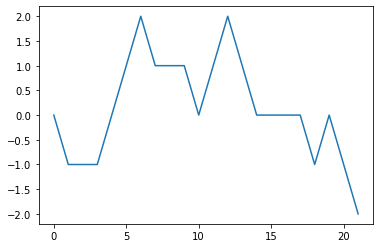

In [14]:
""" Write a function SkewArray(Genome) that takes a DNA string Genome as input and returns
the skew array of Genome in the 
form of a list whose i-th element is Skew[i]. Then add this function to Replication.py."""

# Input:  A String Genome
# Output: The skew array of Genome as a list.
def SkewArray(Genome):
    skew=[0]
    count=0
    # your code here
    for i in str(Genome):        
        if i =='C':
            count-=1
            skew.append(int(count))            
        elif i=='G':
            count+=1
            skew.append(int(count))       
        else:
            skew.append(int(count))    
    return skew

print(SkewArray("CATGGGCATCGGCCATACGCC"))
import matplotlib.pyplot as plt
plt.plot(SkewArray("CATGGGCATCGGCCATACGCC"))
plt.show()

In [17]:
"""We have just developed an insight for a new algorithm for locating ori: it should be found 
where the skew array attains a minimum.

Minimum Skew Problem:  Find a position in a genome where the skew diagram attains a minimum.
    Input: A DNA string Genome.
    Output: All integer(s) i minimizing Skew[i] among all values of i (from 0 to len(Genome))."""
# Input:  A DNA string Genome
# Output: A list containing all integers i minimizing Skew(Prefix_i(Text)) over all values of i (from 0 to |Genome|)
def MinimumSkew(Genome):
    positions = [] # output variable
    sk=SkewArray(Genome)
    min_index=[i for i,val in enumerate(sk) if val==min(sk)]
    print(' '.join(str(x) for x in min_index))
    # your code here
    return  min_index

# Input:  A String Genome
# Output: SkewArray(Genome)
# HINT:   This code should be taken from the last Code Challenge.
def SkewArray(Genome):
    skew = {} # output variable
    skew=[0]
    count=0
    # your code here
    for i in Genome:
        if i=='C':
            count-=1
            skew.append(count)
        elif i=='G':
            count+=1
            skew.append(count)
        else:
            skew.append(count)
    return skew

s=SkewArray("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT")
m=MinimumSkew("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT")
print("Skew array is : " , s)
print("indices of minimum value are/is : " , m)

11 24
Skew array is :  [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 4, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 8, 8, 7, 6, 7, 7, 7]
indices of minimum value are/is :  [11, 24]


In [19]:
"""Hamming Distance Problem:  Compute the Hamming distance between two strings.
 Input: Two strings of equal length.
  Output: The Hamming distance between these strings.

Code Challenge (2 points): Write a function HammingDistance solving the Hamming Distance Problem.
Then add this function to Replication.py."""
# Input:  Two strings p and q
# Output: An integer value representing the Hamming Distance between p and q.
def HammingDistance(p, q):
    count=0
    # your code here
    for i in range(len(p)):
        if p[i]!=q[i]:
            count+=1
    return count

p="GGGCCGTTGGT"
q="GGACCGTTGAC"
HammingDistance(p, q)

3

In [23]:

"""We say that a k-mer Pattern appears as a substring of Text with at most d mismatches if
there is some k-mer substring Pattern' of Text having d or fewer mismatches with Pattern; that is,
HammingDistance(Pattern, Pattern') ≤ d. Our observation that a DnaA box may appear with
slight variations leads to the following generalization of the Pattern Matching Problem."""
"""Approximate Pattern Matching Problem:  Find all approximate occurrences of a pattern
in a string.
 Input: Strings Pattern and Text along with an integer d.
 Output: All starting positions where Pattern appears as a substring 
 of Text with at most d mismatches.

Code Challenge (3 points): Write a function ApproximatePatternMatching
to solve the Approximate Pattern Matching Problem. (Make sure to use HammingDistance
as a subroutine!)"""

# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches
def ApproximatePatternMatching(Text, Pattern, d):
    positions = [] # initializing list of positions
    count = 0
    # your code here
    
    
    for i in range(len(Text)-len(Pattern)+1):
        if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d :
            positions.append(i)
        
        #if Text[i:i+len(Pattern)] == Pattern:
            #count = count+1
    
    return positions


# Insert your Hamming distance function on the following line.
def HammingDistance(p, q):
    count=0
    # your code here
    for i in range(len(p)):
        if p[i]!=q[i]:
            count+=1
    return count

Text="CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
Pattern="ATTCTGGA"
d=3

ApproximatePatternMatching(Text, Pattern, d)

[6, 7, 26, 27]

In [29]:
"""Our goal now is to modify our previous algorithm for the Frequent Words 
Problem in order to find DnaA boxes by identifying frequent k-mers, possibly with mismatches.
Given input strings Text and Pattern as well as an integer d, we extend the definition of
PatternCount to the function ApproximatePatternCount(Pattern, Text, d). This function computes
the number of occurrences of Pattern in Text with at most d mismatches. For example,

ApproximatePatternCount(AAAAA, AACAAGCATAAACATTAAAGAG, 1) = 4"""

"""Code Challenge (3 points): Implement the ApproximatePatternCount function in Python. 
(Hint: you will only need to make a slight change to your existing code to write this function.)"""

# Input:  Strings Pattern and Text, and an integer d
# Output: The number of times Pattern appears in Text with at most d mismatches
def ApproximatePatternCount(Pattern, Text, d):
    count = 0 # initialize count variable
    
    for i in range(len(Text)-len(Pattern)+1):
        if(HammingDistance(Text[i:i+len(Pattern)], Pattern)<=d):
            count+=1
               
    return count


# Insert your HammingDistance function on the following line.
def HammingDistance(p, q):
    count=0
    for i in range(len(p)):        
        if p[i]!=q[i]:
            count+=1
    return count
    

pattern="GAGG"
text="TTTAGAGCCTTCAGAGG"
d=2
print(ApproximatePatternCount(pattern,text,d))

4


#  even though computational analysis can be powerful, bioinformaticians should collaborate with biologists to verify their predictions. 

https://rob-bell.net/2009/06/a-beginners-guide-to-big-o-notation

In [33]:
# maximim skew
"""We have just developed an insight for a new algorithm for locating ori: it should be found 
where the skew array attains a minimum.

Minimum Skew Problem:  Find a position in a genome where the skew diagram attains a minimum.
    Input: A DNA string Genome.
    Output: All integer(s) i minimizing Skew[i] among all values of i (from 0 to len(Genome))."""
# Input:  A DNA string Genome
# Output: A list containing all integers i minimizing Skew(Prefix_i(Text)) over all values of i (from 0 to |Genome|)
def MinimumSkew(Genome):
    positions = [] # output variable
    sk=SkewArray(Genome)
    min_index=[i for i,val in enumerate(sk) if val==max(sk)]
    print(' '.join(str(x) for x in min_index))
    # your code here
    return  min_index

# Input:  A String Genome
# Output: SkewArray(Genome)
# HINT:   This code should be taken from the last Code Challenge.
def SkewArray(Genome):
    skew = {} # output variable
    skew=[0]
    count=0
    # your code here
    for i in Genome:
        if i=='C':
            count-=1
            skew.append(count)
        elif i=='G':
            count+=1
            skew.append(count)
        else:
            skew.append(count)
    return skew

s=SkewArray("GATACACTTCCCGAGTAGGTACTG")
m=MinimumSkew("GATACACTTCCCGAGTAGGTACTG")
print("Skew array is : " , s)
print("indices of MAX value are/is : " , m)

1 2 3 4
Skew array is :  [0, 1, 1, 1, 1, 0, 0, -1, -1, -1, -2, -3, -4, -3, -3, -2, -2, -2, -1, 0, 0, 0, -1, -1, 0]
indices of minimum value are/is :  [1, 2, 3, 4]


In [35]:
"""Question 
Compute the Hamming distance between "CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT" and

"CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG"."""

def HammingDistance(p, q):
    count=0
    # your code here
    for i in range(len(p)):
        if p[i]!=q[i]:
            count+=1
    return count

p="CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT"
q="CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG"
HammingDistance(p, q)



36